## Introducción a Regresión Lineal
### Parte 1: Modelos Lineales Simples

Un modelo lineal simple consiste en una relación funcional entre dos variables reales $x$ y $y$ que tiene la forma:

$$y=f(x)=\beta_1x+\beta_0,$$

en donde $\beta_1$ se conoce como la **pendiente** y $\beta_0$ como el **intercepto** del modelo.

La célula siguiente permite explorar visualmente dicha relación en rangos diferentes para cada variable, y las anotaciones en la gráfica enfatizan la característica más importante de este tipo de modelos: el aumento en la variable $y$, $\Delta y$ relativo a una unidad de aumento en la varible $x$, $\Delta x$, siempre es el mismo, o bien, la derivada de $y$ respecto de $x$ siempre es constante.

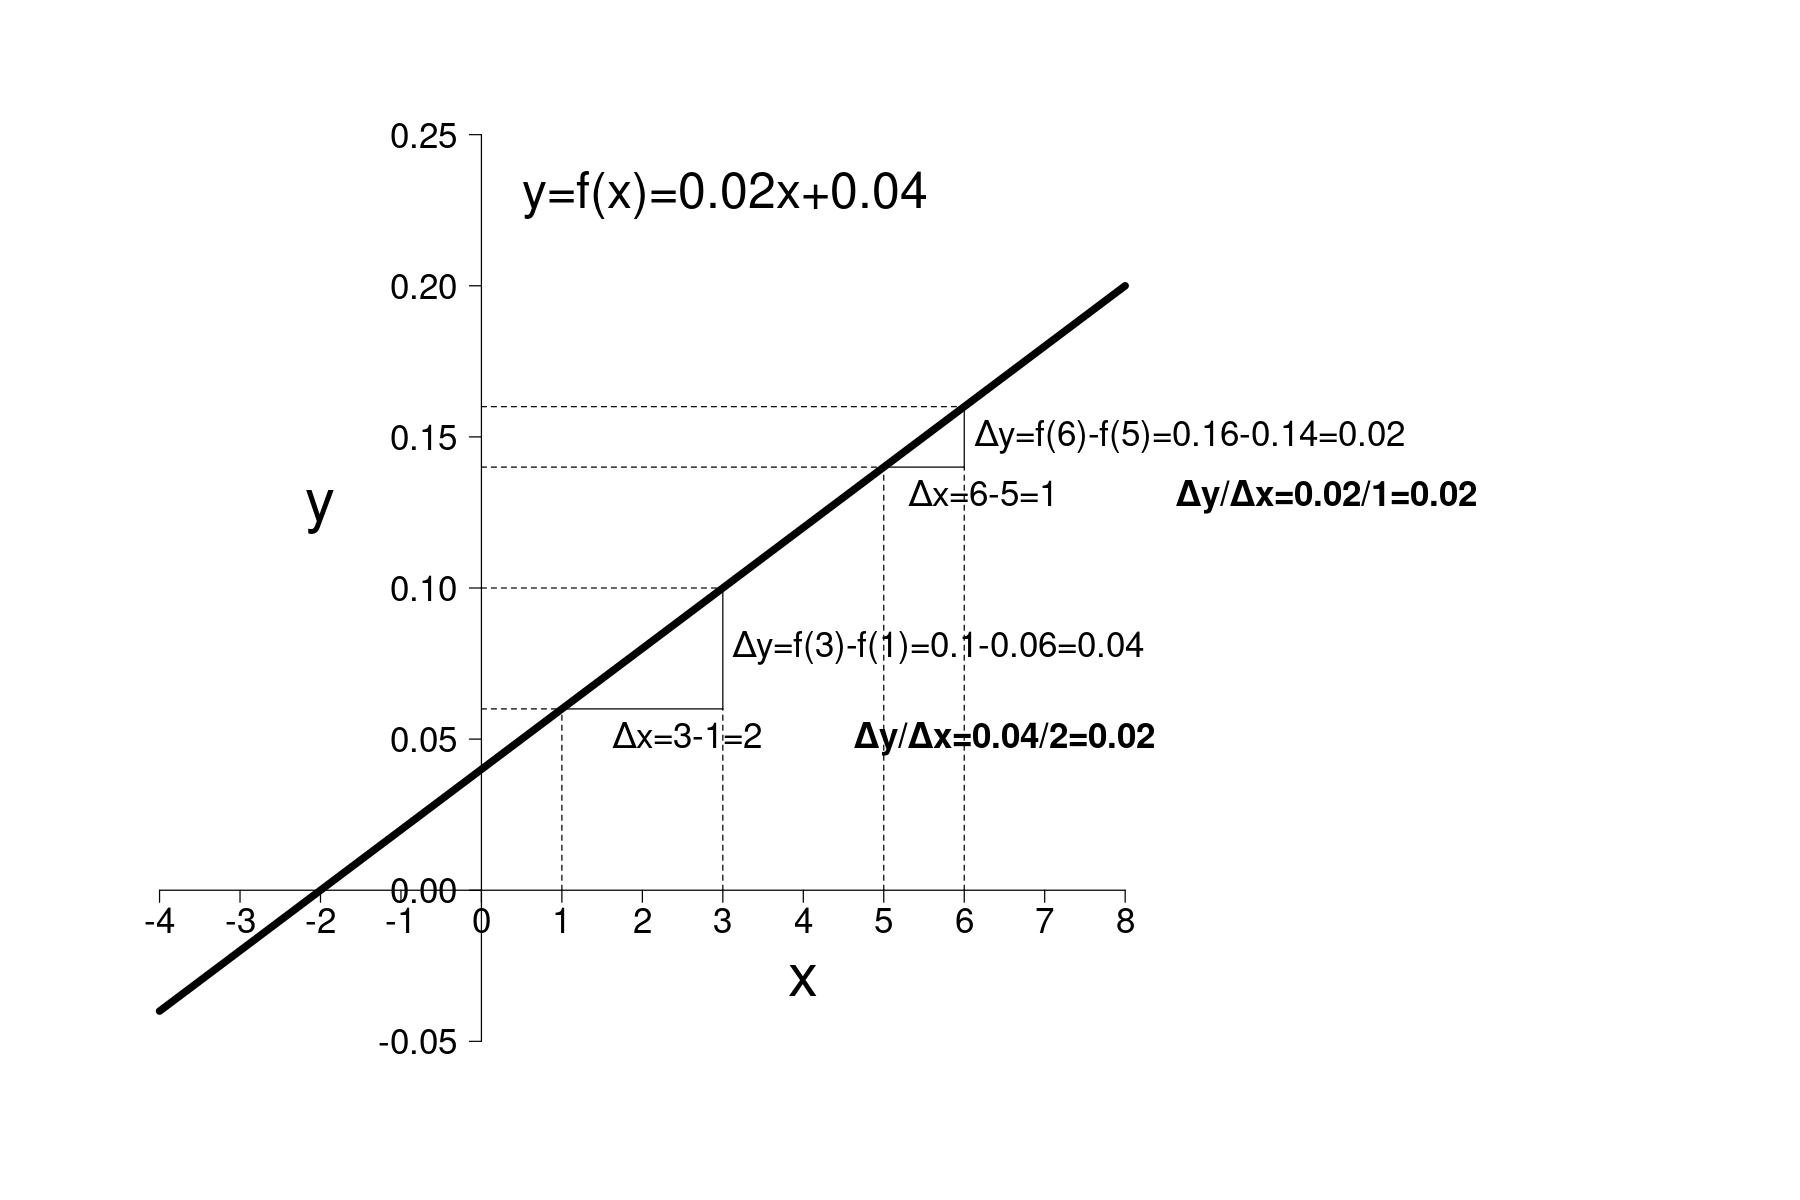

In [78]:
rm(list=ls())
x <- seq(-4,8,length.out = 20)
slope <- 0.02
intercept <- 0.04
f_x <- function(x){
    return(x*slope+intercept)
}
y <- f_x(x)

options(repr.plot.width = 15, repr.plot.height = 10) # Plot size in notebook
plot(NULL,xlim=c(-4,15),ylim=c(-0.05,0.25),axes=F,ann=F)
axis(1,pos=0,cex.axis=1.75,at=-4:8)
axis(2,pos=0,las=2,cex.axis=1.75)
text(4,-0.03,'x',cex=3)
text(-2,0.125,'y',cex=3)
segments(x0=c(1,3,5,6),x1=c(3,3,6,6),
        y0=c(f_x(1),f_x(1),f_x(5),f_x(5)),
        y1=c(f_x(1),f_x(3),f_x(5),f_x(6)))
segments(x0=c(1,3,5,6),x1=c(1,3,5,6),
        y0=rep(0,4),y1=c(f_x(1),f_x(1),f_x(5),f_x(5)),
        lty='dashed')
segments(x0=rep(0,4),c(1,3,5,6),
        y0=c(f_x(1),f_x(3),f_x(5),f_x(6)),y1=c(f_x(1),f_x(3),f_x(5),f_x(6)),
         lty='dashed')
text(2,f_x(1),'\u0394x=3-1=2',cex=1.75,adj=c(0.2,1.5))
text(5,f_x(1),paste('\u0394y/\u0394x=',f_x(3)-f_x(1),'/','2=',slope,sep=''),cex=1.75,adj=c(0.1,1.5),font=2)
text(3,f_x(2),paste('\u0394y=f(3)-f(1)=',f_x(3),'-',f_x(1),'=',f_x(3)-f_x(1),sep=''),cex=1.75,adj=-0.025)
text(5.5,f_x(5),'\u0394x=6-5=1',cex=1.75,adj=c(0.1,1.5))
text(9,f_x(5),paste('\u0394y/\u0394x=',f_x(6)-f_x(5),'/','1=',slope,sep=''),cex=1.75,adj=c(0.1,1.5),font=2)
text(6,f_x(5.5),paste('\u0394y=f(6)-f(5)=',f_x(6),'-',f_x(5),'=',f_x(6)-f_x(5),sep=''),cex=1.75,adj=-0.025)
text(0.5,0.23,paste('y=f(x)=',slope,'x+',intercept,sep=''),cex=2.5,adj=0)
# Model
lines(x,y,lwd=6)

Los modelos lineales son una herramienta comúnmente empleada para intentar explicar la relación entre conjuntos de observaciones que parecen mostrar una relación sistemática (y lineal) "oculta" o "enmascarada" por ruido aleatorio. En el escenario más simple trabajamos únicamente con dos variables, $x$ y $y$, aunque estos modelos pueden extenderse para incluir varias variables independientes y dependientes al mismo tiempo.

Los supuestos centrales en la mayoría de dichos modelos probabilísticos, y en concreto del **Modelo de Regresión Lineal Simple**, son 1) que existe una relación lineal entre $x$ y **la media** de $y$, y 2) que la dispersión de las observaciones $y_i$ respecto de dicho modelo lineal puede ser descrita por una densidad Normal con dispersión constante respecto de $x$.

### Parte 2: Simulación

A continuación simulamos observaciones aleatorias desde un modelo con estas características, tanto para estudiar visualmente su comportamiento, como para mostrar cómo implementar el modelo en `JAGS` en un ejercicio de recuperación paramétrica.

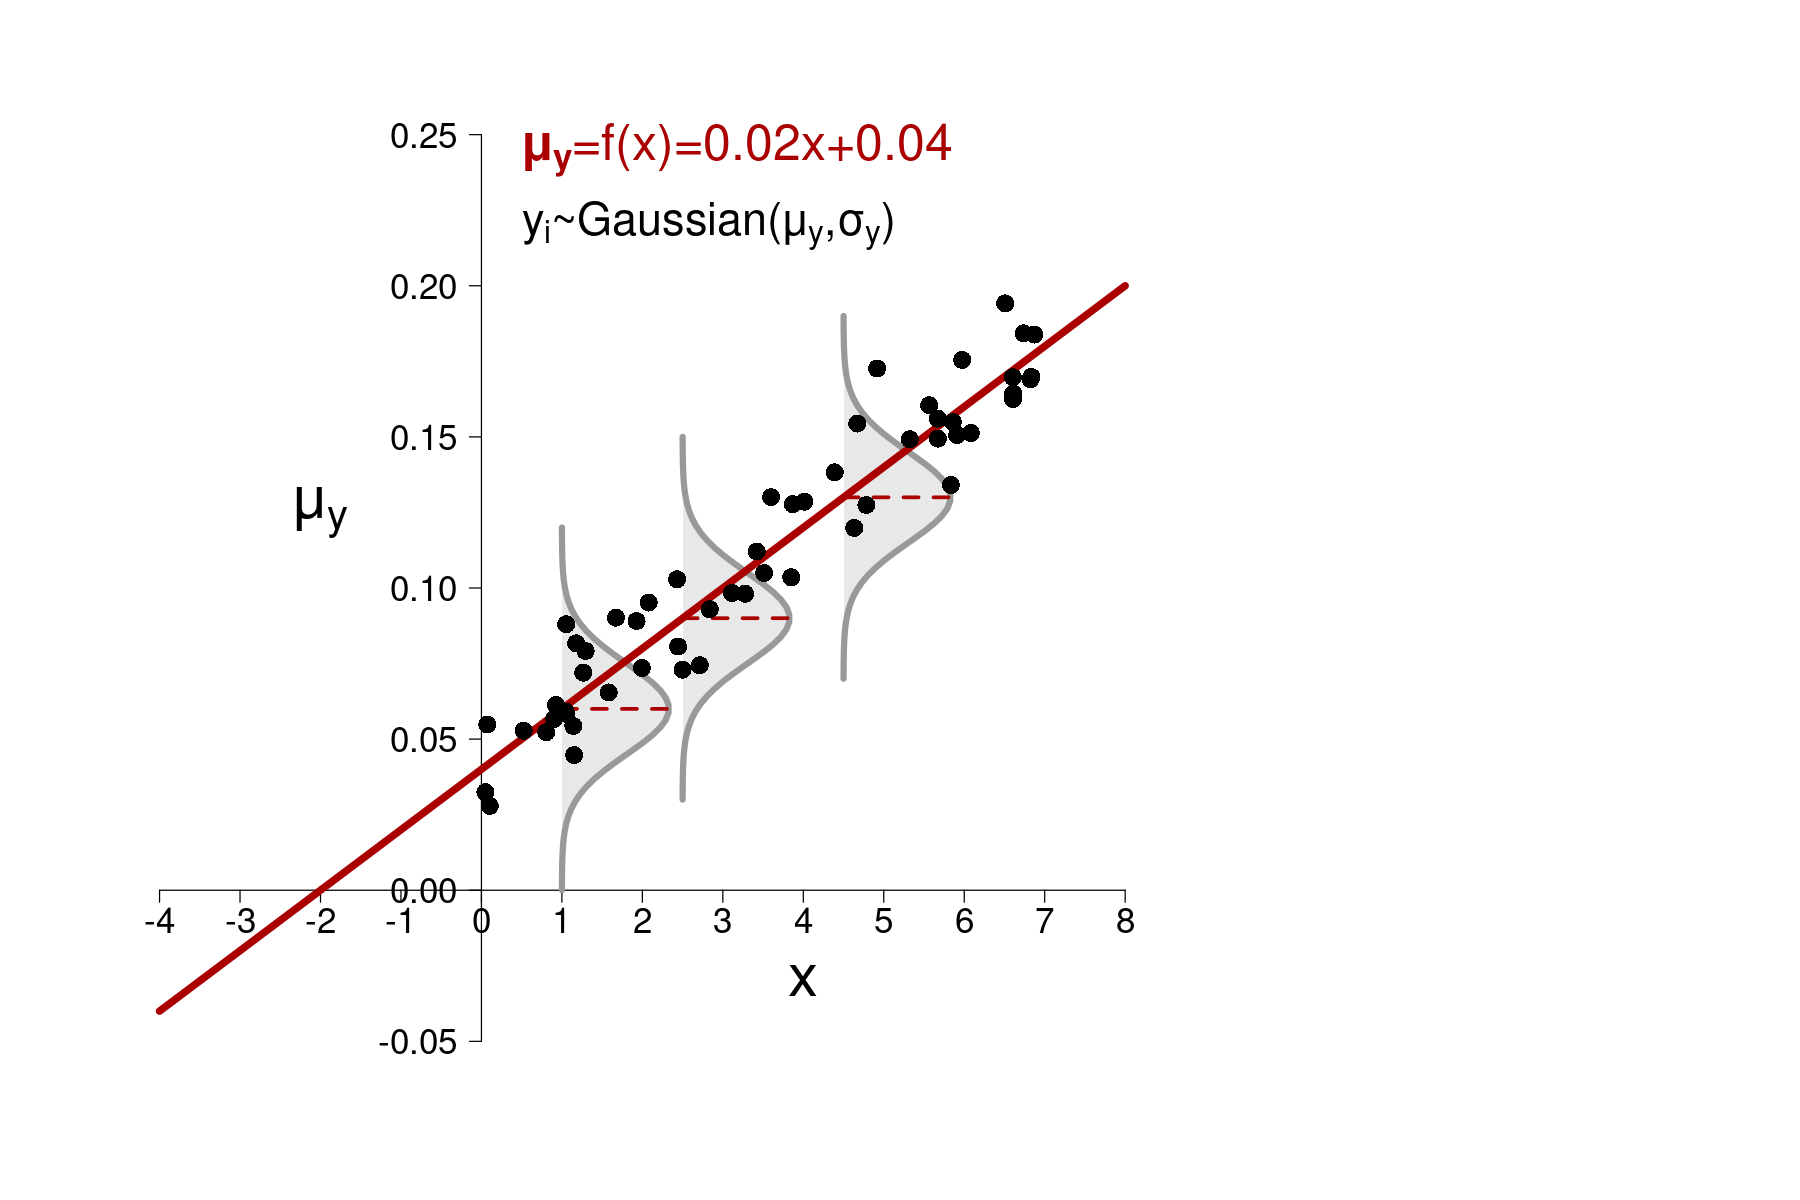

In [79]:
# Simulation
n_simul <- 55 # Number of data pairs to simulate
sd_y <- 0.015 # True STANDARD DEVIATION of Y
slope <- 0.02 # True SLOPE
intercept <- 0.04 # True INTERCEPT
f_x <- function(x){ # True relation between X and Mu_Y
    return(x*slope+intercept)
}
x <- seq(-4,8,length.out = 20)
mu_y <- f_x(x) 
set.seed(2) # Fixes 'random' replication
x_simul <- runif(n=n_simul,min = 0,max=7) # Simulating X values
y_simul <- rnorm(n=n_simul,mean=f_x(x_simul),sd=sd_y) # Simulating Y values

# Plotting
options(repr.plot.width = 15, repr.plot.height = 10) # Plot size in notebook
# Canvas
plot(NULL,xlim=c(-4,15),ylim=c(-0.05,0.25),axes=F,ann=F)
# Add axes and axes labels
axis(1,pos=0,cex.axis=1.75,at=-4:8)
axis(2,pos=0,las=2,cex.axis=1.75)
text(4,-0.03,'x',cex=3)
text(-2,0.125,expression('\u03bc'[y]),cex=3)
# Add normal curves
for(x_i in c(1,2.5,4.5)){
    y_range <- f_x(x_i)+c(-0.06,0.06)
    y_plot <- seq(y_range[1],y_range[2],length.out = 50)
    y_dens <- dnorm(y_plot,mean=f_x(x_i),sd=sd_y)*0.05+x_i
    polygon(x = c(head(y_dens,1),y_dens,tail(y_dens,1)),
           y=c(x_i,y_plot,x_i),
           col='#cccccc74',border=NA)
    lines(y_dens,y_plot,lwd=5,col='#999999')
    lines(x=c(x_i,x_i+dnorm(f_x(x_i),mean=f_x(x_i),sd=sd_y)*0.05),
         y=rep(f_x(x_i),2),lwd=3,lty='dashed',col='#aa0000')
}
# Add model line
lines(x,mu_y,lwd=6,col='#aa0000')
# Add simulated data
points(x_simul,y_simul,pch=16,cex=2)
# Add model equations
text(0.5,0.245,bquote(paste(bold('\u03BC'[y]),'=f(x)=',.(slope),'x+',.(intercept))),cex=2.5,adj=0,col='#aa0000')
text(0.5,0.22,bquote(paste('y'['i'],'~Gaussian(','\u03BC'[y],',\u03c3'[y],')')),cex=2.25,adj=0)


### Parte 3: Inferencia y Recuperación de Parámetros

En las células siguientes implementamos el modelo en `JAGS` y graficamos los resultados del algortimo. Noten que lo único a lo que `JAGS` tiene acceso son los pares de observaciones $(x_i,y_i)$, pero no conoce los valores verdaderos de la **pendiente**, ni del **intercepto**, ni de la **dispersión** de $y_i$ que generaron las observaciones. En cambio, el algoritmo sólo conoce cierta incertidumbre inicial sobre dichos parámetros, que haremos explícita en el ejemplo siguiente:

$$\beta_1\sim Gaussian(\mu=0, \sigma=1/\sqrt{1000})$$ 

$$\beta_0\sim Gaussian(\mu=0, \sigma=1/\sqrt{1000})$$ 

$$\sigma_y\sim Uniform(0, 0.20)$$

$$\mu_{y_{i}}|\beta_1, \beta_0,x_i\leftarrow \beta_1 x_i+\beta_0$$

$$y_{i}|\mu_{y{i}}, \sigma_y\sim Gaussian(\mu_{y_{i}}, \sigma_y),$$

en donde $y_i$ y $x_i$ son las únicas variables observadas.

In [80]:
# Model
write('model{

slope_post~dnorm(0,1000) # T(,0.01) # Remember Gaussian dispersion scales PRECISION
slope_prior~dnorm(0,1000) # T(,0.01) # Aguas con las restricciones!
intercept_post~dnorm(0,1000)
intercept_prior~dnorm(0,1000)
sd_y_post~dunif(0,0.20)
sd_y_prior~dunif(0,0.20)
tau_y_post <- 1/sd_y_post^2
tau_y_prior <- 1/sd_y_prior^2
for(i in 1:n_obs){
    mu_y_post[i] <- x_simul[i]*slope_post+intercept_post
    mu_y_prior[i] <- x_simul[i]*slope_prior+intercept_prior
    y_simul[i]~dnorm(mu_y_post[i],tau_y_post)
    y_pred_post[i]~dnorm(mu_y_post[i],tau_y_post)
    y_pred_prior[i]~dnorm(mu_y_prior[i],tau_y_prior)
}

}','simple_linear_regression.bug')

# Observed
n_obs <- length(x_simul)
data_jags <- list('x_simul','y_simul','n_obs') # 'x_simul' and 'y_simul' were "filled" in previous cell

# Unobserved
unobs <- c('slope_post','slope_prior',
          'intercept_post','intercept_prior',
          'sd_y_post','sd_y_prior',
          'mu_y_post','mu_y_prior',
          'y_pred_post','y_pred_prior')

# Inference
library('R2jags')
bayes <- jags(data=data_jags,
             parameters.to.save=unobs,
             model.file='simple_linear_regression.bug',
             n.iter=30000,
             n.burnin=6000,
             n.thin=3)
nds <- bayes$BUGSoutput$sims.list

Compiling model graph
   Resolving undeclared variables
   Allocating nodes
Graph information:
   Observed stochastic nodes: 55
   Unobserved stochastic nodes: 116
   Total graph size: 456

Initializing model



In [81]:
# Examine 'bayes': emphasize the number of unobserved against the number of observed.
#bayes

### Plotting Model Results

#### Posterior Predictive

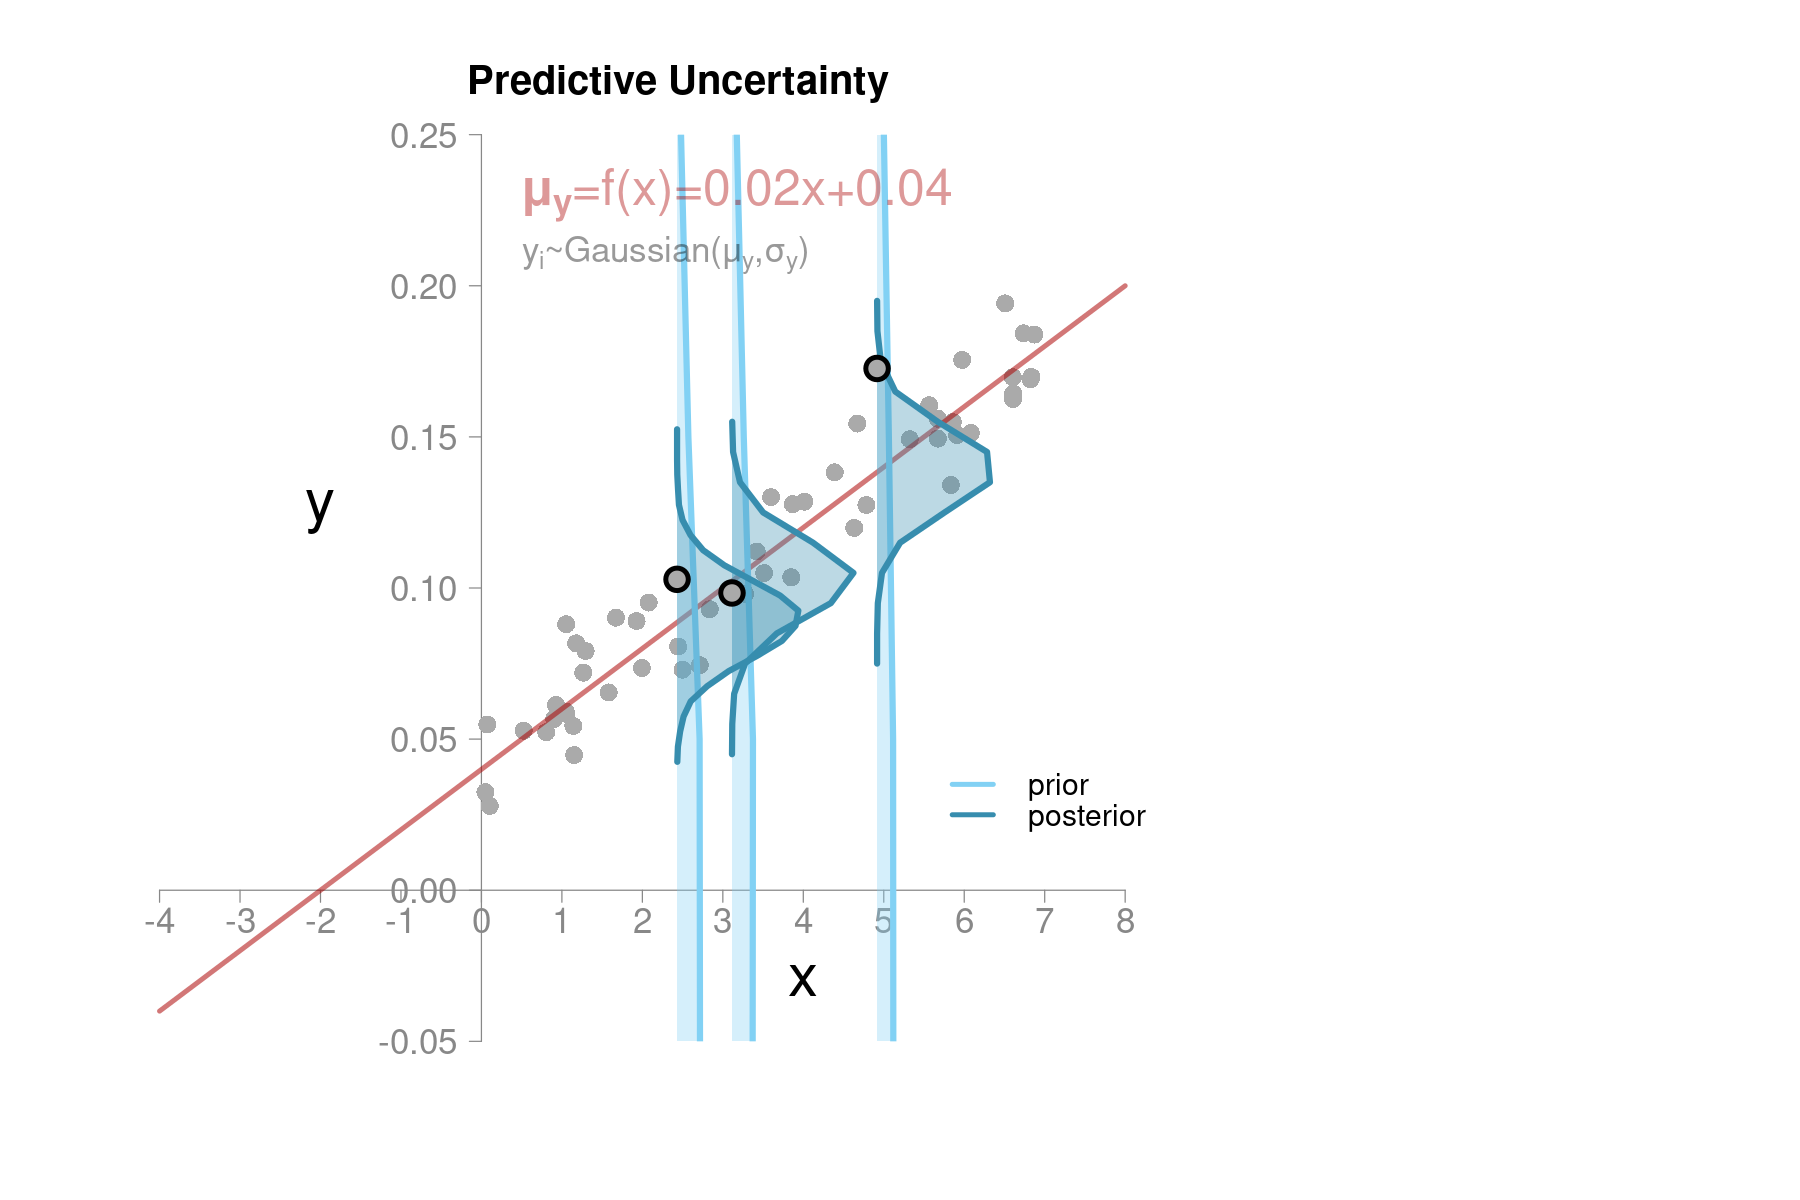

In [82]:
# POSTERIOR PREDICTIVE (pt.1)

# Colors (to be used in all graphs)
col_prior <- '#82d1f4' 
col_post <- '#378dae'
col_axis <- '#710c9e'

# Canvas
options(repr.plot.width = 15, repr.plot.height = 10) # Plot size in notebook
plot(NULL,xlim=c(-4,15),ylim=c(-0.05,0.25),axes=F,ann=F)
axis(1,pos=0,cex.axis=1.75,at=-4:8,col='#888888',col.axis='#888888')
axis(2,pos=0,las=2,cex.axis=1.75,col='#888888',col.axis='#888888')
text(4,-0.03,'x',cex=3)
text(-2,0.125,'y',cex=3)

# Data
points(x_simul,y_simul,pch=16,cex=2,col='#AAAAAA')
lines(x,y,lwd=4,col='#aa000088')

# Selected observations
index <- c(2,19,25)
#index <- 1:length(x_simul)
clip(-10,10,-.05,.25)
for(i in index){
    # Extracting data from JAGS
    ht_y_pred_prior <- hist(nds$y_pred_prior[,i],plot=F)
    ht_y_pred_post <- hist(nds$y_pred_post[,i],plot=F)
    # Rescaling and positioning with respect to X
    y_plot_post <- ht_y_pred_post$mids
    y_dens_post <- ht_y_pred_post$density*0.05+x_simul[i]
    y_plot_prior <- ht_y_pred_prior$mids
    y_dens_prior <- ht_y_pred_prior$density*0.1+x_simul[i]
    # Plotting Prior over Mu_Y[i]
    polygon(x = c(head(y_dens_prior,1),y_dens_prior,tail(y_dens_prior,1)),
           y=c(x_simul[i],y_plot_prior,x_simul[i]),
           col=paste(col_prior,'55',sep=''),border=NA)
    lines(y_dens_prior,y_plot_prior,lwd=5,col=col_prior)
    # Plotting Posterior over Mu_Y[i]
    polygon(x = c(head(y_dens_post,1),y_dens_post,tail(y_dens_post,1)),
           y=c(x_simul[i],y_plot_post,x_simul[i]),
           col=paste(col_post,'55',sep=''),border=NA)
    lines(y_dens_post,y_plot_post,lwd=5,col=col_post)
}
# Add corresponding simulated observations
points(x_simul[index],y_simul[index],lwd=4,cex=2.5,pch=21,bg='#aaaaaa')

# Model
text(0.5,0.23,bquote(paste(bold('\u03BC'[y]),'=f(x)=',.(slope),'x+',.(intercept))),cex=2.5,adj=0,col='#aa000066')
text(0.5,0.21,bquote(paste('y'['i'],'~Gaussian(','\u03BC'[y],',\u03c3'[y],')')),cex=1.75,adj=0,col='#00000066')

# Legend
legend(5,0.03,yjust=0.5,
      legend=c('prior','posterior'),
      col=c(col_prior,col_post),
       seg.len=0.6,
       cex=1.5,
       x.intersp=0.5,
       y.intersp=0.5,
       box.lty='blank',
       bg=NA,
      lwd=4)

# Main title
mtext('Predictive Uncertainty',3,cex=2,adj=0.3,font=2)

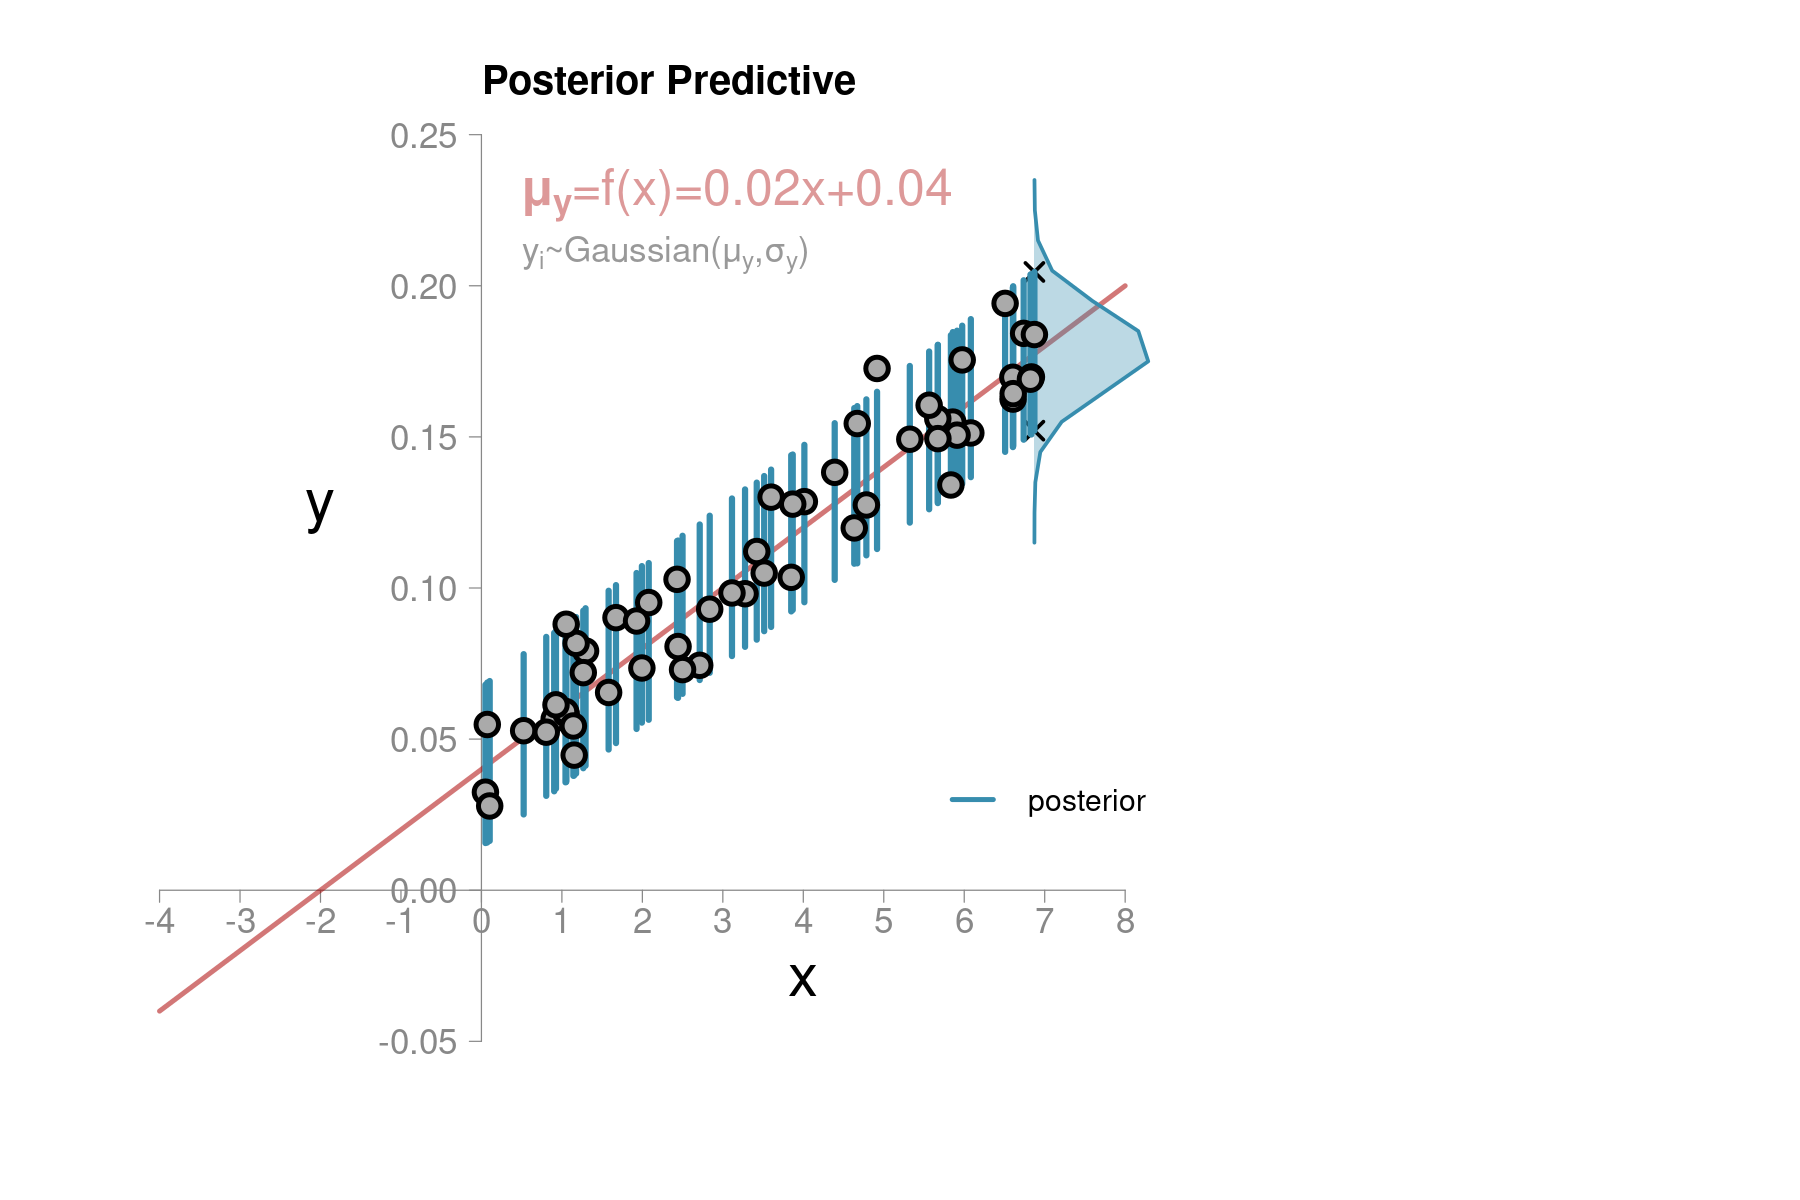

In [83]:
# POSTERIOR PREDICTIVE (pt.2, full)

# Canvas
options(repr.plot.width = 15, repr.plot.height = 10) # Plot size in notebook
plot(NULL,xlim=c(-4,15),ylim=c(-0.05,0.25),axes=F,ann=F)
axis(1,pos=0,cex.axis=1.75,at=-4:8,col='#888888',col.axis='#888888')
axis(2,pos=0,las=2,cex.axis=1.75,col='#888888',col.axis='#888888')
text(4,-0.03,'x',cex=3)
text(-2,0.125,'y',cex=3)

# True Model
lines(x,y,lwd=4,col='#aa000088')

# Add example observation
i <- which.max(x_simul)
# Extracting data from JAGS
ht_y_pred_post <- hist(nds$y_pred_post[,i],plot=F)
# Rescaling and positioning with respect to X
y_plot_post <- ht_y_pred_post$mids
y_dens_post <- ht_y_pred_post$density*0.05+x_simul[i]
# Plotting Posterior over Mu_Y[i]
polygon(x = c(head(y_dens_post,1),y_dens_post,tail(y_dens_post,1)),
        y=c(x_simul[i],y_plot_post,x_simul[i]),
        col=paste(col_post,'55',sep=''),border=NA)
lines(y_dens_post,y_plot_post,lwd=3,col=col_post)
# Find the values of Mu_Y[i] where the Posterior accumulates 2.5% and 97.5%...
y_range <- quantile(nds$y_pred_post[,i],prob=c(0.025,0.975))
# ...and plot them
points(rep(x_simul[i],2),y_range,lwd=3,cex=2,pch=4)

# Selected observations
index <- 1:length(x_simul)
for(i in index){
    # Find the values of Mu_Y[i] where the Posterior accumulates 2.5% and 97.5%...
    y_range <- quantile(nds$y_pred_post[,i],prob=c(0.025,0.975))
    # ...and plot them
    lines(rep(x_simul[i],2),y_range,lwd=5,col=col_post)
}

# Data
points(x_simul,y_simul,lwd=4,cex=2.5,pch=21,bg='#aaaaaa')

# Model labels
text(0.5,0.23,bquote(paste(bold('\u03BC'[y]),'=f(x)=',.(slope),'x+',.(intercept))),cex=2.5,adj=0,col='#aa000066')
text(0.5,0.21,bquote(paste('y'['i'],'~Gaussian(','\u03BC'[y],',\u03c3'[y],')')),cex=1.75,adj=0,col='#00000066')

# Legend
legend(5,0.03,yjust=0.5,
      legend=c('posterior'),
      col=c(col_post),
       seg.len=0.6,
       cex=1.5,
       x.intersp=0.5,
       y.intersp=0.5,
       box.lty='blank',
       bg=NA,
      lwd=4)

# Main title
mtext('Posterior Predictive',3,cex=2,adj=0.3,font=2)

#### Uncertainty over Slope and Intercept

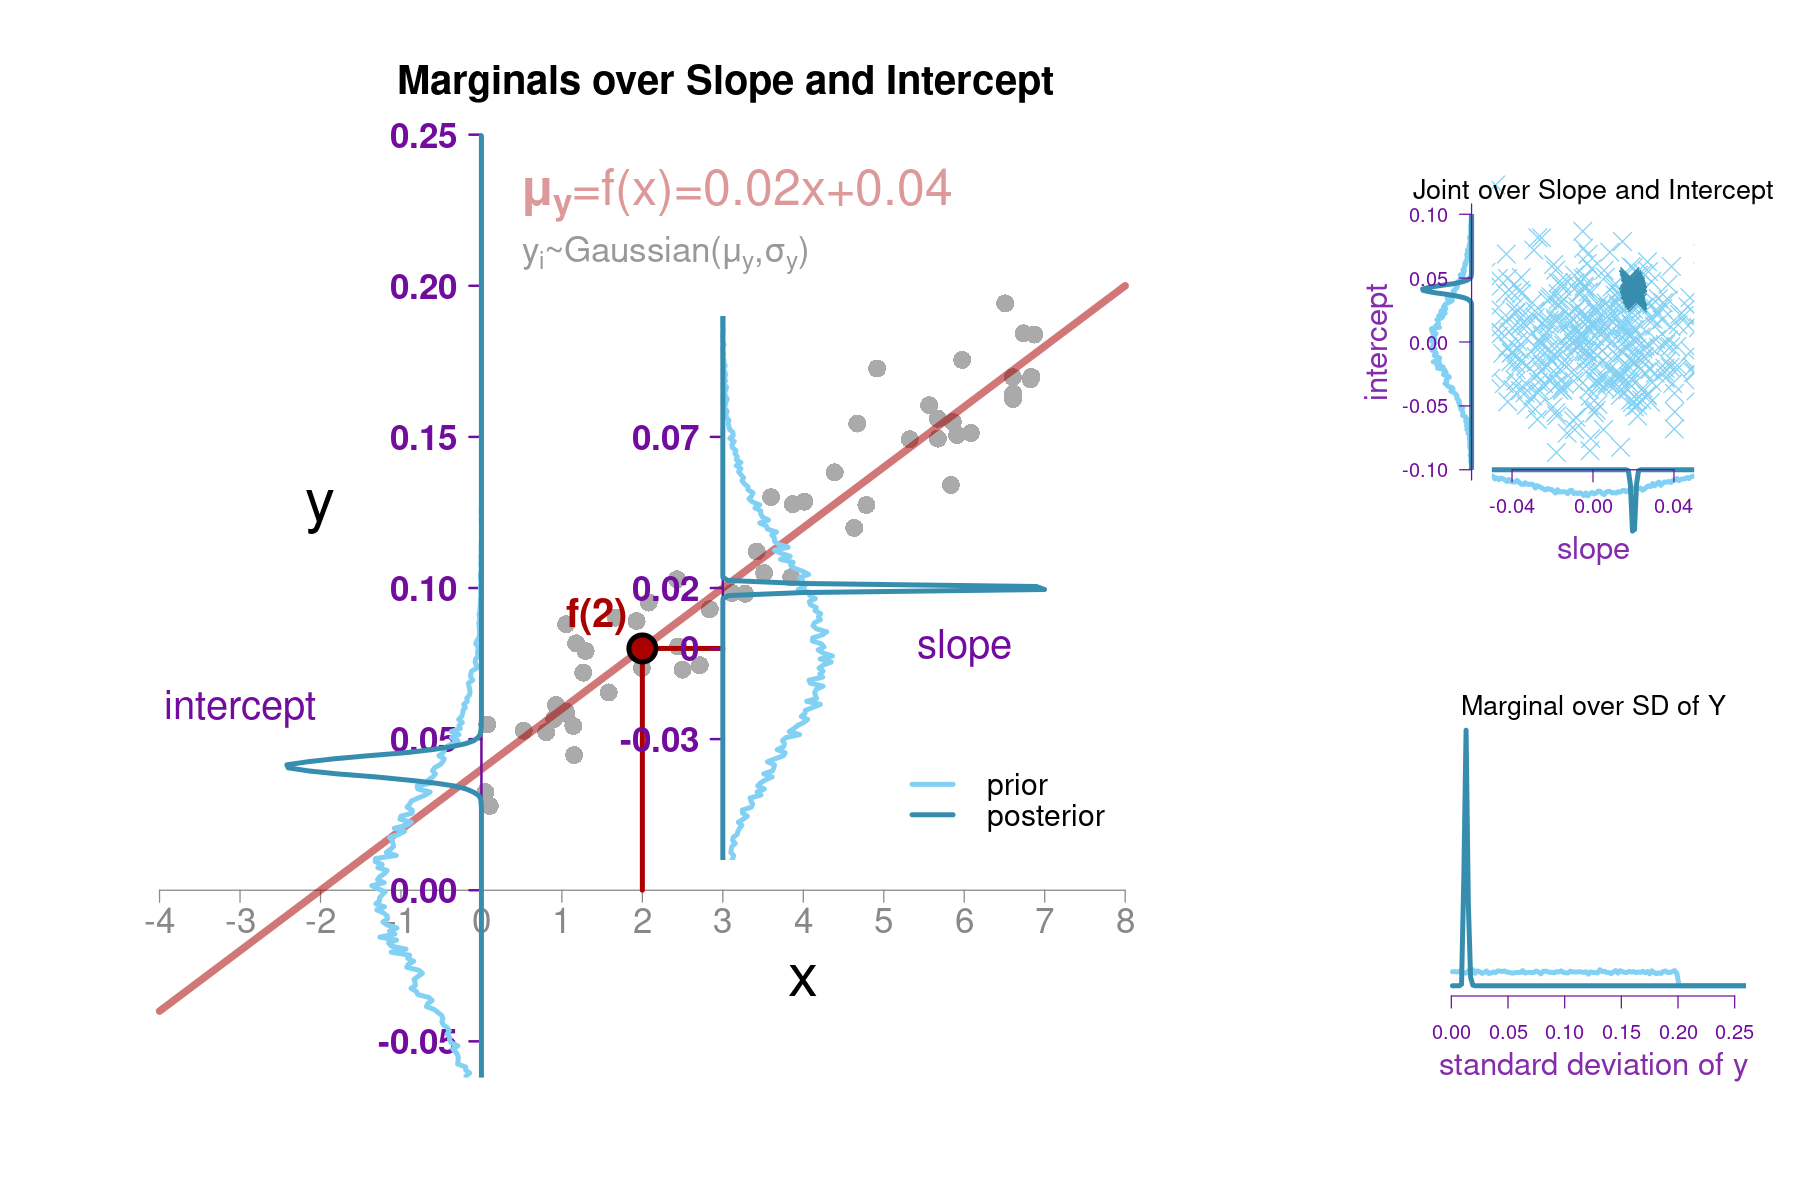

In [114]:
# Uncertainty over SLOPE, INTERCEPT, and DISPERSION of Y

# Information about uncertainty from JAGS
hist(nds$intercept_post,breaks=seq(-.25,.25,0.001),plot=F)->ht_int_post
hist(nds$intercept_prior,breaks=seq(-.25,.25,0.001),plot=F)->ht_int_prior
hist(nds$slope_post,breaks=seq(-30,30,0.001),plot=F)->ht_slp_post
hist(nds$slope_prior,breaks=seq(-30,30,0.001),plot=F)->ht_slp_prior

# Canvas
options(repr.plot.width = 15, repr.plot.height = 10) # Plot size in notebook
plot(NULL,xlim=c(-4,15),ylim=c(-0.05,0.25),axes=F,ann=F)
axis(1,pos=0,cex.axis=1.75,at=-4:8,col='#888888',col.axis='#888888')
text(4,-0.03,'x',cex=3)
text(-2,0.125,'y',cex=3)

# Data
points(x_simul,y_simul,pch=16,cex=2,col='#AAAAAA')
# True model
lines(x,y,lwd=6,col='#aa000088')

# Model equations
text(0.5,0.23,bquote(paste(bold('\u03BC'[y]),'=f(x)=',.(slope),'x+',.(intercept))),cex=2.5,adj=0,col='#aa000066')
text(0.5,0.21,bquote(paste('y'['i'],'~Gaussian(','\u03BC'[y],',\u03c3'[y],')')),cex=1.75,adj=0,col='#00000066')

# Plotting uncertainty over INTERCEPT
axis(2,pos=0,las=2,cex.axis=1.75,font=2,lwd=2,col=col_axis,col.axis=col_axis)
lines(ht_int_prior$density*-.1,ht_int_prior$mids,lwd=4,col=col_prior)
lines(ht_int_post$density*-.02,ht_int_post$mids,lwd=4,col=col_post)
text(-3,0.06,'intercept',cex=2,col=col_axis)

# Plotting uncertainty over SLOPE
segments(x0=c(2,2),x1=c(2,3),y0=c(0,f_x(2)),y1=rep(f_x(2),2),lwd=4,lty='solid',col='#aa0000')
points(2,f_x(2),pch=21,cex=3,bg='#aa0000',lwd=4)
text(2,f_x(2),'f(2)',adj=c(1.25,-.75),cex=2,font=2,col='#aa0000')
axis(2,at=c(f_x(2),seq(from=0.05,to=.15,by=.05)),
     labels=c(f_x(2),seq(from=0.05,to=.15,by=.05))-f_x(2),
     pos=3,las=2,cex.axis=1.75,font=2,lwd=2,col=col_axis,col.axis=col_axis)
clip(1,15,.01,.19)
lines(ht_slp_prior$density*.1+3,ht_slp_prior$mids+f_x(2),lwd=4,col=col_prior)
lines(ht_slp_post$density*.01+3,ht_slp_post$mids+f_x(2),lwd=4,col=col_post)
text(6,f_x(2),'slope',cex=2,col=col_axis)

# Legend
legend(4.5,0.03,yjust=0.5,
      legend=c('prior','posterior'),
      col=c(col_prior,col_post),
       seg.len=0.6,
       cex=1.5,
       x.intersp=0.5,
       y.intersp=0.5,
       box.lty='blank',
      lwd=4)

# Main title
mtext('Marginals over Slope and Intercept',3,cex=2,adj=0.3,font=2)

# Plotting joint uncertainty over SLOPE and INTERCEPT
par(plt=c(.8,.97,.6,.83),new=T)
plot(NULL,xlim=c(-0.07,0.07),ylim=c(-0.1,.1),ann=F,axes=F)
index <- sample(1:dim(nds$slope_post)[1],size=400)
clip(-.1,.1,-.1,.1)
lines(-.06-ht_int_prior$density*.0015,ht_int_prior$mids,col=col_prior,lwd=4)
lines(-.06-ht_int_post$density*.0002,ht_int_post$mids,col=col_post,lwd=4)
clip(-.05,.05,-1,.20)
lines(ht_slp_prior$mids,-.1-ht_slp_prior$density*0.0015,col=col_prior,lwd=4)
lines(ht_slp_post$mids,-.1-ht_slp_post$density*.00012,col=col_post,lwd=4)
points(nds$slope_prior[index],nds$intercept_prior[index],pch=4,col=col_prior,cex=2)
points(nds$slope_post[index],nds$intercept_post[index],pch=4,col=col_post,cex=2)
axis(1,pos=-0.1,at=seq(-0.04,0.04,0.04),col=col_axis,col.axis=col_axis)
axis(2,pos=-0.06,las=1,at=seq(-.2,.20,0.05),col=col_axis,col.axis=col_axis)
mtext('intercept',2,cex=1.55,col=paste(col_axis,'dd',sep=''),line=2)
mtext('slope',1,cex=1.55,col=paste(col_axis,'dd',sep=''),line=2.5)
mtext('Joint over Slope and Intercept',3,cex=1.35)

# Plotting uncertainty over SD_Y
par(plt=c(.8,.97,.17,.4),new=T)
hist(nds$sd_y_post,breaks=seq(0,1,0.002),plot=F)->ht_sd_post
hist(nds$sd_y_prior,breaks=seq(0,1,0.002),plot=F)->ht_sd_prior
plot(NULL,xlim=c(0,0.25),ylim=c(0,max(max(ht_sd_prior$density),max(ht_sd_post$density))),ann=F,axes=F)
lines(ht_sd_prior$mids,ht_sd_prior$density*3,col=col_prior,lwd=4)
lines(ht_sd_post$mids,ht_sd_post$density,col=col_post,lwd=4)
#abline(v=sd_y,col=col_axis,lwd=5,lty='dotted')
axis(1,col=col_axis,col.axis=col_axis)
mtext('standard deviation of y',1,cex=1.55,col=paste(col_axis,'dd',sep=''),line=2.5)
mtext('Marginal over SD of Y',3,cex=1.35)

#### Uncertainty over $\mu_y$

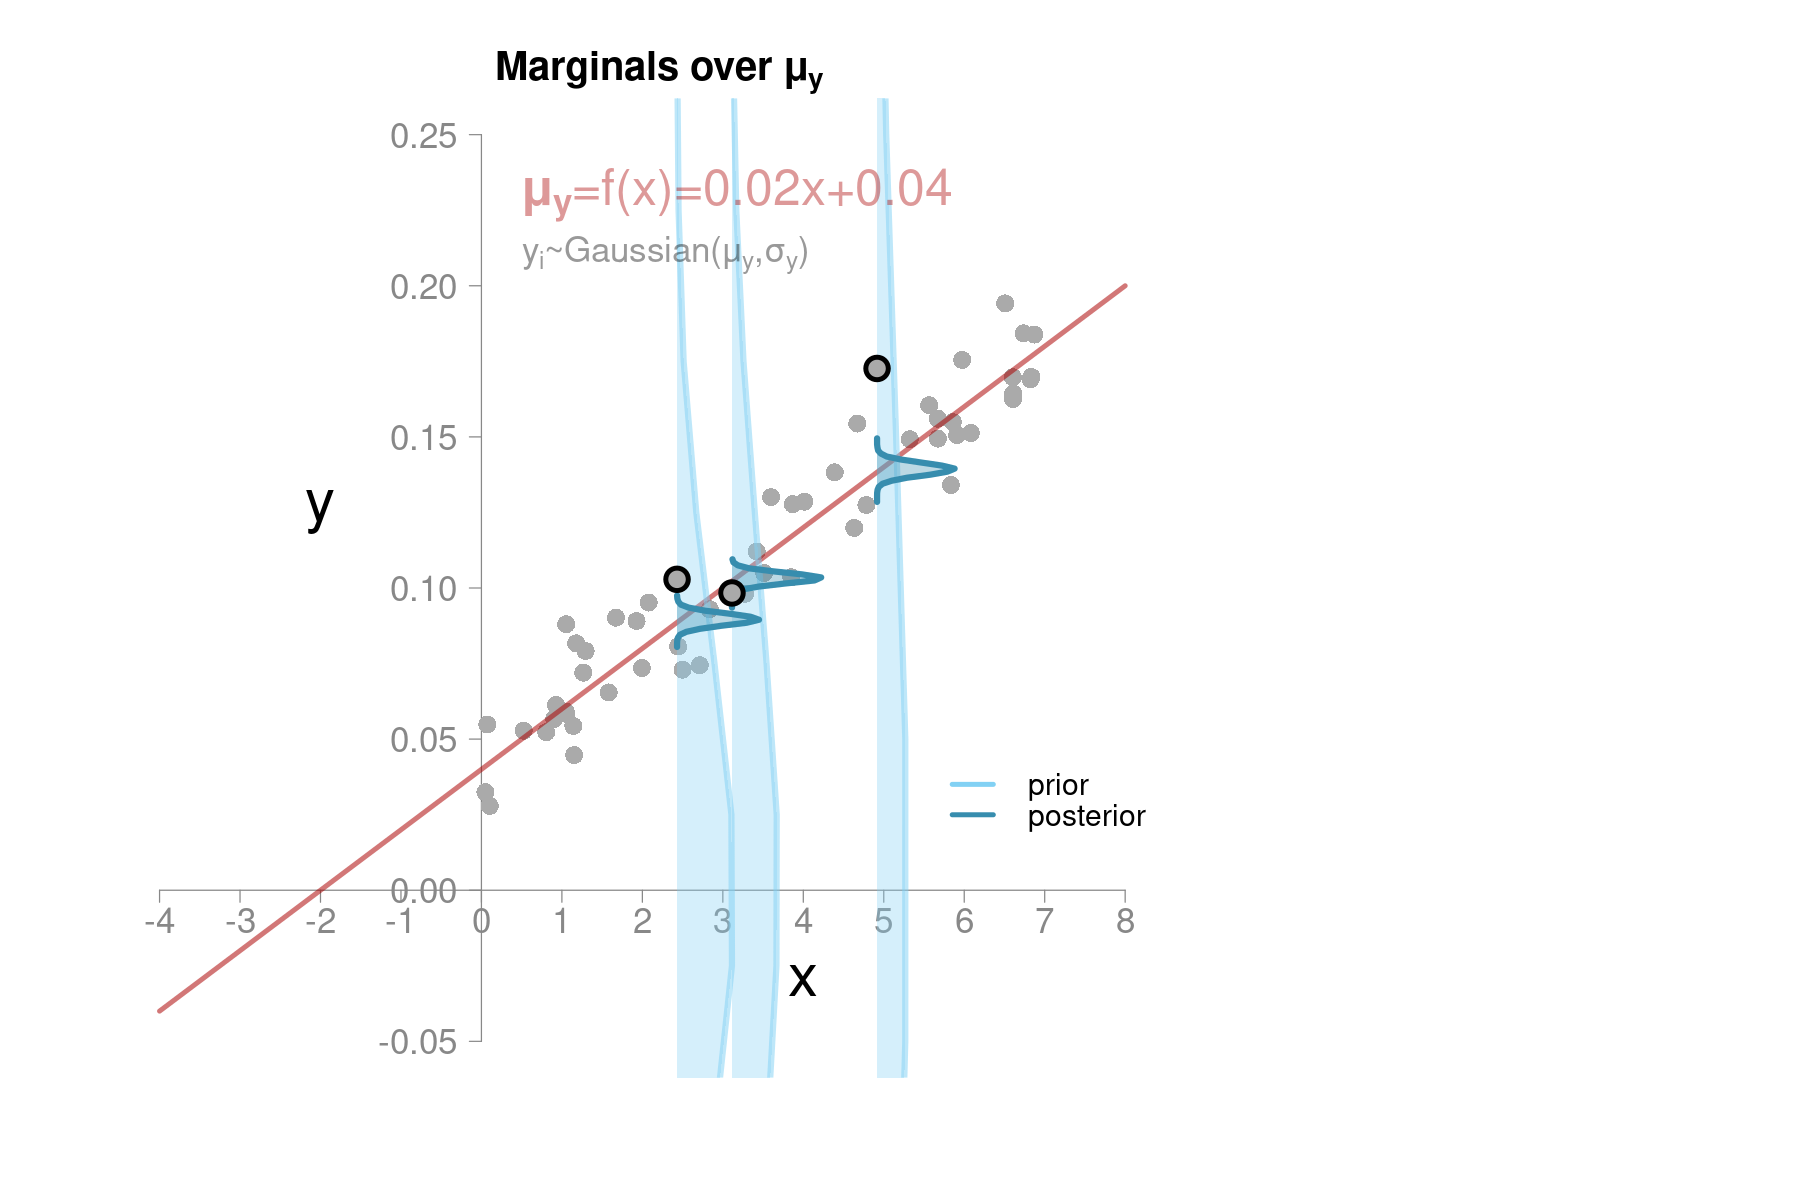

In [85]:
# Uncertainty over MU_Y (pt.1)

# Canvas
options(repr.plot.width = 15, repr.plot.height = 10) # Plot size in notebook
plot(NULL,xlim=c(-4,15),ylim=c(-0.05,0.25),axes=F,ann=F)
axis(1,pos=0,cex.axis=1.75,at=-4:8,col='#888888',col.axis='#888888')
axis(2,pos=0,las=2,cex.axis=1.75,col='#888888',col.axis='#888888')
text(4,-0.03,'x',cex=3)
text(-2,0.125,'y',cex=3)

# Data
points(x_simul,y_simul,pch=16,cex=2,col='#AAAAAA')
lines(x,y,lwd=4,col='#aa000088')

# Selected observations
index <- c(2,19,25)
for(i in index){
    # Extracting data from JAGS
    ht_mu_y_prior <- hist(nds$mu_y_prior[,i],plot=F)
    ht_mu_y_post <- hist(nds$mu_y_post[,i],plot=F)
    # Rescaling and positioning with respect to X
    y_plot_post <- ht_mu_y_post$mids
    y_dens_post <- ht_mu_y_post$density*0.005+x_simul[i]
    y_plot_prior <- ht_mu_y_prior$mids
    y_dens_prior <- ht_mu_y_prior$density*0.15+x_simul[i]
    # Plotting Prior over Mu_Y[i]
    polygon(x = c(head(y_dens_prior,1),y_dens_prior,tail(y_dens_prior,1)),
           y=c(x_simul[i],y_plot_prior,x_simul[i]),
           col=paste(col_prior,'55',sep=''),border=NA)
    lines(y_dens_prior,y_plot_prior,lwd=5,col=paste(col_prior,'84',sep=''))
    # Plotting Posterior over Mu_Y[i]
    polygon(x = c(head(y_dens_post,1),y_dens_post,tail(y_dens_post,1)),
           y=c(x_simul[i],y_plot_post,x_simul[i]),
           col=paste(col_post,'55',sep=''),border=NA)
    lines(y_dens_post,y_plot_post,lwd=5,col=col_post)
}


# Add corresponding simulated observation
points(x_simul[index],y_simul[index],lwd=4,cex=2.5,bg='#aaaaaa',pch=21)

# Model equations
text(0.5,0.23,bquote(paste(bold('\u03BC'[y]),'=f(x)=',.(slope),'x+',.(intercept))),cex=2.5,adj=0,col='#aa000066')
text(0.5,0.21,bquote(paste('y'['i'],'~Gaussian(','\u03BC'[y],',\u03c3'[y],')')),cex=1.75,adj=0,col='#00000066')

# Legend
legend(5,0.03,yjust=0.5,
      legend=c('prior','posterior'),
      col=c(col_prior,col_post),
       seg.len=0.6,
       cex=1.5,
       x.intersp=0.5,
       y.intersp=0.5,
       box.lty='blank',
       bg=NA,
      lwd=4)

# Main title
mtext(bquote(bold(paste('Marginals over ','\u03bc'[y]))),3,cex=2,adj=0.3,font=2)

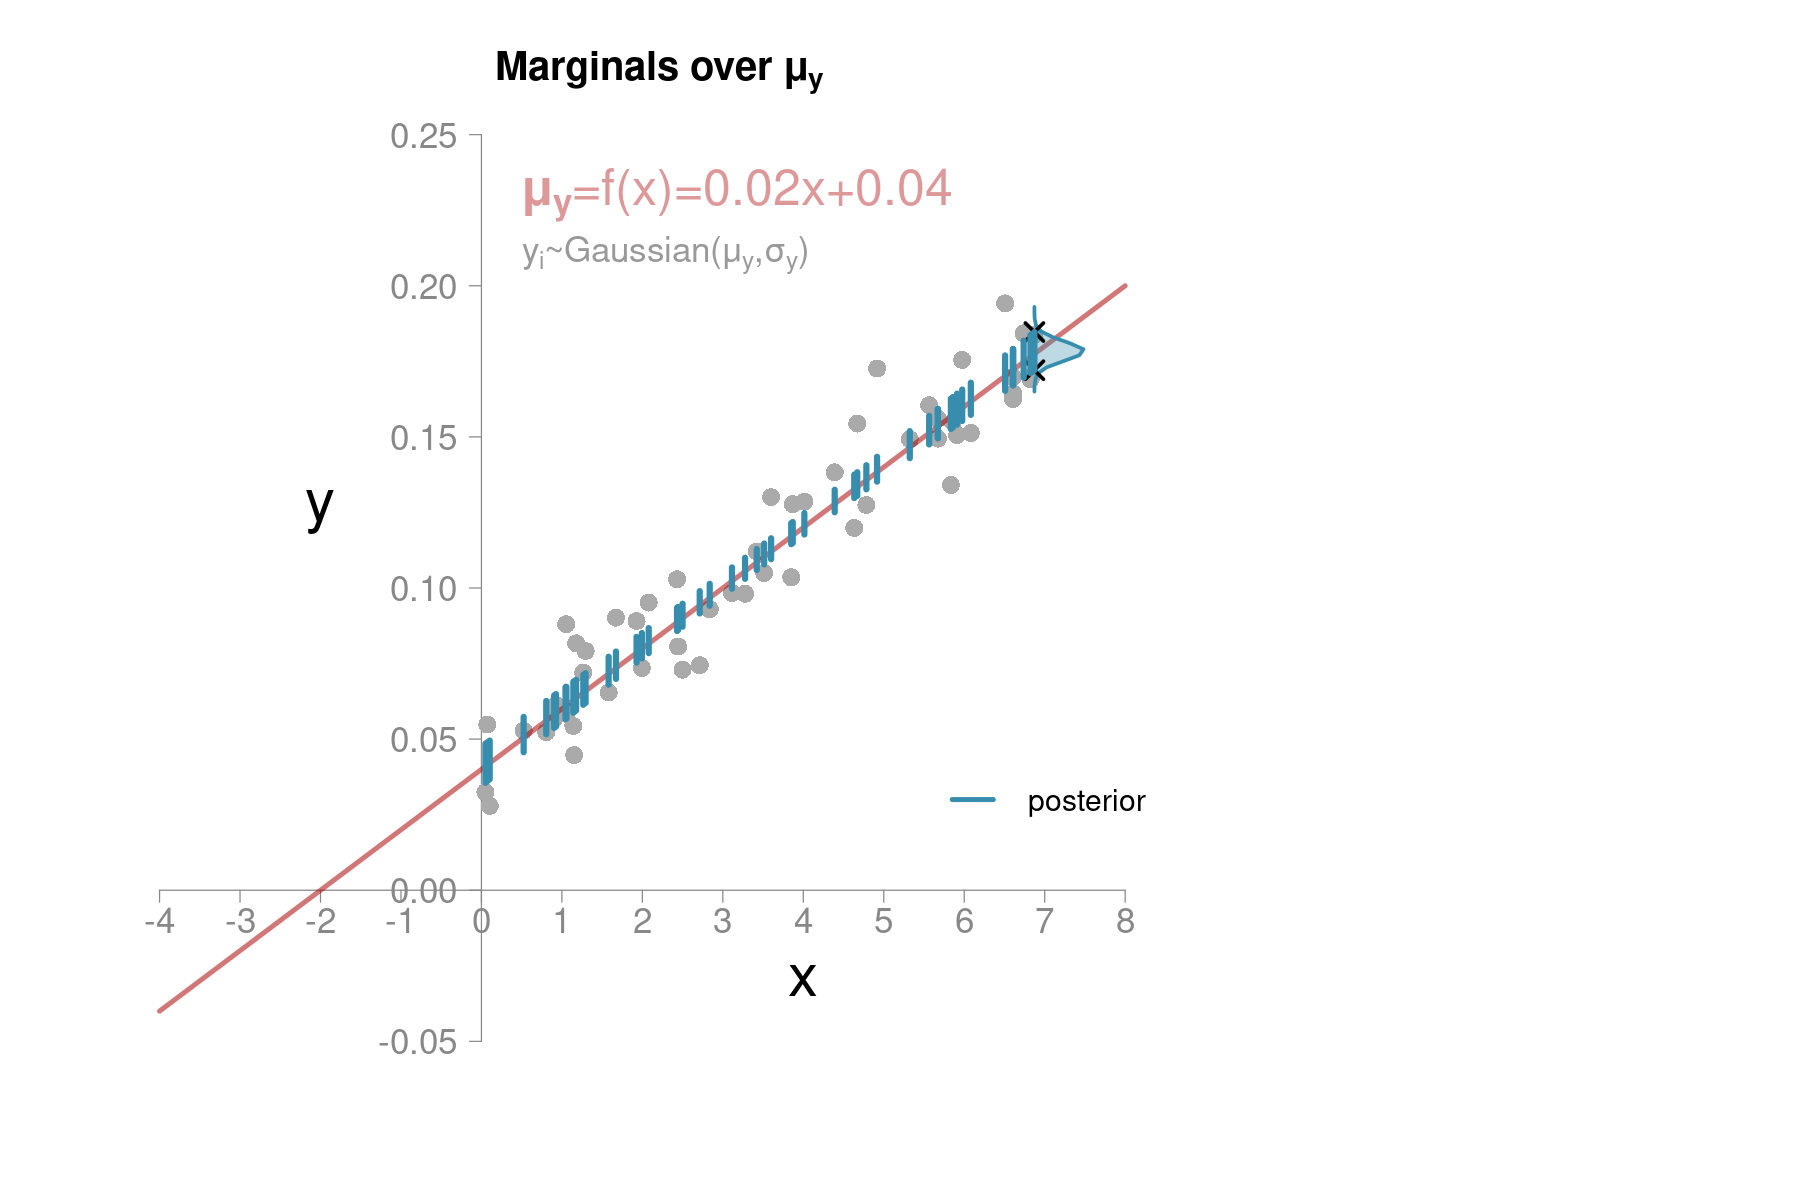

In [86]:
# Uncertainty over MU_Y (pt.2)

# Canvas
options(repr.plot.width = 15, repr.plot.height = 10) # Plot size in notebook
plot(NULL,xlim=c(-4,15),ylim=c(-0.05,0.25),axes=F,ann=F)
axis(1,pos=0,cex.axis=1.75,at=-4:8,col='#888888',col.axis='#888888')
axis(2,pos=0,las=2,cex.axis=1.75,col='#888888',col.axis='#888888')
text(4,-0.03,'x',cex=3)
text(-2,0.125,'y',cex=3)

# Data
points(x_simul,y_simul,pch=16,cex=2,col='#AAAAAA')
lines(x,y,lwd=4,col='#aa000088')

# Add example observation
i <- which.max(x_simul)
# Extracting data from JAGS
ht_mu_y_post <- hist(nds$mu_y_post[,i],plot=F)
# Rescaling and positioning with respect to X
y_plot_post <- ht_mu_y_post$mids
y_dens_post <- ht_mu_y_post$density*0.005+x_simul[i]
# Plotting Posterior over Mu_Y[i]
polygon(x = c(head(y_dens_post,1),y_dens_post,tail(y_dens_post,1)),
        y=c(x_simul[i],y_plot_post,x_simul[i]),
        col=paste(col_post,'55',sep=''),border=NA)
lines(y_dens_post,y_plot_post,lwd=3,col=col_post)
# Find the values of Mu_Y[i] where the Posterior accumulates 2.5% and 97.5%...
y_range <- quantile(nds$mu_y_post[,i],prob=c(0.025,0.975))
# ...and plot them
points(rep(x_simul[i],2),y_range,lwd=3,cex=2,pch=4)

# Selected observations
index <- c(2,19,25)
index <- 1:length(x_simul)
for(i in index){
    # Find the values of Mu_Y[i] where the Posterior accumulates 2.5% and 97.5%...
    y_range <- quantile(nds$mu_y_post[,i],prob=c(0.025,0.975))
    # ...and plot them
    lines(rep(x_simul[i],2),y_range,lwd=5,col=col_post)
}

# Model labels
text(0.5,0.23,bquote(paste(bold('\u03BC'[y]),'=f(x)=',.(slope),'x+',.(intercept))),cex=2.5,adj=0,col='#aa000066')
text(0.5,0.21,bquote(paste('y'['i'],'~Gaussian(','\u03BC'[y],',\u03c3'[y],')')),cex=1.75,adj=0,col='#00000066')

# Legend
legend(5,0.03,yjust=0.5,
      legend=c('posterior'),
      col=c(col_post),
       seg.len=0.6,
       cex=1.5,
       x.intersp=0.5,
       y.intersp=0.5,
       box.lty='blank',
       bg=NA,
      lwd=4)
# Main title
mtext(bquote(bold(paste('Marginals over ','\u03bc'[y]))),3,cex=2,adj=0.3,font=2)

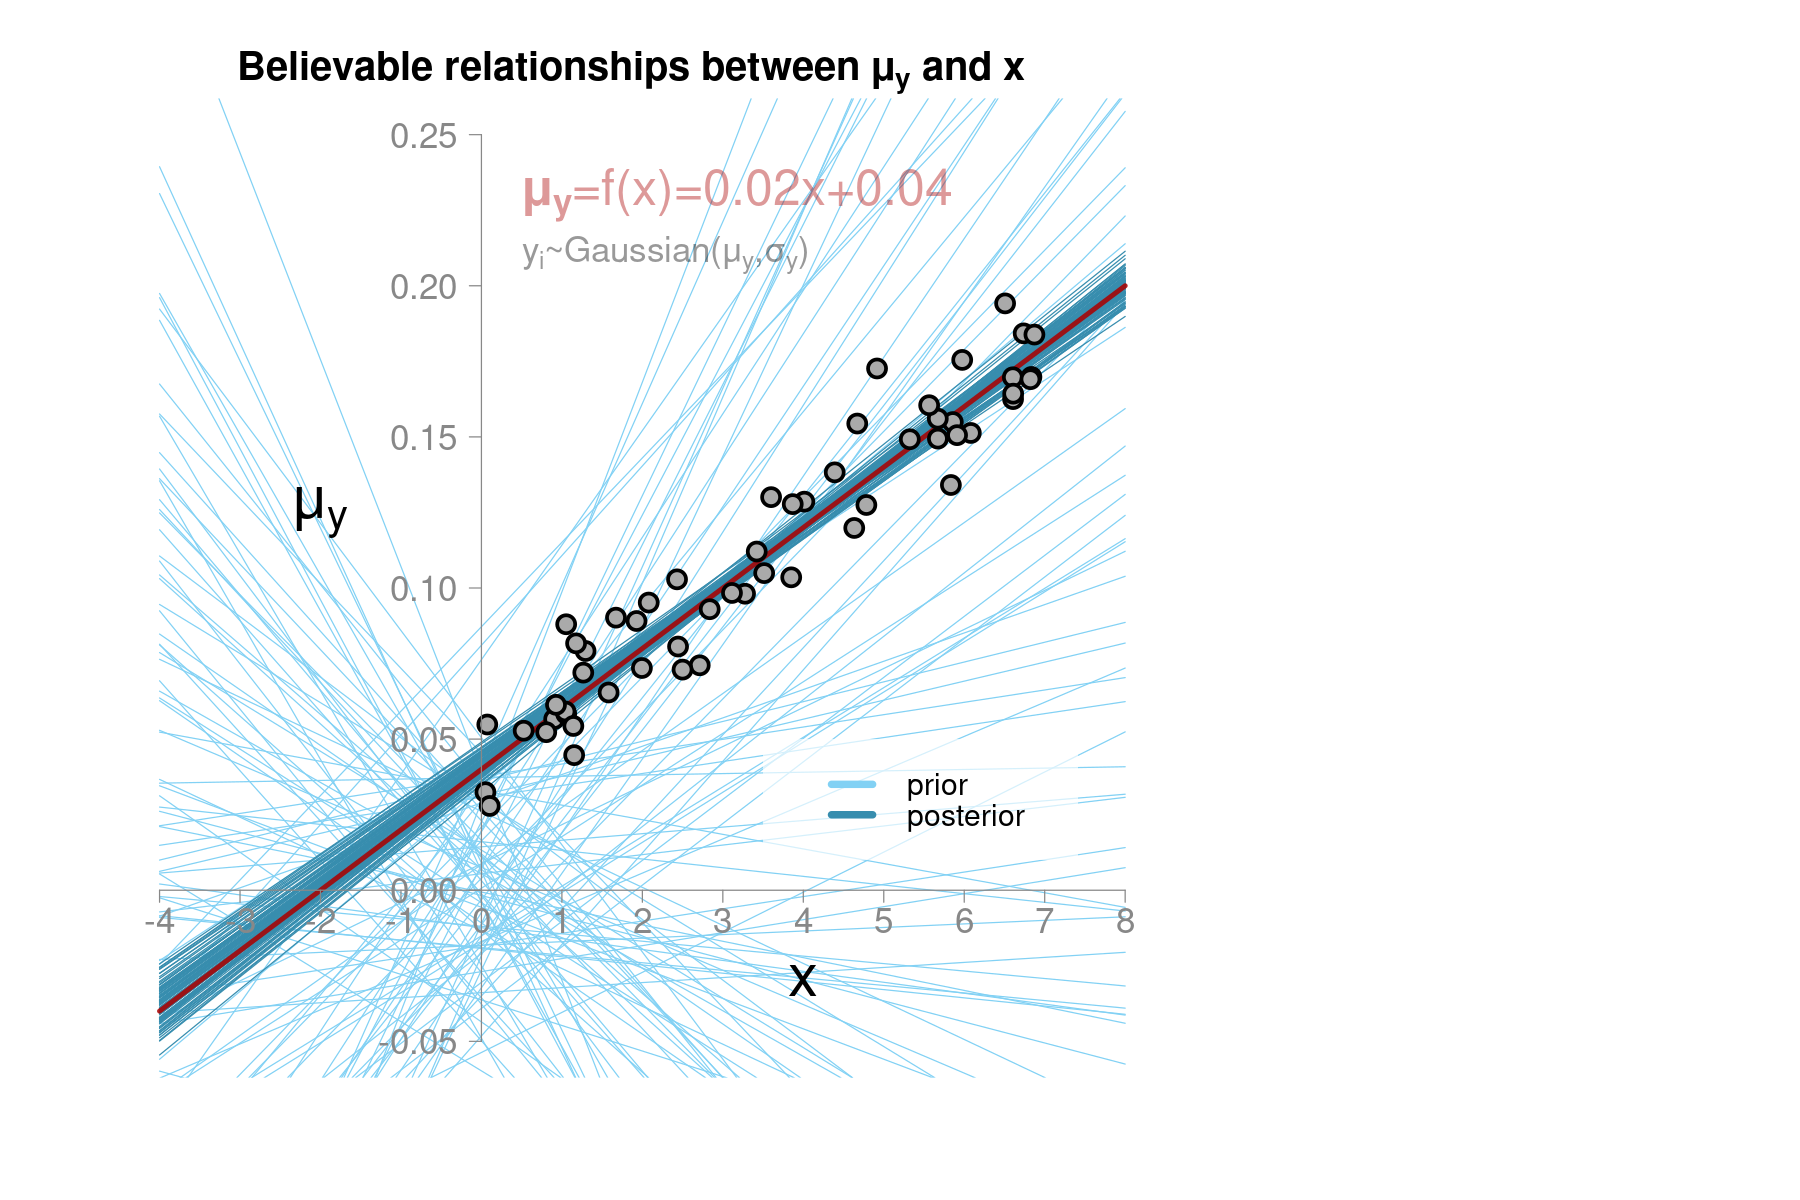

In [87]:
# Believable Lines

# Canvas (pt.1: base plot)
options(repr.plot.width = 15, repr.plot.height = 10) # Plot size in notebook
plot(NULL,xlim=c(-4,15),ylim=c(-0.05,0.25),axes=F,ann=F)

# Selected samples from JAGS
index <- sample(dim(nds$intercept_post)[1],size=100)
# Plotting prior lines
for(i in index){
    beta0_prior <- nds$intercept_prior[i]
    beta1_prior <- nds$slope_prior[i]
    y_believable_prior <- x*beta1_prior+beta0_prior
    lines(x,y_believable_prior,col=col_prior)
}

# Plotting posterior lines
for(i in index){
    beta0_post <- nds$intercept_post[i]
    beta1_post <- nds$slope_post[i]
    y_believable_post <- x*beta1_post+beta0_post
    lines(x,y_believable_post,col=col_post)
}
    

# True relationship
lines(x,y,lwd=4,col='#aa0000dd')
# Data
points(x_simul,y_simul,pch=21,lwd=3,cex=2,bg='#aaaaaa')

    
# Model equations
text(0.5,0.23,bquote(paste(bold('\u03BC'[y]),'=f(x)=',.(slope),'x+',.(intercept))),cex=2.5,adj=0,col='#aa000066')
text(0.5,0.21,bquote(paste('y'['i'],'~Gaussian(','\u03BC'[y],',\u03c3'[y],')')),cex=1.75,adj=0,col='#00000066')

# Legend
legend(3.5,0.03,yjust=0.5,
      legend=c('prior','posterior'),
      col=c(col_prior,col_post),
       seg.len=0.6,
       cex=1.5,
       x.intersp=0.5,
       y.intersp=0.5,
       box.lty='blank',
       bg='#ffffffaa',
       text.width=1.7,
      lwd=6)

# Main titledata:image/png;base64,iVBORw0KGgoAAAANSUhEUgAABwgAAASwCAIAAABggIlUAAAACXBIWXMAABJ0AAASdAHeZh94AAAgAElEQVR4nOzdd5wTdf4/8M9kJm17L+yynV6VBSkWelEQEAQRUMDzbJzild95d37V8/TUe3DnneXO3hAbglhQepdeFoSVsoXtJdtbMv33RzQOk91syiS7sK/nX8lkdvKZ8pls3nl/Pm9KlmUCAAAAAAAAAAAA0JPouroBAAAAAAAAAAAAAIGGwCgAAAAAAAAAAAD0OAiMAgAAAAAAAAAAQI+DwCgAAAAAAAAAAAD0OAiMAgAAAAAAAAAAQI+DwCgAAAAAAAAAAAD0OAiMAgAAAAAAAAAAQI+DwCgAAAAAAAAAAAD0OAiMAgAAAAAAAAAAQI+DwCgAAAAAAAAAAAD0OAiMAgAAAAAAAAAAQI+DwCgAAAAAAAAAAAD0OAiMAgAAAAAAAAAAQI+DwCgAAAAAAAAAAAD0OAiMAgAAAAAAAAAAQI+DwCgAAAAAAAAAAAD0OAiMAgAAAAAAAAAAQI+DwCgAAAAAAAAAAAD0OAiMAgAAAAAAAAAAQI+DwCgAAAAAAAAAAAD0OAiMAgAAAAAAAAAAQI+DwCgAAAAAAAAAAAD0OAiMAgAAAAAAAAAAQI+DwCgAAAAAAAAAAAD0OAiMAgAAAAAAAAAAQI+DwCgAAAAAAAAAAAD0OAiMAgAAAAAAAAAAQI+DwCgAAAAAAAAAAAD0OAiMAgAAAAAAAAAAQI+DwCgAAAAAAAAAAAD0OAiMAgAAAAAAAAAAQI+DwCgAAAAAAAAAAAD0OAiMAgAAAAAAAAAAQI+DwCgAAAAAAAAAAAD0OAiMAgAAAAAAAAAAQI+DwCgAAAAAAAAAAAD0OAiMAgAAAAAAAAAAQI+DwCgAAAAAAAAAAAD0OAiMAgAAAAAAAAAAQI+DwCgAAAAAAAAAAAD0OAiMAgAAAAAAAAAAQI+DwCgAAAAAAAAAAAD0OAiMAgAAAAAAAAAAQI+DwCgAAAAAAAAAAAD0OAiMAgAAAAAAAAAAQI+DwCgAAAAAAAAAAAD0OAiMAgAAAAAAAAAAQI+DwCgAAAAAAAAAAAD0OAiMAgAAAAAAAAAAQI+DwCgAAAAAAAAAAAD0OAiMwlVlypQplBv0en1MTMzAgQOXLFnywQcfsCzr11atX79e1YAdO3Z4tMLVYenSpcp9DA0N9W47PeRwqXSfve4+LQkYrXb5ajp0WnVngB7ummuuUXalMWPGdHWLAAAAAHoWBEahJxIEoba29scff1y7du3dd9+dkpKyYcOGrm4UAAAAAAAAAAAEDtPVDQDoetXV1fPmzXv22Wf//Oc/d3VbALrS73//+z179jieRkdHb968uQvbA+AOXLcAAAAAAOAdBEYBfvKXv/ylb9++8+fP7+qGAHSZ/Pz8Y8eOOZ4mJCR0YWMA3ITrFgAAAAAAvIOh9AC/WLVqldVq7epWAAAAAAAAAACA3yEwCle57du3y06qqqr2799/xx13qFYuKyv7+uuvA9/IefPmqVo4adKkwDcDwB24XL2GQwcAAAAAANCtIDAKPVFcXNy4ceM+/vjjBx98UPWS65npqqur//vf/06fPj0zMzMoKCghIeH6669ftmzZpk2b/Nne7tUGlmU/+eSTZcuWDR06NDY21mAwxMTEXHPNNbNmzVq5cuXmzZsFQfBogwcOHFixYkWfPn1CQkJiY2NHjhz5xBNPFBQUaNLawB+ubdu23XzzzcnJyR0VF/Z3kzQ/QT7Ky8tbvXr1lClTsrKyQkNDg4OD09PTb7rppqeffvrkyZNebLClpeX111+fOHFi7969jUZjTEzMyJEjH3vssZKSkk7/ds+ePStXrhw1alRCQoLBYAgNDe3du/eUKVMef/zxM2fOeNoSQRA+/vjjm2++OS0tzWw29+/f/7bbbnv99dc1P8IXLlxYtWrVoEGDQkND4+LiRo8e/fzzz9fU1Ljzt9rucqd86c5dfnPTiu87ou2h8KXLXKE0vw36cgzr6ur+85//XH/99QkJCWazOSMjY8GCBd999523OwcAAAAAmnJOpgO4ck2ePFl1hbebMepw4cIF1foTJ05sd01BEFavXh0aGtpRVxo+fPhXX33V7t9+/vnnrlvV6Qq+tMH529c999zT0QFZtmyZauXdu3crV1i/fn2n8/cNGDBg3759zhtfsmSJcrWQkBBRFH/7299SFOW8EZqm//znP7Ms68Xx9OVwuemZZ55Rba20tFQQBOU+Zmdna9gkN/falxMky/KcOXOUayYkJHjdElmWKysrf/WrX9E07aIxt95667lz59w/yMePH8/Kymp3UwaD4bXXXmt3U7Is5+TkjBgxwvWRmTZtWl5enpu7XFRUNHr06Ha3069fv507d3px6No9/u+8847BYHB+l+Dg4E8++aSj/fVxlzulVXe287G3dnrd3nbbbaoNVlRUqNZ57bXXVOv897//Va3j/MvZM888o+GO+LgFbbuMC87HKicnp9013bmlaM6X26Dmx3DdunUxMTHt/u3ixYvb2tqGDx+uXDh69Gg3d9Nqtfbt21e1zTFjxjivOX78eNVq6enpra2tbr4RAAAAwNUNgVG4qngaGOU4TvU1fubMmc6r8Ty/cOHCdr/YqDz++OPOf65JYNTrNvA8r/pWlpiYKElSuwckOTlZuWZCQoIoio5XX3nlFXcaQAgxmUw7duxQbdw5kvKXv/zF9XYmTZrkHEzx6+FyU7tfnpcvX65cogqM+vsq8uUErV69utM/sdls7rdEluXc3NyUlBR3GhMWFtbuFpwP8vbt28PDw11v7eOPP3be1M6dO81mszuNCQ8PP3r0aKcH/9NPP83IyHCxHbPZfOjQIU9PonMUad26da4b/OKLLzrvr++73CmturPsQ9dw/7p9/fXXVcs3bNigasaKFStU6yxbtky1zl//+lfVOspD5/ttx8ctaNhlXOvOgVEfP6e0PYYvvfSS6z9cvHjxsGHDlEvcD4zKsrxnzx7nnyK+/PJL5Tpbt251ft9t27Z5emABAAAArlYIjMJVxdPA6Pnz51XrP/LII86r3Xfffa6/2yj961//Uv25JoFRX9rg/LcnTpxw3s3c3FzVar/5zW8cr+bk5Oh0Hky+kZqaarValdtXRVIoimo3uUxl6dKlnh5P309Zp5y/PL/77ruqJarAqL+vIl9OkOaB0fLy8tjYWPcbYzAYjh071ulBdqfaeExMTFtbm3I7NTU1UVFR7jcmPj6+vr7e9cF3pyUjR4709CSqokjBwcGRkZGu30Wv1zuHNX3f5U5p1Z1lH7qG+9ftpUuXVMv/8Ic/qJoxePBg1ToDBw5UrXPLLbcoV4iJiVH+dOT7bcfHLWjVZTrVbQOjvn9OaXgMv/jiC3c6hSqn3qPAqNzeNTNo0CDlZZmdna1aYfny5V4fYQAAAICrD+YYhR7txRdfVC256667VEt27979xhtvKJeYzeZHHnlk7dq1//73v6dOnapa/y9/+Ut5ebm27fSxDc5lpr799lvnd9m2bZtqyYIFCxyPn3zySUmSlK+GhITMmzdv5cqV999//w033KD626Kioi1btrjYKfs9yP64V69eU6ZMcQ5MEELWrFlz+PBhF9tx1iWnzHW6XACapPkJ8sVdd91lsVhUC7Oysu69994HHnhANXSUEMJx3JIlS6xWq+vNVlZW2h8EBQUNGzas3dhrTU3N+vXrlUtWr15dV1enXBIdHf3QQw/961//evrppxcvXmw0GpWvVlVVvfDCC262xGw2Dx06NCQkxHmdo0eP5uTkuN6Oa62trfX19fbHvXv3njp1qnMf4Xl+2bJloigqF/pjl13zujsHprempqb269dPueTAgQPKpy0tLc6/DJ07d665uVm55MiRI8qnU6ZMcYThfN8RfxwK77rMlcsft0HvjmFTU9NDDz3k6BQOffr0mTp1qjLfXNV5PfWPf/wjKSlJueTs2bNr1661P96wYcOxY8eUr8bHx//zn//05R0BAAAArjZdFpIF8AM3M0YtFsuBAwcWLVqkWnnRokXOK6tK6ERGRh45ckS5gvPgSvvXIQffM0Z9bIMoiomJicpX252GTJUMlZSU5Bhx39TUpIqkDB8+XJVi5vzV+ne/+51yBVWKmR3DMC+//LIgCPZ19u3bp/qORwi55ZZbAnm43OGcVWRnMBiys7MXL158zz33PProoxo2yfVe+3iCPvvss8mTJ0+ePFn1nd9gMEz+Gcdxbh5/55GbOp3uxRdfVE7gsG7duqCgINVqqqn62j3IycnJ3377rSMfavfu3ar5Hwghv/rVr5TbUU3Dl56ebrFYlCsUFRWpksLS0tJcH3xCSFRU1Mcff2y/dAVBeOuttxiGUa3zn//8x/2TKDul19kZjca33nrLscvff/+98y6rDp3vu9wprbqzL13Do+v2N7/5jXIdk8mkHNe/a9cu590hhOzatcuxjnMJqffee0+THdFqC1p1mU51z4xRTT6ntDqGzicrMjJSOTnshg0b2h2h72nGqCzLX375pWojaWlpLMuKojhw4EDVS+vWrfN0+wAAAABXNwRG4ariHBh134033qgaUifLsnPVZlWpDbtrr71WuY7BYCgvL3e86mNgVJM2PPLII8pXdTpdTU2N8s85jlNlva1atcrx6t69e1Vt2LJli3MbVEGQxYsXK19tN5Ly73//W7WR06dPm0wm5ToMwyjDOgE4XJ1q98vzqFGjcnNznVcOwFWkyQmSNSq+NHPmTNUKf/3rX5238/HHH6tWGzRokOuDbDabL126pNrOxo0bVaspS6jxPK8azfrwww87N+bll19WbUQZT3HeZZqmnQewP/vss6rVVOO1vQuMvv3226o3OnPmjKqPKAd9a7LLndKkO2vVW925br/55hvVex0+fNjxakcJsy+88IJjHecr1tEM33dEk0OhSZdxR/cMjGpyG9TkGAqC0Lt3b9UKzgXZnGt5Ea8Co7IsK4d32L388svvv/++auGcOXO82DgAAADA1Q1D6QEIIeTRRx/dvn276gs8IUQVyNDr9StXrnT+8//3//6f8inHcfv27dOqbZq0QTWaXpIk1VeygwcPtrS0KJcoa4AIgjD9cmPHjlU1QBCExsZG5RKWZV3sFyEkMTHxwQcfVC0cMmSIqrWCIHz11VeuN+XQVacsNDR006ZNAwYM6JIm+ekEecFqtaqGpkZERPz2t791XnPhwoX9+/dXLjl79mxeXp6LjT/88MOpqamqhbNnz1aV8FaOIrdXXla+unfv3rKyMtVGpk2btupyHMe5aMmSJUucZ+67++67VUtU49m9kJGRoSrqRQgZNGiQKg6Sm5t74sQJ+2M/7XKnvOjOgeyt48ePNxgMyiXK0fTKMfJhYWHtLleNox86dKgjE9/3HfHTofCiy1y5/HQb9OIYHjp0qKSkRPnq5MmTJ0yYoNrItGnTnFvonZdeekk1rfDf/va3J598UrkkPDz81Vdf1eTtAAAAAK4mCIwCEJPJ1LdvX71e7/yS6pvwgAED2h375vzd5ujRo1o1T5M2jB49Oi0tTfmqappR1QSjKSkp1113nePphAkTvrucKr20qanp3nvvVYVWO3X//fe3e9gfeughF/viWledsoceeigmJqarmuSnE+SFo0eP8jyvXHLvvfe2OwUnRVGq0c2EkEOHDrnYuPMUgXbp6enKp4IgOB6Hh4dHREQoX83JycnIyLj77ru/+eYbm81mX9inT58XLxcXF+eiJe2GMxISElSpmj7OHkgIeeCBB9qt33L//ferluzYscP+wE+73CkvunMge2twcPD111+vXHLw4EHHY+XMp8pItLKFqtlRp02b1u5qxKsd8dOh8KLLXLn8dBv04hiqZrAlhDj/ZuB6uaecZw6trq5W1RxbvXp1r169NHk7AAAAgKsJAqMAxGazPfDAAzNmzGhqalK9dPz4ceXTYcOGtbuF3r17q4pHnzx5UqvmadUGZQYoIWTz5s3KqI1qXsgFCxa4LqcrCMLp06fffffdRx55ZPz48b169Xrvvfdc7UZ7Opr6IDs7WxWjcWTDdaqrTpkyjtwdmqTJCfKCc5snTZrU0cpTpkxRLXF9orOystpdrkzxc+Z8wDmO++CDD2bNmhUdHT1v3rw1a9Z4mjGnionY0TStykn0XUd9ZMyYMaqENWWAzB+77HVTXXTnAHcNVf0iR/SqoqKitLTU/phhmAceeMCxTklJib32jiAIqjdVBkZ93xE/HQrvusxVQ5PboBfHUFXviFx+tSi5uD16atmyZc53VIcJEybcc889Wr0XAAAAwNUEgVGAn2zevHnmzJnKutiSJFVXVyvXWbNmDdUBR/Fou6qqKk1apWEbVANa6+rqHAlQ9fX1qi9yzhOW2TU3N69du3b+/PkRERHDhg1bsWLFSy+9tGfPntbWVi/2znkWNgfV0EVHXWDXuvCUdbQvAW6StifIC7W1taolzqNQHZwPWk1NjYuNt5t52qnHHnuso5fa2to2bNhw1113xcXFTZw48dVXX3XzQDlqkau4/jnBCy76iKr8y/nz5x2P/bHLvjS13e4c+N6qCk6Vlpba46HKbM1hw4b169dPWZnKHnE+ffq08tMhKCjIkX/q+47471B412WudNreBr04hhaLRfk0OjraudacXXx8vIa/prz++uvtvpHZbH7jjTc0vzsBAAAAXB0QGIWrXLtV6TmOKyws3LBhw+jRo5Ur79u379FHH3U8bWpqUk3V5z7Vd1evadiG4cOH9+vXT7lk06ZN9gc7d+6UJMmxPD09feTIkc4bPHDgwMCBA5csWbJ+/Xrfgyk0TbsY1peSkqJ86ubx7MJT1tEw5EA2SdsT5B3nNruIl5lMJtVx06rjKE2fPl01M6MzURR37dq1cuXK1NTU//3vf5q3wTtmszk6OrqjV1UHVnnoAr/LXnTnwPfWYcOGxcfHK5fYR9MrA6P20vDKG6D9VdVQ9wkTJjgKoPu+I93hs+aq0R1ug6p0bBf3QIqiVMWgfJGenv63v/3NeflTTz3VUd4rAAAAACAwCj2RXq9PS0ubO3fuvn37VFO2vfPOO45puXz5TqXVMFVt26BKGnVMM6oaR68adG/3xRdfjB8/3jHg1BlFUTRNu988SZKU0VgV1abcTHXpwlPWUQphwJqk+QkKDIZhlE99rP/TkRdeeGH79u233HJLR6fJoba29sEHH3zuuef80QxPub7sVRN6qmZODPAue9GdA99bKYpSjTW2j6ZXTh5qD4yOGjXKscQeEnUxwajvO9IdPmuuDt3kNqjqdK77oNcx8XaVl5c7L6yoqNDwLQAAAACuMkznqwBcvRiG+f3vf3/bbbc5lvA8/+2339rrITgPoMvMzGx3bkFnWg2O07YNd9xxx1//+lfH05ycnLKysqSkJFXlJedx9DabbdWqVaqiOoQQhmEGDx48fPjw8ePH26sA5+TkuNM2Qogsy+Xl5R2Nsy4uLlY+VdXb7Uh3OGUqgWmSP06Qd1QTIBJCSkpKVNXnHTiOU31jd/NEe2HSpEmTJk0qKir65JNPPvvsM9eTmT755JNLlixxkecVGG1tbfX19c6H1E7VR1QFl0hgd9mL7twlvXXatGkffvih4+nBgwdlWVZOJGIfRqDMGLUPpVdljCoDo77vSDe8cV2Juu1tUFWhXkmSpLKyMq3e9+jRo//+97+dl7/00ksLFy5UDZEBAAAAADsERqGn69Onj2qJY6q+sLAwnU6nTIOaN2/eCy+8ELjGad2G/v37Dxs27NSpU44l33333YQJEwoLCx1LsrKyrrnmGtUfvvnmm6rQRkpKyjPPPHPrrbcqSyezLOtRe0pKStyMpLhZL7s7nLIuaZKfTpAXnId+FxcXdxQYLS4uVmVLuRg5ronU1NQ//vGPf/zjH/Py8tatW/fZZ5+1GyLhef7tt99+6qmn/NoYd5SUlLgZGO3o0AVslz3tzl3SW6dOnUpRlOOqO3nyZE5OTmNjo6NhGRkZ5PLAaH19/fHjx8+dO+dYkpaW1rdvX8dT33ekG964tKJtOqRr3ec2qJr/12Kx2Gw2k8nkvGZlZaVzJNc7PM+vWLFCWVPRQZKke+655+TJkwijAwAAADjDUHro6fLz81VLHN8cKIpKS0tTvuRmCSANad4G1Wj6TZs2qdJF2x1HryrNZDabd+/evXTpUuW3TUJIUVGRR43Zvn17u8vPnj2rGg84YsQIdzbYHU6ZSmCa5KcT5AXnato7duzoaOWdO3eqlgwZMkT7NrUnKyvrT3/608mTJ8+fP//YY48FBwerVlAGwrpQR0fvxIkTjnCeXaeHzt+77Gl37pLeGhcXN3z4cMdTjuOU86vax9ETQqKiojIzMx3L//vf/yqjlqoiTr7vSDe8cXmqo6lOVWWI/Kr73Aazs7NVSzrqyB31Gi/8/e9/P3PmTEev5ubmPvPMM1q9FwAAAMDVBBmj0KOJovjiiy+qFipTgcaMGVNQUOB4qsy1VCkpKVFOj2g2m12UIvGItm1YuHDhn/70J8fT7du3q2Z1bDcwmpeXp3w6bNgw52GeBQUFbW1tHe5Ge958883HH39cNcskIeTVV19VLXEELDrVHU5Z4JvkpxPkhVGjRjEMIwiCY8mbb775xBNPOIfhZFl27n033HCDtu355JNPamtrHU/T09Nvvvlm5Qp9+/Z97rnnli9f3r9/f2V2WzeJTP3vf/9btWqV82Sjr7zyimrJuHHj7A+6ape96M5d0lunTp168uRJx1PlyHrlWOORI0c6fjb76KOPlFtQBUaJFjvSDW9cHsnPzx8/frzzcscIDJWHH3745Zdftj+eMWOGY8Jru5KSEkfBrpSUlEuXLrkzzXT3uQ06f2C98sort9xyi/Oazr3DO2fOnPn73/+uXDJgwICQkBD7RBB2zz///Pz584cOHarJOwIAAABcNZAxCj2RJEnl5eWbNm2aMGHCnj17lC/RND179mzH00mTJilfPXXqlPIbtcPFixczMzOzFF577TWtWqttG9LT06+77jrH05aWFuU30v79+7ebd1ZTU6N82tTU5LyOF8VbysvL33rrLdXCixcvfvDBB8olZrN55syZbm6zO5yywDfJTyeo3VGZrgUFBanq29TX1//nP/9xXvPDDz9UpShmZmYOGDDA03d07a233lqpcN9997W7Wt++fRMSEpRLYmNjtW2Jdy5evKiM3Nnl5uZ+/PHHyiUMw8yYMcP+uKt22Yvu7Keu4fq6VYU1rVar47EynqWsv2Sz2RyPGYaZOHGiapu+70g3vHF55P3333deqIrRKy1dutTxeOfOnarSYcpPpTvvvNPN4nt+ug16ITs7WxWT3bJly759+1Srbdq0STV3rXfsI+VVv3E+99xzzz//vHKJi7H2AAAAAD0ZAqNwlZs6dareCcMwSUlJM2fOdP6ismTJEuV0lgsXLlSVNFmyZIkqr8pisSxYsEA5TZher1++fLlWu6B5G1Sj6VXv1e5yZRYtISQ3N/eTTz5xPJVlefXq1e+++27HO9GhVatWvfPOO460tRMnTkyfPl1Vo3nBggUdTbPorDucssA3yU8nqLGx0Ysy8Y888ohqyf/93/8pBywTQtatW+ccsGs3NdJHgwcPVj4tLS19+umnnec9fPfdd1VloJxn2u0q991339q1ax1tPnz48IwZM5ShOkLInDlzHGmDXbjLnnZnP3UN19ftuHHjnPOXCSEMwyhHQCunGVUaPXq0amg20WJHuuGNyyP79u17/PHHlanie/bsWbVqVUfrjxw5sl+/fvbHLMtu2bJF+aoqMOpmG/z3OeUFZeTX/u5z585V7ubGjRvd3zXXXnzxRVWAdezYsbNnz544caLqZ6rjx4//85//1ORNAQAAAK4aGEoPVzlJkpRzw7kWFxf3j3/8Q7kkKCjo0UcfffLJJx1LcnNzhwwZct9992VnZ/M8f+zYsbfeequurk75V4888oibBYXdoXkbFixY8Lvf/a7dw+Jcj95u8ODB33zzjXLJokWL3nzzzaFDh1ZXVx87duzChQvOf+XOkWdZ9p577nn66acHDx5cWVl5/Phx1Qpms/mJJ57odDsO3eGUBb5JWp0gVc4gx3GPPPLIvHnzWJadMWOGTufWb2lTp06dMGHCrl27lG/04IMPvvzyyxMnTtTpdN9//71zhfQ+ffqsWLHCne17ZOHChap81SeffHLt2rWzZs1KSkqiabqysnLbtm2q2Ql1Ot3tt9+ueWO8Y7ValyxZ8sQTTwwYMKC8vNw5kVCv1yv7SBfusqfdWauu4dF1azAYJkyYoOovhJChQ4cqA6bXXnstTdPO6XXO4+g12ZFueOPy1LPPPvvRRx+NHDkyPDz87Nmzhw4dcv0RsHTp0scff9z++Kuvvpo3b579Mcuyjhk5Bw0a5P68w/77nPLCqlWrXn75ZeXUq7W1tdOnTx80aFBaWtrFixfbbYwX8vPz/+///k+10FG567nnntu+fbvyd5Enn3xy7ty5zmUnAQAAAHouGeAqMnnyZK/7QmRkZE5OjvM2OY5zs/KP3bhx42w2m3ILn3/+uWod+xcV91fwvQ0qN910k/NfDR48uKP19+/f7/67OwwdOlS5kSVLlihfpSjKnfTA1atXqxoT+MPlzLmKRWlpqYv1/X0VaXKCZFlevXp1Rys72tPp8ZdlubS01KP68gaD4dixY14f5Ouvv165mupKVk6O4aZf//rX7h98JVXh6WXLlnm0nTlz5ihfDQoKCg0N7bS1TzzxhKoZvu9yp7Tqzpr0VneuW6WXXnrJec0HH3xQtVq7szEeOXKk3QPi+474vgWtukyn3B+/r8quTUhIcGyksLDQcc1ER0cLgmBfvnXrVsf6f//7391vlSa3QQ2PoZtHSdVxRo8e7f4uS5I0YcIE1QZnz56tXMf5984bb7xRkiT33wUAAADg6oah9ACEEDJt2rRTp045F9QmhOj1+q+//trNpJVJkyZ98803RqNR2+Zp3u+BeUwAACAASURBVIZ2R9N3lC5KCBk3btyiRYtcv+/KlSunT5+uXHLmzBnVFK5KwcHBjnShjvzmN7/53e9+53odZ93hlAW4SVqdoJkzZ2pyKJKSknbv3p2cnOzOyuHh4d99951HISGPvP322x0Ni27XuHHj/vWvf/mpMR4JCwvrtDbL3Xff/dRTT6kWBn6Xve7OmnQNT6/bdrM+nQvmOB/D6Ojoji5U33ekG9643BQcHBwSEuK8/Oabb263IpNdWlqaI7ZYW1v7/fff2x8rx9G7mPjFmT8+p3xx3333rVy50vU6c+bMcT8l1tmbb76pzM0nhNA0rarC9Mwzz6hKou3du7ebTE0LAAAA0B0gMAo9kU6nCw0NTU5Onjx58p/+9KfTp09v3ry5d+/eHa2fmJi4d+/eX/3qVzRNd7ROeHj4P//5z82bN6vmidOKtm2YP3++c/FoF4FRQsjbb789d+7cdl+Kiop64403Xn755VmzZimXS5KkSitTeeqppzqahM5sNr/44ovtFu1xR3c4ZQFukiYnqF+/fs8++6wmE30OHjz4yJEjy5Ytcz0Af/bs2UePHnWuZqOh6OjoXbt2PfbYY6p0TmcMwzz66KNbtmxpdw7KLrF06dKXXnrJubcSQgwGw7PPPvv22287n68u2WWvu7PvXcPT67Zv375paWmqhc6BUWX9JbspU6a4uJ5935FueONyR2hoqGPstkPfvn3bvTiVlBNxfvnll/YHjsDo2LFjPZ0owB+fU7546aWXXnnllaCgoHZfnTNnzpo1a9ycosRZWVnZH/7wB9XCZcuWDRw4ULmkT58+99xzj2q1P/7xjyUlJd69LwAAAMBVhpKdCjIAQEfOnTv32WefbdmypaioyGKxGAyGuLi47Ozs6dOnL1iwIDDBlK5twzfffPP555+fOXPm3LlzQUFBffr0mTt37vLlyz0aN62yf//+N998c//+/ZWVlUajMT09fdasWStWrEhJSfG9wd3hlAWySZqcoKNHjz7//PPnzp27dOmSLMsxMTHZ2dmfffZZu+G5Tl28ePGLL77YunVrQUFBdXW1KIpxcXEpKSmTJ0+ePXv28OHDvdimdxoaGjZu3Lh79+4zZ86UlJS0tLSwLBsaGhodHT1kyJAbbrjhzjvvVBVqD7C5c+du3LjR8TQhIcFeH+nMmTOvvvrqrl27SktLDQZDamrqzJkzly9fnpGR4XqDgd9lX7qzj11D2+vWF7738W5441J6/fXX77//fsdT+4X6/vvv/+Mf/8jPz4+Njb311luffPLJuLi4Y8eOVVVVOdY0Go3KGW8aGhoSEhJYliWEZGZm5uXl5efnZ2Vl2V999dVXH3zwQS+a54/PKV9UVFR88MEHGzduLCgoaGxsjI+PHzFixF133aWaOgMAAAAAugQCowAAAN1CR4FRgG6l3cCod5uaP3/++vXr7Y/Pnj27Y8eOhx9+mBDCMEx5ebmqrBYAAAAAgOYwlB4AAAAAuoByNP1XX33lGEc/ZcoUREUBAAAAIAACPb4MAAAAAIAQcvPNN0dHR9fW1hJCPv3003PnztmX33nnnV3aLgAAAADoKZAxCgAAAABdQK/XO+r+5eTk2Gw2QojZbMb8mwAAAAAQGAiMAgAAAEDXUI6mt7v11ltDQkK6pDEAAAAA0NMgMAoAAAAAXWPMmDGOSvR2ixcv7qrGAAAAAEBPg8AoAAAAAHSZJUuWOB5HRkZOmzatCxsDAAAAAD0Kii8BAAB0CwMGDKipqXE8jYqK6sLGAATMrFmznnrqKfvj22+/3WAwdGlzAAAAAKAHoWRZ7uo2AAAAAEAPtX79+vnz59sf7969+6abbura9gAAAABAz4HAKAAAAAAEmizLFEWdP39+1qxZFy9eJIT07t370qVLOh0megIAAACAAMG/ngAAAAAQaCtXroyNje3fv789KkoI+f3vf4+oKAAAAAAEEv77BAAAAIBAkyRJOaluv3797r333i5sDwAAAAD0QCi+BAAAAACBFhoaajQa4+LiBg0alJ2d/dhjj5nN5q5uFAAAAAD0LJhjFAAAAAAAAAAAAHocDKUHAAAAAAAAAACAHgeBUQAAAAAAAAAAAOhxEBgFAAAAAAAAAACAHod+6qmnuroNcMUrbhW/t/DJwbReR51rFI7WCnEmakcFF2nQBTOU6789VS8UtYrJQbTmraplpV2VXHIQrdd10gbNnW8SzzQIaSG/7FRxq3jAImSE0gFvC8DV71yjkNcsJgdrfxvxUU6dUNYm9vLD/a1dJ+qE0jYxSYu3kwnZVs4RQqKMl/2AeqyWt7BygtmbX1U5Sd5c3uHnwok6YVclx+hIrMn7n2xFmeyo5FoFOd6rFnotv1k8WitkhNA7KzlRJtFGj9/9x0bheJ2QGkzTPn9GNHLyjgou0UwbaYoQ0sLL2yo4SSaby9mCFql3MG0IyOeQIJFtFVyrICeYdaVt0v5qPjVER1MdvvUhC19pk3oF0S2CvL2Ct/+h7804VssXtUq9f745XGwSj9cK6SEuGtLd2UR5RyVfbftlpy40iUdqBPvhlQk5XsufrBMoQnl0He6v5vOaxdTgn46MIJGdlVxZm5QSHNBjdb5JPGzhC1ukc42CjqKiOt4FWSZ7qrnCll/a7IVDFv6HBjHBrDP63vEAAADgioWMUdBAUhBd0iptLuMIIRmhdHGr+E0p18DJ+6v5Tv82mKF2VHCtgvZFwKIMusIW6VitoPmW3Xhral8VX94mOZbEm3RnG4STdZ0fEADw1PFaoYnvdoUEZUJ2V3EUCdD3basoby1ngzX6ev9DvXCijleFF0WZ7KrkvY6qnakXzzWKke1FOlp4eXM5m98sRhp8+rdkczl7pl5IDwloiFyQyKZS1kSTSy3iwRo+xuTxAbLYpC9L2Bgjpdfin7JDNXxZmxSq/6kZOyu5cqu0o4K71CL1Mnf+a6VWvi5lzzcJWaG0LJNvS1lZll0EZCus0vYKLs6kaxXkDwtsVVZxQLgGJ7HaJm0p5xyhdk6SvyljzQx15f5C2SrIawpsBc3ikAjGvqSekzaWsOEGyqCjGnn5wwLbjgo+MYjuE+bBAdxewe2v5vr8/NstL5FPLtlyG4RBkYGLirYJ8oZi9vMiGyuRnDpBkklGxx1ZlsmXpezRGqF/OOPd2RRlsrGE3VPFZ4XSjs4CAAAAPRMCo1ezIzU8JwUiWEBTZHZvY26j8GOjYNBRC9NMlTbJRFNnG4V6TnL9t1mhdLhBd7JO+/AlRZHrYpgjNTzfSRO0F2vSZYTQR2t/CYMaaWpMrH5fdRc0BuDqJsmktE1K6X7popdaxFZB7q9FfMcdR2uEYIbqH874vilJJnur+FEx+pDLg2j5zaIgyX1DvdyjE3X88Eim3bjc/mqeoaiMUNqXJMEfGoScOmFeqjHAYY7vLZxEyNhYw34LPziC8TS2y0tkfTGbFcpkR+t9b4xNlHPqhLFxP22qwiqdbhAiDVQdR0bF6EfFaPAW7thbxV9oEhemmYIZ6mS9UM/JN8UbXKy/pZwbGMFEG3VrCmxGHbkz3aRJBt93ZVzfMCbr5yt2dyWvp8iY2AAdBM018vL7+TaKkLszTfaLXJLJF8VscpBuTKw+t1F444JVkOR7+5qujfLgPrCnijtayy9KM9lTUO1R0TpOWpppjvLthwr3nW0Q/nfBWmOTboo3/NgoZEczt/Y2dhTxlGXyVSl7sUlckmFK9OqOYRPltYW2whbxrkyTOxFkmRA//HwPAAAA3QUCo1ctSSbHa4VPL7GB+Wcuway7Pk7/bRnXKsgRBuq2FOO5JiGMoQ7XdB7xvCaKOV7Ly35o5/AoPUWR0/VdkDQ6KkZ/pkFoVmSxjYrRyzI5XoukUQAtVVolTpJ7B3e7j7MzDUJmKB0UkAQ9QSbHavkxsdpMHHKyTmgTZef4UW6DkBXGeBexKmuTKqzSNe3Fa1p4+UQ9z0nyGB/CdlU2aVMpOzXREOAQeTMvH7TwExMM1TapqEUc63nQ7bsylhPlW5JdxQ3dd6xWMNFk4M/x8a3lXEoQ/WOjmBSsm9pLm7fo1LlGcV81NyfFGG/ScZK8p5K7Pk4f0nG0+ocGocIqjo7R26OiizO0iYqeqhfKreKUxJ/22mKTjtbyU3sZA5Uyq7FaVnovzxrCUEszTI67yrYKroGTp/UyfFnMflHMjophlnkYzTxSw++v5uenmFJDaEIIK8ofFlibeHlZpjnSEIgj1SLInxexG0vY4ZHMsEhmdxU3JdEwKbHDa1Um5KtS9oIPUdEGTn43z2YV5BVZZne2wEnyJ4W2z4tsXrwXAAAAXBG63TdJ0IqOIoszTPWctL7IFpC0UXJDnCFcT20qZQkh6SH05ERDCy+frOXbOgvNXhPFtAnyhWZR8ybpdWREFHPQwvkj6upanzA6yqA7oRg7r9eRcXH67y0BSuMF6CGKW8UYY+AGCLtJlMm5RnFQhAb5m+7IqeMlmQyL1CAVTpDJ/mpubKzefHlwSpDJhWZxoLcJsCdq+YxQut0ZA/dV80YdFWvUZXibi2oT5XWX2L5hzMhAZUQ67KjkYoy6IZHM/mquXxgd5+EEqWcbhB8ahNtSTWYtQoGiTI7W8qN/jo+faRDK2sQyq2imqWUZJt+3745Kq7SxxDY+3tAvjCaE7KviGR25ruN4sSCRXZXciGj9V6WsiaYWZ5g0mQKVFeWdldz1cYYIwy8xxLRguq8nA8y7j0qr9H6+Ld6sU+bS5jWLR2v5UTH6NQW2Spt0T5b5pniDRyPfc+qEbRXcnN5Ge9akPY/SKpK7MkxhAUm7zm0UXjtvrWOlFVlmWke2V3Kzextd5zV/W8aebxIXp3sZFS1vk97Js4bqqWWZpnA39rGZl9/Pt9VxcsB+VwAAAIDAQ2D0ahamp5akm8rapK9L2QC8nY4is3sb85vFHxoEQsh1MfqhUYxEyIHqThI2zTQ1MILxUyrlyBh9syCfa+qCpNHsGOZYraAMC4+I1jMUOeJGFi0AuKm4VUzpfumiF5tEUZb7BSQKI8vksEUYGcNoMkPl0RpekMmoGHVIN69JkGTZo4kLHWyifLZRGNFeumgTL5+s5XnJpwHOX5eyNEVmapR06b4Kq3SmXpjay1Bjky42iY4B7G6qY6VvSrnJiYbkIG0u4NP1Ai+R4ZEMIUSQyI5KjtERUSaLMzoclaytVkH+7JKtTygzLk5PCGng5CM1/KREg4ufLb63cKJM8poEE03dmW7UqjDU7ipeT1GOiyq3UbjUIk5PuiJjW2Vt0ocFtvQQekGqifn5Smni5S+L2USzbnclNyCcubeP2dNpKH5sFDaVsTcnGe2/39ijoqxI7sowBWAyimZe/vSS7ctidmQMc0+W+WQdf8jCL0wzDXH5Y9K3ZezZBnFJuqmXV13mfJP4QYE1K5R2c64Gi016N89KERJloHZUYLgPAADAVavbfZkEbUUZdXekmc41ilvKuQC8XaxJd2O8YXMZZy+EMj3JGKanDtdwts6SQbOj9fnNYi2r/QScwQw1NII5YOmC/2iHR+plmZxRDORnKHJ9nP6ghbeJSBoF0EZJt5xg9GyD0DeMCUz57x+bhGZBGqnFDJWcJB+08DfE6Z1bntso9vF2j07XC0aa6hvWTshjfzUXpKdMNPE6u3ZfFV/QLN2epllMzX32mTFTgun91XxqCJ0c5MF1KMhkfTGbGqK7Trss18M1fHb0T3Md7K/mWnmZF6lxsfpEcyA6iCiTz4vYIIa6tbfRvmRHBZdg1g3seN7bZl4+YOFlmQQxOg2johabdKyWn9brp4CsIJEdFdzoWL1HVdq7iUst4ocFtoERzJyUX6Lbskw+u8TyMmkV5KUZpmm9DJ4mHF9oEjcUs5MSDPbZLVoF+YN8mySTuzNNLiY90MqJOuG/561tgnxvX/P1cYYvS9mzDeLidFOWy5zxb8u4Mw3iYm+jokdq+HVFtjGxehezlyoVtojv5tvMjK6ek9tEeXz8lTo1LQAAAHTqyvsfETzVK0i3MM14opYPTHBwbJw+1qT7uoQlhDAUWZppJoR8VGh1/VdJQbpEs+6EH0owEUJGx+or2qTiVu2H6rum15FhUczhmssO+zVRejNNVAsBwDsWm9QmyCmBrULeKU6SLzYLARtHf8jCD4vUazKZ6UELr6PItVHqEAAvkYtNPoyjrxOuiWqneHQjL+fUCaJERsXovRtKXtgi7q3mbu1tiAl4zOtMg1DRJk5MMDRwcm6jMM7DdNEtZWybIM/+OYbouwtNYh37U3y8iZe/t/CEkEgjcV31SEPflbF1nLQwzWTPXC5tk35sFKb1crWDm8s4IpMoo5ZRUULId+VcVugvZdn3V3OiTK738AR1B+ebxI8KbdnRzM1Jv8z3KclkbaGtwiqmBdO/7mNO9fzuV9gifl5kuyneMDpWTwhpFeQPC2w6iixRzF7qJ/WcvKbAtrWcvSFevyzTHK7XfXrJVtQq3pX5U+mnjnxXxp1pEBanm5K8ioruqeK2V3Czk41udodT9cJHhTYzTWps4qgYZnmmOdbDWTIAAADgCoKP+R4hLYS+LdW0q5LzR/F3FYqQWcmG4jbR/l4ReuqaaH2ZVTrSWShwRLQ+p07wR9H2aKOuXzh9sCuSRkdF6y2sVNTyS0xWR5Hr4wyHLEIrSpwC+Ky4VQrTU+5MFRdI5xpFmqJcZz9ppahVLLdK18VqEIS1ivLhGuGmeAPj9K/BxSaBENIn1Jt3KW4Va1jJOdhKCNlfxYXqKUEmHhXRdmjk5Q3F7JhY/YCOcxL9RJDIzkpuTKw+wkAdsHBxJl2GJ/Gp3AYhp164LcWoydSidgct/JAIxj4Iem2BTZaJTMjcFFNg8mgPWPgfGoSFqb+Mwt5Szg6JZFwk911oEs81CdFaR0V/aBDK2sSpPwdk6zn5oIWfkmgIfEKxj07XC58X2SYkXFaJqIaVXrvQVtgijo013JFuNHl+/ZS1SZ9dYrOj9fZIcYsgrymw0RRZnKHNRLcdkQk5USe8fqFNksmv+5jHxuptkvxhgbWOlZZlmuJdhh2/K+NO1fN3pBm9iIraU7OP1AiL001DIt26Ueyp4r4uZSlChTDUvX3NN8VfcdcOAAAAeAaB0Z6iXxg9M9n4bRn7Y6PfY6PRRt3EBMO2Cq6RkwkhExL0NKG2VnCXWlzlbA6JYChCzjb4pXnjYg0XmkSLzQ9hV5fCDVS/MHXS6LBIJkxPHeqKQC3AVaa4VUztluPoB4TT/gwy/OKghR8QxnhUh7oj31fzwQw1rL3YQW6j2DeMdg6YuuN4rdAnlHau5dLIy6fqBYqQa6MZL+I7okw+L7LFmXTjA5URqXTAwgsSGROrbxXkU/XCDZ5kI9Zx0jdl3IQEg+sUOY+Ut0nFraI9AXB7BVfDSmaaXBej965Ajafym8VdldysZKMjDHq6Xqi2SeMTOjw1Tby8vpgNZqhlWdpUW7LjJHlHBTcu1uCoqL61nE0MogOWvq2VozX816XsjCSjcu7dE3XCWxetDZw8PEo/KdGbBNgqm/RRoW1oJGMvJdTIy+/n2Uw0tdTPUVH7ZJ3bK7ipvYx3Z5qijLpGTn43zybKZHmWOdLl7WtzOXeqnl+UZvJiyhSrKH9YYCtvE5dnmdxJrRVlsq6I3VfF6ygyPkG/LNMc+FR0AAAACDx83vcgwyKZm+INXxSzBX6o/64yKkafYNJ9VcoSQsw0NSKaMeuoz4vYeq7D0CSjI0MjmaP+KcHUK0jXO5jukgHs18UwF5pE5Y5TFLkhXn+klm/mkTQK4JOSVrG7TTDaJsgFLQGqR1/DSnlNP4XDfNTCy8dq+fHxeucgFS+RvGZhoFd71CbIPzYKI9qb/3RfFReupxp5eZRXs6N+V8Y28fJc96YL1FYzLx+wcJMSDUaaOmjhI/S6fm6nrIoy2VDEJgfpfCk25eyghc8KpWNNurMNwkELH8JQepq6MSCzItaw0vpi9vo4/eCfrxBBIrsrubGx+o5SuZt4+a0LVlGW79KoBr3DnipeR34p5FXQLF5sFmdcaTWXDlj4bRXc3N5GRyZ1I//TCPQIAxVj1Hm3R7WstLbA1ieMthehauTkNfnWED11Z7rRnUpE3pFkcsDCv3nRaqap+/ua7XtUw0rv5VtD9NTSDFOwy8H7Oyq4nDp+UZpbYU2VOk56J88myvKKLLfim1ZRfv2i9XyjGG+m7+9jHhurp5AoCgAA0DMgMNqzXB+nHxWjX1fEVlj9mztJEXJrb2N5m3SslieEjInV2yQ50kh9UsiyHdcdyo5hqqxSeZtf2jYmVn+6XmgJeCwyJZhOMOuOXl6JflAEE23QdUlJKICrRgMnN/JySkj3+iD7sVEIoqm0gIRrD1TzKSG0d5Puqeyt5iINunajn+ebBB1FZXo1M0BOvRDCUJlOQY1GTj5dLxhoamA4E27wOPxwul44VS/MTzEGoFCMs52VXLRRNzSSYUX5RJ0wNs6DRmwt55p4+dbeRg3b3cDJ55qEMbH6Sy3ixhJWR5FWQZ6ZFIhqVFZR/rSQTQ+hb1Tk7X5v4SRCxsa2H7xr5OUP8mysJI+N1cdoOm+jxSYdqeGnJxntk5yKMtlczo2M1rsept3dbC3n9lZxC9NMjs6Y2yi8ecHKS3J2tL6RI/NSjV5MBNrIy2sLbMlBuluTjRQhdaz0Xr41zKBbpOk8BipVNumdPOv31fz0JOOidJM9bby8TXo/35Zo1nVaGn5HBXe0lr/Dq6hoaZv0bp4t0tB57NWupE186UdrHSvfGM/8qo8pComiAAAAPQk++HucyYmGQRH0R4W2Gj+UgFeKMFCTE/XbK7g6VgrTU4MiGD1FSTL5soTt6E+iDLr0EPq4f5JG+4XRkQbdEf9s3LWRMfqTdYIyIkwRcmO8/ngt34SkUQBvFbeKQQzV3YY6nmkQB0YwAUg1aublMw3CWC0SDxs4OadOmJjQfoQyt0HoF0Z7V5TlZJ0wIrqdxKu91VyUUVdplbxId62ySZvK2Gm9tByK7r4Kq/RDgzCtl4Ei5EiNYNSRwW7n0v7YKByv4+emGEM0LXFzyMLHm3RBDLWuyMZQxERTQyOZDP9PcSvJ5PMi1kCTOYo4bzMvH7TwExMM+vb6ZSMvr8m3SpRsYqgb4jRO5NxczqWF0H1/rrl0yMK3CXJg0mY1IcvkqxL2VL2wON1k/x3CJsobi9kvitmRMcy0ROORGv7mJEO053e8Zl5ek2+NMurmpZp0FKlhpQ8KbPFm3Z3pGmfsOtgTRd++aA3R/5IoSggpbBHXFNj6hNLzU02uO8HOyp+iommeR0V/bBTW5Fv7h9F3pHW+g5JMtlZw7+XZaIrc18d0Y7znP9QAAADAFa57fZ+EwLglyZgaTK8tsNnnAPWfEdH6lGD6yxJWlsnYWH1RqzghUV/YIu2t6jA6OSJaf6ZRsHacVeqL62L1x2sFTgp0LHJwBGPQkVP1lyWN9g9n4s26fdVcgBsDcNUoaRVTgrvXp1gTL5e0iu5HynxxuIaPNOi8S+RU2VPFxZt1jireSqwo5zeLA72qbpTfLDZwkvOkpQ2c/EO9EMJQ6SG0p5Ng2kR53SVb/zAm26sB+L7bWs4NCGdSgmleIkdq+bGxejdHITfy8qZS7qY4Q7rngR4XrKJ8ql4YFqlfW2AL/XkihMmJgRg8vrmctdh+KUNvZ0+nbbfKjT0qGsTo2gR5cgeRU6+dbRBKWsXpvX7a8WZe3l/NT0o0+HXqTA2JMvm8mM1rFpdm/FSfvaBZfO2CtdIm3ZNlvi5Gv6HENiSScbN8kFKbIK8ttAUz1MI0E02Rapv0Qb6tl1l3e2ehSa+VtkmvX7AesvBzU4x3pP1Sj+tMg/BRoS07mrm1sxkwdlVyh2v4hV5FRY/U8OuL2bFx+luSO59no9om/e982xELnxxMPzowCKXnAQAAeib8B9ATURSZ09sYadB9WGjzd230WcnGGlY+XMPHmXSZofS5RnFOinFvNXe+qf15TvuF0cEMdarOLyWYhkUyjI6c9M/GXaApMiJaf7iGly8/2DfFG3LqBBfzrgKAC8WtUnebYPRsgxBhoDQZ2+4aK8onPRzE3RGLTfqhQZjUQZ2c800io6O8Sz88XssPCGecR7vvreJiTTpHsSD3yYR8UczqddTMZKMX7fHd2QahrE2cmKAnhJys42WZDI9yaxckmWwossWZddd7UqbJHcdqBDNNjtbyEQZdHSsJMpnWyxDkp4iXwpEa/lSdsCDNpCyrpUynVWnk5A/yrZEGXYSeijHqBnse4HOBl8iOSm5srN6RTbmtgos2UsOjroyaS7xEPim0VbSJd2eaEsw6QSJbyrmPCm0Dwpl7+5gTzLrvyjgdRU3r5XG8mxXljwptNEUWpZv0OlJpldYU2FKC6fmpXhQ865wgkR0V3Hv51jiT7oF+5gGKH1SO1fIbS9hJCYZJnUXtd1VyBy38/BSTpz8hyDL5tozbXsHN7W28qbOabI7JT+t4+boY/fJMvxwQAAAAuCIgMNpDMTqyMM1o1JFPLtn8mkEZqqemJBp2VnIWmzQ2Vp/bKMSaqJviDBuL2er2asRTFLkmUn+s1i/xWpoiI6P1hyx8wHNGyYhopoWXL15e9iorlE4Oovd1nD8LAB1pE+QattsFRs80CIEpu3SiTtB7Mojbhd1VXHoI3VFmVm6j0D+c9iJkYL/jXesUmarnpB8ahEiDLtKgy/Iw3rq3iitulealGrVNNnSTIJOdldyYWH2kQSfJ5FANPzpW72ZLtldw9Zx8W2+jtnMsiDI5WstThBh0JJihGIqkh9ABSFguaBG3VXDTk4zJl/8GsLWcGxDGOPfKRk7+oMAaZdTdEGfIbWw/cuqLvVUcIWTcz2PzS1rF3AZhRpKWE7n6j02UPyywNvLy3VnmaKOurE1646L1fJOwNMM0rZeBpsjxWv5cozAvxePJQHmJfHKJ5SRyZ7rJNWm6ywAAIABJREFURFMVVunDAlt6CH1bil9KlpW0im9ctP7QINyeapqXalTm6h6w8FvKuZlJxk5/C9ldxR208LenmtpNYHeBk+RPi2y5DcLSDFOnN+FKq/R2nnVfFScTckuScYrnEWcAAAC4miAw2nMZaerOdBMrkk8vuaiHpIHhUUyfMPrLEjYlmO5l1h22CDfE6/uE0Z9esrW1F/+8Jppp4qWC5vZTSn2UHc3YRJLbGOik0WCGGhTBHK5Rx0BvjNefbhD8Pd8rwNWnuFU06KhuVValhpUqrVIAAqOSTI7U8NfFuDuI24UKq3SuURzfQXaVTZQLvB1Hf7yOjzTonOOte6v4RDNV2CJ6Wpa9oEXcV83P7m3oqlllD1p4XiL2SV1P1ws2kWRHu3VkLjaJR2r5OX4oFXWqTrCJMqHIjfH6C02CKJMZSX7Ppa1lpfVF7OgY/TWXR71zG4SyNnFCovq0OqKiC1NN2yrZwRGMtpPD1rLS4Rp+auJPY/NlmXxXxg2PYgKQuO27FkH+IN/GSeSuDFMoQx2w8O/lW+NNul/3MdsrDlXbpK0V3NRexgQPJ50QZfJ5ka2Zl+3Vhyqs0toCW2YoPaezYexeYEV5Szn3foEtNVj3QF9zP0VMU5bJt2WsvZxUpwm8e6q4A9X8gjSPo6LNvPxBvq3GJi/PMrm+ugSZ7Kjg3sqzWgUiy9SiNJPzjzcAAADQ01wB/zWC/wQx1JIMUx0rrS+yyf6Mjc7oZWzg5AMWfkysPqeObxHkW5ONZpraUMw6J2+GMFT/cMZPJZhMNDU8ijlQ3QVJmqNj9ZdaxKrL82TTQ+jUYNrFpKsA0K7iVik5WOf/stseONsgxJt0cf6P1f7QILAS0eT7/M4Krn94h3XtzzWKRpryYk5MWSan6oQRTnHDOk460yAkmGiaIh4Npm7k5C+K2XGx+v5eRWl91yr8VFPISFMyIYdq+Oxoxp3Bt028/GUJe32cPkPTqUXtdlRyOopalG7aVcnrKDI50RDh58oxrCivK2KTgnQTL597QZTJzkr+uhh9lOGya8keFY026hammXIbhWqbNKGDSRu8trWcSwmmHRfG0Vq+gZfHa/0u/tDAye/n2WgduSvTZJPkd/KsBy38vBTTvFSj/dLiJbK+iO0Tyjh3JddkmdjH5SzJMIXqqZJWcU2BrX84PccPuaL5zeLrF6wXmoTF6aZbko3KQvOiTDaUsGcbxMXppk7Tw/dW8d9X8/NTO19TpdomvZtnpSmyIsvkujJVaZv45gXrqXoh2kBLRF6WZdJkjmYAAAC40iEw2tOF6ak7003FrdK35R0Wi/ddiJ6anmTYU8WFG3RhBt3xWp7RkdtTTVU2aVtFO9WHRkQzF5rFBv/UhrouRm9hpcIWv2SkuhBn0qUG00edkkYnJOhzG4Sq9iYWAICOFLeK3W0c/dkGMTDj6A9Z+BFRjNHnfNHiVrGwRbyx48n4chuF/mG0F5GUC81iqygPdQp97q3ie5l1ec3idTF696fBFGSyrsgWZ9J1lNkaADsquEgDNSyKIYScaxTqWWmUG9WfJJlsKGZjTbobta7ATghZV8TaRHl+irG4VaqxybEmnb8LUsky2VDMyjKZl6KeE+CQheckWTWDasPPUdEFaSZZJrsrubGx+nBNQ7c/NgqFLeL0pJ8Ob6sg76nix8frQ/w/y6qPaljpvXxrmIFammH6sVF866I1iKF+3cfcP/yX29p3ZSwvybcke3bxyIRsLGEvtYqLM0wRBqq4VfyokB0UQd+SrPHcAjZR3lTKflxoywyl7+trVv2Cwkvkk0u24lbxrsxOsjgJIQct/P5qbn6qqa+HuaKFLeJ7+bZeQfTSDLOLqXV5++SnebYIA2WgKZqSV2SZPU3CBQAAgKsV/icAEmvSLUo3nakXd1f6sUL64AimfxjzTQl7XbT+aI3ASyTcQC1INR6v5Z2rIaUG07FG3ck6v+RRRhioAeHMAUsXJGmOitGfrhdUBa+Sg+jMUHqPPw8+wFWGFeVKm9StStJXWKVaNhDj6C82iTWsNDJGgxDYjgpuSCTT0XQEbYJc2CIO9GqPjtfyg8IZVUHwOlY62yCkhtBtonytJxlw35WxrYLsHIwLmEqrdLpBmPrzzJjfV/PDo/TujIvfVcnV2CR/pOkdrxXONQqZoXRKiG5HOScTeVay34/P1gqu3CotSjepgvKtgvy9hR+fYFAur2Ol9/N/iooyFPnewkmEjI3VMkAsSGR7BTc6Vu+YXWFnJReqp/wdIPZdhVV6P9/Wy6y7Jdn46SV2azk7McFwZ/ovBdwJIWcbhB8ahNtSTWYPfwL5roy92CzemW6KMeqKWsSPC9mhkcwtWs+4erFJfO2C9VKLdFem6ZZk9fynVlFeU2CtZ6VlmaZOJzw5aOF3VnLzPI+K5tQJHxXahkUy81KNTMdvUtwqvnHRmtsoTE0yllulSAN1d+ZlRcNcs4ry9gpue3u/4gMAAMDVoRt9q4QulBSkW5BmPGDhD/kzXDgjydAiyM2CROuIPejZO5ie2svwbRlb3KrO3xwRzZyoE/w0+em4OH1Bs1hpDXSSZr8wOkxPnXAKBI9PMJxvEsvakDQK4JbSNklHSC9zN8oYPdMgJAfp/D2QmRBy0MIPjWDc/1bfkQtNYrlVujG+wxDSuSbRRFOpnqflNnByQbN4rVNwak8VnxREFzSL10Tp3Y/1nKgTTtcL81KNAai03pEt5Vz/MMZ+KPKbxUqbNDq288BufrN40MLf2tsYrvXUoheaxM3lLCFkSqJhZyXPyfK4eL2/099O1AnHa/nbU43OF/nuSi5MTw1XJAjXsdIHBbZY009R0SZePmThJ/08DahW9lVzkkwcaaoVVulUvTC9l6c1igKtqFVcU2DLCqUHRTDvXLTykvzrPuZRl//UUcdJm8q4iQmGZA9nSt1RwZ2uFxalGRPNurxm8aNC24hoZkaSlvHoVkH+soT9rMg2JIK5v5+53Vpb7+bZJJkszzJHGjpp/yELv7OSm9Pb2M/DqOieKm5TGTutl8FFLS9WlDeVsh/k29KCdeMT9Dsq2H5h9KI0dWS/I5wk763iXz5nPd8kdlSeDgAAAK4CCIzCT9JD6Nm9jdsruRynsJ1WghhqZrLxgIXvH8Yc/Lk0fHa0fngks76IbeIvC4IOjWREmfzonypJ8SZdWgjt1yhwuyiKZEfrj9XyqoBvolnXL4zeU4V8BAC3FLeKvYLoLilN3i6ZkNwGwaNJM71TYZWKWsVOKzu7Y08Vd02U3kXYIrdBGBjOeBFjOlHHx5l0qoBOLSudbRT6h9GVNmlUjLsHqtIqbSlnZ/QyJgd1WVTCXlNoYsJPx/z7an5IBNNpuKdVkL8qYcfE6j1NgutUcau4vsgWY9T1CaMZHTlWwwcz1A1+GKqvVNIqbi5jp/cyOkfBLDYpp16YmvhLONIeFY3/OSpKCNlewcWZdEM0zaeu56RDFn5KL4P9jWVCvitjB4Yz3TyAdbFJ/KjQNiiCkWWysYQdGcMszzRHXT4zpiiTDUVscpDO056+t4o/XMPfnmrqHUxfbBLXXbKNitFPTtTy2shtFF67YK2ySiuyzJMSDc4BRvsUAaF6yl70yfXWDtfwOyq5Ob2NHuXaizLZWMIesggLUk0usoPzmsXXLlgLW8QlGaZYk+7LEm5srH5mslvp26JMTtQJr56znqzjJycaHuhr9nTmUwAAALiCdJuvldANDIpgZvQyfFPGnvNb0fa+YfSgCOZSi8hK5OzP7zIjyRht1H12ycYrMiYNOmpwBHOs1l8tGRurP9soNPpnGlMXro1meInkOh3h8QmGgmbROXMWAJwVt3avcfTFLWKzIHtXvd0jB6r5PmF0rM/1nc42CDU2STUjpFKbIBe1igMjPI4FiDLJaa/s0p4qPjmILmwRB4Z3HlW0s4ryuiLbgDDGo3H32vqlppBRRwgpa5OKWsUxnYWrZEK+KGbDDJTmJYAsNunTS+yACL2FlcbE6r8sZmWKzEsx+jWbtoGTPytis6P17Z6IreVcViid8XPYqPbnqOjtP0dFS9uk3AZhiqbhOULIlnIuOZh2dLqcOqHaJk3q3jWXzjQInxXZ+oYyF5uESpu0Ist8U7zBeQKEbRVcEy/f2tuzwe9Ha/h91dz8VFNmKP1jo/BZkW1cnGGSdoe9hZfXFdm+KGaHRzL39DEn/n/23vS9iTNP939qL3m35X3fAYd9hwRCNiAhISGEkH3r7nTPcs655pq/Yq7r/N71zPT0ySSdTkJCCCRAIBD2fTdhMxjvlixb1r5X1bP9XgiEsSVZsiXwQH1elS25qiSVZNVd9/e+ozmULUHyZZdSZmDH5i2M5ZwdHhjUXk1SFVUw/aZH6fHjDxpilteHw0+/61Eas7lPmzJuevDBQe21KunpBEKKKQBtHvQf7cHDg9qSIuGfpmXML5jI9SEdHR0dHR2d/0FMoRNLnanAAqOwslj80RRltj1VrC0XVUKNEhOphmcZsLFGCiC6Z+C+AqhFRt4USNfAe0M2Vyyz58ZUIaUbkWVm5/PnxphVi2W2JY8/MqTX0+vojAOmwBKcWs1L192oPosb1x41SdwavelF46py40IpOG6FiwqFOPP4bR6UwTHVyfs0b3kQJGDm/UqHTSFtbjTfyIVrlxLaSQB+7FcllllXKSW7DynkzP2dQieHtWk5XPF4wvQxqzYYIhurE2mtTwIvpFt6lIZsTmJBqcxCAkxB0pLDj9tsMxk0Qrf2KqUyG9V4eNuLewM4cpNDJV/d7xUFAOy3qDPzU7yT7V7c5cNryu9sV8X06JC2olhMbbNTarnkgD+Z1MoM7qYHzcjl/xBDW+zw4osOuKFaSqo/6ooL/TqovVolNedwN9xoR7+6skSME5SRLFdd6C+3Qz5IP22KbhQFAPT48VfdSlM290aNPO6+n7+ris5MRhV1a/SLTiWE6CeN0Z89AMBtL/7L7ZApSD5pNKwul3aYlBtu9F69nMiG2jzoP9tDu01aSy7/v6YblhcJcaJLdXR0dHR0dB4Z9H/4OqNZWSIsKBC+61XTpEjKHLO+ShoMEbtKunx35NdMntlcK9/yoJHj7UUyW53JtaanggkAsKRQuOxESppyTGOzuJAfChFzcLT0vKpEMAdxj183jeroxGMgiDEFyUbvpQ9CwU3Pg+ijP2ODZQZ2AqGfo/jNhbyQxhdY29y4JY+fQJnPJSeamc+NMosdH4Y1WVyfj9RkchWJvXBHh7SBINlUKz3EwIQAoqdHdArZFNLhxctj22zD9PnxqWG4vipKFudkCGH6TbeSL7Gry8UrLrisUNhpUnkWJFtZnhRheRpTsLEmygAyoeDgoLbQKBglFtyvikZe/ysuNKyQZ1Jq5EQE/GpRlxQKEYX6iBUKLJOSiIk0cdoG91m0DI7xQPJevbymPLq26IV0p0l9qlioSyYQ4JYH/WxWX6yQZubx193oJ5P6fJm4YrwDNUHcGv26W9kzoC4vFj5uMMSyq193oy09ykIjv75q/Fn1Vic6MKi9Wiklla5gCZLPO0PZAvNRgxw1tzeA6A996rY+ZVYe/4cmQ47AfNkVsivk40Z53AtpPX78WUfop361JpP95+mG58rEBHNIdXR0dHR0dB4BHtp4ms5UZnW5GB5W+qhBNkqpPyutz+Lm5vM33OjkMGy4O39XamBfrZK296uFMhvJclpg5PeYtedKaTq+oc7M448OaZcc6MkUnT8kSIHINuZw5+yosvq+b+oFEjsrjz88pP2u0fAg92eK09PTc/36dYvF4vP5DAZDYWHh9OnTZ86cyXETl4c0TWtvb29vb3c4HIFAAACQkZFRUVExffr0pqamqH8yMDDw9ddfj7vmGTNmrF+/fsI7ppMI/QFSYmBTbMabBF0+DAmdnuooyVGEML3igq9WTdY+iSk4OawtKxLi+Fv9iPYH8TOlSX8w2lXS58cvlN33CTaskJtutLlW+qFP3VgjJ7KeDi8+NQw31coJDt2niSNDWp7AzLsbHXtyGNZkcfHTTgOI7jCpi4xCsk0y8UEEbO1VWQa8WSOdt6NMnhlSSRDT9ZVSWt8Ihwa1/gD5pFGOupULDhhANGxLDKuipQZ2U829+2qEHhnSniwSU1s/dcqmIQIiwp9NIZcc8M2aqfORMJoDg9o5G2QAqMnk1lWKsXaUULCjXy2S2ZXJJMZ2+fCOfvXZUnF+AX/ZifYMqGvKxEWJ+bLHpdWJDli0EgP7aZMhzrfBCw6436I9Xyomok23OtEvA+orldKsZEKZ2734x36lJZePFRLa5kG/DGjZPBM2k9oU8m2vksUzHzca4nv5zUFyeEgzBfDcfH5zrZyd6qo0HR0dHR0dnamPLozqROflSmlrr/Jtj/JRgyErDV8T15RLXT7cH8ADQRIxEM3I5ZcVkh/71d81yuFAt5Zc/uCgdtWNFsXO158wLAMWFwqnbXBJkfCA646XFArf9ChuTRxlKXq6RPz39mCHF8dKznqsUFV1z549HR0dkd/4/X6/39/b23vx4sX169cXFRVNYLU9PT379u3zer0jf+nxeDweT1tbW1lZ2fr16/Py8kb9ldvtnsC2dNJBf2DKzdE35fDpthedt8MsnpmeM9n/2hcdUMVgSdz6o5tulM0zlck/ya0OVJHBjhpxPW6FtVmcKUhyRTaRTza3Rnea1BUlKdYWk2UoRH5zoXfq5LBt1qXRNg96py6esEsB+KlfzeaZFAY7AgAoBT+aVI9GPm40CCxzyQGXGvnDw7BEYueks+/rqgudtcO3aqNfH1UwPWGFq0oEA8dEVUUBAKeGIQPA5MMfRuLS6Olh+EqVFHnH/WLRGrO5qflPk1KwvV+55cEix6yvlKbnxtvJY1bNppBPmwyJJ1r2+vH3vcqKYnFZkdDqQHst6tpyMU4fUeK4NLLbrFmCeGWJuKwo3rfA0zZ4ZEh7uUKaWzD+0Xj5rio6O5lDN6ylPlUsRA0J9UO6d0Dt8OGlhcKqUpFjQI8fb+tT67K4DVVSnFn4YYWcsMJwssE/NI+uwNLR0dHR0dF5fNC/BOhEh2XApho5W2C/6VFCaRg2F1jwapXEAHBg8L4q9mfLxKpMdmuvqmIa3o05+fxFe7oqmOYbeUzBdVe61h+LuiyuWGIvOUanBOSKzJwCXq+nBwBACLdt2xZRRTMzMysrK/Pz88M/2u32rVu3ulyuZFfb29v7ww8/RFTRrKysqqqqoqIilr3zYTg4OPjNN9+Mkk0BABPYlk46oBSYg1OoeQkScNuLn0i+pCjZrVx0oGVFwgRm20et59QwfLJYiC/j3vDglrykrxYhAq660IL7RRmbQm550PIiodWBlsaVV+6shIIf+pRSQ3KmuXTwq0WblsPV351oPm3TimU2/oDzSSu0hMjGVFsX91u0Pj9+t17OEZgrToQpuOnHlDJv1iZkv50Y5iD52ayuKRdjlXEftcIMnllgFMJtSxUZ3CjPphfSc3b4XJmY2jCEXy1qWQYXyYu87kbmESGnUwpMwf/rCN304KpM7p+mGeKron1+fMoG11dJicekDgTJ1l51vlFYUSJcdMBfLOorldLkVVFCwXk7/K/bIZ4B/zAtY3nsty2lYM+Aetyqba6VE1FFf3OiPQPqi+XJqaLHrNq+AfWVyujVSeHwUz+if2y+E356xYW29Chz8vk3amKqog6V7DSpf70dCmH6+ybDxhpJV0V1dHR0dHQeZ3THqE5MeBa8VSv9vVv5tkd5v96Q8qC32ixuei5304MHg7js7nAiA8Dr1dLnncr2fvXtWplhwAKjcMoG+/y4JpnIrQQRWWZ+AX/aBucUPGDPKFhYKBwa1FaWjD5pXFks/rk9eMuDpqe/4Xoqc+bMmYGBAQCAIAhr166dMWMGwzAAAIvFsmvXLo/HEwgE9u3b9/bbbye+TlVVd+7cSQgBAGRlZa1du7ahoSF8E4TwzJkz586dI4T4/f5du3a99957I/82Ioy+8cYb1dXVsTYREVh10sSQQlRMq5IvBUoT7V7EMKApO73v1isuSCmYnT9ZyeOsHTIMiC+deCE1B/AEOsRveBAFoOX+D66jVliXzdlVwjJgdgJ5gr+Y1SCiEZ/mw+KmB5mD+E/NdzIBAohedaENcXMM+gP4+LD2apWUn9Jo0WNW7bILvl8vF0osAOCcHTZmc9fcaLFRSG2G6Uh8kP7Qp8zK52PNajjUO9PrTo181a1UZXCvV48ecD4wqBXLbFLVOuPS5cOdPvz7pjuvCyTg8KC2vEhIR+bPJHGq9POukILp0wmUIIUTGBYnk8BgVci3PUpLLremXDxjg4eGtPVJ2jCjMqyQ3WbVqdLV5dL8uFonpuAnk9rtw+/WyYk0a/3mRD8PqC+WS/ONie4komCXSe3y4Xfq5Nox3wDdGv3ZrJqC+OkScVnhnYtGx6zayWG4JrZt1gvpCav2mwtVZHAfNIyfPaqjo6Ojo6PzODDlvkrqTCkkjnmnTlYw2Nqblo6iV6tkngE/me8roxdZZlONNBAkYeNkjsA0Z3MXnekydS4uFNwa6fQ+6MqjOfk8x4CrrtGm0WyBmV8gHLXCB90JNZXwer3nz58PL7/88sstLS3MXZmkvLz8rbfeEgQBANDf3z9y0H5crl69qigKAECW5ffffz+iigIABEFYuXLlunXrwj8ODAx0d3eP/NuIMFpcXCzEZjLJpzqJ0B/ARolNR77HxLjhRtNzuLQ2F1MKztnQ4kJhklenFEzP2uDK4nEcfDc9KEdgEqxIGsklB5yTz49c+bBC2j1oRZFwzg4XGcfvd77kgNfdaFOtnPGgL1TdB6bg8BBcXChETGRnbDBPYKfFvlgVRHRHvzq/QEitDtjqRCeG4evVcjjYtN2LXRrp8GGZY9ZUpMsjiQjY2qvki+xLFTGF4AODWnUmly8xsVRRc5DcdKO15ZONxB0JpmC/RVtkFEru9v+cGNYoAE8+bHPxWK644H/eDkFM362TEqmG321OLoHBqZIt3UpjNvdylRSeZN9YPVlVlFBw2gY/6whl8swfmw3xVVGN0O96lf4A/qAhIVX0iiusiooLElZFQ5h+3a0MBPHHjVFU0VYn+q/bIUTBp02G5UUCwwBMwU6TesYGN9XIUVXRIKKHBrV/vxUcUsimGvkjXRXV0dHR0dHRuYsujOqMQybPvF0n2VSyy6SmXKoTWLCyRLIrdNQwu1FiN1ZLp2zwhhsBABYahVse5EuPVJgtMDPz+NO20QJluuEYMK+AP2dHYx/VimLBo9HwY388aWtrwxgDAMrKypqbm0fdmpeXN2/evPDy1atXE1/tlStXwgvLly/PyckZe4eWlpb6+vrwcnt7+8ibwsIoz/PZ2dmJb1En5fQHptAcvYJply/tffQ3PciHyMKEBYVYnLZBmQPjTrzecKMJPCKrQgaCZN79Kz86pNVnc35EA4iOK4hYgmS/RVtbIY2KKH3wnLNDBdNIt4+KaasTLS+OJ8bvNqsGjpmAzTYOHV78y4C6rkKKuAjP2KBRZBVM11elUQrcZVZDmG6qiRm30OvHnT68pJD/qiu6KkoB2G9RZ+Xz5cnL63E4PQwVTCM6o1MjZ21wdXmKR/UniYLpD33qbrMms+CfpmXUZY3/Vjptg31+sqE60ZhiL6Rf9yjlGez6Kum4VTs6pG2skWdMbsRkKET+uzN01gZfrpTeqpVz4l55CkuWLpV+1CCXxCipH8kNN/rZrK4tFxckPObv1MgXnYqG6UcNhsL77cAujfy9W/nVoq4oET68WxCqEbq1V+n24Q8bDM1jXLcaoadt8M/todte/Gq19LvGKPfR0dHR0dHReZyZSl8ndaYq+SL7bp3c6cP7BlKffflkMW/gmJ8H1FFJpvXZ3DOl4i6zOhgi9dlcvsheTptpdHmxYArggSBJ0/pjsdAouDXS7RttVs3gmYVG/pgVksfVNXrr1q3wwlhVNEykO76np0dV1aj3GQWl1Ol0hpenTZsW6261tbXhBZvNFvmloihhq2kk5FTnYWEK4EQMSg+GNg+WOCZ+7uTkOWuHc/OFSZoog4hesKNVJWJ88cUL6UCQtCQvjF50wJosrmiESjIUIu1e/HSJmMj+hzDd3q88kcfPSyCpMK0EED05DJ8pESMy1Xk7klgQxwp62gZ7/WRj7EDDCTAQJNv7lZUlYuQJsQSJKYBtKqnM5KZNuoMrFketWocXb45t2qUU7LdoM3K5PWatKjOKKgoAuOJENoWsKk2leuuB9JRNe77sXqX7/gGtKpObpCCYWrp9+D9uh257sVFk/2GaISeBrANLkBwd0l6qEBNMAwgg+nW3UiCyG2vk41bt1DB8o0aeTE0ZouDQoPZZZ6hAZP/UbBjXdurR6BedCqHgk0Y5Xxx/n9vc6CeTujqZSihzkHzRqeSJzEeN93XExwo/9UH6t07FC2m4j37kqiAB5+3wz7dCF+3w+TLxT82Glql0wOjo6Ojo6OhMEXRh9JGFUPDnWyG7mhqxr1hm366Tr7jgcWvqnZXPlIqIgF8GRstby4uE6Tn8tj4lgOj8Ar7VmS6hsFBiG7K5Mw/cNJotMDNy+XP2KNtdXiyEU+0e8C5NBRBCw8PD4eXGxsao96moqDAYDAAAjLHVak1ktT6fj1IKAOB5PqpdNEykjx7Ce69LZI6+oKAgkW3ppAm7SgKI1kwZYfSGG7Xk8olXSE+AXj+2hMiSosmezB8fhrkiM3M81eOGG+WLTLKeTY3QG2684H5N85hVa8zmEKGWEFkcd/8pAD/2qxLLrIs9u/3AODqk5QhMxFcLCTjvgMuLhViCsiVIjgxpL1WIhamLubSr5NseZXa+EHGtAgBO2WB4C2/WpOtZuulBp4bhhmqpOLYNsNWJXBrt85PqGKqoRuhRq/ZkkZib0ryL/QNqqYGLyHa3vbjbj9eUT5UhekTAfou2pUeBmFZksJ80JhQHoWCfYZlfAAAgAElEQVS6vV+Znc/PSmwKPojoV92KzIE3a6XDg9pZO3yrTp6M+dEcxP/vduiqC71RLW+skcbdZ5tC/tYVyhaY9+sTeoBtbvSjSV1dJsYKqx3LTQ/6qjs0PYd7q1YWRxxewwr5oit0zApXl0vv1MmRo8uqkM87Qwae+ahBHtlbRShodaJ/bw+eGIZLi4R/nJ4xv4B/uMnFOjo6Ojo6OlMW/cLpIwvLgGyBCQ9GpWSFlRnsxmr5+z5F4sCSwsl2gIxkbgF/zKrd9OCbHjTK/fFKlfRlV2hbn7qpRjpq1W5701VJtLxI+KpHcWpCQQIOiBSytEj4rCNkV8mok2oDxywp5I8Pa7Py+dQWHE99HA5HWMGUJKmwsDDqfRiGKS8v7+rqCt8/ThtSBIxx2CiakZER524ejye8EFFIwQhhNOwY7ezsHBoacjqdlNKsrKzq6ura2tpw7KlOWukPkGyBSV/nTFL4Ie0L4FUJBAhOhjM22JLLJ+LMioNHo60OuLFGHveJu+FGE7CLXnMhjgEjP5wHQ+S2F/+u0XB8WJuew8f/XD0ypA0Eye+bDGmNak0Eq0Iuu9A7tXJEkGl1QkrB3Bi1V2Fha27CwlYi+CDd0q3UZLEvjlD9XBq95UWAguXFQmZ6AliHQmSnSX22VIwjtGmEHh3SAAA1WdyGqiiqKADg1DBkAFhalMr3Rbcf3/bh3zfe6VzCFBwY1BYXCnEE3AeJJUh+MqkqphLHVGWyb1TLCR7Jewc0jmFWJybvqphu6VFYAN6pkw8Pwd+ccHOtPGG7OiTguFU7Y4MzcvmXKkVDAt8zLEHyba9SlcG+XiMncgze9KAfTeozpeKihL8xnhqGR6za86XiyOOHUHDWDsO5HJtq7hvz7/LhH/rU6bncy5X3gggoADc96Mgg9CO60MivKBHEtF680tHR0dHR0fmfjy6MPsosLRK29ynPlIqpOo9qyuHWV0k7TarMMXNSdx7IMWBJoXBqWNs7oFVnciP3lmfAmzXyf3eGjlvhE3n8RUe6hNGaLK7cwJ6zoRfT1mgRlTIDW5nBnrejl8Zsd2mhcMGOfnPCxGO5Hg0cDkd4Ib6CGbk1cv/45Ofnv/baa+Pe7caNG+GFkpKSyC/dbnd4wev1fvHFFxFDa5iLFy9mZGQ89dRTkeRTnTRhCuApZBf1oByeSetc/7BCOn34k7t60IQ5btWKZXbceVuXRgdD5JW43etRaXWieQX3XcI5ZtWacjiJA51e/FHc/b/txadt8K1aObVl7hPjoEVrzubqs+88UYSCcza4tChm7dUukyqwzOrUVQypmH7bo2QJzGtV8kh326lhjaFA5phnStLyH8qP6NZeZUYuvyyuoLlvQAsR2pLLb6iSoprvvJCes8NXKqUU5n5iCvYNaAuNQuldI/PpYahiurL44f9nDGt2R4a02kzOgmhjNvdqDL14LBcdsN2DPmkyJCLbIQK+61U1Aj5skI8MwSsu+HatXDNRVbTbj/eYVQDAO/VyfWIr6fHj73vVGbncy5UJPcCbHrSjX11VIi5PTCInFPwyoF51o43V0sgL5FaF7DapLo2urZBG9UFddqK9A+rSQmFkaVWPHx8c1BwqWWQUniwW5MftwrKOjo6Ojo7OhJgSF9t10kRzDpcrsJccqRzHnpXHry0XfzarnWOSMSfDQiMPGEZkwR7z6IH6bIF5o0a67ITZPNvjx44UhQOMZWmhcMUFg1HKkNLL4kLhqguOilgFAEgcs7RIOD4M0YPOPn3IaNqdKNvwsHwsZFkOLySYMZoIra2tQ0NDAACe50eqnBHHaFtb2yhVNEwwGPz111/37NmTqj3RiUp/AE+d5qXrEyopSoqzNlibxU2gIH4kDpVcdaNECq/b3MgosYm0qYzEHCRDITKy02kwRDq8eGWxeMYGKzO5ytj779TITyZ1ZbHYmP3w9e5bHtwXwCOfqKsupBAQq/bqnB12+/HG6pSJgJiCbX0qAeDtOnnkOkOYXnEiCsArVWmxviEKvu9VcgQm/nxJhxdfcaGqDDaWKgoAOGDRSmQ2te+LszaoYBqxZnshPWXTnisTE+0qSht2lXzeGTpjgyuKRXOQPJHHvxYtWyAqwwo5MKitqZASebthCrb1KR6NvFMnHxrUrrnR+/WGiamiCqY/m9Ut3UpTDv/HZkOCquh1N9rSoyw08usTk31v3VVFn0xMvNYI/b5PuenB79Xda5FCFByzap91hPJF9p+mGeaPSerYO6C+WCFF3rCmAP6yS9nSo5Qb2H+elvHciDhaHR0dHR0dHZ346I7RRxkGgMWF/IlhuLxYSOHs3UKj4IP0hz7l3To5VW4piWPmF/C3PLjLh6+70aiai8oMbl2l9LNZNcrMJQdKcO4sWWbk8oeH4AUHfDo9lpw42z04qF12orHGiiWFwnk7vOSEqc0umOJEhNGI9BmViGw6Mgx0MrS2th48eDC8vGjRoszMzMhNEWEUAFBZWblkyZLy8nJBEJxOp8ViOXXqVCAQAABcv369oKBg2bJliWzO5/P97W9/IySe7E0phRD+y7/8C8/rn9XAC6lbo1OkecmlEUuQpCqoJCo+SK+70Zu18d4FiXB0CFZmcImM3N5wo5a8pJ/eVgdsyOZGDssfHdKac7hckbnmQq/XxNx/RMD2PrXCwK6YAtY/TMGhIW1RoRDpwKEAnLXDhUY+qrwyGCKHBrV1lVJRiqa5KQA/9at2lXzcaBg113xoUCMAVGSwaepc+tmk+iH9XVO8ceqhENnWpxo48H69IZYqag7imx40eYPzSLyQnhyGa8rviVy/WrQSmU3hzMrEaHWiXy1qdSa3sFDYa1aX3O9bjA8kYHuf2pTNz0+gaoxS8JNJtSrkg3rDMat224vfq5PLJ3SxpNOH95hVjmHeq5drE9ZVLzjgfsvo8fY43PLg7f3q0wmron5Iv+tVFAw+bpQj7z5zkOw2qQqmG6ulUXNCmIKdJrXDi9+qlRuyOQCAJUgOD2m9fjwjl//HaYZJBo/o6Ojo6OjoPIboJ9uPOHMLhGNWeN2F5qa06veZUlEj4Nte9YN6uTTJmo5YhEXAJ3L5Xwa06kwu5/7ehjn5vCVIrrjQby70TKmYwjG9CAwDlhTxx4bg8qK0rD8WLAMWGoXzdri0UBjlxRBYsLxIODkM5xXwj09IFkJ3PM6SFE91itwaEVInjMvlOnjwYHd3d/jHlpaWlStXjrpDeGHhwoXPPvssc1cYKCkpKSkpmTFjxo8//tjf3w8AOH369KxZs7KyssbdaHZ29muvvYZxPOe10+k8cOBAfPH08aE/gA0ckyodapJcd+HC5M2VSXHODo0SO0krpVUhNz3oo8bx1VWHSqwK2VCdnNSrYNrmQRuq761/MEQ6ffh3jYYLdpgjsnECK/cOqCFM36uXp0Ijynk7DCH61Agp56YHuVSy2BjlqVMw3d6nzMjlUyjP/WrRuvz4wwZ5VGeRSsAVJ2IAeDX5iINEODkMb3rRRw2GOJE7QyHy9+4QpuCtWkOsf0QUgH0D2ux8fmKaXSx+tWiFMjPn7heYXj++lWrtNVn8iO42qX0B/GypKHPMbrP6bKkYP4JgFL8MqJDQdZUJCal7BtReP36vTj48pPUF8AcN8gQ+dhRMDw1qv7nQQqPwbDLfoE7b4JEh7ZVKKcFDvdOHd/QrK0vEpxJTRYcV8l2PkiUwkboqRMAxq3bGDmfkRAk/DWH6fa/q0siHDXKpgbUp5LgVtnlQXRb3h2ZDWj+QdXR0dHR0dB5hdGH0UQYRILBgXgF/zg5TK4wCAFaXi35Ev+tVPmowpKQLJVtgZuXxTo0aJWbvgPrWGJ/UmnLRphBTEF9xoVizjZNkbr5w3AqvuODCBxvrucDInxjWbnlRy5gE1YVG4awdXrCjBM0XjwARd2R8xTMyQc9xE1eOVFU9ffr0pUuXIgLlvHnznn/++VF327BhAwCAZdny8vKxK5Fl+aWXXvrss88QQgiha9euJWgaraqqin+H+J7Zx43+AK7KnCrXB2540LgN75NBxbTVidZO2h1/eFBryuEqM8Z/j7S5caHEJqs7X3EhiWOaRqi3R4a0aTlckcx+24tWlcT833DBDm+40Udj3JEPhSCiJ4bhc6XCyJ05PQznFghZ0arVfxnQGIZJUNhKhJPDsNUB362Ponnt6FMIAPMK7llZU0i7Fx+1aq9XSWWxL3AOhcjX3QoDmNn5XGXsIIsrTuRQ6ebaVM5b9NyVQcOvAaFgv0WbZ0yx9poUbR6016wVSMynTYYuH95tVl8ck30ZnxtudM2NPmxI6Mj/1aK1efC7dfIxq2YOkvfr5Qn0TbV50L4BLZNnPm4wJP7UUQr2WtRrLrS5Vk7w8kynD3/fq6woFhP0gPf48bY+tT6Le61KCtdV9frxz2aVAPD2XTfoSFwa+bZH5RnwSaOBUrDHrF52odpM7vdNhjgHsI6Ojo6Ojo7OuOjfJB5ZCAX/ty1w1YUWFwp2lXSnNBIUAMAA8FqVVCyzX3cr/hTlci4vFkwBvLhI6PHj35yjo1FZBmyqlUSWOTI0WYdgLAQWLDDyZ2yQPtigUZljZuXz5+1R0mB5FjxVLJyxQXVMCOmjSqTeXVGUOHeL3CqKEzwVv3Xr1l//+tfz58+HVdGcnJzNmzevXr2aZUd/MFZWVlZWVkZVRcPk5ubOmjUrvNzb2zux/dGJT3+AVE+NOfqhELEp5IncNO7MJScSWTDJrEZTAHf5cILZIDc8E4lMvexE8wv4iFw9ECRdPryyRPzNBSkFs2NoxwNBcmBQe7Einh73IDli1XIEZl7BPTWny4etColqA7zogLc8aGO1lCoX/zU3OmbVXquWxh7edpV0+TDPgOfLUn9hzKaQnSb16RKxJfbrHlZFCyQWUfpMacwDSSP0iFV7sljIjqYjTwxCwb4Bbb5RiGh55+3QC2ma6qfGRcH0J5P6Y7+6qJD/uMFwy4sPDGobqpJTRZ0a2TOgPVsqxgnejXB4SGt1wjdrpJPD2sCEVNEAoj/0qT/2q3Py+d83JaGKYgp2mNQ2N36vPlFVtMuHt/UqTxWLK0oSOlavuNCWHmVOPr+xRuJZoGK6x6x+3a3UZ/N/ajaMVUUHguTzTiVXZN6skS7Y4b+3B60Kea9Ofq9eniIfIzo6Ojo6Ojr/c9G/TDyysAxYXSbtNqt2lbTk8mftqclhHAnHgE01ciYPtnQrSipkO6PENuVwN934mRLx10HNA0ev08Axr1WLCqa/DKRLG11kFPyI3vKmsrEqEZYWCqYAtgSjDE3PLxAkDqTjFZyaRGySoVAozt0it8afuI9KMBj86aefdu7cGQwGw2tYuXLlH/7wh9ra2qR39y7FxcXhBY/HM+GV6MQihKldmSrC6A03Ks9gC9Lg4AtDKLhgh0sLhUmaKY9Y4RN5fCJpJ3aV2BSSbMBorx87VDJSTzxq1abn8iUye96GFhXyUSd2A4j+0KfMKeBTPscwMWwK+c2JXii7T+c8NQxn5vFjhyEinTmpypDp9OFdJnV1mThjzLgABWBrr0oBWJWGGpkQplt7lfosLo65L6yKNmVzPkieLBJzYoueJ4chC0Bqs7DP2WEA3etcCiB6fBg+UypkpDAxPWG6/fgvt0NDIfJJo+HpEvHAoHbcqm2uleNoymPBFOzoUysz2ETm7k8Mw7M2uKFaPjUMh0Lkw0Y5WTd3mwf9Z3vIqZJPGg3PlYmJH0Eaod/1Kv0B/EGDnIjZHADQ5cPf9yrLi4WViamix6zaz2Z1Tbm4plxkAOjy4f+6Herx4/fq5ZcqxLGXHG560N+7Qw3ZbInM/mdHqMOHX6uWPmk0JJ6UqqOjo6Ojo6MTB10YfZSZb+QXGYVtfWpzLtflwzYl9UmFAgveqpMJAN/2KDAVq3+qWGz3oIYcrlRmd5uitI03ZfOlMnfRCTu8KfbAhsnkmTn5/Gnbg1YhjRJbn82dj6Z+sgx4qlg8a0PBFDlzpzgFBQXhhfjCaMQxGrl/gvT19X322Wft7e0AAIZh5s+f/+mnny5btmySBUeR3YjM+OukkP4A4VmQKjVqktzwjC6ISy1XXUglYN7kdMMuH+4P4ATdWzfcqERmC5OUeludqCn7Xh60OUh6fHhliXDLi7yQRA0koRT81K9m8MyasjT2ViXFr4NaYzY30qE2ECR9ATxWvdII3d6nNuck1JmTCJYg2d6nPlUsLIomKV5yQKdKZJZZmupoF0LBtl5V5pg4uaWDIfJ1tzIth8uVGApAHC3PrdFzNvhCWSqzuf2InhiGz5aJERn04KCWKzDzCx50pAwi4NCgtqVHacrmftdoCH8zueJC79ZFmfWOzwGL5oV0fQJZsRcc8JhVW18lXbBDh0Y+aJALkikU8kG6tVfZ2a8uKuSTHTMPYfp1t+LV6CeNiUZ2dvvw973KokIhEXM6puAnk3rGBt+skRcaBQXTPWb12x6lIZv7tDm60HneDrf3q1WZXIeX3PSgNeXSH5sMY3OHdHR0dHR0dHQmzJQ4ydRJHy+Ui3VZ3OFBrSIjuug2eQwc826d7Ed0R79CJi3cVWSwlZnceRtcXyUNBMklR5R9frpUYCnY3q+mQ+oFACwrEgdDpD+QFuE1DksKhRse5B3jkwUAzM3nswXmMTGN5ufnhxdCoZDb7Y51t6GhofCC0WhMfOW9vb3btm0LS65Go/H9999/4YUXMjIyJrG/d4jIuClZm84o+gO4MoObAnGUwBTAXo2m9bT8rB0uKOClyT3ao1ZtXj6foNbZ5sZJed8AAEFEb3nQghGa3dGhO3bRszY4p4CPWuZzaEgbDJFNNTI/Nb59tHtxrx8/f3+f+IlhbVoON3Zsee+ARih4uSI1o9wujXzXq0zP5aLKST5ID1ogAOCFCjHl5VS/DKgOjbxZK8eSMgdD5JtuZVou93SpeNYGn4sreh4c1EoNbLLHT3x+tWgFIhO5NmAOkmsutLbiQXcQWoLkrx2hG270Xp28rlJiGfBDv9rhw+/Xy1VJutc7vPiiE26olrLGc7xedaFfLdorlVKrE7k08kF9cjXrrU70H+2hIKJ/aDY8XZLcM+bR6BedCqFgbAlYLLr9eGufsqhQGPUmioqC6Tc9So8ff9hgaMrhOrz4L7dDvX7yQYO8rjJKNgWlYO+AdmBQkxjGoZCnS4R/nJYxv4CfCnVtOjo6Ojo6Oo8SU+PURCdtMABsqJKyeCaI6BUXCqTHcpgtMO/WywNBssusTn4Dy4uEKy7EMeC5MuHAoObURqufTTlcjsjki8y2PjUlI/yjyBeZaTkPwTTamM0ViGxrNC2YYcCKEuG8HabpFZxSiKJYWloaXu7q6op6H6vV6vP5QOxCpKj4/f5du3aFE0UbGxs/+uijsrKycf/q5MmTW7du3bp1a9hkGguHwxFeSNbBqpMI/QE8Rebor7txTRaXwizFUXR4sUMlUS2EiXPTg4ZDZEViaYxWhdhV0pJkZOplJ8oRmPq7pjlzEPf68YoSwRTA5iBZHG3/2734rB1uqJZS0tc3eTAFhwa1Rcb7eo1sCun04uXFo5+6Vidqc6PXa6RJCtZhgohu6VHLM9hXKqP7B38ZUDGg2TwzN9UdX2ds8KoLba6RY43GR1TRlyulw4NaocTG8UebAviWB60pT6X/tz+A29zoxQopvH8UgP0WdWY+X/MAPwEIBadt8IuuUInMhp2MkIDvepTBIA73oSe1Ni+kO03qimKhbrzR71sevNusvlAqXnJAP6RJlVu6NPpVt7Lfoq4oET5qMCRrALcp5G9doWyBeb9eTjCvoD+Av+9VFhoTUkXdGv2iUwki+kmjIUdgdprU7/uUWXn8n6YZon62awR81hW67IACwzxZIvzTtIzFk04X0dHR0dHR0dGJii6MPvrwLNhcKzMAsAxzMVq9T0ooENl36+UOL94/6fTP5hyuQGIvOOBCo1Cdye0yaaOqkBgA5hUICiEcA7b3q+koSnqySOjwpiV8ID6LCvlLToSibXZmHl8gsqeGHwvTaGNjY3ihs7Mz6h0igmlNTU3iGaOXLl0K+zpramo2bNiQ4Oy8JEm9vb29vb1nz56NdR9CyK1bt8LL9fX1Ce6PToJAAoZCpDp2I/YDg1BwM81z9KdtcHY+HyfPcVwoBcescIFRSHAlbW5UZkguMpUC0OqE8433NnBkCM7I40tk9owNTsvhxooyTpXsNKmrSsRkB5DTxwU7DCI6KhXx5DCsyeJGdePYFPKrRV1dLqak5kUj9JseRebAxmo5qqGvzY06fJhQ8EJFiifHu3z48JD2SpUUq4cnPEE/PZd7uVKyBMl1NwqnQEaFArDfos3JT2VNfLhzaV4BX3F3nZcdyK7Q52JXP6Ucu0o+7wydGoavVkkbaySZYxRMv+4OeSD9sNFgTFJwJBTs6FeLZHblGLV9FN0+vKNfWVEsXPMgFYP36+UEL8BQAFqd6K+3Q4SCPzYZlhcJyXoqLUHy926lzMC+XScnKP33B/C3Per8AuGFBFRRS5B83hnKFpiPG+SB4L3A1ljhp61O+P/dCFqDdE4B/39mGJYXCVPEY66jo6Ojo6PzSKJ/0XgsyOCZt+slBtAzdi19jsMSmX2zRrrshJMX75YWChcdSMX0lUrJppDzY0yU8wv4AARLCoWhEDmchpL68gy2KpN78KPrc/IFSsE1dxT9mgFgRYlwyQGjzto/YsyaNYvjOABAX1+fxWIZdauqqpcvXw4vz507N8F1YoyvXr0KAGAYZu3atWOr52PR2NjIMAwAYGhoKLLdUZw9e9ZmswEAZFluaWlJcM06CWIKYgBARWI1IGmlx48VTKenrY/eEiT9Abx0cnbRq27k1siTsUt1RtHmSXqOvsuHfZDOuWtmNAVwnx+vKBacKrntjZLOCQn4vk+tzmQT36t0E8L05DBcVSqM7DVyabTNg566fychAdv71cZsPmpqarIQCrb1qRoGb8WYZA9hun9AYxiQLTBP5Kby6bKrZEe/+mSxEEvZD6uiM3K5dZUSA8CBQa0lj48zM/6bEzlUuiqlkuV5O/RA+szddSqYHrFqK0tS2Xcfn1Yn+qwjlMEzf2o2hJ8oP6J/71I0Aj6oT3TAfCRHrZpNIa9VS/HFSlMAf9+nLC7kb3kwJOD9hkRVUadG/t6lHBzUXigXP2yQJ1AK1+PHX3UrM3L5TbVygtVWpgD+tkedV8CvLh//1e/y4a+6lcZsbn2VtMus/tivzs2PGX7a48d/aQ/tMWsSR//YLL9cmRqPto6Ojo6Ojo5OHHRh9HGhQGQ31ciQgF3RGo1SRU0Wt7FGPmrVWp2TsqbOzuclFrQ6UbbAPF8mHhrURpk3M3hmRi5/y4ter5bO2uFvk9tcVJYXCddcyPdgVUiBBXML+FhpsDNy+WIDe3I49ULwVCMnJ2fOnDkAAErpzp077XZ75KZQKLR9+3a/3w8AKC0tbW5uHvW3+/bt27t37969e1tbW0f+vqurK9xBX1ZWlpeXl/jO5Ofnz549O7x84MCBkydPjqxX8vl8u3fvPnHiRPjHlStXJu5g1UmQ/gAuM7AprHaZMNfdqDGbM6TtRP20DTbncMnWT4+EUHDCqi0tFKJGfI5lMEScKpmRpNR7yQFn5N5LET1ihS15fLHMnrXDsgx2rJS226wiAl6rkqaOwnFkCGbyo8t8Ttu0UgM7at75lwFVw3RdZWrkv91m1aaQd+vlWC/QwUENAYApeK4slapoCNOtPWptFhurIcccJF+NUEVvuNFgED8bW/TUCD1q1Z4sTqVkGa6ef3ZE9fzhIShzTNRkhpTjR/TbHmW/RX22VHyn7o4u6dbol50Kx4IPGuSs5B9pnx+ftsH1VVJ8RdUSJFt61CfyhC4fYRjwQb08bhQpuDvv/5f2kMiCPzUbJtYJds2NtvQoC438SxWJDu2bAnhLjzo3MVW01Ym+61WWFvGNOdxfb4fcGv1dDKOoOUj+3q1806M4NdKQzf/v6ZmT+STU0dHR0dHR0UkcvdXxMaI+m2vK4drcqCWXm5625pDmHO6VSmm3WZU5MOF+EpYBiwuFc3a4uFCYV8C3e9FOk/pJo2Hk1OFCI/9ll7K2XHquVPxlQC2W2RRO84ERE/1xzgzTwaJC4Zwd9vpx1HrWlcXi933KsiIxf2qE9KWPVatWmc3m4eFhr9f7+eef19XV5eXlBQKB7u5uCCEAQJbl9evXj/3DGzduIIQAAJqmzZ8/P/L7SAaoxWL5t3/7t3F3oKGh4Y033ggvP/vsszabzWKxUEpPnTp17ty5vLw8WZZdLlcgEIj8ybx58+bNmzeJB60Tnf4AeZDxgrFAFLR78boUde+MxaXRW170Qb08mZVccsIQBktjd4iPos2NKjLYpNpdvJCG+2fCP5oCuD+A/9RsCCdZvzamdPu8Hd72oo8bDfKUcX7ZFHLZCd+qvW+S3Y/oVRfaUHXf83/dja650YcNhpSo4QcGtXYv/qBejhUc2efHV1yIASCDY2amzi5KKPihTxVY8FqVHHXD5iDe0qM+kcu9VCkxACAKDg9pS4uEOAGXJ6yQBWBJSiXLA4NavnhPrR4KkVYnfLv2QRw4bR6016wVSMynTfeG5e0q+bpbMUrs5too1UDjEkB0R7+62ChMy4n38TWskC09SlMONxDEPAPerZcTOdisCtltUl0aXVshTUwSBQBcsMP9g9rzpWLinxjhQ2VmHrcmAVX0mFU7NQyfKxW7fPi0DT5dIi4rjDLmP6yQE1Z404PKDBwDwAKjsDp2gIOOjo6Ojo6OTsrRL8Y+XqyrkAADdphUczCN6Zmz8/lnSsWf+tUu38SL3RcYeUjANRcCALxcIbk1eub+NqSqTK7EwF5ywKVFwqx8fmufknJ355K7E/2pXW18cgVmWg5/LoZptCmHKzewJ62PvmlUEIRNmzZVV1cDACil3d3dra2t7e3tYVU0Pz9/8+bNkf76RLQTfJMAACAASURBVIhTcD8uoii++eabEd8oQshut5vN5ogqKoris88+u3r16glvQicWmAJLcEo0L3V4EaG0OSddV5XO2GCZgZ3MI0UEnBqGy4uExJWkmx6c7BWsy05oFNmIVH1kCD6RyxdK7AUHzOKZ6fc/P+YgOTiovVghlUwl89eBQa0hmxuVdnrWBvMEdtoI86xDJXvM2vNlYmUqrrqdscELdvhGjRSrugcR8LNZyxdYAMDKkqRjIuOwz6INK2RTjOF9cxB/031PFQUAnLVBSMDy2GKZS6Pn7fCF8nht9cliCuDrLvRixb2R8/0WbVrO6Jcp5SiY/mRSf+xXFxXyHzfcU0UHQ+TLLqXcwL5TJ09AFaUA/GRSswXmubgRnE6NfNOjVGRwgwEic8z7CaiiYaPof3eEsgRmwkZRAMBpGzwwqG2okpJRRck33erMPG5djNKwCJiCHf3qeTtaVCgcs0JIwR+ihZ86VLLTpP71diiE6bwCfkjBa8rFOLG2Ojo6Ojo6OjrpQHeMPl5kC0xLLm8O4K29yseNckEyLqGkWF4kBBHd1qe8Vy9XTigZUGSZ+QX8GRucU8BnCcyaCnG3SW3M4UaeXc8vEI5atadLxbUV0nBX6Ic+5YOGVA65zs7nj1q131wotaaYcVlSyP+tS3GoJGrJw6pS8ZseZVmxkGzn7P84srKy3nrrrfb29uvXr9tstkAgIMtyfn5+S0vLzJkzBSG5F2UywigAQJKkF198ceHChTdv3uzp6fF6vYqiGAyG/Pz8hoaG2bNnZ2RkTGb9OrEYDGFIQOUUaF667sbTc/g0TfQHEb3igmPtlklx3gEpBYnPHVuCxKWRGckIo4SCy04Ukcx6/bg/iP/UbEAUXHKgUXJeANEf+pR5BcKcVFerT4bbXtzjx582GUb+UsH0kgO9OGKaGFGwvU+tyWJT8vl/w40OD2kbqqT62L3kx6yaQmgIUZEFc/NT9k/nggNedsL36uWocwbhseiRUlcA0dM2+EKZGCfb8eCgVmpgJzwUMhZKwS8D2px8PqJBX3UhSwj/Q3N6P1e7/Xi3SZU45pPG+yIv+wJ4a686LYd7pVJKXhQFAIDTw9AcIL9vineRwgvpN92KUWQdKskWmbfrxvelDgTJbrMaRHRDtZTUO3cklIK9A+o1N9pcKyeuOw8EyZYe5Yk87qXxVNEQplt7VadKCiTmkgOuLBGXFY2OEvBCesKq/eZC5Qb23Xr5qgtdc6NNNXJzXHetjo6Ojo6Ojk46mELnKjoPhmVFwmduVJnBbu1RP2pMaGJrYjxfJiqYbu1VP2yQJybhLS0Sztthhxc353Cz8vh2D97Zr/6u6d4uz8rnDg2BNjeanc+/WSv/d0doj1ldPzllYSQcAxYZhbM2uMgoTOzUaGJUZXLlGexFB4o6qlaXxdVkciescEP1o59lyTDM9OnTp0+fnvif/Ou//mvU37/99tuT35+ioqKioqKVK1dOflU6CdIfICUym75PqgRRMe30oTeqJzXnHocLDpg9xm6ZFCqmp4fh06VC4tLtDQ+qyuRyk7Fn3faiEKaz7gqdx6xwZh5fKLGXHIhQMGeEnEco2N6n5ghMIkGEDwxCwcFBbaFRGBVfeMGOZA48MaKVaN+AGsL0/aoUvOK9frzTpD5fJsYpubIq5Kwd5okMIsySopTp7/0BfMCivVQhRQ2jGKuKAgAOD2l5AjM3tpbd58ftHvS7+5XlSXLBAd2QvlN351DRCD08pD1ZJMaZ5Z8kiIBjVu2MHc7L51eXSyOf8A4v/qFfmVcgrJ3ooWsJkqNWbX2VFKfCPoDoN91KFs+6IckT2LfGU0UjOzwjh3+xXsxIsCZpDGEvZ58fv19vqEjYCj0YIlt67kXQxsGlkW97VEioSijPsJ82G0Zdgw8iesYGz9thgcRuqJYas7kf+lRriHzYEL2OSUdHR0dHR0cn3ehfQR47ygxsVSZXKLEcA77vTe+Y+LoKqSaT+7pb8WgT2Uwmz8zK50/fnaB/qUL0Izqyekhkmdl5/CUHBABk8cybtfIND7owpsJ+Miw08goGN6LVxKeVRUbhN2fMKf5VJcINN7IqacxD0NGZIvQHcJxe7AfGLS/mGaY+PVO9kICLDrSsSJzM9PQZOxQ5MKpNKD43Pagl2dolJ5qZy4d16h4/NgXximKBAnDeDhcW3ifnHRrShhXyevXUSRYFAIALDhhAdGXJ6N758w64vFiI7GqbG11xoderpckr8laFfN+nLi0S4jhPKQW7TWqpgfNolBC6wJgau6hbo9v61HBU99hb76ii+fepolaFXHGh58tjHooUgAOD2pwCPoUaVgDRY1b4TKkQaTc6boUsAMsSHvFOFkuQ/LUjdMON3quT11Xep4ped6Pv+5TFxomrogqm2/uVOfn8rNg6uILplh6FY4Ab4kJp/Gl9UwD/tSN01Y021cgba6QJq6Iaod/1KOYg/qBBTlwVHQqRb7qV6Tncy+OpouYg+axD8SOiErCmXPqw4b7JJI3Q0zb45/bQbS9+tVr6Y7OhKoP7W6fihXSUY1dHR0dHR0dH50Gifwt5HFlayF9zo1erJLdGdqazpJ5hwIZqqUhiv+5RAmgi2uiyIsEcwKYABgBk8My6SunkMLSMCEhdWMibg2QwRAAAZQZ2XYX0q0Xr9U8823QUMsfMLbgnzj4wZubxEgd+c0UXZKsyufps7vhjkDSq85hDATAFSPWUmKNHLXlcmjS+31yQAWAy8+ZBRM/Z0NMlUbqeY2EOYq9Gk5rGdWm0x4fn35Xtjlvh7DzeKLHtHuzSyMIRcl67F5+zw9erpfQ5/iZACNMTVriqRBgld7Y6IQPuTa87NfLzgPZMqTh5Rd6l0S3dSlM2F7/E76wdOjXi1Ugmz8wx8ok0ko+Liul3vUqZgX0u2qbDquisfG5dxX2TBwcsWnM2F2fe/7ITOVT6TIxq+4lxaFDLEZgFdzV9p0rO2+GaCikdsRXhgM4vukIlMvtps2FUyeElB/zJpD5fJsYPBo3PbrMqsMya8pgjHSqm3/QokIAApqUy92atzMd+pJCAQ4Pal91KRQb7D82G+D1O8Qkg+veuOypkccKZv0Mh8nW30pzDvVw1jira5kZfdoU0TCszuFHhp5CA83b451uhi3b4fJn4x2ZDSy5vVcjnnSEDz3zUICflW9fR0dHR0dHRSS0P/2xT58EzLYfPEdjbXvx2ndzpw0eH0qivcQx4o0aSWPBdr6KRpLVRo8ROy+UitUvTcriWXH6nSY2orIUSW5vFtd51ic7O5xcZhR/6VJeWMjflsiLBrpLuSRRJTQCWAfMLhPN2SGM8Z8+Uirc82JLOEi0dnYfOsEIUTB9681IQ0V4/nhnb/zUZKAXnbGiRUYgjjozLyWGYLTBxHGpjueHGVZlc9ujov3i0OmCxzIaNZt0+bAriJ4sFAMBZO5yTf0/OCxeqPFMipslgO2GODsFMnhnlxyQUnLPBJYV3IggwBTv61MoMdvJ2xSCi3/YohTIbP+DFrdFjVq06g6MA+CBNPCI2DpSCH00qpWBjtTTW+xlWRecV8C/dr4q2e3F/AMfRBDVCjw1pTxXfs3ZOHnOQXHWhtRX3HJP7LFp1JjcZBTAWdpV83hk6NQzXV0kba6RRZubTNrjPor1cIU0mVfaiA3Z68YbqmKouImBrnxpAQMG03MC+WSvHkcG7fPg/24NtHvRunfxq1egdTgq3Rr/sUgAAHzbIuQm/fGFVtD6be2U8r+ihQW27SWUZ8GKl9E6dnHN3E4SCVif69/bgiWG4tEj4x+kZ8wt4lgFdPvy3TqU2i3unTp5arvJo7Ldo3/cqD3svdHR0dHR0dNKFLow+jjAMWFzIX3DAAol9vVo6ZYOXHGkcFZc45p06WcNga686Advok0Viuxfb7o6Nv1ghhs/NIndYYOSvuZFyd+r8hTKxIoPd2qumKiYgR2Bach+CaXShkfdDejuGIFtmYKflcMd006jOI02/H+eLbFLiXTq44UaZPFM9oR65cWnzID8iC4wTV119kF5ywmdKk4hCpgDc9KAn8pJ4RJiCKy4UsYUeH4Zz8nijxFqCxBTAETlPI3Rbn1qTyYY106mDXSWtTvhC+eiR5SsupBAQef5/tWg+SNePZ44bF0jA1l5FZMHm2jglRgAAsMeslshcbwDnCMy0XC4lrXoHBjVzgGyuk8Zuu/+uKjoq+xVTcGhQW1QoxInFPGGFPAuWpG7CnQKw36LOyucjEai3PKjXj9dWpD6XttWJPusIZfDMn5oNYy8hHBzUjg5pG6uluRMteQcADCvkwKC2pkIqieHHJBT80K/YFaJhWpPFbaqJKQkqmO4xq9/2KA3Z3B+bDXWxPbyJYFPIl12hbIF5v15OfAzfqpCvu5W6bO61qijyegRMwBedymkbLJXZf56WETGKUgDaPOg/20MHLNqsPP6fpxmWFwnhjV92ou96lYVG/tWqcd4dU4ETw7DVCZemLdhBR0dHR0dH56GjC6OPKXMLeEzBDTdqzOZeqpD2WdS0OiIzeObdetmlkh19SrK20fIMtjqTO2u/o0vKHPNKpXTGDvsDd3Z4eg4vc8zVu1Pn4fl9TMAuc8pSApYXCz1+HB7Yf2Bk8MzMPP68PaYgu6pU7PLhyPOgo/Po0T9l5uifyOMnEwAah3N2OLdAmHBoIADguFUziuz0ZIbiTQHshzSprqebHgQJCGupXT5svmsXPW2DzTlcpMtot1nDFLyWuhK8VPGrRavJ5BrvN7FSAM7Y4EIjHxaobnrQJSfcUC1NcpidUPBDnxJA4O3xsiN/c6K+ABY5YBTZoRBJSarmFRe64IBv1EijSm8AAP0B/G00VRQAcMEOg4g+FVvOdmn0nB0+XyamYtD/Dpcc0K7QSM4AIuDAoLakUEiJOhzBj+h3vcp+i/psqfhOnTzqQgulYI9ZveiAb9XJSb2JRgEJ2N6nNmXz82NIq5SCn0yqOUAwBQ3Z3IaqmH33HV78l9uhXj95v0FeVzl+VX18BoLkyy6lPIN9u05OXIa8o4pmxdtPAECvH//fm4GBIF5VKvyhyRB5bnv8+LOO0C6TOj2X+z8zDM+ViZFNH7NqewfUFyukyeQVPDCuutBxq7ahSnrogws6Ojo6Ojo66ePhn3DqPBRElplXwJ+1QQDAvAJ+aaGwrU9Na5lPjsC8Wy+bg+Tn5PXK5UXCVRfywjuSan02Nyef32VSw7P5LAPmFfAXRpheZY7ZXCf1+Mlxa2psniUyW5fFnX3gptElRUKvHw/FEGSLZbYljz8y9KD3SkfngWEK4od+OuqB1BwkaZqj7/VjS4gsKZz4yp0q+c2Fni1LLqLvhhvXZHFJDURfcqBZ+XxY3Thm1ebm8wUS69boLS+KeKnO2uBtL9pYHcWo+HDp8OIePx6rBt70II9GFhsFAIAH0j1m7ekSsXZy7jwAwB6zagmRt+ukzLgiYhDRQ0Pa3AK+x4fzRKYsg62ctCvZFMB7zOracmnsowirovONUVTREKYnh+Gq0tHpqyM5YFHLM7ikQmnjE8L06BBcVSpE1LRTNg0REEecnQBtHvSX9lAQ0U+bDGNjCjAFO0xqmwe/V2+Ik6yaCHsHVEzpK5Uxxb49A2qXD2MKZuRyr1VHVxsDiO40qd/3KbPy+D9OM9RM+tOvw4u/6g49kce/URNvZn8UdpVs6VZqMrkNMfYTAIAI2GfWvu5WAGU+bpRXFN954KYA/rJL2dKjlBvYf56W8VyZGLHFYgp29KtnbeitWjmWfDyl6PDi3WZ1VYnQ4cW70pnIr6Ojo6Ojo/Nw0YXRx5fFhYJdJT1+DAB4rkyclsN926NExMd0YJTYzbVymwcdTjLVtCmHK5TYkd7J1WUiASCiCS4oENzanccSplBiX62Sjg9rbZ7UpAQsLxLaPMijpfH5GUuxzNZmcRdim0afLhHMQZzCsikdnamDUyU+SKuzHvL/qesuVCCyaWpMPm2DLbl8/hhnX+Ics8KKjNFGyPhQAG550RPJSL12lfQHcFjL6PThwRB5slgEAJyxwVKZDcs35iA+NKS9VCGVTrF2aULBoSFtgVEYWzhzehjOLRCyBIZQsKNPKTawT03as3loUGvz4Hfq5Dgz6WH2WbRsnrEESUsu3+nHTxZN1kDn0ei2PnW+URibzBBRRV+IZtMLp6/OL4j52Hv9+LYXr5loUXtUDg1qWQKz6G44gwfSMzb4fLmYKlVdxXSnSf2xX51XwH/UYBj7coTjDvr9+IMGuTLhivao3HCj6270WnVMS+aBQe26G2MKZuZx62LkdbZ50F9uh4ZC5JNGw3OpcOZec6Hv+5RFRuHFiiQunDhU8lWXUpXJvR5bFTUF8H/cDl1ywnyJ+V/TDRUZHADAEiRfdytfdilZPPOP0wzrKqWRl15CmH7drfQH8IcNcsMUSx+OykCQbO9XmrL5MzZkCZFR2cQ6Ojo6Ojo6jxJT6+xF50GSIzAzcvlzd0W3l6ukPJH9tkdJVTRnVCoy2Ddr5LM2mKz7cmmRcMlxL0hU4pj1ldIFOwwnAGQJzLQcflRS6rQcbmWxuNukDafCCVufzRXL7LnYGmWaWFwoXHOjQIxwVqPEzszjj6SzPktH52HRHyBZPDN2HPgBc92NZuan5TR+WCFdPrx0Ek0vwwq54UbPlCS3hj4/DiKaVLnNJQeqzGDDimfYLpovMiFMr7hgePrbj+gPfeoCozAnf8oZwS46oA/SlWN8iF0+bFXuTK8fHNRcGn09bpZiIlxywLN2+EaNNK6S3unDNz2oKZd3qDRLYLJ5ZpJ1QxqhW3uVYpldPUb67AvgLT1KLFU0VvpqBArAwUFtbgGfwssDg/8/e+/53saVZvvuygUwA2DOUcmWlaMlWbblnINky0Ftt7vbM93nPPe598+498uZmY7T43aSg2w5tWXZki2LsnKOFMVMkAQIIscKO90PkCCIBECAQZLb9Xv4AQSrsAu1iwXUqvW+SyFn/eihpEG/G9EqTFxOAWIZ6I/gv3QpjthVkXHiW1Mx3d6vejWyrUVO1xI0S3w6+XpYv69CTKeu7hvVT3ghAHRhSWpVNILoJ4Pq53ZtUQn/RqtpRvbzCQ/8cli7v1LMqWLdq5F3+9Sa9KooJOAHp/5OnxqGtKWQ/12r2cwzHo3sHNT+p0cBAPymzfRsvTTuZo9fJ//oUTVMX28x3W43TlLiVskH/arMMX0RtNzGv9Fqqp6edG5gYGBgYGBwO2N8zP+iWV0qdIewRyMAAJ4BWxqkeKFT7unxOdBUwD1bL/8wqp/x5eDlvLOYN3HgdNIqDfncUquwa+RqQf1SK38lhMY5XteXC62F3McDamwKqU8TWGUTTvugMpvC8UTaCrhCgTmdPh1rQ7noVEjPbLaINTC4Jdijt76O3qORMZXMn7ny4WSOuGFjPlc1jevtH0f15gKuPscS4EsB1JDPZa7yTgYRcN6P4oap7hAevWYXPelBeTwzr4gnFOwc1AoFJqXudmtRMT3gghvKU3RxPTgG7yjmi0WmO4SPe+FTddI0w9avhPC3Dv2xGmlSQ5xO6K5hbZmVP+uFq0uFCwG0ulScjiZLAfjCrumETtSz+iL4g351mVVINzspu68mc8aLvBq9p3zGJpcCsHtEW1DEJ+r9+yO4K4wfmglHKiLgB6e+vV9tKeDSiYxRRN/rUxVEf9VsmuatF0zBzkGtLo9NF85zzAOPuCEAYJlVeKQ6Re/deLF/QKe/bjHdVynOiF+23aXvdepP10orc7nv4tXIe31qjZl9No0q2hvGf74SO+tHAIBlVn5zgxRFdNew9pcuRcH0jVbTy00pVOaRGHmrRy0SmW3N19Pqb2f8Gv1Hr6JhWmFi32wzbyifmUkxMDAwMDAwuG0xhNFfNJUmtjaPS7ggTRzzYqPsVMg3I7PbSmlOIfdQlbRrRLucdZ07y4AVNuGoGyYrnPdXiizD7HXoAIDGfM4qsWd84x2dT9RIJo6ZEbV3QTFv5jJplLMBw4DlNuGkD6bTY4tF5q4Sfr9hGjX4l8MeJbe8jv6CH1Wa2NLpGcpSEoL0UgBNJ2zHESNdIbwhR7mKUHAlhBfkIvVeDCAAQLy55IExfZGFLxYZTMFJL1xpE1gG7HXqXo1kiNi+hex3QTPPLJtQBjsSI/YoXl0qhCD9cki7u0yYZovJwSj+bFC9t0LMxjO7zwlZBgDA8CyQeEApWDg9p+2Po/pAlGxpGJ853hfGHw+oy63C/WlU0f4I7kvVfTWBTmi7S19XLkxTNU7mjA+5VZrYJEzBtyP6UoswfS+hI0b+1q1cCqCXG+VHayQh1esFIX2nV2UA2NY8PohpCuxx6GFIn0iTNnbSC/c6dUDBylRTENDp9j71yyFtTZnwxgxZKeNZUkfccEuDnFO7DJ9G3utTy2X2mTp5oiqqYbprWPuwXzXzjIrpQ1XiujJhn1P/45WYSyUvN8ovN8kpNejLQfRunzKnkHuxIYfop1vIpQD6c1cMEfBojfRCg1ycW/dmAwMDAwMDg58lhjD6S2eljT/vRwlDZYnIvNAgXwygI7McNLTUym8oE7+wa4NZh6ovtQqEggv+67qkwIIna8UzfhT3Sy6x8Kd9aJwAyrPg+XrZpZLvndOVDuPi7DEPnAn7aQ4stvCQgEuBtILs+nLRrZHOoGEaNfjXIQKpXye33DHaEcA5iQvZc8wDrRI7nV57P4zq84v4XA2nAxGsYDqnKJc6eh9cZOEFFnTF7aKlIgDgnB8hChZZ+EsBdMILn6qTpq8xzTgejZzywk2pKql/GtPnFHI2if3MrpXK7IayaXkVx1SyY0BbZBGyUbpHYuSkD24oF0554X0V4kk3WmETUkp4WdIRREfc8OlaaZyCP6kqSinY49CXWlJ0X01wwAUFFkyMLZoyCqY/jurry69nLh3zwCii91RMawhCwWE3/EevUi6zv2kzpUvQ8mrknR4ln2deaRovIk+B7hA+5YNP16VO2TrvR986dEDBuvIU9eynfeivXQqk4LetpjWlwjR7OMTBFOy0a5eD+OWm3Pp4+jTybp9aJrObG1Lc3ugO4b90Kf0R0ljAeTTyVK0U1Ol/dMa6w/ipOun1lrR7+7gH7rRra0qFx2oyRdvfJoQh/cKufW7XRI75w1zT4p9DPJSBgYGBgYHBjGAIo7905hbyBTx7KqlEvcrMPlEr/TCqX0ivxM0I68qFZTbh4wHNmSZ1fRwCC5Za+SPuG6rla8zcSpvw9bCmYnpXCa9h2hkav9lFIrO5XjrphTkV76dkiZXHN4qzNwGRZe4q4Y+nb29aIDBLLMJ+181NhjIwmE0Go1jimLLJ4mtmlZEY8emzUkevYXrGNy27aH8ED0bxhty1pI4gasrnMoSPj2NUIY4YWVTCAwB+GtMXW4S4heq4By618mFId43o91WI07RbzhJ7HXp9Htc6oXenSyXdIbymTPxxVPdq5Jm6abUWDUH6Yb/aXMA9VD25uoop+OewtrCYvxzEVWYOMCCEyLIJWUnZ41TIV0Papkpx3NvsDeOPB9QVtrSqKADglA8GIV2fvketXyfHPfD+mQgCSrBvVDdzTKLEO4LowTF4b6WY/TE5EY9G/tGrHB6Dz9RJz9ZL6V5qTCXv9qllJnZr4wy4F+Ne43VlQmOqg/9KCH81rDEAbKwQx+1hv07e61P3OLR15cK25slDurJEJ/SjfnU4Fs+SyuH/MajT9/tTq6IqpruGtR2DamshVyAwYypZbBG+GdE7guiBKul3raZ0p0dKwe4R/Xun/lStlKur/eZDKDjugX+6onSHcR7P/LbVVDidOxUGBgYGBgYGPzeMD/5fOgwDltv4Eze6IOcX8fdWiF8PaUNZ2zmnxqZKcV4h90G/6tWy0kZX2IQgJFdutEbeWyHKHPOdQ5c45s5i/mSqUvfaPG5Tlbh7RLNP7x2JLLPEMl6cvQmstAmjKskwHWvLhIBOMrhKDQx+XtijpC6PnREX1ZS5GEB1eVzRLJRSnvQiiQXT8aL+OKrfVczbcpRUCAWdwdw8sKe8sCGfK5XZKyHsUsjaUgEA0BXCPo0sKuF3DGgNeex0FN7Zoz+Ce9MUiR8eg435nIrpEQ98qnZaXlcF0+19aonEPlmbOmp8HIfGYBTROYVcdwg/WCUedcO7SlL0P82SMKQfD6jzi/hxjs7eMN4xoK6wCRmCd1RM211wfZmQodvsXodek8fNnbl7A06FnPGhB5Iyl/Y6dIvILJ5GJ4ETXvjf3YqZY95sM81Lv6mOGHm3V23I4zbXy/y0v/wSCuJe4/WpvMZ9EfzpoAoAuL9SXJuU+hUX4P7apXAM+Lc285rSGXNZRxF9p1cNQfpaiymD/3ciQZ2+26dYJXZzgzzuQOgIoj9eUYZj5Lk6eSBC/DqlBFwOog3lwr/PMS+x8OnOz5CAjwfVSwH0cpN8x+w47mcQp0Le6lHaXbDCxDIAvPIzaYRqYGBgYGBgMIMYwqgBWGzhER1fqb2mVFhkET4e0LKULKfMYzVSXR73fp8azEJszOOZhSX8IfcNRfEcA56slS4G0OUgWmYTBiM4ZQz9cqtwVwm/c1ALTU/VXFUqBHXSHbqpdevFItNawB3zpNU983lmmVVod8FZDc4yMLhp3PLkJQrA5SCajat6TMEJL1xpE6ZsWbsSwk6F3J27D6svgnWSQx69TujFAF5q4QEAB1z6YosQl4mPuuGdxfy+UUgBeDJNd8VbC0lfJO7XaUcQLbHy/xzSVtuE6XQzQAR8PKCxDNhcn5UB0auRQ2P6g5XifhdcbOEhoY4YWWWb4jGGCNgxqBaL7KM1N0xBNqooAOCnMSixYHn6GvmBCO4K4ZkN1No9os0r4hP7fCiKLwXQQ9VTdOxGEP1oQP3eqd9XIb7YKGfogjoQwe/1qfOL+afSxArlyn6X7lbJU6m8xsMx/FG/Sil4oFJMzj4aU8k/epX9KBM6nAAAIABJREFULvhAlbS1UZ7BOy4Bnb7Tq7IM2NYsF+Ui6gUhfbdPsYjslhtV0Qiinwxqn9u1RSX8I9XSl8NqSCeQ0FVlwh/mmFdkPHdFIH2nV/Go5LUW+Zb3QsmMiul3Dv1/upUSkV1k4R0K3tIg5Xq3ycDAwMDAwOBfAOPj3wCILLPYwh+d0FT0oSqxNo/9sF+NzmZPTYYBT9dKxSL7Yb+aTeD7mlLRqZBxxs9KE7umVPhmRM/nmRozmy4f6eFqySqxOwZUNA2xN49n7ijmZ7sH60RW2oTOEAqkL5dfWyZEET1/c8v8DQxmAxVTt0rq8m7lJ9RABEcRnZtLL84sueBHOgFTbmBHAWgf1ZdahJLchZWOAGou4LIvIj7vRwIL5hTxnUHkVknc++ZUyGAUSzzTE0bP10u3Z6DKKS8MQbohVZH44TG9wsSe8qIikdlYMXXVj1Lw+ZAahuSlRjmb2CkKwD+H9YZ8TiU0oNMNFeIRN5xTxFumKsR8NazFEB2nyWapivp1esID769MO3vx9qOLLXzKRJ2pcdaHxlRy/7V9Hq+2XljC1+TYJzdOPMw9huhvW02ZW6BeCeEP+tVlVv6R6pkRIwci+LAbPlErTVQhRxXyfp+GKXioWkxsVbz/6d+7lTyeebPNtGRGm1e6VfJOr1Ig5Nw1NQjpu70pVNH4jvVr5NctJpYB7/QqkDDLbML/nmtaUypkNtu6VfJWr8Iy4LUW00y1CJglOoLoT1eUnjB+qUluLOCOeeAzdXLt7a3kGhgYGBgYGMwSt/W3FoPpQCj4fy/FsuyqucIqeDQyELlBbWQY8HSdJHHMRwMqnE3bKM+CFxokjgEf9Kv6ZI7HEpGZW8gfnqBLbigXiwRm17C21Cqc8yMtlcbKMuDZeimK6K4RbTobvLpMGIri4djsemnH0ZDPlUnsSW9aQdbEMSts/IExPQt52cDgtsYeJRwLKk238hr1YgA15XMZqoynzFEPXGblp6wnXvQjr06S63OzBMfz6HPxwJ7xocUWnmPAARdcYhXiFaZH3LDazJ7wwEeqx6f93CaomB4Yg+vLU5SoRxA970fFAjuqkJTp29nzrUO3R8nWjEbFZE554aiC760Q211wQ7mgYdodwlPuQtDu0rtDeFwMfU8Y7xhQ15aliPoZx16HVmPmMuj+p33Ir9MN0xCOx6Fium9UX1cmJpySJ30wAOm9uQ+hYfrlkPa5XVts4X/VPIkAd96PPh1UN1ZMvk+yJIro50PaSpsw0Xk9ppK3e1VE6GM10jLr1Zl1qeStHuXQGHyoWnqhYYbLtEdi5J1etcrMvtgop4gYS08I0vd6lUKB3dxwvbFAvDPDl3ZtuY2/v1LcMaAeHIMVJvb/mme6v1Kc9JQ1EMFv96qVJu7VJtNsnDlnCp9G3u9TvxzSllr5N9tMkIDdI9qj1VL2VnoDAwMDAwODfzFux0sagxmBZcD9leI3I1o23sYikZlbxB+dEO8jssyLDXIU0q+GtFlV2ySO2dooaxjsGEgpad7AmlKhOzS+Xp5lwOO1Uk8YMwAILLgYSF3qnsczWxrky0E00SGbPTaJbSnkpvMKU2O5TTjjQxm049U2Qcfg7LQzpgwMbi32KK42c7fQiYgpuBLEs1FHH+/Oudw6RTmMUNDugittwhTaYvaGMSK0NevK8aEodilksUW4HERe7Wp30YBOLweRT6fLrcLCafSFnFXaXVBimWWpdvJRN8zjmc4QeqJWKp6GfXC/Sz/rh1sapCxtcWFIfxyF91WIZ/1IYpnlNuGIG9bkcVMzS3YG0cEx+HSdlNwoIKGKZghTijMYr5FP1X01joZpu0tfXy7kz5y89eMolFhm1TUhWMG0fRRuKBeylJUT9EfwX7oUR4y83mK6r3ISMfCEB/5zWHu4WpqpNrgUgC/sWgHPTNRz/Tp5u1eFlD5eI8X94IiAH5z637sVq8T+fs4MG0UBAN0h/F6fsqCYf65+fHvQzIQgfbdXKRLZrY1yImTotA/96YoSQ/TxOskeJR8MqGFEN1VKb7RmpXKe86MP+tWFJfxz9dL0W7jOEoiAdpf+ly6FAvDbVtOGcnFUIZ/Z1XvKRSOD3sDAwMDA4JfM7frlxWAmWGzhn6uX94/q3zn0SRdebRO6Q9gzoaNovsC82Cj3RfA+5+QvMh3yeObFRtmtkc/sGs2ojVaZ2fr8FLpkucyuKxO/c+jzivgT6Z2VFSb2yVrp+1G9Jzz1PqGrS4XOIPLNcgPWcSws4TkGZCiWlzhmVanw05g+nV4BBga3HHsU39o6+p4whoS2zYKB6IgbLizhp5z2c9aHYphOTeXpCKCWwhycqqd9qLmAKxaZn1xwifWqFHvUAzmGsYrMTPnvZhyvRk564QNV4sQ3qmB60otUAlaksvtlz2kfOjgGn6nLIft794hmkZiGfC6+bSqmF/xoavM4qpAvhrSNFWLy8RlXRe/OQhWlAOx16ndlrJE/MAZFFmSuT8+JMZWc9sEHq69Pyj6nni8wOd0hiOuM2/vVlgLujVbTpDX+h91wr1N/ulaaQUXy0BgcjpGn68b/G4Ug/Xu3ohH6RI10l4UHAAxF8d+6lQsB9Hy9/HSdNOV8rXRc8KMdg+pyq/Bwjv0BQpC+16sWCuwLDVdVUb9O3+tT9zi0xVa+UGC/GNT8GuUBeKFBXlWa1a5rd+lfD2ubqsQHq2Yhq26GGIjgv3Urp33osRrplSbZKrFulXzQry4sEaZgwDcwMDAwMDD4V8IQRv/FmVPIvdgon/Whr4a0zEXqVWa2xswen2AaBQCUyuzmeumYB2ao454RSkTmpUZ5MIJ3T6bkrikVLgTQxLymtWVCicR4NeLRMmW4zyviV9uEz+3alJXN+jyuysxO9NjOKhwDllj4Y55MPV9X2gRCwSnfzXazGhjMFJCAUYXc2tSOiwE0p2jq1e7pcMSIPYpXTlVvQhT8NKavLhVMuW8YoqArjBdk3TJVwbQjgJZahY4A8mpkTakAAFAxPe1FLAOeq8+mqeatYa9Tr8vjUoraxz2IUmqRUtj9sqcrhHePaI/lUnjbEUA9Yfx4jbTXqdfncW2F3HEPLBLZKSjvEUQ/HlDnFfFrkkTV7hDeMaCuy0IVBQCc8yGvRjemT+7y6+SEB26qmsnDf/eI3lbIt1xzKzsVcsaPHpjM75mMI0b+u1s5H0AvNMiP1kjCZN9e9zj0Ay59S4M8f+Z8344YaXfpj9SI42zCMRRXRcEztdJdJTwk4Aen/k6fWi6zv2szzcb9leMe+OWwdn9lzv0Boohu71PzBOaFRklgAQXgtA/9rUvRMW3K5467YRTRMhNHAH2t1ZRNLhmhYNewdsQNn6+Xp2yEn20ikH45pL3fp9bnsf/eZopb3UOQftiv1uexD6e3ThsYGBgYGBj8QjCE0X99GvK5V5rk7jD+dFDNnKK0qlQ470exVAvV53OPVEvfOvSuWU5jL5PZFxvl837Y7sqkjbYUcGVyChmXZcCTtdJQDJfJ7Mk0EUxx7q0Ua/PYjwe0yUv307CqVDjnQ5HZTKaayDKrENRJb3qvq8CCNaXCwTE4abdWA4Pbk5EYpgBMrcR4RoAEdIfQgmI+OjDg2rt3+JNPBt56y759++h3303zlQ+5YVshN+W+nCc9EFGwckoh5j0hRChtLcx23XM+ZOaZlgLupzG49JpddNeIjindXC9N2fE62/RHcE8YP5hK6YAEHHFDhmGeq5u6qjsSI5/Z1Q3l4qKsTYgapnuc+toyIajTvgh+oEqEBJzyolW2nHciomDHgJrHM49WX4+h7w7hTwbVdeXiuixUUZ3QH1362rJMBex7HHptHjeD/RbP+ZFDuSHdPp5N35RdV4d4ctHbvUqZzL7ZZmqZbC1KwT+HtHN+9FKjnI20BwBQnc5QZ2eoszNmt6ddBtOddnVRCX/njUqrhulfu5Qook/XSQuKeXsU/61buRREWxvkZ+ulKdzDmJR2l/69U3+6Vsr1FksU0ff6VJkDWxslkWV8Onm3V93r1MtkZlQlUUSfqhMjiAJKX28xlWdxmtIJ/WhA7Qrhbc2zov9OH0LBcQ/8U5fiVsnrLaZHa66GxSmYbu9TiyX22XqZuU1PZgYGBgYGBgY3D6Olzi+CKjO7rVne3qd+2K9uaZDSmTTmFvI/8PppH7o7VVXRIgvv18nndm1bs1wxczG1E6k2s5sb5I/6VZljMnzvX2UTdo1od5eNN0/ZJPaecrHdBd0qegCJ6XpjMQA8Uye91aPutGsvNkzlm/G8Qv5HAZ7ywg3prTczTr7AzC/mj3lghovDZTbhqAee8CCjOszg54g9SipMbE5BIjNLZxDxBBcc/t5lH0w8SVC2rXt9R48Gzp8HAFQ+8oippibxvF+nV0JoW5M8ta3SCT3shneXCSIDhnbsgIEAbzZXP/ccJ2f1gh1B3FrIT+qzS3Dah+LdRX0a2dooAwBGFdIRRHMKuYb8SRQQrCjRvr7Y4CAMh3E0yggCn5cn2Wx5zc2mqiowazpEPEh9iRnJvZdHJ4x+Ir8W8qVP1MpTaC2qe72Rvr6xodF9A4H5rF6VTwdlmTOZ5PJyubIyr6GB4dLukz1OXWSZ1aXi37uVZRahTGZPeCDLgCl0aP16WAtB+usWU6KH43VVNLuz/aExyAKQ4YN1IIK7Q/jXrSYwQ/OoYbpvVL+7TEzs9rM+5FLJs3WTHLfx0cd6B44O+COhyPpSubG0MDpoAxlHxxR8ZteGoviVpmy/qOh+/+ju3fF/cFNVlbmuLuVi/xzWBJZ5oEpKfhIS8OcuNYLo03VSSz63a1iL55VtqhJn4wxGKfhmRLsQQFsastV8E8RVUYkFLzXJPMMcHIMHXHqhwBBCdcI8XScVCuzHA2qliX2uPu23xGTCkH7YrxIAXm8xFd2WBfROhXwzovk0ek+5sNwqJA4ZRMDHAxrLgM31M14VYGBgYGBgYPCzxBBGfynYJHZbs2l7v/pen7q1UU7pYmAYsNwmHHbD1aVCyi+LGyvEEKQfDaivtZiKZtMx1JTPPVErfTGkyRxzV5qrxwXF/I8u/ZQ3hYy7qlToCmFHjJxJI/LGEVnm+XrprR613aXfk3tlJcOAlaX8/lG4plTMXm6YPittwt+7lTGVlKUxdPAMWFsm7B+FS6387VvvamCQBnsU3/I6+raBc+ro4OSLTkBxOOKqqFxZmayKAgAOu/VKE1s71bd21I1YBiy1CIABluXLXXv3oljM89NP5Zs2TbouJKA7hJ+ozfYs1x/Bfp0ssvAf9qvLbEKBwOiEftivsoB5slbKsCJBKHDqVPDCBUqSupQghBVF83hCnZ1CUVHp+vVyZWWWW5ITJ8cU9dTxpnCXByT55RHCihJyuXtHzzVYSuZsvg+AHEZXHQ7PwYN6IKBietgNbQKzwCIAAnAshmMx3esNdXRwZnPJokWFCxZMVOsGI/icH21rks/4YBTR9eUCpeCYBy2zCrkG1Bwag5eDaFuTKWHXvRxEn9m1DeViho+5ZEKQHvPAx9LXoVMKvnPoi618uUB8x07MyDzud0GBYRLdVDVMf3TdkE0/kcRRNBhGHUFYIrLrrbzM6JrHk3l0SMCOAdWrkW3NcpahWICQsX37Jr3tccILe0L49VZT8q7DFPy5KxaB9Nk6SeSYv3QpHANebpInvXMwNTAFn9u1gQh+ucmUq6E+roryDHixUfZp9Ksh1acRBjAcwzxVJ84r4i8H0Xt9yp3F/CPVUjaKrkslH/WrFol9vl66Db9mqJi2u+AJL2wp4DbXy8kOd0rB50NqGJLXmk234ZYbGBgYGBgY3BKMUvpfEMUi86tmmVDwTq8antCdM85iCw8JuBRIe5HwWI1kk9gP+1V1qhXoWXJHMf9Qlfj1sJYuIollwCqbcNwDJwYNMQA8UStRAI66YeYcJ6vEPlMnHXLDDG85A3eVCAwDzvlvakPPuLaSIV0KALDEIsgcOO4x4ukNfmYQCkZit7LBaAzRwdFAhb0j+UnJZstrbJSrqzOvSyB0798ff2xZsSL5T1FEz/vR2tIpustVTI954IZyMa6m5TU2SqWlAIBof3+kp2fS1btDCADQWpDtrdDTXtRWyNuj2K9f7S761ZCuYrrcmqnvKopEhj/9NHDu3A1q2o3AYNDxz38GTp/OckuyJxIMn3xvxwJHhwhSnPSPexGgYJkYzX50Sojn4EHH11/rgQAi9IQHmThmiUWYaFXEsZjn8GHnN98QVU1+HhHw9bC+1CLYZPYnF7ynXDDzzOUgiiCyzJrbbemeMN7v0p+okaquKWK5qqIAgO+depnM3pG+5+YpHwzo9O48fabm0a2Sk174YJWYqNxod0GBuZ5NP5H4UeQ6c/a4W7sUhHML+ZU2YZyAlXJ0FdP3+5QgpNtaTNmqogB4jx/Xvd7My4yp5Hun/lC1lFxdTij445VYUKeP1oj9EfxRv9pSwP2uzTxLqmj8zsRwDL/aLOeqisYQfb9P5RmwtVE+4UV/71E8GjHxzCM14pttpnlF/HEP3GnX1pQKj9VkpYr2hvE7vWpDPre1Ub4NtcWOIPrTFaUnhLc2yC80yOP6fuwa0exRsrVRztBNYhyEgosBdNZnfKEyMDAwMDD4l8UQRn9Z5PHMK02yzDFv9yo+PcU1j8gyiy38kQmB7wk4BjxfLzEAfDI45eac2bLMKqwtEz4ZVO1pYpQWWwQKUqe0l4jMhnJewfT0ZKplcwF3T7n41bDmVHIOYhJYsMzKH3HDm9zPc4WNP+9HSvoJ4Bhwd5l41AMzLGNgcBviVIhOaO2tazB6OYjygm5r4pqZYSoefrj6mWfKN20qu+eezOsGzpxBkQgAwFxfL5eXJ//phAcWCeycrLOPxnFwDJr5G+zzluXL4w98R48SOMlZriOI2wq5LC2KEUQ7Q2iJhf/JBZdZhTyeOTQGe8KYAJBBz8KxmPPrr1EoNO55VhAm+ih9J08Gzp3LamuyA8di7R98KcYi42Sp+Og9YRzWaW0+F1d1sxzde+hQqKMDAEAoOOFFFIBlVp5lACtJvNk88U0pIyOOb76hSd7DdpeuU7qxQvhxVM/jmaVWAQBw1APvKhFyyih3q+Qzu7auTFxwTdOcgio6EiMdAbQpfVZP3GS3rhCGvt01U/O426G3FHCt17pPulVy4kaddBzxo2jIFWgfhToG68vE+IROOnoE0Xd7VZ2AV5rk7MtZlJGR4PnzmZeBBOwc1NoK+MVJXWUJBX+8ooR0uqpMaHfBodjV/pWzVDsSRTR+P/v1FlO6SpF0xBB9r09lGXB/pfjfPWq7SxdZ5p4K8fdzzfHzye6Rqx1Ls2wKdMaHPhpQ7yrhn6y97erQfTrZ3q9+YdfuKuF/N8c0sYntj6P6xQDa0pCtoRgRcNIL/3gltmtYnyTA1MDAwMDAwODnjFFK/4tD5piXGuVPB9V3etStTfLE/vorrMJxDxyI4HTGB4ljtjTIb/Uo34xoj9dkKqucPveUixoGHw1or6bqFyawYKmVP+zWF1v4iS6etWXicS/a54RLLJNcJ60tE8ZU8smg+usWU7qepOlYYROOuGFnCM0vunn/TfPi3WC9mbqILirhj7jhETecTv6ygcFNxh7FpTKbk2w0s1wM4CYaSZxPzDU15trabFaEoVDwwgUAAGCYhGp59U8EnPKhjRVT7MMXgfSkF44zc5lqauTKStXpRLFY4MyZcQbVZHRCu8PomclaOiY460NFAhtFNAjJ6lJ5IIL3u3SrxFaauML0p1J3eztMUtP4/PziRYvympo4WQaEaF5v8MKFZHOr79gxc3W1aLNluVWZ6f9h/8Cof4lViO+i5NFHIujU6RFT16U2OJT96MGLF0OXLwMAKABnfSiG6Ib5lVWLFprr61lRBABQjBWHI3jhgjI8nFhL93jG9u8vv/9+AIBLJUc98Ll6OQzpGR96oUFmGTAYxQ6FPFWXw+emgunHA1pTPpdInI+roveUizl1kd7r1BcU8xk6ORxwQYllGi4eVmdoHi8E0EgMv9lmTjzzrUNvyL+uk07E8eP+04O+oRhuyufmFPJCQVajRwut2/uUfIF9oSGHsm6iaQl/dwa+GdEwpY/VXP8YpRT8+UosqNNKE3fcDVfZhHsqxNmTCAM63d6vyhzY1iznemJUMf2gX2UByBeY9/pUFjDLrMLGCiGuaOqEfmbXhqPk5SY5S5N+u0s/OAYfrpaWZB0+dnNAFBwa0w+Nwdo87rdtJlsq3fOUFx12wy0NWVludULP+tBhN8QULLPyK2zj29kbGBgYGBgY/CthOEZ/iQgs2Nwg1+dz7/aqw7HxZswikZlbyB+bEPieTLHIvNgoXwqgg2OzXkX+QJXYUsB90K96tRSOzuVWIYxoZyh1idMjVZKK6f7RTAH3cR6rkcwcs9OesyfAxDELS4TDs78fkmEYsNQqnPBmcqoyDFhXJhz3wCgybA4GPxvsUVyXd8s+mEKQDkVxE6clnhGKirJc13/yJMUYAJDf1CRaLMl/OuODDAAL05cwZ+bAGCwR2QUTVk/Ir4Hz51E0mm71rhDmGCbLqBYKwBkfXGLhD47B5VYBU7DTrt1RwrtVkiGxRxkejg1dlx0lm6366acL58+/GgzFslJpadm999ruvjvZ9+c5ciSbTZoUZXj49MX+EomN3+dLHl3F9LNhXbTa5j58f/WGdVmOjhXFf+JE/HFHALk1svG+ZW3PPZPf2hpXRQEADMeZa2srH3mkbOPG5OSlaF+f6nTGg9HnFvJzCrk9Dr25gIvv/yNuOLeQt4jZHuGEgk8GNYkDidauHVNSRS8GkFPBGW6S+XRy0gvvAWPq8MzMo07oD059TalQcu12QEcADUXxQ1Vpt6HryuC3J/t8Ol1bJs4t4uXSrEbvO3D4nV6lSGS3NubW7NJ94ECG/5o45/zoYgA9XScnvJGUgr92Kz5IeZbBlL7eYrqvchZVUbdK3u5VigTmlaapqKLv96lRRD066Q3huYX8/7PA9FC1GH8vEUjf7VU9Kn2tJStVNN7h9KgbbWmQbzdVdCCC/7tLOe1Fj9VIrzTJKVXRKyH8rUN7rEbKEFwZJ4pou0v/P5eVQ2NwsYX/wxzThnLRUEUNDAwMDAz+tTGE0V8oHAOerpXmF3Pv96m9E5p4ri4VukLYk0qITFBpYp+tk9tdespK9hmEAeCpWqnSxH7Yr0UmtEbN45lFJcLhNLX/c4q4IpE9PAbd6iRl8gILnm+QPSr5zjG5ijqO1aXCqEoG09T7zxJLLLyK6eVgpp1/RwlfIrKHbq5oa2AwHYait7LB6KUAKhYZW7KPns2u4jIajfb1xR8XzJ2b/CdKwXEPWm7LOWwnTkCnZ30wpdtUrqgQi4sBAICQeNF3SjoCaE4hl6Wo0hPCYUgFFoQgWWETPrNrFpHBBDQVcBkyvr1HjyYes4JQ/uCDnMk0cbHC+fOLFixI/Ko6nbHBqSRcjaNz/+ExlcQ9++NG/2pIAwCoBKwqFbIfPXTpUrw7QXcY22N4w7q7Wu5elS4GPb+1tXT9+uRnfKdOHfVAn04fqBI7g3ggiuMF7F6N9IRwhnYEE9k9onlVsqVBjtdodwTR57mrooiAfaP6apuQIe9oj0OvzeOKL55IPDPNeWx3QRaANdea6kICvh/VV5cKKUuYEQU/OPXduw6WyezdZUKRwGQ5ehDS9gv2Kt/wi41yTinw4StXov39mZfx6eTbEf2+CrH6msEQU/DHLsWtEpaC1aX8G62myuyC76fGSIy806vW53Fbc3x3AAAV07e6FZdKQ5AW8sybbabnk+y0Yyr5nx6FZ5lft2ZVVK5g+n6fOhjF25rlSYXFm0kE0S+HtPf71Lo89t/nmBamyeocjOLPBtV7K8R0YZ5xAjr9zqH/R2fsgh9vKBf+1zzzhnIx4a5N15rfwMDAwMDA4F8AQxj95cIw4NFqaX25+PGA2nFj9FCVma0xs5NG97QWcvdXil8PawOR2dUEWQY8Vy/nC8z2VKFPq0uFUYUMptmGdWUCYMBXw1rmFCYAQJHAbG6QzvjgaW9uUm+JyMwtzNSYdTaQOWZhiXA8o7GXAWBduXDKC0PGF3qDnwNjKlEwnXJu+/S5GEATjZnZELp0KZ5Uw+flmaqqkv90aUphOwnaXXq5iW1LU32c39oafxC+fDnuVx2HhmlvGGff6OOUD84v4k940Qqb8NOY7tfIg9XS5SBand4uqns8us+X+LV4yRI+Ly/dwiXLl7Py9aL+8JUrWW5YOjS351y/uzbvapl/8uhH3bAvgk08c0cxXywy2Y8e17hHYqQ7hJZUFc67Z03mbchvbTXX1CR+9Q05DthDmypFM8/8MKqvsF1VAw+7YW0el31yzjEPPO9Hmxvk+FvrCKDP7dqmytxUUQDAETdEBKxOL8j2R3BPGN8rhWZqHt0qOe6BD1Vf77l5cEynFKTcckeM/HeXcqnPtZIP31nCx7W7bEb3auSoG5bJ7PrIQE5mShgKeQ8fjj9mRVEqK5u4DKZg56BWl8cmhGxMwX92xvwaKRaZ380xbSjPVavMje4QfrdPWVDMP1WXVSBSMgMR/H86Y16dcgA8VSf+fq45+WZPXwS/3avW5HEvN8nZGCH9OvlHj6ph+nqLKcPdkZsMBeC0D/3pijKmktdaTI/WSOk6no6pZMeAtsgiZPgXGFPJl0PaH6/E7FH8aLX0+zmmFTYhflBhCo574H91KrtHtHSrGxgYGBgYGPzcuV2+4hjcKtaUCvdXip8PaadvDNxcWSqc908e3bPSJiy1Cp8Oainr3GcQgQUvNEgMAB/2q/DGoYpFZm4Rn840emcxLzKMR6VHMmqIcWrM3KM10m6Hlqv9c02p0B3Ck/pSZ5aVNn4kRkZimQadX8TbZMM0avDzwB7FxSKTfXbKzOLRyKhCpiCMUozDnZ3xx/ktLeOshUfdcLFliv3pvBq5GED3pa+ATgijWFUbhPvfAAAgAElEQVTD3d0TF7gSwjzLTAwhSUkI0p4wLhSZMKRFAnPGh56tly4FkE1iM7xC5JpVFgAAWLZgzpwMQ7CCUNjWlvhVGR5OTiuaAqfOdimYXhWOk0Z3xMi+UX11qeiMkYQgks3oBEI9EBhTyTk/nF/Mt93Rmlwpn46C+fMTjy/4YVXEvdjCH/NAFdN1ZQIAIIroRT/KIM2Moy+Mv3fqj9VKcbtiRwB9PqRtqhRXpFeoUxJF9LAb3lshppONKAV7HPoSC28aGbj+7PTmMd5LNKHm+3Vy1A3vrxTHSYmEgsNu+HavUiazz3OO67FCWYwerG457oU1ZvauEl4dyeEoooSM7duXyCuzrlkjFBRMXGyPQ48imuhg4NXo/3cpFoa0tZD7wxxzymLtGeSCH+0YVFdYhYerc2tM7NHIR/3qe32qjkFrIfd/LzDdWXzDAXPOjz7sV+8q4Z+pk7JRk0di5K0etUhktjXLGVoM32RGFfKPHuV7p35PufBGi6k6/c2GEKQf9qvNBdxD1anPokNR/NGA+tcuxa/T5+vl37SaFpZc7VlPAegIoj9fUQ644KpSIfs2zQYGBgYGBgY/O26vPkEGt4QVNkHmmH8Oa2FIErGk8wr5fbx+yosmDb19oEoM6uSDfvX13JOLckLmmBcb5bd7lZ12dXO9nHyFdXeZ8LcuZVQhE+0MPAvusvBXQmj/qN5SwE2a6HpXCe+IkU8HtV+3mIqzviSpMrN1edxRN3y8dnbTqJKxSmxTAXfcA5/OGOWxoVz8ZFBdldTrzcAgJ5xff604HOOerHr8cbmyMt0q7gMHElphAtv69YU3lpmPw36r6+jLZbZMZt05rhju7saqGn+cUCrj9EfwqEqerZ/iaWHfKGzI49Ll4AEA+Px8U1VVfHZCFy9O3L0dQTS3iMtSlT3thVaR7QziBcXcXqe+qVIsl9mPBrQMfSEBAMklyea6Ok6eRD7Ib20NXIsCJwjF7Pa8pqastm8CGqbnz/e0FnBxT11idBXTnXb1jmLeqeC5RTec9icdHUUiAZ2e9sGWAq4hjzPX12ezJaZr/wtDUeLTyGP5WhTRg2Pw/goxXr98zAOLRDZD7lAyHo3stGurS4U7i3kAwKUA+mJKqigA4AenbpGYu9I3hTzlg0FIXy4XfQdnZh4vBdBQFP+u7XoV/HcOvdLMjbvl4Nfpl0OaWyWP10h3lvBDRweyH/1iAO0WaxfmnZ1bxIMcjyL/6dPa2NjVgRoaCtralKT2uHG6Q/iUD77cKJt5hgJw0ou+G9EpoCttwgMZ/xdmhOMeuNepP1QlLc3FZh6E9KBLP+NHlAIWMM/Ui/Mm+MTj0UkPVonLrFkdSJ1B9PmQdmcx/0h1zq7VWULDdL8LnvDClgLuzfpJtNoYotv7VIvEPlkrTVyuP4LbXXA4ilsKudcnqKv9Efy9U/dqZLlVWFsm5NS+1sDAwMDAwOBnhyGMGgAAwMISXuaYnYOqisGDVSIAgGHAMqtw1ANXlwqZvxAyADxTJ7/bp3zYr25rNgmzaaQoEJiXmuR3etSvhrQn665/0y2X2cZ87qgHPpVKl1xm4495YGM+9+WQ9usW06Tf7x+sEj0a+WRQ/VUub2d1qfDJoLqhQryZroqVNuGjAfU+mGnQtkKu0sQeHNMfr7l5oq2BwRQYiuJ15bOuO6QERaO9f3u70cz23WiNDJ4/H7ym/vB5eXUvvTRx3dDFi/EHks02LnbpiBsuKOJLRDY2MDC6Z0/iedvatYVJXRpTcnn3D6NHOtaWiX0iw0pSzXPPpSwuzm9tjQujus+nOBzJhfwqpn1hvKUhK6MToeCsHzXkcVdCuC9M2gr5FTbhsBuKLMjgosWKAoPBxK/j2gikRLRaWVEk+tVuzorTOWVhtN0eEqKhhmvHTGL0b0Z0jmGWWPl/9KivtdzQp3LS0b2B8EkvrDJxbYU8yDp9i5UkhmU1hDtDqK2QLyD6PqdeKDCLLHxsYGDkuz1dTn1+Ed/fzk469Qqmn3/0Xb2jr94q9AHgxHz70sceaCpZnrsqOqqQ8370UpOc7uNBxbTdBdeXCTJUZ2QeIQE/jOprknqJ9oVxbxi/0XrDLJz2ob0OvcbMvtlmKhCYnI6iU16426FvmldR3mvO9ShSXa7AmTPxx7zZPK45bJwQpF8OaevLxIZ8zqeTfw7pQzFCAb27TNiY3rs9U7S79ENj8KlaKXvregzRI254zAMlDlAKZI75TYup+EYlEFPw9bB2OYg218tZqvPHPXCPU19XJmy4RefkiXSF8O4RjWOYFxvkSdPkIAEfD6gcAzbX3+CWpgB0h/ABlz6mkgXF/GM14yPsh2PkB6c+HMOLSvgXG+T828Yna2BgYGBgYDB7GKX0BldpK+RebJTP+tCXQ1eT2ZdYeZ2AS4HJK9R4FrzQIGsY7LSrk7bynCYWkd3aJHeH8bcjN6QkrSkVLgVQUE8xvEVkG/O5PJ4JQ3owi6JylgHP1Usapl8O5dBSqq2Qs0rsiSwK9meQ5gLOIrKnvJMMek+FeM6PMqdpGRjcWvw6DUFaf4si6UcVEoVkClEq6thYojPjOGlmTCW94athO3FvWuJP3mPHYCiU4WWjAwNnz3RWmNi4b7103bp0LRfzmpqYawlR41y6nUEscUxjesNpMldCSMF0KIYLRMCz4LEakVBwwgNX2DLdG9P9/uRf5fLybMZK7uoIA4FsVpmIXydn+t3zivjEva746Ce88EoQPVsvHfegxvwUPT0zjB6B9IvLviKRiVs1AcNwZnM2G0NUlRJyKYBllmnK5wK8+ZwfPVAlsgwwNzSMVjSxDIhvSeapJxR8dqhLsPctKuEZABwxcqhhxaYpqaIAgD0OfU4Rn+EAaHdBiWWW24SZmscDrngv0atSGqbgW4e+zCqUXzPtRhH9aED9zqGtKxe2NskFAgNyOYoOu+G3Dv2xammlTcj1KCIQun/8EVz7jmJbv36iL5VS8JldK5XZtaXCYTf8yxVlVMGA0rWls66KUgp2DWtH3HBLg5ylKqpg2u7S/7NTuRTEAgcgYYoE9s228aqoiun2frUvgrc1m7JRRSkFu0f07536U7XSbaKK+nXyQb/6yaB6RzH/5hzTpKoooeDTQTWK6NYmOSGLYgrO+9Gfriif27XaPO4Pc81P1krJqqhbJTsHtbd7lHye+fc5pkdrJEMVNTAwMDAw+IVgCKMG12nI515tlnvC+NNBFVEgssyiEv5odplCZp7Z0igNRcn3ozmnuudKucxurpfO+mCyytlUwJXL7LE0uuQyK98ZQpuqxJ/GdEfGppxxTBzzfIPcE0bpWpemZKVNOOVD2mSNWWeWFTbhlBfBjO+pKZ+ry+N+chmdRg1uX+xRbOaZbCKSZ4OOICoRWXPuzUDUkZHE43G9BQ67YWM+lxBbrWvW8Pn58ccUIXd7e7rXJJp25ft2r0paC3kAQH5rawY3HCsICZuqkrQxIF5HX8hlWQN7youqTGwYgZAONjdIIstcDCAVgyXpq7ABAPBGSUsoKclmrGRf7ZSF0b0OvRqGktunCCUlLpV879QfqpZElrkcRCnTftKNrmH64YAqWUrue2CNdcVyy/Ll1lWrEqJzZnS/f0wlTgUvtPAMAw6qeXOK+KZ8DgBAKTjftKyxvCg+EZmn/ruBcOjwwWVWnmcZR4wcL6jfuGJO9qoogTDS2xv/6XAEhmP4voq063o1ctILH6gSOWZm5tGnkWMe+GCVmKi0OOKGKqYbyq9uw+Ug+vMVJYrob1tNa0qva05Zjv69U98/qj9bJy2y8BNHn3RrvYcOJSTpwvnzzXV1E5e5EEAelawrF/7Rqxwcg2aehYRZZBHurZxdfRBTsNOuXQ7il5smV/0AAJCAw274X53KWT+ySmwYEpFhCgTmtZarWnOCgE7/0aPGEH292ZTNjR9IwI5B9VIAvdwk3zGlJLqZJd6I9i9XFETAb1tN91WK2Zykdw1rDoW82Cjn81cz5Y974H92xvY69TuKuf89z/Rg1Q11NkGd7hrW/tqtKJi+0Wp6tl4qEY3rIwMDAwMDg18Qt/5Lj8FtRaWJ3dYsb+9TP+xXtzRIK23CCS8cjOD6LDxHNond0iC936cWC8zU7C3ZU5/PPVsvfzKoiixItF1bVSp8PazdXSZMVDfaCnkzp0chnVfEfzmk/abNNOl363KZfapW+tSulUrZNoZbWMLvd+lnfGhV1gkb02dhCf/jqH4hgDLrFxvLhXd61TVl1507Bga3FUNRXH+LGoxSADoVbtl9623FPAAg0t2tjo7G/2Sqrk6Ikiyf4l8soUUyLCvZbInnQ5B2BNALSWXsrCiWbtjg3LUr/qvqdAYvXiy6446Jr+k5dOiyK1KVxxUKDJ+fb1u7NvP2S2VlmscDAMCKovt8ccEohmh/BG9tzKqO3q+TgQiWOYZQ+nTdVRfVMQ9cYuUzN9dL9vpxspxyF01EuCYQAwBQNEogZIXczpkDEdwVws/zkeTREcvtHFTbCvnFFn7XsFZhYlOaJVOOjin4dFDTCXhtWZ2Zz6qvaDK+y52XAqgxnysSGEeMjAj5v7umSHYEUZgRlj68MfDdN/Fn0k39WR/q3PfT3XnQzLNDUXJOl9ZtWb88u3aQibcz9sMPAABCwYGmtSvuaLWkv9Owx6HX5V2NSJqRefzOHq3LE+Zea20ZgvTQGHywSpQ5RsP0e6d+1o9W2YSNFePz3CcdnVLwzYh2IYBeaJSbrs1pTkdRtK8v3NUVf8wXFlpXrZq4jFcjl3XUVsR91K825HM6BT6VLCwRHquZXVVUJ3THgObTyWst8qR3hjAF5/yofVRnGDCniOsKYszSMhOnY/pq03hV1KWSD/tVm8Q+Vy9l0yUzAulHA6qKaTZbchMYjOLdI3oM0UdrpIUl2V6w/ODUO4L41WbZKrFRRE964XEP4hmwslRYbhXG9UdKNCKoMLGvNMm36jPIwMDAwMDA4NZy67/3GNxu2CT2V82mEKTv9akCC+YU8kezLg+vy+OerJX2OPUrodxS3adAWyH3RI2016l3XCv2X1DE5/PsKW+K2n+WAYstwkkverha1Ak94MrK1jq3iL+7VPjMrmUZN88xYIVVOOqBN9MzKrBgsYU/Ptkc1eZxjQXcAcM0anC7Yo+SultUR2+P4BDl7lp+R+G8eYXz5gnFxYk/iVZr/MnCefPGBSsBAAhCqsuVWDI5vvyoG04MczdVVyfLYb7jxydWVUcHBvoudvl10lbAAYYp27iRFSfRZZJLjxNCbWcIyxyT5XX+KS/KFxiF0OVWPp7Z0hfGYypZMZkqhxUl8ZhLU+w/kXFL4lgsyxXjxIPUF1v4YnK92wmXl/fNsE4peKxajCB63o/uLku931KO/vWw5tZIPG8np40BAMBA4NTpKwCA1kKOUHCpoHplTWFCkTzqgYtKBEt9Teapt0fxnhNdi0N2q8QORcn5IFr9+P3LK7PdpeMYiGCN0AzZif0R3BvBD16LEpr+PDoVMuiJJGd/73XqVom5y8L3R/BfuhR7lLzeYrqvcrwqOunomILPhrSOIH65ydSUpHRnfxShaNT9009Xf2GY8nvvZSZorxqhp31I5JieEH64WgzoxK+RecX847Wzq4pGEX2nVw1D+qtmU2Yt8lpIemyfU19s4Stl9pIfLbXyJp5REHm5cbwq2hvGb/eoTfnc1kY5G1XUrZK3ehWWAa+1TLIlN4Eool8Oae/1qpUm9t/mmLJXRU964VEPfK5eMnHMdw79PzpjF/x4Q7nwv+aZ15TeoIrqhB52w//sVLrD+Kk66fUWk6GKGhgYGBgY/GIxhFGDFBSJzK+aZULBu33qwhKuK4Szb0+5oJi/u0z4zK6OZFGxPk3uLOEfqBS/GNJ6wxgAwDBgpY0/4YUo1chLrHwQEkeMPFItHXbDoWhW0u09FWJzAffJoKZmJ3Yuy7ox6wyywiZ4NdIfmeQd3VshdgZRNp0EDAxuMlFEvRqpvUXXpRcDKN6GONcVtdFRiq/+3yWrkxqmZ/1odSpZqmTFikSez8Sqaqyqnp9+uhLCdXmcmWeKFy4cV56fkuRmiwlhtCOA5if138xA3IMWQbRYYDdVXo1oO+KB84v4InGS9Qm8fq9l0hzzBKx0QxBc8otkwxkf8ut0Q7mYvOIAFDqC6Jl6SeKYI25YLLJtaZz+E0ff49CvhPALDfKk73ciRFUvfbl7MAzvLOZ5hukNY2XuorXXigYGItipkJWlPMg49QGdftoVXNB1rC6PHYqSCwG4bO2S5fNrc92YODqh3WG80pY2SptQsMehL7UIZdcKCKY5j4SCziBaVkQTHRvtUXw5gB6okvY59e39aksB90Zr2lLuDKPHI3TsEfxqszyuXWy2RxGl7h9/JNpVDb148eLk/5c4mILDLqgTWiaxrzbJR9wooNOmfO7pVGnmM0hAp2/3qiwDtjVPErDeFcL/3aV8NaTNK+I3VggnvCiG6WstpuEYCejk1SbTuEP3tA99NKCuKuWfqM0qUH4ggt/uVStN7KtNpimcCWeW83705yuKSyG/ajE9WSuZsk6EvxRA3zr09eXixQD645WYPYofrZZ+P8e0wiYkvydMwWkf+q9O5aQHbqoSf9dqml9k1M8ZGBgYGBj8ojGEUYPU5PHMK02yzDHfOfRymTnhyUHp21AuLijidwyoKaOQZpblNmGlTfhkUB2OYQDAIotAATjnT3GBlM8zc4v4U17YWsgtLOb/Oayn1E8n8kStyDFgp13LJldK4phFJfyRXDqTTp8CgZlbxKfrr5qg0sS2FXIHxma9CayBQa7Yo1jimIpb0eeBUHA5iKfWTS+5p2ey2nLSiyQWLEh1sc3yfNnGjYC5epker6pO/NV7+PCQNxqBpKWAE61Wy/Ll2WyGUFSUEIlUp5MSEkN0MIrnF2clNHcEkIIAoGBrw1UNZUwlfddiozJD0fWPhmTDbGbG1Uonv8ik6IS2u/R15UK+wCRWDEN6OkAeqBIrTayC6WkvWluWVmcaN/pxl3LSC5+vlypyj95C4fDIrm/O2n3VZs4msyqmncW1G+dXJvJejrjhvEI+3q8w3dTrhH48oFZePj5XhHFV9M7G8tX3paj1zpKuEJY5JoPWc8oLQ/B6608w7XnsDiNCwcriq2+NUPDtiD6niPt2RDvvRy80yI/WSEL6vZtudA3T7f2qVyPbWuSJTWCyPIoC588rDkf8sVRaWrJkybgF3CrZN6rHCL2jWFhq5XcMakGd1Jq5zQ1ylv15p8aYSt7uVYoE5pWmTD7l/gj+e7fy6aBabWZfbTY5FbLHqa8tE15uNH3v1P0aebXJVHyjKtru0r8d0R6vyTY66ZwffdCvLizhn6uX+Vt6WTCqkLd6lN0j+rpy4Y1W08TktAwMRPCXQ5pVYveP6n6dPl8v/6bVtLCEZ5L2DbmavxT7cVRfVSr8fq55ieWGBQwMDAwMDAx+mRjCqEFaZI55qVG2SWxQB2f9UMmlPvyxGqlMZj/oV7M0Wk6H+yrFO4v5j/o1t0oEFiyz8ofdkKQadpmF7wrjgE4frBIRofuyy4kSWWZLgzyqkCyXX1UqeDQSN7HeNFba+O4Q9k5m7N1YIfaEsD07t6yBwU3DHiU1ZvaWXKD2hjEkdG52fYTHoTidicfitQajmILjXriqVEinqkhlZcWLFiV+TVRVxwYGwt093WHckM+ZRL7s3ntBdsk/AAC5tDT+gECoeTwdQWTmmDpzVm/qwBikgC6y8NZr2tORG2OjMpBs08uyMSWYIL3l5Bg94IL8tdbS8RXj/q+qAmmZVQAAnPAgmQMZlO7k0R0xctgRe6pOyhDdno5wV9fwzp0d/S6N0HlFHACgk7fk3b0hUfYb/yBI1pcnTr0eCn1m18Dw4JLQ4HCMXAjAOyzS6ic3ZT/144ggao/i+UVpQ7dUTA+MwfXlNzTjns48xhDtC+P5RTyHr0qTxz3Qq9PuELZK7JtzTC2TZoinGj2K6Lt9qoLotmaTJVUSTjZHkebx+E6cSLxy6caNyWlakIAfnPoepw4JvbOYL5OZvQ4YgrRMZl9ozKb6fOrYo/jtXrU+j9vaKKdoLgAAAGAkRt7rUz/oV0tl9t/nmCvN3Hu9KqLgt62mlTbhU7vq08irzTeoopiCz+zaUTfa0iBnWX7e7tK/HtY2VYkPVuXul545dEL3OPT/6VEKBfbf5phW2tKeP1NywoPe71MxBSUi83qL6VfN8kTDeEcQ/aVL2T2izy/i/zDHtKZUmNUpNjAwMDAwMPgZYRSPGGRCYMHmBvnLIa0jgH506o/USJOvAwAAgGXAc/XSO73qjgHtpabZvcAAADxSLalY296v/qrZtMImHHWjziCaP+HCuD6fK5XYMz64sUJ8vFba3q/OKeSyyZUqFpln6qQP+tVyEzups6xQYBYU8UfcMJts2ZmixsxVmdkTXvRQVSaHSJnMzivmD7jgy01GLy2D2wh7FM/LpZhRdToTLrDpIBQXXxRqWgp5aUonqeQsbN5sjj8470eIgMUZw9BKli6N2e261wuuVVVXbNrk/umn4RhRMW0q4K0rV4rZJYPHYU2mxGMUDHawhfOLb3BCpdtjg1Ecc+h5LLO8UfK7GABADNGeAXVTleT3p1CjhOLi/ObmxK832PSy1/JuXDJ7x6hfp8c98Ok6ib+W8A4AuBhAmNCV5SIAABJwwgs3lGdUVa6N7lHJWT9cb2VzLaTVfT7v4cOKwxFFtCeM7ioRRJYJm4ouz733lVpzYuQjY7A2j6u+0fU2buq//+IHxx0bHho8PqrQCwG4oFhYct+anKZ+HB0BVCqxpenN1+0uKLPMshu7x05nHi8FUYnEVprZ+Is4FPLDqM4y4PEa6c7stLmJowch3d6niizY1pzeTTnZUUQQGtu3D5Cr9wstK1eKSe2De8N417AGGCBzTJWZK5XYo2NQsxGLxLzUJGfwt06frhDeaVcXlQgPVafWIt0qOeCCl4NoXhH/ZpuJZcBXw9qoQjZWCMttAqHgk0F1TB2viiqYfjygBXTyq1QG24kQCnaPaBcC6Pn6FDLizaQrhL8d0Rjm/2fvPN/buM60f6bPACCIyl7Art671Wy5xo4VW5YlucrOxnE2ufZ/eXc32bR17DiOe7dcJatYlZKoYomS2DuI3jHlzJzzfgAJgQXgkCKV3c38Ln0AxMGcwZxBu8/z3DfY5+FnlNFzwQB0xrWjo4pfQjaW2F/Hu6dzR+1Nake8il9CK+30zjL2H+4VYGBgYGBgYPA/DUMYNZgBigBP1nAJiNvCapOV1pnPDgDgKOJAHf9al/jZoPxEjV5FdW4QBPhZDfdun/RWj3SwkV/poE/64VRhFACwxkmf8MHtpWydhVrjoD8bkn/ZLOSr18ilzkLtKmM/H5QdLFkxU3vX5hLmjx2iV0R6Sq7miw0u5sshZWdpXl+5DDtLmd93iH1JzTP7CikDg4VA1rBPQg9VzOLFIo6MRC5evPOhuVpPR2X543PKV9EkCSljVeQESWYjks4F4TonXfhdhSDJknvvHf7444xFqeT1Dn38MUyLXQm1zkLaqqus06XVFyDXmTEWiQ0IFfeWTVC+pj1jEOEzo1DAuNlKp6JUCgAAwI2Y6pCwJcZEwDSYPZ5cYTS3ai97NmYGTahtJ3QrcYe9coWJymroBEUNpdFwWtvsZhkVAgDawpAAYJW9oAkAQgCAGMQXw2p9EbXSOYvZR7IcvnAh3t4OMMYAXImoLo6sMJGm6upjVRsWF1tqxn1yUyq+FlX31E7268yd+qE06hke2qF9FYimM6rooubq2U59Lt0JLSijbXlSpwAAQRldCMGnayd/Ssx5Hn0SCkhjIxIkeTWifjEo0yTxy+bJ/d0FmDR6RMFv9YhWhtzn4QqtWMx0FYXPns0uXQhVVdalSzO3JQ0f8SqXwupqB51UUZIEHgt1OgA1DMw0eaBeV1TRnLkaUT8fkje5mF3l00xTVMGn/MqliOoxUz9vEkp58kIIfj+q1JipXzYLxQyhYfB+v+QT0QsNvD3nDEcU9HavTBPg5UahsF1pBgXhD/pln4hebMjr/XoXiCr4q2G5J6mtczL3ljF6voxl0DC4HlV/8MMkxCQBqs3U89OtwY+k0fejSl9SW1xMP1XL678mDQwMDAwMDP6pMFrpDXSx38NRJPFev9Q+m1ihIoZ42sN3xLXj+lLg7wSKAE/VchwF3uqRVtvpQJ4wopV2WsPgRkwFADxQzpGAOOzVe2yb3MxyO/1ev5SAM/gDlPJkvYU6e3edRpcW0zwFLodnmCAnRy6z0Uf12QIYGNwFBtOIBKBCX9/3/DKc0gAATUVzWSNUE4ns7azF5624FpbR+pnC3AEArMNhX7cud28DKQ0i0Og0uXfunO3B5AqjPd5oEU1UzZRkhQFoC6sawhRBeCxjXwZUjAdTqF73qgnJ3H6m+gU1NLG4L3cnBehPardit4PUAQApQF+PqkuKaTtLIEVBGJwLwI0uprBPIlLVtIrPB2EpTy6y0jpHBwAkbt4ceOed+PXrAGMAwEBKi0O03C24tm3zb3rAR/C7ym4f27kgLGbJaZcSM1MfUdCPEbjURieiiR+jcIWdqXMIc5j6288LgxM+WGumivLrYt+NKLVmaupRzW0eFUVtj6p1FqqIIWSEvxhFh4ZljQD7PNysFKjc0SNJ+Y1u0cWTz9Txheu4C19F6YGBeHv72J84rmT8xHbGtT90iL1J9Hw9X8KTPQm0ykG3BiECgCGJe0sZ/VE/c6A1CD8fkh+u4KaqonGIDw3Jv72V9kvo+Xr+uXqeIsBfusXjPvhgBfdMHZ9RRT/ol3wier6Bt+fYCwyl0Wtdko0lDjbOEOKUIabg17qkOMQvN/7DVFGEQWsQ/qFDVBB4pUl4qILVqYoqCLcG4X/cTH/nVZYUU06esLPEM3WTL5agjD7sl/+7SwQAvNIs7Kmd3dhUjJgAACAASURBVDVpYGBgYGBg8E+FIYwa6IKjiLUOuogmPh6U22aS3nIpF8g9tdxJP7wSWfCgdpYknqnjNQy+9SqLi+nT0+mSLEkss1EXQyoAgCHB49VsW1jt0u0H+nAlZ2WID/pntk7dXMJcj6mRhY+fykISYI2TaQ3BGUOidpSyXvFuu6AaGORjIKVVmqh/SHdjX0pbXEzNLW8kVz/K6pJnAnClnbbo0CYAALYVK/iyssxtDYOuhNZYRJXv2E6bzbM9mNyE7r6IuMQ28+nsimthGQMA6ouobNf9QBKRBKjUnXlC5PhRapKk81GZOtnb6DC1xAB851VWOeisjqNicDqMHRyRKX7XJOlKRJUQWOucYW9pWW0NqUUMMWbCqGN0NZkc/fLLwIkT2XBzScO3YtqypfXN+/cKLYuPjSpb3Ew2GRwi0BZSN7vzXgfEouWthLPSRBGAuBaFK+xMlYl0b9s2h6nPcjEEEyou0NXRm9S6k9qD09mtzG0eW/2ShkFTEeUV0fFRmASUgyOXFdOzbUfIjh5V8NGBeK2ZelpHClCBq0gTxcDx49m77m3bKJMppeJPB+X3+qVlNvrVFkGgicOjytZStjWgYgBIADa6aH4h34aOeJXDXuWJam7SJSpq+IhX+e2t9FAaPVHDvdQoVJuo0wH4507RTBOvNgtrHDQAIKOKDqfRs/V8runqjZj6Zo/YYqX2e/LalebiFdFr3aKZJg428MX/IK1wIKX9sVM84YMPVLAvNvAFnB9ySan4uE/5fzfEU364wcX8psXkFZGkggMTfVozEvMfOkRRw//SJDxXz5f8I2L9DAwMDAwMDP4XYbTSG+hlg4tpDcEtbuarYTkBkc60UwBAYxH1SCX3xZBsZYg5BFzMChNNPFvPv94tYkD0J9G0zezrnczvO0SfhEp5stpMbXAyXwzJrzYLerrnaAI87eH/3CkeGpIfry7kD1BvoUp5sjUIHypo+jm/rHXQJ/3Krbi6qKBlno0lVtrpo6NKQ5FQYDMDg7vDQArVmmf3w9W+dq197do7HFfScFd7et+c8ujBpMQYjgMAjKTRYEp7rEr3y4og3Dt3Dr77LsA4U+He0lhprq+fw8GQ48qspOFgUr5vyjvApDPWm9Qu9Eo8SSgI37vUlJEVEAZf3EyvdTKNJXqLKHPL9LD+itFxeXHqTvJxKayGZLzfc/vt9OthWSbpLeMulkhWzgTgeidd+J0cIvBZT5wmwFonndFSZhw9cetW6MyZSXWU1wkb9+D6bZvrCQIcHVUQAFvct4+tLQxJAuRz2FQQfrdfNm3dUXz042sRJaOK8mVlc5v6DJlIpS3uvB4OCINvRpS1DmZakWgO8xhRcJs3ud5K3Yhpg2mt3kK5XMJRET/jmfVHXmb0kIwuhNRqp/ZYDadHritwFUUuXdJEMXPb0tRkrq9vj6lfDSsWmnipQagwkRCBD/vlGhPVGoQWAmAANrmZAtHwdwjG4NCwfD2q7ffw9TkemgrCF0LqST8soond1VzG69Ynoc8H5TjEj1Vx2QAlhMGH/dJwGj1fz7tybDRbg/Bbr7KthNH5lawnoX0wIDcUUburuX/IWpSo4e+9yqWwutxOP1DP6jznUQWfC8K2MCyiyR2lzFonQxHgs0HZK6KXGvisZ6io4dN+2BqCJTz5TB2/0F84DQwMDAwMDP7PYAijBnqxscQiKx2U0N5a/sN+SdKAfslvjYMOyej9fvlgw4Iv3VsZ4rk6/vVuycIQZwNwqr2pmyerzdTFkPqTShYAcF8525PUvh1RCgudWSw0sc/Dv94tVpjIdQUbZje5mUND8vYFbs3LxUQTy230ueAMwigAYGsp+9ub6VtxreUfGrlgYKBi4E1r23QrcfPIjZjGUXNfrckNe8kYjJ4KKC1WyjVd+kc+xMFBgDFEuCehtRRT0O+TRkezZaT6yTqcjqSRmdMKl3zGIP5oQF5mo69G1M3u275+12NqWsNrZqq4zIWyWLK3tYlCVQHUVCr3bja3Kh8Kwsd9ytYSJluK2x5Vr0TUJ+rtTJc38z9DUTGmoPWuyZ6euWRSa6REeoeLzhbJFhhdk6TA0aPpwcEJR2s2h1vWdLDVP28yEQSIQ3wuCB+r4rJxPRiD80G4wcXk03w+H1JkhBcnvFfGVVEAgOTTNfWRixendddtj6o2CZeUMmB8UP+RI/4jR7Ib9CU1ENfqypgekgAAmD2e0gcfzP51DvP47YhcrEkdcY0kwGYXY2GIQwl6WyVToJE/H5TF4pNQWwjWWajFJk3n4wtcRbmvzXB3z/G27lFRW2yhFhXTCgH6ALgUVmkJJTCwUUBR1E0uxkITAABpdLTv9ddzd+s5eHC2T2cSGgYfD8h9Se25ej77wtQwuBJRj40qFAHuL2dX2WmSACoGp/zKST9cZKWfqbstGiIMPuiXhtLo+frbxZUYg69HlEth+EQ1t1Tf6s6lsPrlsLzOydzN9dpcrkbU77yKhSYONvJV+rxTfBI6G4DXomoJTz5ayS0fz5T7zqvcjGsv1PMOjgTjqWsn/dCSIzEbGBgYGBgYGOjE6C4xmAUbXfStuObkiGfq+CsR9dNBGenuFL+/nK2zUG/3SvGZDDrvHAdH7vfwkgauxdSIgqZusM5J/xhRZQ0DAGgC7K7mfoyqN2N6m/3LBfLRSu6bEaVvOhvTLEuLaRNNZNr27xobXMxASvOK0zzrXIoZYo2TOTZ6F1v9DQymYzitaQBU6e7dnkeuRdUlxbTutI/J5HYfI0UJyehWTNvsnoXCC6PR8LlzAIDupMaQoNpEAYz9x47pT2nPgsfLV70iqrEWWuNRMXi/TyrhyZCMSAJsL719wOcCcLVjdgs5uTHfWNN0HrmWI2lRgpDrAzAtP/ggCcAG19ihhhX0xbByXxlbVebIbtMdU1ZbCUvBArQvhmSviB62K9z4rBcYXU2nvV98MUEVJYji5ctLnnr6mLl2aylbJpAAgO9GlBKeXJajTF2PqUkV5+voPzqqdMW15WTqyvens6ooAGDOUw8ASKu4P6UtsVH5LmaIcEdca7ZS+epJZzuPHXGtM6HFY4kSntxeyto5skNhOZ7f6JrLCkcfWXQxBFus9KJien6vIq+Ijg2JaVHeZgeLTAhABSnKQFQajomqovAIypK8wU4Wj4u5GCGkKLn/5vB0cpE0/LceaUTUXmocU0URBm1h9T9upo+OKpvczK8XmdY4aJIAQ2ntTx1iW0jdU8PtqeWyqijG4JNBeZIqqiD8br90Pao+V8/rVEWP+5Qvh+VHKrh/iCrql9BfusQvh+V1TvpfmgQ9quhgSnunT/pjhxhR8N5a/hdNwgr7mCp6JgDPB+FTtVyZQGbO53/eTJ8PwvvL2VebBUMVNTAwMDAwMJgthjBqMAuqzVSliTwfVGst1PP1fFdC+6BfUvVJawQAT1RzVoZ4r09S9Oupc6XCRB7wcAQGnw5O88NmcTHNkODH8SCpcoHc7GYODSspnU8GgBV2er2T+aBfnlZ4zUASYKOLaQ1C3XudB0p4ss5CnQ/OnPu0tYSJKGhWaVoGBllwQS9b/dLaQAqV8WThlJWFIAlxf0pbZpt7xfSEvBpZPhuA5SayeqbIoywYId/33yNVVRDuT6Im65hEq8bj4dbW2R5Mpq1Y1HBUQTX2QlWTXw/LKRU/UsEOp9Ey2+3O696kNiqhDa7ZaQpMcXHuXRiP63kUjMVu7yFHkpuWqIJbg/CBCjZTkqlh8GG/XG0iN7uZ7Oh+CcUhWsuJBfZz2KvciGnP1PFC+nZqVr7REYSjhw4p4fDtLa3Wip/+1Ll583cBxJLEPSUsAGAord2IqQ9XTJDkzubXl2/E1NMBuLKYvHLo8AorMWk9YG5TDwBoj6l2jizN343REddYiqjNf3HOah5HRfRhv0wTxL0mabmdpgiQgLibtDxUyc7hdXw+CI+k+GU2JttjPi9XUVrF54LwcgQ2FFFb3Uw2kiil4msRlSCAiSZSKlrrYOyzKfGeFUmI/9otiRp+qUFwciQGoD2m/leH+N2IstxG/6ZF2OJmaAKoCBzxKq93SyU8+WqLkNvwkVFFe5PaczmqaGa3QQm/1MjX6HjDyZSsng2o+zz8rOrB5wWIwHGf8udOUaCJXzWbdpTOfJF0xLW/dIlvdEsAgJcbhYMNfHNOa8u1qPr9qPKzaq7OQrXH1N/dEr/3KhvdzK9bxiRmAwMDAwMDA4PZYiyrGsyOjS7m8yF5RxlTLpAvNvBv9Uhv90r7PJwey3+aBPs8/Gtd0scD8tO1PLHA3189FmqTmzkTgOcCcOPEMi6KAKsd9Pmgmu2F31HKdsW1b0aUJ6e03ufjgXI2JKP3++SXGgUmzw+rNQ7mBx/8MaKudty919oGF/NBv3RfOVu4eMpCE+uczDEfXHwHRXMG/7Sggv22qlhIogIARC5ciLS1AQCGgrCMJgZrndX79k3dLNnZ6T96NHvX0thYct99czreyVyPqVaa0K9jToXIEUbTKfFqVH2yppAiOYnIxYtKMAgA6IxrfJFl2dbl0baxFunYtWvmujq+vFz/3jKBOSNpZKIJlzlvRVhbWL0SUV+o54+OKgSYYIdyNgCXFNO5Udd6YO323Luy3886HPk2zt0s3x6mctirlAlktgrsmxElpeJn6/jcx3YntEoTxUcDoMw57U4uhOC5INzv4csFckDH6METJ5RIJHtXqKgofeghkmH6k9qViPpiPU8TAAPw9bCy3E5X5OibGX15T+301YufDsqLrPT1k+c2ELFM/SBtsRS1tGS742ecer683L5mzYTdptHAsLy7hrNzpCZJ2Sh2k8fDORwAgKiCOgbkByo4R85xTlISdc4jxuBMEB71KiQBXm0W4peDmYW16zG1otnZWDTrV9PpADw2quxeUip03z62O7+KOuLaVT8sYohtJRM+BxEG50MQYWxjyaiC1jkZnbE/cyCioLd6JDNN7K/jBYroTWqHvUpIRqsdzNYSJmuLOZDSPh9SNIyfmWg/CgDAGHw6KPcktedz4oP8EnqnV7IwxMuNvB6DTlHD7/XJEQW92MCX3fUA+o649vWIjDD4Wc3M7e0YgM64dsKn+CW01Eb/tJqbakvSl9Q+G5TvL2cFmvhzpxiS0Xonc08Jo8cj3sDAwMDAwMAgH4YwajA7FhfTR7zKpbC6xc24OPJgg/C3XunNHumAR9d3dBNNHKjj/tIlfTOiPFy54P1cu8rYjKeVlSUWT/xSvtbJnArA/pSWKaKhCPB4Nfdal9gepZboa0wjCPCzGu61TumTQWlv7fSCCEOCNU76TACucty9nINmK2VjyYshOGMawxY3czGk/hhVV+YJCTEwyEfhqq5cUWlazI2NkbY2jEFUwbVmCsZiSjTKTi37mmjvaGloyNzI57Sonw4/bOQI32BjrtPirGCt1uzt7lC6mCGbdTv2Sj5f9PJlAICo4YGUtm3/vY5FNeLQYFbr8R87VvXUU3pSiTJkhFGviMpNJJNzYFkiFy/2n71wJqBsKWYkE+kbkRs4cuTs2P6TKg6OKveUsD0zpVRP9qY0mViHI1tZKY6OFi1aVHgPaiKhptPZu6aqqgIbD6a0mzH15caxPKsbMbUtDJ+rG/u4yYzuHw2FZbTMxuYb/XpU/XpEebyKayii9IwuDg0lu7tvb1NbW3r//QRFqQh8MaSscTAZPf1yWA3JeN/ErKEzefTlJMTv9UklPNnRO7LVfyPrNenavt1UWZke1Dv1QkWFUFGRvYsB+LBTXFRPNlVxAAAlGs0Ko5aGhszr5ateqbQMrKgvpNrrmcewjD4ZlIMyJgjwaBVnkVPhdBoAMJJGERk9scJTYP/T8u2I0haG+zx8QxE1NE9XUUTBXwzJw54N2zdu3eyebHf6Tp88HFerzVR/WvvZuDWn/8iR7HQLFRXljz022ycyFb+E/t4ruTjyaQ/nE9H3o3Aora2y0/s9fNaDVdbwMR88H4Kr7fQDFeyk1WWMwadDcmdCyw1V701q7/fL9RbqZ9UcrUPkjCj47V6JJsDLjYJ19t6vd0IC4m9HlJtxdZ2TubeMKbx2rmFwPar+4IdJiFc56Kc9/LRH6xXRu33yMht9K6Yd9iqr7PQBD2+5u8/LwMDAwMDA4P8kRiu9wewgCbDexbQGoYYBAKCYJQ428AiDN7r1moc6OfJpD9cWhud0tHvfIQQBtpcyNEF8PCD3TPQDtTJEcxGVawBaJpBbS9ivRpSk7tZ3gSL21XG9SfSDL+9z2ehiYgrqiBdyI5131jnpiyF1xudhoomNLvqET9EMq1GDWSIOD+f7E4xG1UQi318zsDYb63LFVawibOcIAIA4MDB5I4zFoaHsPZJlTdXVcz/iHNIqjiqoQl/6Rz5Ins9EHmkY9CfUjcVY5w90BGHg6FGAMQCgM66ZFy1esbgWEETJzp0ENXZIaiKRsR/VCZKktIpjCqoQqGmFURnhiyFYzlO1ZvJGTMUYLM1ZK+pJaE6OtM2kik5L7qSk+/qwNsN7Xa7mSFAUX1mZb0sMwDcjysrxksyYgg8NKTtLWU9OXpapurozoZYJZBFDTDt6f1L7dFC+v4zNBHzrGT2U089Om80l992XmZfjPkXB+L4yBgCgIHzMp9xTMiFryC+h7oQ21WdTReDdfokkCG9C3tFzulIYe4h18WJTVdWdTP2lsBqS8c78a2Cdca03qT2ow1ay8DxeDKl/7BQ5iqgSyAoTtcJOZ86kivGNmNpgY8vqZvHaxBh8PihfjqjP1vENRdSMo09l6jxiANrC6h860giDV5qFLVNU0WOjSmdcrTaRw2ntkUq9gUVzoD+lvd4t1ZqpnaXse33yGz2SjSV+3WJ6tIrLXi1dCe33HWJnXH2ujn+0anLPDcbgsyG5M649V8+Xj5d5Xomof++VVtrpPbW6VNHhNPpLl1jMEi82TK8zLhAIg9Yg/N0tMaHiXzQJD03RfHNREG4Nwv+4mf7OqyyzUf+2WHiogp32aDMVuAINrkZUM038qkV4tIozVFEDAwMDAwODecEQRg1mzRoHrSDQPh5VZKaJ5+t5gSbe6BbD8gyZPxlqzNTPqrnDXkV/3tGcWeVgOApUW6gP+uVJkURrncyNmJrI0XO3ljA2ljg0pDdbGQDg4sjd1dxxv9Ke57mYaWKZnT4TWHAVOJdVDlrF4LoO/9DNbkbWwJWw4TRqMDvEoaFJ5ZxZgidPgoIOpBmKmprCMrIwZCYJJ9XfP2kDORDIFEJmsNTXA3J+PrOG08jCkHcuFmScGQdTGkmAJZze13jo9OlMvW1KxQNA2Pbw1rG92Wz2tWuzm8Xb2wuoz5PQRHFERGaGtDIEPdEvEgCAATg2CmmCWG6nNQwGU1oRQ2Y1BRnh4bRWN/s+6Aym2trsbaQoqd7eQltjnOjoyN4TKioKVMVmSjJ3lrEAAITBhwNSqUDeM9EXJVVW7RdRfRE97eh+Cb3XL29wMZsyj9IxuhIOZywOMjg2b85s45PQ2SD8SSWXado94YMkAJM00LMBWGuhKqckiX0+JIcVFIfo/pG2MnUsMoi2WBybNmVuz23qFYSP+5StJUw+eQhhcGRUWetkSnQ0jOebx5SK3+2TvvXK20vZjS6mJ6U9XMFmz2RXXAMALGupmUV1MwYfDMidCe2Fej7rZXGHV1FIo17rEg97lQcruBcbeMeUit0rEfUHP3Rz5IiI7itj1yyYuU1HXPt7r9RURKkYv94tchTxyyZhdzWXXXWQNHxoSH6nV2oson7ZbMpV+ceeHACfDckdE1XR4z7liyH5oQr2oQpdyxc3Y+pfe8RmK3XAw99NB+fBlPanTvG4D95bxrzYwBe48FIqPu5T/t8N8WwAbnEz/7bItKOUzZf8NppGf+qUJITtLPkvTcKeWm7qFBsYGBgYGBgYzBmjf9Zg1nAUsdJOnwvA5eMFFzxFPFvHf9Avvd4tPVOny8dqiY0OK/jjQfl5hlzQQGqaAOuczOUIXGSl/t4rvdjAZ12rGoooO0teDqvbxnOZSQLsrub+1CFejagrdHeXt1ip7SXs54OKiyOn/Rmwxc381y1xKK3pSWKdF1iSWGWnW4Nwxh55jiI2upkTfmWFndZThGJgkMV/+LBjwwbrkiVg3DAYxmKB48el0VE9Dzc3NIQP/eDI6gWjo0iWc6OlJwmv5vE+ejCd0+KsGByQ6y2U3UHPmPxTGKG8XPIHepOax0KhSAjYJyuSU0n19SVu3crcvhXXirdtb8jJSipesSLZ05MV5gLHj1c99VSmLrUwSijkTaMKgSBpmnO5Jv31uE8ZsZTsuX+9lSHbwjBtVTeXc3bL2Av+fAiybtRSy+mRT6aeMb6sjC8pkcY7wcPnz5s8HpKe/p0nfuMGjEZzn2++gdLxxIlbsc0OmouLCgBHo1RUYV9pmmxOfZ5wuirL7ERk6uhxiN/ulRqKqF3lrP7RUz092dskw1g8HjBe4bjISrdYKQBARMGtQfhEDZfrLp2A+FpUnWqrcsIHb8Q0BMCjeLR4uCv7/67t23PFxDlM/Uk/JAHYkD8I/nwIJiDeXqJLspx2Hm+lwJfDio0lftEk2FnyDx3iOgdTJpDx9nYYjaZU3JvUVjkY58q886gmk7l+xIgTPvSTfhnldojnG13PVYQx6Kxc8kOnWGeh9jZPXxp5Pap+NihZaDKioG0l7Ga3Xg13tlyNqJ8NySUceT2mVpmoFxomhyN1xLUvh2WeIl5qFKYK6Bm+HJI74tqzdWOqqIbBF0PyjZj6dC3fpM+sozUIv/Uq20qYGe105hFJw8d98HwILrfRz9Wz5vzuQVEFnwvCtjC00uSOUmatkymg3KZVfNKvtAZVmgQHPGP1xQYGBgYGBgYG84shjBrMhY0u5nwIDqS07Jd+hgT7PPwXQ/KbPdJ+D6cn0mRrCROH+N0+6aUG3rFgsbAAgHUu+nQA1lkoGYG3eqSDjULx+G+nNQ76bBDeU8JkO71cHLmjjP16RPFYKP0FZdtLmYCM3u2Tft4oTPVadXJko5U6E4B7a+/ed/oNLqZ14hzlY6OLPh+EbWFY4Ae2gcFUEITBU6dC586xNhvJcTAaVVMp/Q+nTaagrXyp5Bu7j3F6YMDS1JTdQMwRRmmTKddacZLT4qwYFZGXFZ9sEe48jZqvqPCevSwjXGsmJZ/PXF9feHtNFIMnTmRuxyEeKGt6erUndwOCJEt27hz+6COMEABATSZDZ8+6t28vvFs1mYzFU3GIVjlYrqws25SdoTOunfTBp9Z4aosbIAIX2tNkJV69xJxRGCECV2+k7ytnHXdQQ2dbs2b066/HDiaRCJ48WbJjB5iSr6cEg7mp63xZmZC/j/6Hb06b2jvLy9ghAvgl9KOz5cnd2yeVRkYUfCOm7t2+Dvzw3aTRRQTe6pEcHLm7ekzw1Tl6rqxPW63poSEAQFtIjYfg7no+PUAAAL4bkis1UFvMpW/nooOzfuhIahXFfDoKOLebEgQAwM2YdtyvEADsdiPrt6ey/eFjTfQ5zHbq4xC3BuHjVVy+6D9Jwz/44I5SRo/9d4bceZRi8S8+Pvpjy+ZNbnZnGUsR4JQfShreWcZkz2R7VHVwZF1dRYF5DJ87l217hwifdS1KLFt/sEGwTyl8nMNVFIf4CuX0U+6Hy/MWgV6Pqh8PyDRJyhpY42Sy66Dzzkm/cmwUEgDQJHi2jq+bWAqaUvFhr3Itqm5yMZnzOS1fDsvXY9pzdXzGPkLS8Hv9ckhGLzYI5TqWnDEGX48ol8LwZ9XcsgXzCpjK1Yh62KtwFDH1iefik9DZALwWVUt48tFKbrmNLhDCqSB8IaSe9EMEgJkmXmkWCoitBgYGBgYGBgZ3giGMGswFG0u0WOmzAZgrupEEeLya+3ZEeatX2lura2H/4Qo2qqC/98o681XnhkARqxz0mQB8uVF4q1d6u1d6sYHPdGytctDHfEpHXFtUfPtoN7uZzrj22aD8XMG0iknsruJe7xY/GpCfqeOnGmptcTN/7ZaCMpqasrpA2FiiuYg6F1RnFEZZktjsZn7ww1UOunBCgoHBVLCqyjmtxxkIiprRJTAoo3hlvWPwdrR0qr8/K4xqkiQFAtk/mevrp0okc+N6VK0wkfOyGMOXl/ekcY2JYkhC8vlm3D5w/HjWHOCmylds3TS1ipx1OGyrV2ejpRI3b5rr6gqbq0o+30gaWRiyiCEmSVQxBX86KG8tZTJvca1BqGKw1c1mz+WlMCQJsOLONBRTTY1QVZU1hE12dGAInZs20UVFY1sglOjoCJ05g+CY4QBBks7xRvKpxCG+FVfXFNMUASQNXw6rqxrp+imCy2m/UiaQzY113t4Jo6sK/LZ0JSkU7a3lKGJ2o8uhUPa2EgqNfv11WsVX/craYibRQyYACMnIH4D3lLKjN25fkCrG3V64uJj2dZAAgLKHHzbV1IyK6KMBicDgZzWc6+zh9PjU5zbR5zKrqf/Oq5TyZIGowHNB1ewk1jlnoQNm5zEko8thlfTf2s2jRXVbKIKNQ3zSDx8qo2HnrcyZ9EkoIKPtZXyBecxFRrg1oEIHeLFBKJpu0XFWVxHCoCuhdqVw+U837W2ZZj0yw7Wo+smAjAlAArDERj2kw2t1DogafrdPGkwhK0M8UMFOjV9vj6lfDStFNPFyYyF988th5VpUe3ZcFY0q+O1eiSDAyw1CsY4GeojARwPSYAo9Vz+5UnXhCMvoy2FlMK1tcTNbS/IKvoMp7VQAdsa1ajO1t5YvnFOnYXAloh4bVWgCuDkyBtHBBkMVNTAwMDAwMFhADGHUYI5sctFvdEthBU1yenqwgrUwxLt90u7qmcMNSAI8Vcu93iW93y8/V88vnBHWZjdzIQQHUtp+D/dmj/T3Xun5ep4lCZ4ilhbTF0MwVxglAHi8mvtjh9gWVvU7kdEk2FvL/3nM5mzyr68aM1VpIs8F4aOV3LQPXwg2upg3e6WIwk6tCJa15wAAIABJREFUzZnEehdzLggvhNQtC9ZjaPDPA1NczLndya6uwpsNJBHv8VgCF5E6ZnErDg1hhAiSzNzONSq1NDbO1+G1x9T5Ko7uk8lIkXMtFQEAyMEg1rRJ1Zq5xNvb0+MBUxEZ9S3dcrDSPO2WttWrU7292ZDu4IkTVXv3Fuiqlv1+r4gqBBIAkCuMqhi83y+VCeSOEhYAoCB8KgAxwNm3NYxBa1Bd72Tu3EajdNeu4Y8/zninAgBSvb3p/n7G4WCKipAsK+Fwrl0sAMB5zz1cSUm+vX03otgYosJEYgzawqqVIVbZJ09ZUsVXI+qTtfyk0TEGJy92aFrnrpbSWL81MpvRNVHM7fvO8GNUtTFktZnM7Lw9qlWbqeKJ0t5AEpEEyG2OTqn4zR4RYfBULVcx3BHMyRZz79iRz5FT59QPpdGNqPpyozDtTjIn53pUfXL5rJe6nPftOvL6+93BSLWJWmKjKW//4LuDjMNxNs2Xi5KNSwYkCQCAMLgR0+oslGfn1gLzmCWt4tagypDgJ1XstKpoBp1XUUTBVyMqRHjrIztXranKt7dLYfXQsJypqG2xUo9Vz/+HL0SgNQiP+yACeKOLeaCcnbR8k4T4qxG5I64VLhQFAHw1rFyLqs/W8ZmryCeht3slF0c+Vcvp+W6UhPidPknS8EuNvPOurL+qCJwKKKf8sL6I+lWzKV90W0dcO+VXhtOo0Ur9vFGoKGidhAG4EVOPeBUFgc1uJgHxlYj6Qj0/t1w4AwMDAwMDAwOdGJ6CBnOk2kxVmMjW4DShPVvczAPl7CeDclto5kgfliQO1PFRBX0yOIvIo9liZYilNvp0AHIU8UwdL2vgvT45E8W+3sX0JLXQxNgoO0vcW8Z8OyJHFF1xUhmKWeLpWu5CCF6aLstok5u5Elb1R97fObUWqpQnL4RmzoShCXCPmznth7KRT2+gA9psNtXUTPsngiTd27cTecwBcxlIaTXF/KTQFcnrzdzONRili4r0iC96GExpMQVPLemaG2f8sKa+WsiUMiGk5BQbTgLGYqGzZ7N3b5Q2NzfX5LNjJkjSndNErKZSodOnCxyGf2g0AVG5iSQ5jnM6s///1ZCcVvGTNVxmT61BVcNgURGdVabaY2pSRWud83A2SI4re/hh2mrN/g9GSAkGU7294sjIBF2SIOzr1lkXL863q6G0diOmrnexAICbcTWl4lWOaVpuzwSgjSUzpWe5o/8YVSMK3uCgyEhotqNrojjlYFBYRsvGzZoH0lpaw83FE+RvjEFfUquzUFkVUsPgtS5J1sATNXwDSOVOvXXJkgKN5zqn/psReZmdLqAxtUfVShPZOEtDRr+EXh9AHat3bfA4l9vpjByHERoZ9o92dC+TA2j8THYnNIjBuns3FpjHLEkVnwlAngYb3TRXUKmd8SpCGNyMqWcCShFDPv7o5lUbluXbVVtIPTQs2xlSw8BjoR6v1mWhqx8Ng7aw+p+30id8CkmAF+uFBysmq6KXwurvOsQExK80CbvKZ1BFr0Tgfg+XUUW7E9rrXVK9hXqmjtejigYk9Fq3SBLgpUbh7qiinXHtvzrSbWH1sSpuv2ca4RID0BHX/twpftAvOTjy1RZhv4cvrIp2xLU/doifDypLiunftAgYg4shuLeW02Nbb2BgYGBgYGBwJxjfNgzmzgYXczkMxemktPUu5vEq7qsR+YhXmXE/RQxxoI7vTmhHR2feeM5scTO9Sc0rIhNNPFfPh2T00YCEMSgTyAoTeXGKhrvexVSYqE8HlVkphdVm6oEK9qtheTg9WVFdVEwXs7pkynlkg4u5FFb1yJ1rnAxHgXPTKd0GBlNxbduWq19kIEiy5L77+PJyPXvIGOBOKgXNZtPnCqOWnNilO+RaVKu1UAVq1vTjk1BPUlu79Lawmy91CiPk//57PF4YG6JNfU1rthf0OuTcbtvKldm7iY6O9PiZmQRS1f4hv5UhLTRhqqzMamoXQ+qPUfWp2jGXEgXhs0GoYbzWdVsGPReEq+yz8KAsDGOzVe3ZY2lqKmB6QFss5Y8+WiA4CwPwzYiywk47OcIvod6EtsJOT9WGRA23hdR7Sm5PZGb0LmfdiIjWOZlpG29nHH2SMKogfCOmNltpC00AACDCHXGtqYiapO6NiEjBuMZ8+wvVh/1SFKLHqrglViJ36mmLxbFxY77RM8w49Vcjql9C95blrSD2Sygoo236MpcyYAxOB+CfO0UnR76yrmzdc3uz84gxuB7VaixUbq56J+LX7/1p6bq1M+45LOMzAVjMEhucTCFHyXEKXEVhGZ3ww+E0Wl9jf/SF3WX5R78Qgl+NyI1FVASichO1p3Yaf5s5gwFoj6n/dSt9xKvQBGGmiV808dXmCV+nowr+W4/0zYi8vYR5qUFw5w9nBwB8PaxcicADdWP9721h9Z0+aZObfry6sIw8Rl9Se71bKhfIF+rvRr95EuJPB+X3+qVmK/2vzcLUmEoNg6sR9Xe3xI8H5Goz9ZtFpt3VXGETod7kmIRaZSJ/s0jYVc52JLRjPuWJGq6AY6mBgYGBgYGBwXxhtNIbzJ0lxfT3XuVSePr+6+V2mqOID/slFYMZjb1KeHJPDfdOn2RliLWz8UTTTwlPNhZRZwLwyRrOyhAH6vi/dktfjcg/qeTWOpjvvMq9ZWxuigUBwONV3B86xAtBuH42jbfrnYxfRO/1ST9vEnLjmwgANrnoo6Nwi5u5a1aey2z0917lakSd8SlQBLinhD3sVda7aGHhTA0M/q9Am82Vu3dHL11K9fVpokgJAl9aalu1inU6AQDOjRvtayfLFlRO4nwc4hjENWZSsFdTPJ+t6Uv394MtW+TA7do0MH999AiDGzG1gKKUwb19+4x5RwCAM35Yb6FqPBVDNpsSjQIAUj090wadEyRZ+cQT2btHu8RVPDmj3bBjwwbHhg0zHka6v9+bVDOFZpaWlsx/jqTRNyPyw5VctkTrXFBFCNgYMis09Ke0ERH9rGY++4tJhim5917H+vWJjg5xeFhLpdRUimAYxmJhbDZLU5OpqqqwV+yVsBqQ0N5anii771T55tUOevN083U+qAoUmBQvczlOnG/esveeDe6R7rmNLlRW1r/ySvbuRwMyIaFdTULmDfubEQXGtXtbJr9BHukUG8xUy/jH3Nt90mBcu7+MW+WgAQC5U6+TAlOvInBsVNniZorziPsYg/aYVmum9LvoRhX86aDsk9DDldyYzQJ1ex4vtQ9IQqylGJIcmzmTF021Zmf5mibTjHvuT2mf1W5pWb7tp1W6NL4MU68iKZG8KZI9mlDX7NixaXFxTXWBeTwTgN+PKhudzJkgdHDEs3VcYbWwZNeukl27dB5bR1w7NqqEFbTSzgykNAzAM3XCpJzGtrD63YhSKpC/aJq5fvObEeVyBB7w8LVmCgBw3Kec8sOfVnFTBcdpuRJRDw3Ja53MgxUL3m2OMLgQgsd80MESLzVM0xSvIHw5rJ4KQITBOie9wcXM+F1iJI2+H1X6ktriYvqp2rHK066E9tmg/EA5u3ieSvsNDAwMDAwMDApjfOcwmDskMeZNucnFTPubp9lKPVPHv9svSxqe8XdRQxH1k0ruy2HZzpL1s2wA1MkWN/Nmr7RTYRwsWcKTB+r4v/VIJlrZ6mYzcbGrJzqK2ljigXL2W69cX0TNqj3tkUouJEvv9UkHG4Rc876VDua4D16JqOsXRvydCkWANU66Naiuc81cI7faTp8NwLMBOKNyZGAAAKAEwblli3PLlql/IjmO5Aopbv1JTaAIF08SAJjr6+Pt7Zn/VxMJJRLJzaNn7XbW4ZiXA+5NapKGFxXPw9tLHOLrMfVAHQ8AsC5dGjx1CgAg+f1KNMrabAUeeCOm+kS0p2YWwW6FGbp2KwlRuUAzxcWZoB5Rwx8OSEtsdNZLVNbwuQAkSbAup2v+TAAustKTTKLnBdpisa9ZU6AwMx8Kwsd8yj1utogm/tYr2VliZ+k070UQgfMhuKN0wudOR1z7akR+tJJrdphB2VxGn0RXQrsRU19uHFNFgzK6EIJ7aydXr/YmNZ+Enqodm9DPh+SuuLbJzWx2L8j3q9MBiADY4p7+LZq12YJ7Xgr54IFFgs71rasR9athpdJEvto8WeCjLRZmxeoL3KL7y9mW8WupN6nd6pFerpz5Au6Max8MSKvtzMOVc/lAyV5FXQntyyGZIsDuKs4zU/3g6QA8Nqo8XMF8MwIFGvy8UZivZcjepHbEq/gltNJOP1bNfdwv8zQ44JmQGxlR0BdDynBa217KbnbP/Jl7xKtcCsP9Hr7WQmkYfDood8a1fR5d2ZUAgOM+5aQfPljB3oVvFF4RfTksh2W8s5RZ72Qm6dIpFV8IwdagypHgHjez2sEwM72vBGV0fBS2x9Q6C/WLZqF0vKh2JI0+7Je3ljDz5QRtYGBgYGBgYDAjRiu9wR2xxkErCLTH8vZf11qo5+v5roT2Qb80o7vmage9ycW83y/7pFk4e+qn1kJVCOS5wNjRVprIpz3caT+8EIIrHfS0Te5rnHStmfpsUMaz6agnCbCnlkup+NDwBONUmgDrnMzZAER30clznZOJQ9QVnyEiHABAEGBrCXMuCFN30QjV4J+TgZRWYx5TLCYVhKb7+1M5STXm+eyjVxuKqHkpiD4bgG6OzOSkW5qbs/E4yc7OAo/CGBz3wXVOZr6yRNR0urerv5glzTRRvGwZAAAD8PGAzJFEbs7buaBKEkDRcLYMLSSjjH43L4cxX5zyQwKATW7mmE8ZFdGemuk7oC+GIAFAbhzTcBp9NCDtLGVX6Y7LKwxE4KtheaOLyWaIfzei1JipqWnaZwJwSTGdCbj7zqtcDqtLbfQD5QuytpSA+HRAuW9ic0MuooZ/8MGdZTNX6gEAUip+t086NCRvK2Wereet0+l4344oDpbILhkiDL4dUdY4C9mbZrgWVd/rlzY456iKZpA0fGhIfqdXaiyiftlsmlEVPe5Tjo0qP6vmj45CAMC/NJrmJdJxOI3e7JHe6pHsLPmvLab1Lua9PqmYJZ6vv62KYgDawuofOkSKAL9qNm3RoYp+P6qcD8H9Ht5joUQNv9kjDaS0g426VFGEwaEh+UwA7q3lF1oVlTT8zYjy312ijSH/tUXY4JqgikYV/M2I8u8309ci2o5S5teLTBtcM6iicYgPDcl/6BATKj7YwD9Xz2dV0bCC3umTltmoHdOtiBgYGBgYGBgYLBCGMGpwR3AUsdJOnw0U8s0sF8gXG3iviN7ulZSZFMFd5WyLlXq7V4rDBdHmNruZy2GYTUCqs1CPV3OHRxUTRfhENNUYFADwWBUXlPHZ4Oy8Qc00sc/D34ip5yY+cL2LTqn4Zn4ped4x08QSG31O3/Evt9HFDHm64IQaGNw5AymUMdQDAPBlZXRRUfZPyc5OORDI3i2apz56FYNbcW1S8/XckDR8KaxuGfdwJBmmaLyHvbAwejWqRhV0z2zMHwuT7OryplG5QJIsa2luBgAcG1WG02ivh89qE7KGzwWhiSaW2uisjnMmAKvMVNVM8tbdJA7xuSDcVc4Op7VTAfh4NVc8nXyMMGgNwo0uJluMH5DQ33ulFXZmHk/sEa+CAcj6wPYkte6kNtUTxi+h7oS2ycUAAI77lHMBWGWinphXd4Jcvh9VnBy5PH+T9dFRaKaJtY6Zz8ONmPr7DjGp4l80C/lUvIGU1h5VH6m8HVvUGoQJiGdsKbgYgp8MyveXs7vuQCDuiGu/7xAH0+ilRuHRKm7GCsRjo8opP3yyhj/ukyUN7KubhyjzgIQ+7Jf/0iWaKOJXLcKeWi4G0evdksdMPVPHZ2tRAxJ6rUs87FUerOCeqeOnvW4ncXRUOReE+zy8x0JFFPSXLknR8MuNtwsnC6Ag/E6f1BHXXmwQpir180t7TP3dLbErrj3j4ffUcrkepj4JfToo//ZWeiClPVrJZTTTwkK0qOEjXuW3t9KjEtpbyx9s4KvNt48/AfFbPVKFiXykcqFeQQYGBgYGBgYG0/I/6EeRwf9SNrqYUQkNpAoVJLo48mCDkID4r91SeqZqxJ9Wc06OfLtXWoiE9EXFtHViAtIyG/1wBXvUp5Ty1LRFo0UM8VAFe3RU8c+yjrVMIHdXc995la7E7ZMjUMRKO3OXlceNLibT7znjlgQBdpQyF4JwgYRpAwMAQFrFQfm2MAomFo0qkQgYr9Dm3O6pEU9zozOuIoybrfMgjF4MqQINcqPtrUuXZkwP1WRS8nqnfRTC4Aefssk1fS7Q3Bi83pGCqFwgi1paSIbpjGunAvCJGs6eI82cDUKGBEEZZTvrUyr+MaJu/h9WLnrYq5TwZJ2F+nhQ3uhiWvIoPlciqoTA2nFPgATEb/dKtWbykZmcrPUznEYXwvCxSi6jfGXKJNc6mJIpotWZAPRYqAoTeWxU+cEPbSzxXD2/QFaPoyL6Mao+lN9KMiChS2H4YMUMveOyhg8NyR8NyKvs9MEGIZ/XLcLg62FltYOuHFfPkxCf8MN7y9jC5ainA/DrEeWxSm7jXFuhUyr+oF9+v19abqN/0SRU6pDvvxlRzgbhfg/fFoJBGd9bxjbcWWhPVMGHhuQ/dIqihn/eJOyp5Zwc2RHX/t4rrbDTu2vGrIEQBqcD8E+dookiXm0W1ugrWD46qmSKPess1FAavdYl2VjiYOP0RbuTSED8RrcUh/jlRqF8IePawwp6q1f6dEBe66RfbRFyDY4GU9o7fdIfO8SIgvfW8r9oElbYZwjWggicDsD/vCneimu7q7mfN06WdGUNv9MnmWkiX524gYGBgYGBgcHCYQijBneKjSVarNSMBYnFLPFiA48ByHynL7AlRYCnajkNgw8H5HlvOScA2OxiLgTV3NrVdU5mWwkTULTrUXVa3XaFnW6y0p8Ozvp4FhfTm13MxwNyWLktSm52M6MS6k/O3Ns+X5QJZI2ZuqCvaHSJjXbx5Cm/UTRqsFAMpBBLEmU5v+qLmpqm3XK+YpcAANei2iIrPWPd2Yxo4xWLub/eGavVXDsWTx+/eXPaB7aFoaiBeexel4PBwSG/jSVNDGldujSsoE8G5W0lTGOOhCFruDWolvGkiyOzxVnng9DKkgtdazYrhtKoPareX85+MiBbGeK+PDWJGIMzAbjeOZZTL2v47V7JxpJP1vI6As91oWHw+ZC8wkZnlaDzIZiAeEfp5IlLQHw9qm52M8d9yskA5EjihQbhzi+wfHwzoiyy0rnLCZP4zqs0FFGFG7EHU9qfOsXepPZCPb+rnC2gcLYGYWxiceiRUcXOEoW1v8Ne5dio8mQNN2dPg/aY+vsOMSyjlxuFwkeY5cth5XJYPeDhr0Vhb1JrKKLupHY40+j921tpv4Ser+Ofq+cz+uPViPp+xhxgXJv2Sei1LvGUHz5cyR2o0yVrAgCOjauijUXUjZj6Zo/YYqX2e3g9XqiZEXmKONigqy51bqgYHPcpv78lIgx+0SzsKL09Cx1x7S9d4hvdEgDg543CwQZ+xrcRhEFbWP3PW+nWINxVzr7aLCyZEqmkYfB+v6xhcKCOX7hXkIGBgYGBgYFBPowvIAbzwEYXcyumRZQZChLNNPF8PS/QxBvdYrjgxgJFHKjjR0X05USPznlhpYOmSHA5PKGZfUcpu87BIAB+yCMIPlrJJiA+OXu58L5yttpMvtsrZwtgbSyxyErf5aLRDS76ah7Zdyo7Stm2MIwqRtGowYIwkNKqTOQEYdFm41yuydsRhLm+fl5GlDXclVCXzkcf/ZWIqmKweoruY1+/niBJAECyqwtGo5P+qiJw0g+3uJl5MT3MELlwwSvicoG0LllCWKwf9svlArm9ZIKkeCYIOQqMSigbuwQRuBhWN+lIY7ubfDMiL7PTfUk0IqI9NXlPUntMjSlovYsBAKgIvNMnYwCe9swQOz4rTvlhSsX3j/eAZ1w7d5QypiljnAtCO0sOp7WTPkgAsM/D6ZTG5kB7TB1Oa/eV59X7OuJab1Lblb/JXcXgiFd5o0eqs1C/bDZV5xdYAQApFZ/ww/vKbj/robT2Y0R9qILNJ0BjDA4NyRdCcH8dP7cw8STE7/VJHw/Iq+z0z5v0lkN+NaxcjcD9Hu56TLsW1SwMuWeuVgbZRu+hNHqihnupUagdLzttDcLPh+RHKrmMOUBGOvzvTtHOkr9u0VsoCgA45lNOB+DeWr7JSrUG4YcD8hY389hM0ZQZehLaG91SlZk6UMfP49vIJPqS2p86xLaQ+lgV93w9nykoxuOC9Qf9koMjX20R9nv4GX1m8Xgn/vdeZaOL+U2LaY2DnvpMMQCfDMhBGR3w8PNiAG1gYGBgYGBgMFsMYdRgHqgxU+UmsjU4s28mTxHP1vEujnyjSyrc2W1nif0e/lpUnXcBkSLAeidzZkoC0oMVbBlPXgjB4HQHZqKJR6u4H/yKV5xdQz0BwBPVHEGATwbl7IBb3ExXQldv+3yxyEpbaKItrMvbtNlKlQvkSb+y0Edl8M/JQEqbWvhmnlIcKpSX02bzvIx4M67RBFGvL+u5MOcCcJ2Tnlrexdrt1iVLAAAA48iFC5P+2hqCGgbrXfOWVC6Njo509adVVGkTHOvWfTksixp+sobL1a0kDZ8Pqo0WStLw8nFR+HIEYgxW5PepvPtciah+CTVbqR/8yk+r2ALWkGcCcLWTsdAExuCTQTmqoPkViUIyOuVXHqpgs4JgxrVz3ZR8GwXhS2HVwRMn/RAT4CeVXIFazjtEw+CoF250MQ52+u9sGgaHvcp6J+PO41Dpl9BrneLViLqvltfj1/mdN1McOvasMQDfjCjL7XnrVTUMPhqU22Pac/VC/Zx62K9G1P/qEFMqfqVJb6EoxuCzQfnHqPp8vdCV0C6HIQLgqVqOm/31oCB8OgD/46Z4K649Wsm9MrGq8bBXOexVnqjhMgLoUBr9qUO8GFKfqOH21HJTFfN8HPcpp/3wqVq+sYj6alg57FWeqOZ0pgxdCqtv90kr7fSemvlcBsglqeJPB+W/9Ug1ZvJfW4TMW4SGwdWI+rtb4ueDSp2F+s0i0+5qLp/9Qi69Se3PneJng/LiYuo3i4Qt7tumwJP4dkTpTmoH9HmzGhgYGBgYGBgsBIYwajA/bHQxl8JQ1OEKypBgn4dvKKL+2i0NFnQmrTCRu6u570eVH6PzHFW03knLCFyfstv9Hh5j8GaPlJyu2b/FSi0qpj8dlGeb2c5RxN5abiCFjo+OSY0VJrLGTJ27i0WjBAHWOZkLIajTuHVnKXs5oobkuyfdGvyToCDsk1CNefKnT1FjI5hYjTa/efRLbNSdC2i34lpEQflioO1r11KCAABI9vTIwWD2/2UNn/bD7SWMnm5ZnYRbW72iZufIyi0b25Lk9ai6t5afpNGcCUCeAkEFL7fRGbUIY9AaUNe75sFSYL6ACBwbVdY76W9HlLVOZlH+YsPMYtJmFwMA+Mar9CW1fFnqcwMD8PmQ4rFQ2YSujGvnA9O5dl4MqQjjrrhGE8RmFzO1gngeOReEMsJb87eHnw/CtIq3TWn2BwBgDE4H4J87RSdHvtoiNOnwTxhMadci6iOVt0X2thAMSjifvwFE4L0+aSCpvdDAzyHOK6rgv/VIh4ble0qYgw1CPm13EhiDz4bkW3HtuTq+N6m1BiEBiAfKWT2GpLlomUbvm+L5ILy/nH21WVhhv/0qwhh8MSRfDKn76/glxbSKwBGv8nq3WMKTv2oRZlUYezoAT/nhU7W8x0K+2y9dj6rP1fM6a9iP+5Qvh+VHKrip8V/zAgagLaz+7pbol8airjiKkDXcGoT/fjP9nVdZZqP+bbHwUAWr5+U2nEZ/7Zb+3itVCORvWky7ytkCSxc/+GBbGB7wcHpSpwwMDAwMDAwMFgjji4jB/LCkmBYo4rK+gkSSAI9Xcyvt9Fu9Um4w0VQWF9O7ytgvBuXCEups4ShitWOaZnYLQywpplUM3uqVpOkUxJ9UsqKKf/DNupTSyZFP1nCnAjCrxm5xMz9G1buZcbTaQcsauBHTNUf1RVSNifrBZziNGswzgylEAFBhmizQUCYTX1aWvUuQpLmubl5GTKu4Lzk/efSn/cpKO23Jow6QHOfesSNzO9zamv3/M0HIUmBNHjl1DqQHB6XRUa+IqhuqE7Ut344oD1dyk1qPRQ2fD6lrnUx/UssOfTOuxiGaWv/4D+RUQMEA+ERsooj7C4aYn/LD5Ta6mCVO+OClMNzn0VW5pp+LITgqarmJ2N96lYYiqnFKoTHC4KRPgQgUMWS1mcynGM4LKRWf9MOdZWy+QkhRy2zATG1Djir4rz3SST98uJLbU8vp6VPGGHw1rKy001mJU9TwMR/cUcoUTXfZyxp+q1cKyujFRn4O2lZbWP1Dh6hi8EqTsMXN6DSKRRh8OCB3JbQXGvhhUTvuUywM4bGQs4p7ynhf/sfN9NFRZZOb+fWiyY3eGgYfDMgdce2FBr7eQg2mtD92ilej6t5aXufJzHImAI+OKntq+QqB/Gu3FJTwS428nhJjDYOPB+SzAXWfh1/jXBDxfVREf+kSD3uVnaXMvzQKlSYypeLjPuXfb4png/AeN/Nvi0w7SmdI3MoQkNCH/fJfukQzTfyqRXi0isv3VpnhakQ94VeeqOYKGzsYGBgYGBgYGCw0/4Oa6Qz+V0MSYL2LOTclk6QAD1awFoZ4r0/aXc0VqJvY7GZiCn63T36pkXfO38/gTS7mfBB2J7RJURXrXHR7TMUM8fde6fn6yUkaAkU8WsW93y81W+nZVqY0FFE7S9nPhmQHR5YLZJOVcnJkaxAW1gLmEZ4iVtjpswGoUyG6t4x5o1vaXMIYpRwG88hASisXyOkrFrXb6x9CVRXF8/My4vWYaqaJmilS7GwZTqOhNPppdSEHQ1NNjXXx4viNG+LQkOT18uXlaRW3BtUH9XUH6yRy/nxERmmSbX7gvvcjYj9kAAAgAElEQVT6pZV2emrF4pkANFFEUsUVJjKrmZ4NwJUO2vz/2XvP/yaufe17TZ+RbclF7kVuGBNCCRA6pIc0QrKBEAiElJ2dnL33Offz/BfPi/tz359zzi7Z5ey0HRJISANCCxAIvUPAYBtXyZJsdVvSzKy1Zq3nhYgxbkiyTLKT+b4yQmU00oxmrrl+1zVJs7ip04/oSR+aksPfGDB+PUUeZ7l64qQ7ZjxVrlwI4iN9cE2VnFkxZQDRQ170cMmtQf7mfqMzarzVoIy88yddmkZAicJiAlbfHl+Qcb71QqvAzB47+uCQF2bxt8beB7kcwrt7YLmFfatBSd5XeyaAwohuqLn1q3TQCy0cM380zTGG6ZYODROwuS6Fl0gQhGSnE3o18lCJcH8qibcGBdu7NFecbKqVvSrZ54aOLM6vk1XjbphDoQBci+BDXhRFdF4Bv7RIGCk6awb9uFMfQGRznZzNM3vd8EwA3ZfHP1o6pkI9Fid96KAXrnHIeSLzjxtqtsC8Vj/c3D0qqkG3deohSDbXySWTUECvG/TbXnQmgOpzuLccslVgwpCe8qPzQWTl2QeKhbkFQpLvNYLo0V54IYSrs7hfT1GSWdrWfmOHS3+8TBzHJG5iYmJiYmJicncwD0dMMsacfP67XnQtkkLDyeJCQWDB5049humo510JVpSJ/Yh81KG9Wq9k6pQ+R2DuzeWP+9AwYbQqiytW2EoL1zqAt3VqL9YMHwJrsHL35vJfOvXfTFHGyswaiyVFQp9GPunSXq9XsnhmoV3Y54HLRjsrmyQW2Pk/NSNXnCQz8FiZxdVkc9/1ojWONLssTH4elD7zTAafrTtGRrVKoXB46Ph5dgbn6EN4ei4/cfXqWB9stHF3dCnaly7NX7AAAMBwHADgmA9l80xmMz1Ln3nmigfm6uBgP2/h6Yqy4VuoatAzfvx4uXjADR/54dKLM2bcUdi9yxzwwFyRvd6Pn62Uxr/udaQXNtr4MKRf9+hPlImNtgxbzHb36PkSMxiSMJjaOXKpDnlhy4CRL7ERSF+bIk/q3tunkYshvL5aHutyo08jF4L4xdvvEMN0p0tvHzAeKBEXFaagOcYwPdyLHioRBo1+XpVcCI6+AAOIbunQOAZsrktK5huEUHDSjw57oSObe7NBsaWiqBoUfNqlueNkU60c0MkOlz47j78Qwhtrkl2GjqjxjQcGdHJfvrC0SBj1iCKK6ZZ2jQCwuU7xaeTDdo1hwEs1ck3q8aknfOigF66ukkQWvNum1WZzz1VKyRw5hCD9qEPjGfBafcqiczJcDeN9HigyzIZquTaH69XIIS+8EsZFMvt0uTQj6R1mHNMTPnTKj0oUdlON7EhuFfXEyfZubXmROFYsiYmJiYmJiYnJ3cQ0gplkDJljZuXxJ1LMzby/QFhVIe33wAOeMefTGQY8XyUrPPNxp4YyF3q5uEjoiho98eHPOCdfuBrB62vkPo18NaQxaZAnykRM6KHUB+oBACsrpCye+aRLNyiYkceLLEiyECkj5EtsvZU77U/2M3q4VLwWwe4Rq8jEJD0MCtzx25qXcDRKEFJdLu+ePZTc/Kaxomiprs7IK0YQdcXJxOfoAzpp6TcWFSZxGs8wrCiyoshw3ACiZwPowZJkffRJwojitTjL8ZwnTtY65JE6y/E+lM0zLAUEgMH3fsKHplrvLOzeNXri5GoYxw06O5+fMe4H1KuRGwNGQw63vVtbViRmPAqgKYxbB4ynh6RqnvIjdbTUzkNeeNKHGArCkKxxSGO1IWWKxCz/OKVhiTsMvbx3LYLfblGjmL7RoCxORRUFABzwQKvAzB1iPt3rho1Wvm7EAoQgfa9NVThmU21qqmifRt5pU4/1oRXl0oYaOSVVFBHwcYfmVcnmenkA0c+69cWF4rWI8UCRWJ2EHueMGe/9kH35u6mWFWXiqKpoGNL3bmg8C16slr7rhR91aHU53JsNShqqaMIr+qsqSSdgS4c2K49f7UhKFe2Jk3duqDaR2VyXyRTdBEFIPuzQvnTq9+Xzb05VBBZ83Kn9tUUNQbrWIb8xRZmZl5Qqmmis+kOz2jpgPFclvVavJKmK+jTyUYc2I48fNRXXxMTExMTExOTu81M5QTL5ebCwUPBqJNU80Bl5/FqHfNqP9rjHlBoFFqxzyDFEvxxNqUwPu8TWW7mRSu6MPM6gwBMnL9XKNwaMPT3Dl0rimJWV0ik/6ko9+ZRnwQsOOQzJPjfkGDDfLpzyJ1uIlBHm24VrkWSzTUsVtsHKHTHr6U0yhDtuGBRUDmle6t6ypfOddzxff436+wdvtE6fzgqZOWe+EsL5Ils64UHUEz5UkcVVpDiPf6QXFohsSiUtyeCMGVFMO2LkuSppZId7HNOzAby8WDgfRDPzbvYsBZMXdu8W+z0wR2CyOGZF6R1MrMf6UGUWe8ALZ+TyyzMtpugG3eeBS4uEwfnfRKznQyXDcxUPeuEpP0qs8CfLpGTEuInQ0m90Ro1Hxg4wTQz7P/aDI1g36C6X/lm3PjuPf6VOSVUBd8XJ5RB+ovxW09TlEHarxsiwF59G3mtT7TK7oSYFwyz5oQYqi2fealDmpFhXhQjY2qkFIHm5To4huq1LW1wodEZxkcyOU0uVwB0nH3dq77Vp2T9kX46alwoA6NPIu21qgcwsKhTfbdM6o2RTnfx0hZRGbdopP/rGC1dVSn0a2enSV5SJK8qSql2/HsHvt6sNVm59dYb9yImP4C/NqkHAG1OUMoX7oE19r00DALxer7xSJzck0c0FhjRWnfWjR0vFN6co9yS9ixtA9KNOrTKLfWqEz93ExMTExMTE5MfCHKU3ySS5ItOQw53041TT3xqs3IYaeWuXrht0ZYU06jlItsCsr5HfbdMOem4Nh06QxYXC+21aUBfyh5xDiiwzM5c/G0Cv1ivra+R/tqvZPDPM2lCTzd2Xx3/l1N9sUFI9ZcoRmDUO6f02rVhm5+bzR/vQ1TDO7KTtONRmc4USezaAkiwMeahE/GuLmuT0vYnJ+HTHSJHMjlNSDABgeD53xoxMveKVML43b6ICVgzT70N4tSO1zNMgJBdDeF21nPE52PMBzACwvFgc2QsEADjuQ9kCY5dZV5w8XXFTfTjpR6UW9qdTcnI5hN1xg2HAS7WjOF6HEoL0WgRbOKbcwg5tRsoU+zxQZJklRbf2h4e80Coww2JbD3rhaT9aViQe9MLpufwkNeEMQig46IXzCoSxWtoNCg4MGfZ3xowvnRAA+nJtOumrFIC9bn1GHu/44bGQ0INeuLRQHKa8u+NkS4dWl8Otqhz9l3pUvCrZ4dIHEH2mQkrjxw4R8HGnFobk5VoljumWDn12vmBQEIT0N1PkceyNfp0c9qKmCK7J5t5oUMbPy+6KGVs79dpsTmDBZ93aQrvwQImYXnjPaT/a74Ery6UbA0ZzxHjBIU9JTnM87UeJgJ0HijMcPt4VM3b3wDimT5VLDAO2d+tBnczK41dVpWB8TsSzHvBASMCiQmG+XUhp/egG/ahDswnsasd4n5qJiYmJiYmJyV3GVDpMMszCQqG5H4dgysPXjmxuU618Y8D4pEvDY9gZC2X2BYd0yo/OBjLTll6VxZVb2BMjRsvn2XlXnHhUUmFhf1UlH+mDI8fPHy+TWMAc8KSzJBUW7ukKabdb92rkvvyU8wcmyDy7cC6AkwwlKJLZaTb+W69pGjXJAN0xo2pcnx2fk1PyxBNshmqX/Drp00jybqaxOO1HNpFNUtoY5LAXlVtG6TSfIJCAqxFsH8MoF8f0XAA/UCxcDOKqLK5IZhM3XgrhxT8Zuygm4IAHUgqeLr9zs/x3vTrHAJvI/KpqzKjNtOmKGpdCeGXFLf3Lq5KLIfx46W0XvBKq6BqHdNyHFI55bvJzWs8G0ACi49hjT/tRHNNlxQKm4IAHvteu1WSzv2lQ0tO+zwWQX6NDr5Yd7kU8Axbd/h1rGzDeb1en5/LPVSWriiY+67/fUPNF9q0GJQ1VVDfoB+3qAKKv1CmQ0C0d2jQbNyWHO+FDK8f2fkYQ3eXS325RBzDdXCdvrJXHV0Vb+o0tHVpFFtsVM7wqebVOeaQ0TVX0fBDv98Any8TLYdwRNV6uS0oVpRTs7oHfeOBzlVJmVdEYpl869Q/atGKZXWjnD/fB3T2wPof790bL0xUpqKIdUeOvLeoOJ7zHxv9+qrK4MDVVFBPwcadOAFhXLf1k6t9MTExMTExMTAAwHaMmGacqiytV2NN+vKIs5SP7UoXdXCd/2K5t6dDWOaRRh8gc2dxT5dLOHt0qsEmOfY3PokLxs27tgSIxe8j5lV1iHdnc+QB6ukJqsHLPVkhfufQsnhnaKyWw4NlK8b12rcHKjYxguyOz8nh3nGzv0l+skc/4UduAkcaTpMfMXP6gB34fwkmanh4sEf7conZGjckeHTX5eUMpcMXJrNuNeHlz5hiaxvA8b7FIxcVyURHInJXo+xAuVdixPHdJggg4F8CPlCY1BjtIn0auhvGm2swovEP5pEsjFKypkkZdnmM+lCMwU3K4r3vgU+U3d8JnAiibZxqtP5Vf/MO9etyg9+byd5TJIoheDhlWkV1fIwuZvpKLCdjpgnPy+aFi4l43nGq9LdZzrxteCKJ11fLxPqQZdI0jBadkemgGPdKLHigWlDG81XFMv+tDj5QIA4h+0a1FMV2XtCdxJKpBv/WiB0uEQZHRr5PTfrTWIQ8VsK5F8Ofd+qJC4aHkpg0AAM6YsdMFNULXVMnp9WVpBv2wQ4MG2FQrI0o/7NCqs7mHS8S/taoLC4VRjwESdUCn/ahIYZNsTLoUwjtder7EdgwYC+3CgyVi2iPsF4J4d4/+SIl42o8ZBrxWp9iS2HMgAj7r1pwxsrFWHrWbLm0uh/A+N8zhmfl24WoEt0fBvAJ+vn3Mr9aodESNAx7Yp5FZefzG2tGzWceHUvCFUw9D8mq9Mv7EgImJiYmJiYnJ3eencppk8nNivl342gUfKBbSOPy1S+wrdcqHHdoH7dqGMXpmZ+fzYUg+79Y318klE44ObLRxeSJ7JoCGnezNy+e/cumPlIoyx8zI4zVCv3DqEscM9X9VZnH3Fwg7XPpbDekc668oE/062eXSG238cR+6a8Ioz4I5BfxJP0pSGC2Q2Htz+W970SumMGoyAXo1ohm08vaYzrx58ybvFZvCxsRHns8HEcuAGSk63Q55YW0Ol2QbSfKc9qPOAaPCwo7a4R7F9FwArayQroYNjgGNNh4AgCk4F8DLioWfyOzqAKIn/DiLY56suIO+RgFIFIK/XCunpOMkyeFeiCgdGuLZFMY9ceOtBmXwloQq+mK13DZgdMVJvshkPDF2tAVDFp4Zp2MqMeyPCfh7qzrVym+qGx6HmhIHPDBbYIb2g+9zw+osbqjseDmEd7j0h0vEJGNqEQFHeuEJP5qRyz9elubiaQb9Z7uGKdhUJxMKPmzXyhT2+Srpow7NKjIj9VnNoKf86KQP20RmVZWUpFU8Mb3OMwzPgNfrlYkcVFwI4l09+tIi8aQfFUjsWoeUzIFBFNGPOzXNoK/Wy6Nu1+nRq5GvXXqvRiqyOE+cXO/HSwqF+/KFlC4wuOPkoBd2Ro1pNn6NQx6ZaJwke92wM2q8Up/5LikTExMTExMTk4ljjtKbZJ7pNl7mwIV0y9YTTawUgPfatLE6gh4sERtt3EedWiS5EqHxWVgonAlg/fYKpEYbL3PM5dDNd3F/gbCoUPi0SxtWLfVwiSiyzH5POpPmLAPWOCTdoCqmnVHjbpa/318ghCBpH0i2PGp5sdATN9qSvr+JyUi6Y0a+xI41+ppxeuIkCCc6R08oOOVHC1KM0nPHSUu/8WCmUwJ74uQbDxRY5r780cWp430oV2TvyeXPB9HsPD6xzJeCmFAw626lGN+RbZ0aoGB9rXzHdObdPTCgkweKh8dcZoRejZz0oyfLb40mYAoOeOEC+63I6UFVtB/RE37EArA005/pSAI6ORtAj5WOuXp8GrkQwgCAw33oiXJptUOaiCrqUcnFEH6i7NbLXYvgzqjxRPmtd3omgHa49CfLpSRV0fYB488t8aYIfqlGXlWZ5uLFMH2vTaMAvFwrMwB82K7liuxqh3zch9wqWV11m+SICDjuQ/99Xb0Uwo+VpVAHtMsF97ohC8DyYuHXE1NFLwbxrh59Xr5wyodqs7kNNXIyqqhPI/9oU1kGvFqvZEoVRYn4glY1iikBIKLTR0rF30+1zLenoIoGdLK9S/+fGyoA4I0GZbVjlJ63JDncCy+E0LrqO+dmmJiYmJiYmJj8KJjHKCaZh2XAvALhtB+RdEXLLJ55uVa28My7bWpQH10uXFkhFUrsRx2aNuFO95l5vMgOV3JZBtyXz58L3Lrx4RJxRi7/cafeq91aJIEFqyqlSyF8PZKOaKhwzNpq2Rk38iX25IgY08kjR2Cm2fhTSb9ivsjOyuMPmUmjJhOgO0aqsu7ej86VMK7K4pKZYx2HqxEcxzRV2+kBL5xm48sy2lcWw/STLq02m0OUTh1tKjmK6LkgWlYkuOPEo5LB7qDTfjTPzqdRqz0ZfB/GbpUsKhRK7pRvcKwPXQigLJ6ZjGhUSsEOp95o5acOMUWe8CFEwGBy6x43vBBEiWbwXT16Qw4nc+De3EnXl/d7YFUWN85c/GfdOkOZ7LS63YdBAfi6R59u4wdjUjAB33jgArswKNId96H9bvh8pZTMa+kG3eXSt3Roddncmw1KMmPsoxLF9IN2jWPAxlqZZcCWDk3iwLpqyR03jvTCp8pvaeUk0ZDeHD/hQ0uKhN9NtczJ55MxR1MK3m1TzwexXWZ+06AsLpyQpfpiEO/s0afn8ueCaGEh/2xlUn3ynVHj3TatVGFfrlXSmE8flZZ+4w/X44kcdoVjnimXfjtVmZPPJ78D6E8xnnV8zgfxd33oV1XpdIL9RDAouBTCaV/sNzExMTExMfnpYwqjJpPC3AJeM8C1SPrHkRLHbKyVSxX23TbNq46ijbIMWOuQGAC2dekTlEY5Bsy3C6f8aNjzzMkXgpB0Rm8pnk9VSLU53EcdWhjeumu5hV1kF3a7dTWt5SiW2ecqpRAkTeF0SqvSZlGhcGPA8I+hO49kWbHYp5HmftM0apImzriR2fi8cUi0J09cxjrpQ3PyU8vj644ZXTHjgbFrc9KAULC9S88RGIvA1OVwoy7PMR/KS9hFA6g2h0vYHpv7jRAk4wxl300goTtd0Cayj5TewXf5fRh/2wsFDiwvFiZD0T3pR0FIHx8ShD2A6PE+9HCJmBC09rjhxSBaXy3nS+zWTm26jfeoZL5dmOx0xM6ocWPAeHyMhO4Ypv/TqvZpZEEh/1JtBqaSLwSxX6OPDvk4jvogHqIO73PDI73whWr5niQ2pdZ+4+0WtSNKNtXKT1dIaWvx/Yi+16bJHLOpVmYB+LBDoxSsr5EJBV849fvy+cR2TQFoiuA/NasHPXCBXfhfjZbFhcl+QD6N/p9rcWeM3G/n32qwTNDJeCmEd/bodTnctTBeWZFsddKlEN7Soc3M49c4ZD4TB+NhSN+5oW7t1KKYFinsWof86ynKzLykZOIEqkEPeOAfm+OuOHm+SnqlbqKBpy39xu4e/ZlyaWomEuHvPqpBj/ah/7oW3+uGOO1L/SYmJiYmJiY/eUxh1GRSkDlmZt5Ey9Y5BqyukutzuA/ahw+wJ5A4Zl217NfI1z36RF4IADA3n9cJuBK+TcnNEZgGK392iGmUAeC5SqlIZj9s16L41lHygyWihWP29KRpqGy08UsLBQCYw967ZxotVdhyC3vGn6x4bROYOfnCt15onhyYpEFAJ1FE75pjtDNqxDBNr+9lkPYBo08jC+ypqYoHPHBmLj/Bxqfhz+mFfRp5vlJuiRijzghHET0fRA8UC7pBr0bw3B/MfSd8aFYen/3TKIHe0q4bhL7ouEOle0fU2OHUp+RwPMPMzsu8pBuG9HAvfKxUHJrqcNAL8yUm0Qy2pwdeDKL1NXK5hdvWpeWKbFUWpxlggvbMO0Ip2OuG9+Xxoxr0rkfw2y1qn0Zm5POPplgFNiqqQQ954fLiW51LIUhP9KHHykSJYygFO1z6xRB+qUauv1P+tWbQXS59W5fWaOPfbFAmEq0bQfT9Ni2bZzbUSBzDbO3SNQNsqJUVjvnKqYss81ipBABo6Tf+1qJ+5dSn2bjfNyqLC4UktUUKwCk/+ktrHBL6Uo30RNlE1+TVMN7p0ktktjtK1lXLd+wTS3C4F+506Y+ViSsmvAAAAELBLpf+h+uqK04cWezr9cqrdUpK7ZSJLII/XFeb+42ny6XfNCSbRTAOPXHyWbf2YLE4e5I3nMkgBMleN/zPa/ELQbSgUPiPRuX+FH8ITExMTExMTP6FMIVRk8ligZ33qmRUQTN5WAY8WynNyuM/7NBujBZwmSsy62vkq2F8tG9CkqLEMXPy+eN9wyNL5xXwzf14YMjNHAPWOmQLD7a035ri5xiwqlJqiuCmdE2yD5aIZRb2ShiH76JpdL5duBRCyRtdlxYJCWfrpC6Vyc+S7hjJFpg88S796FwJ49psboLTqcd9aHoun9IwfnO/4VbJsowmUTb3G6f86PkqKQgJJHRU79XRPpQnso02/nIISxzTYOUBAO44ccaM+T+N8/mzfuyMG7Pz+aJxYxw9KtnWqS8qFLwqWZi02pUSu1x6mcLdN0Ss8ajk+xBOSFS7e+DFEFpfIzuyuK9cehzTFxzSmQCaU8BPdpv2hSAOQ/rAiE6hxHz69m69UGIFlllxJ79tkhz0QgvHDNX997n1Ugt3by5vULC9W2+OGBtr7jwB3RTBf2xWXXHyap2yokxMqdtnGGFI329TrQKzvkbiGebTbi2kk401cjbPnPaj9qixukpyxY2/t6qfdmnlFvb3jZZEQWKSz+/TyN9b1f1umM0zv5tqqc2ZqGDXFMZfOHWbyEYxfaVeTqZBMSFinvChtQ75/glbuQkFh7zw/7saOx/E5Vnsv01VXq5TUgrxGMwiOO1Hj5SKbzUoM/MycCHFp5EtHdrMPGFJ0U9i/5M8zpixvUv/Y7PqjBlPlUu/m2pZXJhOlaiJiYmJiYnJvxCmMGoyWeRLbIOVO5W0IXEcHi8TlxeL2zq1q6NJcqUKu7pKPtwLB4uS0mOBXQhBcuP2UfGabC5PZM8Hb1NdBRasq5YNCrZ16YO20RKFXVok7O6BMZympXJDjcQy4MMOnd4tT+Y9Nl7hmItJJ2dlC8zcAuFwb/rpsSa/WLpjhuNuzdEbFDRHjAnO0fdqpCNqLExFVaQAHPbCuflCXubKggI6+dKpP1Qs1uVwV8O4LocbGV4YRfRCCD1YLDAAnA/iwTzB4z7UYOUy611Njz6N7PUk7H7jiXohSD7q0KbaOJvIamRSHJqXQrgrZjxVcdti7HXDe3L5qixudw/8Pow31iqOLO5wL2ztN9ZVyx6V9GlksvVlSOjhXrisWBhm73XFjb+1ah1R4wWH5NXIQyUTKqAfxKOSC0H8+JDOpfao0TpgPFkuIgI+7tCccePlOnl8iS2K6Sdd+ufd+uw8/tdTUtPjRhLQybttaoHEbqiRBYb5wqm742RjrWwTmV6NHPDAhXZxjxt+2K7liexvp1qerpCSt0ITCo770F9b1YBGixX2zQZl4kEETRH8uVNXOEZkwGv1SjJBnJDQjzu1ln5jc4qOzpEYFJwNoP99NZa4KPKbKcqrdXJKmQCJLII//5BF8PuplpSiSMehH9GPOjRHFvvkGKEQP0EoBS39xj9uqO+1aYjSl2puBhH8NMKZTUxMTExMTCaXf73xFpN/IRYUCh+0ayEoTNwmtrhQEFjwuVOPYjpysnWKlXu0VNzh0nMEJu22hxyBmZHHH/ehYa0Xcwv44z60rOi2wDQLz2ysld9pU7d3aWsdcuK/lhWJrf3GTpe+rlpOYwFkjllcJB7tg9944GN35XQiUZN1JoAW2JMN8ltSKJwP4CthnOTAoIlJgu6YkWSl9cS5MWAgQieoOxzvQ3U5XEot1VfCOADJ+pp0Nv9RgYR+0qU7stglRYJBQXO/8VT5KHuG7/pQvshOtfFdMcOvk9l5MgAgDOn1frypNmMLkzaQ0E86dUDBExXiOJU0cUy3dOhlFnZlufR2q3r/JDg045h+44EPFItD9aPvQ9ijGs9VWhKq6Es1crmFvRbBR/vQWodcJLP73Nr0XN42YR1tfL7rRTwLhsqvmILDXnjCj+7L4x8rE/e7oVVg7suEWEwB2N2jT7Pxgw5Hg4I9PXBegWATmH+2qzFMX6lTxtf3myL4axe0Csxr9UrpBMrcE/h18s92rVhm11bLPAN2uvSOqPFyrVwgsZDQbZ26hWeP9sFpNv7fpqbc3t6rkR1OPQCpwDBV2ezqKnkittYE1yL4826dY5gShV3jSCpQdQDRjzs1g4LX6pWJlMLpBr0Uwod7kU6ohWNWV4t12Sl/K1r7jUNeGIRkgV1YlFFHpGrQD9u1XIld7ZAn0md110isz5M+pBrg3lxuVaWU6hfMxMTExMTE5F8dU9owmUQcWVypwp7x47GqJFLi/gJBZpmvXHoU0ZHdHQvsQhjST7r0V+rkonQdUosLhT83q644qRjifEm0sV/vx8Mit3IEZmON/G6btsOlr6qUAAAsA1ZVSn9vVb8P4xlpudWWFAqnfehUAJVa2LtQfwwAmFPAf9cHm/vxtOQCxSw8M9/OH+6F03N5c7bMJEkGEA1Deteal66EcYONT6oWegzCkDZF8IZUJE5CwXe9aH6BkJM5BW2HCxoEJHYvbQOGQeiUEbO6/YheCKLVDpkB4HwAT8nhEprLCR8qkdm75tIdh909MIppocyOczUFErqlQ5M5sLpKvt6PBxCZb8+8pLvHDXN4ZqhAjwk45IWLCoUTPjSoinpV8qVTf7hEbLByCePwG1OUjC/MUMKQnvaj58Kx8ZAAACAASURBVKqkQQdkn0a+6NajmK5zyFOsXK9GLoTwhmo5I/61i0Hcp5HVVbfW8EkfimM6r4B/v00jAGyuU8b5Gg8g+nWP3j5gPFAiLrJPqMw9gU8j/+zQShV2rUPmGLDfA5sixqZauVBmw5B+2K6GEXVYuBeqU1ZgCQUn/ehbL0w8sMHGPVshTXwdXovg7d06A8C9udxT5Uk9Ya9GPu7Q8iV2rUNKW4WMYXo2gE76sUEoAGBJobC8WEz1yZwx44AX9cSNOfnChlo5swHEmICtnTrLgBccE9kB3yXCkJ4LoPNBzDNgTgE/355az56JiYmJiYnJzwZTGDWZXOYXCF/3wAeKhYwcI8/I4yWO2d6tIQpGVhY8Xib2I7K1U3utXkkvW7BAYqdYuRM+uNZx64xR5ph7c/lzgeHCKAAgX2LX18jvt2kSB58oEwEAhTK7vFjc0wMdWVwak3oCC+bZ+QsBvMOp54vsBCcTk0HhmBm5/Cl/ssIoAGBRoXA2gC+F8GRXkZj8bOiKGTLH3J2ZbkRAaz9+vmpCstopPyqU2JTs5xeDOIrp4swF6p3yo5Z+/GqdkpBRroZxvXUUtfdoHyyU2alWLo7ptQh+oVoGAKgGvRRCKyvuUHN0F7gYxN+HMaDgiXJprB0ioeDTLl03wCv1ssCCEz40O1+YYD7sSG4MGNci+LV6ZaiMddQHCQBRBJoiN1XRKKZbO7VpNj6hn57oQ7XZqRmH0+AbDyxR2MROmFJwzIeO9MKpNn5T+c3B+f1u2JDD1SYRYXlHNIMe8sJlReKgaXEA0aN9aGmRsLVDl3mwqUYeRx46H8T73bBIZt5oUCZY5p7Aq5IPO7TqbO75SollwEEvPBdAG2rkLJ7Z64ZnA4hS8FS5ODf1OM6eONnh0uOYLigUTvvQnALh8Uw0HV2P4M+6dQrAsiIhyQL69gHj0269LodbVSml970OQXraj84HkcAwmNDaHO6pMilV26lPI0d60bUIThhv8zOd+Ewp+NypDSAyuNf6yeJRyWk/uhLGRTK7oky8N9ccmTcxMTExMflFY06L/JyJpht2mUGm5/IyBy4knWJ5Rxqs3IYa+XIIf+XUhyVdMgA8Xyln8cxHHRpKt8FoaZF4PWL49dseP69A6IwafdooT1qqsOuqpQsBdNx3M4d0cZFQKLM7nHp6C7DALkBCq7K5bV3awPAuqElhvl1wxgx3PNlVJnPMQrtwpBfiu1cTZfKvTXeMVGXdpRPP6xHMMcwde7THQTXoxSBOqTMEU/BdH1yUOcORK04OeOBT5VJCksMUtA4Y023D31QE0YtBnFBnLoZwNs/UZXMAgLN+nMUzyV/tmCR8Gtnj1nMFZlouP45feKdL79XIS7VyFs/cGDB6NbIo04GeiIDdPfoCuzDUchhB9IQPFUjsoCqKKdjWqVkF5pkKCQDQj+jVCJ7sCAhX3LgewSvKJABACJJ329QTPvRspbS6Skp8na5HcHfMGDknkR6HvEhimYVD3tR+D7SJ4GwAWUVmU+2YqmhQJ++1afvd8OFS4ZX6zKiiHpX8s12r+UEVPeVHJ33o2Uqptd/4Y3O8bcBgGfB4WcqqKCbggAe+06YWSuyyIuGkDy0uEjLS/97ab3zapVMKflUpJamKXgjijzq1WXn86qp0VNFejXzp1P/UHG/tNwSW4VnwqyppfbWckioaQXSXS/9Lq6oa9PUpymqHlHFVFACwq0fvjpENNXL2JOdOpA0FoKXfeLdN+59WdQDRtQ75DTNI1MTExMTExMQURn/GEAr++1o87ZL0TJFIsTwdyGRdjyOL21Qr3xgwPunShmm/PAterJZ1A2zv1tKrMCq3sJVZ3EnfbW1LJQpbbmHPjyHvVmdzv3LIh7wwof8yAKysELvjRnpycBbPzMjjVYNaBebTLi3pxvj0KZTZ2mzuTADd+a4/sKCQJxQM66QyMRkLZ8y4m3P002zcRPTJswFs4UFKquJZP8IULCjMjBAZw/TTLm1OvjDrh9nzG/2YUDrFOvz5j/bCIplNpKleCOK5BQLD3GxlST44eJLAFHzerRdI7ACij4xoWh9kvwde7zfWV8u5IgMAONqHZuTyE0lgHJUDHggAWF4sDLtRZIFXJRtr5HILCwDY6dT7EV3juGl3O+VHdonNiE9zLCgAe91wRh5fZmEvh/BfWzSBZd5sUAajVAwKDnjRfLuQkdzDPo2cD6IV5bfmr50xoymMBxAoVdj1NfKoWZmUghM+9JdWlWfAmw3K/QWZ0b1cceODdm2qjXu+SmIZcDaA9nvgPbn8Thds7jeeKJMEFlRncanWXjljxl9b1cthvNYhl1rYfR74ZHmyIub4XO/HW7s0nmFerpOnJ5F1QwH4xgO/7tGfqZBWpB4o5IwZH3dqf21R/TotU7gIIjNy+d9OVVLaNcUxPeCBf7we79XIxhp5Y6088UDYUTnkhVfCeF21/NMM6ISEng/iPzern3ZpeSLz1lRlY608wRxqExMTExMTk58NP8XDF5OMwDJg8cRK0jPF3AJexeB6RiXaUoXdXCd7VbKlQ9Nv1w4tPLOuRnLGyH4PTO/JFxcKl0N4mFtzXoFwKYjhGPruVCv3TIX0dY+eUKILJPbhEnGfG4ZgOqbKRYWCN06WFQkJl0caz5Aq8+3ClfDwtzwOIsssKhSO9aG0nbkmvxxUg/o0cneEUdWgHVEjGc1iLAwKzvpTUxUhocd9aGmRkEwByx1JzJVbBWZoA9vViDHFyg9rjIkgeil00y7aNmCEIUkIqZdCGFMw+8dOutjdo6sGVQ26sFDIHUPoPBtAZ/xojeOmMdYVJ85JKOnqiZOzQfR0+W0NOc64cTWMMQEba292rx/tQ9f68bpqORGvqRv0QnDS7aKXQzhReb+1U9vl0pcVCy/VykNjWE75kWbQZRmKaNjdAxus/KCfmlLwpVNnGabByq1xyKP6GX0aeadN/a4PrSiTXqqVx/ooU6U7ZnzYrk+3cc9USAwAF4N4jxuKDNMVNR4tFd9qUDyqEcc0EbCbJIiAAx74XrtWbmHfalCcMeNbL/xVlZSR1JcrIfxppy6xzBsNcjJ7M0zBZ136+SDeUCPPSrGrsKXfeOeG+l6bRilYaBf8GmEY8MYUZUWZmPxOJrFf+kOz2tJvPFclvVavVKdbTXlHzgXwcR9a45ArJj//J1WiiB7uhf91Tf3WC6fncv/PNMuqSikjfmcTExMTExOTnw3mkcHPmaVFYjbP7HenqQ9mCpljZubxJ/wZdhfaJfaVOiWK6AftWvx28dcuseuqpbMBdDqtF22wcvkSO8xBOT2XF1hwJWSM9ahZefyDxeIX3Xr7gAEAmG8XShV2pyudlZ+IOr0QxOuq5asRfDYVL2d6TLFy+SKbkgN0XoEAGHAXls3kXx1njPAsmOyUxgRNYUPhmOoJiLCXgthIUVU86cMsA+bmZ0a6+sYDAzoZNC2CH1JTR87Rf9cLi2R2ipUDAJwPomk2PjHBetqP5hbwGVFp0+ZqGF8O4XorhwlYPIa2eDWM97jhMxVS7Q96zXe9cJqNz2wWrUHBDpc+M5cfavwkAGzr1DkGbKq92edzY8A43AufrZAG/XTnglhkwURE9juCCfjWC6fm8Fs6tAikr01RFhfeZsaMYXq0Dz1UImYkpPtSCLtV47EhI/m7e/QQpDNy+WcrR2kQIhQc96G/taoKx7zVoGQwVLorZnzUoc/I456ukCgFe91wp0sXWGZpsfC7RsucfL65H58P4lWVkiXp4fO2AePPLfFEKsLKCukbDzwXwC/WyBkJlDgfwF849WyB+d1UJRlHZKKZ3Rk3Xq6Vk48qJhRcDuG3W9RPu7R8iX2uSuxH9GIIP1QibE6lVdKg4HwQ/+G6etaPEirzyIT0DNLcb+xx689USBMJMJkMEi1q/3k93hwxHi4V/6PR8kCxmPw3ysTExMTExOSXg9md8nOGY8DKCukfbeq0fn7qjzoxtMDO/6kZueJGhSWTi2ETmc118pYO7b02bZjLpiqLW1UpfeHUbSKbxntfaBf2eeCSwludURwDZuXxZwNoTsGYW82SIkE16Cdd+st1cqnCPlsp/aVFPRtA81JvjVhcKLzbpj1cCp4ql3a69EKJdUya1yPBPDt/pBctKRKTPGsQWLCkUDjSi+bkT6j+2+RnT3fMKLdMaLZ9KIZhdHZ2ut3uvr4+VVU1TeM4TpKk3NzcoqKi00z5PaUFaddkUwBO+dE8ewqqombQU370SKnIZ0LNux4xTgfQhurb9mat/ZgBTH3ObXueCKSXQzerlqKItvQbFTcO/3WPq1cj8Xsfe2lZbQaWJl2CkOzqgUuLhFN+/HipiNTYlk8+kSRp3bp1HHdzP9YZNb506o+VioNV9b0auTFg/DrT/e/H+lAM00eHqIGUgvfbtDim66pvekV9GvmsW19eJA7KoISCM360wC6k/b1tamo6evTojBkzFi1aNNZ9jvRB1aDX+vFCu/BgySj14oe80Cows1P0G46KbtCDXrisSBy0fJ4PonNBXJPNrawcZcq7VyM7nHoI0ifKM+O4HKRtwNjWpc0rEB4rFZsieJ8bDSDiyOLWVUuJn5IIortc8IFiMUmHo27QbzzwQhDfl88/ViYygNnaqXlUsrlOzsj1mON96IAX5kvsm1OUZDbzEKQfdWg8A16rV5LsYDQouBrG3/WiKKaz8/nVVdL5IP7CCWfk8ptqU9DyKADXIviAB0ICFhUK8+3CZMuAXTHjsy7t4RIxVVfs5EEBaO03TvtRR9SozOLWOsyReRMTExMTE5M78FM5jjGZJMos7EK78HWP7sj6MUtC8yV2ipU76cNrHBk+PM3imc118rZO/d029aWa28KtpufyAZ1+1q29XKuUpzjeNTOPP9wLz98+RzmvQDjhR86YUTm2H+3RUlEz6JYObXOdbJfYR0vF/R69NpvLT3FuqzKLq7Cwp3zo6QrJq5JPu/XX65VMzTCOyuw84bAXXQnh5L1ycwuEU3502o+XFU/utKnJvzRdMSMjTiJK6ZUrVy5evKiq6tDbCSEIoWg0eqPLedBz4vlZ1cGHluTn56fxEs0RHIJkXkEKjfbH+pCFz4x0FdDJVy794RJxWKhlU8RosHLDFJkjfbBIZhMr9nwQ54lsscJ2A9AxYDxo43N+vPITg4LtXXqlhY1Amicys/L5vXuOIoQWL148qIr2aeSTLn2BXVgwJD7yWB+qzeYyG4AY0MmxPrhyiPGQUvCFU3OpxtwCISGXqAbd2qnXZnND92Pfh7FmgIkIgo2NjZcvX75y5Up9fX1hYeHIO7T042N9yMIxL9VIo/6meFVyMYQ31MgZ8f5+24sE5lbn0rkA/toNswVmQ83wbzuh4KQffeuFtTncYLBAprgxYHzSqc23C7U53N9aVb9OCAULC4VBHyuh4LMurUhmlyYXYnBjwNjl0jmG2VQrO7I5zaAfd2oDiLxSJ6f6szsq33jhiT5UqrCvT1GSWRE9cbK1UytW2DVVUjKXDHWDXgrhYz5EKJhXwM+3C639xvvtmsIxL9Wk4DYFAHREjX1uGIZ0XgG/tEi4Cxcs+zSyrVOfnS9MduJEkiT05WN9KATJ9Fz+zQYleZvtOEQR3dmjswAkLkSZmJiYmJiY/PwwR+l//jxUIsoscyDdwM1MsdAuXO/HIZj5wFORZdbXyKUK+16b5lVvy7xcXixMt/Efd2rBFLM+WQbMtwun/GhofqlNZOqyuXOBO4SlPl0uObK4D9u1CKRzC/iqLO5Lp55GE9SiQuFSCEcxfbxULFPYbZ3apAZ6CiyYlc+fSiV8gGPAkiLxhB+pd6EiyuRfE0RAr5qBgFFd13fs2HHixImhqijDMIqiDMpt7jhReEYPeLZv3379+vU0XuWED83K57OTNllFET0TQA8UZ6DmCBL6SZfuyGKHDZ5DQlsH8LCB7jCk34fwQyUiAIBScDGI5hbwAIAIogGdzB7b1X4X2OvW45guKhQuh/HjZWJHe3t3d3dubm5DQ8Pgwn/YrtXncA8PcXGGILkWwUsylKSZgAKwwwWrs7nBIiNKwVcu/XrEsHBMQokjFHzSpUscGJZlecqH5hZMyAvPsuzcuXMppUeOHCHktn03puCAB27t0i088/tpylhX2va54VQrV5uJWQGfRs4G0IqymwMBx31oj1tnKHh+xAS9K07+0qKe9KHnq6QXM62KtvYb2zq1RhvXEydbOrRcgeEAMzdfGDrdf9ALg5A+XyXd0fetGXSXS9/aqTXa+DcbFEc2F0X0/TZNM+grdUpGVNEvnfqJPlSTzf06OVX0egS/3642WLn11fIdvzwxTA/3wv+6rp70oyWFwn80Wu7N5bd36bt69HkF/JsNSvKqqDNmvNumfdShVVjY3zcqj5RmJnthfPoR/ahDq8vhnijPQLHVBEmszP/bFN/vgQ1W7t8bLasqpYyook1h/HaLGsP0kdIf/22amJiYmJiYTBKmY/TnD8eAlZXSu23qNBs/qe264+PI5koV9owfPZ56N+sd4Riwukre6dI/aNderL7NffNMhfRRh7a1Q3+1Xk7JMzu3gD/ah76/3UE5r0D4pEt7DItZY0snDAOer5I+7tD+2aG9UievrJDeblFP+lGqloqpNt4morN+9GCJ+FyV9I9W7QunttYxiYaF+QXCaT/qjBrJVzTMzuOP96GTPvTQ2K3TJr9kXHGDApCqZXsYEMJdu3b5/f7EP7Ozs++5557q6mqbzcYwDAAgHo8HAoH/ve98Ge0BACTUKJZlB8W4ZHDGjJ44WZlK2ct3fShPZDMSQ7nDCQ0Knhvx6i39Bscww3bdR3phicLW5XAAgJYBI2bQmXn89eLiE37jnhxaabNMfHnS41oEnw/ijTXy4V7UaOVLBWPb8eMAgHnz5t38pDDd0qHZZfbZSmnoPvRYHypR2MyWw5wLIK9qvNVwc20kVNHmfoMA8ES5mGiy2t2jBzTy+hRlaLHVjQHDp5N1I6yUqVJfX3/x4sVAIHDlypWZM2cmbuzTyJdOPQwpQ8FahzRKtCcAAIBrEeyKG281ZCZYYLcb1udwiTjabzzwtB/likypwg1d4ZiAw73whB9Ns/JPVYhKppW1pjD+3KnbRfZq2Jhm41+olr7sho02bsUQWa1twDjpQy8kIcg2RfDuHpjNM6/WKYk8hBCkH7ZrFh6sr5EnvvAGBVs7tbYBo8HKr6tOap9w2o/2eeCyIiHRhzYOIUhP+9H5ILLy7COl4uw8nlBwzAeP9aHaHO7fGizJT4e44+SgF3ZGjWk2/rdTU3jgBIlj+mG7li+xq27fkO8+vRo560eXQ9gqsMuLhfvyBSFDlo9ERMPF0JhJFyYmJiYmJiY/G0xh9BdBhYWdmy/s6tHfbFB+xEaO+wuE3T3wgeJJmfBiGfBspbTPDT/s0NY45MHRXZYBaxzSe23a1k59Y20K0qjIMnML+OM+NCv/lghab+VyBOZi8A7OJo4BaxzSB+3ax53aplr58TJxl0uvy+FS8i8wACy0C4e8cHGRoHDMuhrpHze073rR5M2t20Smwcqf9qPk5QmWAcuLha979Pl2YRyx2OQXS3fMKFXYiex2KKV79uwZVEVnz549Z84cnr/tx8tisaicbL8/f01+9MzBvZqmAQCOHj1aXFxss9mSfKHjPjTVxiffVhyG9EIQrXHIE//en/Ch1gH8Wr0yct/YFMZTrdzQbSsEyfdhvP6Hoc5zATTdxiscUzN9tsg3vFIj501yHvFYhCDZ4YIPFotxTHvixltTlevXr8Tj8aysrJqaGgAAImBrpyayYF31bW90ANHLIbwmo1d9BhA95EWPlNyM1KQUfOnSW/uNEpkxKJPoojnlR5fDeHPt8CDIEz50by5vm7BZkmGY6dOnHz169NKlS9OnT2c57owffeOBDVaeY6hNZMZyUhsUHPSgBXYhI7bH78O4J2681WChFHzdo38fxvMKhPNBtLHmln7XHTN2uiAkdK1DnoxE8pN+9I0bUgCyBGZVlSJx4N02zZF9s5I+QQzTr5z6okJh/ETIGKa7e2Dz7cGsHpV81KGVWdg1VfLE0341g/6zXfNo5N5c/vmqO6uilII9bnghiJ6rlO4d9zJJr0ZO+tCVMC6W2afLpRm5PMOA1n5jj1s3KHimQpqZdChHQCffelFTBNdkc280KMUZrSwbn8SGzDHgBcePGTDujBnHfKi136jM4lZVSdOsfNrp0iNpjxo7nLrIMq/VK5nN9zAxMTExMTH5CWL+2P9SeLRUZAA45P0xO8TvzeVlDlwI3mEUfSI8XiYuLxa3dmqXQrdeReKY9TVyGJIvnXpKz7bALkQgae2/1UTPADC3QDgXQHccjZc4ZkONrBtga6d+by4/xcp95dRJihPns/J5jgGXghgAYJfYVZXS4T7YFJnEFbjAzrf0G6FUkgdm5PI2gT3uM+vpTUahOzbROfrr1697vd7E30uXLp0/f/4wVTRBQmuYVlH8zDPPSJIEAMAYX7hwIclXCeiktd9IydZ9uBcWK+zEaz1cceOgFz5VPsrgp27QtgFjmCP1SC8qU9iEhzQMafuAMadAAACc8qNCiU0plDCDEAo+79ZLFXaBXTjghQsLhTyBuXr1KgBgypQpDMNQCj7v1mKYrq+RhwnlJ/0oT2SnZFSP292j50tMovguoYq2DRiPlordMfJEuQQAaB8wvvHAZyqkstvtzL0a6YwaQ8NPJ0JdXR3LsqqqXrh+4/027dte9ES5NM3GeVXj4ZIxX+KUH+mELs1EsAAk9IAHLikUrQLzmVNvihjrquWrYbysSLSJDABAN+heN3y/XXNksf/WoGRcFY0g+kG7ut8Nc0V2c528sVa28Mw/27Uimf1V1S2/LAXg827dKjIPjjt80BTBf25Wgzp5rV55pPSmKtoVNT5o12pzuBccGVBFBxD9n1bVq5HZuUIyqigiYFuXdjWMN9bK46iizpjxcaf21xY1BOlah/zrKcrMPD6K6ZdOfVuX1mDlfztVSVIV7Ud0l0t/u0UdwDSxSu+mKkoo+LRLi2G6ofbOcQGTgUHB5RB+u0X9oF0TGOb1euWVOvkeW8ZUUUzAAQ/c0qHV53C/nmKqoiYmJiYmJr8IzN/7XwoCC56pkM4EUHfMuPO9JweWAXMLhNMBlKo+mBKLC4UVZeIOlz40LjNHYF6ollv7jcO9KWStZvHMzDz+aN9tD5mdx8cwbR2482q08MzGWjmkk+1d2pNlUj+ix1JUD3kGzC0QTvpvrrGpVm55kbjDCfu0yUobrcriSi3sGX8K2ivDgOXFwlk/GkBm0qjJbRAKeuLGRIRRCOGZM2cSfzc2Nt5zzz1j3fNq+KaAmJ+fP2PGjMSNN27cgDCpTf6EDyUaz5JcsIBOroTxIxNOkIhi+kmXPq9AGFUTae43eJYZqnUGIbkSxoPi0fkgKpLZCgurGfRiEC/OaEZnSuz3wDCkz1dJp/wIEbCkUOjq6hoYGAAATJkyBQCws0d3xsn6GnmYtVw16PkAXlqUyTDLpjC+MWCsrJAYBlAKvnTqbQPGSzXyGT+anc+XKmxAJ9u79cWFwowRStbxPlSbw2WkzRwAIEmSw+Fwxcl/7j/PMeCtBmVmHn8wIRyLo79EDNOjfejBkszERB7uRSwA8wqEbZ1ad9R4uU5u6TcElllQKAAA2gaMv7Sorf14Y438dEVSZUHJE8f0gAf+4Vq8M0rut/O/b1SqsrjECHaOwL7guG2A42gv8qhkddWYUx1RRLd1al926/fb+aFyVXO/saVDm5XHrxqRl5oGvRr5W6saQnRmLrey8s5bdxTT99pUn0ZeqZfH2tG19Bvv3FDfa9MAAAkVr8HKEQpO+9GfmlWfRl6tU1aUicnY6lWDHvDAPzbHXXHyfJX0St2YLzp57HLpbpWsr5GTz2LOFHFMj/vQf1+P73HDmmzu942W1Y7hFzYmSE+c/LVVvRq+uUVkairfxMTExMTE5CeO+Zv/C6I6m5uVy+90QTyZHT7jM6+Aj2N6vX8SPY8AgHkFwqoK6RsPHFo5Vaqwqx3S0T401Ex6RxYWCu44cQ5Rky08c08ufy6QlMRpFZj1NXJ3jBzugyvKxCO90KOmtvbvt/MxTK/94BJdXizUW7mtnVocT5YKeX+BcCGI9VT6lKbn8naZPdZnmkZNbsOtEkRAZVb6PzQtLS2JuXhBEBYuXDjW3TwqCehk0Fk5bdo0nudZlgUAuN3uO75KDNPvQzglu+hBL3JkcRPMxCQUbO/SbQLz6Bi1Hk0R3GjjhkpFCbtoQio1KLgYxInapXMBLHMgMSE+qUAIDWP4ZaHWfuNMAD1fJTEAHPehh0pEiWOuXLkCALDb7Xl5eQe9sClsbKiRC0bMhp/2IwsPMpLTmkA36D4PXFIkFMnsTVU0amyqlXviRgjSB4tF1aAfd+qOLHakObEf0aZIat+E8Ylh2qJUfR9CZUb4EUvYKjCnfDeF47EectALcwXmvqRHqsfBp5HTfvRIqbitS/PrZHOdzAKQaGHChO5y6YnynN80KJlNd4WEHvehPzSr34cxZcDKCumJMgkAoBt0S4cmcmBDzW2SU3fMONIHnywXx4rIPB/Ef2pRY5i+0aA8UHxLQrwUwp92aYuLhBVlGQjXbBsw3mnVNIPOzuOfrbxzsINPI/+4obIMeLVeGRnBQSi4FMJvt6ifdmlFMvvbRuXFajmh4nlU8k6bergXPVQivF6vJCPtIQKO+9AfrqvN/cbT5dJvGpS7sLGP5IAHNkVG35AnlaBO9rrhf12Pnw+gxYXC/zvNsqJMtGa0GYxQcNyH3m1Ti2U241uEiYmJiYmJyU8cM2P0l8XjZeKfW9QjffDhH6kqR+aYmXnCKR+a7GP6GXm8xDHbuzVEweApU30O92S5tNOl5whMklW/BRI71cYd96F1Q3wZcwuEd26oQZ0kEwBXKLMbauQP2jULxzRaxey0gQAAIABJREFU+R1O/fUpKTRDKBwzK0844UODwsGqCundNvWzbn1DjTwZgbHTc/kDHngphOenMky6vFjc3qUtLBTuWvmDyWQTiUS2bt0KABAE4eWXXx4sfx/GkSNHEhXws2fPnj9//tD/6o4ZRTI7kSKUrq6uxB+NjY2iOOZe60oYV1jYwe+eoiivvfba+M8cCARaW1s9Hk80Gr3UF/MT8Up9ntNqbWhoqKysHHn/Xbt29fT0AADWrl2rybbrEfxa/W3FOBjjf/zjHwAAq9X64osvDns4QujatWsejycSiUSjUUmSrFZrK8nRSqf9+31Fo64hzaCtIW2O1rn3am/iUYgVj0alVY0l/UWzrFbr9QhGBNybyxsUnAkg/tp3f/+uCwCwcuXK0tLS8d+yruuyLGdlZVnHfssnTpz4/vvvAQAvvvii1Wptbm6+fPlyKBQCAPA8n5ubm5eXN2vWLD4n70unvqxIqMnmdrj0XIGZncdrmpaQpKuqqs4E0AkferFaHjqU6vf7P/vsM4OCc8T+by+sHHVXdvLkycuXLwMAli9f3tjYOMo9RmOfB4oss6RIpBR84dTbo8amWtkqMN/2ouXFgoVntnRoHAMGS2MikUhzc7PL5YpGo+e90YBOvxkjx/nhhx+ur69PcjEAADcGjB0uXS4oW1YiZ3O0o73dai8+5kOPjV0a7lXJpSB+qVbOyFzwHjeszOJO+hE0wOY6xSowH7Rr9TkcBeDtFlVgmJczbTlEBJwJoGN9SOJAbTZ3vR+vrJBm5fGJ//qoUzcoeLn2tiwFzaBfOPX78vlR59DDkO506c648UCxuMguDF0tx33okBc+WS7Nyc/A4cSFIN7Vo7MMmJnLP1Nx5wn6zqjxSZdenc0+VykP8xUiAi4E0UkfUg0wt4BfWCNn/yDhaQY93IvOBNA0K/9i9XgtjoMQCi6G8OFeyACQaGr6sYLizwbQSf/wDXmyGQwSLVXYp35IZc04Po186dQjiK6ukhttpiRqYmJiYmLyi8MURn9ZSBzzdLm0rUubZuN/rOCkBXb+z83IFSfJT62mR4OV21Ajb+3UNYM+W3FzyG5OPh/Qyadd+ua6ZGO5lhSK/3ND9Wmk8If7V1jYUoU9H8Rj+byGUWZhX6iWPurQlhYJ3TH6XS8cP0ZtGIsKhT823yqL51mw1iH//Yb6jQc+XpZ5gZtjwNwC4ZQf3V8gJH8GMtXKlSjs0T6YzCmlyb8ENpvNbrf7/X6EkMvlcjgcI+9DCOno6Ej8nZiYHkp3bKJz9B6PJ/F3dXX1WHejADSFU5gixxgfPXq0paXl5j8p7RzA02zA7/P5fb62tra8vLzHHnssNzd3rGc45IVTrVx50nuwpqams2fPJqyvg8vQ6hu4GEKLilqa6KwFCxaMfNTXp680fXuqKJ8MboYXgxpn0GB7aFtn84wZM5oLZ92bx0kcczGIIQGNOVy3P6m3nCAej8fjcV9yb/no0aNNTU1Dn9Dv9/v9/tbWGz2F99TNnLu8SBwq6g0adaNZ9mNu+EyFVJczyjehK2owFjArL2MOza6ocSmEN9fKHABfOPWOqLGpVi6S2X1uKLFgvl3Y64a9Gkn0XFFKz5w5c/nyZUIIAAAT6oyT8ctzkuT2PmvLl9cK/H5/T09P0AsTwvFYD9zrhlNtfEaCYq+GsTNq5EqsyILNdbKFZ66GsTNm1Odwn3RpGS/aHtTvCAVLigQKwLdeuKpCmpHHAwAwAR93ajFEN9cPr4z/yqlLLPN46Sg/HOeDeL8blijsb6YowyyK+z3wjB/9qkqalomLrId74dE+xDPM9Fzu6SR+wi6H8E6XPrdAePx2p6pu0EshfMyHCAXz/n/23jS6qTNf93z3vCXbGqzB8yTZBoOZwRhCGEJIyEgSQkICZK5Uqs65t0+v/nDv6nV7dX/p7nXv7V7d53SdU1U5NWSoAJWQygBhCoMhgMHMBGxsPEuyZEnWPOzxffvDBiFsScjYkKSyf5+25T29W1vS3s/+/5/HRLaYqfTBdoal/S6BwbFX69h8Hs0iALrC0lG3mJTRcivVYqKm7qB6z1wLSftHhGezfJCnHRmB7ojU7hPdCVivI96s19y/K8YOv3jILdQVEptrb0vYKioqKioqKj8rVGH0Z0eDjmjST7pucRoxMXi9jjjjEytr7ruCVlNAbLOx2we4z4a4jbfCateV0TER7Rjg3qofH0ackXItXl1AnPaLz6TdLy00UYfdwqoSOk8LqrpC4oVq9vNhbrGJOukTG3Vk/sZYBhqbqSNP+W6Hxetp7KUa5uN+zsLiC6ajWGYci03kSa9wIypPKlhmVQm9Y5BbZqEecJOdyv3DZrMpcfD9/f0ZhdHh4WGe5wEAFovFaDSm/wsB4IzDORW3z89wOBwOh41GY1FRUT5bDwaDimKF47jVas0223BMjkoo/yL0I0eODA4OKtM0TQdAgbGUnGcFsUhYMSQNBoP79+/ftGlTxiJZV0Luj8q/aNRM/FdGOjs7T5w4oUzjOG4wGDQajS/GXfV4Z+pIIwUuX76s1+vHVUR2dnbuPXrcTGAYRipLSSQbjkfnMzEAEITw5PlLQxX0f35sHgCgwy8uKiaBJ+u32bgh63Q6lmV5ng+H8xpyZ2enoorSNG2xWIqKiiKRiMfjgRB2hUWn++Km5jIMsx1ME/WcTicAIMDD7xK6R6vpeZmkQIjAQExeUkZMl9wjQbDHKSwqpiq1hKKKbrWxVhYPCPDcmLixhr0SlC4ExK021khjAICjR4/29vamFvcCrcmqqStICPxtCdtisVgsFmVap9PlsxvOhPzlsIAA2ma7WY9ZUlLi9/uHvIGoO/J6U3G2B06dYSU+Pt9TKwciBN+6BYoAhST2ci3DEJgIwf4RHsewkICmN2hb0e+OuEVORsut1BITdXZMPOYRNlYzM/UkUOJ6hrkAD1+3a8YZU57xi/0x+Z0GzbhzICDAPQ7Bw8E1pdQS8x2/0xCBb5x8Z1h+pY6duoIsI/CVg++JyBSGNRmIpyuZu14TnPKJRzzC4+X0EtNtQT8uoXNjYodfYgjwkIVaUEylXxsEBLjPKQwn5OUWaoU1Lz16ICYfcgtjPFxioh6yUlm9Vx8IgzH5Kwf/aCmdZzzUVFDE5XafyMlgfjH5YjWrv29tKCEBfe3kPUm4fprqjlVUVFRUVFR+oqjXAT9H1pfTv+tJnvSKK7M0DN5vWs3UXwa4oEAb73/bdZkGf93OftLPbR/kXq65GS7xTCXzcX/y00HuNfv4fOSMLLdQnw5xq0pue1rNMZCH3UJnWMp4w5+RmXpifTm9b0SoLiC+cvC/mHArmGsHrNQfbiQ9SZiKBKkqINaV0/tcvJXF869cyxMtic02kGf84qSEUXsRUa0lvvOKz1WpRaN/J9jt9o6ODgDA0NAQhFBx7Uznxo0bykRjY+O4f3k5mJRRVQEBABBF8fDhw8PDwwAADMNsNltLS8s4eVSSpN7eXo1Gk1Jgk8mkMqHVarM18gMAroakukIin6ZUAMDw8LAiEWIYtmzZshkzm357g3/TTC23UBDC3t7e7777TpblSCTi8/lKS0snruG7UanZQuZZby5JknIAAQAzZ85saWlhWVaA6I83uOfn82WuC4owd/r06XRhVJKkE6fP+HnYYqZSS/1tmH9sDtpcAU6dOtXb2zsck2PdZ8s2LOiNyj4ebq5jz+Y35KamptTBzHPISj97c3Nza2tr6hwIhUIffrlvIOZfYqIGuzsJa7UzTdRzuVxREV0VC7aUFmaz7HQmoIRA/fQVoB0bFQSEVpVQu4Z5R/ymKgoAOOASqgoIDQE+H+KfqGBqCggAQGdnZ0oVtdlsy5Y/9IchtN5MtVqoUCjU1tbm9XoBANFo9LHHHisoKMhnB2QE2jxCu1+cYyCfqLgdp2O1Wq9du9YVluYmvLZCS7Zlj7rFpWYqH4eWu7LfxcclZCskNtWwJA5iIvqwL5mQQKuZfKRsOgtFB2LytyNCQLit3x0bFU56xY01rBJwrxgajCTga3Z2nNGKOwkPu4UnK5h0g06IwGm/eMwj1BQSv2zU6O98eClCsGuIcyfh63Z26gFZSRl9Osj7eYgDMFN/d1UUIrDPxX8fkl6qYVM/jkEBdfjFC2NiMYM/Xk43G+5odZcgOOkTTnrFqgLiFw0ZrEgn4krAwx7BEZfnG8lXfgQ1jKMc/GyIX2qmWqfPezcjAR6e9ktXgmIBibVaqAXFZD6XZ/fMlaC0zyWUaPBfNLDZktBUVFRUVFRUfiaowujPES2JPVZOf+3gZ+oJa36399NLbSFRwuLnxsR1+bWiTxEzg79Rr/mkn/u4n3u1jtWSGImDl2vZP/dxnw/xL9fe3amzQUdYGLzDL6Z65ykczDWS58fE/IVRAMAiExWXwEmfwOBY26iQZyc+AKBMg9cUEmf84oY0zXGJifIm4aeD3NsNeZW+TopWC/X7nuQoB/MUgBTWlFIf9nHLLdQPcl6pTDtFRUUWi8Xn8wmC4HQ6q6ur0/8rCIKideI4brfbxy3riMtGGlPOzLNnzypzAgAQQn19fYODg83NzQsWLEg5h8ZisePHj1dWVqaE0UQioUwwTFapHSLwxZ59DVR8Z5aefaPR+Pjjj6f+TLV4Nzc3Nzc3XwlKSRkotUI4jjc2NgYCAUUH9Hq9E1VCLwe5pLw570dKHo9HKcnU6XQrV65UXvzaISAAXqzXUw2rh4eHBUEQBCEUCqU62T0ez3CYp3CszmxQlvJxsDMkbbOzLEusXr16cGjYmRCa9DAUCrUH2GYDmeMbYNyQ0/+Vz5AVFixYsGTJkjuWLdAH7cvs/r0WFvf6/ENpoh7Hcb5QpMMvNjWY11dk/pZDCPTH5NpCnJom7WOUg6f94sZq9hsX74jDbTZWMT8ZiMl9MXlzLfvZEN9ippT3WpKkc+fOKQvOnTu3tbX1UkDioaAU4BsMhmefffbAgQMOh4PjuDNnzjzyyCN33QEvB79y8FERpatmCiaTaZSDYzxsBMFsi7f7RB6iFXk7QuTgeki6FJSqCwjl1+1KUDowInAyWldGT6O2NRCTD7sFLwfnGclXbTczyo96hHaf+GLaEdjr4vui8jYbO04TFCD6YpifoSfnp1XqeTm428kHePR4pgo+TkY7B/moCN+ws1OXj4MC3DHAAwQgAjP1xDNVd1FFBYh2DfGjSfi6/Wa97SgHT/vEqyGphMWfqmTmGMc/nOmLyvtcgoTQc1XMrDwsGnwcPD4qdoWlJj35qxma4h+BWhcU0PZ+rr6IWHs/r9aG4vIZn9gTkcu1+LNVTJPuvhiJpohL6Bsn3xeVV5XSyyw/tPCsoqKioqKi8iNAFUZ/pjQbyM6QtNvJv2XX3NcL0GwsNVP7XMJKK5Utg2J60VPY63Z2+wD3YR+3xcbqKExLYq/WMX/q5fa5+Hw8xZZaqP0uYUVaR9sSE9nhF91JOKmexJUlFCejC0HptF9s1BH5OzAut1B/HeRWl9LpFTRPVDBjPPfpIPeGfRL1p/lgZfGaAuKsX5yUZ2hVAVFbSHw3Km68/z4JKg8Gu93u8/kAAP39/eOE0f7+fiWgvLq6mmXHhzgPx6FyekuSdP36dYIg1q5dW1pa6na7L1686Pf7L1++3N3dPXfu3Orq6sLCQkWb0+v1qTWk0s8RQtl2ry8qJxPxQm0sEsn8TUJRdyhBBoNh9uzZAAClQvOMX1xoItPbVFPqpCJojqM7Ij9jJPIvL5IkSZlIHZ+TXrEvKr9VzzIEBgC2fv16ZUPp4q8kSe6kXKbBNZqbSx33ijWFhFLqiON4zfJHZ1TF36zXhBE1GJN/0ZCr+XrckDPOkGPIAACtVrtgwYL0VyACXwzz1WUlmEkrikJ3IGkRpRXWm3sbiMbP+KUCCnukqijb93t3ROJkWFs4PWoLQmC3g5+pI68ERWfitioKETgwIiwwkofcQpkGX3vL3HlgYECxfNVoNIsWLQIAnPaLi4rJ1O8RjuNLly51OBwAgL6+vpaWlsLCwqxbB+CsXzzkFhp15JY6WjuheJlm2K6wXFtAUCKXcQ1xCZ3KGcqUP4MxedewoKOw1+xs+FZykYHCS1l8ulRRVwIe8QhDMblJT26sYVOdHwdGhIsBMb3D/ZBbuBaWt9ZlqO7c6xIQAk/f0s2VQtE2j2ArIl6qYYsmqFUxEW0f4CAAb9g1E/97D0PYOcgVM5g/iew64pm71YpGRbRzkJMReLNeY6CxVCJQVQGxaYIOrsx/0C10haUlJmp1yd2vc8IiOjEqXAxKtQXE2w3TaXQwFRIS2jHAWVj82fvTBYIAuBGRT3iFkQSs1xFbbNPgjXBXusLSXpdQRGJvNWgm9dxXRUVFRUVF5e8YVRj9+fJkBfPbnuRpv5itz/G+0mwgj3qES0Fp6WSiz6dCAYm9bmc/HeQ/6EtuqWNNDG6k8ZdqmL/0cybm7neMcwzkMY9wISAtvzVnMYPXFRLnxyYnHQIAHiunORldC0lfDPO/mqHJs1msvogwM/jZtKpVAACOgY01zB9uJL9x8Rum+9alxUz9bZhbU5pXcm6KR0rpP/UmPUlq6n2OKj8GbDbb6dOnQaZu+lQn8sQ+egDAcFxeVUIDAILBoCRJdrtdCVCqq6urra3t7Ow8e/Ysx3EdHR2pZnMAwIwZM1LTKTExPbZoHFdDUqlmElWH6eJgX1T2cvCl2jsk3VTc00RGEjAmwlbzJLS84uJiZcLr9XZ0dBTVNrWN4s9XMakkt4wVmhqdcYyH9UWUslRp/ayuEPaa/fZ+DhGmVbOstnL6i2HeVoRyf9bumueeY8gKlZWVJHnH1cKxUcHLwXcbNPs0bIzne6PyptKbop4EwV97QhgAi4pJDZv1S+ncmFSlJZhpKhc97RcDAtISyMPdVkUBAOfGxKiIQiJCCLxQzaSeAqaqaJuamiiK6o3KYzx8te6OM6G4uLiystLpdCKEXC5X+pmZTkhAXzn4US6XTeH3MVyQUYOOTBVBj+OIWzDSuUKZ8qQ7In8+xAEAtto0FwPStyNCiQZ/rIzePyJsrJkG69JRDh71CDci8mwD+asZdwQi7XcJl4Li5lo25YXd5hHOjomv1rITDbUvBqTOkPRmvUY5ZzxJuNvJR0X0dCWT0cUyKKBP+jktCV6pG5/ddA90haUvHXx9ETEchzYd8VwVk/vx8CgHdw5wehrfUsM4E/CLYcGVgPU64u16zcShIQAuBqRDbsFIY2/ZM8wwjoSE2n3iGb9YqsG31t0+ej84IgQ7BzkaBy/VTv/zawGiSwHptE9MyqDZQGyoYh6ANfmdkWjTaSihoqKioqKi8lNHFUZ/vhRS2KNl9D4X36Aj8vG9ml7wtOjz++kidQc0jr1Sx/5tmPuwj3u1ji3V4FUFxIYq5gsHb6CxmTnDW3AMtJipUz6xxUyldMJFJvJLB7+2jJ7srdrTlUxcQv1RuN8lPluVr87SOqFqFQBQQGIv17If9CVLNfj0qswz9ISOwi4EpIcn091ZrsXrdcSxUeHl2vElhCo/RQoLC61Wq9fr5Xne5XJVVVUpr8fjcUVQYxgmvZL0+vXrx48ft1bXRcuXVxfgAACCIBYuXFhWVpaaB8Ow2bNn22y28+fPd3d3K5WhOI4vW7bMbDanZtNobko5yWRSFMVxtZ8AABGCnoj8zqubJiZT8zz/4Ycf5h7aKZ84W4djyajLGw2Hw16vd2RkJBaLZZwZIXAjKtcWEpOqVtPpdI2NjUoc/JnzF0/sPzunrlIGNg9nMZvN49TGFA6krbA1FnNDAIBLly5dOHK+0FIaxuo9FovZbB6TcFcCPlPJRETUGZZemeQHDUIYi8Wi0bsPOcW4WK3BmHzSJ26quRmK0h2WNQSmmIogBL5w8GPReIuZpHBsYh2xwo2I7ONhPsHc+RAS0LFRwUTj41TRpIyOj4olLO5OwLca2PSvzUAgkD60dp84J5MdgcFgUFKkxsbGMm5asSms0OLvNWb1M+FkdNIPZ5lYCocp29x0PEl4OSRts7FT7N64EpR2O3mawGbriW9cgicJ15RSC03U+z3JJaap2psEeHhsVLwWkuxFxC8aNOlaPAJgj5PvCstbbWyl9uZ72uEXT/nETTVszYR3eYyHB0eER8voMg0uIXDMI7T7xaYsxbYAAHcS7hjgKrR4KkFxKnT4xYNuYZGJ7ArJtQXE81V3Eef7o/KuYd5eRNgKiY/6uQAPZxvIZ7MIeZ4k/MbFj/FodQm1xETlfkMFiM6NSSe8oo7Cnqtm8o+PewBABD4b4hISeLM+Lx/2/AkJ6PyYeCEgkRhYaCJbzNSDiQEdiMlfO3gax97MQ61WUVFRUVFR+bnxI7oOU3nwLCgmu8LSbgf/Rr3mwT87X2QiT3iF7og0UdS4fxAYeLGa3ePkP+7nNtcyVQXELAMZENAXDn4bhaVu6rLsMHXCK34flFJB8DN0pJYQrky+7hXHwKYa9o+9yctBsUGH53kE5hjINo9wMSCNK/It1eAbqpjPh3kTg09jkgkGwGIT1e4Xl1uoSd25PFJKv9+TdCXgtKdCqfwg2O12JYhmYGAgJYz29vYqHe719fUTQ5lGk7CAxBTtoLi4OFU4mY5Go1mxYsXixYt9Ph+E0GKxaLXa9BlMJpMygRByu93jGvkBAD0RCQDQUJTh45OjyBQAMDg4eLFnYPel4aWFvDe/r5/+mMzJyJZpW7lZsWKFVqv9/vur531JDQ7MidH29lEAAIZhJSUl1dXV9fX149q0O0PyU2seNnuMV69eDSZFT0JqTYy2t/uUpRxkMW2p0thmtQdpM4Pb8vvIDw4ODg4OejyeaDSaw5ogIymFGgAQl9AXw3yrmVKidcIicibkFvPN51sHRoShmPy4FXQNY2CCj0GKkz6xSUcmJlOKnoM9Tp7CsJiE0lVRAECbRyRw4EjIW+rYcXaNqdNDp9O5kzCbHUEqhn7i6ZS/TWGbRywgsVKjJpGIZzwtD4wIM3VkTd62Khk5OyYeHBHqCglXAl4OSKnkou+8IiejqQQtRkTU7hPPj4llGnyrbXxJI0Jgt5Pvjshb6tjUF/6lgPStW3iuimmY0GMuIfD5EF9TiLeYKWdC3u0QOBm9WM3O1Gce/mBM/nSIn6EjnqmcankxQmD/iHAxIK4tpU/7xOoC4vnqu6zzYkDa6+KrCwhXXO6NyPOLyS11Gdr8AQC8jNpGxbNjYn0RsamGze36LSNwOSi1eQQSA4+W0QuM99dS8x7Y4+Q9SfiGnZ1Uv0hu3EnY4RevhiQri68to+cayelbdy4kCI6NCu1+cYGRfKycodSrEhUVFRUVFZUJqMLoz52nKpjf9STPj4mLTQ+6oV5DYHON5Gmf+CCFUQAAhoFnqhhmRPi4n1OSc1dYqYiI/jrIv5kz0oHCwSIT2e4T5xffvJ7HMbCgmDrrl1rMk/Y8I3Hwhp39TXfyi2G+cmZeZWg4BpaYqTN+scU8Xqls0pPLzPCLYf7t+mlIpUix0EQe94qdIWnOZHo8rSw+U0+2eYQtNrVo9O8Bm83W3t4OABgcHFyxYoUig6b66BsaGtJnNhqNs2fPviIW5emfy7JsSmwdh0ajMRqNwWAQADA8PDxRGL0akmbqiYxFZKFQKOM6E4nEwYMHvV7vxYCkg6iIpCiK0uv1Op1Op9NZrdZYLHbq1KlxS8kIdIalukL8HrQZkiRbWlrcphklXf0PEb7A6Ihi5YkQ8ng8Ho/nwoUL8+fPX7hwoTJ/TELDCXmNja2qbpkzZ87vT/U06Zylsk9ZSoTw2pB7Tti33fP9NX3T24+23HUHUkNOvZLPkDOCAPhimNfR2JpbZp3fByUriys9B8dGhYtBcZuN5Ua0XQCALKalw3HZGZc3mcljd9tcymQ2BxfGpMGYrCGwbfY74n18HDw/JmIYWF9O525PbveJ9iIiox0BdkuvGicl90bl3U5eS9zdptDPw/MB8eVa9jtRAGnuECk6Q5IrIb83Y0p97qd8YptHaDWT7X6JxLBUclFERCe9whMVDHtPRXlJGZ3yih1jYjGNZyxpRAh85eRvROQtdbf75b8PSntc/FMVzOxMcUMHRvikjDZXsIfdQrtPbNKTT1Zmbbnojsh/G+IWmqjHyukpamgiBJ8Pc844fLaK/tYtVhYQL9xNFT3s5k/7JQrHvBxcnLO2sSci73PxBIa9Usvacz6oQAB0haXDbkGAYJmFSm9A+fHwrVu4HpFfs03PtYRiJNrhFwdicl1hZkvW+8dIAn7p4CWIflQ2BSoqKioqKio/NlRh9OeOnsYeKaUOuQV7EWmc6q3HpFlqpn7b/cOUFj5WThdS2K4h7ulKZp6RXF9OhwS4c5B/sz6XhVmLmTrtF7vDcqq8ZWEx+Z1XGIjKedZtpcMQ2Nv1mn/rTv6xN/kfZmrzuXVdVEye8IpXQ9K8CUrlI2W0j4d/HeRv5bpMAzSOzTWSZ/zipIRRAMCqEur3PcmhmDyxj1LlJ0dBQUFpaanH4+E4bmRkpLKyMhAIKM3FBoPBarWmz1xSUlJSUnLpelLpo58iNTU1ijDa09OzePHidF2Jk1FfVM7m2DAwMDDxRYTQvn37xsbGEhIaA+xbjyxsnVmr1+uxtHqt69evT1zw/JgoQpC79TtbchEA4GpIupog/2HNXEUsDoVCXq/X6XQODAzIsqwkpDMMo0QkdYakIhKrLCAAAFGMiVnqf93aXFVAKEsd6RwkvX2lGrwvLHhcF7AmPTDOzrFXqSEDAAoKCubMmVNdXZ3PkDNyfFRwJ+EvGm5+R14PS34eLtWTAICLAek7r7Sphq3UEq5bFaYZCyRPesWZejIfS8F4PJ57hqiI9o/wNI69Xj8+9HyvS8AxsLCYWpTpmR/DMNFoFADgHAt3idpx7qIpIpGIMpE68SZrU/jtiFBdQNRpwRFRBHfW3gIAJAQOe4RWCzWV/PGDI8KFgDjHSLb7JA2JvdvpS8cwAAAgAElEQVRwO5vo4IhgZvCMrp25SXV5F5LYUxUZ8tYBADICfxvmHXH5NTubUoe7I/LXTv7RUnpBJrvVrrB0MSA9VkZ/3M9BhF61sTk+U5eD0h4nv6aUXj5lG/SYiHYOcpyMnq+mv3YKlVpiY05VNCKiHQOcl4MFJLbCSi0oprKVGQYFuM8lDMTkVjO1qpTOrXIOxOSDI0JIQItN5IoHlTw5Wdp94lm/uDlTXtZkESC6GpJP+8SQAGcbyPcaNZYHGHakxHkd9QgzdeRTlfS9PRtQUVFRUVFR+ZmgtpSogMVmqkxD7HHyD37TJgav1xFn/OKD3zQAYLmFeryc3u3kz/hFHAMbqxkSA58O8nL2NtMCEptrJE/6bisghRQ2U0eeG7vHIRho7PlqOiqh7QNcPt2tDIEtKCZPeTNsDgPg+SoGw8Dnw/wkO2Vz0WImPUnoiN+9dCsdC4s3G8ijoz/MO6sy7djtdmVCERxzxy7FJBQQYJ4Vo7lpbm4miJvR9mfPnk3/V1dYZggsY4pxOBxO7WE6DodDkQjdkF395Ib1rfMNBgN2ty5WEYKTXnGWniBzFpgpAu5EvBzc4+QfLaNTB8RgMDQ2Nj7yyCNbt26dNWuW8uL333+vTHSG5VmGmwKLEtJdVUCkliJmP/zW61tnzZo1GJNrC4lrV7/PvfOpIRcUFDz//PNz587NZ8gZGYrLJ7ziM5WMgcYAADIChz2ivYgoIDEvB/eN8E9VMEp/fUr+4/nxPyujHOyNyg/lZ1ucWxiVEfhjbxIA8FbDeFX0WlhyxGUrS6wrz+zgbDAYlIkTAz4Lg2fLwk7VHSvzOxPwDze4/pi8zcauLbu7KjoQk/ti8uPldOo4jDOLOO0TRQgeulfhT2ljvxiQdBR2PSwDDGyz3W70HozJ18PSkxV3yVsfh4zAhYD0m+tJJejvvUbN3Cyq6OdDnCMub7XdVkUHYvLfhrjVJXTGMMOwiL5xCmUa/OCIUFuA/7JRk0MVPeUT9zj5JyuYqauiPg7+qS+JY+C5ama3Uyhl8Ry1okEBfeMS/qUrMcbD1SX0PzVpW8yZVVGIwCmf+LvupATBLxs1a8tyqaKOuPxBH7djgKvU4v84U7O2jP5xqqJXQ9IRj/BcFTNF/9+YhI6NCv/SlWzzCLMNxD81aTekJc49AHwc/FNvst0nbqxmN9bcY8W0ioqKioqKys8HVRhVARgAT1fSzoR8OSg9+K0vNVOdYSkkTJ+SNxkWm6gNVcwht3DYLTAE9kodGxLgl45cGvFyC+1OwuE0oXCRieyJyuF7HUKTnpxnIIficp7adKuZCgqwN5pBqWQIbFMN40rAY6NZi9cmSzGNN+iIDv+kz42VpZQrIfdn2k+Vnxx1dXWKmjYwMAAhVGRHDMPq6+vHzdnb2/t//+b3wx1tuVuM80Sr1TY1NSnTXV1dSoqRwtWQNEufQasURfHQoUMQwolrUyJ3RIgiuopV1fqMW0wVCaY44xcBBup1NyvgsrmXOhyOiS8ebjv2P/9uu//4l6XxkYn/ZRhm6dKlqe1CCCMicsbl6PenPv300/f/8tcz3QOrSm5Le84E9CThktKCwhmLJASqC3BlqYz7kz5kAEBNTc04VS7HkCeiWIsuNlGpYvkzfpGT0UwdERLQhYC40nq7SDC1oYnH6oRXtBURZWnFaNmOJ8dxqZ1P0dvb+/777+/atUtG4MO+ZFREG2sYRRU9ePDg+++/f+7cOQmBPQ6eJsCrdVnVp/LycgCACNHJy10txZlnCgaDSvISAKCktOzYqPBBX7KyAH8Ud+3/5I+7du2auEhqHwAACIGDI8LCYtLK4qnMpfS3IC6hUz7xkdJ71MhkBHYN8VeDsoiQlSEYHLSabycsQQQOjAgLisn8c2YgAleC0r91J456hFYL9Q8ztQuLMz8LkBHYNcS5EnCbjU1t0ZmAnw7yrRYqo+oNEdjenxQhSIpoq419qpLJEenzrVto8wgvVDMZy04nxUBM/qCPK9MQz1Qwu4b4EhZ/qTazSjbKwa8c/L92J64ExCIK+4eZ2odLsiZDDsXl3/ckT/vEpyqZ1+zjdfl0RhLwL/3ch/2cicH+cab2qUpmGl07p5fBmPy1g3+0jJ6VyQMhTzxJ+JWD/+euxLWQvLKE+o8ztatKMmdq3T8uBKQ/9iYLSOzdBk0271oVFRUVFRUVlXRUYVQFAABMDL6qhD4wIkTFBy1Q1hUSJSx+9l4rLqfOHAP5Ug3bMSbudwmFFPZKHdsXlY96sgqLRhqbqSNP+W7vcG0hYWHwi4F7H8JTlYyBwq8EpON5lFgWUdhsA9nuyzynicFfqGZO+sRroWmTuVvMVFdk0uJ1MY3PM5JHsh9JlZ8QWq1WiZXnOO7ChQtKjnl5efm41CCFgACt7L1VJWagpaUllYre1tZ2/vx5CGFMRENxudkw/qY3Eons3r07W4Y4TdMAgMEYpFDmzLdQKNTV1ZX+Ciej0z5xpZUqYBnllZGRDBJnKBS6evXqxNfPhIlENGzDYxkrWEFanSlN0ziOd4YkHYVV6DWhUOicw8/6B9NtRi6MifYiopjG2/p91QU4hWPKUhnXnD5kAIAoZv7GmDjkiSAAvnTwWgJbW3ZzbXEJnfCKq0vopAw6/GKFlliRJoexLKvX68GEMPegALvC0oo7awCDwWDGrPbTp09P9BitqakhSdI/FvjzldGRBFxQTM7QkQAAQRAUYbqhoWHHACci8Godm0OOsdlsFEUNxyHiE1zflYkzQAjb29sVa1HGaPkioDk/Jr1Uw26oYurrakmSDAQC43xs0/cBAHAhIIYEtLKEBmnydLrvxGG3YKSxefek/YkQfNCb7IlKFAFerGYtGkxG4OG0t6DDL0ZElLKCvSudYem3Pcl9LmGWnvzHGZrllqzelyIEOwa40SR8vf521NUoB3cMcHONZMYtcjL6w42kn0dNeuKXM7Q5rB4hArsd/KWAtNXGTt18/HJQ2j7AzTWSj5RRnwxyVhbflEkVdcTlnYPc+z3JUQ7ROFZdQLzXqNFncf2OSegrB/9xH1euxX81Q5PDpsDPw11D/J96kwyBvdeoeaaSyZ3I9MPiTsK/DvLLLNRkkyQVEAADMXnnIPfvN5JBAW2qYX89Q9NipjIaQN8/wgL6qJ875BYeK2deyRKTpaKioqKioqIyEVUYVbnJMjNlYrBvXD9AQ32LmboYkHJ1sN9nGnTEq7XslZC028GbGXxjNXPKJ57PrtUut1A3IrKXu12otbCYvBiQ7nkEBAZerGEQBr7zCvkYCyyzUIMx2ZXIXClmLyJWl9BfO3l3MlcpWf7UFRJWBs9xQLLxcAnt5WBPRC0a/XvAZrMpE5cuXVImMvbRAwACPLJOX9ckSZLr1q1LldqdP39+586dX566QCTCVbea0yGEHo/nxIkTn332md/vxzBsxYoVDMOMW5XZbIYIDMVlfWh4xOVM/5ckSZcuXfryyy9TXc+K+NvuExkCzC+mLBaL8vqlS5eGh4fTlx0eHt69e/fEys0TXjGiMS0qJkkc6+vrO3Xq1LjqSJfLdejQIWW6rq4OANAZlmYbyJKSkrCIRpNQHxxOLcXJqDMsLTJR7d3Dp48dri0gUkvlwGw2KxP9/f2p+sfcQ57IhTHJGYcba5iUWNbmEXQUVl9EnPIJxQzWPEHDqqioAABEIpH0IZ/0imUafJzvMITwyJEj6bNxHHfgwIGenp6JofYURVVWVZ8PiFd6eoso8NitTvn+/n5ZlktKSvpl7WBMXlRMVmqJ48ePt7W1tbW1XbkyXvqkaXruvPkDMdlWRFy5fOnIkSPpXf/hcPjrr79WDtdgHHaZ5hhp/L1GjRIaQ1GUkgPW39+fvs7UPuj1egGiY6PiyhKqkMQAAKOjo+mHBQDgScIrIenxe8oUioroX68nRpKwUUf+wwxNiQY/5RXXld+uPI1L6LhXXFNK5VOpNxCT//1G8msHX19E3LXLW4Rg5yAXEOA2uyblizrGw0/6uUYdsb4igyraE5H/tTs5ysHHypjnqnNlgosQ/HWQ643K22zs1I04jo0Ke5z84+V0q5na3s9ZWfylWnbc8eiJyH/uTX7YxwEA1pbSY7zcpCdeqctq0n0lKP2uOzmahG/WazZUMdnsyCMi+sbJ/74nGZPQa3Z2062i5h8tQQHuGOBm6In8lfQUMrp5WHYMcBoC+2Wj5g37A41XSnElKP2uJylD9E4Du3DKtcbpQIT+9bur/+e3F6dxnSoqKioqKio/KtTwJZWbYBh4ppL5w43ktZCUMUz2/tFsII94hEtB6d5KFaaFmkJim43dPsDtGuJeqGGfrGD2ungDjWdMmC3X4rWFxGmf+GzVTeVlXjF5xCNeD9/7oSvV4Cus1Bm/9K1bYAlsYrZSOlYWtxcRp/3ixurx0o/CQ1bKy8HPhri36zXT0ri3xEwdcgsrS+gct7UT0VPYgmLqqEdo0GnUyo2fOnV1dSdPnkQIKQogSZIZVTlBRlEJTqMwCgAwGAwbNmzYu3dvOBwGAMRisZPfnTYx2B++p5VUnGQymcoNJ0lyzZo1dXV1DodjaGgofT1Wq1UwlEH3UBmL9u7da7VajUYjhmGhUCgYDCrSmM1mUwSvvr4+AWGHONPW1pkEBux2+6VLl3iel2V5//79FovFZDJJkuT3+5XKQYIgGIZJJBLKtgZj8rFRYVtL/Y1Et5IIf/Xq1c7OzqKioqKiIkmSIpFIamatVrtkyZKwiFwJ+EQFU8rWjFLFVo3XQGOppUaQpjfAdxTxbY6wCcc0JKkslfvQWa3WyspKp9Mpy3I+Q8ZxvKKiImUpCwAICahrTHy7iU7FJfk4eCkovVjN/HWQY3FsXjE1sTq4oqKis7MTAOD1ehUZMSqiK0HpxZoMMUcul2vnzp3l5eVarTYYDPp8PkmSWJZdtmzZ0aNH0+eUEbjOVISF6zHH4D+tb021Y9+4cQMAYKyu3+sSCins8XJGeVGpOa2qqpo7d+64jWI1zUWlw1XIAwDo7e3t7e3V6XRFRUXBYFB5XxISuhKUdDMWvja/dpzOohyx/v7+hQsXpl5U9kF5WnB8VKRx0HLrF005AYqLi1PuqwdGhCYdeQ/y37WQ9JWDBwC8UH0z9v0rB1emJZrTfnoOuwU9hS0svsvvqTMhH3GLjoQ830hurr17eR0vo+0DXEIGb9g1qeLHoAA/7ucqtfgzlePNTOMS2ucSuiMSiYFlFmqpJdePGiejnYN8VISv26cahi4jsMfJd4WlTTVsiQb/qC9ZzNyhikIEroakUz4xwMPZBvLZKqYvKh90Cw9bqXTninRGOfiNk/dycGUJvcyc4YRXSMrolFfsGBOLafz5ambWlIteHwAJCW0f4Mu1+LOVmS8nshGX0Lkx8dyYBACYbyRbzD9YhWZcQt84+b6ovKqUXmaZ5p0Ic8J/2XO2xxv6359umdYVq6ioqKioqPyI+AlctKk8MKws/pCV2j8i1BYSD9IGi8DAYhPV4RdbTFnvNx4AZRr8dTv7ST+3fYB7uYYJCtSuIf6NejajVeJyC7VzkFtVSisNdzSONRuJc2NT0pRXWuneiAwR2OPkC0isPmfM/TIL9ckAFxQoY5Y442cqmQ/7k58N8dts0xA8MNdIHvUIV4JixojnHDxspX7TLXaFpZ/ELaJKDjQaTXl5ucvlUv602WwkmeE9HUlCDIApShsTKSoq2rhx45UrVy5duhThxJAA5xhpCGFKW1Soq6tbtmyZ0uBfVlY2ThhFAMCmFfPiSVIKAQC8Xq+iWCkUFhauWLGioqJiZGSE4zhZlr85e00yVswxNCv/Xbt27aFDh5T0eZ/P5/P50le+atWqzs5OZX8iIvp8mF9qpmYbKPv69UePHlWarCGE4XBYkXdTVFVVrVixQqvVnvKJRhor0+DuJCxY8Mh815mE15la6vyov1SDeRHh5+CKEjq11F0P3SOPPLJ3716/35/PkK9fvx6Px1PCqAjRhYC4dt4dutvBEcFeRJwdkyAAD1mpZCyDSWh5eTmGYQih0dFRRRht94lGGm/IUkomCMLg4GDqT51Ot27dunHt/xIEfx3kYHEFTZF6MWyCMQD0AIBYLOZ2uyWAn8YrIAIbKnMFjqfoGJNeefpxduBcV1eXoqpHIpGU3aozAa/H8flLHvrV6nnGCWWd1dXVSjd9OBxWTAOUfSAIwm63BwXU4RdfqL5ZdyhJktJKnyoXvRaSXAn5VzM0YDLwMvrGJVwLSVoSe6eB1VM4AKAvKvdF5Xcabq/KmYBXgtI2O5vjIHg5+N2o2BWWmvTkr2bcrv3MASej7QMcJ4PX0vKdoiL6Sz9nYfCNNeM31xmW9rmEIhJTws1zlyLGxJvxg2/YNVMU1wSIdg3xo0n4ul2jJbGP+pLFNP5yzU1VVEbgclA6MSokZTC/mNxSxxaS2IER4UJAfK6Kac708y1CcHxUaPeL9UXEr2Zos7XYixCcHRNPekWWAI+XMwuKf6xOonciQLR9gGMJsLE61wkzjlEOnvOLV0KSjsQftlILijPnUz0YusLSXpdQRGJvNWimxdg6nRu+8H/6+nQBTf1py+oy3d2/bFVUVFRUVFR+oqhShcodPGyleyLywRHh+SyliPeJxSbypFe4Hsls/PfAMDP4G/WaT/q5j/u5V+vYiIh2DHBv1WsmWoPZiwgri3f4xXW3TPcWm6j3e5Je7t5r5XAMbKhi/nAj2VBE7BrittSxVdnrieoKiVIWP+OTMnYvAgBIHLxUw/6xN3lwRHgiyzz5Q2BgQTF5xi8tNE3utrWQwhaZqDaPOFOXO9Nb5SeA3W5PCaPZ+uhHktBI4/cjBJgkyYULF86ePfvz83013f01hclEIiFJkkajKSwsrKystNlsqbRxAEB9fX1BQUF6Q/31sJTE6P/xtU0j/Tf6+/vD4XAsFqNp2mg02my2GTNmEAQBAFi3bl17e7t7LOhB1Ea7NfW0prKy8pVXXrl8+bLb7Y5EIumJOitXrqyurlZqJBECnw9xFhZ/pJQGALAs+8QTT/h8vmvXrkUikVgslkwmtVptUVGRwWBoamoymUzKejpvVeu3eYRZloKXlzyZWmrAH0nAyKxSw4Ckmdesf2vtvNRSd4Vl2RdeeKGnp+euQw6FQizLpq/5clAiMWyF5fYXSHdEHozLdYWEn4dv1mv2XcAy+IMCwDBMRUWF0+kcGhpasmRJUkYXA9KTlRk6x3U6ncFgCAQCyWSSJMmioiK73d7U1ETTdDKZXL16NQCgpKREUpq4eTizmL1eWt0kOPr7+xcsWAAA6O3thQj0acpKSLqxALflfKSkcCMij/Hw1TqtrmLF7Nmzu7u7XS5XPB4XBAGjmB5Jm6wo//Wy5lWVRRlPZJIka2pq+vr60vcBAFBTU0PT9FdDfJkGn3nrt8zhcChF1ooZhQTBEY+wzJL1mVa2Hd7j4hMSKtXgr9tZpVRWRuDAiLDERKX0IATAgRG+2UjWZPnt8PPwmEfsDEt1hcQ7DZpSTV77wMnokwFOkMFrNrbw1i9AQkKfDHCFJDYuzigmor0u/kZUbjVTBIadHRN/0ZCt6RwAAIIC/KSfL6KwzbXMFLPaoyLaMcBBAN6q12AY+KgvqaPwl2pZEge8jC4HpZNeEQKw2ES2mCkNgYkQfDrEOeJwa5bm/Z6IvN/F4xjYXMtme1QJEbgUlI6NChgAa8vo+cafzC+djMBnQzwvgzfq2TyVTUdcPukTb0TkqgJiQxXTpCN/wIfZvIwOuYVLQanVTK0upaf9R+fgdef/cfDCw/ay/7h6zn/99iIA4P96btk0b0NFRUVFRUXlx4EqjKrcAY6BZyqZP/YmZ0XIGQ/QJUpDYHOM5Bn/DyyMAgD0FPZmPbtjgPuwj9tcx0ZFfscA94Y9g+lYq5n6xsWvsFLKPV8Ji1cVEOfHpKmokBYWf7iEbveJsw3UjkH+NRub48a11ULtcfIrS7IayRVR2Is1zEd9XAmLLzRN9cAuNlHtPrE/Kme0F8jBQxbqwph0NSTlyKlQ+UlQXFysTBQWFipZTBNxJ+Ti8T210wnDMBFz3ab6hoczhV+no9Vq01vCAQCnfeK8YqqQxBobG7MJuwCAsrKyF154YbeTX5eELzXcUdbHMExLy82GSkEQQqEQSZJKczoA4NlnnwUAfOPiPWH5nYY7KrAsFoui8WUjKCB3Ej5TxbiTsDcqv12vSV/qb8P8ZoieqGD+v+uJl2pZU6bP4Nq1a9euXZtt/fkMefyr9YttRXPfadCkHBJlBA67BSuLOxPwdTurp7DNmzdnW2dzc7PT6QwEAmNjY1elIi0JZmf6ejcYDOvXr8+4Bo1Go+yzeEsVfaaK2TnAvbB4xuBpZ19fX0qUvByUzPX1EkSpJ1UAgLfffhsAsHPnzolBYO0+cY6BVJ54GY3G1tZW5fXeqLzbydsI7LlqJnf1md1u7+vrS98HAEBjY6MjLneHpbfTThulxd5isZSUlCibFiFYbsm39J6T0WG3cCko4RhmLyReTGsJP+kVORmtKrm9qotjkp9DL9Vk+A0Ki+jEqHApKFVoidftkzDxjEvok34Ow8Dr9tt5VkpbPYGBV+ru0NSuBKWDI0Ixg73boEnK6KN+7vkqxpDdSdWdhNsHuEotvrGanWJQzygHdw5wxQy+qYYRIPiojyui8FfqGAGiUz7xjF9iCfBQWnljTEI7BzhORm/UZ4iVDwpov4vvj8mLTdSaUorOInZ2hqWjbjEpo+VWqsX0oLOGpsgeJ+/j4Bv2u/vtyAhcC0ntPtHPw5k68q16TXoo3A/CQEz+2sETGHjNlusR8r0hQ/S7k53bz99476FZy+tKf/3pdwSG/dcNrdO7FRUVFRUVFZUfD6pOoTKeUg2+1EztdfE1BZpp6MHOm1Yz9dvupCsBf/ALbg2BbbWxnw7yH/cnN1YzXzmEz4f5zbXjG81mG8ijo8L5MSkVx7zIRO51Co+UUlMpe1luoXoiUkSE9UXEzkHuDbsm213lbD3Z5hHPj0kPl2S9x67UEk9VMnucvInFstUQ5UkRhTXpyTN+cbLCqJbEWszksVFhtoF8gCeUyvTT19enTDQ0NGRMnZcg8HLINJlSuMkyykEfB2frJ30yD8dlVwJuqMqrFn6Mh1eC0iu1GQwxU9A0nR4yrvB9SLoUkLbZJm23dy0kmRi8hMW3D3AzdER52tdgQkLXw9LLtewZv2ik8dwmG9PFSAIe9QhPV96RG9PhFyMCQgBtsWX2GEmnurpap9NFIpHO7p6z+nlrSql7q6RTMnmUwJ+vHHxtIbG2uvbjC7TSyS5J0plBXxCwjWWVc43URA8HQRAKCgrSX3En4VBcfrziDsl7stVnVVVVNH17HwKBgFarrayq+lMvN9dIlt16oMVxnBLVNWfOHABAVESnfOLj5bkCjtJRGtJpHJAYNlNPPJPmEhAW0Smf8GTF7SpLTkZHR4WVJdS4cy8hoXaf2OEXrRr81Tq2Lnso/ETiEvpLP0dgYIuNTZV9ihDsHORlBF6zs6mLhJCA9jh5R0JeVUIvM1M8RDsGuYXFVA57mcGY/OkQP0N3x7jujRsR+fNhrklPPl3JxCX0UR9XSGFPVNBHPeKFMbGYwdeX082G27WcPg7uGOQKSezNCTbcEIFzY+JRj1iqwd9t0FiynOcDMfmQWxjj4RIT9ZCVepAXS9PCgRGhJyK/bmdzyNYAgISELgWlDr8oQDDPSL5Sx05soHnASBAcGxXa/eICI/lYea44r3sjlBT+l286erzh//eF5aGk8M6OtsXV1v91/aJC5gczwVdRUVFRUVG53/yknm6rPCjWlNIsjh1yCw9yoyYGtxcR+WSyPwBoHHulji3TEH8d5NeV0Z4k3Ovix82DY6DVTHX4RelWGPUsPUnh4PuQNJVN4xh4tooZjst1BYSVxf/Sz8WkzGn3GAZazOTZsds7kJF5RnJhMbVriA8JmdeTP60Wqi8q+/lJh90vs1CcDC4Hp3RkVH5YIIRK7RsAoKGhIeM8roSMADDcz4rRq0GpXIvfg4fpKZ84U0/muWDbqFipJfJpyk5HSWh5rIy+h1CdzpA020C4k7A/Kq+8MwHmYkAqorDKAvxiQFqWd6XhVOBk9PkwN8dIpld5JyR0bFSUAHqumslzgM3NzQCAw5d7MIDmGe9lz1Oq6Gs2TV9U8iTlJyoYgiBqamoAAP39/YcuXr8RlRY0NSCArZhQRJxIJHieNxqN6S+e8on1RUS6sOtMwD/c4Ppj8jYbu7Ysr57c9H1QPhf19fVXgrKfh6vT/DT7+voghFqtVumjP+IRihlsXh6R2TEJfTbEfzHM12iJmITmGclnq+5QDw+4+FINkf4GHfGILIG1pGUYKsWSv+lO9kTkDdXM2/WaSamiMQl9PEEVlRH4bIiLiWhL3e0XLwSk3/ckJQTebdAst1AYBr528AyOPVaWtX+iOyLvGODmGckNVVNVRc+NiZ8Occss1IYqJimjT/o5hgB6Cnv/RtIRlzdUM79s1MxN63AfjMkf9HFlGnybbbwqOhyX37+RPD4qriunX7ezGVVRVwJ+1M9tH+DKNfg/ztCuLaN/cqroSa94YUx8qZbJ4fwTEOCBEeFfricujIktZup/mKl5vJz+wVXRkQR8/0bySkjaXMs+VTn9qmiPN/TmJ0fDSeEPr6zuGPL9b/vOvdU6879taFVVURUVFRUVlb9vVGFUJQMEBp6pYi4Fpf6o/CC322qhusJSWJyqfjctEBh4sZppKCK+cPCrSyglxHbcPAuKKQTAlVt6n2LEqYS0TgUzg68pob/1CI+XMwUk+KSf4+TMx2RBMQXR7R3IxuPltJXFPxvixElLmndQpsErtXjH5MVrlsCWmqkTo0KWcaj8BOjq6uI4DgBgtVrTrTzTGYpDM4PdV9u5zrCUMSMlN34e9kbkPFVFLwe7QtKa0sndCXMy+myQb9SRSzt9FyUAACAASURBVMyTvoUe4+EoB2fpySMeYYaeTDfQQABcCIiLTNTFMYnAQPMD8aPY7eQpHFtffkd17VdOXoTosVI6f8OTGTNmaLQFXd5oVdxxD13GNzvoBfiaTUNg4KhHXFtKKwVuiknC+a7eL85324uIhNn2SOn4MsyRkZG2tjaKotI9BEICuh6+rS9DBI6NCh/0JSsL8F82aialaCv7oDTUAwBq6xvaRoWHLLfFI4TQtWvXAADz58/HcdydhN+HpMfLc1boAQAAuBSQftudjIhwTSndHZVaTNT6ijuW6o/JPVF5fflt2dHLwYsB8fHym6quCMEpn/jPXclzY+KjZfR7jZrJxt+FRfRhL8cS2LY0VRQh8MUw7+Pglltmo0EBftTPHRzhHy6hXrezJgYHAJzxi/0xeWMNk+1NPz8mfjbErSqlHy+fqv/1sVHhwIjwRAWzqoSOS+jPN5IxCXqSMCyil2rYdxrGD/xKUNo+wM01ki/W3GECkJTRN07+oz6uTIP/eoZmYSbx2sfBz4f4P/cmCwjsV42apyqZwh9aKLwHvg9JbaPCc9VMtiYSR1z+fIj/t+6kIy4/WcH8eoZ2uWVKfTDTAkTglE/8c1+yhMXfa9Tcj8L5A12Od3cen1tu+u/Ptf63wxd3Xx38f55fvm1J40/vPVZRUVFRUVGZJGorvUpmKrX44mJqj4t/r1GTzV1r2qkrJCwMftYvPpq9zORBgmHgmSqGdQv7R4QWM3XEIxSR2Jw0YYLCwSITeconLCi+qQUtNFEnfeJwXL6HkrF0llqonoi818VvrmM/7OM+HeRftbETfcAm7kBGcAy8WMP88UbyKwf/Ys2UYrVazNRuJ7+mlM6VppGJVgt5dky8EBCXTDLXXuUHRIl9p2l6ZGSko6NDeXHWrFnZ5h+Oy+Va4v6VmjviclhAk5V4AADtXrG6gMjTpuOIR6jXEZP9CH/t4CkcPFN5L5+vayHZzOA8BANR+ReNd7R490XlqIjmGMg/9yaXmqkHkHXd4Rd7I/JbDZp02ehaSOqNyHMMZMtkSlYpijI2t0q9+/jei3BxI45PQhxVVNGQAF+zaQw09ukgZ2Kwxbe+PSorKxFJfXtj1MTilM5UaS2eWIa5b9++wsLCJ598kqZv/6Cc9osWBq8tJAAAoxz8cphPSChHtE4OKisrlW56AIDZbL4uFWFAak07Pj09PaFQyGKxzJ49GwBwYERo0pO5z6uwgPa4+OG4vLqEpjBsv5tfV0YvvVNqlxHY7xIWm6h0AX2/S2jUEfVFRCoLCCLwkJVaaqbuQdEKC+jj/qTi0Zm6AEAAfOngh+M3+6+VlvMjHqG64I64dncSHnYLT91pwpDOKZ941CM8VcEsyKNyNgcyAl85+BsReXMtay8irgSlb1y8BIG9iFhdQpdn+rB3+MVv3cJjZfS4pxdXgtK3bqGIxN6oZyu1Gd4gxaH1YlCqLSDebtCU5Rda9SOkNyp/7eDXlWV4vCEj0B2R2n2iOwHrdcQb9syH4gfBx8GvHHxYRBurmZn3wYk+3VR0cbXllzu/02voP29Zk0qiF2UYFySD5kdxaaqioqKioqIy7ajCqEpW1pbRvVHpiEdcP+WajvxpMVMH3cLD1h++PCHFujK6gMSOeoQmPbnbyRdRWG1aN+JSM3XaJ16P3IyN0lNYQxFxbkyaojCKAfBsFfP7nuS1kLSljv2gL/n5ELepZrzPKQCgxUyd9ovdEXlmTtdFDYFtqmX/3Js86cUfultqTQ6a9ORht3AxIOUfHqJA49gyC3XCK843UtPe/qZyn0gkEtu3b09/RafTZeujhwi4EnCBBh+8b/tzNSTXFBKTte+MS+hqSHqxJpdhaApHXO6NyO/cmbl0V46PigMx+HZDvuHO4+gMS7MNZJtHmKknx3l3XhgTm/TkYFxOyGjqEWp3xZ2Eh9zCkxV3RA8FBfiVg9dR2HPVk5N9EQJDmvJlTfZk2NHd3d3U1JTngilVdJtNY6CxayGpNyr/okGTevwDMXyArWCIGzVawmm2ZSzD3Lp1K8PcscOcjC4HpKcqaYRAu19s8wiNOnKbjc6WX5cbHMfr6uq6u7sBAOW2hja/+HRab68sy+fPn8dxfOXKlRiGXQ1J7oT83AxtjhVeCEjfjghWFvtFg6YnIh9w809XMPMnqIftPpGT0eo0a+nvg5IrKb/XqO0MS0fcIiej5VZqiekev2lDAvq4P6mn8c21TPpj0b1Ovi8qb7OzJgb3cnC3kx/j0WPlTHpxpQDRF8P8TD05L0tp87du4axfnLq8lZTRp4N8UIDbbKyfh//WnQzwUENib9iYskxyHkRg3wj/fVDaVMM2pgVLjnJwr5Mf5eAyC7XCmsFFQXFoPeMXSzX41jq2djJeBD82RhLw8yF+hZVquVMX5mV0OSi1+0ROBvOLyRerWf3dy5ofHBcC0sERvrqAeLl20t7N+RBKCv/lm45eX/ifX3jIGYq/u/P4ozMq//Oj8xny5nvtiSb+w2cncQz89c110751FRUVFRUVlR8DqjCqkhUKB09XMn8Z4GbpJ108dc/MMZJHR4XLQall8u2o94/lForGwf4RoUpL7Bri36y/2TAIANAQ2DwjdconpuovFpuonYNcVKSneAVvoLG1ZdQht2ArJLbY2A96ua+d/Iaq8faNBSQ210Ce9Akz9XeRckpY/LkqZtcwb2XxBt09vqE4BhabqQ6/2GqedJRKi4nq8IvnxsQH45OoMu1oNJr169dnjF0CAHiSUICoTHu/hFGIQFdYWlM66ec0p32igcbr8zvn20bFWYY7mtnvykBM/s4rvFCdtUQuN34e+jhYXAKOj44vF42I6EZU3mpjvx0RFhRTky3TniwpVStdjEtI6IM+HiKwOWcUVUauhaWoCN95YuX+r7+4cuVKY2MjQdz9XVBU0YiIXrdrdBTGy+hbt/CQlUo3fNzv4pnSmsXhgUsh+Nicxoy/UONUUQDAuTGJJUCFhvi4n/NwcH0Fk7FjOn8UYRTH8eGCaiuGp5s89PT08Dw/d+5ck8kkQXDEI7RaqGxBN0EB7XHyroS8soReZqEOu4UOv/hiDTtjwkkbEdEJr/BEBZPytRQgOuwRZuvJzwa5gDDVLKAxHn7cz5Ww+KaaO2LiD7mF70PSljrWwuCnfGKbR7AVEZtqxkfx7HUKCIGnKjJ8SJUCz76ovNXGTvGKIijAHQM8gYGFxdSuIS4hAxIHJRr8NRub8ZGqANHnQ7wnCV+33y72FCE45RNOekVbEfGrRu1EKVCA6NyYdMIrFpHYc9XMPRSq/6gICHDnINdsIFalWRgHBdThFy8GRIbAFhaTS80/rhSpsIC+dvLuJBynv08j3d7Qf/r6jI6l//3llR+fu7Gvy/E/rZn33Nza1AwXnf5/+tspXpJVm1EVFRUVFZW/Y37a13kq95vaQmKekdzjFN5t0NyDQ9w9QGBgcTF1xi8uMVH306hw0iw2UQyBfe3gDRS2Y4BLj7JdZqH+tVscisk1hQQAwF5EGGn8UlB6eAqFmamN9kTkrxz8G3bNFhv7UR93wCWsn3DP2WqhftuddMTlqrvdbc7Ukyss8G/D/Fv1mWMl8mFhMXl8VLgelmZN0uqRxMFyC/WdV1xkIh+YP4PKVGAYprm5eXR0FMfx8vLyOXPmsGxWdWw4LpsZfM6MhjkzMpeUTpGBmMzJKHdl9EQEiC4EpHVleVVA9UXlobj8XuMkykXDIvrbML/MQuXvvDmOayGphMUvjslNhvHlohcDYjGNQwQ8HNw4NROMfPjGKSBwh6olQPTJAMdJaJGJKpl8+3C7T1xQTJl19NatW8f9y2w2v/vuuxMXESHYMchFRfSa7WZ12MERgcax/5+99w5z4srzvU/lkjq31DlHcmhyBgdsGGywjQ02GHCemZ3Z3fe9z959vLvvPvvH7nN39u7dve/O3dmZsT2e4AAYMCaanKHJ0JjUWZ3UylIrVtU5p877hxrRuaVGjdu89fkDpFap6qhUqpK+5/f7fhdmPhzVeRv8zoMW6QPnZALSc1cUJUczGEzAFScsTmA+qg9litT7FWIa/6hXtXAfvT4zvy7EbinrdWaeMGFCpEL2gh0iFQxYZU8AuOFCR8xyjo75oEKXxtMH2+XbHvzGIPHxR8xKhkj3zFza164EEbntQdPS2A2lYuIjuC04ZPWzJilHR79a1Mu55bRVueKEbxSLLE19Uh/yIbKmQOgfN3/Dhe52obfLdf3VSaiCnS2SJaRuKhVjmnXoT0dQ3WqS9CwVgOSKE05LYxp8KkOBNwdRRX2QbDNJCgZbysX0B+94nRcfMssqAS8XCgM2lde40SmLwlDg2Ry+Km1UbZMfBz5IvmiScvX0yrzu00hrAF+0wzovztHTL+YLE1LYsXZNvtuFDrQrRoF6r+LhGxdfDt1r++ejN56qyH133vh/+PaqIyD9Zt2SSTkPs9p23mz6t5M1hAAAABuLE4iGhoaGhobGDwtNGNUYhudy+N/UhU5blWcel+/nTAN7zq7UetFoOEk9ClNSWZGmdrZKAk1tM0mbS7s9+FJ5akIKe8EOix78jq1KZy874MKMmGsq+7MqX/htXeiSA87L4NYVCV82S0kc1acX3iDQlclMtR0OK4wCAJZl8w6Z7GiR3ykXR1YbIjLU1DT2kgPGKowCAGYauGo7vOSIg2qs8RjgOG7BggVRLtwawIWJo/jT8bYHlSUxsVZNXnMijgZTosssOm1Vpqex0Rd+YgJ2mKRMkV6WNfLT410PLkygb7jQB70FWZWAsGfFRTucmMI+uoo3NNec6H5vVUslYEeL7IWEocGyGKOoAAD1XmyT1HXRORiE6a+KtvhxjQdt6eGw3ODDp6zKmny+5lBdbRdas3DCYGWYfbjqgEFE7nehpdn8/Iw4dOQSQu7fvw8A6EgpnpjKDnb69UFywa6szBP6y3Z2Sd3XLjseNKRjAr5uk5t8eGOpmD+QRWazH9/vQu+U68Ir6giqh81yR1At0DNrCoW0R2t/toTUL5qlogTmlcJeMfGXHfCcDa4tFBt9+KIDTkhh38wdwHzALqmHzfLyHL6//6aEydZmyY9IT2lyZNx0wQMdCgUAT4NFWdy4ZHabSQqrogOeGaySuq1ZSuHpjSVCeMw+SA6blVovmmXgnsrm+kzREQDudaHjnYqigvkZ3JzH4uo72siYbDNJCSy1tlAEANzxoIsO2BlUx6UwW8rEaL42PGYCiBxolxt9eGk2P984KnPkPU1FJ2anfbD9THF60h82PpWu7xaOQxB9uPfSpRZb5CksowmjGhoaGhoaTyxjS3jSGIMIDPWjPOGrFmlCCjtgmkHc0bPU1FT2omPMCaMAgIpkZmOJuNUk22V1T5u8tqi7sX1hJvdRXcgSUsO1MFXp7GmrUu/D/RshYyWFo57L4b81y+XJTFEis7ZI3NEi6ViqT1vZ/AzuD42SQ1aj0XRWF/C/b5B2tcobisWR/eSYa+T+qzZkDqqxHhIMBRZl8sctymwDO6Za9jQenbag+tyo+REjAmq9eMAW3SFQCbjigHOiy5+514UsIfWVwhiEvG875AAib5QMYP4bJVZJdciqwICJqWxm73LROi8KYZKrpw+blXfKY/M8jRWbpB7plJ/PFXpW8+1rl22SqhLwVNZIuvjP2+HUVDZ6s8KwKurvoYoiFexvV2amcxHtxiGrOxp984xcqOHmjQ4Xq9O/UlUezcobfPiYRREZ6s1SMWukxfIRFEUBANTU1Hi9XhcQ1NS8pwd3eDhuUQxCrxpPAIBKwEUHPGVRShKZn1SKyRwVqancXDbwCMOZSzMMXK6etkvqGSu814USWCpfT79VHrPLQR86Q+oXTVJpEvNSQS9VtMaNjnYqSzL5kxZFwoNG3yACdrfKxYnM7H4eOH5IvmiWAABvlekexV7GrZB9bXJLACew1LM5/ORUVlHJ500SPbgq2uTDO1vlskRmTaHAUiCcFnXSArN09PsVusx+O7nZj4+aFbdCZhnYRWPJ6PxRwATsaJExAeuKhRsueNEBg4hMSWXXFIzQ+mO0afDhfe2ynqHeqdA9+kd1QDwh+W/3X25y+P5j7cJ7Fvef7zz/6vTSv1g6OVIT2u4J/PSrM3a/1PNZXZI8GoPR0NDQ0NDQGAuMOeFJYwxSkcyEc4feqxhtj7tuwr3hHUE1yhTpx0lhArO5VPy8SarzoqNmKqwEZYl0SSJz0QFfKhAAACJDTUxhrzrhowujAIDp6Wy9D33TKr9TrqtMZl7MF/a1yyIDelqeFSQw+Xr6kh2uiiIUm6ep9cXi7xpCJywjLAQ2CHRZEnPZAWMNYwEAVKWz1XblogM+SpGdxljDLqlBREbPjLjei1RCKpNju2bd9qAQBtGY0xECTlvhTMOgLpD9ueVGNW60uVRMeISisrseZBAoc1B9od8n95oLTU5hbzhRUQIzqmdCqIJdLXJlEtsz3Olop1LrxWWJjE1SZxpiLhdtDeD2AF6VF62eC1UQLircVPowX+W0VVEIeepBsWoIk23NcuD2+cZgh4RJkx9vWTlHGM7kRVHJUbNyw4UABd4t10X//g7BqVOnTCYTAEAlwJc/9dksYbDVdobU2260uUzs+bBVUve1yW6FRExOZUy2mmQfVLeUiemDyFWXHDCASFUae6BdDsejP5PDn7Qomwrio4qWJTFrequi97rQ/na5JJE5bVMmJLM/yucH+wZwuEMOYdJ/JA5Z/bJJSuXp9cUDFMxGiVVSL9rgLQ8CAMwxss/nCgAACZPPmySVgE1lA6uiN1zoYIc8y8A9n8sDANoC+GCH4oXkqWxutrGvQNsWwMct0BzE09LYjaX8o3yixxQEgG9aZbukTkxjP6qTGArMNLBzjKPuVjwyZEyOdSo33WiekVuWPUAQVly4b/V8uPdSqp7/9frFH52/e9Fk+8dVs5+pzIsscK7J8jd7L0FVBQBQAJAHf+ej8EfW0NDQ0NDQ+IEy5lQnjbHJilw+gMh5G3w8m4vobo9nc7GSo6PfLhdFhrrsgNV2JfzHBRncHQ/qUrq/Rc8ycE0+7JTVuGxxZa7gUcgFOwQATE1jn8rmv2mVG3245zLzM/gaN/JDMsg6epHKU68UChcd8KYLjWxIc4zcnS7kjW5zPaEpsDiLv2RHARTzczXGLK0BNZmjUkYhMjjMbQ8el8zGmrJ9yQFnRlebfMuDPIq6KGqHB6ukHuiQn8/lH7ER9W4XxoSa1K9c1K2QZh+ekMre9qB5oxxWdrBDxgS8kP9woqLaDq844PJc7r4XLc8diSHwORscn8JGaWQsY/J5U6iPKmqV1IsO+KMHKUMqATtbZIEBK8uMLMuakG7GvIVr5k4ees3tQfXjOqnJjzN19LQ0Ni6qKAAgJSWFZdmkpKTESfMMJeMGNA8Nc9isTExlIxMGKgEX7PB39aFEjvpJpS6sioYw+bxZCiGypUw3mCrqR+SsDWbr6N83hmyS+maJ+HqxeNUJ5xi5R6z7awvgz5qk8SnMS7076Ou8eFerrGOosB/C2iJhMDXtXhe66UavFPZdoDOk/rFRytLRG0oGdv+MZmzbTNJHdaF6H+ZpakuZGFFFv2iWVDJorehpq3KwQ16RKzyfy0uYHDYrf2ySsnX0z8bp5vRWRW2SuqtF/mOjlMRSPx2nX5UvPDGqKABgd6t834sDmLT48DM5/F9M0C/NGlTd/n5p9uPf1IWa/XhzqfhMzmipot/cMr2/7XRVgfHvnp/xt/suNTq8v9uwNKKKEgA+unD3r76pDquioIcqCgBAOD5f5zQ0NDQ0NDTGIFrFqEZU6FnquVx+b5s8PoXp34A2GszN4LY2S09DfvSklkfBKNDvV+g+bQgd64QJLD01jS1NYrJE+qIDhutTcvV0jo4Op748+uYSOWpFHr+3Ta5IZrJEekEGF0RkR4v0ZqmYr+/+yT0uhUnj6StOGGVsd0ki80w2/22HnCnSIzBJKE9i0nn6WtSb68nUVPaCDVbb4bNR7Jzm5ubbt2+bzWafz6fT6YxG4/jx4ydPnhxNvPVgKIpSW1tbW1vrdDoDgQAAQK/X5+XljR8/vqJimOCg0RjPE0BrABcNlBUTF2RMGnzo1Via3AEADT5sk9R1UWSpqwSctSpzjVyUmoiEyQ6TND6ZnRV7KWVPOkOqS1YpCryR1bdc9LoTZop0awCn8HRFPArPB+OGC932oLfKHlqL3vGgExbl5ULhpgsVJTDlSTFv3SqpjT78XkVU5aIyJl80SxIGPVVRlYB9bfL4FDZSdP+tWXZI6rsVuuSKuUXTZpsbQlvKhnpnVQLO2pSzNjgllZ2exv6pSXq5IG7pVXPnzp07d24AkV/VhpZn84Opft95UGcIv1SgD99tD6r72uQQJj0Df8Kd5gwFtpSJ/Y07w4Qw+axRUlQSQCQSj37aqiAVPKJZc2sAb22WJ6cxP8oTem673ot2mGRCgXHJzPJcfghpvAuS/e3K0qy+MwQmP/6qRR6XzLyYL8QqrBMA6r34nE0xB9WSRMYo0JiQN0pEg0CDBweMgsGmgfYYJmBvm1znxeuLxfIk5pYbHe1UdAy1sV+YlVNWT1ng3S5Uksi8XzlaXdvfC+EdeMSsuBU1V0cvzhIqR/Mc8oggAk5blGoHrEpjn8sVYp39ihKI1f91oubg3dafL56ck6L/ybYzVfnGf1g5K+lB1nxAQf/X1+e/M7v6PDFSNKogDDQ0NDQ0NDSeUDRhVCNaJqey97rQnjb53XLdY0gvLU1kMgT6qgM+ttCnWEniqA8qdb+tC+1tk3UMVZHMzMvg9rfLizO58K+1WQbuaKeyLIuPyxf9yalsbRfe0yq/W6ELR+VKmGw3yVvKxHDFEAXAXCN33KIszOwbKDEY8zI4h6xub5HeKx+J+9tsI3vaChdn8sM1s/aFosCSLG5vmzzXyA2xXVmWDxw4UF9fH/mL3+/3+/0mk+nq1aurV6/OyMiIdcwAgObm5kOHDnm93p5/7Orq6urqunv3bk5OzurVq1NTUx/beJ4MWgN48ah5I9z3YpaiSmNU6KrtcEoqG83MynUXDGEQZWEmAWB3q8zTVP/m91i560ECDSpT+sY9hUOxF2fyp63K0zlxqnIciHBgznM5fKRV3+THe9rkZ3N4jqKa/fj96MTNPpyzwdIkpn8IT38GVEUBAJcc0KWQ9cV85O4tF9pcpkvmKALAYbM8JW3QsKPw6/qmTfZBsq5IrExmdrXIFclMlOWr0XPCoqRy1PRBcr2QCk5alPkZXCpPIRWctirVDtinId2tkC+aQkkc/fogneaKSq460RkrhCpZksUvyereR12QVNvhqvyR96cDAFr8eJtJnpLG/qi3de9lBzpiVgSaeq1YKB5ytkMl4OsWKUtHL+z92bnfhXe3SjMetLFHj0rAbQ+6YIcuWZ2Uyi7O5L41K4kstb5YF5606KmKJvZTRUOYfGWS3Yq6pUzkaPB5k9QWxAsyuEWZvSoQfZCcsSo33ShPz2wpE0fPAOTxo6jktgdfskOnrAIKPJ/Lz+nn+jqmMAfVPW2yhMn6InH0ZoAcfunDfZcsvuCvXlt0ttHyyzPfvT133DvzxtMPTNZbXL4Ptp/pCilhGZSiAHlQLBopGtU6XDQ0NDQ0NJ5gnpwZco3HQLih+9Lj6nCfY+Suu5Cijt2vozqG+rNxugSW+sokmfx4UgqbyNLXnN3N6ZNTWQqAO54R9qr3Z2Ue70fkrK27eX9VnlCUwHzeJEX696elsywFYuqOX5EnpHDUzhYJx76bp6VxhIDvRvQCJ6WyBoE+bx/0WIIQ7tixI6JCJiQk5Ofnp6Wlhe86HI7t27e73e5Yt2symXbu3BlRRRMTEwsKCjIyMugHqQudnZ1ffPFFH9l09MbzZOBRiBeSwoTRuqDc9qCJKUxMElBnSDX58dwotE5EwHkbXJARre/eGavSGlBfKYpDZdMtN5YHKvq714WgCqCq0hSYmjpa85f9A3OskvpVizwvg5tt4I5blJkGbgT9AW5FvdeFFkWx58Mil4zB5t6qqEchp63K8hw+/McmPz7WqbyQL4TV2xoXskvqssEL1S874Mf1oVSe/kmlrjKZ8SjkvhfNj7c8ZJXUGjdanssPll933q6oBCzI4FoD+KP60Hce9FrvhnS7pP6xMWQU6Y0DdZpjAq670H/eD11xQB1DVaWxS7Me7qPDHXK2jpnyCMdGgw9/2SzNNPRSRSVMdrZIh81yugD+cqJuaFUUAHDcorgV8nKB0HMnXHPCna3S0mw+JlUUquCyA/7n/eC3HUpJIvPn4/XT0thv2pQcHbO5tJcqGpbR+6uiboX8vkGSMNlcqqv1ot/WhVga/LRSvzTroSoawuR4p/KftcH2oPpyofDWE6SK+hE5bVV+eS90yqJkCDRFgRVjWxUN20r8vjGUKdI/GacbPVX0ltn51hcnaYr65dpFH1+4v/c707+/vOC9+RMiqujhe61v/PFYV0gBD9RPQsBY7FTS0NDQ0NDQGDW0ilGNGEjkqOU5/MEOuSKZeQx5plPS2JMWpcaF+gfdjh14mvr5eP0v7we/aJY2lYpzM9izVjg/g2NpwNJgWjp7xQmnR5H9Eg16llqVL+xskSqT2Fw9TVHg5UJhm0n6vFl6q0xMYCmGArOMXLUdzjJwUVb1shRYVyx+Uh860C6vjrHVlKPB9HT2sgNWjegFLsniv26V5hkHjruprq7u6OgAAHAct2LFigkTJlAUBQAwm8179+7t6uoKBAKHDh164403ot+iLMt79uxRVRUAkJiYuGLFirKysvBDEMLq6upLly6pqur3+/fu3fvmm2+O9nieGFoDWM9So3ROCCJi8uM3S2Lro79gh+VJTDTtsZcdEBEw2xjVMdzkx2dt8NXCOAQ6dwRVP1InpLCGfqu65kRT0tjrLjzbwMVajh0937b3CsxxK+TLJqkiiXk6m7/sGmTX0wAAIABJREFUgD5IloyoTfu8Debq6GF9FSKq6KZSMbF3Ve+BdjlXx4TPKk5Z3dUiz8/gpqSxAABFJSetysLMgS1WuhSyp122hNRIqBEA4KIdZonDjydWjpqVyiSmZJDV+iCptsPncviTFnjFCavS2GdzenXcm4Pql80D5B0BAFQCbrrRGauiErAok8MEnLPBp3t0TjT7cZ0Pv1c+kmLeMPVevLNFmmPkejZk1HvxvnYphEBpErOhRBz2AtLgw5fscH1xL1H7gh2etCir8oToLwoyJjVudN4GVQBmGdi5Rk5kqBo3OtAuzzRwz+V2Xx6gCraZZAmDzf0OGABAe1DdbpJydHRVOvtFcwgT8EK+MLVHMS9UwRUnPG+DIgOezxWq0p8cJ1FLSL3mhLfcKJmnl2Rx2SLzpSm0JIt/RKOPUcUhq9+0ym6FrC4QHkXfH5Zvbpn+7WTNqkmFL0wq+m+7LySL/O83PpWb0u1ugVXyP4/f3POdqf8T+88UD5vzpqGhoaGhofHDRbvMa8TG9HS2OJHZ1yY/hjJOhgIzDdxFByRjt2YUAAA4GvysUsfT1GeNcjJHEwBuursLIWcZWGtI7QjGzbN/XDIzKYXd0yYjFQAAGAq8ViQINNjaLIVLa2cZWAmDu10xVHEmstT6YvFOF7rijLkWeLaRc8hqs38k3lvjU5gsHX3+QQFsT7xe7+XLl8O3X3jhhYkTJ1IPijtyc3Nff/11juMAAK2trT0b24fl1q1bkiQBAERR3LRpU0QVBQBwHLdkyZJVq1aF73Z0dDQ1NY32eJ4YWgN49MpF73ShBJaKqbDLo5D7XWiISJwIMiYXbHBJdO4TXQrZ3SovzODGp8Thl3y1HQIKRCLXIzhktTWAUzjKj9SZhtGSDO540C0PihQwBhHZ2ixliPTqAkHC5IwVLs3iBrO8HAIfJLfcaFHmMKWCMiafD6KK3nShlgD+UT4PAAi7heTr6aceuDSctUIagHkDTZXd7UIf1YewSt6vECOqaAiTGjeaH+/0qvtduDWAh7B5Od6pJLH0ORus86KNJWKfnneTH3/WJE1M7Zt3RAC47UG/rg0d61RmGrifj9dNSmXP2uDT2XzkvcAEHOpQZqZz2VE4FQzIvS70VYu0MJOPjD+AyJ42eXuLhAgoT2beKB5eFQ0gsrdNXpDJ9Sz0O9qpnLIoawujVUUDiJy2Kv9xP3TJARdmcn8xXr80ixcZ6rRV2d8uL8/ln++him5tlsLxXP1V0Xtd6LOmUFkio2epr1vlymT2z8bpIqqoGq69rQ1edsClWdyfjdPPeFJU0WY/3maSPq4P2WWytkj82ThdSSLzVYs0JY19RPPZUeW6C31SH9Kz1E8qdaOnikKs/o8j1//tZM1/f3ra1FzDz3acq8o3fvz6kogq6gkpb352PKKKDntIPBnHjIaGhoaGhsaAaMKoRsysyhNsErkWu4g2AmYZWD8idb6x7nkvstT7FTqGBjtMUkkCU22HYQOANJ4uSWLiu69W5PGKSk5Zu/VEnqY2lIhQBdtNMiJAx1DT0tkLtti2mKOjV+UJR8yKKUaJM4WjxiWzl0fqrrA0i7/pRm6lr3B89+5djDEAICcnp7Kyss+jqampVVVV4du3bt2KfnM1NTXhGwsWLEhOTu6/wMSJE0tLS8O3a2trR3s8TwytAXX0OlJvu9GkVHawhuUBqY66SPCiA/IMmBFFaRUiYEeLlCXSy+JkpVrnQ3k6esBy0Xw9XetF09NGIk1Gg0tWD3Qoz2Tz4eg2qILtJomnwbpigaHAKSvUs9TIys2q7TBtuLQoCZPPIzaRvUWuICLHLcqybN4o0ISA3a0yTYFXCrs7td0KueyAy3P6ujYHEfnKJO1plRdmcm+V69L4hw9fdSA9CybEQ8iOgAk4blFmG7n+712YZj/+zoPcilqWxPy4UtenqrTWi7c2S7MMbJ+8o2Y//l19aH+7XJ7M/GycbnEmx9PUUbOSzlMzeuiMlxwwgMiyfnp6lNzxoK9b5bBdafgvd7vQb+pC5qCazNG5OmZtkTjsHEHYZjeFp5Y++CxgAr5ulW+60JulYjTTBm6FHDYrv7wXvN+FV+TyPxunn2PkOBqoBBxol6vt8LUicfaDIxCqYKtJ8iHSx3IhzGUH3NUqF+qZWi92yep7Fbrne6RF3e1Cv64NHe9U5hq5n4/TzzFyYzKSPTYwAbfc6Dd1oa3Nko6hflype6tMrExmfJBsNUkFCfSPcuOWMxZfuhTyWZN01Kw8lytsKBng3YwXdn/oJ1+dqTbZ/s+rC29b3P989MafLZr0DytmCmz3h7HW5nnp48PNTl/kKcPOvzP0E+K6oKGhoaGhodEfTRjViJkUnno6hzvWqbiVUa/k1LPUlFT24uBOlGOHVJ7aUibSNLjrRX4I7j2o2Zxl4G57UBDFbV+JDPVigXDRAVsD3SKmnqU2lopuWf26RVIJmGfk7LFXcU5NY2cbuJ0tcn+ZcmjmGtk6L3bKI6mKLU9i8vXMGWvf9/f+/fvhG/1VyDCR7Pjm5mZZlqPZFiHE5eoOnB03btxgixUXF4dv2O32UR3PE0MQEac8WsJoFyTtQXVyLFVFIUxq3HBBFAVTQUQuOdCS3sEsg/FthxxAJCLSPSIX7RCr4Nl+JYdIBbfcqCiRMYfUORmjUkuFCNjVKhfo6XDYlErAzhYpgMAbJSJPUw5ZveaEy3OizG/rRQiTGy60KGsotUMaMjznkFlJYqlwQehhs9IRVNf3SCU61iln6+iJvQ+GRh/+bX3IrZC3y3ULMnptGhNw1QnnGqP1FYmSKw4YQmTRIAdYnRdvbZYEmtpcJq7KF/rsx1tutLNFWprN96w2bQ/iPzVKXzZLOTr6Z+P0z+fyYUvNtgC+7UEr8h4ecn5Ewm31Ufrh9uG2B33TJj+bw4fLCf2I7GiRdrfKk1IYigJJLFhXLEQjxZ+1ws6QurZQDI8iLKy3+PGm0uEtOy0hdU+b/KvaYGdIXVsk/rhSNzWNDe8kRSXbTFKdF28p00VS1KEKtpkknzKAKkoIONShHOtUklnKHFKX5/Bvlz8Ml2/244/rQ3vb5PEpzJ+P1y3IGEVXisdGuMb2/70XPGRWShKZn4/XrykQwkbAMiZbm6UUjl5bJMblHBV3wjXdSCXvV4oz4uQvNCA1Hc63vjjF0vS/rpn3y9O3q5utv163eP2Mhw0iu242vfXFKQkhAACIbmdRACh4rM/Qa2hoaGhoaIwYzWNUYyTMMnB3PXh/u7ypNDbjvxEwP4P7r9qQOajm6sf6z5ocHf1aobi9RUKAHDUrk1JZAEBlEpPIUfFt5yxNZKansXvb5A8qdeEf3skctbFU/GOjtL9dXl0gTEhhq+1wMP+7wViewztldbtJfrtsgDCQwShIYHL19FUnijWAOMxT2dyfmqSFmVzEtBEhZLPZwrfLy8sHfFZeXp5OpwuFQhhjq9VaWFg47IZ8Ph8hBADAsuyA5aJhInn0EMJRHc8TQ0sA8zQVjZvnCLjtRmk8HU2+eYQrDpTAUuOTh7+6nbfDRJaaOkiqeE+uu9AtN9pSJsarhLPaDhMH8ge47UEAAEtIHZ/MpvOjsksPm+UgIhsfeLYeaJfNITVsUgwAOGpWihKYkQWhXHZAPQsmDV4wGFZFsQoG3JMNPnyvC71TrqMpcNOFrrngmyVipPzT5Me1XfjdiofGmopKjpqVGy4028g9mzOAul3jRoiAeFk8hwlhcs4Gl2UPENUVQORYp/KdB1EEvFepSxf6LnDFCY+YlZU9/E9tknrWCu91oQkp7E/H6Xq+44SAbzuUaelsfo8LX7iAtCqKI7Y/N1zoQIf8fA4f9uy+24UOtispPLWpRDzSqdCgWxkfdj2tAXzGprxcIIS9oSVMwk3uW8rFoY/YtgA+b4f1XlyQwKwrEit7H2M+SLaZJEzAO+W6lAeu02FV1K2om0t1fVRRqIIdLaEWP1EByNMzK/K61WQAQEdQPW5R2gJ4ehr7evEoliU+TpyyetWJrrtgEksvzuSq0rmeddNIBdtMMgFgfXTS9mMmgMiBdrnRh5dm8/ON3Kjqtt/cMv2vEzUvTC58piLv/959oTg96Q8blxkSuk93EKt/f/DK6XpzeKaaAhQZ3KqJ6h1JD3HcPJE0NDQ0NDQ0xhpjXWnSeBRuudEIosajgQLghXy+PYhjCkAfGQaBLktiLo20WfsxU5HMrMwVKAB8iHzdKgMAKApUpXPXnDC+b8XyHF4F4ITl4W4xCPTrxeK9LnzCoszP4Bp92BKK7Xt8OM0Jq2Bve2w1j3MM3E0Xkkd0tBUmMEUJzOkeRaNOpzP8W0UQBKPROMhQqdzc3Mjy0WwIYzxu3Lhx48ZNmTJliMW6urrCNyIK6SiN54mhNaAWJNDxLcqLcMeDpqTFINIhAq464fyM4YsEfZBcdcJlWcMvaQmph83yyjwh3Hj+6NT7sB+RAf1Dr7ng+BSmyYfnxdsWM8zdLnTThV4pFMK65PFO5W4X3lAihrvCm/240Y+fG9EMB1TBVSdakDGothZRRd8sHUAVVVRyoF2ea+RydHRrAB/skFfmCREzBELAEbMyPZ2NSOTtQfXjOqnJjzeXic/nDlzze8kOZxnYkdS+Ds4pC0xgqRnpfd+dcEO6JaQmMNSiLK6/KnrBDo+alZcKulVRh6zuapF/WxcKYfJehW5tkdBHVbzihB5Insp++F60BfAdD3oulx+BrnTdiQ50yCty+dlGzqOQL5qkPW3ygkxuS6nupBUqKthYKopRTIZJmHzTKs9M58LTfj5I/tgoKSp4q0w3mCpKAKjz4k8bQn9slAAA71V09333XMYqqZ82hESGeqtMjKiiSAXbTZJbVjeX6voE9PkR+U1dsNmvJrDUhhJxbZEQVkXtkrqrRf59QyiBoX5aqVuVLzwBqmhbAG8zSf9VG+oMqWsKhJ+N04VtByIQAna3yR5FfaMkqjfxMdPgwx/1rOketQEqCP/T4ev/drLmr5+dnpeS8JdfX1hanvN/Xl0YUUXt/tArnx459UAVBQCQIRvox7a5vYaGhoaGhkY80SpGn1hUAo51Kl44aMffI2IQ6KVZ/JFOpTSJSR7l3x7zjNxWk/QM5Ed7Q3FhpoF1yOpVB7zbhXQd1Io8fmY6e9aqNPpweVLc2o0FhlqdL3zeJFUmMaUPVpurp9cXC182SzqGKk5kLjngmhiD5kWGWl8ifNognbHCiAndsExKZY9blJtuNHegUJRheSab/7QhZMnojhOJCIt6vX6IZ0UejVKITEtLe+mll4Zd7M6dO+EbWVlZfdYf3/E8MbQFcFzCiPrjkFWrpL5cGMMxfNMFVQKmpQ1/HJ6xKgaenjBck34Ikx0t0oQUNo69n0c7ZUCBmf1MPK2Sag6qKRyVn8Dkj0KBvFtR97cry7L4ggQGAHDNCS864OvFYlhtVAk4YlZmpnOZIyr+veqEFADTBilmlDD5vElSycCqKADgRCekKbAki/MoZEeLPMvA9dzh113IrZANJXx4nGdtylkbnJLKrszjB9M9a73YraizDfHsaXDI6nUXfL24lwunH5KDHXK9D88zcjQNalxoQUZfZfmIWbnuguuKxfIkxgvJWaty043y9MyWsoF7zwOInLbCp7K5iNsAIeCQWZmaxo7As+KaEx4yKy/mC9PS2OsudNSsZOno9yt0aTz9lUnyQbLlQb3wsHzTJosMtTyXD++NL5ukVJ7uaXfQE5WA2x50wQ5dsjoplV1TIAzoytrow7ta5XHJzAv5D1eDCdjRIrlkdXNZX1W0wYd2mmQEwDwj+1R291O6IDlnVW64UXEC826FLqYa87EJJuCOB1XboV1Wy5OYd8p1eYOcEw6blRY/fqtcHGtfkGRMjnUqN91onpFblh2VY8mIsflCH+675AhI//HKwp01TdXN1n9cNfuZyrzIAtfaHH/59XkUqfqkhhc+KQqEy0mT3fapF4/qQ35bVWrmU0+N0kvQ0NDQ0NDQ+B7RhNEnFpoCT2Xzh83ylFQ2hR+VL6Tzjdy9LnSwQ369eHQb6kuTmAyBvuKAQ6QAjymey+VtMjb51JtuJGOyukAYn8Jec8I4CqMAgOJEZqaB298h/7hCF/lBWZzIrC0Sd7ZIswzcVSdcls2nxPhjySjQawqEHS2SUaQmRid40RSYmc5ddsA5hpHUg+Tq6bIk5oxVWVcsAgAUpTtXSqfTDfEsUew+6uLo6Xn9+nWLxQIAYFk2kqf0PY5n7CNjYpHU53JHq48+W0dnRK3TEQIu2dFsI8sN9wyPQmrcaN1w6dvhkBmBplblxS3MpN6LXRIp0DP9pairDliQwNR78StF8T+jYgJ2tcg5OnpBBgcAqPXiQ2blhXyh7MFJ6ZoTeiFZGvV0SJ+VX3LAeYPYOIYw+bxJAgBsKhMHNMfsCKpXXXBDsQgA2G6SsnV0T/dVCZNTVmVxFpfIUXZJ/aZN9kHSvxe7D9V2ODWN7Z9g/igcMStFCUxZj9P4LTc6YlbSBeqDCp3AUP9VG1yVJ/Sp5tvfId/14PXFYpZIH+9ULjtgpo5+bcjxH+9UUjhqVo+61Gsu6FbIG8UxXwGr7fCERXkxXyhIYD5rkjqCeEkWPz+DAwR83SpbJfWtsr5d6oNx0Q5NfvxehY6lQGdI/bJZytfTawvF/m86VMENF6y2QwmD6ensxsFjdm640MEOeZaB6+nEElZFbVJfVRSp4ECHfMuN9Cz1VokYnkgLIlJth5cdMEtHv1kiFsdoIDMGkTGpcaMLdqioYFoa+3qJOMRF/LRVueGGm0pF4yBRYN8XbQG8p00BgETjPPuI3Gh3/N3+y0XpSf/0wpx/PnIdqeSTN5aWGR8a5vzhUt1vz3dPeXYrolGUg4ZV0bK7Vxcd/IJVJAqAq++/P/v3v89YvHg0XoWGhoaGhobG94gmjD7JTE9nb7jgMYuyNpaSq+ihKLCmQPioLnTHgybFko4yAmYbuWOdyuIsLr59kaMEBcAbRbp/vxcEBDT58Vct0lwD90Wz5FFIalxF6mdz+CY/PtaprMp/+BaPS2ZW5goHzXIyS4VDnGNd7bhkZkkmv69NMQp0lOVjMw3sOZtS58PjRuROuCyb/6Q+1BFU8/R0RIiMSI0DEpEpI2agj8j169ePHTsWvj179uyEhITw7VEaTyAQ2LZtG0JDmVFgjAEAQ5igfe+0B1UagFzdqPzuvePBMwbqNx+Me17kQ1EVCZ6yKLl6ZtiJilMWpSOovlchDqu0Rs8Zm8LSYGq/+lNFJbc9uCyRTubpoSW/kXG0U/FC8kGJSFGgJYC/bpGezuYjBZ4SJmdscEkWNzIT1Ro3UlQwc6Ci2iAinzdJFAXeLB1YFcUE7GuXp6ayJUnMVyYJE7C2UOh5mj9jhQIN5hq5yw54rFOpSGY3lvBDj9McVNsCeFXeUDMZsdLsx01+/MEDk1OPQva3y21BvDSr2zZxd6tsFOjJPWpmMQG7W2WTH68vEcxBdUeLnMRSawqFoSec2oP4lhttKnsYoRPC5JQFLs3iYtV5L9jhSYvycqEgYfDbumCOjvmgsrvnfV+HbArgzaVilJekzpB6wqKsyheMAm3y4+0meXwK82K+0OeCLGNyzYUu2CBFgVkGdq6RG6K5+7RVOWeDPU1XwQNV1BpSN5eJaT3GZvLjb1plHyalScyGEpECQFHJVSc6Z4PR7NUfBC5FveJAN1wwgaXmGLkZ6ezQrfHXXeisDb5WJMbL5SMuIAJOW5RqB6xKY5fnDlrTHS8ipqLzirP+29cXpucZ/mHlrCShe1JBQfjPd52r6ejOXYwUgUYDg+C8YzvHXz/TfZemASGd+/ZpwqiGhoaGhsaTxw/+e6TGEFAArMwTflcfakxjy+JaqxjBKNALM7lDZqU4cYACqDgyNY09ZVFq3Gh2v/7TsQlLg9X5/I5WOUOgHZJ61gaNAnXdBZ/OjmfRK0eDNQX8HxqlcSlsT5VnhoENYHLWolx1wsWZQ/00HYwlWZxDVrebpHfLddFoJXqWmpzGXnLAkQmjOTp6fAp72qpsKBEjWqEgDCXoRx6NCJcjxu12Hzt2rKmpKXx34sSJS5YsiTw6SuPR6XRz584dWhj1er3V1dXU2MwYBgAA0BrAuXpmNOKeO4KqS1FjEjsu2uG0tOGlPZuk3vagYYPj6r34vA2+Vvww/+fRqfPizpBKAdD/Y3LLjTgatATVZVnxr/Cv9+KrTrixRExkKZukfmWSp6dzPePgTluhQFOzRnR2JQRU2+EcA9u/n1rC5MvmoVRRAMA5mxJA5Nkc/nin0hpQ3y3v5ZPoUtSrTrgyT/iiWbKE1BW9RbTBuGCHFclM9LXGw0J6+wxEGtI/qNCF28M7guodD9pS9rAGGargqxbJKqlT09kdJlmgwbM5fFUaO/SnmQBw2KxMSWOLehTZnehUEjkq1mvfaaty3gaX5wjVduiUyXO5D3fdwQ75XhfeVCpGuYsUlexulcensNPS2PtdeHerNKN3jScAIIDIVSe85EA6BizJ6psO1AdMwN42uc6L1xeLPa9cmICdD1XR7uf7ITluUb5zIwDAs9nc/EweE1DjRqcsCkNFtVfHPm0BfNmB7nlRtkj/KE+YnMoOKyfWefG3HfILecLIrrmjhDmo7mmTJUzWF4kjy3CLHgXhfzl+82htx4fLp7e4/H+77/LGWRU/XTSRfnA0dHgCb395yispkb75wVTRyAKRG8ku29O7PzFY2yLLYFUFAAiZmaP2gjQ0NDQ0NDS+NzRh9AknR0dXpbNHO5WSRN0oTdsvzuTrvPiIWYnJCjBWGArMMLAX7XBW+uhGmsaR8SlslgA7Q2RqKtsRxIoKrjvRkiw+vgJyvp6Za+T2t8s/rtT1lB4WZ3IhTC474CkrXDGiNJXV+cIfGkNft8obSsRoDp65Ru63dSFLSM0ekb/bsizut3WhlgBm2e7z0tAKY6RjnWFG/utLluULFy5cu3YtXJsJAKiqqnr22Wd7LjNK46FpevLkyUMvY7FYqquro1nb90VLQC1MGJ0+eg8qTGCitwFpCWBzSH0pirPQKYtSmsQUDdly61HInjZ5cRYXX9HhrE0x8FQKT/efRrrhQtk62hxUp44oc3wIvJDsaZOXZPIliYwXkq3NUlkSsyLv4TnBKatXnfC1ohEGt9zpQj6ozjH2FZqHrRUNb/qCDa4uEBp8+JIDbigR03t3BB/uUNIF+linYhSo9yuiEqndCrnvHV74jolrrm6fAbei7mtXzA8a0iOv6pBZnpzKFjxQM8NZ7S6FAAC+c6OFmdxcIxfN7r3mhE6ZrC96+O50htQbbrShOKqTcIRTFuWCHU5OY491yiWJzGuVDw0oj3cqt9xoQ4kYvRHnwXaFELAqj7/qhIfMyvIcvqedtFtRLzvQdSdMF+gVufywol4Ik69MsltRt5SJPS8WYVXUHFQ3PVBFCQA3XOhYp8JQgKHAK0ViZTJztwsd71RkDBZkcnOM3BgMYY8elYD7XnTRDs1BtTyZ2VIqFkTXdd4awLtapGVZ/PT4eR8/IioBFx3wlEUZl8z+KJ8f7CMfL6y+0Id7L7mC0r+umffF1fpaq+ffX54/rzgrssDJ+o6/239ZJQBE0TdPet8ovXdt0YHPOUXquYzAsonl5SXvvBOvl6ChoaGhoaExdhgr36g0Ro+nc/hf3Q9ddsBRijmmKfBivvC7htCELnZ8yigWCMw2cBdscMTN2t8LizK5Pe3yLTdcmsXd92JvUL3ugnPiXfT6dDbf5MNHzEqfqKXncvg2P77qhDPS2REEqrA0eK1I/KQhdKxTiSaoOlOkixOZKw74YoyJT2EyRHpSKnvSAqdx3ftHkqQhlo88yvMjLMK9f//+0aNHg8Fg+G5ycvLKlSuLi4v7LMY9rvH84MAEdAbxaMS7EQDudaHFmTHsyWo7nJDMDhaNHcEcVGu9+N3yoZqsEQE7W6RsHb0klgEMS60XW0OqQFPzM/peedsC2BpSUzg6GoPUmFAJ2NUiZYp0eKbkiyYpTaDXFPQKTT/aqRQmMCPu36+2w6r0voW6QUQ+a5LoIVVRAsC+dqU4kUnhqT81Ss/n8iW91er7XajBjxkAlmX3UiGH5qIdZot0UfxsDSVMTlvhogzutgedsCiFCcxPx+l72j7eciObpL5a2C3F+hD5fUPIDwFHgzlGdn5GtA4w4Zb5Zb1b5r/tkCcks6Wx9HwcMSvXXDCFp2q7cJ8a27NWeMkB1xfHYPt4w4XudqG3y3UXHfCcDa7OFyLavSWkXnLA7zwoX8+sHc71NYxbIVubJZYC75TreoYFhQ/UjqC6uazbLtMSUg90yE6ZJLMggMCmMhGq4OO6kEtRZxu4RZncgIlPPxTCRqJhG9bJqcxgyVQDYpfU7SZ5Wjq3cHSiNUeAQ1a/aZXdCnmxQJgyysZKAIAb7Y6/3X+5OD3p/3l+xv84ciNJ4H6/8anclO78QwLA/zx+c3dNc/ju0DFLfR5lMJpz/OuJV0/2XxLNXTj/s4+55OT+D2loaGhoaGj80NGE0ScfHUMtzeZOdMJJqWyUGQuxkq2j5xm5b81ycaJuhEVHUaBnqSlp7CX7CJu1vxcmpLAnLTBLR52ywjUFwvFO5bhZKUtkov8JFA0MBVYXCJ82hCqTmQm9W483loj/di/0p0bp/UpdrClMAIAUnlpXJHzWJGWIdFUUlSlzjNyuFumpHD5xRGU8S7O4X9eFSkC3GhUKhYZYOPLo0B3uAxIMBo8cOVJbWxtZw9y5c2fPnh0pDu1JxFp09MbzA6UjiDEAo5GfbvLjACLRT7Q4ZLXBi98eUu4Mc8KiTEhhc4cc88F2OYjIhhIxvsXpZ61KWSLb4Efj+r2u6y6UpaMdkjorrinqAIDjFsWtkPcrREzAdpNMU2BdUS9BqdmPG3wPrTNjpd6LbZK6rndaVFgVZSiwcXBVFABwzQktIbyxRPdUEvWwAAAgAElEQVSVSZqaxvZp5G/w4l2tso6m3iwVoy9CD2FS44ar8+P5GTxrgywF7nqRq3dDehioglMWZUEGF65uvu1Be9tklYDZRm5pVmw2Jsc7lUSul6HBTReySuorhTEcFd+alRsuSAgwCPTmUqHnRf+KE56xKa8UCtFb69gl9bBZXp7Lf+dGV51wbaEwPoUFALQF8Hk7rPfiggRm2CCsCB1BdbtJytLRrxb2CrJXCdjZIrUH1XCIkIzJKSu84oTFiUwyB7AKVuSxxzthRxBPS2M3loqj6tsz2ngUcs0Jr7kQR4MZ6cPYsPbHC8mXzVJZErMyb6zMwF13oSNmuTCBWV88aMpWHPnmlulfT9x8cXLRpJz0v/rm4lMVuR8urxLZ7iMwqKB3t55udnrDd4c1FSU9tNHELtfTuz/JMDf3XIAClMqyV55+uWXRc29rqqiGhoaGhsYTiiaM/v+CWencTRc6YelbURhHlmXz9T58rFN5Ia6/SPsw18j9pi5kDqpD6xpjB4oC8zLYkxa4IIPb1y6/kC980yr/rl7aWCrmxfUlhMOmD3YohQm9zF5FlpptYK+50NZmacsgkdBDU5DALM/lv+2QDQI1bJFRZTKTzNHXnWjJiLKt0wV6aip735oUvju0EBmp0ExPT49pKy0tLXv27AmvnKKoqqqqhQsX6vX6QUf1YP2jNJ4fLq0BNUukR2Mu5LYHlcZiW3zBBgsTmWE/U60BbArgHw8pAl51wjse9FZ01rrRc78L2SQ1PYUuS2L6fAwlTO51oRSOnpbOxlfx6e5PLxYTWWpnq+SD6ttlveauwtaZMx5YZ46A83Y4NZXt6XgQQOTzKFRRHyQnLfCpLP6wWTYI9Mq8hxcOqIITFuWyA7IU9ePKaDPTw1xxoASWGh+/HB6nTC7ZIUWBLB29rmgA3ee8XVEBWJDBN/vxkU7FFlKTWGpLeczWtJ0h9aYbvdnDt0TG5KRVWZzJRx/Zt7NFvu9FAk29UMD3mSSrcaNwV8GEqHcOImB3q1yUyLQF1EYf3lQq5icwdV58zqaEW7/fq9BF349/vwvtbpOnpLI/yusV2UQI+KZNDquiGSIdts5kKGplrnDOpugYKl2gd7cqE1LYn47Tp8XfgPfx0RlSLzvgbQ/KFKPyHOjPYEXf3xddkOxtkzuC+Olsfo5x1MtXQxD/0+FrZ5ssHz5bdcfi+sXRGz9ZOHHT7MrIAk1O37tfngrBh87dw0QtUQCQblW0uPbm4gOf8VKw9+NU0Jh1eM07zqyCdPqH8bVTQ0NDQ0NDYwRowuiTTL0XlyUxNAUoCqzI5f/YKFWls9E30MUEQ4EX8oU/NIYmpIxW0BMAIEOkS5OYy074kv4HU5Q3LZ07Y4WJLDUtjT1iVnJ1tEzI503SumKhZEiXw1hZmsU3+vCBdnldca/yovkZ3FUHRCr4slnaVCqOICJ2toGzhdRdLfK7Fb2aH/tDATDbyJ63wQWZI7R+W5LF/8rRXX0UCoU8Hk9qauqAS1oslvANg8EQ/fpNJtPOnTvDjqIGg2HVqlU5OTlDPyUtLQ2M2nh+0LQG8GicTzABtV34+aiNcX2Q3PagPof9gBzvVKamskMEzpiD6hGzsjJPiF7uiZIzVliVzt3xoP6uFDddiKcph6y+VhzP01rYWnRhBleaxOxvl1sD6ltlYp9Y82su2AXJmyOaxgAAtAZwe+/w9yhVUQBAeK6lPaSGMNlQ8lCtbQ+qe1plDIhAU0uzuZhUUUTANSdclMnFy1DbElL/1BiiKPBij/7xnnghuWiHCzL47SbJ5McMRZUkMq+XiLGe/QgABzvkSSlscY+Lwmkr5CgqSg8ciMGnDSGbrJYkMq8UCn1k/ftdaH+7vDJXmBxLm/PhDjmEiU6lLEH8ZqloDan720MeRZ2Wzr1cKMakUV52wCOdyuJMbmlWr+M/rIo2+/GmUpGlwZfNUrMfzzNyhQnM121yAkPZJFXPUu9X6rLiF6X1mCHdSW5KR1AtT2Y2lIgju/QjdeCi7++Lu13oQLtiFKgPKnXDepg8Oh2ewF/vvRiQ0S9enPu7i/dsPuk365dMyXk4Dbn3u+Z/PlZDCAEUoABFoomfJwAM0j4f3sHtE6pOrNyoiHoAAKsJoxoaGhoaGk8umjD6xKISsK9drkhiwoaPBQnM5DT2sFl5r1w3SuFF+Xp6Vjp3oEP+SaVuBOpblMwzcttM0tPZ/NAK3diBpcAsA3fRAX9aqXfLkl1SJZVMS+e2NkuvPGhLjAs0BV4sEH5XH7rjQZN6/PpN4qjJaaxLJkFMvjLJb5SMpMJvZZ7glKWvTNKWMt3QHohV6expK7zrQSPLkEnhqemZ+rupmdhjAwA0NjbOnDmz/2JWq9Xn8wEAaJrOzc2NcuV+v3/v3r1hVbS8vHzNmjUD9s73gef57OzssO4Z3/H8oCEEtAfVaAwWYqXBh6FKore8vOSAaTxdPtx8TK03nM40qH4awmRXqzQplY37i7rXhZyyOi+Du+Ei/Z1ArruQyFD5etoYP4cNlYCvW+U0nlqaxZ+yKrc96M1SsY+DR9g6c0kmN+Iy1XM2OD7lodAcUUXfLBWHPsvc8aAGH56Wxt724LfLxbCKpxJw1qactcEpqSxLUa0BHGsOe40LYQKmxePtQwSctijVdkgAeLN0UCXrQLvMUtQZq5KXQLMMNT6ZWZ0vjODqd8OJHBJZ1yNzyS6pV5xwXVFUGmurH29rkRWVPJsj9HewbfLhr1vlp7P5GYYY9szdLnTTjYwC5VHU6Qb2K5Mkq2CWgZ1rjK2TnRBwyKzccMGXCvrKsmFVtMmPN5aIDT582qLk6ZkfV+rqvXi7SQIUSBCo1QUx2KGONWRMbrrRJQcMIjItjVtTIKSP9DNOCNjd1qvou7m5uaampr29HWOcnZ09fvz4adOmxXX4gxJE5ECHXO/Fy7L5+cbHkYd50WT9+4NXJmWn/3RRyT8dvlaYlviHjcsMCd0nc5WQ/77n4vmm7rnJYVRRqlf//NDt89/NeooK9+MDIEE4Sq9OQ0NDQ0ND43tHE0afWGgKvFEi/qlRSuaVcI3G8hz+V7Wh6y44M97hPxGeyeEbfPhEJ1wxau5XZUlMhkBfdcKns8eKwdawzDKyF+zwvhe9WiT8sVEKyiCdp5Zl87ta5VV5II6pslkivTiLDzfU96y0mpfB/bYu9FqR+K1Z/rpVerUwZvNEmgJri4RP6kMHOuSXhjRk4GlqWhp7yQFHHK69JJO7lVlMeWwAgIaGhgGFyMbGxvCNoqKi6D09r127Fm6HLyoqevnll+moC0DKy8vDwmh8x/ODxiKpMiYF+vhrFrc9qDKFjbImSsbkhmuAMsw+EABOW5QZ6dxgZW4EgK9bZYGmVuXF/+07a4UzDFyzH5cnMX1eV7MfuxWVEPBifjzdRU9ZFbukflChu+lG52zwtSIxv987dcYKBZqaPdIGWKukNvrwew98CQKIfNYksVGoojImRzuVcSnMTTdaVySGu/jtkvpNm+yD5LUiMZ2nPqoPrY8xh50AcNkBZxnYR5+Waw/ifW2KhEkqTxUlMgOqol0KOWyWG3w4R0dPSeNPWOSqNO75vJF0eocwOWlVlmb1Ko89ZFaKE5mK4aYHoApOW5VqB2QA2FQq9o+cMvnxdpO0KJOfH0v6olsh+9oUHUMFEUAquO5Eswwxu2GGh/d1q9QWUN8s7atvEgL2tMsNPvxMDre7VZYwWZUvVCQz201SW0BNYunn8riJ8Zs4fMx0KeSyE95wIY4GcwzcDAP7iCntBzq6i74FgH71q48++uijW7du9VmmoKBg48aNf/3Xfx3pchgNGnx4X7usZ6h3ynXRm/+OGALA51fqfn3u7oZZFUa98OHeyy9MLvyrp6dF6jc9krL5Tyds/odGN8PUipKH/xbV1SzZ/6d+7fMglGY4uvodW15J+A/hFfoUHL+XpaGhoaGhoTG20BpDnmRydPTaIuGcDV51QgBAAkstzuROWGAQRdFhNCI4GryQz191wdbAKH6DnG3krjmRoo7Wq4g7OoaqSmcv2KDAUG+UiCxFTlvhggzu+Vx+f4d80R7PMoSFGVy6QB3okHv+MVOky5OYOx60sURs8avfmpURrDmBpdYXi/e70LADnmvkrJI64mMgkaMmT55K0QwAoKWlxWw291lAluUbN26Eb0+fPj3K1WKMw78kKYpasWJF9KooAGDKlCkME+fx/NBpDWCDQCfGu3AbqqDei6Jv+L3uQhwNhl3+tgc5FXXR4CHOJy2KOai+Viyy8b4q3vUgp6zONXK1Xjyx3zivO1EyR+fo6YL4lcWZ/PiCHa4uEKyS+m2H/EKe0L9M1a2oV51weS4/YrnmnBWWJTFhz4GwKirQYNNwqigA4IhZoSmq3oufyebDwt9lB/y4PpTIUh9U6MYlM0c7laIEZtgS4D7UdmG3os56tGk/qILjncofGqRMkV6QyQUQeCqrr+bug+SwWflVbbDJj0sSmXkZ3LFOeY6BWzEiVRQAcKJTSWCpnhaNd7tQWwCvHE7ub/ThX9cGrzqhSFPvVej6q6IdQXW7SZ5h4GIyfVYJ2GYKQZWEEGAosDSb+4vx+qVZfKyqqB+SPzaG7JL6dvnAqmidFxck0AfblVw9/W6FzofI/74bbA+QOUbuLyfqfqCqaGdI3dMm/2dtsNmHn83h/3y8fmEm94iq6AmLctuD1heLDTevTJw48ec//3l/VRQA0NbW9otf/KKsrOyzzz57lM0NhozJgXZ5u0mamsq+V/E4VNEQRH+3//KnF2v/fsWMzq7Ar8/f/Zvnqj58tiqiitZ0OF/47bdhVXToXUw9eDz8H4PR/CNfPbvzNz1VUQoACoDW8VU73v4bW34J6OVBOpxdqYaGhoaGhsYPGU0YfcIpT2J+lCccMiu1XgwAmGvkkjnqpHUkuliUFCcy09PY/e0KUkdrE1PTWIYCt9xo+EXHDPMyOLusNvlwEketLRJlTPa0ybMM3EsFwnGLcrwzbu8ITYE1BUKzH9f03j/zM7h7XsTS4I0S8ZYbnh7RMZCto9cUCMcsSoNvKNEzlacqk5jLjpG/QU+XpJPCSQAAQsiePXscDkfkoVAotGvXLr/fDwDIzs6urKzs89xDhw4dPHjw4MGD169f7/n3xsbGYDAIAMjJyRnMJ3QwkpOTw12KIxjPk0prQC1MiP8V5H4XoikqSp9ilYDLDjjXyA0tOxACzlrhHMOghpV1XnzBDl8uFOIe7UIAOGuDMw2cTVKxSip6vy4/Ive9yAfVBbFU8w1NAJHdrfI8I5fIUl+3Skuz+AFr0o+YlYIEpr9gGiVuRb3nRQszOdBDFd1QIg5b59vixzVuhFQyMYWdl8F1KeRPTdIpK1yRJ7xRIiZyVJ0XN/tjcJiNUG1XpqWxj6LUtwbwR/Whu11oQ6n4YgF/wQ4XZnI9VxjC5Hin8p+1wWY/rjKwBIDiROabNvmZbP6ZnBF2MHSG1BtutDznYZ0rVMFRszIvgxui7TosUW1tlgAAPA3eKhP7x2fZJHVrszQhhYlpZ7oV9Td1IYdEOBqsyud/Pl4/x8gNbZ8yIHZJ/bQxRFPg7XJdHw8HAsDedvl+FwYEeBWypUxXkMB80hA6ZYEsDd4pF5/P/eFFLBEA6rz48ybpk/qQWyGvFYkfVOpmpLOPnqZ2zQmr7fC1IvH8vh3Lli1raGgYenm327158+YPP/zwUTfcm7YA/rheavLjTaXiMzkjn1CJnnZP4L2tp+tsnn9cNfuzy/W1Ns+nG5atmlgYWeCT6ns/3n4GYRWE2+eHXNtDfROAxC7Xqs//dz9TUYqw3MXnXjvyygeKqA8rqOTho+CXry6I34vT0NDQ0NDQGFv8ICfkNWKiKp3tUtTdrdKmUl2enn4ul/+iSapK40Yv2H15Dv+butBpqzLi34pDw1BgpoG95EAzDT8Qn1EAkjlqUip7wQ5Lk5iyJCY/gf7Ogwr0zAwDK9DUzlZJUcGIC476YBToZVn8YbNSnMikPNhDxYlMro6+ZEcr8/h1xeK2ZklkqLmxd9FOSGHnG9XdrfK75eIQv9vnGLnPmyWPEkOeck/0LDVz4ZIbbrPa5fB6vZ9++mlJSUlqamogEGhqaoIQAgBEUVy9enX/5965cwchBABQFGXGjBmRvzudzvANs9n8L//yL8OOoays7NVXX43cXbZsWXt7u81mi3U8TyptAfzs/8feece3cd3Z/t7pYEdhL2CVqN6pLlmSJVtWs6wul8hyitPelmx2k63JZzfJJlvy3mbj2CluarZk2VazumR1qktUZQVJsKITJICZuTP3vj9AURQrAJKKbM/3LxIAgZnBYMA5c37nDMEH/LZHGRFPh6gm3PIoEgYT+wujuO5W2hQyoxe7qEvGn1qlOUlcuBbFULjrUVwS3pgjHGuU8+O65gMEa5cEGhTGDc53MQHgk1opjoOjE5itVeJYPdOjSba6TS33qq8V6LrfFSLnbChNR5mj6bBUUQWDfXVyFAP1HFySwXeUt3yjoL3DXSXgWKM8xcj2UZDVIw1+XOfHy/pM+egDSSXHGuXrLmWCgVmYxnEUPNkkUwB0HCERBped6JwNCTR4Jo0fFU//riyQFU2fapaXpvMRx6EQAA7WS10aC8/aZABAH+7mcq/6Wb1EQZiqo9oUsilP1/1Q7JLwtioxO4ZelhHqNmkK4IsOdMujEAJSBOq1Al3EmQTVbequGik7hlqZ2YMF+6NqsbRVpSGYlczFs3BvneRTCA2AkYcbc/rp93sCUQi461HO2ZBbxqMSmNeH6cLde/ug1KseapCXZvC1V06//PLLqFPMZV5eXlFRUUpKCsuyNpvt5s2bN2/exLj9ivQvf/lLk8n0N3/zNwNfhva8XQeaoG//dAz8OfvlvKXpXw5eGZ1qeG6E+ScHr4xLN/7k2cmxQvuHQsXkex+dvV7XfoUSwv7G5zsR2vj8IwZRY7SwclzOpWpbUVbSANdLQ0NDQ0ND48lEE0a/EjyVwrUi8kG1+GqekBNDF8YzBxukzfm6Ifr3lqfhc+n8zhpxRDwzRPLrZCN73obKvWroDS1/dmYksm+VBer9OD2KmpvMbbeIBxukBB4WxNEv5ggfVEuSSpZnRlLc0Z1piWyZV91nlV7KfRhcONXE7quT5iazuTH08kz+U6sk0HBc+Emg81M5u4Q/rJY25/cqhWTH0Ek8dcWJItbOZqVGXZuy3HDnqKvRSgipqqrqfK9er1++fHlYSWoejyeyJQnCsuyaNWv27dtXW1s7KMvzhcYhYZ9CBr0UJaASS5u6ISfUtM1iO5pk6CeNVCHgTLM83dTzNKuCwe4aKV1Hze5dh4oYAsBZG5psYnUMLG9Vlz6avEwAuOZCmIDpiYPWXnK6WW4M4BdzhJ01YmY0tTitB1GMEHC4QZ5gZFIjnYT1IlLiVlabhTaFbK0SBRpuzOFDkUtONcutCo5i4LIM/uNascKrzn20vOWSA/kVMjucue8g5+zysDg6svaqilb1QJ1EQ/hSrhAshfcictGBlmbwLAVUAm66lVNNMgXBglRuvJ6hIDjZJMsqqWlTX8jiRwxg4vuGS7GJeFWnQjC3jIvtaHlmz9tTVMnxRvmGW5loYB0idsv4lbx2TbkzXkS2WsS0KOqFLD6UXcvqU8/ZUblX1XM0ISA9itqcH7loftOtHKiTJhnZRd2MnwiDdyoCzSLOjKYmG9liO3JIuDCOqWxTUwRqtZl/ItrWQ8ankCtOdNmhQAjG65kik9CbJz0yatrU3TXi/BQuA7csWLOmQxXV6/Xf/va3u8S2PPfcc1ar9c033ywvLw/e8qMf/WjmzJnTp08fyDI0i3hPreRTyDqz0G/i7aDQOVSUp+G/HLz84uSCb88aST3YlZu9gZe2HG+VHmrEvYqisJPnEwAKq5NO7R174WjnW4NPWjt8/OdLXpaFKAgAefTPXhibW+327rha8Y0ZIwZtJTU0NDQ0NDSeMLRR+q8KSzL4VB213SL5FLIojbOLeEhH0Qvi6JHxzL46SR2aVKZoBo7WM8WOL1JJaDDoM7jMuTG0gaPSo+iPaqRmEWdF0y/nClVt6s4acVAiCCAAKzL5ej++6nz4Lo+MZ2IY6opTAQCMTmCeTeP210nl3rCTQCEAwfPt3bVSHy6NIhN73RV5FKxAw6kZ8YHJK5YtX5GXlxcXF0fTdHR0dEZGxqJFi1599dWUlJSwnnCAwigAICYmZv369StWDM7yfKGp9eFYFkZmB+6Dux5VR8Ps0PTWcq/qkHC/3UFXHEghYGq3qu4gn9VLAZW8YA5JPwqXOx7FJeNpJrbCq2BCCh61hVZ41VZEKAjG6QdHk61uU8/Y0OJ0bn+dFM9Sq8w9d6xdcyGPTOZ2i84MnWI7MvBUahS1pTIMVbRZxBfsCBA4M5HbahFdEnk1XzejkyjsU8gZG5qXEnYgo1smpV41rHKhIH6FfFIrfVgtjk5gXh+my35QsnSsUU4SqFEJzN0W5Y1S/4lGeWoi+93hURMNDAVBi0zO25BCwPpsYSCqqKiSE03ynGQuvtPn6HCDnBpFj+opM/dui/Lb0kCdH7+co3NI2IPwK3m67qqoTyFbq0Q9R60y99NeFZz+frsi8F6lCACYkcS6kRrHwk15kauip5rl/XXSwjSu+zh8mVf977s+m4inmlgawj1WKVVHPZPG3/cqw+LoDSE4jp8cmkV8oE76n3v+2x51TjL7fwqjFqRyg6uK2kS8s0aaYGCnJ7I///nPOyYeEhMTf/GLX/QYZp2ZmfmTn/yko5teVdUf/vCHES8AJuC8Hf2pPGDkqdeH6x6PKuqXlR/vu/h2cek/PDOx3Ob54Frlvy+f+t3ZozpU0RPldSv/dCioisJ+j9qd/vuI9rqWbvnvsReOdFFFCcNeWLTmyKpvyULUg3n89gcwFPWjp8cfL6uztYoAkJNl9YO4phoaGhoaGhpPFJpj9KsCBUGwEv2DavGVXN3MRO54ozw8jg63TiF0nk3nflcaOGdDYdU+hM5UE/tWWaDBj4cuE2DQmZHIbrGILpk1cNQkI3PejvJj6R0WcXO+LlVHvZqv21YV2GYR12cPgnEmgYPzU9mjjVJOLGXgKAAAhGCqiTnVjKYnsiwFJhtZn0I+qhVfzOnajNEvHAVXm/m3K8RTzfJTKT0rLGP0zIkmucStRFyHMs3EXnYo/uS81SMKQ/+rH/zgBz3evmHDhsgWozMQwsLCwsLCMJbnS4nVp3Zvehk4tz3KyAQmRI3ygh2NTWD6HryVMTlvR7OS2B6Vu8sOdMejbMrXDbAapUeCwaZTjGwsC++0qAVxTJegxmsuxEE4xdT19sjwKeRTqzTJyF51KhiAddl8j3EEkkpONaM5yWxMpNmHAZVcdykLUtmtlaKOCVUVxQTsqpYIBNkx1KF6aYqJfbpbTOHJJjmOhRMMYR8uLtjlVB0V7kHsjkc53CBHM/DVPF3nL5F6P77rUeamsL8rDbQiMtnIzEpiOw7IKgHvVYkAglfyhIyoAX0ETjahLnkmVa1qZav69W4RB20KOVQvl3qVaSZ2eiL7YbUYUMGmPF13JU5UyXaLKNC97gBBMAG3O01/r8jkS73qiSaZhfBreRFO0GMCDtZLtzzKGrPQZZLDLZND9VJlq0pBaI6mLznQiHjm28N0Fa3qgXppdhI7EJn+MWNpUy86ULlXzYymV3Vb08HCI5NtFjEvln42nWtra3vjjTeCt1MU9cMf/tBgMPT2hyzL/uVf/uUPfvADl8sFADh37tzZs2dnzZoV7gI4JLzHKrkksiyDHxP+WElkWN1tf7u3WMHkn5+d+JvTt6M59v2X56fHR3c84JdHb3xyyxL8GUIYzvh8yZz973Ufn/cnmI6u2GzvGJ/vpJmOTEkYlWr41fGbZmNstdNLAOxcfK+hoaGhoaHxJeMLoyhpDByOghuyBb9CdteK0xNZgYanm4fQcamj4TNp3Bmb3BQYkhqmJIHKjaEvO79IplHzg6BPAMA4PSOpZFgcHc/CndWijImeg5vydKJKtlSJfmUQrLZTjGxWNL3XKnecPow3sBCCEnf7RpubzE00sB9USxG8RyaeeiGLP2tHd1t6th7TEEw0Mhcdka8JT8PpiewZG0JDVuSlERk1PnXQm5daEbH61BD76Bv8uManTuvPJFhsVygIJvWktdX78dFGeXE6H/FEed/c9igtCE9PZBEG5V5lVPwjAooXkfJWVSZkgC3qQQgAn1qlGAa2IeKW8YacXqvhT9sQR4Gi8MOFO7jkQAINLtqV0FVRAMCxJtktY4GCDgm/kic8k9ZVFW0K4BtuZVFq2AGGAZWUuJWw2qt8CvmoRvrUKo3TM18v0HW5tLa/ThJoeKYZmaOp7xXqFqRynVXRrVWBFhmvyOQHqIraRHzNhTpvB5WAQw3yZCOb/GhC5d0W5c3SgEvCm/N1M5PYHdWiqIKXc3uY2pZUss0iEgI25gi9bUeEwSUH+s19/8F6OTeW/n5h1IpM/qpTOdUsAwKez+Qjs4HLmHxQLZZ51a/l6TprhcF6tLfK/I0BAiHAgEBIXivQvZDFX3IoxxrlFZn8F0IVVQkocStvlgV2WEQWwtfydZvyhkoV9Stku0U08dSKTB4CcPjwYVEUg3fNnj07Ozu77z+Pjo5etWpVx6979uwJdwGuuZQ/lgd0NHx9mO6xqaLnqpo2b/88LT5646T8nxy8OibN+IcNcztUUUlRN7x77KEqCkINFYUYTzn5SY/t8zXDxn+8+cf2jBz4oLGetN8L/+KpsbJKjpXVJ0RxVncbISBBYJNjowZxfTU0NDQ0NDSeKDRh9KtFDAs35Ah1Pny4UXo6lbvsRM3iEGpOoxKYYXH0vjop0nHqfpiayN72KF40NM8+NExPZG+4UJtCBBqOTmCuu5T1OYKMwe4aCRMQw8JX8gQKgvcqxZbBWK+lGbxdxJceyDpnDKsAACAASURBVMcsBSYZmAt21HFOsSiNy4+lt1tEpxT2npAfS89P4fZYpcZedNXJBrZFxpV9Vtj3TZGJJQRc/ULJ3196vIi0yCRzsB2jtz1KAgfTQzOAn7ejgji675ITUSUXHWhOMte9/sWnkI9qxHEGJuLanL4hBJyxoSlGNpqB5V4FApgf+8gLXXMiBsDxeiZi52ZnztlQnQ8nClQwoTW+FxetW8aXHejp1Mj96AiDSw5FxTCaDUMVtfrVS3YEABgZT39rmK5Ha+eRBnlYLJ0bfv/VJQeKZmDo7VV3W5TfPdAZu5Rr1/nV35UFbCLOi6W/Xxi1JIOP7vTuyJjssIj1ATw8jg5Rvu+Dg/Xy8Dimc9/XBTsSVTK304BFKyIfVot7aqUpJubrBTo9B7dWiQiDl/N6UEUVDD6slkQVvJjbsyweUMmpZvn/3fOftaHxBuYvRuieSeOiGPhxrXTDrQgUmGRkC+Mj+VC3IvJepehFJDj60HF7rU/9fXngVDOKoimfgvU8fClHeClXMPHUzhrxlkd5MVcYM+AtOdT4FHLejn5z33+oQc6Job9XGLXKzA/dnArC4MNqkaPAuuz2z+np06c77p09e3YoTzJ9+nSabn8rO/95v7QgsqVKPNIgzU/hNuYMcmRqbxAAtlwu++Ge4uVjsk0xwn+fLPnenNE/XTxZYNpXweJqXfTGZxZXa+c/CYVor2vZlv/qYXyeZi7PW3ls9TfFYKgoeXh3LM/+eNGEt87eUVTV45fdfhljIjC0JyDfbXQNzgpraGhoaGhoPHlowuhXDhNPrc3mS1yKU8J5sfTBenlIX25xGu+RyRCFgebH0kaeuvKFUs0K45k4rn2ZJxvZ6ja1DZENOXxDAB+slwAAOhq+lCvEsfCdioBtwLJ1HAufTuVONMr2B081xcS2KuS+t93mCQF4PpNP1VE7LFJb+FLsjES2MI7ZVSP6ejKGxrBwZAJzcQDvPkuBmUnsOTuKOKtUY9Cp8ak6Gg5i83KQOx6lx2jF7nhkct/bv0nwnA1F0XB8N8cTIeDTWimKgc+kRlhi3i+3PIoX4aCh9U6LOiyO7izOYgKuuhREyECcmx3U+tRTzXJ+LH23RdmQzSf3/r4cbZAzounIxK8gZ22ypBIDH4Yq2hTA71WIBIA1WcKSjJ7/6m6LUudXIyhqUzC44lRCbK/qojN2lvBsIt5dI71bIbbIZLKBWZnFd5GEAirZWiXaRQwBeCZ9oLvNTbfSEHhkfb2InLOh+Slch6Z5zaW8URrwK+Qbw3Rzk7mASt6rFAkAr+QK3cV0lYBdNaJHxi/lCNHd7m1TyKlm+Tf3AyVuJRiIOTeZE2gY1OBq2tQUHYxiqIURFeU1i/jtioBAw015QkdYakAlB+qk9ytFBgKEgRfhucnsd4ZFZcfQbQp5rzJgE/Gr+cJQxHEMIi4JH26Q/+e+/5pTmZHI/tWIqGfSuL6zOwYIJuCjGtGngA2dPL8NDQ0dD8jJyenlTx8hJiYmKam9P72uri7EV7/bovy+LKBg8s0C3aAcmkLBLys/2lv8zsXSHy0cf7Peea6q6Y01s9eMz+14wJ6S6o3vHpMUBYQSKtqJrLKSF/74s8T6R2oSIQD+eOPel/765vRFBEDwaHHT4pGZReak/zhxI5rn6lr8hIAYjiaAiIoaJ3B7v/nsAFdWQ0NDQ0ND44lFE0a/imRF0yuy+ONNsjmabvSrdzxD2MIUw8KFqdznTbIjfENiKBSZ2KtO5Qs0ag0BmG5irzgUGZMUHZUeRV1zKXqOWmvmS9xKsR0BADgKrs8RMqLo9yvFev9A122CgcmOofdY23270Qwcm8Cctz8UKykIVpuFGBZus4hi+G1ZyzL5aAbuqum5aGuqia1qVQdiTJ5kZBkILjmGcC/VCItan5oZHVkOYa84JdwYwCEKoxfsqN9MyTZELjvR3BS2+4Ieb5IbA3iNWejuJB0UCAFnbajIxEYzUMakorWr4FvqVQIqyY/tx/EaCgGVfGqVsqLp+15lZSbfh423uk0t86qRiV9B3DI5b0cJHLUxN1RV9JID/bE8QABYm80XJvS8bAoBxxvlqSbWEH6n/E03IiSk9qouOmPH4gezFH9fFgioZJKB5Sgwv9smakPk/cr2Q+OsRK43Q26ISCo50STPTuI6D60fbZSNPBxnYAAALhm/XykeaZDmpbCb8nUmnmpTyJYqkYbgpVwhqpvuSQj41Co1i/jlPF38o4PwbhkfbpB/c89/v0V9No377vCoIhMb3O0DKtlaFXBJeJyBafDjVWY+go9DVav6XqWYEU13Tm8ocStvlAYqWlWBAU4JA0BezBHmJHMAALuI36kIQAg25+tM4b/djw2rT/2gWvxtaaAxgFdk8t8drisysYOSBdw3++ukhgDekPOIVdntdnf8HBUV6jR3dHT7EHoorYN+heyqET+plYpMzKY8XQSfxMiocbdt3v65xdn6N/PHvXXuHk3Bd1+cNyatPUGVAPDXn174xbHrDybcwxufX9jT+Hz1sHG7X/t7e3oObL+tHYqC//jspCu1jpv1ToKBJyCpKokT2FZJIQQsG23+7bq51xpbBm3NNTQ0NDQ0NJ4wntx/TDWGlJHxzNMp3IkmuTCeOdYoD6kdb7yByY6h91mloXiNcXqGhuCm+4tkGh1nYGgK3HApAIBJRvamW0EYZEbTK7L4Y03ybY8CAKAhWJXFD4+nt1aJlrbIR9GDLM3gPTK58EAMnZbINvpxre/h07IU2JDNQwC2W8RwVWYGgrVmwSPjIw09uI9TdVRmNH1lAKZRBoJZSWxwzjTiJ9EYRKw+HG7RTb/c9ihJApUUglAYUMlNN+rXLnrGhvQc1V1pLfWqxQ60MivCLMVQKPEorYhMM7EAgDKvSkPYZUI8mDI8I2kQPFl7rRIAoNanLkrjCntvSCcAHGuUxxuYiANVWxB5p1wkAH4tLyRVtEUm71eJx5sQAWCKkR3e+6h7sR0hDGaFvzUIAMUOpd/2KrfcPh08O5ndlPdQj2uRyT6r9GZZwIvIq/m6lVl8iUeZn8J1CRrwyOTdSlGgYU40RUHQb6xtv3zejFgIOz9PrU+951EWp/MAgGsu5Q9lIgEg6NqDAHgRea9SFGj4cq7QY0vYgXqpuk19MUfQd9qlmwJ4j1UKSnurzMK3hunG6pmO9631gdT7XAZfbEfPpfMRyJTXXcqOanGcnlmV1V701CzidyoC++skTAjCIFmgCQAbc4ScWBoAYPWp71eJyQL1Sq6uu631SSAYJPpWWeC9ShEAsDlftylPGBkfah3cADnWKN9rUTfmCMZH34vExMSOn71eb4jP1tLSruJ1WEd7o6JV/X15wCWR1/J1c5O5x7OyAICzVU2vbf88IyF61bjcnx+5Pjsv5X9XzzJFC8F72yS09K1D56uaOh4f+vj80p7G5wFFX5638viqb0nB8flOT5ltjNs8dfjPDl9VCfEEJBVjhoIUBb2izNLUW+vnZBoTXt16YmeJdVBWXENDQ0NDQ+MJ5ElPd9IYOqYlsl5EbrgVlgJnbWh+L93ig8KSdP7NssAVJ5oyGE0jnelo+JlkfCxpWIMBDcEUI3vBjiYb2dEJzLFG+ZZHmWhgRsYz7mSyzyolcDAjioYQLMvgOUr+oFpclTWgnodYFj6Tzu2zSvlxdLJAGXlqeDx9wY46y1s8DTfkCO9WBnbXimvNQliGwFgWrjbz71eKyQI10dj1qFJkYvZYpfmpXMTd3xMM7AU7uuhAX4iaji83foXYRTzoM7B3POq40Fo+LjlQTH+Zki0yue5Cq81Clx3OKeE9VumpZC4v/CzLECEEnLOhIhMTdPbd9SjD4+jOKpBbxla/auKpgW/DC3ZkacMEkFlJbN+H1utOxSmR9dkRfnxaENlSEZAImJ7IxIZgnLvbohyok2MYqGISz8JFab2+bjDAcWFqVzkyFEpblBYZTzIKvT2AAHDdpRxtkFN01DcLHvrgfAo5a0NXnShZR23MEXJjaADAXqtkeODZ7MAu4m0WMUVHLUrlf1/uX5bBD9A2aBfxFSdaaxY6dglMwKF6ebyB0THg/UqxWcTzUtgppvavsxZEtlSKsSzc0Et2wZEG+W6L+nKu0OE+tvrUc/b22vQXc4ScmK67mUPC26pEPU+tzOS2VEmF8czY8At2TjXLZ21ocRofPOAjDM7b5bM2xFKAAmCigcUAXHGi9dlCdgwNALjrUfZYpYlGdlHakF2RGACSSm66lQt2JKpgvIFZ33tQ7xBxxYkuOtD6bKH7pYusrKyOn+/fvz99+vR+n81utzscjuDPZrO5t4dJKjnWKF93KVNM7NOpXfvQhg4CwNbLZb87e3fdxLzm1sBvz9758cIJS0Y9XM2rVvv/2X1WxQCGrIcGySormXvgfS7g63K7L95w7Pmv29NzIIDwkel58K2ZIy9YmrdfreBpxhuQFEz0UZzbLwMAhiUm/NfKaf9w8PrtBse4gryNkwoiX2cNDQ0NDQ2NJxtNGP1KsyiN8yukolUttqNxesY4ZPNT8RxckMoea5TzYxn9YJ8WTTGyF2yo3KsOUUXsUDDFyJy3ozseZYyeGadnrjjQRAMDAJiZxHoR+cAibc4Xgqfxz6RxUTTcVSMuy+AjOH3tYEwCU9qi7rVKm/N1NAQzE7k/VQTsIu48zBvLwpdyhXcrxL1WaUUWH9b7lBFFL8ng99dJRgF2UXxGxDHHGfmaU5kZqUWOgmBWEne4QZ5sZJ9Mq9FXB6sfsxRIHtQm98YAdkohzdEjDK44laeS+8mUPNUsJ+uoLgcEhMGuGikrmop4PwyFm26lFZGpJhYAIKmkslVdk/2IcnfRoUAI5iQPdBka/Phkk8xAOCqB6fuCgYzJqWZ5VhIbE5HW04LIlsoARUGo4un9JQ/6FXKgXir3qlNM7FWnAiBYk93XVZZjjbKe6yEHNhQu2NE4Q6/tVXYR76uTHBJZmMZNfCB3yphccSpnbSiWgc9n8SMfeGybArjErbyY+4iS3uDH2y1iXiy9IpP/pFZKFnowIIfLwQa5IJYu6LRnXnaiFkSGs/DN0kBODP36MF1HiqVHJluqAvEstb4XVfREk3zNhTbmCKk6igBQ7lXP2uQGP86Po7uEqHZeqR3VYmYU9YJZ2GeVCAFLM8KTy1UC9lqlMq+6LlsIlkeVedX99ZKoEADAqHhmbgp32YEu2tHa7HZZ9pIDHW2UF6VyUx5XcmXouGV8yaFcd6FoBk4xsRMNTI/VVUPKHY9yqEFensH3eMFm0aJFv/rVr4I/Hz9+PBRh9MSJEx1T54sWLerxMXV+9dNamQDySp4w6BMAfeCTlZ8evHLVav+b+eN236ySFPXtDXPzE+M7HvD783ffKS5tX/qQlVGI8eRTe8ZeONrlDyAANQXjzix7RRSi4KPT+DxD/+3T43/9eQlH0yJSCQEQAp6h3H4ZAriyaLTK8GveO8my7NyiqbnxnLPFA5L7sd9qaGhoaGhofEHRRum/tGAC/lAeCM5r98GyTD5ZR9EQflYnDenyTDKyqTp6/xC8SjQDRw+s4efxw9NwgqE96HOSkbWJuM7fPtj+bBqXGU1tt0j+B3VGs5PZZ9O4vXVSsX1A6/hcOteKyFmbDABIi6Iyo+nuG03PURtzhfJW9VD4rVzj9MxEA7urWvLIj56ZQDDZyF52ooEENozTM3EsHOAW0Bg4tT41I4oeXOngtkfJiKJCmW0Phmb0nSnplPAtj7KgmwX+s3oJYbIiMzzFPywwAWdt8tQHdtFSr8pQsLNlTyXghksRaDii97H3UBBVsqtGZCDIiqEW99cFdLoZMRSYGtEMeFAV1XMUQ4EJBrZ7wGVnKh/M5L6YK5S2qACQaSa2j+H9xgC+5VEWpUUyvWv1qXV+PLUnoQ0TcN6O/lAe0NHw9WG6oCqKMLjkQP97P3DFgZ5O5V4fphvZ6S040iAPj2c6v1PVbeqWKnFkAv18Ft8QUO+1KM+kDbRz6ZZbqferizo9j08hp5oQR4NLDuXZdH5DjtChijol/F5lwMhTGzv18HTmrA0V29Fqs5AeRZe4lTdLAx/ViEae+vZwXY/GQwCApU3dUiUWxNKrzUKJW7nXoqwyhxoXG8SvkPcrA1af+mq+kB9LtyKyrUrcWSP6ESmIpb8zPGpJBn/FgS7Y0RqzkB9LYwIO1EsnmuTVZuFJU0WtPnV3jfTb0oDVpz6Xzn93eNSMRPbxq6LVbeoeq7QwlevtwuecOXM6pulLSkouXrzY9xM2NjYeOHAg+DOEcOXKlV0eoBBwpEF+t0LMjaVfHxb1OFXRGlfr5u2f17havzt79O/O3kmOjXpn47wOVRQDsHn7528/UEXho81Ij/DouxTjdfcxPn9s9be6t8/PyE1ePDLz50euqhi3ijIhQCewmBBJwTzHLZwzu9Tu3Xvhampy8j8unzMrXvrgxNk71aHWWGloaGhoaGh84dAco19aKAjG6ZmD9VKZV1mSwffms6MhWGvm/1ghVvvxvRZ1xAAKi/sGArAsg3urPHDDpYw3DPKONzWRfass0BTAKYNqZBtSppnYyw5U0armx9J5sfQVp5IRRQMAIAQrs/j3KsWdNdJLue0Tl5OMLE/DPVbJp5AFkdanRDFwSQb/UY1YEMukRVHTE9ndNeJTyVwXH1myQK0189stYiwLww3+eyaNc0h4V424KU/XeeZ0goE53YzutYRaO94dCMHsZHZfnVRkYmO/MKkJX0JqfWpB7GB+fgkAdz1KKIGbhICLdmWKke27JeZkEzJH09mPThBfdKC7HmVTvi7iPIdQuOlW/OpDCfJui1IY/4iIfNutIEzmJvdQCRUWe6ySXyWJPLUqq5/UC7dMLjnQygcpkGHRIpP3qwIGnppkYHfXiuvMvQ6tIwxONMmXHWiKiZ2fwn1QLUqYRDOwbyvr4QZ5RDwTWaTABTsaHkd3T8ZsFvE+q+SWybPpfFASxQTccCunm2WVgOmJbJGJ7bIp7rUodX719WG6jlvKvOruGrHIxC5I5QgAh+rlsXomLWpAXy4yJseb5JmJDzuXMAEfWEQJk0yeXprBdz6s2UW8tUpMi6JWm3tW6q440efN8opM3iXhA3VScAB8RqLQx7HxtkfZY5WmmdgFqZxdxEcapEVpXFjfmC4Z77BIHAVezddFM/BUs3zWpmBC0qOoJRl8skABAD5vls/b0RqzUBBHy5jsrpEaAvjFHKGPWrDHDCGgvPWhtfZruX/OZWsW8c4aaaqJ7VHiD8Ky7N///d//1V/9VfDXN954Iz4+vrCwsMcHOxyOX/7yl6IoBn9dt27diBEjurzinlrJp5B12ULB4x2yOV5W/2+Hr07OSipMTvjPEzdfnFzw7VkjqQdXRRpafBu3nBTlh9c++7qQ2um+rPKSuft7Hp8//vzXbcHxefjQKQoB+NsFE96/UnbN6sIYirJKAGAZ1i/KAICi/IyVY3J/e/Jai6zOnTJ50yjTjuJbx0vrN00dtnlaz9tcQ0NDQ0ND40sA/ZOf/OTPvQwaQ0V6FF0Yz5S4lXN2ZOSp3toVGAoWxjPXnei+V51qYodON9AxkIHwZDMao2ciSJTrg2gGWn3YLuE+6keeNHgaumVS3qqO0zM8DU81yxONbNC8Q0M4LI65aEcNfjwiof0sPkmgUnX00Sa5DYH8uAg3n4mnnBK56lQmGNkkgbrtUSVMuofQJXBUso7+rF4SaJgeFca5E4RgWBx92YHq/XhkJw2UoWArIve9ygRD5KahRIG651FbFZI/ZAGRTxptbW03b96cPn06TT8RqyxjcqRBnp3EJnCDdgWi1qdedirLM/p3rt1rUW55lJVZfB+yYmMAH2mQX8h66LwDANT58ae10pIMfkj3HEzA7lpxkpHJj2UAAKJKPquX56dw+k4H3o9qJYTBajNPD6DipNiOrjiVGJbalCf0a3DbXyfzFFgYvtuxQxVdZxY+a5BzYujeHG31frzNIjokvDZbmGRkDzdI1W1YxGRVlmDqvU3rlke55kRrs/tfhe44JXy4QV6awcd32g8xARcc6JNaKZgcmh1DEwDutSi7qqUyrzrZyKwy89kxdJd9RyVgV400Ts90XLO55VY+sUpPpXBBVfemS7nlUddmCwP8zjrRhJwiXpnVvrpNAbzVIjZLeFYiuyyT7/zkzSLeWiVmRtOrelFFS9zKgXq5IJa+5lSsfjzRyKwy84XxfX2rXnGi/fXyghRuTjKnELDDIibrqEXh7BX1frytSjQJ1IZsIVijVNGqxnNwbbYwL4ULBhqcapbP29BqszAsjm5FZJtFbEPg5VwhRfdEHL4klVxzKR/XSrc8am4MvTKLLzKx8YN3KAsXt0y2VIp5sfRzGf28ERMmTPjkk0/sdjsAQFGUM2fOYIzz8vIY5uFHEmN86tSpX//61x3povHx8bt27dLr9e0PePAByYymN+QKgxuH0jeYkDfO3v2f07fWTsxztInHS+v+dUnRmgm58MFh8PA967d3nVFU3KUsvhuP3AUxnnj2wMxDH9BI7vKg2mHjDq3/nteQ1GUWP04nFI3I/+DiHb+iqhgDQliGIYSoWOUY+g/r50Ks/sfRawkJ+qeLJs8wkH89cKFVlP/z+Wn3mlsO37c+VZA2SJtEQ0NDQ0ND48niC6MiaURGokBtztedscm7asQRccySDK7HM604Fr6UK7xdKW63iF/L69UWNHCmmdi7LcrBemld9iC/yrRE9sNqcV4KF/fFsRPOSGLfLA3U+3FBHB3LwhuuhymcsWywCkk82SR39GIVxNEv5ggfVEuiSlZk8pGZzhanc2+VBU41yQtSuamJ7LFGeWYi2/2MelgcvTyD31snRTMwLJunjoZrsoV3KgLnbI+EOU41MW+Uono/To/UeAUBmJPMflwrTU9kv0Dv8peJOj8GAISllffLbY+SE0OHEh1b7EDj9f1Mc59skofH0Z33MZ9CPqoRJxjYEMudIuaGWwmooMP5db9F5WnY2bjqkLBbwuMMTFjDy11oDOBjjTJPw025Qt+bAgBQ06aWtiivFej6flh3Oqui9QG1zqcuSe/hSTABZ2zyGRsak8AsTuc4Cl52oBsuJZaFw+KY3N5laAWDk43y9EQ2lPyE7hQ7UGoU1dnoV+/H++okv0JWZvHBmAJLm3q0QXbJeIqRnZnU64j0JQcSVdJhjb/iRIcb5MUP3KYyJieb5ZlJA3Wp20V8yYHWmAWWAgoGp5rlCw7EU7Awjpn36ARAUwBvs4jZMfTKXo7wN1zK/nqJhtAm4jnJ7ERDPwZqAMB5OzrZJC9N54OzGofqpYBKXs4M4yv4fovyiVUak8BMT2TfrRRtIo6i4aosvvPVr/N2dO6BKmoT8Q6LGMfCF/P730sfAx6ZXHWiay6FgWCikSkysUPqHA8Fv0J2WMREgVqe2b88zfP8nj17pk6d6nQ6AQCKouzatWvv3r1jx45NTU1lWdZms5WUlHQ00QMAKIravn17Tk5O8Fe3TPZYJbuIl2XwY4b4SNgFryj/04HL95o9fz1/3LbLZVEc+/5L89MTojse8JODVw7day9871wW3xMP74rxuud98sek+qquD6Hoy3OXl0xbSCAFACGdYkrzzdmy6LtwtwwAADAGBMTreE9AAgCMTjP886JJ/3bkWqXDO2nM6MnZqe56yz9cLV8+xrxklPlH+y7Z28TJGaYBbwwNDQ0NDQ2NJxRNGP3yQ0EwN5nLj2X2WKXflwdWZPDmbg5BAEB6FD3DxJ63o9PN8pwh6/4ONq3/sTxwxxP5VHWP5MfSBo666kTzumULPrGYeCo/jr5gR6vN/EQDe9WJZiQ+bJVJFKg1Zn67RYxj4eQHldNZ0fSmPGG7RdxZI67OEvo9Je6OQMNlGfz2arEgjh6nZ041yzfcSo9zfGP0jKiSPVZJoGFYLd7JAvV8pvBRrZgkUB3Degaeyoulg1O9YS/0AwrjmWQdOmOTl/SXq6gxFNT61DQdNcBi7s5gAu551IW9t5Z3UN2mNgRw3zuP1adWtarf6DQTjQnYXSPF9VmMPihgAs7Z5GmmhwLc3RalMO4Rf+KxBgQhmDeAo6uMybYqEUL4cq4Q35+kSAA42iiPMzB9pHz2SLDzx8hTa7MFBoJzNjQinkns5v20i3iPVfIissYsDI+jAQCWNvVIo5wfS9f58dN9Jn6cs8sYgFDyE7rjU0iJW1n5QE7q0BlHxDGLc7koBlp96okmVO9Xx+mZjTlCH5VTfoWcsaH5Ke3vWruAmMF3aOhnbYgCoI8x5xA51CDnxNDD4ug6v7rPKouYTDSwJW7UZbdsDOBtVWJuLP18T6qoW8ZHG1FpixLDwAWp3OgEpl+BnRBwsEEqcSsdRUl3W5SbbuWVXCF0ZfCSAx1plGcmsk6RvFEaoCGYk8x2CUm4YEcnm+SgKlrVpn5UI+XF0CsiCnAYXBoD+JID3fYoSQL1TFpIG+0xIGOy3SLyNFibHaoROS8v79ixYytWrKitrQ3eIknS5cuXe3xwVFTUO++889xzzwV/veZSjjRImdH068N0jzmIptze8qO9F3Uc8+rU4b/5/Nac/NQfL5yoY9v/KxCRuuG9441eHwijZgmAPsbn4/QnVn7Dlp4DAHjQPk8AADQF/3L+hLfP3REVlRBACKAgoCjoCUgQwH94ZiIFwde2ncxO1M+cNj03ihw9X+zwif++fOq9Zve3PjgNIHh16rCvTx/RbUE0NDQ0NDQ0viRowuhXhfQo6psFuuNN8pYqcYqJfTqV6/7v+IJUrsyrnrahJIEaupn0JIGalcQdapCzQ7OJhc5UE3uiSZ6VxA2icDPUzEhk368UXRI7wcCcbpYrWtXOsV/ZMfTidP6zeknPUR3SZJJAfS1Pt61K3GYR12fzEQx45sbS4/TMXqv0zWG6KUa22I6mGHueTp5iYlsVsqtGDDckrjCenpXIflwrbc4XOiSVTM022QAAIABJREFUIhP7QbW4AA3I1Ts3mfuwWpyRyOr/fCOQX1lq2/DgNnVUtqoyJsNDiLq7YEcj45m+3/STTWh0ApPcScI71ijbRPz1giH3h113KQEVFJnaD5t+hVja1I05D015CIPKNiVLRw9EmHivUgyoZH0OH0o05A2X4pTI+uzwdNguqmiziCtb1a9385wGpRZzNL0+u115dMvk41ppnJ655VaWZ/J9+AS9iFywo+fSw6v96eCKE8UycHgcAwCw+tR9dbKE28XZej/+uFaqblNHxDPfHh6l7087/rwZxbFwooEFABxtlC870OoHIm9wU1y0oxWZ/AC/UO54FKtPfS1fd7xRvmBHI+KZBansnyrEOclc/COBD+p2izQynl6S0bUfrCmALzrQLY8CABiVwLwQ2rUllYBPrVJVq9px9HbLeH+d/FQyF+LBnBBwqEG+7kKFcXSxHSkA5MTSa81Cl09hsR0F65WGx9E3XMqBemmykV2UFpEZeJAgAJR71fN2VOdTs2PoNWZh2OPN0+wDTMBHNZKkgk35Pddq9cb48eMvXbr0/e9//6OPPiK91hKBqVOnvvnmm+PHjwcAtCGyr06q9qkLUriix15+dbS07udHrs3ISU2K1f3vmduvzxz58pRhHfeW21te3fa5gnFQEg1RFYUYTzj32YSzBwHBj9wOYG3BmFNLvybpoiCApFNv04jkhElZSf99/BoFKQgAICBOx3kDEgEkMUb49coZb52/d7HGtmBMAWXMjPM1v3vszrSc5L+cN/ZfD19ravGlJ0T/1/PTzYbYwdkoGhoaGhoaGk8kWsboVwgKgvxYOj2KPmdHJW4lI4rubqXJjKavOZX7rWpODB03ZPpiZjR9t0VpCOABVjN3IVGgLjqRjoYDbMl4nMRzVGWr6kZkVALjlEmtT+0y5paqoxQCjjWigjg65oHWoKPhyHjmuku55VGGx0cymZsdTV9xKq0KmJHInrMpeh4m9ZIGmBNDt8jk82ZUEBeekJ0dQzcF8GWnMkbPBF06Bp6641FRT6mmoWPgKUsbtol4+BcnTzZinqiMUZWAww3S9ETO2EtacQScaUYJPNXvkLtNxEcb5WUZfB+SerlXveBAq7P5DhG01KsebZTXmoXUIT4gqAR8XCtOMbIdVy9uedQ6P342je8wgJ+xoZo2dXV2X/U4fbOvTqpoVRekcuP1/QscMia7aqRpiWx+OHqQS8LvV4kmoV0VBQAcrpfjODijU6N9CyK7aqQSt7IwjV+UxgWvsEkq2WoRTTzVioBJoOb3aRc9UC9DAJ5N7yr/hQLC4BOrNDuJNfLU8Sb0WYNcGEevyxYoCA7Vy0cbZZNArTILU0KYlXZIeH+dtCKTN3DU/nqpxK2uzxE6p9Dur5M5CoQVxNnjAu+sFgvimWK7YpPwKrMwM4n9vAm1IvJ81kNbaK1P3W6RRid0VUWtPvVgg3y0UWYoIKpkopFd1l8e5cPXrREbAvilXCEtigbBrqdqMZ6jlqTzoSTcIgw+qhVLvSpNgaYAiefhplzd9MSuKeTFdnS8SX4+kx8Rz5xqlo83yc+m8bOT/2xZJzImN93qp7XSNRfKiqZfMPPTEtlBPGQNnL11Up0fv5Kni+ACYUxMzJo1axYvXgwAqK+v9/keWiajo6OXL1/+s5/97D//8z9TU1MBAHdblB0WiaXASzlCftxj/boMhor+5vTtjZPzK+wtV62O/1gxbfHIrI4HfHCt8kd7i3FQvQx5M8R43Yt2vpF/+2JXHZWir89afO7ZjQrX9dPxvdljSm0t5y1NmABCACGEZ+k2CQEA1ozP2zi54B/2X5JV/NzUSSIX31Bx51x57ffnjBEY6mdHrrVJypoJef/x/DRD1BAGTGloaGhoaGg8CXz5lQWNLuTF0q8P0x2sl/9UEZiVxM5J4jqfI6XoqIlG5rZH/cAivZovDNHpBAXBsgz+TxWB+y1MYfygKT4MBSYZmIsONNH4Zx/gC4PpidzHteLcJG6ykXmnQnRJ2PDoZp+fwrUissMibs5/eCoVw8JX8oQdFvG9SvHFXCE+zFMsnobLM/mtFrEwjh5vYM7b0Ojekw2eS+dFVdpmETfl6cLKBFyeyb1TIe6ulTZmC8HdrMjEnhywq3dOMrvNIs5IYnvrE9MYChoDqoJBRvSgbXOEQalXXZ7Zv6Xxgh1lx9B9p9N+3iyPNzCGB2Y2p4T3WKX5KVwfSZeDxXUXElUwxfTwE3TXo4yMf2Ro97ID6TmYFmnhyQ2XcsOljIpnOmuUfRDBDHhQFU0WqDUPVFG3jO95lZdzH4oCd1uUA3WyiYdfLxA6NjUh4BOrRAjIjaE+b0avD4vq41Xq/PiuR/lanhDZIfqmGxECYljqrbIAhODFHMHAUcca5etuJTuafq1AF3puwJEGOTeGzo6hd9dK1W3qS7lC5x3M6lPvtyib88OOZ+3CySbZr5JbLmWCgVmYxnEUtIv4qguty36YelrjUz+wSGP09HMPEkIIAPdblHM21CziUQnMGjO/v04eEc88G1oiREAlH1hEn0I25QkdJutjjbJHJt8sEEJRRdsU8l5loEUiGACWAovTuMk97UsXHehYk/x8Jl8Yz3xSK5V51Y6Z/cdPGyJXXeiSQ6EhmGRkikxhxAU8No42yqVe9ZVcIbJ03SBFRUVFRUUY48bGxvr6elmW09PT09PTOa599/Ar5EC9XOZVuv+P9xhoEeV/3H+5zOb53uzRW6+Up8dHb315vimm/TBCAPjOzjPX6xwP/yA0s2hWxa25+97rcXz+5PPfaM7IgY+O4+tY5juzRv3v6VuYAAIABaHAUn5ZDSCFZ6j/t2rWibL6H3xyYfnYXH1GXlWj/fqdO5mG6J8unvx/T5Y0tgaSY3S/WjFtWFLCALeGhoaGhoaGxhcCTRj9KiLQcGUWP7yFPlAnV7WqK7J4Q6fRuHkp3D1PIJoBOyziq/m6wZ127yBFR00zsQcbpOwYXQStxL0xxcResKMK7yMD6U84hfG0gacuO9G8FC5VR113KQu6+a2WZvDbLeJ2i/hq3sNyZB0NX87V7awW364IvJgj9Gb57I3sGHqSgd1bJ63PFq44UVWbmtuLkRNC8HwW/2G1uK1K3JQvhL5LcBRcly38qSJwokkOrtRYPXOySb7lUYLdJpGRE0Obo+nTzSjEkVKNQaGmDScJ1CBqDWVeBQBQENvPntCKyB2P0ndd212P4hBxx2OCfklzNBWijDgQVALO2dD0xIfpon6F1PjU2ckPX7rcq4oqeSbSnNNan7q/TjLx1AvmkHb4CGbAu6uiAICzNpSmo8zRNGiXWqQyr9pdajnSKNf58Loc/gOLtCCF60PxIQAcbpBG65mwcjke/jkBxXYlgYO7qsUJBmZmEnvVqexwiCk66qUcITscH3q5V7W0qa/mCTssolPCm/KFzldZCACHG+RxemaAwwfXXeiiA0Uz1PpsrmPxDjbIBbF0h3pY2arurBEnG9mFqRwAQCWgxK1csKMWhMfr2dVmAQPyXqVojqGXhuYVbZHJNovIUaDz13dFq3rJifpOXO3gjkfZY5VUAiAE4/TsM2lsj0MJFx3oaKP8fCafF0tvrRLdMv5anhBKyMOg0xjAF+zoXouSyFOL0rjRCcyTp4gCAMB5O7rsQOtzBmcrURQV1EO73F7Zqu6rk3Q0fC1f9/jfjjJ7y4/2Fsdw7IZJBb89c2fp6KwfzBvH0u2L4QnIa9450ioiEE6oaO/j86C2YOyppa9IumgIASGk4xmnmZOjeebXp24SAgCBFARRLNsqywCACRnGb80c9fMj12QV/3TZjOt+3cU790pr69ZPzBcY6u/2FhMA1ozP+/6c0R2LDQBwSdivgowvzjSShoaGhoaGRlhowuhXl5HxTHoUvdcq/aFMXJjGdQhVOho+lcIda5QNPNxhEV/JCy8GK3SeSuHKW9XghOxgPWewQr3Ygb5AwigAYKqJPdooz0hkJxrZE43y3BSui/ZIQ7DazAfdl+uzhY43hKXA+hzhk1rp/UpxQ44QbuH706lcVZt6yYFGxDMXbKg3YTS4AGvMwtaqwLYq8ZU8IXQtO4GDL2Tx2y2ikafGGxiWAhMMzCUHGogwCgCYl8K+WyHOTGKTw5SDNSKm1qdGpmf1xm2PUhhP91sgVuxARp7qo/6LEHCqGU02sR1+6n11skrA8yHUPQ+cay6EMJhi7GQXbVGiaJgV9XCBjzfJHAXHhjAC3x23TLZZRJaCm/NDHec81iin6KiRIbfbOSW8pUpMFqi1nWyMXkRuuZU1ZgE8kFqEnqSWm27lihO9mCNcsCEj/7AmrkduuhSbiFebI5xLPdkku2WcwFJrc3hrG/5dWUDPUc9n8SPDTNXABBxvksfp2UMNckAFm/J0XZqsgvGs68KMZ+2MqJLjjfI1lxLHwO8U6joU6tsepc6nvv6gH6yiVd1VLRaZ2AWpnIzJNadS7EAIg8lGpsgkRDPQi8iWSjFJoF7I6rmkvgsOCW+rEvU8tc78MH66FZE9VmlmItvHEb7jzw/UybU+FQBg4qnns/jeHLiXHOhoo7wig0+Pot+tECkIOg80PB4IAGVetdiOan1qfiy9MUcYSEjLUHPbo5xskldm8f2+CxEjqeRYo3zdpfSWIz/UHL5v/cWR67PyUhiKevvi/b97evyy0eaOe89bmn/w6QVCSFihojFe91Of/im5rrLrHRR9bebi67OeIxAC8DBSFAL4V/PGbrlc6vZLFIAEthtJW2WZgvAfn5no9Inf23V2bn7qyiljdla4bt25rqPB3y4Y/3bxfbtPNMXo/n3Z1JEp+o7X8SJyulk+WtFkpJR/npM3kO2joaGhoaGh8cSiCaNfWggAp5ofaUnuTjwLX84VgjUa91uUZRl8MP9uopG54UbxDNUs4d010rpOStwgQkOwNIN/tzIwMp4Jq/S8b6Ylsm+VBZoC+M9iXYmMsXrmVLN83aVMMrLHG+W7HmVst9RFHQ035ghvVwQ+q5c6W4doCFZl8Qfqpa1V4tpsPqwzQ5YCKzK5dyvFZ9P4g/VS3xuNpcC6bOG9SnFnjbQxRwjdSZwTQy9I4Q7WS0kClRZFFZnYYgeytKkDOYnNiKLzYulTTfLaPo2EGoMFAaDOj7vvlhEjqqSyVe3bBwoAkFRy3aX0PUF80614EekwhxbbUZlXeTVPF0EvWbgoBJy3oemJbOfXuutRRyYwHZ7KFhnbRVxkimTT+RXyTkVAwWBzvhDi6tT5w5sB71EVBQAU25GBp8wx9OEG+bID9Si1WH3qgTppcRrvU0hFq/qNAl0fQ7syJieb5VmJXLi5HwAAn0KONcolbiVJoEYlMHtqZYEGz6TxE/RMBGPCV53Ii0idTwUQvJLbNfVVxuTzZnlmEhtxGmyZV/2sXoIQUBC8lCd0qKIyJsca5ZlJbDAspdyr7qoRp5rY6YnsqWb5skOhIJhkZKY++Nb2K2RblZjAUeuyQ7oU1eDHO6rFzCjqBfPD4zMB4FOrlMDBLj3yXfAicqZZvu5WCAE0hAtS2SJTr+t/zaUcbZSXZ/AGnnqnIpAsUKvNkdQARoxKwB2Pcs6G3DIelcAsTteFOzDxmLG0qXut0sJULlwRP3Tq/OqeWhkD8kqeMLgVeaGgYvLmubvbr5ZvmJh/obrZJylvrp3dWV781fEbH9+0BH8Oo32+4tacfe/xPY/Pv9ackQeCRUsPbtdH86vG5vzfz0sIIRBChoICy3hFGQCQHKP7+bKp/3P6VpXD+0/PTozWJ/+m+H5ZVdWiwoxYnv33Y9cBgYtHZf7tgvEC0771/Ao51YwuNYv3Kkpr6upnjR4GNDQ0NDQ0NL6kaMLolxcC7nlUj0z6tU1NNDCZUdQeq/T78sDSDH54HA0BeCaNf7ci8HwWd6QBdVHiBpGMKGqykT1QL70+TDdYvtQkgcqJoS850PLH4hcbFGgIgnLhFBM7Vs9ccaIeFagEDq7PFt6vCug5ambSQ2cWhGBpBi/Q8g6L+EIWXxjOqVdGFD3VxJ61yeZoutiOnu9zOD2KgS/mCu9WBnbXiGvMYcjl0xJZh4Q/rBG/nq+LZWFhPHPRgQbo7nkqhftjeaDej8P1yWpEQHMAiyoZxPPtey0qT8N+94GrLoWjwKjezY8qAWds8rREJjg1XOdXjzfJyzJC6m0fONecCOFH0kXbFFLrV+elPPx4HqqXKQAWpIR9OEIYbK0S/SpZmMaGuJMTAA7Vy2NDngEPqqIpOmqN+RHpLaCS6y5lRhL7h/KASsjLeYK521vvkcnOGmmSkR2VQP+uLDAziU3sU5wKxp5OCz/c4G6LcrBe5ikAgzmSTrQglRuvZyL7xhBVcsqGaAhYGmzM6SGG8kxz2PGsHfgUcrBeLvUqRUb2vleZ/mjtz5lmBAGYkcgBAO56lE+s0jQTCwD4n/v+aAbOSWYnGtgOA7Wokm0WkafBumw+lKtQljZ1Z7U0Ip5emvGIt/R0s9wUwN8o0PW2uQIqOW9DlxyIoiAhIEVHbczpKy/luks5WC8ty+A5Cm6pCoxKYJakh+RmHRR8CrniRJcdCoRgvJ4pMkXeZvbYaAzgndXS9ER2iHrhFQJONckXHGhMArM4nRuiEZ8+8ATkfzpwqdze8o3pI7ZdLR+davjp2slxQrsQj1T8ytaTFqcXABD6AH1f4/P5Y04t+5qsiwYAgE6q6PKx2eW2lj8Vl1IQQAAxAQBAryhDAF4YnzMyWf+9j86OTjW8/8qCw3XizgPnkBj47uxRu29UNbcFDDrh35ZOmZBhCj6VTcQnm+SKVux0u0vu3aYJ+fGSGUuGJQ18W2loaGhoaGg8mWjC6JeWYC7k2xWBYXF0vyaFRIHanK87Y5N31Ygj4pglGVxGFDVWz5y1KWvNwlZLIIGjZiUNyf/0C1K4Cq96ohE9mx753GIXpprYXTXi/BQulDy1J4RJBuasDd32KJOMzCUHagzgHmcY06KoF7KEXTViHAu79Nc/ncpFMXB3rbQkHYwPZ1B9fgpX2apSENxpUebJXHyfpRBxLHwpR3i3UtxXJ60IR3p+Np23VQY+qhFfydNNNTHvVIgOCQ+kPSlVRw2Po081yxtzNNPokGP1qXqOGkQN4na3eqLuYAIuO9A0U9ci7M5cdSJRbZex2hTyUY002cgOorO1DxQCztvRjKRHEhjvepRYBmY8kBFVAira1OyY/hMDuoAJ2FktOiWcE0NPM4V6bLwZzgx4b6ooAKDYjihITjXLvUktMiYfVospArUwlTtQJ3EUnJnU14u6w489BQC0KeRgvVTmVfNjaUubSkEwPYktMrLhbszOHG6QJQVkxVDrsvnu6+WWySUHWpEV3nIGCQq4sQzcnK+716JgAjp/abpkfNGBVmbxLAXueJRPrVJaFH3RgYw89Vw6Pzrhkc+CjMk2i0gI2JgbUpTNbY+yxypNM7Fd8qlrfOpZG1qV1XPVD8LgshOdtSGOAgQAhMncFG5On1/015zKZw3SsgxeVMneOml2Etu3EXUQaRbxFQcqcStxLDUnmZ1gYAfS4PfYcMt4h0UcHk/PSxmSDWUT8ae1UptC1pqFYX+OBKEym+fv9l6MFbjlY7J/f/7ei5MLvj1rJAUhJsAp4etN3p9+ekrFHeImCUUbjW71zPvkj93H5wlFXZ+5+PqsJQRCCGHH/DwN4XfmjvrD2fuSqlIQMBRFQRhAiqyqOpb5xfKi3Tcs+27f/Mb0whXj8n92rupcyb2RKfq8TP1vT98hgDw3KuuH88fpWMYu4tse5YZbaUMEqGpjneVGhWX5GPNfzB2jY7XTJQ0NDQ0NjS8z2jf9l5lUHTUriT1YL2dF0zH9eU4oCOYmc/mxTNA6uiKDX5DKvVEaaAyoq7KEnTViLAvHDYHcwFJgaQa31SKOTKAHy49WEEfrOeqKEz01NKciQwFPw4kG5rwNvT5clx1DX3Wi3ly6w+LoBSncvjoploVd+kZmJLI8BfbXS6JKQndm0RCsyOTfrgjEsfCiAy3qryLGwFPrs4UtVaJAy6H3yTAQrM0W/lQeOFAnLc/k06OoKw5lgGr4Uync78sCtT718U8OftWo9WHz4PXRtyFS41OfSu5nFy1xKxIG/5+994xu48rTvO+tDJAEE5gTGJVzzpItB1mWlZMlWXJod8/Mmend7XN6+t2dPqdnJ7z77vY5szs9vd3uYHe3rWDJsrKtaGWJyrKymAASJAIRiVhVt+re9wNkmiIBEBTpILt+n0iqCBUKhQLruc//eSYkVvkRBuc70ex8VqAhJmB3q2Rg4cI+3WVfEdc8SCVgcu5ju3evSx2Z9eXV9pRDxgQ8N/BdOtgutYVVHQ1TbxiLzarPTG0GPKaKlujplX3CK+0RfMGFWAhXV/DD4kktBIA9bZJKwMoK3hpWP/crm6v6ydY4bpcGFHsKALjXpXzSLvM0yGApcwgjDDZW8ZXpg/oMehhQbvmUEj21PkEYyKN41gHOO4cQ+aRDagyq043s/EKuC+GY+76npnmkQy5Po0dkMqcd6KxLjulDq+KJWQoGOyySpILNqaU5X/WgwzZ5YSHX65ofUcieNmlSLjs8s/d/oRLwuU855ZAhIBkM5ZExC8HmKl1yY/INr/KJTXq5mLdH8XUPWlrGjxnIC/rEWMPqeRdqDKhlafTKb0j+ezJCiHzQIhbrqVe+gpkbTEC9G51yyMMMzKZqbghr8VLn8H3r/3vsxuzqIgkpu2+2/HzRlIqigmN2ZI9ie0Rtae+4ff9un1/qRxUtNj9YsP89IRzo9fPY+HxnaXXs98kXqmhFdsaY4uxfnbobS9WAANAUjMgKAGBSWd7aCVX/fPh6po57d/08wnKv77rocHsWjyq/ZHHetbsz9dw/LZpSaMw541Lvd0WCiFAQ0BCWUeFPr98KSeh/Lp0+u6pwsIdJQ0NDQ0ND41uPJox+x5mTzzUF1UPtUr9ZfjFK9NTbtboTDvn9FnGKkZ1TwJ50or8epltUzB9sl9IZOIRhoN2Y0unx2czBdvntWt1grEA9mWpkTzrkWfncU2EqiTE9j73iRk0BdXIus9cqPVuU8FZneh7rR+SjVun1GiH3cdPlpFyWp+E+qxRWSN92+0QU6aiZeexlj3LNi+YUsP3eYhXrqTUmfrtZNLBwRsoKbDoD15iEPzVHi/TUVCN7qF2eX5gsA7df8gVqZBZz0oE2Vz81t8pPKdaIOn/orGF3u5QMBvZb5VTvRpNymCTZhZfcCEAQK/w5Zpc9Ev5B7dekDygEXHShmXmP2UVjyZU9ZdAbHiWbh/kDnOs/bpfv+hUMwCpTnFnvRJyPzaqnMK7rlvD7LWKZnu5b6XPdqxzukCAAb9fqsvj4//Vndrk1jF+vFhgID7bLk3LY5C+lJaQ+7FLfrE019tQvk0PtUmtETaNhEJFx2bRCgFvCg1RF28LqR61SOgu3VMefK28NqQ+7lNT3M8Ytn3LEJht5+MM6XcwCH9NAe6qrDwNqS0hdUsq90xjtjOJcnlpSysU9aJiAj9pEn4S3VOuSzLN3c8GFTjrkl0v4vlMCsWryhY+vDhIA7ncpn9llUQWFeqotpMqYZHNwQ6Uurqu0m5te5VCH9HwR9zCotIXxhqo46QpDSyxI9IILeSU8zMC8WaNLMSDiW4Kkku0WMZ2BK8uHPqXdJ5N9Vskl4pdL+a/HIN+L7lDRhSNNVy1ODKnZ06ZflfW32+ViHWVKpy5eu3q73QWGqn2+ZsyZJZtFXVqvA/na1Loj962H7llpCnI0RJhgTCKyQkH4kwXjWn3Bnx24vGp81d/OHX2gwfnvn51P59nna0sO3LIQQKZVlcweO+pkCMoBMYenVEwEGs4wMs2tlt9fuD+vpujvF47vDgTQ0NDQ0NDQ+G6jCaPfcSgIlpbxv2+M3vQqKY5XMxR4oZiryaBjNcTpNDzlkF8u5X0y/qhV2lwtfBXhfc8Vcb9tiJ52yqlreckZl82ccsq3fcrE3KfmJE9n4Ohs5oILbaoSdLR8y6ckybl7oYgLyHibWXyjpvf98+gshqfg7jZRxuDFkqQ3uz2YW8A1BlSPRK57lFkpxCZUptPLy/mP2yQdDVOf3C/SUYtL+APt0qsmQaDBTa/yBJmDPZlfwP6mITrIKieN5HglHESkPH3I3vh3/Mro/rxmjQHVK+GpiXMSRJXUu9D8QjY2m3zFg16t/PoCB6+6kUrApF52Ub9iYGG37e5elxLF5Lm8gZnFrnrQJTeiAHy2kC1NWQkKIHLJjZaU9j8DnkgV7UJkv1WyRTBLwdn5bCJV9JZPuehG60xCnkCdsMsyIT0DVftCCDhqk8flMIn6zXtx3asctckUBISAmgx6bgFHQfDvDyLLywaVmBFrOsIEJOoSJAAcsw9gPwEAfpkcbJesEXVeATfDyMYMazEN9Ac91FWFgE86ZD0D91tlAsHcAm5eAq80IWCvVbJF8OZqIXmkSWzjT23SLZ+y1iTU9FmwvOhC5pD61uNrjeaQeswme2Vcl8HYReyMYo6CBTpqdQWffIHqc59ysENaUMje9itRhbzRZ0FuaIko5KZPuexGMgbjsplXK4Wvue9+8KgEfNQqyRhs6NG+NVTECjPL0ugf1ekGesUTRfH8+fNtbW2dnZ3p6emlpaUzZszIz081PVPGxBnFjf7oOyevO/0BU4Xp+L22yqL8tTPGVWSwRToqT6BCsrLmj0e9UQkAAB7rRkpGWtC/YO8fC6xNvX5OIHVj9qPxedBDY+UZZtOUmvcuNagYQwBZBjIUFUUIAFBo0P/n+WN+ffaurOJfr549sjD7H47cOvPQMrqs0OntOvLQynPMuFGji/LyVIoekw1bgjgok8m5bAkT/R9HLzmD0X9ePGV+bXGKx0RDQ0NDQ0PjO8BToxlpPDFGnlpQwB21y5XpdL/3Wt1UZ9A/qtMd7pDvdCkeLx6fzT5bxIUUst0ivlGtS/1xUoS2q0dFAAAgAElEQVSn4Usl/M5WcURmqrUhyWEoMDGHqXejCbmp16d/88zMY3/zMGqLqhNymKtuJUkvMIRgebnwfkt0h0V8rUrX69ar1kBvqtJtN4uiSpaWpdSMQUOwtJz/Q2P0fKc8LY9N5aiNyGReLgUH2yWeBiNSHj4dm804onh3mzQuh7nsQdO+EBSejByeGpPFfOaQ30y5hltjoLSFcToDc7ihub/3ydgWwYtL+pELL7jQmGwmyW3/RRfiaTAhh/VI+GC7/GwhV/V1ieMKBvVuNOtxuygA4F6X0rMn6qQDsRQYkJ/rrl85bJMNLMzjqQGtGRyzywUClaSlKkYiVfRel3KoXTbycGY+e9GFJiZY6rBH8aEO6YUiriaDdoq43o1WVfQz7n3dq/hk8mpl/ytePhnvbpOcEUwAGJHJLCh81N5+yiEbWGpYn3nw1IlFcOppWGugixPonje8ikci61KLZwWxZnabXKCj3q7VdauECgZHbdI0IxsrSY95Ho/Z5IhKCnVUWCGvlPJJEmk+6ZCag+qmqv5lR5WAvVapJahuqBT6Ok/tUXzSIb9cyneHOLdH1BN21B5RR2UyuQJ1z69UZ9BtYVJjoJeW9VPudNevHGyXZuex1z2KnoGv91mKG0K8Er7iUW54UToDZ+Y9NUGivSAA7LVKLgm/Xq3TD+mxCiFyoF2yhNVnC7mBVjndv3//n/7pnw4cOBAKhXr+nKKoGTNm/OQnP1m+fHnsJxaLxWaz+f1+o9FYVl7BZOXZo9gexdaw6hBxVzBw4/PP03lusqn4YpPl7ZkjN0/9sq79eofnb3eeVQn5wiiakipabHmwYF+c8flIRvZny99yllVD8tjjTCw1Sqr6x4sPKAh1LCMqiqJiEakAgNXjq/LShf928Mq8mqKfLZzQ5g+teO9ERFaHlxbdsdoAgcX5eWtmjJ2Qp6chOOmQW4LquGxmbgH7yW3zL87emVKe/8tlM4xpWnC5hoaGhobG9wtNGP1eMC2PbQiqe63Sa9VC6n+kCzRcVs7XddF72+St5uhbdbolpfx2s7jdIm5JLftsQNQa6JGZzD6r9Hbd0AzDTjWy9S7UHFT7umm+teTyVJ2BvuhCi4r5c53IHFKTaD0sBdaYhHebovus0sqK3v6uEj31WrWwzSzubBVXlQupZBQUCNSsPPZsJ7rmQSmWMo/LZoKI7GmTeBOsSvk4P1fEeSTcGFDDiDwMKMMHmOjXi3kF3K8fRhoDau3Tkz33dNEWVsuHTnO841eNPJXceG6L4Law+lJJQrE7opDLbmVRCacSstMiVaZTqUc6DJ6rHoQJmJT72P/YhUhHBC/6QvB1itgr4cm5A9D9W0PqPqtUoqMCiAyo2aw9gu/7lTf6WxtwS/j9ZrEs7TFVVFTJpx3yvS5ldj47J4/7TWN0qjF+fEEQkQ8t4uhMZoqRxQQcsErDM5m4IaTdSCo57ZTnFLDJe/AwAaed8gUXwgSU6ekXS7ju0wNhcM2rzC948rW4ax7lU5s03MA0BxPGQciYnHbIs/P72c8YPhkfaJcdUbygkJ3y+NrVOZesYDAnn5UxuelVLrpQVAUqIbUGpjmoLC3lxyRWRY/Z5btd6sbK/mcyEAY7W8VOEb9WLRQIvTeWVLK7VRydxcQU+U4Rn3Wi+13KiExmXgF3wYWyOTgrn7vgkifnsv2GRN/zK3ut0pRc5ppXKdNTy8uH3v8YoztItEhHvVTCj8liBrNg9s1yzCY3B9VUbL8DIpa6m8PDnlp8KiiK8tOf/vRXv/qVoih9/xVjfP78+fPnz0+ePHncuHHHjx9vbW3tuUFB3egJzy9b9dbf1BbmcEHnH6/eml1V6I1Id6yO/71i1pTyvO4tf3XmztarjQAAACEhg22f7zANP7309Wi6AfR4LAjgxik1H900R5ECAdRxjIIJIUAhRMfS/+25ibs+bzl83/rzFyc+N6z095ea/lx/LycrC6Log3YHz7J/NX/86lGlHRH1Mwdqj6jjs5m1JiEQifx0z+VGV9dPFoxbNtaU+oHV0NDQ0NDQ+M5A/+IXv/im90HjKwcCUJFGn+lEHAVK9AMTOPIEqspAX/Mq1z2KQMNnCrlbPuVBQB2d3U+j9BNgSqcvupBCiGkoVBiOgl6ZtATVbySB64nJ4qhjdnlCLhNCwBZVk1vAOApWpdOnnCiqkr66ZBoDh2cy9S7lYUAdkUmn8oKVp9E3fEpzUJ2Vn+otXXkaLWFw3I6qM+gUx/ogBLUG+rpHYWnglkjqk/hxEWgYUMgdvzIx9+uTxr4eQqHQ559/PmPGDJr+JjXfY3Z5VBYz0EtHIj7tkEdnMRVJ3+NHbHIOD5NYoj5zoLBCXirh91rlsELWVwpDfz1KAMJgd5s0K5/tVfl13av4ZdwdBrKnTeqSyRqTkCQjtSedIt5mlirT6dYwXmcSjH0Er0QQAD5qFSvT6SlJFzNiqmj546poc1DdZhYlDF6tFEZnMXe7lDt+ZUW5wPY5mAoG2yyinqFWVQgUBBfd6GFAXdffs/vMgfwyXpY0Y7ElpL7XHG0O4iyeWmvi5xVyPdXJ617UGsYp2t77csGFjtvlF4u5235lRh5bk0DGPelA3v72EwCACbjiQR+1Stkctb5SqM547Mn7ZLy3TXq2iGsJqXvaZGsET8xlGAooGDhFvLKcT3IxP+mQL3vQ+nj2z15EVbLVLAYRea1aMMZTxw60yyEFrDXxQQRO2OVD7XI6CxcUcU1BtSGgzi9gM1l43oUWFfNz+ms/u9el7LFKY7KZz73KuBz2lbIUz+UBoBLwIKDsb5fOdaIcnlpaJswv5Ap01NOrip7rRPUu9GqlMFQXTACAqJKD7fKZTjQjj11WJgzIhRoMBpcsWbJt2zaMcfItbTbbjRs3urq6ev087Olsunzm7IfvesORk35qyaiKy62dHEP9x6rZw/KzYtsgFW/eevJ0kw0AkPrOpQX9z+/6vzW3L/UylhKKujH7pXOLNyFO6PlwBoF9bnjx7ptmlRCWpiEFCAGSogIAJpcb102s/eXJW0WGtJ+9NL1D5v7rgfpLLba87ByX16Oq6tyqwl+vnl2cnfmJTTrpQCV6erWJH5vNfnq39e/3XyrO1P+fFbMm9RB5NTQ0NDQ0NL5XPE2CkcZgyOLgc0Xc4Q6pMp3OS/mWO0aJjlpQwJ3tRJ855KaguqSM32UR97VJK/q4FAeJjoYvFHN7rdIwAzMkSaYz8th3GqKOKP4qclG/Ikr0VFkaXe9Ck3OZD8xil0ySu07yBGqNid/aImZycEofZTCLg1uqha1m8f0WcX2l0O8IJAXBinL+L83iMZvcbz19NwuLOFEl28zi5gT36n0RaLi2kv9jk+iXVXsUp57rF5e5+dx/PIw86Bqs+VSjLyFEfDIpH6KiFaeIXSIeVZHs0XwyeRBQXqtKOMzYhcg1D1pRzte7UXNQfaMmVfFxSLjiQRCAiTm932v3/F/O0QcQaQ2pZWmpLhUEENluFsvSqNYwnl8Qv5YnEbd8SqeIV1Ukm/10iviDFtGURi//QhVVMDjhkK+40RQju7CIix2/iy40MYeNK7vsb5ciCnmzRqAh8MvkjFN+sZhP/uy8Mr7qQSsrEk4XhBD5uE1qDasCDZaU8eP7rGARAi65lCm57JOV8p2wy5fcaEU5b49iCoBEOrtPJpfdaHl5PxPlnSI+0C55JfJ8MR83auBQh6xn4FG7nMbAuQXsxBzWGlHPOBEFwCqTkMRae8mNLrrQGlP/dUZdMtlqFjkKJJpnv+5R7ncpr1YKZ53okhsV6aj1lXxTEO9pk2oy6BXlwimH3BBQ48aS9uJ+lxL7rds+5bmiAQ9u94ukks99ykUXElUwPodZVT7E/spvhNs+5bRTXlHOD9UFEwDQHFRjge9v1ugG+pcMxnjDhg0nTpzo/oler582bdrIkSOzsrIikYjFYrlw4YLT6ez3oXw+385/+5dpLy7djze9PLbqJwvGsfSjnbF1Rdb/+XhMoAQpVy0lGZ8/uexNR3n1owf64uHmVBU2uQOH7lghBAaBC0lIJVghgKLgj2aOum3z/Nvp23NH1uQUVbxzy3nn/l2BFwSW8fg8Oob5u3ljZtWVn3Cie13RynT6B3W6AoFyBCN/t//6bZv3r2aPWjOx+qk/+TQ0NDQ0NDQGgSYifI+YkMM8DCj7rNIbNfE7eZMwPY/93KcUCbRHxtvM4px87rRTPm6XnxuirqRuRmUx97rUA+3SmwPfyb7kC5Qpnb7sRq8MZC71G2dmHvtRqzivgDPy1A0f6rcNvCKNfqWM32eVDCzV9/Y7nYWbq4XtZvG9puiGKl12fzefFWl0sY667FGm5bGZKRc7LC7hRVXa2iJuSTmC1shTy8r4na3iMbv0WtWgEkIzWDgxhz3lRMMyn6ZI2aeC1rDK0zB/iLpW7viUYj2Vk/TRLrrkIh2VRFk465TzBUqg4UmHtKSUH+hKz2BAGNS70Oz83tGHPpnYo3jJF9eZs52IADC3P0dejKhKtraIOTwVRKRIR81MofqsGxmTkw55Vh6X5K36SBVNp5d/4bvsiOC9VkklZFP1l2JcQ0DtFPEaUxyB9bRTbgyor9c8sqodapeKdXS/Ru+jNrksjY4rCMqYnHKiK26FEDIxl0kUOHs/oIQUPHngBXqEgE86pNt+ZZ1JyOGpvW3S0rKEtVTHbFKxnk6SkowJqHejUw65KoNeUxGn4Msr4+M2ZA6quTy1oJAbncVQEGAC9rRJEILVFUJdYlX0qgcds8sryvh+lUqXiLeZxRyeWlPBx10JcIn4qF2qzKA+tEiZHFxWzjMQHmyXaAjXm4RiPbXTIvlknEqD4v0u5eM2qVBHtQTV5WX8yP6yaweET8aX3coNL0pj4BQjOzGHGfJknm+ExoC6v116vohLPXE7OTImx2zyDa/Sc/ViQPzyl788cOBA97cLFizYuHFjRkZG908mT5589+7dnsIowzCjRo2qqqrS6/WBQODBgwdNTU3ds+yXDu9bqON/9l8+7N5+/23Lvx67MaC9SjQ+DwCwmYafWvpGNC2jp7wKIVg+tnrfbTPGhIJQYBlZURSMAQDFmenPja7+y9UHFMPOnjK1zph29d69z802g8Hg93dREEwqz/vxMxMehOl3GqOmNPqtWl1sFfZEQ8f/OH7DlJPx/qZnyrLTB7T/GhoaGhoaGt89NGH0+8WSUv6dhuj5TtTvDF0vaAheLOa2WcQ3a3TmkHrMLpXr6StuZGBhimGUqbOohPvNw2i9G80citDA6UZ2V6v4zOPjmd9y6gx0Dk9ddqOJOcz5TjQnv/87otFZjEfCe9rETVW6kj7tVQINN1bpdraKf2qObqgU8vsTkl4p53/7MPqRRXyzNlW9EkKwrIzfahY/MItbqvu3psYYZqBHZzJ3/IolrJoGZ7GZk8/e9Cp3U6g71xgQbWFcnjZkk633upTk1rOwQj73KcsTr2R4Jfy5T1lWyu+xSlNy2a85KOOyG0EYxy5616/k8lQs8FFSyS2vksbAyhQiQRQMdphFCoIcjnoYUNZXDiAGGgBwoRNBAJLkq/ZSRTEBZzvls51ohIFZXMr1FKQuuNDYbKavwHq/SznXiVZXPLpu3PQqrWH17bp+rgzmkNoUfKycPQbC4JoHnXbKCINCHb3exKclvjLXu9C47PgO1iRgAvZapeagurFKKNXTu9ukQh2VSNqzhNSGgJrkQucU8QGrFEDk5VK+78nmiOJLbnTbr9AQ1hmYtaYvz9u/tIgRhayq4JOoord9ymGbvLikf+XRFsHbLWKZnlpRIcQ9HlEVbG0RVQJdInmumDOlUYdtsjmkTjey8wq5ICLvNYk0BG/U6PpteH/QpXzcJmVzlE8iG6v6n+5PHWtYvexW7geUQoF6qYSPKcjfDWwRvLtNnJ3PJk+0SJ32iLqvTcaAvFYtPJn/1GJ3/fO//Gv3tytXrly7dm2vbd57772Ghobub+fNm/fqq69mZ2f33MZqtb777rt3796NfXt8z8533nnmhz/8IQHgvx68fLKhAwAAh6J9/ubsRTfmLO41i5+TrivKED7+vJmCMFvP+SJyFCFMAABgREVpFMO/XLg1qbri7dmjIkH/vx49L2PAsGwoGBBY+oezR2fkFe9oV4p1eGOlEMto8kak/+/4jYuWzh/MGL5hcu1TnNqgoaGhoaGhMXRoCsL3izQGvlTC724TqzPogZa/V2XQtRn0EZu8pVqoSKP3WSWehsdtsoGFQ+WPiJHOwOeKuE86pNqMAU/996XWQGdz1FVv/77LbxXTjexRu/xXdcJJB3rweNV1IuYVcF0y2dkqvhHPs8lSYJ1J2NMm/aVZXF8p9BVPe5LHUxVptDWCr3uUiSnbtRgKrDPx77eIOyzipiqBS+2Wd3k53xhUd1nEvxmmH0yBr56Bk3OZ0040MvO7c7P9baAtrCZpjBkQ1rDaJZORSS8XVzwog4HDDAm3OeVEpXr6ilfJYuGzQ+1YT46MSb0bzc2PM9l9z6+MynokXlz1Kiog04397xsh4OM2MaSQ+QXcvnZpQ6WQPpC3QACRejd6uTShF9IRxVvNYmU6vayMpyBwiXifVepCZHVF78nu1rDaHlYX92m7ckTxPqv0TCEXU/ciCjnhkOcXcskTMzABR23yxBy2ZzUQJuCmTznpkKMq4Si4vJxLfllrC6u2CF42QLO/SsDuVrE98qiYKHktFQHguF0en8PEjfJQCDjfKZ/rRMMNzKuVXK+rU6wsqCmg1hjo8dlMQ0BdVvblK37AKlvD6jQjmyTc42FA3d8uPVfETejPe2sOqTst0ohM+uXSOFmrsQN71CYpGMwpYGfmcVc86J2GaEka/cM6nZGnOiL4Q4tYIFCrElhNe9IUVHe3SWkMJAS8USMkN3enCAGgMaCe75Q7IrjGQG+oFFJZM3iK8Mp4h0Uck8XMG4o/MxQCTjvki240JotZVMKl+EkKAJBU0iliawTH3jufvvN/g4FHgaETJ05cs2ZNr+1bW1t7Ttlv2bLlpZde6vuwZWVlP//5z3//+993b/wP//APLy1b8faeK76IBACAEKRYtVRseTh/33u6cO8Y09j4fGd5da+HmVtTeLnVdTcUhRBm67mgiAgghACGYsYPrzFbrRCQ/1g1e2xxzu8u3N96tTE3M70rGKIoOK44d+GksQ+jdE4ELy/nuz90TjR0/K8TN43puj+un1ebl5nKPmtoaGhoaGh8H9CE0e8dwzPpEZnMPqv0gzrdQGWo54v53z6M3PYrY7KYt2t1sYi6j9ukjZUweZXKQBmfw9zrUg62S1tqdIPXuKYamZMONCuP+4rqdL8KxmYzp53yHb86Oou+5klJGAUAvFzKbzOL2y3ilmqh73AiDcHKcv5Qh/RBi7jaxCfpuwcAzCtg328Rj9glUwaVw6V64Hgavlop/KlZ/NAivVqZ6nzk3Hz2hEPe3SZtqOyn/CQ5M/PZa17llk8ZZJuTRjeiSlwiHqq8vDt+tSI9WewmwuCaR1lQwCUy8XSK+J5fGZZJW8P4B7W6r3kA97JboSCY0Mcu6pGwU8TLy3kQG7vuRICAVE7CQx2SNYJXVvAfWaS5+dxA1aLjdjlfoBJZpB1R/EGLWJXxSBW97lWO2qTyNHqtKc4w+PlONCKT6bUQFVLIhxZxRCbT7Ug9bJMzGDi9P0/cVQ8KIDL/i7kEQsBtv3LKKYcRUAgZbmBeLuP6ffEuutDwTGZAwpyMyU6L5JXxlupHit4RmzQ6m0m0CnjDq3gksq4yjpjVHlEPWGVRJSvL+Z7iZkzjO9sp2yO4xkC/WavTM/A3DyOLSx5pjgSAg+3Sbb+Sy1NJombMIXV3qzi/gOt35OKOX9lnlaYb2bjLAPe6lJMOFJCxCsCGKp4C8A+NUVEli7/wtz6IFShlMS+V9F9g1RRUd1pEFoJMFq41DazkJy4yJje9Sr0LRVUwOot+pYwfUJ36U0EQka0tYomeWpQgEWJAdIp4n1UKIrImaQJDDEyAR8LWCLaGVXsUu0RMQZDLU0U6an4ht/Xip91bbty4Efa5qu7Zs6db0HzhhRfiqqIxKIp66623bDbb/fv3AQBut3v2Wz8pWrA89q+piKLJx+dPL3sjon9sfJ6h4JzKwpPNdghghsBFkOKLyJgQCEBlfs6kMuOeGw3zaop+tnCCOyy+ue2ULRDhWNYbDDM0XDxhBMwtdSpwaRnbLYkGJfTrs3cO3Gl9dVLt2zNHdAekamhoaGhoaGgATRj9fvJSCfdOQ/SUQ144QL9VNgdn5rPHbXJdBs3T8IVirjaD3tkqvm8WVz1+9zh4Fpfyv30YvepBfQuFBsrYbPakA932K3EbM76dUBBMNbKX3GitSfhDY7RTxP3Ov8d+a3UF/6dmcWertCGeLgkheLmUF2h5h1lcXs4nsfpWpNPFeiqokP1WeXP1AMZ79QzcWCW81xTd3SqurhBSGVObmMucdiJbFB+3D6DxqS86Gk4zMmc65THZzHcis+6bpy2MaQoMshorBibgfpcyvzDZ63vTiyAASabjP3PIBTqqIaBuqoqj7n2lyJhccqN5BXHsonf9qpGnYqriHb8SVcnILKZfUemkQ77jVzZU6o7bpXyBmjOQaFEAQHsE3/Mrm6vjdy71VEWDCtlvlWwRnKg1yBHFzUH1rcfHyRUCdlpEAwtfLn0k9zQF1ftdSr8R1aJKzjjR3IJHI/APutRTTtknYYYCaSx8uVRIviQTwyPhxoC6JYHTMy5RlWw3i5IKtlQ/mhZPXkslY3LaIc8pYHu5dBUMTjvli240wsC8VPqlgKsScNevnO9EPhmPymKWl/Ex7XWnRSzU0TFXNSHgQLv0IKBgAl4uTajvt0fwTos0I4+d1d+LfsWDjtjkhYXc9D5pCeaQesIud4p4eCYdUuB0I3PLp972KWOymeeLH+32ZTc6apfn5LOpOBmbg+qHFpGCsDqDXtpfFVW/+GVyzYOuexUGgom5zFQj+3WvY3wtSCrZYRHTGLiifFCreqBHlO0wA7OxKuHKgU8mMRnUHsW2iKoSkM7Ccj09MYcp0lFFejr2womieOPq5divmEym0tLSXo+DELpx41E2aFpa2rp165LvHk3TW7Zs+dnPfhbTUj2fXyx+ZnlqPlGgCwfn73u32PKg189j4/M35yzGj4/Pl+dkiIoaU0V1Ah+WJYwJAABCuHnKsBsdrsN3zD9/ceLzw8v23bL871O3ctJ0IRlREJbmZI0cMVqfrp9dwI3P/nJ2pN7i/JejNzJ49o/r5w8vyEpppzU0NDQ0NDS+Tzw1OpHGECLQcEkZv80s1hrofmtwezErj7vlU852opioWpVB/3iE/vcN0V2t0rQ89blCfqjymjJZ+GwRe9wu12TQ2Sk7FuPCUmBSLlPvQhNynqZmnkm5zLlO5IziUj11zaMsKklJMeRpuNYkvNcU3W+VYha2viws4vQM/LhNWlySzNc23cjua5NEFV9xowFVEhtY+Gql8Odm8ROblKhWpSccBSfkMA0B5aoH5QlUv4OlSZhuZK+4lZteNGnQeroGAKAtrJbo6SERNMwhNaqSEZkJLziEgEvuZBXk1rDaFFBpCBYWcUNY+pwil9wKDcH47Djn1b0eYRcXXIhAMKW/AIrrHuWCC601CQ8Cik8mP6hNaQmhJzEvZNz8x25VdHkZfz+gHGqXjTz8QZ2QyPp9rhNVZ9C95O+DVimAyJs1j/QZGZND7dI0I9uvSn7SgXQ0nJzLWsPqZw7UHlFzOKgSMCGLfaaITXEu+KILlabRpSnnvYQQ2WoWaQg2Vz/yOSoYnHLIMxM3yJ1xIpbqXVXfFlYPtMsqIa+ahKov2pBitsfu/vSZeV+K8i0hteGLKFVCwL52qTGgGliqyJCwPcwRxdvN4thsZkHSRQIAwAUXOumQl5Ty4x5fKuiI4M8ccltYHZ/NrK4QdreJBhZecyuZHHy95lHGNCHgiE2+7kXLyvhUYpebg+oOs0ggmJjDPF88qHp4exRfdqM7fiVfoJ4t4sZmM0/T5+5AUAnY1SqpBGysEgY5j+KTyT6r1CniF0t6r14EEbFHsT2q2qO4PYyjKklnYZGOqkynZuaxZWlUXAnVbrd3u0ErKyv7btDY2BiNRmNfT506NS0trd+drKysNJlMZrMZABBub1YiYVrX/28lGp8PZ2SdXvaWo7ym1xj+6JL8ezYXIYRlGBoCWZYxJhCAQoN+6RjTny83jC7K2bb5WZqifrLn4tW2ToaincEIDanRtTW1JtPMfG6ake0+JGFZ+dWZ2/tvt64aX/W3c0drRlENDQ0NDQ2NuGjC6PeUqnR6Qjaz3yr9sE6XeoIVAIChwMIi7uM2aXwOE4uZ09Hwr4fp32mMXHEpbSG8opwfklQyAMCkXPauXz3YLm+qim/5SZ3JuexFF2oOqv02/3574Cg4KZe54EKz89lPO+RnCtl+4+FiZHFwXaXw5+boGSeVqBd7Zh7LU/BghySqpK8XKcaITOYkh3IFeMIuV6YPLO81T6DWVwoftIhptJzcJBhjqpG97EFTjMynHVIuD59Y9uJpOD2PPdOJxmUn1Nc0UqctrFYP0Vvmrl+pyaCTuMbudSkhBU9KLCl+5kAcDU1p1JAXvvWLpJJLLrSgMM5J5ZawS8QjK2gAQEtQdYs4l6eS99U0BNRPv1gzuORGr8abbU9OEi9kTBUdZqAXFnN7rdK9LmV2Pjs3P6F70SfjBwHltcevsec60f2AsqVa171jn9kRBUGi60k3bglf96KFRfx2s2gJqWVptJ4BMeXIlHJQQFght33KigROz774ZfJBi5jBwnWmLzM0L7gQBmBmXvyLj0/Gl91oRQ9fpKSSU050xYMmZDPPFT8Kdowo5IoHXXErFASTcplpRranD18l4HCHPCWXLRAolYCP2yRrWJ2cy1x2KxvijecDADwS3mYW6wz0i0kXuggBn3T9xwwAACAASURBVNik2z5lrUno+ZnllvBpB7rfpYzIZH5Up8vlqT1tkj2KKQjmFXAzjGzsVUYYfNwmWsN4Y1VKvT0tQXWHRSQQLCrmk7wBkxMLGbjsRpaQakqnV6cwCf5UQwDY0ya5Jfx6jW6QZthYzEWZnv5Rnc7AQhkTZxTHPKFtYdUvE46CBTqqSEeNzGSKdFQqn8VdXV8KkXq9vu8GHo+n++u6uroUd3XYsGExYRQQIvnd+qTCaJLxeXvFsFPL3oimGXqqojRN6QXdnY5OAEBxVoa9K6QSgAEBAC4aWRoQ0buXHsYak8402f/12A2agrJKFKJmZWRMGTv2BVPmlFy2p0J9y+b574evYUJ+vXr2hFJjis9RQ0NDQ0ND43uIJox+f3m+mP9dQ/SYXU7F09eTEZlMZbpyuEPe+MW9NEOBN2p0f2gSfTL5XWP0mUJuQAbDREAAlpbxv22I3PAqg3ERAgAyWDgqi7nkQk+RMAoAmGZkL7kQR0GWAnf8SuouyCIdtbJc2NkqZnEw0WDypFxGoMFeqxRWSNz0OgjBtDzmlANVpNEH2qXXq3UDMrWV6Kk1Jn67WRRomEh77SaLg3UZdEAm47KZ3a3Sm7X9VycnYpqRvexG17zo65fPvmMgDBxR3K+vLRUUAh4E1MVJxaB6N5qQk7CCvDmotkXULBYuHWAbz5Bwya2wFBjfJ10UAHDXrxQIVGyV6KIbMRSYakx2seqI4I/bxPkFXFUG/fvG6Kw8tmqAF6UkXkh7FG9tEYcZ6BFZzDsNUYGGb9boCpN6PM91omLdY/bGpqB62ikvK+O7zaEdEXzVi1419d+odtAq6Wh4zCZVZdDDM+kHXeqEHOb54oT1UHG57EaZHJWirOYS8VazWKijVpUL3bJ1EJELLvmlkoT/7zGbXJpGd8e/NAXVQ+0SDUF3dXUXIvUudMOL0hg4t4CdmBNHE7/oQqJK5hWw3Y1Pq038Tos0r4CNq3T7ZPx+i1iWRi0p5ZMcR5WAPW2SJaRuqtJ1t+QFEDnrlG/4FFMa/WatrkhHIQw+apXudyklempVhdB9wQwpZIdZFFWypUZI3pHV/dx3mEUKwrUm/sk+H2VM7vjVehfyy3hUFvPDOt3gWxO//Ry1yS0hdXO1kMiSnAohhRxsl8whdVouaxSos07ZGsFuEcMvokKnGdmyNLqwn/iKOOTl5XV/7ff7+24QCAS6vzYYDCk+bGbml4VFSjiQZEtdODhv/3sl5vu9fk4g9fnsRTdmv4wff0rpep0oycFwmGfoHD3fGQgRQggAAstumlyz55Y5U8e9u35ecWba/zxxc/+dVp5mokiFENRVVm6cMmx2Addz0UJS1D9cfLD1auMrYyp+PG+Mjh3szc5tvxKQSb/ZFxoaGhoaGhpPKZow+l3mulcZlUknshmyFHiljPtzizjMwAz0dujFYu63DdEHXUr3jaWOhpsqhXebork8/ZlDbgqqS0r5wYcAZnFwXgF3zC5XZ9BPrJTFmJ7H/q4h6hRxwdNzz5bGwLHZzAWXPD6HueIZgDAKAKg10IuK+QPtUgYLE5W6jMpi9AzcaZEkDBaVxBmfHJfNnnai8nS63oUuutHM/vTNXlSm06+U8XutkkDDfrtophnZ983iX9XpPZK00yJuqdY9meWTpcDMPPZcJ5qQwwzIDa3Ri46ISgAoSXmcOQmNAQUTUptY6rKEVHsUr0gQ/gAAONgu0QCsMwkp+qaHEEkll9zo2UIu7v98z6/G8iU7RdwSVBkKJJlcdol4m1kcm83OyGP/0iIaeeoJaqzPu+S4XsiYKlpnoDka7jCLU4zswqL4+9xNAJHbPmV1D2+mS8Qft0lz87+sjFcJONAujc1ikgu4XTI51C5ZI7hET83K5y66ZIGGb9ToEhUfJSJWwPVMUUrT3LYI3mYWqzPopWWPNQt95pBzeWpMgjUhS0htCKhv1uoAAKJKTtjl2NpbTMD1yviKW7nmQUaeeqmEH53FxL2KBBA51ykvKuFZCn7UKtoieFOVcMWD9DSMuy4YROSDFjGPp5KHUcqY7GqVOkW8qVqIfVRFVXKhE112o3wd1a3bNgTUQ+1SRCGjspie7xqXiLdbxHQGvl6jS0thgv1BQPnIIrEU2FwtJBfQ4xJSyLUejtopuUPQ1/RUcMaJrnvRxkrhif+cCCJy0S1fc6sUBQgB510oNiA/Npsp01NFOnqQEw8FBQWCIIiiCAB48OABIaRX+VJ6enr316FQKMWH7bklo0tPtFlRa8OCve/2HZ+P6jPOLHuzo3J4T6MohKDKmNXi8gMIyrPTnV2RzpCoYgIhGFWYU5lr+GP9g9ggfENn18b3T/ijMiFAVlW9Xr9i+vjXRhp7nep37b7/fvhqWFb+19Lps6oKU3xqiSAEnHDIl9zo+QGG8mtoaGhoaGg8RWjC6HcWTMAlF7rqRusqhUSSYlkaPd3IHmiXflQ3sFmwHJ6aamSP2OTqDKbbkpPFwfWVwl+axXE5TEcY/64xuriEH544UjBFpuexD7qUTzqkdaZBDdQXCFRFOn3ZjZaUfgOOsydmeh77m4fRGXnsBRdqC6sDmjGfmMu4JbyrVdpSLSTqbqpMpzdWCdvNoqSSXuICAIClwORc5oYXPVfEHeqQajLoVDqgejI6i5FUcrBDEmiQvJ6rIp0uFKjrXrSygv9DY/RQh/TE3sDJRvaSG11xK5q/YzC0hXGhjhoScfmuXx1mSKZTX3ChkZlMojThM045gMiLJfw34kSrdyOeAuPiKftOEbslPDKTBgBcdCGBhiMz6TitZwAAAIKIbDeLFWnUomLupFN2i/gHtQN2ggUQuehCi/t4IWOqaFkaZQ1jDMhr1SnNUF90ISNPdQvWUZV8aJGq0uk5PUbmz3XKYYUkaeqLKOSiC11yIwhAbQbDUOC4XZpuZOcnkJKTc8OLKAjGphCLaQmpH1qkMdn0opLHDJiOKL7tV16ril8ZRwg4apMn5DBFOup+l/Jph6xnHkVzOqL4khvd9iulenpVf5PgR21ynkCNyGS2m0WvhDfXCLIKrnuV9aY4umdEIR+0iOkMXGNKdHYA0KM/6o0aXSYLEQZXPOhcJ8pg4NJyPtav7ZPJ4Q6pJaSmM1ShHi7rcZG0hNRdrZIpnVpWllLk5V2/sqdN0jHwBwN36MeO1R2/ks1RiRy131Wue5UznfKqcj55YkYvQojYvogKtYaxqBIAQBYHx2QxxXq6VE8NrabMMMyzzz576NAhAIDH47l58+aECRN6bpCTk9P9dUtLy4IFC1J52Kampu6vuazcvhskH58/ufTNaHpGzxp7gaEFlm52+SkITTkZFm8IEwwAoCBcPtZ0pc11pa3z16tnjy3O3Xat8bfn7tMMFfv12oqKf3ludEn6YxcKBePt15reOX8/VlifIQz2DwBJJXutUmsIZ3OwOaRO0cZQNDQ0NDQ0vqNowuh3FgqC12uEna3SH5ui60xCosaMBYVcc1A93CEnKupJxNwC9o5fueCSezqeinTUygr+Q4v4fBGHCNjdJg43MItLuWT3gv0BAVhSxv++IXrHr6RSIpGE6Ub2o1ZxQSGX/vS4WnJ5algmfcun1GbQ1zzKQMM3nyvmuhD50CK+XqNL9KxL9NTmamGrWdzZKvYcR40xJZe94EIcDeoMzD6r9GZ/ndR9mZTLhhSyxyptYPoJD51iZA93yHPz2bUm4U/N0QKB6ncGPy4MBLPy2ZMONCmXGcy59z1noEJ8IiSVNAaVVeUJFzY6xTit6N10yeRsJyrUUf02Gn0VSCq57FaeTWC9vOdXinRUDk8FEbnjVzABExPYuiWVbDeLWRy1okJoDasXXGhNhZA58JKbE3bZyFOjH/dC2qP4gxYxi4ONQXVcNvN8EZeKrzaqkpteZXHpows4JmBXq8TToOeChEfCFzrRK2V8XNXmkZnRg7I5amQW87BLbY+oBha+UaPrt6MpLoSAy0kLuLppCKi7W8WpRrZvDMgRmzzcwCQ6da97FZ9MlpWzH7VKDwPKrDx2TgFni6g7LGJTQK0x0FuqhVJ9P6e9OaQ+6FJeq9J9aBF9Mt5Urcvm4J+bxeEGpm8mr6SSbWaRo8GGpBU9XTLZahY5CmyuFngaXnKjc52IheD5Im5cNgMhwARc9aDPHHKRjp6Qw9z1qyvLv7wa3/IpB9ulSblsitVJ1z3KJx2SgYU/rNOl7sImAFhC6iU3agyoZWnf/SDRvjQG1E87pMUlfPJ1PgCApBJ7FHdEsC2q2iI4gAhLgSIdncZAAEkuTy0v55/sbZIiK1eujAmjAID3339/xIgRgvDlRbi2tpZlWYQQAKC+vn7jxo08388fgXa7vaGhIfa1rrCcSes9gJ90fP6l67MXk8dPtCKD3hGIioqan6ETFbXNF8SEQAAKDPp51YW7P7fE9M2ghN7ecabR5VcJAZjoBd3a6eN+NDa/12nb7A784+FrrlD0X16eOq+mKLWDlAyvhD+0SBGVKITk8PRAU6c0NDQ0NDQ0niLoX/ziF9/0Pmh8VTAUHJ3FdIr4MzsqEKjceHFjFASlevqYXc7hqQGZAWkI01h43C6PymJ0Pe6Zc3gqg6U+tcmTc9mpRvaaV7niQYUClTWIZnk9AwmAp51o3OCGo3N56o5fVQhJvQbk20A2Rx23y9OM3EU3mpCTagVTDAjAMAPzoEu57VPGZLOJfjWNgcMzmXqX8jCgjsike86OshQMInK/S11Rzl9wIfRER8+UTkcVcNyBqjPo9MTWpDyBuupBPA2HZTK5PHWoQy7W00/W5VWoo294kULA0/Va9yIUCn3++eczZsyg6a/7WWACPrVJ0/O4VGIKk3O3SzWH8Eulvf3I3Ry3y3oGxrX3YgLebRajCnmrdgDyzRByzoU8El6SYOc/6ZDHZjNlafTZTuSWSL5AzY03Gq9gsN0iKQRsqBIQBltbxMm57BOYjzoi+KhNXlnBZ/a4nNqj+P0WkQZAwmB5uTAzj40/+92H8y7kl/FLJXxsxPaTDqk9jDdV67o1UALAzlbJyFPP9BEfEQaX3Gh3q+ST8YJCfkoOe8SOMCAz8tjl5QlnFPrlXpdyx68sL+fZpE/htk/ZY5XmF3J9gwjudSlX3Gi1iY87AyGpZFerVGugTzkRJmBtpUBDcKBduuBCJXp6eTk/zcga+jNbqgR8aJGGZTJ3/CikgM3VuiwO3vIp171orUnotRKDMNhukRAGG6t6/1NPXCJ+v0XM4qj1JqEhqO5qFS0hPDufXVYuFOspCEFbWN1hkRoD6sJifmQWfdQmLy8XSr+IKbjsRp/a5OeLuLkFKami55zoqF3OE6i/GqZPfqh7PpGbXrTXKl/1oNI0emkZPyufjftHxXeYjgjeYRHnFHBxA6wxAQ4RPwwoVz3KSSc6bpdv+5WISnI4anQ2u6CQW1DAuyV8y6dMzGHXmJ78bZIio0eP3r59u9frBQAEAgGLxTJlyhSGeaTnMgzT1NRkt9sBAJIkMQwzatSoJI9GCPntb3/b0dER+7ZgxvOGmjE9NyhqbVi0/d9zOtt7/WJUn3Fy9Y8ejJsJHnu6sCBD7whGAASji3Is3qCMVEwAhHBWdTFNgSttrv/n+Qlvzxx5oqHjP318wR0RCYSEkMryir9bOGltTWbP01bFZOvVxp9/cmVMcc6/LZ85vCDryY5YT5qD6tYWScYEAPh8Mf9caqtNGhoaGhoaGk8pmjD6HYeCYHgmoxLyqU3WM7A4nhEmnYUAwJNONCabGdBffgUCZQ7h1rDay8hZpKMwAcft8rhsdl4BF0Dk0w45qoLKdPqJVc2yNPp+l2KL4hH92TSSAyG46FKm5qZ4M/itIIOFlhBWMJEwAAAM1MRHQTDMwFz1KJawOiqTSVSgJNBwZCZzw6vc9CnDDI+dCUaB/swh1xroygzmsE2uyWCeID22OoP2SPiUEw0z0IlmBikIZExueNUpRjZPoBAGJx1oRCatG7jDF0LAUfC0E03MYZ6mF/txvkFh1BbF1zzKi8Xc4I/eCYdcpqeGJXjnBhA51C69WMLHVcA/sUnmIJ5iZEcOzi3+ZIgq2dMmLyjk4gZl2qP4fCdaXMrREOy1yhiA2flcXwsYIWCPVXKJjzTHnRaJocCypEGTifi4TSpLo6f1sFG3R/BfWkSVkLI0+tVKIfVAT4TBnjZpbsGjp1bvQpfc6NWqx2pzrnnQLZ+yvlLXq4r9pk/ZZRHtUTy/kHullHeIeFerSEP4Vq1uVFbCK0wqHGyXajKY5K/1FQ/6pENeVML3jfJUCfjIIo3PYUYleISjNmSPqk4RT8plKzOYmHRVZ2BWlAvjc5hUQjkBAPVu1BxUVUAkFbxWJcRqxHe2StOM3LDHo2NUAna2igGZbKoSkjy4LYK3msUSPTXVyO61Srf9yvhsdlUFX5FOUxBEVXLUJh+xydUZ9DqTYOSprWZxXDYb0+YwAZ90SJfcaFWFkKhnr89BkM65UJGOersupT69kELOd6I9bVJrGI/LYVaUC6OzUj1W3yVcIv6gRRyVzfSMlQgi0hrGN73KmU502CZd9SgOEQs0rEyn5xRwi0r4KUa2zsAU6SifTLaZRbeE15iESV/LXyA0TVdVVe3YsSP2rcPhuHLlSmFhYWHho9jNvLy8kydPxr6+f/9+eXl5aWlpokfbtWvX8ePHHz0yr6t+9cc0/8h/CgkZV39s7oE/s7LY67ccFcOObPhP7vySnj/UsywBOCgpmQKbn66zeEMxo6jAMItHlZ9rtpVlZ/z7ylnl2ek/3X95+40mTDBNUXqemzp+wn+eUT3F+NhySEdX+Kf760812n48b+zfzBklsEPwWXnJhfa2S5iAygz61S+CfTU0NDQ0NDS+w2jC6PcCUzqdyVExdbI6I472WZZGNwSU5pCa4p1VN0V66rg9jq3PlE77JHK6E43MpMdkM6V6+rwL3fIpJXr6yRqZIATFevqoXc4XaOMgcgbzBLrehfQs/EpH2IacNAZ+5pQn5rA3vWiakR2o9MBSsCqDPuNEfoTrDAlfYo6Go7OY+13KFQ+qNdDdlisdDZ0iaQur8ws4t0SueZQJT3RfV2tg2sLqZTcamckkSh/ME6gzTrlQR+fyVGUGbY2oVz3K2GwmRRNcTwoF6pZfETFJ1D317ecbFEbv+pWgQmY8UZRBTyIKOWyTFxZxiTzjZzqRpILniuMYLW/5lNNOxFJwjakfC+FXxNlO5JET2kUvu1GsBOmKW2kNYQjB0rI4S0tH7HJDQH2tWsjmqDNO+WFA3Vile4I8wds+5boXran40nj4IKBsM4sAgIVF3KISfkDLWpfdyBbBr5TzFAQtQXV/u7Sk7LFS8iAiH7VKzxRy3bPhBID7XcpOi9gUUGfks8vLhDQG7m6TrnmRCsDaCmFAkYt9aQ2p511oeXl8s2eMCy50wi6/XMpPiBf5Wu9GrWF1VQUf93JxxYPOdiIDByZms3f8SmNAHZnFrCoXRmYNIHAjpJDdbZKOhoCA16qE2MfZZw7kEfHy8sceBhPwUavYKeJN1TpDYh+nOaRuN0sV6XRUBRddqM5ArzEJwzMfXfFu+ZQPLZKkgtUmfqqRZSn4cZukErCyXIgtI+1qlVrDeGOVLhXthhCw2yrd9CqmdOr1mvjJFT1xivi0Qz7QLgVkMDOfXVYmVGfQ389GuyAi75vFYj31YjHfHsG3fEq9Gx2xyWc7UVNQVQko01PT87gXirm5BdzoLMaUTmdzVOx8UAg46ZAPdki1BnpdpfB12mzr6uoghKdOnYp9GwgEzp49e+rUKYvF0tjY2NLS4nQ6ZVmO/Wt9fb2qqjU1Nd2u0hg+n+93v/vdkSNHun9S+sLarOETY1/rwsFnP/7d8BtnISA9f4tA6tbcxWdf3iRzj02g56YJAVEmBIwqynaGIv6ojAmhIBhRkF2anXbe7PybOaP+yzPjLls9f73rrNUXZCgaEzKsvGT6hAk/HJXT8zwnAOy7Zfn7/fWlWen/Z+XMSWV5gz9iCgG7WsUrHoWl4IslmlFUQ0NDQ0Pj+4KWMfp9YVw2Y2DhrlYpiMiyMr5XghsFwStl/O8bo7Fy3tQfNl+gJuWwRzrkymG9b2YXl/JBi7jNLL1eI1Rl0D+q0x3ukN9tis7OZ+fmc0/gKirUUdON7Kc2yZSue+LgSJYCE3OZeheaOJCn+Y1Ta6DzeErCJKKQhqA6bOCxbkaeWmPiP2gRjTwVdwwwhkDDjVW6na3in5rFDZVfVjbNymP/2BR1ifilEu6dhugZp/xM4YAbWikIVlcIH5jFrWbxtWohrvyRxsCRWcwlN6o10BCAFeX8u03i7jZpvUkY6DkDIZhTwB5ql6YZ2e+hv2mQtIXV8rQhuIG/26WkJc6WlVRyw6ssiqeKOkV8qEPiKTAzjx1QNdxQEVXJFY/yfOJi9/td6uRcBhNw2Y0EGtRlMn2HsM840Q0v2lgpGHmqNaSe60Qry4WsgUeLKhicdMgz89juWNKznfJpB9IzYHONLneAQSUqAZfcaHoey0DgkfDuNmlmHjvmcZflpx1SLg8nfxGZeq9LOeVAQUQm5zKz81mOhje8yjGbXKijCgQqg4E1g86avOhGIwxMTuLncswuX3GjVRVC3AtgWCHnOtHCeEKGXyaH2iVzWBUYKCrgpk+ZlMtMM7JP8DnySYeMMRE4uKHyUQO7W8KX3WhVxWP5oQSAfVapPYI3Vyd7uW/7lf1WKZujGrqUEZnMXw/TdfePOUX8SbvkFPGMPHZ2/qOT8KILWUL4zVqBoUAQkR0WUSXg9RpdKmcUwmCrOWoN41oD3W+ToTWsnnc9ChJdWsaPMAzKCPxUgzCwhpX9VhkD4JXJL+9FKAgKBKosjR6ZyRTpqOSNcI4o3muVoipZZxJq+uTPfg38/Oc/J4T84z/+Y3cRvMvlOn36dN8tCSEff/zxsWPHpk6dWllZmZ6e7vf7Hzx4cOPGDUmSujfLGjm5+JkVsa+L2hoW7H1XF4rTPn9+2ZutpuGgp1oKoY6mPGFRYJjaPMMdhy+2SxQEzw0vudbmyVS5P66fl5uR9nf7r11tshJAdCyTzrPjRk2syM9Z+3j4gCMQ+acj1+87fT+eN3bpWNOQnJ5dMvlTSzQok8p0enl5/GBlDQ0NDQ0Nje8kT5M2pDFIKtPpLdXCDrP4l5boOpPQ628+I089W8gdsUkV6VSSW9O+zC9k73Yp9S7UKyKQgmBVBf/nZnGHRXytSifQcFk5X+WjD9tkcwgvLeOzB64OzC/kGoPqMbs8mGb5KblsvQs1B9W+LRnfZqbnsZ92yMMz6Wse9ATCKACgPI1eWsbvtUqZLExSHMFSYJ1J2NMm/aVZXF8plOgpAECxnipLo+vdaEkp/1IJ/2GrWJtBP4FBjKHAehP/lxZxu1ncVKWLm+Y3zcj+vjHqFHGBQHEUXF3Bv9sknnbK8wcuxY7OYi52ovOd6Pl40ptGEqxh/GLJEBy0Oz4lyXj1VY/CU6Dv6LSokl0WychTQUT6Tkx/PVx0IT0NE5noOyLYJ+MRmczdLiWsEgWDvmstN3q0V4cV8rFVmpLLDs98kjfveZccc6cCAESVfNwqNYfUIh31Zk1K09C9uOlVEAaTcpmoSnZYpIo0qteb665faQqqP6jVQQjMIfWEXe4U8bhsZn4hl8ZAr4x3WCSniBcUsuks3NsmLavr336YHLeEmwJqIhsjIeBgh3TPr66vFBIZwE85ZAMLx/d5va57laMdMkuD/5+9945v67rTvM85t6ITAAkWsDf1LktWly3Fkq0uWXZcZMd24iSzM5Nkd993MrOzmbzzzrv72X33nWRnkkkmxXFc5SJbzapWtaopieqVIkiCBEgABEkQ5d57zj3n/QM0RbGCpCw3fD/+wwII4AK4uMB9zvN7HsaAAMFc18gr1G9GyI0OkimhZ0vvrOvs82nFJq7XMXlXo1rTqW8qlQeJ6D0a0I60YMCAVYDrCw05nw0xaJQdacGfhnClldtQZOwWg3xxeqhZW5kvZUqoRaGbPYpNRM8UpSTfRAl7/bbSqtJxNm5D0YCqqM7AlXZyMohDKh1r5V8sN7hTDmf42sAYCKnUn+j6zxfXdQZ4CMbYuHwjl2tAeUYuFUWdMnAiiI+0aGNt/GNu8QtZ3QEAQAj/4R/+Yfr06X/11z+qr/MM+fednZ0HDhwY6FrbmKnlz/wYQAgZm3xq/4zD2yCjAADYQwFtLhpzaM2LcbO1pyoqC7yCSYLoZZnWUEy90tzGGEMQ2E3ylDzn/uu+x6eWfn/+hI9ut/3mvf2qqsoCpxB9Trnb4i6vsElrCqSevxZ2XW34XwcvlGfaXnv24fwM0whfmru52I53ejUA4Mp8caoj3T6fJk2aNGnSfLNIj9J/baEM/O/r8dqorlJmElDSGmPi4YQM/lI7qWolZZbeUY95Rq4uSq936MkO3BThETRw8GCzNimjtwGHg3CMlf+0FTd8lm6ZbUAT7fytiH64GZv4Yc+zIwhyDdwen+YeaScPAEDiYKvGPMPPDfhiyZJRdRhnG7gr7WRiBj8yL4NLRhDCfX6txMwP0vyAIBhn49s0msxJSJqYjDw81KxNdQh5RtShsdMhMs0xYJvTIPAIVlr5qlZc26lPyOhn5tUswLoobde6pv6NPMw1oF0+zTnMfjAAAPxss6cMs7TqS8IXNUofUOipEF6WN7zp7L50YLbfry13S/0GaOgMfOhV52QJfRX2D71qQmcxAha4hOGG6t4TEjr7sEFbkttPZmiS0yEMIXwwS9jhVWUOOSXUa2XoVkTf6lWX54mT7QID4L16FQGwvmgk0aKdmH3QoD6SJ+UZUW2n/lqtElTpWCu3qWwkqihj4MMGdZqTLzHz79aphIFvF8s9P4eqzt6pV2dlClYRbfWqxwO4xMxtLJIn23kewpMh/H69mimhp0vkIjP3fp06xcFPHHUC7IFmTURwQXY/eoTOkCdF9AAAIABJREFUwAcN6u1O/ZlSeaCdIajQj5q0tQV3JdW2afTtOqU6TCgDjIFCM/e9CkO+aYRR1xHM/nxbkTnwvUpDt8h1rYOcCuJvl9y10PixXzvfRp4ukd0DtNvHCXu7Tr0QJg4RPlEsL8gWuyvprnfom+uUVpWuKZAXZN9xv6o6e8OjjLHyC7PF2k797Tq12Mw9USyn8gkNKvTPt5UOzCbY+fWFcr83iBNW1Uo+bFBvRPSxNn5DkTzNMdh3xNeMZFTo5XZyLIB3+9RPQ6QpQXkECoyIMMgA+H6lcapDcBs5m4hS2X/aNPZevXo9oi/Lk5bk3IOk5lESMzqr7RPy3PmqqibagozS7qvGT5hombYAGCxK0DfIPUCOz3t4XekTf4EESY5Hl/Y3Pg8gujJv2ZEVz2nSXeK7QeQVTDiI5pZkX/SFFUIYAAiBafmZKtFbOhP/bdWDuXnu//vQ9Z2fXiBEt0i8QeC/s2B6wpY/O0takX9nNw/H1Z/tOvNO9e2XHhz7d49MsxnuweodZeBDr/pJC84Q4cuVhqKvbPZOmjRp0qRJk2bEfJWEoTTDRaMgTtjxAN7dpOUYUIWFq7TyeUb0XJn8QYP6pxrliWKp53kmBGBNgfTvNxPJKcvUH2iqg68O4wPN2vrC3kZOswCfLpFfrVF2+dQVbgkAYBPgplL5XJjs9anXOsiq/P5Fk4FwG9EDTuGjJvUHlYYRh53NzhT+8JkncWT3cP9BEMzOEo4HcI4BnQuTb/XpiU6RBS6hE9N36pQXyuVBrMEQgpX5kszBzR5lXaE0zsZXWjmnhKpCeEmu+Eie+O83E4eatZE5MS0CfLZUfrVG2e5V1xZKfd/FWZn8hw1q0p4GACi1cIuzxe2NqkNCwxXTx9n4EwZ8LKA95h65y/ibRkNMzxDh6GWRy23ELg74ll1sIxoFfS1+n7Tg2k462cHd6tBnOL8Y586JADbzcNLAet+1DvJgpuCJ6s0KFRBc4brrg+CL0y0NygKXmBxFPxbAjTH63YoRRoAcaNYyJTTOxu/1aVUhjCCc6uBXjnR/vtJBOgl9wCnv9WnNCfpShaGXuLbPpyEIgwr7pCUxzsb/sNKQVBtbFLrDq7ZpbLlbStpjjwWwStkC12jfoxhhl9tIv05GTMG79UpAoc+VyYOsi+zza2UWrvSzIQDKwMFm7XQIUwDyDFyuAV1qI+sK+8+KTYUOzP5wM0EBeKn8jipKKPjYr83OvKuc/UiLVtWKny7uP3FV0dnpID4WwAyAeS6hZyBJJ2Z7fdqNCJnpFB7KEXp9u+1q0hCEy9xidZjsalJnOoVlqR17vTF9c52KKZtk41cX9HOwDWu0KkSqw9jMw1mZwgzH8DoYv6KoOgso1BunDTHdF6cxwiQOumSUa0DTnXyhiTPzEACwp0lrVel3yofXIH8uTPb7tHwj+kGl4QsXlxkAb1Td/M2xq9MLMq+ABZtWbvjpQxMjrcGWlhar1RoA0t/tu2ShLAuAmPeW7+DW9uvV9O4OJcFstU+cnffwesmZDQYdnz+x7qW6orvG5zkIGQAJjWRbjBLPnaprYYBBACSeW1CWe+iWb2F57mMzJu1tjh+tOtIZjcoCrxJ9QXnexDFjrnWC1fnSpB5fEAduNv3Pj8+7M0yvP/tQkcNyT16f5gR9y6PECJtk59cWpH8kpEmTJk2aNN9Q0sLo1xYEwZoCaVeTKiO4rlCIYHAzoh8LJAw8LLdwkzJ4C6+/UausLpB6mn2sAvxWrrirSS21cKm78yAAj7qlP9Ykpkf5vhUQyXTLN2sVh4i6u1ymO/hCE9raoP7uVmKFWxrWeOnDOeKtiH7Ajx8d6ahvrgEVmbiqEF45ipH8+890h/BJC86SufNhsjhb7HcOPRWW50ltmvKOR/1Oef9Bn90szRWNPPygQX3MDaY5+NmZwn6/Nt8lSBxcWSC95VHG2LiiERn67CJ6plT+821lT5PW930ca+UtglYdJvM/01zmuYSAQt+rV14qNww3MHShS3y3XpmTJY4gveGbSUOM3hOf5pV2Msk+4P2cDuGZzt4qjCeqHw1oK9ziPj8eJN/zcyVO2JlW8qh7wJUXb0yPaGycjd/ZqOYauHaN9symCGt0c50yKYNfmC0AABpi+tEWbU2BNLLSFX+CXm4jj7rF399KKJTxEE5ycCtGofIfD+DpDuFGRD8Xxs+Wyr0+FJfa8IV2AhhwiPC7FV3z3ZSBUyF8uFkrtXBPFnc1DsUIOxHE96Sc5HQI20RU0SchRNHZ2x4lSth3ymT7wKs4NyN6XVR/ucLQ/RR2+zRVBy4DWuEWMyX06xuJhdmCeaSJgR0ae602kaDgW7liRo838VhQIxTM76ELfxrCxwL4iSK5r+kMU1DVio8HsM4Ah+AzJVK3ckoZONOKDzXjbAP6XoWh7zfv2VZyvYO8UG44GcTHAvjRPGm6M6Ufb1c7yNYGFQI4MYNf1UcV9cb0T0PkWoTkyOgxtzSxP//+1wbKQItCvTE9OSAfVCiCwCmhAiNamivmGlBmHzP34Ratug0PnofQiyhhOxtVT1RflC3OyfqiNVEAEpj8095zJzwt80tzjnuaX5g95qU54yAATqu5pKTkV0evvHHmYvcfmwoqKp7/PyjBMe9traNVV2KCySbaM415JRAhAECv8fmeNBdVHlzzYsJs66mKihzSdAoBmF+ac7o+QHTGAOMgLHRYJB6dqmt5ceGUuNG1+VJT9bUrOqVWWRQ59LNHZzYie22cPlt6Z+W+U8X/38ELH99oempG+ffnjePRPVjSpgx8EtCOtmAOgieKpDED5wulSZMmTZo0ab72pH8HfJ0ZY+WKTYaP/drWBm2ag3+6RCIU1HTqtyL6zkaNMpYhoq1e1Zegj/SwH0518Lc69W1e9aVyQ+qnSbkGNNXO7/FpL1f0c6tCE7emUPqgQTXxdzL7MiX0YrnhVAhvaVDGWvkV+WKKfioBgZX54hseZUIGN2L5ZnaWsKVeWZwjjvhs+f4jIDDDyV/t0CEAV9rJ1JH2RyEINhZJr9Yo79apz5YO8arPzRIkBD9qUhWdzcoUDrdo1WHyYJZQauamO4TtXvX7I7XuumT0VIn8Rm3CxMOFd4/QQghmOoXTITwn6860/qoC6c+3E+/Vq5uG2uZeVFi5PAM61qKtSvtBUsMb0xdmj3ZEMaTSFoWu6+MiT3IzoodVOst5l0mwA7MPGtQHM4Wgysz8gPmenzcngtgswEHGw6926AUmLqGzmk49U0JT7Xz3UaQTszdrlTwjetQtAQASOtvaoE53CCMeNt/r01wGtMenFRq5zgSb7OBG432+GdFDKl2YLXzYoD7qlnquakQwO9KsnW8jZgFtKBS7D61NcbqjUY0TlnSOd//9Ab9mF/vJ9BwumIJzrWRJbu9Vixhhb9YqFIDvlBkGmSpImkNnOoVMGd3o0Pf41YjGzDzcWCol00j3+TQJwREn1YZV+nqtojOQLcNZPfzLbRo7GcCrCu7ETVxoI/v92toCqZfCSxk430aOtmiEMSOHNMZ69tp5Y/quJi2C2UM5wgOZ/TzPoEL3+dWleeLJIL4Z0Z9MucPn0xDe79c4CCqt3Kr8O6qozsCNCDkZxP44Lbdy3ymT8wcY+f9K029UqF2EBSZuuoPPNaBcIzfIl/+5VnIsgDcWDePFudpBdjVqDgm+XGG4n9XzA9HYHvub7afimJRlWi40tf5i3dxZRa7kVQrRX3zrcG0o0vdWiBcsJWP7Xi7Ho4u3v+quvdLnGnh13vLTC1bSu8VKhJCmU6ssljgtxz3NyeYnCMCMwqxLvnBJln3Z/Hk+xl05c8YTCBtFTmPggcKs7y2cvNvPEGXfLTd0F82d9LT8P/vP2WTxj08vGuPKGOXLkqRFoR80KGGVZQhwU1lK9WVp0qRJkyZNmq8xaWH0a47EwRX50iQ7v6NR+/ebiRX50mQ7P9nOEwq8cf1mRI+3sdNBfCFMpjn4MdauOp0VbvG3NxOfBLRFwxFHluSKv76eqGrF/Zaej7fxkRy2o1G1CLC7PQNBMDdLKDJx27zq724l1uRLKaY7FZu5qXZ+Z6P2coVhZDUaY6xchojOtuJhPccvnFmZwqkQLjHxVa14xMIoAEBE8KkS+ZWaxDav2jcAoRcznLzMga1eNU7YLKdwOoQfyBQ4CL6VK3o69f1+bcT+tXwj2lAov1uvyBzopVxMd/CfBPC1DtKtKPEQPFEk/7Emsc/Xj8l0cBbniG96lDkuIXXvzzeWNo1FMBt9Jf2lNpIzcGXziSCebOfNPYQgnYH36xWXjGY6hd/cjK/OH/ng82iIE3a2lTyWP6DazwC41kHmu4TTQZwrc35Ff9LRtf+rOttcp5h4uKGwy3623atKHBxx8MXJIG6M6RIHF7nE40E8zcGPskbsRBCPs/G7mrQHMoXutqg4YSeD+NMQFjko8+CHlXJy5YFQcKRFS5bFP1oq9ozR9CfoxXayqVQefVn5uTBGEEy6W2Dt0NgbHkXmwKaSIVztZ1pxJ2ZOCf7qeqJdoxwEi3PE7un+sEbPtOINRSMMMWhV6eu1ik2ATXH6RPFdT3afT801ct1Hp2sdZGej+qhbmnC3An61gxxqxlHMpth5b1wnFLxYZrAJEACg6OxIC65qxZMy+E13v7zdYAq2NKilZu5qu96m0efL5JwUskQoA7t96oUwESAos/JrC6Tklqs6u9BGTgaxooOpDv7xQtn29dKDOjHzJ6g/ofsT1Bujis7MAsw1oBIzmpslFJhQig1INyP6bp+60i2l2HOo6GyPT7vSTua7hIUucfQfitFz0tPys91VxXZrp4qxzl599qFcqzF5VU0o8tJbh1Wip35vOQ03H9r2J2Nne6/LFaP52Lrv1heN6XkhgpAyRimdUZB5K9hxydfKGOARtMpiQYa5uql1WkVZtrsIJcIff3pBwcRmECGA/3XZjPK87Hfr1VwD2lDYtd4Q08i/Hr2043L90zMqXp47TuDujVH0VAgf9GsQwgoLv65QGvHwTZo0adKkSZPma0NaGP1GUGjiXq4wHG3R3vIo46z8Y/migYMlZq7EzC3LE6+0k51NWnWYnAxiEw/LLNw4G/+oW/qgQamw8Hkpl9IaOLgoWzjUgifY7tI7unkwS4hg9l69+nyZ3DPc021EL1cYDjRrr9cqD2QKS1Obn/1Wrvjbm4nDLdrSkYoOD2TyR1vwvCxxZNLqF4KJh1PsvDdOgwnqi9PU352+WAT4VIn86m3lcIu2eCh1eEIGb+Thu3Xq+Axe0cHVdjLJzgsIrC4Q/1yrjLHyKZqY+lJh5VbnS9sb1WQzWPflEgcnZfCngrin1c4iwMeLpNduK9kySnGYNEmJmSsycZ+04IEMjGm6aYjpRh6O3vF0tUPvW9SexBen3pi+wn1XBfmeJjWC2ffK5SMBzSGicaPu8xkZx4PYIsCJA49VNsT0KGFFJm6/Tys0caWWriI4nYH361WdgWdL5eSZ9okgrovSlyrkkR1hzrSSj5s1uwiX5orbvNroVdH6qN4Y05NBvUtzRACARtmZVnIsgC08XJwrHvRrjxd1qaLemL6jUVMp21gk95WH9vq0cVZ+ZDEaPWEMVIXwrEyhpyoYUumbtYpDQk8WS4O70SOYHmzGHGT7/VhnrNLCryq4S2Hc59MK+lTGp0hIpa/XKrky6sBsioPP73GwrY3qtzr17302vH8zon/QoC7JEXvu8J6ofsCvBRQ6xc5PcwhbvaqIwPNlXTVNF9vIfr9m4OAzJXLJwMuBe5rUBGHJVvQXy1MKrNQo21KvemNUQKDUzK8rkBAEbRr7NISrw1ji4HQHPzuzd1PiV5RkVGhSBk1+MEUEsw0o14DG2/jcgRdmBqEhpm+pVxZniykuPd7u1Hc0qjIHXyw3DDcC+/OgO1R0VqHrbGNw6Zj8ny6dKvFd+9iWi3X/60A1Y3f1yA/CIOPzLcVjDqx+IWG29bwQQUgZkHi0qCJv/7XG5ENwEI7LzvC2x71Rbe7MWfMKbKcuXt5xo1HmEY/gxFzH3y6d5tX412qVmU7hkdwuZbmqIfBPe8/xCP1644KpbueoXxgAAGhO0B2NalhjAIIHM/mH+xjV06RJkyZNmjTfTNLC6DcFAYElueIYG7/Dq/72RmK5W+weipyQwecZ0dse1cLDaU7eE9Xfr1cQBGYevlOnvFBmyOinsKF/ZjqF6jA52KytHmBm+Vt5YgSzzR7lxfK7piN5BJbliRUWbnuj6onqawqkIU8wJA4+5pbeqVPG2riRTQJOtQtHmvGldjJtFNbL+8+cLPHcjXiuAZ1pxauNo5L5XDJaXyi9U6dYeDRjKJ2xxMxtKpXf8ihWAZ4I4qTDq8DEzXIKOxvVH1QaRnymPcnOK5Rt9aoSB3sKrLMz+X+7gRvjtKckkW/kVuRLOxtVpwyHpcsszhb+fFuZ6xK+Qo1bXwjemD56waspTsMqHTeAvHg8iCutXE/N4lIbOd9GniuVCQMXwuSJ4v67sz9vYoSdbcWr8qVBPF9X2/ViE3epnVgF5I3ryb4OBsDWBjWo0hfKusp5fHF6uFlbmS+NwKQcxWxHo1ob1UUIH3WL79ffA1UUAHAsiE0ChACsL5QIA9Wt+FgA8xAszRUnZ/Cv3k6MtfFjrBym4GiLdjKEJ2Xwy/L6STi53E78cX3tGOMotwcAcKWDRAnrefDxJ+hbHiXfiDYUyYNMOscJq2rFJwKEMiDwUITgMbfUa3/zRPWaHvLlsGhO0Dc9SpGJKzCiowH8bI+WJJ2BPU3aTEfXkaQuqm+pVxZli92Nhb44PdCsNcT0iRn840Uypuwtj+KQ0BNFksTBVpXubtK8cX1uljDfNdgq4NV2crGdSAhmCPDxIimVLNdOzDbXKQkCOMiKzPy6QqlFoZ+G8KX2r0mQKGWgVaXeeFdaaEihEAKnhHINaJ5LKDBxOcNIAOqHoELfqVOnOIR5A1eKEUIOHjy4bdu2T6uqPN6mhKJmZWdPHlMOH3ts7dq12dnZo3j80ZLA5B/3nD3laZmen3m2MfiXCyY+Ob0seRVl7D9vO3WithmAVFXRQcbnry1YfnLeKtb7xYaUsVKnRWNs//VGBgCCkEOwwmW/3Bwuzi9YN3N8Loz+X9sPRlUtwyASyn68eOKaScUHm7VTIXVZXldbnUr0P5y8/uaZW6snFf1o0WSDcA+iHggDxwPasQA28wgw8HihPKxo+zRp0qRJkybN1xvu5z//+Re9DWnuH1YBznAKAII9TVpTghaZuOS5loGDE+38zYh+q1NfmS8tzZVyDZzOWFOcnm7FtyJ6J2ESB4esj4cQuGS0z6cVmzlbf10ZEIBKG38rop8Pk4kZfK9TNLuEpjr45gTd59cYAEUmbvCRNKeEWlV2rpVMdwojOBniIEjo7GI7mfkFNV+PDAMHgwpLUFYX02c6hZE88x44JGQR0G6fmm/k7EMpOBYBVli5c2HSjlmOgUuaCovN3MU2ElDoaLoL3EZOZ2C/Xysy3dlzDDz0JWhzore+lmNAMQION+PxGXzqaqxNRI1x2hjXJ3xBVsQREI1GL1y4MGfOHI67f6dw+/14vI1zjy528GQQcxB2S0U9adPYbp+6Kl/qfqNbFPpuvfJInjjOxu9p0gQO9mzrvp8cbsYJHTzqHnAtiDGwo1Gd7hROBXGhmYsStsItQQj2+7RrEf3ZUjn5oVB09oZHGWvjFww/qeNqB3nboyIIEjqblSl87MfTnfdAFW1O0AN+DQL4bJlc00nfr1fqYnROlrC2UHYb0ekQvhHRv10sN8bpWx4lpNLHi+QHs4S+Khqh4N16ZYZTGEj1HhY7GtVKK999Vw0x/S2PWmHl1hcO+Mnu0NiRFrzNq4ZUpugMAFBh4Z8ulXMNd+2xjIF369WxNm6aY9iHd3+CvlmrlFq4R/LELQ3qQzlCz1LBk0HsieobiyUBwaY4fdujTncKD+WIAICQSnc3afv9Wp6Be7xImuYQWlX2Rq1SYEIbi2UI4LGA9mGD6pTRU8WGsbbBNMo2jb7lURgAEzL49YVyKsf5gEJfr1UECBXKisz8pAx+Z6N6pAVbRfioW1qSK2Yb0Jdhynu4tGnsVkQ/30aOBfCeJvXTVuJPUJmDlVZ+YbawPE+alSmMtfFuI2cRRvX8Ipi9XqsUm7m+RVXdbNu27fHHH//FL35RVVXl8/kS0U6sJDpagzdv3Ni5c+evf/3rSCTywAMPyLI8wB18jnjbon/1/vHmSNxhkoMx5Rfr5j5c6QYABBV6zBd7+c0DnlDvKvlByGm4+ejb/+Js8fa6XDGaD2/4weWp80GPFxsBCADgIHxsQmG1N9Qe1wAAPIeyLWaAUGscr3pw+t8srDh0/uqvjlyEAPAcnJTn/OX6uZPyM7c0qMmDz/gMHgBw2R/+8QcnbgU7/vuq2U9MK7sn4/NNcfq2R6mPURMPEYTPlvZTj5YmTZo0adKk+SaTFka/cUAICkxcpY2/3EaOBbCBh0lvpoDgJDvfkqAHm3GeEVVYuTE2Pt/EXW4npWbOG6NHW/DFNhJSKAAwQ0QDnabZRNSqskvtZLqj/3MUBME4G3e+jdzo1Pu6V3gEx9r4TBkdacY3IqTIxBkGLUcqNnMng5gwVjyin7lZMjrSouUZu4ZhvyrYJXS0BRt5yENYMGpzX64BaRR87McVVm7IKioTD8fZ+PNhcj1CpjsFAUEEgdvI7fVpLhlljsKMWWLmYgR83IzLe2yGkYeHmrWpDqGXW6rMwtVG9YttZLJdSN2omimjfT6twsIPKfF/Sbj/wmiMsIPN2kM54mheIgbAzkb1ASef15+6erBZgwAs/kz6VHT2Rq1SYuaX5IoBhe5u0tYUSBkDV5B/fkQJ2+ZVH8kV+9aCd1MX06vDJN+IfAmqUjDZzpeYueMBfDKInyy+09PyoVdVKdg4zGhLRWc7G7WjgWTnGFQp80T1GU5hxBGlPdlcr0Yxm+cSDvnx9Q59moN/vEgqMXMIgnaNbWlQHsoRr3WQ/X5tfAb/RPGATdyfBLSmON1QKI3eeVgX1U8E8bpCKemxvRXR36lXptqFFQPEy4Y1etCvbW9UMQVT7Hx9XAcAPF4sL8juZ33obBhfj+gbi+ThVsMlVdEyC7e2QNrn0zAFK3s4iKOEfdCgLs0VC0xci0LfqFUm2fnlbjGC2cd+bWeTZubhhiJ5VqZg5OGtiL65TploF9YUSLWd+uY6xZegy/KkJblDNA1SBv5Yk4jrYL5LWJY3mH+5m9qo/pZHzTOgVszMAmzT6OV2vcTMrS2UZmUK9i/iAzViOjGrj9HL7eRUCO9p0k4EcX2MIgiKzGhWprg8T1yYLU7M4AtMnG3gnyLDJaGz128rVhFtLOrTTw8AAIAQ8pOf/OQnP/lJKBQa6E4IIcePH3///feXLl2alZV1b7YsNU54mn/ywYkskyEcV3Osxn95fD4nGc+0kj0+7f2rvs2HTmBCUrwryNiEM4cWb39VVBMAgJ4vRrB4zK5v/3Uop+Cuv4eAAZBplse4Mo7W+ikDEAAIoduR4W/vzM9y/vO6uRMz+B+8fai6MWSVRQjBjxZN/tHiSRTxb3qUTgyeLZPzjByh9JVT1/9xz7kZBVn/vHZuidMy+peFMHCoWdvRpGZLKKYzu4ieLZW/kO+XNGnSpEmTJs2XmbQw+g3FzMOpDgFBcMCvNcZpoZmTOYggGGfjdcZ2N2lmHuUakV1EUQI8Uf3FcsN0p2ARkD9BkypAY5xqFFgF2Pe0s8DEfRLABg4OlIDJI1hp5U8Gsb+PGTBJlowm2PmaTv1wiyYiOIh5TUDQKsB9fq3S2n+w6eBIHGxVWV1Mn/QF9V+PDIsAG2IUQeCN0X6LjIdLqYULKfRYAI/P4Icc2JQ5mGtE1WFyI6KPz+BFBC0CJAwcDeApdn5kDfVJyixci0KPB/BYW5cV1C6i6x26QlmvGD4IQaWVqwrhpjgdn7ID1CLAlgT1RL8yb/f9F0ZrOvXaKF2WO6r+kLqofi5MVub3ExAZI2x7o/pIrpTU0BkA79erhIEni2UOgo8aVZuIRuCyvCccasaKDpYPbBcFAJwIYAMPa6N6mYXzRPU1+XJNp77Xp60vlCqsXTvV6RA+FybPlMjDEpdrO/U3PYpCwVMlslNCe5o0jYGZ90gVvdyOq0LExMP6mD7Fzm8sliqtdwz7W+pVDsC6mB7BYGOx9ECmMJBXP4LZhw3qsjxplIbiJLubtBwDN90hAAAut5MPGtTZmcIjef2k/vkT9GCz9lGTxiO4JEdEEJ4KYZ2B58vk0v6WxBSdvVevLnAJpcPMPvbG9Dc96jgbt7pA8iX0vT7t8aK7ZPqPGjUAwGP5UrKtvtzKLckVj7bgrQ0qg2BNgbQou2tR4dJnz2hulrDHpx1q0SbZhSeKpX5XC3rCGPj9rUSryla4xTlZKb3758Pkgwa13MLXRXWNAsDANAe/vkgan8H32+n0ZUOjzBenNyL6mVZyuAUfbNZuRghhMEtGUx38Qznit/LEyXa+2Mw5JTTKIYl+IRS8XadSBp4p6V9Jp5SuX7/+tdde63khz/Mul8vhcFBKNU3rvrytre3NN99cuXKly+W655val2So6H/bVz0hx37JH140pvDhGZMPttCqVgIgrKm5cfLytVQG55PI8eiSD34//uxhyHrdCF5f8OiBxzZhuVc2BYQAzC/LbeqI1YejAAAeIUHgDQY5Eov/YNGUny+d+Obp6z/ffUbTKY9Qhcv2y/XzZhW5fHH6eq2SIaJnS2WrgG6HIv/xgxNnvaGfPzbzxQfHdoeijoakUbQpTic7hOsRMjGD31Akp5RhnyZNmjRp0qT5hvHVUAfSfB4kG+HH2ridjdq/30wszhaSEtuibNEqoF1NalCly/LEb+WKdVF9v19bmS9Nd/DTHTymwBPVb0XI4WZtVxPLN3KVVq7Ccicx0MzD+S7hULM2zsY8P0jPAAAgAElEQVQNdFZm/az552Cz1u/YrE2Am0rlc2Gyz6fWdOqr8qWBVIYJGfzVDn1Ho/pS+UjSxWZnCX+4lWhR6FcrenJulrC5TgEA1HbqZSMtPurJygLpjVrlnTrl+bKhPValZq7IzAUU+upt5dkS2SbCRdliTaRLIRrxNkAA1hZI79Qpb9Qq3ymXk77RmZnCAb+2wCX2qo41cHBjsfynmsTxABokD64Xi3PE391MNMT0wlE7bb+WNMRovnG087ZX2kmpmTP199mvCmGbgMZ8Fu52tEVriNGXKmQBgaQy8mL5SBIhR08Us3NhvHbgEVoAAGXgRkQfa+UbYrqqgwoLF9bodq/6rdw7kc3+BD3g11bkS6m3vhAKDjRrVaFk6bwkIPDvNxMQgFlOYcTNcj253k62NmgAgDFWblG22GsB6XQI18V0AMCDmcKiHHFwGe2AX8uU0D1ZVwiptKaz6+0+20p2+9SlOWLf7AVvTD8exDURvdzKfafMoOrso0YVAmATYKmZKxhAZDzSgiUEH8gc3hB9Q0x/26NOtHOPuSXAwO4mbZKd73mg8Mb0K+3khXJDBLM3a5U8A8qS0K+uJyw8XFMoje+xyFcVwnv92tIcEUHwbzcSTinVZh5Mweu1iYBCH8kTp6eW8XKkRTsWwFkSut5BJASW5UlTHfyXXA5NRoX6E8neJL05QQEEmRLKNaDpDj7XgPKM3H3TrxgDHzQonZi+UD5gUvbf/u3fbt++vfuf+fn5GzZsmDlzpiR1fd95PJ5du3YdPXqUMQYA6OjoWL16dVVVldN5b1qDBiKukX/cc/bThkBJVsal5vaZkydLruywCua5hFIz/PG7R2pCkdTvLafh1kPbXunbPq8azZ+seaG+ZHzfmxhFflF57u6rDcl/cggZjcZ4IlFgNf6PlQs0na7/415fR9wiCZpOvztn7DMzKxCEV9rJ9kZ1cgb/qFtijL1edfN3J64tLMv9143zbfI9OOgRBo40aydDeKyFlwVY3YpXuKUU27TSpEmTJk2aNN9A0o7RbzoGDk6x8wYeHvDjmk69wISMPMw1oHwjd6gFNys0Gd21x6e5ZC5p8uIgcEqo0so/mCmUmjlCwdV2/WgAX2ojbRrjILAJyG3kLrWRdswqBq4DNvHQbUS7mzSZG9ATmmtAY238pTZyIogd4oCT2kVm7ngAJ1MChvsKWARYF6VtGq20fpV+NDskdCOiixxs1+jEexGaiSAYY+POthJPVJ+QwQ8pjVl4WN1GMiV0MoTLLJxFgG4jt9+vOaWRFAH33IyxNv56B7kQJhMyeB7BLAmdDmETD3P7GJDNPMyUuF0+NfezwNMhMfEwpLIbEf0rcY50/x2jh5q1cgs/GtVYZ2BnozYnS8juIwNhCrZ61QXZYp4BAQBqo/quJm1doZR8uG1eNdfA9RtLeh842ILVoeyitVH9fBthEJSauKsdZEam+FGjNidLmOfqOpPXKHvLoxabuYdSzkj1xembHiWo0I3F8qxMgYPgkF+7FtGnOvnleaOqVkve+YcN6okQBgA85hYX5Yi93FLVYbzHp5k4+GypYYpjiOH4xjjd79M2FEn95kcPl4/9mszBBdnCiSD+2K+tdEsze+iYDIBbEX2rVz0exG4jt65QmmLnTwZxctK/0sbfitCNxf0v4bSqdHujurpgGNo0AKA+qm+uUyfb+cfcEgTgbBhf69Cf7OEvYwy8U6eWW7kxVv612wkewXaN+RP0oRxxZb7UM37hSIt2uAUvzhavdpDrEX1xjrCyYMCFvZ5ECXvtthJI0OlOPpVdiDDwRq1yuU2nACg6yzag/zDWmG+8Z9Pl95bkgPz5MDkawHt86qch0pSgPAJFZm5BtviYW5r9WVToPRyQT4WPmtTaKN008IT1hQsXnn/+efaZg3LJkiU//elPi4qKeP7Ol4jdbp81a9aYMWPOnj2LMQYAtLe3R6PRFStWfH5bfiPU+RfvHWvoSDCEYph+e8GsNWOzVxdI0xxCRySy6bUDwaiS4l0NMj4fKh7z0bf/OpRd0PdWE3McDLDqxhAAACEEIbSZTPFE4uW5Y//+kanvn/f8dPupqEokgStzWn+5Yd7CslwI4ZEWbZ9fW5wjLskV69s6//PWk5/c9v/N0mnfnzdevqdG0UfdUmOCNsT0b5fIY+9FJnKaNGnSpEmT5utKWhhNAwAAuQY0MYO/3akfbNE4CPONnENC5VbuRADfjOgznTwA4FgAT757UBpCYBNRqYV7IFOYbBcMHPTG6LEArgqRlgR1G1FVCJcPmueYISK7hHY1DRZPaeThVIcAIdjVpAYVVmrh+p6+iwiaBLjfp4218f361AbHwMPDzdp0pzCaMfD7j8jBS20kpLDJdmHEjfA9ERAst/KfBHA4BZnYLqHrHXq+iTNw8HALLjJzeUbEADzSZz8ZLhwEY238+TZys1OfkMHzCCiUnW8j/fq/MmVEGfjYj8dY+7co9sUlo4PNWqGJ+/IHjd1nYVTV2T6/tihbGI3ydatTv9JOVuX3k0F5thV7Y3R1voQg6NDYWx5lVqaQfFsbYvqRAN5QKI3g8zt6ophta1QfzRMHl9KOBzEHgT9Biy1cu8bqo3qFlVvuviNfbvdqnYQ9VSINURsHAACAMnAyhD/0qsUm7qkSOXkAvBXRd/s0txE9WTyq8pagQvc0afv8GmEAQOAU0eqCu2TWKGHbvNqJIDZy8K/GGTP6mV+/CwbA+/VKsYmbfS+U607Mdjaqy/Kk82FyPIDXF0rdLlSddY3VnwvjYjO3oUia5hB8cfp2ndKJwcZiaYqD31KvznUJAznlt3lVi4CG1d9V06m/U6fMzBSW5YkAgITO3qtTF2ULJT0e4kwrvh7RV7ql1z1KDDPC2ByXuK5QdvdwWDMGdjWpZ8OkzMKfbcUFJu6pErnEnNLROajQ12uVGGEuA7exSB58D9IoO9NK3vSo7RotNnM6A24j92zp4Inc9xtFZ944vdhGToXwXp/2SQDXdOo6AwVG9GCWuOyzqNBiM2cX0Rc133ywWasOk6dLDDkD+3k3Pv9Sfc3N5P/Pnz//L/7iLxDq/4+zs7MrKiqOHTuWVFHPnz//9NNPOxyOe7vNbRq71Eb+UN30y32nOUFKKMrYbPvvnpg3323JNiAOws3nbv/dztM6TXWAXk5El2zpf3z+5uwlH696XpONvW7CI7RqQuGJuuaIigEAHMdJoiAhlGUUfrl+7sRc58ubj+6/0WgUeQDhd+eM/btHpmcYJMLANq96oU3fUCRPcfDbLtb9dPvpIoflXzbMm+y+B9ZaQrsSRYtN3FK3uNenAQA2lRr6rtKlSZMmTZo0adL0JC2MpulC5uBkO++U0EE/vtpB3EYux4AmZPAX28jZVvJwrljbqXtjAzZ6GzjoNnKT7fwDmUKWjNo1dqldJwBc7dAhBEYeDjRT75IRAHCfXysxc1ah/x+vSStouYU/GyZVrThbRn0lrRwD8sbptQ4y1THszE2nhC616ToDX62i0iwJnW8jSW9nyT3acgMHi0zcfr/GpVDrJCJ4NKA9WyrHCPvYr+UZuMl2/nqE1Ef1UZpYBQTHWPnTIdwQ08fb+GRHVr6Rs/dnCy02c80JWtVKJtn5VAphjDxs09i1DjKCuur7zH0WRuti9Go7We7uv/omRY62YKfcz7Q1Y2CrV5vhFIrNHGHgLY9iE9Hqz2ptPmhQS8xcirPD95wDzVijYNmgdlHKwM5GTeBggZHzdFLMQJ4BbSi8I2CdacWfhvDTJXIqsnJIpW97lJpOfU2BvDC7q/z9dqf+Tr3CI/ByhWHE1UYdGjvwWQtQkZkLKIxRuDTvrkapZPG9SplGwXNlBttQqigA4GIbOd9GniiW78kazLEAjmGgM1bdRp4slpPLMBplZ1vJBw3qjYg+zsZvLJIn23nKwO4m7VCLNsMhbCiWHSI63IxbNbq2sP+GHE9UPxLATxbLqSvstyL6+/XKrMw7wQV7fJpKwaoenUsJnb1Xr463cXt9mkLBTCf/ZLGcrK7qRmfgwwb1WkTnEdAoWF8kzXOluthWF9Xf8qgGDmAKN5XKgwicUcJOBvGWBq0mosscfLxQvtROMmX0ZLH8hauimAJfXO+OCt3v1y63E1UH2QZuip1/KEd8JE+c6uBLLZxTQl+GZcizrfhwC36yWB6ovDFK2GsX/L/56V8mhU6TyfT3f//3ojiY5u5yuSKRSE1NDQCAUupyuRYuXDj6TWUANCfouTBOfhw+uXb72MUrpZm25vaO52dV/v0j0wwCBwCgjP2nrafeO387eatUQlFyGm4tf/tfMvu0z6tGy8ENL1+asYjB3ge0ArupPMt2+JafMgAAhBBkmk2dcWXNpOL/vmr2kRr/j7ecaE+oEs+VOK2/XD93UXkehDCKWdId/0ypLFL1b7af2nW14UeLJv948SSjeA/snI1Jo2iCri2QnTJ8v14tMfNPFstfiZjdNGnSpEmTJs0XS3q0JM1djLfxhSZuT5P2x5rEg5nC4hzx+TJ5S736Wq2yNFf8qFG93E4G17wMHBxv48fbeMbAjQjZUq+eDuIDfs0uwgorP97G5Zt6n1gvzBZihG32qC+Uy4MMROcZ0csVhgPN2hu1SncYX09W5Eu/vZE4E8LDjZaDAMzK5D8J4Lku4Sv0ExpB8GCmcLgZn2slC7PvWaNAnhGtLpA+aFAtAhz8vZ6QwR9q1s6FyYp8SeLg5jplXaG0pkD6/c3ExTYyeXRBhBYBPlMqv1qjbG9U1xZI42z86RAeqEpldYH4pxplS4P6dPEQTqski7LFf7sRr+nUy+9FPOvXhoaY7jZyo/kIYApuRsi6wn7cjlc6SJTQGU4eALC7SY0R9nRJ15t1M6L7EnRtf7e6D3Ridr4Nry+UB3/etzt1lbJAgk2w8dc6SI4BPd6jvTqg0P1+bZlbGsR31k0yOrnQxD1ZfKeg6Xan/m6dAiFclicOWYDWL3HCTgbx6RDOMaBnS+S4zj5sUMdZeV9C746/bNfYR41qQ1yf7xLOhcjsTCGV4EuNskPN2rws0XYPmt6ARtm5MHFI6GqH/mypnG/k4oRVteKqEEEQzHDyszO7LPBXO8juJs3M3wnobNfY6RBeVyj1u5dSBvb5tBkOwZXyEP21DvJBg7rAJS7M7vrW8CfohTayqeQu4XW7VyUMnAsTmYMvlsl971+j7K1axa9QBsADTmG+axgH5IttZGejWmnlb0TI40XyQDp1c4KeDuHL7cTCI8ZAkYlb5hY31ykOET1Z9AWoosFg8OrVa9fqvG0K4Zx5ors8bnZR8IVFhQ6XGxF9j09bmS8NZD2+2kF2NWrXP95FqZ68ZOnSpSaTach7XrVq1d69e5Na6o4dO/7Lf/kvI95IykBTXL/aoV/rIFHMcgyo1MRuXrt4wxsqc1oDkdg/r5s7u6ir4inQGX/+jcNtCbX75r0NoHcDGRt/5tCsAx+gz55gN8Giyo9XvxC3ZPS6BYTs4XL3qYaAty0GAOA4TkDILHEI0F9vnF9oN39385EbLe0yzxEKNk4r+/68cTxCAIAWhb7jUSwC/G6F4chN7/974MLEXMebzy/JsfT2oo4AQsGRFu1kCI+z8o/li9VhcrBZW+ASFn1BPX5p0qRJkyZNmq8caWE0TW/MPHy8SLrawe1p0pKtR08Wy7t96u4mdXwGv7tJKzRx1hROjyEEY238gmx2phU/Xy43ROmNCKkKYSMPK61chZUvNXPdyubyPLET07c9ygvlhkGcPjwCy/LECgu3vVH11iTWFEg9z+ptAlySK3zs18qtnH2Ys8BTHcKRFny5jXwloie7meYQPglgjYJrHUMI1sNivI1vz2E7vGqGCPMH7lBGEMzKFE4E8YNZwtJc0cjDDxrUx9zSohxxj08rNqe0nwyCQ0TPlMqv3Vb2+LQ5WcIfbiVCKs3sTzoXEXyyWP5jTeJgs7Ykhb6aDBFOsfOHm7VyyxdT9fPlpCFGi0yjGjm8HiEIwn6FhlNBPM0hGDh4LkwutpHnSruMPAyAIy3adIdgT8G3+HnwSQBnSmjMwGnISa52EAsPrSI63aqJHHy6RO4+fGmUbalXK6389KGOHlHCdnjV+pj+cI44q8f6TVIVdYoIIjB1+CsKCZ2dCOCqVpwhorWF0ngb70/QzXXKQznC8QBZkttlzjsXJvt9WrYBfa/CcCZEEALdauDgHAtgCMCcexT/ei5MMGUdGn2uTJYR3OvTqsPYzMOF2cJ0h8AjAACIEra7SbsZIcn1uW5x7WO/lmtA4waICzzbiiOYLUrtSQEALreTbV71oRxx7mdPjQGwq0mdaOO7pwcCCt3v02qjuoGDRgG9UC73DYfp0NifahJRwtwmbnW+mGLecZJPQ3i/X1ucLVS1kplOoe9+yACoi+qnQ/hWRC8wcXMyxU9btQkZ/HyX+GZtwi6iJ4tl/j4OCrcr5Ld/eu2tP79y5cwpqt8R1CCEE6ZOf+H551784Q8G91R+GaiP6lvqlYdzxCn9fdwUne3xaVfayYOZQrjd0335tGnTUrnzrKwst9vd2NgIALh+/foINi9ZcXmtg9yI6Jgyt5GbmyWMs/HhaOz/3HZKI7pJ4hGCf3rmoTxbl7B44JbvZx99mhyfhwAMOUUvJ6KLtr+af/tKn2vgjVkPnXh4PUW9d0WzxM8tyd53vREAACAUIMyyyIFIYkqe66dLpx2uafrr948TRg0il2c1/Wz5jDGuLl21plPfUq9WWLl5dvYPO09VNQS7W5hG8OL0ojGub/dqKmVPFMnFZrS1QfVE6RNFcuVQh/Q0adKkSZMmTZpuvkoaUJr7yXgbX2rmDvi1V2oSSXtmloT2+zWbgHZ41WdKU/V2zXMJl9rJ9Xb9kTxxvkuIEnYrot+KkA8bFAZAiZmrtPAVVs4iwHWF8uu1ibc9ynNDtaKXWrgfVBr2NGmv1CTmu4SFLrH71/UMp3C1Xd/ZqG1KeQuTCAhMc/CnQ/irJYwKCMx08qeD+EzoXgqjAIC5WUKHNrSNd7qT/ySAL7WRaQ5+bpYgIfhRk/pwjpgto+1e9dlhvgt9yZbRxiLpbY9i4aHbiKpC5FF3/6fcGSJcXyi95VGcEkrlTVyYLf7qRvx6hz7Wlj59AgAAwoAvri9wjUr8utJOxtn68Zx6onqzQjcUyc0JutenPpondQc1XGknIZV+e3SRmiMmgtn5MH68aIhH1xm4HtF1yqwCiGGwtlDsuX6zu0nTGVg5wJ7ZTdKA5pDgyxUGR4/PVE2n/l6dMiGDv9hONpWmZHnuBlNQ1YqPB7DMgUfypGl2HkIQxeydOmW8jQcA8hBMtvNtGt3ZqDXF9YXZ4pwswRenZ8L46QHKi3rRrrHTQby6oLdDf2QoOjvk1wQEVueLp4L4cjvJktBjbmlixp3wgOQLZRPhS+V3JT82xvXrHSRZZN/vPR8N4IXZQoqTsxfayM5GdWmuOLuHQl3dSkIKe6JIBAB0aOxYQKsOExEBMw8hBM+V9aOKXm4n270aA2x5njhzOMMKlIHdTeqldrKxSD4XxkYO9lrU0Rm40k5OBHFYpRMy+O9XGuqi+j6/tsAlTHMIr91OWIT7oYrGCfMlaFNc98Vp1dlzb/7t9wI1V/v+GWPscvXZ/1R99tf/8r9///vfP/zww5/vZo2CgELfrVenOYR+tf7bnfqORlXmunzKb/h83VdlZWWl+BAulyspjHZ0dMRisVR8pgCAOGE1nfrVDlLbqSMIis3c8jxxjJVLWsg/ue3/+e4zbpupORJ/qCLvp9+a1l1V9D8OnP/wQpeAm4oqmtNwa/G2V0x92ucVo/no6he8pb3b5yGA0wucnrZ4UhXlOUR16rDInQntvy6fPrMg6z9uPXHJH5Z5pOvw8SllL88dJ3Bd++WnIZzcaUlHcNPr5wvt5tc2PVxkN6fyggxOT6PoinwxobNXahSdghfL5dE0QKZJkyZNmjRpvoF8lTSgNPcZmYMr8qUxNv6jRtVzM74yX1pXIG31qhEMz7aS5EjskHAQLM0V369Xpjp4l4zMPJzm4Kc5eMKAN6bfjOifBLSPmliWjCos3AKXsM+Pt9SrTxb3nx/Xc9vWFkqVHdyuRu12p762QEoKDRCA1QXSb2/Gq8Nk2jAlzlmZwqkQru3UB5rX/nKS9Gx643pzgqYyxps6y/PEyFA2XhHBGU7+ZBBPdfAQgBlO3izALfXKFLtwuZ2cC5MhPXRDUmzmNhTJ79Urk+38hTa8OEcwDDCcWWLmluSIu5tUl4zy+lTY98IiwOkO4XCLNsZm+LLOet5XmuI6BSB/qNdtEBI6q+3UnyrpR2Q8EcQTbLzMgTdqlXFWfvpnRw/GwNEWPMsppNLZ/XnwSUBzyWhIb1FNp050JiDoS1CbgCb1WISoDpMr7eSFcsMg8+/dBrReCzngM1V0nkv0RPWxVr5oqGDfbnQGLrSRI80agmBRtjDDKSQfn1DwTr2SIaLlbunfbsRnZwkX28g+n1pg4n5YabSJUGdgR6M6OYNP8UC3368l86ZT3LBBSOjslZqEzkCpid9cr+YbuY13G7s6NLazSW2I6otyxDmZQs8XigGw16dNtvMDfbSPtGAZwZmpxdRWh8lHTeqyXLFn7kpCZ4datEXZAgfBAb92OoRzDWhOlnAqhBED3ymTe1VURTH7qEm9GdEtAnyp3GAZjnKcdBk3J+jzZQZPVK+P0u9W3BmHjxJWFcJnWwmEYIaDn5kpmzi416+da8VrCqQiE/fabcUsoKdK7o1a3QtMQXNC9yVoU5z64nqbxngIsg3Ic2j7b370opKID37z2traZcuW/epXv/r+979/7zdu1LRr7E2PUmbhlvdZycAUHGzWqkL4gUxhaW6XT7ln9TwhJMVH0T/z0kIIe95Dv7Rp7FaEXO3QG2O6gYflFu7xIrnMcieFgAHwRtXN3xy7Wppp9YQ7/3LBxCenlyWviqr4xbcON7RFux5uKFUUMjb55N4ZR3ZARntdFSiqPNDP+DwQODS/PP/wjYbkPcsCL/MogfXCDMvPlk8/6w2t+8M+TddlgcuxGn+2bMb4HHvXi8DAR43qlXayNAts/bT62O3m78yufPHBsffQKKpRljSHNsT09+rVXANaXyjdkxzkNGnSpEmTJs03irQwmmYIyi3cDyoNh1vwGx5lmp3/drH0XoO626cWGJErNRlujJUrNXO7m7Tny+4oJjwEJWauxMwtyxODCr3Vqd+M6CeC2MiDuih4y5N4stgw5CnfeBtfaOR2NKq/u5XoHk3NEOGibHG/XyuzDG+U2yLA8Tb+1MBBll9ODBycahcutuFzYfyYWxr6BikDIVhXKP35trK5TnmudMC3Y3amcDqIb0X0pMAxxso9XSK/U6dmG+A+n1piRsONNehLpZVblS/taFQlBM+HySAjvQ9mCSGVvlOvfLfcMKTWNs8lVIfxlaFic78hNMRojoxGlm6Z5Fq7LnOwr7TXotDaTv2lCsPWBlVCcEX+nb20uo1ECZs7OpvqiOnA7EKYbBzKLgoAuNxGAISYMgMPZ2fd2VuCCt3rU7+VJw6S1Fkb1bd77xjQel5V06m/W6fMd4mZMjwW0H9QmVKwAwPgWgc56NcUHcx1CbOcQk/P4I5GNUbYS+XypTai6eBqBwmr7JE8qXuJ4lhAixG2NIXECQBAfVS/MbBJc1hEMXv1dqJdYwwABth3ygy9VPjkpL9Lht+rNPRNzLjYRgIKHejNCqn0TCt+oiglSeRcK9nlU5fnib1U1IN+zchDnYF/vZ6wiXBtoVRm5n5xLQ4hfKZU7rlJDIDqMNnn03TKis3oqZLh1cF3Yra5TtF08Hy5rBBwuFlblS8ljfkBhZ4O4kvtJENED+eIk+08jwCm4N16pSFGnymVnRJ6/bZiFuDTJdK96i9iDIRU6k90/eeL6zoDdhEWmLhZmUKuAeUauWNHDv/gP2zCGHffyu12z5gxIzs7m+O4QCBQXV3t8XSZFgkhP/zhDx0Ox8aNG+/JFt4r4oS95VEyJbSmoHfTWlOcbvWqlLFNpXLPGsa8vLzu/29ubs7NzU3lgXyf+UydTqck9f+9HFTo1Q5yK6L7EzQZwr4kR+gbwh5RtJ/tOnOxKZSfYepIaL95YsHE3K6a++rG0I+2HNP0O1ro4KqonIgu3P7ngtuX+1wDrz3w0KklvcfnIQB5djOF/KEbDQAADiEImE0W2hLa9+aMXTau4Oe7z55rDPIIIQiXjyv48eLJ3SbWhM7eq1PDGp0kRP5p23mbQXzl6UWVrt6q6wjoNopOyuCX5YkyB8+Fye4mdaZTeCRXvBeia5o0adKkSZPmG0daDkgzNBIHl+WJ423cjkbtZqe+NFfa71NfuZ34yzFGc2rK4zK3+NsbiavtZHx/ClSWjLJkNDdLiBF2u1O/GCaeqP4/r8TKLFylla+wcIMoXGYBPlUiJ8tMkomoFgE+mCVc7yC7mtThzuc+mCX84VYiqNCv1hzWnCzhbBhfCOtLcthohK2+iAg+VSy/UpPY7lXXF/Xf2W3i4UQ7fyKIu51fxWZuU6n8lkcREdzm1Z4vG6LWJhUm2/lOzA43ayeDeHamMIggsNwtBW4n3q9XnisbyFrahZmHM53CkRY83jbiDvCvDw0xvTBlu2K/XG4nEzL6eSVPBnCJmbvZQRrj9LsVd6I5CQOftGgPZg5oAf68OdaiuWRUMZRdlDBwI6JTxh7IFKrDuLtVDFOwpUEtMXMPDOBS7D6Bn2bvpyyuWxWd5xJ+eyMxO1NwpJBNebWDHG7GnZjNdPLzXf8/e+8ZH9WVpvuutXMFqaqUc5YIJhhMMMaADQZD2wTbGINxbrfbc++dmXPPnOkJZ+ZMn+np7un53Zmfz6RO7vbYxgbbRBMMmAwiB5NBEoqlyipVUFXtvdZea90PJeRCKkklDDh0/T+VSrWr1t61Q+1nve/ziP2O90Nu3BAir02daFEAACAASURBVNQoCgcPuBGizMRzK+qUvimiLo0e9eAlpXIq/eYMgM+daOLgRZopwhg43aV/7kSEMQjA85VydcYtF4JuxLbZtb5O/4Ej0yk44EIzc6XB5ro+d6ByEz/sVwkAONOFdzrQ4hK5n7lkR4Se7dYlCM/48fwiKW5K8HZjTKdgddUtZtbOGN3RqflURhmbnC0uLB6ZOa5bpetaVIvEra6UOQg+aI6NtwnjbUJHhNR7e41El5XJYzKFuMTTo7N1LWqMsFdrFAMP37uhKjz46qpoGDNnjDpjxBmjHRGqEmYWYaGBqzRzD+WKpSYu8aj0er3Lly/vU0UtFsvrr78+bdo0mKBCrVy58sKFC7/97W/dbjcAgDH2yiuv3H///bW1tV9lnHcQTMFHrarEgecqbjluKAOHPeiwB4+3CouKpX4bduLEiX2PT58+nYrNaFtbm9frHbg4AIAxYI+SK0FyLaiHMMtVuDEW/okSebCZlSZv8C8+PQEhkAQ+26T8wxNTs029v2r+68S1X9VfTWnNAQAAFHTceGTz2wPb5zWj+cCSV+0D2+chrC3Kb3J5KaEAAKMoEEYlXjDL4j8vm9Ha3bPi93s0QiSBtxmkv1s4ZVJJTt+yXRr9qFWjuh7qbPr5lbbnH6hNbK7/KnREyFY70hlbXalUmvl4/fvFbv3JAUd0mjRp0qRJkyZN6qR/RqRJlVIT/0at4aAbfdapVZn4lgj5VUPslRolaRhOP7Ik7sFc8XMnqsnkh7idMwlwgk2YYBOuBcn6dhVRcMiNdthZgYGrzeTrMoXBbh4mZwllJm5zu/abxtgTxfJoC7+4VP5tQ+zSCIsBCw1cmYk/6cOJRW3ffKwSHGMRrgf1CwF9MI3mtolLz/91Q93nHDTX6KFc8ZfXY/Yo7SsBKzJyL1cr7zer9gg57sV3JLZlZp4Y1ukpn37Uix8evMZQgGBFhfJ2Y2y7XVtSOsz3ODNPPOvXLwb0P/B7KsqAPUIf+Aq+B2HM2iNk4B4SwuxyUJ+dJx30oGfLlcTy4dM+rDMwPefr2fJBxM536ytSmDupdyPCWJWZ92v0PovQJxh91qkhwpaUJn8HR5Ru7tB0yl6oVCrM/QW7xhD5pE2dlSfNyhfrPVijbIhdOk5LD9nrRB6VTrQJjxRIA90trgX1wx4U90v9z4ZoVGfzi6QHE1rFGQBb7ajCzKfYF3/Or3dpbGXF7QfpxPv9D7txCFOrBDNFPkOEiarozdJLrdDA97NeTaTei9jg6U8tPeRGD3mjdviy1mNevM+FFpfIExKOd8rAuW59Z6cmQDgrX5ye02tK8FkncsbonHyp8ubXpxJ20I1PdeF8hdMZezBHTCXqLZHmMFnfrlWb+aVlsgDBpnaNg7DYyP26IebT6OhM4bUaQ3GCDO3X6NoWTRFAvGj3/WZV4cHqqpTMYfuhEeZRaVwGbYuQiM4kDuYbuEIDN9YilJl46+AC709+8pOurq7449zc3B//+MdJ3TYnTJjws5/97Cc/+UlraysAIBqN/vVf//Unn3wy0qHeDSgD69vUiA5erbll63lUuqVDC2P2bLmSNIFtwYIFiqKoqgoAOHDgwNNPP52dnT30Z61fv77v8dKlS0FCmFJDiGiUlRj5GbniaIswdFPLnuv2n+4+W2rLuOELLh5X/j/mTownvOuU/fH6I+fsvvjLIIRsyPj5funzie327vK6/UtejQxon1dE0Wq1NnS6AAQQApnnFYkPRMnS8WWrHqj56e6zZzp88ey8RWNK/3TOeIP45QHVHCYb2jUu0n3w/EWjKPx25Zy+5vqvAqbg0M15pvlFksTBHsw+blNDmL1SbfiKkzdp0qRJkyZNmj9w+B//+Mdf9xjSfGvgIKjK4OsyhUtBHRGgUXYhQEqMnDWFXukSI3/ajzUCKgdoBAPJUTizwJ3x46fLlOm5IgCgMUQOufGFbt2nUgCgVeL63RgaBXh/lggh2NGpeVU2zirwEB5044lZwojuIRUeHnCjydninepSvDdky9zpLt2nsul3KDk6EZMAi43cTgcyCLAoWUi9UYBxQ7pEwcUkwDEW4VK33hAm1Zl85p0ww6vJEK4E9GshOtbKD1HyJnGw3Mx/7kQKD4uTDbgPkYOYsZM+PCV7qCrUr4uenp7z58/PmDGD5++uvYNLpae68MLi2y9DO+vXuxCdP0AnOujGKgEtPWRGrvhAgmqPKNvQrs3MFQeKhveGPU7EABi2o9yj0s0dGgDgmTJlnxstKpbjWsblgH7Ig1dVGgZGk1EGjvnwpg6twsSvqlRyBpSf96qi+dKsfDGisw3t2txCqXTwcl17lG7u0Oo9uNLMP1uuTLAlOae5YnRdqzorTwrrdHOHxhicaBMeLbhl7c504Qvd+qpKQyoN54iyT1q1GblizW2FOyPKznTpG9q1hrCOCKjLFBYVy/tdaHGJ3CcGeVX6Uat6KUDmF8mLiqXB2tHDmG1s1x4vkguTaR+UgY/btDEWYdjItaNevN+Fni6TE2fLLgf09e3a1SABAPyw1jjKwsc37SkfPuzFRUbuqbLeyZWGEFnXqgYQG2vlm8JkfqE0K39kqug5v76pQ5ucJS4ulTkIjnnRSZ8OILgRpqMtwjPlyqSsW5Syjgj5oEUrNHArKwyEgfebVZkDz1cqKbYFUAZ8Gr0eIid9+IAb73GiCwE9iJlFghOzxHkF0vwiaVKWUJPB5xu4IXYJv9+/atWquGkmz/N/93d/l9hd3g9ZlidNmrRv3764HefVq1dXrVo1rJJ4D9hm11oj9MUqxXLz5woD4JQPr2/TSoz8qkplsGlXSZKam5u/+OILAACltKmpadasWUOckPfv37958+b4Y3NGxh//0y9PhsUddu16iFgl7sFc8ckSeUq2WGzkh/geKWP/eeTKvx26VJpl7gxE/tfCB16aNipuzdke6Fnx+8/bek1Fh98TlFjPvI2/HXv6AOwnnkLuwkOPH3zyJaQYbnkrCLKtNp2SQCgEAFBEnjFgEAVFFH6x9EFF5P/7pqP2YETkoM2o/GLJ9BWTqhNLQc/69fVtUXdb454vrjw2qvgflzxYmGkcdpDD0hEhH7ZqHpUuL1em5Yg8hK4YXdOsyjx8scqQ/a1q8UmTJk2aNGnSfANJC6NpRoxZhJOyRI4DLT2EAXAhoNskLn84v1EeArMA9zjRWKuQShdnoZHDFOx14vuzhHFWYXK2ONEmZoicM0brPfiYF9ujFFGQKcI+jQBCUGriazKEM379VBeeki06Y9QRo2MsIyhJy1a4C92EMlD+Nek1t4dZgC091KvSMhOfik49UqwSlyFyOxyowMAnDanPFOE+JxpnFRLVDYWH47OEs136+W59grV/2+/tUW7iT3fhq0Ey1iIMcTOfIUKLyH3WiYbdIIUG7phXN/DwG1hycs+E0csBPYS/ktfnLgcabRH6TXtohG2xIx6CXIVbXCInur8d9egulS4rHSZm7S4RRGybXXuyRB66ez2A2Ls3VERBdQanUqAREJca/Rpd16o9WiAN9AbxaXRti9oQIk+WyI8USAOdBa4F9fXt2ux8aVaeCADY7UCYgieK5aTWeB6V7uxEe5yoyMA/Wy5PyhKT7vMRnb3frOYrfEeUdkbp1GypNUKWVyiJLw5jtr5Nm1sgVafmobzPhbsRXVY24i8oqrOjXrypHXVEaVUG71PZhCx+aZm834UMAowXxsa1443tWq7CPZ+sojaRzzoRAGBhcXIrj1NduCFEni2Xh57ZOOhGh934mTKl73JwI0w2tGvnuvX7rLxPY7PypVGW3mGc79Z3OBAE4IUqxShAP6Kb2rV6L56cJeYZuNNd+rJSeVLWyA6Wg26014UWFcmz8kU/ojs70XGfrvDwoTzxqVJ5lEXod3q8EtQ/adUmZolLSmWVsPebVQGC1VXK0KJ2N2KNIfJFt37Eg3d2aie7dGeMZgjcaAv/cJ64sEieliOOtgiFBs4kpGrGuGHDhr4SyLlz586bN2/o1xuNRl3Xr1zpTa4vLS2dOXNmah91t9jjRBe6yQtVSt5NBS2A2Met2uUgWVAkzyuUht55Jk+e/Mtf/jIu9XZ1dV27dm3SpEmK0r9UnDG2Y8eOd955p69+c9YPfpT5wGNFBm52gfS9EnmcVchTuGF9W4Iq+otPTxy54bQZZQbAvz4zc0pZb33upxfb/tvGek2nIBVNFIBcR+uitf+a42zr97xqMO97+vWrk2eDW/cCjoOVRUVOnw8THQBglkUeAkzAzKr8v5w36T8OX/r4XLNOGGBg/pjSt556qDwrI2H1wS4n2tLguXjxXLgn8o9Lpq+YVB0vcf0qYAoOuNC2TjQmk19R0duidDmgf9ymVmcIz5Yryoj8fdOkSZMmTZo0aZLxB909mua24SB4KFcsMXLvN6sAgC12zY/onOHKZ+6zCmf9+k4HWp0st3og8wqlHp2tbVVfqzZYJGiV4OQsYXKWEO9KawzpB1xoRycrUG5ptC8ycm/UGva60Ict6qhM/mpQvxYURltS1ZUgANNyhCMe/FCe+O36vT07X/ywmRz36nepBO/+LKEb0U3t2svVSsEAHbzMxBcZueO+/gFQZgG+VqP8qiH268bo67WGrx7ElGfgKs28T6NrWtRXqpWBDcV9TLAJrhhd36Z9v1YZ4nNlHj6YKx72oIk2QfjGSaP3iPYIKTPd/sr7EXXG6EDjgtNdOmOMMfh02S3Cn0rYcR+eVyh9XRv8kBvlKdzQEmE8pyVe6Pxovry2VZ2TLwIAdArWt2kVZu7BAdXZcbPjMhP/XIWS1Bn5alDf2K7NyZfi+qArRr/o1p+vVAZqVF0aPeLBF7v1CjP/eq1h4BHXB2HgkzaNMNAWIRNtwvwiaV2rNtEmWG4dwGedWracamh7N6KnfPjpspFpDkHEjvvwOT82C3B2vmgWuS3t6rQccV6hFMbsUqDXuMCt0q0dWjdiC4u/jIQaDGeMXgroLw3iU6wSdsiN5+SLQ0+2HXCho168vFyJ+yA7onSvC7VHyDir8Gy5csyLDTycftNz4FpQ32bXFB4+kCXYJO6oFx90oWIT/0at4aQPXwzoz1UoKYrLcQgDn3ZoDSHyXIUic2BDm3Y1pPMAFhn4V2uS686HPfiQG80vlKbliFGdrWlWBQheSKaKJlqF2iM0RphZgIXGXqvQEiOXyjTk0Ozfv7/v8Zw5c1JZZPbs2X0d9Pv37//Rj370FcfwVTjdhU/48MqKL2tC4zFfxUbuzTpDKgmNpaWl//Zv//aDH/wg/ueVK1f+5E/+ZOHChdOnTy8pKRFF0e/3X7x4cefOnc3NzX1LjZ0y4z/+91/VZhlHNLXQ4A3+5afHAQOEseqczL9bNCVD7t0zf7zjzM5r7fHHEIKk3fNEiwUbzqueThwK5PocBntzJ8fVirdc/3xFFXufer3H8mUZb9TR2n3pZLTtmh7ynw6HBFOmISvPUjdRmjJTsuT+7aLJKiKvrT1AGOMgNCnC3yyYPKv6lhAqRNknLdHdFxobW1sfH1P653MnGqU7cH/RHiFb7YjedBQFADAG9rnQcR9+tEB66C70x6RJkyZNmjRp/jBJC6Npbp8yE7+8TFnfrkIAjniwV2VPl8lD3wMsLJJ+0xhruJlgPiyLS+S1LeraVvWV6i/vCUUO1GXydZn89xhwqbQhpF8NkkNuHM91rcvky03840VSbQb/qV1TeLi9U6swp9Q9GmdSlnjIjS9168P2Zn6jqDLzNgk2hvUwloYNZL89Hi2QQpita1VfrTFYBnzEjFxxc7s2O18y33ornqNwT5TI2+3a75vUFxNqdm6b6Tnix21qrgzXtaovDmm3N79QiqdAvFo9VP/p9BzxpA+f8ePpOX+gN1r2KE0xpjwpF7v1XIXr980SBuq9WGfg2QqlnzpT78FGHt7/Nfm6diN6IaCvGtJdtC+nJYxBpgj9iGIK4i3YuxxajLAXSm5ZvEdnWzu01giZVyBNG2Qv6qeKAgB2O9CoTL7q1pmMEGaH3eiLbr3IwL1YrZQPl4j1SZvaGSVGHq6oUOoy+bYeYo+SxSW3GG5eDuhNYfKDWkOKVYK7HKjUxKc+n+RR6TEvvhTQc2Xue8XyOKtwOaBvalf7xIuTPmyTuEozf9SLD7hQVcag2vHAkYy1CoPFgh1wYaMwjNq724HO+vHKSqXKzPs0etCFrwb1MRbhzTpDtsy5YvSMH6+s6L0+NIfJxnatzMT7NVpm5H/dEFMJe6JEvs8qbGrXWnvIC1WGkpGUlscI+7hV60Z0Vr54yI0cUVqTyVebea9Kn69KcrmkDGzv1C4H9OXlyqhMPqqz95tVLqFWFFHmvhkf3x4hAXSLVWihgbvjyYGdnZ3xBxDC6urqVBbJz8/PyMgIh8MAgI6Ojjs7nhFxOaDvdKAlJXJcy+7R2Ta71tJD5gwS8zUYr7/+elNT0y9+8Yv4n7FYbNOmTZs2bQKDWHzW1NTs3bqxIHtkXeS7r9l/tvtssdXU0hVePaX2jx4eG2+fD8S0Vz844AxFAQBxj9CBqmjMbbfvXBu4cprqvRlZLgAuAgAAMEFulmJYaDAZIXdl6iMn5j3Tlz4fdbS2b3sveP2LxLfC4UDM1e6/crr103eWrVi1TsRNMUgogxDOri78qwWTLMotF4tuxH553nvk/AWm439a+uDDVQUjWuukDHQUBQAgyja1ax0R+vxNnTRNmjRp0qRJk+aO8G3SfdJ8Axll4cdZhfYIVXhwLaj/soF+v3qozqZchZuaLe52aFUZKRWycBAsL5ffvaF+1Kqtrur/xhCCQgNXaJDm5MdbCPWGEDndhWUOVpr52kz+lWplvwtfDurv31BfT1kUEDlwf5Zwwoe/XcIoAOCRAmlTu3bSh0caCZI6T5bIH7aoa1tukarjjM4UMkV8pgsPrB2elCU0hUlrD3n3hrqqUhmRsjCQ2kw+S+KqMvjGEPmoVXu+clDRG0LwVJn8u0b1U7v2bPmgQpjIgRm54hEPnjRCR9rvBl6VRnQ2rAA3BFcCZMIAlfOQG2uELSyW+pn39WB2qgs/WTLMJMrd47AbFxm4qsGL/hgDm9rViM6eKJHWNGvzCqQzfn2cjZd5eCWgf9Gtv1R1i9R7JajvsKMsGb5Rm8RyNM5AVfRqULdHyZt1XyqYUZ0d8+KTPpwlc0+VyWOH8wDRCFvbqnVEyOhMfmlZrz/sES8eYxESh6ER9rkTzcwTU5TMWnpIXEVN5cXOGD3pwxe79RIT/+zNksxTXXi3Ay26WRCKKDvr16dmi79tjEV19lSZnKK9yeWA7oiSpaOSj8Sn0TN+/FzFUM3+Ox3oCz9+rkLJlrntdu1ct15h4r9fa+jbJ3c50OhMoSaDBwC09pCPWtUp2eKpLlxq4te2quNtwoIiiYdgXYvq1ehL1SOb1+lG7MMWFREGITjsxvdnCU+XKY4o2dShvVxtMAw4bSHKNrRpnVG6ulIpNfEqYR+2qBwEi4qlxhDpiJCOKPWpFEKQLXOFBm56jlhq4gsULtWu+NuiL3ZJlmVRTHXqqE8Y9fv9d2tkw9HaQ7Z0aPMLpfjZKX6c2oY8TofgH//xH8vLy//0T/8UY5z4/ECR8rHHHvvoo4+ysrJSf3NC2a/qr3x4prHIYvL2qP/y1IwHK/Lj/zre5vnzzccwoX0f2H9hxuw71zr2bWKUJH3zCKM7Y5FDWmzSwlX6vGf6nvec2NO64TeM6IONilG6ad0HwqdbRr385wX3Tf6bBZMfqe1vL9sa1n926PrlxqbZ1YV/Of/+fprp7dEeIVs7EAW3JNf5NfpRq8YASDHzM02aNGnSpEmTJnW+ZbpPmm8gC4ukXzfEykzCGItwwIXfuhp9rkqpHFxkmZMvXgroxzx4Vn5Kt1gyD1dVKu80xba0a0+XJ7eZAwDYJDgtR5yWI8YIa+khjSGyy4Hi8a9VZuFGWP9VQ+y5imEsBfuYniOe8OGWHvLtqkoYaxE+49HpLv3Rgrul7/EQLC+X/6tJ/aStvyIJIZieKxxw4YdypYFJS08US7+6HsuU4Jrm2IpyZQhZKhWm5AiH3PjVGsOaG7ENbery8kHFEYWHz1XKv29SD7nx7MF3uak54gkfPt2l/wF253VEaaYILYNnUg+NM0Z9Gu0XdB4j7JgX5Snc1AHVfIc92CZxKQaj33H8iF4M6M8P6eaxrVPriNJXqpUdDo2DsDqT3+tC8wsN3Yhu60SP5H8ZlKQR9pkDXQ7oD+eJs/OkwfSpuCr6SL4086YqShjY58LTcsT4GQlRdrpLP+LBGQJcmoIkCgBoCpMtHVpUZ7PyxEduhiy5YrQ5TF6/VdPc7UQSB2fmpSRYMAZ2O9CkLCF/OAWwI0LqvbgpRGoy+VdqvqyjjNeELiuV+77iUz6dMHDEi8ZbhQVF0kBBMCk6A/tc6MFccTAfjN0OVG7iawY/k3zWic5346fK5OYwWdei5hm41bcWmp3v1p0x8kejjACAzij9qFWbnC22RggAQCPs1RpDsZGL6GxNs6pT8FpNSm3XfVwLks0dKqHAIMDJWcL0HFHhoR/RbZ1oboE0cHIojNm6VhUR8FqNwgA404UPuDGmjDLwTpOaJXFFRm5SllBs5AoU/l56UOTk5MQfqKqKEJKklHakUCjUb/F7jFuln7Rp03PE6TmiStguB7oU0B/MEb/KxfGVN94smfrIz/7X/zyxc3PSIPjKysp/+Id/WLlyJTcSb81ADP3t9pNX3QGLIhkE/q3VjxRbTPF//efhK++fvh7/KJhEEwWMkMb3/7/uiyeG/ZQopfWffVguGwoe/h4AoHPPevtnH6YyPD3ac/U3f/8/1308UBXd0dz9r/vOIk39h+9NfbRu0Eiu1NEI2+NC57r0KTnivIIvf0jcCJON7VqJkXu6TL4jZuVp0qRJkyZNmjSJpIXRNF8VmYdLSuU1zeqqSuXNOuXdG+qaG+rkbGFhUfKfrzIP5xVKOzq18TbBmpoWkyHCVZXKf91Q9zjRwNjrfhh4ONYijLUIjAF7lDSEyPUQAQB0afSXDbHJWcLjRcOXqmWIcIxFOO7F3y5hFELwUJ6w14mvBPVxd014MvBwVaXy+6bYjk5tcckttpITbeJBNz7fjQc2txoF+ESpvL5NHWcV1rWqqVeNJeV+m3jQhdt7yKpK5d0b6ja7NtDgso8cmVtaKn/SpuYocDDJSYBgZp54wIUnZw2V6fSdpL2HfJVy0UsBvcTIJR7LDIA1zSph4LkBVbpBxM758fLy5JaR94B4uegQx/U+F7oc0F+sMhh42NZDy438eb9ebOTyFO6dpliJkeuLqGruIVs7NJmHr9UYBou0BgBcCeqbblVFAQAnfFglbFaeiCk458dHPFiA4LFC6X7bsNEsQCVsrxOd8+schA8nqKIAgCMeXJ3BJw6mrYec79ZfHlBuPxin/TiI2erBDaMZAI0hctiDXDE6zir8sM6QWIj6uROd8uFnypVRN81SWnrIARcWObayQhlCxBzIcS/GFMwcZKKiMURaegYta2UMbLVr10Lk/ixxSwdKKjdrhO1zoYfzJIsIPSpd26JWmLgbYb1LY9NzxfkFEoQggNgHLarCg5er+9tBDIEzRj93oLYIMQhwUZE0/uZ3ShjY2KaVGJO407b2kA3tGg9BlsT9rklVCeMgEDkwNVssN/PFRi5FNfluUFJS0ve4oaFh3Lhxwy7icDh6euKx6aC0tPRujWxwuhH7sFmtyeDnFUrNYRI31Rn6OB2CIGI3ekhDSL8RJrKh/C9/vdYSdV/ev+PsqVMulyscDpeUlFRVVT3xxBPTp08fkSQKAGjwBP7i0xOMMUTozKqCv5o/SRF4AADS6R99cviy88t622SeoqB1028TVVGj0ThnzpwJEybk5uZijB0Ox8mTJ0+ePNkr4zLWtvl3sjWbUWrfuTb1QVJCfvjaK+NH1/V9+5Sxnx9q3H7u6pjC3F+snJljTsk4fmiae8i2Do2D8KVqJdE946QP73aiGTni3MLbnb5LkyZNmjRp0qQZkrQwmuYOUGHmp2SL2+zaD+sM/22scU1L7Jxfbw6R5QlxB4lMtAlf+PU9TrS8fFAxqx+5CreiQv6gWc0UYYpGkPGQ+lITP68QeFX23o0YBeB0l37Or1eZhbFWflQmP0TpwYxc8e3GmFeld9yy7a4yNVs66MaH3OjuCaMAAKsEn6tQ3muO2STu4QS5R+TAlGzhmBdPzkoS8zsqkx9jEZwxOjtf2tiufa8YTLpdswKRAxOzhBM+/MM6w/OVyvvNaoaIHi0YVM0ZlcnPzpO2dqAcub8VZh+Ts8TjXnzSpw9RWPqdpD1CHk6tnDApV4P6jFsPyf0u5FHZfVbBOqDC+6Ab5Ru4FC2G7zh+jV4K6EOEv53p0o958coKpdjI7XVqgIGp2eK2Tu2xQulzBwphtrJSgQDoFBy86X+3oEgeWB/dR1JVNKKzIx48L1+6HCSH3IgwMCNXnJaTUtpbQ4js6NRkHmaIXJGRS9znuzR6Lai/VP3l2ukUbLOjB7LE0tSE73iW0ew80ZxsKISBywH9iAcHEJ1oE5aXK4lGw4yBbZ3alQBZdbMqM+4SeNSHOQjeqDNYRxK8FtHZUS+eXyglPUVTBva60APZYtJjmTGwxa5dCxIRgutBfTC5+YAbixA+mCv6NfpBs2oUYGMPESCYlCUuKJQAAF6VftCiZsvccxVyKkWGccm43oM6o5RBMMEmLL11tmaP88tdKNEqtC1Cg4gCAAoMXL6Bu8/Kn/LpHAQvVI1Ajb17zJs37+23344/PnjwYCrCaGJe02OPPXa3RjYIUZ2tbVFzFe57xfIuBzrlw5OyhjlOk+JVaWOYNIRIR4RYJFht5p8tV2oyeA4CAMoeGfUmePPNrzjUXVc7fv75ubwMY2ew582ZY1+cWhd/vtET/OHHh6JIB4MUisbxXzjmOba7788ZM2a8/vrrGRlfgIrvwQAAIABJREFUJsVXV1fPmjWrra3trbfe6vWKZezGh/8KuUHCmwYnHA6/+eabR44cAQC0d0f/+9ZT7kDolYfGvzGtakTvkxSNsD1OdM6vT8r60lEUAKAzsN2uXQnoS0vk8V+TJ3WaNGnSpEmT5g+B9O+M7zLXgqTCzN2b8rd5hVJzD9ntQEtK5ZerDHuc6LgP/64pNiNHfKRAGjiEBUXS75piN8JC6vG+5SZ+aam8uUPLFOFIiw1zFfhMubymRf1esXTUi5t79JYI2W5npSa+LpMfbREG9kgWGrhSE3/Sh58oSVW9/SYgcmCiVTzjx+4Yzb+t6pgUKTZyT5Uq69tVqwQTRdhpOeIxL74W1McmU2YXFUu/uh5DlD1ZIm+zayphM263dX1atnjSh9t6SLmZX1Ehr21RDTwcWIrVx+x80afRj1rV79cYksoNPAQP50mfO9HUHOFrrM+6xwQRC2JWeruR9G0REsJsTMJ33RAiR72YMTBQX+7Shm9jv6sccuNiI18xSLloQ4jsdGhPlsjVGbzOwJkuInAwRhkDQOLhaT9eXamYBeiI0s0dmk5v8b9LypWAvqlDi2eLJz5/wIVkHhz34R6dTckWHs4TU2kOjejss050PaRPzxYdKhUgW3ar7nbUg4uMXGKl1UE3Qow9WpDqIXbAhRUOTh0w84Qo+8KvH/ViRMFEmzAzVzHfesIkDNzMJlKKjRwA4EaYbO/UIABZEqzNEEakigIA9ruQVRw0nutUFw5jNjsvyXoRBtY0qx0RIvNwRp44LVtM2nXuVenpLryiXInq7J0bKiJM5MA4q9AcJo8VigCAzihd26KWm7mny4a/hMa3z3EfjmBmlTgIwbJSud/UVEOQnOrCM3LFeg/uiBCXSgEAOTInczCM6VgLv7RMESDQCFvTojIAnv9mqKIAgEWLFhkMhlgsBgA4fPjwggULamtrh3i90+ncuXNn/DHHcUuXLr0Xo7wJouzDFlXmwcN54ttNMcLYi1VKecqdHwwAe6S30aRLo7kKV5vBzytIdWohdXpNRU835poNUYx/tWL2+KJeT9KPzt14a/+FPtlyMP2SEdKxfU3fn/PmzXvjjTdgMjuP8vLyn/70p3/7t38bD8IiWqzfC8aPHz979uyqqiqz2RwKhRoaGvbv39/U1NTvZfX19Z9u3RotGffvhy7l2qy/WT13TLZpxGs+gOYw2WbX4jMBiWfUMGYft6k9mL1yu6W+adKkSZMmTZo0KcL/+Mc//rrHkOauQBn4uFWr92LCQIGBG74/86vBQ1Bi4nc5UK7C5SpcVQZvkbiGEHHF6MVukm/g+t0YZ4gwrLPTXfoD2UlKCwcjT+F4CHc5UIWZt4zwTtsqcSHMLgfJG7VGiYctPaTYyNtkcLGbHHLjxhAJ60zmYWJQssKDg248OVv8dgXylJi4Y149gOndrrDIUTiJgzsdqNTE932/IgdDGFwJ6pOTRUWLHMyWuZ0ONCNHrM0UdnRqiILb8xtVeOhWmT1K7rMKNonLVfjtnVqmyBUMfgdVmyFcDuiNYTLOKiS1gyxQuAvdukrYN8RCoaen5/z58zNmzOD5uzWexhBp/wqR9PVebOC+jAX3I7q2RbOKsNTED9TXdnQiAw8fGbyw967SpdHPHGhpiZxUpGuPkI9a1UcKpLgp6jk/bgiTcVahuYeUm4XjXjwzVxpvEw550Kd2rSaDX1mh5AxZSz6YKnrWrx/2YELBxCzh2Qq5LlNI5eR8Jaiva9UoAysrFXuM2CP0xepb9P0QZtvs2qJiuS9Vxq3ST+3a0lJliCMiEZ9Gt9q1JaVy4npFdXbUize1o44onZwtLC+TR1mEfjNdmIKP2lRnjL5YpRQaOI2wXQ70uRONtQjTcsUzXfqyMmVEMw1ule7oREvLkltCxwhb36bNyRcHqtI3wuT3TTG/xibahHhu9WCbdkO7lq9w1Rn875piGgEP5YvzC+VdDm1BkVxi5BtDZG2rOsEmLikdxnelB7NjPryxHdmjdKJN4Dno19jzlUptpgAACGPWFqFf+PX9bnzchwEA3YgJHCg38w/mSIuKJY2yy0F9YZE8r1DiINAI+6BF1Qh4qaq/9Pw1oihKKBSqr68HADDGzp0798ADDySWJSbi9/t//vOfd3d3x/984YUXXnvttXs2VMrAx21aDwbVGfwOB6o08asqhzlO4+gMtEXISZ++tUM71aUDCO+zCouKpdn5UvzHzJ0dZyCGfvTp8SPNTonnS23mf1v+cGV2BgCAAfBXn55Yd7a/Ipn8Ta6ecdd/Fn9cXl7+ox/9aIguflEUJ0yYsGfPHkpp4vNms/nP/uzPnnvuuYqKCovFYjAYrFZrdXX13Llz8/Pzz58/T8gtgU6nWl2XM6qmjqr59yWTi81fdc74y3OFVVhRoSQmYtmjdE2zahS4F6uUFK3h06RJkyZNmjRpbpu0MPqdBUIwJVvMFOFJn37YgzXCio13Vx7NECFh4JAHT7QJEgcLDFypib8SJAIHTvr0MGYVZp5PkKNKTfwxL+YgGFEtRpmJjxKwz4XrLPxIC2rKTfxJH44RNidfqskQLgZ0v8aWlsrTckQIYGOIHHLjc369C1EIoEXkchXufDdhDKReb/JNQORgR5S0hMmM3CS1uneWEhMfJeCAC49K+DpyFG6/G5UnqKWJZMtcALHTXfr8QqnczH/uxCFMazJvpzgqQ4T7XHi8TTDwMEfhTAK3w6HlKdxgd8IcBNUZwmEPjugsaakyhEDm4QE3mpT1jVDD74EweroLG3h4e1FIlIFtdjQ9R4xLbzoFH7aoGQJ0q2xxqZx5a+eqM0Z3O9DT5cqIEmzuIDsdSB5ElvWq9IMWbYJNnFsgAQAYAJvbUYywydniWb/OGLDI3MN50sdtWmOIPFEiz86Xhj6XXg7omweooh0RsrkDne7CVhH+sM442pKSJNqD2eYOrd6Lp2SLT5cr14L6cS9+vsrQz+LjgBtjChYU9a4dY2Bdq1pq5FPMuAMAbO7QLOKXvflBxA668ZYOLYDYQ3nisjKlyswPHHA8OT2I2UvVSo7MxSXFIAbPlstTc8SdDlRs4EfqmLGlXctTuMHsHfY4cVRnS0rlxLkNe5RsakdHPBgCsLpamZYjDrFtL3brZ/y43ChsdyCRg9+vMYyzCjs6EQfBomL5Ure+sUObniMuKBrK0NAZo/tcaKtdi+ng4XxpbqFU78FBzB4tFF0xetyHdznQYQ9uChPCQBCzTBG+UWeYky+NswoVZt4qcdvt6Hw3ebZCideWYgrWtmqxb5gqGmfKlCnvvfde3DZUVdXDhw9nZGRUVFQk1icyxo4fP/7P//zPHo8n/ozFYvn444+tVus9G+endq09QmUe2qN0WZkyK3+o3QAAoBLWECZHvXibHV3s1gUOTsoSFpfK03LEUtOIf2CkyHVP4P9ZfyQQRWFNXzi29KdPTjPLIgDAFYo+91+fX3UH4i/jABy61717x5qQpzP++PXXXx/WyzUjI8Pn87W0tPQ9YzAY/v7v/3706NEDXwwhrKioqKurO3LkSGLMVNjn+Zuf/tNfPFT51VuRboRJ/NTxbLkyNUdM/HF4MaCvb1XHWoVnypV01FKaNGnSpEmT5h6QFka/y0AI8g3clGzRIsHTXfioV8eMFd7N6tFyE381qLdHSFxnsUlcXSZ/qVs3iZwP0bNdep7C2RJKC2UO7HfhiTZhRL99qzN4R4we9eCx1pEtKHAwW+Z2OVBVBl9s5CdliSGd7exEAIBHCqSpOeLUbNEicZ4Yq/fiei9qi1CrBK8EybScEZS1fhOImwBgBlJ3KrhtqjP4zig57sPjrEJcTDTw0KOytggZrGS1wsyf8uGwzh7IFqvM/D4Xdqt0VGbyKs4hsEhcY5jE64MAAEVGDgC424nKTYPW+Cg8LDVyOx3ILHJJu/PyDNyVAAnj5MrpPeYeCKN7nXi0RSi5rUbRpjC50K0vLpXjp5Rtds2n0Xhk9pwB6T1b7Vqewt22c8JXxKvSnZ1oaVmSctEwZu81q+VmfnFpryXq9SA568eKABUBRHSmUTDBJmxsV20yt7pSGXYiJ66KLkhQRR1RuqVDO+jGmSIX0dmrNakabl7o1te1aiIHnq9SxlmF1gjZ0qEtKpb7mbTGCNvSgR4rlPo8N4/78PUQWVmRqqzQGCL1XryiQjEJ0KPSPU60rVPDFDxaID1ZIpeYkpde9ia2M/BSlUHm4S4H2utCE2zis+VKlszF32dJqZwxEpnveogc9eIVFckbyX0ajSet9RWXxb/ZPU5EGJA4+P1aQ6FhqC8IUba2VeUh7IiQDJH7v0cZrBLX2kP2udCKCuVaUN/hQPMLpVmDxE/FjUQ/60T7XcgowPmF8oQswR4hWzq0KGFRHTSFSUQHuTI3KUt8tEBaUCR1I2qP0leqDZk3hdYYYWtbNJdKX6jqDZnBFKxtUSM6e7FKGdHmujcYDIZZs2atWbNG13UAAMb4zJkz+/bt6+zsdDgcTU1Nhw8ffuedd/bs2aOqanwRjuPWr18/derUezbIz53ofDfBlJWZ+FWVyf3N40R0di1I9rvRjk50I0wtIjc9R1xSKk/KEouN/F2dEvvsSvtffHrCIAqBGPrLxya99uBoDkIAwP5Gxx99fChy01QUwkE76AEAkLH7Tu9vOLS1h1IAgCzLb775ZirXCFmWDx061PfnG2+8MXHixCFen5eXxxi7cuVK3zNUx2/9+f+VnWUb9rOGoK9Q9D6r8FyFIbEglDKwy4kOuNDjRfKcgm/C7GSaNGnSpEmT5g+CtMfodx8Oggk24T6rcL5bP+RGp7v0KdnCjNy7UhDHQbC0VH67MXaxW4+LYnkK91qNYV2rSgisNHMftKjjrcKCIineWTk5W/yiW9/rQssGjxQfCATgqVL5/ebY2hb1leqRFRTUZvL3WYWtHeiNOoPAgceLpNoM/lO71tEUW1oqFxq4CTZhgk3QKeiIkoYQuRrUozr792vRSVlCXabwbTG6skkwR+bOdekLbrdFOnUgAE+XKe81x9a2qC9XG+Jlgg/lir9rinlUmjQdRebh4lL5gxZ1lIUvN/EvVysftKgftqgrUgs5SWRqtvhZJ5qT3+vSODtf1Chb16rFu3qTLlJq4ucXSZ91atkyLBsgckEAZuWLW9q1B3PFr6u28Z4R1ZlPowM3QopcDui1mXy8dOhUF74c0J+rVD5qVZ8u6+8i2hEhzWHyg7rkGeL3gEMeXG7mywesqUbY2hbVJnPLSr8MijruwyYRVmdwl7qJzliRkTvoRvMK+jfFJ6VPFY07Cfg0etCFrwT1SjP//VrDxnZtao6YnUJnaACxbXatI0rm5EszckQIQZdGN7RpM3LFgQWYJ7zYJIA+5+UAYgfd6PGiVBVJysDnTvRAtkgY2NCmXQnqpSb+2XJl6IysIGJrWlSFBy9WKi095LNOZBbgq9WGImPv2h3z4gozP6JzJmVgrxNNzR50E+12oHITH0+3DyJ2xIPOdevlRr7IyPVg9mK1YhtScY4R9t4NNaoDkwAsEvdqjaLwkDKwy4EmZQmNYb3eg58qlZMWUCPKLgXICQ/uxrTIyI+zCQHENrSrhAEIQKYEp2aLJUauyMgnXpHaeki9Fz9brlhuqqIBxNa2qBwEr9UY4mcYTMHaVjWss5e+kaponGnTpm3evHnlypWBQG9Jo9/v37t3b9IXK4ry9ttvP/HEE/dseHtd6LgXSxx8cvCUnm7EGkP6lSDpiBCTAKsz+OXlSnUGf29KEuOmoh+cabQZJIGDv3/+keqczPi/frb73KeXWntfByFjbAhZVNJis7avqbh2dh3pbYovKCgQxZQmnLKzs/se5+fnz549e9hFFi9evG3btrjDbByHw1FVdfuBSzfCZJtd4yF8sVrpd0KOEbahTXOr9IWq/v9KkyZNmjRp0qS5q6QrRr+zMAD2u5BOQZbEQQg4CAoN3NQc0SDAEz583KcDAAoNg1qw3TYmAfIc3OfC42xCXDGReDjOJrRHSHOYziuUrgXJSR/OkrlsmYMA5CncbgcqNydvux4MDoLRFuGsX28Kk3HWkZXAVpj5Y16sMxa3qLPJ3MQswRGle5yIg7DUyMc3l03iajL46bliADG/xiI6O+TG57t1n0oBgFaJ+4bXMlhl7ny3bpGG8ty8U3AQjMoUTnXpbRFyn0WAEGSIsLWHdml01CAxWTaJC+vsuBdPyhIyRW60RTjl068E9TEWYUTVuTkKd7oLSzwsNvbeR1Vn8H6NHnDjUZmD9kIWG/kQZkc8+L5kRce5CnctRIKI1X5N4el93O2K0Rth0hSmjxdJI63VBQBgCrbZ0cP5Yq7CdUbpxnbte8WyK0bDGCws7t+DvKUDlZr4KclsZ+8BveWipXK/OmKdgg9bNZ2B1ZVKnyLviNIDbqQzUGDgHTEqAGAS4OqbrpFD06uKFklTc8QgYnudaFsnMgtwebkyM0+8FNCbw2R5uTzsHn7Wr3/cqpkEuKpSiVdSa4R90KLlKdziErnfl4Uo29iO5hRIfYrkhjbNLHALi1OdFDnhww0hInFgnxNZZbi0VJmdP4x669Po+82qVeKWlcq7HPiIp7fTv0/+C2O2za4tLE7uEzrESJrC5NmK5JsoXtb6XIUCATjkxps6NA6CJ0vkjigNY/ZStWFoVfRCt762RQthFl+1l2oMcRXyZBduCBGbxJ3r1ldUKANPWa4Y3e1EW+1aU4hoFBAGKAAGHpaauCID74zRKTni85VKqYm33HpdiOpsTYs6ySZOvympd0bpmmY1W+aer1RMQq8quq5VDSP2UvU3VxWNU1NTs2zZsnPnzsUzfAZjwoQJGzduXLRo0T0b2Kcd2ukuPU/hXq0x9JvmYQC4YvSsH3/WiQ64kV+j5WZ+fqG0sFgebRGy5Xt0HQ/EtP+x5Vh9s4uHcHxR9ltPzSzINAIAokh/9cP9x1rd8ZdxcVV0cHKcbYs+/D/59hsAgC3RnvhLCwoK5s6dm8owGhsb47HyAIC5c+fef//9wy4iCEJra6vdbu975gc/+MGwbftJubVQtL9zaJdG1zRrhIEXqwz34EdLmjRp0qRJkyZNIumK0e8uDIQw+6RNNQlwYpZwv020SpCHYHKWMN4qnPPjeg8+7sUP5g6a23vbzMgVG0Nka4f2QlVv4ZjEwefKlZ0O9LkDPVkie1X6SZs61iI8XiSVGPnxNmFnJ/pBrWFEtygGHj5fqfy+Kba1Q1tWNoKCUwMPFxZJmzq0UZlC/Pe3gYfPlMsXu/mdDtQYJktLZdvN23sIwKMF0qVA9KkyOUvibvSQhpC+vk3lIKgw83WZQl0mb/5mZAf3ozaDNwrwsBsPlux8ZzEKcGWl/E6TuseF5hdKAICHcsWP29RHCqTB6i4XFMq/Ccf2OPH3iiWrBF+uUT5sVt+9oa6uHIFAwEPwQLZ4woenZot9gtETJXKkTV3TrL56syZrIIuK5S5N/bhVfaXaMHD/n5MvfdKmPpgr2oayGfzW0x6hJcbblAYaQjoAoC5DiOhsfZs60SbcZxX+z9Xo3ML+m6wpTDqi5M2vr1z0oBtXmPn+igkDmzq0IKKv1hgS/fKOenG+gQthdr5bBwxMyRHnFqZUx3wpoG/p0B4vksZahL1OdMKHCwxcX3J9VGeHPXhegTh0DJEf0W0dyKXSRwvEqTm9+y5jYGO7xhh4uqy/KgoAON2lCxBMuHmYf+HX2yLkjdS2NgPgUre+14UAACYB/rCuv3VpUpwx+mGLWmLkxlqFtxvVTBG+NiA2+oQPZ8tczUj8KGKEHfHgRwbZRPGy1klZYmOYHHZjiwSXlcnVZv7DFjVGwMvVgx7pIJ7mZNfcKjUJUOAgouzlaoNFhACA+IyXVYKNYfJClaHEyAEANMI8KnXGaGOItEeIzgAE0Cpx1Rl8sZErM/FWCQIATvrw5x7UVx08kE/tWoYA590s278WJJs71PuswhPFvZlOcVW0G9GXqgzfcFU0zujRo+vr6zdv3vy73/1u7969iYWEoijOmTPnpZdeWr169RApQHeWiM4+blXtUVqXya+oUPq2IGWgM0quBMnVoN6DWYGBG2vl77PKOV9HjM9Fh/+vtp4AEESRvnpK7R89PDbePv9Fp+9PNxxFem+6EYSQDq6KQsbGnt4/bd8mjujxZzI5vpsSAEBf1NWwdHZ29j0uLi5OcamSkpLEP4uKilJcMJGmMNlu13gIX6pWBvYoNIbIpg6tyswvLZXFtCiaJk2aNGnSpLnnpIXR7ywQgkfypYVF0pUgOdOFj7hxiYmfYBMmWAWRA9NyxElZ4jk/PuLBp3x4Rq44OVu8U/oeBGBpqfzrhtjpLtxXIwYhWFQsWST4qV2bVyC9XmvY2qH9x/XYvELpsULpP67HzvrxSAvKrBJcVam8d0M96EYDPQ2HYKxVuBwkW+3a92u+VGPH24RKM7/Vrv26ITo3oW02U4RjLMIJH15ZoUzOEiZnCZiClh7SGNIPutAOOyswcLWZ/Dew0X56jrjfhRwxUjSk6d6dIkfmVlTIHzSrVhFOzRFrM/lsmTvlw/MGaecXObCkVHq3WR2VyVdn8GYBvlStrG1R/+tG7IWqYVpiE3kgW6j3oMYw6ev85SBYXtbbnv9ydfJEbA6CZ8rltxtj2zu1pQOcHOoy+UIDd8SDFpd81eDdbzLtETIqhULIpFwO6KMtPA/B5nbNKMDHi+QzfswlKHR9HHCh+7OEVPrH7wZelV4L6i9V9+/u3+VAbT3klZpbwqACiF0L6TaJUwljDDxRKk22pXRS+sKvb+vU5hWIQcT+9VrUKnHLyuSxCbWH+90oU4STsgZ9N8rAcR8+6ELlZv6Hdb2yXe9QnagzSr9fm8Q2hDBw0odn5PaevaM62+tCjxRIwwpAhIHLAf2IB/s1KnPw9TpDinMA7RGyrlWrNPOEsm0d2kN54qy8/sIxouysX3+8aGQ+Hgdc2CTABwbZRMd9OIjZ1aAucmB+kTTJJmiUrWlREQFD+HJiCo560REPrs7g5xVKuzqRzINXqr9c2c8dGmUgprOlpZJHpWe6sDNGvSqFEEgc1Aizydz0bHFKzi2XR8rAZw7tYrc+hOHAUS9u66Gv1/aq7id9eLcTzcoT+y5VeoIqav1WTcAsW7Zs2bJlkUikqanJbrdTSouLi2tqajIzM+/lMK4E9e12pBEwOVt4olgGAMQvzVeD+vUQwZQVG/mHcsUxFuFrFJ03XWj5l/0XbAY5gvDPF0+fU1MYf/6dE9d/c/RqvD705vzHoKpoX/t84pM5PBcXRj0ej8fjycvLG3Ywra2tX76nlOrhmfjKzMzMfjrpsGiE7XGic359UpawoCiJ7nnUi/e50IwcceCkWpo0adKkSZMmzb0h3Ur/nUWn4F+uRM9365kinGgTJ2ULEcyOe/UTPhxA1CJxmSIsNvIPZAsQwiMefKYLcxAU3KHmeoWHBh7scaIxFiGxnbnUxMfjjxiAy8sUjgN7nMij0tGZQr0XT8oaWRs1ACBDhAUG7rNOZBRgkXEE8l+5ma/3YAhBYpSKxMPxNsEocHucqD1CK8x8XImwStweJ7rP2rsuPATZMleXKTyYI9ZZBABAPNH+wjes0b7UxNd7sDvGRpoKfdtYJS5L5rZ3onwDnyNzAoRHvHhK9qDp2xaJixFQ78X3ZwkCBwUOjrOKLT2k3ourMlItxZU42I3YjR4yMUGS4yAYY+EvBvTLAf0+q8An6xWXOFhh5vc4kQDhwPQhi8TtcaKxVuEuZROnwl1tpUeU7XaiWfniiFws4qiEbe9EjxZIX/j1xjB5scqg8HBThzYlW4wXSPZxJaCf9evLv75w4R2dKFOCs26NOD/oRqe68OoqpeDWOYO9ThxELIQZACDfwD1ZnJIsHldF6zL5i93Ej+ijBfKTxXKiu65Xpds70dKEyKB+eFS6rlVtCJH5RfKCIimxgvULv37QjVZWKEkzhc75cXOYLiuT43v4VjuiDCwZ0G6fCKLsTJe+oV27HiIVJt6r0WcrlL42/KFpDJGP2tQiA2+PUokDq6qUsZYkmWknfborRheXyKmfBgemKvVBGTjZhfc6kcCBmXnSU2VKsZHTaG/u0xCqaEOIrGtRXTH6ZIk8M09c26ICCF6uNuQbOAaAT6X1HnzWr0MINAouBki3xswiNIsQU4Aoq80QlpTK8wqlYuMt64Eo+6RNa+uhqysN/fb2PhxRurlDe7JErjDzjIFdTlTvwUtK5b75tl5VVKMvVX/LVNE+JEkqKCioq6sbNWpUYWGhLN+7OaR4U/YBNwYAjLEKjxVIV4Nkvxttt2vXQrpZhDNyxSUl8pRssdjIf11nHkzoL/Z+8d7J62ZZzDIp/7Fi1viiLACATtmfbDi69aapqMBBOmT8fGL7fCLdHH9d6426EgRhwoQJQ4+HMfb+++9HIpH4nzU1NUnz6AdSX19/40bvpy9YsGD16tWpLBWnKUzWtqghDFZUyFNzxH5fBaZgU7v2hV9/ukyZlvNtKJlOkyZNmjRp0nxHSQuj32WO+bBKgCNGrwT1C349SliVWSgxQXeM7XehxhABEOYpXIWZn5IjQAgPe/BZPxY5mK9wt+E52I8iI98RoZcD+v02MfHd8hSuKkPY70atEfJYgTTRJlwLkuthInEghFndyOvXsmQuQ+Q+c/SKcSkuJXHQJMLPHWi0RTDdqnwVGrjRFuFit37Ui7MkLkfhMkTYHCaBAcOLm2lWmPnJ2eIEm2jgYWeUHvXiuC6gM2CR4MgMUO8oEACfxm6EyQNZonSvbg7zFI4BsNuJqsxCdQZ/pgsnlR37qDDzF7p1r9rrRspDMNYqOKP0gBuXm/kU449sMrfXiUZbhEQtVeDgaItwpktvCpP7BjGiNYswW+a2d6IiI9/P8swmca0R6orRMYPYpN4D7qow2tpDLwf0hUW3oxtcDJCOKK3NEHY50bPlSpGrxhO7AAAgAElEQVSRuxzULwf0p8pucYdkDGxo18bZhLFf0zb0qHS3o7+76Fm/vteFnilTqm5t9G7pIbscCEDAGOAg+F5xSo23Z7v07Q5NgjBK2Kw8cWmpUmzsf/7c3KHlyFzSoHPKwDEf3tiu5Ru452/23ffRESEb2rVFRfKYZHFAjIFN7WhStlCd0Ts9c8CNVlYogx01UZ0d9eKN7cgepZOzheVl8vluPUdJPrCBXAroG9s1swC7EJ2dLy0ukU3J5gwoA5vbtak54ojiU7Z0aJki90hB/5FcCerr27QrQaLw8I9HGasyeA6CiM7eb1YhBC9WKaZkKxvCbKsdHfKgCTbx2Qq5wMC/e0MNIjYrT3TH6BEv3tWJTvhwZ5TyEMzIE2flSbPzRJ6DlwK6V2VjrcIz5cqkrCSVhmHMPmhRezB4oVpJmiwHAFAJW9OijrIIs/IlTMH6drUxRFZVKn2XD8LA+nbVq9KXqlMt1E3TR3OYfNii9ugAQpghQsLALgdqj9J8hZuTLz1ZIk+wCfkG7mu88gIAfD3q/7vp6LlOH6FsdnXhPy19MMsoAwDa/OGV7+5p6QrFX8ZBSIZsn7/v9P65m3+vxHr6v39h+fklr9rPHACMAQCam5snT55ssw0VFr99+/ajR48mPjNnzpxU1uXdd9/t6ekdwFtvvVVbW5vKUiphuxxorwtNsInLy/s7igIAQph92KIGEHuhSikfZIIhTZo0adKkSZPm3pAWRr+zQAgeypUsItcUIoVG3ixyQURdMdoZpSHMBA4wBq6HyDGP3oWoUYATbMLUHAEAeNCNz90hebTCzB/2YABAP0upTBGOsfCnu/SL3fqELHFqjmgU4LUg6YzRXJlLxeSuH4UGjjKwx4kqzULqSeIFBq4jSq8G+0u3AACjAO/PEiEEOzo1r8qqMnizCA+68QNZ4mA1rQYeFhv5CTZhWo6Yq3ABxE769MMe3NxDo4QZBPi1FB6WGfljPhzW2b1U9yrMfLfWG20kcvBkF56aM2gpMAdBoYHf6UR5Cp+jcKC32FMIILrHiYoMvC0FccokwLYe2o1oP+Va4mBNpnDUi90xOtqS/AvIVThMwX4XHmPhDf8/e+8d3saVn/9+z5kKkAAI9t5JNcuyZFlWsy33IstN7pbXfdvNfTbZ5N5NsnmyN8nuL8mmbdpm4y3utmRZtoolWVaX1S2r2ZLFIjYAJEiABIg6M2fOOfcPUBQLCEJeSbbX+Dx+/EjgEBqAMwecd97v+47eJFdGW3uMKaP11svJJRVGTwRMBujqvC9yYGzvMYpVvN9PFhfKV+WKALDepU91iFNHH2YnAubpQbq8SkkrpPMSsNGtO2S8eIRdtCVE17n0pWWjqqsT6uQGly5hwIAEDKqA7ipL5bsEAA6wyaPv6SUSRtcVSfdXqBVZSRz3TSG630cerlbHrwDeOFvZobWF6R1lys0l8hiJOmjw19u12bnS4qLk0+WfDZqfBc0HKlUJI4Pxt9q1ObnSrGSZwoMG391L1rn0oMEXFUr3Vaq12UJrmB70J9+x8RzpNzd4dAxQoArDlVBJ+TRofj5I769U0lem2iN0dx95uFodqbS2R+iaTv2TfrMyC/fr7KEqtdCCASBi8tfbNBHBitoke844fNxPVnfqioCWVyr5Cm4N0w0u3atxAOiJcwpQbMH1NsETp5zD96ZYilX8aZBu8OgDOl9QIN1fqTbak9sMezX2WptmEdCKWtU+cRTiercRM+HhaiVOISH9PFmnDueZUA6rO7XeOPtW3QUEhmQAAJPB1h5jS7eRI6Mg4RrlCoZEmdLtl7dMKTUnu/v/73f2RXQS1sl3Fk3/wQ0zRYwBYNPpzj9es18jFAASp08Kq6ikazdseGXmoW2Is9FfQafn3rjj/udpXpEe6It52gGAMXbs2LGZM2fm5OQAgK7rfX19iexRVVUBYPfu3S+99NLIaX2fzzdv3rzE9ik4duzY5s2bE3/Oy8v79a9/nc470Bqmb7ZrMQqPVquzc8XxJ5MrSl9v07IlvKJW/QIjCxkyZMiQIUOGDBeXTMboHzIYwew80S6jVR3adUXyc/VqmPCeOGuL0M4oHdCZyQAATgbMkwFTEVBdNr6lVJmdKx72k209xr4+Y1GhPNs54QXwpNgkdHuZvMGl19uFInWsHe+ZevXtDv13rfFEdmdttvC71vgalx4gfGH+WKVyUpYUy2HCV3Zoz9Ql8SZMxNJy5VdN8SP9ZHx7BkawsECqzhLWuvQXm+PLyhWbiI8OmIsLJ8kcVAU03SFOd4icgztGm0P0xIC5vcdwyqjBLjbahapk6sklIktCZRb8+aC5lMmXU5y6u1x5s117q0N7rFrZ5yOngub46Mlhyqx4Qb60uVuvyrYk8kARgqXliiqglR3a/ZVKOqruvHzp3S7txmJ5jIvNKaMnatRXzmqbPcZdE/R031Qi+3S2qkN/tn7UxHdFllBjEz7qJQ9W/QEmjXZFWWXWF7kijZi8I0odEqrMwonToS1CezX2UNWoHE/K4aM+Y37BWEf2ZcMbZ00h+mz9+RoiT4yt6dKuL5JHhksEDL7Opfs0JmNUZMWdEWqX0VXOSWS95hDd5NHDhNdmCw9WKRPZbimH7T3GNXljS95NBrt7jQN+Ms0uPlEjjxf4DMZXdWjFFnzLBBG9ALC/j8zJlRLfu6OHYATXj5NQ+zR2wEc+C5oFCr6rTJmZM7SeUw7bvWRe/iTt8wm2eY2DfUTE6OYRlVATcchP5uSJato+ZM7hw25jTq40bMDsjrHtXqMzQqc5xAer1E0evc4m1NkEAAgR/lqbZhXg8Zok4QwdEfq+x4gSXqSiOOW/a9UQgiwRhQm3ieiRGrXYghGAJ8bebNcog1m54gfdxtkwrcoSlleqDfZUO90Wpu906XXZwr2VSooj+kg/aRo0n22wREz+VpuuivBsvWX4FKAc3smoohcO53BswNzuNQzGOUDAABGjh6uV2q+e03DtyY5/2Xncpsgc4D+WL7q6ogAAOMBfb/p465mhbndRwCZlKZ4k39t107u/tgX9Yx43FMtHS1d0TJ2T+Gv5HY8HT39CIoMA0N/f/+Mf/7i2tjYYDHq93uFvsVgs2dnZPp9vzFNxzn/zm9/85Cc/EcUJP16j0ejLL788/Nc/+7M/m+zVg0b59h7jeMCcny8tKU4+qXJ0wPzAo89yineWXUDaRoYMGTJkyJAhw6Uj4xj9wydXwSVWYbNHRwgl+nDqbcLcPOm6QjlxLSoJyGA8Tnmfxg/5SaLjosEm2CT8cb/5acBUBFT4Rd2jRSru0/kn/eZVuWM9gxJGM51ib5zt8JJiCy614hk54hE/cUdZc9gstwoXqqc02MXOKD3sN2fkiGmKgKqAVAG2e40ZOWLSih6bhGbnSiGTf9Bt5CmoNUznTWx+HANC4JBxrU24Jn9o0N4VZXv7yMd+syfOTA45l2XQ3qng4wFTAJgoDu9SgBBMsQsnA+bZMKuzCZ8FzdTNWlXZwqcBs2f03HqtTRAw2uwxbBKetNgqT8UnAyYHNH6AN0tE1dnC1h6d8uRvAgJotAvHA2ZbhF6RM+pOQIGKP+w2GmxfTn3HpXOMUg4fePSFhXL6dxGGSfSeyxg9XqMmToZNbqPMKlw1Osr2SD85G2YPXIhz8OKy0aM7Zbzw3J0Mn8Zeb9NmOMWRUuPRAfPtDs2p4CudYmeUBXSmYKRRfm/FhKGorWG6pkv/2E8MDrcUy3eVp3qBh/3kbJg+WD0qYcAVpW916N1xdl+Fel1REhM6B1jTqUdNeOLcOzye5hA90k8eqFJVAXlibFO3vrxSzR9x/6knzj7sNj7oNmQB3VGq3FYqF1nOL+MHfKQzSh+smuSnwzi81qZ9FjSLLfjpekudbRK9sy1MD/nJ/RVq+sLoJwPk80H6cLUiY+TX2WaPsbXHKLUID1UrV+dJXVG2z0ceqlKzRDRI+GtnNZuEHq89/9MJE342Qg/3k00e8nE/0ShXBeRUcKNdvL5IKrMKpwZNjOC5BkuhilEieLRDUwRMGHg1VmoR7qlQFhdKeSklmmMD5nsufU6utKwi1XZ9GnunS7+9VLGI8HqbXmLBj1Zbht+KhCraHWMr6tQvq4vs6wVhcDZM9/aR91x6U4jKGC0ulESMNcqfq7d81doOCWX/uO3Yy4ebVEmsyrX990OL6/MdADAQ01e8tuOEuz+xmYSxyVKpolOP7b353ReTjs9/8PgPesvrhh8RVEt+3YzeT3ZzxgCAUur3+4fH3hOYphmLxYb/WltbyznXNA0A+vv7u7q65s6dm1QbDYVCP//5z4f7msrLy1etWpX6k6glRN/qGDKKzspNsrQwDh/2GB/1GneWKdcXyb9/ZFOGDBkyZMiQIcNFISOMfiPIVXCBKmzu1gWERk61KwIqtuBpDvHafOn6InlGjkg5Chk8RLg3zvo0RjlolDeF6Sd+M2zyIgv+Aq7D6izhoI/ojNeM06QSQ9OU880eI1vE1dkCQqgnzvIUYVuPQRhUZV+AuRIhmOIQPguapwbNmTljY/4notQqdERYc4gmHUFN7GS9TSi3CieCZpxyBOgLKIzDg/bXnBu0P+Q39/aRtggzGM+WcPo6woWSI+NjA2ZnlC4suKzXISJGjXbxgI9IGLljtGxciOdIMIJyq/Bhj5GvjspSqMgSHDLe6NEljCpSRhaicyUtSZVru4SKVGFzt6EIqDxZSZeAUE22sKeXEMZH/nxtEvLGWWeUXpEs5PFSc+mEUU+MHhsw7yiTv4BquaZL10x4otaSsLz1amxbj3FvhZI9QjsmDNZ06gsKpfFn/eWhJ8629hj3Vw4184QJf61dK7Xi+yrUxFkQMfm7XfqRfnJzsXxnmbLBbRicWwRkFVGFFc9JpuO7onStyzjgI04JDZp8Wbkyd5zTfCRxytd06kuKz6dtEga7vMb7HqPeJjxSrRZPoOxs7zGaQvRbtaotxby2S6+1CVc6RcrhrQ6t3ibML5CG93Nzt7G9x8hR0H0V6vVFY22hUZOv6dJvKpFTn1O9GnuxOebX+bX50sPVaWmdmzxJJPIU6JS/06kvLpTyVbytx9joMbJEtLxKnZcvWUVEOazu1GfmiFc6xaDBX2uLOyR8T7ncHeefBc2DfvKBx9jbR1rCrCfOMMB1RfLySuX6IvmKHLEiS+iJ8/Vu3SLANfnSjBwRAI72k7VuXQCIU95gFx+vVa9KFiQ6ht29xnavcUepct0EmQYJCIM32rSKLKHEit/u0GflSvdUnFfXGYc1nZonxr5Vp6afhf3NJE7554N0bx9536OfDpoBgyGE7qlQ7qtUzgzSphBdUfuVU5Z9kfgfv7f/hGeAMH7n9IqfLp1nUyQA2Nfuff6t3YNxA86Nz7OJQ0UlXVuy4eUrD2yZaHxes2aPPFhzrbJhzbEUVwZOHoSJn3YYjPFf//VfL1u2bP369YlHuru7Dxw4YLfbS0pKhj9lNE3btWvXL37xC7fbPfyNq1evTpEuOpwoenWutLxKdSRLzo2ZfFWn3h6hj9aoU7+85O4MGTJkyJAhQ4bxZH41+aYw1SE8UKm826UjBAsLkl/d5Sv47nIZyuWIyY8NkE/6zTDhAkaE8Sjjh/zkkJ9IAlRahSIVF6i4xJJWHqhVREvLlbc7tXqbUJnsOvyGItku4U0e3aezW0rkkwHTKaP7K5XNHqM1TJeVK2k2JgOAjNFj1ervzsbXdGmPVKlp6oB3lyu/ao4dGzBTtLfX2oTvNVpeOqvt6TUA+PWFX1BktJwbtDc5uKK0OUQP+MiWbqNAxQ02odEulGddfIl0Qb70YY/xadCcSPy9RNgk9HC1+upZrUDBB3ykzpZKhSm24MWF0maPUZU1yiw8yymqAnq3U4uZ/OaJx4oBYE6euKePnB40ZyYTMRvswj0VyjqXrgoo6fuQp+AHKpWVHVqBimeMeIYbi+UXm+PuGCtP+zj86tMZZUWWLyLHnxmkgwa/vlAetmvt7yO1NmGMxnfYTwDBNSltwpeU3b1Gg11ILB065W+1a9kieqByaE04PWhuchu5Cvp2gyVPwU0hOqCzPAX7dRaj/PZSdcyz9Wnso17y+aA5zSFeVyh91EeWlSuTnk07vSRLRHNyh96Es2G60aMjgCdq1BR68cmAedBPHq1OFQnSGaGeOLunQgGAvX1G1OS3lMgcoCVEP+ozvHF2RY74nUbLROvz9h4jR0KzJ95/xuGAj+zyGoDgkWolzU68Xo21RejzDZbJNz3Hnj4iYYia/L/PxAot+PHR78zHfhIz+bUF4mdBstljSBhFKf+vpriEodgilFhwuVX4fJD263RxobS4cNTcbluEvtulVWQJAZ0tLpQCBtvgMjqj1CIgVUB5CnqkevJ8DMphvUtvDtFHqtX6lMsXAGz26ITxEgt6r0u/tUSeN0I0Zxze6dTcMfZkbUYVnZCgwZtDZnOIdkapglGDXZieI34WMMutwrJyJVtC+/rIJ/3kiVq16MKDyC8pxz39P37/EGWgUfoXt15194yqxOP/tvPkqmNDfe7iZEbRfG/XTe/+xhYcO/NOZPWjpU+2Txsan0/InxiBJAgDMYNEQp73X+GMDm+PMZ4yZUppaamiKH6//9SpU8NN9IyxH/7wh7965Y0Zdzx46oN3Eg96vd5///d/V1W1qqoqOzs7FAp1dHQQQkbuw89//vNbb711oj1vCdGNHl0V0DN1lol+W+vV2Nsdmiqg5+stSWXTrxpRkwcNHjDYoMGDBgsYPHWwSYYMGTJkyJDha01GGP0GMc0hPlAJ73bpEp5EsMgW0XWF8nWFck+cHe0nnwZNCUOuLAQJixB+Nkw7IpRzYAAKRoUWXHLuv3w1uf2s0S7McorrXfq3Gy1JPaezc0WHhN7p0iMmv7VEXtWpXZVr+b+mWLb3GC+djc/Nk24qlif2To3eeQk9XqO+3Kpt6taXlqUVDZkjoxuK5K09Rp0tVQ26KqDHq9X/bIod8plnw/S+CuULjCEPIyKoyRZqsoXbS2WfxlrCtDlE9/uIVUT1NqHBLtTbhIuVCjonT9ruJbu9xmUWRgGgxIKXVymrOjSmQU+cpR5+vK5QbgnR9936I9WjlKkpduGxGnVVh64zfmeZMtGbImN0pVM85CNJhVEAmJkj6pS/79azRJRU5qizCUuK5PVuPVc5P7xfqOJpDnGX11hRO1Yv+/rSFaWp3YJJiZp8nVtXBXRD8dACEiL89KD5eM2od0an/ICPLCmW0jxnLzo9cdYSos/VW2Co60ZnAI/VqBIGnfIPuo3Pgub8fOnG4qEzbEu3gRCa6hCO+LlFhJFt9UGD7+szjg2Y1dnCcw2Wnjjb7NHvTkMV9Wns2AB5tFrFCHTKt/UYiVsvt5amSvt1x+j7bv2OUjm1DLfXR6Y5xDwF9+tsfx9ZWq60hunePhIibHau9GCV6ph4HfPG2cmA+UTthPeNvHG2wa37NCZh9FT9BYhQB3ykJltIf8DZp/FDPiJiaAnReyuV6edMZIxDv846I3Snl2SJ8J+fxzkCGaPqbKHUgkssuNQqMA77fcaeXqPWJjxUZc0ZLbW4Y/TtDm1Onni037y+SNrgMk4Pmgjgmjyx1CJs7NZX1Fon3b045W936AGDPVU3obd3mFNB89Og2WgX9/SS+yuU6SOWIM5hrUtPqKJfoFrwDx6fxk4Pmi0h2hNnOTJqtIuLCiWHhN93616N3VGmzMkVAeDTgLmr13igUkl6e/VLZO3Jjn/afjxLkayS+G8PLJhW5AQAzaTfXbXnTG8wsY0sCAalKZ5k6rG9Cz5chak55vH+4sodD7wQyskf+aAqiZppJp7Q9da/xvxDiaIIodtuu2358uUjK5UopXv27HnzzTcHBwcBgDH2veefefwff3P/gln/529+ws5ptZqmNTU1jd8xURR/+tOf/umf/mnS3U4nURQATg+a6116o11cVq58WR8KE6FRHjR40GBBgwcNHiQsoYcmIvizRJQjoxwZl1rxVzDQNkOGDBkyZMhwscgIo98spjnE+yvgPZeOAFJnPiYoseCl5cotJfKpQfpJP4kQXqhiESNvnMoYUQCd8V6NBnV2IgA65TJGeQpKmElLLLjEKgw7/24vlV9s1rb3kDsnKMCptQlP1akr27Uw4TXZwmaP8XSdurRcmeIQN7r1lhC9u1xOc4Y9X8EPVytvtGm5Ml4wgT12DPPzpdOD5mbPWEluDA4ZTXOIccoFgBdb4jcVj7IFfWEKVFyg4oUFUszkrWHaEqIbXAYDXmEVGu3CNMfvG3ApYbjCKZ4cIGfDNLVt81JQbxPuLFM2uvVtPcaTKbVFjODeCuU3LfFPA+bM0cJTdbbwZK36ZrsWNbUHKid0Os7LF4/4iWti1W9unhQhfHWntqJGTbrNokKpT2OrO7XnRlSmLCmWftUc74jQy5nTeungHNwxlv68cwLGYU2nzjifn3/+FD7gIwUKHuN/3O8jigCzc780u+gur9FoF0qtmAOs7dL9Onum3mIRUHuErnfpMkbPjggoPDZABg12U4l8ZtDkiM/JG9LYQoR/1GscD5ilFvxknVqVJRwdMDd79GXlSoomsWESN1rqbEJLiG7y6AJCT9aqVSmPn0HC3+7QZzrF1IuzN87awvT5BgsHWO/WnTLa4TUMBrOc4qJCNXuyaOYt3cZUh5jUsmpy2O01DviJVUBZEnqy5gKK7EKEnw6aqdfPYRiH4wFzS7eOMbqtVL7KKUZN3hyirih1xVhPnJoMJAwYQb1dPD1Iyyz44erzZ31ziH7QrTMOdyf7WXTH2Btt+qxcyRWlIka7vMQmIRHDw1VqRRb+ZVN8YYGUM5lnLWDwle0aRvBsvSXF3bIEAwbb6DGcMu6M0BW1oxaWhCraEaErMqroCIabCc+E6IDOClQ8zSEsLVcSZ+XJgPl2R7zMir/bOPTmt4Toerd+W4mcThHfZcMw6c+3n/jgjEsS8IwS59/eeY1NlQCgqW/w+2/viRomACAECCCFKirp2nWbXq/5/JPxXzpz1eIDtz/KRueoqJKoERMALLIYOLHPd+Zk4nFBEH7wgx/Mnz9/zJMIgnDjjTdeeeWVP/vZzxKj8VTXgttX/deadZGKWW//w190N5+aaN8WL178L//yL/PmzUv61UQBnUUYtZyOZ7+P7PAa1xVKNxR9mXZLyiFEhryfAX1I/QybPEI4AIgIbBLKkbFTRpVZQo6MnDLOldFESdMZMmTIkCFDhj8wvkK/Yma4PEzPEQmHDW4dAbo6L60DQBHQnFxxTq7YE2cnA+anAVPCyC4hv86KVFyRLRiUd0aoTgEj0BnvjTNXjAV0hhHkKef9pEvL5Dc6tIQXMuk/VKTiZ+stKzu0sMHDJv8saF6RI9bbhO82Wnb1ktfbtdnOSfxWw1RmCfdWKu926VkiSkfFQAjuKVd+3RJP/KMptlyQL/22Nf69KZauKPuwW08M+1+sZh6riK50ilc6RcKgPUKbQ+a+PvJht1FixVPsYoNd+MIjhAsLxBMDZFevUWe7gEHXi8WcXPFsmJ4Jma1hs96W6u0tUPH1RfLmbqMqe6x7t9SKn6pT32jX3mrXElUt4789V8b1duGw30xhh1xSLOsM3urQv1Wb3Ai2rEJ55Wx8daf+ZO2QFpOn4CtyxF295Ok/CGHUqzGd8opkWasp2O41vBozGVzhPBdFR/nxAXNp+ajL3ZjJD/vNO8smdA9danrirDU8ZBf9sNs4G6FP1alZAtreYxzwk9lO8bbS866lOOVbPIZDwlfkiDt6DIxgllOMU76/jxz2k1wF33/OyXi039zcna4q2hyi7RH6VJ260a0fD5jpeN5NBqs7tDwF3zWZz31vH6m3CQ4JrezQ3FFmFdDcfHF+vpTONfxnQdMTo9+dkmQRcMfoBpcRp9wpIwzoiVp1UkFwJIf8JE/Bk9534QCfD5o7ekiUMpPBVblCc8jc6TViJk+0/FVY8cICSRXgtTbt9hJld59Rky3cf67yKEz4h93GmZA5N0+6sVgavwj0aeyNdq1ARacDZozyaQ7BYNAdY9+qtZRZ8bYeAwMsLJhEoPHE2KoOrUjFD1Ypk76rlMPqDp0D5xw9Wz9KSk6oom0R+mStWphRRQFMBm0R2hIym0I0Rnm5VZidK061n4+fjpr8fbfeFqY3FMsLCoaOv+4YW9OlLS6UrrkYtyEvFn3h+J9vONQViDDGH5pb/73F0xPVZquPt/3LzhOJiXcBIcpTZX/me103vfvrScfnE2CEgENCFa3Lt3f0h5vWvz781aeeemq8KjpMXl7en//5n//oRz9KjNVv2LDhr9fuu2bJrT9bcdf2DzatXbt2586d3d3duq5bLJbKyspbbrnlgQceuOmmm5I+W8zkW3uGfPcpjKIG4+tceluYPVSlTrFfpo9OxmGQ8Ahh4cQsvM4C5wyhHEBAYD8ngE7PEXNkZBNRtoSdX4fp/gwZMmTIkCHDpSMjjH4TmeUUOYf3PTpCMOdCXGMlFlxikW8ukZtD5tF+s0+DMGGf9LNSC76jTClQsSs6ZPkJ6EzCKE9BFhENEu6OmQGdAQIVo9Wd2uICqTxLKLbg8UXwNgk9Vaeu6dRjUbrFYzTYBEVAioBuL5WnOYT33cYvm+J3lSmNafySPd0hhor5+27dJqF0GmAKVLy4UP7AY9Rkj8q4HEOpFZdb8WG/eVeZXJmF13bpL7bEl5bJF7dMQMLQaBca7QIH6ImxppB5Omju9BoOGTXYxCl2oSpbuCDhKV/BpVbcHWOeGCv7MrIyH6xS/vkUfbdL//4UIbWpbWGh1BKmG1z6E+PspQUqfrrO8kab9lqb9niNOv74AYBr86U327VBIqeYJr6tVI6afGWH9nSdZbx3TETwcJX629b4h93GsMH5hiL5l02xL8Vye9FxRWmugi9IzW8K0UN+Mt0hBgw2XHtypN9UBZg++sj/qI/YJPSldEo126IAACAASURBVFUl2Ok1ptiFUive20eO9pMnalXK4NctcY3xR8clRa7p1AmHpWXyqaApYWiwCScC5t4+YhPRyOHuC1JFGYdtPUatTVjVoWeLqXL3RrLOrccpf7xmktzXfp2dGTSnOsR/PxOjDKY5hPsq1clMokOYDHZ4jQUFUq48an8Igz29xgEfabCJAwaTMDxeo1rTfFIAANApPzZg3lGaSnAkDI4NkP0+EjW5KiCDAgLojbOKLGG6QxyTWP1Gu1ZuFXb1GrU24b4KBSNgHI70k51eUmTBLzRYkuqMHVG6skOjDA3qnAGfkyf6NT5I2DP1ap6CB3R22E8eqFRTK9RnBulalzYjR1xalrKo/hzr3bpPY8UWPOZN4xzWZVRRAACIU94Soi0h2hqmDHhNtrCkWJ5iH/s5+/mguclj5MjohUbLcBLrgMFWdmgzc8Qv1284hmNu/19uOEQ5MMb/z7J5S+pLAYAy/qP1B/e2DQ22ixiZLFUhUqrx+ftfCDlHjc8rItZNBgCigIuzLW3+EPN74n2exFerqqpuv/321PtcWFh43333vfHGG4m/du9a99iDizGCZcuWLVu2LPFgOBy22Wypn+f0oLnZY2SLkxhFAwZb1aFTBs/WXyqvtEZ5wOABg40UQAcJZxwwAquIbCJyyrjEgqfniE4Z5cg457I2UGbIkCFDhgwZvjZkhNFvKIkp2o0eXUSQzqX+SEQEifqgfp0dHzCPD5g9MfZ2p5av4DtK5aXlCgBETN4Vpa4oc0WpN85EDGVZQo6ERITODJqH/OaePsI4OGRUrOJii1BswcUWnDAoyRg9Uq1u8ujHB8z1LuOhcxUZlVnCtxssu3uNtzu1aXbxrnI5qS42kvkFUojw1Z36U3VpJeUtLpSaQ+aWbuOBylSmrWsLpPUufUmRlK/gZ+stB/1kTZc+1U6XlssXvVweAZRacalVvrEYBg1+NkKbQ+bKDoIRVGcLjXax0SZkp6dwLSiQ3u3U9/nIw1VpRa9eXBDAbaXyBpf+Zpv2TL0lhTaBAJaVyy+2xJPWYeXI6Kl69c027ZWz2hM16nh1ryZbyFfwET9J0dSEAO6rUFZ2aK+3aU/XJ5k+tknowSrl1bNakYrn5ImJf3eWU9zp/XIstxeXriirzLqAK9V+na1z6TcWyUcHyHB2BOXwcT9ZVCCNFI8GCf+kn9xfmZaidCnoOTdm/mnQ3N1r3F+huGNsl9eYkmzF2O8jXVGWp6A6u7C12SAc2iLMHWO3lMhXOcXhl/BJv/lBt35PuTIzvaVyr89IXK6ntlONZJfXaA3RZ+onkSP7NLa6Q+MAAzorUDAGWF6ZbsUcAOz3EZONLd/ritINboNxfk+lssdLbBJ6tHpym+QYPhkwZQwzRqvhjINPZ54Y647RjggNEA4crCKa7hAxoM9D5vcak9ewNIVoR8QUMZ7uEO4uVxCAK0o3eYwQ4TcWS9fkJ1nveuJsXx85M2hKAlpaJgcIO9ZveqKMcni6bmgce0u3UZklTHWkurFx2E8+7LmAsd+P+shnAbMqS3i8dpQ8zTmsc+stYbriG6yKDhJ+NkybQ+bZ8FCZ0rIKOWl2diKEd3xUZZjwN9q0Uiu+M7248MvD2pMd/7TjhCrivGzLP91zbVWuDQC6g9EXVu3pj2rntkqliqY5Po/QUNW8gIZU0WK7NRA3PINRmyp3NR0f/q6bb74ZpbEQ3HTTTW+99VYiV7R539bxq3RqVTRq8s0eoyk0iVEUALqidHWnXmLBD1Qqv/8vRSMF0DDhEcIDBvPrjDAAAFVATnmsAOqQ0Jf1GZQhQ4YMGTJk+DqSEUa/uVyVK3JIzNRDmhf8Y8hT8M0l8pJi+WyYHuknbRH6WruWI+HbS6RGhzjdIU53AADEKXdFWWeUdkWpN844ADBosAt12SJC3K/ztgjd7zMIA1U4n096bb7EAY4PmDu86KbioWtUEcPNJfJUh7jBrf9PU/zOsskTx24rlWMmf6tdSycqDiO4u1z5bWv8zKCQwgE6zS7uEI2jA+biQgkjWFggVWcJa136i83xeyqUSxdD6ZCHMg0Sg/YtIXO319jk5sUW3GAXGu1i6tqTqXbRIupNIXNAl36f2qgvzMwccZfXCJl8TZf2SFUqQSdPwTcVy1u69eps7JTH7mq2iL5Vp77Vrr18Nv5ErZo7boN5+dK2HuP6olTDyxjBQ1XqG+3aG23aU3Xq+Iu3cquwtFx5363nqagqSwCAxUXyf5+JNYXoZZsKvES4YnT4nJoUg/HVnXpVFq7Kxju9fNhEeSJgmgzGBJV+1Gskuqou8h6nzQ6vMcUhRky+3qUvLpQP95s+jS2rUMb3cXXH2C6vgQBdVyjv7SM+jSEEiwqlefnSSIXrkJ9s6zHSV0WPB8huL7FL6JFqy6SNPQk+HzT3+cjDVakUNFeU7vORlhBFCK4vkvMVtM6lv9BgSV8VDRO+32fcWXZe9BxZCTU7V3y7Uy+24AcrVfEC1wbG4WM/uTZfEhAEDe6J0e4488SYN04JgywRIYCoyetswq0lcoGKDcb/uym+qFBKqopSDls8OgC+wiHcVa7olO/uJR/3k5k54opaeYzHkAO0hOh+H3FHqYRRgYqfa7CECdvcpKsiEjCsqB7Sms8M0rYI/U7jhHc1OIct3cbRAXJfhZKm3/mAj+zyGmVW/GSdOnK3EtmvLSG6olZNv4rqD4bhLkFXlDpkVJctPFSl1tuEiYSqtgjdMC75FwB0yld2aFkiWl45QavjZccw6T9uO77ljBsDLKot/otb51gkAQB2NHn+avPHjHEAQBg4g3Pt8UlIMT6/d+mKtmlXDz/COQiAGTDKGULQUJDT3BeUBCxgPLcyP0qjw1tOnz49nf232WwVFRWdnZ0AkPh/+qRpFAWARBbz3DzptpIL82eaHMLjYkAHDK5TDiME0GwJlVjFRAxovoK/am1OGTJkyJAhQ4avIxlh9BvN7FyRML7OrSMEX3j0VUBDQ99hwg/6yNEBsqpTzxKNBQXy/HwRIbAIKLEBABiMu2Nsb5/RGqZtEUoZFKq4MkuYlyfmyjhk8p447YmzU0EzanIZIwmjfX3EHWVLiqXSc1VOZVb87QbLQT95r0s/YTOXlk0S8bmsQnmzXXuzXXs6mf41hmILXlAgbfYY1dnCRBsjBNfkSwd8ZEGBlNik1IoTbtZEEOrIEMNLwfCg/V0A3jhrDpktIbqnl+TIqDZbaLCLdbYkg/YYwdw8aX8fOeg375qgAuuSghHML5D29hmeGNvUrS9NaQKaly81hej77uR9TaqAVtRaVndqr7Rqj9eOtQNf6RR3eo2TAXJ1yhIbCcOj1cqrZ7W32rUVtUlMrLOcYneMvdOpP1dvyZGRQ0JzcqVdXqPRbvlqXKd/Efp1FiE8/WbnDW6DMri3QtnlJVXZwvC5dshHrskTR5q/BnR2ImA+ml79zqXAHWPtYXpfpbKmU6+zCQd8RkWW8N1Gy/j1QaN8TZdWpOIAYXt6ySDhCOCmImmMm3JIFU2mq44naPCNHr0jTLNE9EdTrEJ6K0BPnK1z6TcXyw0TqO0JSbQ1ROvtwowc0a+x+fni/zTHFxVKFzSguq3HyFfw8HxAa5hudOsCghW1qozRm+3a8ND6BaFTvt9HYhTaI/SAjyTW7SILLrHgaXbBE2enB83qLOGxEnlYJt7XRzDA/AnyIrd06yECV+YKS8uVkwFzW4+hCOiJGnVMHIrB+GdBetBHggab6hDyVKxgWFGrigjWu3UOUKDg4SRik8HWHv3afCl/ghtChMG7XVpXlD1Rq1ald2rs8hp7fSRXxs/UjV0NNrn15hB9ouYbpIryc59Ep4K0X2cFKm6wCTcXSymyngHAZLC7N0nyLySSWzt1ymFF7STRB5eN3nD8R+sOdQXDDPj3Fk1/8ppGAOAA/7jt2NqTHYltBIzpuZ73pFzQ+LyIkckYANhVWcSouW/QIomKKDy3YOpbR1qaOl3DWzocjjRfRU5OTkISDQaDmqap6uTLdfpGUcphk0f/NGDeXa7MmvhO0vgepLDJI4QFjLE9SIkY0EwPUoYMGTJkyJDhUpMRRr/pzMuXOMA6l45g7CDkhWKT0K2l8i2l8okBc3cv2daj7/TqMxzikmJ52BkkY1SbLVRnWV46G88S0A3FsitKXVG2yWPEKc+WUKVVaLSLNxdjVUA9cXY2Yn7iN10x+spZOqbK6Zo8qd4mbHDrv2qO31wipwhLFRA8XKW8fFZ7u1N/YrIIPwC4oUhuDtGt3cayigmVu9m54u5ecipoDgsNCTdrjU1Y79JdrfF7K5TLcFWMzgW/3lAEQYO3RWhzyHynU0sM2k93iI32UfLu1bnS3l5yfIBcXyRN2l59KZiTK33US67KFQ/7Sb6Cr524TAMB3FOu/G9z/ON+ck0yfVPC8Ei1utalv3pWe6xGLR8R4yggmJ0rHvKbc/ImMQmrAnqsRn35bHxNl/ZwVRJf0u2lsl9nqzu1p+ssEobFhdLxJnI6aP6eJ8uXSFeUZUsoza6Jgz7SHDKfqbMoGJ0eNJec85k2hWjAYHPzR11U7+olZVbhS8xg3eU1am3Clm5DFaA9Qm8uludNcICtd+kcoFdjADDbKZwKmmETZud9cVX06IC5tdtwyogjuKdCSVMVjRD+doc2zSHOLxi7nwkv5J5eo1djV+SI32m0ZEvoPz6P310uf9hjyBgtKryAexueGDsVNL9VpyIAjfLt54yit5Uqnhh9rU2b6RTuLFPSOSYYh16NuaK0J8564synMQCwiihLREuK5Qorzldx3OQHfGS71yix4CdHS40hwg/5yd3lyW8dnQ6an/SbNdnC4gLp9TbNFaMLC6TFhaO0mAjhnwyQw35TQHB1njg7V323S8cAj9WoMkb7+khXhNXbhEeqz5/O+3wGYXBdYfKDIWLyle1anPJn6tWJlNORUA7rXfrng6aE0Irasc73jR791CBdUaOmEyz7dcfk4IrS5hA9PWhGCS+24Bk5whU5Sl4ab6Mnxta5dJPxFTXqmDELDvBel+7X2TP1lkkDc8YTj8e3bt169OjRnp4eTdNKS0sbGhruuuuu4uLiC32qYY66/H/5/mFCqYTxzx+YP7eyAACCmvHtlbu7BiKJbRBGKVTR1OPzB29/hAoijBifR+eG8evzHW39IQDAGBbWFFXk2P5t5wmM8FU15dvPDdPH4/E0tdFYLJb4g6qqijJ5QEHCKGpLwygaIfztTi1E+NPnUpUZh6jJI+bYGNDxPUglViFbFIf10HReSIYMGTJkyJAhw0Xk63ptn+Eicm2+lCjPFTH6/WeEEcBVueJVuWJHlG71GCeD5smgWWoVFhSIU+1DsX0Ywb0Vyq9b4tM0Ni9fmpcPHMCvMVeMuaJ0b68xSHi2iEqsuDJLuMIpdoSpiJGA+BU5Qr/Ojw6Yfo1xgGwJFavYYkUfePRTQfOeCmWivh1FQI/VqC+1xte59NT5oQAgIFhWrrx0Nj49R5xI5ZExmp0rHvCRMQmttdnCdxstH3Qbv2uNLy6Uri+8fFH/OecG7TXK2yK0JUS3dBvr3bzcKiTspfkKzpbQFId4NkyP+MmStIepLyIShjl54plBem+FstalOySUIrIgR0a3lMhbe/S6bCHp7L+A4IEKZZNHf70t/nCVWjvihzU3TzrgI21pdCXZJPRErfpyq7berd9bMVYbwggerFJ+2xJf59IfrFKyJTQ3T9rdS6Y5xK/IdOeF0hWlaXri3DG6w2ssLVeKLfhsmMYpn3Yun3F/nzHLKY7U1vs0djpoPln3JdpFaUeEqiLSKS+24BW16kTqzJZuvTlEAQEG+G6DhSPY7yNT7cJICeagj2z3GvemMVUdMPj7bt0To9cXyR0RahWF+vSkYZPD252aXUJ3l49akSiHU0Fzbx8JETY7V3qoWk0sazu9RpYIVgGdCJhP1aZbuJTgg259Ro5YmSU0h+gmj64K6Nl6S6kVN4fomk5tXr6UIpCXc/DrLCGD9sRZd4xSDombWHNyRcZhu9d4vsGS2EmD8QM+8lEvccjovhHtVcNs7zEKVZz0XW0N0/e6dKuAyq34V83xWpvwvUbryG40b5wd8pPPgmaBgm8uka90isDhzQ4tavKn6lSLgM4M0h29RrGKH605P9s+SPgBH1laljw41aexlR2aVUTP1ltSdO4NE6d8dYfu0xgDWF6pjEkD2OTRTwX/8FXR4Y+YphCljFdkCYsKpOkOMc20a8bhoJ/s9BpT7WLSYO4Pu422CH2qTk1RoJcUr9f7t3/7t6+88sqw/DcMxvimm2762c9+Nm/evAt6Tg7w9tGz/77nUxnjhsKcv797Xn62CgDHPf0/WLNPNykAIAAOwCcOFc33um5879f2QFrj8wltlANXBKE4x9rqH5QEwSoL3100fdXRszuaPVW59v94cOHftm7dfu67Ojo60pF9TdN0u92JPzudztSxpFGTb/IYzWkYRQGgK0rXdOqKAFc5xWMDZIf3fA8STBADmiOlE4uaIUOGDBkyZMhwOcgIoxkAAOYXSBxgTaf2YJWaTuF7OlRnCS80Wno1tq3baIvQd7uoio2ZTnF2rlio4nwFLymSt3Qb1VmCQ0YIoEDFBSpOGD8DBk8U3J8MmAlHkkMCk8PH/eYTNWqhig3Ge+PMp3OfxnriDAF0ROh/fh7LU/E0h1Co4gIFj5kztUsJb6C2w2tMGrBYZsXX5Ekb3fp3p1jGN0UkmJcnHfaTjggd43ZRBXRfhdJoFza5jbNhel+FcpkDPVUBJdqxOAd3jDaH6IkBc3uP4ZRRg10st+IzIfNwv7mwUJropV1Srs2XDvmIiNENRfJ7Lv1JCZdPLCJcnSc2h8x1Lv3puuRxigjB0nJFFdDKDm2kEGOT0DSHeMhP0jEw5sr4iVr11bPaFo9xx7iQAYuAHqpWX2qN7+vDiwqlhQXSJ/3mp0EzxajgV5muKF0wzp84nqjJ3+nU5+RKiZd5KmjW24akQ1eUemJsjJ96h9eotwtpSq6Xgm3dBkYQN/n8fOnmkuSHdneMbe3Ru6Ks1CJojE21i7kq3tJNAGDhCANmmqooBzg2YH7YrZdYhG83Wvo1vtNrvNCQbjfXBpceMflz9ef1WIPx4wPmfh8xGMxyiosKz9eCGYwf6TdvLJY3eYyrcyeZUB7DiYDZp7G7SpV3OvWR87CfBsz1bv3GYnnhuOMhTHhPnCWCTVxRplGeLaESC67JxgsLpIosPLzTr7dpM3JEh4QohxMBc5fXEBHcWirPdorjT9iEcfWpZOp5S4i+3akxAIzgWMC8u1wZvueUMM8e9pP2CK3IEh469yHFOLzdpQV09nSdJVtEJwPmercuAXxrdOLnFo9epOKkEbEdEbq6U6/OxvdXpJWsGjT4W+0aACAM85zSmPuImz3GZ0H6xB+uKhoivDlknhmknVEqJ8qUyuV6m3hBo+4+ja1z6YOEL69UkxZh7eklRwfIipq0+hJHsnLlyhdeeCESiST9KmNs27Zt27dv/973vveLX/xCkiZfAwEgTsyfbjm6u7UHcbhjesWf3jhLEjAA/O5Q04v7Tie2wRixlO3zDZ8eWrT5TcE0xjw+anz+nFN02DFa5sjyR7XOgQhG6Lq6orp8xz/vOME4PDG34fvXzcAI6bo+/FT79u2bP3/+pC/n2LFj8Xg88We73Z5iy2Gj6HP1o7KSEz1IYcIj5vkY0D6NUQ4AYHLUGqaZHqQMGTJkyJAhw9eOr+WFfYZLwYICiTB456JqowBQpOInalVPjO3uNdrC9ESAHPaTqmxhdq44N19qCdH1bn18iKRTRk5ZTFwYRwj/yGcc7TfzZOzT2f82xwtVXG8TKrKEGQ5ByRUBgHHo19kBv/lpwDzsNynn5ugqpxILzldxoYofrlLebNdsIrpm4iHuBDcVyy0hur2H3DlBHKdDRlPt4iE/Sdq2NN0hVmYJG1z6/7bEU4z0XlIQgoosoSJLuLkEAgZvCZnNIXqknwIHwvhGt3FXmXz5c7uyRDTTKR7wkafr1BDhqzq0Z+qTFCgNc3e58qvm+EE/SSHn3Vwi2yT0XpeulcFwqML8Auk3LXG/ztIZjy06d2xkS2jxuJHbIhXfV6G+06UVqrjBLlybL+7pNa7IEb92oWdhwoPG5AGjjMM7nbpdQreWygBgcjgTosO5tAd8ZIpDGPmudsdYa4g+n7YmeNE56COuGMOAnqhVapOdj36d7faS04OmiKDOLszLk1Z1aIlF4LMAyRZR2TkxK01V1Kex9W69X+e3lSoJ4+TbHfGr86Q0K8g/6iNnQubTdUMuxZjJP+4/Px4+P18ac2Ie6TdFBAGDGZzfWHwBi4nB+E6v0WgT3+zQRs7DHuknH3Qbt5UMLU2JW00JGbQrSiMjokKnO8QSy9j7TAl6NdYeoc/VW44OmHt6DcphQYGUaGFKytYeY0aOOF7VPR0033PpEkIG59NzxCVFQy8/YZ7d10cCBpuRI36n0TL89iamHLpj7Kk61SGjw36ytcfAAEvLRzlD2yO0OUSfS3ZkngyY77v1uXnSraVpze52x9jKDq1QxRxAojDGY7vZY5wIkMdr1LI/OFXUp7GmED0zaPbEmV1CjXZxUaFUlTVhmVIKDvvJth6jJlt4tFpNai89NmDu6TMerFQuSPoHgL//+7//8Y9/zHkqgRIAOOe//OUvm5qaNmzYYLFMsl65g9H/d90BbziOEPrRLVctu6IKAHST/mDN/uMef2IbhFKpopKhLd70Ru3pI+O/NHJ8HiNg5/acc8AINRTYm/sGEUJ2WfyjJTPXn2zf2dydm6X82/0LGwtzEluOlIAPHz7c0tLS0NCQ4uUQQlauXJn6JcOQUVRvDtGrnNJUh9AdZ6eC5vgeJJuEskXklJCMEQOYly/dWPzl3GrNkCFDhgwZMmT4/ckIoxnOc32RxIC/06k9VKVO1ATyxSiz4sdrVFeU7uolnREaNvgmj/GBx2i0iZ+HzI/9JIVMmS2hO0sVX5yrAjxdZ93gMZoGTcrhkJ9wgCIVV2QJFVm4Jlu4p1y+oVB636N3Rei8fLE6S/Rqo6qciiy4QEEzcsQPewyriFLHREoY7i6XX2/XZuQIEwlJ1xZIL7VOKL1li+ixGvXogPlht94apsvKJymJuqQ4ZTQvX5qXL8Up39pjfBYwTwXN04NmmVVotAtT7EI6qXAXiwUF0v80xd0xekepHDDYW236M/VD5dHjsUnotlJ5o1uvswkpVKd5+ZIioPfduk55QkItseByKz6cdtNUVbawvEpd3alZRTQ+snaqQ1hcIL3bpT9bry4okD7uN08MmHPyvmZLaGeUJm4YpN5sW4/Rr7PnG4Z8gS0hk3GeuF/Sr7PmEH26ftTNjO1eY3qOmGYJ+8XF5LDba+z3EwzwnUZLvjr2KBokfG+vcSxgVmcJddlCgPAHK5VVHfoVOaJdQt44i1F+Q9F5zXeH11heqaRIeGAc9vaRvX1GnU14uEpNnNRH+kmY8OsnSLEcQ1OI7u41HqhQSiw4aPBDfnJsgGSL6IYiaU6eNP48SCx3VzjFw37yYNXkDXIj2eklmsnPjJ6H3e8jO73GkiJZFdBGt+6KMb/G0LkQ50WFUkWWUGyZXOTY30cKVbzWpYcJn5snLi4cq+eO5LOg2ROj90+xjn08YK5z6wiQwfjySmVajggAUZMf6Scf+02E4CqnOC9fHbN4bvTo7RH6rVo1T8Hbe4xDflKsYgGjkc5QyuEDj3F1njQ+GzEhpN5WIk96hyzBmUG61qXNcIhOGe/zkecbRv0QPvAYJwLksRo1/U6zrzjDZUqng9Svs8S0we2l8oXqlcMEDb7erXvj7I4yZaJA8JYQ3eTRl5alOvuS8sYbb4xURUVRvO666+bNm1dcXKwois/nO3ny5Pbt24PBYGKD7du3P//886+//nqKWe6DHb0/3vgx5zxblv7hnmunFzsBoM0f+s6qPWGdDG+WQoqdqH3eUCwfLX2yY+psODeDz/jQHxCAM0vhjDf1DSKAG+pL5lUV/vO2E4TSO6ZX/uWts6UR6cVer3fkbvzrv/7rT3/607y8vKQ7wzl/8cUXXa7zfU0J6+iYHiRPnLmiFAEwDkcHyIkAsY/rQXLKKHH065Svdel9GhvfjZYhQ4YMGTJkyPD1Ak16gz3DN42dXuOgnzxafal+0+2M0l1e4orRyiyBcu6OMgSwsEBaUCilqFno09ivW+KPVKv1NuGwn3zYYywqkOptgivG2sLUFaMmA6eMarKFiizB4HxXD7FLaNm5BqThyVC/xn36UGGIU0EVViHhJy22CEnnATe69bYI/W6jdaJpwd+1xksswkSu0gR+na3t0gMGv7NMnjSy8DKgU/5vp2McoQX5IuXQFDrfI9xoF8qzLocPclWHhhE8VKUajL/cqikCWlGbSvBZ3akPGuzZ+knUmqYQfXdEZuKpoLnBrf9gmjX9Bo+TAXODW7+/Qpme7Cf1Tqfep7Fn69WP/eYnA+SPpljTmcD9wni93ldeeeVP/uRPZPniBMJu8hhhwh5JWRx/Kmi+59Ifr1GHrZfvdOoCgvsrFQB43637df70iGnotjB9s0P7bqMlHWfuxaU7xta59KDBTA4PVY3VU2ImP+Ajh/yk2IJvLJb7dba123im3oIQvNgcf6HBUmzBqzu1pkH2/8ywKAI64CM7vcYDE0z4JuiJsw0uPWzy20vPn8sa5f91Jn59kZSOMbxXYy+3aosKpUa7cMBHPguahSq+Nl+amZNk9jzBJ/1kp5c4ZMiVheVVk/elDHPITz7sNpwKeqRKLVBxmHBXjO7rI944ExAkokJLLLgyS6iw4hKLcEEH86mg+W6XjhFc5RSXFMupAzpNBr9sjs3MEW8cHWPyUR/Z1WuICCkYZuaIt5bKvRo74icnA6Zdwtfki7NzpfFr79Ye49iA+WStWqzijR79VJAuLpR2FNU+KQAAIABJREFU9hovNFhGzl8f8JF9feT7Uywjb7owDpu79U8D5v2VapqZ2olPnOsKpQab+NLZ+Jg+rg+6jeMD5LFqterrrw0xDp4YPT1IPx80I4QXW3CDXZiRI/6ep/bJgLnZYxRZ8L0VsnOC4QBPjL3WFl9UKE/UkTURbrd7ypQpw6GiNTU1P/zhD4uKisZspmnaq6++um3btuFHXn311SeffHL8E3KA1z9u/uVHpyURzS4v+Lu75tpVGQDWfdr5D1uPceAAkDh9hknImiNJOT7/fMhZAAACQnTUb+BoapGjuW+QA2Qr4h/fcOXmz7s+cfmzZfEfll17dWXBmKeae+2CTw4fHPmI0+n8/ve/P2vWrLH/aH//iy++eOzYsZEP5hSW/GRXa5gMvRy7hA3Go5RXZQlXO0WngnNkNNHdSgAY0NmqDp0DPFKdVtdWhgwZMmTIkCHDV5kvX6PJ8FXjxmKZA6zq0B6tHtsVe1GoyhKeqhMS7lFPlNXbBJ/ODvjJIT9ptItz8sSkgmyhiufkSls8Rs0Uy7x8ySHj97q0COFLy5WFBdJwUbIryj7sNuKUZ0koTuG3rfFZOeJd5YpNQjZJGI4I0Cjf4DLORqhOh6qcAEGOhPKHRu+FMitOXOffUiL/qjm+u9e4ZYJykvn50nq3vqQ4laqbr+Bn6y0H/WSdS28apEnrJi4nioBmOsXWMG0K0e80Wm4uAZ/GWsK0OUQP+IhFRPU2ocEu1NuESzcZt6BAevWsljDbPlaj/m6yXqylZfKvmuP7fCT1ZfMUu/BYjbqqQ9cZv7NMmeYQEwXc41MUJ+JKp6hRvtalKwIan096T4X8Uqu2pkt/sFL5uJ8cHSBfSkjCF6YrSlNHo/brbKPHuLlYHlZFdcpbwubyShUAoib/NGAurxpTRm/Mcv6+0smFkuhv2eU18hVMOVRnCyNV0Tjlh/3koM8crgDq09jKDuP2MqXYgt/r0mttQsLf2hpmpVY8rIour5pQLDM57Osz9vaRqXZxRa08UjLY1UusIpqbN/mREDP56g6txILdMbrTa4xMzJwIzuGgzyyxYk+MPVqdrj4eNPj7br0jQrNEdIVD3O413FEWp1xAwDm60ilOc4jlVpxC+EhBd4xt9xodEapi9EKjJSeNSfQDfmIyGHkaapSv7tQ7IjShvn3Sb1Zm45UdWkuIVmQJyyd+W3Z6jSP95PEatVDF73TpnRH6eI26wa1fkyeNVEUjJv+oj9xSMuonZTC+plPvjrMVtWq5dfJPN85hS49xtJ/cW6E02IRft8RnOcWRquj2HuP4AHn0a66KEgbtEfr5oNkUooTxMquwsECa5hB//xGHqMnfd+ttYXpDsbygYMKn82nsrXZtplO8UFUUAH7yk58Mq6K1tbV/8zd/k7RsXVXVb3/721ardf369YlH/uqv/uqhhx5S1VGrWZyYf7fl6EdnewDBI7Prv7d4OkaIMv7/bT6ytWmotgiNVkXhXCpoghTt86evXnL4luXD4/MJVTQhqlokscimnukNIoDr6kquqy/55x3HNZPOqyz8u6XXJJTZYSjjb37S0qmPXXIDgcDPfvazKVOmzJ8/v7S0VFXVvr6+kydPHjp0yDDGSrRFJaU3FctOGTlk7IrRzW7DIaPHa9R0jP9nw/TdLr3cih+oTN5pliFDhgwZMmTI8PUiI4xmSMJNxTLnsLJDu3QumIos4clawRWlO70kbHCEoNEhAIc32zWnjK/KFWc5xTEWpBuLpdOD5iE/WVggTbEL36q1rOzQ3mzXHqpSFAEljJ/z8oc6lBMF960hfjxgngwODYzXZA/Nh6oCerBKWd2p9WnsmXqLhGG4yqk9wvb1kWEvVYkFz3SK+/vIVIeQ9EJ6mkPc7jWO9puLUl7RYQQLC6TqLGGtS3+xOX5PhXIpROf0mZsvHR0wIyZvDdN6m5BovlpYIMVM3hqmLSG6wWUwziuyhEa7MNUh2i92CEBlllBmxYf8ZGmZYjvXi7XLayyZoBfLKqLbS+W1Lr3eJowfjB1JdbbwZK36ZrsWIdryKnVuvnTYT+bnS+lrvPPypTDhqzu18eqJjNEj1epvW+N7+8j/z96bxzd13Xn/55y7Sl7lfZN3Gwxh30MISUgIkJCFBJJA9jZppmmn7Uyn8/SZPs+0fX7NvKYz06eZdG+apWXJRhJCgAQIYUlYwxbA4H2RbcmWrM2S7nLuOef544KQbdmWCaTLT+8XfwjZkq6u7r3y/dzP9/NZkCt82ofjOtr+MlEI86h0lGlfnbI3O7TyFBQb53ohSHh4USM+4sEZIorN2bgQMFwKXVX6pZbR+3S2xaG5VToziz/uNQAEUcs2puBYP/60D0vc5QogUw6rTednZvFBzOoDxkMVMgCgIWgYlC3M4w+68d5RVdGuCN3q0FTCVpVKdYN9qR6NHu/Ha8rkMTcwysCGVlUhzK+T6nTuyWpLInmUZ/1G0KBBDJYVj53FYUaFHus3LgQMU3DRCGsP00ILmpjOn/MbToU+9AVyMKNRrWUpnMjB24vERFTREGYH+/DSosuJxvUBY6tDx5TNzxHm5Qq/bFAsCG7u0Cak81+ptoxSXnTEgw+58ZpyOV9G61vVAKZPVMvnA0QlbHH+oCPw7h49S4QzYi4DDGD2WruqE/BElZxIIR6m4J1OtSNM11XKZSnc252agODtRZdFtz0u/Vg/vkZXEL8EzKN9fcBoHSAIgvJUblmROCGdu1pS1/mAsb1bT+Phk4OdvEMYwGxTu2pPQSuKxuGGNgkEAuvXrzdvC4Lwj//4j3FV0Sjr1q2rr69vbm4GAHR2dm7dunX16tXRnzp8oe+9d8QVDHMI/p8Vc26qKQIA9IWUJzd87AlfbjoaOmcV89/sXsctb8dpnzdE+ZMV61omzQYAcAgSernBngFQkZ3m8Ic7vCGrwP/zrTP2NHU99+FJnoP/dMv0VdMqhjxVu3fgxx8cd/hCN8+b+ebpg+adHMcRQszbDQ0NDQ0No6wEk9nXTZxq40MG296ltZjKdY6QSE28aaBekCPcUphQOG+SJEmSJEmSJMlfPklhNEl8lhSKDIBN7epDFfK1a5q2p3CPVnFtIbKtS6v3k5p07rEqS2eYHO/He116ZRo31cbXpV+cMJU5eHOBuLNHM0uQi6zoyWrLpjb1lRb1wQo545JkAOGggnuXQnf1aO1h4lbJR04gIlhsRfYUVJrC3WWXN7Ypm9rUx6os9hTOnnJxqcwqJ6dCnQptC1GXQhgArzSrxSlcUUyVE7z0cnOyhcMePD93xMqRKEVW9HSNZV+vvr5NnWHjlxZJfy5NLV9GJVakEnCwD1fH+CKtPJxq46faeIMCR4Q0BslBN/6wR48O2l9xxtxw5ucK73Rqi/PFVB7myei+Uum1djVNQLNGCO6cnMlfCJKtDu0rNWNMxhdZ0WNV8oY2dWOberdd3N+rXwgYcUfjR2JJoagQ9lqb9liVPCSRM1OEq0qljW3q8iIJQnCsHyduR/3z0hmmPAKjGIK2OnTCwN2D6+bP+Y1JGRwHAabgRL+xJOZkmAGwvxfPyhYSUceuFmZor93K3VEsvuvQMgRUkoJM3+hpn7HPpUMIFucLs7Iv74/bu3XKwJ3FIgDgsBvnSMj0w37ShwUE+jU2iipqULCvVz/kwXXp/IoScfiWt6tHL0vhRg9lNnvVtzrUCAV16fzifGHMmNcoB904hYeZApoRL5kx9mDlCBOXQhkEEIAiCxrALE9Ga8pl87N7o0Pt0+ijVXKC9VBDCGJ2oFc/5TPKUriv1ljaQsSr09FjmqN87NKzJDg9iwcAeHW6o1tvHyAUgqVFImHgVw0RysDEDP76PHn0CzCf9eNdTn2VXSqwoD+1qoSBx6ssAIBP+vTlxVKsDd8RJmf9xqNVclTo6VPppjY1XYDrRo4zjiVisNfb1ZDBnqiWcyT0WT9uCBhP1liiR+w9Lv2I569SFfXrrDFo1AdIV5iY8wH3l8lVadxVdP5phO126qd8g5JtR/rNTW1qhoDuK5MTUeWGsGPHjqgX8pZbbsnNHTpvPgQI4erVq//t3/7N/O+WLVuiwujBNtcPth2jlOWmWf7j7vnlWWkAgINtvd/bcsiggw2iQ+fmL1J3Yv+83W9xBh5yf2z7PI+g+Wzms3AI1uZmnu/1AQAXVOTfMan03z86FdGNqpy0f797fnFGCoiJAfXqbNe59m0n6/OzbIsWXN+VkQJ+9wvzJXJzcymlfX19o7x3QRByc3N7enrM/65cubI+YGzv0rMk+FRiQSgGA9u6tHq/cXeJNGXUyYMkSZIkSZIkSZK/LpJ/2SQZkVsLRUzBpjZ17TXulKhI5b4x0fqnVrU9RFsHlGk2/rEqS79GT/Qb73ZqO3l9SiZvii8zsviTXrzHqZtxh5kifKJafqNDe6lZebBcjmskLLCgR6osLQNkW5cmIjAti9cIaAqSA72YRyBP5nw6/WOrsrZctlw6W0aXpNWpNgAAYAy4VLq+VeUg8+n0rN+IxFQ55coozwJ1Cur9RiKnCjwCSwrFijRuq0NzNCt3X0pB/fKZnS1s69b7NdoVoSXDLFo8AhWpXEUqd3uRGB20NzWaqjSuLoP/4ifSEzP4DBF/1o9vyhcBAFVp3IpiaXu3ZhNh5bAZdpPlReJvG5X9vfrNIxhLo+TK6PEqy4ZW9c0ObVImf8SDxyWMAgDuKJY0om1oUx+vGjosXJHKLSkQP+zR5mQLB/vwrCz+r2KcsDNMiq0jfmqH3LhpwPhKtSX2vUQM1hYi6ypkAMAJL0YQxG7kZ3yGV6dr874ku2jYYFu7tLYQWVIglqVyr7aodRn8uYDxYJ5UHzD2OHWVgOvzhLnZQmxW5gmvUe83nqi2SBzUCDvlM5YViQAAgwJnhOZZ0CiqaGeYvN+l65StGWGyuy1EWkLk6Xil5yZmr/onfdivU8bAg+Xj67VrDBK3RiEAaysub/BmYrIjTBwR6lSIQUGqAAssSOYhgqAshbvTLrUMkF09+p0lEgeBStimNjVksMer5JESHkdBIexgHz7qwXkWtLZCrkjlKANvtKujtM/H4lLoaZ+xrlImDHzap3/ah9NFxCCoSuE+dukWDmIGHhgrTwAAcMZnfNCj31EsFVm5V5tVmQfrKmQrD9/q0PJlFBsQwRj4oEefauOjX1utIfJWh1aVyt1dKiUSHuDV6aY2TebAk9WWFB72qXSXU7+9WIraHj926YfdeM01S+K+FrhVWh8wmoLEqVwsU1pSIFyLROm2EHnPoYkIPlE1mvkXAGBQ8NqlnMorCnUAx44di96eN29eIg+ZOnWq1Wo1p+/Nh18MFf3kHAfhTTXF/7J0pkXgGAA/2/v5mydaLj7sshwaRxUVdPWG7Rsr648N/1HzlHmfLF9HeAEAACGIaqwMgPw0S0jD53t9Eo/+5bYZhzvd/2v7MQDgsqnViyfXnBoAH/erZi0SAEDTlDP153yB4NJpk5ZMKssUYcaERXtra5saGwEALpfr/vvvT01N/fDDD51O55BlsFqt8+fPt9vtr776qnmPLSsrMvmWLZ3aTQXi/MSMogOYvdGhhjB7vNry5/qjJUmSJEmSJEmS5BqRFEaTjIY5oPpau/ZwhTz6Gc4XZ3WZ9NtGxW7lnQr9xYXINBu/tEi8o0SsD5BjHnzIjctTuZnZ/LIi6eUWZUaIN306MgfXVchbu7Q/tqirSqWRRIeqNO7vJlj39+qf9OEpmfy6Spkx4IjQjhDBlPVE6H/VR4qtqDSFK03hSlNQrDYEISi0oDuKxXcc2pPVlkILilY5ORXa5sE+nUEAtnVrrSEyepVTlMpU7mu1lg969JealRvyhBvzxCswy3xBJmXyu5x6lggPu/H9oza6RAftA5g1BY3GIHmrQ+UgrEzjatO5mjTuypIKIQDzc/iPXfj6XMEMM52RxXs1+maH9ni1HHf00srDO0qkNzvUCen8mBtkpggfq5Y3tqqOMPVqtCdCx7UNQwjuKZVea1c3tKqPV8tDgh3m5woejZ4JGAICRzzGjfl/BabRzjCpHkFx7giRPS59ZYk0xMlYHzCsPCxL4SgDRzx4Xs7lznTKwP5ePC9HSL0ySWOcmOYmmwSfrrEgCF9pVmrSuCBmZSnc2x2aV6dzsoWFecKQ9F63Snf2aEuLRPNM/rjXEBEwfY6f9GEGgFulcVM+NcL29uJj/XiGjb+tSIwbtksZ2Nmjz8oS4nowdcpOeY2DbqxTUJXK+XR698gHqJE40KtzECzMFQYwO+fXnQrtjtCIwSQO5snIbkXX5wrFVmRKxv0aMyu/dcr2ufQb8oQ0AYYNtqFVpQA8XmUZb2SkmUvwSR9O5eHdpdKkSxkCZ/yGRsFI3eJD2O3UJ2RwlIHfNig6Y2UpqC1EGQARwlYUS5/7jEILGFMVbQiS97q02wrFYit6pUXJkdCacklEsC1ELgSMJ6sHCdPHvdirsYcu5bGe9Brbu7XZ2cLSooSMzV0R8nq7Zreie0tlAQFMweYOrSaNj77fvS79kBuvLpNH2pv+cmAMdEVIfYBcCBhBzHJlVJfB3VFyra7GRe3VicxDMAbecWh+nT5Rbbni0O1YEbC4uDiRh3AcV1hY2NLSAgDo6emJ6MaPPjj+aZsLAvi1hZMemVMLAAio+lOb9nX6QjGLO+ITZnqcS97+faZnqBx5eXweAhEindLoDD4EoCo3s8XtZwCU5mRNrih77qMzuoFlyTJn+rTsrIyuCEsTYKEFTcrkbSL8rLXr10c+r87J+NWjtxRnpkRf4rmf/CTqeN28efPatWuff/757u7ulpYWn8+n67rNZisoKKirqzt48OBvfvOb6AOvf/KfgJz6lF1KMBu6K0LfbFdtEvpqzdCvwiRJkiRJkiRJkr8BksJokjFYXiwywNa3qddaG5U5uLJE2tiuPlopqwTs69VfuBCZZuMX54szs3inQk/04/ccGgdhlgjf79a/XnuxoJyD4B67tE/U3+hQby8SR6pAERBYUijWpnPvd+m/aVSWF0kTMzjTJtYRJhtbVR7Crgg96sGEgTwZlaZypSmoNIUzdZ9Jmfy5AHm/S/tKtWV4lVPbANns0MKYnVDiVDnFLTmROXiPXapN57Z36S0D5G77l13tykEwPYs/5zcuBAyPJiRygpQhwNnZwuxsQaesZYA0Bclup761ixVbUG06X5vOJT4gbDItS9jXi097jTmXKoyWFIoDmG1qU5+stsSdq61N567L5Lc4tKdqLGOWaKfy8NEq+bV2LYjBgT599Db24XAQrC6T/tiibmhVH62Sh5y9LyuW+lqUiMEOe/CcHD7x4vs/C5gCl0KXxHPaDmC2uVObnS1MHWZ5PusnkzN4CMFZnxEx2MyYlIOTXqwQNv/axwjEjuXeXCCqhL3SoubKKE9GZ/06B8E0G7+2Uh6uz2IKNndq1Wm8eUygDBzz4KjP8Ui/DgCIq4o2D5BtXRoHwcMVow1KH+/HQTw02hIAEDHYsX581GNwEMzK5mvSuA1t2sI84bqEPcuYApdCzvmNHpXyEOzrxQjifBnZU7hJGXyhBUV3tGgJVWUat7rs4ij6/l7MIzAvVwjobH2bKnPgkQp5XNsnZeCUz9jn0hEEtxaK0218rDJ8xI1nJuaSvhAwOsOkMpXb1K5WpnG9EdYaokVW7vYiscSKzgeMzjD5Wu2IfluTthDZ3KHelC8WWNArLWptGneXXUIQEAY+6NZnZQuxX0wKYXtd+KYCIVWAAIB9vfonfXhZkTRSQMcQ6gPGlk5tZoyKuqNbw5TdWXJxx9nbqx9049Vl43P+fskYFLSGyPmA0RgkGmUlVm5BrnAtoqJj6YnQdx2aQdnoe02UD3v0jhB5vHqM/ITRidYuAQBGTxeNRRQvfpqqqj62fk9fSLXw/HMr584pzQUAnHN5n3ltP6YjS6Ex1Jw5cv0HG3k8rH0+375n1VNBWy6AgEdIJzT6I57nBF5sdvshgrdMn+r1939w7BSD7OaJpd9ZPC138N8K/WH133adPNbp/uqCietm16DBV1DnLrtn8i13ntvzPgCAMbZhw4YTJ06sWrVq4cKFHMeZdzY2Nv7sZz+Ltdbap8z5p29/48YiS4KXY8/4jfcd2lQbv6z4r2I0IkmSJEmSJEmSZNwkhdEkY7OiWGJM29CmPlwZf1z9alGZxk238Vsc2tdqLTXplvMBY58L/6IhMiNLuCFPuKNEurVQPBcgJ71GT4S8cCGyKF+cksmbtpTF+WKGgLZ1a/0aG8UZZE/hnqqx7OvV3+pU69L55cWiaYi7v0x+o0O9s0R6pFKOFtxv69JVwmwitKdw9hRubg7/Zrt22DM0U1LmYF0mPzFACGPP1FrM/pORqpwKLVyujGyXFnBSBl+awm11aL9rUpYUiF9yxfmsbOGgG+dI8Igb31EyjuILEcG6DL4ug2cAuBTaGDTOB4w9Lj1ThJWpXE16ooP2PASzs4XDHjwr+3I50p12aX2ruqlNfbxKjnsetqxI/E2j8nGvflvh2CXdpqf41RalMUhaQ6RynKOvIoJrK+RXW9Q3O7SHKuTYc1YegjXl8otNCmDgsBuPOd3/56UrQgAAxcMKxCgDb3WoWRIavjIDmDnCZGmhCAAwP6OouGYwYNZPXWs5ODqWa5q1MQWvt6sQAMLAHpeeKaBHquSREk53dGs6YXdckrTO+A2VADOpc1uXphNQl8ENUUVVwj5y6ie9xoysMSxvKmH7+/CiPCFWx/Dr7IgHn/TiVB4tzhdmZguYspea1PJUtDh/tM3DrIwzo0KdCu2JEAoAByEEYE62MCGdK4qXgdCr0q0OzadfNIqad/p0etSD7y2V/Drd0KpmSeiBcimu4zX+kgBwPmDscWKVsOG5BACA5gHi1ugDFWNfYzAY2N6tAwicKpU52DFACAMr7dJ0Gw8ufoJ4bo4w+gWhrgh9o11bkCvkymhjmzrDJtxefPHzPuLBYYPdVDDomLnHqacKcE62QBh4z6E1BskD5YlaO81WmVsKxOgR/pzfOOM3Hqu6aGnc16sf7MP3/6WqogphTUHSFCRNAwYDwAxCqU3nrtiPmSCmOv+xS5+Yzt9RIibycnt79ZM+/EilnKBjcSQKCgqit/v7+61WayKP6u/vN29wKRm9A0pZdtp/3DW/IN0KAFh/vPmX+84koomOPj7/6bK1hiACCACDRowqWmRLc/lDiqFMKc766ry653ad8Ea0VJn/12Wzb6gsGPI8HzV2/3T3qRJbyh8fuaXMljrkpye9xo5u7Ue/euX/e/DWU6dOmXeeP3/+Jz/5icViycnJQQh5PJ5wOBz7KFtB8fb33r6ueOizxYUxsMelH/bgm2N2iiRJkiRJkiRJkr89ksJokoRYUSIZTFvfes210duLpN81Krud+opiaVIGX5fBnw8Ye134pBfPyRauzxNmZvEzs/g9Tv2wB3/k1Hc79ckZ3MxsodCCpmfxGSJ8s0MbwOweuzSSndBM+Zycyb/fpf2yQVlSKM7M4mvSueVF0vtdWioPq9K44QX3B3r1IGYyB/c4ddVgdZl8gWWQ2DA/l3+5WfVoNEdCo1Q5HXJjTIHMwdyLflJUaEEPVsgnvcbOHq15gKwsGbt7+mqRIcDqNE4j4LTPWJwvpo7/dSEAhRZUaBEX5wO/zlpDpDFovNWhmh3Hten8hHRu9Mm7OTn8Qbd+PmBEi1x4CB4ol15uVt/u1B4oj1P2LXFwpV3a2KZOSOcSSb8VEHii2vJf9ZHX27RHqqSSYeLg6Fh5uK5SfqVFebtDvX9w+XgqDx8ol19qVg558Nwc4S95xrAzTAotaLjSt7NH9+nsqZo46/mc37CJqMiKWgdIn0rXxPhtj3mwwcDcnGv4DWJQsNulf9aP52QLSwpEHgHKwMY2pU9lmDIrzwEI1lZKI6miZy9JWlHp9qgHz8zmZQ7u69VPeg0AwG2DW7Abg2R7tyZz8IkE+uL39WIJwajTuU+lh9z4rN/Ik9GKYmlKJg+hKTprAgL32OXhSxlN5HCEaVeEYHrx8klFKro+V+Ag29imTbHxt8ZT/w0GPu3TP+nDE9P5tRVirDi7s0cvsnKZInq1RS2xovvK5MS3yrYQ2e3U+7X4uQQmh9z4ukw+Y6xjhUuhm9rUsME4CHgAbBJyKWRdxeVQzsNurBG2KG80tcV8kqk2PltCb3ao83OEJZfWRhCzA714adGgOiynQk/6jIfKZY2yN9o1n04fq5JHaRuLQhn4oEc77TVW2aVoGLFXp9u69SUFohnBfNCNP+3D9ycQh/olY5YpNQZJR5hICNakc3fZpZo0/stp9nOrdItDC2B2X6k8MSOhNXPCa3zSh1eXyeM9FA+nqqoqevvMmTN2u33Mh/T29kZLisTsvOWTS7978zSBQ5pBnn3rwNkeXyKvO8r4/IHla1snz4EQiDynYxIdwhcQKslMbfMGOQh/sHRmhy/07bcPIgRml+b+79tnZacMutLgV7R/333qQIvr8Xm1T86fiIZ5O00r9O1F4uzslKX79z/88MPvvfde9KeKojgcjuGLXXPdtF3vv1dWVpLIe1QI29yhuRS6LjELcJIkSZIkSZIkyV8v3A9/+MM/9zIk+SsAAjAhnXerdH8frk4bQ+r6InAQFFrQBz16kZXLkhAEIFdGs3OEbAl91m8c6MUaYUVWVJ3GXwiQ8jRufq7QFqJ7XPr5ANEpqEnnJmXwh9z4fNCYkM4LI/ukUgU4PUtAEOx26t0KLU3hylM5TMFuJ65O40yJEEKQwsNCC5qYwc/PFabahFwZ9Si0PUw+6zcOu432EAkZDACQKqBMEbUMkCAGQ8xE5pPkW1B1Gjc9i1+YK07NEuwpHI+AW6OnfMYhNz7sNsIGK7Qgl0IPuY10AeZ/WeUGMgcPu3GmiDTKvmCRiMzBQgu6LpOfnysWWrgQZsf7jQN9uDVEI4TJHIy72QgIDmBQHzBmxmTgdMVHAAAgAElEQVQgCAhWp/MH+rBXp7XpcdQ3m4gGMDvswTOyeC6BgUAEgYRAa4ic8RuFFi5rnDYliYM1adz+PuzW6MSMQcuTJsAMAV0IkIDOxtvvNCahUOj06dMLFiww5yK/CAf6cImVG9JqddZvfNyrP1gRv6l8R7c+KZMrT+W2deslKdz0S4P2OmVvd2qL8oRr18nmVOjGNrVPpavL5NnZAoLAr7OXmxWXxgotaE253Bg0qtO46VnxZTWvRl9r124pFKOxmC0D5IgH31sqH/bgg30YAJgloagqFzbYew59f58+K0u4r0zOGCuL0qvTrQ5tpV3KlZEjTHb06Dt7dJGDy4qkpUVivuWijrGjR+8Ik4crLeaWrxHmVOi5APnUjXf26Af6cPMAwRTkW9DcHGFZsbQ4X7wuky9P5bIltLFNI4w9WiUP37y7InRTm+oI05V26cZ8MfYo1x4ie114Ub7wjkOvSedWlSZqFuyK0Hc7tU/duCaNW1MmT8zg+XgHz16VfuTU77JLo1xE0Qh716F/6NR1CtIEuLRIQgi0DdC1MfJK2GCbO7VbCkX7yJtQv0bXt6o16VyujD7o0ZcXSwtjVNT3u3UIwIoSKXY53u7Uii3cpEx+fatKGHi0ypJIPolO2ZsdWusAXVshV1862hAGNrapORJaXiwBAA658SglXX8W3Co97TM+cuFdTr1fo6Up3E0F4vJiqS6Dz5XRlzPyfMJrvNWh5srooQp5zGsJJo1BssWh3VksJZ4sMQo2m+1Xv/qVebu3t3fp0qUIjbEYb775ZnNzs3lb93m6j+3r6e4Ws/K/8vaRnoCSyIvWnDly21u/toYCQ+735xTueOjvneUTIIAch7BBAQAAAgCA3ZYaxkZ/WLXbUv7PHXN/ceDssU43BOCbN0757i3TrOKgVXGwzfWddw5pBvm/9y64baIdDj4C6JRt7tDqA+TBctn8xpEkac2aNcXFxcePHw+FQiAelrT0//G//nXTK3/IyclO5D32a3R9q0YYeKTKksilhSRJkiRJkiRJkr9qIGMJ5SglSQIAYAy869DaQuSRSnm8aZLjYpdTP+c3vlZriXUDUQbO+o0DvThksNnZfHkq2tSmmd4ur0ZPeo3TPkMjrDadr8vgDrqxSsBDFWMHd7pVurVL82js1kJxZha/xaG1hsiTVZaRxJEBzH7TqMzP4bNl5AhTR5i4FMojUGDhLBxoDZFvTLCOy/IZW+XkUS9W0EoIVqejEiuXSJXTF+SXDUqujNpD5FsTLVc3Qsys/mgMksYg8WgXq5Br07myFC5WdfHr7JcNkeG2lJ4I/WOrcmN+/CE+TMFvG5WqNM6sCBsTTMHz5yP2FNQyQO6JaZJJnJ4I/VOrOieHv2XY1PxrbWrTAHm8WrZ/YQ9ULC6X69VXX/3Od74TDcW7MigDPz0XXlU6yOzWp9KXmpWb8sW4OaEejf66QXmm1kIB+F2j8lTN5dPjfb36aa/x7ETrtRBfoqGZE9L5FSWihYNBzA706id9BmBgRbE4M1toHiCvt6tfn2C1xdtJDQZeblbSBPhgjMV1Q6uawsNMER504xlZ/PF+47ZCcV6uAACoDxg7uvU0Hq60J1pK81q7alCwOF/41I2bg6Q6nVuUJw4Rho714509+vJi0aDANIy7VYogyJaQ3YrsKVyhBeXE8ekCc5E2d2i3FQ79aKLlNnWXVs6QVff7JiWNhx0RMt0mLCtOqGvIrdL9vfh8wKjL4G8uFLJGra1/p1NTCFs7whw9A2CvCx9y64SBFB7yED470bK9WzsfIGsrBjm13+/SuiL06RrLSJeufDp9tUUttqJMER3z4CE7bGeY/LFFfbJ6UOn5aZ+xvVu71y5v79byZXR/mZTI0WwAs9faVZ2Ahyqk2OslH3Tr9QHj6VpLKg8Pu/FHLv3+vwBVNHpEvRAkXo3myqgmjatN50bRl68RAZ1t6dJcCjW/NxN8VGeYbGhVb8wXF47qFB4X06ZN+/zzz83bq1evjpYRxaWxsfGHP/yhYRhD7occn3/97fYV65A4eNuGg2qXBF1buGND1bkRx+eJIHIcIuRyQCmCsDonvdEdgAA+u2hSQMXrP2sSEKrMSfvxijmlgwfkQxr+xYGzW892rJ1V8/T1dQI3dGccwOz1dlUj4IGKOL1JkUhk27Zt77333qlTp5xOJzaMtNyizPKae++++ztr783Kso2yZmJpCpJ3HFpVKneXfYwGrSRJkiRJkiRJkr8NksJokvFhNsm2X2NtlDDwYpOSJ6N7S4cGX5ry6P5eXSUgTYAIgK/WXOwQYAy0h8mJfuNC0MgUEYIghNkD5dKYvjbGwBEP3turl1i5FcXSjm5twGCPDyvbiXK8H+9y6l+rtdhEBADQCOtRaOsAMYfuIQQFsjlNjypSufGGMIYMVu8nB/p0TJjMwQGDQQhyJFRgQQUyKrCgAgu6uplxh9z4qAcDAOblCNeuS8enX2y0N+c9K1K5mnRuQjpnihebOzSdsoeGCS7nA8bmTu1uuzQlnr2oPUTWt6oPVchViWUI7nbqLQNkRha/y6kvj4llTJz2ENnYpt5cIC4YvKIYA/9xLowQ/OaEqykuXy1htCtCX25WvjvZGt0adcr+0KRmS3DNCIVUe1160wB5qsYyRAuLGOwXDcrSQnH6+NfemPh0tsWhuVW6rEicYuMjBvukDx/vxyk8DBrsofKLH/QfmpUCGY2UirutS2seIE/HXFbpU+lvG5UZWfznPmN1mbzLqXk19q06KwRge7fWNEDm5wg3FYgJfm6tA2RDu5olooBOp2TyC/IuF5dFo0IbguRCwEAQUAbMkOKLuRlWbky3PWHgZ/URBNk/TkqJvb8zTN7v0nXKVhRLcae5P+vHu3p0CkDsyPkoBHT2SZ9+0meUp3C3Fopj+sICOvtFQ2RtzDh8FJ2yg258qA8bDOTL6KYC4c0O7YEyuT5gNATJ2sF2QpdCX2xW1lbIIwX+DmD2SouSJaB0Cdb7yeoyKdbpbOq/JSnojuLLG4BG2K8albIUvjGIJ2fydxRLiaSquhT6WrtqE9Gacin2QN0UJK93qObgv6mK3mOXJl9tP3jimGVKTUGjIUgihJVYudp0bmL6uJ3vV4vPfcaObj1PhveUSrZRlfRY3Cp9pUWdnMmvSOxSVoK8//77K1euNG9DCB977LEVK1bE/c2mpqaf/vSngcBQp2eUlOKK2ie/L2bmxP1ppsd5y9u/t40yPg+ALPAKvqy6psmCQZiCjfxU+V+WzfrPj073hRTdIOtm135tYR0/2Nx6tKPvJztP8Bz637fPmlYcx9fZHaFvtKs2Ca0pk4bXOQ7hhNfY1aPnyfCucfY6HnTjPS59QY5wS2FCV1aSJEmSJEmSJEn+BkgKo0nGjdnW0hWhj1Z90eaEUXAp9A/Nyr0xiW+xEAZO+4x9vXoIs5p07l77IHPQAGZn/MaJfuzDDDAwN4e/rXDs82SvTt/v0nsi5MY84ayfSBxcVzliPN/6VpUB8EjlUFHpkz58xKPPyxHbQ8QRIYSCHPmiQawslRszmC9K1Bo2NZOfnMl7NOpSqEuhHo1SBjJFWGDholLpF8wkVQj7eX1kUibfFiLfvDY2wCEv1xYiTUHSECQ6vXiSnyXCNzu0p2st+cPU9oNuvM+lP1wpx3VFfdCjNwSMr9VaEhGLA5j94kJkXYUcxGxrl3ZlhRINQfJWh7qiWJoxWBk86zfe7dQq07iR/HRXwNUSRg+68RmfEVv//VaH1qfSr1THr7cCAPyyQZmRxU/K4H85WAvb5dQbg+Tvakf0+l0x5pl8iRXdZZdEBA578GG3kS7A2gzusBvfWSJNs/EAgKYgeaNDfXaCNW66aL3feMehPTp4a9ni0DrDJGSwB8plAYJXWtRiKzc7m/+wR8+R4Ep7HO9VXAwGTvfjD506A2BOtjA/V0gXYKzj2xGmKmEpPFQJK7SghXmiPQWN99LITqd+xI1XlV5W4jTC9vbiY/14ho2/rUiM26SkEvb8eUVn7LaC+BbgWCIGO+TGRzy4wIKWFIhliWVo7OzR20Pk6cEl8n6dfebBn3kNTFmGgFaViSVWbmObCgGw8LApSNZVyEWDvbR/bFEtPFhdFn83iRjs1RZV5oCVR44wGT6jfdiNP+nDX59gGZKsesaHFQoW5Qmj91xFaRkgb3VotencXfZBO0EQs981KnNy+MX54hEP3uXU77Ffnbnv8RI9VF4IEApYRWKpzdeUkMHe79LaBsgtheLcnHF88QQxe7lZsadw95ZKV33pV61a9c4770T/O2PGjDVr1sTGj/p8vm3btu3YsQNjbN4jy/K8efP6+voaGhoovVyOJOcUTv72v/OWVMDYQEeDv/646nHioC9VU0p97gqEpolSNrq8v/hzCvesesqXUwgBRBASdvmpSrNSO70hAMC62dWZFuk3n56XeJQmCT9eMWeI7qkZ5MVDFzZ81nTXlLJvLZ5qEeLsj/UBY4tDm5LJrxhL9A/obGuX5oiQxfnighwhwep5AACmYItDaxkgd9ulBONikyRJkiRJkiRJ/jZICqNJrgTCwFsdqkuhj1bJiRtGxsv+XnysH3+t1pI6wnkgYeDtTq0haMgcvD5XmJMtxI59MQDaQ2SPS++JUIkDs7KEWdnCSFUtUT73GR/26DYRDmBWmsqtGuEszq+z3zRGbi8aqo5phD1/QVleLE7J5CkD0YL71hCJLbi3W1EiftuWAbK1S5M5eI9dMv1csVVOToW6FDK8ymmk+dxReM+hBTF1KmxpkTjN9iVJANGx0IYg6dcoD0GmiO4sEUtShipJO7r1c37jiWp5uPMFU/D7JqU0Bd05gn9wCG91aISxB8rlhiB5u0Odm5i3bggn+o3tPdp9pVLd4Hn83zZF+lWwKE9YlH91jLdXSxh9rV3NEFA0c+DTPvxJH36yekTTd0+E/qFZ+eZE6xEP7ojRwgYw+2VDZGXJVXbPhQ22tUtrC5HF+eLcHOFzn7HXpXMQLMoXbSLcNNii+4dmpcAyyC0YxavTF5vUG/KEWL17ALPnz0cQAg+VyxWp3BaHds5v2EToxyxx4UCn7JTXOOjGCmGUwRXFQsgAPRHSHaFhg0kcLLSgYisqtnI5InyzU0sX4EPlcuKSRJR+jf66UUnn4d/XXezXbhkg27o0CMHKEmmUCpRXWlRHmNxRLM3MHu2j0Skzw5ozRHhjvpB4oIQpvK4oEaPebadCj3rwGb/BAchBcHuROC2LBwA0D5DX2tXyFK5Ppesq5SGXOs4HjHc6tWdqLXHdjhphf2pVGQA8giFM11YM3eVDBvtVg3JrgRj7NvsU+ttmBQFw1wjW8uGc8hrburXZ2cLSokFfCZSBP7aqEIBHK+Wj/X8eVTSgs4ag0RAkHWEiI1ibzk3I4CtTr0mgCiGkqampt7c3GAwWFhaWl5fn5MT3SwIAzgeM7d16hgDvtkvjmhdRCHulWU0R4LqKqzbtQBgIYubXqU9nPd7gN++6uf3857G/kJ2dXVxcLAiC2+12OByxf+uKovijH/3IVE59Pt9bb721e/fu6C9kTpyRPWtx145Nmrc37ktPEaVV1tRijo+2z8sir+qXjaIih1IkwRfRrAL/r8tn/f7QhR5/WDXo7XUl31syzSIM2pzOOL0//uC4QegPbp85y54b9xUPuvHHLj2RK3nm5aV8C1pZIo7LKBrE7I12VSVgTbkUN3I6SZIkSZIkSZLkb5ikMJrkCiEMvNmh9ir00SpL3KS/Lw5l4OUWJYUflBU4fDF+26ikCrBfo5SBBbnC3GxhSB/95z68tVuXIFQJK0/lptr4SRn8SJ31AIAQZuaALQRgdo6wdATh7LAb7+/Dz9Ra0gf7Zj7s0R1h8tWaQb6q2IL79hAJYpbKw9IUzp6C7Clcwcj2O4WwHd36hYBxY764MHeoiGM+rVujbpU6FdodoRGDiQjmW1ChBeXKKFeCRVZuzHPR7gh9qVmZkcU7wvSZCZYv34/k09nBvos5khYeVqdxNelcdRpnmuMYA290qG6VPlFtGe6W6orQV1uUNWVyTQIJgI4weaVF/foES7aE2kPk9XatLoO7syShwdtYDvThA736g4PHgVsGyMZ2FQKw6ooyTIdzVYRRBsB/nYssLxZNNbM9RDa0qSN5sU129uhOha4pl/77vHJniRiVQbd1a11h+nTt1dxCzgeMbV26TYJ3lUiOCN3fqxNzR84R+jX6aos63cYvLbr49huD5M0R7KKEgZebFSsPH6oYVAH/UrPSE6HrKuWKVE4h7GfnIhSAYit3tz0h4SBisCMefNRjQADSROjVKGUAQVBgQUUWrsiKiq0o+9Lmwxh4vUP1aezJka24o8AAeLlF7YmQe+3S5ExeJewjp37Sa8zIGtEoavJ+l3bSayzME4an30YxXfZ7XToPwQ354gwbPy7d9tM+/Fk//uZEK4SgKUgOunFXmKQIMIzZFBsfbYenDPy2STEowJQ9XDm01Isw8JsGZWIGF/dqBKZgQ5uqEIYAYACsrZDTh1kS3+nU+jX6lWpLdOExBf99IaIS9nClXJZY1KbZ6L2sSJo1TETe49KP9xtP11oaAsZOp353iTTly7pQ1KvSxgBpCBpOhWaIcEI6PyGdK0tJpFvuSjh+/PgLL7ywbds2j8cTvRMhNGfOnAceeOCZZ56xWC5/hWmE7Xbqp3zGuEInTAwK1repGmGPjZxOMwqUgQBmIUwHDObXmU+jPp35derXGQOAgyBdgJki4iO+nz37yLH9H435hDab7bvf/W5NTU3snZ9++ukLL7wQax0dHQTAtLm3iA98A0Eg81wEk+iPclMtnrDCGFhcVTShIPOlwxdSRd4g7J9vm37bhEF18LpBfn/owobPmm6vs//TsAomE8LAVofWECT3lsYP0Iji19n7UaNo7vimSBxh8maHli2h1QkM6SdJkiRJkiRJkvztkRRGk1w5pjbap9BHqyxjOjGvDI9Gf9+kLC+SRgk0bA2Rja3qY1UWp0I+7cMMgPm5wtwcIfbP++4Ifa1dtUkoR4TnAwRBMCmDm50jDB/cjlIfMLZ16Rph83KF2+KdxjMAzJHPIbqtX2e/aIg8MupZuk9njjBxhIkjQt0qFREstqLKNM5uRXF1zPqAsb1Lz5Lg3WPlhQ2vcjL7XqJ+0pGqnF5sUoqs3Gkvvq9MHv0E7Nrxm0alLAUVW7mmIGkeIJQxewpXm85NzOBlDrzaoiIIHq20DF/+3U79jN94ZnBb10j8oVkpsXK3F4kAgJ4I3dSu2q3ovrJxn7PvcuonvcYjlXJsY88fW1SVMJ/OnqiOX/U+Lq6KMNqr0t81Kt+qs6YLMIjZ75uUqTY+7iZtwgB4/nxkUZ4QIeCUFz87wWoqcn6d/aohsjoxAToRYtWWAgva24tDmM3O5m/IEyQOBnT2cotSOnj29g/NSqGFi5tRaF4/eGqwwXyXUzvsNhbkCrcWil6dbmzVfDrNFtHfTRxD2/XprCFgfO43+lRqfkmmClBAQDXY6jK52MrFvbKys0f/3Gc8WSOPXmE0Ep/14w979DQefmOitWWAbOvWBAhX2sXRU5I/7NGP9eN8CT01eMg9CgPgfMD4yKnrFCzIFeblCOPd1AkDL1yIzMnmLTw67MZ+nRZZuT6FZopwRYlUEjPqfsSDP3LqMoKPVMXxI3/ah4948LPxcngJA6+3q/0qAwBYBbC2Qh6+LzvC5NUW1SzcM+8JGezlZsWvs4cqpOq0sRXMqMy0qlQavhm3h8j6NnV1mRw22I5u7a5rr4oyAFwKbQwa5/yk/8sqU/L5fM8+++xrr702yp9/xcXFP//5z++//34AQFuIvOfQOAjutkvjXTDGwFudqkuhT1RZUscS68wjp0+nsQJoADPzUoSVh2k8tIkoU4Q2CdlEmCmiTPGybmwYxs9//vPnnnvO5/PFfX6E0OLFix966KHMzMzhP926deuf/vSnuA/kOI4QMvz+gkUrKu55il6qZ0IQZFokb0QTOPRPt0x/90xbqydIGJtlz/3B7TNzUgb9ndDsDvzog+PeiPb922bcUFkQ93VDmL3eoYYwe6BcHj0C+IqNouZjd3Rr02388sSSeZMkSZIkSZIkSf72SAqjSb4QBgWvtatenT5aea200SMevNeFn64dbWb/jXY1bLAnqi2YgpNe/Ekf5iBYkCvMyr4sAfh0uqlN4yFYVSr1KPRzn9EWIoUWNDNbuC6Ti+vGChvsrQ6tM0wmpHOryuLkjXo0+vtGZeWwWcs3OzTG2Ei1NkMIYdYZIUMK7u0XddLL+svFcLcQWVIgzs1JdFJbJcw0k5r/PCoFEGQKMOfi6D1XYkWmQ+Sk19jt1Cekcz6dPVZ11VIyx8Upr7HTqX9rokXioMGAI0wag+RCwAhiliujshTuQgCXpvCryobmG5htXfkyumdYW9dwzOaQb9ddVGfcKt3QpmZL6IFyaRRTXly2dmmNQfJYTNiuqd1UpnGmr+0Lum+uijB6rB8fceNvTLSaY8KMsceqRksINS2l35xo/UOTckOeMOfSxvauQ/Pr7PGrtG2YaouI4Nwc4YQX92t0RpZwQ55gOoLN2dtUAa6Nmb1tCJLNHeqzE6wZww41ZknXwxVy7LD5Hpd+2I0FBL9VZ/2sH+9z6QhCBsDSojg92rFXFDrDVCMMACBxoDyFm2YT7ClIo+zXDcp9I1eTn/YZ73dp6wYvQ+IMYPbrBoUCsLhA6FPoWf/Y7jzKwPtd2vkAwYw+XWONK8TXB4y9LjwQozhfwbId8eCPXLoIIYJgYgbnjFC3Rm/MF+fnCLEb0gBmL1yICBB8pdYyXBoOG+yXDcptheKMYSufMvBGh9oToQCAIiu6r1QefvGDMvPizeXQDLdKN7WrIYPNyhJuLxp7B1EJe6Nd8+r0gfJBFzOii/e7JuW6TD5HQtu7tZUl0tRrpopGD271ASOMWYEF1aRz12Xy45W0roDGxsaVK1c2NjaO+ZsQwu//z3+5+es/ONxvzLDxS4uupKD8/S6tIUgerxoUiRArgA5gFsLMp1OPRjEFAACZgzZxqACaIcAEj80+n+/1119/d8uWjz/eq2uqeWdOTs7NN998/fXXFxcXj/RAQsh3v/vd7u7u6D2VlZXLly+fOnWqzWYzDMPpdB4+fHjHjh2hUCj6O2X3fKVg0R0AgFRJVLBOKKjKSb9nasUv9p+1inxYx08tqFs3uwbF+H4JZRuPN/3u4Pkbqwq/d+v0DDn+ptur0tfb1VQePlAuj5Iq69fZ1i6tO0JuHL9RlDKw06mf6Mcrike79pwkSZIkSZIkSfI3T1IYTfJFwRS81q4GdfZolfwFW4DiwgBY36oSBh6rkkd69gBmv26IrCi+eCpr5uh92oclBObHyKMKYW+0az6dPlguF1iQR6OnvcYpn0EYmJzBTbXxce0wWzq1M34jlUf3lsZpKTnQi4948N9NGDTibapjfzfBMt4T3YjBHBHaESKdYeJSKQKgyMqVpiC7lStNQRIHT3iNnT1aaQq3skS6grWtU9arUKdC3Sp1a6wnQggDqQIstKB8GR31GDOzhCMe/fFqucT6ZzCNUgZeuBCZmyMM6Xx3q7RpgDQGiSNMIAC5MlqUL0QH7U3Mtq5Vw3I/477Kf1+ImNY58x6/zja0qTIX36c2CoyBtzq1ngh5vNoSbdZa36pKCAYwlTm4tmL8ga8xXBVhdHOnJkBwl13a3q03BIyv1lhG33Le79IGMJuQzu9x6X9fZzFXslulv21UHq68QtUvFoOBfS79kAfXpHIKBd0RMt3G35gvRpdqpNnb3zcpJVZu+TC7aACz3zcq83KFRXmXN5s9Lv2oB4sITs7kuyLEq7FpWfxRD4YAfKfOauVhdF9wKtQRJj6diQjaRKhR5tdZgYVbnC/EWqdfb1d1GqdvzcQRJn9qVW+PN52dIG+0qy6VaoQhCFN5eJddGi7exUIY2NyhdkWogGBNGrds2GppC5GPnHqfSqfZ+JsKxCtr7HEp9IgHf+4zLBxcmCeEMDvaj6vSuOXF0pAqOUzBrxoiIQN8rdaSEy+ZeatDcyr0qRrL0DwQAN7t1JoHDArghDTuLnt829oRD97fi5+91LnkCJM3OjQLAjoDX59gGfOShl9nm9pUBMGDFfLwEjwGwMY2VTHYjCxhR4+2olgaLp1/cVTCWi/1zhF60Q4/KYMf00p5tejt7Z07d25nZ2f0HovFMn369JKSElmWvV7v2bNnOzo6Yh+y4ts/fP7HP6hOu5K9frdLP+bBSwolHgKfRv068+nUqzPzqkNUAE0VYJoAM0VoE1GOhL54lGpA1b+/9cgrzz6ouHsAAIIgvPjii7HJACMRaxqdN2/eP/zDP8BhQQahUOj5558/ffq0+V/I8VP/xwuFJXZfRIcAPnND3eH2vvMuH8+h/DTLj5bPrs7NiH14W//Ajz847gxG/vnW6TfXFI20JM0D5O1OrTqNu6tEGiX2J2oUvatEjBvaOwoRg23u1PpUen+ZlGAGRZIkSZIkSZIkyd8qSWE0yVUAU7CpXR3A7NHKa6KN+nX2uyZlcf5lJWs4+3r14/1G7JDmZXmUAzfkidNtPIKAMLDFoTUFyX1lknmyRxhoCBon+o22EMmV0VQbP93GDzH6be/WTnsNwsDwsD/KwEvNik1C9w32Kr7UrBRZ4qgViaNT5gjTzjDpDNOeCCEA5MuoNIWzifCU1whgtqxYTLBpZCSGVDl1R4g5tCghMMUmXHGV0xfhoBsf9eBvTrTG1SfDBjvixgfdGEEAIbBbudp0ri6DN7e6vb368X7jmdo4OaRDONCLT/nwNyZYo6e9IYNtbFUpAOsqxrcNG5eCER+ruiiq9kToS83Kg+Xyli5tSublfMwr4KoIoz8/H7kpX+QR2OLQHqmUR5/LJgz83/rIbUXiwT5cl8nddKng+4121WBgbcUXtYv2qnRLp5ezcyAAACAASURBVBbEzCZBZ4TWZfA3Fwqx7sKRZm8vBIy3O7VvTLQOyZ2kDLzaonAIPlJxuezowx79pBfPyRaO9GPAQGUad0ex9EGP3hMhMgdLrMgRoR6VwpiUCQ6C+gDpCJHqdG5RnjikCb09RNa3ql+pscQVKwM6+0OzMimTX3aln/U5v/GuQ4MQUAYWJBDjqNOL5scpmfxn/cazgyvaeyJ0j0tvD5G6DH5JoXgFXn6zue6IBzcFSY6M+jV6Z4m036VDCJYXS8NlMo2wP7YqLoXdURJfUnQp9MUmxUx6HfKjbV3aWT8hgM3MEm4vir+sYYP9qkG5uUCYnS0AAOr9xhaHNjmTP+c37rKPXQXWE6Gvtat5MlpdJsX1zJp1ZAvzhL29+oqiMQqsxkvEYM0DpD5gtA4QAcHKVK4mnZuQzl2Ze/eKYYzddNNN+/fvN/+LELrnnnvuvvvuIYphQ0PDiy++GJVHEUIffvjhrbfeOsozx/YgmQLogMH6VRIhAADAQ5AmwEwR2URok5ApgGaJ8Bq9/SZ34DvvfOqLaEe+9yDBOgCgpqbmJz/5SSKPbWlp+f73v2/eXrly5SOPPBL31wghzz333JkzZ8z/5sxYVPXwd/JS5dXTq1460pAui+6Qcv/0ym/eeJ3AxRzZAHjjRMsvDpydU5r3P2+bkZM64rH0qAfvdOqL8oTF+SMeT76IURQA4FLoG+2qlYdryuMk+SZJkiRJkiRJkvz/De6HP/zhn3sZkvzVw0EwKYNvCJLP+o26DH581QwJIHPQysOdPfrEDH4kzavEyp3w4jABVZdO2jkI7SnczGyeMHCgD5/0YgHBQgualMkTxnZ066k8KrQiBIGph06x8ZSBk/3G/j7cpzILD6PD+9XpvEtlCqFBDI7341wJ2S65MyAExSnczh49T0Y5MaOsIoL7+/RZ2YJwpboiB2GWhCpSuelZ/MI8sTadt3DQo7JTPiOAmYDAuQBpDNI8C0y/Uo8NhCCFh/kWVJ3GTc/iJ2fyn/Ubs7KFzjDlIDjrJ4fc+LDbaB4gvSoNYmZQliqgayqU5snooNvIEGB+PAVKRLAijUsXUMMAuT5X5CE47TMO9OLGIBkwWE0a7wiTzjAZUyjJldGBXpxn4aIj8Ka18EKQHPXgmnQucd8ogqAugzvjN876jesyeQ7CNAH2KNSp0GVF4gc9eqqARrf+jUIoFDp9+vSCBQs47godPV6dftKHZ2bxWxzarYXiKIVLJk0D5JzfmJDOnfYZ95bK5jUAp0J3OfV7S7/QKTRl4JAHv9OpQQjDBsuR0OpyeU6OMGRVb+vWWkP0kUo5c/As9tud2sRMfvgnu8upd4bpwxWXy45MVXRpoXSgTwcAzMjmrRw65DHaQkSjwGDAwsOKVG5Rvri8WJqbIyAIj3rwaZ9hT+FWlUlzc4Qhb5Mx8GaHVpvOzcyOc2FGp2xDq2oT0T126cp6cjTC1rerlAEGwGOV8vSsMY4ZCmEb29SIAdaUyx906zflC1Ebr0ejO7r1nU7dJqI15fKcHGG80bmEgbN+451O7Vg/LrJy95RKrQOUAXDOb0y1CfeXxakjVwnb2Kb2a6zQGj/+FQCwuVMrtHIL84auwN1O/YTXIADckCfcWjiigrujW8cU3FkiQQiOevC2bv3WQrFPoxYejXnhoSFIXm9XJ6bz95XJcddsT4S+69Cm2PjDHry8SJwV71O+Anw6O+MzdjnxBz26I0LzZbQ4X7yjRJqcyedbEP+lpzlu3rz5P//zP83bHMd973vfu+222wRh6JvNyclZvHhxe3u7y+UCADDGTp069fTTTyOEKAN+zFwKbQ/RCwHjlNc47MZ7e/FHTv2oB9f7jX6NGQykCUhCoFuhi/PF1eXSzQXi3Bxhqo2vTeftKVyujNIEeI3e/s4LXf/4zqGIThaV2D55/SXzzqqqqoULFybycMbYtm3bzNsFBQVz586N+2sIoWnTpu3atcswDACA4u5+6PGvWlOsH9R3pkoCguDf75p337RKLuY99gQi//ze4V0NXd9ePPVbN02J27MEACAMbOvSjnjw3XZplMCcE17jjXYthYdrK+Xa9HFbwev9xusdalUav6ZctiSrlpIkSZIkSZIkSZLCaJKrBQdBXQZ3PmCc8Bp1mfx4sxrHpNCCXCo97TOmZw1tZjdBEGQIaLdzqHgqIFieys3M5g0GDvThMz5D4uDcbCFNQDt6NIWAqPvJwsHyVG5ujmBP4ZwK/bhXP+MnCmFZEpI5OCGdbwwSxkBNOv+BU3errCKNM0+zU3loMPBJH56exUdPvHMkdNJrIAivSo0GhCBNgMVWblImf32uMCmTz5Y5xoAjQk56jWP9hjNCQwZDEKbGXz0JYeWhI0x5BCQOZkvo8SrLVJtQbEU8BG6VngsYRz3GITduHCDOCA1hwACwcIlGvyUIj2CEsDM+Y/bI8kSBBREGjnqM5cXSkkKxKo2nADQGySd9GELgUihhoDSFG2XBBAT9mDUPkGkxMYI8gpMz+bYQ+bQPV6ZxqQmfMfII1mXwx/uN5gEyOZNHEOTJaFePPjNbyLOgD3v0slQu44raeL64MNoQIN0R2hGi5ancrSMXLkXZ34uzJdQWItXpXFSF3OLQCizc/NwrF4z8OtvQrp3zGwSAPBndWyotyheHr+G9vfoJr7G2Qi6wDHq/5wPGSa9xf9nQqvemINnp1FeXy1EZfVu3dspn2AR0ym9QZnqiL7ZXaxRQAL5dZ52RJZSncukCqg8Yb3dqp3x4QgZ/X5k8bZhV3OSE16gPkNXl8vDDGgNgc4c2gNnaCvnKLgj5dfZikxIhQObgghxhatYYKzmE2fpWFQLwSKX8qRsrBlhplyAEQcx2O/Vt3brEwVWl0qL8cc/Ohw12yI03d2itITI5k19VKl+XyR/24PqAkSVx6yrkqTZ+eEW6StiGNjWMmULAmvL4buvzAeOoBz9QLg0Rwff26ofdmAGwolhaMPLW1RUhO3v0+8ukdAFt79GOePB9ZXIaD/f34QfK5dH306MevLVLW5gnLC2KL1urhK1vU/Nk1DBAlhWJoxx2EsEsUzrhxR/06HtdulejZancbYXismJpYgafLV3bq0qjs3bt2t7eXvP2k08+uWjRopF+k+f52bNnHz582AzT7Ovr8+XXNaVV7nbpRz34rN/oValOgZWHRRZuUgY/P1e4qUBcUijOyRGm2HgRgY9c+i0F4g15V35dcLxQxl7Yf/aFA2cZBF9dNDXTXrP91z81J6JsNttNN92UyJP09/fv3LnTvF1XVzdjxoyRflOW5UAg0NTUBAAAjAVT84R8e0jD88rz/+ve/8fee4e3Vebp39/nOVWyJcu23HtNIQmkFwJJCBBCIKGHEEJnhtmd3d+77Z3r/e3se717XfvbnXbtDruzMwwMDEMJCSFAEpKQQiCQ3juJHVfJkousZpXTnud5/ziO4tiy7LTZWVafv6Tjo6Mj+ejY59b9ve/ZVbn2xJoMYMOp1v9744FCu/XVR2+fVp433DbjhK1pVTvidGWVpWaY7IKgxta1qSf8+p0F4gOlUvLBipTs69G3eLTb84X70lVLadKkSZMmTZo0l0inrae5YUgcWlklv9eirG5Wnq6Wr7N2Zij3l0i/bYjv6dbvLEh+7To2i6vO5LZ7tKeH5ABaODSvQJyeK+zv0bd0qPt69Dl5wpMV8nqXGjHYsjIpsbMIQVUmV5XJRXTxVNA41mt8061XZnBTcvknKuU/NCldCn2m2rLZrb52IX5fiWgmWs4rEBvCZIdHW1rWP1CPEUx3Cgd9+qB+kusHIciTcZ6Mp+TwBoVtHu14QO9WSLdKt3k0iUPFllQF96mZmit84lIeLJU2utR5BWK2iLJFftylkLSIzjoV2hmnnXG6r0czK++dEi604EILLpRxgQVfdbn7EGY6hcM+/WIfSRFst6BQDOvsg1blhVpLqRWXWsW7CiGosYawcchn7OnWD/UatTau3sbVDmP/nOkUftsQ74zTgW2/AobllfKnLvWdJmVFlTT6oFUrj1ZUyW83xT9uVx4rl/NlPDaL/6pTW1ktd8fp+jb1xTrLf8nEoitKOAQIwZJRpDroFBrCxtx88duQsezSkdweJa1R8v26kRP6huNAj/6FV2MABRZ8d5E4dJja5Jjf2NOtP16RJN/2my59Sq4wSHQL62yDS52dJwgIDvl0b5w29pG4wQCgV6NWDmWL+MFSMU/GDOBX52M5IsoQsIVDGmUn/Ma+Ht2gMN3Jz3CmCpbVKPu6S7ujQEgqwO3yam1R+nzNNZ7ujvmNbR2awejUXOFUwJg+UqlaUGPvNSs2AT1ZKYV1dsJvPFkpq5Tt69YP9er5Mn68Qq4fphsqBV0KPeLTTwUMu4DvLBAm5wgChvYoeb9F86ssT8Yv1yUf+40a7P1mBSGQOVRt45I6ow0GO73arDxhUHveIZ++p0tHCB4ul8YPnwvMGGzt0CZl84UWvLZV6YjRlVVysZX7bUN8Wq5QkKxvKvHAbV7tWK++LGW5/Ca3Shm4YvR6VFHGwB0j50Lk25AR0VmhBY/L4h6rkJw3v0xplDQ1NSViMcvKyu65557U61sslhUrVvzbv/2beffbLza+8ORjDhE5RGxP2YPUrdAP29TJOYNzom8qwbj6t58e+LYzYJele2dO9QqZYyQk2rKUkB8A2tvbKaUYj/y7aGlpSdzOyclJvfL06dO3bNli3lY720Jx7W/vuu2hSZUD1+nqi/+f7cdOe3p/eOeER26tTnGO8Kt0TavKI3hhQFz1IMxE0UIL/l6ycrMR0Sj7tF1tidAnrukskSZNmjRp0qRJ8x0mLYymuZFIHHq6Sn6vRXmvWVlVc3U9NiOSwaMlpdJHbUqtjSu2Jr8qWFQivnYh/m3ISNrAY+XRwiJxdp6wv0ff3KFmi/iOAuFQj/5es/JEhTRI2sgU0Jw8YXae4I6SUwFjo0uVODTGxp8LGcd69e/XWw749E/a1ZM2Y0mJZBPQg6XS75vitzj4hNdjSg7/Tbd+LmRMuL4k0BTwGJaUiuMc3CaXKmJ4qkpWKXNF6bmg8YWXCsMU3KdgjJ3L4FGfznIlfMinL7zSY5gpoFqBS+iVKmGdcWpKpSf8hk+llEG2iAotXEIqvYZeEbuAxjv4/T166saPB0ul1S3KBy3Kc5cqehwimuEUpuUKv2+KUwYyhh1ebYObFcq4zs7V2/mBwk2+jCszucM+/cGyK8JhOQSPlElbOtT3mpXHK+ThnDtDyRbRyir5nSbFLG+ZVyD8tjHeFiGLS6ReVfmwVXmuxjKaX8GN5UKY6BReqkserTiI82EDI+SOkjFZfKLK4wuvNtHBDx2gHg29Kl3TqvhVliGgRcXiLcPrXw1hsrVDfaBEGtr5fi5o9Kp0xaV4UzMY1xOjX3bplMGBHn1/j+6UMGWgGAwQTHTwU3P5ty8qT1aK5m5fDJM+nSkEJmXzu7u0Qz6DRzAll5/lHLml/esuXcCQNN34VMDY79OfrJSv4c0JaOwzt9oRIyKHbssS26Nkaq6QWl3tUej7LUqhBT9WLvMYtrep1Zlcl0I/blczeLSsLJW8OByuKNnbozeGSVkGt6xcGmfnEYI4Ydvd2nG/MSaL71WNRcVS0sdGDfZes8IhmJTNf9mpP1WVXHk/0KPrFG6/UiY70Wts92ocQsurpOqUdV5H/HpAYw+WCn9oUjQCL9TKORLe060rhM0b5hsyANApfNKutEXpymo5RbHMkV69MUwowKJrUkV1Ci0R8m3IuBAmGmWlVm5OnpCIPP6TYsfOLxK377zzztGohDNmzMjIyIhGowBweu+u0bSWmy12NcmqwG4e57uCf/3JvmBcK8rJvmXCrZW5ljwW/n8+3ZdRNU45sRcA+vr6Tp06ddttt424qb179yZujx07NvXKhYWFidssEnx31V0lWRkDV9h8rv2XX56qyrW/t2phiSNjyAYu0xwh69vUUit+tEJKOm0T0Ngmt9oZp/cUi9dWCxbQ6NpWlVB4sU7+09Hr06RJkyZNmjRp/kRIC6NpbjD9vtFm5b1m5enqG6yNjrFz47P4DS715brkGlOOiGc6he0erdbGDxe8acqjs/KEAz36V17NIeI+nb7TrDxZKQ9tKUEAZRlcWQa3sEg8FyJHe3WFsDNBolDlsXK5xsZtcqmvNcQXFolTcvjpucJmt/rKpYpkiUO3ZvMHevSbJ4yaVGdyr9RbPvdoa1qVWU7hniIRI1AJ88Rpcx9xxehBn84ACmRclsGVZeCqzGEzNBGCydnC0V5jboGw3aPdnp8qo1DiUEUmV3FJ1xhY5XSxj+zp1nQKMofy5P5+m9FXOc3JE37bEO+I0ZJhFHAAwAger5DeblLWtalPVV3eTYzgoTLp9cb49Fzh/hKpU6ENYePbEPm6S88WUZ2dr7dzFRkcRjDDKaxvU+4qGjx0jBAsKZUyBbS2VXkopZ1tEPkyXlElv9scz+DRvAJxQhb/ZZf+XA33aIX0u8b45g51WVlyjekmcS5kxAm7u0gcpXJ3NmhUZ+DzYfJcbb8/tCFMPHH6UPlV77ZOYXOHeiZgYAzzC8W5eakiHjpi9ON2ZV6BOFR8YQDfdOsTswVvnB7zE1eUumNEpyBiIAym5woVmVx5Bt7g0hr6jEwePVQuVWVyG11qRSaXOHiO+vUiC9cRIzs7NRuP5xUIU3KF0Vg8Axo75NMfKU8in3rjdHOHem+ReLWF3QzguN/Y7lGLLNyEbL4xTEoz8DG//mTKYitPjK5uUapt3ENlEkbwbZC0RIkFo26FLizqb5YbPYTB2aCxv0f3qXSsnX+h1pJ4r04FjB1eLZNHz9XKZ4MkT8JJHb4Rg73XrPAIHq+U3rqo3J4vJP0KJGqwfT36PUXiwHfwRMD4zKOKCK2qkVPH78YJ292pT8vl17YqdgGtrJWtPArrbG+3vqhYHO7UFDPY2lYlYrDna1NpQN0K3ebRGMC9ReL0q1FFB5YpYQSVmdx9xeIfv0wpKUl7kCI6/ehYc2KdMWPGjGZTHMfV1taaPtPu7m5VVSUp1XkgZrDVLYpTwsvKpD/aG/H5t65/2nbUoKyitGzJ1FvuLZbWHDr786MXASD7lhm9J/qFzjVr1kycODF1IMnZs2ePHz9u3s7Kyqqvr0/91AO3NrU011RFw+Hw1q1bP/r40/2nzvo6vTkOu15R9suj05cuXXr77bcn1aOP+Y2tHeq0XOHeYZrHjvmN7R61LIP7fv2wZtLUtEfJuja1yIIfKZeuf6QjTZo0adKkSZPmu0daGE1z45E59FSV/G6z8l6zsqpavrH/iC8uEX/bEP+yS7tnmMDEOwqE00Fjb7c2vzCVaSWDR2Ym2v4e/VivziF4ozG2ssoynBdV5tCUHH5KDu+N0686tcYw+cW56EQHv6RUaomQbR3qhZBxb7HUGCZfePXFl/wyM53C4V69PUpSV4FfPxKHlpVJdXZui1tri5JlZVKuhM1MAADQKXTGiStGm/vIsV6dADglXGbFZRlcZSY3aMR7ci7/TbeWySEZwzG/MWfUE5H40oz/pGwAAMbAp9IelfYo1BunZ4JGzGASh/JlXGTBeTLOk9Bww/75Mq62cQd9+iMpJTmJQ8sr5bcuxrd0qA+WXl4zV8ILCsTtXq3KxhVZcJFFnFcAAY01ho2GMDnSq0sYVWVytXbOJuCjvUbScIZ5BaKFQ5+0q0oJjN6kU2LFyyvlD1oUmUN3Fgq/uRBv7iPVNm55pfx2U7xAxteT1HlVhHW2ya1xCGaNNKBtohDW3EeqMrmyDK700qdgd5c2JWfwEHRqCIOjvfquTk2nUJHJraiUU3eD9Sj0gxZlUjY/d0AzT8xgHTHqiZOGEOlWaLdCz4eMYisuzcAznYJG2Sft6hOVcr2dUwn7/UWlR6X1du7hcknEKGqws0HjsYp+nbE5Qhr7CAKQOFhULE108KNP4d3hUUszuLFDlPE+na1tVSZk8SkKUoZ7sZvcqk9l9xZLJVb8u8b4YxXyvm7ttmw+heTRGiFrW9UJ2dz9JRIAnAkaG1wah9DsfGFGrnBVNuSYwU4EjEM+XaNwaza/oupyoVaXQre41S6Fzs4T5uaLOmUn/OqS0iRn0ZDO3mtSMgS0olLa26NjSO6oBYAvvFq2iG4bMMl+JmhscqkWDp6vlXNHcq7t9GoiB0d6jZpMbll5f+DJTq+WK6Fbh/lI+jX6QYsqc/BCrSVFyqpOYXWzwhjcUyyO8pdoJnU0hElblMgcqrVxj1XINbarjiu5USiEBTQW0GhQYwGVBjQW1GhQ60/UtV8qgi+ycpk8f4AEEw+02WyjfAq7vT8rkzHm8/lKSkqGW1OnsLZVETEsr/wj6cOEsl98deaTkxcxwvdOv+2lKWX5Ejz//q6W3j4AQADZk2ZJW/NVfzcANDc3v/nmmy+//DIa5sPf3d396quvJu4uWbJkRFNtd3d34nZJcXE8Hn/11Vd/+tOfBoOX32pv0Odtbd69e/cvfvGLSZMm/eQnP1m8eHHip4zBrk7toE9/oFS6NVnaQ0Bjm1xqp0LvLZauzSgKA4XXIvHaA8jTpEmTJk2aNGm+06SF0TQ3BSuPVlXL7zYrq1uUlVWDK1OuB5lDD5ZJq1sU0/c3dAURo7uLxI0udWI2P+KFt11Ai4rFWXnC/h79iE9/62L89nxxQWGq6+QiC15RJR/tNbZ6VHecHmuMF1nw3EKxKUzevBif5OCO9Opjs/oVSYeIxti5gz79ZgujJuOz+PIM7jO3+npjfGHh5Qt+Aff7XufkCZRBl0JbIqQ9SrZ5NIWwbBGZPy2z4jwZZ/JobBZ/1K/PcAr7e/QZzlF564aSyEKFSxGlfTrzxqk3Trxxei5kRHSGEeRKl/2khRYuIaLNyRPeb1EWaCOocg4RraiS/9AUzxbxQGVtZp7QECYbXeqqS4Gz2SKa4RRmOIU4YS0R0hgm2z2aQtmebj3saS2xoAk1FYM6mmc4BZlDm9yqQtjoBeKqTG5pmfSpS5U56dZsflenVm2zFFrwklJpo0vNt+DUs8M3BMJgXZsiYci3Du3LSc65IJE41Bohj16SFM8EDZ9Cl1emcjIOhAF8GzK2d2gRg8k8erJCqhzJTdmnsw9albIMfHeh5IqSjhj1xGlHjAQ1xiMotOCgzmrt3KIiMTHaHzHYGw3x2XlCvZ1rDJOP2xWdosUll0ehD/r0LBHX2rnEnLiAECBYXCJelXe7NUIawuTFIeGqpgaULeL7S6/CSEsZHPDpX3VqVZncK/WyjUdvXoyPtfNmf3cKK3FDmKxvU2Y4hYVFYkuE7PRq3QrFCP2gXnZcjWDt1+hhn3Hcr2fyaE5ef5Bo4hXt69HMzrEf1FuzRAQA+3sNmYOhdumQxt5tjtsEvKJKUggc8ukPlkpJte/OOD0VNFZVy4kj8FzI+LRdzeDRS6OI3PXG6Um/AQimDzDTuaLkXNB4vtaS9MHuGFnbqpZZ8cPlI8jxH7QoEYPdkS8MJ+km6FHouZDRGCbeOHWIqN7O354vVKTsdruxJBVAQzqjDABA5lC2iLJFXGTB4x18togcInYIgwXAioLcxG2zUmk09PX1JW6nyNykDD5qU6IGPF+bpKDsZuDtU//XJ/tcvlCGRf7/Hph9R5njlKd35bo9OqHmCgwA80LZ/Ssvvtcfk7pz585QKPTSSy9lZ2cP2tqRI0dee+21cDhs3s3Jybn//vsHrRMOh48ePdrW1hYIBCilOTk5Xq838dOioqI77rjj6NGjKfb51KlT999///e+971f/epXgiBolH3crrqjdGWVXDHkL0LCV15+HUZRwmBLh3o6YAwnvKZJkyZNmjRp0qQxSf+rlOZmYeXR0wlttPpGXi9VZ3KTc/iNLvX79Zakm53g4I/5jR1e7cnRaTpZArqvWJztFD5uV/Z0a2eC+qJiKXU7wdRcvk+nB3z6IxVSZ4we6tENCvkWfNxPrDza6FL/bIzVvDKf6RTeaVL8Gr2GtoRrIJNHT1bK5vBdYx9ZWioNCrzDCEwVck6eYJo6XTHa0ke+7NRiBssUULmVyxDgiI8sKBS/6dZPB4zJ1+pVGYRNQDaBS7yxCmGmmdQbp8f8Ro9CTZ00T8JOGRVZuHwJH/QZY9SOM2fOeDyevr4+i8XidDrHjh07YcKExCRjkQU/Wi5/2KbYBTTp0uUfAlhaJv22IX6kVx+UHmjh0PgsfnwWzxi0RIy1Z7xnv/74LMCeu5+pL8pNDNqbTMrmJQ593Kb0eDvOb1074mscN27c0qVLJzh4hbDP3OqSEulUwGgIk3o7N9HB9xcx1co5Nznl7fMONawxC4dSBCwO4kzQyBKRRlCdnQMAxuCbLn2GUxhlZ1RDmHzZqZk5s7dmc4tLRlCmGANPnKxvUymgGIFfnIsSBqZGP9MpFFlwkZU7HzI+c6tLS6WE9Y8BfNKuZolodp6w2a0eDxgY0KpquSKz/8l0Csd6jVtz+D80Ke4oqbFxVh6NtXOnAkbd1cy8M4CdXu22HH7orPcmtxonbGB6w4h0KXSTSw1o7L6SfufX/h7dr7HlleJGlzp+QKLrIE4HjI1u9Y58sdrGvdOkuGJkgoP3a+yeInH0qmhCIC6y4PtLpAmOK+buG8Lkc49KGTxcLiWimQmDw736nLzBxXFBjb3bHM8S8ZOVkojRZ241X8a3DCM3b/NoY+184gg8HyIft2kZPHpljGXEiBUGsLZVAQSLi6Wpuf3bpwy2dmi35fBJEzbOhYwN7eqUUTjjdnjUtiiZkivMG2aqIFGmdD5khHWWJ+NxWdySUin14P91EjNYUGNBnQYveT/NG4QBAGQKyCGgbBGXWPEtDj5bRFkizkrZgzSQgWbPpqam0UzTU0qbm/sH8J1Op8UybP3aZ27VE6fP1cgpLLo3ijhhH13wvbHrkK5r40ry/v2hmZmS8Os9Z9851DB05dzJd4SbTeJiwQAAIABJREFUznbv7y+aP3z48KlTp2bOnDlx4kSn06koitvtPnDgQFNT08BH1dbWiuLlA6Ojo2P16tVHjx6llCbdJYzxz3/+84EGUgAQBMHhcBiGEQqFBj7w9ddf7+rqenPN+nXtGmHJfdMBjW50aV3XZxSN6OzDNiWss+dqhp2DSZMmTZo0adKkSWOSFkbT3EQyLvtG1aeqkrcKXBv3FkmvR+I7PNqSYUxbi4vF1xvjjWFSN+r21SwRPV9rOezTt3u0D9uUUis3r0AYrkEbAOYXin06+7xDe75Gnl8oXggbx3oNgzFEQGfwXovyXLWMEJRncMVWfMhn3Ff8x+ujmJLDV2VyG1zqaw3x+0rEicMoFwML7gEgoDFXlLii5GKYMIDfXVQyedjVqeVKqOTqC+5HROb6narmXZWw7ks6aWOY7O3Wia717tt5sutyOl4kEolEIq2trUeOHFm6dGleXp65vM7O3V0kfuZW7QKqvPQrc4hoYZGw06tVZ3JJhSeEoNrGFwUudgEAwKQcwaXQxKB9nZ0zcwPH2LkVVfLavYGrenXTcoWowbZ61Fob92WnVme3IIC7isQela5tVV+ovZE26kGcDhgnAsaTldIHLWp5xqguift01h4jAkKLLlnzjgeMsM5GUy3dEiFfeLUuhUoYLBx6sFQa7kM30DLsilKFMIygKhOXWPHteUJZBh6olzEGX3fp03KFgWrL7k6tM07nFwq/aYgzBgJCT1fLCZmMAWzzaCplh336LQ7+gVJLj0JbXWqcsDo7f1Vv+HG/0auyJysHf2Z3d2mNYfJ87Whr6BNGUTNOwfyWIqix3V3aomIparDmCHlpiCnV5Eiv/rlHm+MUehT6dZc2Lov/wRjL3i49S7hiOH04CIMLYWN/j+6N0Vo793ytXGq94vfSp7NtHu1C2JiWKywoFAaen08FDJ3CoGfpVem7zUqBjB+vkHkMHTF6Lmg8W5P8y6ezQaMjRl4Z0//SzoaMT9pUu4h+UG9NrZibe/72RaVPh4fKriiUP9Krh3T2dDI185BP3+7V7ioUR3R2Hw/oB3xGrY1bMqQgyKDQHCGNYeNCmMQIK7Vys/OEsVn8KL8bGCUaZQnRMzBAA9UoAwALh8zy93wZ19uRQ8Tm3euUHOfPn5+4/c033yxevHi4ofIEJ06cSJgoBz58EDu92rch8kzNyMEI14lG2ZFeY/WJ9qNnzgDQZ2eM+f7t46Oq/sTvd7QHhvXAVj78shGL+E/uM++qqvr1119//fXXKZ7oyJEjx48fnzx5MgBs2LBhzZo1hJAU61NKB6qi06dPX7x48bhx48yv7qLR6OHDhz/55JOEw3TDhg3hH/7di3//z48OSfwcaBR9pX5kV/VwdMbph62KTUAv1Vquof8wTZo0adKkSZPmfxppYTTNzcXURt9pusHaqIBhWZn4dpNSb+eTqjB5Mp6WK2zzaFU2y1VdUk53CoUWvLZV7dPo+y1KqZWbXyBUDiOPLimV+lqV1S3q87WyaUIM6+xM0NjTo7mj5OfnogsLpam5/Ayn8JlbnVcg3NgqqtRki+iZavmAT9/oUhtC5P5SccRnzxZRtsibpss93freHq0qUzjp1//QpFxDwf3VIg3SSTV99ZpPurs6Lv3YyqxZSItDNAgAPp/vgzVrVz29MjEXOdMpBDX2UZs60IMzLVdoCJMNLvW5GktSHSAUCgUbT5m3b83m5zlks1mlMUw+92ib3awsg6u3c2Oz+Eli5NRVvqJ5BaJK4HjAoJR9GzTGO3gE8Ei59NZFZX27uqJSvhmJb10K3dyh3lssUoY4BMXWUX0xcDZoSBg4BBOyeQAwGHzTpc3OG6EnvSNGd3VqbRGSL2MEUJXJDzrMEmK3K0rboiRqMBGjAgsusuCoDiGdvlg37JTomaAR1unsvMu6W2uE7O3Riyzcdo+WJ+GgzhKqqNkmtKdb71VpaQb3aLlkagqfd2i3OPjzIfJAsqzM4dAo292pzR1SKHQ+ZOzp1h+vkPNHV2bVEaOb3GrMYAPNmACw2a0WW7jJOfy6NrXWxiX1Ie7r0b/s1Mqt3D6fXpnBvVRnKbTgzjg9GTCeqh6hwkwl7GTA2N+jKwRuy+EfK5ezrqx1oQyO9OpfduoFFvxynWXoyzno06flXiEl+1T6brNSZMGPVcjmQbHDq01w8GXJLMkGg12d2qw8wbTJnwwYm9yqQ0Q/GGMd8RQYJ2xNi+pVyCynMFAVjRpsd5c+v2DwMUkZfO5RT/qNR8qk8SNFJTSEyWaXlivhFQOqruKENYZJY5hc7CMUWFUmN79QHGPnrtP/OKgHKWKwvkt34coY0LIMziGibBFni+gmdeOMHz++pm5MU+MFAGhqatqzZ88dd9yRYn1d11evXp24+9BDDyVd7UivftCnP1k5QonWdUIYnAwYX3rVkxfON7a1Sxz3s2W3z6jIP9HR+xcffaObltphQBxXt+pvvIVlHTvWkWEsnya8NdOIRQCAUvrLX/7yL//yL48cOfLFF1+Mfj9FUfzzP//z2bNnD1yYkZExf/78uXPnvvnmm4mtffX7V3/2g6flqikD1/RrdNN1G0UB4GzQ2ORWx9r5B0qlm/GXOk2aNGnSpEmT5rtHWhj9zkIZvNesmCYUiUMIgENg6pIiBowAIZAwAgAegzkwKWGEEGAAkQMAEDHiECAA8/KYR2BOYMocIAB8aWsjksGjldXyO03KBy3qU1UjDNiOnlIrN8spfNahvpKRfDBzfoFwLmQc6NEHRk+OhrIM7tkaeU2rkicjm4Dea1FKrdyCQmHoVDJG8FiF9IcmZU2r8ky1RcBgF9CcPGF2nvBOk9IRo1s61J1edUqOIGN0/GqKjG4IGMGcPKEyg/vUpb7REF9aJg2n8A5lhpPf16NXZWIMvCdO78gX2qK0JUL2+3QMUGzlyjNweQZXZsU3yfl48MD+bm8HACBOWLz4vvHjxvk15o3TFlfHxa+3GNFwPBZ9ff3mggWPmckAeTJeWCSGNLq6RRnYu/JgqfRaQ/ygTx/aeuR2u7dv364qysCFVh5NyuYnZfMGA1eUNITJ/h59m0fL8PaaK+TMXfrUtJrhDv5BlR33FIsRgzWEjS86tbFZvPmpebxCeuuisrtrhH6wa0AhbF2rMsbOT88VvvBqo/f5ngkajMGs/P482aO9usFgpnPYPxA9Cv26S/82ZNTa+EIL9mvsgVJpUjZPGfQo1BWjrijxxmkiHqHIgucXimVW7JQxAtjm0Xo1+myNPJwqyhh8061PH2AXjRpsXbuCARHGxtj55ghZWSWXWLFG2Qm/sa9HJwwqMnBYh+UVkqmdBTTaGiF3FYmUGXW2q/hj902XzmOYeeUB0xmnn7rUBYVi6pANE4PC7i5tv08fZ+cXV4sDtbwTfqMtSr5Xb/Gp9EIoueNya4d2tFdHCAzGVg2IINzm0cZk8Skyav0qPegzTgb0DB7NyhNuy07ik3VFyZYOLayzBYXCdGeSX0BDmPSqdFru5R3rjNP3W5SKDO6RcvOPBpwOGN44ebjMmnQ39vfoOoXb8wQAONKrb+3QciT8g3rLiH8xAhpb06JEDZYj4oVX1uvt8mo2AU29MhZDo2x9m9oRo09Xy0kl2oE09ZEPWxWRg+dqZPO5LoSMC2HiihELh8bYuUfKpSobdw1yaPIeJJ0xBhhB1mUB9HIMaHbyBvKbgmlbvvWZv2r6h1fMJa+//npBQcFwxeuEkF//+tft7e3m3dra2scff3zoameDxucebWmpVHM1IRWjx+fzbd36+Z4zDWfbOxnH9xmE5JaOmzz9P564s9Bu/dXXZ987kmR8fihZ/u6H2xtZVs67kfAFXRtq/uStmfmz7i2av/Tsr/5e6e4AgHg8/rOf/Yyxy5Kr1Wq95557pk+fnp+fz3Gcz+c7duzY9u3bA4HLkwRjxowZpIpefgqe/973vqeq6p49ewCAUfrjv//fn3/+ufnTG2UUNducDvj0BaOwTqdJkyZNmjRp0qRJkBZGv7NgBFNy+T6dMQDCQCMMAHQKhDEAUAgAQB+jOgUAUCljDCgDU0jVKJgmDCWlF8NExAgjQAAyBwDAY2ReWJrOl4QaW2zBjX3Gry/Exjt4DCBgZHoZZIwAAYfAFEylS1tLqsZyCA3UVRcUik195DO39nhFkoF6iUMLCsStHnWCg3dc5VVonoyfr7WsbVU8MfJEhXQ6QN5pUqoyubsKxUFxXSJGKyrlt5riH7crT1T0ewARwBOV0m8uxIutXFuEHunVDQZfdWpZAhqXxd+4RIFRUWzF36uz7O7S3mtRJmfz9xYnb0oZhIjRBAd/pNdYVib+54V4Bo8WFYsAoBJmyl5tUXqgR6cAhTIuy+jXSW9Uxlw4HD506JB5G02+Ry+q5zDKk1GejCdlVwTLV7z11lu6rkNvh93f0uusOhs0ogYTMOTJWKfszYvKw2VSkRXzCGwCuqdI3NKh1ti4PBmHQqGLFy/29PR4PJ6enp4rnlRnjgF3eQRVmVxVJreoWOxR6LojIR0AALrF3NeajIVFwvgsfsTvBhDAQ2XS6hbWGiFHe/XpTgEAciX8SLm0plXJGz6f8Row8zcFjB4olQCgPUqqRidY+FXqjVMBI9OmpFG2t1u/PU9IKnkHNba3WzseMCozuDsLxP09er6M5xXw3jg95le8MWIwMJNqp+TwRRZcZBnsL/6mSz/m15+ukguG912eDhphnc66ZBcNaux3F+OqAfMLhbBGz4TI01Vyloh2d2mHfAaPYEouP8spvN+i3JZ92VF4tNcosGBvjNbb+dF/HxPQ2EGf/vClDnSTiMHWtirjsvjRyA2uKNnk1lTKHq+Qx1yposYM9kWnNr9QdEp4o0sttuJBcp5K2HstiifGHCJaWCQO7D7qH06vTz533x4lB3r0hjAptuKlpdLYZOcZhbDdXfrhXn2ig3+6Whzu07q/R5/kuDw/7o3T95uVahv3UFm/KmpQ+LJTm50nZCU7r0YNtq9bX1QsShw66NO3ezSHiF4ZhSraEaNrWxWHiHo19liJNHB9b5yeDBqrqq6wyvbpbE2rohF4YRShvU19ZG2LwhAsLJQO9+oXQqRLodkiGpPFLygUykbXUTZUAI0YLKBRgwKMugfpj4xPpZ+2qwGN/b8/eK71k9ePHTsGAKqq/uM//uPKlSvvvfdenr/iFOR2u994441vv/02seRnP/vZwMxNk9YI2eBS7ykSJ92EVp8jR478wz/8w44dO4bOsHfm5Pz8wkttNXM6YqnsnwnqTh+c/fkH3Up0dTTcqOtJ1zFiEc+Xn6iB7ponf3jhzX82on0AMFAVnTx58g9/+EObzZZYYrPZqqqqHnjggbfffjvhAz19+vShQ4dmzJiR9FkQQi+//PLp06dDoRAAbN++3e12l5aW9ih0o1vtVdl1GkVVwj51qa4ofapKThEBlCZNmjRp0qRJk2YoaWH0u8xVVTCnwGBg0H45lQFQxjQKAKBRRhkwBgplAGBQMBgAgEquUGM1CpQxBlCRybdFjFMBwxy8NVVXwkAfoMYyAHXUaixGwCE4HzJe/ZaYF/mD1FiRAwnDe83KuCwOBqqxl1ZLqsYKGMyr5Ccq5M/c6gaX9kSldEeB8E2X/ubFeFUmt7BIHDg5mCmgp6rkty8qWzzqkpJ+idbCoftKxE/a1aer5TMB47jfoAw2uNTtXm2Sg5+Sy6cuW7+x8BgWFonVNm6jS21vjD9UPqoWkem5/GsNcZXAWDu/r0dfnsEBgMShWhtXa+MAwGDgiZG2KHVFyQm/oVHmlHB5hqmTclcrRg/k3Llz5iVxUVFR2S1jDvTok3MuqzgOh2Py5Mmmcsrazz01fRwA9OmsM04747QjTpr7yNtNcYwgT8KFFlxowSUZ+NN29cU6S2Nj43DTkacDRnle8v3Jk7HeFwQAnufvqs7+yqt/5ta2dmhlVq7ezo3L4m3De3wwguWV8q8vxHd4tfEO3jxQa2zc/AJxo1vNkfCNmkL9pktvj9IX62QBg0HBG6fDdcsM4kyQ8Bim5vLm5+Jgj4ERDLLmAUBYZ990aScCRoGMb3cK34aNr7sJj5A7RoI6LbLgqkw8J08oteIUA/inA8bX3dqj5VIKfx9jsKdbn+Hst4se8xufd2iUsaeq5TMB40KYLCuVTgeNY37dxuN5BcKUXIFH0BYhnjh9qLz/A2iO384rEHd61YfKRlXCZrLTqxVZ8MDJd4PBh61KBo8Sn+7h0Cl83aXt9+kTHfyiYnHoWPTnHs3Go1lOwczceGJAOxxhpmtMo4zdni8uKBAGCmoGvTScfqUCyAAaw2Rvt9YRo7V2bmX1sJrIqYCx06tJHFqZUjfxxml7lNxXYkncfb9ZqbFxy8ouK5X7enSDwXAa8U6vliOhW3P43V3a1126Q8Sv1I8cInI+RD51Kbc4+B6Fjs/iB3rbGcCWDvWWLH5geXe3Qj9oUewCWjmKvNemMFnbpjAAK0ZbOtQ8GdfZuMUl4nAHoUJYn26Kniyg0qDGAhrtVftjQAcKoNkSzuSRTUBOCd+oYYgbyLFLPkQz33b9+vUzZ840AzF1XX/77bc3btw4ffr08vJyWZb9fv/p06fPnj07UI78m7/5m4cffnjQZrsU+mGbOtMpzHTeYFuirut/9Vd/9etf/3qgLjkQv9//b7/4GZ9hr135f2WNuS3FpjhDn7Hrk/FHvjypqW9GQsowG+yHsd7jeyJtDbVP/S/P5nfDnrbET6ZOnfp3f/d3g0YBTCRJ+v73vy+K4tatW80lq1evnjp1aqIYcBAWi+Xuu+9ev349ADDGtmzZOuHh577q1Koyucfr5euJsvWrdG2ryiB5m1OaNGnSpEmTJk2a1KSF0e8slMH6duXuIvH6BTgeAc/12zYBAODa/30PaMI7TYqA4fGKkbPUDAoG6ze6muKsKbwmbugUDMbOBklTH5nm5AUEBgOdMtO/Yz6kzMpdCBN3DEkcDFyeUHt11r88hT32nab+aWsOQXuU/q4xzmGwckjm+u2xPEYOER3vNTqiNFfCPAZzuUPE69vUKTn8rTn86YDBAPJl7mzI2NejO0RUa+Nr7RyP+o2xCXssj0DAIGB0Y4fUqzK5V+otn3u0ty7GZzmFBYUj+B3zZFyewR3z63PyhDcvxrsVOiiLkEdQnsGVZ3AAVxTc7/BeLrgvy8BlGVzhyHaxKzh//rx5o76+fqJTMK1wA813dXV1pjDa0tKiqqokSWblfZ2dAxB8Kn2rUam141Ir543TUwGjO04JwM/PxXICBsIYBhzEicrgcyHjHsqSvimKoiiKAgDZ2dnTc4WJDv6DVjWoUpuI9vXo2zya2Vtdb09SYg4AAoZna6RfXYi/3aR8v85iqvO35wvdCl3Xprw4YPD/mmmJkG+6tUfKJaeEAcAdIwygdHRlxCcCBmFgahwKYQd8+sJCcaDKE9LpLq9+LmSIGMkceOO0U6EChokOviqTM3MMRvNEjWGy0a3eWyyOzUr1p+dU0OjT2Syn4FfpJrfmjVEKbGm5dCZgnA+Tciv+qF3Jl/GSEmmig0+oh/t9+lg7n3PpdHcuaBgUBMwQoNpRj/q2RciFkPHilW1In7nVsM5erLWkDuxr6iOb3SpCMJzyeLGPfBsyXqi1YAT7enSnhM0dYwDfhowvvFpYZzxGz1dbhh5F+wYMp5uYGQIHfHrcgAkO7sGy/l/9UHpVurVDc8XInDxhbr6Y+qyyr1uvtXGmmdcVJR+0quOzuCWlUuJBfTrb16MtLkkeGO2N09NB45lqebtHO+TTHSJ6uW7k+BSzOumOfMEu4LNB49HyK4TsE36jR6GPVVxe2BwhH7Wp1ZncQ1caewdhlikd9esXwwQQSBjNzhPGZl2uYtMpBLSBLfA0qLGgzswv5+RLPUgOEZVn8g4Bm0mg/y1yG0Ma2+hWPbErAisrKyu3bNmydOlSj8djLvH7/du2bRtuIy+//PJPf/rTQQsDGlvdrNTZuEFZB9dPLBa7+/4H9u/+csQ1jWj4wu/+qfLR7+fPuifpClm9XXd98kZOd8c5XftNX3CguTQzM3PixIm5ubmU0s7OzjNnzmiaZv5I9Xc3f/Dvt73wd4f+/R/MJTab7S/+4i+SqqIJnnnmmTNnzrhcLgDweDxnz56dNGnScCtPmTLFFEYB4KP9p0K36/eVXJdRFACa+sjH7WqpFT9SLt28Tr80adKkSZMmTZrvMGlh9DsLRqBTWNeqvjDS9fwfk2wRr6qW32lW1rcpj1WMUCHCY+BhZEF2rJ1/uyneGiErq5L7wja7VVeMrqoeWZxLRA3ECQAAYcyMGjjl1w/7jQlZfH0WBwDdCrsQNnri1OwLsnDINL1aeNQcIRKHMnlkAOiMZfIopNETfiNTQFkC8uusOWLwACJCYR2O9OpHepMP9yUYkA8LAJfVUlNX5jGYvjKpP/gVmauJ3JWrIUgEF0zK5h0SOthtXOwjdxcJORI3NAYhwbRc/jO3trBQrMjkDvToS8uGdcwNV3B/0Kdv82gSh4otZnETLh4p+NIwjETJb21tbQaPJmbze7q1MfbLclVJSYnFYonH44SQrq6u8vLygVtwSvjJKum9ZqXMyi0rkwCAMDjo07/s1JxjJwvVt3njxKAgcyhPxr4NrxFdBQAOwamAMW2IUxIAEkFyOTk55rv6dJW8rk1pDpMV1TJj0BA2GsPk6y49S0Q1mVydna+xXfEyHSKelSse7NXWtSvLLx35D5ZKf2iOr2tTV1VfV+dKSGcft6uz84SEz7E9SgsteDQpwN44DWl0TBZn+pX2dusyBxOz+R6FeuO0LWJcjNCIzgDAJqDyDBzSmELoaIT1QXhidH27MjdfmJ7sHU7AGOzt1mfk8icDxlddWomFEzm4LUs4GzCaI4QyUCg8XiEPCvrsVenFMHmu9vIRctRv3JrNN4TpGPtou8IYwA6vdmvOFer23m7925DxbLUlhSlYJWynVzvuNybn8PcUi0nfF42yzW51plMosuA4YSf8+oOlEgC0RMh2jxbQmIzBJqBV1fLQr7ISWqSpegQ1drRXP+bvzxCY4Ry21c2gsLdH29utV9u4H9RbRzRxBzV2PmyYJ9L2KPmgRZ2Qzd1fIg182JedWq6Ehxug3u7Rxtr5437jTIA4RPRSnSX1kc0YbPNqx3r1ZWVSnY37zwvxOwvEgRP6CmG7OrU7C8REHO0Jv7G5Q52WK9xbnPz1xAlriZDGMDkfIoQxCuAQUdxgi0tEncKJgGE6QEMaixoMAAQM/eXvAi7PSBTB36wepD8C50LGZrfmlNDL9XLOlYfT1KlTDx8+/Nxzz+3YsSPFFhwOx7/8y7+88sorg5bHDPZBi5In4xR/C64NV5Q89sSqQwNU0aysrPnz50+aNCknJ8cwDJfLdfDgwUOHDplmUkZp6/rfig6nY+zkQZuqPXNwztYPBF3tpeT1vlBCFbXZbCtWrFiwYMFAR2c8Ht+4ceOnn35q+mS1SPjMO79M/PT++++3WpMH6SbgOO6RRx559dVXzbuHDx9OIYzm5+cnbvf1eL9/HYmiJuaXCrOdwl1Ff8TY2v8x+FTqjlJXjHTEaL6MHym/wYd9mjRp0qRJk+ZPhLQw+l3mkXLpjcb4Z271oT+lf+ZyJLyqWn63WVnfrj5aLl1/4CZGsKxMeqMxfsxvJHVe3FUk/uf5+KFk9TuDEDAIyaTYohKp0sZ/0q5wCJaUSuOzYH6B4I7RPd3aYZ8+LoufVyiYdq0DPfquTm3FAMvYyYCx2a2urJbzZPxhq6IQiBhMpeyhEqnGxjWEjaM+ozVKCix4fJZQb8emog2XEgkoA5Um8mEBBgQXmGpsfz4sgEoAgAUpG5gPOyQGoT9GFgC6Fba6RU36PgxUYw3GftMQFzBqixC/xkw3q+nTM9+lQWrswHzYKhtXZeMoBZ9GfQo76Te+8FIeQ57MFcu4xo5LLJzMoUG6VW9vr3npK0mS0+kEgNl5wm8uxN0xUnqpYx0hVFxc3NTUZK4/SBgFgPIMblmZ9KlLtYt4jJ3jEMzJE7wx2hOnL9ZZEECvSs12oG7of0NUCju8eq/KTAtkvowTwkhCGM3OzgaAixcvdnZ2Zvj9UpS8c8Z65/jKOWOq5xVYQhpripCGsPFRm4IRVGZy9Xa+3s5l8ggA7izkTwQ1V4RudKnLyiUEwGN4okJ+82J8u0dbXHKN9iuDwbpWJV/GCwoub6E9SspH6qIxOdyrA8Cd+WKfzhr7jAM+3SHiX5yLGhQkDhmU8RhMp6EnTja6VA7BM6MouhmEX6NrWpWJDn5ewQgv82TA6NPZxQgJaGxRsdQYNkQM54JGlLCyDHxPkVSSzAa7v0cvzeASDtkehbqi5J4i4Z1mZZD9MAUn/Eavyp6svLyHF/vIV13aQ2VS8fDe28Yw2dKhcgitqpYrhh9R3+XVMYI7CwQAONCjZ/LYwqHfNca7FXqLg2eMAoKVVXJS+fULb78W6Y3TQz79TNDIl/HCInFSNp/CL9kYJp97VMLA7MUazTtwoEcvkHFlJtcWIWta1YnZ/P1XHpadcXoqaDxTLSd92jNBwxMjxVauI0YyBfxcjZx6hF6n8HG70h6lK6vligxuS4cmc2jQdPZXnbqMLy/c3aXt6dbvK5am5g5+RSGdNYXJ2bDRFiECQlkicoioR2E8hqDGAGCTW80S+kXPsXY+4Qa9UcnIfwpEDbbZrTb1kXmF4mynkDTetLi4ePv27du2bXv11Vd37dqlqlf8Faiqqlq+fPnf/u3f5ubmDnqgRtnqFkXiYHnljRSNuxX6TZf+7ltvHNrycWLhwoULn3nmGYvl8lcdFRUVc+fObWlp+eUvf+n1egGAUdr0/r/d+r9/zVsyzXUS4/Pm3Q2xSIz166IFBQU//vGPCwoKBj27xWJZvnz5xIkTf/KTn5hjAbFgb+KnM2fOHM1LmDp1Ks/zhmEAQHNzc4p7afFLAAAgAElEQVQ1B0YEVNqE61FFDQab3eq5oLGsVJp4E5Je/2eiUeaJUVeMuqPEHaMKYTYBlVm5yTl83c0pGUuTJk2aNGnS/CmQ/l/qu4zMoccr5N83xct7uSlDLiP/C8mV+n2jH7erj9wIbTRXwncVits9amUmzhnit7JwaH6h8IVXv8WRKgsyNWPs3DPVljWtyuoW5fEKSeJQqRU/WSm7omR3l/7ahfi4LH5+oTArTwjrbF2b+mxNf7fMrdn8+ZCxya0+X2OZlSe806S8Um85GTDWtSnj7PziEnF8Fu9T6Um/cdCnfdPF6u38lFz+ZpcnmN7YkwFjV6dWZOHmF/Q37VzOhzWDXwmcDxveGJucwx/y6QzANNMNaOuChBqbyIdNocYCgEHBGyPeGDnqv2KXEmosvjTmqQuW3zXGzUtwK48+alXLMriENzaE+gWvM+6eeKk+NDfWyqNJDn59u7KkRCqxYg6hOXnC6lblyy5tfr5o+lsB4DRGpjCwIF/8Isw6YuRc0IgYLFGnXmTBvd39+xoOh3//+98nDK0mu1tOHNhlnXfH3MmTJ0/J4afk8DqFlghpDBu7O7UtblZowXV2rt7Oz8kT9/XojX3k845+JdQmoMcqpHealAIZX9uH9PMONWqwp6rkhAhCGXTE6PSR4v8iOuuI0zMBQ8DwTrOiEiYgJCB0SxavUnYuZFAGcwvFGU4BAHZ3avt9+ujLuwY90fvNSrEVLx4po9OgsLNT0ynL5PHjFfKuTq0xTAEYh+DxCmm4AfyowU4HjEcGjFof6TXKMji/xjiEqkd3NatR9lWXdnu+kHnpFNGj0I/b1TvyxeEKshTCvvBqJwLGtFzhrivDBwbREaNH/PpTlbKIkUrYIZ9hF9DqFmVcFr+oWNroVmUOnqpKLiN2xOiZoLGgUHy/WWmNkMpMbqhhdhB9OtvVqZ0JGtNyhcRHe0TihJ0MGA+UimZ7+3SncPeQWeltHm2snU+quRsUvujUrDz2xomFg2drkou8CSIGW9OixAl7vlZ2SrgzTo/59RVXKm49Cj3q100ZjjDY5FIvhMkTFXKdnUv0IHXEqCtKejWmGAxB/7ccGANlLKBCvoyDOhvn4BYWiv/lPUg3m4t9ZJNbtXLo+VpL4UjJxYsWLVq0aFFfX9+JEyc6OjpisVhBQUFNTc3YsWOTrk8ZfNSmqgSeqx05G2GU+FS6u1M/FzKKsXLg9X9OLF+2bNnKlSuTPqSqquqf/umffvzjH5vaqBGLeHauL3/wWRgwPm+u2U3IQbU/A0eSpB/96EdDVdEE48eP/7M/+7N//dd/HbgQIVRUVDSaFyLLck5Ojvl3YWBP/VDM3TYpLi4ezcaT0qezD9uUiM6eq02SvJHmqujTmStGXFHqjVNPjDCAXAmXWfGiYnH0QTFp0qRJkyZNmv/W/AmJZWluBoUWvKhY2tqh5ltQwm33p4Cpjb7bpHzSrj58I7TRGU7hYh/Z6NKerZaHXv1OzRGO+41dndqy6xgALLbiF2otH7QobzcpT1bJ5mhnWQb3dDXnipKvuvTfXIiPy+IXFArmvOELtf1TcveXSK81xA/36jOcQpEVH/Ubi4rFWxz8Jrf6WkP87iJxUja/sEicXyheCBunAsb7LUquiG/N4W/L5kfsFbk2TG/sTKdQb+c3uNR1bep9JeLEZAJQtY37j/OxEgu+q1Dc2qGtqJSu2SxkqrEMQCEAAHGDeuOsUyGeGO1RqEaZTUC5ImIcMZXRDItlvIM3vbEZPDoTNAAYA2R6Y1Xcr9r0RhQ1aCRavFQKlF2hxm50XWGJ2t+t7+/uTzCQOMQuZcse7tVE2eJTaI6EcySsUUYYtEfohRAh7l7z2ujcuXNJX5oaj23fvv1CW8fMuxdjBCJGNgHNyhNm54mdceKKkTNB8nWXni1hg7GaTP5kQM8U0B35AgCUWrklpdJnbjVXRhVX6cQ87jdOBoxnqq/on+mMU42yoQGjGmXeGO2I044Y9cRIWGccBsKg2sZPdHB2Ab/bHJ/mFM6GjIjOpuXyc/MFiUPdCv20XY0abHmFXJdSj0v+zhD2Qati5dGj5SNEZ3QpdG2LEjfYwiJRxPB2U6xPB5uANIpWVcspLv4P+/QsESe0Qp3CmaBxX7F4LmiMtXOj/ADt6dYxQMKZGCdsbatancmZHs+hnAsZWzu0TB49X2NJ4ScFAMJgk1ud5OCrbVyvSj9qUzXKMgX8SIWFQ/B+s5Ij4eWVySM7Nco+bldEjHZ3abc4+O/XW1JfpVMGR3r1r7r0HHHkHRvEkV7DwoOA0IetygynMDRB8tuQ0REjr9Rbkj78q04tojGBAx6hVTVy6rF9v0Y/aFZlHl64FLBrSq41V6rYWz1aTSaXK+ELYeMLr96n01Irt7tL+7i9vwfJVEIljJwSKnVwpRlctoidEu6Mk9Ut6nQn36NQjODhsu949KIZ5nAiYMxyCvMLR4iRHYjNZrvjjjtGs+Ymt9ql0OdrbkAgMgCEdLanSzsRMEqs3LM18pcffdTV2a8Yjh079qmnnkq9z3/913/9ox/9yIyH7t6/vXTxU/Xnj5nj84nVjmlK4uu4xYsXl5aWpt6lWbNmTZw48fTp04klGOPU6aIDEYT+E4Wup4rHOXr0aOJ2ion71LhjZF2rmi3hl+rk75Lf+Y8GZdClUFeUeOO0LUpCGjPTfqoy8bwCodTK/QkWqaVJkyZNmjRpbippYfS7z5QcviNG1repL9dZbpLKdm04JfxUtfxes/KJS32kTLp+L88DpdJvG+IHk43MIwT3FYt/aFIm5yS3O40Sh4ier5U/bFXfuhh/svKyWFOWwa2q5lxR8mWn/puG+C0OPktAq1uU52pkmUM2Ad1VKOzwanV2boZT2OLW5hUIhRb8Yq3lgE//zK2eCxn3l0h2AY3P4sdn8WZj9dFe/atObYydn5jN19m4m+R1yhbRM9XyAZ++yaU2hMj9peIg25pdQHU27ojfeLhM+qpLO9pr3J5/jU3EiaQCC2c+NVdsBfMsZF6otERIe5S09/Vf3FJBkjlUZuu3bAQ1KnNoSWm/tL3fY/u6AQCg0kIfqksu1gCASuDDVqXPYGYxBWFsh0fzqez+YhFjoAw+xcgAAIApuaImC3u6tfJMTsYoIbMyxprUUDyxxZxio2oydRRinudjIRT0sobDoMYAoO3C2WZmIzXThtuZgEoB4HzIAIDdrvC+zTs5RjBCACAy9sEhkDDiEJi/a4yA6hoAfOVVOTFJUkHEYF92adNyBYNBe5QIGAGAiOF8mORImEMQM1hYZ90K9capK0o6FQoATgkXWfDsPKHIgjd3aGGNPlkpAcDqFgUjOOLTJ+cIc/OFDB4xBvt6+g/CVTWDD4zRQBh81KZqFJ6vSeUyMxjs7db2duscQpWZ3CGfThhQBg4RaRQS5uuk6BSO+o0FBZd1uNNBAwFU27jP3OrjlaOaow9q7GCPvqys3wxLGaxrUyUOkn6PEtHZlg71Yh+Zmy/OzRdG/FJnT7cWNdhMp7DZrZ4IGAjB9Fz+vhLJG6fvNSulVvxohTz0xBwx2NFe/UCPoTE2M1eYmy+MePbuiNEtHWpQYwsLxSm5V3euJwyO+PRaO7euXbkjXxwqBxMGu7z6DKeQk6ziyR2jB3y6yAEArKyWh6uBMnFFyYdtapkVP1zef1ScDBieOHmqytISIYkieE+cmCPwjedjCAAjKLJwHAIeI4wpopAvozFZ/AQHP6iG2xUlq1vU23J4K4/cMfpS3X/fsNBR4YqSDS4NgF1DxsUo2eHVLoTJM9Uj6N2jIWaw/T36QZ9eaMFPXcqc2bBhQ2KF5cuXj+jsraiomD179t69ewGAqPGSD389r/X8oHXO6Vri9sKFC0ezb3ffffdAYZQQEgwGzfiU1DDG/P7+qYIU6/f19e3cudO8zXHckiVLRrNXgzgdMD5zq5Oy+ftKvuNy/40lojNPnLqixBWj3hgxGGSLqCyDm5svllnTttA0adKkSZPmfzppYfR/BItLpLcvxj9uV1dWJXFT/hdSIOOnq+V3m5RNbvXBMuk6d80uoHuLxc1utdrG5Q/5N7csg5uQzW/zaC/VWq7nTZA5tLJa3uRW32lSHimXBnroyjK4Z2q4lgjZ1al1xqmI0eoW9dkamUMwNVf4NkQ+c2srq+RdXu2435idJ2AEc/KEWhu3ya3+tiG+sEg0M1LtApqTJ8x2Chf7yHG/vq5NyRLQbTnCrdnXHgWQAnM3KjO4DS71jYb40jKp8spB/mm5wgetSrRInOkU9nbrM53CDa/zwgjMofU5ecLeDrTHXMhLX3ZeLrh3yvhEwLizQDTfBEnqF60SncJJkTh4olL6Q5Oy3aOtrJY5hB4ul37bEG+JEnNSmENgCqO3ODiHQ2iLEp2ye6+0y/3H/8/ee8fHXd15v99zzq9N0Uij3kbVkmxj4+6AMbhhQyg2zUCAUAKBkLJ5nvvsJnfva1/72n3u3tzdTfYuSUiDQCjGdAI2GFNMc8NNtsFNllVH0ozajGY0M796zrl//KTxWN0FQsi8/xqNZn6aPjqf8/l+PomIfWLhwoUrV65kgEI6C6gsoDoDakGwqJbv34JDnQAgNO1fvXhOqdfjlVHSG2sxbnEAAJ1yyuHPfj1HRpohhT35jFMFI0UAB0EhnVPOsxVse1g5B0ONQ1+wz+CMshFJBRwgYnCM0KGQtbdvDI/Sz48mUn8UMBIQEjFYjPvjtFtlhwB6NZYhoscb1bDOdAYZAq5wY4vx7d0m49A4SOOU12UKxQ58PEIBQERAMACA43RwwZAaixHCADIBSKkIe7ND79XZfdUTbcl0JNhmv56gPF/BQZX1auySPLE9Rv0JZjC4q2oiVRQADoVMAEjN0KzvN+dmC6cGqYDRFCMp3g8YhQ48c9gx/Xan3q+x+2sco8XcQyHrvYCRLaMHahyjP2RG06+zXT1mZQZ5sknNlvDFXqEhQlcWSe1x+kKrXusha0tH+uWDKtvTZx4ZsLIkjBFfmiuuKJwkmNVuKKrvt2Z5hTsqpXMwkR0OWzrjn4WtKwqky8fa+djTZ2qMj/mrgMqebVIxAsbhzkp54sHeowPWG369zkOmZwn7+s2wzvp17k9QzuGZJpUg8IgoS8KZIlIpTM8idRnCu11GhojyFdQ4yCjjPhdZli/NzBTcY30YdiToxhZ9VhaZnSX8qUld55NzJlRp/6qx+HllXEyR3b3mvj7z9kpl0vH8iVEp39Vj7us3syR8Q5k8MyUZY8eu3faJzMzMmTNnTuVoSWEUAOjxA+Bwpf6WCmKX7ADTAICcnJwJhuhTmTFjxohzDh8+vHz58kmv2NDQoKpDe2fjTd8zxh599NFEYuhjee3atXaC9tThHD4IGp/2mauLhhJO0kwA49CvM39iyBnaqzEJowIH9jnxkjzR58LnsNWXJk2aNGnSpPm6khZG/yYQEKwvVx5vVD/uNpZPtsb+krG10Q3N2pt+/brz1kbneIXGKH3Dr98/bYwO+tVF0m8a1PqQuWDCXuxJIQhu8MkfS8ZLbdpVxdKIHvNKN7l/msMum+5K0N81qHbc3nWl8u9PJg6FrUW54t4+8xu5Q16zfAXfV+3Y32++26WfiFjXlsh2KTNCUOMhNR4Ss/hnYetgyPqo25iWQeZlizUZ5PzDB0ZQ7MTfrXF83G1saNFGLLOrMohXwraYu73b/Gxg7JKrC4UoDh08X7RumelMFtzbpeS/blDLnLgqg0QHhxaiqRXDYyIT9K1K5clT6ia/fmOZrBB0vU/e2KLVesho+/DiXOENv76y8AyD5I033ggAGGM7FY4A2BGlF3sBABhX2kqufeWZJxm1OLW27fvMrFogE5SvDEWUjqhyWlkgvR80fjTdfSR36XtBo8wj9GjMr7MsCWmUg0LurRqaOg8Gg0+3HLulXJGkM962HOCFFk3G/L5pDsZ5l8ra47RTpYEET1gcIcgUsc+J8xy4aPh9kJobywA4h/qQad+XoMpkglwEajyYctAoRAwWUJlEoMiBwzoL62xEbizl3GQwFSSMnjylDgW/EoQAEAJbCxQQhAzebzAFIZ1z1YIsCU3PFFoHaXOMChgtyhU7E6xHZWOqsTIGALS715rnFSzOEUcEQVeCBVR2Y5n8bpcxI5NMZeXbkaAnItZ3hhvt9/SZn4Wtu6tHtkUPmnxLp948SJfki5fnjzn4PhKDwXMtOgcI6XydT57hEX7ToC7OFdti7JV2ba5XvLrktAGPA7TG6J4+szFKfS6yvlzpTNDDYb40f5JP7GMRa2unIWN0R6UyxUDV0XzSbVgcVhdJ3xhLcElYfEePuapQGm1Ra4vRF9p0iwNGsL78tGORAwyafMBgAwYfMPiAwcIG79WoSgEATkRpQGV29xEFcBJ0U7mSI6Gk1rktYEgY3ARv7tCBAwfIlfHVxVKdh0xgk+tIsI0t+kVZZFWR9HijOtcrzBonH/ZrQFeCveHXNXqOGRdT5MiA9UHQuLFMrjqP2GuD8f391s4eUyGwplie5xVS9yY37DvZ19trny4pKZliEKzP50ueHmA09VfRnIJtN343/suf2j96PJ4p3s7MzEyEUGo/0ltvvbVs2bJJb9Kbb76ZPL1gwYLRF1BV9dFHHz148KD9oyAIP/vZz0ZfbAJUyl9t04Mqu7NSqfiCI8j/etHp0LehP846EtRkYO+qzs8WfC5SOMZ/hWnSpEmTJk2aNABpYfRvh0wJrfPJL7ZphQ4yPfOr9V91oQPfWaVsaNZQh35t6flqo9eUSL8/qW7vMUb3X7sEdHm++EHQnJF5AbI7lxVImSJ+q1Pv1/ma4pEThpVu8lCt42DIeqtT/+WJxDyvcEWBtLxAej9g3FetbO82j0esZKkLRrA4V6zxCG926L87mbiiQLo077Qq4xbQkjxxSZ4YUFl9v/nndk3G6GKvMC9HGN00dT4IGFYVSVUZZJNfb29Ubyg7bf6any3s7jOX5osLc4RdPeaIle2FJRnWZncEeyXklQTbErizx9zeY2TL+NiA1dsdt29ciAotMepzkgl8rBkiurVCeaZJ+7jbWFYgVbnJXK+wya8/OCowcYZH2CYY9WcmBkycT4cRVOZ751w82173or726XMXz8wUghoLauzIgJWwuIghX8GFDlLowAUO7CRoT6+5vFAapHxvn3lnpeIWcWPUOjJgtcfpfx5N1GSQGg/JSimtSmIyeLtTa4vT6gzyxCnVTlG0yyJmFREZw0tt+t3VQxm449Gtsa2dDAC8Ml5RJLzert85zVHixHGLv9mhd+t0RdEZL8LxMBi3E111Zt+2ocjWAyHzs5C1rEDyyghOq7E8ebGQzhoHmcm4LZVmCnjQ5FkSbouxLpUiBFkiOj5gUc4BwFbTxlNjd/aynb2nPbMYwZOnNI1yt4gePZGw1Vg7+BUAJAwEIUBg2z0FjI4OWHkKbonR1jgN6+xg2JrjFUIGi5gMAdhj2M2DdF+/5ZXQrZVytkRiFrffeUlv7AgYh0Nh6/2ArlNYUSgvyRMwgs/CVsxibgFeatMuSQnxpByODli7es2Qzuwg0XwFR03+Wrt2XelENsCQwd7uNNpjdEm+uDT/LJIlR7C10xg0+fICcUxVFAA+7DY8Ipo3ajukIUpfa9PsXZpv5IpBlZ2IWLYSGjGZ/UrIEIfK303ODQbL8sU52aJnuAepR2OPN6q3VSjlrqH7GTb44bC5q9cEgP0hs0DBywuk6ozJNe6Ayp5v0WZmkmtL5VfaNBGjNcXnnij9VYZx+LRvKONidPjJBaQlRjf59dVF0sxxes8mhXI4HLY+ChoEwaoiaa5XSJWmDIv+05Z9Hx9r5cPKZnIOYFIU5XRKhp4iZTbN+sbOq79lSTJRnFRLAEDSpDkpiUQiVRUFgLa2ts2bN69du3aCa+3Zs2ffvn3JH99++21BEObMmeNyuQAgEAjs3bv3zTffjEQiycv827/923glV2PSo7GXWjUJowdqHOefZvA1I7l16k+wXo2JGAodpMiB5+cIFS7ylcqPSpMmTZo0adJ8ZUkLo39D1HjI0nxxc4de4FC8F1RQO3+KHPiOSuW5Fg2BngyRPDecArIXxjUZwujukW/kip+FrQ+7jWsnK8ieCnOzhUwJvdymD5r8Bp88Wpibly14JfRci3ZqkB4OJ+Z4hRwZvx8w5niF3b3miLZrr4S+XaXUh6z3uoyGiHW9Tx4R1VfkwNeWylcWSUcjtL7f3NVrFjnw/BxxdpZwAYcoK93ke7WOrV3Gk6fUS3LFFYUSRjA3W/io22iIWotyxd195omoNeNcl8qTklzxJocTk1ySJ+7tM3NldE2JY1ODddy+GJI2tmgAUKBgn4v4XLjKTUbHChY58M3l8outWpaE53iF1UXSHxrVD4Ijh9ARggU54t4+0846mDr5+fn2CbcZa08wDtZNw9mRUZMHVRZUWVClOwatiMERgh09LKTzUheudJMXW/V7qpXFueLiXPGzsLmpw1Ap39plWGGNAOzvMws9JGbygMoCKutMUMbBLSAJo/nZpMiBi52nZaMD/WamhCZQRe3ak/qwBQCXF4jLC6SNLVqNh5Q48fGItaXTyJLQd2scE8dEJkk6J53Djx8AHBmwDoesG8+clk2iU765wzgepcCh1IUvy5OqM8hvGxKXF4gLs4VfnUgICO6fcFBdp5wDMA4bWrQ8hVyWJ9ga3KDJXm3Tv5EnqhSODljL8iVAwDg3GACAwThlAAAa5QBAOZgMBlSmWpAtoaYYTVisX+cOjNpitDVG7RgEkw9dCwB6NL6xWR/rFg3ppwIGEYHBuEaBc+AIsiXcGrO6EhZBqClGHRi/1WX4nAQAtgUMhKBLZZ1xxgBKnXhBjuQSUJ/O4hbf3m1mSihHxgGVyRgQQhjZJlkQMeIwlMrqc5Hv1k71yRqT+pC1L2SWuvDlo3aSbHo1dihk3V6hMIDIsPczrLPWGOtSKUbIohwADoYsr4S8Es5VcGUGyrJPy1jEoFP+SpseNfi9o/qgtnYaNRlkWgbp1dixiHU8Qns1JiKQMLI4X1sqz/ZO6XPGDmydnkmuLZX395mnovQ7YyUhfA3o09nr7XrY4Nf75DHr8i4UAZW91Kpfmiee29S2vTfwSbdBOdgHGaFQ9Qyq33tpeyASX1JbdjwjY3BwEACSSZ2T0t/fnzydiTEAUEHct+KGo4tW2mdKnmxjoA8A+vr6YrGY2+2e9JgtLS2jz9y4caMsy1ddddWYV9m3b9+jjz6aKqc2NTU98sgjACDLMqXUsqwRV7n33nt/+tOfTnpjkjRG6Z/9erWbrPV9UWkJf10YjHerzJ9g7XHaEWcq5W4RFTnwxV7B5zzj2zBNmjRp0qRJk2aKpIXRvy2WFUiBBHu5Vb9v2ldu0VjixHdUys816wI2rio+r3n/Og+5KEt4w69/t8YxQqzECNYUS881a/O84llVNo9HpZvcW6280KI906zeXqGMtidUuMk6n/yGX780Vzo1aPUbjDG4vJAENeaP09FdGfOzhZoM8nan/vhJdcyhXZmg+dnC/GyhV2Ofha0PAsb7AeOiTLIgRzzPDLjUP7HOJ9d4yJYOoy1O7Zy+i7KEA/3WjExhjlfc1Wt+ccJodna2fWK0MEoQLMwR9/SZC3NEy9DsM5dU5s2e6bSXSe1xdqDfZACFCva5SLkL+1wkGbk4LYN8s0R+s0P3iKjSTdaWyhuaNecoU+b8bGGEpfesbrZl6PdUK881a8+3aHbbuEdEHpHUegiACAA65d0qe7Vd79FZj876dMY5/KFRLXeRMhcucpDFOWJ9yFpRKLVapBVgW9CEPsAIMkVU5MACQgtyyZVFYyv77XE2XrW9XXuyt8/Md2AHQQbll+VJ/jhtHqR3Vyt2NdDZtlqPpnVCl9kn3ebOHsPiUOrEa4rlEicGgP39pkZhYbbwx1OaxdG91fLE8Z32MHV7nPao7Kay0/sHHXGqELS8QHq+Vbsoi8zPmeTpMxj/TYN6RaF4eb6oUf7EKa0mA6+vUOx7zwEOhqz3uowSF76+VHIJyFZjR3hjbZnVYmBy3qOxwyFLY1DuwlETTM4v8hJbVw2qzKBcR7xIIRkC6kjQAYMPWhwDuAQkYhQx2J5epp4ZSvvHxpFvgVREjIIqe7ZJsz/MJYwwOp1UIGKwfd0KAQAgGNlquUwQHm7xaovTo2ELAGZkCi0xCgAEAUEoZnGd8qjJoyY/EbFEBJs69JjJAUBAkCEiBChssGIn6UrQMhe5vUIeb8I9avLnWzTG4TvTRprdDoesDpXOyhQfOZ6ImbzQgWdkkrle8f2ALmG4q1IZ75U8gqDKnmvWpnvIdaVyr8beDxpXl8gTR9P+lVIfst7t0stc5LYK5YvIm04SNtjzLVpdJpk033Y0HOB4xPowYMYsvjBHWJovjn5t7Gvv/fvXdxuUPrhk5sUl2U9k5sHgIAC0t7dHIpHMzMxJ/0pqS1I+FiLZBR/c+ECo4LS1P6NqRqz9JABQSnfv3r169epJj7ljx47k6Tlz5hw+fBgAGGNPPPHEgQMHbr755tra2uRYfVtb26ZNm3bs2DHCZJpE10duoiCE/vVf//Wf/umfJr0lSXb1mh8EjUtzxZVFf9NO0UGT+xPUH2f+OA2qDKGhfdCZmUKZi6RdtGnSpEmTJk2a8yQtjP5tgQBuKJP/2Ki+1aHfUPaVGzMsdZI7KuWNLToCWHN+2ug3i6U/nFQ/CBqjj1PpJtMzhS2d+v01jgvy33S+gr8zzfFCq/bkKe1blWN0fczKEkI639lr3FWlDJr87U7j46DhldCuXvO2sVb+9tz3sYj1dqfREKHX+8buM8lT8KoiaVmhdDJq1fdbjzeqtmlitle4IMOV9pLjzQ79sUZ1VaG0KEd8vFHt1dileeJvG8y2OJ2ibHG2JFt9VVUdGBjIyspK/e3CXGFXr3k8YgWDQfucnJwcmaBpGWRaBkFn52YAACAASURBVAEAi0NXgrbFWXucHgpZBuO5Mi5z2TopmZ8t9Ovs5Tb93mqlwk0W5IifjRpXVwia7RX29I209E5MUsZ1Op25Mr6n2vFci/Zss3ZHpTLi6ZAJKnOTNcXSJr/+w+lOp4B6NfZ6uxaI07DBt/eY9kL7vS7DmeAAsKxALPUoQY01ROmxCMUI4hYci1jTMsjoqMv2OB1t/dMo39NnftprZUpoXZmMAF5t06dnCSKGD4NmhZu83q4LGN03ytB3tgRU9uJYLjMOcHTAeqdTT1DIltBN5XKRY+jFQzns7DEvyRWfa9UGDHZLuVzinNLr6tNesy6TpJol60PWvGxBo7w1Ru+snLyPfmePiQEuyRUZh1fadIJg3XDMcchgm/1Gt8ZWFIqLcs+QoFK9sUk6E2xb0PTH6VyvsKxAaotTe2MmWXb8qxMJALilTHYLaGev2R5nPhdZXSzM8IxMpeAATzSq+Qpe65OT3lhbjY2Y7NNe81SUTssg83MEjNCZubGnkwqsUd5YoFxnnHFItnhFTR63OEHAAD4KmpTxCWJj9eG3iYDRoMktzhUCXQmKERiMP9eijZlUYHJoiFgyRnOyhWMRCwNIBFEOAwbrVK2OOOccAiqdmUmqMwSngCzOn23WRQJ3Vso5MqYcJv0kC6psQ7NW6yHX+WSLwattem2GMHrq/6+diMk3+fXOBF1Z+IUX78QtvrFFL3bitWc/vdESo+91GSGDLcoRL8sXRzv3AeDZvY2/3XlEFoTf3LK0vqPvhy/vzKibN9jRDACc83fffXf9+vUT/xXLsj744IPkj5nT5226+UFDPp2LghDKnX1J4KOhsvtXX331sssuczqdIw+Ugt/v//jjj+3Tsiy/+eabV1111bFjx+xzDh06dOjQoYyMjOLiYoRQT0/PCHOrNzfv8gf/r0+feaSno23M4y9ZsuTnP//5kiVLJr5rSUwGb/j1pkF6S5nyVYs/+hIwGQRVGlCZP85a4zRhcbeAipy4xkNWFUkTJ+ekSZMmTZo0adKcLV+3xUOaSXEQtL5c+VOTWhYiX2iFzrnhcw1rowhWF527NioTdL1Pfq5Fq/WQ0U0Fa4ql3zYkPgtbc6Y2pzkpbhHdXa281q7/6ZR2a4U8utLnigIxbvEXW/T7pin/Y4bzdw2JQQvCUfpWh76qSBpz9Wjrkls7jSdPqZfliZcXjO3jExDMzBRmZgr9OjsUsnb0mNsCRq1HmJ8jTLGSe6L7JaDbKxTbpuRzkQIHrg9ZVxVL0zOFXT1meeUXslqTJKmwsNDWPZuamkZ0WTgImuMVPjnZZY9eJguRkggIylx2q5LIOfTpzJ9gLYP0vcDpgvssEW1o1h6ocVxZJH021qP6jVzhdw1mZ4KVOPGOHTs6OzsBYO7cuXV1dePd7ORop20dzZLQvdXKxhbt6Sbtzsox7F0zMoWPg+brft0jooDKenUOANTiMzKFXBkj4Pv6hxI2P+425QGUr2Dd4g6CFuYI/Trf7DcYcJ+T1HrIjEzBPv6AwaMmL3OdXjKaDPb1mzt7TJnA6mLJDod9olEFgLleoSFK2xIUASzIFq8sks7TRR42+PMtWp3nDJeZHaC5LWjGTKZgdEu5NMJrXB8yTQYtCSugsmUFI387Hv06Oxml91SfVj/b47RXY7dXKCci1EHQpKp91OR7+szrS2URw9udRlBl99c4ZIKSAY52poRnMl9er8Y+6TaPR6wZmcLDdY5sCeuUvxcwLssXk6roy216xODzvMIn3WafzqZ7hO9Mc5SMo0EfCln9Or+tQoJhbywAOAAOhqz3A4ZXQveNf93x0CgPGzxssAGDh3UWNiCo0uHkVnAIKEtEXolkScgr4wwRMgScISKNwgutWrETX5Ir2gfhHHb3mu1xdrGXHAlbGMGsLMG+m6PV2LDBOxLMSVCOgv0JpllcZzxhgcmGLHYIQMTQo7Eeje3pOz1xTAGePKWl3v7UpAIYbvGyNwUCKnMJyGTwWrseTNC4xcvdZFvAsK+FENhqLABIGGyr7NDRENiBlzIBBIggkFKMt18pjkWstzqMXBk9WOu4sLnSo9Ep39iiKQRuLlPO6nFoidFtAaNHY3O8wh2VinusN45h0Z9u3rO7pbvM6/7f1yz67w8/OxIIceA5cy/r+uA14BwANm/efMkll6R2K43m5Zdf7u7utk/n5RQcuOPHqb+V7NTbyrqMyumDLScAIBQKPfLII//wD/+QDLAeQSQS+cUvfkHpUNTpQw89VFpaun379vXr16cqsIODgw0NDaOvXlBRc++jL9+z9KKaf/3hJ5988tZbbzU2NgaDQUmSSkpKFixYsG7dugm+O0YTNflLrZpG4b5pysT2+a8TEYP7E7QjwTritFtjAJCv4FInWVMs+Zx/YVuoSjnj4EonlqZJkyZNmjRfU75yuliaL4FCB76qWN7aqRcq+IKMk19YfC5ya4X8QquGAK48D2200k0WZIubO/QHaxwjRvk8IrosT9oWMOo8Y4RRnhsSRreVK1u7jA3N2jqfPNpseHWxNGiy51u0+6Y51lcof2xUXQIcG6BHBtSFOcKY5hq3gG4pl49HyNZO40SUXlcql47/fOXIeFWRtLxQahqkn4etjS2aV8Jzs4U5XuE8/5ufny1Uuskbfj2k837dWlkoXZYnPt6oBlV2oYb3RzBt2jRbGD116tTokt9L8sSDe5vtP1xeXj5BXwdCQ/Xx9h5AsqVBYzxu8V+fUH1OjAGNNsrlyLg6g+ztM28sk2VZbm1tBQBN08Zb3DLGTpw4YZ+uqqqyT7gE9O0q5YVW/akm9c4qxSviXp11JViXSjsTrEdjjEPIgLpMYWGOUOwgGSLa0KzFLb7OJwoILvaKf9wPAPCDOkcfFepDZkeCOTDa3mMSBNkSzpAwZbC9x3yny8hTcE0GIQicArJNlHbG38fdBuNwWb74jVzRfn21x2mXxhwE3AJ6qkkVAW6+EK3WCYs/36IVOfBa39DTYTB+KGTt7DU1yimHxbnilUUjxX2Lw64e0yWCP8aq3eSKgqla4T7tM4ucODWJor7fqvGQTAkdjVgzMicvB3svYBQo+KIs4WDIqg+Zd1UpXgn1aGyTXw8b/OoSedJ9Izut9WDYqnCR+2scSVv3uwFDwuiyfAkAGIfX/XpDxBIwHIvSOV7h9sqJerEMxj/qNi7LF1OV9KDKtnTqfTpfXiAuyhEnuGtxi0eGBdABc6gRPmKc0YPklRAFrlFYXiD167xPpw/UjKwgszk6YCYsflWRZCeEmAxeadO6NXZtqfR2p+GVsYRhrW/surxDIevzAX1hjrggRzgZpQ0Rq0djLhHN8pLpHsEloCdOqbemvPBaYtar7YZG+YoCaWaWMGZSAQDoFDgM5cbGLH6g3/RKuNZDdMr7dRY2eIWbqBYPM845MA62o9ZkQDnnAHZurMWHNNwJQMOqtIjB/vi0P58JAjHFG4uGg18FjJIXQ+iMi2EEePhoSTVWIQBTUGPjFt/SqZ+K0mWF0qW5Ez31FwTK4ZU23WBwb7Uy9W2SjgT7MGi0xeiMTOHmcsU7joAVHFQfeuGT7sHEsmlFV88s++ErOxKGZYvkzuKKnDlL+g/tBABN0/793//9H//xH8ervHvrrbdef/315I+56x9O/a2IkYCxalkFbsdd//4fP7r9BnvU/dChQ//yL//y8MMPjz7s559//tvf/jZ1Z8ueds/Ozt66deuvf/3rn/3sZ6mRpqkoDucld/7ggf/50xtrs+23ycqVK1euXDn5ozY+/jh9uU3PkfEdlfLXuzuIcgiorCNOOxKsI0EHTe4gqNSFp2cKVxbhYicePRLxpaFSHlBZIMECKguodMDgtR5yW8Xkgwhp0qRJkyZNmr9G0HjpSGm+9mzu0JsH6XdrHF/N/7ybY/TFFm1Jvji6XH7qmAweb1TLXPi6USOBlMMfTqrTMsh5zuyPZm+f+W7AuHysW24yeLZZZRzuqXZs7zEO9FkUYHWRuLvX1CgsyhUuyR0jjg0ANMq3BYyDIWtetrC6WJrKamHQ5J8PWAf6zUGTV2WQi71jDO2eFYzDrl7zw6BR5CB3VsmvtOkeEa3zfSGBDNFo9LHHHqOUIoTuuuuuEZ5QXdcf/cPjlhoHgBtvvLG2tvYc/kSPyp5r1QSE1C2/56YBANlX31uV763KIPaYXtMgfaFV+9F0J40NPP744/ZH5Zo1a+bNmzf6aLt27dq+fTsAKIryve99L6nVRk3eHqcfBY2oyTFCJuMZIip24GInKXHiYgd+rkUrUHCycCxq8qea1AIFry9XMIL65q73Xn521b0/Ks5QnmpSbbVu0OR9OuvV7AUbs1vpFYI4B5VyAcHMLMEtouMDVKN8Sb64OEdMnTp8oVXrijOvgrsSlHN4sHaimqMpknxh312tSBjFLb6/39zbZwFwypFXQmvHiYPY02tuCxoIwCXgh2qV8XIqR5Cw+C9PJG7wyUl7acLivzyeuKVcKXHi/z6e+HaVMtq1nUpHgj11Sv3ONIfF+YZm7eoSea5XsI2iVRnk2hJ54gDHmMW3d5sHQ2axk6wsFFP/VluMPtui3VOl+FykV2cvtmphnQPAolxxecHYk8WpvB8wjg5Y369z2rKUTvlH3ea+fnNaBrmmRE7aV3XKB0w+YPABWwO1raAGMxkAgFNAWRLKEnGWNNQIb5+w//hHQWNXr3lLueJz4V8eT1xfOsYuDgBolD96Qr18uKpeo/yFVn3QZFcVS5v8hs+JGwfp3dVjP84fdxs7eswqN4mYvFdjOTKu85C6TKHEOfTJ9WyzRhDcMRx3cCxivdGuZ0jYReC+aWOrtCPo1tiGZq3CRW4skzGCkM4eb9SWFw7d2iliJxVQDsl6LsaB86HcAJOBNUqNBQCDcpqSSGBxSFpl7dyDoXwDBixVjR3OjZ2AM/NhwWSQoBwD5MjY/pqWCWA4rcaKGNnPqUMYKdqmqrGinW+QYpW1X10yRqnfCBzgtXbdH6f3VTsyp+bO69HY9mG79PJCcXSMTJLdLd0/3bzHouzvV1zcGo69fKh5xD+feqjnyH//vZWI2T86HI5169ZdddVVdre7TUtLy0svvXTgwIHkOTnzlk676/+wT2MECGPEOeV87ezKurzMX338Od3/zo5nf5u8PMZ43rx58+bNy8vLo5R2dnbu378/1QRKCNmyZcuaNWtSb1skEnnttdc2bdp06PDhzq4AozSvoGDGzJmFl15dt+qGW+f4LmDidn3IertTn+sVvlkif9WcyxeEmMW7EiygUn+c+RPUYuCVkM9FihzY5yKFjr/YnVYpH5ZBh5RQjKBAwUUOXOQgRU5coOCv5TOSJk2aNGnSpIG0MPq3jMXhqVOqQtCdlcoX7UM5N5oG6Uut2tJ86fIp+8hG05FgTzWpt5TJ00ctXU5G6ctt2gM1jgte03E8Yr3u12dnCdeMWtskLP6nJi1HRjeXKU+cUgcMtrxAWpQrHg5bn3QbFptIHm0apG916gjgulJ5imPyHKA1Ruv7rYao5RTQ7CxhQY54PiNpr7frxyNUEWBhjvhJt/HDOucUl9Bny3vvvVdfXw8AHo9n/fr1ubm59vmqqv75z3/2+/0AkJNf+MB994y44tatWxljAFBYWDh//vwJ/kTYYE+e0tjWx5ipA0DG6nucmVmdCQrDBffHI9ZFWWR1kbx161a7iAMhtGTJkkWLFiWlz8HBwY8++igZRbfiytW5dXO6EqwzQbtUFjO5TFChA8dNHjH5jWVSneeM12HTIH2+VXu41pHUFEI6e6pJq84g63xyMBh8+umn2ZqHHLJUkUFuGEuG1invGRZJjw1QCzhwAAAEkCWhao8w3ysUDIuSfTr7fYPKAUSMZAyzvML5BFbYMA4vtGohnd83TTEZ7Okz60Omm2CJ8D6dT9DmpDP4/47FARDj/DvTHGMqp2PycbfxWdj6YZ0z+cG1q9fc32f+aLrzQMjc3mP+jxnOCV6UHODJU2qujJcVSE+cUi/2CrOzhM0d+qDJryySLp4wXkOnfFevuafP9Ep4RaFUe6bT1mLwh5NqVQaZlUU+7TVPRClBkCPjDBHdMYXM07DBf9eQuLFsSPA9GaVbOnUEMD9HdBCw7Z+2BqpSDgASRl4JZUpDPtCkBjrBxsm7XUZ9yLy1Qqlyk0+6zcNh8wd1zjEv/k6X0RilD9c5CIKYyTe2aAzg2hLplTa90k0GTJ4pohvPDKrmHNrj9K1OI6RzDjxPwTMySa1HGPHMHhmwNvn1h4Zf8/ZO0txs4VC/9Z1pU0q57dPZs02az0VuKpMxAsrhyVOqW0DfmsKD/BcnGTUwgRprMl7fTztVWuUm5S6CEOj0jHxYkwNNUWMpBzNFjWUAOgVIqQibAIzAfsEwzk0GGSJynSmzygThoYsBDKuxKuVBlQVV5pXxzCwhU0QyBoQAA5KJfbHTauzGvQ0b9p5wysL/uWb+M7tPtIYGTTaGZTd66vMTj/1vPjzPDgCEkOrq6uzsbNM0Ozo6kuPzNq6Sypk//BmWZAAgGDsEEjPMTIf0L99c+Mqh5v3tvd9fetFt86t/8pOf/PznP5/KUyNJ0mOPPXbPPSO/U4ZunslfbNUMCusr5FOD9MOgMd0jfLNEulBby4zDuwGjvt+8pkSe+9WLOTpn7ECbgMr8cepPsF6NSRgVOLDPiX0u4nPhCxKJfg6kfnUmtxhzZFsJHdJD00mmadKkSZMmzd8IaWH0b5qIwR9vVBfmCsvPw5X5hdI0SF9s1a4okJbmn7s2+kHQOBiyvlfrGD1R/kKrplG4t/rCL6c7E+yFVq3IgW8uG9nXHDbYn05ptR4yL1t8skl1EvQ/Zzjt5b0tj1IOl+aJi3LE0cOMJoNPuo3dfebsLGFNsTT1FYVG+bEI3ddn9mqswk3m5wjTPcI52B/CBvvNCXV6pnAiajkJmpkpXF3yhbx4TNPcsGFDT08PACCEKisrs7Ky4vF4c3OzaZoAgCS58qpvrZ9ZMOKK//Vf/2VZFgDU1dXdcMMNE/+V9jjd+PtfIcsAALr87hun51VnkM4Ea49Tf5y1xSgDyFVwqWgFPv5zuDtgX0sQhKysLEVRwuFwPB5PHk2umh2rW4ZSFldJCwwH2NKpfx62bi1XqjLOUNOebtKypDO8t10J9myzNjdbmINDTz/9tHLN9+IgPFzr9I49tTzEiYj1cpuOEUz3kBIXaY2xQILGLc4BMAKPiEqcJKjSkA4Y8RWF0ifd5g+nj/GmOFs2+fXGQXp9qXQ8Qo8MWPkKLnbg4xGaLaPrS+W8cXYdKIc/Nqo9OhMQrC6SFuZM9Q1uMfjlicSyAjH1Kr9pUOd4haX54tNNWqEDXzWhDfxw2NrSqX+3xvFqm+4WUKGCd/ebMybTOOy350dBQ0CwtGAorXUE73cZBwdMr4iDKpMJKBhfXyZtaNLuqVZ8EzpYGYe4xf/crscon+sVgiptHmS25gUABIFneAreK2O3gJJD8ZM/Xim802UcDJm3VSiVbkI5/Op44rL8kTVZNmGD/a5BvaVcqfWQsMGfa9acAlxXKr/QqhUoeEam8Fan/v3aoU0Ri0FzjDZGrRNRmrA4QbA4V1ycK44Zz2ow/tsGdV62sKxAYhy2dumHQ9baUnlHr+lz4WtKJneg9+vsmRRVFADe7jQaotaDX9Xph7OlNUY3+XUBo3U++WzDZMdDGza3muOosUcGrOMR6xu5YraMKeMmB4Cx1ViTQzBBYxaXCHILIGGkM+DjqLGU0f0HD/aFQ56MjLIS3/GTDYyzCf7tHGw+1vj0f5qx6KT3KKNqZs09PxHdHgBACBGMLMquqC1dXFH02CeHCzNdP1m9oMzrtsXcjc88/aMf/zgxONFhKyoqnn322aVLl475284Ee7FVy1fwFYXiO53GoMmvKZFG77aeMwmLv9qu92jslnL5C2o1/DLRKe9SWXt8qD1Jo0Pp3j4XLnLgEif5i1gvJ1dCneRr8RGSJk2aNGnSpDlr0sLo3zqNUfpim7a+XKk775DBL4hTg/SlVm1ZgXTZuWqjlMMTjWqWhG4dlQ8VNtjvG9S1Y0WCnj9hgz3fogsIbq9URmgEXQn2TLO6NF+KmvxAv3l9qTQ3W0ze2sPD0ZCX5o2cg7bpSNDNfkOj/JtnvzYLqKy+3/x8wCIIzcwki3LFs52k3tiiuQQ0O0t4tV3XGb+rSqn4YhZysVhs8+bN7e3to3/l9XrnXXndu/HMH053jkhsPCthFAD+678fsQwdAObc9J2jpitVQNcp/PJEotJNKOftAxo9uh13HBvzIEiQsmZdMmv+Qp9zIpvJB0Hj017zhjJ5Zsqz1h6nzzRrD6U0mANAa4w+36ItEMIHNz2Hr/5eplMSEdxdPbYS3plgHwSNthhFgB6uc2Sn6KeUQ0PUOjJg+eMsMTzKa4/ZFjjwwhyxyIFzZXzOnvH3A8b+PrPIie2a9Tle4eiA5U/QZQUTRSJSDq+0aY2DVMGowk1uKT+LQIYD/eaHQfPHM5zJbYPmQfp8q/Z3050I4JETiXurldLxe+2HhTkxoNJelRMEOuPfLJEn6H3mAMcj1raAYTC4NE9cnCuOXjzrlO/oMXf1mgJCMzJJl8okDHdUKu8HjLDBU0uiRvUg8QGDRUxut75LGMkE4iZ3i2hejuhz4iwJZ4no/E39b3cah8Pm7RWKXUZX329tCxo/nuEY0176YqtmMPh2lRJQ2fMtWrETf7NYfq5F84jolnLlsZOJOdnC4lyxMUobo/TUIGXAS52kT2MKQXdUTRSi+n7AODZgPVzn5MBfbdM7E+y2CrkzwXb0mN+vm1zZ7NfZM81aqZPcPKyKnohYr7Trd1Uqo0v2/uqwOHwcNHb3mfO8U41MuSB8HrY2deg3lckTj4THTL69xzwYMgsdeEWhNOnUwqm+wR+9sj2c0FfU+gD4x40dHGDSfznN3s7on/7jVHfHeBcgDlfJqpsKl61FmABCGGNGmUDIvNlzevt72zr8VeUVtdXVGA19QCTUxOGjR8LdgUT9B62fbIn2BEYcsKiqbuW37r/yrgddDnnMpIKoyY9FrWIFu0XcELWKHXhetuAg6KySCiagW2MvtWoKQbdWTPTe+YpjR3jbztCgyhAaGrzwuXC5i/xFaos0ynvTSmiaNGnSpEmTZgqkhdGvMxaHqfzP91HQ2NdvPVCjeL/guttz5kTEerVdX1EoLck7R220V2N/bFSv98mzRgmgHwaNw2Hr+3VjCwTniUr5S6162GC3Vygjeooao/SlNu2bJfK2LgNj+F8znam/NRkcDJk7e0wOcMlYWozFYWePsaPHPLdpPp3yoxH6Wdjyx2mRA8/PEWdnCVNs2zgZpa+0aT+e4SQAvzqRMDhcmiuuKPxCVvGc84aGhiNHjvT29sbjcUVRvF7vzJkzZ82aJYriYyfVqgwyoqHrbIXRRx55RNd1AFh793d3xhwe8QwBfVvAaBykd1UqnQnWHLNagr3Rlgboawd1EJk6lhTFkzVtWvWyhXOdTuf4f+Q0e/vM9wLGN8/s9tnQrDkIuvlMfbAhSl/5rF3Y+dK67/5dqUf5Y6Na5SZrz5ymT61EFzDELT7myPbxiLWl00AAFECzOAZgAE4BWQwMxkUMBQoudJBCBy504HwFT9GIvKXTONBvIEDTPOSKfCmosfe6jAIHvr5UmiBt0FZF22LU4uAS0IO1jqkbnznA7xvUGVkk1eT+cpuOAW4ul/f2mbt7zR/PmOiJ+ChoHA5btR7hUMiinM/IFK4pnch53RKj73YZAwZfmCMszR8j4yJs8Pp+80DIMhnPkfGNPvnlNj1DRDf4pF6dv9iqLcgRRQR2Bmi/zu0ASoUgr4S8EraL4LNEtLXLyJZQ2OAqnXyi/6zgHDZ36Cei9I5KJdne9rsGdXomWVE4hrW2NUY3NGv31zgMyl9s0+s8ZFWhtKFFkzDcVaV8FDQOha0ihbQnqIxRjYfUeIiToNfa9XwFry8faZBPJaSz359Uby5Xih34hVbNoPCtSlkm6DcN6qpCaUHOJHe5X2fPNmslTpwsTI+a/LGT6uJcceq1XV9ZujX2Rrset/h1pfL5l6FNHfubaE2RtGj8eFaV8p095v5+M1vCy0clSIzJtpOd/7xlHwB66LLpm4+098RU3aSTXssdCa388x/zulpaLXOfoX1uGL3Usq8mCpKjcrr3okW5868QXBkAgBCSBayZdHZx9g8un/X/vFtvUfaPVy24uDjHTirgAG9+3vrkrs9nFOY8cMWcbJfDoPyzQ/XNDccDgaAgitn5hdWz5vqqa0Z4Y1NzY0MGGzC4S0A65QyQkwDBZ5FUMCI3Fka1eOmMB1TmEXGlC2M0bm7sqKSCoYudsxp7/hiMd6vMn2DtcdoRZyrlbhEVOXCZi/icuNhJvvwR+bQSmiZNmjRp0qQ5N9LC6NcWxuE/j8Zne4UrC6WJK004wPMtWszk901zTL2I9kvmeMR6rV2fePE2MTt6zN295kO1jhHmTZPB704mZmUJK8fSCM4fyuENv94YpbeUy9VnzlDX91tvd+mX5oo7e82rSqTFo6aJDcb39lmf9poShqX50pxsYcQz2a2xzX49bPBVRdKkJdpj0quxz8LWwZDFAC7KJPNzxEmjHjnAoycSC3LEJXnivj7zw24DA/LK6AafPIEc9kVwOGxt7TR+PMMxaafNpGzpNI5HrOtLpVfa9HU+ucZDulUWUFl7nJ2IWpyDiKHQQZLrKwEju+C+OUYHDO4UUIlzqgvCz8LW5g59aUo9V1eCPXlKfaDGkaqehwz22L52tOPFa+7/0excZ0BlTzWpVxZJi3JEABgw+M6eoUr0VUVSkQM/3qjOyBRGhE7olL8fMA6FrUU54uGwVekmvSrTOK9wEQ7QNEgNxnNlnCEiznm/ziMmxwjyFVyoYFsnLXCMrAbmAI1R+k6XPmBwn4tcVyoRBJs7jK4EvaJAnvt8nwAAIABJREFUujRvIsuTrYp2JpjJwOT83mpH6dkMC5+I0Nfatb+b4XQPr25jJv/licQdlUqlm/zplFrqIhOkpkZN/tuGRGUGORmhbhGt88lV47ve/HG6LWh2Jegcr7C8UBrteAqobG+feWTAypaxW0AdCVaXQU5GKUYcELIVFgSQq2C3gOwp+CwJeSWcI4+MAd3Va3wYtDjns71nF5ExKZzDpg79ZJTeWakk4zsbovTVNu3vpjvdo54rzuHxRrXEiad5hNfatPk54rICcUOzZjCYlUUaB1lXgjoFNCtLqPWQchfBCE5E6Ot+7aIs4drJ6mI2tmicw+pi6fkWzSOi2yoUp4De8Os9GntgmmNiQSeks2eatQIF31ox9HZnHJ5uUjFCd1d9RWOypwjjYBd/1XkmkekvOPbswqV545YcGozv77d29pgKgcvyx06QGAEHeOTDwy8ebM52yuvnVj+x5wQCMOkYoaIjqGg4dPlbz0paYsTRgu7MT9d9J1R+RsmeSDDljCD0k5XzBjT9DzuPr55e+g8r5ziloe/BYDTxf79Tf7w7/HdXzF53ccU5PKYWh81+/WSUVrlJw6A1Y/xnZyq5sTBcw5WaVOBPsLY4LVJwkQMnc2PV4aPZubFDSQUcdAZwlrmxEgaCAAApBABAwCgpzqJRubEInZZZhRQ1liBkX0zCSKM8qLF+jfforFulAJAt47KhtFBytuEe509aCU2TJk2aNGnSXBDSwujXmbY43ew3KOfXlY6U5EagUv7HRtXnGrvd5SvCsYj153b9quKziCNMhQM806QJCO6sGmmpOzZgvZ5SBvJFYNc0j/AJAsC2gLG/35Iw6Iz/r5muMYVpnfI9fdaePlMhsDRfmuM9Ixs0uaiudJNrS+Uxc/0mxeJwMmrV91stMZqn4Iu9gj0qON7ld/aYB0Lmj+qcFodfnUhcmie0x1lLjK4qlMaMLPyCYBx+fSKxKFc8ZytxEovBhhY1pHOPhLtVyjkAglwZFzlwj8ZEDN+uGvfxGDS5P0H9cWYPEooYSp3E58JlLuJzjb0qOxmlr7Zp83PEZBrmC60aArht2KxqMXiqScXR3t73n6drHrp9WkZVBrEV1Rt9sj/BDvSbRQ68slAqdxMA0Cn/+bHE3We2sfvj9A2/AcDX+eSOBNvTZyoEuQXUq7Mf1jlFDIxDe5yejNKTURo2WK6MqzNIjowog4DGAirr0xnnYPuAihy4QCGDJtvbbw0a3AK+NE+6okDc329+EDTKXOTaUnniOVBbFQ2qrNpDDvZbq4rO2gP+VJOWJ6NrS09/TH3SbX4Wtn443RE1+S+PJ+6fsL3nlTa9NW6qFipz4W9VKuOZnLsS7IOg0RqjMzKFVUWSXVZGOQyVv+u8KWb540ylnCBIihQuAWmUZ0l4frbglbFDgI1N2lqfPHOymI4D/ebbXYaLoFsrlAuVKWnD7V2ZQXpXlZK64fFUk5Yro+tKx/i0rw9Z73UZKwrF9wLGZXlihYu80WHELU45z1Mw58CBP1x3utvKrk66PH9cZS3JsYj1ert+Tan0bpdZ5SY3lMkCgo4EfeqUNl67fRJbFc1X8G0VpzdBtgWMQ2HrwRpHxl/t9DEA9Ons9XY9bPCri6XZF84mPBVCBnvqlFbnIdeO9UpIhuoSBJcXSHO9U8qkVk3r+y/vOB4MzyrKznUrO5qDlPKhPrjxIdRavO21mfs/HP2r1rq526/9tuFwJo+BEHKIQsIwq3I9/3L1wl98cLilP/oPq+aumV6avNaWY+2/+ODwtNzMf756QWmWa/RhJyVm8hfbtIjBRYysydI2zgGD8dfb9ZYYu7FMnooDdzQjcmN1yjkA42AM13DZD7zGAM5UYxkHBmDQIdGWcuApR7NGqbEMwGJDWR8TMEKNRcPm1vHUWIkgDGOosQoGOFONxQgQgL3BzxgfMFlQZX06TyuhadKkSZMmTZoLRVoY/ZpjMfi429jdZ05gdrAJquxPTepVxSOVu68URwes1/361cXSgnPSRsMGf+ykemXRGDObtpVptGZ6ATkYsrZ06gtTtDCbN/z6ySjVKJ+bLV5fOq64kHTuyASW5o9cpoYM9qbfCGpseYG4KPfcdYJ+nR0KWYfDlk55rUeYnyOMGSSXsPgvjyduKVdqPOTjbuPzsPWDOufBsPVul+5zkbWl8pcmVezqNff2mT+a7jwHl9WgyZNVuQGVWgwwApkggiBTRN+uGjJQdyTon05pD9c5cqegm8ct3pkYOmay4L7STXwuUubCqc7W1hh9sVWfnkmuL5UxgoDKnmhU75vmsKWxTX69NU7XZkRe3PDM3G/94FAU312tZEloY7PWpbIcGS0vlFKDSu0o3p/MGvI1poYVrimWCYJHTySmZwl7ek2FoBWF4ujdhbDBG6PWyShti1MZo0o3qfGQaRkkbvGAyjoTtGmQhk0OHEQMlEOhgusyhaMDVtSckmE5qYreWqE82ajmKPh7tY6pPVFDdCXYE6fU1CeCc/h1Q2JxjnhJnvhpr7mv3/zR9HHn6D/ts97r0hFArUe4tWLsHaB+nX0YMI9HrUIHrvMIDHiyC37QHHKAYoQY8FwZT/OQIgV7Jfx+wNApDxl8lpdcUzKU8Pph0Dg6QH9QN5ERsltjb3XoAZXJGKWmpl4QKIfX2jV/nN1VpaTmCNsP4/dqHaN7sQzGf3NCzVdwS5z6nCSks5jFBQTfyJPmeolK4U+n1GSRFOfwTsCo7zev98mzJxN/bWN+voybYnRhjrimWLIbyZ48pebKeN2EG3IRgz/drObK+NYKJSl5tMbohhbt1nLl3ESlrwj1IevdLr3MRa7/Ej8zbQZN/lSTmq/g9eXKCMWTcTiUUgM4ZqjumLT2Dz704icRzVhd5zsa7I9qRky3Jr1Wcnx+xPmMCHtX3nR00YrUMxFCBAHj8OBlM/Ldjp9vOzyrKPufr56f5x76MAkl9P/3vYN72nq+e+n0OxfWnFt8crfGXmjROIcY5ZP+73QOhA32YqtOOdxWIU/la+VLJvWbsStBGQztEfpcJF9BuTK2GCRl1gnUWItxO9dao5ynqLEGAzamGkuBAx9hvJ2Y1KgBPL4aS4ajBmw11v6iBwARAZmCGmvHINhnpkmTJk2aNGm+lnx1JbA0FwQBw6oiqS5T2OzXf9egTtCjWujAVxXJWzv1QgVPYLn6y3JRlmBx2NyhI0DzJwukG41XQiuLxPcCeqUbZ5+5GlldJD3WqDZE6RdXQjUvW/CI6NV2PWbxdT45udS8vlR+vkVrT7BDIXOul4zXXi1htCRPXJgj7O+33g8YO3uMy1Lk0WwJf7taORiy3usyjkfodROGPE5AjoxXFUkrC6XWOK3vtza2aF4Jz80W5niF1FFip4BmZAoHQmaNhyzOFXf3msej1vxsodJN3vDrvz+pXl0iTaqVXBAWZAs7eswjA9acKZitNMoDw1W5nQmWsLhMUL6CfU68JE8scWLG4clTar4Dt8boscjQMUudpNiJ9/dZV5dMHrbgElCth9hijU55e5z5E7Q9zvb0mRygQMFlLlLuJj4nrnCTu6uVjS3aK23aTeVKkQNPzxQ+6jburFT295tHB6x7pzlQJAoAKwolHbFnmjUAyCCoQMEMoPpMwbo9TkuGnTI9Gnu9XY9Z/LZyxQ4rPBy2VAoA3C0ggmFe9hj7Cl4J2WXiKuUtMdoYpVu7DJPxQgeRCXQlmIJhTaGUreA32nWPiDQGHwYNAJAI+ixs9WrMNuyMWeVEObzcpnWr7O5q5bV2nQOMmYU6MTt7zVoPSdURGgdpzOR2HOfRiDVznA83jfJtAaM+ZAkIipwkmeWa2oPUrbK2OI2ZQ1uFQZUNGKYdA+pz4joP6dFYQ5QKAAtyhcW5YlIoORSy/AmKABak7HnolO/vt64sksaTZUwGn3Qbn/aZPhcGgLU++YKroq+0aV0J9u0qZYQAaj+Mo1VRlfJNfj1BeXOMYgQyhgwJA2L3VjvsCdmnmrSLsgT7A8pk8Fq71h5nd1YpUynR3t5jaBZvMunVxXJyX6q+3+zT+K3lE72tIgZ/plnNOVMVjVv8z+36JbniX68qGjH5Jr/emaArv1yXvY1O+QutmktAN5WdoYraPWMfBsyYNW6o7ni8fcz/b+8ewBjddHHVpiOtAkHaFEJFy08evuLNZ0aMzwNALDPnwxvu7ympTJ6DACRCdEo9Dvk/1l6yYf/JJ1sbRqif2052/uf7h0qyXM/etaI8O2OKt3wEpwbpK206BhAxfBG9lO1x+nKbXuTAN5XJ5x8Cc0FgHPp15re39OI0bHAJowLH0DfjiC09AIDTD8mFv/0xiwcS9mg8DaosanIBQZ6C8xWSK6M8B3YShNFINZYPRw2MUGOTiQS2GqtSPkKN1SjA1NTYWg+5bVSBZ5o0adKkSZPm60FaGP2boNSJv1vr2NljvNquT/fQ8bp65ucInQn6Spv2QM3k7cB/KeZ4Bc7hzU4dEJyDuXVRjtgYpW/49Xurz3By5Sl4UY74Tqde5b7Avq1UqjPIPdXKCy3a8y3a+vKhRRFGcEu5/IeTaoTBJr/xUJ1jgsfelkfnZQt7+8z3A8auHmPJcO4bApifLVS5yZsd+mON6sS14BODEFS6SaWbDJrS5wNWfb/5QdCocJH5OcJ0z5AUuyBHeKpJCxksW8JzveKuHnNmpuCV0N1Vyqd95ma/fjJCv4S8PJmgednCrh7zYu8YD5vJIKjSEQFkdlXuzEyhyIFHy0PfqlSeatJ8TvJOl1HhJvZs+OJccUuHsbxQPKt1rEyGqmkAwGLQmaBtcdYepwdDlsF4noJ9Lnxpnri3z3y+RbutQl5WIP7hpHqg33q3y/hmiVzkwMEIAMDhsHVqEBjjAkbfqlQcAjzRqG3q0NeXn16ktcdZuQtzDruHwwq/XX36wd/Tay7IEY4NWCqFa4ukie+Eg6CZmcLMTCGk8w+CRkPUQhxR4B4RD5h8b5/ulTAFHjP5Op9c6Sb2CjagsqMDVtziBEF26mCjgyB0WhXtiLOuBFucK5xt5kPY4A1R6+4zPd0H+s2LsgSngAYM3pVg15SMYTw8GaVvdeqcA0IgYFSo4Nfb9dQeJJkgEUHC4gpB83LEmgySIaI8GQsYYDhI9NM+M0/GdidS6ussYfF3AgYHuCRXXJWSbbq/3xIxjFegdDJK/3/23js8zvLO9/7d9/20KZJGvXfLso2NO2ADBkwJYCCG0FsKkATYlN095+w5e/bNvptTdq99z157UkgIgSR0Y3qxCRgw4IaNsbExttXLqI+kkaY95W7vHyPLI2kkS7LskM18Ll++RtOfZ54pz/f5/r7fP3baCMFtFcan/bTMQ+ZW4KMCNrdZ/Zb4ZrUx7gjQxNU4TGVTmNeHWFOYCwkIwdo89eI89d0up9Pk91YZcVX0cJB1m/zGUjcARJh8odWKMfntecZ0/G59ltjdRwmC2yuM0VAXk8sPe+kl+eoUTslhKp9qNrM0fFuCKioBXmu301SUtDnqz4Kjw2xLh5Ojo+/WuLLOumGQS3ixzeYS7q4yEr/sWiJ8W5cz6IjV2eqFeTP4rJMA//rewVcPt+Z4jVKfd+vRNiGlRU8RKnrq8XljjPtbIdgR4tpFZV9bUPLf3tqbrmtP3HFJTW5G/NKwTf/tg0Pv1XXesXLe9y5cqOBZrtVP+um2LgcQLDozea8HBtnbnfaqbPWqyY+anB2iTHbEREfCwESOjkvc+MI8rcSNc8bbiM8gESpPfEfzblOEqVQw5Bu40EVq05VCN87V8Vm2ao7NhwUAsLicXU5RihQpUqRIkeLPgtQo/V8W8a6eEJ209ZhJ+EOjaRB0V+VXus4iPpZ+Q4k+i1C2MJWP1psX5o0PpnSEfKTOXJl1xguOw1RuarW4hNsrDN+JsoJhR/7yeAwQXJinXnqqtL44MSb3BOinA9Sn4bW56hLfyVqMw0H2bpeTpaPrS/SJ2t9MkQCtEX44yI4OMxdBS3zKymzVp6HH6s3qNHJ5oTbkyEfqYndVGhUnbIxdMfG637aEvL5Enzdlvu3pE6byF8djt1YY89KIlNBvn6xiSBwDjP+bTlVuU5hvarV8Ks7Q0N1VBpwIMz0/R73gtMNMASD+JP0x0RLmrVEeYxIj0DG6IFdpiQh/lC/NVDaU6ELCrobO3a8+o1zz/TWF7hVZ6uZWK8zkt6oNk8vfNVprctSL81UA4BL+9Uh0Q4l+cJD1WuKKsYPtjWH+Qqt1c7n+Yqvt0/BDta5T7mT2WuKTAD0yxPIMfH6OusSn9NuiLsR3B6jNJSDwKfiifOUcnzIupjM+g9lvi3ghRlyJVjGSUp6fq2bp6K0OShD87UK3MsOt8u1OpzPG7685OX0/TOUvjse+WWWUesjuAD0wwB6sdYWoHHJE0JFBW/Tbsj3KrYSmknQVZet4tAcpTcGtUfZJgHkUdFGeuiRBW48XTO3rpy0RXukl501iTny80ew2xVUF2vkJGwaT8IvjsbW56vkTnIBBR/6x026O8FXZ6mUFantUbGq1vlvjyjvtN+koVMALrdagLe6pNjK18Xe7tdPpivH7a1wBSzSEeX2I+6M8Q0WVXlIX4o6Q35nnKnDhd7ucz4PsnhPJpEzAr+piS7OUS/K1QUc832IbBG6vMCYWUk3E5PKXx00m5HdqXPkJi7m1026LiO/Nn3RrHKbyqaYTqmjCcuzso7v66P01xlmuepsTYkxu6bTrQ/yiPHVd3p9AGpMAL7fZHTH+7Xmu0UTglgh/v9vps8TSTOWSfG1iJdcUxBz24OYddX1DC/J9fRFLCDlk2qe8lXd4cP1rT+R2No87XxBl3/obv1y9PvFMjJAE6VaV/33Defvb+p/d33DzsqofrFuskpENYEdT9z9vO5jlMf7x6pWjUulM4RI2t9pNYaYTdEOpPudGUS5ha6f9RZBtKNGnM98w50gJfbboiPKOmPBHRdARGkZFblzqxsVuUuLBZ631awoltNCF/yRKaIoUKVKkSJHiL5yUMPoXx2hXT1Ua2VCcJNds2JG/bTBX5yinLNP40xJ3XtwwjXi7iRwOsrc67PvG7qgDwKEg29ppPzjf7TvD5aqOkC+12b2muL3yZCnKO13Ovn6KENw3z3XKavhR4vLovgGaqeF1+eroNHGEybc7nfoQuyBHvbTgFCbB6T9WvMJ+wBZVaSRDRcdD/EcL3QqCV9ttk8vE+ehxMZdnzocbpvI1vx10RJaGO2KcipNlQYWu8cme0ySuvGNAVxWNJNLu7KMHBukPat1zrmUEHdkYYh/3OrYYafIpcuMsHbdHhDXYCztfeOiHP05z6QBgc/l0s4UQ3FNltETEi23WTWX6ogylPcqfarZUhIrd+IbS8QVcTzdbGSpCgA4N0W+U6QsnmTeP44/yXQHaEOKlHrI296QaKCU83Wx2xISO0WKfEmGyMcyFlKUeMj+dLMhI7gCNUrmp1Qo6otyrDNii3xISQCdQ5iHxV6fYjacprv3sWOyGkpEiIy4hROWHPU5bVCzPIhEqjwxxjGS89JkgSFeRitGgLVwKWp2jtkR4S5jfXG4sPFGfEk9R/KjXQQDrxhbLOEIeGeJ7AzToiHN8ytpcdbJDC2922J8PsnX52iVjD6XsH6Af9tAfLnQlqsZCwv4Bur2HFrjwtcVaroGFhMcazHIPuWYaEQ3ThArY1GoNOeKeKtfED7EYlz87FqtJJwFT9tsi18A1aSQ+Vv9ks91n8lvK9AU+5YMeZ18/vbPyZCHSR73OwUH2cK271+IvtNqlbnxjmTGdd/SQI//QaEWYuKvaqEyYuO8xxeON5h0JBtJxhKh8qslMU/GdlWMeqDMm/tBkfr1UX3xWkjrmlsYwf7PDdhP09VK9YNqf8HPLO13OoSD7ZrUR/+7riIntPU5bhC/MUNYXajNtFW8IDD/4wo4oZStLcw74+12qEnXoKW9VXn943VtPTmd8HgAUjJiQK0py/mrdkv+97UDYcn5y9cqVpbnxS6MO+8XHX7x5pO3OlTXfXbtwVCqdKWEqf9dohpis9JBvlOtzLhFGqNzcZoWovLXcOJtRRRaXHTHREeMdUdEZE46QPg2VukmJB5e4SZ5xlvTH8IgSyrtN0W+JoCPHNSZN54BlihQpUqRIkSLFmSMljP6F0meJN/x20EnemtIQ4i+0WbdXGGfa63ea7Oun27qd2e0kv9RmBx3xnXnj94CebLLcCrqlfKoykDlBSHi70/5iiN1UNtIfYnH578diXIBXQT9c6J7RHkuUyU8CdN8AzdLwxQny6NFh9nan41XQ9SX6HO6P+aP84CA7OsyYgOo0cmWRxiU8Vm8+UOMat8PfEuFv+G0No41l+vTV3qmxueyzhD8m2qO8KyaiTKoYUSEX+ZSFGaTMQ7xzEQTxfrezd4AigO/Nd2VpOMbkz47HbizVJ0vpPU0sLh+ttyJMZGpoyJESQEpQwwG084XVdz1c6XPFC+5jTP6hyUpT0Z2Vxq4+uidAb6/Ut3TYg7ZcX6ityR0vT3ab4vEG84Ea1++bTA9BP1w4aTdRfYjv6nM6Y2JeOlmXpyVuLVTA7xvNXkvMSyMby0ZUAybBH+X1IX58mIWoHFXZRkNymYBNI9ZFV6aG3u50Dg9RAuiKQq3XEt2m6I5xdqLyPlfHuQYeF24gJYSYHHLE3n7WFmE16cqQI4cdET6RBOohKN+FXQp8OcQvL9TKPcSnISlha6fdEObxQwItEf58i7UkU9lYqkNCiqLJ5do89bxsddSNGGVy/wD9tJ8hBMsylfNyppry/mOX82k/rZ3Q4yQkPFIXW5o5xnjeHuVbO50IlesTPm/39tOPe+nDtXOWW2Jz+VyLZXK4u8pI1KlHX6nPg8zhstCFa9LJOT4lPgUfofK5FmvQEfPSlJvL9R19dEevc2vCh3+Iyl/VxTYU6wTD6+32ihPVSaekKyY2tVi2lCuz1KvGNs492WR5FHTzJB+zISqfarK8KrqzUk8Uly0uH2swq9PIhmSZCV9lbC7f63Y+D87lYapZ8HEv3RVw7q40Sj2kzxI7eumxYbYwQ7m0QJ2F/fb1wy3/+sEhBaOSDG9P2LQZZ+IU4/NY8JUfvXHunm0woae+bf7SHdfdayeMz8dXkkLw31+1PGTSX+44sq668O+uWJZujGxLn7b3/c93DigY/z9Xr1xWnD3T5z/Kl8P09XYqQW4o0ZedAS9njyk2t1ppKrql3JiRG3d2BB3pj/J4e1KPKdCJ9JhCFy73kIwzfNA3TqIS2m2KCE0poSlSpEiRIkWKrzQpYfQvl1HraKWXbCgZ7zLb3uPsH2D317hmaiE5y+ztp+91OxtL9XNmqI3GmHy03lyRpVw6NqgubmU6a6JwXNu9qlBbnaMCwNZOpzHMhh252KfcWDbjnf8QlXsC9MAAzdbxRSfk0XjzzOdBtipbXV+gzaFz0+Zyc6vdaXIqoNRDLCZzDfyNCWJHoihwWYE2C4uKkNBrifjO3uiAdraOS90j+3s5Bn6+xdIJ+sbMV9oUvNZuHwuxPIN8p9pACN7qsAds+c3qM1K/UB/im1stFSNHSARwfYk+L5182da9/aWn8zY+2OUQOFFwn23gD3ucIhe+pdz4Q7PVFeMKoPk+cmOyau+X222Hy0UZ5I0O5+byJHZRIeHIENsdoIO2WJqprMlVx4Uetkf55lbb4vKqYv28SRrPEueyPQqqTiPz05XPBuioKnpsmL3cbusYXVagrspWRx964ETuQUdM9FmcCSAYGRgIAi7B5FLIEX3Ep+FSD/ZpyKfhTA0FLPFeN/3xQpdO0M4+ejjIHqp1AcDhIHuny8nR0fWleo6OI1T+si6mYvS3i9wA0BLh73U7A/b4FMVeS+zvp4eDLF3Dq7OVFVnqFJP+UsKbHfaRYe4i8uFa97gN+nCQbe20f7jAHZc7TS4/6HYODrIlmcqVhSfDnU0uHzlurstX56p4x+LyuRbL5nB3lRHXc6mAlgg/NszqQpwLWeIh3TG+Nk+9KO/kJ17Qkc82WxjBMBUP1bobQuyPXc44W/Gr7XbQEYt9yrvdzvoCbe300iTqQvzVditbwxEmH6p1JXb4HA6yLZMb80NUPt1keSaoogCwudUadOR981xnzn5+JvBH+et+R4L8eqleNo2iqjPEgUG2tdO+uUzPMfCuPvpFkFV4yeWF2iyOV0mA//nOZ1u/bM90Gw7jbl3pC5unvJUnNHj5qzMZn5eyLDPtJ9eseGTHl3W9Qz9Yt2TjuRXxS23GH99z/Nn9DTcsKf/RJee61FmuVSbgdb99dJilq/jb84wzESJ5OMi2dNiLM5Vri6dfZDUzRqO0/VERz2aJH20q85BSNy48Ucp3RpmohI4Lm04poSlSpEiRIkWKrzJ/fsNoKeYKjGBtrrogg7zpdx6tN8flEl5aoHWb4sVW69tf7b3Q83NUKeF1v61gNKNQMLeCrivRX2yzatKV4gRzXIELr8hS3ulyKuefjcSt83JUr4Je99uDjryqSLsgRzkwQCu85MgQm5eGl2TOTDRJV9HXirQLctVPAvS1dvsTF70oT5ufTjaU6LUZypYOuyHEryvRKrxzs3OuE3RNifbrOvMbZXq3KQ4MssAwQ+1ydbZamrD/rxO0oUSvTCNbO5zWKN9Yqp/SnTQxKpRL8KqozE1WZCmFriQ7e2tz1WdarKCjTsxVnDXXl+rBZtkV47sDzoV52vk56qP1Zrcp5sr6OkpDiL3U5gBAdRphUjaHxY4+59wsd5kHA8BdlQYoamdMtEe5Pyr29VMO0BDm/+fLqC3BTZDJZG0yHX/IkceH2d2VxhsdjougcaooFfB5kO4JUJPBymzl/EpjnEEyrmgfHGQAcHOFviB90u+LXAPnGnhtrhplsinMvxxiL7VZCKDcS1oi3HThLR1OhZcMWGJhhtJtimFHDDky6MhhGj8hmAAAcBHkUgADolI6HIQEFYNXxSHfbrv2AAAgAElEQVRHXpCrJM5+ftRLF/tIXGk4OsTO8ZEhR77VYftjfLR2jAl4usWiAu6o0Dtj4v0exx/lyzKVOypO+rZaInxv/0h0wDfKjVOWIHEJr7TbrREupPx6iTFR5t8ToCuz1bgAejjItnU7aQr61jyjxD3mnrf3OB4FjWrEp4nF5TPNFhVwT5WBEcTjgJvDXMWoykuuLtJq08mRId5rikQdttsUz7dYRS7cZ4m1uWpbhL/T5WwsHaOKdsTEl0NsfgZ5v9u5qXQkyuCU7Oun73Y7q7OVAwPshlI9URByhPygx7kwV0uqikaZfLY5uSq6r582hfl3ar7S30fjSIwTubJIm81BoTmiPsTf7rTXF2hNYf5yu13sJvdWG7NTaaMOe+D5j5oHQsUZnp5wLE1Xp6OKTjE+/8HG+wJjx+cRgJDyzpXViwqyfvzK7orMtKfuXl/s88QvPdI9+NM/fuZw8fNvXLiqLHcWixCnI8Y3t9pRLmvSldsq9Dl/baSE93qcff30ykJtro5/jBKm0h/j/uiYKO1SN76yUEtaKjjnTKGEXpirppTQFClSpEiRIsWfFynHaAqQAAcH2btddqGLXF+qZZ3QlUwuH28wSz1kYzIn2leKPQG6vce5eRq6xjje8NvtUfHd+WMEDpPLX9WZa3LHtzOdOVoj/MU2u8KLN5Yar7RbCkJdJg9R+d0a16z3cIYdubPP+TzIilz4wjxtfjqxufywl346MMd76U83W5kauq5E5xJ+XRfjEoWoyDXwuZnK8iwlUV2OMPlWh90S4ZcXJNlRTNzR8keFxWViVGjpNKohnmg0i13k6rlLbAQAk8tH66woEw/UuPJd+JlmK11FN8zdO6LfFtu76fEQcxN054mum7c6nIOD9KI8dSEMPvnkk3/913+taScXigk4HKTv9VCbS4yQkBIAsnV8Qa5a5SWJelO8sGhDif54g3lx/slSL5vLQ0G2K0CFhFXZynk56sR12xjmWzpsIVGUietK9GUTAjcmI17+M+CIVVmaP8raY8LmEgOSIAlCTEoAUBCkqSPez3gPUqaGszQ0zlI17MgeS7zltw0FmIAQlQRBnoEzdXR0iN9Qqi/KUEJU/KrOXJevfRKg+S58fYk2Kru/2m4fC7FyNzEIio8MX1aoxj/fuIQvT/hka9OVNbnqdIImqIAX26xeS6gYlbnxxM2gLsRfbrN+sMAd43Jrh91riTW56kV540enA5Z4rMG8ffKEzRkRZfKZZksALEwnTRHeFRNpKqpNV2ozSIWHxN/lEuDROnOhj4xuA60RvrnNrk0nGSr6PMiuLNRf81tXF+krx5qCH2+MRRxgEm6r0EunoaNJCe92O58N0OtL9C+Hmc1hnMN6W7dzbIg9WOueqG9GmXy62dIx3FU1XnHus8QTDebVxfryaW+Hf3J6LfF6ux1l8roSvWaum3xmRGdMPN1sFrpIV4znufDFedpMvyhHOdw1+MOXdjqCZ7sNziHs2JSf4jckEmLVR68nH5+vWbrj+iTj8+mG9j82rH77mP/d4/5vn1/7nQsWYIQAgAnxh711v/uk7rKaov96xfI0Y5Zf0EzAR73O7gBFAFcXa3N1fCIRm8vX/LY/Kr5RrlfOxZHIxLGJtigfdqROUJELl3pwoYuUe/CZ8qOeYIwSGhMRJlUMBS4S12FzdZRSQlOkSJEiRYoUf76khNEUIwQd+VaH3Rnj6/JPJhV2xcQfmsxr/hx2Rz/qdXb10VvKjRntgtpc/qberM1QvjY2Au+zAfZet/NQrWuKkMG5JWCJTa2WW0EX5qovtdvfrHY93WRpWH6/1n06iZlDjtzV53weZMVuckm+Wukl7VH+VofjCHlN8dwU7x4dZq/77R8vdLsI+nKIvdlh31NlNIb5oUEWYbI2XVmRrSTuGR4YZO922aUecnWhFuMyLoO2R3mESQ2jfNfJ4buZisLxRx+dYp4rgo78dV1MJ/A3Cz0NYf5Sm/XDhaf1osQZpnJnr3MwyNwEAZIPzncnqpNPNln+KF9vDO149ZlEYTTRgzY/g7zYape4SZ/FLQ7xMfy4r7bUg/NceFOLdUOpvjtAe2Livyx2axjFYzT39TOdwAU56vIsdaI+NZq9sCBDaQixi/O0C/MmFQ6EhGEqhxwRpjLC5IAljoe4I6SUIAEIAhWDI8BFUHwuPk1FFR6yyKdUp01rL7o+xF9qs364wO1VkcVlvOz+swE2RAUXIAE0DEwCAlicqawv0EZfl4976c4+ykEiCYkjw1EmDwXZ3n5KBcSjA6Y5P2txuanVDlMxP50cGeIPzk+SDfr7RjNHx+ka2tVHq9LINUV60kS/Z1ssguD2itPNZJAATWH+ut92uGQScg08P50sSFcmirzHh/kr7Se327oQf6XNWpGtrs1VH6mLrc5W9/bTSyeMyceNnxkKvqtKz5pGBiUV8Gq71RYVt1boNocX26wHalx5Ce/iflv8pt68udyY+MkzhSrqCPlEg5XnwnMblHHmGI2pqU1Xri3RztDogWmaH3/8cXNzc29vb0ZGRkFBwZo1ayoqKsZdzR/jzzRZAiBbH9PONwue29/wix1fagSDlPnprvZg9JQ3mXR8HpMDl9xw+IIrZUKZHQIAhC6ZV3jz0qp/3nZQIfin166qzfPFL23qD/3T2/v7o9Z/vXL5uurCWS+FP8rf6HBCVGCEbq/Qy89AuMGgLV5otSXAbRWnHo+YggiVXabwR7k/NpLInKmhUg8p9ZBS9xm3hU5UQsd9QefoeM6rCFOkSJEiRYoUKf4kpITR/7AICU80mvZYN4dOkv+OVTGK77uFqRywhUZQro5UjBQMESp7TFHpJYnV3hhB0nllhECfxIdoEJT0sTUMSX9cqwiSFswqCCUdpUQAR4bZoUF2ZZFeOlYXmKyUXMeA0UiEYqKtQ8UII/hdo5mt4Y1ncVc8wuSmFsvkUsFoXhrxqfidbjtLQ/fNc52mGSQujx4MshI3uTRfLXGTj3qdPf10YbpyTbF2mjKikPDz47E1uWo81uBXdeaSTGVdvioltEb5gQF2PMR8Gl7sI0szVSqkPyaawrwpzKmQCCDHGNnLKvWQAtdpuVilhEfqzKWZysX5c+wAagzxTa1WVRq5s9L4VZ15jo9ckj97X2qMyT0Buq+f5rlwkQt/Psi+Nc81bjw/xuTPjsXEcJ+ya/OoMNpnidfa7QiT15/woH05xF7x22VusshHtnU5Xy/VbQH+KG+P8iFHYgTFbuyPimI33lhqfDpADwzSdAWvzlFWZqtJt6nRtq6L8tStnc45PuXaEw5ci8ugI4PxKXhbBB055IghKqUEjMCtIK+CwlQyIdfmacVu7NNwwBKb26xbyvU3/M7lhVqVlzRHeH2INYc5RlDhJfPTldp0MkUx/ZNNVpaOri85+TZkAv7vsdgVhdqCDLKzj37STzWMsnQcME9WOUmJmsJMAqSr6Oulejw7YtAWnw6wA4M0TcHn5ShJReHJiDL5XIvFJVxbrD3bbN2QLNS4NcKfbrHSFAQAXyvSJsa5xqkL8ZfarO/Pd81aMZESOmL86DA/OswiVCoIzstRzs1UpxBKft9o5hl4Q4kOAIeC7K0O+7ICbW2u+rrf7ojxMJVrctVxm3RXTPyu0UxT0QM106qHMrl8odUOU3FHpZGp4Ufrzfnp5MrCMff5XIslJdxVNV4RjquiCoK7q4yJH9ev+21/VDxQY5xpT9ycEHTE634nYImri7QlZ6DJBwCOHj3605/+9M0334zFxk+mL1u27Ec/+tG9996LMXaE3NVHd/VRBcOVhfqKLGXWMpYE+MmWT7fVdXg01REi09D6Iqceny+rP3xJsvH5aHrW+zfeP2F8HqkE/d0Vy7pDsd99UpcYHsqFfO6zhsd2H1tXXfhfrliWYczyszduFN3TT3UEaRq6vcKVNM/hNGkK81fa7RI3vqlMn+kWG8+Q8cdGnKEBS8S1yHia9nTGJk6HRCU03mqYUkJTpEiRIkWKFH8hpITR/8gcH2YxnuR8myd/1R0huQCbQ2OYhaks9ZB4+GZ9iIeoWJCujCskEQBOsvuXANYk43W2SL7FOQJEsguoBJas55ZLSU/Rfzv3KAiUZMIdmUwmBqRPYkaZTKtVMXTHRJQBAMxPJ+1RbgnpIqgqjSS1tWGEJlOoJz5ElMm2KO8xhU/DtemEIHQ4SG0OizNJoYsoCJIWzuBpLMWBQdoYEvF67qPD7EA//dY8d/zehqlsjfDGMO+zBBcSAAwFFblwiQuHmPwiyOalKVcXa3PVerGvn+7soz9c4J6iPGd2vNNp7xtg6ws1FcHOPvrDhbPRkx0h9w+wHb00Q0Pr8tUMFT/ZZF5bnHxQ/YMe52BzF9vxwuq7Hr6sxPtpP32v25mfrmwY60H71yNRW8ItZXpTmNeH+H01rnQVUQE/OxarzSCNIR7lI286DaPKNLwqSy3zJqnjiDL5dqdTF2KrspVKr/Jmh+VRcKWXRKgMOqLfFvF3nEFQpoYyNezTUKaOMzXk03CGiriETa3WkCPuqRqRG0JUPlZvrs5RAODQIHt4gXv0Wcd7gRpCrC7EY1wWGLgmnSzKUMZJe92meLzB/P78MYESh4LsnS7n7krj7S6735KOkA/WunJ0HK9y8sf4/gHea458MBkE5RrYq6BBR/SaotRDzstRFqbPTCEaduQzLZZB4I5KY3OrrWO4o3K8tBem8rcNZozL1dnqZQXqZDkVXMKj9WZNGhnX0j4dEsuUHCELXGTYFj4d31M1Po5zHF0x8USjGV9LuwN0e49zbbG+PEuJF80RBMuz1KvHPp/mCN/UaiMJP17kdk3DUTfoiOdbbIPA7RWGR0Ef99L9A/ThsZ1Lx4bZq+329yYowjEmn262yCSq6OeDbEun/a1qV/E0sg7+5MTt8GUecn2JfiamDRhjf/d3f/ezn/2M82RfvSdYcu65//Tb55u9FTaXPg3fX+M6neDlIdP5znMfdg1HXaqSYWjBmGXzU3z7zmh8HgAIQlU5aX+1bskjO74MRMz/ftWKi6oK4he1DoZ/+sfP/MHI365fevXC0lkvRdwoagvJBRS58c0zVy2nQ9xkvSZHXV84Xc3V5rLLFO1R3m2K9qiw+UnX/+kfLJyalBKaIkWKFClSpEgRJyWM/odFSIgHz7lJvNIEuRXkIshFkFsZOcdF0GS7BoeD7N0uJ0tHN5TqPg3/odE0CLqr0viK/0qWErb1OAcG6E1l4/t/zUl2JG0uqYBX/Xa+gdYleKaokDv76IAtNhTriUvNBNBk7xohwUm6tyjBEsnfZRZP/v5rCPOAJbI0VOQmR4c5gMzUULmHsElkYgHSnmTpJirUTECESZNLFYFLQVSCyaSKwU0QRsAkJFWcJYB9qiy5OQcjSKr4IABjErFGIyhgijQVjZMtNYyS7l+qGJKKZPEZ8HEcG2Ymh4UZpD7EK70kb6yK55pEKI17ormElghvDnMVw/w0UuQhUsjtfU6RCy/PGuNvHfVEO0K+9kUH7HyBX/U9XdeYgPNy1QVjZ5CHHPFSm700Uz0yTG8o1vcNMCrkN8qMoyH2SYCen6t83EtBQoGLVHoxl9AW4X2WQAjyDVzmxhk6cROIcdkU4S1hHl9F8W0MI8h34UwN+1SUqeEMDcUb4ZN+YlABm1qtEJX3VI00OwsJTzVbCOC2cv0XdeYVhVrSOI64+bE+xOPbfKaGatKV+emk3EMwgpfbbYfLcSrk7xtNhFBXjFelkUwNt0f5AzUuAOASDgXZ9h7HYjLXwIOOuDRfC1F5ZIhFmYzX3GsYZeso94RJeTp9zf22eLbZytTx7RX64SB7r9v5/tg6dSFh/wD9oIdSIW8q18+ZclR5d4Du7qMPL3BN3/kVY7IxzONlSnGb7aIMpcDAL7RZGSq+fUJJ0URebLOkhFsrjG3dzqf99MYTpfOPN1h9lljsI+PCUuNaJADcUKovmUbbUkeMv9Bql7rxjWWGimGYyl/XxTaUjLktE/Dr+tiiDOXysR7SuCqKEdxdZUxcJ4O2+G2DdWmBev5cd9fMOcNUvuG3O2N8fbIA5TkhGo3edNNN77777nSu7ErLuP+XL5xz/rpvzksiN0+fgx2BH7+yx2ECYyjPSmvuD53yJp7Q4PpXn8ibMD4vEf7s0q+Pjs8jBFICAoSQvGPV/OJ0988/+mJZSc4/fG1FjscAAAnw+uHW//vh4WUlOf/9quW5XtfsFoEK+LjX2dNPy9y4IyaWZirXFE822TJ7mIQtHfbRIXZdiX5Kp3DQkf4oj8/IBywxGtZZ6sEVHjK3UTCJDDtytC6p2xQxJjWMCkY+DHGhC2fP/YpJkSJFihQpUqT4MyAljP5H5nCQDTnS5NLk0mQyxqXJIMZlosKl4RGddEQ2VZCbIBcBl4JAwoFB1hHjF+QqyzK13zWaq3OU05kgPmu83+18OkDvqDDKp1160G2K3zWaN5WNaWSOMvmrOvPSfHX1Wd8t39RqNYT5xbmqQdBHvVRCklnX06HPEjt66dFhVukly7OVTwJ00JaXF2orZh4mG6IiYIn3u6kppIZRvyUwAgywyKfmGTjPQOPSCSNMNIbF0SEWtEWhm1SnkSFbHBlm89PI8mx14i6hkGAnVZYlWMk03LoQ64yKNbnqRMEz7omeCJPAkj3EOLGbS2gIMQBI13CMyaQWtolKtAQwmQxRiRAY+KT9NkwlABgEsWQLF/dEo+E+dfdm58rvgXI2tkCMYKQfSYKWELsxqScaIR2DBBi0hZCQpZ+UTWNMhpkscZMQFREqSzwjl+gEMCSLzsBAhRymctiRESYVBF4VDTmyJp3k6mNCKutDHCOo8pJyL/kkQAtcuNxLApZoDHMuAQPoGFwKHnIEADAJJW5clUZcBAkph6kMOiLsyBCTIUciBGkqytZwto6ydZyp48TNT0EwROUfO508A11eqNtcvtRur8pSFmcqo1pkd4x/2EsjTKYp4FXxLeXJkzfiylSUyUfqzCsKtBXZp36XDTmyPsTqQ7wtyg2C5qWRhRkjwawDtnim2co18K3lximd0UFHPlIXu6fSOBRkdSF+W8XIEaN9/fSdLqcqjdxZMeZw10e9zs4+mm8QjOR35p1aijo6zF5vt1dkq1cVavH7eaHVMjl8a2zn0oe9zsEB9tBYD6nF5TPNloTkqiiT8PtG06ugif7crxpHh9nWDidLRxtLpxXGOguklDfffPMrr7wyeo7b7V6zZs3ixYt9Pp9lWe3t7bt3725raxu9gist4+Pde1YtXjjrB31qX/2vdx0lGCkYZbn1ruHxQ/ETKas/fMmWpzRzfPxo0vF5VUE+Xf9PVyx744vW/e2Bhy4657YV1fGLukOx//HOZ3W9Qz9Yt2TjuRWzXoS4UVRIWeYhR4bYVUXa6jNQtRSmcnObFaHy1gpjXChKHEfIXlP4Y6I9yjuiwjxRLVjmIaXuM1jgPpSohMaEyaVOUIExIoMWunBWSglNkSJFihQpUqRICaN/sTABJpcRJsNUWlxaXJpcWhziJyJUhpk0mUwUeRSMuJQ5OvZpyEWQQZBBIH4iTUVeBRkEeZTkvryzzx87nc+D9M5Ko2za1Qrbe5yDg+z7YztV9vbTj3rpQ7Wu0y/bmREml/9+NIYAFmcoAUdIgB5TfK1ojvtzR+XRCi8pdOH9A7TMQzYUJ2+MGSVej9sZ410x0RkTA7ZACHwaGnTkFQVadRrxKugXx83rSrSJOYyJdJviwAA9MsQxglI37jKFi6CNZXrSHcvpE2Xy58djN5YaCzLmvlXj+DB/qc3yKCjK5T1VxtTFHRLg2DD7oJtaXK7NU8/LVkdlrG3dzqFBdn/NVCF3USZfOuzv2fZ8+c0PrivyPt9ilbrxxjIjMXRiS6ctJVxXogPAmx1OS5SXuXFDiAOAW0ExJgEAAUgAjMCrIK+K0hWUrmGvinQMnTF5dIjpBFwKGrIFk6BiJCUsziRF7vF5dkk90VzCvn5qcbkiSxnVvAZscWiQnZulGATt76cT3bVTRGdwAVxChMqALaiQAOBRkFsBDeMIE0OOxAiVuDFBYHPoMnmGDlEHuASPgoQES0gVI5tLjEDHSVKVbQFxDVwCSAki/v+f6ItwopFZSuASBEghR6KcVYRGNxuCEEIwaAsFQWaCojGFtzroSItLgsDisswzEhXtCGgKMxXDOb6Tn2sSoC3ChymUuHFblC/2KYkBFwoGdcJD+KO8PsRr0sn89JF3er8l9g3Qi/K0DPXkMYAok+92OauylXivvUEQAnCEfL/bkQCXF2rxRRmNuo6zq89pj4oby3SPgiY+NEzpHJ8sTXvOiTG5pdOpD7GL8tR1edqZe9Sf//znP/rRj0b/vPTSS++55560tLTE60gp9+zZ89hjj41mjy5evPjgwYOKMuPDXULKv3llzydtvQrGhRnuQNiyGJv6JlOMz7fXLP14wvg8xuiS6sKL5xX+/MMvijI8/+81q8oyvfGLth5t///ePzQ/L+MnX1tZ7PPM9MnHGTWKLvUpUS7ao/KmMn1e2tx/KXTE+IutdqaObynXE+OSB2zRERMdMd4RFQFLYAQFLlziJqUeXOImZ6jX8dTT8cZX5DdaihQpUqRIkSLFV4iUMJpiKmwuTQ4DttjZR/0xnqGgCJeL0lUB0uQydsKF6iS47QyC3AS5TrhQx/05+v/0a09mzdudzhdD7K5KY5rhdELC7xrNdBXdmtAWLSQ83mAWufF1JWe7EHlrp+2PiiiTPg31mmJxpnIoyG5JVuh8mvRaYmcvPTbMyr3YERCwxLp8bU3umP22AVt0xUSXKTpjvMcUXEKmhorcpNiNi1y4wEVUDI/WmwszRlqJ3uly2iL8u/NP7ThjAurD7MAAa4lwNwFTwHnZ6hWFp5wPnootHXaPJe6bht9tFrzcZteHuIJlmYfcNnmxeEuEb+tyBh2xOlu9ME9NnGatC/EX26w7KozqyffSjw+zLZ2OKxIIb9+kXfv9vzonY5iKZ5utLB3fVqELCfEepC2dTp6GCEajPUgAI1KohpGLgCXg5jI9U8e+saJN0JFvddidMb4uX1uTo8bHWl/x2w0hVuYhXbERT9No1F1StZoKeL7VilB5T5Uxup8fpvKxBnN5lrK+QNve4xwZYg/Vumfqh7K4/Nkx85pizaui+mF+LMQiVGIEAGhdvnpRnooAXvPbx4eZkLA0U7m0QPu41/lskIEEBaM8A3+remYCQNzSFbBHiu+7YpxLUDEq9+I8A9lcfj7I7602cnQMAF8E2Ud91EXQpflqkZu81+2EqLypTAcAOUmuxYAtXmu31xdqE9ekxaDf4R0x0RnjJoN0DRW7caGLpCnj3cQRJj8J0HQNFmckkQqFHJ93QQV8NkB1BXEha9JIXLlmAo4OMy5hSSbhEsW3GS6hI8odAaUe3G0KBUNOMudjord6mEqTSZ+GDIKEHPkWCFGpYhiV1CWAxUcuSnxL/0miOQBAxZBUMp3aE50Ug6AYl/2WIAjlGmh06XSCkt5CxZD0XaBglPSgG0GgnbhBJDR86+oFw8GB+J8bN2688847kz8tAL/f/5Of/CQaHfFs/tPPHr3z2/cnf+hJUrOHYrG/eXFH0LSQhIWF2ce6B+UErXMc3lDwslcfP/X4/MhBGqRg9N0LF/WFzZcPNd+5suZ7Fy5UMAaAgaj1z9sOftoeuH/NgrtW1cw64bI9yt/0OwLk5QXa7gC1ONxeqSfdpE+TL4LsrQ773Ezl6mJdSOgyeUdUdMR4R0zEmPQqqMSDS9ykxD2t4I5ZkFJCzwKDtni/h6oAGyeZCUiRIkWKFClS/LmTEkZTTJd4XTUT0qvg7813JY5wcgkjo/pcmgxGNVNr5MyTl45ubgqCkbF95WTs6WgKqktBLgLxP0/nOW/tdI4MsbsrjaLpaaMBSzzeYI7LCGuP8qearG/PO9vtHwO2+HWdeXO5/kEPtblkEpZlKp8N0nuqzsgz6YyJHX1OY4jnunDQlnkGXpFNhh3ZbYrOmIgxqROUZ4zU4xa78cQm8X39dFcf/dFCN0YQovIXx2N3VBpV004z6LfFoUG2f5A6HFwKurJQXZo5S3tsfNV9s9oonbZfePpYXD5aZ1pcUoCHa91ZEyyfLRH+frfTZ4mlmcolBdo4r/GALZ5otC7MVS/MS750NpfvdTufB9kFOWqVGNj8zFPo6u9VZBjZOg5YsiXC+AmVQifI5rLSQwBBlykQwGKf0hblAVuUurA/JvIMXOkd3/MjAQ4Osm1dToELX1+ijU7+ftxLdwWcuytHVlrQkS0RPlpw71FQkXtk8LPYTTACKuD5FivCxqiiEuCZZosK+a1qly3kL46bXyvSls68m3tnH/1sgP5ggVvIkSLpaq+iIFkf5lKCTpCCIUJlnoFvKTd6LP5RD+23RYELz08nu/vog7Xu0+mb/nKIvea3F/uUMg/pMUVXjHeZAgDcCsrSUciBKBOrs9X1hRpBEKLyl8djt1YYU5vRnmyy3ArcUn5SSWcCmhMaqErcZFEGWZChTFZE1mOKZ1usCi+5sXS646/bupxPB2i2ju+sHHmNLC6fbLICtriqSDvvhP18yJHPt1gYwe2VRmuEb+20H6p1Z0zuaHOEfLnN7oyJ2yr0xLfYzj66r58+VOtKPAzQHOHPtVgP1LjyT7iGbS6fabG4gLurjIlxilTAkCOebLJWZitrck++R/hkIc4grcnzo5P+vqECWLJL+GQJy1LaY89nQjaGeVdMFLpxuSfJt9TUnuiJsEnqBAWAw+X7Tz6y6X/95/g5S5Ys+Yd/+Ac0pWK4d+/ef/u3f4ufzq2o+c9vfQ4AjpCThF2PoS/Q9+nhz0GCohBDNyLR8UPxEylrOHzJW8nH5z+48f6+sePzGJN0j3fxvIpD9Y1CiAuXLcnLzIxf1Nbds+/I0QyvZ93yJT7PGKPolHnT443t/bYYsEW2jrJ03BrhGkZVXt8Ca2sAACAASURBVDL6i0WbVLlGSYMpCErilQYAkNAQZg1hXuEhKoYBRwZtIQDSVZSj41wD5+l43OyFjpO/bpPp9UqyqOsIlX22iB+/iX81p5TQM0evKbb1OK0RjgFKPPjeqjNytDVFihQpUqRI8ScnJYymmAEWl+902V8EeZ6B76uZjWhpcRlj0uQj4mk8/DT+Z5TFT0uTj9lFPKGWjhVSCXIpMPqnS0luugGALZ320SF+d1Xy5K+J7A7QnX30e/NdibrAK+32oC3uq3Gd5f2NTa2WitGGYu2FVrsjxis8JF1F9WH+7WpjzpPsqIAekx8LsS+DPHLCqOZV0cIMpciFC114XGP4RGwu//1Y7IYSfZFPAYDX2u0Ik3dXzSwfkEs4FKTbe2jcbnN+rrosU5lFGcXmVksCTOHoPB0aQvyFNgsACl040ZfaGRMf9DhtEb4wQ1lfqGVO0OYcIX/XaGVqaNwTYxLCVA45ojnCD/QzAZCmQoSBM9ir7t4svvZ9QZRKL8lQkUdFXwQZALqzUm+J8G3djoKQTuCCHHV5lqpieLbZ6rIE4+BRYdiR91aNSdoNWOLNDrvflleMzZM9OMi2dNo3l+kLknUHhan0x3hLeKQqRMOoyIWDVEgJ91a7Ehdze4+zf4A9UOPyaeiDHufoEH+odsa1ylzCz4/H1uaqeQZ+q8OWANcV61Vp5PEGs8CFYxTqwsylIJNJBEAQSAAJaGU2uaJA/1V97FyfcmnB7NN4DwywrV32FQXaBSdUuTf9tj8qNpbpuwJO3TB3KYgLsMWIHmFzaTF5W6WRZ+DJlvToEHvNb39/vitLxyaXDSHeEOKNYS5AVnrJ/HSlNp1MPNKQSLcpnm22qtLIxmmrogFL/Kbe8mnogRoj7hWlAp5tsQYs7lbx92pGXpeumNjUauUZ+JZyHSH4VZ25Iktdlz/pMYkwlZtaLYfDHZVj8jRDVP6qLnZNsZ6og3MJv6k3q7zk6uKRVySuijoc7qk2kuaTCAlPNpkEoXuqvqJdfx0x/nq7I0B+vXR8xd8ZYv369du3b4+f/pd/+ZeqqqpT3uTv//7vGxsb46ePHj26cOGkSaMsQSb+zc4vn/+sASFUkZXWF45GnUkk5xMgIZbv2rp859sgx8u67TVLP77uHtt1Ut9EgCSSly+szHDprx+sP7+6+LbzF6uKAgARy35uzxdf+HuvPnfetUvnCwk02S/TiZ7oUeLhziEq26McAMo9hEvZGhEZGk5a7O4ImfSepsybHjmfS6BS2gxGlxkjwIAQAoxOJihPzJs+C0xWtGWQZNHOk9cSTmVkTqpQI5jCW530fJ1M0oiIgCS7IGkjIgBgOJnaMe2HBpRsfWgYCAKTyfYob43xxpCIMYkRFLnJ0kylJu1MBSCkSJEiRYoUKf7kzNjIk+IvGYOgr5caBQZ7t9v+2bHYzeUz3i00CJpOQy6TYLLR8FMYTUGNUDlgi9Es1Bg7aYFREBhKkvDTEjcZtOVTTdb1pVqpm3iVqa02sCZXbQjxN/12oqJ3RaH26zrz80GWtFn7zHF+jvpsi3V5gXZ3lfFim9UQ4mtz1UIXfq7F/vY8Y2ol5ZRICf22GC2o7YpxAZCjx5tqoC0qekxhMtkS5kszlVOqogCgE7TEp+wfZHFhdG2e+pt6s9sUM8oMJQhWZKkrstTdAbq9x/mo1/mwx6lNV1ZkK5XTNp8CwJpc9Q9NVsAS03nmM6UmnSz1KcdDrCsmPgk4F+RqAUt83EuPDbOFGcqDta7sSfYR3+xwHA7LspQDgyxoiyFHhpmMUBF0JABgAAGQpqJqL8k2sE9Dwqtv2Q0/Wuj6bTMr85CL8lQAuCBHfabFfqLRcoRUAV1epC3LHJmI7bdFS4Svylb2DzIMiCC0K0DLPAQhEBI+6acf9jiVXvL9+UaiLbE+xLd22tcWJ1dFASBNRYsylEUZCgBEmWyN8He7HItLLuFXdbF8A1d6SamHAMhdAXpLueHTkMnlp/3smuLZRCJ8EWRUQK/Jt3U5K7PVywtVDaP6EO82Ra8lit3kG2X6nn5qcWlg5NNRb0wKkK0R8UyzZXNItBnOlPhWt6FYH32nt0X4oSF2eb72crvFJdxQqp+bqcCJCdb2KNsb4F4V/bbBxAiy9ZO+rXi+BAAwAe/3OMuz1NaoeLfbaQpzHaOadHJ9qTYvjUxnBXXE+HMt9vw08vVSfZpaYbcpnmqyMJL3zXPHVQMm4PlWK+QIS8CNJ6Iq6kL81XbrnAxlQ4mOEWzvcRBMtQL7LPF8i5WuorvmjTd7vtPl5Bt4nDv4kwCNMXlJwcgd2lw+22LZHO6dRBUFgO09zqAjv1vzVVRFmYSPepw9/XR5pnJlkXZaeR/TRkq5e/fu+OnCwsLpqKIAcOGFF44Ko7t27ZpCGFUwKIC4lH+1ecfBzgGE4Lyy3H3tfaMHzeM5GxOZ0fi8ikmaoTx88eI3jrTuawr949Urr1pQEr/+7paef333YIZL+/2dl8zP801n6SYSN9o3hfnyLOXKIm3/APugx7k4f24aCyNMdsVEt8n9UeGPcSaAINAJWp2jzk8nSYXXKZjMuksFxI9IRpnss0SfJQKW6LGExaRGUKaGc3SUo+McA/k0jMZqtYnIyTVZmyfPRKCTycQCaFKZGMBJdgMJMDFIJP5krEns21OsjaS3YJPYuidbG6ePkNAR5R1RXptObj0zh1pTpEiRIkWKFH9yUsJoihlzfq4iQHzQTZ9qspZnKVcV6XMeGKogSFPRdA7Ox1ukrIQiqdEWqaAjuk2IUBGmkkl4uc0evXNDQWkK8qrjhdS4lnpFofZMs7V/gI42HaWr6KI89f1uZ0EGOc3p/hlR6SX5Bv50gF5ZqN1eYTzZZO4O0PUFSpTJTa3WvVWuma750Twyf1R0xDgVEO/GrfTitblqmQcnytb+KH+vh3ZE+RON5vJM5epi/ZSLvipHfaze7LNEnoHzDFydRvYEaDx7caaszVUXZiiv++1eUww78rkWy6ugxT5lVY46xZDvKKUeUuLGe/vpGQqHvapIa4lwKuC9btocFs1RXuEh99W44iqwkDBM5ZAjhpyT/wdsGbc7vdJm+zScoSGfhovcOENTJMDOXhpl8voSvSYhQ7bHxACgILgoT/ugx1mVrQxT+UmA9ppcwwASVmQricbP3X201EvqQvz8HHVfP83UUGdMfNTrLPQpb/rtoCOvLtZXjBX3O2LilXbr4jxtxfREfwXB3n6qE3R/jUsn0BkT7VHuj4q9/ZQDuAlqDDEuZXuEx1+vWazbj/scKWV7VNxdZVR4icnl+93OJwGqYbgoX+u3xKt+GwGck6FcX6I/32rlueC6YuN4iO/qcyTAI3VmdRqpSSfTlB1H2R2gH/Y4N5XpC08IxEzAG34nS8Mf9DqrstXLCtTRO0xTUZpKOmI8Q8MP17psMRJO2m2KA4Os3xISwKuibB2FHAhRuX+AZmioNl25s1It9yR1RCXHH+XPtdiLfeTaEn2aN2qN8M1tNkKwNkd1KQAAQsJL7VbQFj4N57ugKm2kmP7dbufivBHxKERl/P0y2adKc4S/1GZXecnGUn3c0HFLhNcNs3Et9hEmdwXolYVa/DMzropaHO6tmlQVbQrzPQF6a4XxFXRm9VnitXY7yuSt5cb8uQ56noKBgQHbHvnyKi8vn+atKioqRk93dnZOfeWO4ci3nv0oajluTSnzefe29SVemlTQmnx8PvODjff3lZxUbyWAQtDK0py1lfn/54NDiwuznvvm5bleFwBEbPrLHUfePNJ258qa765dqJJZ/pJoDvO3OmyC0L3VRrGbvNlh1w3z08njHj1q6I+O2ORVDAUuUurGJW6yd4DO85IbSmf5y2fih1JiTmhicE2hCy/NVFLT8afJZDKxyaDPFh0x0R7lXTGOEOQZJF1BAVsMOWJhhrIyW0l8sc5yA2eKFClSpEiR4mySEkZTzIY1uVrAko1h3hDiLZHYdSV6xUzcfHOIgiENozQV5U55NcrhVb/dFuVfK9IMguIW1DCVESaDzkkLapSdzJZ4u9P5qNfxKDiunMYVw82t9vIsxSDIRUbcr171zBqbzstR3+ly1uWpOkF3V7l+cTy2vYcty1KbI+yVduvW8lP4qmwu+yzhH/npL6IJe1wrspUyD5nit36ph3y7mrRE+NZO58AgOzrMry/RJjMVxsk3cIkbHxhg8cnZtbnqMy3WpY6albTZ5FRkaujeKiPuc5yXphS40JEg3xOgFV6yIltZkJ60OOQka/O0l9usS/M17xkQWXSCLi/UXvHbANAc4UszFZ+G9/fTIJVDjghRKSVgBOkq8mnYp6E8g3TF6EV56qpsNVH0kQCf9tP3up356cq91dpksvvyLGVHr/1Eozloy1IPuaXcKHLhfz8WOxBkC3xxtyaEqTwyxM7NVPotWOwjnwRohEKZl+wM0F19tDqd3DZBbxp0xOZWa4lPmWJ0OpGTjr8qI75WK72k0kskwLNNVpiJJZlqR4y/2eE4XHoUeLPDLvWQKi+ZZuKnxeUrbfawI5f4lA0lugS5o4/uCVAPQYAgTSXbu50KL1lfoL/Xba8v1N7ptvstcV+NK11F+wZovgvfUWk0h3lDaKR6pdRN5qeThRnKKYW2d7qcg4P0toRGLCFhU6s1REW+gb9d7ZqYU2xz+dkAu6JQQwgMgko9Iy+EBGiJsMODrDkq2yICAJAEQMAlBB3RHgWTy1z91NkUANAe5c+32EsyybXF09X360L8lTarIo20hPmqHBUApITX/HZXTFySr/2xy/5ujUtKeKfbOTBAv56Qp7yt28k38GRa9ueDbEunvSpbvapo/GvJJfyx01mZrY5bRdu6nCwNLctSAIAK2NRqWxzuObHlTCTK5Bt++4Jc9WzKjtNh1G1dm67cM/mb9AzRMzg0etrtdk9xzUQSrzk8PDzFNbfVd/7jlk+FlBVZaQMx63jf0BRXhinH5/0153503Tdt18mHJgghgu8/f8Gx3sFf7vjygYRKpX1tff/r3QMuVfnt7ZcsKsic5nKNw+ZyW7fzeZCtzlbXF2hUyGearaAj7q2ebnhO4l11maI9yrtN4Y8K60T73IospdCFi9yEINgdoB/0OGty1PWFp5FhPKUSuihDmU5wTYrpk3i4V0rosURLhDeHuT/KOUCBgSu95NJ81aug0bGPuyqN00mpTpEiRYoUKVL82ZESRlPMkmuL9d83mQZGWRp6ptmKz6+dndHCWaASuKVcf9Vvv9ft3FNl5BqT7ngzAfHp5ne6HJvLFZmKKUYsqFk6ao/yflvYfMzcWdxnOtZ5enKW36sggyCPkjxO65Qs9ikf9DiHguy8HJUguKXc+H2TeWSIlXmwPyq2dtkbxiomQkKvJfxRHjevBSwRn/AtdeMrCrVZeE8qveThWlddiL3VYb/YZufozq0VxmSj4gCwKlvd2ulcVqDqBFV4SZEL7w2wa4pnOc+IEazNVSs85HW/3RWT15fqHgUdGKBv+O13iHOuT1mRrWROorrWppNMDX86QC87jcTJUSwu40XwESqDjmwO84EThSwS4PMgyzNwjo6LXXixT8nUkE/DGerIix5l8rcN5spsddwzGXLk63671xITjZyJNIb53qAZYYC4vLNyRLk7PsxVDMuylGdbrFvKjeo0sref+jRUH+IX56l1w7zAhVdlq1s6bQQIIXlJvjZOHAxT+WyzVeTG10xPdBtVRSdqWzt6abcl4tGiAOp7Xc6XIX5BttIREx90O1umUXAPJyb6LQ7z0sj1pfqBQbqjlyIk56erzWEmAIrd6NYKV46O3+1ySj2kbpgdHmT3VrvSVdRtii+GWNyKeG6mcm6mMlpttDtA3+1yCly4Jp3MT1cmPrqQ8FaHXRfid1WebOvqNsVr7Xa/LZZnKRuKkw+w7x9gKoZzTwiLTII/yutD/OgQi3JZ4iYX5Cj+KA9R+Z15rsETsRUtEbEnQKkAg6BcY6rKlKYw39xmrcpWryyc7gb82QD9Y5dzeYF27P9n772j4yrvfe/f8+w6Tb1Loy65G9sYY4wxBkw3YEgooZhOCIeE1JN7z3nznptz13pzz7m5JycnoSS0EMAGQ2KDKS7YxtjGBmNs3LB6GWk0I400o2m7Ps/z/rFH41GXG+GS+Swvr5nR1mjP1szW3t/9/X2/g+Z5Obx12ePdbq0tSu6ukv/SqS3MFbJE/EaH2hGjd1XLFUOvtytOvgyNtHwm2enXd/ca15SI5+eOIaDv6zNiJlteNOxLnhg5FjLvr7UhAJ2yNW1a3GSrx1dFGcD6Ti1DRGfl03oWCersLY/Wp9KVZdLcU68ROxMUwj4NGDuDGclHQqFJVMsxlywsLBxvsf+15eCGo+0I0MLy/AOewKSh885wcPmG5wu7WkY8zhA+tPTag5dcz6zoRgTAQMC4LNtx+/ya5/adyJDE579zaV1+JgCoJnlq17E3D7XeOKfiiUvn2oTT1MFbEkZRuKdKrnByvSp9rV118uihOtsUzX1BnXkSSijxKRQhKJSx28HNzeYrHMNifw0K6zu1lgj5drk8PfOUVzithP5tsboE2yKkNUpUwrJFVOXkFuRK1U5O5pBC2Me9xicBo9iG76uVy+xfrwszadKkSZMmTZqvgLQwmuY04TF8q0J6vkmtcAqra+SNXfofGpWVZdIpBUF+lSAEN7ul9R7t5VZ1dY2cN460x2PIFlG2yN1eKf+hUTEYpIaUvd6uKgTuq5GTI/zJFNTkLH+qBTWaUiGRmoJqDfKnjvAnLagj1CsOwcJc4ZOAcUGugBCU2vGiXOFoyOxTqVOAwwNmtoDrMrjUqFDCIFtEbkfC6lJs5858AmxaBj9tJr+n19jp159qUOpc3PVl0pguvJlZ/NYe/WiInJ/LA8DifOFtj3ZpoXAaBUpJSuz44XrbTp/+Wrs6P5u/qkRaUSweGyQH+o2P+wzrPHZOFj96sPHCfGFbj35xgTB1yT7ZgxTUmRUDGtTpgJ6Ygpc5xGFQTCYimJHF12Vw73frAmYFEhc12fVl4ugIXcrgzQ4tQ0BXDm+HPxw03+/WS+340XrbmEXklEFTmADAhk5tVp5tZZn0ZofWFiWWMNoZI2V27uoS0SWg19vV60rFzwfMSif2xen5ucIzDYpLQO92a24b16WQAhm/0aE+WGtLnuprhL3Wrjp49K3yKSnlE6iinTGyq1f/VrlkWWziJjswYF5fJs7O4i8EgJSC+30BY7NXH11wHzPZBz360ZA5J5v/YsCscHLPNChxwgpl7FNpW9QEgCX5/BVFCQH3xKBZl8lt7dGvK5VK7RgAtnj1GZl8auQxj6E+g6vP4BiAT6GNYbMpTD7yG5kiqnFydRl8jYvjEBAGf+1UPTF6T7VcZMMAoBK202/s7zdkjOoz+PGiGEwGn/YbS/IFg7KGKGkKkxODhDLmdnAXFwgzs3gnj7rjdHuPvrpG5hDkyzhfxnOzAQAYg5Bhjd6THoUeC5mxoWrpfCmhlsYJ/LVDXZQnXDFlVfQjv7GrV19ZJuWIaGsPvcEtAcDWHv34ILmnWm6PkZjJLsjlX2lVoia7v/bkPpABbPbqc7L50a5YwmCjR2sIk9sq5LqxjJxhg+3uNa4qGeajZAze79bPy+FL7VinbG2bFptQFQWA3b2GV6GPnFan37nj8wFzi1dzO7hH621f5XS/Ttm+PnNfwHDw6JZpOb/NyRkYGACAhoYGQgjHTf5H9vjx48nbqWP1J3+ESe9fs6MlEJZ4blpB1medfalftYJBRzDe+Hw0M3fHqgeHtc8zQICunel2SOK/b/vi2/Oqv79stjUpf6Rn4F83HTAJ/d23Lz7fPfGkx7hYiaIHB8xkmE9jmKzv1OozuBvc0gR/anTK/EpihKIrRhXCrDCZmVn81SWJv5Wapm3fvvX3Gzc2NDT4fD6e54tKy/jyWTMuX/nTlUuKpqCaMYCBlPxun0I1wmwcKrbhYrs1HT9VE32a0yb5d6ctSiJGQgy9vkyscp4MRCIMPg0YO/2Gg0eryqWZEw7EpEmTJk2aNGm+waRb6b/JUAbn2sHZGCbrOtQ7KuUKB/eRX98bMOZk8SNOkr9WUAZvdKg9Cl1dI086330kZG70aA/W2QqH3BxBnT3TEF/pluZMLTyRMFBMFidMIUwxWZwM3TWZQpiScjf5OeQx2Dhk55CNt/4HAaP9AWNBLl/j5G08EhC83q5lSyigUYUwQgEgERVabMPFNs7twOdu+xsU1neqDRGCAebn8JcWiqM7oLb79MYwebTeBgCMwVONyuws7qyUYLRFydseTcRoVblkWf96FHo4aB4OmgAwM5M7P1coSrEEEgb/9WX84gJhUd5IpxthEE4RQC1d27oLANzQFHy2iLIlnCWiTAF3xcmeXoNDcEnhyb6jL4LG2x59RYl4eMC08eiuqpHS6BavfjRkPlR3Uv2MmeydLq01Qi4tEi/KH0NuIQyOhcxdfiPa74fdrz/0+A9zHRIAHA2ZG7u0x6fZXQJ6rkmpz0iMwO8PGJt7dAkjBnBlsQiMvdOt23m0skyalsEdCZlvebRMAbkEfE+1bKmBr7WpEZPdWyNP5a2iEvbqOE3icZP9sUmZnsEna8e39uhNYfK9etuYLsvRBfdZIgrq1MmjVeXyDp/eoxDCIEvAAzrNl/CF+UIGj15tV78/zZ4pIgDwxMhLLaqI0cI8/vIiEQCOhcy3PNr3ptnG8w4nCemsNUoaw2ZrhGAE5U48qIHO2D1VslWwfnzQ3NStSxhVuPDxEPne+HLY7l59d69Z7kTtESpgVO3k6jK46ZnDUk3/1KJmCGgqGbtJQ1lAZX0a7VMpANh5VOviRlQ5jcfWHn1/wLilXJqeya9rVwHgtkp5h0/fFzDurJILZfz7E8rCPP5YiMgc3FE5rLrt0IC5yas9Ns0+QqBXCVvXrvXr9I7KcQeT/9KpBTX6YJ0t9Tv3B4wdfuOxepvEodfa1aBO7622ZY6vBHXGyMut6k1u6fRCac8FUYNt7NLaY+SKInH03uPcYVL4rN/Y02fwKfuZu+66a82aNdYCP/jBD5YuXTrxk2ia9oMf/CAYDAIAz/M+ny83Nzd1gZZA5IE1OzSTuLOdg6oeVvSJn3Cy8fnVqe3zHEYOUXx4yfS3jrRHVP3/veZ8SwDVTfLs3hOvftZ09Qz3zy4/zy6e5u86aRS9wS1Zlue9fcY2n76sQBwzEsTa53hitEeh3XECkBihsNzrqVZN0zRfeOGFX/7yl16vd8wfPWvWrH/5l3+59dZbRzw+TAmNU586pITak5bwtBL6VRA1WWeMtEVIS5QM6szJo3IHV+Xiapzc6P3P8UFze4+uElhSIFyYJ3xdD1rTpEmTJk2aNF8FaWH0Gwtl8O/HYlkirnRwlU5c4TxXrUHbffqBftOaovXEyMYuXaPsulLptHsPzjWEwZsdqk+hq2vkSZWUv3RqfSp9qM6WlBF2+vXP+83HptkmryI6FZSEWgrxhGY6JKQSFjeZX6FW42rqCD9GAIAoYwig2sXly3hIUQVLV7VxyMajc1EY0BEjf+3UFJMhgAvyhCX5wwyhgwb73Yn4vdWJweQD/eYOn/6DGbazkrRgeYUOBc3FecJlRYmnNBk0hs3P+822KCm24QW5wuyshES1q9c40G/cWiEPGjSks6BGg1YhksEYGyaAOgXkErA1BZ+dchJFGRwNmTv9uk7honxhUZ4wYpP+5/G4Stn9NbZX29S6DO6GFI/hiUHyZqd6Z6VcPZRceWLQfLdbd/HopnKpcNT4pEbYF0FzT59BGSzM5StJ/2sv//lHP/qRKIoAwACebVQqnNxlRcL/Pha/u0qucHLWGv7H8bhKmYjQ3Bx+f7/h5FDqW/SzfmOzV5c4NCuTv6ZU/GuH5omT+2sm0qqSTKCKAsDr7eqgzh6otVltPDGT/e5E/IYyadYUFK5elb7bpXXHqYNHsaFrAzwCk0GpHS8tEK2syb92aiZlyTrgd7v1I0GzwoHvqJQRApPB0w3x2Vn8KY1gGxQawuYWr6aYwBAUybjMgb1x6lfpknxhdpbwbFP86pKT3fSp69wQJg2DZo9CJYzm5vDTM7jyscqUDgfNd7u1x+rtU9nIqRwfNNd3audl8QU2bEktAZUCgiwB5SVG77lSO04qm4TBWx6tJUJur5TKHVy/Rp9uUO6tkb0K3daj31Yp17q4TV69cZAYjLnt+OZyOVVj1Sl7skFZmCtcUjBMVArpbG2bihHcUSWPV3fWGSN/blEfqB0WwKoQ9uQJZVmhMD9HsFTR1dW2CVQhlbA/Nim1rlPIUT3XHB803+vScyR0k1uaIDbk7EIZHAqaH/l1wuCifGFRrpBsuFq/fv0tt9xi3c7Ly/u3f/s3l8s1wVO98sorb7/9tnV7xYoVW7duTf3qus9bfvPhYQawsLzgc0+f9RdkggNBR3jg8vXPj26fp5jbf9mqY4uuYCnXQHiM55flzi/Ne/HThktqiv/binkZsggAzX2Dv9x0YCCu/fcr5y+tLprSFhnFaKMoZYl04BtS0nKTeTKeGO2IEStZu8SG3Q5c7uDK7GNfYxgYGLj11lu3b98+6Wo88sgjv//971Xgk9Pxlvk0OR1v/UtPx381xE3WFaeWM7RHoXYeVTomiW3pjtOtPbo3Ts7PFZYXCmf3WC5NmjRp0qRJ838jaWH0m0yvSlsipD1KOmPUoKzQhiudXKWDq3DisxgGygDWtKlxk91fY+MxmBR2+vW9AWNGBn9d2dfUOkoYvNGh+hV6b81EZ+wAEDfZHxqV83IS3jQAMCk83RifkcmvmPKI62lgMvAp1Bsn3jjtVuiARgEgT8blDi5fQlkiOjhgdsfp8kLxcMjsihGEUJkDMYasEf64yejQJzt1hH90+OnJFikenVKNlEnhQ7++L2CICBHGFuQKSwuEpFjzWrsqYXRzuQSWbfNE/OL8MWybp42ljEA0KAAAIABJREFUXGRLaFWKcqES1hYlh4Nme4yahNl4hAFiJLEpZA5liyhbxFkiypYSAmiWMMmrPj5o7vAZUYMtzOWXFox9BnUsZP61U5uVxV+UL7zUoiwtEJcWCADQr9Hnm9WlBcKSfAEANMI2e/UjIfPiAmFZwciPYMxkn/UbnwZMiYPFecL8HEHA4PP5XnrppaQwCgAnBslfO9WVZdLGLu0fZzmsM/wvgubmbt1gjDEQOcAILS8UFg6Pg9zh0/cFdMpQhZ3zqvTeGnm0LDsaSxUlFO6ulkeHIezpNXb3Gg/Vncyc3eLVW6Pku/W2Sd9KSe3p4nzhSIicGDQRIArMzoNKAACKbLjcwRXJeGOXZql7AEAZ/NuxmIzxY9Nk63exq9fYHzD+4RQvVEQN9mqbyiH4TqUc1Nl2v2a1JGUIaHom74kREaPVNQkplgF0xUhDmDQMkgGdFsg4W0QtUfLEdPt4AREGhacb4ufl8KdqlD4WMjd4tEsLE28hC2v+t09LFN9bcRmWSbxQxs0REtbZXUNRAO92aT6VnpfNb/Lqt7ilmVl8v0afblQwg/PzhKuKxRFv+O0+/UjQfGyaPVUt8sbpa+1qgYxvrZDG27CUwbNNSpkDj4g5fqdL64rTB2ps6zrUAY2unmwfu65dHdDZg7W20+v4PrvETfZut94YNpcWCMsKRm6rcwQD+HLC/QyldOHChQcPHrTuTps27ec//7nT6Rzz2TZt2vTiiy9ah3YIod27dy9ZsiT51R+v3/txm4/n0KyinC+8A2NXzqdQ3nxk2caXpLHa53esetBfVmPdtaRVjNFt86sbegcb/aHvL5uzam4lABDK1hxo+uPHXy6rKf7HFfMy5dP8uzlkFEU3uEXLKKoQ9maHFtDo7RWyU0BdMeKJ0+446VEoAyiQcJmDK7PjMgeedDqkt7f34osvbm5uTn0QIZSRkWGaZiw28uXPuPTa2//zNZvAp5XQvwkGha44aY2QtijxKZTHUGbnql1clZMrsk10dDug0R2+RMPSFcVi2sabJk2aNGnSpLFIC6N/F4xXxFnt4tx2jj/jg3mFsOealGond/2QV647Tt/2aAph15aKM76WsU2Ewbp2tU+d/LzdigtYXS0nEwy/HDT/2ql9t942XlDpacAAAir1KrQ7Tr1x4lcpZZAr4VI7LrHhEju306/L3MmxXI2wZxqVmVn8lcXipwFji1cXOPhe/clh2GQKajL8VCEsGX6qEogaNGwMa5GyJFQr/3SEkJrUUu08Sj1n96t0o0cLaEzkkEHYwlz+4gJB5lBzhKxrV5+YYbek0t29xoF+4/vT7WdFkFcJixisT6O7eo2AQgtkjBD0a8wy1cocyhIRj1DMpCGDZfDIxiNC4NHpYxfLjEdblHzQo/drdH7OMM13NIzBf56Ix0z27XKJQ2hdh3pDmTQ9k3uhWc0W0e2VMgB0RMlbXRqH0Cp3IhYzSVBnnwaMz/uNbAkvyRdmZ/HJrTRaGAWA55sVSoHHcP9QVc7TDUrcpHECdS6uPUZMBk9Mt4+eAd/s1Q8MmISyK0vExVMQqSdWRbvj9E8tyo0psRJRk/3+RPzGMmnmhHbRkM7e7dI64+TCPCGis8ODJmYgYGQCrCgSFuUJBoXuOOmM0Y4Y8cQIYZAv43IHV+7AR4KkOWI+UCeX2jgAiJnsyQblqmJx3vjVVWOuwCutqktAd1RKPQp9v1tXKbuiSHQ7uKaweaDfDGhU5lCVk8sWkUpZU5hEDWbVN83K4vMk/EyjUuPiJuhE+tCnHwqa/zBcbZyUoyHzLY92ZfEks9uUQb9GexTaFSdHgqZOASBR5ZQn4cNBY2Ymf3TQvL404Xh9plHpU+kVxaIl0I/YFE83xG90D3P4NoTJ+k51ViZ/fZk0wQd2b5+xp9d4bJot9b3Ro9Dnm5U7K+VPAsZU9q6fBoztPv3BWtvXQVRqiZCNXZrMoVVuqegUO81Pm+R+5oJcwdp5jrnYrl27Lr/8ctM0rbsFBQV33333hRdemHphx+/3r1279uOPP04+snr16pdeesm6HdOMW1/cOhDX8hyyyehgXJ/44A9ResGHG+bs+2C0nXT0+DzGqNhlXzW38uX9TRXZzv9x7cLSLAcAtPaH/3XTAV9Y+fmKeZfVlUx5qwxjtFEUAAIaXduqEWBFNs6vkLDBZA6V2XGpnXM7cKn9FK7+6rp++eWX79mzJ/nIjBkzVq5cOXfuXEmSACAcDu/fv3/Dhg1+vz+5zKPf/+HT//Wb03tFaU4DywhsHcd2xggDKBw6ji13cJNeF0ttWLqyRCoblaecJk2aNGnSpPl7Ji2MfpNRCBtt2DzDg8vx6I7Tl1qU60qlpEJBGewLGB/69GkZ/LWl4pl075wjTAprp5B/BwAbu7SOKHmk/uQw+Jo2lTK4u1o+kxVIbapNFEHwyVQyrsyOUzdaW5SsaVMfn25PjrU2R8hrbeq9NbLbwR0Lmes9moTRPwzXKSZFp0NRpyaLE6YSFjeTc/2J/NM4AS1FQJU4ZOPAziNrcl/i0IBO2yPEJSCTgU5hbha/tJB/uVU7L5u3jG8qYb/9UrmuTJxiNqvFiBhQqwcpqDOVMADgEbgExCE0oNEsCS/O50tsXK6EUs+HwwY7GjL3B4ywwSoc3OJ8oc7FTeoC64qT7T2GJ07mZfPLRpW5j8nePuOjXp1H6NF629GQ+UGP7rZzEZM9VCtzGO30JeJ3ry0VU1fPr9J9fcbRkFko40V5wpwsfsS6jSmMNkfI2jZ1QQ5vXYfY6TM+6tURwGVF4sUFwroOtTlMal3cLRXyiDeCFTbKARI4eKh2EsVKJeyV1sSbfPQ7SiXs2Sal2sWlugU3e/W2yeyinw+YW716voxdAjQMEgBw8nhJAa9RsKTzEbugJ08oNS4uR0KeGG2KEIMyjGB6Bm9NSu4PGH6VPlQ3uUE1SZ9KX21TC2V8bYm0s1c/EjTn5/ArikXLoxc32dONSrULhw3WHaOEASDIFvCsLG5ONm9dCGkIk790qN8fS3q2CBvsqYb49WVTTSJObpn3urWrS8QLxmp+H41legWA71TKBMCqcjoaMoM6Ywx4BMV2Lk9E3QrpVdnlReLFBWM87ZsdWsSg96eU0X8aMLb06JcUCBN7XaMme6pBWVEsLkiRpBnAi81KpogNyvwKXV1jy57wPeZX6QtNyrUpfzX+VuiUbfXqBwfMC/KEFcXiVzPn0BYl2326X6HnZfOXFooTNFNZPPnkk48//njqI5mZmbNmzcrOzlYUpbOzs6WlJfWIbsGCBbt377bZbACwr733xxs+ppTNL8v9onuAMjbk8hx7jN4RCV22/rlx2+eXXp86Po8QXFFfhhHa1th1/4XTHlg8HSNEGXvjYOvvdx29oLzgn66cn+c8zb+VzRHybpfGIXSjW8yVcFecdsVIc4T0qhSG0kItZ2jelGrkxuDXv/71z372M+s2x3H33Xff1VdfPXox0zSff/75bdu2Db1q9PHHHy9evPj0XleaqZC8qN8ZIx1RajB28qK+Y6qtkoTBgf5Ew9LyIiHdsJQmTZo0adKkGU1aGP3GYlL41bFYpoAsEaHMzo0+jU+OI1kDaBxKjCMl26JPic/6ja1e/b5aW2quk+UoDOrsiuGn0F8TDAqvtathg62ulifQv3TK/tio1ri4a4caZgY0+kyjYlWdTP3HWSOxVm5gZ4yE9EQV9RRn8Z5tUqqcXOoI/1sezRunD9fbeJRQTkUOPT7NdtYTDChLpJ0mO6OSd+MmUwhEDRYyKE3ZnSAAQJAvYSvqtF+jcZMtyRcS4accJNqlOEThpAAaMWjUYFYM6Hg9SNkizhZR0loV1NlbHq1PpdeUiMmYuVQYwCutakClccKcPJqdxS/MFcaUwntVusufmLO7rFiYdAAziUbYb08oMoZiO761Qv5Ti+qJkVsrpBwJv+XRIgZbWSbVp6TuemJkT5/RFCZuB7ckX6gfJ5B3TGGUMPjVkViFk7ulXPqgRz8SNCUOciT8YK2NMPjN8fhFBcJnASNHwrdXSkkdti1K1raplxeJrVHSEaM5Inpg/OFlSxVlAHdVjaGKAsC6djWos9RniBrsdw3xVW5pPId4UGfvdGndcZJvw744pQxyZbyiSKzP4CiD352IL8oTLhpuaWyJkNeHfMeeGHm5VcUITc/kEbCOGBnUGQCUOfC0DH6KuyxvnK5pU6tdXIWD2+bTs0V0falk5WPGTdYcIdt9etRgPIZKJzczk693cX0abQyThjDp12i2iOoy+LaoWWbjVrrHDcT8S6c2qNMHak/BoXyg39zk1a6fskQY0OiaVjVLxLdXnhx1Nyj855dxnbCL8oUyB9cVNw/2kzhhAIAR5Eon9zNWlVNXnPyp+WRCKGOwpUc/0D8srnE81ndq/Rp9sHZYxZZV4lRm5/q1yROcdcqea1ILbfhbUyinOqd0xclbnToFdpNbSo4FnFO643S7T++IkhmZ/OXF4sTycSq//PVv//W//ZQSc9Illy1b9uabb+bn5wPA/9526C9ftGGEZhVlH/EFJx2fL2k7cdnbL8qx8IjH467s7bc86C89OT4PgEQBr15Y/97xTp7Dv7x24fTCLADwDsb/5+YDTX2Dj18y2xqoPw1UwrZ59YNBs8LBZYmoW6F9KhUwOAUc0mmNi7uxTJrAyD8pjEFAo619wavm1odDA9aDjzzyyIoVKyb4rieffHLnzp3W7WXLliVvpzmLWIXybRHSGiUqSRTKV7m4aic3nqV6PNINS2nSpEmTJk2aqZAWRr/JfNSrf+Q3CmUc1JlGWJaI3A7ObefcDpw/yluhU9Ydp1ZmU49CRYxK7djKbBovwH40b3u09hh5uG6YMJe0jlr+sqn4775KDApr29SoyVZXyxN4djwx8lKresdQ1iEAfNCjHwuNzOYbQXLo1RMjnjgNqBSlKBRuB1ck46nH2H0RNDd79Semn4xTVAh7ukFZkMMvLxIBwBMnf25RRYy+W2/L+Mq3MwM4OGBu9ep5Mq6w46MhI2JCiZ2rciKDoojBTgyauTImDBRC1bFO7XkEklUbhSFDxJkiyhZxnoSSuajj/ehUe/KYybY9Cn2uSbmrWg6o9OCA2afSSie3IJefnpGYWw9odKfPOD5oWtLzaQzSvt+tt8dIUKOXFAgf9RqFMg7pVKdQn8Ffl+KYbgyTPb16d5zWZnDLCsSSCQf6xhRGrVp2hkDGyMahoE4RwN3VcqWTawyTv3SoP55pVwm82qaKGO6sku086lHon1vUC/P45UWiQeHPrYpfoTUu/vbKMTSppCp6d/XYnfX7+owP/fpDdcOiJDZ59fZx7KLWG2OLV5M5FDMYBSi2cdeWiKWOxLd/ETQ3detPzLCNOOld165yGH2rXArp7PlmpcLBNYTNH81IJHu+0KwCsEIZJwvuS+2JfpUxzUQdUfJau2a5Qfs1trxQuCBXCBmsKWweHyRdMSJySKfsymJpYS4/+nX3qrQpTA4HjYDGbByalsHVZfA1rpFFLpbaeH+trXTKo5r7+owPfPoNZdJ5k8mRFj0KXdOmltnxt8rl1CCUD3r0vX3GxfnC5cVixGCvtasRHXTGHq6T4ybrGbokk6xyihOWJeLlhWKZHYscesujtUbIbRWS1eg1AdY7cMRr1Ah7qlGRMdIpu6dGnvSiwgaP1hWjD9fJf8PmE5PBDp/+ScBYkMOvKBbPYvT2eKReelleJJxSs1OvSl9qUbmGj//0P3585MiR8Raz2+0/+clPfvGLXwiCYFB67yvbWwMRhyTIPOqPnUH7fO2cj264V00Zn0eA6vIz5rvz3jjYeuOciicunWsTOAbw1uH23+48Mqck55+vWlDoOrUAExi6fHgoaB4NmYQCA3AKqNzOuR24SMaNEfJJwLimRDx/asbqVCwlNPlB8CnEoHDsnTWv//Mj1gLnn3/+z3/+80lWT9efeOKJ/v5+625jY2NdXd2prkma0QR15okRT4w0RUjESIihbgdX5Rzjov5USDcspUmTJk2aNGmmTloY/Yazu9fY1avfVSnbeJSU5ywRodCG3XbsdnAVDjzikDFmso4Y8cSoJzbVlk8Lk8KLLYqdQ3dWySP0vl6VbuzSBrSvo3XUoLCmTY2ZbPVYvdtJtnj144Pmo/UJ+Uan7KkGZf6ofpWIwTxx4olZZ1/EpImalGLbRJW4U2HMFiMr8PSBIaOuJ05eatEEzO6ttn1lMXmphHT2TpfmiZN52UJrlIQMihlkiEjEyK9SltKDlCFgayRf5BCPEAdMoVb4KYuYbIotUjIHLgE7eWTjIGywD32GTtkNbimpXyd5uVXNENBNbgkAehT6eb9xJGRKGE3L5FVCvxwkpXbu8iLhtC1jAxp9qkGZlcUfC5kzsoSIQbviJEPA36u3We3JR0Lm3j5jQKPnZfMXFUzJjjqmMLqjR/9swFAJ5Ek4T8aemFlo4+6qkgHgr50aY/CtCgkAYiZb06aaFFa6xTfatWoXt2rI5KgQ9nyzGtLopUXiiC7ySVVRb5z+qUVZWSbNTVHxLLvoze4xDNR9Kt3g0XpVxoABQJmdu9Et5Qy3yD3bpFQ6R0Z2Rg322xPxu6rkEjt+sVl18ihTRGGD3VklA8DxkLnBoz06zWZtxpjJuoeKiX0KRSiREOJ2cOUOLHPIkoxzZdyr0loXd2Ge0BkjXw6SPjXhA63LwBs9+qysSUrVXmlVJQ7VubimiNkSIYxBpZOrz+DrMrgMATGA55uUfBnfNL6fdAQf9xk7fPqNUzBpWrRHyboObVoGd8PwANCeOH2+WSm24QfrbL0qXdumugQI6bA4XxgRLWoJT58PkGMhs9CG/QohDDgMGOC8HL7GyefLeAIPI2XwXJNSYscry4a9xk1e/dCAKWJYXSNPGr58aMB8t1u7r+YU5OOzTo9C3/JoKmE3lEk1o3YXZ52ARvf0GkeCZqWTu6JYnPrlRouQzl5sUSod3KpyiVH6+uuvv/HGG1u2bEntBZo3b95NN930yCOPlJSUAEBTX/jBtR/qJqnKdXUOREnyYG+cEnpHJHTZhucLPc0jHh9vfP6W86qPegd6o8o/X7XAKpoPxNRfbT34WWffQxdNv2th3dQv+lmimHWI4lMoIGAMim14Ya5Q5eQsd79O2fpOzROj366QKifT7hNrPpYSaqXxJt3Tj91z+5tvvmkt/8tf/nLGjBmTPu369evXrl1r3f7Nb37zwx/+cIovM80IrENNyxka0pmTR+WOhDP0TGqR+jX6YbphKU2aNGnSpElzKqSF0W8+m7r1oyHzvtqTJ6tRg3mHRFJvnFCAPCkhkpY7Rh6PRg3WGSdtEdISJYNTOHId0OlzTepFecIlhSMNHZTB3j7jI79e6eSuL5O+ekvjBGiEvdqmagRW18jjTecRBs82KcW2k6rHkZC50aOtrpHjJlhRod1xGjeZxKECObFJS+34TMb9RrDLbxwKGo9Ps6eecr7ZoQ1o9KG6RBtra4SsaVM5BLdVyuf6hN+kEDFHxoAme5CsE/ACGYd0CgAVTq45TO6ptlU4T0EUSLZIqYRFTBY1RrZIWTeixrBdmYBRloCcAnIJCf00ZrLPB8yVZVKuiJwCzhBQRKfvefXWCGEAuRJanC/OyeLPpBp7bbvaE6caZZRBhYO7slh8s0PLllCNk/skYKgUFuTwi/OEScMEk4wWRg8HzXe6NJlDV5UIGzp1S0F4oNZWascGhf9zPLbKLU/PTPzSVcLWtGk+hZTZ8d3Vw8p6IwZ7tikeI3B7uVw/tHzcZK+0qgiNq4pa0aKVDu6G4cLf+916Z4w8MtwuShls9+n7+gwryLDSya1yS6Nfe0uEvNY+LDzXYqdfPxYi35tmW9eu9mvsvhr56UbliiJxXg5PGDzdoMzM4i4vGkPEtMzvnTHiidHOGKEALh6FDcZjkBEudWCvQiIGy5fxjExuZiZv5Vds6tabIuZ3U3KER+ON0+eblYfrEpccTAaeGGkMkxODZthg+TLOEFBHjPzDNPsUd24f9xkf+vSpJ3KcGCTrO9UFucLVJcNeeL9Gn29WdcJ+ONPeq9I3O7RqJ5chooZB83vTxshC0Cl7skG5IFdYWiAENLqmTUPAqpx8QBtbPEpNb/wkYHzkN0ZkGfsV+scmRcbovlp50hqlAY0+26ReViRM3DF17pjUYH52GTTYbr9+KGiW2rnLioSKU7/0EjfZn1pUl4DurBpmqqaU+v1+v9/vcDjKysqsOFGLP+45/uInDYCgNi+zqW8w+fg4oiiUtJ+47K1xxudvTmmfRwAAmbJ4w+zKNw62zCvL+3+uXpDnkAFgW2P3v31wqCLb+Ytrzi/Pdk78igwKPsVSQml7jMTNRL62hFFrlNh5dFOZlOqmDxvs9XZVp3BHpTSBzXYqSuiI9+fMmTO//PJLAHA4HC+88AKagpjb2dn505/+1Lr90EMPPfvss5N+S5okI4aT7DwqteNyx6kNJ41HumEpTZo0adKkSXN6fL2Me2nOBVeXiBGTrW1T76+1WXZIp4DqBc6KNbTOTzxx2hkjW7y6QlhybM3t4Ips2CmgmZm8FVdvBT95YuQjv/5uF8u2ZvMdXK2LSwoBOSJe5ZbWdajFdjzCtYcRXFwgTMvk3vZozzQqVxaL87821lGJQ3dVya+0qa+2qvfUjK0KcQhucksvNCvVLpwlYOvUi0PoxWYVIyiUsdvBzczkJ40KPRMW5vF7+vSGsJmqpFxXKj7dqOztM6x+lWoXt6pc2uDR1rap15VJZ8Wfa1AI6TSks5BOQwYbup3oQbKK4LNElCXicgefJWKrF/4Dn3ZikPAInpjhOBw09vQaGMNmr/ZArY2f8hbiMbjwRHP0Fqn6aVuMftpnxAlzOzEwCOrU0k8RwDtd2smLQQgwA5eI7BzWKN3crW3q1otsqM7FF9qwjQOZQzKHnPxUTpYBABigmMk4BMBgTjafJaKZWdyePqMjRpfk84vyhDORYJJWXIzQ1cXirCx+W48ZNem0TN6y3TWETYxQ6ocOI6CMCRj6NNar0lQHsUtA99Xanm1U3ujUHq6TC2QcN9nLrSoeXxUFgI1dOofQ1aUjLdKHgsYt5XLq93wRNDd1azoFBFDp4G4uH0MStdjXZ8zK5EeoopTBoQFzcb6wrUfvjNEHauUehaqETcvkAGBvn6FTdvGojnULEaMqJ1flTOzf3u9WvwgRADApRIG2RGiRDS/JF+oz+OSlne44/WzAuLNSnniYek+fXpfBJTcjj8D6QVeXiH0qPRE2d/UahMKzTUqti6vL4Gpd3ARPuNOv7+k1vlUhTxsnYXYEB/qN97365UUjy+WDOn25VcWIzc8RGsPk/W5tSb4wP0d4qiF+c7k05kWZ3b0GBrgwT+iKk9fbNbcd31yeiItlDEIGs6qcehR6NGTGzUQUcr6EMkW0p9e8rEhIVUUZg1fbVA7BVFRRk8FfOrVyB/5bqaJWJHGvSq8pPTv7xgmIm2xvn/FpwCiw4Vsr5PGihCfGoPB6uypiuL1y5DQwxri4uLi4uDj1Qc0kj63bdcwXFHnslMRJVdEJxue9ldM/vOl+xZGRfIQxtLiyEICtO9jy2NJZty2oQQDBuPa/Pji4t7334QmNoqmzFKlXZK8sFott2CWgbT36oaC5OE9YXjSs/6orTte1qwUyvqdaGpG2QZNKaJz2KMSvUmNoRKPKiZfkC9YzT7B5u7091o38/Pwp7ugLCwtPbiKvdyrf8ndOMs7ecvTzGMrs3Mws/voyrsh2dgIsUhuWVpVL6YalNGnSpEmTJs0pkT50+OaDENzsll5uVV5tVe+rGRnoJmCwxE3rZDsZ8/T5gLnZq6dO3Jc7cLaIsnN462QymY6/vSchklrp+FVOrj6DuyhP2NCpPVQ3RvN1noTvr7UdHDC3ePXDQfOGMjHnVHLWzh0JbbRVfaVVHaENJaNCexTq4NGGTh0hyJNwsQ1fkMvvDRinfdJ7qtg4NCeL3xcYJozaeXRlsfhOl1afwVnCxOwsfkBju3r197vVoCZeMeF0cCqEwaCRED1PKqE6i5kMAHgM2SLOElGmgN12lCWizOE9SCO4tUJ+t1v7vN98qUW50S09Pl3Y5tP295u/OxG7uEBckCucPSvtMP3U7eAuzOU/6NEPDZiL84RrSxNDx1aW5YX5/Kf9poBhVhZfJGGVWs5TrBDWp9F+jXXHRybx8QhcAnIKOHWEf+gGcgnIyaNP+o2WiMkhmJPNuwT0bre2yYtsHFyQyx/oN20cOhNV1CpzL7ThW9zSug6t3MkphMUIpQyS/tCjIXNGBpdUnCmDNzs0jcCj9fYdPv3lVvWOSsmd4lbLEfF9tbbnmtSXWtSHauV1HRqH4K7xVdH9AaM5bD5QN9JTuavXyJOwpe4RBicGzS09umXgrXDwN7gn6pbpVWlrlDxUNzKIsClC4oRhBJ8EjDur5FwJf9yr1bg4G4diJvu4z7hyqEd+POImawqTbX49Zq2JE5+XJWRJyK9QT4x+5Dc2e3XrIlCFk/ukz5ibxVdPaK8OaLRhkNxbM3a5dr6MDwfBwaH76m0dMdIUJhs9OgXmtnP1GdyMTH6EOrPDp+/tM7495f2GNXF/fak04mJS2GCvtKouHvUoDBB7v1u7rlSan8O/2aEV2/CYRVghnX3SZ9zklpoi5lud2txsPvkBAQCEIFtE2SKXXLGIYeWTkh6FHguZOoWtPfrnA2aix0nG23x6zGR3VEpTuSC02avFTWYlP3z1fD5gbvFqbgf36DlOYVYI+zRg7OszM0V00xnINJTBGx1qzIT7aydR7S2a+8KPvL4zrpv5Lnkgqg3EVEAIGEMIEmEWw5ni+Lz17TxGK+dUftjYXZLpeOWey93ZTgDY3tj979sO5Tltz3/n0rr8zBEr71cTgTxWW5rEoZIhydLKuLCWbAqTV9tUmUP319hGxC4fC5lvd2lzsxLvUsqh0lKwAAAgAElEQVSgT7Nk0IQSalJwCajYhmtc/NICXGzDU7fkfz5g6jQ9NXVOsH77bVHSGiGdMcIgEW9yRbFY7uDOrks72bB0cbphKU2aNGnSpElzWqSF0b8LeAx3VMkvNqvrOrQRs3gjyBZRtshb6YFRk3njiYn7TwLGiIn7pEjKGPhU6okRT4y+06XrhOXJ2G3HLhGta1fH9AYigAU5fJWTe6dL+2OTsqxQvCj/azFXL3Po7uqENrrKLSVk4nhiIs/yoczL5o8Nmjki/s7Qub1OYatXr3Gd64nMBIvzhacblO44TY3nm5vNfzlobuzS7q9J9EQvKxRiJjscNPf3m1GTrSwbqSOphAV1FtRpSGdBjQaH3KCMAUaQKSCngF08qnBw83JwtogsH+ipvsSri6XjISJi9EKzsjBXuKJI8sYpAHzkN/b2GRflC+fnnpPTGIlD15dJVS7uvS69PUZWuaVsEZsUDMb2BcxlhROdPvVr9NCAeSho6Ca4nZw1lawQppigEKaYrF+j1o04AY2cPK/GCPEc+yJoAgOEgENwXpZgF2BBLr/Vq1NAMzI4Gw+n2vGytl3t0TnrY7I/YOSI2CWgnX4dGGQK6EjQnJPFq4S1RsgdKXrTO12aX6X319hcArrRLW3x6q+2qd+ukFMtpYUyvq1CfL1De7pRKZTxXdXyeHsHv0o/8OnXlEqFw8WvsMEODRjfrpA1wr4Imh/5DYUwAMiV8LcqRi48mr19xpgTlAf6jUoHt9WrX1UiVjk5yqAhTK4qEQFgu0/PEtC8cRI5QzprDJuNYdIeI8CAAdS5+FtTrHYVDm5RHkCK/327T9MIqJS91q5aE51jmpj29BrWNaQxf25QZ58EjFXlUqaI5or83GzepOCJk8Yw+bjP2OzVrcn9+gy+2IY3e/WDA8Z3quSqqUUlbvHqn/Ub3xo1cR832autqkvAEoYMAR0Nktsq5LoMritOTgyaD9SO3XvzQY9eZMNRk23p0S8pEEZEJI/GJSCXwNVncF1x8qcw+U6VJGFkXSX6fMDsUykgEDEcGDC9Ci22cWV2PMb0PgAAfDloHhww766Sx1vg3BE12TtdWluUXFEkWmbV3t7ejRs3Hj582Ov16rpeWlpaV1d3ww031NbWnskPMijs7zf29BoyB1eWiPOz+VPeaabwTpfWo9D7xw94SeW1z5t/++ERAHBnuzzBSOLRIVV0NBOMz+9Y9aDPbY3PIwAGDBVn2mYWZm880n7fomkPLJ7OYRTRjCd3Hd14tOPO8+seWTJD4DAMHTb0KImMcpOBNVmytEB028eYpVAJG88oCgA7/fruXmNRnlAo4609enI63plQQrmlBWLJqSihSQiD97q0IyGzuLi4LTIIAH19fZRSjCcX9/1+/8ltWFJyqj/6G4x1NNgWJZ0x0hmjOmVFMq5ycovyhEonPhflZt1xusWr+VS6KFdYWpBuWEqTJk2aNGnSnCZpYfTvBRuH7qySX2xW3vZoN5dPqRjEyaP6jMkn7ottuNTOFdvworxhHoEBlZoAv/0yPi+Hr3aN0ROdLaJ7qmXLCtcYJjeUiadU0XvW0QjrVaknTm08ao+SZxoVKyq02IYX5fEVDi55ajo7m3+2SfkiaFot0suLhGOD5r6hSfapcODAgYULFybvzp49e4KW4RGc+GzvL5Yu/cXQ3Xnz5h08eBAAriuVnmlUPu03LhyaUb2mRIwY1KvQ5gh5tkmZmclFjERMZ0CjBgUY6kHKFnGxDc/M4i0BNFNAZ+sUhsdwXjbfESO3VcjvdWtNYXJeNrer1/jeNNuXg2Sn39gXMJYWiPOy+XPRCD0zk69wcBu7tGeaFAkhAKh1cd1xumhCU0muhK8oFpcXiS0RciRo7vDr2SKel8Ofn8uPlic8MbLeo4d1miMhl4DbYwQxyJdxrowbQubRQZNDEDcZQ7DVq231AgBwCGw8snPIxiEbj+zc0F0e2ThkG7orcehYyAQAHsH3piUiODtjtNyJDQqfBEwKcH2ZuLZN64iRfpXJHKocku229ugnwmR1tZy0bF9VIjoFtK5dvcktzco6uecvsXMOHkUNJnHjOn91yv7SodVn8KOzL3b16rkSbouSv3SqjAIBsHHopnKxzjX5H5eIwY6FzNsrR5oHQzprjRA7j+Zk8xfkCgDQEiE6ZdMyOJ9Cvxgw76oe2e3Wp9Ljg2ZTmPQoNENEIkLAACH07QpxesbYa2Jd2qlw4OMh89pS0c6jtgg5HDS39eipBfeWuSk8zqom2erVSuxcqjGQx4lB+6tKRJ9CG8NmU5h85DdEDkwClxaJU6n5Igze8mgtEXJ3tTxieY2wNW2qyMHlRfxLLZqNR6tr5GIbZgCbuvW52XzJWPl6nhg5MWhOy+S29eg3D38nTAxj8H63Pjebr3XxAOB2cIzBWx4tqFMBwcUF4oBG26J0T69B2Mm6uWIbl6xyGjTYu136pYXiFJtzziLHB833uvQcCT1SZ8uVcENDwz/90z9t2LCB0pHD4z/+8Y8XL178q1/9avny5af6UwiDL4LmTp+OEVxaeBYu+XzQo385SFbXyJMOVUQ14ycb9n7RPYARyrSJXcFo6ldHq6KnMj7PANDF1YXtwehxX/DJWy+ZV5oLAPva/f/f1oMOkX/2jkvzszKPDFJPzOhRhlU7LsoT3A48wQXDpjB5t1uzcShZHghD8xldcbq3zxjQGQewr89InY4/PSV02OYy2LoONWyw+2psB+fObms8AQCxWKyhoWEq5UsHDhxI3p49e/aZrMk3g+T8UGuUqCQxP7SyTKx2chNdhz8zUhuWbi6X0w1LadKkSZMmTZozIS2M/h2RJaI7quQ/t6gf+vTlY5WWTMAEE/cjOu7LHbg4X1iSL5gUDgeN9716Y5h8EjCSg1TVLi51kGpBDl/t5N7t0v7YpFxaKF6UJ5yJv+aUSB30s87oMIJcCbvt+OpicV+/6eDgzipptM0hT8LLC8XNXr3SwWWKSObQ5UXiZq82O4vP/Nsdnds4tDhf3O7TdAo6YSN6kBTC9vTSKiefL+NqJ3IKKFvEeRI+k66hKbIwj/8kYDh49Gi97YMefaffkDAc6DdWFEsLc/nP+s1tPfqeXv3icyOP9qo0rDPEQKOs3IGvKhafb1aPBs15k8ULcgisCwMRQzwSMg/0Gx/69GoXNzebn5HBIwSEwYc+fW/AcHDAY+jXmJ2H2yvkrjg5MUi+XS59asfbffp3623ZIgaA9Z1qa5SuLJU4nHCeKoTFTVAJCyk0blqPQOpoJx40eACVsPe7NWsYvyVKpmdwm7o1g7LpGXy+zM3I5Hf4DAwwMyux9T7rN/YHjDuq5KLhTswl+YKAYb1Hi5nMMs3FzMQg9qxM7pOA+V63fl3pGHuG97p0xmDlqC99OWge7DcBIGpQQgEhuChfWDHlfcsnASNXwqP7wfYHDB5BroSvK01cwjk+aNa6OIlDW7zatEzeMloyBl1xq/uIDOg0acn8NGBojIkY3VUtT1x6zgA2dumVTm5hrgAAlqyZdMo3hckuv8FjKLJxBmEuHo9X5dEeJY1h8uCoQAALBFBsw8U2cVkh/LVDa4yQUgf6yK/v7tWtRvv6DM45lh/QoPBGh+pX6D3VI3+VBoW17RphcFOZ9HKrKmD0cJ3Nks4PB80+jd42lobLADZ5NZeAOqL07mp5PPfrmHw2YAR19p3KxC+XMXirS2uMmIzBde6To+Img16F+lTao5DmCPm4zzApOHhUaMN9KnXyaFbmV6qKqoRt6taPDZpLC4RlBSJC8Jvf/OYf//EfTdMc71v27dt32WWXPfjgg0899VSy9GxiKIOjIXOnX9cpXJQvLMoVpp6hPB6f9RufBow7KuVJG2mO+4JP/GVPRDNsAqcTGoxr41YsAcDUx+cBGIDI4atmuDcd91xaW/zfrpzvkgTVJL/76Nj6L1ovqHUvnDn93X6k9irWhdIFObwVTT7pXjzVKLqsUAzp9HDQTG1Mwgg4BOfn8DUu/syV0FR8Cl3XrroE9FCtzSmgG2+8MdlKv2HDhkmFUVVV33///eTdG2+88Wyt2P9dWImxbRHSHCFhI5E4f0WxWOfiJg0EP0OSDUtuB/dgne3MK5vSpEmTJk2aNGnSrfR/dzRHyOvt6lUlomXFOnNSJ+5Hd9w3RcwPvPpd1bJGoD1G2qPEr1ABowonrnRwlU6ucOgkKmnquaFsSll1p8GIylpvnJChQT/L31RiP6nYxkz2cqsqYbireoxwNwbwcouKENxTLVt3X2xWskR8y9TcuGfiGN21e8+yS5Ym71bOPO+fN+wNDvUgIQAOgdvKOpBwlohsHHq3S8uRMAPoVegdVZOfaZ91XmlVMwVkVZl3xsibHVqcsNsqpPoMHoby+D4JmDYOLi440+HTJG1Rsq1H71Xpedn8pUWiQeEtj9anUrcdB3X26DTbKf0QBtAeJZ/3mw1h086jGifXrdCwwSxDaIUTryhK1ChHDPZfJ+LfqZSrXdyrbapB4d4aGQFQBmva1KjJ7qsZd2IdACiD3b36rl6jxI5ryMDe9a8sW/24jgWVwIBGmyMkR8IDOh0pfCDIErBLQAZlfpVWObkyO3YJ2MmjZIuUg0cYwZGg+XaXtjhPWJwvvNyq8gjurpZlDr3WpjZFyNUl0qK8YZLx5/3mJq/2QK0tqc0xgKYw2d2re+OUQ0AZUATldnx75USvawQ6Zb/9UrmqRDxv+FA8YfDvR2MCRo8N9Z4TBv/nePy6UpFDsL5Te7jWFjRYU9hsCJM4YWV2rj6Dm57JGRTe7dJ6VZohYI2yu6rkgsl2I5/1Gx/06I/W28dzGymEeWK0JUI+6zcQSkiclo00aYVjDJ5tUkrseGXZRJ99xmBjl9YQJndWyaV2bFBoi5KmsNkYJjGTFdlwXUZi0N5aXiVsbZsaNdld1XKOOOyFEAavt6tBjV1TIm7o0hSTrSqXZmfxAGBQeKohPj9HWFY4xu59b5+xzadn8vjO6omqvcfcDk+eUJYVJnrkGYO3u7TGMCmQEQAaL3cVUtKZPw0YfpUKCGmUSRwqknGRLfEvT8Lnwi0OAC0RsrFLkzl0k1uyNuzjjz/+5JNPTvHbly1btmnTptSq99EwgC8HzR0+I2qwhbn82RrmPRoyN3i0SS29DGDtZ02/++gYQ5AtC0FFh6E80PEoaW9Y/taLttjgiMdTx+ctvzUwVpOXIQt850Dkp1fMm19Z0hWnH7f1bfj0C4pg4ew5s4pz3Q5cZp8oPGFMjoXM97p1EYPbwYUN1qMQk550Gds4/HGfnimg2yqnFCBwShwNmRu7tBkZ/MoyyRKvBwcHq6urBwYGrAUefvjhK6+8coJnePLJJ3fu3GndvvTSSz/88MOzu4ZfZ2Im64glnKEhnTl4VOHgqlxctZP7agybqQ1Ly4uEdMNSmjRp0qRJk+ZskRZG/x45EjLf9mjfKpenn23zjjVx36NQT4y2RYk1cY8BdMpuLpeqnTxGoBDWHiXtUdoeJQGN2jhU4eQqnbjSwdk49F631hQhY8aNnR6pzSGeGFUJSx3znHjQL2ayP7eoNh6N6RsN6ewPjcrlRcIFeQIA9Cj0+Wbl7ip5KoOiUxFGrR6kQZ1Z6Z+DQ3mgX36297l7VyQXq5513is79mcNZYBqBP7QqFxZIqYWLgd1+mKzWpfBYYAjIfOW8q+oKirJiUFzvUf74Qy7tbVVAv/5ZcxgMDODv65MtB5MyqMuHl1cIMzJOn15tCtOtvcYnjg5L5u/pFBMNp5TBvsCxoc+nTK4ufwU5ohTUQh7v1s/FjITT4rgyiLxwuFF4X/t1DTCvlMlW2+Sy4oSipJG2EstqsShu6vHlhD9Kt3o0YI6u6JYXJDD+3y+l1566Uc/+pHlXDs4YH7o168qEtd7tPNzheVFgmUyfatTCxp0RbHYE6dHQ2ahjGUeJRyphJlDw7IIEkP6DNiAzjCAjUfzs/kMEVvj/O92aQMa+3bFySzLXpW+0KxcWSyen5tY/y+C5r4+QyGQL6FuhSIAmYOby+XRxs+J2dtn7O0zfjBjpKKyrl1tCNP7a6SyIT9jQ5is71S/W2/7U7MqcyhsMAqsysnVZ/DTMjgHjwwKH/n1vQGj2onjJiiE3V0tZ4uTCH8Rgz3TqCwvTHx+J2C7Tz8eIo/U2bqVRHZed5yYFPJlXO7gCGNHg+Tx6bYJTG2Wv7IpTO6qkkdMuFupfNagfY9Cs0RU7eTK7NzegIEA7qySR9ivKIN1HapfoZcUilu8Wq6IdQaPDan8H/r1QwPmP0yzj3aCd8fJn5pVl4AeqrOdasTnRo/WrdBH6mwYAQN426M1hsmyQvGDHu3hOtukAnRLhKxtV79TKde4uNQdckClQZ1ZPv2hfTIusnFnbmM3KGz36fsDxgV5worixJ+SX//61z/72c+Sy9hstquuumrRokUFBQWiKPb29h46dGjz5s2BQCC5zB133LFmzZrxysrbouSDHr1fo/NzhKUFwngqXiwW6+rqikaj+fn5RUVFk7pQW6PktTZ1RXEiC3U8gnHtv2/89AtvgDFwSkJMMyY+mJvi+HxSV72kuvjTzj53Xval82YHmRg3zLbWlsaOjqX1Fd9bOrsyQ5i6nJ3UxztjtCFsxk0GMCxvocSOLdP0iUFzg0erz+BvdEtnVxRlDLb79H0B47Iiccnw3fV//Md//OQnP7Fucxy3evXqa6+9dvQzGIbx3HPP7dixw7qLENq7d++FF154Ntfy64dOWXecWoXyPQq1YkaqXdyY2dDnlOOD5rYeXSOwrFBYmHsKb780adKkSZMmTZpJSQujf6d85Df29On3VMtl9nMlkDGAPpV2xWhnjBwfNAkDEaMyB3bbObcDl9qxiFHSgOCJ0z6VWgYEmUfHQ6ZlMDyNI28rKtSSQTtiJGYya9LfOgcrd5yatSFssD+3qC4B3Vkljz5d/3zA3NytPVRnsyyu73RpXfGEfDAxI4TRmbNmv//JoWQXfFBngzoNmyd7kCzR0/q/6cDeW1YsS35vMmM0yScBY6ffGFG77I3TP7cqSwtEjGC7T7+6WJxUDzqLMAa/a4gvyhUWD52R7uk1PgkYNg6phF1TKibrs+Mm29tn7O83skS8JF+Yk31qZ8d+le7w6c1hMiOLX14ojGmL86v05RZVp+y2ymFNRFOhX2Ovt6sDGuUQqnFxrVGTMLBxaFYWPz+HTypEPQp9rkn53jRbnoStIuyH62zWykQM9kKz4nZwI8zFJoM9vfruXmN6Bm9FXgLACGH0bY9mMuiO04jBnphhSwoxf2hU+jR6TbG0w68vyOGvKB6mvBj/P3vvHSZHdaf7f885lTpM6Mk5zyiBEiCCBBJCSASByIgMwoZ1WPvurq+9ay/3erl3vV6vn59/DtiAbcCIHBURSQlJSCghgtKMJvbk6UmdKpw659w/aqbVmukJAsFi3J9Hj56enqrurg41XW+93/floDMx1BZlC52JASoOBGxLCK+EUmWkM3BU1NgqMkZuApqE+kzhIqgmlWAEPQZvjXKCIN+Fe00RppwDzPZJywqV023V4AJ+dyx6TqY8Ipb36KD9arNZmUJizWaDlni1xRy0eMQWADAjnUxJk6pSSOwea4PszTYTI1iUp+zuoUzAHaPExIS81GSEbRErKxsLk4nfHNOX5Cvx+apcQLvOWiK8KcwaQkwA+BRcMpRJikckQjIBr7WY/gi7o0Ibv42q3xJ1QfvTAbs9yhGgmlQ8JU2qST2Z0ycA1rSYjWE2J0Pa1UPnZ8sH++xLc5W5mRIAhKh45Hj06iL17FGKf2OYPd9kYoD/Mc2tneYuvz3Kn6jX7yrXSr0EADa2mYcH2O1l2rpWsyqFOI1Y4xCxxeO1+kzfyLelg8FEj3HSxR8wOCBIl1GWNiSZna4bEQBao3xti8lBXFuslg7L64cPH541axZjzPlx5syZ3/ve91JTU0esSyl95pln4melV69efeedd45YrDHMtnRaXTqf5ZMW5ioJNfGurq5HH3107dq18ftnRVEWLVp000033XPPPQkV0g6dP11vnJclLR43kmJfS8+P138QNm2MQQjgw1/kxpqhd0WCi9Y+WdB0bMT18ePzsXUVScpMT+nqD06pqJhXU1HiIUwPPb3zkGHRf7l8zvyKvHEemENMCR3+x2wOmoQoExpB83OUGekJ4iP2BugkC8FOF5OJNX7TH+E3lqqjG88sy1qyZMmOHTti10yZMmX58uWzZ89WVRUABgcH9+7du3bt2u7u7tgyP/jBD/7rv/7rzD7OrwiUQ2uUNYSYP8rboowgKHITRwydTE7CGSfZsJQkSZIkSZIk+aJJCqNfW7iANX6z2IPPTpcSmtMc19t9VdqXUHnUZ/I/njCqU4hXQq1R1qFzJ3K02EOcoftUGYWpaImyxhCrD7FBKiQMjENFCrmiQM1Qx/se7ByD+aNDaaGxqNB819DtZ2mf66t8kIqn6/V0Ba8s00Ynx73QZISpWFXlcsywjxzTL86Vzx9Dc4wVwX+w78Cqyy+IXZ9TNf27r+6N9SClK8in4rF6kHbt2rVgwclR+tHCqAD4S72hYrit/JQR17oge6nZWF6kIoANreY5mfLSgi8vEvW9Lvpxv/2dqUPWNpOJXx/Tl+UrESac7M6rC9WYnuXIo3t7aYaCL86d1MTcgCV2dVsf9ttlHnJZvjK+pO4IlwjBHJ+0tECdjEPNZGJTm/XJoI0Bzs2UFuQoLzebQohby7RjQXawl3boPN+F52bKZ6dLMoYnTuj5LnJloQIAzzcaOjupwTnaxwXZUuz4vzXK1vstg4krC5X45vERwuhvj0WrUsn+gD0vS142LEj1WfyRY3p1ilQfsqenS9eVjPtpicuIWJyvvNJsFrnxjaWao1HYHHpM/uQJHQEszlM+HbT7TV7mJZ0676dCQQgjYbBTbk1CkCIjr4w1Ai6CNILiLqAUGXkl5JbQiD3QJ/32xjbz+8MO4tiL8lS9bnP4RrULARwP2rVB1qlzhKDMQ1qj/PJ85ZzMeB+0eLPNbAizczPlczKkF5tNjcDt5do4HvAYhwfstX7zm8OnNMZhVzfd30u/O9Wd8Fbfbrdqg/bKcldLhPkjrDnMBqnwSKjAjZ2C+2wNv9ZstEb5nRUTj/Y7T8JzjUaBC5/lkxpCrDbITD4UF1CTSj7ooUcGWVUKOTpoX1OkGky8102/P9Xt7JfWtJgBk99fPTIj4lCfvbHNFAA3lKinO3wqAJ44oWeq+LpiFQDeaDM/HWB3lmv1YbYvQL89xTV+eIIAeLbBMLm4t3IyL8vJ01o9Bu8xhZN2krDKKSG2gO2d1u4APTtduvJUvX7FihXr1q1zLs+aNeuf//mfCRlTIX7uuefWrFnjXC4rKzt27JgjkAFAW5Rv6bSaw2xamrQ4X0n4YBhj//Ef//Gf//mf4XB49G8dysvLf/WrX61YsSL+yn5LPHlCr/CS68aOZGFcPPHBsSd2HxMAmiQZQ2GpCEAglPgb3Vjj85GU9G3X3d9ZXAUAGCEuAED4UlMtanoV5R+WnLOg2AfAnz9w4rFdRxdW5f9oyexULbFkmVAJjb1wPgUfHWQnQomr5wGACdjYah4ZtK8rPvODLH0mf7HJFAC3lo2ZINHT0zN//vy6uroR16elpVFKo9HoiOuXL1++Zs2acd5Cf3XEN2e2RNhYofBfMvENS5flK8mGpSRJkiRJkiTJF0RSGP06s63T+rDfNmwxNU2akyGNGPEWAl5uNroMfl+VK2H1x5mlNsheah6apoy1HsVP3Dt2zmI3LnCTIBWNYfbpgN0SYUJAqoyqUkixh5R7h3L9nfan+KhQp/yh2DN0/Pz5uy/iGaTi6Xo9Q8W3lmkjnqowFY/W6hdkywtyZADYF6Bbu+gD1S4B4Hg/+03u9CD1WcJkAgA0goK1h/7vDfNjNzJ1+lkff/LJJAdIRwijU8+edfTjQyOW6TX547X68iL1bN/IvMhN7eZtZRpG8HKzWebF1xUncMJ+EYRt8euj0ZVlJ2eu3+2w6oLsW1NcI+bHY6tEbLGnh+4N0Ax1PHk0RMX7PfRAL8134UvzJtt5/XyjQTn0W1zB6LqS8bzJEVvs7rE+CDAOoiaFXF+iKRg2tVlHB+1vVrtiYm6PwT/utz/ssznAjDSSpuCd3Zaj/TlT2/Nz5NgIpxP1u7xInZ4mOWPg0+JSBWLEC6MhKv7/o1GfikJU/OM0d8w1814X/aTfFgADlE8YShi2xTNxybkBkz/bYPhUfGupGrvBtih/sl5XMFgccjTSrbMyL6lMkepCtj/CMhTUZwmfjBGC5UWKzsBgwmAiREXYFjoTBgODCZ2JCD3510VCoEkoppy2RZhPxWelS45+6iLABbzWYhKMGBcShgFL5LnwlFRJIbCt05qeJrXrJ73YXMD+Xrql08p3kasKFYTA2YqVZQkiL0ZjMvGHWn1OhjShMc0W8Ntj0YuyE5/qCJj8sVr9plJtSlwwRayTxHHBY0AIiTkZ0tQ0aUJ9oSnMXmwyp6aRa4pUZztiBVO1QRYwOQJIUbBhi1tK1TIveeS4PtMnOXGibVH+5An9nsqRlUrbu6yd3TRHQxJC91WNF5eZkAO99rsd1renuFJk9Eab9emA7Rhyf388emWhOiIfdjTvddEPAvSb1a7PpmiMkNucWh6NoGzt5Oh97LxXt8HX+s0QFcuL1BFRIe3t7UVFRc63HY/H85vf/CYlJWWc+xVC/PjHP66vr3d+XLNmzYoVK7oNvqNrSKNZlCdnKOjAgQNvvPFGQ0NDd3e3x+MpKCi44IIL5s+f/+CDD7755psTbh1C6KGHHvrpT3/qjOpHbfFUveFT0K1lY57K6wxFf7Jh37GufsaFKhHLjrN5JzKLjjM+31E6ZeuKVbr35Pg8AjinNPdgS/dNsyv+/pKzZILrA8GH3zzQHdZ/tGT2oqqC+NXHV0LzXaTQjaSekx4AACAASURBVB1L+5FBe1OblSKNOQKiM/Fyk9ln8Vsn0TR1utSH2GstZpEb31Ciju807Ovru+WWWzZv3jzhbT7wwAO/+93vZPnLG7n4ghAAnfrQN7H6MLO4yHNOV3twpZf89xoz4xuWlkx0pjNJkiRJkiRJkuRzkhRGv+bEGmOOBW2vhM5Kl87JlGPHqDaH1Q06E3B3ZYJ+oTPOux3WoT77G6MOkmMd946UIGPIcw05SXM1tLmTHhm0fTIO2YJyIWMQAuxTbUSfYdzydHG00UwV3xKnjTIBQSoO9dFdPfTsdMnmELKHXE4wbKZLV3CsB8mn4AwFqQR9nvKlEcJoybSZzUc+Gr3Yzm66p4d+a4prRPLd5g5rf699T6VGEDzfZHgldOsX0HGRkFdbTMZFrC87RMVvj0WdeXYn/XN7p1XmJVcVqWlxo6lBKnb30AO9NEvFC06VR51jp9MylsZoCrNnGo1vVGkHem2nHPnSvJEfgn5L7A3QA71UAHgldMvwcfunA/Zav3lXhVYyqtfbFlAbtA/22o1hhhFUppAVxaqLoI/77Q2t5jfiAhkP9tmb2kyPhAkSVxepFYn03Hhh9NMBe2OrZXERbxcFgD/U6hYTHgkVunFzhD9YM2apVNgWq0dl5g5a4tlGQ43zWlpcvN5i1gYZApiRTqanSZ8OsKODdqEb95oiRUaLcuVXWkynXWqcZ5gLiDLhDOnrDJwp/qgtug3eEGL5bkL50Gg/H/orJAAQRuAmKFXGqQpyE2iJcAHQa/GFuUqFF2sE9Zl8SycNU7E4X5mbITkWy3jf64Ss95v+KH+gxjXh8vt66fZO+r1proS7x+cbDVsM1a+NhnJ4vtHoMfjUNNKh806dS3F7tlIPHqE7HBtkr7cYczNPeXFjbOuy3u8Zip7gAlSMMlXcobNv17jSVQwAT9UbqTKKz2dgTt3TIFuQI2/ttD5DfbPOxO+P6/Oz5Quy5U1t1icD9h3lWqEbv9ps9lsJrKkjaImw1Q3GiuKhYqjPj9Oe12NyZ/q+LcqjtlAJcj5TbVFW4ibXl6qjz/M9+uij3/rWt5zLN9xww8qVKye8r/379//iF79wLt929723/t9HP+m3y7zksnwlV4UXXnjhoYceamhoGL3iCNsmQqiioqKsrMzj8QwMDBw9erSnpyd++f/1v/7Xv/3bv1lcPD3c5jfW3+JtJ9offvOAYTPBBcaI8QnH50ML1z1Z2Hh0xPXx4/MYIWcM36vKmV5X2LAeWjb3grLc47W1P/3dn97eul01Qi5h5efllZSWnr/o8rMXXaG7fB067zY4E5CmoHwXiYnUI/4KR2yxqc06HhzTKAoAPQZ/ocnQCLq1TEs9023mzmz+hVny4vxJCfOc81dfffWHP/xhU1NTwgXOOuusn//851dfffUZfZhfNj0GbwqzxjBrjnCDiRwNl3lJmZeUevDk2/O+OJyGpW1d1JtsWEqSJEmSJEmSfFkkhdG/FcK2ODJgf9hn9xi8zEvmZkpTUiWnUHtCl8qZQgh4rtGIMnFfpWssR2fEFm1R7o+wlijriHIOoGJkC2FzQIB8KvJIyOKi3xL0S3Q3cAERW7TrbF2r6SW42IOdMNABSwgAgoAgEIBmpJNMFVtM7Oym43f7nEFhNG/KzAMHPxzR6OI85idO6D4F31g6cipzrd9sCLNVlS6C4YVGQ2fitnIt64tPVGiOsNUNxnennCwBd4yidw+3WvdZfEOr1alzpxIn/hUdpGJnl3Wo38534QU5SpkX7++1d3bToSL7jM+i7Mam3Y8O2htbLZ+KrisemrXsMvieHvrJgO0iSGfiwrgDe6eP6NI8ZazABIdek29stfwRhhHUpEpzM6V9ARocTl0wmXi3wzrYZxMEd1eOGfUbL4w6fj0mxA+me2Im3/Yo//MJPVWB+6vcGOC3x/SripTREZMwhirqELHFc40GE3BdsXo8aO8L2CYTCkEmE24ZojYUuwlG0BIZakXb2Gr2mvwz2A8dnms0NIKuKlQawqwuyI4NMsoFxlDkIu06v6JAsbgjoULEFseCNhkaEwYaZ3rTMHLLiCDRa0KqAjVeyS0jNwEXQW4JuSTkIshN0Oj9THOYrW407qkY6awcDRfwyPHoLF/ihvfGMHu20XhgjOohyuGFJqPf4ndVuJxpa6fDpCXC/BHeEmEcILb7KveSwwP2m+3WZXnKhdkJ7mtvgL7TYXkknCLDyjINI2gMs01tlslBCFHoJhkKOjxgfyvuk2Uw8VKT2WvxW8u0N1rNPBdeXjTmdPZYbGw1/VH+QLXrrXbro356e7lW4iFNYfZMg7GqyjV6nxOPwcTjdXpVinRV4RnOi4wnREVdiO3soiFbyBhMlrjK6cEHH3z88cedVX7+859XVFRMeMuU0lWrVpmmCQB5U87+j417L82TSz2kt7f35ptvjjXwjM+8efPuuOOO/Pz8+Cs//vjjv/zlL36/3/kRIfT662siM5f2m+LeqsTnqCyb/W7H4VcO1QsABIifIrwm7qDPb669dM0To8fnDU/q1mvvay+fCgAywZRxAJiSk97QG7y4Mv+fl8xubTjxj//zR2+9sSHhFsmqduU93/q7f/rRlPysfPd41YUxo+i1xWreGIp8Q4i90mJWeMmK4knlmUwe25nNH7BHj01MiGma27ZtW79+/fHjx9vb22VZLioqmj179ooVK84999yxmri+4gxYojHMmsKsKczCtvApyBFDy73kyzktOkk+GbC3dli2gIW5ypwMKdmwlCRJkiRJkiT5ckieif1bwSuheVnyvCy5Q+cHe+l6v7URWdPTyLlZ8m3l2pMn9HWtppMi98WBEFxXov6xTn+rw7y6cOR9xUbzHOtowOAIQbqCXQQ4R/1UmEz0mYJxNCdTKnETCaPmCGsIMcfQF8vDKvaQz/M9PxYDOmCJfpMPNcLTIVObSlC/xS0uZqRL09Ml38kuePFYre4myJmV7rfE+z10etpn71WfPCqBDwL0+lGZdBjBNcXqn+r0o4Nk2qmei2uK1OcbjeebjHsrtXsqXa+1GE+eMG4pO1lU8gVR6iHZKv6wj1463CtyYY786HG9NcqL3BgAMhR8d4V2sM9+p906MsiuKVJikXBpMrq6SF2Qo+zotl5qNhCARtCSfGW277MfO52fJa9vNRfmytPSpBIPWd9qPl6nz/ZJg1TUBVmui3gIlrC4ufSkM9Ti4tVmsyZVGl8VBYBMFd9cpv76aPTcTKnHEM6sd5iKLZ1WmZdsbDUJgrsqtA/77FeazVVVrgndUk0hZjIxL1OOVxDWt5oYwZ3lQ2kY52VJ73XSGWkjn5MgFavrDY+cQBUFAI+ElhUorzSbfzyhp8soU0UDFkxPI/t67agNPhn1GDxNQfdXufJcuM/inwzYt5cntklOSEOY1YdYsYf8f0eiMkYVXlKRQk6E7HsrXZvazLkZ0uy4LIXDA3ZdkAkQD9a42qL8nQ7LS9D8XClNxjqD5gjbG6B5Gi7ykDAVHQZ3RvijdsyCOnKEX8OoLsTyXbjHFDpjLgLOLL9HGpnkCwCfDtgRW5yXleCvJBfwVrt1ToacUBW1uHihyRy0+N0VJ93xCkblXuIUv1AOnTrzR3lLhH3Ub5tMIIASD/ZIaNASaaea2w712e90mDLGBS50fclQ8IVHQrotHpziClriaJB91Ee5gJebjepUMiVVchH0fKOBEayqctWHWK8pVpadtjrZofMP++07y7W3O6yP+ultZVqJhzgbPidDGl8VBYB1flPFaGmiwqUzSF2IvdNuFbnxvVVaqoziq5wO9tlOlVOWig/Ut8ZWKSgoGOcGY8iynJOT48iXVm/nvZUaALS1tS1cuDA2Yj8h06ZNG6GKAsDMmTN/9rOf/epXvzp48CAACCEe/N7/+J/rD94/NS2hRNXcF/rJxn2tA2EugGDEhnTQIZ/oaFV0kuPzGCHKOMGoPCOldSD8T5fOuvbssseffvZ7D9xPLXOsLaKmse7xX+3f8OKaNWsqzjsv4TIRW7zRZtWOaxSFYcv8uV9A1HWIipeajTAV91adtksaAFRVXbZs2bJly87og/pvIGG55cI8pcJ7ehWUXw7NEfZOuxUw+flZ8vwc+UuYYUqSJEmSJEmSJImRFEa/zuhMjDZ05Lvw1UXqknxxPMg+7rcfr9XzXXhOpry3h25XrDPeBjsCj4RuKlX/Um8Uucksn+Tk8fkjvEPnHVEWG5Cf6ZOK3UNmnxj9ljjQSw/00h1dlAkam7ifmyljJLp07o/wPQGKEeS7SLEbj18aEBNAw1SEqHBiQAMmd1xpsR6kfBeOCaBOD1KvyZ9uMPotsTjvpPykEXRNkfpck1GVSko95PIC5ffH9Q/77LmZX/hHzCOhI4P2YqqkjVLWcjV8Ubb8RptV6iHxQ44YgfMqvNhk3lGh3VKqvdVhPdtgXFOcoM/6zHJOprS9i16SO3S0nKXi6lSyu4feHGdrnZshVXjJxlbz8Tp9Ya5yYZaMhpMlmyOsMcxUjDJV1K7zj/vtDAVNMlR0NNPTpK2ddH+vfUmu7JHQ3Ay5xxD7e203QTPSpSOD9ugKl7V+SwBcPTkTnIugs9Ol1qi4t1ILUnGoz97fR3f30N09tCqF3FiqKRiK3GR1g/5SkzF+nIXORK/FMYIlcXPWWzqtbpNfkCnH5OOLsuUDvfZH/XZ8hfo4qqgAqA2yPT20JcIqUgjlolvng1RICBrCfEmBvK3D7rNEvhvfP9wctaOLFrjw6Gbn8XH61o8MMn+EEQzZKrooW6tMISdC7OVm44ZiFSNoi/JrTnU1Hh5kBMGUdGmd3+wy+IXZ8oKcoXfO4QF7b4BekCUn7Dq3OehMDIWf2iJMh8JPm8KMCoEA7w3QEBVGXEJjTEL1SihFRhpBhwfsIjepCzInBdUr41R5qEVqfy8NUbEwkZPUYOK5RsNgcG/lyfzZEcgYij2k2EMuypbfarP299GZPsli8Ha75QQul7hJeQopduNOg69vM7FAs3zS0nwldqJldw+dmiZlqzhbhQ6duwi6qURtivDaoL2jiyIEXoKWFigygu2d1oIcOWFt+jgIgE1t5vQ0qT7EDvXR28qGKun39dIgFZeOW5gOAB8EaEOYfaN6zMmAz0/YFhtazcYwW5irXJg9tHkaQc4T6ywTq3Jiw0ofQkiSJruLiy1pWyYARKPRFStWxKui5eXlS5cuPeusszIyMnRd9/v9e/bs2bJlC6XUWeDpp5/Oy8s755xzRtyyqqr/8A//8OMf/9gRXrtaGmHnS+kzHxj9GN440vKLzYcQQgZlGEFsfH6M6flJjc8ThJgQXIhUTWECBCLfXHrxANEu/+6/bvn9v49+qF6vNxgMxjYKANrb2xctWrRp06ZLLrlkxPJHBu03Wq1Ueeg8SsIHyQW83WEd7KXXFKkzT9POOSGtUfZyk+lT8Teqv6SImK8UjjO9IcQaw6xD5wpGhW480yeVe8lXNqYzvmHpplLtKyjaJkmSJEmSJEm+9iSF0a8tXMCvj0Zn+eSlBQksGypBM33STJ8UMPlHffbBXsqE2NFNDSaWFXyBvtEwFREbyjxkvd/c1GZRPtTgXOElF+fIBeOO5vkUtCRfuThH3tZF9/XSEjfJc6P2KN8boAwgS8X5Lnx5gaIg1GvyxjDb3UMlDIVuUuAm6TICBAOJepB8CvLKKEVC09MlJwY0U0XjSFSZKr67Qnu63nitxbyhRI0tWJFC5vikdX7zwRqXV0ILcuQtndbUNPJFh58qGGWreH+AJlSILslVjgfZOx3WilPtwCpBjlN4rd+8oUS9okDJUNBav9ln8i9UHJ/pk7Z00qODdix28KJs+S/1RsCU42f50xV0R4XmHGMfHrCvKVL7LL6tk4aoODdTWpAjqwQFTL6rmz7TaBS5yaW5cunpy6MIwflZ0vYumiKjDwK0z+Qz0qUFOfJb7daRAfv8LPnyU9Med3bThhBbVaVNPrdhXpb8aK3eHuUFbpylIhDgvLWaIuz3x6Nnp0vnZMq3lmlP1huvNpvjxFkcGbQBYJZPit3zgV57dw9FAi6IG77WCJqXJe3osmYOLxmk4ul6I0VGt52qilIOH/XTDwL2oMVn+qSrCl0ZKt7VQ/1RCwk4L0tOV/C7HVaGBn0m6tbF1i5rcZ7SZ3Knfmcy2+40e9QG7SMDLGByn4JKvVJblN1colWnEgDoMfhav7koV5meLm1sM0u9JL4j3uKiLmgjgE/77eoU8u0p7pip9mCv/Ua7uSRPuSDR4DkASBhSMBqhS3YZfH8vje9Kohx0JnQmdFtEhrNQnVDUlgiL2KLfEm+1W/H6qYKRJkGIigwFv9VuuQhySeAiyCUhN0EEwVsdFmPi7krXhFokE7DWb9aH2N1xc/39lmgMM3+E7eyyBqkAAEBQmkJm+iQYvr1ek58IsnurXAAQscX7PfTyfKXES0q8JNeFX28x8l3EI6H1rZYtBAYgCEJUjKXSJuTDPrvb4Hkusq+XrhxWRSO2eK+LXponj79P69D55g7r6iL1i0vncPYMGSp6oNo1Vs84AKjDOunM8sJDOwAAhBC9vb25ubkT3oUQIhAIOJcdk+nDDz984MAB5xpCyN13333FFVfEBqtlWZ4xY8aMGTOWL1/+y1/+srm52bmRRx555Le//a3H4xn52FT17rvv/vd/HxIi31n32j99+xRhNGrZ/7n50ObjrQDI5gwARvo/R5HfXHvp2idc4ZHj87o7ZfuK+9rKp2EEMsYW44Ag3esZDEeryytm11SCQna8+NSWP/wstorH47n66qsXLFiQl5fnbEhdXd3mzZu3b9/OOQeAaDR644037tu3r6yszFklYos32szaIEuY1xzDMd23RfmdiTKaPyef9NsbWs2ZPumKwv/e6qAvFZuDP8qcmI7mCCMIitxkerq0rAAXuslX2XkZ37D0GUKQkyRJkiRJkiRJzhRJYfRrC0ZwR7n2aovZFmXjnITPUvFl+cqiPKU+xN7ronsD9tFBPi9LmuWTzojbwuKiPcrbdd4W5e1RFqRCxpDvIlkajtji3soxTSVjoRK0rECZlkbWt1qBAb68SC3zaF0Gbw6zxjDf3kkNJmQMLoLSFGQy4YRqAQACUAnKVFGxh1yUg30K9inos1UNZKr4rkrt6Xrjdb95ffFJbXRpgfp4rf5uh3VVoXp+lvxRn72ti36hEXsO52XJ73ZYF+cmmD4jCK4pUp+s16elSSOamlNkdFu59lS98W6HdXm+Mi9LTpXxGr8RpOLqQvULOppSMDorXTrQe1IYLfaQIg/5oIdePSoDcXqaVOIhrzabf6rTAWB2hnRpnhJ7W2apeEWxelG2/H4PXd1glHnJ4jxlwgnfeCgHW4DBxJtt1txM6Y5y7eigvanNrE6RclxoVzcNUhFrim8Ks+1d1vUlanai6emxyNZwhZfs7qFMiLoQW5Ajn5Mp/7FWn+GTs1S8P0B399AyL5mXJb3XRTe1maOfBIcdXTYCuGI4gOJ4kL3ZbpZ4MIKR8t8FWfK+gP1hHz03U06oikZssb+X7gvYCMFsnzQvS/NK6KN++7lGI2yLbAXnu8nuAMUIFuUqF2bJtSH2crOxu4e6COrSeaGbjG/RZQJaIqw2yI4O2mEq8lx4ejqZka5mqXhLp+VTcFUqAYCoLV5sMiq8ZEGObHFxeICN8OG+025xAS4Jri3S4t+67/fQLZ3W1YVqvCt2QriA9X5zapoU3yAvY5AxShhi8OQJfW6m5CR+CAE6E8NFUvBBgDLOp6QSx47abYjYb2MK6q+PRYfSTglyEXBLQwP7joTqIiAj9G6nFTD43ZVabtw7yqcgX4Y0N0NqCLHnmwwhoMyDw1T8qU53zF/FHtwe5UUe4qRPbO200mU02yfBcNXMwlzl4hwZAAKGeLwuWpZC9gToOx1WtoarU0hNKpkwXNVgYmunVegmH/fTlWVa7OXe3GGlymhuxnghEk5z15Q0acLC+s+G82k9PGgvyJEvyVEmmVVSXV0du3zo0KHJTEk3NDSEQiHnck1NTWtr629+8xvnR4TQt7/97Ysvvjjhirm5uQ8//PBPfvKT1tZWAAiHw2vWrLnjjjtGLzlr1qzs7Gyni2nr1q2WZSnK0EfgSGf/Q2/si5iUCXHSHDp2ILwzPj975yaUYHy+ZuuK+3VvKkJIgLAYRwh7VEVG6N9WXLKgxGdY1sNrd67+Pz+KjeXX1NT84Ac/SE9PP3n7CNXU1NTU1CxevPiXv/zl4OAgAAQCge9+97sbNmyAyRlFAaDf4i80mhjB6A7GzwkXsLXT2hOgzt+yM3jLX02EgE6DN4ZZQ4j5I4wPpwnNz5HHGZT56hDfsHRdiZpsWEqSJEmSJEmS/PeS/C7ydabYQx6odr3eYj5ep19bpE5NG/N4mCCoSSU1qeSdDmtvgO4N0C2dVpmHzM2UpqaeXoZjLCrUSQvt1IdS3vJd+MJsOd+FC9yEIKAc/nxC39Zl3Vqmne53eIMJGaNLcuUP++xnGwyPhGQMg1QIAQRBmowUjASIKAOdgYQhWyNFLiwTCFPREmF7A/TwACr1kPIUUu4lvs90eJal4jsqtNX1xoZW85pi1bkJGcO1xcpfGoyaVKkqhVxRqDzbYMz2TZzH9zmZ6ZO2dVof9dvnZSY4ICx043mZ8httZonHNUIIztbwLaXqs41GqozOz5KnppG7ZNeLTcZzlnFzqfoFWW7Oy5QerdW7DB7Tgy7Mll9tNhbmKiNMdq1RtqWDtkZZhZd0GrwtygctMUKvz9bwimL1wmx5Rxf98wm9fHLyqMnER/32rm7KAYo9OEjFvEz59Raz0+BXFKpzMyQAmJomrW0xHz2uX1Os5mj41Rbz/KzP0pCb58bvd9NsFa8aDrxbXqS+2GzcU6E9UONyMn+3dFAAONRnKwRdPsr5O2CKEOW5LuxsekuEvdZsLMpVPgjQxXkjX3GVoAuz5R3dtNwrPd94iiraZfD9Afpxv50q40ty5TkZsozh6KC9rZOGbJGhYg58doa0rctKk3GQco+EEIIpqeSSHGVXN93cacG4JeyNYXZ00D4eZDYXJR5yUbY8LU2K6baUw8Fe+7J8BQFwAa80mxpBjpH5k36bIJg6/NyGqHir3To2aBME353ijn/Tvt9Dt3VaN5ao007zhdgToH2WuHVyUZuNYdam85jJGiFwS8gtIVChx+AtEXZrmVaVcsruNGKLZxoMArCiRAUAgwmdgcFE2BbOzH7A5K1R53oRoSeTIZ+o0+NTUFMk5JWRbov9vTZGcEWhUuIhGkEIQXuU+yPs+CDrMjhB8FS9kaGgjwbsW0pVhGB7l7Wrm66Iq5rZ0mkWuMltZRoA9Bi8LsRqg+z9Hpomo8oUUp0qVaYkFlC2dFIB0Bpl8apoh84/HrDvqpigo++NNksIWP7FnA2qD7H1raZG0KrTzI5cvnz5Qw895FzetGnTkiVLCJlAHXb0Pofi+Vf+7NEndV13frzkkkvGUkUdXC7X97///R/+8IdOueWWLVtWrlyZ8B6nT5++fft2ALAsq729vaysTAC8cODEIzsPe1Rl0KAA4+mhQ3cXCS1c/1Rhw5ER18fG5wFjBOA8mDSXHDLsiytyfnjZbJdMNte2/dfmQ13vvEQjQWetkpKSn/zkJy5X4mq1KVOm/Ou//utDDz1kGAYAbNy48a2t2wfLz68PsYty5ItzxkuG9EfYS81mvgvfWHKG/7joTLzabHbq/I5y7TMnq3z1EQABg/ujvDHE6sPMYiJLw8VuPDdT/aL7J88sRwbtzR2WyWBRrnxupvxV9rQmSZIkSZIkSf5GSAqjX3PcErq9XHuv23qlxbgwS16cN4HF5vJ8xWCiNsiuKVKawnyd33yLWDPTpbmZkk8Z80A0REWsNKlDZzYfigqtTiWX5StFbjK6cFbGcEup+qcTxq5uuiAnsb9j/B4kZwq+3Es6da4zuCRXOTtdSpdP6Yw1mWjXh5qg/RFmC/ApaFqa5JLAsMWOLmtj68lEv8oUMjqmcxxyNXxnhfZMg7Hef1IbLfaQ87PkDa3mgzWuci+Zkkbeajc/c3/3JCEIzsmU9/TQczPkhK/vpXlKXZBt6bSuGtV5VeolK4rVNX4zVUbT0qRCN15V5Xq+0Xiq3lhZrp3WEzJJsjVc4iEHeu2Yl3ZKKslQ8d5eung4u7Db4Du6hkLHvjXFlaFgg4nNHdYTJ/Q5GdLSgpEVxjkavrFUvUiXt3dZfz6hT0klC/OU3ETWTscv+UHA1gjMz5HnZMgWF78+Gn20Vs93429Wa7H3ea6GV1W7tndaLzQZbgJZKlk8UbTiCEJUbGoz60PMLaGpaScj3qpTycx0aX2r9UC1K5b5e3iQ7emhe3ro8UH7ohzlrHQS0xg2tBkA0qJcGQB6DP5ikzk7Q851YYOJKYnOdszLkncH6FMnolkacVRRf4Tt6qF1QVbsIStK1GmpEkLgj7AtnbQtymb5pEI33tBmZSrovW66tECdmyHt66XrW02DifOz5Ety5R6T1w7aNoIoO0WnidriRIgdGbQbQgwjKPOSKwqUKakJjtIP9lGMwJHtNrWZvRa/v8rlvI4H++w5GRJBwAXs76VbO2m6ggTAJblKvCr6Vrv1YR+9tUyrTDk97WPAEu91WcsK1EmOk+/qpjPSpIxEM9pvd1gVXjJCFQ3b4pkGQ0JwR4U2ThiIQ4iK5xoNjOCqIpXzIf3UEUwNBs7ut1Pnzq280WbFVtQISpGRyYYiSk0mDg8wEPBSs6ki0xbovEypYviBNYVZbZDdXz2058nWcLaGL8qWBy1RH2a1QfuVZsN5vWpSpZoUEjsn0anzA30UA9xSqsWSZAXAG23mWWnS+P1sH/bZRwbs+6pcZ1yjoRy2dFr7AvS8LHlJ/ph9PmMxe/bsGTNmHD58GADa29tfe+21m2++eZzlDxw48P777zuXXW7PvMuX/+97r4/99qabplZMaQAAIABJREFUbprwHktLS+fNm/fBBx8AQCgUOn78+PTp00cvFu/K/Lipo07KfnLHoeauAEZ4MGoADMUnjCONTjg+LxMMAJRxQJDp1rgQv1hxwYKKvJBJ/+3NQ28f8982t+oX/7HVWQsh9J3vfGcsVTS2aTfffPPq1audHx/67Z//7hfzvlnjGj854VCf/UabOcsnXXmmxxG6Df5Sk6FgdMZdqF8RnHiNxhBrDDOdCedrz/IipdxLJtzbfNVoi/K3281Og8/LlJ1InP/uR5QkSZIkSZIkSQKQFEb/FkAIFuYqBS6y1m+2RfkNpap33Bn55YXqy7axo4veV+VaVqAcGWQHeun7PTTfhedmymenSzI+KTh26LwtyqO2UAnK0XCxG1+ULRe68WTG8DNUvKJYfbnZyFRRlorDtui3RP9wDGivKSx+MgY0vgfJKyGfgmO1HjaH7V3We11Wj86vLFTi8+9UcrIJmgvoMrg/wvwRfmyQRW3hlVCZl2gERW2xpcPa2Dp0yFGeQso8k8oGzXMNaaMbWs3lRUPa6OI8pSHE3myzri9Rlxaofzge/bjfPuMVEyM4N1Pa1WPVhtiU1ATKhYxheZGyusGYliaNrs2ZkS4NWGJNi+mtQMUekq6g+6q0l5rMJ0/ot5ZpX0Ts1zmZ0sZW67K8k8dFF2TJb3dY87PlkC22d9Ijg3a5l3yj+uRUpkbQ1UXqlDTpjVbzsdro8iJ1tDMo34VXlmntUb69y3q8Vp+WJl2Se7I3vN8SewP0YC/NUPEVBcpZ6RJGELHFxlZTCPAocE/lSPOyhOCyfKXH5CeCTMWiy+CTfzYO9tnvdljZKvpmjasxzN7rogtyldh7almB8litvqXTWlqgAIBK0NwMaW6G9Fa7tT9AN3dY73bAjDRSRDkAtEUFkqHMS4JUPNdoVKaQKwqVtX6zOjXxgXGUCSSEwdH1JeqxQba7hwZMPjVVWlXlKnRjGKk7u7mAx+p0BOBT8Z0VQ+rheZmyhtG6VjNMxWX5yoJs+ciAnSKhNS2muwKlytgpU2qNMJeEqlLITaXaWA5EABACHFVLQrC7h37cb99T6XJm2FujvFPnN5aq/gh7o80KUnFpnnywz8YILhyOEOUCNrSax4PszgqtyH3ajrCNrWaBi0xy9L49yhvD7JvVCbSh40HWFGYPnPqrQSqeqTc8MrqtbGIfXMDkzzYYPhXfOoYjuzZof9JvuyX4uxq3R0LxLVI6g0Eq3u0wi9zEKyGDgS3Ap6IgFSYHALEnYO8J2AhAwogJ4ZLQ+93UKyONwLAjFbkIFLvx9DSVINQYZnVBe3uX9UaryHPh6lRSkyq93GQiAbeUDeXAOnzYZwcMcUvpeCcGegz+Vru5JF8543uM1ihf6ze5EHdVauMrs+Pws5/9bMWKFc7lV155RVXVa6+9NuGSBw4c+PWvfy2GTb3/9I//cNfswgeOf+L8WFpaOpmIUgCICaMA0NjYmFAYjUajscuvtlr+I+9JCHEOHGznylMa6E8FCTFzzzvnbFs7xvj8KsObphDMuGBCEIQkCVdnp/3rsrlZHm1PU9e/v/1hiio/cfsivb3p7/1+Z8VZs2aVl5dPuGnLli175ZVXHAtt3Xtv3lOuEjLei769y9rZTZcWKAlnGj4PdUH2ut+s9JJri0eeLfurJkxFS5Q1hlh9iA3SodO3i/OVqhSSMPrjq098w9L1JcmGpSRJkiRJkiTJV4ukMPq3QnUqeaDG9Uqz8ac6/cYSdZyYOYTg+hJtdYP+fKNxd6Xm6DX+CP8gQN9utza1WQoWBgOMIFPFxW58eb6S78KTCV60uBiwnH889j9G6JVmE4YF0HQFpymo1Cs5LfDxAuhYSBguy1empknrW81Ha/UrC5WEY7YYQb4L57vwvCwAgIDJWyNDLtdek8sYCj3ETSBgiiODlsFOiqQVXjJOFGmeC99RoT3TYCAwlxepAEAQrChW/3xCnzJApqdLF2Ur73ZYCT10nw2n+2IEbgmdnS7t6aEJhVEAKPWSOZmSY2UdPe44P0cO2eLFJvPeKi1LxRpBd1Ro6/3m0/XGDSVq9Ri3+ZmZlia93W59MmCfO3ycPNMnbeuynm00OnRe6Cb3VCbu5ahKIQ/WuLZ10WcajTk+aUm+MvpZLXDj28q1tijf0W09XqtXpZKZPqkuyD4ZsPM0vCIuzuxEiK1vNd0E3VSmvtxk+iNs9J1+MmDXh9ht5eqxQfbECX38XhGHAUtsaDX9UbYwV7kwS0YI0mS8vZN+2m/PHtbmVIKuKVafbTSmpJF4rWdZgcIFHBm0L86Ra4PswzbTeYKyNcwEOJraimKVCagNsuVFCYSqQSqertezNNJtsEdrdQCY5ZNuK9ecw+lek+/spp/022Ve8s0aV66G26P8L/U6CLimeGRD9Nk+SSXo1RaDCojaoshNAibXJLS6wRRC+BRUnSpdlicXeSZ+Zx8ZtMO2OCdDqg+xLZ3WimI1FndwoJdWeMm+gL2vl56dLt1VofijPGDwaWlDMisT8FqL4Y/wuyq0040kBoBDfXZzhD1QM1nX9s5uqzqVjL4jJmBzh3Vephy/rxu0xOoGPUXGI7qtEtIe5c83GcVufEOJlnC39umAvcZveiX07SluhQCMapHaG6AqRreVaQjBY7X6LJ/kj/JcDa0s0wiCAUu0R1mrzhtDLEghaouGENMIYIQACYtD1BaxVnMJgTPC71NwhiJMDgd67fc6KSDIVnGPwVNl5JaQV0ImF1s7rUty5XH8traA11vMMi85s/GOXMCObmtHNz07XbqyUJnwGR6Ha6+99oYbbnjttdcAQAjxzDPPfPjhhzfddNO0adMwHnoxmpubN2zY8N5778VU0enTp//oRz/q7e01zaFe+/z8/Eneo1PZ5NDX15dwmYaGBucCQuhYa0dlfnZDbxBgpBQ6WhXVouFF654cc3x+/lWSIgPjFuMA4FEkm4tvz59xy9zKqGX//N0P133SfNPsir+/5CyZ4GffORxbfe7cuZPZNEVRzjrrrH379gHAQG9PT0+309E0GouLNS1mc4TfXq6NPif3OXHihi/Mkhfnfx1ktqgtmoanWzp07pFQqYcsyFWK3ZP6fvWVJb5hKf5kZ5IkSZIkSZIkyVeHpDD6N0SqjO6pdL3bYT3dYFyap1w0RqEzAMgYbi3V/lxvPHXCKPGQToO3RxkTkK6gVAVFKDIYz1TxTJ802yeNdlYyAcPSpxiw+AAd0kCjtnBuPF3B6QpKV3CpF6VKeHcP5SDuq/pcY2GFbvxAtWtPgL7eYh5JZSOso6PJUnGWih2hKmqL1ihvibDWKG+PMi4gQ8VuCdp1/skAs4XI03C5lxR7SKkHj1bi8l34tnLt2QYDwVB5Tp4LX5yjbGq3Srxkfo78yYD9XjcdnR352Yg3GcVzflwBesIFluQpjwb17V2JH8myAiVExfONxn1VLq+ECILrStTtXdZLzcYVBco5Z9TpQxDMyZD2BYaE0agtdvfQCBURW9xYoo0ThgvD7VvT08j6Vuv3tfpVhWpCLbjQjVeWaQd76bYuWhc03RK6skA9J3Noj2dx8U67dajfviBLXpSnEART0uzdPXSEMNpl8I2t5tJ8pTJFqkyRKlLIxlarKcKuK1YTdmELgA/77HfarTwXfrDaFZvFljHMypA+CNDZcabFci+ZkyGt84+Uqq8oUIKU7w3Yq6q0T4WyFQAh6NH574/pCoFbSjWC4MiALQRUp4zcgQ9a4ql6HSHo0JmMgAr4zhSXo2eFqHivyzrUbxe48N2VWomHcAHv99AtHRZGsKrKlZfobVOTSm4r015oMikXbgkMBohBqoxNDreVa+MUgo/ggwCd7ZOjTLzWYs7PkWPVWwYThwdsCaNBKu4o18q9hAl4t8MCgDmZsvNKvdRk9ln83kot4Wz7+ERtsbnTWpSnTLIhPWDy2iC7pzJBjuoHARq1xcW5Jz8IA5ZY3aCnKXhl2cSqaFOYvdhkTksjy4sSjxLv6aHvdFipMv7OVFfCXZcQsDdgn5cpSxj29NAQFXUhlu/CN5UO3XueC+W58FlcPHJMX5yv1KQQf5T7I6w5zJxw3soUUuQm+S6cIiOTiZAtwvTkCD9lLIJBRqjX4ps7rc2dQ/eLAQDBpwN2c4TFslDjLaheGe/qtnQm7ipOnD/72eg2+Fq/GaLillKt5kycm/n5o08dOFbffOQj58fDhw8fPnzY4/Hk5eVJktTd3d3f3x+/fGZm5tq1a71ebzAYjF0pSZP91hS/pG3boxfo6OiICaPewvLS3KyGvuE7GjdXNL+l9tI1Y4zPX3tvW8V0n1sNGZYQAhC4CCnNSPnpleeW+LwftfU+/NYBEPDIzQvmFGXFHkbsFnJycia5dfG22fb29oTCaIiKF5sMg8F9VdokP4CThHJY6zfrQ+ymif5efMWhHFqjrCHEGsOsU+cyRoVuPD1durqIfA0q2pMNS0mSJEmSJEmSvxaSX1P+tiAIlhUoBW68sdX0R9iKYjXeC+lEhXbozB/hrVFGOQQBdCZmZ0gXZcvFHhxTLvtM/smAvT9At3VapR5S6MEKRrEY0AEqhACMIE1G6QpOkVGZh/gysGMIHV12VOLFf6zT32q3PmeBO0ZwUbZcmULW+81HjuuX5StzJzc865aQ0z0Fp07cN0UY5cJNEBVwbJDtCVAY7n6tSCHx3a9FbnxHhfpsgylha1mBAgALcuS6kL2h1VxZpi3JV15pNmb5pJwz4fuIRCIJr8/WcGUK2Rug15UkbjZXCbq6SH2h0ZiaqJkaAVxfrK5u0J9tMO6t1Bz9d2GukibjjW1mwBRLC86kK+ecTHlXD60P21262NlNUyS0vFh5u52afKKqEQAYLhbb3mW93GxMS5VG6OACoC7IdnZb7VFelUqmpEifDtqb2symMFuUJ+sM1raYHMRdFSd9qfOzlT+f0HsMHvPmGEy83GTWpErnDZvgpqVJJR6yvtV8vE5fmKtcmH2Kg67P4uv9VpfBL82Tz8saaa6blynvDdCmMItPAFiarz4e0t/toPHvfITg+hL1L/XGy82m2WcDAAHwaXjAFAYXfz5hnJVO2iJ8atrI6N5jA/aaVpNyyNfwokJlRpr0h9rowT46L0t+v5vu7aUZCr5++Oi0LcrXt5ohKgDBynJttCoaK1OqDTKbCwDwSGhVletEyH6n3Sr2kGcajPuqXJOZ62wOs3adX1GovNholnnxwtyhje01+QuNJhcwL1O6OHcoOHJvgIao0CRU5iFRWzzXaFAO91ZO6o5G82a7lSKhCyZtY9zVTYs9CT4dEVvs7KaX5SmxfWCvyVc3GDkavqU0sf0znmOD7LUW4/ws+bIxzo6822Hu7rF9CnqwJrEqCkOuW35OpqQzsb2L2kKclZogsXF7F5UxXJAlEwTZGnb2gf2W8EeYP8I+HbC3dvJYwX2JZ2g/truHfjJgpxD899NcBEHUhtqQfWzAboxwmwuvhNwEOdveZ3KdCZ1B1BZGXOCsjNAf63Q3Qa7hhV0SuOJ+dEvIRWAyxnkhYHeAbuu0alKlO8onOMU1GYazI/D/fumdF//5/rc2rI/9KhKJ1NfXj16lurp63bp1VVVVAJCTk4Mxdqz6Ton8ZAgEArHLGRkZoxd49tlnY9bUrJkXtPSHTvl1ovn5CcfnzdR0ryQN6hYXgiAECG6aU/nARdO4EI/sOPzs/rprzy79/sKZLjmxmCjEpHa/I5ZEiZKt26L8pSbDp+JV5ernfwXjCVLx0rDeekb+pH7J2Bw6dOaP8oYQa4kwhKDYTZxA9lIP+do0ETkNSxZPNiwlSZIkSZIkSf4KSAqjf4ucnS7lu/Arzeaf6oyLc+WILVoirD3KI7ZQMMp14XwXnumTSjwkaounG3QEqMSD+y3RaLFYD1LYFhEmmICGMGsIM4LAp+BSD3FiQNMVPKIHaRw8Erq5VPtLvV7oxrM+dxZnroZXVbn2BOibbWZt0L6qUD0tSWXExL0jKDjVUtwCCUOEiU8H7N0BKiEochNHXCj1kCI3ub1cfa7RRABLCxSMYEWx+sc6/VCfPTtDqvCSTW1WQifa6dLb2zvWr87Pkl9oMhZTZaxNrkohZ/ukDa3WNxPpLxKGleXakyeMl5rN28uHNPPZGVKagl5uNkNUXFesTqgBTRIXQVkqfqHRSpFgSb4yxychBAFDvN9NZ/omdRjtRCjMSB+KUFiSr8z0SVzApwP2+z20z+Qz0qUVw9bOOZmSP8K2dtE/HNcBoCaNXFesxbv8Cty42EM+CFAnDwEA1vlNGcM1RaeozB4JrSzTDvbZ77RbjSF2TbGaKiMuYE+Abuu0yr3k72oSS3hpCqpJlfYGaLwwKmO4tlj5S4MxJZXEFwopGK0s0/5YF40aXAawBYSo+EaNpmH08YB9IEAHqMh14SOD9tRUSQAcD9o7u2iXwd0Suq1MK/UOvUgXZitvtVsfBGwXgWUF6pwMCQ1n8u4O0KoUKUTZxTlyRdxDcsqU6oKsLmQDQJmXXJQtb+20ritRtnTQ9a3mraVqt85rgyxVwc81GvdUTlw3tDtAp6VKmzuojOG6Ys15DLt6rF3dVMJoXpa8aLjVKmqLnd00TUalXhy2xbMNhozhnkrtswkrJ0Ls6KC9qso1yWPyIBWfDtgryxJ8SLd2WqkyiqWU9hh8dYNR5MY3lo4TszHE/l76Zrt1WZ5yYSKTPhOwpsU8Osh8Cv5GtTZOTqLjunVL6Kl6g3KxIOfk8xaj3+L7AvSGkpGPyqcgnyI5UQlhWzh9dHVBtqOLShg8Eh6wOCBYVig7K7olmO2TZvukp+sNAaLITWqDrCHMnPyEmlTiKDhCQKfBVzcYM9JIdaoUtYXOhM5E1BYhm3cboDMRZUK3RUxBxQgc8dRFkIuAW4pppo6ECpTD9i7aY/IrCtVJntkah/jsiPurXfkuz91rXn/ssccefvjhrq6uhKs4nfL/8i//kpqa6lwjSVJlZWVdXR0AnDhxIhKJeDyeCe/60KFDscujB/DXrFmzd+9e5zJRNd+8JSPXHyVRatHwonVPFTYcHvkLQB9fePn+hSvSPS7TsMIWBQBVwj639tMrz51dmPlpR9//efOAyfhvbpx/bkn2iJXjH1t3d/eE2+UQ/+zFhwY4HBm01/nNs9KlKwvPcL+OP8JebjYzVXz7mdZbv1CcT0pjmDWEmD/CGIAzhjI/Ry72kL+e7ZgUrVH+TrvZZfDzkg1LSZIkSZIkSZK/EpLC6N8WMTtkh84FiH5LrPObXhlXePGiPKXYjb0yClPh9CAd6KUDlkiR0PYua3uXBaf2IPlU7JVQioyyVGxycWTA/rDPPthHyywyN1MqmbQq6lDoxkvylTdazRwNf/4JMsc6WpVC1reaj9WehnV0NMOCAsCpHfdRxiiHjijr1PmOLiphVOTGFSlkaYH8VruFEFyer2SpeHGe8la7VerFywqVR4/rRwbs6emf90P36aefjvWryhSSreKd/oGbzy5yJu4XL168efPm+GWWFiiPHtd3dlmOqiKEKC8vb25uBoDi4uKmpqbby7UnTujr/WbMeVruJfdWai80Gqsb9FvLPqNKFYMLONRvv9dlWRwEiLsr3bEehguy5b0BWhdkk5+czXPh+6tcewJ0Q6v5fg81bGFymJ0h3VGujYhE1AgymdAIeGVcF2Sb2qxLcuVYBz0AXJgtv9psLMpVvDJ6r4s2hvn9YwhVczOkCi9Z4zcfq9UvzJaPDdr9lphQxzk/S3q6wei3RLxputhD5mXK61vNv6txxatZKTLyyHgoNAHBbeWqM4t6UbasEbS5wypw4bV+cwMyhQAOiCBR6iG3V2jOixN7koUQeRq5o2Lotv0Rtr7VMrm4qUTbE6C5Gr4kRwGAAUvUBu3aIGuOMI2gqhRyQ8lQmdIrzWZ5Cjk7XS7xSM82GKsbjJVlWq9pmkwQgOcbjTsrtHEGyXtNfiLIpqRJ3QZfVeWSMdQF2ZvtJhNwQZa8O0Dj5cJtXZaboD6LX+yRn643UmS0chKNRgmxuNjYap6fJU9+f7Krm2areHTlfafOD/Xbt5dpzlZ2GfyZBqPUQ24ombhf+/0eurXTWl6ozk703jCYeLHJbNNZqoLvq9LGEVkd1+2KYvW1FtMfYRclUkUB4O12q8hDxh8u9kpoepo0PQ0AwOLi3Q7rYK8tY2Rz8VqLmas5nllc7iUngqxNZ9+qcacr6LJ86LdEXdCuDbL9vVTFqNxLqlLI/l6a58JXFarj7/AtLnQbov+PvfcOc+q807+/z+lqo+m9V3o3BoyNAQO2ARMcjAtuuNtJNs4v2U2y+ya72Xf3d72bzW7KbmzHdtyxMcY21WB6NWB6hxlmNEUzmqKRRqNy6vM87x9nEGJGU8A4V+zoc/GH5kg6nJHO0ejc5/7eN6ZR8dT8UTZot05MLTVigBZjGN/m0b5o1y1crJCKrLEuVA5ZWdSflNyt071t2gm/kWdlY1ubWJZ94YUXHn300bVr165du/bkyZNut9swjJycnGHDhi1cuPDee+/tq2MuWLDgt7/9LQBgjDdt2jRoMX13d/eePXvM2zzPjx49OnpXOBxesWLFtm3boktyZi7mHcm9V3E1/Y3PK1b7rnuWN5eOzE+2tgQihFIAxDBoemnOz+aMt/Ds6wfOv3Hw4syK3J/dMd4hxZHmR40aFb199OjRu+66a+AtAQBVVU+f7mmjysrK6jWAb+7zA8f1XB/HfMamZnXc11Bt/3VAAdpkUh/C9WHcECI6odkWptjOTsngC23MVwnM/asl0bCUIEGCBAkSJPiGkhBGv+VQCl6VeOSef2ZUqJ1HBVZ2uJO3pkKzTM/69cYQtCtku6dnNJJD4OB7xt7Hp/F+jRz3GYsLxZH9RETxDJqczk9O5z0yOdapr2/SNiJthJOdlM5nDXnSzXz66gblqQrLV0obvUymxCwvsxzp1Le0qBcCxvx80fnV6lz767ivD+EIpu4IaZGxikFg0aEOvSVC5uYKk9P56m68tkl7rEyaksFv9WgVSVzfM3mM8dA348iRIwPce1M6v81D77p7/serPwKA3bt3d3R0ZGRccQlZWDQ/X/yoQalycjkWZt++faYqCgCPPPIIwzDJAjxYIr1Tq+xu06JTz5kSs7zc8mG98sYl5cGS+Ambg0IBzgeMHR5dwfSmdG5qBv96jXLKb9x2ObfRxqHRKdwXHfo1RQrqhHIIBAZ1qoRBaFY2f3Of0ekvvfo2jzmZK1k55ArhHa3aSxflUcncjCzBPH+rSmJTBObLTr3Ezu5t1+4tFAfIxUsW0MMl0keNys5WzcGhx8ukQfsxCm1sjoU57NXNJvoos3KEuhDe2qItLLjiTr0UxO0KkVhEANJFFFvFfq7LKE/ieAYQAADiEEQw5Vk0OoUDCoDgXMDY6dEjmN6Syds49FmzGjGoxKI9bdoBrz46mZubK+xv1ztV8p0CcVebVt2N2xWSKjBVTnZG1lVlSu0KuRAwTKezk0ePlUnvu5R365TFheKH9Uq+jW2Tyap69cGSfjW9Ax16soiqu42HSyUOwdom9UyXMSmNn5nNr3drlUlsVL/uUMhxnzExlT/bRbd5tCyJuW8IU+r9scOjMwhuyxqqNBM26Am/vqggTgzFlhat0sGWOlgA8MhkRZ1S6mC/UzC4NLOlRTvm05cWSXHry7o0+oFLCerUzjHLyyTbgNcbDnj1Kge71aPVBXGOhZkdTxWtD+GabvxkxVBrpgDguM847jMmpnEn/MZzlVYZE3PC95hPNwgwCLIkpjGMEbBOAaUIPZ/zMqauEK7pxhubVUwh18oe8OpVSewAHwsCgwQBnNDv7xgy6Aa36grhWzOFEclcWCcyBgVTBV9JQe1QSMjUVWMsqAAgscjBXwk/5RB0KKQ5QpwimpklVCSxEosIhdj3y263L1u2bNmyZUN8oR566KHf/e535vz42rVrJ02aVFxc3N+DKaWvvfaaWdoOAFlZWadOnbJarV1dXefPnz9w4EBsHIqzalzu7CXxi+cBYODx+cLKnd95gjiTMyxicyBCKWUQsvLs398xbt6wglpv9682H/WG5P/vnptvK+u3M8psone5XABw+vTpmpqaioqKgV+Nzz77LNpGtXDhwuhVUExhvVu9GMBLiqT+agCvD0Jhi0c71qnP7+caw18PnSqpD2FXiDSEccSg6SJTbGfvKeCK7ewN+WLz10miYSlBggQJEiRI8I0GDT1SKsE3C0Lhw3qlMUw0Qq0ccvDIyiIOgUagWyd+jQIAiyCJRxYOeRUismhaJl9gZVME1Ffk2NmqHfLqj5Ra8vop9olFxfRiNz7lN1whnGNhJqTxo5LZofgjdAJ/viQnCyjuNOt149fI+iatVSG3Z8UJf7whBHXaFOkRSdsVwgCYp7Aii/IsbGMET83gbskQXq6OjE7mZmYLR48enTRpUvTpkiSFQiGWHfxMsrq6etiwYbGH7bhx444fPx79EVP4w/mI/uWGny6/31zypz/96Zlnnum1ntUNqk8lT1VYnn/u2VdffdVceOHChaqqKvP2pSD+sF6ZlytMiqld0gj9pFF1h8n9xWLfHMaBcYXw1hbNp5Gb0vhbMnlzHzvYoR/06n83zBrdOzpV8vJF+fFyKVYK7I+wQY906uao+M3p/NgU/phP39WmFdrYBXmiU0AAENDo2ia1VSF39DEOu0J4u0drV8jYFO62LMHBo2M+Y6tHYxFMSOVmxdOeopgZnRGDTs3kT/uMsEEX5Itx9a9YTvmNTc3ai8MtvVyQzRHyZq0cWyTyWo3cJhMm0M5+sUqf++yD5Q7TyVgbwu+7FASQLTGT0/lcC/OeS3EKTLqIznVhAOAQ1ShMvvwiU4DXquVkgWlVMAJYkC8W2VjT0mVlUQTTHAszzMlVJrFx0/o+alB0Ag+VXDkeo21I83KET5vUKRn8cZ9RZGMXF4p9j6ywQX89S019AAAgAElEQVR/PkIB7soVDUp3tuppIpqfL+ZYGPOu+4ulqENzhUthEYR06FBIlXNIymN/mK/nQ8VSaR/7Z3/saNXOdeHvVVl6OR/PBYw1jepzlZZUkTFV0TIHu2iwbcO0pxzmgX6OlJYIWVmvAAAL8Fi5ZWBrlVclr1yU00RGITRs0GcqLH3fLErhtRo5z8rMz48fMdyXQ159q0dbkC/satUnpvKxvVKEwnq3WtNtFNm4hjCWMbXzqNDKljjYaEd2bRB/4FJmZwsRTC92406VZEhMhYOtTGJjtfWhcC5gfObWUkW0qJ9as76oPUP6PbZTc2Y/qNPmCPEqlGVAYKhOQI/REs2Zfeny/H409jTqP7WwyMqiWC3ezN1uCuOmCPmv5x88s3WNuTwlJeUf/uEfysrK+m6Yruuvv/76zp07h/JbOEqGVz35j6yl38H8Qcfn81IdbcGIjikAMAyakJ/+z3dOTLVK7x+tefWL87eV5fz97HHJlkHCu3/1q1/9y7/8i3k7Pz//3//93y2WfuV1l8v1y1/+MiqM7tu375ZbbgGAiEFXNahdGrm/WLqxxUERg37cqLYrZEmRWHSNf3f+MpjxFK4grg3hgHblYClzsF/xcuxfP7ENS7dn84mGpQQJEiRIkCDBN5GEMPqthVD4/flI2KAUgEXg5M0ieBRthE8WUNSjJGP6aaPqjpCF+cLwfr7Xrm9Sq4N4+bV0Q3tVctJnnPAbGqGVDm5CGldiH+SsplMlf76k3JLB35J546fwzLrwhfnCddRbDx1z4v6kzzjdZSAElPaYgXgGpQqoQyUPl0reCydihVEAOHv27IgRIwZd+eOPP/7222/HLukljALA7jbteGvoF9OLQqEQAMyZM2fLli291hMx6MvV8gQn/e7oArOLecqUKQcOHIh9zHGfsbFZve9q7w+lsKlFO+HTFxWII4cWC9AUxttb9ZYIHpvCzcgS7DEnigqmvzsf+U6BOCxmr1tVrwDA0gHFcb9Gv/Tqxzr1VJGZmsGPSuaiQpVPJevdWqtMZuXwVg595tbSRfSdQjF2aj6W6m68p61HHp2aIbxcHUkWmOcr+w2mjGZ0RkufDAq7W7UDXn18Cjc3VxwgJtKUrW/J5Cf38bTuaNVO+IxnKy02Dp0LGJ82qBRgBPhqNr0/6oHvnQkyM3OEs369OUJYBPeXSKV21qeSd+qULIm5r1hqk8n2VrUxTOwcCuo0ekGCUljdoNSFyEgnNyyZdQXxhQCOYOrg0eR0fpiTTe3nZQGAVpm8ViM/Ud77cgim8Emj0hQmUzP47a3anbnirlZtRDLXtzxtU7N2zKePTOa8CvFrdEYWf1MabyqP+9r1Ez79e8Os6PK78FGDckeOsKVFq3SyS4uk65YTMIXXauRcC3NPPPtnXFRM/3BBnpMj9DKjGRRevhgZ4eRm5whNYfxBvTrCyc7PjyMBx6IT+KhBaVPIQyVSXMv8xW78aaNi55BK4LGywQu7VzUotd04W2IUAkV2Nm5J3dFOfZtH/94wi31oSRdfevUtHm1RgeiJkOpu/FzVVaHDPpW8Ui3fWygNc7IUwKuQKwX3OrVzKNPCNEdIVRJ7T0HPq9GhkJogru7G7jC2cKjcwVYkseWOQS6JKZhubtHOdhlT0vmZ2dc/XqwTONyp72/XRRamZ/ZkFgOAQUG+bDK9IqRe+ZHKGMxB/uiqOAY4BAiQTqlBgGWQg4M0kSEd7h/On+bz9pQv8Tw/d+7cefPmRQvZVVU9duzYqlWrmpubB99ihLKm3Vm0aDli+/0UzW6snrn2TWuwq9dyxWrffc9yd+mI9GSnNxAwraYcyzw7bfiySRWN/tC/bj7a5A/9n5lj7hpROJRXLxgMlpeXRwNGy8rKfvKTn6SlpfV95NmzZ//7v/87GOzpiVq0aNGaNWsAoF0hK+sVO4eWFktD3AOHSJtCVtUrEouWFkt/VSJjxKDuCGkKY1cIe2Ri5VCxjS2wMQW2b0Oh/BCJNizdmploWEqQIEGCBAkSfINJCKPfZi4FscCA2Qs/lO+rX3ToO1q1m9L4OTlxTlAJhZX1ik+ly8sHmfrsBaZQG8Sn/cb5biNVYMalcmNTuAHWcLEbf9SgPBhjJbtRdGl0vVttjuDb+lSKfx1cCuJV9cr4VD5NRPvaDRmTaIBe58Xjv196a+yDf/KTn/znf/7nwCv86KOPli5d2mthX2E0bNA/nI/s/9enNq5eCQAcx7W2tvY9yz3lN379zuoVLz5o/vjSSy89//zzvR6zq1U7GM8pbKoqt2by0Vn7uDRHyM5WrT6Ehzu5WTlCSjxb3PomNaDTh0uvyKAtEfLnS/JzlZa4w+mtMjnk1U93GflWdloG39/Q/UGvvt2jE0qmZAh35AwedVbdjXe3ae0KQQAWFv1wuDXuOV40o/PuPLHXrKgrhNc1qSyCRQUD2Wn3tOkn/fr3q6y9jklM4fUaOUNiFheI/3tB7tJJoY0tMLyH16y47dHv7/aBQWCUk2tXSKmDvSNHMFvRsyRmVo6wr60n1m1mNp8qMtELEjoBAMoiRCgYlDIISmysT6MCA0OpJFpVr2AKD5bEUaipOTPbjSscbE0QL8gX1japUzOu2h9COv3dhYjEIsWgw53cnXlC9KinAP97ITIxjTdTCAmFV6rlVJGp7TZYBn46yvZVjs3dbdqRTuP5SsvQw3D3tetHO/XvD7P2MjrubdcPe/XvVVnaFPKBSx2VzN49mCoqY7rSpYQNuqxUiqvFm8dOtoXxqfSR0sG9decDxuoGNd/Kjkxmd7bq3x9m6fvhqWL6x4vy1Aw+br9TX8ysxnvyxWwL82qN3HfY/wOXginEHpVR/BptDOOdHk0hoBPat+A+2t91KYgJpQU2tjKJHebk+paS1QbxercqsWhRgXjdWhKmcNJv7G7VGARTM/iJafy1ziuHDNoSIc0R3BgmzRGMKdg4cAqMhUUSi1gE5iy/jMmpg/tff+YeQ1Vin56enp6WlhaJRNrb26M+ShNrcqrS3WXW2UdhBDF52IS8eUut2UX9bdLA4/O7Fy1nMjKtAt/WHQYAQMhmsUwaM7Y43dnuad5+8lxVdtov540vcFqH/iKsW7du8eLF0U2VJOnuu++ePn16fn4+ABBCzp8/v2PHjn379kW/NGZlZR0+fLigoOBSEH/SqJY52EX5N6ydz+Rcl7HOrVYmcQvzB7rg9BdDJ+CO4LogdoVwq0w4BvKtbKmDLbGz2UPtePuWkGhYSpAgQYIECRJ8m0gIowmuoj6EP21UU0Xm3kLR0ec8ViP0nVoFIXi01HIdZykBjZ7w6yf9RlCnlUnc+FSuzM7GlWy3erSTPuOpikEmTK8P0zqaKaGFBQOFSN4QLgTwx43K7VnC+FTulWp5dDJn59F2j9Z58eTvlt4S+0iGYbbs2Dl7xm39rWr16tUPP/xwrxNviCeMAsAGt7pt47rfP9ejor7++utPPvlk33VOvfveg5s+BQBRFFtaWlJTU/s+Zl2TWhPPKXymy1jXpE5I5eflCn3fxA6F7GnTzweM8iR2ZrYwQNSsaUt8ocoSO0L7dq2SJqIFVw8FN4Xx/g69phsX2AaSRAGgNojXuVWRQQ4e3GEyLZOfnikMeuJ20m+sd6tJHAro1ByXjlWgdALRjM55uULcTE0V020e7YR/IPtbxKC/Px/5bpHUd/tbZfLnS/LIZO6M32AQPFNuXXmqMbxrpXDXc+OyLI0hEjZop0qerrDwDLxbp6SJTIqATviNYhs7O0eIlZbaZfJZs9oU6ZE5eAYZlD5aKtYGyZFO45kKi3OwI8t8X54st+T2n55hZmhmSIyGYVYO/3GDOjtHMANeKYU/XIwENeoUmPn5QunVVnHzmsEPh1vNV/hgh76rTceU2jk03Mn1ymC9JjpV8mq1fM+Q7cwAYFD4n/ORaZm9o2mDOn3pojwvV0gR0Mp6dXRKHEtsLwI6XVGnCAw8WBL/6tF2j3bIq5fa2fowXlYiDZpHccJnbGhWRQZ9f5jl5f6lz60e7WLAeL6qt7AbF1MVXZgvjknh3q1TBAbuv9qdbX5qPVtp6e/jcU+bfsirP11h4RA0RnBTmDSFe3SibAtbYGUKbGyRjWERcoVwdbdRE8Smi7kyiatMYrMtjE5gR6t22KvflM7fkTP4sRkXQuFMl7G7TVMxTMvkJ6fxQ1TlzIRodwS7w8QdwV0aFVmUZ2HybUy+lc23MqbKoxHaJl9J6PYqBBB0nz/y+g8e8Le3Dvq/TFryxPyf/1fQ17F/w+r2Jle6RewmCDlSHKUjWF4Y4IuXJRy8fe0bufUXet+BmOO33HVi+t0j89JrvAFFxwCAAJaML332llHVvshvd5xo9HZNHD4sNTuXUrDzKMfC5FiYHAuba2UGNXL+269/84uf/n2vhTzPW63WYDDYS9612Wyff/75LbfcYgr9U9P52TnXf9jG5esrcbomzL3FLJRvDGOEIMfCFliZUkfPlYC/NWIblmbnCImGpQQJEiRIkCDBt4CEMJqgN0Gdrm5QfBpdXCiW9pl8jxj0zUtKmoSWFknXZ5CgAK4gPu43LgYMG4fGpnBjU/leXkJC4b06Raf08bKvpa4goNENbrUxgmdkCVPTh+anvV7OB4xPGtWZ2UKayKxuUJaXWU53GTsOHP71kum9HinaHXNf+Kf7nv7e6FRpVDIXPcn3eDz/9E//9NZbb5lHq9PpLCwsjJYCxxVGOxTyv2e6fjurJBjsBoB58+Zt3ry512MCgUB2draiKACwZMmSjz76KO72D+AUbgzjVfVqgY25t/BKe3tAo/vatePx1Lr++PMlucDKxsphNd14VYPyg2HWJB5RgJpuvK9da4mQ8iR2RtZA69QI3dqiHfcZUcHlXMDY1Kw5OLRwQFdam0LeuCTPyREmpvEr65X6IGEQTErjpmXyFhbVBvFGt4oQLMgXB42DOB8wNrq1FBF9p5/AxHVNakCnj8Sz421vVQ+0G4AgQ2K8CkGBdnb/qh+8+COrKMiYvnRRNgg8US6951J4BEGdZlmYWdlC8eVNMseZT/iNToWwCCoc7NhUPlNizgWMXW0aIUARzMgSbhtCTsWH9QoFGDTt94sOfadHs/Eox8KMSObWNqkL88UCK/NenRLQaa6Nebw0ziH8Yb0iMGhxoQgAMqZ/OB/RKNyeye9u0x8vt+QPIcg4LhTg7VpFZOK7XPvjcKe+u1X/u+GWXkr22ia1XSEzs4WP6hVzdxp4PV6VrKhTUkTm/iKxr3/KoLC2Sa0L4mFJ7Oku4/4hOOJ3t2n72nUWwbxc0auS/qRPv0Zevih/d2h1N8d9xmfN6oJ8cWwKZ17beLbyqmsSBoGXqyPDnVx/v29jGL9TpyzuIz2bESJ1QdwUIS0RTAGyJCZacN+l0YvdRk03bpWJjUMGBR7BogJx6CGwsZg1bjtb9ZBOJ6VxQzGsyZiaMqi5eTqBVJHJtzL5VjbfxmSKDELxldB0kbksLzLZFpZnoLW19Ze//OWbb75pGEbc/6tq2PDbfvCr2+9aWMSG/2PLEY5hZ40oef/g6SsjA/0z8Ph8S/nIyYWZB+vbzIU2gfu3+ZOnlmR9dq7xNztOlqc7//nOiXnJNkzBF1O66JGxQcDOowyRyZB6fpdefnzzemHDjk/e/NkzyuXaqP7Iz89fs2bN+AkTN7doJ336ggJx9JCvQwwFjdA1jaorRBYXitdUxHejoBRaL4uhTWGMAbIlpsTOljrYAht7Q6MCvknENizNyRESDUsJEiRIkCBBgm8NCWE0QRwIhZ2t2kGvPj2Tvy2rtx/Ap5G3LilVSezQWz7iomB6LoCPduqtMjEjEUcnX2lsDxv0tRq5Kom7azCX1nUTbfxYmC8OWin+VTC10bm5gjtMWmXyaKn0y7Vf/Pd9vYVRk5S84oKxk9NLKp1p6bizzXP6y2P7d0Vr61mW3bhx4yuvvGImu0E/wigArHApr//kyV2fvA8AHMe1tbX1MoS+8cYbURvpik/WPrT4nv62XyP07VqFiecU9mvkA5fKIXigRGIRHOzQD3n17KvVukE54TO2erQXh1tjV/6narnMwWZKzBcduk8lI5O56Zn8wMUs7ghZ26gSoIsKxMIYL17YoNs82pkuY0o6f3t2HHuagunrNXKelTWlui6N/vFiZFomf64LB3WaKqB2hYxP5ebkCkMMQQwbdINbrQvhGfFCG9oV8qdq+ZlKSy8jrUHhj+cj3QYFgEIbOzqF/eysm/9i1Y9+9CNBEADgpYtyQKMUKAVIFZgZ2fwIJ0cB3GFc3Y3NAhyRRRqhI53cPQVXiUXnAsbHjaqTR0Gd2jk0KpmblM73l9nnkcnrg9lFoxzp1De3aBxCU9I5K4e2eDQAoBRYBC8Ot/adZ+/W6R8uRB4plcwelTdrFXcYL8wXVUIPdug/HH4N8799t2SbR3uu0jp0ExOh8MeLkXEpV1UPAYBHJn+ukWdlC7vbtMlDcMO1RMgH9UqBlbm3SOqrm8iYflivBnUyOpnb36HfF88vHEu03XtkMlvdjR8ts7xaHbk3ppsrlg/rFY1AXJ29F6b/9O5ccUIapxH60kV5fCrXKw1jd5t2tNP4XlXvfjATBdNXq+WKwT6WNULdYdIYwY0h0ixjTCBTYgrtbIGVqQ+T4z7dzqGIQRGCEjtbmcRVONi+Awr94QrhbR6tUyXjU/npmfwAqSx+jTaFsVmd5FUIQle02iIba+OQimmMekh8KmGiSqiVybGwWRLT32yEy+VavXr15s2ba2trPR5PUlJSTk7O1KlT7154T2v5bRzHWQItL+09M2dYvlMSVh67NOjvhSgd+8XmCXs2xBmfL6rcuegJSM/iOD4Y6sn3zM9Inz95nMDQLUdP17V13j2uYsGYchvPmEVSVhZFt5xQ6FSJRyYdCulQiTtMZExFFmVKTI6FcfLobMDoUIiZMNPY0PCLX/zivffei/vl0Gq1/uAHP/j5z38u2JNWN6heldxfJA3lU2Lo+DXyYb2KKdxf/LWPdPT5r6krhF1BXBfCCqYpAiqxsyUOttTOxh0R+Nsh2rDk4NCMRMNSggQJEiRIkOBbR0IYTdAvF7vxuia1wMYsKhB7mb5aIuSdOnl6pjD9RlQkeWRyym+c9hsEYKSTnZDGm84+d4S8UyvPzxfHpnxd38JDBv3MrdYEcX+S2Y3iXJfxaZM6K5v/0muMSOa8F048NOvm61jPf/3+D//n736wePHiQYXR2iD+1Ttr3v3+EvPHN954Y/ny5bEPmDVrllmdnJSa/ruDruUV9gH+35BO36iVsyRmaZHUy2ArY/qBS+1QMAZIFZjbsq75rMkg8Lvzkdk5wvjL1Tc6gQ3N6tkug0NofCo3LYMfWDchFPa2a3vb9dHJ3F158eXLmm68sVnlEVpQIMRWG1OAlS6lW6dPlF+RfT9pVGWD3pTGr3WrOgbE0GjP+9B/L7ODPt/KLCwQewUsvlOrpMZkBWiEnu7C21o0jVCOQZjQRQUiAdh23m3s/dAURk2x0nx8lZNbXCC6I7i6G5/rMsIGzbexTgFdCmCnEMcbSwHer1OaZVzm4OblCKe6jOOdhl8jxXZ2Qho3LInr9YKtrFcQ9J6wHoDTXcbaJhUAbCxSCdUJ2DlU5Yw/e767TTvXhZ+vsgDAOrd60mdMzxRmZvNvXpILbOygxsz+COr0lWr59iz+pj7FVgNw0m9salZ/ONza6yPurVoFAJoj+NZM4basQVboCuFV9epwJ7sgP05bvU8jH7hUiYXRKdzWFm1RgThqQHudgumqBrVTJfcXSZ80KuNSeY+MwwY8Xhbn7agP4fdcytMVvUX2vpiq6F254sQ0DgC2ebRzXcbzVVddjQjo9OWLkfl54uh+PnJX1St+jT5Zbhl6lCSm0BLBjWFyKWg0RSil1M4z5Q4mz8oCgCeCq4M4rNNsC1ORxFYmcQPYupvCeEer7o7gcSncbVlC3LCXNpk0RUhjGJvynzlOXmhjC6xMrpXVCW3to4RmXFZCsy1stsR8lZRMg8KKOsUfUWurz57zdL54+5gPj9Ve8gYGfaIkh2asfSu/n/b5o7cvurk052RzZ0QzAIBB8OCUMTdXFB5ytXx66EyywzJz/FhespqlUjjmO53EIgePJBZJLJiRqeYNlgHVgIBOXGHiUygFyiJIjfHGqm1Nn21Yt2fPHo/H4/P5MjMzS0pK5s2bd9dddyUnJ/s0stKlcgjuL5YGDeW4JuqC+ONGNc/K3Fso/mW0SFMMNTuUgnqPGFpgY0vs1yDWf7tJNCwlSJAgQYIECb71JK76JuiXqiT2yXJpdYP6arW8pEiKrd/JtTL3FkofNSh2DvXqcb4OcixMjkWYnSNUdxvHOg2zgmZMCjcuhZudI3zmVrMk5msa2jJbdE/5jS0tmiuEFxaIg+oL18eIZE6nsN6t3pTGH/Lq4679jEu02Rf98x/Dt3/312fCjWE86OPLHOzUmXM+TUoOdXcBwOrVq2OF0ebm5t27d5u3ly17uF1ljvmMCf2/lXYePVQivXVJ+axFnZ93xSmsEzjuMzpVAgAI0B3ZQvm1Tz5yDIxN5Y506uNTORXTk35jf7tOAEQEN2dwtw3Y7wQAHQpZ06QGdbp0QCNeRRL7nM2y3aO9W6vE2j/3tGnuCHmyQopViCakce/WKvVhPCWdvzVLuBAw9rSZE/rclPShFk2MSeEKbezaJvWVavnOXGFMjNg0OZ3/pFGZmS1QgKOd+mGvoVPAFEy/55QMflOLVu5gsy2MG4ACnAsYG9wqAKRLTImdOdxp/OYsBqAFNvaWTL7Ixu5u0y50GdMy+Vsz48jCe9v0Fpncky+ublCnZ/LTMvhpGXx9CB/3GWsb1S2cNjaFG3c50cIjk5pu/GS5ZSi/o0mJjS2ysfUhHMJUYpBdRH6VlNrjHEqEwnGfMS2DpxQ2NqunfTjHwszM5rt16o6QebnXb0Lf1KymiWhS2rVdqjnQoU9K43upoqf9RksEE4AZWcKtg137OdNlrG1Sp/TjKnVH8If1aoGVGZnMrWlS78obRBXt0ugHLoVB8ES5pSmMQwbNlNCuVvxkRZy3g1L4vEUbn8oN+ql10m9saFbvzBVMVdSrkkNefUmR1MsOuaVFzZKY/lTRQ169LoSfqrgGVRQAWAT5VrYhTJojZLiDuzmTa1doUxjvbdO6dWrnUI6VSXEyBqU13XhPm54soFI7W5HElTmuBDjG1ri9UGWJbbUK6rQpgpvCxCOT5ggGgDSRKbAyc3OFQhtrYaFdIR6ZHPMZG5s10zeaJjI5FuamNC46HX9DoABrGtXzHu/ps6cz7Zb/u3DKz9YdkPXBP6v7G5+XrY7di55oLx8xtzLv8/NNpuCZ5bC8dN+tNpH7j23H9ta2Pn5z5RNThjExV6sMYrZFUQVTGUPIoEGdKBgUTP1azw0Z05B+RUDlEPAskjGtDeKLAawSilCGbc5TC+Y/kyow6SIqtDPpImMqla4QXt2g5luZewvjREZ8Fcz020lp/NycOLnVN5CwQRvCPc7QLo3aOVRoY2/LEsrs7I3Veb/pJBqWEiRIkCBBggR/IySE0QQDkSoyT1RYNjerb9fKd+QIk2OsWJVJ7F154sZm1cGjG1IfzyEY4eRGODmfSk53GUe8+q5WrSqJK7SzHzeoT1ZIX59/ZEwKV+pgNzVrr9fI04dW1HMdjE3hKIUNzWqBjdlTrV3Tc2fMmPGnP/0pt7TybMCo6cZIsluT0wAAAUQEx8ZmdYST65t9dnO2ddjshUc+fRcAtm7d2tXVlZycbN71/vvvR8s0nl7+qJbNb/No5Q62b3N0lHSRWVosrqhTUgVmagZvUDjaqe9r1zkEd+QIY1O4ve3ahw3KXXniAAJrf0xK4w516Bvc6rkAtrBwSyY/PpU/2ql/0aFPyxQGyHT70qtv82gVSdyyEmHQFnKJRfPzxWFObmOzWlctL8gXKcDedn1JoZgaI7WYsaQCgwqtjKl2jUnhRiZzJ/3GnjbtsPca5NFkAT1SKh306hvcak03vjtfMDW4Kidr49AKl9KhkBSBybcxriAWEEriIUviZucI7gipDuCbLIwb4K1Lso9wBgGRAb9KQjrNEpkOldxfLJY7uGM+4+06JUNET/fTltMQxnvbte8WisOcXJnD2N2qLS2WAKDYzhbbWRkLp/3GcZ+xv10vtrPjU7mTfqMqiR3ieCwFOO4ztnm0FAHNyxW2tGgqobk8gwn6rFnLkJhe6QfV3YaM6chk7uNGtTaIAdF7CiQAONdlJAvoumdyz3YZl4L46QrLNekpFwLYp5Kbrw4kNQhsadEIwJzLRVIDYMYIzM4W4nYinQ8YaxrVMSlcVRK3qkGZlS0MfGi0RMjKeiVTYu4rEkUWrfbq41L5PW362JT4PsqjPr1Lo8tKB7lycLbL2OBW78wVoqrxlhat2M72yiR1hfDFQHwFFgA8Mtnu0ebnX/N0s08la5tUr0oXXk6izLeC+TpER91dIdyhEIFBBVZW4qBNJScbFAZBsZ3NsbCtMqnpNsqT2KcrLVkSQyh4ZNIUxk1h0hDGYYPaOJRrZUrszIwsPlNkfBrxyMQVwl906LFK6ITUG6yE9mKTW9148uLF2rol40pL05Ne/GT/oBM5iNIRR3ZO3v4JQ3rrp62FlTsXPZFbXDBMYDefbzIXfnds8Y9njTtY3/Z/tx53SsIbD82ozEzu9USOAQeD+nM7UkoPHTr0pw8/3bPvgOxrx3IwOycnp7Dk5ll3Tp47X0hKlQ0aNGhQI2EMHhk3xVyEYxAwABjAwSGRRTtadQsHFhZZWGTlkIVFFhasHLqOv9SYwmdu9UyXseBrGxDRCG2OELNQ3iMTK4fyrMzENL7Ezg4lCPtvjdiGpcWFUqJhKUGCBAkSJEjw7SYxSv9t5kinbueYXCszgNo1RE75jc+a1WFJ3Px8MfasckerdthrPFom3fBTC4Is/NEAACAASURBVEqhPoyPdRoXug0EkMSjh0u/lpL6WKq78WfNqoVFC/PFG5ubFuWEz9jYrHZePPHbmIzRcePG/exnP9u/f//x48dbW1vb2towxnl5eXl5eZMnT37iiSeqqqp6rSek04tB43yX0SwTDQMAIIAkgSm2seVJTLGNtXIIU3jh9XWvPrPIfMrbb7/96KOPRv/HkydPAsDo0aNPnTo19NaacwHjk0Z1bApfFzQMCtMz+YlpfFSQNC0/0zP5GYPZPGPxa+RLr3HYq4ssmpcrjErumezWCP39efmOmBH7WAIaXetWW2VyR84gelNfeirmO3QWoUnp7JycHqNiyKCbmtXqbjwlnS+0sasalO9XWWM9RJiCKY9iClMz+JvS+CGKLB6ZrGlUNUIXFIgMwCGvXtONWQbuLZB0Qte51aoktilCQjp9qsKSY2GaZfxGjWILe/U9K7m7nosAC4BGJnOjknucdJubtdNdRrqIWhUyQIdYxKCv1sjDnNyduQJcDg99otyS12f39sjkWKd+ugvrhA5LYm/NGrxbo1UmG5vVTpXensVPSuNXNyieCAliSik8WCQd9umdKn28XIqtw17hUuwcChu0TSE8g8odrLlhf74kl9jZWdnXM0evYvpydZy4zEF585KcaWFiHdAAsLJeqenGd+TE1zpjMVuz5+eJcV3zZlv3rZl8kY39wKVMzxRuHXAk/2I3/rRRGeHkzHl8c0Z+Vpawt11/ocrSV+dSMP3jRfmWDH7KgNtphnjMzRVuuqyKngsYaxp7dy5hCq9Wy8V2Nm54qEbo6zVKtoW5t/DaLL1mpU+elbmnT5pEL0I67VVw7+AZ2SAyAaA9U948gk6NmmZeMwm0wMZmiYgARKfjOxTCXFZCYxuTvm7W1XW/vOsIVpR/vnP86pOuA662QZ8iyaEZ697Kr40zPn9u0u2H7vjunSNLdtd5wqoOAALHvLz0tqIU+//uPbP+TMNDEyuemTacZ6/tF9uzZ8+P//4fjnx5KO69Vqv1xRdf/OlPf5qUlBS7PKBRdwS3RMj5AA7ohEFAKPAMiAziGAAKOgUVU+Pyd0mEwMoiC4ssHLKwYO25cVk85cDCInOhqaAGdfpRg9Kt06U3Oq5UJ+COYFMMNXeqfCtb6mBL7Gy2JTERHp9ow1Khjb0j0bCUIEGCBAkSJPjbICGMfmsxy8SbwkQj1M6hXCuTY2FzrUyuhRnUWBeXVpmsblBZBEuKrqoqWtek1gTx8nIp1nN3AwkZ9LBX/6JDpxTMSMSqJO7rm+hSMN3u0U74jUlp/Kxs4es4oz7uM17feuClB26LLpk+ffrevXuve4V+jdYEjZpu7I5gDQMCoABWDhXZWNXQn51UFO7yAcCCBQvWr18PAGfPnh01apT53N/85jc//vGPAaBTJa9Wy/PzxTEDGnbOBYzNzVrYoCOd3Px8oa9rsjaIVzeow53s/PzBLZWtMjnk1U93GflWtsjGHujQfjjcGtumsrNVOx/Az1dZeq3pXMDY6NbSRfSdQjHlunY8g8Jr1ZFuHQQG7soThjk5s4zLKaCF+aJ5NvhajVxkY+fm9paKTHl0d5tGKEzN4Cen8UMZLpYNWN2o1IcwQjAmmZuYxq1wqRNSuUNe/fYsfl+7kWlheATLSqVzAWNbi9atUxRo579YRec9KwliioQeiynYOdppbG7WGASPlIn51viWbQrwgUsJ6fSJCkv0RV1VrxgUHupHAV/hUhQMIgOuEDYr0UYls32H81VMd7Xphzv1cgd7d56YxKMdrdqRTmN5mbS9VbvUje0881S5tLpRVTF9rKzH7u3XyB8vyJkSoxI6OoU77DW+V2WxcqhLo/9zIfJ0heX6TsLXN6lNEfJMpeWaPthcIbzCpbxQaUmN0Qf3d+g7PNrYFO6egoEUQEphU4t6ym8sKZLK+/jlzXtP+ox7CsRkgXmvThmXys3rsxfFElVRo9ruBy6FY8AdIZPS+Ljj/FtatOpu/HyVZYCj7FzA+LRRnZsjRHNXdQIvV0dGJ3Mzr9agD3To+9v1F6oscf86rGlUmyPkqQpp6LO0IYNucKuufvrHBsarkK0erTaIWQZh0vMdBQGiQEUG8m1skY3hEGpV4iuhORb2q+SEXgdvHG96c9+J8vTk/2fOuO99tLdLVns2t/+nZDfW3L72DVvf9nmLfc+i5d7KMXOH5a87U2+uoTzD+doDM063dP77lmMcy/xy3sSxeWnXtIWU0l//+tf/+I//GB0U6I+ysrJ169aNGDEidqFG6CeNqjtM7isSC2xsp3pFhm6Ve6qcMkQmXWJSBZTEg8AwKqEKpkGdhgwqYxod4Q8bV751cggEFqmYcghybayDQ3YuGoqKLCyYN+zxL/rEh1Bou1wo3xjGFCDrcqF8oY1NzIIPQKJhKUGCBAkSJEjwN0vie8+3Fgb1aB/muKJHJnUhvL9DMwiYfRTmCWSBjRnoxDqGbAvzdIW03q29cUlZkC+MvJyUtyBfXFmvfFCnPl4uDVAQfN3YOTQzW8i1sh81KCyC9U3aRqSNcLKT0vmvIw/UnLaucnIb3WpNN154dVHPDWF8KndzuvBSzBL81S5PpAhocho/OY0HAL9G64L4YsBojJDzAYNBaNjsRUc/fhMAPv98y2mPf3h2ynvvvWc+kWXZZcuWmbfTRObWLGFLi1bmYOO+j64Q3u7R2hUyNoUDQGcDRpdOs/rsPGUO9vFyaaVLed+l3FfUb4FGUxjv79BrunGBjTWzQSnAmS79pN+YFuOAm5zOH/Tq1d04OvYbMegGt1obxDOyr1lwiWVTs6oReL7Kctynf9yoWllNIbSX9fLmdH5Ts3ZbVu/OJRbBhFRudDJ33Kfvb9cPduhTMvjJ6Xx/u78p7h/tNBCC0SlcfQg3hvH4VK7MwR7q0Kdn8WEDbBxqieBiG/cfZ8I6ARbAySNOZIIApXbWrdHRyT0vi08jG5q0VoXMyuHPBYzPW7RHSy1xFfwv2vWmMHmq4qqe9NuzhVer5cYwLuyzY7sjxBXE5sCyVyUnfcbOVu3zFlrp4CakcSX2nsdXd+NNzSqL0IPFkhmjcS5gHOjQlxZJNg65QnhqJvdFu/HGJeWRUvGjBvUDl/JwqYVn4GCHwSIgAA8WS2/VKjOyeFOGOxcwUoTrzBFuCOGTXcZjpXG64AdmX7s+0snFqqJHO/WdrVqKgAZWRTGFNY2qK4QfLrXk9zG4RSWkh0slgUXv1iojnOzAqujuNm1/u74o/0rlkVcll4J4bArHAEyJN87v08iRTn1J0UBTy+cDxqeN6sxsIbaNam+7RilMz7xqe0IG3duu35EdP4ziuM84FzCWl8fvqY+LeY0hRUTPVFjShjx6HzZoXRAf7dTdEQIAFMDBQZ6VkxgaxtCmUL9GVQK1QVwbxAiBg0dFVnZuDl9o4/7CSmgUzcD/tv3M1nOu+WMrZpWkPvLudkIpQkD7V0UHHJ+v2LnoicKKYgegtWfqAQAB+rvbR907puT1AxdWHKm5Z3TRD2eMsfDX/CfpkSeeWvHWG1dtBkLJycmiKPr9flVVo8tra2unTZu2e/fusWPHmku6NLqyXsEUlpdL5ruZITEZEjMmpecpQZ16ZOKRsUcml7pJyLiqyqkyiY2VqimFCKZmT9SFbvylV8+SmGI7a8qm7giVL98b/bPIoCu2U3NaP8Z/iqwsSCwKGtQTIU0R3BAiOqXZElNiZ2/J5Ausf2mV/BtKtGHJtP8n/LQJEiRIkCBBgr8pEsLot58UAaUInHkOQyhEvR6uENnfrmMKdh4VWtkC2+BThyKLlhSJX3r1NU1qfQjfmSeyCBgES4rEt2uVlfVKfwLNV6cqiZ2cxp/yG8vLpFaFnPIbr1bLAzjaviLlDva5Ssu2PkU9N4qRVxewdGmDuHiGToqAJqZxE9M4SqFVIU1h7Jm/xBRGdV371VufjJ1//6vvrDAfPHvO3Ozs7Ohzp2XwFwLGBrfaq47cHSE7WrWmMB6Xwt1fLDl4RAFkTFe6lCfK4wz5ZknME+WWD1zKW7XKg1fXFlOAmm68r11riZDyJNYcGzfvQgDjU/kjnXqsNGnj0Jhkbl+7VpVkAYDaIF7nVq0sWl5+ne5Ck2M+45TfeKxMSuKRg2dYhDRCWYQkFsV6k0Ylc7tataOdxi3xLHs8A5PT+fGp/HGfvq9dP+zVp2bwE9P4WPmoUyVHOo1jPt3BMbdl8eNTeZ4BFdNtHu2dOoUBIACEoC87NQCgFFxhw8mjOTnCnja92MGe8lMAsLEgYzrcyRIKB7367latyM4+W2lx8mh0MvdGrby2Sf1ukdjrbWiOkF1t2j0FYi9lKlNiRiRzO1v1x8p6yyu7W7Vhzp4mn3SRmZ0j3J4tXOw2TvmNFS4lTWAqnWxLhDSG8ZR0fkZ2T/arRybrmtQ5OUJFEru7TbNzaFaWmMQzm5u1d13KkiLp4wbl40bljmzxmE9P4pnHyqTdbbqVu1KUdLbLGJV8PZcfDAIb3NrEVL7gGq9etERIfQg/HZOneaBD396qAkWLBlRFNUJX1atelTxWJmX0uTAT1OmH9YqCYXm5hADerlXKHeyC/ldoUFjXpNYG8bISqch+5Vf4ol3Ps7LnAsaCq6NLomxp0Qps7ABVY+cDxieN6u1ZQuxlBp9GDnboiwt7r3Nbi5YioLiBFR0K+bxFnZMjDDEsRcF0c4t2tsuYks7PzB7kU5NS8KrEDAxtiJBOhQACHlCJgym0sQigU6WxntBRTs7OI0KpXwVXGHdr9IxmnAkYyYJelcROSOWGLsLeEOp9wZ+uP9weVl+YM7XZ0/x/Pj0IAAhggDmcQcfnF4wt237RHdYMALAK/IePz24Nyo+8u0PH5H+W3DKxIOM6tvPFX/1HrCqanp6+ePHiKVOmOBwOAKCUXrp0afPmzfv27TPNnIFAYNGiRYcPH87IyHBHyKp6JUtivtv/VS4Hjxz8lb0xqFOvSjoud171svRmSEy2hUkTmB0+7UuvPjP7ql00Fo3QiAEyphGjRyqNYCpjkA3arZOIQcMGjWAwyJWXm0VgYVE6z1g5FDRodTd2h0nP8H6MnPoXiFb4BpFoWEqQIEGCBAkSJEiM0v9NY+qkTRFiWkpjeyrMf7nW+KNnjWH8caPq4NCSop5U/pBO36yVMyTm/iLpa+qTJRTerVMwpY+VWVgEpqPthN/QMK1MusrRdgOpDeKNbhUhWJgvFt+49R89enTSpEnRH4vGT929d+8Nt6aaeMJ6RWFe2NcBABPuWDhx2fdfWz7PvGvpr9+evnBJoY0tsLEFViZDYtoU8nqNfG+hONzJAUC7Qva29TQwzMzmY+11BoUVdYo5KB33VEojdHWD2iaTB0qkHAtDKJzpMva3636NjEzmpmfyfVWMiEF/dz6ytPiq8WS/Rv94MfJQsVQTxIe9+k3p/B05X6kdq1Umb9bK83LFEjuzwa01R/BtWcLN6fwhr76rVSuxs/Pzr+QhHuzQv+jQ/274IPkTGqFHOo397brIwJQMfmIa3xK5YomdnM4NT+Jij4tOhbxRJ6sYKAUEwCDAFJI4NCdPGOHkVEz/81xEZFCe7m36/ANj7rMFTvHOXHG9W/WpdPbVmaodCnmrVhmfyt0R04quYPpqjVzmYHsFaJr4VPJytfxQiRR7yLgj+K1LimkX7fuULo1ualFruzFFUGZnJ6XxFQ4WIQjq9M+X5FI7e0+BaBD4/YXIjCzeVDw3urWTft3Go4X5wqeNmkooIejFEZKC4U/V8tIiqSKJBQC/Rv73gvxspSXz2g3g2z3aqS7j+UrLtfa9rKpXCMADly8AmGmhTgEVWNkBhFHzYkDYoMtKpb4BDu0KWelSHDy6v1gyKLxVK2dJzH1FUn/ioIzph/VqUCcPlkixjUZBnf7PhUi+lTUofaI8ThWSGQLwdEX8dwoALgSMjxvV27OEXoL+By4FU3i49KrLHk1h/Hat8miZ1NdBbFB4o0ZOEtADxYNED5vUBfE6tyqxaFGB2J+QqhHaJpOmCGkM46YwUTC188jKIp9KGYZmSKxm0A518Ol4U1RtDJOL3UZTGJuXlgQG5ViYkcncuNSvMW7F5LNzjb/efiI1Je2BqaNX7jrYEggD9MSY9Ed206Xb1/w57vj87nse940Yd0dV3vpTPePzk4syf7NoymsHLqw4UjNveMHfzxprFa75SrZfo28cuPDTOeOw3lP3d/PNN3//+98XxTg7+alTp37729+Gw2HzxyeffPJHv3llXZM6JoW7K0+87iuDKqbtComGwHpVQilwDFAKI5O54U4u18rYh+z3jhZ2XQribp2mCKjYzmZKTKbEMAj6E1JlTCP4qhF+C4esLJI4ZGWR9bJyKl0OP7WwPUuu83f+hhDbsDQ7R0g0LCVIkCBBggQJ/mZJCKMJrmCessZtsTCFs/SYc/yIQT9pVFtlsrhQNMdpvSp565IyPDm+FnNDCBv0tRq5KomLNoRgCrVBfNpvnO82UgVmXCo3NoW7sRP90TjF8Sk3zDraSxitmDTtxyu2PV3xdfVBzHn42W0rXgUASZLuuWfRqlUfAoDV4fzpjlpGlCQGEUpVAiKLci0MprRNoUuLxZM+47TfKLb328CgYvpWrWLh0LKS+MIUobCpWT3dZYxO5i4FsYJhXCo3LYPvrzEZAD5tVFVCewkx79YpLRFs5dCiArGvfHNNyJi+XiPnW9k8K7OjVSu0sfPzxKinNTqlfnsWf1M6jy4XQM3JEeIW7PRCI/RLr7GvXTfPwYc5uKmZfGzNUadKLnbj8wG9JUIZBMOdXF3QkDFwCPEM/GiE1XwZD3cam5vV4cncNN7/7jtv47nPigKvEih1sPPzxL6vXkMIr3Apc2IKdlbVK36NPllu6W+MdF2T2qGSJ2N0t/fqFAuHvhuvXachhD9r1hRMZ+UISTwyK9HsHBrh5FxhLDDokVKJReYouv7D4VbTkEUovOdS2mQCAARAxzRdYp+rlHrJc/va9VN+44Wq+GXoA2CK+EuKpKr+jZNx8arklYvyY2WS6TP9okPf1aqNT+VP+vXnq6zOfnbOgEZXuBSBgQdL4mSGuEL4owa11M5+p0BUCX27Vkni0QMl/Q74+zTygUuVWHiguPfatnu0swHcrZHoFsZCKbxaIxfY2LvjtSQBwIUA/rhRmZElTL9aFb0QMD5pVJ+ptMSKsJTC65fkLImJmx6w0a1eCuJnKi2Dxq0YBLa3aoe9+vhUbm5ub0eqVyXuMHFHsDtCOhTCIci2MMkCYhnUrtC2CCYAvZVQK3tNn+J+jV4IGBcCRptCdUIBwM6hEgc7Jpktst9gkTSsGf+x7fjOmpYxlZUVWSkf7TmECTHH5/tj4PH5XYueKBtWRgk97fEBAELwL3dNKktL+tXmo76I+vM546eXZsdb60BQgOM+Y0uLuuEXT+9f84G5cOzYsT//+c8Zpt8rEOfPn//Xf/1XjDEAMCz7g4+/XDptdH+OzuujQyEf1qs6oaUO1q9Rj4zNeJ8MkcmQrrhKY58SNmhDGLuCuC6EuzRq41CRjS1xsKV29pq0PIOAjKmCqYJp0KAh/arw0+iNkH7ljeQQSByysLHhp2Bhr0pBTeLRN85lGTbo7jb9uE8vSjQsJUiQIEGCBAkSJEbpE8QiMKjAxkZPxRVMO5Qea8+uVi1sUIFBWVcsPMyyEmlPu/ZBvTI1nZ+VLaSLzIMl0rt1cjLPxB09/urYOLSkSHqnVs61MmNTOABgEVQmsZVJbFAXTncZxzr1Ha1asY2dkMYNS+JuiM5oVqUPd7Lr3dor1fKCfLH0RltTNUz9Gj3m06PDxTeW5cseMIVRRVFMVRQAlj2w9OcT0mJLew1CO1VCAVRM361VBAYNc7Ijkrn+6qRFFj1YIr15SV7bpMatq9YJTREZStExn1GexC4u6HcYM8qkNO7tWqVLo+YZL6Gwt11rCGEK8HChmNdPy9AQoQCfNqosQp0aqQniublirzr7VIF5pEw67jO2tmjnA3hBvpAmMhNSuS869LGpgwg1EYOe8BtHOnWEIEdiOlTqUXCbwuZYmFaZXOg2LgawVyVpIoMpJHHMTZnclx26RhGDwKA0iWPCBk3iUatMtns0G4fuLRDb2wAACEAEw8hkrr9O8CI7e3eeuKFZTeKZqiT2YIdeF8JPVfSrigLAjCzhjxcjNd3YtG02hXF9CD9T2VudDBl0u0c77TdGp3BzcwVTICuxsyFDONdl7GrTVUwLbezFbqMqifvSa0xK56KiGIPgviLxTxflkAEMohTAp+L1brU2hJ+JmWE/22WMvPY5ekJhfZM6zMldqyoKAPvb9cLLH3S7WrUvOvTvFIqft2i3ZAr9qaJelayoU1JE5v4isa8IcsJnbGxWJ6Xxc3MF2aDv1ikSC0uLxf72GHeEfFiv5FiYJUVirwstGqHHfIaVQyOTubj5AEd8ekCnD/dTcH+xG3/cqPT1ihoEtnq0m9P59Ktt2kd9uk+lDxbH0VjPB4wTfuPRUmlQVbQ5QtY0qZjSR0p7AgE0QlsipClCmiPYHSYypnYOpYpMsoCsHNOlUneEtMhgrrfSyU1N53OtzFf5uE4R0NQMfmoGDwAdMjni1+uC5IzfOO03EFKTeabUwQ53sl89cfJ8m/8XGw8zCN19y9SW9raVuw6Yywcen79t3dsFtWf63IPOTbr9yznfvXd85cZzDRHNAACbwK964o5PT7r+383HZlfmvXTfWId0zX8U/BpZ36S1KuTWZONXmz81F4qi+MILLwygigLA8OHD7777brOjj2Cs7ft42qIJ1/q/D8ClIP60US2wMYsLeuYMYuN9OhRy2m/0VDlJyM4xmNAujXaoRGBQnpWZmMaX2Nkhpjr0hWPAwaABLsuZmPppJOo5NaiMwXSh+jUS+2P0KTzTk4IazUI1XaiWKwvByv5V6KcGgYNe/YsOPYlH9xfH6Y5LkCBBggQJEiT4GyQhjCboF4nt0UlNw0hswUL07CVTYioc3OFOoylC7isS86zMvYXSRw2KnUdjByw3v27yrcysbOGzZjVLuqqtxcGjaRn81Ay+PoRP+Y21TernrDYmmZuQxl1fa3kvCm3sMxWWPW3a+3XKcCd3d74wxNKqoYEMSrd59BFO7usY33tg3owXMrIDHa2xCx977DGegRI7W3JZy6gL4i/a9Ra5J/CUZ6BDpevdmoZpioAKbKzpHY49L03i0YMl0lu1yo5WbVZMz3XIoEc79UNew8LC7ByeY9DmZnV3mz43dxCHT4GNzbIwx3z6rGyhQyFrmtSgTu8rlg559aOdxlcURnd6tMYwIZSWOtilRVJcwRcBTEjlSu3sBrf6ao08I0u4KY0/5NUvXdYQ++LTyGGvcdyn2zg0OZ2fmMqJLAobdKtH29yibWpWCYVcCzMmhatysvvb9ZpuLLCwv00fmcwe6zRKHWxtEFtY9Eq1PDWdP+TVeQbGp3AE4EuvDgBJHJqaI2z9/9l78zgpyjzd933jjSUjt9r3fWeXVUQFFXBBBJd2X3Btu+2enl5mzsx8ztw5p+fO3DnnntNn7vQ2bXdrq42KggqCgNKIIAIKyiII1JpVlbVkZdaaS6zvcv+IIisrK2sDutXu+H7qj6zMrMjIjMiozCee3/N0G0FNGG/efH4mP2jSre3amkJpX8C4rVjKnjBvMU2EV2TyB3qMGq8MANjfY85K5xMXzgA4PYD3dBlpIny8Wi4a3TLk5qFKGGPgrjKpNUK2+3UEDJ2yau8oia1ToQplEAInDyMmvSpbOhwyil0o/kB9Og1qdDzBdwI+7jX7DXZfKkVvYoZMdmYQW5bkPV3G8X7z/nKHL0rGqzkCAHQpdFOrVuLk7ipL4QA90GN8FDRvLhQXZwk6Ya/6NA6ABysc41nLzw3hbe3jjief6McMgLBBH65IMb2uEfZhj7kiV0hpim8IkzfbtBVjVFEAwEdBgzCwfLScqhJ2oMe8Pl9wj3kjDBhsR4dxXZ44cXirdd7iYNCcm84vzxUCGn2vy+hWaZdCKABegXPyIF2EvAkimKmEWOfVsiTQHKEqZouz+D9GpmGOzK2RJQAAZqAlgk8NkJYI/qyPHu8zAQSZIqzy8CUursKNpnUMZwBsPt78i4NnVtUWF1bVvX3wk76hsHXTBBP0OV2tK7c+5x7qS7reGp/vm3nFLdWFb5xqtnTVK0tzfnDDvL/ZeiQQVv9l7ZIbagqn+9zjRtFSF/p2rbxv5x5N06ybVqxYkZGRMfGfAwDWrVv3zjvvWLNEh/a8A/73/zPddRiPo73mnm5jWbawsmDkvwAHR6qcTAo6FHJ+iDRHcGeMAkg5AAgDHARpIvQIkIcAU4Yp+KP2KU1RP2VgeEhfJcNZqMMz+5hFMQtp8ZtGtUglzOwDOSH21Hlhft8SUv9IsyN2w5KNjY2NjY2NTUpsYdRmqowtWLBKM/wKZYD5Y+Q/zipFLq7CjRZkCu906B4eVv5xzAhX5QidKn2zTX+qJjndEoJhpe/mQvHsEPmszzwcMq2Oprnp/CVWLggcWFUg1qWhHX7j2Xr11mLpItxqKUkXIQTAZGy7X78/lSByiXAct+aOb7z221/Gr6mqqrrmmmviv1oRmR8FTQ8P7yqTylxou19vixGZQYMwGUGJgyGNNUfMGDacPCx2DqcrFDpRroO7t0x61ad5eLgkWxgw6NFefLzPzJS4WwrFOenDvt1MEW5p08MmvaPEMfGGWJgp7O8xnAjuCxgVbvRAucMtQATB663adfnjevom5VgfPhwyeQ7eUpRsFB1LuggfrnR8PoD3dBnnh3C1Bx0OmWOFUX+MHO3F58I438HdWiTNSecJA74oOTeEG8JEp6xQRiIH/AoxGfAI8INusz5CEGALs/irc4S3/XqVBw2ZTODAvHTUZ3D7ewyvwMUwdQnwtw2qEiYAgNWF4qwsoTVG3/brT1aPm7dwfZ7Yr9MdnfpMaE0FBQAAIABJREFULz9vCqclVuSKv6hXzg9hmYdtMfLtBLtoQKW7OvWgRlfkiYldWHHOD+GPguY9ZY5aL5qdxq8uEH/bpHGYvdCoxd9uDWG8za9flS3ky9xb7Xqpiz8SMjgIOxVydhDPSucBAF8MklxH8uTspAwa7MMe45bCFKkCk3I4aOY6uCoPeq/LONFv3lfuSBe511u120tS1xz5omRzqz4zDd1WnKxjEgZ2dOj1Q8TKS8UUvN6qGxQ8WuUYzxltaUPLc4Xr8lJIupSBT0ImBOyqHCEt1RmEAz2mxMElqQTc5gh5s027NldcPkYVHTDokZC5viTZnbqv23AiuGSMS50ysK1dy5e5ayacoQ6o9K12PWrSMhdqi5HP67HAQbcAOcAkDiqERU3q4rkCJ1cgowKZy3VwbTGyt9vo0+mCTOHaceTdywgPQa2Xr/XyAEghjZ4P4y8GSUijgwb+tJcxCHIdXJkLlbq4UheaeGUGVf3/fvf4yc7e/3rjwnbqemnX+4SONOalVEUnGJ/vKan+4I4nK2orRZ3sPNsOAAAQ/PMtSwZV/dGXP1hSmvuT25dlu6f9j2DAoNv9Ro9G41748+fPx29duHBK3s/09PTKysrm5mbrzxlj8JJTwzEDOzv0s4P49mJp7uhDE2WgR6O+KGmJkPYYYQDkObiZaXylB5W6EILDnzSsNqfxqpwu60nKqQIBcPJTyiFNHOFXCRie5TdZFLNenWrK8Ah/zByxHcdH+OPD+wmz/MMj/A40uXobx25YsrGxsbGxsbGZAFsYtblIEnVSxkBQo3sDhi9KIiaImpQy8IpPK3WhcjdX6kLFzonK7i+CdcXi75q0bf7k/vQ4DgQXZvILM/lulX4+gPd1G3u7jdlpaF5G6gHVqVPsRN+slQ8EjC1t2kwvv6ZIvHSPp0eAFW7UrdLGCPmsDy/KuvxvzO9seCBRGN2wYYN1waTAKlXnIVhdIC7IGO4IurvM8ZsGtdTNPVLpaFeIL0KaIySGmZOHGQKnU3CqH+/rphwElo10SbbwXrdxboi0K6TYib5R5kiqzC53o8eqHJtatY0t6n1jchUTKXNxKmH7e8xEBbPag3Id3NFe88aCaZsEMQPvd+tHe3GOxG2ockx9e83L4Cs9aHen0RDGlAF/jJa4OAAAZeB8GH8cMrsUWu1Fj1U5siSuMUy2tuuNEWw92ZsLxVovsgSyKGbvdRnb/ToDoNCJ7i2TPALsUmhjmKwulPZ164syhcO92CCsyoP6NEoYeK/LmJXGZ2TxxwCwLL1ri8RnG9RDQXP5OGPUAADMoABhUKMaYZOmFngEuDBT2N9jOhGcncZbDlOTgg97jCO9ZrUHfafOmdJUG1DpNr9+Q74Y38R9OhvQ6TN1skmB9Xbb02mYgF2VJawqEE/0Yx6CbpUiDmLG6rxom1+XEKzyoLNDeHb6tPf2nR16oYymkvqaRAyzkwPmHSXS7k7j1IB5f7mj3I02t2r5Mjcr1WqcGcRv+/WrsoVVY/Y6jbDNbXqfTjdUOQpkjjCwpU0bNOij1XLKfZsxsLvLONlv3lkijfeUzw7hCGYOBFOmOvbq9NM+856yFBu2JUI2t2pXZgsrUu0b73UZhU6U9KDdKj0xgB8oT9EN9X7AGDDY0zUpavSiJutSqT9Gzg2RAYMCAGQEhgxqFYMTxngILRk0KSfUFyUvNqsBlS7IFKxTHSlfgT8eOQ4uxyEuzwVhkzWGSX0Yt0ZJSKNRkx3vA5ixLImzFNJSV3Jy5Wf+0H/f/WmW0/HSQzf8+nj73s8/nahiCQAAgEONrdj+4vjj83ffNLNsX1OXjgkAwC0Jv7j72p8eON0QHPybG664Y175dJ9dklE0/rbt6uoaeQVyptpon5ubawmjhmGEQqHc3Nzprk8iEZNtbtOiJnusWramDRgDAY36Y8Qfo81RYlCW7+Aq3OjKbKHczSXJ98OfNMDwoUYlrFulAZUGVPppH+7XKQAgU+Ly5Qs/Du6rVpo0RQsqAABTEMEsatK4fhoPPw3p1BdlEczUBAsqAMCSR0eHnw5f8AjQsvYf68VWw9JdpY6UZ1xsbGxsbGxsbP7CsYVRm8sAhCBP5h6qcJwewDs79UoPuiZH2Bswu1WiYXawxwQQZF9CscZYRA7eUyY936QdDpkTV0MUyFyBLK4qEBvC+HgffrFZy3Fw8zL4+RkXP7TOQ7CqQJyRxu/o0J9tUNcUiVaH+6Wwrlh6tkF18XB3l54lwfLLHWN67TVX5xQUhbo7AQAQwkceeYQycHIAf9hjEAaW5QhXZguJr4fAgdtKxI3N2qw03voBAPTqtDVKWqO0LUYUzDIlLkviEMdaIiSoU8ZAW4xY8a+ZUorXNsfBPVEtv+bTXmhS7x/dxB3n7BDe2WG4EHQLIMnXuTRb2N1pLM8VplVB3qHQ7X590KB5Du6bNfJ0zU9uHt5TJp0dQtva9U2t2r1lUlCjR0KmVSS1ukAKqGR/wGyLEYmDNV60vkSq8YzyJvfq9EDAPDuEIQQlTtSlkNdbtRV54ie95sx0/vwQnpfBV3vR0T6z3IWuyRG2tOsQAACBA4G2KAUAWE/XycObC8Vtfr3amzpl71iv2RzGD1c5dnUYm9v08RqxElmeK5zowyFAn6mVAQANYbK7U0cQ3D9+9lwUs9dbtZlpfOL77lDIrPUia4MWyGKaAPcGjGyR+7jXbIsRhbD5WUJLmAyZ7JZC8b0uo8DBbWnT1hZLIY3OTJvern6yH7cr5Ftj4lCnwie9pofnGofI+Qh5uFIudnKtUdIQJk/WpFjap33mu13G6nzxqjFHmEGDbfJpHARPVsteATIGtvn1Ho0+WiWndDQblL3VrnfE6COVKfqU4hwOmhDCVfliSj/XH7qMUheqHWNbbomQ11u1JanUWwBAQ5g0R8g3xzzBPV3GDC9fNWYrN0XIJ73mgxe0SysC0q9Qf4x0KbRXp9aqWW5JDgK3MHJgL3SisSveodAPAkZbjMxL5+8qdXzpzddeAS7K4hdl8SYFzRHSGMGNQ4QQQBjoVmlDmMQwcwuw1IlKXFyhzO3+vOGFj+vvnl/53RVzNrz8YVvfwPCCxp+fn2B8/sP1j4ZmzL+uIm/3eb915eLSnFU1Rc9sPjinIPPVR1fneaa9Y/cbdMdoo2icxERRmmBxnZjEeyJ0Sf+JOhSypVXPkLinahwGBcf7sS9CfFGiEpYhwgo3uq1YrHSjqR/SZQQr3Sge8201RgY0GlDpF4P4gwClDHgFeEEnRfkyd9FDBn96eA5kiDBDnOQ11wlTyPAg/4UUVKZioBLWq9ML0ajAoCM7qMjBgEbfbNfiw/vyheF9Fz+ciyojeHlPYNvY2NjY2NjYfF2whVGby8ncDL7Ayb3Rpm/vMO4slfZ1G2GTfW+mPGiwLoV2qfSTXnPQYAiCPJkrlFGhkyuQuRyJu4hZvSyJu71E2tKm5cvcpG1IPASWutev09OD+NNec3/AqPPyC7P4iouVIIuc3NM18se95tZ2/ZQHp6wLnzoeAd5UKO7s0CEAr/q0hyodZZfmbE3CNE2GDevyihUr1MySX9WrCmFXZvPLcoSUeYhlLrQwi3+nQ/9WrWzdIVvisiVucRZgAAQ16ouSLwZxQGWUMYmDpW5u0GQ9Kv2wxwibzOq4L3Fxpa6RzhM3Dx+tkt9q115s0u4plxKfo4LZzk69MUyuzxdrPOjZBrVbpYkK4Jx0fn+P8VkfnmK1F6bgQI9xpNdM4zkXDx+uTOGAmyKz0ni9iL3TYWxs0QQOzk1HDh74IuRor5kuwlovf02uUOZCSa9i2GQHe4wTAzjfwXEQrC4Ql2YLYZMdCZlvtGkEgKXZwtlBvDRL2tqupwtcv0E3tmhuHi7O4uvS+Lf9ekwhicfo2en8+TB5268/VSMnqfo9Gt3bbawpkkqc6L5yx++a1F0d+rpUVeOJOHko8xBSAAHc5NNaomRxlrAyXxzv6zFmYHOr5uLh2qKRJQ8YrD6MN1xombdK3r9RKs1M4/t0eihonhrAJ/tMzICLh/Vhck+p402/liFwO/26tUdNdTMAoGD2fsC4Lk/MnH5wsE7YZ304W+LqI+ShCkeRk2MM7Oky5mfyY4XmwyHzg4BxW5E01pfapdDXWrU8B3f3hSKmnZ16a5RsqHRkpFL9IiZ7vVXTCHi82pE1/pP1RUlQo9kO7opUTlhflCSVVlm0RMnrbdribGF1KlUUU7CnS78yOzma9tQA7lLJM7XOpPvHMNvu15dm8RCCAz1GW5R2KgQzIHCAg1AnDEJAAXDxcFEmX+FGKZXQOCGNfthjnhvC1V70zRo5b5qBCX9sBA7MSEMz0hArBgGVNoRxY5jEMPMIMEvkdMIOdkbf/+xkJBq9afH8mpKMm/5zp25iEFdEU6miE4zPhwrL9935VF5VRYaJ9zV0Wsv54fVzP2kP/ceB008tm/HQ4prp/iOkDHzcax4IGOXuUUbROAUFBfHLPT095eXlU1lsIDCcRu1wODIzM6e1Somc6Me7O/VSF5cuwuca1bA5nFW9skCs9qDxOv2mRVJjZGKVky9KPw5hgw6Hocfl++yL+rzxlUJCUEIg5dHGAlNwtM/8KGi6EFyYzRfKnIqHtVRLSB0waJc68uvICL/VIjWqSAo4L8imTh46Lvz6p3mmNjY2NjY2NjZ/Gmxh1OYyky1xT1Q73ukwXmxSVxeIJwfwm236I5VyXAJTybBI2qWQ8wEcNZnIwXyZK3RyhTJX4OSmLnnUedGVWcK2dv2pmhTfCVOSKXHX5YkrcsXWGDneh1/1aW4ezknnF2UJF2Fl4iC4Okeo8qAdfv3ZBnVVgThpeOUEXJHBN4aJXyE6Bpt82oMVjtLLp41u3769NxSyLpff/MB2v74kS7hmMvflqnyxKazuD5g3FY6SXSgD3Qo93oeHDLogQ6jyoj6dtsdI2GQEgBhmc9J5lwAwAb4o/ShoAgDyHFyJC5W4uDIXurfM8V6X8UqLtr5EmpPOAwCaI2RHhy4j+ES1bHVqlbnR8T5zbfGIAMdBsDRbOBQ0l2YLk5ZvtMfIjg6DMLYkkz/ejx+rli/aINyt0qO95ulBLEAgIqgSdrwfp4twXga/tlhKad5UMDsSMo/2mrkyt7ZI+kO3sSxHWJotAAC8Ary5UGyPEcLA0ZApcmB7h1Hs4npUGsNsXbH0XpdR7uYr3OiqbH5/PwAA7A8Yq0pEa0PdWiQ+W68e7DFuSKi6Mih7s02vS+MtFS9dhA9UOF5qVtNFboK5ewCAL0oimHIQPtuglLrQt2rliWXKdzv1sMmerB7Vd/9xyMx3cNa+Gg/utKyIWRKHIChzI5OyIYMphLVGCaHgrlLpbb9BAYiYbNBgU3/rvdtleHg4XkvSxBztxYSxXp0+XOmwttrxfjxgsAcrRu3bjIFdXfrpAZyysrk+TLa2a7PS+Hjk6J4u4+wQeaTSkTIpNajR13yaR4BPVE+S4bA/YDIAbk7VTkYZ2NNlLMpM1jfbY2Rzq7Y4SxgvX+JQyDAoWDH6RIJB2b6AcW2umPiyDxisPUb2dRs6YR/34qN9GEFoUgYhyJK4IieXJcGmCOlW6XV54rKcSY62gwY7FDRODOByF3qyRr7oGvE/DfDCYMF1eWDQYC1R0hDGh1u6T37xRYbH+e2blzd2hf7trX1x8Wi8MXqHGlux46WSptNjH+Hs4us/Wf2NlTPL9jd2YsoAAE6R//a1s587fK4sw73xkZWlGe7prnZIo9s79D6d3Tx+aPK8efPilz/99NOlS5dOvthQqL293bo8d+7ciwgYjWHWGiWHgmaPRgEAQY3JCCzPEyvdyRkFl53EKieLxNLILwZxDDORg1kSzHFctvmVrxoX0bCUmIIawSxqjozwh83hCyphUXNk34+noCaEn8Zn+aGMgFvgvAK0FVQbGxsbGxubrwW2MGpz+RE5eFepdLwfvdup13r5LpW81a7dWzbs15MRrPKgKg8CILns/vMBrOBkf8fExSyrC8Rulb7Rpj1aNQ0TA4TDHU1RU/x8EJ/sx0d6zSo3WpDJ13r56Va15jm4J6rlj3vNdzv1hjC+tUiaVKVdtGgRYym+X99aJD7boAoIuHn0Wqv+cIWj0Hl5NIXnn3/euiA4nCvX33VXrXMqMX8SgrcWS6/5tJlpw64cg7IT/fjjkKlTsDiLX5odTwtFV+cIlIFOhW71aw1hQhizmjSWZAnpIjQY6IiRzwewRoYnVWu9aJtfD2rUpOBYr7kkW1hdIMY34uJMfnuHvqpATJRuF2YKB3vMzwfxBAK0TtjebuNEP16UJcxKQ6/4tDVFqeXLiWEANIbJR0GjS6FeEUoc1CnDhF2dzUcwOD2IoybLGpMYkFhjdXupVCCjF5vUGg9amaBjnh8iIY0+UOF4pUXDFFDAWiKkyo00yhoj2KDMSjI9H6YzvHw9AKcHid9Qby+RsiVORnBtsbSlTav18vGm+F0dBmNgbdHIQxTI3DdKHZvbtDQRTlDEtKfLkCCkgPEIPjjZ6P2hoHl6ED9aKSc6o1XCTg2Y64slysA7HXp9mDxUMTItblB2ZpAszeE/CppP18gyggeCxok+7FdIgYw6FSIi9kqz9ljNRJmzcZoi5NwQfmL8+qkJ0Cn4KGggCB6tcljyokbY/h5jed6oTnbCwDa/3hIZ9SzijK1O2hcwjvebD1Y4Uu5gvijZ0qZXutEdJdLEUn5Qox0KKXNzKQ3sn/WZYZNdN1rjbo+RTT59Yea4quiQyY6EzLXFUtJg/v6AKUCwKIv3x4gvSlqiJKBSkwIIAWMAQpAuctYUeXw6/uwQ3tVhZEjw6Rp5AtMruOCSPjmAC2XukQpH2eWOBPljky7CuWnc/lMNn55qWT2rYtGs2hf2fRro6530D3O621Zufc49mHxPXXYdWP9YsPaKWXnpexs6LFV1XmFWuiz+4sMz37wEo+j+gFHhRvfUOib4d7Ny5UqPxxOJRAAAhw4duvvuu/Py8iZe+FtvvRX/37R+/foprpJBWadCWyLEFyXdKrV2kYWZ/MIs4cuVxVOWRn4Fq5wuC61Rsrfb6NWn3bA0xRTUlC1SlmA6YNC4fqpgFh/iH9siFQ8/TWyRcvOXXvFlY2NjY2NjY3PxwJTqjM2fAZSBXZ36/Ey+2PmlfTXtUuib7RoPQQSDOeno1qJJBnvBaJ3UH6OWiHZBJEVFTm6sgBLD7LeN6ow0/pbCadfyxGmPkRP9+NwQFjk4N4NfkMlPa8LXIqjRHR16n85WX4J1tD5MtrRpAICZaag5Qi+LNnrkbPM1c2sZpQCAZbff//c/f/H2yYasE3nbr3cq9NEqx6kBfDhoQmhJouO6TRXMXmjWMkR4VbbgV4g/RttihIOgQEYlTi5L4jADnQppj5FBgwEAOAjmpqO5GUJ84h4AQBn42Xnl6hzhytH2wP0B48wg+W5d6rTQxjDZ2akLHFxXLOY4uOca1VIXmtaTBQAYlB3rNY/0Yg0zDgIAQaUb1Xr5Wg96sVmbm4GuyxPbY+SdDsOgbE2RVOdFAADCwKkBvD9gIAiW54kLMniVsBebNa8AH0jQHBkAv21QS90oYtD6COEh8AhcrgQbIiRD5AYMmiFy36mTwyb76TnlDu/Qrtc3fut7P3gvyFqiJG7We9uvdyn0mzUyz4HP+vB7XXrcaZvI8T68u0t/sMIxVm5TCdvWrjdFSJ0X3VQgPtekXZ8vLB5TUB6nKUJeb9XuGFMc9GGPeWrA/Hatc5tf88fogxWOxNX4tM882GM6eVjiQrde0G2PhMwPAoaH5wYxhQxwEKYL4IkaeWJd1qDsV/Xq7HQ+5cz4xBAGnmtUQhp7otpReOF4uKfLaAjjZ+qc8Yc1KNvSpgc1+mCFY+zc94Ee41DQXJdQq/1R0Pywx7h3nDzWk/14Z6e+OEu4KZUJNImNzWpbjH6nTs4cc9jRCPvFeXV53rDj2MIfI6/69AWZ/E3jH/Reb9VUAh6rGqmni5jseD/+MGg4OKCR4ZlwCIBbgJki166QFbnCNbli4nbQCHuvyzgziK/KFm7ITxm5MUzcJZ0pccvzhFmXHLv8pdA2EP2nd472xrT/vmZxSbrrkY0fxAxz4j8ZHp/ft5UjOOkma3zeW1oS0XFEMwAAEMI1M0oOt/Zkux3/7ZZFtTlp011Dyyjar7MpDig888wzzz77rHW5pqbmxz/+sSCM+zY/duzYT37yE+tjoSRJ58+fn2D63qSgQyEtEeJXaKdCEATFTpQrc2cHsRPBe8u//DzZSdEIC2nDo/fdKu3VKANg0o8cX0H6dLo/YFoNS6sLxC+9YSkuoUYxi5ijWqSsC1GThs1RLVI8BB4BugVubItUXEt18rYF1cbGxsbGxuaPgi2M/jmzo0M/1Y8XZQkr86fhHbi8KJht8+v+GCEM3JAvLpuwKCkJxkCvPvKlpVslmI760lLiGjZ3dCjkpWZtXbE0gTluKuiE1YfJ5wPYFyUFMrcwS5iTjiYSA8ZAGfi0z9wXMEpdaG2xdHG1D9v8ev0QyXVwuQ54dojEJ38vAivm78dPP3hmz1vWNRvf2dtWetX3ZqQuHE9Jn06fa1IJBR4BLs0WFmZOPsk+YNAXmrQ6L7Jm4RP9RAGV8hwociIIQWuU5Dm4Pp0iCK2mCGvivkDmytzoZL9paaCJS45h9rPzyh0lUlLhlUbY+93GiX68IJO/qVDiObDJp0VN9sToue+J6VLoh0GjOUIoAzwH6rz8jDRU7RnZB471mQcC5vdnOgVuJMN0ppev9HCHgqZGwNW5wzVWJgUvt6iEgQ1VjsRd6PMBvKtTv6lQ3NlhQAiWZQvX54sIgkGDfRQ0TvRjEcH7yqQulR7vw3enD7300ks//OEPRVH8fADv7jSKnNz6EkniwLMN6qx0/ooM/vkm9aYCaVFW6j3/vS7j1AB+7IJNMr4Of+g2MAWlLvRAhQQA+ChoHuszv1fnTPla9er0d03aVWNKzwkDPzunXJXDN0dov0EfqkjO0Pxto+riYYdCv1s3qqv9nQ791ABekiVICB4KmoQxGcGbi8TZaeP6tXd3Gk0R/O1a53TrQUwKNrdprVGyJFO46YI422/QZ+vVb5Q56rwjER+bfJqCwUOVUsboNA/MwNt+vSVC7i2T4hZIq5rJilId+6AHeoyPgubNheIEWnOcQYP9/LwyI42/pyyFgv9ul9EcJt+uG/GxWaro/Ez+5vFV0ZYI2dSqPVYlR03aGKEdCunXaVyGcPEwT+aq3KjIyRU6kUnZbxrUGi+/pkhMWsiODl1C8PaSiTzXiS7p6/K/rpIoAGDX2fb//f6pOQWZP16zaH9T10/2nZr089Fk4/N3LyjL+8w/nGEiCfzV5bkfNnc/uKjm6atnCmh6u3KiUfS24qlGWnd3d9fU1MRiMevXmTNn/uhHP0pLSyHIHjhw4De/+Y1pDgvBP/zhD//93/896T6EgU6FtEapL0o6FQIAKHKiCjeqcHNFTtQcIVv9epUbrS+Rvo41PgZlfXqCVKoQzIY/cuRInDV9P/EIy58elbAPe8xP+8wyF1pdII49PfZVJqUFNWKyKB4lpMbMhBTU0RZUDw/dAkwc4Y8LqV/mE7OxsbGxsbH5umELo3/mtMfIzg5DI2xVgXiJouGlcDhkvh8wAADri6SU1SJTIbFXoVulXQohDFhlDgUy16/TEwP48aoUvrmLoFenp/rxyQFsUFbrmXZH04BBd/iNgEavzxOWZE/7E7pO2K/q1Rhmt5dITVHSHCEPV6awsE3MP//b/zwXGOoDYscn+84f/ci6ctmyZYcPH/5VvTojDSWGVE7wRI724uN9plvghkz6eJVcNGX7apdCf9+iXpsrXjs64lDB7ItBcjBoqIRRBpw8zHVwIY2KCK7OF/oN1h4jllnYJUDFZIuy+PmZQn7C/PSuTqNbJU9WjwimDWGyq1N3ILiuWLLWcF/A+KwPP1UjT9BQESek0c/68dlBHMMMQVDkRFdmC3Xe5DIlAIBJwc/OK9fljZgrj/Xhvd0GpqzWi+4oGR5bpgy81qr16+zx6lFD4pSB/6xXvSJsixIOwseqHUWjd9f/+YVCKaMA8BDOTOeW8oNxYRQAMGiwt/16j0ZvKRQ9AnzFp3l5rtDJ3Z1KULNgALzRpgVU+kS17OJhj0Z3deg9Gp2Rxp8ZxM/UDk9GmxT8/LxyTe4oW6KFStjzjVqezI2V7Y73473dRpYEDQIeqkwe6fXHyEvNmoTg8lwhqdi9Q6EvNKn5MvdEtWxQ9kKT2q8zAIELwVnp/IJMPilMs1OhLzSrD5Y7KlN5MyfApOD1Vi2gUpOxH8x0xsXFTT4NM/DIhcKoIYO94tNEDjxYkZwEqhL2eqseMekDFY64i/xkP36nU7/jQkJuIoSBHR16/RC5q1SqGdMgn5LfN2v+GPnhbKdzzOmrXp3+ukG9t8wRX1SHQl5p0eeko8T43US6VXpuiHzSawAAMBv2hEoIZkucSwBNYfJUjZz08m5u1QaMUdGxmIL3A8axXtM6zTCeyGVScKzPPBQ0JQSuzRUXZPBf03lY1cT/6/1Te877H19a99jSur/d9vHHrT2T/tVE4/PrHuuomeuW5YiiWqmkhWkug1CPxP+3WxbNzMtItbyJCGp0u18fMKZqFE3kxRdffPzxx+O/Op3ONWvWLFu2rLi4mOM4RVFOnz793nvvnTlzJn6f2bNnHzlyxOPxAAAYAwGN+qKkNUraYwQzUCBz5S5U4UYlLhTfNw6HzH0BY1m2sLLgy/YrXiaSPnIEVGJSkFzl5LiIYI/LQ7xh6et+QmIqYAoimEVNmjjCnxh+GsFMxaMsqJY8Otp5mjzL7+Lhl7b9bGxsbGxsbL5K2MLonz+YgUNB41DQrPSgNUUX6WG8dFqjZHOrplNwV2nyNO7FQRno0ag/RuJDcAAADsKZaVyRE8XT8S4FwkBzhJwewOfCOFPk5mfyV2TwUx8LcR4JAAAgAElEQVSsO96P/9Bl5MvcumJx7ITsxPii5GWfJnPwr+rk3V1GS5RsGKfdZSwxzD4Omd+665bmjz9IvB4htHfv3uuvv/54H94XMCzb43gEVPpJr3l6EBc70dU5Qq0XvdGm9+v0qZppJDw2hsnmNu22YumKBFH+aK+5t9uocKN1xRKEoC1GfBHSHCVDBoMAVLjRzHS+3IUIY36FfhQ0FMxMCkQOFjmHO+49PPfrRuXhSkeZC8Uw291p1IfxVReslwCAhjDZ3KbdP86MswUDIKDS+jA+2U8iJgUApAlwcZZw9WSV9wd6jM8H8F/VOTsUsi9gdipkXgbvFuDhoFnpQWuLJI8At/v1xgh5vMqRtN0PB819PQZjAAJwS5G0eLTNM6TRZxtUngNXZgmHQyYAoMjsC+3dFBdGAQCMgSO95v6AUefluzUyZIC/nuHwTOjOwhRsbFExBdVedCRkVnrQmkLpzXYtx8GtSxDXPg6Zh0Lm92bIif5WysArPk0j7LEqeeyD/PK8qlPmFeBYPREAYFnFIYDP1CWn9u3tNlqjJIpZpRutL5EMyl5p0TpVmitxHATdKrX82nPTeYEDhIHfNqqFMrd+mpEIJgWvtWqDBuUgrPOi+Ay+L0pe8WnxnvSQRl/1aZkSd29Zchxnv0E3+XQHAveXjwjcZ4fw1nZ9TarGG42wzW16n07vL5+qy3vQoL84r85J5+8oTfHsNvk0wsDDFwTcDoW+0qIlqaIDBjs3RHxRHNRo3FoFISiQuQoXmpnG58schABT8KsGZXY6v3L0GZGPQ+b+HuOpmpHerU6Fvu3XMWPri6XycU4IWcERBwIGA+CqHGFptvD1HXGtDw7+085jBqH/snaJVxKe3HQgql/C+HxB+Qd3PskXFkV1bFIKGIMQZHm9feFIeXHRzfNn1aaLJc5p/HuKG0Xjh5eLeI7/+I//+G//9m9JV3IcJ4qipmlJ1xcUFBw8eNBbVNEaI61R0hqlGmE5Dq7CjcrdqMzFJaVeGJRt9xvNEXJ7iTQj7WuWKjstEqN+uhT6JVY5xRuWludOtWHpL4EkC2oUs4hJE0f4J2iRciBo+U+TWqRsC6qNjY2Njc1fArYw+pdCUKPvdOhBja7IE5dlC1+Krydsst81qVHM1hSOO/l70eiEdarkbb/BASAhGC9VKHEOj2ZfirMjYrLTg/izPnPIZOUutDCLnzG1jqZBg+3o0DsVsmIKVc5J7OwwTg6Yi7P4mwqkbX7dFx23+TqOStjhoHm0z8wQud9/a92R/e/Hb0IIbdy48YEHHgAAYAp+el65Pk9MuRX8MXIoZDaGSYkLXZcnxK2yCma/alCXZgvXTiYdJmLFXD5Q7qj0oCGDbe/Qu1WaMoN10GDb/FpnjDoQVC4UNHlEeLTXfKJajprMHxsOswMAiAhKENSkoS8GiZeH6xJGffsN+lxjirlvC8yAP0YawuSLIVMxAYKQMFbrRTfki1PUnRXM/uO8UuDgOhU6M41fWSBaplQrYbZfZ0VOzh+jG6qSpbFP+/DuTh0CkOeAEQz+ekby3PpnffijoFHjRQ1h4uLh7SXS3nMd/j2bCu98ZnWJO3FpQY1u8mlhkzkRNysdJU1Aj+X0AN7eoXMQ3F4szUrnrcDQ79Q5E+20mIFfnlcWZwnXJGzfnZ16wxB5skYeG7xwoh+/06EXOdFDFcl6IgBAJez/O6swAO5OGFeP8/PzypXZQqkLvdis3lggLs4SCAOv+rS2KJmXwS/JFk70m2cGCQRgbjpPATs3RJ6plSdudU9CJ+xVn6YScFUO/26n8b0ZTuubLWXgt41qPPO0S6GbWrUSJ3dXmSNp8R0Kfb1VK5C5u8ukuFjcEiWv+bTr88Wrx6SCDBpsk0/jILi/wjH1808vNGldCvkvc1zimL2vKUJea9WevmDw7FToKz5tVhpanie2RkljBHcrNGwO95wIHEwXYbGTK3ahdzv1W4uSc0X2B4yTA/g7daOE726VvtCkrr1w6oIycDBoHAyaM7382mIxZeorZeDMID7QY+hWcETW5MEaX1kYAFtONP/8wzM31BT+/eoFe863/6/3Jx+fF3V1+c6N5edPjLkFnl18/ServiF7PIqqWMvhOS5DFniE/mbVwszMDH9s+GSewIF8GZU4uUoPSsxWTuJSjKJJ/PsvfvV3P/w+wZNovrMXLPq732wZcOWFzeGDcIUHVXvQeNErYZNtbtU0Au4rl75qY+Z/bOI6aa/GQjpNqnIqkLk8mZtWFM9UuOiGJZs4hAEFM5UwlTAVM4Vc+BUPl0epBFi/jozwc2BOGr9umifnbGxsbGxsbL4u/DmP3tgkkuvgnqiWrdHXs4N4bfHF9HRfIl4B/tUM568b1F2dethkN+RPQ1+bFAnBSje/oZJ7vkm7MptfkMl3q7Q9RrpVurfbsJwdefJUy+6T8Ajw6hxhWY7QGiWfD+C3/foeZMxN5xdm8Rlj9YwE0kX4SKXDso7WD+F1JdLUO51uKhQbI/hYH16cJdxRIm316xtbtPG00fhMqwOBmwulBRm8su7W7tbm7u7u4uLia6+99h/+4R9mzJhh3ZnnwKJM/pNec2HWiBaUWMJe7UVP1chJe4iThzcViDs69DovmvqrtzCLHzDoljZ9eZ5wKGhmS/CpGkdmqhctXYSPVclWOOP1+aKLh74I+bwfMwZebVFnpvEVHrQsR+A50KPSUwPkRL/5aS8GACAIDgfNEhdX4kLZEvdmm14kc8tHq7caYS1R0hgm9WGCKfMI0CBQ5sH8DP7KbGHqZpBBgx0KGoSCkE6/WSsn5hvkOrjHq+St7drZIVIgc4lj0QMGe6dD98cIAGB+Bt8aI1dmp5CT2mOkzI2WZguf9eEZXj7Xwa0sEF8CwIHg841qtRddlydaGwUCoBJW4UatMfJpH63yjNQuJxEx2XtdRn0Yz07nG8O4Q6Gz0sGBHuOKDD4pZICH4Jpc4YOAuSiLtxSxT3rNz/vxhqoUqmhIo7s7da8AN1Q6Umo6J/sxBKDEicaqop0KHTTYjDQ+TYBri6QdHXq2xJW70cMVjtd82qkBLHDg1iLpxgJwdggf68XdKkkX4fkhMjsdTVEF0Ah71afpBDxS6djSps3P5OOb+NM+M2yy6/MEAIAvSja36jPT0G3FUpJ8cW4Ib2vX52Xwa4pGbvLHyOZW7ZpcYawq2qXQ11q1XAd3zxjb6QRYZfTzM/ixbwjKwN5uY3GmkOvgIib7YpDsC+gCgmcG8Il+DACAELp5WOXmqjz87HQUV423tOl5Di5JFR0w2JGQub5ESpRpDMq2tusz0nhLFQ1pdJtfj5jsnlRatsXZIbw/YEZMtjiL/7qLMkOa8a/vHT/WFvwvq+avnVX69zs+/qg5MOlfZXe3rZpgfL56rtcphC+oopIgGqaZm5P7+NWz52U5vAKclQYAADphXSq1aos+6TXZhWzlEhdX4UbyhTiOuFH0vnLHJRrW/DHCVj76/757zZFn//WtN99IeUbclZ559aM/WP3YX7kynHM8qMKNJs0h8cfIljY9S+IerJCmdd7iz4OkynsFs4BKAxoNqPTTPtyvUwBAlsTlyyM/l1J5n9iwdE+Z40tvWPr6gqC17SZ/AS+opUDBzGu/4DY2NjY2Nn++2I7RvziiJnu3y6gP48VZwsp88U/fkGANxvbqtNLN3VXqmLiK+iL4YhBv9esPVjgqE4ZAEyfgOmJUJcyBYI5j2E863eZZjbCzQ+SzPjMweuZ3AoYM9k6H3q6Q66bj2O1Q6AvNap7EPV0rUwbeaNM6FLqhypGorsZnWjkIlueJ8zOmZGWNYfazc8rdZY4aL7IsYIeC5oBBZ6fz1+YKWeOrt5tbtShmj1elLoVPiYLZc03qkMmWZgk3FoiT/mFSnfcHPeaxXrPSjXxRohGWIcI0AXaqlAOg3INW5Ir+GOlQaHuMhE2GIIAQXJUjVLlRoYx0ypoj5OwQbokQgYOFMkcZ61CoV+SWZPFTaZGKEzHZ4ZD5WZ9ZIHNXZgtb/fqGSkepa5R+dHYQv+XXV+aLzREStwmf6Md/6DLSRNCrsRIXWpTFv9Ohfz8h7zLOz84p1+aJ+Q7u+Sa1zsvfWy4FAgErYzSE+YNBoylMqr1oea64s0P3ivD+cocvSja3apiB+8ulKs8oLczqAfsgYObJ3K1FYq6Da4+Rl1u0KzL4kwP4u3XOsZ3RlIFf1ivzMvjr8sSWKNnk09YnlLDH6VKoNV//dI2cN875lZ+eUyNmsnZssafL6Fbpoxfa0vd0GZ8P4CdrHNY5hs1tev0QXpwlrCkSGQAvNWsQsGInOjWAdcJqvZMH/mqEveLTDAIeqXQEdfqqT/tOnWxp8SphvzyvrsgTrswWzgzit/36VdnCqjE190d7zT3dxvJc4bq8kZu6FLqxRbsik79lTOVRfZhsbddmpfFjBdaJ+XWD2qvRH81O3hkiJjvQY34+YObKXJ9GDTp8vcDBXIkrd3PVHlTsSpGBa6UEPFWdHLU8tqEeALCtXe9U6FM1DhHBY73m3m6j1svfWiSmVLh8UbK32+jT6YJM4dpc4WtR1T0BX3QP/NOuoxKP/nXtlRwHn37tQEQzoZUGOg6Tjs/jnHwdE3rhM5VbEiSee2L5fHd69vkhHDZZjoOr8aBaLypJOG4YlPljtD1G2mO0SyEEgDwHl+3gOmJEp2BNoXjpyTMn+vHuTn1RlnBTgQghaGtr2/r22/sPf+Jr74jEFDEjN7uk4prVt9y6+obazOTzYRNwvB/v7tTnjz55YBPHoKxHpQHrR6NBjVIG0kSY7+DyZWTppFOsQPxaNyzZ2NjY2NjY2Hz1sYXRv1AawmR3p44gvLVYrJxOrdBlQSfs+SYtbDIZgXvKHIVT7vOZIu91GV8M4m/WyOM5AiIm8yvEHxtpVEhZdj8p3Sr9fACfHsAUgNlpaGGWMPG3yrNDeFeHkSnBdcVTnTrc2akf78PrS6QrMnjChot0NlQ5MkSOAXBuCL/ffZEzrdv9+pDB6tLQkZCpETA/k786Z3LvZMRkzzaoK/JStPSkpDlCdnToMoIiB3QKHquakhTeEiVvtOmVbnRHiYQZ+49zyvoSaaaXb4yQP3QbAwblAKSAMQYWZQrVXlTm4iQED/YYB3vMujQ+pNOQTi2Rg4ewyAmLXCio0aYwKXENR6ZOZeUtNMIOXQgoWJE33HGxpU0njN1fPqI0tUXJKz5tZb5oFQ0d78d7ugwOAsLY/Az+RD/mIPjbWa4Xm9VSF7ppjLhmVZM/Uycf78PNUdKv0+/NcCp9PYnlSx0K/ShoNIaJAMHD1Y5iGQEAoib7Vb2is5GCewCAP0Z2dRphk103uv7ri0H8ll+vdKGHKh0gFSf68Z4u4+FK6VWfvigrOY/SepqvtepOHmRJ3IMVqRfSEiGv+LS5GfwdqQYPf3ZOWZYrLLnQXsUYeK1Vi5js8erhGNMtbfr5Ibw4W8iR4Pvd5rfr5DQBMgZaY+R4Hz4fxhnjB/7GMHu5ReMgeKjC4eThxhbNzcM7L8R37u40WqPkW7XyZ/3me13G6gsbKw5jYHeXcbLfvL1kVBRyUKO/b9ZqvWhszqklD107WkWdCk0RsqlVm5vG31Eqxc/ctMdot0J1Ovx/GULgRlAhoNgJ7ypzuCeUIwkDv25QK9zJ0QotEfJq60imany13+3Un6iWHQhajV4pAy4AAP4Y2RcwLWfrijzx6561xwDYfLz55x+euXFG8d+vnr/9dNt/7P+cAjaRJjo8Pv9y+fnjY24ZHp93uRwxHVuqKISAA/D6msK/Xz3f6xjeFiGNNkZIQ5j4Y8TJw2oPqvGiag9K9PBiBjpi5GDQbI0S6xCXJXGlLq7UhUpdaOyZjMmfLAP7AsbHvebNheL8DMGvEKvari1GEATFTlTpQSVOrsiZQmSfAMrAnm7jeJ95a5E0/9IG/P9ySFnlZJ2gnaDK6S+qYcnGxsbGxsbG5svCFkb/ctEJ299jHus1Z6bxa8ZxCf3xiJjshSYVQhgx6eoC8cqpqWxThDKwsUUjjD1aNbnCmbLs3tJJS12oxMnly2hiNyhmoCGMj/dhX5TkOLh5Gfz8DH681zOK2a4OvTFCEsuCJoAw8NOzisHA385y8hwgDGxp03pUenWucKwXX/RMq4LZ/h7jsz4sI7gkm1+aLUzdunu8H+/p0p+ulVNOxMcxKdgXMI71mkuyhdUFIqbM6ih/qDI5zDElVoymV4D3lTv2BYwBg81O560yq9uKxQyR69Ho5lYNABDDjAGQIXL9Oi1ycRoGvTrNEGGBzDl42KnQoEoZADwHypyo2otKXCh/ag1SE5Rudyn0+Sb127WyJXAHNfpSszYnnbc0Kcut+X63ISKoW0W5EK4pFNNEuMmn/VWdc+wU5OcD+A/dxo9mOX96Trk2VzjWi2emoRmgP1EYBRcM0QUy163QmWn89flClsRZzmKJg1kSvKVQPDNIjvWZc9P5GwuS39dWLRWCYEOlXJTqhARj4D8bVBWzIid3f7kjyd7bECZvtmmz04XTg+ZDFY7xmnl+26gGNfb9mfJYIc+qqv/+TGeivqYS9rtGLVeG95QNK62vt2oNYYI4cGO+uGT0wSEe+BsxWaUHzcsYCfy1VFEEwUOVDhlBaxt9q3Y4ozOk0d80qveVO4Ia3R8w1o/plDcoe6td74jR+8qlRE9fv0FfataKnejuUinpBTnQYxwKmrcVJwd6TsqQwZ5vUmOYlbq5oMo0wjgAAQSUMQeCAgcoA98olQQOvurTKj3ozpLkhx7LoaB5JGR+d4aceNSz1NIqD7o5QYsPafT5JnVVgShxcHenUeTk1pdIY81rnQr9IGC0RsnMNH5lgTBxbMhXh66urpaWlmAw6HQ6i4qKZsyYIQjDu1C/ov/z7k/PdPf/w40Lrqsq+MHWI8f9oUkXmN3dtnLrc54x4/OGJB9c+0jbzAU84jAeFrN5Djol4b+uXnB9TWHKpcUwa46QxjBpihAKWIkT1XrRzDTeI8Aeje7w60Mmu7FAnJvO9+rUr1BfhLTGiIKHEz+tzJCpHMEMyra16a0KnZ2OBnTmjxEKQJ6Dq3CjSg8qdV1kOaGC2Rvtekij95RJSZZ5m2kxaZXToMn2B+yGJRsbGxsbGxubPzq2MPqXTodC3ukwoiZbecndDtMlpNEXm7UCmfMrZGYav7ZIuoxz/VHMnmtUZ6bxN4+x5k1MXCe1qn56NQogyE6oU5igdrZPp2cG8al+HMWsbsKZ37NDeHen4RndGjQeXQp5vkmbkYYs2ag5Qt5q1zQC5qTzNxWK051pjWL2WZ/5SS+WEUAQFMno9lR12BPzSotGANgwjusQANCp0G1+nTK2vkQqu/Dl2VLDi1zorlJpKisdMdlrrZpBwFU5/K5OQ0TwhtH+xzOD+J0O/Y5S6UQfaY5g61iGICiQuRIXF8OgKUIIA1ek87VpaMBgVu1JSKPxjvsCedhtmvTQlIGTA/jDHoMwsGyc0u0Xm7UsCa4rlsIme6FJLXGhO0slmNDCtKpAzJHgyz6NUMBB8GiVvD9guHiYsn98Z4euELYkS3jFp/1gpvPcED7QY96fHn5544gwavVKLc8VluUI/hjZ32O2RcnMNP6GfOFEPz41iF0IBHXmRPDOUimlE/z5JtXa384NkcerU4S9MgZ+26gGdfrdWjljdKLC6UG83a9flS1gBtqi5OlaOeVW69fpL+vVBVn8bUUpnua7nUZQp2P3nF6d/q5JW5YtLL9QmfV/zioKZosyhVuLU7yFGQCtUXK8D9eHsZOHc9P5ujT+bb/uRODBCoe1QTe3agyA+y64el/1aZSCDAc8PYDvLnNUe0a9PhGTvd6qaQQ8UCElRkmETfZSs5olcfeVjzp3gBnY7tebI+TeMqlsCqb7RBGkU6EKZgAADkLLqZghcOVuK2USEcZ+3aBasZIbm7UKD7qzZPJR5bDJflWv3lwoJjn4DgXNT3rN79TJ8bXHDPyuUXUJkIegJUKuy0/RCxfS6Ic95rkhXO1FN+SLY/MQvoJEo9Gf/exnW7ZsOXnyZOL1aWlpa9as+f73v48KK3+8+7M8j/wvty6Jmfg7mw9GdRNCMMGHoAnG53sLyvbd+ZSamUPYyMcoDoIry/L+r5sXZrvGPTbGwRT4FdIQJueGcMRkLgEqmFW40J2lKfI6rcOXP0Z8UTJgMAnBQtkqbkouuGcA9Gq0MUIOB02NMsBAtoMrcXIVHlTlnmpK73h0q3RLq+YS4L1llxp7apNEYpVTl0oGDQYAkBGs9HDFTlQgT36O1sbGxsbGxsbG5uKwhVGb4ZKHAwGjyIXWFokT5Etedtpi5JUWbUm2UD+EEYR3l13OWtsOhbzUrK2bvpkrESsmLO4nTaqdTencSZz5dfNwTjq/KEsYOwUZw2x3p1EfxlOxjr7Zpp8dwmuLpTOD2B8j89L5foMNmXRDpTz1+coBgx7txcf7zEyJW5YjzEnnmyNkS5v21zOc7ml+xR002K8b1BsLxIVjeu3jxdZz0/k1RWJSJ6+lhs/P5G8cE+yYEo2wF5q1Xo2KHJiRLtx+QSMzKfBFyblBfHqQAMgkDooc2FApuwTwxSA5GjJDOmUA8BAWO7kqL6pwj2ypqMm6LgjfXQphAGRJw2mzZS6UJsKzQ/iDgBk12eIsfnmeMF6tcEOYvNGmfbNGfqNNdwvwwQoHBCN9KbcWSUMGfdWnz0nnPx80cx0ooBLKwJPVcsrsiP+sVxdl8SGNhk32YIXDpOCn55QlwsDHW1+2hFHMwAtNqpuHDyQMsPtj5IOA6VdItQf5ogQzUOtBvihN6QGsD5M327Tv1Dm9ArRK7R+vTk42eLfTODOIXTyo8vCJ8/6f9pnvdhk3FYjzMvifnlPXFotzxok+fLFZ61To389J4ZlmAPz0nLI8V1w0ZrexVm9Lm3ZXqTQrjf9iEL/t1/NlrlOhV2TwYwfY41iBvx+HzD6dSgjeUiTMThMQBL06fbZefbTKYXk/G8JkS5tW4UKdKn2gQip2jpIygxp9zad5BHhfuSNxvWOY/b5ZcwvwgYpRNmeVsNdb9YhJH6hwjFenNtYOhiCUEDApMCmz9LgFmfzsdD6plPxVn0YZuLFQfLlFK3ehO0unFOD4Zrs+oNMna+TE+1pq6U2F4oIEtXRnh35uiAAAMiR4+5g6OKte7MQALnehVQXin76j7+J45ZVXfvSjHwWDwfHuACHMnLfs+//8P/7htmvfOtXy0wNnKGMTh4pOOj7PiQKljIHhj1ESj354/bw75pVPd+UDGt3apg+Z1IngkMnSRVjj4WvTUNk4ps54FExiwX2OxAkIhHXWGiMqYRwATh5eny/MSOMvpfAnkS8G8Y4OfUYaf1ux9DXPmP3qEm9YqvXy89JRGFuHEdqrUQZGZf5MNxvdxsbGxsbGxsZmPGxh1GaYfoPu6jD8Crk6R7g2d/IR78uFNRp8a6HYHCUtEbquWJx1yV0TcY6EzAM9xpPV8uXSW3XCgprlJ6XtMRKdsOw+itnZQXyiH4c0Wu5GC7P4Oi+f9MI2hMmuTl1GcF2xNEHWao9Gn2/UCGOz0vgb8oVMiTMpeK1VCxtsQ9Xkzp2ASj/pNU8P4mJncsLmr+rVmWno+jFRkpPySa95oMf8Vq2clvDoIY2+7dfDJltbLI1XbG1lca4qECdNKQ1qdLtfHzBYnsz5Y4QD4Jk6uT1GrTIlDoJyN5I5eC6MeQifqpH7dXqk12yJkDI3uipbKHJybbER+cDJwyInV+pCFW4Ul3tMCgIq8Su0PUasVi4OAsBAiQstzxPK3ZO8D56tV3UKHAg8WuUYMtkOvz5gsFUF4sJMvj1GNvn0BZk8Zswfo0/Xyr9vVjsVmilx64qlpDF2BbP/c1Z5olre5NNuKhQtKX9vt9Hg74588JoljO7q1BvD5Js1cpLiiCnY2amfHsAMAgjAzYVSjQelTI38baNa7BwOoNTJcLLBw5Uj0qhVe/VwhUMhbFu7/t0ZTktaPRwyPwgYtxVLV2TwHwXNz/rM781wplTr+g36n+fVuRn87amkzLYo2ejTfjjTOd73+Q97zCMh86FK6Y02fUEmvyJX3OjT2mJkhpf/xvj64KDBNraoDsTlO+AXQxhBOCsNRTAz6LCpmTDwbINCGCAMPFjhSPI/+qJky4VA20SBUiNsY4uGIHi40pEojvfpdJNPcyB4f8Wo0M+xSigPocxDAEAMUwaGjeclLuSPkvNhUujkHhnjnG0Mk81t2t1l0q4Oo8SF7pqaKtoaJS+3aE+M0dzfatf7R6ulpwbMHR0GYGBZjnBD/ijNP2yygz3GyQFcKHM35Ivj5SR81WCM/d3f/d1PfvKTqdy5srJq2V//cxNxTiyJgknG5x9unbEQApAorM7Oz/gf65bmelLbqMcjXj1f5x0OtBk0WGMYN4RJW4zwHKxyoxovqvGilOJm1GSNEXxukHQoRKcAAAAhkDmoUVbq4u4qdVxG4cw6CNyQL16dczlzb2ziTNywZJ2jDekspNFulXYrBLMRnTTHweVI3GU8r2xjY2NjY2Nj8xeFLYzajMIKOvTw8LYJdbrLy5GQ+UHAeKDCEdLoH7qN+Rn8LUWXOPA3whtteo9Gn6p2XLYlJjB2PFZCMPdCQFi8LqNbpcf7zNODw5LN4mwhUZrRCHu/2zg5gBdnCSvzxaRZuV6dHgiY54ZwoZPrVOiS/5+994ySq7zTff/v++5Yqbs6p+qsVkASEgiQRM5BxoBIssHGYDDgbM/MvevMuufMnDXnzsydWddnrrExtsGYnEUQElEIgUgSkkCApM6huruqU3VX3OkN98NulVqd1C2EDbh+Sx+6W1XVu6r23tX7eZ//8xTKl1Qedk0+1mUmHfHd+hm10XCavTPktCZYnY+cXSqHpkTC7R6h26L2zxZ75jujJwD+3GZo5LCB0c0erfGSy6vU2S2on43R58LW+lcibsYAACAASURBVGp18QxVElm9oN5P1lWqVMBr/VZzggGA21uyOE9q8BOCYH+cPdNt1vtwisKQxRv95MwSZWp6ZoqKnjTrTLKOFBuzhU9C1V5S5yf1vvH3qC/D34jYPRlW7SF+GUXN8Yn7Uj1rJp08cS8E3NtmDBj89iZ9f5zuGHQWHVI3sqroqUXy3c2Za2u0Uh3fdTBzdY3anmB7Y3RlgXRhxWE77YE4fSFsXxlSN/aYv1zicX9R3BG//aCLvPPkL37xizYDP9tjfademxTq15pgL/dbTMB5ZYpfRs/1WCkqludL55Ypn8apK7hcVqXoBB2M04091o8PaZ0AkHTEn9oMV30DALez/pJK1dVS3aH7yyrV1yL2rmFnfbW2KI8wAb8+mFlbPGP11v1tRl+G/2LJ9NLnlj4rZokbZ05gAIBneqy2BPVK+I6FuoSAcri/3RwwWb2PXFejTa0XG7H4wx1msYbd/7WY+CzO9sZof4YVKGhNibIsX3pv2H57wAkq+IZ6Le/IPdPVglcVyhdVHGG9trl4qMNkHL7ToE3UpHoz/Ikus1zH19SoFoNJh7+MkU9GBMBgIn1o1cTdf6q92FWgR23+u2bDnfGfNM7PBfyh1SjVcVeSzV0V5QL+2GpUefG6I7ML3DjXmxsPh8nuG6PPhy0vQd+q0yZaQTNUvDfk7Bx2ClR8ZulXrODlf/yP//Ev//Iv2W8RQg0NDcuWLQsGg6ZphsPhPXv2pNPp7A2U/KKlP/8P2Z8/y2Mu2rtjzatPTDs+v+2qW5PBIgQAgNyqJYzRD1Yvvmn1wvl+wAyY/IWwlXTEpZXK1DOha4p3RdI0FWU6XhAgTQEpT0ZdE9Z7vBKq8ZI6Pwl5cL6CX4lYH8VoUMYJhzOAokNe+FofmWMB+lRsLp7rsTpT/KpqdV61dTnmyDE0LB1blVOOHDly5MiRI0eOackJozkmk6bi9Yj9yehk7eYL5dV++6NRelODZjKxsdsKKOiaam1qQc0xYHNxX6tZqKLrao8e+vY5yeqk4TTvzUwuuy9RUU+G7xulnSlWruOTCuWl+YcriduSbHOvRRC6PKS4oZxxW7w1YH88Rmu85LwypdKDH2w3u9MsW/gDAA6HRzvNNBXfrdcmapECoDXBdgza/RneGCBnl844Eks5/H8HM+eWTjMUf1RGLP6HFmNdlVrjIy+ErYgxY7H1VN4ZdN4asG+s16ZqtVGDb+q1ko44rUimQrQmWMTgQQUBwJgtVhZIl1aOC0bRDLu/wxIgOIdTCuXVJXLeHC7+s2l9bUmWcIRHQhJCSYc3BqQLy+VslMSkiXs+QWVwJe8Xe63mBOMCCAIEcGmlsihPAgBXFT2pULqwXHkubI1Y/PuN+qv9dtehXM72JNvcayEE36hS3RTaV/rtYYvrBHEB19Qclrce3dsTfvWxm3/0sz9387XF8hklh+XIpCPeiNqfjtFVhfK5ZePz/lzAPS2ZNBUOhxOD0pJ86bV+O03FN6rUbVG72ksuObKvPGrwB9rN1cXSiUH5vjZjWf7h8XnXurgoT2pLsOtqx7fzoxh9NWL/bJE+7TJDV4o91GE2+sm3pmurFwL+94HMuWVHjHVPpSPBHukyy3V8S+N49oHFxP3tRswSlR6yoVad+KuHLf5wh1mq4Wtrjxh1f6nP7krRpoC0N0apAMrBI8EdTZPNttsH7B2DzsUVyqrCI3ReyuHRLjPpiJsajvCEfjjivNpvF6lYl1DU4CYTGkF5CpIR2BxiFqcCggoKeclMORsA8GSXGTG5htHtU0JaXRe2hCHkIbM4ZCfx3pDzzqDzw4VHPDs3K7bCg79RpbrP6PWovWvY8cnoR00e5dAxZ3Px4Qj96nZeb968+fLLL8/+GdPQ0HDrrbc2NDRMvI1lWZs2bXrmmWcYY+5P/PVLlvzwX2C6NivZMs/c8nDdgd1T/md8fF4QAoAQCA4AAMU+7TfXnFFT4J/XZrsLP9uidnYpZZYbCwG9Gb4n5rQnWfpQNG2xipbkSw3+w+Z3KuDFsNWcYK58yQUMmLwzNV5DbzLh7pkhLwl55mEtjNn8yS6LCbi+dnLqQo7jwv443Ro5Dg1LR61ymiUePUeOHDly5MiR42+cnDCaY3rakmxLn8UFXFKhLsr7wk0iAmBjtxXOsJsbdQzwTI81YvGrQmq9/zj86hGL39tqnlUqr/kLzgAKAcMTDB0TB9/yFJSyoTvDHC6a/Ic7miwmXo/Ye2N0Wb6kS2j3iFOi4zNLlKxJx2TiV/szPgn9ZJEne1FvMfFIp2ky+G6D5pMQE/DZGH1n0Bm1+Qn50hkl8lFDY7dF7QNxdudC/RgumnYMOu8MOghBsYquqFZn76mfxMv99qej9HuNh1MaKYftA/Z7w05Qxg4XSSqKNbw4jzQFpHIdx21xV3NGxajSg88vl/eMsN0xR0KwukR+f9D5Zkidr6yTcMTrEXt/nHoIohwsLoIKqvOROj+p8x0xuzp14l4hQDmUajhichnQjw81sE9URYdM/vtW48Y6rUzHk3I5HQ5vDdjvDTuuFvlIh7kgIL0/5FwRGldXXT7u7H/5yYfyL7/Do6k31o13xLuV99uiTqGK1lVNLu8aMvm9rcaqIrkrxYZMviwoSQjtjjlIwJ0LPQVTWq9aE+zJLtMroxINf2tCDT0T8F/7MxaHmxq0rOXwnhZjgZ+cP10+rBDw+xZjyOY3TbG1unSm2KOd5i8We2aRgSiH37cYVR7SlqITVdoMFX9qM9NUFKjohrrxGNBhiz/UYZbr+NqaI4JS01T8+mDmypC6OE+KGvz+NoMDcAHFGl4elFYWSDpBTMCmXqs5ztZXqwsCk22bT3abAwb/XoPOQUQy44dwb4Y7XEgIlehIw4gKEXdE3BYyhkoPqfLgKg+p8uLZ8xzdmXeZoEsqlBOPzD42mLjrQAYhqPWRq6vn6vVKUXF3szF1QWLnsPPmgPPDhbpPQn0Z/nzYSlGBAO5s0t0VFIfDrhHnnUFHJXBGibIyKB219f7LBqV02bJlBw8edL89+eSTf/nLX2YL6Cfx8ccf/8d//IfjOO63C7779wUnrp10m6Joz3kb/zjL+DwAEAyMj//88qU1/+3ClXieL1zWKHpZ5REH++RnxyFisHCGdyRZT5ohBCEPKdYQFzBiie40UzCq95EFAdIUIJTDE91myhHX12plU9bA3A+jYyi470iyZ3qsSg9eX61qf7F4nb8ZulLstYg9YvFTCuUzSuTjO9QyscppyJocj56rcsqRI0eOHDly5JhIThjNMSNZ7abRT9ZVql90BS0T8FinmaLiew2agtG2qP3ekLOmWD6v/DgYR93Z7RvrtZrpJJu/AJMG3/oyTAD4ZSQEJKnIk/BJhdLKAknG8Eq//fEoRQBnlMhnl05WoN4dcrZG7NNL5PMmpIJaTDzcaTocluaT3SPUZLCiQFpbLM/xLUtT8esDmWunDPYelQwVrmuyUEV3NnnmK6wIgKe7rajBbm7UNYx2Djs7hhybCwCo8pAleWRRnjRp/PPxLtNiYsAQFhc6QQiJO5o8Xgm93Gf3ZtitC+Ya8Gcw8e6gs3PYKdHx+WVKrY+4Vc6udtCeYjYT2Srneh+ZJArsGHS2DdgyQkwILgAAFapoYYCoBO0YtE8ulN1qqae6TZvDDXXaTLmc4TR7sdc2uEg74qxS+YNh+svFnonT4tFo9IEHHhAX3/7jpXmu8Box+OZea9QWZ5fKpxRN/wa/M+i8O+T8oEkfMPibUTtmc4JACPBI6IqQOsmi6wqawxa/rlZtChzWbZ/qNvsNbjJxR5PuKtdtSfZEl/mTCcP4E9kzQl/ut/Jk/KNF078LL/Zabq/ULO/L1oi9b4ze2aQPmfyhDvPSSjVrL0044k9tBuXCK+Eb6rUMFY90Tt9NtDViNyfYnQv1SIY/3GFaXGyo1QpV9MkY/ShGM1Q0+smoI9JUbKjVJsnKCVs8G7YiBqvw4CFTuOEYRSpOUxF3eFDGKSpsLvIVFPKQSi+u8pBSDc9RxBQA97UaGEHCET9Z5JkkgzzXY30Wp3U+cn3tPDSoZ3vGLcnoSGn47mbjnFL55ELZbUILeUg4w75dq9X7CRPw8SjdPmALAauL5dOK5K+o5PXEE09s2LDB/bqysvLf//3fVXXGki4AePXVV++99173a09F7bK/+9XE/519fD4RLEIACsEW5YBAweTfv3na2rrSeW3wUY2iXEC/wTqTvDPNetNMAFR6SJ0P1/pI1ZHV8yYTHSnWmmAtCWZxQRDySnBVtRryHP0cnrXMu7kiMxXc74nRl9yUiXLlKyeaf8nJNiwtzpMuKFeOy3DM7KSpiBo8avCoyaMGj1kcIShUcJl++N/xKunKkSNHjhw5cuT4ypETRnMchajBN/dZMWs2IeZ44RbCaATdUK8RBC0J5jZTr69WP3+JxMv99v4xetsC/YtWeOfCxLL7vgwfGS/OACRAxrCiQBYCPow5K4OT0wwEwG8OZuK2uK1JzwaVZqh4f8h+b5iCgNUl0unFynzdPc+HraRzlPDHSbQm2KZeyyehM0vljT2zBYbOQtIRD7YbaQYOExwgIKPTS+Sl+dLU7ecCDibom1F7xBK1PjJs8ZQj1teoJ+RJADBmi982Z26o047aGOMa5WafHRYCoibvTLGOJAunGQMo03Cdj9T7SchDmhP02bAlAE4KShdWKDaHF3vtvjTzymjI5ICgWMUhD/bLePuAfUujXqbjXx/MnF4snzpdLicV8HyPtT9OfRKq9ZKrao5Qdna29297+iFx8R2/WBYQANsHnF3DzuI86ZJKZZYjQgA80G7KCG6o1wTAa/3WB8NUQlCg4mGLry6Szyk73K72WsT+OEYX5ZH9cXZTg1aqYZOJx7uspMNvrNde7LV9ErqqWgWAhzrMPBlNWxBvc/Hbg4YjxLllyimF0zxNLuB/H8hcUD7ZJjmRAZPf22pcU6O5tV27RpzX+u2bGg5HZA6a/IF2Q8ZICKACGvzkytBkVdRi4tcHjQvLFa+EnukxVYIr9cMxGkLAp3H6Uq9tc5Gn4pMLpAYfiTtiYk4oQlCqkVINEyQcDkMWjxocAApV1OCXynVc4yXHJmTsjdFX+20NwynF8qQGm/YkfbTTKtfxzY3zUCempoi6bOq1+jL8qpC6qddKOOK8MmVr1F5ZIJ1bphyI0zcitslgbYl8aqE8NbP1K8SGDRueeOIJ9+t/+Id/OOWUU2a/vRDi7//+78PhsPvtif94t1ZYBrONz8PBFWe8d/EGTghCCAMwIQCgrjDwxw1n+dT5zR9kE0ImGUUFwIDBu1KsM8V60tzhokzHtT5S6yPVXnzUKJvWBNvYYwZkLABGLB5U0IKA1BQgNV4yF71+2oL7Kg8eNHh3ml1Wpc5ywOY4BjJUvD04Y8PSXwyLiQGTj0ulBh+yOBeQp6AyDZfpxNVJjzmUNkeOHDly5MiR4ytHThj9OsMFHJeA0OzobqmOv1GlfKFBY9lCmKuqVQQQs/nTXZbBxDU12tRGnXnBBTzUYTIhbmr4chkj3Jf37UHH5kLGyGACBCCAfAUMhhCC88uUFQWHZbCIwe9rNfIVdOdCj8HEB0POrhHHK6GTCqT9cQYAN9Zr832Ggyb/fYtx2wJ9LtdpNhev9dt7R+maQxLbm1F7d4zeOSXDcSbGbNGSbV5GyBECA1x9SBGbhMXEx6P0vSHHZLA0n7QmaVNA/ijmlOlkxOLX1qiuGLqxxzLZbIZE1yj3ZtQmCM4sVVYEpTk22wwcEkl70owDCAESgnPLlFMOWe0SjrjrQAZhWFUgL84j7sR9R4IxAJ+M/BIesvj1tUqtd/rfuC1qtyTZkMFljC6sODwTnXDE73d187efUC+7oy6otSeYStCllUr9HOrCRyz+h1bjkgp1RYH0hxajzkeqvHhb1EnYHCFUqKKrqtUiFe8bpZt6rW/XaXU+8myP1Z1mG2q1Tb0WE3BDneaXkSu93dakA8AfZt5DXo/Y+0Ydm8PPF3umFeXbk+zxLvOXSzwz7ZlcwJ/ajKCKr64+LLy+2Gu1Jdn3Gw8vZvRl+EMdJhWCAHyvQS+fck5wzbnnlCkv9lqNftKeZHc06QWHTln9Gf5Yp+mXUbUXd6Z5zOJcAEYoqKJaL4kaLGrwGi+JmjxDhU9CxToeMjkC+HadVvL5Gp9tLn7bbIQ8pD3JfrZYn/gqxW1xd0tGwehni+d4AAEAcAH3TkgRzRIx+H1txikF0u4YrfORb1Spz4Utm4vVRfL2ASfpiFWF0nGf2/2rUFxcPDw8DAB+v/8Pf/gDIUc/Lp5//vlHHnnE/bru2jtLVl9YFO05b+O9/rGhSbd0FO3tdd/pXHwSANJlYjgUABBCN5+28AdrF89rO6mA7VH7vWFn8aEmNAAYtUVnimVn22cK8ZidncPOqxH7zEOzBaMTGu1VjOp8ZEGAuE72uTxamoq+DG9PMvdYxghKNRzykpAXT3XN55gvc1mT+2uRq3LKkSNHjhw5cvyNkxNGv7ZwAf/5WaZMxycGpcV5c700moUxW2zpszpTbJLj7LgzaPIH2s2VBdIF5QoAUAGv9FkfjdJzy5S1ny8kNEXFH1uNE/IOZxf+dREAB+J0W8TJMHFqkbSmWFYwMpnYE6N7RpxRW2gE2QI4FwRBlQdXeUmFTio8eGu/vT9OS3U8ZPICFa8plpfmSxiBycTDHaY4Jm10Fj/gRPoy/LmwxYS4IqRmcwmYgD+2GuU6vmLWuw+ZfH+cumVK+Qpq8JOELdqS7IR8qSNFG3zSldVH3H3MFrtHnN0xKmM4qUA6rUjWCHpzwN4x6JxcIF9aqWwfsN8ZdL5RpS4PSgMmn0m5c1/nw0a5IvkY/McmEy+GrQMJphMo1Eh/hhEEVR5S7ycE4LWoHZDQTxd73Bv3pNmD7ebVNWqGwtaIDUhYDFSC3CTKkBdXeg57wR5oN2UCkQxfXSRvH7Dr/eSyStUnoQfaDT42NLz1Me+6O0aFdGaxfGbpPI47t8nn3FL59Yj940Uev4y4gE/H6FsDTtzhIODEArJvlF10qHqICvhzqzFkiSLtcI4nADzaacoYJISMGXTnUVv8rjlTqOLKKSJdlk1hK83EhpkL0N4dcnYMOnc2HWHodhczHC6+16C73sZwmj3SaVEuyj142BTZVigXKuCuA5mQFx9MsPNKld0xZ0medGqR7GbttSZZJMMBQCWoRMPlOs5X0IjFu1N8xHYLxiEgo0Y/cduTBMDjnaZPRhtqtXkIljPwRtT+ZJTqBNX5yYUTQlrjtrivzUgzcVvjnJYlsnww7Lw14PxoUucSwL2tRtIRVIAbPLp9wH5/iOYpKGbxE4PSOWWzeY2/QpimqevjoQ0rVqz4x3/8x7nc68CBA//0T//kfl154bUXlIamHZ8fKavetv62eH4RAPg1JWnaAKCr8u+uOX1RaXBe29mX4S+ELZOJSyvVKi/uSTM3rCNujwd91vlJg5/MpTVuIkzA5l7rszF6eUjNJhdnMZjoTLHWBGtOMIeLSg9ZkkcW5klH/S1Rgz/ZZfpldEVIjdmiJ8160uPVc2UaDnlJjReHvOTrsQv9JZnYsHRKofwljyYQAsYcMWROrnIq1XFxts0pV+WUI0eOHDly5Pga8SVass5xfMEIvtugfTxKt0btl/rFooC0LCg1+Mgx/0Wer6Bv12n74/TlPvtggq2rVI46tnxslGj4uhr1kU7TL6PTimQJwboqNeQlW/qsvgz7ZpV6zCKvT0LrQ+rDnWaZjpf/tScEO1PstX47ZvNTCuXTS+SsH0cjaG2xvLZY7svwj2LOZ3HGMQKAvgw3KOwapjYXEgYOEDH4ygL5vDI5q4xoBH27Tnuow3ykw7yxXpuXx2d1kfxUt3lemeKb4eKZC3DzCpflS5dWHjHgTxBcXqXe324sypMmuT6FgN4Ma0mwgwkWs7hbprSuSk05YkufRRD6Tr1W4yMRQ36w3dw+YLvWp4jBdw47n47REg1fUqG4sq+7DV1JLgS4ctjZpYpfxpt6rVGbn12q1PvIe0POVUeqqxNf52M2yrUm2Iu9VoZCyItvqtcRApuLvgzvSLK9I07MFhihuCNe6beXB6VyHW+N2MuC0uI8qTnBqBA/XegBAHdktTVJ3x7kAFCq4SovqdRxX4YVaviEfOn0ErkpQDb1Wve0GJUePGqJBg2GAbwyStpQfmTI4FE5tUhujrOtUWdV0XjaLEawPCgtzZc+HaOv9dt7Y0zFUHtI3R6zeYoJQOCVYOKec26Zcm+rgRDM5MZ9PWKV6Dia4TOp6lxAc4JdPPNqxJgt3hqwL6mYHGSMEVxTo97bamzus64IqW6x1fIgqfaS58JWvY881mmur9ay7XB7RxyTi5YEW10kt6dY0hF7Y/TdIUclyEPQmMMXBsjSoJRyRMTgzQkaPxSw6JdxV5rnSTju8FFbhLwQt8XGsFXvI1eG1M8/b55wxM5h57RC+d1h5/oJ6nDcEQ92GDaHVYXyvFTRNBVvDTjnTjj2XV7staMGr9DJ+holqOAPR5y3Bhy3t8e1AH/eZ/KlwfWKuvj9cy2FDwQC2a9LPvng9D1vTb1NdnxewZghcFXRZeUFv1q/1j+f8fmsUbRKJ/V+smPQjhjcI6FaL1ldJLvi+9wfbSIGE091WyMWv6lBr5hukEInaEmetCRPogLCadaSYO8NOa/028UaXuAnTQFS5Z3mXPLpGN3Uay0OSN+oUiUMBSq4qdNUQH+Gdad5T5p9FKM2F0Uqrva6Oukxxkr87dCZYq9H7BGLrymW1xYrX4m+I4QgqKCgQrLFjxOrnPbEaK7KKUeOHDly5MjxNSMnjH6dKddxua5cXK50pdm+Ufp0tykhtDiPnFQoH/Ml2ZI8qd5HtkbshzvMZUHpogrli5hLr/GRK0Lqc2ErICM3uXJ5UCrR8DPd1n1t5jU16jGPtdb4yLllykt9drmOiz/fbOwxE06zN6JOb4atCErfrtNmEiIrPbjSo15UAfvjdE+M9qbZkMUVAgAQlDFBMGDyvTFnb8xxy+7LdVyuk5AX31ivPdRhPtZp3lCvHTWiLsuCAAkq+MOYc86UxicAGDL582Er7ohrZxh4r/Tg04rkl/qsGq+uEUQ5dKRYa4I2J1iGiSoPWVkgLQqQAhWbTGyN2B+N0lWF8nll4xeK5Tq+ukZ9ostMUzFg8L4MbwwQd8R74m/ZGrWHLb4oT9obc1w57KQCKU9GT3dbcVusLpYf6zLPseWgggGgN8O2Rg69zvWa75j8LWkqXo/Yn45RDaMqL76hfry3XcGozke4gJ3DzimFcrUPv9bvfDJKdw47KkE2E3V+EjH4u4P2iUHJfYsX50mL8wAOddxHDB5O85diNhMwaHIVo3eHnJAH39Sgvxaxdw07BKHWJAOAG+q0VwbFB8POtK/8TCCARXlSd9ryHnmaxwiW5EkfDDsKQ0lH/K7FWBAga4rlp7utKg8+v1x5oN18qc9ad8j7Wa7joILSFKYd4e9OseY4WxqUhICZzirtSWZz0TTzxm/utSp0sqJgms8jr4Sur9X+3G7IGD4epasOFVuZTLzcby/Ll57pMc8vUwpU3J9m7ww5bmH4nhh1ONR4yfKglCej3TG6f4wWqLg9yZoTLKigkJecUaKEPLhYwx+OOC/32+ur1SV5UsTge0aczb02FaJEw2eUHp8UztcjdomG+w1+Qp6UFZLijniw3SAIESTOKZ2fF/71iJ2voJMLDt8rTcULYastyRr85Ft1Wn+Gbwqb3WlWoOBv1asFytdNtCgsLMx+nUwm53ivibesiI+AxzfxfyeMz0OxVxvOmIIDArht7eKbVy+a++nD4fDRKN0etS0uQEDUZBKGJfnSuqrZKuDnSMzij3dZEoJbGvWjOkAlBHU+UucjF1coQyZvTbKWBHt3yPFIqNFPFgRIo58oGAkBb0Tt94edaccyJATVXlLtJQAyFxA1eDjDulPstYidoSJPRtU+Uu0l7tH0+Z7c14ohk78esdtTbEVQ2lD71V6W8MvILx/WSU3m+kl5xOB7YnTY5AJg4t8hlR6csxXnyJEjR44cOb5C5ITRrz9owqVRS4LtG6X3thrFGl4elJYHpWNQizSC1lWpy4LS5l77nmbj/HLli3BfnpAvxR3xbI+l1yHXmlqm41sXaJt67fvbzHVVytT5wTmytljuz/Cnuq3vN2p/4aC9/gx/I2p3pdjiPOmHC/XgHNQKGcPyoKQT9CbjA6awGQCAStDZpfJr/dYYFU0BqcFHIgbvTPF3Bh0mwCejCp30G+xPrcZ3GvS5X5+cWiRtizqnT3G17InRV/utGi/ZUDujjAsA55QqzXH2dI/pl/DBOOMg6nzknDJlYeDw6OX+OH2pz/ZJ6OYjvU42FzGLawTtHqE1PnLHQn1qlG1zgn0w7Hy7VlMIur/NGLF4oYoBoMFPvteoPdZpxh1RouKdw3R5UNoWtTuSbFlQuiLkyT9WT5O7tV4JlWiECXF9rTrxtWxPsie7zFOL5PPLFQDQMHqsy/x+o/5Mj+mX8L5R+vaAAwAqQXtitN5HspshYwh5SchLTi2CHYPOzmGHAxSraN8o3RrhMkIUBAAoGGwBBEAIOK1I/n2LETX43H2FQsDuEafeh98acBYFpIIJr+fzvZbJxPcbdRmjZ3rM1gRrTbAyHV8Z0lQC19WoD3eYbkQDAFhMpBnYXPSkWfWkRnuA1yL2iQVSS4KdVzajIXR/nDb6Z0zz+ChGezLs9qbpu+wBoEzHpxXJOwadxXmSq4omHRGQcbUXfzJGCaDXIraEEQbgAGuLpWX58rYBe8Dkfgm9M+QMmxwASjTc6CchrxLyHlG+vG+Uvtxvr6tU3ci/ch37ZMRBLA9KSUf8scUo1/FJhfLSfDL3NYZJ9Gb4/jF6eUh5IWzfumD8aSYc8VC74ZPwiMXPKZPntbwUTrNPRul3G7Ss/f9AnG7psxGClRww+QAAIABJREFUPBmfX6Zs7LYOxKlHQgUqvn2B/pVuWJoJRdW8gbx0Ig4AHR0dnHOMj/48W1tbs18H8RE780hZ9RtX3ea2zxd49aG0AYA0mfznFatPqS4+6iNnw4jbk6w7xQSAR0KrCuWmAKn2zs/rPQsdKfZMt1XrI1eG1Pka9Io1XKzhtcVyhoq2JGtNsE1hm4Oo1LHBRMKBqQtRU8EIKjy4woNPK5JhQsH9O4P2LAX3f2tMbFi6dZ4RGV8JNILcjzD3W7dMcsgSQ+YRf4e4OmmxhovVnGieI0eOHDly5PhSQ/75n//5r70NOf5CSBiV6nh5UFoRlDGCPSP0zajdk+YAUKDi+V7D5Cl4ZaFMhdgasfsMHvIe/3KGkJdkGLwRdRoDxBVwJYyW5EsKhi19dtIRDf459edMpTFA9sZoT5qdcKzq6nwZMvnLffarETuo4GtrtVOK5iSFuH1Bz/ZYe0edhQH56hrt/DIlxURrgu0bowKQyWDI5CcVyqcUySsKpNNLlBPypaCKM1RkKIxY4r0hZ3+c9md4whFcgE/Gs7xixRr5YNjxyihr/Ys74qlu6+MYvahCvahCmSnhMu6I/XG2Y9DuN/ioJVSCziyVvxlSTwzK5fp4mGaKiufD9juDzqpCeX2NlvXNpRzx3rCzscfuzfBVhVKFhzQn6An58qRK3BGLP9ZlnVWinFggBWTUmmAmg3r/+IWZT0In5Et7YzRNRXea7RmhxRq+pkY7qVA+tt0yRcXzYcvdWoTQiMW/06BPXEWYpIoCQFDFzQnWb/Ahk39/gX5WqRJOM40gv4w/itF3Bp1Px9iQyR0OXgllVbYdg06KipUF0sUV6smFsoxRe4pjgBKNJCkXZhqHP9sdPFGXJYfDmM0Xzrmy49Mx+skYvalBjxr8szG6IjgebLctan8yym6s1/IVTBBoBB1IUAmhJBV7RqiEoSlPKtbwlj67QMUlGt45QgcM3hiQWhJskqlzb4x+OsaW5ksdSf7NkDJtTgcTsKnXPr1EntblnaHiyW7rjBKlKTDj82pNsJf77QIV92d4Z4a+1u/sGHTak8wjYZ2gDIOVBVJ/hjOAMh1TAW8OOoMmxwh8Ek45QsZwywL9rFKl3k8KVSxPOACaE+y5sHVphXJSoexu6gu91scxdk2NtrZEXh6UTsiXLAbvDzvvDdFhi6sEzWUxYxLPdJs1XjLmCK+ETi+RASDhiAfbTb+MCzVkMri8Sp17wokQ8GS31eAnpxaNy9av9NvbBpwleVJvhld58OtR2yehpoDUm2HfbZhtJeOry0DS+Pvn3+vc/0k6GgYAy7IaGhoqKipmv5cQ4t57743H4+6313n93nEtFe1fde4b628zPT6PIgGIlOUgQEvL8v/wrbMXFOfN/IAQNfknY3T7gLOlz9odo3FbjNlCwuiKau2KkNroJ0FltlPuvNgTo8/2WCsL5MtDn2tFT8aoVMdL8qXVRXJQQftGWZIKh0PE4HFbyBjy5ryT6wSV6rgpIJ1WJJ9UILsHYHuS7Rh03h922pJ8xOIIgV86bi/ClxyHwwfDztM9VoaKSyqV88tnjKb5OkEQylNwuY4b/ST7d0ixhqmAcIbvHnF2DtOdw7Q1yQZMnqECI/BIX/Kc1Rw5cuTIkSPH3xa58qW/ady50c/iDAAWBsjyoHRUw8hUBk2+udcaMPlZpcqaouPcKiAAnum2ejPslkZ9olLWk2YbeyyfhK6p0Y7NDzhs8ftazbNL5dWfr9DpqMRtsWPQ3jtKa73k/HJljiEGNhd7Ruj7w47DYVWhdGqRPNH4OWDy53usmM0BkMMFQbCuSlmWL0+6+Byx+EPtloSh0oMHTD4xFyzkJSHPND2z26L2gTi7c6GOAPbH6eZeu0hFV1RPP4o7YPLmOGtO0KjB8xXUFJAWBchncdqeZLc36RMddvvjdEuvnaegy6vUrH0mavAPhp1Px2ixilcVycuDkvsUXwhbrUl2c4OWNTnaXPypzQwqKJvPuCdGt0bsny/2ZG1TGSreHrR3jVAQsCAgXV97lBapWZi4tR+P0o9H6U0NWukEXa8tyZ7qMk8vUc46cgL6kxh9vtdaVSRfUqGMWPx3zcb3GrUqDwGAQZN3pVhnivWkuclEiYZrfaTGS57rNR0GtzfpTMCWPmvAFBjEHQs8+SriAvb39G9+/CHtsjsSYlw3rPOTet/RDVlCwO9ajIUBcn65knTEPS3GmSXy6mL5QJxu7LGuq9EWBAgAfDZGnwtbq4vks8uUbRH7/RFHBlAIWl0sMwE7Buwb67WNPdapRXJTgNzTYtxQp2WThd2a9VML5dYkK9PwJZXTO0abE+zZHvOXSzzTOi439ljDJr91wREDxkLA8KGK5I4kG7Y4ALj7vxBwUYVS7SN5MnLdam8P2KP2+MeYV8In5JP2JCvS8AXl8mOdlkZgQ602rWm6I8Ue7zTPOTQ7bDLxZLc1YvENtdqkg5QJaE7QPSO0M8Vcr/2KoDTHOqZPRumLfdZ36/UH2o3ra7UGP0k44qF20yuji8rl+9vNDbVag38eZ91dI862qPPDJt0no44U2xS2FIwurFA2ha00FZUefG6ZohJ0f5vhlpLN/ZG/Kmxvi/zfr+5pKAqcmGq/8/s3uz8MhUL/9m//piizteq98cYb99xzj/t1BZH+Ob8QABxF27Huxo7FJwNAZZ63L54GAARw7cqGn569VJrOhZotlO9IMZONF8pX+0h/hu0aoROr548XQsCrEXv3iLOuSj3x+L2nbUn2bI8V8uKrQmrCEdlmvDwZNfjJgoDU4D9G16dbcB9Os3CG92UYwNe/4N6t+PsKNSz9xZhU5dSX4ZlclVOOHDly5MiR40tGThjNAVRAS4LuG6XtSeaT0NJ8aWXBEYO3c2FPjL4esYMK+kaVeswBpjNt3sMdpsXETQ1HtAllqHi2x4oY/MpqtXE+ykIWVxW6sV6r8X4hLVIZKt4bcj4Ydsp0fF7ZXLuqMlTsGnF2DVOM4OTC8Sr2qTfjAt4fdt6M2kIgjAUXoGC0JI+sKpInSngJRzzYbgQVfH2tRoUYMnk4w3vSbGLPbLY/oVjDSUfcdTBzZbXaHGf74/SMEvmsEgUdKVqFM6w5wZrjdNQWpRpemEcWBqSs3Gkx8fsWY1GedFGFAgBjttjca/Wk2dll47q5AGhNsJ3DTmeKhbxkbbE8KX2SC3i8y4xZ4ubGcUnrmR4ravBbJ0QfOBz+60DmogrlxKBkMvHBsONWb59RIu8cdvoy/JoabXHevN/W8a3NsLNLlTVF8o5BZ8eQfWOdFpqwh8ykigLAnhG6pc8+vUQ6t0zZ3GsNWeJ7DZMLi1yXWTjNwmnelmQ2FwShQhUNWrxCwxGTT0xxjUajDzzwwC9+8Ys2A2/psy0qCjSMAIZMLmMo00nIg0NeUu3Fk3aSfaN0S5/1k0Ue9wX8KEa39FlXVKubwtY5pYq7GLBvlG7qtc4vU7JrA+E0ey5s2UwIABmjfAVHDA4AP1+sawQ9H7ZiFr+5cXwYfGvE/nSMXlej3dtm3N6kzxT7+2yPxQRcUzONTt2WZE90mbc06mUaziqhEYMPGNzmwishn4QGTb68QD6nVA7IKOnwP7dbEhZBBfemucGER0KUAxdCANT4SF+Gl2gokuFXVWub+6xyHV9To04ryPZm2MMd5uoi+Zyy8b30sU4TI9hQp82S2xiz+Ucx+vEoNalYnC+tDEo1sx7UlMPdzZnlBZLDoSPJbm/S01Q82G7qEvp2nfp0t4URbKidvtJqWtJU3N1snF0qn1Qgbx+w3xt2luVJHgntGnYYwMUVyqlFss3Fva1mmY7XVx/72sCXE5uy37z92TMfd9x82sJbVi96t6PvojWnGkMR93/XrFnzk5/8RJKm1w3379//r//6r7Ztu9/e6ss7VdWy4/MYQZ6ujmYsAFBk/E8Xrzq/qXLi3bMz461JlnTGxdCQl9T5iF9GvRm+KWyZXKyrVGfJ0j3GZ83Fxh6rN82vrVWP40fVzmHn1Yi9pkg+r/yIpcW4LdpTrCVBO5IMI6j1kaaA1OQnx+x8dHvqetIsnObhNGMARSp2T1y1PhL4Whgqu1LstYg9Yn2uir+/HcZsETVY1OBRk0cNnnQEQVCiuSVOuEwnJRrOVTnlyJEjR44cOf6S5ITRHIdJOWJ/nO4bpRGDl+vYLbCeozHKvfvL/XZz4ohSneOCwcSf20yvjG6oO0L/EQLeGrTfHnTWFMnnlSnHYNB4uc/eH6e3LdCPbzGCwcS7g87OESeo4LNK5SVzG39OUfHBkLNrxPFKyJ1MPGo44JDJH+00k44ABCsLpCFThNNsUiqi2/FSoOLra7WJb2a2ZzZicFdmUgkq0XDC5ilH5Kt4ffVhd2e23Xh/nKYdUabjBQGyNF8qnE5A70yxRzrNm+q1IUu81m+XaOjykFqkYipg/xh9Z9AZtfkJ+dLaYnmm3DGbiwfaTYzgu/X67hFn24B9c8PkpLZX+u1whi3Jk94ZdFQCZ5QoK4MSQuBw+H/3Z5gQF1UopxTOww68J0Ynbu0no/SFXuvqanXRhLevLcme7DLPmE4VZQJ+ezBTpOKoyb+/QL/7YGb9DEVVWd4fcrZGHYwECCSEYAi8BJ0YlOr9JOQlEjosjCqKkqbi8S6zP8NXFclriuRBc9yQFckcoTWU67hIxb9rMRblkYm5n491mp0pdkK+dEVIBYCdw85rEfuySnXlkdPxFhOvR+yPRmnIQwZMbjFBMPx4occvozFb3N2cua5Wa/STMVv8rjlzRbXaneIDJp+q/7o4HH61P3N5SJl0CAgBEYM92mnlK0jCKGowh4NGDrmHdFyu474Mf7HPOr1YLlBxb5r1ZsYtzwKgXMNrSmSdoOfDVoGKVxVKT3dbhSq+uEJ5vNP0SMhkYnlQurRSnXaAN2rwhzrMZfmS63Ltz/DHu8wSDV9bo85F0eACWpNsb8xpS7KgglcWzBjW/NaA8+GIc9sC7Xct5iUVSoOfPNRhqhhuqNe6UvypbvMHC/R5Re9tClt9Bv9GpfpCr0W5aAiQz8aYT0IG4ycXym5t2rM9Vn+G39Y0j+K1rwTdo6n//uLOMdP+n5euWl5ReNfbnzyxuz2+f9eB+/4te5uFCxfeeuutNTU1E+/oOM6WLVueeOIJSqn7k3pJ/j/zCppXnPH+xdczIgV0OW1SJgTGqDLg/Y8rVtcV+gHAzeVwnaFjtvBJqNpL6vykwXe4ip1ycBXqL8IoCgCjtniiy+QCrq9Vpz3ZHgNUwOZe60CcXhFSF8/82eRw6Eyx1gRtSbA0HT/nNwWkz7PwmU1idXVS12/rplV+Rbubhi2+PeociNPFedIF5UreseZZ/y2TpiJq8Oy/mM0RgiIVl2muTorL9Mkrfzly5MiRI0eOHMeXnDCaYxqGTL5vlO4bpQYT9X6yPCgtCsw1zbMlwV7qswiCyyrV+mMyck5LwhH3txkhL5lqg2pNsOfDVomO11er8+2S4gIe7DCFEN9tOD6XtA6HXSPOO4OORuD0Q1LdURm1+c5hunvEKVLx6mJ5af48slMdDncdzLi5XTc36jKGj2P0o1Fqc9Hkl04qlOp8JG6LBzuMQhVfXzvj9UXSEb1p/s6Q7ZoEAcAno1INKwQMCv0G51yEvKQpQJbkSUd1Dz3VbbUnGYA4q1RZUyxnqPhwxNk1TBGCFUHp1CL5qEp0yhF/ajfyZNSb4d+YMkDKBbwz5LwZtTUJnV4sn1YkT3xebw04u0Zsi8HJhfJFFUe/VB21xYu9Vl+GuVuLAFoT7Mluc5K06qqiZ5YoZ07XIf7BsLNj0PnBAu2eFjPkwTFbuIkEMxGz+Z/aTIOKkwqkiyrVxzvMFOXLgnJXivWkGUJQrpMCY+jA5kd/+vNf6KoCADYXv9pvSAg0gi6vUly7oqs1uBbUrjTLUKERZDM4o1Sq9xF34p4KuL/NGDT4WWXKmSXyu0POm1H7ymp1JsneLfPRCMRsgQAwgovK1ZMKpJf6rIjBb12gP91tJR1+Y73+Xwcyl1Qoy2YY7z0Qp8+Hrb9b4pUQTPSEukooAqj0kooJhmUAcDj0G2znMG2OU5kgmwmfhKq8uMpDqjy43EO6U+zxLvOsEuWDYafGh6+q1h7rNL0ERmyRocJkwhaQJ6PbF+jTqpyDJn+w3VwQIN8MqejQpP+SPOkbVdOrqLOQcsS+MbpnhI45vNZLTio84jyZdMRvmzOXVqppKnYOO7c06o92jquiBKHftxiNfuK6qudIf4b/qd04KSjtHaXFKh5zhIbhjFJl1OSfxukPF3pkDHti9JU+6+avXd/Llv09/7n14+UVBf906SqH8Z9vfKcrlvSrSsK0w5sf6n/j2ewtEUKLFy9eunRpYWGhYRjhcPjDDz/M5ooCQB7G/0dRxaffvMkdny8L6NGEAQAEoQsWVf3yvBUxB3UkWWeKRQzukVClB1d7SZ2PTBUEezPshbBtfTFGUffxn+yySnV8TfWcJPu5kHTEk91myhHXTYmMmAkhoDfDWhKsJcGGLV6guAopqfaSz6O9u4kZ4QzvTDL3xOWTUbWHhLzjCzzH/tB/ESY2LF1QrnzNjri/IhOrnCIG78+wiVVO5Top1nAwJ0DnyJEjR44cOY4rOWE0x4wIAV1ptm+UHohTgtCSPLI8KIXmMMpnMfHmgLNrxFkckC6tVObuOZ2dQZP/ud1cVShN7b+OO+KZbjPhiKur1bls4URSVPyx1Tjh0Oj3MeMWJW2P2hjBmmL55EJ5Lleybs7mJ2O0yjPNUPkc6UixRztMCQMTcGG5ckqRzAU0J+i+UdqWZIUKPrFAqvHhp7qsUg1fN4M22pfhz4ctKsQVVeobAw7nggEMGhwhAAEcwCuhCg8u13G1l1R5yEyOYAGwN0Zf7be4gBUF0smF8ofDzr5RGlDwKYXSygJ57lbingx7sM0s1vCkyvL9cbot6qQcoROo8RHXAjkRg4lfHzBOK5J2jdBaH74ypB11a8t1cnlIcaNU+zP8wQ5jTbF8dunhXaI1wZ7qnlEVdeXptcXy6mL5tX77g2Hnsir1pILp5UI3BmF71GYAfgn9bLFn+4C9c5jetkB3A3MdDr0Z1pFkreFIfNvj4uLbqwJavZ/U+cgno7QrxSo9eG+MriyQLqxQJhkDY5Z4oN3wyYiJwxP3BhUZJtaWSG9EnMV5UkuCXltzlGjLNBX3tBgGFauL5b0xanMIyHByobx9wD6zWHlzwL6lUY+a/I2I/fMl0xziruqxKWwbXHilyZ5QjaC3B+1v12ru2kncFuEM683w3jQbMLkAEAJqvWRFoRTykKkhws+HrX2jdEmetL5GjWT4fW3G7U065XBfmwEAF1coe2OUIPh2nTZpy0Zt/ud2s8pDrq5WMYI9MfpSn3VGyRFv9DEQTrN9o/STMaoStDxfOqlQCir4hbA1YPJbGvXfHMysKJAOxJmC4YY6TSXo/SFnx6Dzo0X63FdjBMAfWowkFUwARoAB1hTLpxXJcYff02xcVa0uzpMGTf6nNuOCcmXVfIzSX3IyNv1/tn60tbnve6c13bJ60dvtkf++5UOHck3GhsMAAIToeu6+gR1b5vJoBZjcWLfowLd+mggWY4xkgi2HAQDB6JIVS8orQ1GDSxiqPMQ93Mr06aW/iUbRdVXKF2Fn+3SMbgpbsxifj4HeDHuqywqq+Noaddrg3aMSs3lLnLUmWU+aKRg1+klTgDT4j0NsaDaswPXnfpkL7t3lzx2Djl9CZ5fNdSIkx7HBBYxMWVSbNF4wNS09R44cOXLkyJFjXuSE0RxHx2KiOcH2jdLOFCtS8ZJ8cmJQPmrlUW+GvdhrJx1xfrkyk0I0X7pS7NFO84JyxW1knggT8HrE/nDEOfdQm8q8HvaRTvOqkLrkmErqs60LFoO1JfKphUcfgQeAcJq9M+S0JVhjgJxRIrsVPcfMk13mmM2HTIEQqvTgy6sUNyU26YhPxujuESfuiEodj1ii2oevqT7iMoILeHvQfnvQafBJ1V7UmuThNAOAxfnS8nypwU8EwIDB+w3Wn+ERgw+bHBAUq7jCgyt0XOEhJRp2L1yHTP5CrzViiQvKlTQV26O2AJg2SPSocAEPdZgZxscscU6ZsqZYBoDOFNsasQdNfmJQOqdM6Umz58LWzxd7pgpMr/Tb3Sl2VbX6WJfpk9D10zXwDJl8U681bIkLJuyiMZv/uc1cGCDrqg7rreOqaKlyZsn0u5ZrHfrxQo+M4e1B+82oM1PIaXeKbemzTSZOLZbfiNhnlcq1PvJwh3l1tbZoyu3dUfr1P/hpj0lcC5uMkcPFyYVSuY7fHaJciHVHWrM/itFX+u2fLNI9EnIrUD4YcnrSHCHBAbAADnBakbyiQJp9cHXQ5L9vMc4uVd4bcoo1NGyJEg0NmgJAOByW5UvfDKn3thq1PnJBuQJHNiZlL18BoFAlDf4jPKFMwB9bDTelMWLwnvRhHSTkxQkbPh5zLp+5ZMaNOChUsC3E9xv1F3stALiqWr272Ug7QiNQ75curlQe7zQtBjfUa9kQw4QjHmg3ClS8oVYjCLYP2O8MOsexochkYn+c7R5xBgxeopMBk91YqyWoeLnPzpORhOHGek0jKEPFb5uNc8vkecmXz3Sb++NMRkAwOn3CSeaxTpMK+E69RgX8qdUIKGheoaVfcpoHx/6vzbso4/+y7pRFpfm/2vbJxo87ZEIo4wKO+NNlaOfWnhcfpOnkLI+2XFHPXHXO3ituYZKsy5LhMACBMVIk9dQVJy6rKKj1kTofrtCPYoQMp9mmXtvm4rIvxigqAN6I2O8PO5dUKCcfP417b4y+1GedGJQuqTwO9lN30P5AnLYkmMVFlYc0BUhTgBQdj3n/pCPCmfFM0ohxOE+53k9CHjKXj9cviFzD0l+duVQ5fdmU9Bw5cuTIkSPHl5+cMJpjHiQc8ekY3Rujoxav8pLlQSkbZDktWWdcpYesq1KOS0Tap2P0+bC1vnr6cLRPxujmXqvOR64IqfPysLw75Lw94NzSqM035mx/nL4ZdZKOWFUozaV1wa0eenvQjmR4Y4CcXTrXnvrZiTvid82ZBQGpLclKNRwxxuuD3Ms2AdCVYvtG6f44ZQIKFJxNrBs0+TPdVtwROkEJhwcVtCAgLckjL/baS/LJtE46m4uIwfszvN/g/Rk2ZguCoFTHGKH+DKvU8aI86aNRGrO4V8ISgjsXzmC7mpVX+u3PxuitC/TeDNvYY51ZovSkWU+arQhKZ5Uq7iQ+F3DXwcxpRfLqKVJ4whF3Hcx8q04r0fDjnabJxIY6LXvRnq2uqvORdVVqVjtLOeL+dqNYw9fVHNaOD8bpMz3WWTOroiYTdx00zitTTi6UuIDfNGe8BEkY3XRk8mbKEa9F7M/i9OQC+bwy+e1B570h5wcL9Me6zMV50sXTGZYnZozCodDDrf22wcFiwiMhnaARmzd4yVU1qk4QF3B3c2ZpUDrn0Bt3MM6e7jHXh9QFAenxLqM/wxkHjMHh48OJ1d7pPVnPh62kI26s18Zs8XzYihicCXFuqdyZ5h1J5iVoVaG8fdB2W++zSujEgccxm2+LOn+3xOMKGSkq+jM8YrB9o3TMESDAjRcs13HIO27Ne3fI2Ra1v1mlzjSb7zbGXFiunFwgP9BhcIEGDHZdrfp6xBmx+FXVSolGHmg3l+ZL55fLT3VZIxa/oV4rVHGGigfaTV1CN9RpCMELYas9ya6tUedYiTYvIgZ/vNPMMFAwIBACoXwZ3VivufL9lj6rO8Vvb5rrQTFmi0e7zJjJEUKri444ybQk2FPd5m0L9BINv9hrtSfZD5rm4UL9MiMAntzT/pu3Pz2zofy/XbgybTk/2/huz2gqoCpx05r2LsxIR97aNPbhm+nY4MSfKwidICtn+/MHrrrVHZ9XFcmyx1XRhtLCf7ho1ZKgPhe5LWsUXRmULihXvoiOHZuL53qs7jS/pkatO047JxewLWq/P+xcON2a4udk0qC9+wnSFCA1n2/QPsuXp+C+M8VezzUsffmYmJY+bPJRW2AEhephP2mZPuOAS44cOXLkyJEjh0tOGM1xLEQMvm+Ufjo2HmS5LCgt8JOZrBOjNt/ca4czbG2xfEaJ8vmvJnYMOm8P2DfWa9NOzQ9b/Onu8SLs0vmonE93W4Mm//6E6vPZmeRePOpkIhPw2YTqoTNL5ILjVKbhsn3A3j1CCxQsYViSL03sEcrexmRi5wh9e8DmAko0zABiJhcAJRpelEdOyJeyN/5wxNk+4PxskeeoeoHFxMEEezNqpygQDA4TAOCXcYOflGto24Czplg+YwZJcSY+G6PPhq1v12n1PjJs8Y3d1oDJa7zTyOtvDTj7RumPFk2T5vlcj5Wi4sZ6zeGwsccMp/l1tWq1lwyYfFPYGrUne5ktJh7sMAmC79Tr2euoA3G6scc6u1SZ5Sm8EbU/G6M/XOghaFyav7FB+3Or+b1GvcqDAUAI2B1z3og6BQq6rFKt8GAAuLs5YzIo1bFBxc2N08tZk4RRl64Ue7jTvKVBH3N4Z5K1JFiKCgRQ6cEFKjkYpz9dPK6ODZj8/jbjjBLl1CLpyS4rZvEb6rURSzzVbV4ZUm0O4TTrzfARiysYVXpw6FCUp83hroPjPUvu9r837GyL2kKAhJGKIcOACwEAKkHV3nEltELHE8Nnn+o2mYAleZIragyZXMGoUMUDBjutWD69RJ70nN3k0/VHtl1NxPV4XhFST8iX4FCIp4yRjMDgosEvXVOtAkBvhj/cYZxerKwtkTf2WN0pdk2N+nrERgi+U68xAU90WUmHf2uCUH58ORCnz/ZYtzXqH4057w9RACjV8KoieWk+idviD63Ghtqj5Bhk2Rq13x90OICK4c6FnonJvEzAPS1GU4BcWK7sj9Nne6zvznBK/MoxZtj/65Xdu3qGfnjGCdef1PBGS9//fPlDi3KvKqUtOsuCshjOAAAgAElEQVQdF3zywekvPRqzjGHOxjjXEcrDuIpIvcUVz9WfMBwbcBKjgjpyIKgWlhWcsOoHV17ywzNPwHNz/blGUSrE5VXHTbKcRNIRT3SZJoMNderx2jkNJp7ptgZMfnX1F7IMMJFRW7hlTd1ppmJU5yMLAmRhgBwvDfGvVXCfbVhaFpTOL1OOGrGd46+IycbDSd1/7oBLvoyKxkfvSZUHH698pxw5cuTI8f+z955hcpRn+u/zvm+lzpNz1CQlQEKAhASInIRMjiYYMMbGcf++Nly7XtvrdTjn7J7j9doY2xiRLJKEBQIFBIggCQlJKKfJsSf2TOeu9IbzoUaj0SQFBDZ2/y596DxV1dXdqrvu577TpPmbIS2Mpjl9mIDmONsfpkdi1COhGQFpTpY0mRa5L0zf7rF8ElpSoha7P+0h3/pu60CYfqV6YmnD4uLNLqs+Sq8pnjTnccJnPdVoZKvojhPNonal+MZeqzPJZmdIi/OVE6YKWFzsGaJbB2yDwZwsaWHuiauHTgPK4YmGVKVXOhihVxTKdX5pbdBsibPFBceso878464huynOBAAIwAjNCpD5ufIY46rN4VeHU5efKAaBCtjSb23utzNkHKPcJ6FzMqUcjfQbx8bcAKDAhcs8ZPQ89RQMmvypJuPiPHlWhrSpz9odphUe4pFQY5w9UKWN2cEStvjVkdTdR9MqR+MMg3+1xlXowkLAW93WriF7RkA6HKXTfGRJsTpGZnqp1YjZ4ivV2ohgdzKqaJKK3xzRry8eLiB6slEv95Cri5SX2gyC0O3laq/O1wbNfoNfMsrDywX84kAyT8VDlvhqjTaZmXpCYRQA/tCgT/MNz7ADwKApNvZa9VEqEDhOzEovydfwRwO2Y9Z+4fi58tc6zZ4Uf6Rm2CWXpKLL8WQlWY/OOYCLICHg6iLFJ6E4FUcPMhkdno7HEZsLAZUe0p5iWQq+OH84aM9kolvnHUkW1FlzjAPASKGKM+Ho1LLfXTn2I+aInreWa3UTzSYLAWuD5v7IcdGoEUs8Xp/kAgVknGT8sTp3QD7OSnlVoXJ+try6y9wfZgEFvlrj0pl4sdWUEdxdqX0Wn0Fw9Mp6vS5ALsqT//dwCmN0V4VaH2V7wpRyUAn4FfRQleuEr9MYo693WjoTeRoeMPm9ldoYVWtTn71j0P5mnSvFxJONxqJcedEpnn7462R3V+iHa3d6VemnSy4ozfD817t73zjYrkrYZpxP/r8V2TIuWrt82qGdY27vZfR5SW4c7IOJ/qtTW1v7s5/97NZbb0VTaqM2hw+PGkXHp/qeKXp1/nKbEVDwHeXqGQzmfrnNUDG6o0I74e/UGURnojXBGmOsPsZsLordpNZP6vzkjEyNOFAOQZ11JHhHknWluMVFjorLPLjMQ8q8JHCGPt2jG5auKlJO6VRrmr8GnCqnHp0PGHzAFOkqpzRp0qRJkybNhKSF0TRnAJ2Jw1G2L0w7kyxXw2dnSudkSuMdlEkqNnRbB6P0gmz50gL50xxeCgErO8xenT1Y7ZqsiX7XEF0fNGdlSNcXqyc5SOW0l1xWoMyfZN6w3+Cb+uzDUTojIF1WcGLLZ4qKHYP2jhDFCOZlS/Nz5M909O9IlL3aYSzKVbaFrEdqXNkqPhSla7ssn4xmBqSgzlriDCPI1nDIEJyLGj+ZlSntHqStieE3bm6WNCILbuy1jkTZY3WTijidSbaqw0owzjiUesgFOdIMvzRGYYjbYkW7EbNFgYY7U9xgYvQxSbEbj9lPHHk6Q0F5Gt4esvNc+IoCpcJLBMCr7WZXij1U7RrjDHq13WRCTChnv9BqaATdUqYCQDDFnTrmmRnk1rKxD36902xNsAerXAHlFFRRAFgftNqS7NFaFwJoibMX24xv1bkDCmpPsuebjblZ0u4wrfaR64vV0Yu9L0xf7zQRgptK1dmTJ9tOJozuGaJv91jfneEa/SF6v8/e3GfJGNUFJMpFfYxyAQEZWVyoBN1bqWUe3V1NJn7XoM/KkEakVQcuYMDgh6L0owEqYbCYAACEwE1QngsXufDHIdtNUIwKH0FJKv5ptkdn4r1e+2DEVglSMUQsgRDka9hNUEeKP1Z33Ju1Y9B+t8f6eq17jEbzXq+1dcC+rVybMLGRCVjVYbYl2F2VWsmocyrPNRvtSVbhJW0JNidLWlpyXAeXE0X6pRJ1f4QGU9zmYnG+si1kF7rwbeXqZ6RtAcBHA/bWAfur1doLrWbI5PdXaeUe4qzFe33W1gEbATh9aHMypQn1r2CKr+s2e1Jcw+hL5cqWPjtDwc4+PELMFr+tT11XrJ6VIT3TrMsY3VupfdHjDrkQy7YdWbat/poZpf985Zy+WOr/vLa1J5rK8ChDiYnH5x2y+zov//OT/vDAmNvftu2ViYjgfOq/e8MNNyxfvtzv9094b2eSre6yuBA3fGZGUQA4HKWvdw7/Wp2pn4jGGFvVaVZ5yZdKT/YX8IzDBQRTrCHG6mNs0OS5Gq7xkVo/KfGcyR9CLqBX507WSkeS60wEZFTmJWUeUubBp+e9Hd2wdGWhUvMZhMmm+fxJVzmlSZMmTZo0aSYkLYymOZOETH4wQveFadQWFR5ydqY0MyCNmcVuirN1QVMIuK5Y/TQHG5TDn1oNk4mvVE06/N6j85XthkbQbeVqpnJSR0dOhul907Sy44dSB02+ud/eH6ZO20zBiYJBo7bYNmDvHrI9EpqfI5+bdVKNTJ+eF1sNJoAg0Jm4qVRritP9EdaTYgIgV8WL8uSmODsUpRflybU+aXmrUecnN5SqQyY/EKF7hmiSijq/dG62VOklcVv8+kjqzonGfg0Gr3YYLQmGBEwPkEV5UyWlxm3xuwb9knz5gmx5dD+P40AcrZOWevAbnVZnijEB4wt/mYAXWo0kFV+p0kbry85o+bfr3IFxvg/nrkdrXPvC1KmQrvaRdd3mrAxpyaiu5w3d1p4wvX+aNvK2OqropfnK1C68qCUer0+N+Bz/1GJ4ZXRTqQoADTG2st2QENxSPjyQPpplTUZQZ/Oy5OuLp+pDn0wYZQJ+dTh1Sf6xAh8u4PH61NkZskzgg17LLSEq4MpC5e0ey7nX4qLgaDZflZcEdf5Cq3FfpaYSNPJ29OucCtAI2BwW5SrFHuyWUMjgI7PwCKDYQ8IGSzEQAJkKMhjoTHhkJCOI2SJbQYsL1BkB8nKb4SLoS6XH5Ly4LZ5o0C/Ll88//qzDhm5r15B9R4U2bSLVyeJiRZs5YPJ7KrW8UXatd3rMrQN0bpbkltCOEJUwPFztGqO3bg/Zb/VYboIerna932ftD9NyD7l32md41Jui4jf1+qV58v4oHTJFvobvP5ozywT8vkGv9pEFufKBCN05aCfsY5815zEDBn+/1z4SowBwTpa0pFjdG6Zvd1uP1bnG+FtXtptxmz9Y7drQbR2I0K/VuL7o471DKfPH63Ye6g3/y5VzrqwrefNg+//9zm6bCa8qJ0x7iifW7P944foXJNsac/uzArYM9Z3kX589e/b777+fnZ09+sbPxygKAB8N2Bt7rYvz5AkznT/Na16YI19e+NdihxsweGOcNcRYV5K5JFTtIzV+Uu2bKqb89BhTcO+WULF70jDl8TgNS+/0WFzAJfnK3MyxZ/vS/M3gdAYOmNyZvh9d5eRMt+SqKF3llCZNmjRp0vw9kBZG05x5BEBXku0L0wMRhhHMDJCzM6XR4XdOhcW2kF01zkl3SuhMPN1k+GR0T+WkRkydiVUdZleKLy1RJuxrGs+6oHU4Sh+pGRYjYrbY1GftCdNiN7msQC4/UYrfkMV3hOgng3aOihfkyrMzpM/TfjBk8Sfq9SofaY4xDjBSphSjYm2XZXERkPFt5aqjAPbq/PkWY3qA3FCiIgAhoC3Jdg3SIzHqldDsDGnIEhYXXx41+Kwz8W6PtTfMBIg6v3RNkXIyb9+uIbqh2/xarStrlDw9xrvhzLgBgIRQXYDMy5KKxxUQm0w8c7RCZ/Q7/vsGvc5PLi2YQFb4XUMqboOE4fpi1ZEvgyn+cpuRr+HbylWVICfa8u5KbUSfchIbT6iKAsAbnWafwb9a4wKAPoP/oUF/pMalErQ+aLYk2DQfaYuzb89wjzE1UwH/1/4kQfCPszxTy+WTCaMA8H6fdTDCHqsbDlf9ZJBu7LW+Pd2lEfRur7V1wJYQIkiUuMlt5RpB0Gfw1gRrjrOOJBMALoIsJqgAAPA72rSbFLpwvoafbtLnZY+dy26I0ZfbzAovGbJEzDpmwfNJ6JxseXaA5Go4aonN/daeMC3QcK/B76w4ThF+pc1IUPFglWu0yrA+aO0J23dVjJ0Td0hS8UKrwQTcU3msXJ4JeKPLPBRhHgndV6X9vj71pRJ1V5gaTHyl6lg4rBCwqtNsiFEBcG6WtGOQVvlwc5xfWaCMr+o6U6wJmh1JrmAwKERsPjrhYeuAvaXf/ub04fhXpw9t5LNW7ZMsLg5GKQbwyfi2crXQhQ0mHq/XF+bKFx6/wK0JtrzFeKjalWLipTbDieL9jNbo82F7e/+P1+0s8Lv/c8n5OR7t5xt2bajvUgmxOJ9ifl62jIvWvjDt0I7xd72SlfdO4/6Rq263+5prrpk/f35xcbEkSUNDQ/v27Vu3bl1HR8fIYy6//PL169fL8vCm7kiyNzotDpMaRQ8cOLBz586uri7TNPPy8mpqahYvXuxynTgkYTRMwJtd5pEou6lMnTBE4jSwuFjdaTXH2Y2l6vTAX+OOkaKiKc4aY6wpzrgQpR5S6yfTA9JnERI6vuC+xE1KPbjMQ0o9ZLxje3TD0sX5n2quJc0XkbAlenXWq3PnX4IKCUGeCxe48IyA9EX/pk2TJk2aNGnSTEZaGE3zGUI5NMTpvjBtirMsBc/KIGdnyiNxTn0Gf7PLHDLF4nz5/JzTPCSKWOLpJr3CS24+ftR0DI595vxs+arCEx/pcAHPtRhCiNvKte0he3vIzlKPpShOQa/OPw7Z+yO0xE0W5soTzgV/RjjVwIei7EiUxmyBEdT4SGOcPVTtKnRhyuHdXmtHyM5UccTiC3LkSwuGW7CCKb681ZgZIDeMmkRO2OJQlO4eogMGFwBXFinzs+Wozbf227vDlAMUu/Bt5ar/VOYzl7cYTMD9VRMMvDsOnQ1BK05FgQvnarhX5yGDo+O7ZR3jRswWTzfppR4yerh4x6D9YZ/9vRnu0WqpY/j6KGRjgMdqXZmjBirDlnip1cAIzs2WNnRbN5epI2/uyauigyb/XYN+z1FFdVWHqTNR7SMbe61CF7m+WMlR8W/r9dmZZIwR7LUOc3+EXpAjT9hEP5ophNGELf73SOr2cq3GT5iA39an5mTJF+fJzXH2UpuxOF/ZMmBTBkUefFGupDMY7dJ1EaQRsAUkqMAAFR5S4SUVXlLkwgeidE2X+d0ZbhWjPscrmuTtSZakAiNU7sGlHtyR5EJAv8HNo6IVF+CVUKEbl3lIpox2DNH2BCt248sKFGfjHIzQ1zvNR2pcIwmzAuDNLvNQhN1VoZZPdLQZtsQLLYZLgrsrj6W+Gky80m6GTG4xuLZIaYzThC0erHbpTDzVqBe4yG3lw3vFmi7zUJTdW6m91mmGTH5FobIwV3b84Aty5CsKz5g1b4QBg/+hUXec6eUe0pVij9YOy2SOk/SKAnle9tidqkfn64JmMDWsNVd68e3lLpUAAKwNWq0J9vXa40qquIAnG/USD74kT/lDo35ulnTZROcDvihQzp/5uH7Ztvrb5kz7zuLZneHk91d91JvQA5ocTo01gY4mI9RzxZ+fzAj1jL4RAdiKtv7iJW+8+gfBhmuaZs+e/b3vfW/8pLwQ4rXXXnvppZdG/hf03//939///venNopalvXb3/72N7/5TXNz85gXdLvdN954449//OPa2tqTWfcUFSvazbDF76zQpnDcnxIxW7zSZhgM7qxQT5jm/BeHCuhMsobY8M/WyKD9Z9QhNmHBfaWXlHpImQcnqEg3LKUZQ8IWvcawSJqlosu/yF+2adKkSZMmTZopSAujf8tsG7BzNFzuIX+pfLERorbYH6b7wnTI5OVecnamNCNAFIy4gJ2D9nu9dr4LLylWTu9ArkfnzzUbF+ScQCBoS7A/d5jZKr6lTD1h70rY5E82GVRApjx2oHtCOpNsy4DdFGPVfnJRnlzi/pwkUcqhJcEOR2lDjJlclLjJzACp8pHnW4w5mdKgJQYMfn2x+maXSYW4sUQt95KGGFsbNDWCvlQyXI/eleLLW4w5WdJ4na5H5y+1GkkmECAuBEbgInBzqVZ5cp3ao4lY4vcN+pWFyrzs4zZma4K93W0NWhwhOCdDvu7oaPlIZ0LP0eYEjCBbxaVuHFDwlgH7/Gxp5CjF4uJ/DutLipVZR/M6m+NsTdBEAEuK1XXd1uyMseqkzsTzzUafwS/MlUeiNg9F6KpO86pC5YJJQmZH82q7maDigSoNAGK2+PWRlF/GJhOjG6t2Dtrv99rfneEe+Qx2p/iyJl0APFTtOmEL2RTCKAC81mkmbfHlaZrzIfr2dFeCimVNRoUHN8d5hoJkjHp1JpzueDcudI/NdW2M0ZfbzFq/FLF4n8EVgoQQLoKcCXqn9LnQhQHQwYj9zenugIxSVPzqcOq2cs0joWeadYJQmQe3JlhdQPJKyLFlYQBNQj4J9Zu8yEUuzpPWBK25WdLIWyAEvNFl1sfYPZXahBthwODLW41sFd9ZcSwPNGKJF1sNjKDKLx0M20tL1BdajYeqXc5u3Gfwp5v0S/KVhbnyOz3WriF6Z7m6NWR3JXm+Cw+a/CtVrgwFNcbYyg5jTqZ8bfEZHjF+vsXo1ZlHwneVq39sNq4tUs7OHN4N1nSZnSn+tRrXaJEtRcXWAXv7oO2TsC0ECCh04bYkUwk6O0Mq8eAV7ebd44Istg3Ym/rtx+pcf+4wLS4erHJNfaaHc75z584DBw4Eg0EhRHFx8fTp0xcsWEDIX9761BNL/fuaHcFo8kfXzltQkb/mYPsv3t5NufAqcsI6nfH5wfzSjbc8smvNnwZ3b3JumTVr1r/9279J0qRf4OvWrXv66aedy1lZWR/sb/gg5uYglpZM0OG+Y8eOu+66q6WlZYplk2X5n/7pn37yk59gPNWn26lF8kjojgptspjsU6UzyVa0m9kqvv3M1Td9bowM2ncmmUdCVT4yIyBV+T6rKeYxBfcUAAF4CZqfJ5+TMXH4b5o0adKkSZMmTZq/VciPf/zjv/QypPlM4AK2DNhb+u2PBuyOJE9RoRI0vhDp80EjqMxDzs+Rq3xS3BbbBuwtA3bIEApBszOk2ZlSS4K922vZHMq95FRn13wyKnHjdUFLk1Dx5IpkhoJnZUiHInTzgF3gwpNFjtocPhm0V3dZGIHFxbWFx7S28QiAxhh7rdPc3G9nqfjmMu3CXPmUfJSnh9N2tbnffjNoHopSr4wuzJWXlqjnZcvFbuKWkFdG7/RYS0qUnSG6K2xXeMjdlVqOhgEgW8VzsqRBk6/vtnQG5R6SqaByD367x05RMVqFEQA9Om9Pcp0KlQAVIACyVZyp4mwVkVPMXdMIkjG812fPzpScMfiuFFvVYW0ZsGv8BAD5JHRL+bH8R4JQQMHFbjI9IJ2XLc/PkSu9RMEwaIkjUWYw0Znk+8M0bIkUFTJGVIimOJ+TJRlMrA1a7/ZaZ2fKt5drORomCG3pt8/LkUYvc8gUH4dolopbE7zAhbNUfEqqaJ/B3+q2binX/DLSmVjeYiSoqPWTuyqOS6fN1cj2QVsjUOQmAGAw8XyrYXHAGK4tUk+4qycSib1791544YUTylgBBb/ba1X7pHVBq9xLOlNsXZdtCzFoCoJRoRuXe/GCXKXSi9sSHCG4MFep8B6X6Jep4JAl2hK00E1MJnQmuAABELWFTFC5h9QFpDo/2Tpgz89RnFHfHYM0ZPDrilW/gnI0sj9CC91kQa68PUQJglvKtfk50vZBWheQBEDMFlFbHIgwKlC+C/tl5JGQEPB6l9kQY1+eRBUNpvifWoxSD76jQpOPLm13ij/fYmSp+I5ybW3QXJQrfzRgV/vJSMqqV0I5Kl4TtEKG2BehN5Wo7/fZMRvuq9LOz5HbEmx7iM7MkApduNxDNvbaIYPXjusKO20OR9nWAdsr4weqtEMx1qvzG0qG398Bg68JWjeWqiOV3BYXH4foyg4zYYsKH+lKsSqvdM80bU6WfH627JbwoSj9OEQ1gorcJEfFI9pQkoqVHeYVBXJbktXH2L3TXK7Jv9Kj0eh//ud/3n///b/85S9Xr1793nvvvf/++6tXr162bNkTTzzR29s7b948t9t9Ztb/1NnYEPz+qq2Ffvevbl1UnOH99zd3PL+zUcJIgDDZpHVJsmUsfuO5OVvWYs7G3NV01vx3b300gXHLy79xOuhVVf3xj3/s8XimWIyampqmpqbe3l4A0HW9x19++YJ5d1Ro4/vTV61atXTp0oGBsRVPY+Ccb9q0ae/evTfffPNkgmxznL3YZpZ7yB0VmusMKX+7huirHebsDOnWck35AmYieiRU6iFzsqTzsuVMBffofEu/vXXA7kpxi4NXQmeslAoAAAhCmQoudhOdia4U90m4LkBUgg6E2aZ+e3+Y9ug8xRxz/RdvY6ZJkyZNmjRp0qQ5JdKO0b9xKIfOFGuJs9YE69G5Y8So8ZNpXvIX/O8+E9AcZ/vDtD5GXRKaGZDOyZSGLL4+aKkELSlWJgwcnJr9Ebq607y1TJ0+pbuTC3iv19oWsi/Kky/JP84yxgXsCdMP+ywm4MJc+YIc+eMBe3O//VC1Nt7KygQcjNAt/XbY4rMypIvzTtxQ/+mJWKIhRhtirD3JVIxq/KTGT2p80oRK7FNN+pDJBSCLi/vHdUkBQFOcrekyCUJLS5RyL+lMshdazblZ0tVFisnE3jDdNmDrDErduDXJNILuqtAUDPvCdE+YWlzU+o7rjTkZBMCzzYaK4YpCZVOffThKZwSkywvljwfooVGhridD3BbbQvbHIbtAIxGL60woGFlclHtJn8HdGN1Ypoz4dpmA/z2SWpQrjyieYUs83aRP85KbytQP+qzN/fY5mfLesH2SqigAONbFOyu0fWG6occyqbi4QLlkoun7D/qsfWH6zTo3RvBKm9Gtc4NBiRvfO22CVIExTOgYHZ3NujdMLSYEgEdGQgADsJg4L0u+9vhOpwQV64NWfYwuyJHPz5F7dd6ZZF0p3q0zyoEgFJDhwjxlX9j2y/iWMjVJRXuStcaH20sQQJ1fqvKTSi95odU4J1O66Oiarmg3jkTZnRVqnkZe7zT7DF7nl5ri9B9muDECLmDPEF0TNL0SSlABAG6CMAaTwXXFyuwMafyX0ISOzvoYW9VhzAxIN5SoOwftD/vsS/Ll93rtb9aNLR16ocVoTrCLcpX9Edsro7sqNMf8ZXP4U4tuc7i/StMI6tH5i61GkRvfVqZ9+lY0k8EvD6cwgm/UujwS+vWR1AU5x4JBl7cYEoY7KzQ4WnW9pd9WMZyTJTfGaNQWS4rHZkHuGaLrus1ZAdnJSJ0ZIPOy5QIXfr3T7NX51UXKC63GrWXaFAmSq1ateuSRRwYHB6dY7EAg8Otf//q+++77tOt/ipiUPb7p4Kt7Wx6cX/fQgukN/dHvv7Y1kjIVSdbHmUBHM8X4/Kbr7mmZdT4ADO7a1LT8l85d119//Ve+8pUTLk9DQ8MPfvAD5/IV193wzto3xj9m27Ztl112mWEYI7fMmDFj/vz5JSUlqqo6oaUfffSRrusjD3jwwQeXLVs2/qW2h+wNPWeyFokL2NBj7Rq0ry9W52SdVI72FwKbQ2uCNcZoQ5wlbVHgwjV+UuuXzkjswGQNS04bT2eKt8ZZW5KlqPDKqMxNSj241EPOVOJBmjRp0qRJkyZNmr8q0sLo3xERS7QkWGucNSeYU1Fd6SW1flLi+YtJpAYTh6JsX5h2JlmuhmcGyJApDkToWZnS1UXKqVppPuyztwxY903TTjjJXh9jr3eaZR58Y6nqIsg5Rnqvx05QcV62dFGePGJOWdFuDhj84epjxfcWF3uG6NYB22AwJ0talCt/1mFkPTqvj9H6KOs3eKaC6wJk+onetV1D9K1uk3K4sUTtSLG2BPtarWt8uqrJxDs91u4hOjdLuqpI6dX58lYjT8NDppAQnJUpDZqiKU4rPKTX4N+d7nYkJCbgSJTuHqJtCZaj4TmZ0tmZJzt72JZgy1sMAVDhJVcWKgUu7MQ+3jtNO2Gr1Xicd/zeaZqLoI4E29Bj2RwcPc4voyI3KXLhIjcudOGdg/STQfvb090YQYqKZ5qNTAXdWTFsUF3bZX0yZJd7yH1V2smsRmeSPdts3Fyubh+w+wxe7CYRizvS53h0Jn51OPWlUjVhi429Vr6GhyxxfrZ8Sf6JFVhHGP3u9/4hLqSRVIGeFKMCvDIqdGGC4EiMLciRbS72h6kt4KpCZf7x2q5zqN+j8wNh2ppkXICEwKlaKvXgCg8ZNPmzLca1Req6oDlmwD9mi8ePpM7NliiHpjiL2QIAanxSbYBU+UhARkzAfx9KCQ6P1GpZCt4asjf2WBkKerjG5SKIcvh9gz7NR64rVvoN/k6P3RynCCBDxWGTyxgKXMOLUeklLoL2h+nqrrEZoI6Q5HR2cwG/qU+dlSHtGaLzc+WFx7cSOSJsloIHLVHjw7ceL3rqTDzbbLgldE+lJiEIW2J5i+6T8V0V6qcxo9kc/tCYCpviazWuPBfeG6ZvdVvfne5yXvNIlP25w3i01pWh4L1h+kGfxQVcmCsrGL3TY5Z7yA0lY5M9TCZ+26BfkC0vypOpgIYY3TVIWxMsW8VDJr+lTNnQY08PSNdOHlD7X//1X//yL//C+aS+y9H867/+689+9rPTXv1TpXUw/oM125Mm/ddr53n8Ga980rxh72EhhEQIZWNNoKOZbHw+klP47pMVl6kAACAASURBVC2PRHIKAYBg1Lr62Z73XnPu+tGPfjRr1qwTLpIQ4tFHH41EIgBQWlo6upHJIZlM1tXVBYNB52pGRsY3v/nNc845Z8zDYrHYU089tXXr1pFbnnvuudG6MxfwVre1e8heWqKelXlmFMwUFSs7zAGD316ujj/79beBAOjVeUOMNsZYj84zFDTNS2r8pz9of/INS2MK7j0SKjpacF/sPuXpljRp0qRJkyZNmjR/naSF0b9HhIBe49hhhltCFR5S6SM1PnLylr0zS8jkByN0f5hGbFGg4YQtBMAVhcdC+k6SdUHrYIQ+WD3BIOQYBk2+st00mbgwT9kzZDvHSIvy5DFGWouLpxqNPBe+tUxNUbFj0N4RohjBvGxpfs7YB59BuICOJKuPsfoojdqi0IXr/FJdgOSdKIY1aovVnWYwxS4vUMKWaIyxh2tcTzXqVT5yXfHESkpznK3pMjlAroZbEwwEVPnI2ZnS+m7LJ6GlpWqOin91OHVFoTL3eDtSxBJ7w/aeIZqkotYvzcmSqryTTtg7iYofh2yvhHQGj9W5fDLqN/iyJv2ygrFa3smzLmgditKL8uTN/baEQKfw3RmuqC2cmvtunfcbnAvIUnHEFLMyyTkZ0sY+Swi4v0pzjocPRuhrnea5WdL+CJvmJTeVqie0ED7bbBhMDJp8mo9cXaQ+26QvypOnsJquDVrtCRa2+BWFyts9FgDcWzlxD7vDiCe0uaunYe0L/OpHKZEdJbTQdVxO6PYBe0OPVeUjLQkGADeUqOdkSnA0obUzxTuSrCvJdSacpxe5cI/OG2NsbpZ0dZE64jV+p8faMWgXushXjm/H+nOHGbH4Q9XDJUIvtJopKjIV1JpgOhOZCnIsw3vC1Cejh6tdCOCXh1MBGVkclpaoHUm2L0K/UevSCGICVrYbXUle6MLNCVbuITMzpCTlnUnemWKUg5tAisPMgHRJnjzi0f6gz9rSf0xI2hum64PWWZlSS5x+o+64rq39Yfp6l3l2prw/bGsEFbjwPRXamL0xbounm/V8Dd9ermEECVssbzUIgnsqtdNLFbQ5vNBqdCbZxfmyk6D6hwZ9mo84qbVMwO8a9Fo/KXbjjT2WwWBhnlznk9Z0m706v3JUFu1o1get5jj7et1xJ4ZCJn++xTCYYBwUgm4pVasn6XZ7/vnn77///pGrCKFzzz133rx5+fn5GOO+vr7du3fv3LmTjVIhf/3rX3/rW986jdU/VVYfbP9/391bXZA7b9bsHoPtO7ivf3CIIESn1HBly1y0bnnVwQna55vOmr/l2nuorAAAwZhx3vLCrwY++cC594knnsjOzj6ZBfvRj350+PBhAJBl2TCMMfGgP/3pT//93//duZyZmfnTn/40Nzd3wtcRQixbtuytt95yrpaVldXX12uaBgA6Eyvbzf4zqmD2GfyVNkMj6I4KLfD3URbknN9tiNGWOMMIKryk1i/V+clJxgSFTH7aDUtjCu4VjIrdeIqC+zRp0qRJkyZNmjRfFNLC6N87KSrakqw1zhriLHG0Fnaaj5R5PqvSgykQAF1Jti9MD0QYA8E5FLnxreWncMgnBKxoN/oM/mC164SNFm0JtqrDTFBR4sa3l2uTHSP1G/ypJr3IRXp05pHQ/Bz53Cz504/fTohTptQYo/UxlmKixE1q/WS6n5zknP6hKF3bZWWp6KZSNUvFjvXs/Gy53IOfbTHuqtCqx5UmOTGpW/rtrhQDBFUeMjtDWt1lAsCFucfK6zf2Wg0x9vWjLdtjXqEtwfaF6aEodRF0VoZ0brY0OsLV4mLnIN3UZwcUdEm+PN0vLWvSfTK6uUx9qtHIVtEdFSceKp+MhC3+2KgnqDgvW768UPnNkdQl+fJ5o7q/R0TGrQP2kMmpAADIVnGxGxe6sMHEpn776iLl/Gy53+Avthp+Gd1ZMZVM9kGf/WGf5ZHQdcXKjIC0a4hu7LG+M2MCQ+4I/Qb/Q4Ne7iV1frKp3zaY+KdZntEBCKOn40d7QrP1UM/bLy796nfKA9r4I38q4DdHUn4FBZMcA1xTrCoYenTemWS9OkcI8rXh8c8yD8kYNbbbFGdru0yMYEmJ6iibMVv87+GU45kdeVhXij/TpD9QpTkl0Qlb/OpI6p5KzXlK2BKtieFxe4MJjEAjUOOXmmLs29PdTq83CLi5XJ0VkGwOr7QZgya/t0rLUnCfwTf32YejtNpPLs1XcjW8NmjuC9N8DUdt4YyvFrtIxGZhE+4oV52yLwHw+wa9xIP3DdFby7W6UcpgfYytbDcqPKQtya4pUqp90lNN+pxMaXz7/JDJn2k2qnzkxlIVAHQmXmw1TAb3TDtlacnm8FKb0a1zF0bfnO4iCJri7OU241vT3c5LfTRgb+q3vBJO2OK8bGlRntwQY+uCVp6GbipTJ4w57jf4k436neM+qp8M0nd6rPOz5W0hq8JLWhIsW8HnZElzjjdrNzU1zZ492zRN52ppael3vvOd8vLyMX8lGAw+/vjjTU1NzlVJknbs2DFnzpxTWv2TxObQkWRHhozlW/e39fXPqq65bGYlMeLPfLAzbpgywbo9lVE0I9Rz+Z+fzJxyfB4QGg4VlaXDz/w/A7s2Ow978sknA4HAySzkT37ykwMHDgAAxtg0zdHZoIyxgoKCUCgEAAih//iP/5g+ffoUL8UY+8EPfjDSWe+YRocs/nKriRHcVaEFzlDp16EIXd1l1vqlpSXqX7xf8fPHYKI5zhpirCnOLC5KPaTWR2on/61MUbGp3945aJd7yFVFSv5pNT2OMHXBfTqWNE2aNGnSpEmT5otFWhhNM4wzrdaaYC1x1p5kBIGjytX5pTN1IHfyOAOkOwft9iRHAsq8ZEmxckIT6PBzOTzforNRlsDxdKf4xl6rLcFmBKQiN36/z5oRkJYUT3B4OWTxHSG6c9AWAhblyYvzp5C/Th+didYEa4yxI1HGQVSeogsGAAwm1getg1F6UZ58SZ4yYpRzwgq/UeveHrIPRemjtS7XqEyAAxG2bcCOWHxWhrQwVzaYWNluJqnwyyhOxSX5ysVHoyTjtvj1kdSd4zqyxyzDoSj7ZNDu03mJh5ydKU33S3vC9pZ+WyVwUd6xHLc+g/+xUS9yYZ3B6JiCU8URgn0SAgQEwQNVrs39Vv0kAq6j/SkELSmWkxR6dN6aYHFbOGX3jhkzW8Ubey2Lwd2V6vgD7JgtNnRbh6M0T8MPVmsKRgLgd/X6jAC5tGDSuWYAWNVhNsRYqQcZDJxVfaDKNaESOuIJLXFjt4SmbqX/aMDe1GdRDhxAxsjmwiuhQjd2lNCpTUwmE+/32TsG7bmZ0pWFypYB+0CExW1+S5k642hK71NNeraKbypVnasf9tn7wvRb08duWyFgc7+9qd8CAEfiKtRwhZcciFCTgkeGJcXq5gE7bPH7prkyR32ZBFN8U7/VFGN+GSWZuKN8eO8aNHlznG3utwwGTICMochFSj0YALYO2GVeIgTcNyqhtTXBXmo1cjQ8ZIpbytQaP3FufKHVWDJR6mKfwZ9rNs7KHJ5Gt7hY0WYOmPyeSu2EjuwRKIeX2oyQyVIUbivXav0EAJ5vMfwyciTXw1H65w4TAOZkSs7usabLbI6zxQXKhbmTSrDPNRsagTGnCgwmHq/XZ2dInwzaN5SoZ2dKcVvsj9BPBu24Ler80lmZUo2PIAR33nnnK6+84jyrqqrqhz/8ocs1wWcBAGzb/sUvfuGogQBw9dVXj/gcPz1cQFeKtSV4a4IFUywciew+uN8jk3+6+vwFJRkrdjf/7wf7uRAEI8an+h/IFOPzG295JDw8Po8554BAlaQ8r+bb/tqy3/3WedjPf/7z6urqk1ngb3/72319fQBQUFDQ03OcCPvhhx8uXrzYuTxv3rx//ud/PuGr7du376c//alz+dZbb/3/nn15RbtZ5MK3lH2q0IbRfDRgv9drXVagjEmT+DuEC+hMsoY4a4ixIZNnq7jWT2r9pNQ9PL7gBPtu7rd9ErqyUKmZxGp92owpuGcAOSoudeNKH6nwkHTBfZo0adKkSZMmzV8/fzs5/Wk+JQjAEWUW5soWF20J3hijWwfst7otZ2C20keqfeQz0QXHISGYGZBmBqS4Ld7tsQ5G6G/r9RwNz8uSZmecIM7S6Tl5ptl4td0cCZEcYcDgH/bZh6K00kseqXU5tpEKL1nZbixr0m8rP9Yc3avzj0P2/ggtcZPby7WmONszRM/Lls9g2kDUdjwvtDnOVIwqveS6YmV64JQ3ckucre4yNYIeqnaNaYc4J0vaNWS/22PdVKa2Jthb3dZNpWqCik9GZQKcn625JRSxxFvdlsFFmZd0JFmpm2zqsxCAU7Pjk9HMgPRxyJ5CGNUIOjdLOjdLckqBNnRba4KmBDA3W76q8Lie5HwNl7lJe4o9MO00VdG4LdYGzZY4W5gnX5ynGEw83Wy82mFcU6RuGbA7kmz8sOr2kI0QZKtoVoYMAHuG6P4IvapQLnaTg00t/YOs2VeY5JKCASP0+wbjwlxpVobkzHRzATsH7fd6bb+MCIK7K4c19/ooC1v8vJypHK+fDNpHovS6EvWNThMA3BJCAL84kOQCMhVc6Ma1frI4Xy50nZTPKG4LxxPakeJdyWGrXaaMBRJ3VbjGt4RNhkrQNUXKdD95s8t6okG3GFxVpERtvjZolXmIR0L7wrTf4LeVD6+aELAnbF+QPYEKgxBclC8fitJsFR+O0mk+UukluwepIzqbDP2p1ZAxPFztzjz+FEuxG99erjmj6E5NU4aCslWMEOwYpAEFP1qhSQi69WHRoTXBAKA1wWp8ZNcQLXXjXA13pfgrbaZLQgkq7q/SRvb/Si+5okBZFzTzNFzkPm6z5Gv49nLVcQcvzJUVjO6q1FZ1mM81G3dXasXuE29DJmBFuzFk8hyVCBUcVbTP4G0J9kiNqzPJ3uu1O5JMJfC1GndAQYejdG3Q8knooRrXFFa1fWEa1Nk3asc2xW/stVWCGmN0dobkpIv4ZLQwV74wV25LsF2DdEW74ZVQXrJnxYoVzlM0TfvHf/zHyVRRAJBl+R/+4R++973vxeNxANiwYcP+/fvPOuusE677ZAiAkDHcWjMSY13ixv3Bzo92HVkyq/z/XHa2YdPvvrp5d1cIIQABU6iismUuWvdC1cHt4+86bnweIcYFQkhCaHFV4b9cNfdZs3mk8GjPnj0nI4z29PQ4qigAjHeDbtmyZeTywoULT/hqADB79my/3x+LxQDgg80fPd9inJctX110Zk4wWly81mG2JvjtR+X4v3MwgnIvKfeSqwohbInGGG2IsY9DtvOT6pahIcaEgCsLj52ZO7MoGFV6ieOjpxyCKdae5B1Jtr/TtDnkarjMg0s9pNxD/H8fcQdp0qRJkyZNmjRfONLCaJoJUDByPBcAx4409naYCEGpmzjCx+dTz+qT0U1l6pWFypqg2RhnG3vtd3qsab5hN+Jk+qFbQndXak836as7zZvKhv1uUUts7rd2h2mFh3y15jgBsdCFH6lxvdZp/rHRWFqq+CS0ZcBuirFqP/lK1XCVU7WP9Bt8ZbvxQJXrU4rDAwZvjLOGGOtMsoCMqnzk9nKt2nc6TQ6Uw7u91o6QfX6OfOXx4qMDAriuWH2qUZ+TkL5Uqi5r0qM270ryTAVfkn8sE2DXEH2728p34a/VuLJV3JXib3SaMob3+ywEsChPBoD5ufIfG/U+g59wCDFs8eY4QwC1PmIy2BGy2xLs7Expbpbk+FXbEqwjxfwS2jVES08Ut9fa2nrgwIHu7u54PO5yuXJyctyltYe81Xlu6ZFaV46KAcAtoXsq1aebjI/6rRof2TlIxwijOwftj0P29cXKmi4rmOIDBn8zaF5bpJyXLYdCob3r/wwAjz76KPG4nXDSfRG6qd/e1G+rBAVkFKeCcrggW2qIs1qz+4P1R5zlEbIWyMxu5jNnz55NyHF/kXLoM3hDjG4ZsH0ErekyAQABMpg4K0M6K1M6SSUUAHp13huze3TekWQRS6gEFbmwDIAAEMAD1ZqboN/W69ZJde0cR7mXfK3W9VKb0ZZk7Ul2VaHSFGNrusxbyrT3e62FufLIdHljnCVsMVnmLwK4OF9e1WFqEmpPsFIPjlN+fbHqlWFtl0Uwsrn4fWOq2IWdmI5yD8EILC5eaTPDJn+01pWi4v0++4l6vcIr9eqsyI1vK1cd9dkRHVrirC3J/DLyy9hF0KY+K2YLl4RMJghCEoJ7prmyjpeeFuTKIZO/0m48XO0acz6jwktuKddWthuOmk8Q3Fqmvhk0/9Ri3FExHC8wGVTAy23GoMEvL1Re6zAfrhkWHz/qt0vc5P0+qynGKr0EENxapmkE1nSZe8J0Qc6xYIoJsbjY2GtdlKtkHL8WvTrfNWSXu0mMwrXHxwSjoxsnQZVDEfrLF1ePjIBcd911WVlZU6wFAPh8vhtvvPFPf/qTc/X1118/DWF0JFFhdOzsDSVKpZcYpvUf6z/Z3z34w2vnXTO99JPOgX99Y3vCtpFAVEy1s042Pm/J6pbrv9w86/yjGwhxEIpEKONfWzTjvvNrAWDp0qWPPfaYsx3eeuutJUuWTKEOO6xevXrk8tKlS8fcO9pAWlFRcaLtAQCAMS4rK3PcuIMDfVfkogVTOspPniGLv9JmMgEP12g5JzdC8XdFpoIuyJEvyJF1Jj4O2TsHqU4FAJR4sMHEkMVPcu7ktJHwsEoLIHMBzpd2R5K9FbR0JjIUVOYhZR5S5sGf9ZKkSZMmTZo0adKkOXnSwujfLFzAHxt1APDKyC0hN0FeGXkk5CbIIyHnxpOZ8Ro50rA5dKVYS5ztC9N3eyynGbbSR6q85EyNB06GV0Z3VmgNMbYuaAqBGIfVneZaZM0IkLMzpQmVtUwF3V2pPddsfNBnnZ8tO7U/BS48WemNRtCdFdqaLuvVdhMAZgSkR2uP899hBLeUqU826ht7rSvHBReekJFe3YMRNmhyJ8v1igL5hLLgFHSn+GudJhXivmla+eRSTqELz82S1gatXA1xAV1JvrREHVG4hiz+ZqfVa/DLCuTzc4bVoxI3fqTW9UGv9VHIfq/PokIszlecAe0dIfuGEnWyv9WaYO/2WP0GPydTurRAcaIABk1+IEJ3hOz3e606vzQ9QNZ3WxfkyLMC0rJmfXpAqpvE92Sa5po1axobG0duSSQSiUQC2trcGZ8sufnGHPWY5JGp4LsqtOda9JkB6UCEJqgyEjJ7MELXd1tfKlHPzpTqY2x90OoxmKOKAsChQ4dGXsQnI59Mav3k0gLFKUP3Sqjf5H4JCQRbepLSvneifS3HFpElEz3J9T0dO3fuvGHpl7A/e2Q6vjvFmACMwCOhOVlSoYusC5pxWwgBVxUprik/MgkqulO8R2fNQQsAnm02Mt1KqYcsylMcm2TcFr86oguAL1epjnBf5SPbQ/bNZZO+NZMhIYhafF6WHEyx3zfo83PkD/usVZ0GB1iYe2w//2TQnjWlWXtmQHoDWQEJLSxSXuswczQ8K4MsbzU0gr5aozEhVnWa3UketcWHfbaCUYELhy1OEHqg2hWQUbYK900jm/ut93ttAFAQSlAxWujcPGAXuvCQKe6oVp3F6EiyF1tNAMAAEUs8UZ9yMlVLPXhkgvXaYvW5Zn1lu3F/1dhNXucnS0vUN7pMjcDMgIQQLC1RNWK92GrcUqZOD0z848gEvNJmhAx+3zTXynZjbpbknGJpTbCDESoAHCv6291WrY8gBL9r0AmC+6dpJ/ykv99rSwhdmDfWk/tWt5Wvkc4Ue6h60hxbr4QuyJGh8Zi/ctGiRVP/uZGHLV++3JERR1sjpyZhi44Ua42z5jiL2sIrozI3ubxQqfYd88Tt6Bj4j3U7c72uZ++9vNDv/t2WQ89+3AAAAgTA6YzPh0eNzyOMBBcIgVuW3Ir886UXnFU4rAIXFxdfeuml7733HgBEo9Hnnnvu0UcfneLP7d2713kwAKiqevvtt495gGP8dHBqlE6GETVWcF6nmgBjXcCnQUucvdphFrvxLWVqOsVyCkY3LF2er0Rs3hBje4bouz1WpoJq/FKtf/jczGcKRlDsxsVufGGuDEdPIXQm2eZ+K11wnyZNmjRp0qRJ81dFWhj9mwUjuLRAiVg8SUWCirDFu1IiSUWSCvuoWUfByCsjNwGPhDwy8kjIQ5DbkU0J8khotA4i42F30hWFx1xCb3ZZzshkjZ/U+qXP1EZa6yeV3uFSlzqfVOnFR2LsmWYjV8MzAmROpjwmC7XQhZeWKn9uN7f021kqvqlMnTm52HEwQrf022GLV/lIj84iFpfHHan4ZXRrmbq81Shy48leagzUiT+LsUNRmrRFgQvPyiCzM9RP6RbhAraF7Pd6rel+aUmJMsVBsrNqbUkesbiL4EdqXGuC5uEoPTtTcl7kg16r3EserXWNaZ6REFxRqMzKkFa0Gx/22TFbLC1RF+TKr7YblxYo44utulP83V6rI8lmZ0i3lWujXW/ZKl6cr1ySp7Ql2SeD9M8dJkGAAJwmq3VBs9zjGr8Ktm2vWLEiGAw6Vz0ej+zLiMSTkIwAQCoy+MorL3/5y1/OzMwceUqRG99Spq1oN1wE7R6iTkBqe4K93mleWaA4WnCuihtj9uKjBU3RaHT37t0TbjqNIAWjIZPX+MgdFZpl2b9+biUfOmofU93CHUCW7ixPKBR65oWX7Pm3ejIyCl240osX5sr7w7RH54/UaCpB/QaP2cJFAAMar4oKASGTd6aG+44HDK5glO/COSoaAPjODFfAdUzxTFLxuwZdCHFTqVrpGd4PL8iRX2ozrrCVU53WPBSlCSouzZc1omwL2e/3Wn4FH4mya4qUkcjdqC2aE2xMYf0YErawueg3RdQChCBs8acaDYXAA1VOkxV6sMq1L0zXBa1yD6n0kW0DNhPC5uKPjXqxG5d5SIqKbSH74nzZ8V0+Ua/PyZQuylcCMupO8fYEUzFaXCA7X0phi7/SbtpcnJUhLS1VbS5GJu53DdmUQ6aCSj2k1EOuKFRWdZhruswvlY5VjZ2wztc6TLUCORkRVxUqHgm92mEuKYbx4aRMwMp2Y8Dg91VpbQkWtsQ9lUrEElv6rV1hqmDkzPIfidKOJDs7U1reaszNlK4uOnE3zoDBdwzad5RrYz5YznA9Bri6SCk40bdrd3e3c4EQUlpaeoI/CQAA2dnZXq/XmaYf+axNyEhNX2eKDxjcI6FyD7koX6n0kjEJCYyLpz8+smxb/W1zpn37ktnhlPn1Vz483BuBYVV0Ugi1L9zwSt2ezePvGhmfRwAIIc4BIZAJqsvP+OmSC7Lcx72zP//5zxcuXOiove+++66maffdd9+YonmH3bt3/8///A/nw7+Ijz322PjtlpeXN3I5EolM1kc/hkgk4lzQNC0jI+NknjI1u4bouqB5XrZ8daHyWcyD/20wumFpJCrHpzjfA8PjL4eibEfIdkmo2kdq/J/HmV2HTAVlZknnZklwtOC+dfg0c7rgPk2aNGnSpEmT5i9MWhj9W6bWTwAmsClRDjoTBhMJKuK2MJiI2yJBRa/OE7aIU5GiYiT8TSPIJyONII2AT0JeGbkI8sooV0Wlbvm6YmXQ5A0x1hhjH/bZbglVeEilj9T6yGQl758GGcMVhcrMDGlNl/leH7uiUFlaqh6M0N2DdFOf7RT+zM4gCkZO38KWftslgc7g0nxlemCCTWFxsWeIbh2wTQ7nZEqLcjWvjJJUrOown2rSbypVx0RqVnjJ4nzljU4rV8VT5DkaTLQkWGOM1ccY46LUQxblyjMD0hnZJiGTv9ZhRm1xa5k24Uo5JKnYOWjvCFGEYE6mpBKypZ96JHRjqfpko/5hn90Qo2FLXFOsnjtOABqhwIW/Wede3WnuGaLdKXZ3pStDwbsG6SX5x3xtI/acGQHp67WuyTRfhKDSSw5HmYegudnSoSjbNmCXe4gAeKfHGu9C3bp1q6PUyLJ80ZXXHHFP6zXFZflysTXwxurV0Wg0mUyuX7/+7rvvHv2sWj+5rkhd221uH7AXDU9SmxfkyAtyZQDYPUS3huxMBSWoAICurq4NGzYYhjHmTw+afG3QCqbYhblypZesaDdfajNQ/VZHFSWSXLLgynhuTa/BAUCO9qI9GyAVAzOlHto47erbnazefkPUx+iD1S7nqPtAhBa6MBMQMoXJhEqQyYa1vB6ddya5wYadd+dmSYWuYQ9Rb698GGC0kBq1xTNNhsFEnU86a9Rge5WP5Kh456B9+SkO7X4csudkDquNC3Plah95rsUAgN1hekHO8Lu8a9DOUbFjTZ2Mg1Hqk5FHQh/2m4vy5B0hGrX5w+Wu0SdXzs6UyjxkZbvxQa+VreKHa1wWh44ka42zzf2WyUDDKGQInyxuLdMGDP5Bn/X4kdTcLHnI5AEFEwBHzo7bYlmTblC4KF++NF8BAJUci/njAvqMYYl5c58VtYWLoH0RmmRiQY48RndYlCfrTKxsN0fySRfmyiqGN4OmwcSCUc02jioaTPH7qzSvhD7otc7LlrcM2J8M2vkalgBdX6I4b/GGblvBqCXOvlypTT2VP8L6bsuRaUbf6AzXuzAq8ZDzJkp3HcOIt1HTNHTS4pnb7XaE0Wg0OuYup1WmJc5aE6xHH5Zvzs6UpohS6Y2nfrhmZ0c4/l83Llg0rWBHR/+/vbE9aTMupmxZAsgI9Vyx6o8ZA92jbxwen7/unubZFwCAs04chEww43Dn3OpvXDQTj1vTBQsWPPbYY48//rhzdc2aNQcOHLjtttvmzp3rlJgJIVpbW9esWbN58+aR8IGampof/vCH4xds9Pj8oUOHampqplwPAIBUKtXa2jry9JN/LyaECVjbZR6I0NFO/zRjGN2wdEe5NmHD0sj4S4qKpjhrjLE3Oi0uRKmH1PrJ9ID0uWWAOpndzunVkYL7xhjb1GcjlC64SAkqmwAAIABJREFUT5MmTZo0adKk+bxJ/yf77xEJgw8jn4ymsL5QDnEqEjbXGSSoiNvcYJCwxYDJDSZ0JhL28PGkhECTkE9C03yECeg3eGOcreUiQ8GlHlztI3V+STqjRtJCF36o2rVz0N7QbRa5yJISZWGu3KPzfWG6scd6q1vkqiRscQXD4nx5Xra8ud9a1WncJ7tKRtWqpKjYMaqAaH6OPHIE4pHQPZXapn7rxTbjwhz58sLjDFEX5ck9Ol/Rbo6vU3cOtw5FaUucyRhN85Jri5Q6/5k0pOwaohu6zTIPubNCm6wGqs/gO0P2vjD1y/iSfHlulixjEAIOR9nGXmtpiVrpIR/0W5Ue8vXaSV9kBIzgpjI1W8Pv91m/rddrA2TnoL0wT5YQRC3xQZ+1L0IrveThmrG9T+M5EKG7h+z7pmllHnJZAfTofNeg3aWL3UM0TsXlBcpIemksFtu+fXguuOaS695BZRUEfb1W88sIoOiuu+5atmyZbdsdHR2NjY1jpIpzs6UBk28P2R/22XvDdpWPXFGoAMDuIbomaF7mM6Ndzft29XXr/YOhgTFLaHP4aMDa0m9P85Gv17p9Mhoy+cJceVP7kNj/ifMYNPcqKK4BW+Rq+IEqzUWqImfd7SwPDwUTXc27sitDBhcAXgltD9mOTnowQudly5v7bIzEn1oMk8OgySUMRS5S4sbnZslODf3UGzBk8uebjSQTMkY3l4+Vks/Llt/rtS7OU07oTxyhPcG6dX7TqAF8m4NBxdwsafcQfbxev7tCzVDw3jC9aNyI9xgORej/z957h8dV3Xu/v7XWbjOjmdFo1Ht3A3fANr0asAFjegsQWk5ySp48773J+5y8z0neXM49ec/NOcnhkAQSSEgBA7ZxNwZs44Z7wd3q0kiakTSSpu+61rp/bHksS7IsA0lImM+jP6Zu7dkzs6X93d/f9zstW+hWmcXheIT6JCRi/F5Af6pGGX5sn7R4xOAFDtynsTUBY1GpVOsmRwctDGhpuagz1JagH4eM9Rb3SbgqC9e4yako7dcZACwpkwmClMV/1aimLL64VJk1lqaP0VCPnH3VNmcd7reaYrQ5Rm3dYfjE/S1Fkkb5m63akzVDuY1z/KJM0OqAnrS4/eFhHFa0a10p9kS1kivjTd2GyWBf2MhT8IOVSo/KEpY5zSswDu+0a1GTTfYIi8suEpiQ5njECiTpC/UjozC39Zi2hr64dEJid9rbmEqlDMOwRcDx4ZynvY2FhYUAYDEIpKjtvW1PUoKg1EnqPOTmIumi08cfN3W/+MGhujzvH5642eeUf7X71Ou7z8DFjKIwND7/lmDqI24fPj4PAMABIeQUCUb4f985d35VwYUW+NOf/vTIyTO7tn5kX21vb//JT34iimJ+fr4gCAMDA7YWnMbn861evXpMa+ftt9+evrxly5bFixePSBMezdatWy3LGv30z0Dc5O+2azGTP1njKJ5ALdhXEA5wKmp9FDTYhBuWnAKa7hOm+4T0SIfdM2lH3NR7yOeJuLlUXMK5SPfhBfd7wybLFNxnyJAhQ4YMGTL8WcgIoxnGRsDgk5BPuuDhgcnAHsxPWjxl8cTZCxgAI0iYMGiywUF2dNAC0AUEDgFlSzhbRA4BuQSUJSCngFxnfyYu5dhgBFfminUesr7TeLVRXZAnXpMv3VYslTjxh91Gr0YZgIRQ3OQRg11fIMVN/nab9lSN4pdx1OB7wubhAdMloOEFRCOWf32BVOQgqwN6t8qWlsuuYcckd5VKrzVq67uMpeUywLkBvUCSOgVU6yb3Vyg1bvLFWj0SJl/bqbcn6U2FUtrKN4JAku7qMxtjtMxF7imXp3jOHSIiBLcXS79t1jpTVKfglzHlMHEH67X5YhZB67r1UxELAHb1mBrjB/vHi20dQY/G1nXqtxZJ6VqkIgdeVCrfUiQta9fbEvTVBrXIgWf7xcuyycmTJymlACD4Ck47Km4vkobbWrOzs2fNmmUrp0ePHh3t4VpYLDXErB19RqmD3FMmI4DDA9aGLv2uUtlsPnVs1xYE0D9qDVsTdGcoZTKY4RMEjFYFdDsnNEtEYrDBYBQA/AWFz950edLi/3UqdV+FYitfw9dH6T710LyprzWoIoF6j9CZtHb00pTFAWBLyOAcBAS9Or+xQCx3kUIHnni0XFBlb7ZqlHMMcGOBOPorM90nbA0ZxyLWOBbgEewOm5M9Qo50blkfBo1p2cLiUtkp4E/6jFca1SkeQadwefZ4y4yZvDPFpmaLgbApANIpf67WAQC/bdbeadcfqxqSRhtjdHmHNtMn3l4i9WlsVYf+8zOqghEHeLpWsb3G9sr3aqwtQdsS9GSUapQjBAjQmoDeGLOa48zg/KFKpd4zoZeZNmd90G0cHbQWlogDOh85ce8kUYP/sUV7qsZhJ3Jcli3IGC3v0AwGtxVLK9q1zhR7olpxi2hjl3Gg33QLaGGJPMUrUA7rOvV5uWK/zt7r0Hs0Nscv3Fky0bBXg/GPgsbV+eIIq/WAzvaFTQB4tFyeoMCa9jZyzk+dOjVjxoyLPqWpqUnXh+TIrKLyP7RogSRlMORZuzpfLHdNaD9mWPS/d5xY8WnL01dN+vq8yb0J9bm3t53piV5UEp3I+DwghDgHAA6giKTYm/Vvd19Z4nVdaJka5ZtD9NZ/f9v97995/+030rebpjlmXEBtbe2aNWumTJky5tKqq6vnzJlz8OBBAAgGg6tXr166dOk4r6ivr2/FihXpq/fff/84Dx6fkMreadPcInq2zjE6vSQDALQm6EdBo19nV/jFawvEC4XwXggBDQUELSyW0qWIn/SZLgHVuEmdh9S6yaUu8/MwvODeZBBSaSDFOpJ0XaehU56OB6nOIiMq2jJkyJAhQ4YMGTJ8HjLCaIbPiIghW0Lj/3eetPiAzprjtD1JQyoLJGk/AZkgAYHFUdLixtnxShFDljCUapqWTZ0CSt/oHMsF4pPw49XKyai1scv4dMACQCrlc/3CNfkiAzgVpUcHrU/61CIHvjxbiDv4H1u0iixyPGLlyfjOEvmy7Av22tvUe8jzdY7lHdqvG9X7KpS04VQh6IFK+bUm9c1WHjN5n8bsSofPWaY0Diej1oZOI0dGz9c5ckbNqttBorv7zLDOJnuEr9c6SkZ5iywGDTEKCFIWfLPeYXJ4pUHdHzYvpLGOZpZfAAQbunQEsL3XyBLHi20dgUb5u216vUcY/etkgh6tVH7ZkCp3kSwBbQ0Zm7q54+gp+153We0j9SMrxQGgrq7OFiJbW1t1XZfl83Qoi4GEEXA7UZd/GqUbu/TFpfIMn3AQIYwxB+Ac7Hc/nTC4vtMAl8I5NMRpOie0zIUxwM+2DRVADfqq2xK0JUG9Eh4+rTl8fVY2ReOWWO/CJyNWr84QgFNAnINHQv0alzCkKP+4xyx10mInLnbgIifxXkyh7kjSZW26jAEAiQLMGWuwWsQwK0fYFzYnKIz266wpRp+qPWdUPDZoBVV6b5kTAG4sFDuTNEH5iSh1EB63+DjG5xMRyyuhT3oNCSOviHo1FjF5gYIfqlR+06SuCej3lstHB621nfq8XNH2YOYr+K4y+ffN6gDl073CiLc4X8H5Cr4yVxw0+M/PpDhAlQu3p9iJKAUAOwxBo/yS5kxvLZL6dbar13q6Rrm+ADEO/WdzXXf2GVGDEwS/aFDn+IVaNylzkToPeaxKWdamN8aoxfkjlUpjnO7qNSnjPgl/c5LD/vwcG7QMBhjBa02qgyC/jG8vvoQKrO09Jj6/58pmbacOADcWShPfpSxcuPDVV1+1L3/44YcTEUY/+uij9OXSq27xSWi2X77U1MX2gfj31++PasbLD1w7s8S/rSn4g/cP6JbFxmueBwDw9oduWfkrV2/XMdM4YupBy4pyhgA8WCDVU1D9TA/GGIBzDggwwgj4DbXF37tlZqQ/HFLjBQUFo6fUm+J0XaeuEPTclOx/Wfbbd5be+c///M9NTU1jroDT6fz2t7/93e9+1+PxjLOeP/zhDxcvXmxffvvtt30+34033jjmI/v7+//t3/4tkUjYVxcuXDjBFqzRHI9Yazv1KR5hcan8xY5c/G0wvGHpkUrl88fU5Ck4T8EL8sSkxZvjtDFG1wR0DlDmJPUeMmXUPupPjYjBlkEX5ImcQ0hjgSQNJNmWoLH+bO5KmQuXuS6Ya5EhQ4YMGTJkyJBhgqB0wFaGDH9qgiprjtPmOO1MUWI7Ndyk2IFljEaknaqUaxQSJoua56LpBARuEWWJeETaacLkB/qtAZ1xgOnZwh2l0nCLR5/GTkatQwNW0uQcgGC4u1S+bFz72wgsDpuDxoF+88ZCaX6u2JmiJ6P0VNRKmJwDzPCRBflS7ucrUxoHlfINncaZmHV9gbQgTxyhA6QsfmTQ2hc2DQYzfML8PHHMlLRAkq7tNHTGbyqUNnUbNxeKc/zioQFrU5f+bJ1jnLDU4VAOnw5aHwUNnXIAIACVbrKoVL6oqAcA77ZrfRp/tk65kPumNUH/2Ko9Wa0UO8nuHnXX714CzgFgztIn51cVuEa5pTjnL730kqqqAPDII4+Ul5cPuwvebdd6NCYiSFqgCChiMFsVBQCD8R6Vdalsa8hQCEpaXPjgVWQZAFC/5OlpRf4yFx5h0NvSldr/x/+212fGkq8dMjwYoYXFUnqOm3EIqXTZqy+bugoA5lX3KvklpU5S5MDlLlLqIC+dSd1QKLXGqYThrjJ5XafRkrBm+ISgyjqTTKVcIShPwWVOXOYiJU6cfr2hUOiNN96457l/XNXN/DIZNBgCuKFQvOICiZNxk//X6dQjVUr1BDy86zr1fp0/ebZSyWLw8zOpGTnC9QVDIl3E4L9sSJkMKly4K8UW5IvX5EtjKmavNakmg36dlTrJI1Xyu+26jNH9FTIABFX2RrNa4SItCXp7sTzHL6Tf8Xfb9eoscoVfWNtpAPB7yuTRIuD6LuPogDXbL8z2C681qoyjqizcnmQm44CgQMY1blLtJmVOMhHxSKP8tUYt34EeqBhZJBU3eUvC2hw0DcYtBkMT907SkaI9GvPJ2KCccZiaLRwMm1+vPTfX/PMzqsW5RuHKXHFnr/HoxDa+TVhnrzSo91cok86PRDwVsVZ06MVO/HStY+JiTDKZLC4utpNGEULf+973Zs2aNc7jT58+/YMf/MA+MSDKypYTLVdXF11qHuaGkx3/vvnI3PL87y+c7RSF/9p+fPnhlosaRQGg7tjeee+/tS8RWZNKRC6goco5+aV3PJo/5zpJEJJ93bXhU2f2bD9+/LhpmgAgCMKkSZPuuuuuxx9/fNq0aRrlm4PGkUFrXq54Q+G5D6ppmh988MHq1asPHjzY3d2tqmpxcXFtbe3ixYuXLFkyvFtpHO6+++61a9emr1533XUPPfTQ8CImy7K2bdu2bNmydFSry+Xau3fvtGnTJrL84XAOH4WMfWHztiLpigmfuPrqMLxh6dbicwEsXzgWg5YEbYxZjXGaMHmh489RMjkR0gX37UkazRTcZ8iQIUOGDBkyfG4ywujfLIzDewH9qlyx9MsXTGYy6EzRhhg9E7OiBvdJyBZJx3QqjZl2akuogwaPW4yePaYmABwhAJ4n4wIHtmujDMqbEzSYYoVOLGPUlqAYwQyfMMMnTNyKZTLYGjL295sAwAFKnWSql0zxCjt6jTNR+mzdGJbGL4SmOF3bqTsJuqdMHtFJPWCw/WHr8ICZJaArc4eCRMdc8+09xu6weXm2cFux5CBod5+5s9f81iSHU0DL2rSEyb9e6xj/UMoOcdsSNDQKC/JFDPBhyMiVkEPAvRq7uVBKq11jsqPX/KTXfKZOGV8+XhPQAylW7yH7WrqFnW8DAJFk+Y7n4yavdpPpPmGy5zyH7/Lly5ubmwHgtttuGy4ArevUz8ToUzVKIMk2dhmUc7+MZ/uFkMqCKgvrjHPIEpGMUdxkLgEl178ClgEAL7zwwuiQwZTFX9rXATuWAYAsy9/+9reXt+unotaVuWJVFgkkaSDFulOUATgOrbNCbQBQftVNj9xwRXoJLXH6Vpv2nanOVxrUGwqkmTlCzOQvnU49XKnY1V52CGYgyYIqC6rUYpAlIjsl05EIb13+e+u2F2qylaYEvTxbaEnQf5jkHEcEXNmhG4w/XDlegzwA2GkAS4dJctt6jMMD1rcmOYd/kH7forUn6TfrHSGNbewy3AK6q0weoQtEDP7S6RQAFDnwUzUOAUNQZb9uVJ85qx6+16Efj1hz/cIdZwfMjwxY6+2K7WIJAeiUfzSWpJW0+E9PpQSE7quQ32nTEXBbx+cAJyPW5pCZtLiLQMLi/Oz0d7WbjD/9HdbZ603avFxxeIFYmpTF32jWnAK6Jl/sTNJDA5bd0wUAEkHX5YtHB61CB77nbMH95pDxSa9Z5MBLK+R1AcMhwGjJdRzebNU4wGNV5z3FYvAfp5KMw99Pdl7qAPWLL774/e9/377sdDq/973vTZ48ecxHtra2/uu//mtaxbvnhe9c+a3/7RTQ5dnCHL84kUHdlGH9+KMjWxq7/v7ayx6cXRMYTHxvzZ62wQS7SM3S0Ph8xeEdv05Ejxojc0VH458yy51X1Ln7Q8s0x3wAxnjJI0/M/MYP8vIL7i6V/xRZnLFYbP78+SdPnkzfghCqqakpKSlRFCUcDp86dSqVSg2/95133vkMc/Qa5Ss79O4Uu69CnmBz11eH4Q1LtxRJYzYs/SngACGVNcSsxhgNqswroZosUucRvvDAnM9AuuA+kGJ9WqbgPkOGDBkyZMiQ4bNAfvCDH/yl1yHDnwSEoDVON3UbAkZ/ziaBiUAQ+CRc6yZX5YrTfaJbxGGN7+mzdvaZLQmWolzAKC01YgQOgrwS9su4yIErs0itm+TIuDvFOlN0ske4r1xeUCBNyxbqPUK5i5gMulIsRXnc5GdiVluC2dbOhMmjBncQsDj0auzwgLU/bDUnaMIEjXKVAuNAEBp+nJOy+Kko3dpjrO/UQxordWHKwCXiJWVyvUeQCapxCw1xeiZGL8++eOHDJWEx+DBofNBtXJYt3F+heIfpFIEk3dhtvN9lMA43FEqLS+XSCyhBzXH6ZpsW1tn9Fcq8PFHECABKnORExBowWL1HqHSRnb0m41Bx4SPw1gR9t00/MmjN8IkPVMhVWaTURQwGDTF6Ra5Y7xE+ChpNcVrmGrs7qDVB13XqS8rliot9CCUC+/utHpVdAb3B1kYAyPZ4/m7hvDIXGdD5zl7z0ICVtLhPRrajs62trbe3FwCys7Orq6vthWwNGYcHrFsKpX6dfzpIoyYDBCmLd6RoloCqssi8XOmOEukKvzho8M4U80vEajpo55nOnTtXUUaqWltDZiQYsLqbAcDl9uCqGQf7TYKgI8lORSlGUJmFr8qV7iiRYsGOvt5eAKgtzEmvDwDs6DXdIqpwkZ295q3FkoMgmaABnbckqN0xLROUp+BaN5mZI1ydJ03LFvIUbHEIpNinwQgOnEC1V4RNVOsmrQl2Tb5YPu6WdIt4c9CYli2M39Sxq9eMW3B7ydAHK27ylR36bcXniUoWg81Bwyfhpji9tUiekSP0aszuHarIOudL2t5rdqWYR0TP1w8ptm4RhVTWnqTTvMKGLv1k1JqbIx4csMpcxCfhbT3G5pCxsFi6rmDotwsY1XuEPAXv6DVPRKxSF7EFwS1Bs1tll/uELSEDI3imzpGvYABAAPagvV9G7QlmcZjkFXIV3KWyT/rM3X1mW4LZgqZbHFla7hRQroI3duu5Ch7tlRYxmuQV9vaZcZP36axf5yJG07xCnRsHVd4cpwmLxyzemaRhnW3rMU5EaJETP1PnaE/QfWHzwQrFMWEp4mTE2hM2H65URrxTqzv1YIrdXyEXOy55vz137tzly5f39/cDgGmaO3bsME2zqqpqeBGTpmlr1qz5xS9+kUwm7VvKy8vfX/7mdaVup4CPR6yPQ0ZHkgkY/PLoyvchTvdE/mHFzv6k9rOlC66vLd7a0PVPKz/pT+oXPdXq7Q/d8dZL/ubj/yc60GSdJ3QSQnJychwOh2EYw5ejhkOR9kZ24cl8zvmpY58e2/ju/1h68+TKkotso8+ELMsPPvjg3r1729vb0zcODAy0t7c3NzcHg0FzmGirKMprr732yCOPXOpvGdDZH1p0jcLj1Uqx88v1V/svi31y7p12rTPFbiyU7iqV/X8yo+hoEIBbRJVZZLZfnOET3SIOqmxXr7m7z+xMMYOBW0R/zijS4dh/Puo9wly/ONcvljgJ49Acp7v7zF19ZkOMDhrc4uAS0EWSgzJkyJAhQ4YMGb7CZDJG/5ZZVCpXu8m6TqMlTpeUy1/O9gafhHw5wuwcwW5DbonTkxFrc9BwCajCReo8pN5DhicJ9utsZ695bNCqzCLP1jnSPsr0QPeMHOGTPnNnrxE3ebETLymT/TJO2d1QlCdMHkyxvf1mvoI5QFeKtSV0hM5Zp0UMDoIQApOBSrmAIE/BV+SK1VnELSIRw5ag+VqTekexPDNHwAiWlsu/alS3hIxbiibUHD0RulNsVUC3GH+8+lyvEeVwJmbt7jODKVbrIU/XOsbxAtsWvMMD1qwc4dbi87IFMILbiqU/tmizfGKxEy8ulVd0aDVuMtpm1Zmim4NmZ4rO9AmPVivDPz+3Fkmno3RL0HigUnmh3rGuU3+1Ub2+QJqfe96wf8zkKzv0ebnilHGjSIdsrX1mqZN0qVTkQxKDw+FAcK4c42SUHuw3d/eZpS4y3SdI8pCIqWp6IEmDKjsRoV0qBQ4bug0HhhQDn4w4R7cXi++261VZ5KpcEQBORq33uwyZoKnZQq/KxvlW9KjswIBZhEwNAACiIG/r0SmH6wvEbBl/2G0AwFW5ov35DFlDDsR0mw0AWBzOxOgdJVJHkmUJKF1zND9ffLVBDapshPsSo6Gou+k+2Bc2u4MAAASBW0LdKtMo/zBoHB6wbD9pkQMXO0dq4qVOXOLEB8LW7SUX/ECaDA72WzcVnpPbN4eMXBlf7jvvbToRtRjAgxXKr5vUvWFzXp54T5k81Sts6NJPR+niMqnCRUIq2xc2McAztedJgjcWSq82qL9v0Xo19ni1o9SJEYJ32/VyF25PsAcrlNFuryleodxF1nXqrzeq1xdKs3OEQwOmhNGRQYsg9HSNkn++FIIApnqFyR7heMTa3mMmLT7XL9xXLoV1fnY3MuSfqnaTqqxzSXyTPOS6fGltwMiVcf4oecUjomvzpfVdOgeY7CF3lg4Vr12Ry186nVIIuiZfbIpb9hkFAOAcbQ4axwbp7BxhdP7vOG/BRyFjft7IzqUulR0ftCZ5yKSJVUsNR6e805K/++sV/7D42lQsAgCWZa1cudJuFiosLMQYh0KhU6dOGYaRfpbT6Vy1apXP5wOA2TnC7BwhqLJD/eaagL4eGVO95IpccfhW4gDvHGr+7x3Hb5lU+n/fPAMj9G8fHVl9tHUisyd2+zw29ZfikS5qpW+fNGnS3XffPWPGDFvA1XX98OHDq1atamlpGbEEhFBlZaX9Wnp7e5ubm9OCaTjUfestN+/evXvq1KmXuukmQl5e3qZNm374wx/+7Gc/s0M8xuTqq69+6aWXxg8xGJOmOH2vQy9z4XvL5EvKeP2b53M2LH2xZEvI/pqYDFoTtDFmfRwyNnTxQuUvP2ifKbjPkCFDhgwZMmT4bGRG6f/2iRh8ZYcWMfiSMrna/ddhQklYvCVOG2O0JUF1xgsVXJVFCh24NUE/HbSKHfimImm0A9Fg/MiAtbvP1BnM8AkeEW3vMQsceFGJNMIa1hij77Rri0rkmTlCZ4odHbRORCyTca+IdAZJizsF5BWRU0AcIGnyJOUp61zaqUyQQblLRBVO4hKRwfing9aCPLHeI7gEcAmf3TzCOOwJm1tDxmSPsKhUshU3lfJD/da+ftNkMCtHuDJXHD/WszFGN3TpBKG7SqULWUGXt+sRgz1T50AAKzv0HpU9V39O2OrV2I4e81TUmuIVbioSfdIYR3qno3R5h4YBHqhQ6jzk0ID1UdDIk9FdZbI9Mk85/LZZlTB6rEoZZ3t0JOnagMGALyqVq7PIina96/gB9fhOAKiurn7ggQdGPD6osiMD5rFBizUdQGf2AAAvrLFm3+ERccxk07zCXL/QmWJbQsY9ZXKJE798Wn261hEx2KqAfluRdCZGAym6IE+8Jl9KWfyl0ynlo1+Zhg4AL7zwgtebHdZZUGX2jHyfxhCAr+vTxNEdAFBRVR2ftbgyi9xaJAFAxOBvtWoIwSOVSpdKV2/dhc/sAYBJkyYtWbLk7FayVgX070x1vt9lmBzuKz9Xy/P7M9HUid2VrrE3TY/GulOsiOih1sb8JX/3UI3752fUawvEYgcOqvbQPevTGEZgO6nLXKTMiXMVjACOR6x1nfo/TXFeqM18f9jc3mv+0+Qhg2d3ir3epD5Zo4ywlv+mSS12koXF0pEBa0OX/tzZOFo7zPHwgDXJQ1oTVGdwc6G0IP+8yXSD8f8+reqMP1/nsLU/lfKfn1FVyh+pUmrGnRE+Omht7DJkguImQwgwwBPVI9dtBIzD8Yi1vcfQKFyRK8zLFWWCkhZvT54bMnUKqNJ1rq5kZYfelaLP1DqGawSBJN0aMtuTlABgjK7KFW4sHNKXt/UYhwYsv4S7VEo5XJMvhnUWNXitm5yI0H6DAR/quLffjvH1kS0h49ig9c3zgws4wH+cSFkA/9dU5wR3Ifb5pLYEbU3QoMoIgjInoR0nv//UfYH2tos+PTc39913373hhhtG36VTfiJKjw5agSQtcuDZfvHybCGpGz/adPBAR983r5n20OyatoH4t1d80hNXL6l9fpeuvpGI2bcjhB577LG777579FM458uXL1++fHn6v5QZM2Z84xvf8Pv96cdEo9F169atX7/esoZk1pqamkOHDo1fpvQ5aesI/M8kn6yVAAAgAElEQVSfvrp949ru05+mb8zJyVm0aNHDDz985513foZl7gubHwSN+bniTUWZuvFzDG9YurlQ+vwNS38K7Gakhph1KkrTTYz1HlLh+rLEfZoMulK0I8nak7QrRU0G+Qouc5FyF65wkT9zqVSGDBkyZMiQIcOXkIxj9G+fbAk9WeP4KGi82arNzxNvKpS+2KHvPwVZApruE6b7BPuQ40TE/HTQ+qSPY4BiJ56RI+acL9WlLL6/39wftjCCOX4hbeK7LFt4v1t/tVEdkV1Y5yF3lMjrunSFIJkAApAwaBRSlOvs3G8fIacOTzsNqWxv2GhL0jIX0Sl3EvRJr7Wrd8jqKCBQBOQgKEtAbhHZaadZAlIIchDIErFXRKMPmcI6W9WhR01+X7ky2UsAYEBne8PWp4OmS0AL8sSZPmF8J1G6fmSuX7ypUBozddTmtmLp52dSRwetGT7hzhLplQb145BxS5EUNfjOXuPwwEhD7mgmeUi2iL0ierdde6BCmZ0j1LnJhi79Vw3q9YXS/Fzx/S49ZvDn6i6oio5pa72jRHr5yJDGke6atxuT0oJgWGOAwCnL9uYWmHmZTzg2aN1YIF2dL+4Nm1tCxpIyeVq2AABVbnKw37yzRK5wWe93G4UOnJbq3CK6PFs4dVZ2WdepB7tS2tnC38keEtbZQxVKXwJ2AAAAE6RejT14Nr4zW0JP1yrvtuuvNadMiup8zmZ7bYfZ8Y5HaL1HkDDqSNKr8s6TDq/ME1carMhBRrsMO1MsrLEaN+mNcQBYWiYf6LckDHP9IkGQlgh1yns1FkixjiTdFjISFpcwKnDgQgcWENrVa47pYuYc9oatK/xiOqh0U7c+NXtk5G6PxjpTbFGpDAAzc4SGmLU6oNtxtApBi0rlfAfZ1K0DBwGjEapo0uJvtmoSRirlcZP75SER2SUgj4i2Bo3yGsc4H87pPsGvoNcbNQBACB6rvIgqCgAYwXSfMC1b+HTQ2t5jHOi35vqF+XniVK8w1SsAQMLkHSnaGqd7wuambiNLQGVOwjm806Z/rUbBCLpTbHuv0RSj2RKWCDxR5dAZf6tVcxA0L0+Mm3x3n3mFXzwWsRAHGaNiB9nVaz5apeQreG/YWlQsl7mw3XFv/wqZoGLH2GF/Awbb02feWy6P2AirAnqK8ocrxzuRAGeFmNYEbYnTQJJSAPvUkV1hLyCA6tkL9+75zne+s2zZsnEm0JcuXfqf//mfw4vLhiOTIWdcn8aODlpbgsayEz2Hjx/1KdJvHruh2u9ZebT1J1s+pYxf9O+Jtz9088pf+/q6AMDifE0qmb7r0UcfHVMVBQCE0AMPPMAYW7FihX1Lb2+v7Ww9t2Sv97HHHpszZ86Pf/xjOxmgubn5xz/+8YsvvnixlfqMqJRvN/Oueu5//seLP8zBZigUSiQSxcXFI1Zs4lgc1nfqp6LWfeXy+M76rxTDG5aeq3f86RqWPj8IQZEDFzmk6wugX2cNMdoQo/v7TQWjWjep95Aa9xjh6X9ORAyVWaQyiwCIjEO3yuzipo1dlka5T0L2Pqrchf1/shrJDBkyZMiQIUOGLzMZx+hXiDMxujag5yv43nL5r8UjYDB+oN+yyxbm5QkyQa1x2hCnCZPnKbjOTQoU3KmyIwOmS0BX5Yqzc8TRvTQNMbqhSxcRWlQq2ZPpdtvstpDRozFAQ2VKk72CR0Qa5SfP+qTyFDzdJ8zwCaNb0QEgZfH3AnpXit1dKk32Cnbx+sOVMuWgUR63eMLkKuUJk8ctrlFImCxmcnr2CycgcIsoS8QKAbeA4hZviVO/jK/JF/MVHDP58Yh1LGIVKvjKXPGy7Ivng52MWhu7jCwB3TWx+pEdPeb+fvObkxwKQS0J+marNs1LTkVp0QUMuaPZHzZ39Joz/cKeXvOBs8PRJ6PWhk5DJhAz+dcubPRritP1nTpBsLhUrjzfP7h6257Te7YBgL+sOu/au9NKaK6M0yPkhQ5yYO/u7du3A4CntLr/8jsBYIpXcApwaMC6u1ROT4WfidEV7ZpHxCbn+QoOpthTtQpByJ6+b01YkbWv2K30U+/9ekWer8JF7ETX9zr0qMmfqlH27du3detWAFCKqipvvCddvGNjMPivUymN8RnhIyf37QSA2tra++67DwAMxn9yMnVfuVLswP95KvX8qMP7XzWq5S6ysPicfMk5rO3Uz8Tow5VyS4LuaeqGnW9/8x+//csWenORNDtnPN0kbnK7vimosrYEMxmXCcpXhrZYuYvYjTono9bqgP5Pk522U/J4xFob0P9uknNE386GLqNPY+nO+oTJf9mgzssTr8kXASCQpG+16bky6koxQDDVI9xZKtkG1YjB/9iqKQQeqVQ+DBqDBr+tSFrWpuUr+IEKmXL4TZPmV9BDFcqFztAkTP5KYyplASDAAFO8wh0l0oXcr6OhHGx5lHKYnyde6R+5T0h3OrfEqa0mOwmKmKzMRdwiNMfZ41WK/Q06HaUrOrRFJXJbgrYkaIryWT7hliJ5U7d+PEq9AnxrsnNtpx5MsefqHMNfTrpQK5CkIZUNddy7SJkLV7rI6oBOOTxefV6gbWuC/qFFq3ULj1Sd9wEbsdqtcdqSoLacMU5nnc3hw4d/+9vfrl69engyZklJyV133fXkk0/OmzdvgpuUcf7a7tO/2Xumrqy4qnayX0J7Dh9u7umfyHPrju1Z8P4ywRzKlzhm6C/FI/bl2traF198EY17po5z/t3vfretrc2++qMf/WjSpEmjH3b06NEXX3zR/n/G6XS2t7fn5uZO8NVNnH6dvd2mCwgerlI8X8Tf0LjJ32nXEiZ/sFL5i3edf0lINyx5RHRz4Z+vYemLRaW8KUYb4rQ5Tk3GK1yk3kPqPcJEas3+nGQK7jNkyJAhQ4YMGSDjGP1KMclDCusd73Xorzaq95TJtV/usXqTweEBc2evSRDcUiTN9A0pg1O9wp0AIZWdiFrHBqxPLI4AchU8yyfUe4Qx27rrPaTc5djWY/6hVSt1EidBrQnKgFdlERHjsMHvLpXS4YDKWZ9UWGcnItbBfnNLyKh0kek+YYpXGO7wcgrosSrlkz5zeYd+hZ8tKpFfb9I+7jGXlo+ta9iolCctbmee2j9RE87ErBTlToKiJl/ZMaQgIDSUdnoyarUlqEtAWSJyEuQSkEtELoKcwpDtNGHxjV1GQ2xkqff4LMgXj0Ws7T3mDYViSGWIw6koXVwmTc8eo617TGbmiNt6zBwRz88Tl3doD1cqVVlkqldwCOiPLRoANMTo6BDM9CD2rBzhtuIh09xwT2i7NrSVo0k1D2B2jmAroSPsdZpmJ39Ckgv1HjLdJ37co/dFuUtAUZPHTe4WUcLkp6MW5eAgcGeh1KfzPo2/0qAyPtT8Pt0n7kRDY8DX5ovZ2UO7xF6NnYhYT9QoACCKQxtE1TQ7pXQ4di/QVbniwdNJ+4Wmi25OR6mAUI2bnI5aMkH5o8w48/LE9Z36dQWirfpRDis7tECSPVGtDBpsZ695a6G0FWB/vyljPMN3kd21W0RucShgTqX8p6dSc3MEgiGQZIcHTPNs2X1IZRWuoUVZDLaEjPl5I1vIDcaPR6w7h6WUZono9hJpTUCv8xCd8rda9UkeciZOAeDeMmlHj/XLM+odJZJfxn9s1XJl/GClLGF0fYH08pnUG83qtGxhcalsf1wfqpJ/26Rt6NYXlYzxTenV2LJWTbUAAJaWyXkKXtWh/+KMelepPEGJhCCYnSNcni0cHjB39Zp7+sx558uj6VzjiMHXdeqtCYoAFIICSYoA6j0kYjIfRQ6CJnvJ7cXy2i4dODgEeLhSsXebtxVLxyOpiAl7+sxPB6zHqkeKvG4RTfUKU71DG7NHHTL2fjpo6ZQDQL2X7Aub6Yn7lMXfbdcFhJaUn2fyTcsWrQkaN4fE0EWlUlUWmYhSPGvWrFmzZv3sZz9LJBKBQIBzXlJS4vV6J7IZ0/TG1X/ZeKCxL/qjRVfcXF+yraX3Xzbs04yxC+KHQyzzyi3vTT2wdfiNR81zCbxLliwZXxUFAITQokWLXn75ZfvqgQMHxhRGp0+ffs011+zYsQMAUqnUunXrnnrqqYuu4SXREqfLO/TqLHJP2Uir72ejM0XfbdN9Mn62Thnz3NtXDbth6aOgwTjcUiTN8n3BlYZ/ThwEXe4TLvcJnENnijbE6IF+a1O38WUbtE/vDGFYwf3RwXMBzZmC+wwZMmTIkCHDV4GMMPrVwiuir1UrO3qNZW3aFX7x1qK/bI3B2DAOR4YbvnLFEf+R230vxyJWqZPcViIICDXGrL1h84OgkXZR1bpJ+rVFDX4mZvVpDAA6k1RAMMMv3FwoSRgxDsvatDdb9adrRx6a5sr4+gLpugKpM0nt0MNN3Ua9h0z3CVXDHI4L8sR8Ba/q0HtUtqhUertN2x/GV4ySz9I4CHIQBGcVoZNRa3/YyJHRYyVye5LtCZuco3oPmewlIka2hJqweMrivRprSQyJqmnbqVNAAoaEwSWCpngEEaMjA1aWiJwEnAIavyqXILixUFrRoR0etBwEbiuR9/WZgSSbnj3Rd0rEMDNH2Bs2X6h3cIC327SHK5VCB14f0Kd5hUlesrHLaIrTu8vktBnKdu8qBD1erRAEhwfM4dPxtie02uc8YS+faiPsmcNJ95/IsrK0QjkQNvt1fnuJZFA4Mmh93GP4ZTxocAVDloC7VfZWm+6XcW0Wbk9yQOjZWsX22e1BaLTGszVk1LiJbZtNV9WLljYiW6AxRg/0m49VKVVZpEc0uobWZ2idj0esKV5iV9iXu8Yo+J7mFbaGjIP91jX5osH4O236gM6erFFMBqsD+k2FUjnFAHCwn95SplzSLKaDoMuzhUBqyPLJOPTprDvFGmNW3OQJy/rJSStHwgIG1YIyFzYZDNd6jg9SgmDy+YO9l2ULp6P03TYtacHlPiFhMgVDtogvyxYne8VdvcaKDh0BqneTpRVDGmhDzGIATgHdPex9tGXTP7RoeTK+8vxvSmuCvtuuYwAOcFOhaIchfL3OsS1kvN2uzfKNbBIbBxHDlbnirBzRPr+yP2zOzxNn+4d2JjGT7+4zD/abRQ58Za5wsN+qzSKtSTbbJ8RMvq7TMCjPVXCpE5scgAMCGH4y6WC/lSWgOX7xo6BR6CBV40amShiVuUiZiyzIE00KLzek8hWsYLR32MR9xGQG47cWyYmB8L6mlhMdwTjJirvyxKIqjySUu8h1BVJN1pCX+TOQlZU1ZcqUz/DEHc3B/2fToVKf63eP31Tsdf5027G3DzZdfHgeIDscvGnlr3zh4Ijbu8+O9hNCZsyYMZF1mD17dvpyZ2fnhR62cOFCWxgFgI0bN36xwuihAWtjlz7XL95W/MVY/g4PWBu79Bk+4faSTNMSwJesYekLBCGwv/43F8GgwRtjVkOMHug3FYIqXaTOQyZ5/sKD9mnOns4RACBp8a4UCyRpY4zu6DFtz3tV1tDE/aX9NcqQIUOGDBkyZPjSkxFGv3JgBNcXSOUusqpD70zR+8qVL89sl20Y2Ro0Exaf6xeuyRdHHDAEknRXn9kUo7Ue8lTNuVp22yVnu6saYtaqDt3+P94hoLgJPSr1SmiSR7g6Xyxzkn395schI6LzO0tkr4Tur5B/16wta9O+Vj1G7iGCoaOahcXQELeODlpvtmpuAU3LFmb7BbuVqNZNnq93LG/X3uvQr8wVPwgaBQ5cfrFRdI3y97uNExFrrl8QAP2uRRcQzPYLV+aKF/WCWQxUykMq+7jH6FNZtYfkiFhjvCNJExZXKU+aQxkZBIFDQA6CFILcAsoSkULALWIXQZ0p+umghRE4CPrWJAdBUKigN1q0SR5h4m7iq3LFvWGzJUFvKpQ4h2VtWr6MRYwWl8oihgoX+ShovN6kzssVZ/iEjV1GR4rmypgD/KFFQ2eLg0Z4QnukPFsYVVV1wGA5Y1U/AYCqDjlG51bkHgibm0PG4lI5R0KdKeYWUMSAsMYAQOWQL6MUhfsqlMln3ZS/adLeadcfrVIIgtEH4N0p1hCjz9Q67Ks5OTn2BTLUTj9EzOSrA/p1+ZKtiznZULRoB3gsBgbjrQn6WJUCAB1JevlYfk/barqr15zpE95p1zQKT9U6MII/tKhTvML8PDEUAgCQCUy/mF10NFflir9sULtTrNiJMYICBRcouDFmTfaSpeVKj8paE/TjHsMloLfadAA9T8bFDlzkxMUOcnDAnOkTRluEpnrJqahV6sIVLrw6YHolPDVbAAABQZGDIGTKGFqT9MigNTtH2NZj7Oo1by2StgSNMzE6aZjfs9xF7imTVwV0j4jS8uung9a6Tr0qS2iOW34ZX50/5J0UENxcJE3yklUdxisN6pIy+aKRo2lseXRmjnCg39reY+7uM+f4BY3C/n4zR8JLymVbBWiNs4YYva9iKOSRcejR2PGIdajfMhgHAEWAd9v0hcUwI0dAAPv6zfm5okdCCEFIo7YpdSLrs6vPAID7K2Rb97EtWvvDVk8ksf+dX/9y08ruk4eG59v4c/PuvmvxDf/wD7MqLrnl/HNiUvbS9uPLj7TcP7P6H6+/LBRL3f3q+70JFQAu1rQ01D4vDDOH2kT9hd2cw0AvAHg8nvQphPFxu90Oh8M+ETIwMHDBX1pXpyiKbSRvbm6eyJInAuewKWgc6jfvKpU/w9dwNIzD1pCxJ2zeWiRdeeFTaF8dhjcsPVKpfDkblr4QfBK6Mle8MldMWbwpThtj9P1uY30nL3ORes9QmM9feh2HyBTcZ8iQIUOGDBm+UmSE0a8oVVnk+XrHqg791UZ1cak09UvQ+TDcMHJ1vjjcksABGmN0R68RUtll2cIL9Y68saoYfBLK9gl5MvJL+GTU6koxASOLcQdBFS5S5sJFDixgWJAnTvaQ9V3GLxpS1xVI83PFR6uU3zRpKzq0BysuWHsiYLDNFHGTn4panw5an/SZRQ483Sdc7hM84lDD1e4+s0DBK9r15+oc4xzgtSTomoAuYFTtJgf6rXwF31wkTR9LirrQyjRG6IfdRr6Cnp/kyB2rMEGjPG7yEWmngwbTKERNK25Aukg6arCfnUrmyEQhkCvj5R3atXmiW8Tpwqgs8YITjbbHZG+fWZ1Fbi6SAkkWSNEl5ZKIQad8QGdFDhwzyZ6w+UmfCQA+GRcOywkdcyL1XI2Joa0+3ff09ILRj+Ec2rqHzGit4G0JGtkSWt+pMwAHQSnKCxR8R7GUr2C7WZtxWBvQUkXyZdnEQdCjVcrrTeragL5kWO5ByuK2WXZzyJjqFdI5ren10TU1EolkZ2cDAOOwol3LV/C1Z3uHQraKCRBXsn/Xok72EqeAKlxEo7xPYxcSymfniNt7zF83qVkCerJGkQn6XbPqEdHiUhkAbFVuQZ74GQw6eQquyiL7+817nEOv0S4GebJGIQiKnXh/v5mv4GfrHCbjIZV1p1i3yvb0WYOGAQCMc51BsQMXO3GejBGCxhhdHdAne4WGmPW+bszMEQ72W1O8BACODlprO/V5ueKNhdKesPl+l74tZJgcHqtSKrJIROcfh4x6j2P4i5iWLQzo/L2A/oSIS514W4+xs9ec6xcOhC2E4IkqZcTLKXWS5+qUj4LG71q0S4qMAAAJowV54nQfWdtpfNxjYoDLfMKis06997uNiMnyFbyr16xzCwIGjCCosoP9ZpmL9Gu81IV9Ejo0YG7o0jcFdZ+INQq5Cn6/y5iXKxY48OqAnrT4zWNVXQ1n0GC7+8y7y4ZUUZNBWGeNUbph5Tsb/8934+HQ6Kf0h/t+85vfvPHGG4899thLL710qVPwn5lgLPX99fu6o6n/uHf+vMqCN/Y1vLLr5EWr5wFAMI35m96uP/rJ6LsaL5/3ycKH6X/+D/vqJeWbpx+M8QWH2BFCPp8vGAzCsC/j58RgfGWH3plkj1crFz3XNRFUyle06z0ae6xKqRzXaPxV4K+oYemLxXm24NHiEEjShhjd3Wdu6jbs5PR6D5n4uZ8/AxJGVVlDvniTQUildjDIuk5Dp9wnDTniq7PIl+cse4YMGTJkyJAhwyXxl5fDMvylcAno0Sple6+xskNv9dG/4EBfIEm3hMzOFJ05yjBCOZyIWDt7zYjBpmUL95bLY/oHLQ4tcWoPqSUpL3WSK3LFSR5iD1PbjSXrOg2D8UIF13lIvUd4vFo5Nmh90G2ciFiLS2U79/D9bv3OsXIPh+MWh0wfdlnzzl5zc9CocpPpPuHWIqnEidd3Ghjx5R3616rHkFktBtt6jN1hM4ugQZ1li+SBCqX+UvolBg2+rlPvStHrCqT5eRcUXxWCRs+7tSbo5qCRNPmsHGFBnsgAUhbfG7ZaE1aFC2sUCOIRg+/qtTAC9ezEPkHgElD6xymgLAE5z16Y7hPebNX6NDZosC6V5sp4bcD8OGRFDYYQ+CRsMQ4AORIaNHiVC6dzRS+EJEmFhYW2tNHb0XKwxD/Hf25PxTj062ztyS4rlQAAQLhZyMtVcL2bYISODJoSQveWydVnTa92YuzRQXN1wNgSMjZ183q3MNsvPFKl/K5Z29ZzrkH+00GrOBdaE7Q9Sb9R70jfTokI3nyI9gJAc3PznDlzAGBzyBg0+HN1Q+GSPT098XgcADDGT86uXBnk23qsaV6CEHQkGcFwoWaVpMURgEbhG/WKQtCqDj1h8mfqhkzDRwctAJiW/Rl31FfmisvbtZuLpCwBAcCesFnkxPYhd1BlxyLW16oVBCBhVO4iad1nVYfeb7DLs4WgyvaEzT6NiRi8Eu7XWK2b3FAg9qo0aoKEUaED58p4X9j8MGjcXizbb9OsHOFk1OpTOcbQo7HyLHJNvnjkjHkyYo14IdcWiHGLvd2mlblwa5zdXChv7TEYgnoPcY91gC0TtKhUrnGT9V1Gc5zeUy5PUEmx61x29ZoyhtuKJZPCJ31meyJ1db40oLEjA+YjlUqugn/dqK7v0m8okNZ06t0pdluxrFq8RzUXlUgyQdcXSMva1WCSJylXMCxr1ThAj4ZcArq1SN4S0g0Gt5eMJwxs6jaKnCRHxp/0mS1x2pGkjPOP/usH2177yfjrzxj7/e9/v3n3/v/vD+/Nm1ZX5iRjhil/UWxu6Pp/Pzw8pcD3hyduQgg98futjX0RdHGfKHj7e25671c5vV0jbqeCuP/GJSeuuAkBktw+rbcLAKLRqKqqDodjrCWdRyQSSQcKj1/+nn5YVlbWRRd7UQYNtqxVxwierXN8IYpPr8bebtNkjJ6p/WIW+NfL8IalB88W930FERDYmuPCYqlPY41x2hCjn/SZTgHVukmd57xQoC8DIoZ0MIjtrA8kaSDJtgSN9ZRniajcScpcOJ2enCFDhgwZMmTI8FdBRhj9SoMQXF8gVbjIqoAebFKXVowtO/7p6E6x7b1GU4xO8QrfnOTwDfvtBuNHBqzdfabOYIZPuDpvjAk7jfKWBG2M0dNRyjivcpPrC6V6D8kaZrxMdwswDl0p2hCjjTG6vcd0CqjSRa4uELuT7PUmda5fvK9CWtame0R8Tf6ExhvzFHxzkXRTodSWpEcHrTUBfQMypnjJPWXS1pDZmaJrA/o95xcxtSfoig5dszgCqHKTBXnimNbXC8EBDg9YH3TrRQ7yfL3jkt6s7hTbHDLaE3SKV7i/4lx+gl+GQgf5RQPlAHeUSAAQUtnrTeo9pfIUr5C0eIryhMmHp532aazNGrrFOiuWvNKg2hcTFpcwxEx+ebYgETg6aPlkdF+FUuIkdhN9a4N6V6lUMa5bqra21hZGcyLtm0Mzyl04YXF7lK8zRU0GpL3Zfj73l95f4ylwoI1dRnuCXpUrXl8ojTbeTveJe/qsGg8pcuCjg9YfWzW/hKdmk529pnL2JRyLWDdRvjVkzMgWhptwD4QtsajKjPYCQFNT05w5c5ridG/YfLRScZ/9TKZHdysqKnKylKXl/OUzqdNROjOHdiRpyagGKps+jf2xVSt04ECStidZn8ZOxaynahx23K1K+YkIBYDPfMai3kOyJXyw37y+QEpZ/OigteRs1ucH3cYUrzDaBKdRfjpmLSlTJnuH7oqbfF/Y3B02cxTcrbJfNqj2Ku0PW/UesjagH4tY95bJ9kz9gMHeatVFBH8/2dEYpx92G6eidHGpNNcvbusxp3iFEcf4NxRIJ6JqY4wuKpU/6jYEBJTBreNaLyd7hTIXWdepv96oXl843rkBONtQv63HYByuzj8XWDzbL+wLm+93G5TxeXliuYsgBA9VKq83qScjVqEDP1evyBi9fEa9pUiyTxlhBA+WO37dpIY19kSN8nabPitHwADHI1ZQZSJChwbMzhS9s0QucZ73xeQcQhrb3282xqmI0GtNaqGCq7LI1fni9/7XSFW0qqpq2rRpPp9P07RAIHDkyJG02NfddPqfHrjzuT9uc2bnpDvuK1zkC+zt0S368o4TKz5tefqqSV+fN3ndiY5/33zEZAwmoIrWHt+7YONb4ljj81vufXYgvwQh4Jw7i8pjzccBgHN+6NChq6+++qJrdeDAgfTlioqKCz0sGo1GIkN99yUlJRdd7PgEkvSddr3Ige8rl7+Qc4aNMfpeQK/JInd/Qd1Nf6X8LTUsfbHkKThPwQvyxKTFm+O0MUbXBgwGvMxJ6j1kildwf2kG7W0wAnv448pcgGFNcXvC5qZuI1NwnyFDhgwZMmT4KyIjjGaAyizyfJ1jdUD/VYO2qFS67LPa0y4JO1bsZNSqyho5Q5ey+P5+c3/Ywgjm+IWrcsURzseoyZvjtCFmNcepjFFVFrmjRJrsvYixAp/tQACApMXbk7QxRnf1mBrl2RL+dMA8GcFX50nbegy3iC7aAJ4GDXN8NMTo0UHr3XY9V8HZEj4asTCGu0plAIiZfE2n3hqnAkJX5Qvzc6VLTebq09iaTr1f57cVy3aH7ARJJ7hN8Qp/N8nhHzV3L2K4pVBaFZN+e6IAACAASURBVNBn+AS/jAsd+Jp8aUOXUeYiHhG5RVRwdqxZpTyosmCKBVWmUmpxwAj8MhYRdKvMI+I5fiFpcY3y1gQ9GrEAABD0qPz1Jg0A7Kl8jfLft2h5Cq7z4GyJZAnIQUAhyCudq4q67LLLd+/eTSkd6O7gFaFf0gIRQ6GDFDmwT0ZHelOuzhO2XHTl7FmDBlvVYZS4yPP1Y6cK2MzxCx/3mNdPcdp5CMci1sF+EwBMNtQlI2HY1G2EVHZv+bk5bsrhQL95xczpexsPUErb29sbO7rWJHxX54lpU6qu64cPH7Yvz5w5EwBOxyyfhGvc5A8tmldCY36ngip7s1Urc+L7KpSNXfqWkNmv06XDiqp295kOgtSJvs9jc4Vf2N5rXp0v7e83swQ02SMAwImI1ZWifzdpDLPe0UFLJmi4hbk9Se08xKtyRYvBL86ouQoGxJti9HTMYhwkjA4NWH06EzH+pM8odmA7Q3N2jlCdRdZ16q82qgvyRHubD/9mRQz+VqvmFpCFYX2nXuLEnUlW7xUuqvi7BPRQpWJXorXE6d1l8uhsPlt/2RI0NAoL8sUr/OJwNcpBEOWAgU/zCYcHrKYYnesXWuMUACyAa/KlHAmv79Q9Ipo5bIUFDA4MCkHL27VsCd1SKNmajr0/ORmxGmL09SbVJaAKFylwYMohrLGWBNUoJwjyZXxtgVidRewd2s+WrXn3Zy+mF15VVfXMM8/U19cPfxWpVOq9995bs2aNPUveF2jd96NnX39vgz3KenTQ0s53aRU6Prv+0NIf+1/r9ycN65cPXleS7frWuzsPd/bjCThFx2yft2m6/KpdCx+xJBkB2NPwhTPnh3ZusO9dtWrVggULxi+mp5SuWbMmfXXu3LkXeuSePXvSE/fz5s27yEqPy5EBa0OXPsMn3FEifyGCzid95paQMT9XvKnoK+0U/VttWPpicaUH7RkEUkMeUnvQfoqX1HuEL6cZM1NwnyFDhgwZMmT46yUjjGYAAHAK6JEqZV/YXB3Qm+P0zpI/oaVl0ODbe4xjg1aVmzxb5xj+L37U4HvC5uEBM0tA1xWIs3PE4ROjdqPrySgNJKlXRDVu8kCFUuv+LE4ElzDUvso5dKm0KU4bYzyksm09hlNAazt1AnDZJfZsKGToYCZq8BNR61C/BQBHBqzOFPOKqDlOEYLpPmFRiXypY7CMw56w+XHIqMoiD9QrE+9niJl8R8//z957x0lV3/v/78/5nDZtd2d777sUAQFFBY2ggGIB7F0TNSZ6jYnJTXL93dwUrynf7703fmOLJhZsiYioFAV7Q0AB6SxsL7Nldmd3Z3baaZ/y++Msw7Asy4LexDLPB3/MLDNn5pyZOTPndV7v18vcGSRlLnzr4Zt6BJMzxJ1B8kaXeX2lCgBn5UpNEbK207isVLFl0B6N9Wg0ZHK7xqfAIZyZI+c7hDyHgBG81mn4NT41A9tm2+2D5MAQdYvI4nBjpeqV0Yi0016Nt0Tpp/3ULTKNciNpZl8UEAAnDKPiyUL7HuBc2vkGO2Xx7Kr8mZliT5ytbA5l73kjFI8CgDs7r95Zpgesi5J6Ud544w3GGADk5+cn91lP9Yrv2hUfGaJHQnNypNk5UluUvoSGlZ8MSdgTIjOzJG+SdrFzkFAOp5d49ZNP3r59O+d89erV3rOWzs0btqRpmvbqq69Go1H7EW1ha1+ITPHieXlyhoze6TFD5khtqT1Kl7cZE9Px4mJFQDAhDe8YNGZmiZMPSqga5Vv7yZxMcZSwxuPh5Ezx/V5rT5BsGyBz8ySEgHB4z2/OzpG8o+mP2wfJzMxDvs4dg+T1LuO8gy0xH/aaBPilpfLGgNUWYZTzS0sVxqFHY3VDtF+3AKBXZ690GAUOocCBS1zCDZXq7iB5q9uUBXjfb07JEO3THN1xtrxNz1WF8wvlv7XqGKBHYxxgXt5462imecVSF17tMx5r0BYUyMlnC+qGyAd+K2LxU7PEEYHFNu/7zU/7rWvK1Qo3jhO+rst8s9vEAvpWrmwyvspnLC2RdwTJdeWHpWH0aKwjzi4sktd1mV4ZcQD7PxP7k/YYW9mmU84bI6RuCABAEiBXwQoGv8a+U6UmvIc9UfN3//6zhJA3c+bMn/zkJ7I80irrdDqvv/762tra+++/n1IKAO+8/dbO99YtXrw4eZS1M842BaxIt+nAqNgllDhxiUsodBzHxP26uo7/emfnGRV5v1g489OOvh++/LFmUQBgx1JFjzk+DwjsPGMEgLEoVk5Rs/P1fj8AtLe3L1++/Nprrx1j+c8++2wiMLSsrKyysnLUm+m6vmrVqsTVpUuXHuN5Hx077va8QnlW1hfQjGQyvsZnNkfoFaWHXNjfQL45DUtfIKIwfNr1vELZr7GGMLHnXdJlVOXGNWlilWf0WYR/OskF91HCu1MF9ylSpEiRIkWKLzcpYTTFIU7Lloqd+OUO/YlG7fIyJfeLbkKIWHxDn7Vj0Cp0CDdWqsnD1AGdbQpYe0MkRxEuLFKmZAxLMxzAPh6oC9F+g9nVBPPzpS+qmgAhKHbiYieelyfHCd8+SD4NWJzDqz7jg15rYjqu8uBS1/Ede6TLw6Lb9gHyVrfRr7N+HVQMFxYpJxAW2aOxtT4jQviSEmX8Zl6N8k191pZ+K9chXFehVoyj5WNhgfzXRm1viKRLqEdjLgk1hOn/7IsLB7vjT8+WbLVrhNqyfZDsCpJZ2eLOIJmWKa7rMrvj9Ow8+YxsaU2n8XyLfkOleqQmazH4qNfc3G+Vu4QMWeyK04DOGIADQ7qEZQGEWWd3DfnNUIDEI3jDC5sOlG50piEjjgMdIWoBAEhKcPJ5uQLMyZJUjHwxqmKUJqF9+/YRQgDANM1kYVQW0NQM8bMBMvXgZkQAFW4sC8ie/g2ZjMnQFKbbVTI1Q5QE4ACf9FuzskVZQPPmzevs7Ozr66PxyMDbf3u5qSIjIyMWi7W0tFiWBQCqqi5ZsgQA+g3m15g9tF7gEASAuiEiILjooPusIUxfbtdnZknnF8r2i/Vmt+kWUZwcUqE29VluEVV58OcURmUBzcgUP+w1OYeTvRIAbA5YFoM5o7Wot8dov8Gme9XEK7uuy1hUKJ+aJQFAr84+6beuKFMBYEuAiAJ3CKgzzhYVyjq1Bgz2rVzppAzRltFbo2xjn0U52H7G03PE5gjzxeiLrfrVFWpThL7aoU9OF8/Jl59r0bMVIcODdgySTBkd124nQ0Y3Valb+603uoyWCL2oWPZr7N0es09nJ3vFefnyqGPm7/vNzQHrqnK1wo0Nyt/3m/VhMitLxAL6OGBmykKGgl7tMKvcQsIUbLMpYFV78N4QrfKIvTpd7TMuKVXihLfHaGuEtkRpyOROEQFDThFdUao4RNQapQ1DtClKOIfHGzVbDihx4l8+vjzQ2mAvtqio6O677z5SFU0wa9as66+//tlnn7Wv3nfffYsXL4bkUVYAABgyuS9OfTG2L0Te72UCQIFDKHbhUhcudgpHm7iPGtYf3t6xocV/51knLZxY/Js3tm1qGW9zkT0+H9LjH1hGgNEIYw4kpAlCQWZu27U/CuaXACDbKSoKiHJQMHK43Yvu/s9V//E9ewmvvvoqY+yaa67BeOQ+ihDyzDPPvPnmm4m/XH/99aPaSymljzzyyMDAgH119uzZs2bNGucqJGMyvqrDaI+xce4zj0nY4ivadJ3CLdXqcaWmfJ2wG5a2Dljl37CGpS8QBPYnXZ6bB0Mmb47ShjBZ2a4LCMrduDZNHJEg9KXCPWbBff7BVJBUwX2KFClSpEiR4p8IOq5m2BTfBAzK13aajREyP3/YJvb50Sjf0m99EiDpMjo7T7J9BDY9GtvSb+0JkWInnpMj2b+eE1WtdUMkZvF8h1CThk86PPnxfwnGYduA9VaPCRzlOSCgcwFBsRNXenCFe1x9AnZh1KaANWAwJ0ZRykUEjAMH8IhoSoY4I1PMHMeKEA4f9ZqbA9akdHFR4XhH7xOlFh4Rzc0/bFOPikF5nz7sCW2MUI3whBJqMt4Uod+tdoxxSO/X2LJm7bwC5aQM/Kf9GgNe7sIXFSvpEgIAzmG1z2iO0hsrVVvwsjttezTmi7G2GI0TLgAgASamiTMyxRGtMtFodO3atR0dHaM8sCsDzzw/Oy+fcR61eIxywob/R37rMaAEAFzF1ZXzLrbbolwicovIYHx5qzHCp/ynP/3JMAwAoPNu8mZkxAgHAAZwUjr2KsKHfvOuSU77mHN/79CqtWuFgZHmOADwer1LlizJz88HgA96zcYwva3GAQAf9VqNEbKoUHmxTc9ThSvKlIYIXeMzzsiW7BJzxuH5Ft1k/Nx8+e+t+u0THNmKECf8oQPahUVyjtH/zDPP/PjHPx5DNTsmIZM/fCA+LVNcUqzECH+kXjuvQJ4+WhrDKx0GYfyqchUAPhuw3ug2Ly5W7OF3xuGpJs2rCOcXys826wMGu7naQRh/vkWvThNbImRpyUjdP+FntN9d/fqw+1ASEOH8ZK84L0/+W6uuCLCkRPlro0YZIMQXFarJXVvjpE9nL7XrQyYw4DO84tl58tHy+D7wm5sC1pVlak0abo3SNT4DI1haoiRCNj4JWJ/2W5RDliLcUetICHEhkz9SHz8zR9oUsL5Trfpi7N0eSxJAp9wpojIXrnAL5W6cpQg65S+06jHCr690eGX0YpuuUVhaotgtcPZk/Yqf3bj3rVftJf/sZz87ppBHKf3JT35iV64jhNrb20tKSsa4vcl4r8Z8BzWIo03c1/mD//H6Fhnj3140qz0Y/f1bOwxCCWNjLNnGHp9nm99YHY+1E+vIG4gOd95ZFxTMW4pVp1MWLcoo4zMrSwrLa26qdt31nWtXrXwpceOioqLFixfPnDkzIyMDAAYHBz/77LM1a9b09vYmbpOWlvbb3/7W/oglMzg4+Oc//3n37t32VYTQhg0bxhNdOoKIxV9s03UK11QoX8gXTUeMrmw3shThyjLlm6n4JDcszc+Xv7ENS/9LWAxaowc7J8nwz6Qv7aD9kVgMOuO0I0Y7YqwrTi0Guao9ay+UufCXLVA1RYoUKVKkSPH1JiWMphidLf3WOz3mSRniBUXy5wkCO9QHjeGs3MOaFnwxujFgNYVpdRo+K1cudgr2D/39Q6Q+TCnjJS5cm4Ynp4v/+LG7AYMva9I0xk/PEqs8YlOENoRJyOReGVW4cYUHV7nxkY0cMcK3DVjbBgjlUOISOmMsS0Fn5UqvdBiVHtw4REtc2GS8R2MFDmGaV5ySIR7tgLkzztb6DI3yC4rkSccSN20Yh51B8qHfFBB8K0+e7h1ZdGOTrIT2aCygs4QSmquiTQHrlCzZHmfmAM+36JTDtyvVUWMANcqfaNRKnHhOrrS20+jTmENEd09yJt+Gc3ip3WiP0YlpeMDk3XHKALIVocQ5XFzrlYUPe83N/dakNPHCYtlx+FblnNfX1+/cs7ejp48bcSwrxJEORRPOmjn1zHxn8rMyGY8RHiN8+aN/ooQAQEZpTe6ZF0UIjxMeJzx20I+JANwScmLklpBTRE0vPUotAwDIvJvSMzLCJltSqgrAtw+Q1ih1iGhOjjQjU2Qc/tqgTc3AxeHWvXv3BgKBWCymqqrX6508efKUKVMkafgswiP12oxM0bZkPt+i5zmEhQWy3UpEGI8Qbud12jd+vdNoiNBbqx1pElrWpOU6hIuKlHd6zPowvaPW0dfr//zC6IEhurJdr0rD15ara3xGr86+W+M48vWME/6n/fGrytVqD94csN71m0uSAgo2BayP+6zrK9RVPsNkPE1Et9Y4TMb/0qANmfy6CqXSc4x3qcl4Z5wub00EJwAAiAhOysADBvTrNN+Jp2SI67qMayvUyuPx6yU63LIUYcBkM7ziwsLR91of9pob+6wrytRKD/7Qb27ut2Z4xfMKD0sOYRz+XK9hgffr3CWiRUWyfXbh9S6jNcrihEkIxQiXBJSroh6NnewVLyxWRjyYxWBFu96ns7m58vpu47s1h4xy+4JkVafxh28Vx4ZCAODxeB5//HFBOLaW8fLLL7/44ov25WXLln3nO98Z5/bhHPoN5ovb/dE0aHJZQIVOocPXsW7H/oUTim+bPfHBD/duaOlhnI+rfX6w98yVf3m1df9Oc2TV0ggkT8aUW37urZ5iMXb16dNCztxrytUqD47H4wsWLNi8efOI2yuKwjk3TXPUpWGM58yZc+qpp+bn5wuC0Nvbu2PHjg0bNiTf/je/+c2vf/3rY26TEXTF2Yo23asIV31BIub2QbK+y5j+xaWUfrVIblg6Oy/VsPS/i13vZg/a92gsQ0aVX+5B+yNhHLo11hGjiRM5XhmVunCpC5e6hPGcSE6RIkWKFClSpPg8pITRFEelR2MvtxsCgsvLlBMYfxvug/abCMGcHOmULMn+jc451A2RTQGrT2dTM8TZOZJLRE0RWjdEWiLUHg2bnC5OSBtFefxHYos+YYtnKcLiYqXIKdilq60R2hShhPMiJ65NG7aRDhhs2wDZPmilicL0TNyr8/1D5Kxc6excGSHYEyRrOo3zCuSP+yyvIszLk5ojdHeQaJRXevA0rzgx7ZCISRiMIRSOysGeGUunfE6udFrWYdmsOuWBoyihw/+ch8oQdgXJui7jjlqnXVsftvhfGrRv5UpnHDF5zQFeaNWjFp+UIW7oNSs9+Ow8eVmTdl2FWubCCatgR4yGTI4RAuDTM8VqjzhqrJgtBOuUX1AkTzxcCDYof7ZFFwDChEctnu8Qri4/jqDVZHTKdwySD/zm4hLFZBCxmE4havEw4T1xCoDowf2hiEDCSCM8Q0YxwgkDSUAyhgsKlXQZuUXkFkfvjOmOsyebtLsmOjNkxDj8177YpaXqhDQMAO/2mJsClgOjm6qG/bOfBKz3/eZNVQ67x3z/EHm1w7itxvFU03ANmt//BQijy5o0p4gaw/SqcnVFu35jpVo2WhLFxj7rswHrronOzf3W+35zSYmSyBwImfyxhvicHHn7oJWtCEGTnZYtnZQuLm/TNQoceJUbX1SsjP00CIc1PqM+TCUEFxQpq306B5iUJoYJ98UoAIgCKnAIFuP9Br+0ZOTbYFQCOvuod7jDbWGhnKcKnXG6qsPkwC85aAJNkFBF3SJa7TN0yi8uVo50sX3ab33Ua/1goqMpTFd3GsDBIyFJQAMGQwAIwZxsqSYdFzqwgKAxTFe06wuSlO4ElMMrHUZDmE5Mx5eXDm+coMkeb9SnO43zKzPtv8ycOfOee+455poCwN69e//zP//Tvnzvvff+6le/Gs+9jiRi8fpB7YH3trcHglMnTQaE9tTVASMWh/H8Hig/sGP62qcfDvR0UTKehxOwOP3mn9z785/t1B2LDxqQASAQiV96w80b16w4sbUYlVtvvfXxxx8fu83pSOqGyBqfMSVDvKDoC/jOYRze6ja3D1oXFimj+rK/9qQalv6J2FHsDWHaHqOyYCukuDYNf7WiPBMF9+0xOmTyRMF9hftz9culSJEiRYoUKVIcjZQwmmIsDMpf7zLrh8j8guMYqx/RB53Q6WypdHOfFSFsRqY0KUP0x6ldpuQUUbUHT0r/cnkcohZ/qlkDDmGLz8gUFxTI9nGzPenfEqGtUdqjMYyAcshUhDNzRY8ovNZpKBgtTaoXh4PGwGvL1Te6zQGDXVqiVLhxW4zuDpL9QwQjNDkdT/OKHOC1TtNk/MIipXZ8g4etUfp2tzlosllZkt0zc1xK6JE806w7RXRl2bCUYxc0f7fGMSL88cNe85MA8UhIp/z8QrnMjbvj7D2/GbW4xTlh4JWR7QktceFcVXi5Xe+Ms5uq1KONqRIOG/vMj/usiWniBUXD0QGUw/JWvd/gOmUWA6eIKj3Yju88MRiHBw/E5+RIye/nzQFrU8C6a6IjaPBnWnSD8kVF8s5BAhwqPThq8dY4jZoj95UqRh4JqRh5ROSWkIrBgVFzlEZMfmmpkiahfoM/1aT962SnU0Tv9Jhb+q1LSpT6MG0I08vLFASwvE1fmhQdywH+XK85RNAJ2EPcn18YtYXaOyY4VnUYUQLFTuGKstG33iMHtOmZIkLwgd+87PCimL+16HHKgyav8eBTs6Snm7XrK9XXfIZbQteUq4Mme7pZv6ZcrfYc9R2rUf5imxEy2VXl6oo2XRYQZVDuwbuClgODKiAsoLl5Unec2b4hxsEhoiKHUOgUCh248IiIzCGTf9xn7giScheeXyAnf9YMyt/pMXcGyRnZ0rx82d6fbA5Y7/vNy0vVAZO97zcnHuWsg075wwe0GZmiR0K+GGsIU8K5/ZkSEGCEFhWOTCHYEyKrfUay5Jfgo15rY5+JELqqXKl0Y8bh6WZNxYgGOm86vca+zdy5c++8886jbbdkOjo6fvrTn9qXf/CDHzz00EPjudeRbO0I3Lt+W47b8dNzpz29pWFzWy/nnPKDtfFHxx6fr9363v3hYFPS+Hx+fv78+fNPOukkr9eraZrP59u0adOWLVsSvy4kWb758XU3X3B24vxK3RBZ12lmKii98eP/vOeniUH4EUyYNPm+e3+jadqdd95p95sdDVVVf//73//4xz8+jg0BAAerlubny0ee+zkB4oSv7DAGDHZVmWqf7fhGkdywND9fTjUs/RPRKW+J0sYwbQhTg/FiJ7aDPv8BeURfLImCe1+cBfTDCu6PN/89RYoUKVKkSJHiaKSE0RTHZneQrOsyqjx4cbFyTN9BQ5i+7zdDJj81SzwrV7KVRJPxnYNkU8AyGVR5sEtALTE6YLBsRZiQjiemiYVf1mPIfoM93aSXuIQBg5uMn184PNhuB4luDlj9BitQsYyhR2M65YAgTxHOyZerPDjZ2EA5PN2syQK6tlz9sNf8pN86K1c6O09GAAbl9WG6c5C0xygAFDiEpSXKeJo6OuP03R6rM06nZuCJ6WLI5CemhI7Ar7EnmrRkneuldiNkslurD1k17OlsjqDAIWRIgl1YLwsoW0XdcXZRsTI5faRFhXJY2a77NXZTlTpqH7pNr87W+IyIxRcUyFO94vJWvTVKGQdAcHmpmi6hp5q1K8uGPZgnxge95v4QvWOCw75qMv7wAe3MXMk2/XXE6LPNuldGQZN/p9pR7BTaY/T5Fv3yUrXYKewKke39ZMhieQ6h1CVkSEKc8ujBUf0Y4UNJ+ilGCAAKVBQhPELgpAxc5BCcImqOkl2DVBTQ7GxxXv5hiuemgPluj7WkRLaLkj6/MPpSu8E4v7pcXd9lbBsgt9Wo+Y5RNl1zhC5v02dlSdsGrCvK1GRR3lbGAcFMr3R+kfx2t9kapUMWr3TjS0oU+5zH2z3mvhD5fq1jVINz0GQvtBoigmsrVLeInmjUenX2vRpHrkN4z29u6rMAwewcaf7BTWFxWNao6YxXe3Cvxvw6IwzSJFToxIUOIUNG7TG2c9AqcAjn5MvlRxm6PzBEXu8yPSJaWqq0ROj7fnNhobxrkARNvqhInnpEj5ntUdocsIIG4wCJ0Iy6EO3WqMUAAY8RKHHheXnSiAfdNmC92W1efbg0HLb4n+vjFxQpAZ1t6bcuLVU6YmxfiFxepjy5O3DfnAL7Zqeccsq//du/HetlBACoq6v7zW9+Y1/+9a9/nbg8fijjyz498NQn9VdMr5xSkPk/7+2UsTgQ08bzIyB9sPfcV57I7OtcHY++rsXsPyKErrrqqksuueTI6qTm5ub7778/EAjYV3MKitqbGx0OR9Tir3cZLRE6N1+enS0hBIyxrVu3rl27du/evT09PYIg5OTl59dOyZ19gVI5rcQtTvOKecbAH35333PPPRcOh0c8kNPpvPLKK++9996ysrLj2hqEwZpOozFMLysdxTh8AvTqbEWbrmJ0Vbma/g3TBJMblmzv9j/7GaUYhnPojNOGMG0I036DeWVUkybWpuEyF/7KeS8TBfetUerXmChAvgPbsTxlLuGfO2OUIkWKFClSpPhKkxJGU4yLgM5e7jBMxi8vPaoRpjVKj+yDjhO+dcDa2k84gFdBYYvHLV7oFCamixPScNZXwbzQFWfPtWhn5cqU8419VpkbFzjw7qBlMjjZK87OkdIk1B1nq3yGQXltGg4YvDNGVTwsrFR7sD33PWTxJxq1GZniuflyfZiu8RnFTuGSUsWBUVOErus0AEGVB7dFWdBgxS48zStOycCjziF2xugHfqstRtNlJCA0aHwuJfRI1nWZrVF6e+2wzBUn/LEG7ZQs8bRsqTPGdgXJ/qHhKdpMWSh2CcVOodiFcxUBIXi6Wc9R0UVFo9gSKYeX2vVejd1U5fDKR31+jMMn/dYHflPGSCPcrmu/snxYrbM1uNtrHSc8Gxix+IMH4tdXqLa89VGvtX3Q+sEEZyJ/YGOf9Z7fTJfQDyc5Y4Q/3qhNShftBnmbHo1tH7D2hIiI0KR0fGq2ZAsBbVH6t1b9zglOAIgS/la3gRHSKR8weLkbUz6sn8bJ8G4XIXCJyIWRS0R2SVRXnHXF6YwscbpXcksoGuh9/rkTF0aDJn+kPn5TpVrkxI/WazHCzs2XZ41m/V7RpvcbPGyxq8rU5Cp2uwbK4nz2wbao/9kX1xmflSWdV3joJaQcHm/UbE1/xJI74+zFNr3AIVxRpsgCWttpNIQpRjAzUzojR/xzvZYuCgMm0xmflOQU1ihf1qR7ZXR1uYoA+g3WozFfjDZGaMTiAKCKUOLEBQ6h1IWLnVgabUcSI/z1TqMxTDmCU7KkXYNWqQsvLlYStR4JL1JThIYtniahsMVnZUlzcqVEVgPh8Gh9fMgCAL60RG4Ms7oQKXfjeflSsfPQhvrAb27ut26oUBPz+y+1G1GL3VztAIBNAes9vwkcrqtUN/ZZAoI7Ts6NRCIA4PV6H3vssfFMf69Zs+b555+3L99z/2M/vP2242pZ8Yfjv1y31ReM3T1vynsN3Z+09XoUeSBujCNTFMrrix6i+AAAIABJREFUd37rtWdlQwsx9stQv3HwZ8Ntt922cOHCo90rGAz++7//e6Is/g9/+MOSO35qG0WXlIyr4Mj+oO0NUQHB5HR8chrft/nDvXv3dnZ2MsaKioomTZq0YMECh8Mxvm1wiDjhK9qNkMmuLle/kLKauhBZ02nUpomLi5VR341fV1INS18hAjprCNOGMOmKM4eIajy4Ng1Xekb/mfElJ7ngviNGkwvuK9x4PBlEKVKkSJEiRYoUCVLCaIrxYjK+rsvcFyLn5MtzDp867Iqz9/xmR4xOyRDn5sl2POWQyTcFrJ2DloCAAVAOxU48OR1PShe/cn2jDWH6Urt+Tr7cq7N9IQIANR68tERRMbJVPHs496Ji2Vbr4oS3xWhrZFjHSXg0GIflbfplpcqkdHHQYCvbjTjlhQ6hIUxnZB5qjOnR2O4g2RsiJuO1HnGqVyxxCrY21BFjbVGqUQ4AXkUocQ4roYXOL3KmTKf8kXptdo40J0cKmtwXo3VDtDFMEAAg4BwkAZ1fKNWmia4j9Nf9Q2SVz/jRROeoHSaUw4o2PaCzm6ocGUfXRttj9KV2QyNcQAiAX1WmJo63CYO/NGrlLuGYoZZj8FK7jgBdUaZolD90QFtYIM9Imo+OEf7/6uKA4LoKdXPA0gi/uXqU4yyD8n1DdHeQ+GK0wCHMzJI6YyRK4LoK1b7B/+yLp0koRvj1lWoiiIBx+HurHiN8Vo74dpeZp+IpXjFGmE4hZPLGCJEFZLLhHTMa6pM2rZAvvN2jym4JOTCy5/fd4qELLhEd7ah2fZfZFaffrXF83Gdt6beme/H+IfYvE0c2L0Us/sCBOAa4pkKtONwL+USj1qOxCwuVU7JFAFjr03cG6Tn58lm5I9XVHo091aTZ7+3EH+03w7SM4QqadV3G3hC9sVLt0dg7Peb0TLEuREwG5xfK2YqwttOIE76gQLYbnwYNtqxZn5QuXlgkm4xvGyAf91keEc3JkQqcgl9jvhj1xVm/zgBB9lHOCnzab73dYwJHAPzsPPnsPClGeHtsuB0+ZHKXXSjvwZVuvL7LIBxurFRHrNqf67WgydIl4QcTHQDQp7OPeq39Q6TKg+flyQm3+5vd5q4gualSzXcIrVH6t1b9u9WOfIcAAGGLP1qvmZxPTRfrhsj3ax23XHXpmjVr7Dv+8pe/nDp16ugv4UE45z//+c/b29vtq796c4+YX5H85Mf4NAHAB43dv3t7e21OxsIJxX/+eF+GQ+4Zilvjbp+fvO19++o6LbYqPjzSfuaZZ/7oRz8a++779+9PVCFl5hf965sH5hUotlF0/BAGDRFil6HZH7SjnTEaJ306W96mu0V0Vbnq/iKqlux5/CO/Gb/epBqWvrrECW8I08YIbYlQynm5G09IwzVp4omFd//TsRj4NeqL2/VNzKDDPZklLlzmwulj7htTpEiRIkWKFCkgJYymOF7ssfoKN15Sojgw6tPZhl5r/xCZlC7Oy5dsB2hHjL7nt3wxigAEBBVufFLGP79M6fPgi9E3u60ejWbK6Kw8mTB4p8fMcwhzcsSPeq2jDefaBHRmH350xKiAwCUKEYtfWS7XeMT9Q3S1T7cYnJEtLSw8zBIYJbwzxvaFSHuM2nXqAgIHRnHCM2R0Vp48LWP00vnPj8l4r8Y+6ScNYSILSKfcLaEChzCos5DFBQSygG6vdRytu5lzeKReOzlT/NYR2pkNYfBCmx402U2Vo2ijMcLf6TH3BAkgqHbj5igFgEo3vqhYSRyztcfoc836dZXH112eTEuUvtCq/3Ci89N+y+5/T96Y7/aYe0M0YjF71PB7NerY1uaAznYHyc4giRNe4sJz86QKN/bF6NPNepqEbqxSM5OiA9Z1mfuHyC3VDq+M+nT2QqueJqGry1WniN7sNluj9KYq9cH98QuLlAo37uzpWfPCcwtvvosIUsTiUcI1ynUKUYsNWZwd3Hkn0k5VDHbgqQMjGcP6LvOcPLk2DT/RpC8skGvT8IP745cfPinPAZ5s1OyIg9LD24pWthv7h8i5+fKZuRLlsLbTqAvSbBV9r3Z0g977fnP7ILm91mHL5Vv6rbd6zG/lSnPzZHurbh2wrqtQS12YcXj4gBax2MQMsTNGfzDRidEhp3ClB19UpHgk5IvR51v0Kg/ujDMRwVl58nTvyLe9/XYdNVHXZPxAmEoIZSpAGApZ3C2iIXM4pa7SM9ycZi+nLUqfb9W/d0SWrn1SBAEHQIsKlVIe8vv9CCHJm7vHSrN7n87NlwudAgd4tcPoiNEbKx0r2vRyN76gSLa38PMtusX4zExpbadR7BRurnYsW7bslltusR+ioqLid7/7nSiOVdTz3nvvPfbYY/blqVOn7t69O2iytihri9K2KI0S7pVRuRuXu3G5CydnO5qEPrxh38u7Wq6eWdUxGN3S3leVnb6/NzjGYyVIH+w959Uns3p9ib/8YWiw9WC66AMPPFBQUHDMhfz2t79NRIi+u2nLubNnjeehR6XfYLsGyc4gIQwmpuNpXrHi+PcATRH6SodR5cFLixXxc1s7TcZXdRitUXZp6XhTob8epBqWvh7YgekNYXpgiIQtnqMKto202PVV/bnGONjdj74Ya41SjXK3hEqduMKDS5zCeEKKUqRIkSJFihTfQFLCaIrjpt9gr7QbMcILnUJjmJa7h8tPQibfNmDtCZGoxQWESl3C6dnSl6pM6XihHOrDZHPA6omz6jSsCKghTL9dpeY7hIjFl7fpfo1lyOiGyrEGwxNYDFqjtDFMdgcJ4SALyOK8xoOrPPidHrPKLU7x4oDOezTao7GIxUUB8lShwIHTJKgP026NcQ6ZCjotW5qSIX6xk2L2TLEvxno01hWnAJClCDHCMmV8SanixPBBr7V1wBIAGMAtVY6xM2E/7bc29lk/nHQ07RQsBsvb9LDJb6pSk+3Du4PkrW5TxTBk8XIX7ojTq8tVj4jWdhr9Bl9QIM886Otc12U2R8j3ax0nfED+53qtxoM/G7QWFysnJYnaJuMP7NcWFsgf95lBk6sYfb/WMR4fzYEh+nKHXuHGLVHqlYU4YRaDuyY6k1fQDqO8IakX3n4jmRSWlsjPteqXlCiT0sWE03PsjFHCIEJ41GIahSjhEYvpFHTKbQl1yOTmQekUAbhE5BCRRjggmJwu2m5TRUA7B63GCD01W1qUJM1zDms7jd1BOikdX16m6JSvaDcGDMY4zMuTT8kaXcJjHJ5q0tIkdGWZur7b3DloLS0Z3rYbeq0NfebV5WrVwTn9J5p0f5yqIpqbKyVP9/fpbG2nMWjwc/JlzvkHvZbO+Mle8aLxNYYblPfprEdjOwdJr84AACHEORcQODGKEV7uxpeWKiOczpzDXxu1YpdwZATE0016r0GdLVs/WPn8W+tei/b3Jv6roKBg4UWLJ150A6mcWeHG8wvkPFV4sU3vijMO8IOJw4mrH/jNrQPkezWO7YPW9kFCGEz1iudksUkTJyYcoHPnzr399tuPTOq02b9//+9+9zvTNO2rf//736+99trkGwR01hajbVHaHmUa5TmqUObCFW4BmfH73tgW0c0lU8uXb28qSHP1ReOhuHns7WiPz7/+nKzHD20lgDsGem2XaVlZ2X//93+PZzlvv/32448/bl9+9NFHb7/99vHcawzs3bJtIM1WhJMzxele8aj7msOxxfpELsTnZNBkK9oMyuHq8nElA3w9SDUsfV2xT+I2hA/1Ydak4eqv5qB9gkMF91E6ZKUK7lOkSJEiRYoUo5MSRlMcN2GLf9hr7goSzvnJmeIZ2fL+IVIXIv0GB4AMGZ2eI5+a+b/lZ/zHYFC+K0g2ByydwvRM8YxsyZ7GWu0zWqL06jL1oz6zNUqnZkhNESIhdGGxPH7v0q6gtbbTFAFlKGjAYACAEbLYKNPxjMPWAWtjn+XAaF6+lKsK+4fI7iCxdcNpXnFyunhipqdkV4VtSlUwKnQMl72WOLEoQHecPdWkzc+XtwxYGMHsHPnNboMC3FShlo25sibjf9qvnV8oH9nTncBi8EKbHrX4jZWqR0K9OlvXafTqbEamtHOQ5KmoR2fXlA9PdnOAHYPkrW6jxIUvLlLSZWQxeKwhPiFNPK/wBAWOT/ut9/xWpoy+V3vYaPknAWtzwPpureMvDZrJoMiBNArfqVKPGWn6SofBOFxRpnRpbHmrrhEOANVpeJpXnJgmCghao/TvrfrFR9SXm4y/3G60RZlbgh9MdCKAkMkfro/fUKGq0cCJlS9RDg/uj8/OkbJVYXmrPi9fdosoRnifzvaGSLFTMBnEKY+RgzP7AM6DOacuEXVrbMhgEkaLixUE8E6PKQpwdq70is/48STnkfkJCXp19mSjlqMKQya/ulyxAze3DlhvdZvJU/btUfpci65iZDH46UnOEZmMhMEqn3FgiCAEs3NkSYCPe80bq9TkTM9Rsd/VrVG6td8KWxwAMmWUq2IZQ5zy7jiLE27vl6o84uR0XOAYNhB9NkDe6THvnOgYMVjdHWd/3FD/5v/92b73Xx/jcS9ccsnS/++Pfc686jQ8wyu91G54JPh+rUPFyG7uuqJMzVXRY/Xa0hIlXRZeaNWrPFjf+Op11x3SN6dOnXrrrbcWFhYetikIWb9+/fLlyy1r2Kc5e/bsjRs3Hi2TlAP068wXZ60R+n6Db2ddXY43Q0G8e3Do9PLcjS1+No5vfEzJae++khifTxBm7KfB4TKl8czR2xw4cOBXv/qVffk//uM/7rvvvvHcazyELb43RLYNWFGLT0gTZ2aNZSBlHN7oNncNWheXKEdz9x8XLRH6codR5BQuKz12J+HXg6jFP+g1dwZJlRsvKJBT5ruvK3HCmyK0MUybIpQBL3Hi2rSvZAjSCFIF9ylSpEiRIkWKo5ESRlMcBxrlm/qsLQNWpixMzsBdMdYUoRxAFIByqPbg+flf+YOloMm39Fs7Bi0Fo5mZ4unZUvJBL+PwRKPWp7N8p3BpiZKlCDrlH/ZaWwesqRnieYXyGEbOiMVbI/TjgDlgcBEB4YAQZClCmoQ4hyGTDpqAAJW40KxsqdyFD4TpR70m5TA7Rzo9W0osmAN0xujuIEl0kkzziiWuY8uyEYv3HExm7I5TBsPJjCWu0UfMdMqfatQGTD4jUzw7T36mWStxYVlAzRHyvRrH2P69t3vMlgj9/lFmrm0sBn9v1aOEV7nwZ0GryoPn5Eor2wyXiIImu7p8ZN5l0OSvdRpdcXp2njw7R7Kbjr5dqY5n3Y+kV2N/bdTOzJHOTfKOMQ4PH4ifmi35YjRkcoPy6Zni/iHqENH1FWOpHxaD++viS0vkbFX4W4vuVYSgwSZniHHC64aIA6Naj1gXJtO94oLRrGphkz9YHxc4LC0dtli+3G6YjJ/jCJ2YMLp9kLzbY/5okmN5q+EQ0ZVlh4yQzzTrWQq6qEhZ7TMaI9QrozQJnZ4jRS0eJ3zIYnuCVGecMO6RsE64dfA7QkCAAXIdgq2fupOE1OELGMUIf6JJi1r829VqiRMDwK4gea3TWFqiTDmoRtnD+7mq0BihOuV3TXQmG3LrhsgHfitssSkZYkDnfTqbXyAFdL4vRG6uHiXTgAMM543GWHOUmoxLCEwG+Q7h+gp1hJEwYvHOOPs0YPo0hgEoB7eE8hzIF2WT0sX5BfIIzffelR/89/evig0GjrnB8/Pz//rCy7HymY1hqgjgEgWnCJeVqsuah5u7lrfpBoVvV6kAENDZ31r1fIfw8R9//sjDDyUWgjGeMmXKlClTMjMzNU3r6OjYunVrMBhMfpStW7cWFxeP/WRiJvm/7+x4v7H7tPKCbR29GW6XyVEwFDrmWgBA2mDfua8+kTw+b0NF6cPTFyxf87R99ZxzzrnjjjvGs8CWlpZ77rnHvnzhrT+853f/U+ISio7Sl3UCcIC2KN0+QA6EiVtEUzLEU7OlEaXwGuUr241+g11dpo7tdh8n2wfJ+i7j1CzpvAL5mxCsaTHYFDA3B6wsRVhQcBxnAVN8pSEMfHHaEKb7h0gkadD+xL5zv1SkCu5TpEiRIkWKFMl8Ab6JFN8EEuUnioBKnEKfzj/stbyyoGKkUQ4cln5BNpx/Ih0x+knAagjTAqewuFiZlD7S9GpQ/ka3GdCZU0QCQJokAICK0fmF8uR0/Fqn+Wi9lqiOgYNCpD0a36OxqMUBQBSgNg1XuLFG+McB6+IiOXGMETL5e35zX4h0xgyGAHEodAjz8qUKz2FqDQIoceESFz6/EBoiZHeQPNOiZ8rCSRl4mldKHupnHAYM5oszX4x2xGjI5LKA8hxCiVOYkyOVuoQxpL7GMH29y8CAZIHnqsJrnYYiDHfNt0bp2z3mxWN2H52WJW3pt9qitPzoh9CSAKdmiat9xnaTLSlRqtx4WbMuCzCqKgoAXhndWKluHyRvd5sNYbq4WJ6WIa7tNL9X6ziBApVP+i2niLq0w/pn9oaIRoEy3hZlt9aoTWG6KWB9p9rxXLO22mdcVnrUVa4PE4TALQrPNOvFTmF+vvJoQ3xmppilCAsL5J1B64NeizLwx9neEJmYLo54whsDVo4iTM8UX/UZ/QabmyfPyZWeaNROxseuxxmVTwPWqVlic4R2xunth8vTp2eLr3QYEcJ74uyyUuWFVv2CIkeRUwCAKOEvtOoOEckclTiFCeniqx36tAxxXp5sUP5Miz4xXcxTkUZ51OK9Ojsy7RQBYASiAC+1GRPSsM74gSE63SumSyigMzsLdccgGTD41AzhQJhmK8LGPsvO4myN0nd7zD6dnewV5+WrtkZpv9y5KspzoBdajVuqh7VOe0CyNULtFDm7amN2jvhpP9EJPytXOid/FCnZI6FJ6XhSuqMzTld1mITzk71iU4QyDvtCZFeQ2HG6BQ6hwIE76nb+/qaLTS2WuLuiKJMnT87PzwcAv9+/b9++xHi73++/fsmile98jNSqPAf2xWiUoMcbtTQJzS+QP2vvW/n31cK+j5Z1+QYHBzMyMnILi6XJZ552zQ+/HYs9s+wpeyGU0l27du3atWvU17S4uHjNmjXHVEX39wZ/+fpWznltbsa2dv/SqWWv7/PFTOtYbxmA0cbnbYYy8z687Lu9GTlwUBhNdM0fk+RbFhUV1YfJR30MAPLU4VMyJS78eZxoCKDCjSvcOErk3UGyY4BsDljlbjwza9ipPWiy5a2GiOCWKsfnr2GhHNZ1GntDZHGxMu3ojvivDRxgT5C86zcRwHmFSqph6RuFKAx/uM4vlBOD9psCVrqEqjy4Jk386mYluUVUm4btXGC74L4lQn1x9mm/xRN7p1TBfYoUKVKkSPGNIeUYTXEMKIdtA9aHvRZjnCMEwMvcgioI7TFqMTjZK56RLX3Sb23tt2bnSOfmf/XsM4zD/iHySb/VE2cT0vEZ2dKoboiWKF3rM2QBXVKquEW0rFnLU4WrytTE+jIOH/aamwJWhoTSZSFgsKjFMYJMRchShIDOQhY7O1c+M+dQI/NrnUZzhN5Wc6jIqDVK13cZAyZXEExIk3p12qszl4gqPbjKg6vceNQovbDFDwyRnYOkT2cFTlzoFBSBd8e5L04JA6+MSlzYdoaOJ1TLrj/aGyJnZEvz8uVtA9a7fktEcFvNcJRqZ5w906wlN8WPyssdhsX4NeUjO75tQiZf32W0ROmMTLFbY5QBAohRblA+qio64r6vdRq+OD0zR9o+SE72iqOqYGMQ0NlfGrULC5XXu4zbax0Jt+zjjVqOItQNkYuLlWle0WLwwP74/AK5yCk83ayfmiWee5QHWt6mcw6+OKv14CUlyp4QeafH/NfJTgDgAC+26UGDLyqS60Jkb4hiBFO84oxMMU8drix/+ED88jJ1QhquGyKrO4xpXvGCIuX5Fl2N9rW+8cLxOkYbwnRlu37nBOfzLfrEdDwiTpEw+GNdDADdXK3uDZGmMLXLlEIm/1uLropQ5hJ2BemZudK7PeZZB6uT7ByAn0x2jnqUSBjUhcn6TiNXxdMzxX6DfdpvZStCQGd2BKF9VgAARASUg1NEJgOvjDJkoTFCTs0U22MsYLDJ6eL8fHmEehWx+PouozlCFYxUEZU4hZYIDVuHKjWqPdgpog/95qZ+CzicXyifln3scnCD8nd6zB1BAhwuLVUmpYsDxqESp2b/wENXnDHk77RvrCjKFVdcsWjRIkU5JI7rur5+/fqXX345IY9mF5c/+s7WKyZk+2L0FZ8RNjmOhfwvP/jYww9ahn7kc0CCMPO8S84/bdrDf7o/HA6P8WwXLVr01FNPjV12xAH+vq3x0Y/rJuVlNA+Eq7PTa3PSV+5ugXF8yR9tfB4A2ifM+OiiG0zVCQA77v2uGR60N8iTTz45nrflk08++eabb9qXV61atXTp0uQK6c4YS7SjlLiEAodQ5MSfM4alR2PbB6w9IaJgVObETVFS4sSXlSqf3wUWsfhL7XrY4ld9Qc7TLzmtUfp2tzlophqWUhxiyOLNEdoQJi0RKiAod+PaNLHWg78eabMWg8447YjR9hjrilPKwI5sLnEJlZ6USJoiRYoUKVJ8bUkJoymOStDg7/ea9WFCGEgCmpCOy11C0GTbB6iA4JQs8YxsKXGoWR+ma31GripcWqp8VYKoTMZ3DpJP+q044VMzxNNzpFELNAiDD3vNzf3WDK94XqFiT4AGdPZ0s24Hbw17QuMsSriIAAvIYrzag2dnS0UuvCtI3u428xzC4mJ5xCAw5bCsSVMwuqFC7dHYu36zPUonpYtzcqR3/aZfY5eUKvmq0BShLVHaEqE65fkOocqDqz04IR9wDv0Gs2fkW2MsaDAAQABeWZiYgU/Pko7rcKVuiKzvMj0iWlyi2IXdDUN0Rbte6cHXVRySON/tMXcFyfcP9o+PSnecPdmk3THBMWKrMg7bBqz3/Va+Q7iwSM5RhTjhDx+IWwwEAa4tV8cwmSazO0je7Dbtuftbqh2JevHx8FK7blK4vlJ9qkkrcuLzC2UAaIrQF9t0t4iqPDjhh33fb+4fondMcLRH6d9b9YUF8qwjRDed8j/WxQWA6ZnSoiIZAbzWaegUrihTAOCtbnN3kNxSM9xNTzg0HKyOyVGFaV5xwGB+jd1WM+zr7IzTF9uMAocwI1N8dY8Pb1xxvMLoM816poIyZeHTfuvOCYeFHhAGL7br3TGGBfjBROfDB+Jz8+RTssQ+nf29Vc9WhAUF0rImvSYNN4TpxUmeuNc6jbDFk98Dydjz8qdmSecVDoua6zqNzwbJ6TnyeQWSvdZxwmOEf9xn+WKkwiPWhcjENDFs8S6Ncg4IDsl3w2mnGLklJAnIZDxqsX6DxwkHABdGcwvkKjfOOKifdsfZap8RsbjB+IVFytG6oUZlWbPeHafZinBJqZKXlCZx909//sAfh8uF0tLSfvGLX1RUVIy6hObm5t///veRSMS++m///h//53f3dcfZ082a0rr9N7demdzXNCqKy/2nhx5p2b/3pZdeamtrS/4vVVXnz59/9913L1iwYOyFhDTj3jc+29nZX5Dm7BqK33hazVv7OzuC0bHvZeMeGjz31SdyultH/J1hcdv8y/acek7iL60r/tz36Tv25VtuuWXRokVjLzkWi911113RaBQAFEUJBAIej2fEbYIm98WoHfFhB//ZrvYSFx7b1T42BuXru609QQsAChzCzCxpaob4eeb3/Rpb0aZ7JHRlueo+AY/6V4p+g73TYzaF6VSvOL9A/tqvb4oTINEn2RChMYvnO4SaNFybJh7Xd/GXGcqhR6MdMdYRox0xVuoSjnaiN0WKFClSpEjxVScljH5tYRz+tD/+rcMbn8dDQGcNEborSAZ0BgAFDuHsPClHwVsGrB2DlltEp2VLM7OkIw+UwhZ/pcMYMNjSEqXa86WOoIpa/LNBa0s/wQhOyRJPy5aOZgTojrNVPoMwvqREKXfj5On4zhjVKGCECg/WJRU4hGxFQGi4Xd0tIRGhfmM4E3PUBxiy+F8bNLeIBgxWnYbPzZdzVQEAOIeP+swNfdbs7GEfrp2l2BqlLRHaHqMCAreIJAGFLW4cbrnKc+C2KN0TJPVh4hTRpHTxZK+Yf6xjlSjh67uMhjC1jaL29hg02ZON+oQ0YXeQ3lw9PHANAJTDk42aV0FXlo11nLCsSctzCBcmNX13xOi6LjNq8XOTKubX+Iy6IUIYeBV0S7Vj/KaMqMXXdRmNYeoU0V0TnePsoerR2BON2i3VjiKnsDtI1neZP57skAX0XIseNJksoFurHQkBJUb4gwfil5WqE9Lw3hBZ7TMuL1Unph/29l7fbW7rt2bnSIn80EfqtVlZ4mnZkq0YXl8xito7YLCdg2RnkMQJL3HiuflSwic7aLIXWg0VQ3ygL/7B8uMSRu21+3aVurzNWJC0kQHAYvBimz5osKvLlWdajKlevHuQ3j3J4dfZi21GbRpeXKw826IPmcxicGWZknjOjMP/2x9fUDB6m9aHvebHfdb5hfKpWcO7mq44e75FVzDKVtANlYfeIUGTPVqvXVaqftxnZsoCB6gbIvkOwa+xf5ngcIooRnic8IG4uf69j3Zs39bb3WOYhjsrN6esqubMhXJapr0cBOCRkFtCThHFLO7XWJokhC02K0ucniW5MHKKaDzmts44fbpJv7ZC/WzAao7QufnDn9OBgYHC4hJT1wBAEIRf//rXkyZNGmM5e/fuve++++wvU5fL1dzRuaJPHtj6zv+57SrDMJJviRByuVyaplFKk/8uYPzAX578wa3frqura2lp6e3tdblcxcXF06dPd7vdx1yRz3yBX6/fhpEwpBm1uRmLJhXf//5uwsb15X608fmwN/eDy28L5BYDHJStEZit+3c89Av7Bh6P5w9/+ENubu4YC3/ooYc2bNhgX7788stXrlw59pNJBP8l5yAfFEkPSeHHhHN4z29+2m9dVKzkqsLuINkTJBxgcjo+JUs65s7wSPbb0sfZAAAgAElEQVSGyNpOY1KaeHGxcmJ9d18VIhb/qNfcESTlLrywUM77ioeGp/gHYP84aQiTxjDt0ViGjCrdX+1B+yPhHBjA12Z1UqRIkSJFihQjSAmjX2d2B8nrncZJGeKFxcrYhg/OoTNOG8K0PkwHDCYKwDhMThcvKJLDFt8csPaGSI4inJEjTc0YK2KMcdjQZ27os2ZlSQsK5C/hj8gejW3pH16dU7Olad6RaY8JGIdP+q33/WaRA5e4UUDntifUNjTZMmic8nd6zCVHhM0xDhsD5ke9FudwcqZ0fuHoQ4hhi2/oNXcGCecwv0CenTNSwm4I09U+o9AhXFqqGAx8MWo7Q/0aAwQOAREOJuOJwK9KD05eHZ3yuiG6O0h8sWFz4slecVSPZ90QWddppstocbGSUA0Ig2XNmgOj6yvUV33GoMFurTlU4O7X2FNN2pKkUp0j2T9EVvuMH050OkWkUf5ej7ljkEz1igsL5EQmwNs95tYBgji/rFT5oNfCCG6oPHYFfDI7Bq3XO02XiK6tUMcjefytVZcFsCVdyuGB/fF5+XKBQ3iiUcMIbq1xjNACXu80/Dq7tdoBAB/1WhsD5o2VhxrSdwfJap9R4sTfqR5WAGOE318X/26NgzD+XIt+fqF8StZRT0687jPa4zRPxYeqY7KkdBlplL/YZvT39tANK/7lh3d7HGMluiZjJxi4RdQZZ9+rORSdYDFY3qaHTHZjpSNDRm90mbuCZKoXV3nEV9r1mVnS+YXypoD5nt/yiOj6SjXZ59scocvbRpmjpxzWdhoHhsjlpYdyFfp09myzXpuGv5Un/7VBW1AgJyycy9t0O39jtc9ACMpd+Nx8udApPNusuyU03Svu7ur/y/3/9eGLT2nhkU1BGOOF5533i9/cFy2aunXAUjCakCa0RJlGuFtCQxZ3CmAwoAe/0ERki6eCisGBkVtEHgnZIaduEakYuSVkd0AtKVHs13F9l1nkFJaUKCv/9tytN3/bXs7cuXPvvPPOY272Bx54YOPGjfblHz34rKfypAevOycxHY8xnjt37jnnnFNTUyMIAue8tbV1w4YNb731VqJuXpSVlevfWXruWcd+jZNgnD/1yYGnPqnPcikR3bpl9sS93QMfNfvHc98xxufbJkzfcNGN9vh8AlnEoiDsfOgXwYbd9l8KCwvvueceO3R15BNj7Lnnnnv99deHHwvj3bt3T548efyrZk/c92jMF2N2kuw4J+5Nxl/pMDpj7MoypeyguJ/s1LYNpFMy8Hhmw22N9ZN+65x8ec4Ru+ivExaDrQPWhl4rXUYLCuQv+dnNFF9OQiZviR42aD85XaxNwyds/U6RIkWKFClSpPgHkBJGv+b4NbaiXXdgdFWZemTvBOHQEqGNYdIQpjHKcxTBZBC22HSveHaeHCV8U59VN0RKXHhOjlQ7ZqBkMq1RuqrDSJPRZaWq93OXXXwhcIDGME3UAZ2WfdTVsT2hrVGyO0R1wgEgWQlNeEITbBuw3uw2r61QK92HhKG1ncagwecXyB4Rre8yEIILi5SqpONMjfJNfdaWfivXIZybL3fE6CcBcmvNYWqUyXh3nDVE6M4By2TAATwSKnbiEpdQ7MT5DsE+0Aia3H4FO2IUIShx4koPrnDj5HG2foPtC5E9QRKyeLkLT/OKk9KHp0pDJn+90+iI07l58uxsKXnV1viMthj9brXDKaKwxR+t184rlGckORA/7rM+CVjfr3UcLTyBc3ikPj49U0qT0Ns9pltEFxXLCUnR3npvdJmCANeVq+VuHCf8uRZdEuD6CvW4AgG3DlhvdpkIQbLddVQ6YvTZZv222kPq57s95v/P3pvHSVXead+/+77PVktXdfW+7900ICAICIKgKIoLbgiiuEcTM8lkJvNMkmfy5J1kZpLRN5k3M/MkTjSaGFTcF5RFEHFhVZSdBul9q967q7q2s973/f5xmqbpHZcs5nw//UfV6VpOVZ1aznWu33XVRalHRA1Ren2efGHKcJ03ZPBHTyfuLlEKPAQA3goaJ/ute0uVVBkf6DF3tBsc4N7Ss1LpyX5rc6vx9TLX7+vUacnCipwxzZ79Jn/008TqQqXcR2ImPxa2DvdaIYPZ1TFlScIrx5pbtj8/fc3fXF88fAB5VMIGf/R04tpceUtQv2PINqlT/lyDplK4s0SxK+DrotZzDfrsFOFoyFqQJl6RLbUk6Po63Uvga+XDX9A3W/QEHR4Xq1H+UpPeq7O1RcrgxtZnsPW1Wr6HrCqQEYKPe82d7cbXK1wpEm6I0Q0N2vRk4UTIcguwqkAp9JAOjTXE6Mmw1a6ymt3bXvs/D8b7QzA2CKFvf/vbd/zw/93RxQDAJ6IF6cI77Wf9qhYDlfKYxaMm14aciJo8ZnGV8rg58J2HEXAOKTJ2CyhJQHbiRG2URk3+6j/d/8nmF+17/Ld/+7cpU6ZM+MxXVVX9y7/8i3169o139jXVNh350D6bkpLyve99r7S0dOS12tvbf/7znweDQftsWmHZ3sPHKwKTndbsjKo/3vrxqc4w5zAtK/neiyv/z5YDcX1SPUvjjM9/fMUtJ4aMzwMAQZgBJwS7ZPcFAfmx+6/V4gND+m63++abb77iiisGna2MsaqqqhdeeKGmpmbwFn7wgx888sgjk3xcozLJifuwwV9o1CiHtUVy6mjRKN0aO9xnHQ9bFoPpyWR2ipg7dlqoTvnGFr0lzlYVyl/hKvahDUtLMiWnYcnh82MP2p/qt6ojVGc8z03ssqNRA4scHBwcHBwcHP60OMLoV5+ExV9t1rs0tqpgYDZWo7w+Rmsi9NN+yjgvTiIZCmlTaWOUTvULy7LFmMn3dpu1EVrmI4szpLzzb5mIW3xjsx5U2fV50jT/n7K612D8RJh+1G2GDDY9WbgkXUw/1w84dDq+LcHiFhcQosB9Il6QJhR7SZoyga3o7TbjSMi6u0TJUPCHPeb7HUZJErkudyBr1WSwq9PY32NO9QkrciUJo497zT1dpldAl2WJ9pPDAV5o0CImv6VA6VBpa4K1JminxhBAlgvnukmfzupjdNm4liW7NKA+SqsjtEcfGGcrTiKlXmKLjBygNU6PhawTYYoQTPERl4AO91qj5p9+0mvuaDPuHZLdubfL3N9tfqvy7Kg7B1hfp4kI1pWMKeXs7DA+7DYJgoXp4uKMcyTLqrD1WotOANYVK4PGrrjFn6nXZAzrSpTz6vp4qVHr1plmgVdEN5wJSB3J+jotWUI35p81YPYb/FenE8Ch0EvuGuOBvNKkW3xAGeQcXm7SujR2QUDY12VOTxaaYvQ7U89667a1GT06TZjgFtAdxeNtPZtb9Q6VPVB+Tmv8YHWMgFAR7al763lj+TdWFnlHKrYj2dZmNMeoW0AShjVndEyN8ucaNJ3CnSXKoOK5vc043GdaHK7NkeekCq0J9nSdKmL4TqV7mCTNOPzyZOLqHGnGEFt02ODPN2gIwe3Fiv/MbUZMvr5OzVDw6sKzj3pDg2YP5j92WlUZTxZxyGBLMqUejdXFqEF5moLz3fjZJ37z0s/+kZ07YD4W0xctu/W/XpRkl4hBozAvVViRO1lHLeWQsHi/wV9s0grdJM+DYxa380/tv5jFf3v3lc1HPgQAQRA2bNiAJqESUUrXrVvHGAOAksrp9Z9W2cs9Hs/PfvaznJycsa4YDof/6Z/+abC6/cYf/dfD//itqZP4zNxV1/5v2w4y4JbFH7ikMm7Q9R99Osmv88Lqo0s2Pz1yfD7mT/3glgc6souGLnSJxKScA7+qMv8bS2a1afDiq6//4qG1nLHByxBCioqKUlJSEolES0vLsCKpa665ZtOmTYR8YcLiWBP3HhEf7DGzXHhVoTy+Q41yON1vHe6zGmI0TcGzU4SZAWGYIbpXZy816hzgtjE01q8GTsOSw5fK4ECS/cskIKFyn1DhI4Wez1uz5uDg4ODg4ODwReEIo38VMA7vdRgf9pgVPoFyXhelErZDoEi6gvZ1WSf7rWIvuTJHihh8d5fRobILRtMQz4vBlMzZAWFF7ucvBD5vYhY/2Gt+3GNhBLMCwvw00VaFRiqhg57QgIQ+7beCKrsia1LF1oO80aLXRamboATlV2ZLM0dEMXaobHOr3qNzjEDGcGmmdGFAwAgYh06NtcRpa4Kd6rcYB5mgHBfO9+ACD8lzk8Gwy+Mha0tQL/GSG/In2OcHgJDBG2K0IUrrYtRgPEs5pxXB4nC4z/yg01QtrhCYkyLOThXsaiCbYIKtr1OvyZWH+kMph8er1RIvWZErDbkj9ttqbXm2NGdE443JYF+3sbfL5ABXZkkXnyvpNsbos/UaRueoojZxiz9dp7kEdEexPPm99KjJH6tWL04TujX+acRalC5emjncOloToS81aX8zxRWQztmwHzmRsDh8f7prrLuzi6S+UeGyE2BNBr/+NBGnfHWhsrvTKEkiQ9vqn6hRLcYph/vLXO6xMyz6Df7o6cSaImXUkVWd8qp+erC+rW/n8+byb4AoXpIuLMsaT/7TKP/vU+rsFPJJr/WNCpct5WiUb2jQDAp3lSiDNVwWg19Uxe2p87+d6m6N040tOufw9XJXxghBuSZCX27S/te0s4JpW4K90KhlKHh14dmm77jF19dpSSK6vVgZ+qB7NPZErcY4cM4zXaRbo5RDQELFXlKcRIq9xEXQm2++efPNN7MzQhtCaMGCBfPnz8/LyxMEoa+v79ixY++9995Que3Wtbdf99MnW+I8143bVDYjWbgqR5p8Ou37ncaRPutbU9wj23iertf+4fILepvrACAlJeWxxx6b5G0++OCD/f39AODxeuOxAUPlQw89tGzZsvGvePjw4Ycfftg+PXX23HXr37/23LfeMEzKfrXrxMtH6glC07OT/9ey2f/y1sd1PeOV2g8y/vj8nuvv0uWh4/NIETEBpDP2vWWzbpxRBABhg29q1d99+62Xv39fPNo/4T2uXbv297//vcvlmvCSn43BifuqsNWaYADgFVG2Cxd4SL574o77qMmPh62DvWbU5FN8woyAUJ5EEILaKH29Wc/34Jvzv4A6+z9PnIYlhz8ygwMuTXEqY1TsJeU+MsVHvqpvMQcHBwcHB4e/FBxh9KuP/Uv0ZD9tiVNAkCKhZZnyFD+JWnxPp3E4ZOW5yeWZYr/J93SZYYPNCgiLMyX/F9Qs3xSjr7foXgHdUiinSH8k002Hyg72msdClk/C81KF8iShWx9dCR2YjlcwOpOzmSKjG/PPzx9kcXi/w9jfbcoEPVimBEZclwOc6rfebTdjFqMcshQyK4X0G7wlwdoT1OIQkFC+h/glvK/LGCeSskdnrzTplMOthfIkOzEYh2CCVkdoQ4y2q8wjoEIPIRid6jcLPOTyTKk1QY+GrA6VZbvwzIAwIyAwDk/WqGVJ5Lq84TJcfYw+16A9UOYaGuU5MC5d7koZ8sCrI3Rbm844XJUjBROsPkq/UXFWGenS2JM1Ggd+5whV1CZq8vV1mlc8P230UJ/1dpv+9QpXp8reChpuAd2QJ+cM8Ts/UaPmusm1uefMtn/YbexoNzHA309zjxrAavN0vZYsohvyZW4Ha0aojCFFRo0xNiiYAoBO+S9OJgSEvlamjH9cYVOr3jnCLjqMjo6O9evXp97wUIclcA4pEromVy4ZI/tvT5d5sNcUMJriI3YNVNzig+rzoETLOTxdrzbH+W1F8vsdhkJQc4KKCBaki0szR5n639iiG5QP+k/rovSVJn2qn1yfJw++Mhrlz9Rrdj7s4OsV0vnubuNk2LIYcACJQL6L1Mfo6iJ5iu+s6tfd3V1eXm5LigCQm5v73e9+t6CgYNhqqKq6fv36d999d3DJLf/22OWr7xYQLM8W324zNcavyZGH9WKNSsTk/3M6cV2ePGNEPG4wwX5fqz5156UNxw8DgKIoTz/99IQ3CACc8zvvvNMODEUY227KQCDwm9/8BuOJ36rf+973mpqaAAAhtPV44ycs9YqsUUKHAaA5FPvBmx+1hKICwd9cND3VK/946yd0cj1L3v6+ZRt/lx6sH7acEeHAFbdUnTs+jwAIRrJIPKL4yA0XT8sKAMChPmtHm5HlwivzpRf3n3z0X35Q9d7Wse4uKzfvZz/96f333jOZdfuc2A1gy7Olcp/wGTruOUBjjB7qteyo31QZN8bpwjRxWfafRxbMF43TsOTwp0WlvCFGayL0dISajOe6SYWPTPGRr7A128HBwcHBweHPGfKTn/zkT70ODl8W73YYW1qNXZ1G1ORlPnJVjjwnRTwRstpU1qXzTS06QnBtnpQkoB3txukIneoXVhcpFyQLX2BMfrKEZwaE+hh9r8NMllDGl7wD1hCj29uMHe2GyaHQS2QCVWG6t9usiVCTQ7qCZwWEy7Ok5TnS7BShLIlkurBHQAblW4LGrk5zXqp4c4Eyjjo2ktYEfb5Bb0uwa3PlHo3VxdgFAWGolNcQo6806Yd7rWw3znQRi0OXxmqjtN/iZUlkYbp0Ta60KEOq9AtFXuIV8VttRrGX+EcTkd0CmhkQ2lX2TpvhFfFY0+JDQQj8Ei5JInNSxbmpooDQ8bAVTFDOQSHI4pDnIZdnSdOTBYPBx73Wni7zSMgSMKwpdJERNx+QcLvKPo3QoWPduW7SHGdVYevCgIgQRE2+udXY1WXMDIhriuQsF0mT8fudRoGHJEsYAMIGf6JaZQDrSkbpareRCar0Cx/3mHVRNs0vTFIazXbhpjg73U+vzJZmpwi9OnsraERNXuwVCIKqsHW4z7q18Jz00i6NvdKsuwhyiwgBslNER8UjoHc7jAsC4pag0Rijd5YoF6UK73dYIoarcs4qyLu6zOY4W1UwuuA7iB3ten2enDLufmAsFjt69Oi65YsPhdiMFKElzo6GraowNTmkyHioZEw5vN6iZ7lwyOC3FsoCRrYqaouVg6oo5fBqs94QpdOShUXpYlWENsdpgRtjhG4uGGXqn3LY3GosyhDtd+6hPmtji35Jhnh1jjw4X65TvqFBYxzWlSiMQ02UHuyztgaN3V1Gl8bSZJwq44QFGQpOErBbREPdtQDwwx/+cNeuXfbp3Nzcn/70p+np6SOfClEU586dq+v66dOn7SW9pw8//sO/PR5BXRq/s9RFOd/eZnRrvMhLxHG3mK1BAwGsyJVHXuiFRj1u8cQnb9fVVAOAZVmXXnrpZHrh29ratm49IxGeOdy4cOHC+fPnT3hdAAiFQqdOnbJPu2dfkV9ccqqftsRZsoQMBiIGghAAbDnZ/A+v7wsl9Fm5qb+8eeFrxxr/8NHpSR7cLKw+uuLFX/tCXcOWx/ypb9/27cYps4cuFDDmwEWC5+Sn/2rV4rxkT8jgrzTpR/rMJZnS9Xnynk6zGfv/v2/fveaG65KTk/v7+2OxmGVZGOOMrOyLll65/Ov/ePn//k8tf1ZjnEVMjgGSRPxlJFeaDF5r1o6H6K2Fij0On+nCFT5hbqo4N1XMdRMAaEmwj3rMvd3myX7aqTKNgkTQUH8xAghIeFqyMDNFrIvS1jgDAAEjEUOq/KWs9p8Kk8FHPearTbrO4IZ8+bIsxyjq8CdAxChdwZV+YUG6mO8mGoUTYWtPl3m6n0ZMLmPkFb9KbzsHBwcHBweHP3f+lOGPDl8qjEPU5HNThSl+Mjg4rFI+LZl82E27dXNBmiBgtLHZIAguShUWpIlf0jSTW0C3FysHekx73vzaXHnk+OrnJGzwAz3m8bClUm7LURGDuwjPduFpfmHQEzoqDTH6ZosuYXT/kDzNyTAQHtptTvUL1+ZJLoKKvOSpWvWNFv2WAtmg/GiYftht9Bt8cGS+wE3mpQr5HtJnsG1Boy5Kp/rPCbabnSIEE/S1Zv3B8tGnsCWMbimQD/WRt4J6c/w8nkzG4WjI+qDTKPaSa3PlBOUNMVodofu7TYUMzDV/rcy1s8M43W8ZDP7vp4mpfjIzIOSfqxVelSM/djpxPGwNddutzJMfq1b3d5sChvc6zEwXfrD8rInSL6FKn/BRj2nXKz1Ro1oAdxYrRWOrkADgE9Fdpa6n69QXG7Xbzp3OHofrcuXHq9WDvdZFqcJ1efIUv7ClVW+oTlyXK+/qNOelib4hVmiD8VeadAxoaZaoUzjYa16SPubeWFkSSVfQs3UqANxTqtjGFo+AbKv14gwRANpVtr/bDEhoQt/irk4jy4VLJ9f7nCSiaclCxOB/M8W9oV7TGf/4TJTtzIBQ6RMwgmMhy2DQHGdXZEkKQRFzIKr1zhJl8DiHRvmLjXqfwRjAgjThxSatW2UyhpYEu6d09KMhtVHKOLcb5z/oNPZ2mSvz5KFJERaD5xu1mMmn+IQN9Vq7ygQMwBFCMCdVWJ4tRUz+eLW6Mlfe3m60JaxhcbSqqj755JP2aULIP/7jP3o8nnGeinXr1p06dcpu9elqC257c+Mdt97++1p1R5t+fZ5c6Rc2teiPnlavyJbmjDGKHkywqrB1T6ky8uEeD1tdGi3xEnnJpdu3bLYX7t27d9WqVeOsks2ePXtGLszMzJzwijZDi91729viJkcIGmK0IXYmdJXSIydPBLs6CcJXzZ5elhm489n3ddOazI1jRi/64M2Z+3cADNdQmypm7V55jy6ftS1jBCIhGCFu8bvmVdy/oBIjZBtF89z4m1PcfhHt6zY/6TVvL1ayXDhr/vz58+f/4he/AIBIJOJ2uwVh4Jk3GG+Os4YYPd1vfdDBRIwKPLjIS4q8JMv1xaQLRk3+YqOmUX7/aAZtj4DsvhcAMBm0q7Q5zloTdHuboVHuE1GBh+R5cL6bZCrYPqjzapMWM/nXyl0AcKjXfLNF346NacnC7BThyz6q92UztGFpeY7TsOTwZwFBUJJESpLINSB1aqwmQk9HrL1dpkdA5T5S7hNKvOQL/8Xo4ODg4ODg4DAMRxj9yoIRDG2YMRl83Gvu7TJlAkuzxNNha1+35RLQ0kxxTqr4R7CMzE8T89zk1WbtyRp1VaH8OXcyB3NCWxOsJc5MxgEgScSzAkKhB4+vhA5iMfig09jfY84OCFflnJ9c2xynm1oMBvyOkrPd3xaHi1LFDzrN/6hKaJTDGY9nuY8UechQoTPbhUu9ZGe78VStOjtFuDJbGlSlV+TKf6hVX23W7yxWxtpxnZMiZLvwK03aH+rUWwvlwEQZBZ0a29Sihwy+Ile2BSM/oGwXviRdTFi8MU4bonRXp7GllQNAhU+YnUISFpwIW3+o09IVPNVPLgyIfgkBQEBCl2SI77QZFUlnc8GSRDQ3VdjZYcgEXZ4lzksbHsSwMF38Xa3aobLnGjSd8jtLJ1BFbfwiurvU9XSd+lKjtqZoUtposoQuzxJ3dhhlPuIXUVkSeajC9U67saFBQwjNPTcI9a2goVpcxDArIJqM7+o0aqPUFgFHolFuUIiYfDC+s0NlIYNdmydvC+pJIirxkhcbNRdB00cMaA8jZLDjYev2osmWjwPAJeni49Vq3OJfK1debtJ7dHZ1jtyaoG+06G8TY0ay8GmEBkTEAGanCP0mf2ZEEEHM4s83aJRDkZeEDb41aGgU7i5Rnq7XZAL5Y7wcJ8NWWZJAEHqtWa+L0juKB0y+FoN2lTbF2UfdZoJygqFHZykytovg56UJizJEW2p9u00v9JCZKcKxsNUQo8Ps2O+8804iMVABtHjx4tzc3PGfB4TQbbfd9tOf/tQ++8Ybb9xxxx23Fyvr69SAhBdliPeXuT7sMbcF9dP91nV5sm9EJMiOdmNa8nC5335EO9sMDnBppqjeeOMPfvADe/nmzZuvvPJKv98/zlqFQqFBuyhCZwNqJtPaNJJZAZIk4rjFS32kNkp9IlIT0c37DqqGHvAlXzJnZmNzy/bDJyZpFPVE+q54fYzx+WU3V827YqhaihBgjAlGAkaP3HDJxYUZIYNvatU6VLY8Z0BrPh623uswbi4YpaXd5/MNPSthVJZE7AhdlfKmGG2MsaMh6512QyGo0IOLvaTISz5zknWHyl5s1Hwiuq/MNaHNX8RQ4CEFHgIgAkC3xloSrCVOD3Rb2wxDwihNQT0a80v4nlLF9rZflydfmS1V9dNDveaBHjPbheekijOShb9EmcZpWHL48ydTwZkKXpwhJixeG6U1EbqxWWec53tIhY9U+oWRn+cODg4ODg4ODl8Izij9Vx/K4UjIerlJa42zmSmCW0Cf9JpuAU3xkfYEcwmoImmyo8qfkyQRzQwIzXH6XofhE3Hm+dgzoyZvirMTYevDHnN7m7G7y6yJ0m6Nd2tMIWh+qnhHiWtRhjjFNzAdP+EDakuw5xq0dpWtKVTmp4mTN8vqlG9vM7a3GVP95KYC2aBQ1U/3dpvbgsa+brNLYwLhqgV+Ed1Z4ro6R6r0C+kKHjnbK2BU4RMKveTjXuvDHjNZQrZAgBGUJgm7u0yd8ZHSwyBJIpqRLNTH6PudZoqMxhIXGIf9PebrzXqem9xerBSO0IPsibYKn1DhI0dDtNBLKIf93WZdjPpEPD1ZTJbQqTD9oNOojzEGkCqjQo9wqM9MULDDLjXKd3aYH/aYfhF7BDQ0enLo2tZF6f5uS6N8bfFZKXlCFIIqfcL+HrMhRqclT2pDzXGTmojVEKN2i7qAUWmScLjPAsRP9tMMBds68uE+a1+3qQj4olShJImIGPUavDlOZ4wozgKAmMWfqdckjACBQgYm7j/sMTnAdbmyV8Bbg3p1xPKKOGywRRnS+APyb7cZAoJl2aMEeg6/31js6NGjCxcu9MlCa4J1amxGQLggWejW2Ec95pJMaUWO5BbwoV4zZPC4xWckC8kS3tCg+kQ8VBUNG/yZOk0kcFuRvL3N1C3mFtBdJconfVaXxnTGc91k5DqbDDa3GhenC9vbzE6NrStWCEbHw9YHneZbQf1wyGpXGeV8Zb58YUCsjdKmOK30C2uKlEq/YL9UNRG6t9u080l3tBs5LnKq35qdcu0FOs0AACAASURBVNaW+8wzz+zevds+vXbt2nHa2wdJT0/fvn27YRj28/P3f//3SSLKUMjWoJ4s4SwXzveQSr9Q1W/t6jJdAhpqA68KWwd7zTVFykh/7O4uozFOM1348iwpLS3t0KFD1dXVAGCaZk1NzSWXXDJohByGqqqPPPJIZ2enfbZ0weWh1kb7dGZm5ty5cyd8RABw4MCBkydP2qf/99/9zdqLK/0SqgpblEFVQ8P7B49yRr+x+IIbZ1c8/96HzZ3dk7lNACisPrbihV+NOj6/fc23GivnDF2IEAAHSSCFgaRHVy+uzEw+1Ge91KglS/iOYsX+LGqI0Veb9OXZ0oUp59FNBwAiRmkKLvMRe8I9w4XjFv80Qnd1mgd7rbYEi1kcI5Q0aeHjVL/1YqNWmiSsHu3VnBCPgLJduNIvzE8T56aKGoPqfuoiKGbyj3qtsxP3GJUlkTmp4jS/YDDY323u7zHDBvOJ2PsXotH06OzNVv2DDrMkiawtVir9AnGcog5/3ogYZbrwtGRhQbpY4CEahSN91q5O81Q/7Te4iGHUrKEvlbjFdQpOSZSDg4ODg8NXFUcY/Spjd/683KjVROgFyYILoyMhSyZoRY58VY5U4RPKfMK+LvPTiFWeJAwv8P5yEDG6IFkQMdreZoQMXpIkjHW3I5XQ2ig1GaQrON+NEUCfzjNd+MpsaWWeXJJEJr/6tla4sUUv9JC1xRM05AyjNkqfq9d6dF6SJPTo7J1281jYUi2e6SLT/MQn4mCCpsl4dopQE6UFHjKh+Jss4dkposX5221GUGUFHiITpBCU5cJbg0aGQtLGXj0RoxkBASHYGjRUCiXe4Tu8wQR7rkFrjNGV+fKSTGkcl5DJYEODlunCtxcrswLCgnTJ3hs51W/VRalCoNBLMIKjfdbebrNH4yVJZF+3WekX6qL0xUY9YvJVBfKSTHF/t2lyPmpy6AedZoLylXnStIkMlcNQCCpPIvu6zdY4neqfWPNGAAUesrPd8EsD4vsnvWZjjH2zwm0w2NpmhAzuFdHrzfoFASEYpzcXDPQFeUX0boc5I1lwnes+s1VFt4DWFSsiRvu7zXmpIkawJajPSRFz3STbjavCtE/nF6eLdTF6TY40joLbZ7CtQWNl/sQ+XxgijBJCkkT0bocxIyC4BVTpFyiHbW2GT0QXpYrVUWpQcAuoOcEO9JgSRtflyoMlYF0ae6ZeS5HxHcXK3i6zOc5KfcLaIiVs8k2t+k0FCgA0jaYIV0esUxGrXeUahSyF7O4yP+4xoxbPVPCCDFFAEDL4NbnS4T66r9ss9pLVhcrMgDC4mVEOLzXpFyQLswLCrk4zYcEdJcq+c7eQDRs2HD582D69du3ayaR5IoQ++eST3t5eAFBV9Uc/+hFCKFXGEkbb24x8D0mWsEdAF6aIbgHtaDPqojTfg90Csji83KTNSRWn+oc/0qjJX2vWGYflOZL9gTBz5swnn3ySUgoAPT09hw8frqioSE5OHnbFhoaGRx55pKGhwT6rKMod//HswTeeZdQCgP7+/uuuu24yvtFnnnkmFArZj+7f//3fk/3+TBcu9/DH39lf0xL0ur1XLVqYToyfbtmfMMzJfNQhxua9v3Hh2y8Ryxz2r6aKWTtu/9tI4GyQKwLAGCMAQDg/J3vh7AvrVfJ+u/FphBYnkbIkojOuUd6aYK83GQszxEUZE2v64yCdORgzN1W8KEVMd+GYyY+Hrf3d5qE+qy3BNAZugsaROw/0mJuDxqIMcUXuKIdhzgvGYU+X+XGveXWOtKpQWZQhVfgEj4D6dH6ob2CVmuKUcijxkmXZcrqCGmJsZ4dRE6EWhxR5lINefyZETf5Ou7E5aPhEvLpIuSjVMYo6/IWBEQQkXJZEFqSL0/yCiFFDjNlHU7o0xgCSJfzl/XQNG7w6Qj/uNd9pN9/tMEIGm3AcxMHBwcHBweEvFOc7/isL4/DbGrXf4NOSSdRkH/eYZT5yf5krd0hJd7YL31fmeqVJe7JWvbVQyXP/kQ7CX5wmFnjIa036EzXqqjMF64PT8e0qCyZYwuIyQRkKHswJDcj4ZNja321266wsafhjmSQhg7/RondrbGX+KJ3Uo2Iy6FBpS5we6rNCBgcAr4Ao5+U+ckW2lO8mDPgnvdbODtMvoZsK5Gl+AQAkjDa16l4RjeP6tBEwLM2UKv3Cllb9sWr1skxxXqpY4iWXZoibWvVMlzK+gnZJupjjwq816x0qW1Ug2z6mwZSAqb6B/NPx12FrUNcZvzF/IHhRxFDsJcVecnWOFDJ4Q4w2RGlzjFqcByTcqbFTEYYR/K5GBQRLMqSF6QPiwHV58itNWnmSMOyleaJGjZrcI0B8UqGIw0mR8V0lytP12qvN+qqCiaWQVBkvyZS2txnFXqIQtKfLXJQhekV0RbZU4SObWoyqsJbhwt0auzBFHBzCzXOTbBc+1GddOcTL2a2xDQ1apoJvLVREDHNSxD1d5rGwlSajfoPbEtsHnUbE5OU+sqvTSJfw+KaSXZ1mrptMuFWMpNhLshT8UY+1IkcCgKWZUrKEN7fqzXHWGKMYwY0F8uZWwyNjhaCn6tR0Bc8MCGkK2thsVCSRG/Ll42Hrox4r241vLZQ5h00teqVfmOIjXgH9vlbt0VnaGS3VftHf7zAsBmGDJUsoSYTr8qRiL7G3pR3txqkIy3fhjc3GVL/wzQrXSMPpxz1m3OJLMkWd8kN91tU5kkdAg1tIjhsDQDweH7y8okw2W2DwkoZhGIYhyzIALEgXwyZ/pUm/r0xJlTECmJMilHjJ5lb9tzXq0kyJMTAZXDJa1fs77YaCEcFQ6Rv4TJg+ffqvf/3rr3/96/bZxsbG73//+3PmzJkzZ05GRgYAdHZ2Hjx48MiRI3zITPu3Hnm0ePrMOYsvP7DzLQDo6+vbvXv3kiVLxn84VVVV9fUDo+6zZ8/Oz88HgPeq23687WOL8vsunlpUmPdf2w+82d9vX2bCGfoxx+cxObT0huMLlrMhWi1GiGAkEWwx+OZls2YX5Z7qp1VhM0nEJW6sUX6oz4qa3M4GAYD9XebhPitJQF4RuQjyCihJRApBCkFJIvIKyCucR4SAV0TT/IL9mWlvdS3xgViPgISKvSTfQ4q8ZHCElnLY3Kqf6rdWFypTxki9mDwJi7/arHdr7K4SxbaBYwTZLpztwvPTwF4lu+P+WMja2c5EDFkuku/GU/2kR+d7usyd7UaFT5iTKnyGd/SXh52cs7vT9EtobZFSNrksYweHP2fSFZyu4EvSxbjF66L0ZL+1sVlHSC/2kgqfUJ5EJu83H4fBt3x9jIYN7hZQrhtfmCLku3GO23kfOTg4ODg4fGVxhNGvLBhBkRc3RtmxkDUjWXhoipw22nhvkojuLnVtC+pP16mDAZR/BLJd+PZieVOr8WSNmirjuMVHKqGDXk6d8qMha0ODZjCYFRDWFiv+z/QL+FCf9Xabnu8hD1W4xv8Nbau0LXHakmBtCUoBEICM0eIM6YLks6F4lMPRkPV+hyGg4XUWC9PFqMlfbtLvKVUyJ2FKzVTwfWWuw33WjjajKmxdnycvyZTaEuzlRv2+Mtf4qXZFXvJAuevVJu3xGvWWAllAsKnV0BmfpHZwoMc8GbbuLXONqp8GJBRIEeakCCaDpjiti9LaKOUcBnQSDp/2WwqBacmCi6ApPnJBsvBGi/71cpdwZp3X12kdKrs6R2acf9hjLkg/j+CCQVJlfHeJ8nSd9lqzfssktNGF6eKpfmtrUM91E4RgbuqAHJbvITluHIuwDpVxgBW553jf5qSK77Ybl2VJtljarrLnGrR8N15VOGBfEzFclCrs6zJLvKTIS5JE9Gm/tafLXF2olCWRX55MRCnXKB/L7Nans6qwta74PNJFh7IgXdzcqi/JEO282lkBwSei5xt0jNAFyWRTq5HtwqsLFYKgV2dH+qy9XaZGeYqMZ6YIu7uM3V0mANxSICOA/T1mn8FvK5IAINeNc914X7dVloQborQuRvsNrghIs3iaQtYWyQHpnIezJagf6bUYAAd4oNyVNZotOmHx3V3m5Vmii6DdnaaM4YJkAQCm+Mg0v/BGi/5ghUtA59QT9fX1jR/lOfSS9omUlBRbFbW5OkeKGOy5Bu3+M6GTyRK6s0Q5FrK2txk640sypJGytV3HpBBYlH6Oo+7BBx/s7Oz853/+Z1v65JwfPHjw4MGDo64SQuiH//oz17Lbrs6VMr5x/5qdb9nLn3766crKSltLHZVoNPqb3/xm8Ow999xjMf6/3/xoT317utf1P2sW13ZHfvzqToOyoeml41BYfWzJ5vWSlhi2PO5L2XnzA925xeesNiAAEAlO9SgPr7w4xed9s8Xo1Ng1534XxEz+VJ2aLOGlmZJGedziMYsnLJ6weFBliShPWDxuDawbRuAWkIcgj4g8AnIT5D1zwiMgr4jcAho1EXTwowbOiKQN0YGiJFskzfXgw72032T3lJ5fUd6odGrspUZNIehr5a6xvlACEgpIgt02Frd4MMHaVdoSZwd6KAVIlXG6gkMGf65BC0j4whRhVkCYMO30S8VpWHL4yuMR0MyAMDMgmAwaYrQmYn3QaWxt5VkuXO4jFT7hvD4cOIcenbUkWEOUNsZpwuJeERW4ycVpYr6HfP7PGQcHBwcHB4e/CBxh9CsL41AfZaVJ5I50ZfzEeoLgujw52022BfX2BF2R+2XFKPXqrF0d+OtQmU65i6A0CffqLMuF7yxWRg6ehwx2oMc63Gd6BDQ/TZyTInyGODkAiFl8c6veEKNXZEnz00axjNmt8S1x2q6y5jgNG1wmKMeFc90YOARVuiBNvCzrbN4A43AibH3QaRgMFqaLF4+WUro8R4qY/PkG7b6yMXe8h2J73MqTyLY247c16oI0cWW+/FStuqVVv6lAHv+6PhHdU+ra2W5saNA4wJzAOYVO4xBMsHfajWtz5Ql3AEQMZUmEc6iOWB4BlSWRljjtM3i7yjrbjLeCRr4Hz00Tl2dLT9aoOzuMq3MkDrChXmuO0yWZ0vw0wWB8V5dZFbZmjpbjOSGpMr6rVHm6Tnu9Wb95Im0UI1iZL/+uRm2M0SuzzzZrVYWtqn7rnlLXO+16l8pfbNCvyZUqz8xWz0gWdrYbVWFrVkBoitEXGvVKP1l5bmrqvFRxf7d5op9dlS13qGxji355llThI4wDZeAW4MVGfV3J6FVRH3SauW4yatTAZJjuF97vMA72WZdmiIPPCeMcAE6ErbIkYXXhwKrako3BuL33+FyDxjn4RRSQcIqEwwbf1WmsyJEJgpNhqyFO+00eTJg1EVTsJYszpIjJ9nSZBKEHyxRhyHbRb/BXmrQ2laUr+NpcqWDsBq33OgyvgOakiCaDA73mkoyzb5BrcqXHq9UPOowrsqWSkpLBq5w4caK4uHj0mxtCKBRqbW21T5eWlg79FwK4pUB5ul59oVG7u+Ts4YSZAaEuSmuj1u4uw2R86BsZAHa0G9kuEjLYrBGb5Y9+9KMpU6Z885vftCf3xyIlLf13T/w2MmOFQqAsiZTeuuqiufMOfvIxAEQikX/913/9/ve/X1BQMPKKXV1dv/jFL7q6BjJAS0pKFt5w64rfbInr5o0zir6zdMYv3j287eTAg51QFUWMzf3gjdHb58tn7V55t664z326ECDACM0rSP/R1RfVxNHL1WqBhzxU4Rr6laFT/nyj5hHQ2iJlnCM0nEOcDiik9oEuWz8NGaw1MbDQZAMXljDyishNwCMgj4A8IvIQ5LZlU4I8AhoUSTmHDo21xGlthB4OGRwgQ8bHQlbIwKVe8pm/q2oi9PUWvdRLbsifbO3e0I77we+Lljjr0ijjELP4rk7jvQ4jx43npYrTJxH68YXjNCw5/FUhYrDfktcCdKisOmLVROiuTjNZQiVeUu4TSscIWbLfvw0x2hynLXFmH3rJ95DLs6R8N/7MdXAODg4ODg4Of7lMyoHi8FdCa4K+3KQHJHzrmYnszwMH6BtNCc12Y3tWMdtFkiUEAN0ae61Z1xlfVaAMjmC3xOmBHutUxMpS8Pw08YLJFe+Mysl+a2urEZDRTfly6hDbbMzibWccQC0JajGwfxxnu3C+h2S58Kl+a2ur4RPRyvxzdMOT/db7HWbU5HNThcUZ4jg755TD8w1azOL3lp5fQ0h1hL4V1AlCC9PFt9v0q3PkOakTiIl1UbqlVbcADApFXnxTvjzhPcYt/kSNWuETrs2dODQwavJ3O4wTYWtuqnhZpigTZDD+P5+q5X7iEdDJsNWrcwDACKXJ0K3xtcXKxz1mbZTOSxPt6W8AeLvNaIzRr1e4Jvc0jEKnxp6p00qSyM358oTSwx/q1NYE+7tKt20Q7tPZEzXa0kyxzEceO63eXepqiFl7usxKn3BNrmTbMLe3GcEEXZwhvdqkzUkVr84Z5Zl5vlGvi1oPVbg21GtFXnJjvgwA7Sp7skb9ernrxUYt10NsY+ZQenT2WLV6V7FSOGlhtKOjY/369d/97nclaWA1DvSYe7rM71S6bb1ya6t+qM8SEAgYKQRuL1bsLfxAj7mj3bgmV57mJy816T06m+Ijh3stDlDowf0GMOAugjo1JhNU6MFFHrKv21yQLi5IE7e1GYf7zEwXTpXxTfkDinzU5Pu6zU96TAawJFNcmjneBtOtsd/WqGuLlNIkcqDH3NVp/t1U91D5qSZCX2zS7ilR9PaG8vJye2FmZuZ//ud/jtVxdPbJf/75119/3T79k5/85Mc//vGwC8Qs/vtaNUPBtxUq9hbSqbEnatQ7ihWN8reChldAK/Nke5b/WMjaEtR9Ap4eIJeN8aDC4fDPf/7z9evXt7W1DftXXl7e5avvKlz9nbKM5GCCPnQmUuDo0aOLFi+Ox2L2xQRBWL58+WWXXTao/AaDwV27dm3dulXXdXsJEcRV//rrZiXDIwm/vGmhQdkPN38U0YYnhI6FJ9K37PXfZYwYn+cIH7zsxmMLlvMh7xaEEAIgGFuMTSktm1pajDiyOFwQEBamCUN1AcrhhQYtavF7SpUJEzkmxGKgUq5RHrO4PZ4fNXnM4irlMZNHLZ6wODvzk8SezVcIUghwDg1xmi7hymQhZrJ2lXWqjAFkKrjYS0qSSL6HTN6pua/bfLfDWJgmXjGJArTJMGz8FgAIgiwFz04VK/3k8z9vE9KtsZ0dRm2EzggIV2RL3j+pa9XB4U9I2OD1MVodseqjFCMo8pIKnzDFR0QMwQSzldCWOKUAaTLOd+NhYR0ODg4ODg4Of504wqjDOURN/nKTFjH56kLlMyR4Ds0JbY0zlZ6djrf/xjoUbzHY3qYfCVmXZUoBGX3YbbYlWJmPLEoX88d2pU2ITvk77caRkLUgTbw8S0IAPTobnJHv1piEUaZr4MdxvgcP7sFGTb41qNdH6SUZ4qUZZ503DTG6s93o0tisgHBZljSZqUmd8vV1mkLQupLzc7tqlO9sNw73WfkeHEywe0tdOWO8IoOXnJ0iLM+RoiZ/pUnXKb+1UBnrKgDAODxbr5mc31s6wZ474/BJr/l+p5kioWtz5aG3eTxsbWrRbT0oYfGaqHWsj7Yk6JlAQshxk3tLzz7wfoP/+nTizvMRB0fSobJn67UKH1mZP1x8HErC4r/6VLWbo27Kly0OT9WqXgHdXqxsatFDBr+7VAGATo292aJHTX5ltjQzIPTo7DenVYxgwdi6yctN+ul+K1VGIkb3lg6EBnzYbR7us745xdWtsT/UaRemCMvPvfprzXrc4neVnMcc/Uhh1GTw36cSy7KlOSmCTvl/nExwDtOThety5ddbtJY4W1MkV0fogR7zpgI5x0Web9AQgtuKlI97zKMhM0XG7QnGATBCmQq6KFWcGRgoQNvbZX7Sa2YoOJhgtxRKLzbqqwqUCh9RKd/XZR7oNd0ERSy+Mle+cKLAjQ31moDhtiKFcfj16cScFHFxxnCb9qYWvSnOlmQJ1y6aHzx5xF64evXq1atXj3PLTU1NP/rRj2wxEWN87Nix6dOnj7xYj86eqj37Ejxbr0kY1hQpcObNciRkzU0Vl2RIT9Qkcj3kdL/1nanu8eUkzvneAx8/+u7RpGhHUGXTivNvu2TmRRddhBBqiNHn6nWJ8NuKlEEX7caNG1evWWOZ5yibsiz7/f5IJKJp2tDlCKGpa7+VNHfZ1Oy0X9+y4HcffvrcwToAjiaRKAoABdXHlm55WlLjw5aPHJ9HgAAD5uCSBEUgP71+fogk7e82/SLyy7gjwVTKFYKyXTjfg7Nc5Eif1a7S+0pdfumPJBxYDKIWj5lMpRCzeNRkzXHWFKNeESsEbAnVviRBIGDEOFiMAwKvgFMklOvBuS7il5BXQB4BDTucZjD+ZotRF6U3FcifP6J0VHTKG+P0cJ/VFGMG4wDgk1CRh+R7yJdhRouafFencThkFXnIVTlShmN2c3AAAACTwal+60TIak5QkwNwQAhSJVSSJOR7cImXfLbxIwcHBwcHB4evJI4w6jAcyuGtoH4sZF2TK8+eSAH5zEroSHTK3woaJ8IUIX5BMlmcIaWOFoo6eRpi9M0WXURwcboUs2w9lGl0IEAq34OzXTjXTUYaUQ/1WTvajAwFrcw/G8zalmDvdhiNMTrVL1yRLSWfj0wQNfnva9V8D7l5hItwQprjdEurETaYiOFvprjdI7SbmgjdGtQFhK7PlwrPiDIWg7fa9OMh68rs0aMDAGBHu3G0z3qg3DX+Y2lX2dag3qfzpZnivFRxpEnz6XpNxnBb0Vm9j3FYX6cFExQAOABCkCrjCwNkml/0S+iVJp1yPvTynwFbG53iJ9fnjfmUbmszGmN0Za78VL26ulCpjVi1UfpguYty+NWnidWFSvkZZYRx+LDHfL/DKEkieW78XqeZ68L3l41ua7U4/PJkQkCgM/7tKe7BsNqXGjW7XAgAmmJ0Q4N2RbZ08Zknv1tjj1erd5Uqhecj9I8URgHgvQ7jVD/95hTX601aVT8tTSK3FysIgHPYFjQOhkwC6LZiWUbo+UbNJaAkAQUTlAJ4Car0C8fD1rw0wSfiYyGrJU6zXXhOqnhBMoka/DfVqkdAd5cqbQm2rc34dqXrcJ+1p8v0Cqg0iXzSa67IkS+ayLl8qt96vVn/RoUrVcZH+qy3243vVLpG7oKGdfZYtWpykKve/cEdN9gLEUL33XffihUrRr3l5ubmhx9+eHCqfd26dc8+++xYq9EUpxvqteXZkk/CrzZp9voM/rc2Sre06gYDDBCQUaaC7RdufLa06i0JliyhmMnvKzt7OGFnu3E8ZJUmkWNha2jmxp49e264eVWop2v8mxUluXD1NzPnXrZ6wawO7jpVdbQzEucAk1FFz3d8HgAQIFHA07KS/+HKubv7UK/Or8yWBhNFbfOjbfNvTVDOwS2i3DMe/6FHj/4IMA7b24zDfeb1efJg/obFQbXOsZ32G7xLZyGdxS1usHNuYajtVMGoIUYZh0WZYq4LD/7ry1v/YILt6zJqopQDwsAtDl4RZbtwgYfYXS6f586HNixdmS05DUsODgAQNXlLYsAW2q4yEUOWQpIlYBx16qxHYwEJlfuECh8p9Izy88/BwcHBwcHhrxNHGHUYnUN91ragPisgDIscHamEKgSlfyYldJCwwQ/2mof6LAHDVD9pjDKd8VsK5M/sFe3R+Tttem2MujBSKUcIMpUBT2ihh4xj8wwZfHOrHkzQJZnSwrQBEbBHZx90mCf7rWLvZ7fkdGlsfZ02O0W48vyHNxmHfd3mex2Gm6D7y1yBM0rgoPdtQZq49Exf0FDsMeGpfuG63OE5eqcj9OUm7fYipXTs3WmN8g86zY97zak+YUXumPZYe256zRmdkXPY2KJVhWmqgnt1tjRTbEvw+phFGXAAr4ByXLg6Sh8oV7Jdn2tPvl1lz9ZrU/3k+tEkrX6DP3o6cUuBUukntgSsM353iZLvITvbjeoIfWiKa9jj6dLY8w1axOSFXhJM0L+f6h5VAzoZtl5v0RECyuDBIdVDvzyZsD2n9tmqsLWxRb+lQLab619t1lWL33k+dlEYQxiNW/z/nkoszpDe7zQUAt+b7rGXUw6vNet1UWpy7hdwxGQcwG6t8YrIHsDf0W70aOyBcpe9Q9ihsiMh63jIYgDAOUGQIpP7y5TnGzSV8rDBCYJLMyW/iF5s1C7LkkatdB8K5fDYaXWKn1yZLXGAx6vVCh9ZljV8m6+N0s2tOkHQb/K7ipXv3r16cDoeAObNm7dmzZrCwsLBJbFYbPv27Rs3bhwcPE9LSzt06JBd4D4WJ8LWGy26R8DTk8nyEe+7Ho09Xq3ygQqpibfGdpX9rladHRBOhOkD5cqgzNpnsMdOq7cUyJV+oTZKN7XqboJuKpDtyrX29vZ7v/fP77zwB0atkbeJEMqbf1na8jXlpWW/WrVo26ctv9lzcuBLeRKy6Djj84cuv/HoxcPG5wEhJCBkMn7rhSUXT6vc1WUWe8l1efKoY6S7u8w9ncZ1eRIAsnXStgSlHIYeWMpykUkGdH4GNMpfadI7Nba6UB4nzXYYCYu3Jlh9lDbGaLfOBIT8EvKJiHLelmAYITdBCcqNMxP7IgbbW+q2007PnPaeWeL+3GGhOuVV/dQ+DpEsIZ+IE5T3aGc77ofNK0zI0IalJZlOw5LDXzuDWRYNMRo6ExBfkjTK4YeQwWsiVnWENsWpjFGxl5T7yBTfZ08rdnBwcHBwcPhq4AijDmPSEqevNOk+Cc9LFUIG+wKV0EHaVXagxzwRtjIUfPGZIFGLw85245Nec3GGuCRzUs5Mg/FOlbUkWHOcNseYzjhCkO3CU/1CvhtnuyeOn+MAh/ust9v0bBdZmSfZQYERk+/uNI6ErFw3uSLrcw31w2guwvO7epw+W68BwOVZ0sI08VTEGpaWOCrtKnu1SSMI3VooD75SvTr7Xa22KF1cNGLAeZCT/da2+VTvvwAAIABJREFUoCFjdE2uVDKRF2lb0KiN0oemuAjAGy36iX4aENHXypX93eahPuuhCpdCUF2UHuy16mMWRmAxAAA7HLDY+9mLX1sTbEO9dkEyGWn329Sid2rsgXIXAPRo7LEaLVtBXyt3GYz/9yn1qhxpZNPOO+3GgR5zerJQFbYQwCUZ0tLMUZ6fp2rVoMpuzpcP91lJIrIDRrs19li1+p1K99CJ471d5q5O484SRSHo8Wr17lJl8vqOzajCKAA816DVxShwuL9MyXWTkMGrI9aeLlOjnHGQMegMkiU0WM7+arPOOJ+dIr7YqN1fNrzRuyZKX2nSZIwSFucAhV7SHKMSQYszxPlpYodKn63XFqSLY0VwDmVvl/lRj/mtKS6ZoFP91sZm/W8r3d5zm3zeaTcO91nz0sQrs6XtbUZd1FqXQy+/dPGxY8eG3lRWVlZubq4oir29vfX19ZTSwX+Jorhjx46lS5dOuD4b6rX6GF1XopSMiG54vVkPGYwg6FC5S4Drc+VxtnMO8FStKhPUFKMr8+QZQzae5xs0ymFQ8o5bfEurXhelS7OkhekiArAY/Nf++pPvbek/8kFrS0tPT08gEMjNzfOUTDvtLZRSMm6fU3bLrJIfv/XxyY4w5xwhmMzXckHNsaWbRx+ff/eWB7pyzhmfR4gjQLJAAMHfLZvTI6X06fyKIUbRYRwPWW+2npX1bRiHXp21JAasWD0as83gg98Fn9MCOZSQwV5o0DGC24qU87LnDyVu8aY4bYjSTyM0YXEBQYVPKE4i+W4ckHCc8ph5ti1qsDAqbnG7RYqdEajdI9RSzxAt1SugSarD3Ro7FrIO91kMoNJHct0kZjHb2mbxgYTrCSfunYYlB4fBKvmWOG2M0Yh5dhLIDoif8F2hUt4QozURejpCDcbz3KTCR6b4yOccVHJwcHBwcHD4C8URRh2GM9QT2hxnOuUIIMNFCj1fgBJqwwFqInRvlxFMsDIfuThNLB4hW3zab21qNbJd+KYCedTsv8GBqXaV2VPbqTKWMLSrrNhDbi6UJ2/A6dbYpla9Z8hI6WCuYoaCl2VJI1fvszHMRXi+2JU1AkIYwGR8Qbo4rF97VHTK32w16qP0+jxperJgMP77Wi0gobGG2fsM9lbQaI7RSzLExRkT3z4AaJQ/elq9OFXs0VlVP3UReKDc5RMR4/D7WtUnojVn7kuj/GQ/3d9t9unMJSCCIGZyu0O2OIl8htiv1gTdUK9fmCIMbUnq1dlj1ertxUqJl1AOT9WqgKBDZXcUK50q+6jH/NtK99D74Ry2BPUTYeu2IqXYS7o1tqFBi1n8mlz5onOVo7YE/V2tNiNZuKlArovSFxq1b09x+yV0qNfa3WX83dThY8vb2owTISvbjYHDuvO0i8IYwmhtlL7UqNnevYokYve9YACRoEUZYtzkn/SaizKkg71mpoJvLZQtDv99KrGqUN4WNKYnD/csH+mztgT1BWnismzpUJ+5LWjaNfelPnxhQEwW8YYGbUaysGIS9Vxxiz96Wh18Ez1Zo+a6yTVDrtiaoG80Gwz4jfkDHkCTwW+r1aIkvNAVX7169bvvvjvhvaSkpDz88MOKorS1tZmmmZeXV15evnDhQkKGv0lVyh/9VE2VUdjg95edk5LZmmB/qFVvLpBebzbuLFbqYnR/jznVJ1ybJ436uWHHa7gIlCSd41A+HaGvNGkPlruGGcmPhay3gkamC9+YLwck1G/wJ2vVGcnCVTkSANT1RP6frQcae2NeWfjFjQuD/fGHdxy2KOeTChQFxNjsvVtn73kLOBv2r5byWR9cf5fu8py9MEL2rSoSzvN51yy+6HhcKPaS6/PkpDH6Rmoi9KUm7aocaV7qeIdw7MNRg/V63RrDZ3RSW91LUz6jaNcSpy816dkuvKpA/pxOLsbh7TbjUJ95WabkElBTjDbEqf2ZU+QlRR5S5CVjPQ8j0041CsMKo+xLCggUAbkI8goD4/lJIvIKSCHIRcArYr94Nu2UcjgdsQ71Wg0xmq7gmQFhRkAIn1F5WhMsYfEkEeW7Sb4H57lJlgvb17Ubluqi9MKAsDTLaVhy+OvCrpJvidOWOKuP0cEq+c+Z3ss5tCZodYSejtBe3Rm0d3BwcHBw+CvFEUb/2rEPvA/pjqcmg6Ge0EwFH+g1j4esaydRujIhOuVHQtaBHjNu8VkB8eI0IWXs4/P9Bn+1WQsb/KZ8uSSJDP1Z3BSncWtgYCrfgws8xCvgLUG9W2MrcqQZI8yAYzEYLjk4UmoHt9m5ipdlidM+k4I5Dvu6zQ86jHUl520etHm5WTsdpjIBg8HcVPHyrMk6huya8gsDgsqgM8G+Vq6MlCAtDnu7jL1dZr7n/2fvvOPjKu90/3vf06ZLo96bJcs2LtiA6RjTbdNNDb0YWAIhhN2bm+R+ks0md3dvsskGyCYhmGYwzZhmsLEhNFNtsI271aVRbzOadtpb7h9HGo2k0VguEJKc70d/TNeZOWfKec7zex5hSbGccyjWiW0DZEOnjjgSMdxa40jct09jK+vVC8ea7DiHh/bHsxUcNNiQybNlrGDUbzCD8QIHrvEJ033i1G2kgRh9tlmfnzWsOgHA2jY9RviNVQ4AeKvD2DtE7pju/LDHbIwQxvnCHPnkpJFwyuHVNr0pSr9TOVo4FjH5g/vjAkCZR7iwWLE0NZXyPxxQdQo/nD2sq66sV8vcwnlF8qttOgBcWjbeuMoBVjdpzVF6VYVS6zvkbWmcMBonfEs/+ajXEBGYHAQEtT4x24G/GiReCa6qcGzqNBoj9MpypcIjBA3+XLMmIKj2CvuGyDSv2BAhd00f0w7/QY/xUa95fpHsEtEH3WbY5DU+YW+IlHuwT8J7hgjjkCvjKysdWVNw7b0e0LtVtqLGiRA0RuhzLdp3a51+GQMA4fBBt/FpvznfL55bJCdvtIEYfapJu6bCITLyTz/7f5sf/20sMpTy8RFCs2bNCoVCHR0d467Kzc299tprf/KTn+Tl5SUu3NBhtETpihrn8y1alPCbp41u8481qNkylgXoUtlt1U4AaI+zN9r1OOFLiuVxxy0s3d/6cLi9xpFYeMLhjwfiMzLGt2xZhAz+ekDv1pilFAdi9Okm7fxCeW9z858+3gscFpbnfn/x3Aff3/VpSy/nHKbmFPWEg4tfWTnV8XkAq2gLITijpqSiekaY4DRGUQDojLNVTeopufIZqezSaYgR3hlnnSrtUllnnFmfzyNOUlzkFKZo/Nw+SNZ36MdnS+cVykc4IR4n/KU2fUBnV43tEuzXWUuUtkRZS5SqlOcouMIjVHhwuVuYGOKcBsohPjbt1FJLI4RrFKImGzL5yMg+iAi8ErIqpLwi8kiIj3yjGQyqPOKJuaJ1BK5fZ+2xYZG0X2cShnyHQBjv0VmZS7ig2G5YsvlHwWTQrdJAnDVFaCBOKYMcx9dYJW8N2u8dou0x6hRRtVeo8QnVXsH2ZdvY2NjY2PzdYwuj/3AcVAlN6QndNkg2dOjH+sUlxcrh/UQcMvmWfnP7IJEwLMyWFmSLU3F0hg2+scvYP0S8ElYJowA5SY6kxHJuGySbOvVSl3Bx6aQ2qIn0aMxqJ7eUAsZhR5B80G1gBKfny8f6xa/px/DGTuOrILl5muOQ9m8jJl/foTdFaIaMRQSn58tvd+kIYGmxkiYnNJnWGH2hRTcYvzqpdyhBS5Ru6DA0ys9OCsqcIpzDa+367hABgJunOUpcYx78417z4z7zzunOjKRV81mf+Vm/ec8MV1ec7gyS3SGKERS7sENAgzrrUplLRBVuodIrTPcKnoOt07YYfbZZOy5bOrdQ7lbZynr15mpHiUuwPLbXVToqPYLJ4OH9MY2iH8wa7QIyGaxp1XpUdl3V+NWxtlXXGGccrMzZE3OkZ5u1zjg9JlNMeAZ3h8gb7fp9M12P1qmn5ckLUhUTvdiit0aJT8Y3T3Mcqv3NEkYvv+N7bZrQHKXdKuMAGTKKmNwnoZDBryhXNnQYRS68tFh5uU0PGezaSkf+yBNRKX+xRW+P0xkZ4r4h8p3K0YlyymFdu75/iJySKx8Ik36NHZctnZYnYQT/tSd+jF9clC891ah5RMw579VYiVuY6xfnZIqTTQ13q2xlg3pDpaPcIwDAqkYtQx7OGejR2GtteozwC0uUiRseAGzqNHaFCOMwI0M4yRF5dvXq1157bevWrdFoFAAkWfYXl5923LwP33+/v78/zcvl9Xp/+9vf3n777QDQr7NH6tSrKxzVXkGn/MlGzSmg66ocAhrO3r1lmvOJRvXS0lH7dnIH17Li0U+S9R3GviFiUH5rjTM/aSP5sMf8YmA4N2CyRdrSb77TZUz3iUuL5bebB//n/R1qPMoB7j19dq7X+e8bv4yZZMqiaLrx+fcuv71n7Pg8R4A4SCI2KT+2dnpJadm0sc9rIoM6e6JRm+FLkU1xqAyZvDM+LJJ2qkyn3CWiIicucuFCp1DkwhMNj5zDu93GZ/3m+UXy8WnNqlOhR2MvtGhOAV1V4ciY5ClzgB6VtURpS4y2RpnJeJ4DV3iESo9Q5sZHJXYwTnic8jjh0aRp/ajJ4xSsC3U6uuIFALeEchzYJyK3hNwiwggaIrQpwkTEKQMKU524t7H5G0WnvFO1lFDWGaccRjPiKz3CN1P+FiO8Lkzrw6QpSjmHSq8w3SvWZqRLqLexsbGxsbH5m8YWRv/+OTwldCKBGF3Tqmcr+Ipy5ZB+HXar7PN+c3eI5Cr4+Bxprl9Mc+9xMXZ9GpMx8skopDO/gpeXKeMWNUb4una9OUrPLpi0fj3lf0lWQDwS2jdE3u0yNcpPyZMWZkvi17m/yQHWtuodcXpLtXOKlgdrkjfPgS4qVdwiWlmvlrqEZSXKhz2GNQKcphwpQXucrWpUsxQcI/zS0lE5NUq4VattdUMdqhzAObwW0A9EqMk4AFxf6agYmzzAAVY1agKC5OohnfIH96tLRuy9hEFdhOwMksYI9UpoulfMdqDOOKsLU53yAie2AknTTLc1R+nzLdoJ2ZI10nt1hWPI5I/WqQtzpIT37ff740GT31zlsOJiNcqfb9EjJruuypElj1/lLVH6TLN2b62rMUrf7jQkARgDnfEbkty+nMP/HFBrM4TP+sy7pjsnvo96NfbnOvWaSmVTp+mV0HcqpxQVYJmjm6N0f1tX3zvPkfPuzPcoXgk1ROjp+XKfxvaGyG3VztcD2qABszKF0/OkF1p0EcE1lY5xW1RdmL7YogGgSg9OzPJrlL/YqvdpNEPGPSqbnSkuypctQ9/2QbKpyxAQyBiyFXxNhUNA0KWybQOmJV7PyhAWZEsT/bxPNWpuEV1RrgBAR5w93qDeOd2Zo2DrjVY7+ZQ6AHTG2eONql9Gd9e6km8RjUaj0Wh2bv51v3j45f/7ACUp+osm8v3vf/+3v/3tcy06S4r+DJv88Qa13C1cWKL84UB8fpbEge8MkntqXeNsib0aW9euJyI4LcEXA1xQpCQL32GT/+FAfGmxctCjCL0ae6VN/bK+ZU99PcbYISv/tvT49+vaXt/ZOsXZeTjI+PzcDy68SXeOxjgICFltWg5JdMvSyfOPJSD0tTagYPesDLywuqS6ujojI2Pc40RM/kSjmu/AV5Yf7gz85AzorFNlnfHR7yCfhCwnaaELFzkxRvBKmx6IsSvKlYojji7ZGyKvt+vTfeJFJeN75yaDc+jWWHOUtsVoW2zYvV7pEUrdQvlREklTQjhYammfxvaHaWuU6oz7JOQSUJzwMBnzG80hIBEDY2BwIIzLGGUqqMAplDpRqVvIkJFtbbP5WyRs8tYYbYvRQIz1aUzCUOISytxCuRsXu4Sv9fdYegiD5iiti5D6MC104skCiGxsbGxsbGz+1rGF0b9bOMCaFm1AZyGTEwYeCY3IoEKhE0/dVplM2ORrWrWoya8sd6Qp/EksQH2Ybuk3m6O01C2ckitNT2UWgxGDgPWbuD1OTTZsirGcoVaOftjkL7fpAzq7pFSpHlH09g6R9e2GX0GXlipTj8zviLN1STOzzVH6TpcxoLMTsqVT86RDzbg8PAiDZ5o1nfKbpqUYaU9m0GBvBIwulZ1VIB2fM7zaulX2RKN6fpFiCTdvtI/6Xid7nBjhj9arM3zieUXy5l5jc695co60uFDeMUje6TL8MlparBQfbJ1OhHN4NaDXR6jJ+NJipSNO2+Psjprx3QdBg/+5Tj27UEo2gm3sNAIxavUjJYiYfN8Q2TFIejRW6MRzMsV8F+6Ms6YIbY1REaFyD57uE6u9KcbomiL0+RaNcbi9xpnnwE81qgJCN1Q5LOWrIUJfaNFm+MQejd0x3alT/myzRjlcV+mY7O3wSJ1amyGcmS+/32N81GMiBBKGf57lTn52W/vN93pMAeCBY8YHjAKAFQZ6baUjaLAnGrQan3DRJF68ZF2mNcpMzgscOE/v3/fms/d+//4mFb8W0M8tlKu8wh8PqPlOvChfXtuqMYCryh3r2vVCJ76iXJkoi7zQooUMHjQY5XBBkXJcthgy+DNNWpxwg/GZGeLiAik5zmJ1k+aW0O4gyVbwihpn8h4p4VA3Nhtxftaw73t3iLwe0O+qdVr68vMtGgY4t0h5LaD3aez8onQe5G6VPdOklbpxQ4QuL1NmTAivePXVV5cvX87YsCCIEJo9e/bChQvz8vJEUezv79++ffvWrVuT25n+18//r/ey++4YG/3ZpbJVjVqhEw8a7I4a1x/r4ovypZTORMbhiwHz3W6jzC3ECB/U+TSvYGm+Cda06lGT3VLtnHj3cTT0Df3bxm2tg1GD0mPKiqqKi97dviuu6YxzhBBM4TvYEw6e+epj+e2N4y7nCO88femXpy4d2z6PgHNAIAt4WkFuPNBUt/7ZfZ+8p2la4jaiJC0644wbbrjh+uuvt7JZdcqfatREDDdUOb++ovnhxR57rK4rTgkHAYEAaG62MM0jlrnxkXwOWwERiwvkU3IP03aaODLRFKFtsWHPmnVspsx91AqmUsIBmiN0c6/ZFqMIQYVbWFqs+CSUSDtNTO6HTT6gsSjlOh0d2McAsog8IvKOpJ06BPBK2COmSDu1sfkrMqCzthhri9G2GA0Z3CmgUjcudwvWb79v4VbKOHwLl8rGxsbGxsbmqGALo3+3UAa/2xfTGFi7TIqAfBLKkJBPRhkS9kkoQ0Y+CfskdEi7eYTDhnZ9d4gsLVEm9nonbrM3RD7uNYMGOyZTPCVXGuekS+wYB2I0EB82CBQ4LSUUV0wS9MY4WIreCdnSGXnSu93GjiA5KUdaXDBVlwxh8MGIxXJpiTyg83e7jECcHusXF+XLB53XPrqolD/ZoLkldN0kLkLO4fN+8/0eo8QlXFiijEvo2zZI3urQb57mLHJhS8d5r9sscOJlJSmyQRmHp5s0yvlN04ZNe3Vh+kqbjhDngBbnSydkS4cR52epoo0RanJ+Wp58ep5k1d2cni+dOMG9+8WA+U6XsaLGmZCwQwb//YH4DVWO8lRxq1aD81dBolM+3SfO8YvFLmx1TNdHaMTkfhlVeoQanzjNOypVPFKn9mlsUYGsUb4rSFbUOBOi56omLVNC5xfJf6xTazPE5giVMXyn0pEmVXBrv/lRr3lRqfJCi3ZxifJBjxExeYETX1SqJF5kk8F/7Y1ly+iO6eOF0W6VPVqv3lrttBRnK73x5FxpUVK9e9DgzVHaHKGJNonKpB4qa5T+rJvv3djLzy+ST8iWVjVprVF6Uq60pd88NU/6apBECZ8s4yJs8of2xzHAJaWKyeDNDr3KI7REGeG83C2cVyQXjDV+xgn/733xTAkZHJwC3DXhGVkM6GzH4OiqmecX13fqczLFxQWyteIeqVNPzpO39hulbuHiyUt+YEQVne4TLipV3us2tg+Su6Y7k73PHR0dM2bMsGbqAaCwsPCee+6pqakZ9zhdXV1//OMf9+/fb51FGP/Xy+/+4JLxtfU7g+S1gL4gW8x34Pe7zftmutKIgFYxer/OFAHdM8OZXNfVHKWrm7Rbq53pjw8Rxp77suHPn+zzOeS4SW49Zc77bUN7mpoBOIwEgB6UsoZdi9Y9lWp83v/B5Su6xozPAwLEEMcIA+clCmz583+2fvV5mgefPXv2o48+evyJJ61u0lQ6Job1GyMQYy+0aC4Rlbtxl8q6NQYjkSnDfy5hiiMKBuOvtuktMXZpqTLZcbhDxWTQHh/2srXGqICgxCVYwdZfRz1Lt8re6TJaY3SuX8pxoF2DpFdjFR5hrl+clSFOZp2LE24dU+mMs26dMQYOAVwCEgWEAemUhU1OU6WdpiyMOrzjpjY26UlRJS+iQhcucwuVnilVydvY2NjY2NjYfE3YwujfP4kW3aDBgzqzzCYhY7QXwiEgv4w8EvKKyK/gTBl5ReSRcObk1ReTRY7GCP9iwNzaTxCCY/3iwhwpsYulU94eZ+1x2h5jHSrTKc+UUYlLKHHjEpeQ75iqQaA5Ste26gbjPgkvL1cOqaJnXbuhM760WMmS0Yc95r4hMjNDXFwoTRyj/mYIm/yJBrXULVw+obRn0GDrAkbPSHNLyruva9ebInRFjdOS9oIG39Cht6Zqk9/UaewOEaspHgB0yt/vMbcOmDIGGaMryh0lh+4VZRxebtNbopRzmOUXlhUPP4Wt/ea73eZ3a50ThebnmjWN8punORMb1kutOuP8qsnH0ziHlhjdGSR7h4hDQLMyxLl+sdCJ+zRWHxn2c2EEJS6hyis4MFrfqV9QpGzs1DnAdyocVSPm4i6VraxX75zuzHPgLwfI+g690CXcWJXCYpmMwfhv96oAsDBHPC5Lemh//DuVji8HzMYIPSVPOj1v+N6/2RsHzu8f6yQFgBdaNA5wTdKzs1yrp+fLmRIKxMYovKVuoXJCQbYljJLz7lxW7jk2S7QiU50CUilfWqwQxjd2GSKCB2a5Uj6RD3qMT3tJuQdfW+kYMvhLrVqnykSMripPnUu7pZ+806Vny/jSMmVlg3rdhFSEiatm2wDZN0QAYGG2eGKunCGjNS16a4yanB803aJHY083alVe4dJSBSOgHB6rV3McOPntsGLFipUrV1qnS0tLf/7zn3s8npSPRgj59a9/vX37duvsSaec+unHH427zcttekechU3mEdGxWWKyQj0RnfKH9qs65SJCBS584cghB8bhkTq13IOXFqcL4qzvG/rFxm1d4RgAFPncd5wy8w8f7WkdjJJh6+vBddH04/MfXnST5nAnHkRAyGq1d8gCBZSlBt/+xT3xSDj9vwAAxeG44z/+OO38q26udk6Wxfn1sTdEXmvX52SKS0e+StKU3Y9UOaX2bA4a7MUWnXK4ukI5pOK4qWMw3hFnTRFqBf5KGBW7cJX36Mg6EZN/2GNsD5IKt3Be0WjD0rggi+NzpPy00TcTWwrdopVagLMU5BGx5TmNE4gRHhtJPo0Sro1IpyICl4jcI38uEXlEZF3ikZBLGA4/tbE5KMlbY3OUqpR7JFTmEiq9dkiujY2NjY2NzbcIWxj9x4VxiBFLMGVR01JLedBgEcKjJgcAAYFPQh4Je0WUKSOvhDwS8ss4S0aKgNpi9KWkyNEejX3Rb+4MEp+MT8gW52dJEh5u122P0/Y469cYRlDoxCVuodSFS1wHb9SZSKLb2isincGFJfJUWuMTOuB8v7gwW9oyYFo7n+cUjnfMffP0auzJRu34bPGsgmGNJpF/WukRlpUoaUJICYcnG1SHgK6rdCSkxr1DZEOH4RHRshLFkjv3hMgrAT1RvFMXphs6dAGhJcVyuUfY2KHvCJJDHTtlHNa26W1RijEUOfFV5aMLwDk8Wq8WOPHFpeNlo4jJH6lTT8mTEv8rEKNPNWr/VOs8aBKCRnldmO4Mjs5xz/WLHhHplDdHWWOENEbpkMEVDDMypD1DhHK+OF8+NW/4H61t1U3Or6lwdKnsuWYNI3AKaMWEkf+J//Th/SoCeGCW6+M+c2eQ3F3rhJEMB5+ELi5VfBL6zd64iOGSEmVW5ujWaEmxt42YCiMmb47SliitC1OVcpeAqn2CVfOSZhW/va992+urz7nl3uPyXIzDI/XqgM4QwGWlSmuMbR80LypR3ukyTs2TJkqQjMN/7Y0RBjdXO/eFyGf9JuNQ4xN6VOaT0NUV462yhMF/74sDh3+a4fSI6KCatUXE5L8/EJ/uE7vjLGiwLAUP6CxHQVdXOLLSrtMejT3TpFV4hMtKRw+udKvs8Qb10tLhV3JgYKCgoIAQAgCSJP3mN78pKChI85iqqt5///2Dg4PW2U8++eTkk09OXNseZ082qDdNc3zca9ZH6Q1VjopUVuUEr7bpu0P0rEJpVob4ZofeFqWLCuSTc6TP+s2Pe827a52TeY0to+gjH+8r87tbBqPLj63KcSl//nQf48A5n6JTNN34/GlLvzxtzPi8LGCTMc5BEQWf210g0KfuusTUR2fns7Ky5s+fX1hYKAhCd3f3jh07enp6EtcijB9c/fK911xy8MU6qnzSZ77XbaT/8NEp79WGRdJAjAYNnhgvsP5yHBgBNEXo2ja92IUvL1O+GdNrnPD2OAvEaHOUWmVxxSPet6kfrrMwGWwdMDf3mNkKOqdQTnk0Qqf8wMgHYKETL8iWZmdOqSw7YvJAnAZiLBCj3SpDaNIqGzqSdholPD6ilsZHxFPrL2E7dQrDmql79A/cInaLYAmpX18qq823nHFV8oRB4uBfuVvIkO0Nw8bGxsbGxuZbhy2M2qSAcLBcpcNWU50FDR4lPGQwkwEkzeIN6Mxk3CPhoM4KXcIpOZJXgi6VBWKsJUbjZHhUqtCJy9xCqXuqE5EpSXRbX1SqTPMKn/aZ73Yb8/3iBcXpdsEaI/TNdh0hOLdQ7oizz/vNAic+u0AuP+J+j6NFS5Q+26ydUygvzJF6NfZ64OCBoQmGDP5ovXp8jnhmkvdNo/wvXcb/BfVdAAAgAElEQVT2QTI/S1yQJT7drJ+WJ52SKwUNtqHDaI7Sk3KkRQVyYl3sDJL1Hfo0r3BxiTKVvVnGYW2b1hZjDgF5RHRdpWPcgKcld944bbSkKMGuIFnXrt+W1O79eINa5BQuKE7n3UtmQGe7Q2RXkIQMbk2YzswQJQz7hsjLbfqpufLWAVOn3FKfpvmEswtkGaP/ORC/vsqBAJ5v0ad7hXMK5T/XqyfkSKfnTarIcA7Pt2gDBg/q7M7pzlfa9JkZYqLHKUr4hg6jLkxqvEJzlM31i+1xuiIpL9VKO52fJbZEWUuU9uvMJaJyt1Dpwb0a+ypIbqhypg91/aTPfP9Au/Dxi/fff78sy5/3mW93G8DR8gr5q0HSHmNXVShlbmFzj7kjaH631jVOJNk+aL7RbpS7cYfKZIw0yi8qUeb6xYjJn2/RDArXVioJ7ZJxeLZFa47S5SOiZFuMrmrUvjvD6U/rp36lTR/Q2W01TpXwtW16S5QCgEdEszLF+Vli3iSGoH6drWrUyt3CZWXjEwA+7DG39Jt31To9Ilq1atVNN91kXX7BBRfceuutaZbEYtOmTQmHaVFR0UknnbRo0aJLLrmkrLz88QY1R8GXlCpPNKhRAgD8lmrnxG50CysGodCFbx9JEbXUcI+IQiY/t1A+Ljv127Oub+iXb33ZG1UznUpI1e8+bfabe1v2dIUIY1OcnQeAsoZdZ6x7Skk1Pr/58js6iiqSL5QETBhHwAFwaXHRBdNLfrz0uO6uLutat9t94403Llq0COPRdcE537JlyxNPPJEQkRWP95dvbL3y+OqUuRZHHcLhjYB+IEwvKzu0mfeIybtU1qXSLpV1xFmccEVALhGFDFbpEc4tkPP+Gse6ooS3xYYDMUIGd1vvdK9Q5REy08pAHGBXkPyly8AITs+X5/vFg0aa9Ovsq0GyI0goh2MyhLl+sXTKqyw5zjuhWB1Sx71OE2opxAiLjbWdxghXacLCDO5UtlPrhHWJrZ3+3ZAwU/8Vq+RtbGxsbGxsbA4bWxi1OTQ0yoPGcPNDQ5hY7b3jtiEJI48IfgXnOXCxC/tlbKWYHfY/TZgox3Vbt8boK226R0SXlysTx+ET+uA8v5ipoE/7iE9CZ+RLUzGZfsPsDpHXAvoxmeLeEKnyCsuK08UyjsMar76y3FE7Vl9ojdE32o2QwfKd+NZpzs/6zQ+6jWKXsDRVCGm3yta26gjBFeXKZGKWhaWKBmIsQ8ImnzSU8NU2vU9nt1c7J+7nr20dltKs++0JkXXt+n0zXYe078QB2mN0Z5DsDlGEoNYntMVorU8UMWwbILdMc4YJ29pvHghTABAxSAjNyxK/HDDn+aULimUEsCtE1gX028f28yTzVoexO0Ruq3G8FjB8ItozRO6e4GzdO0ReCxgY4LIyZU2rdl2lo9gltMfpziDZGSQIQMTDY/7jhm1fD+j1EXrLtEltlZ/0me93G2c5Qx+sfeb+++/XkfTQ/jjnMM8v9mhMo3Bt5XDhmEr5Q/vUC0vkY5L8qgbj/71XNTjPkJBbxP0auyJpfN5gfG2r3hFnV1copW6Bc3gloNdHiIjQD2aN9sI/1qCWuoTziibVrC0P5o3THCaDde26glHQYBeVKCaHnUESiKW2tvXr7OlGzUqQmOh4YxyeaFQ9Irq6wnHHHXc8+uij1uW/+MUvamtrJ1uSBJFIZMWKFYmmJguE0DkXL59358/+zznHhA32ZKN2R41zfYdOOdw0LXXX0O/2qipj985wJSunMcIfq9eGTHZKrnRmgTxugzUIffTT/au/qJ9dmNU8EKnO9Z1ZXfiHj/YSxmnS8ljdSJORbny+es7mS25RlVHxXcDIcqHKosA4On72rDuPL3/y33/yq1/9yrqB3+//2c9+VlRUlPJ/BYPBf/u3f+vo6LDOnn7pNef+fGWlRzirQD5ot96REDX5C61a1ORXVziO0LMfMvib7XpLlOY68ZDBNcqTawaLXdh9JMfiDougwQMxGojRhggNm6ODwxP74pqj9O1OY9BgJ+dKp+bKh1S9TTkcGNuEdqxfTBOXPJHEjHOXylqjdMgcnrgvcwulrkPIdZ2Ild6jUW5Nn6iUR00eIVyjoFEeNrmeNLPvEK3oHpQy7dRzONnXNt8QUcI7R0zT3SoTMRQ4hVIXLnUL5W5sW4ZtbGxsbGxs/oawhVGbQyZi8k/6zJ1B02QgYDAoiBgRxnMd6JgMySVCnEDYZEMmD5ujJlMJQ4aEfTLKkJBPwhky8knIJ6EMGaffAQsa3Oq2vqBInjOh7ilO+GsBvS3GlpXIs5OEofowfbNDlxCaniHsChIRwWlT8+P8VehW2fMtWsTkZxZIp+dN1TuZ4P1uY+sAub3GMc7c91KL3hKnOuUiAhGjcwvTlYMbjK8LGHURsqRIOXYSsyrlsLZVa4+zAgfu1dktk4cSRgn/wwH17IIUxro44Y/UqcdmDXf1MA6/3x8/Pkc6vAppqyr9o16zR2VW+OayYnnBSNX43hB5JaADgF8WBnQKAIXO4XbpcrfwUqsWIfzWaSnU2x2D5M0O/fpKR7lHsCTUXAWvmJ6igvzPdSpC0Ksxp4AYgEE5B5AQuEW0tESZrMOacXi+RRvU+S3VjonazQc9xse95vJyR0a876mnnvqn733/sRYWJwwDuETkldA1Ywfh3+ow2mL0julOADAZbB803+s2Dcbn+qWgwUIGu7bSMS6XkHF4q1P/apBcXKo0RemBIZop4zI3TpZBdwbJhg7j+zOdk+3iPtagZkrYIcD2QXJCjoQRNITpXbVO69ZWfdaOICEMZmQIc/1ipUcY0NmqJq3EJSxPpYpa9Ovs0Tp1WYny4xsuffPNN60Ln376aUVJl+mZ4Lvf/W5fX9/Eyx0u9+qnV5EFSwHgqgpHnPAnGrVsBV2dFARhsanT+LzfvLRMmZM5Zuttj9MnG7QzCqQv+olbRBeVKAkBcXfX4C83botoRm2+/7OWnuXzqrrCsU9aehjniAMA4lNwi7ojocWvrEw5Pv/VaUt2nH4hTX46kqCbDIDLoijK8pWnHHfjrGwSjxQUFKiqCgAY41/84hcTi6qS6e7u/pd/+Rdd163bf7prf8BdtneIVHqEswvlQx0Jnwo9GnuhWfNK6KqKFFv+IREx+ZpWLWzyq8odRS48vuxepYRBsk5a6sbfsHMtUa1mpSsmqtV8EtrcYzZF6bF+8cwC+Uheh0Gd7QoRq4St1icuyBYrD2sYIs3E/WR1iIcNYaBSbsWda0knEhJqjAz/MhUQOEXkFJBDGNZPHQJ4JewRkVMAz6G3R9ocIdZ20hwZrs2UMSp2YauLbLIvOxsbGxsbGxubbz/fOuuczbcTyxrQFCUHhmjY5ADgEmBmhljuGR7Ba43Rta16c5QuL1fG7eaplIdNPmTwsMmGDB42eVOUhg0WIcPtT25xVCTNkJBPRhkS9knII6Htg+TtTqPEhe+a7kxponSJ6NpKx5Z+87WA3hihS4sVg/F3uozdIVLtFXo1tjNITs6VTsyRvp0/2QmDD3qMT/vNmT5REdDnfWRmhniozSGLCuROla1p0W+pHrW/fdpnNkRJpUeoD1NRAMpBo5xzmEwaljFaXq5s6cdvduitMbqsWBnnYEqoolVeoS5Mb5rmSFPV4hHRaXnSe93GzIzxO9UuES0rUV5s1aZ5hTK3gBGckCN93m8e3joSEczwie92GQuypD0h0y2iNzuMbYNkrl+cnSnOyhR3DZG6MA0a9OwCudIrNEdpXZh+2mc6BFTiEvo09kGPcWbBGDG6LUbXd+hLihUrb2FWhvhaQPcrYxaOc+jWWEuU9GpMxIgDqJQzDgtz5JkZ+KlG7YZyRxpdCSO4olx5qlF7vkW7sWqMafG9buPTPvOKcsd0n9AdBwB4ukmLUtEtIo1CsUu4tHT8qjkpV/py0GyO0KDJP+wxCAcK3CWgjjgVEdxa7ZwYY4oRLC1WchT8ckAXEbqqTHmuRRsXaHBMpviXbuOrIEnZofRVkPRoLG4CIH7jNEe+Az+4Xz2/aHRyONeBzy6UzyyQD4TJziBZ3axlSjhOeak7nSoKADkKXlQgv9VpBIeGu4MEQZDlqR4wcLlcKS/X4rErrrji4v/z4MM/vBsAXCL6TqXyeIO2vlNfllSjNKCzLQNmhVsYp4pygLc6jDl+8Yw8+YRsaVOn8XijemKOdEq28OTn+1d/Ub+wIk9AaH9P8JYTa9fsaNIIYYzD8Pg8P+gcfVHz/sWvP+GIja9Livn8my9f0ZHUPg8AoiDohHIAjFBOVtaPz19wXK4TAF7YsMFSRQHgtNNOS6+KAkBBQcHSpUtfeeUVAGCMbd7w+gMPPHCaJn3UYz5Wr1b7hEX5R1MebYjQl9v0aq9wccn4bfhQ6VLZmhbNK6Hba4bzEBCCXAfOdeC5fgAAxmFgRCdtjrKPe03KwfJvlrqHpdIjXIaD4peRP0tckCVygH6NBeKsfoi+2mZQziUEtT6h0nukWlKWghfly2fkyVYT2rPNWqaMZ2cK87OkNOHFE/FKaFaGOCsDYGQs2pq43zZoHsbEfXpEDF6MvBIqTHGkCWAkAD1OedQcHs+3TgQNFiM8apI44WTk7WQlurhGp/XBPXZs/5vJnP07xtL3AzHaGqNDxrCz2DrQZVfJ29jY2NjY2Px9YDtGbVJjuW8C8eFRuz6NYUAMuFdCc/ziyTnSRAtJ2OQvtmgxwq+qSCcJJWMN5ie3P0UIj5osaHAAAAQA4BNRiUtIbn9KOZjfGWdr2zTKwWSgCCAgFDX58dniaXnSt3akKxCj69oNnfGlxUqtT+AcXmrTu1WaJvpwMlTKV9arpW7h0lIFAFqj9OlmTULIL6OlJUqxC28fJO90GbkKWlZykGH5QIyubdM9Ilpe7vCPyFyWKtoRZ7MyxW0D5nVVKfJDx0E5/Hny8u51Ab01Ru+Y7pQx0il/cL+6tHiM53fqfDFgvtdt5jus0X7noM6sSXaV8kqP0BKjhAEgWFakLBixr8YJb4nR5gjdM0R1yjMkqM2QpvuEMrcQMfljDeqcTDHhnWyPsyca1CwFf7fWOc4C5hFRjPBLypQarwAAf6pTIyb3SajAia8+WG0RAERN/nijmu8Yba/a2GlsHzSvrnBYtq+6QNcrz67CF9wpK3LY4PP80kWlKTILOcCTjWpPnIsYTsgRB3W2d4iKGJW68BXlSpqGlve6jU/6TAAocQkhg903c7yk+GGP+VXQvKfWNU5Pj1P+8L64yWCOX1xSLMsYbe4xtw2a98xwTfZua43RF1p0xjnjUOUV5vrFGT5xskXjAKsatf+559qtb71qXbJy5UqfzzfZE0lmxYoVQ0NDAFBcXPyDH/xg8+bNGzZssEyRACCI0tubNi5evNg62xajzzRpZxfKJ+ZIAMA4PLQ/rhL452Nc40bsvxgw/9Jl3l07eoSmMUKf2t3z2a7dmNHzaovX7W6dVeDP8zo27mu3/KGJb1eMUCJxZKJCmn58/rPLbgtLo+8gjEDA2KQMI8Q5nDF7+k/Pmpk4FpUcPvDTn/509uzZB325urq67rvvPuv0kiVL1q9fb53uiLPNvUZDmFb7hDPzj0JP3ZZ+c1OXcXqetCj/kE3x49gdIuva9Zk+8cJSZYqflFYhTKfKOuOsU2WDOsMI8hy4yImLXEKRC+cq+GvVeEYblmQ0P1vSGbeqaSiHAge2qmkqPHgqfUppiJp8Z4hsGyAhk1W4hQXZ6d5lU4FxKzScWn5Sq+O+xIXL3EKJWyh04r/Wt6vBeMTkccLjFCzZNE54jA4P71tnrVsKCKySqLH6aXJtlG07HYNdJW9jY2NjY2Pzj4YtjNqMkmhm6FJZW4zplHsklCHiMGFRk1f7hNPz5PR1MYTDm+363hBZVqKkmdo+KHtCZH2H4ZFgQZZEOQR1ZqWVDejcYBxG2p8yZWyFkfkV7BDgiwGzNcoAACM48hHFrxWTwYc9xqf9piXAJQY8CYOnm1SDwc3THIeq53bG2ZON6gXFil9BzzZpALC4QD4pR0rsFUdMvrHTOBAmx2dLZxXIKaMVLeKEvxLQO+Ls4hJlRoZAObzUqnXG2Ym50nvdxuVlysyp5bQ2R+nqJu3WkWb2ZHTKH6lXp3tFy6W4sdMIxOjtNZM4iCaHMPj9gXiOgrtUtqLGmag64RxaYnRduz5kcBmjQicOxOlFEzZLDvBEoxo3IVNGrTEqIECAvDK6ptyRNWIRfb3dCMTooM7cIooRnjBPVXuFLwfMlii9ZaSfpzlKn2nWgINPQpeUKinbpcfRr7MnG7RZmcLSYuWtDmNH0LymwmHdsUtlz25vI5tfMM67EwSpyIVvq07x+tSF6fvdxoDBCIObpjk4h1XNGnCY5xcuLHGk0UQ+7zf/0mVcWe6QBXimUcuU0R3Tx6uBccIf3Be/fGyCba/GnmnS4oQvL3fMzBAAwGTw0P74GfnSCdmp8xAGdbaqSct34CsrHIEY3Rkke4eIU0BzMsUF2ZI/VUHNgM4uveP7H6162Dr7wAMPnHjiiQd7OaGjo+P++++3Th977LE//vGPAaC3t/dXv/pVW1ubdXllZeW+ffsSg/l7QuTVgL68TJmRIb7Zrm8bJBeVjE+TUCn/wwH11FzppJHAh0Si6Mzi/EGT9/T2XTCrZHtgYDCu6oSlDxJNxh0JLX71sfxAw7jLOcI7Tluy64wLzaTHcYiCTilwEARBFMVT58/70QlFnqSjREuXLt2wYYN1+plnnpmizfa2226LRCIAMHv27F27diVf1R5nH/UaDWE6M0NcVCAdqpndglrfC0PkktKpfnRMBufwbrfxWb+Zvsv+oGiUd42IpJ1xGja5iKHAgYtcQpETF7lw9mE909TLPHnDkqVANUdpU4S2xYYra6ysjyMZTE5EMO8KEUVAcyd/lx0qgwZrj1k6KevTmIihyCmUunGpSyj5xpMKDsrEtFONwkjg6ZTSThOBpx4RfTtzeI4WiSr5thi1fv4lquTL3AfpELOxsbGxsbGx+VvHFkb/0Uk0RVj7OXgkWazAiSIm/3KAaBSOzRJPypXSzE2PY9sg2dChH+sXlxSnG5hNiU75O13GjiA5KUdaXJDCPWPt6kQJDxo8qDMrnqxXozEyfAOEEOfcJ6EqD852CJmytbeDM+Vvy35NW4yuCxgM+IUlysQ8OJXyJxo0r4S+U3nII4Bb+smmTp0DOAS4rcaVlWpnpi5MN3ToAkLLSuQ0aXScw4e9xuZe8/hsKaSzLpUtKpA3dOjnFconpBqsnow1rXrUZLekUvTaYnRVk3ZthWOaVwgZ/PcH4jdOwYg6jk/6zI97TYPx5WWOGRlj7rup09jSbx6TIUzziTuDpDlKAWCGTzi3SEnezQsZ/JE69ZxCabZfXN2kDehcxhA2uVsEp4DilMcJyBgpGLwyXl425r5PNWqlbnxW0iT+r3bHnCKu8uDtg2R+lnhukXxQC1hbjK5u0vKceEDn36lUSlwCALRG6QuteonZH9j4nHnenVyQbpugLzdH6V+6jF6NzfOLiwrkl9t0n4iaIjRGeZFTuK0mnWXVClG9rFSZlSmGTf7gvrhPwh4JrpmQ/Ph6QB8y+Q1VDkiqQeMAS4rlBVnDW8Ln/ebHvea9M8brqhaDBlvVqOU58FUVjsRja5TvHaJf9Ju9GitxC3P94pxMcdzdH16z/ntXLbNOz5s37yc/+Un6VxIAnnzyyYTn8eabb166dKl1OhKJ/OhHP+rt7bXO/u53v0vYJAHgo15zc69xbqG8odMocqYQoN/s0Nui7M7pw4OjOzsHfrlxm0boDcdPf3FHo2ZSb4a/qaMLY+BJZXQHlUeLWvYvfi3F+Hzc63//8tu7S6o4H3WY+l1KMG4AcIyFoizfry8+8YMBpFN+U1IB2sKFC7du3QoAiqI8/fTTB325LO6//36rgqmgoKBrpM4+mUCMftBjtkTpzAzxzALpkETDOOFrWvWgwa6e8iTBZOiUvxrQAzG2vDzFJ+eRYOmk1kHBzjiLES5jlD8cTooLnYfvkpt6w5LBeFuMtURpS5R2a0xEUOYWKjxCpUcocODD+/ay3mVfDpg96vC7bG6meLQCBJIn7tvj1DzaE/ffAOPSThO/LiamnQKAJZKmTDt1CMgnoW/tbMpkJK/BthhlADkKLnXhSq9w1INlbWxsbGxsbGy+zdjC6D8cBuM9KrN8Ae0xpo7U+FpdtEUuIWyyLf1k+6DpFtFx2dKCLPEwIrpao/SlNr3QiS8rU6buImmO0tcDuozRpWXKFHehQwZ/pU3rUBnnUOoUTsgTEUBbjO0aJAzAJyON8qjJAUBA4JOQR8JeEWXKyK8Mj+Rnyd/c/owl+x5UMgsZ/IkGtcIjXFY2pbYZi7owfatDjxLOOayoceZN/gLqlL/fY27tN2dmiEuK5TT7PweG6No2DQFaUixt7DRPyhUPdQw2bPI/HIgvKVbmpXIQb+w09g2Ru6Y7HQJa06pzzq+awgR68hN5aL/KgR/rl5JbgziHde363iHKOb9vpst6gmGTb+jQ6yIUcbA0gkRb+pZ+891uY1aGtG+IzM4UrFxCASEFg8Y441DuFvwK2hkk35vhSkxSUw6/2h27ssJRPdL2bg3dixjum+Hq11ka+TsZzuHpZrU1ys7IlxflSwBwIExfbtXmZUkN7V3q+88XX/ZPXJQtaXLkH9F3u81AjM7OFBfly5ZWWx+mz7do1g1W1DjTzD7vCpLX2vVlxcr8LBEAPusztw6Yt9c4X2jRIya7ttKRbAzs1dgjdaoVemDVoGXJGCOeELut+qwF2dJpeSkU8yGDr2pSs5UxqmgyXSrbNmDuDlGMYFaGsCBbSrz3dcPILSiKBAessz/4wQ9OOumkNK9kS0vLT37yE9M0AUAQhIceeig3Nzdx7Z49e37+859bp+fNm7djx47k+74WMHaFTOBwd60za6zw162ylQ2qpeBrhD7y8d4XtjUuO6asNNPz6Kf75pfk9MW0jlDMJBSSldC0qaJpxuc7K2Z+svzWIcWTfGGGQw5rhvX45x5T+bNz54oY65SvatIEBDeMxNRecMEFGzdutO6yevVqSZrSMYzbb789HA4DwKxZs/bs2TPZzQIx+n6P2RqlMzPExQVS1hTk0UGdPd+iiwiurkwXSTwVBnT2YouOEVxV4Tgq5sc0RExu1Td1qcz6lnQIKNeBrcbtIheeStRJn8be6TIOr2FJo7w1xpqjtCVK+zTmEFC5G1d4hAqPkD4IZTLGvcuOz5Hyj6pwaSW6Wtk7VhKlIqAi53AtT6n78Dvu/7pwDjHK44RHyci0PuExkydfSEbewTJGXgm5ROQSwCMhtzWwLyDP8IXo2yA1Rk1ueULbYrRXYwKGYqdQ7sGlbqHEdaRJDjY2NjY2NjY2f6PYwug/BBMLZ7OV4X285CGpQIxu6Sf7wqTAgRfmSLMzjyibLGiwF1t0k8FVFQcJtQQAwuGDbuPTfnO+XzyvSEkz5Z3MJ33me90mB17gwOcXyaVJZkOD8Tfbjf1D5OxCeUG2FDF5yGDDVlOdBQ0eJTxkMJMBJA3m+2XkkZBXwn4ZZco4Q0JHcTehIULfbNcFhC4skQ86ZN2lslWN2sKc4er29IQMvqFDb4rSSo/QHKV+GfkkfF3l+K7tcQRi9M0OI2ryswrlBalq6K0J+i6VKQIM6HyaR7i28hBUywQf9phfDJh31zonKuyEw8p6tdCJLylVAjH6VKN29wxnljzVPfb3e4xP+8xcBd9SPSq/k5E4VLeEylzCkrGFQp/3m+90GZUeoUtlBuPVHrHAhQ3CtwwSwriIodQlVHmFRK3E6216v8nKXUJzlHapTMZoRoZQ4xOqPEKfxp5q1P75GFfieT3TpDkx6tbYHL94Rr6UHJhwfpGc8gAD5/Bau14fpvMyxS8GzWsrHWGTv9GuH58tNkZYqK9b+PhFet6dV07z1vgEAOjV2OYec98QGSdOGYw/16K1RZlHwpkSpLToWhwI05datbML5MRU+GMNaqVHOKtAJhxeD+iNEXpl+ZgcgFVNGuO8W2WlbuG4LPGlVj05HmHHINnUZXxvRor1O2TyVY1qloKvnkQVTUA41IXJtgHSHKW5DjzXL87PEp0C+o/f/PeP//kH1m0URfnhD384WW5mR0fHL3/5y4GBYRX1nHPOueOOO8bd5kc/+lFj43Dne2tra1lZmXWaAzzTrLZGmENAd9c6x+kXTzVqbhFdUa7s6hz85cYvYwa5d9Gct/cHtrb1nVCW91lrD0JgEoYRWG1y6SVRONj4/J4zL9bpqFoqYIQRNinFGAsY/+S8BRfMKE5cGzH5k41qloyvqXQICG6//fbHHnvMuurnP//5zJkz0y0HAAD09PTce++91unzzz//rbfeSn/7QIy+120G4nR2pnhGvuSf/N3aFKVrW/UKj3Bp6VQ/0iejIUJfadNL3fiyUuWb9+VZOqk1V9GtUnNs2X2JC4/bYCIm/7DH2B4kFW7hvCL58KTMBFYgsvX13aUyl4gq3EKpG5e6hUN14BIGdZHhd1mhEy/IlhIHh44u32TH/V8dg/EY4TEClmwaJTxOeJzwyMiJ2EjaKbbSTgXktmRTAXlGTrhF5JGQS0BfRyFY0GCWEtoWY4M6UwRU6rJ65HGRy66St7GxsbGxsbGxhdG/a7b0m81R2h5nccI9Iip2DZsCCl1j7BucQ32EftRrdMZZtU84MUc6WlOKBuPrAkZDhF5UKs+aPFquR2Ovtekxwi8sUWp8U/rXXSp9sVUPG9wjofOK5GMmefCdQbK+Q5/mFS4qUVLKUlb7U0IwTbQ/hYzhN4ZDQH4Z+WXskZBXQpnypO1PadAo/0uXsSN48HDPZFqi9Nlm7dwiebLcRgBgfLh6qMCJT8oRXwnoZ+bLMzLElfXqCTkHd3cmJqNL3cLSYjl5QpZyWNOq9ajsynLllYDBOIRNdni5fpTDnxGZa7YAACAASURBVOrUGq+QbOpM0KWyxxtUK7f08Qa1yCVckOpmE4kT/rt9KgDcOd2RnaQPPt+ihwy2OF96rd24uzaFzPpZn/mXbmO2X+qJ016NcQBL0kIIEibKxJL/dm98yUgr1Lvd5pcDZqVHaIpSg3GPiBiHK8uVEreAANrj9MkGbcV0ZyBG3+8275s5PFc+rmJr3CvzcpseiNHrqhz5Dryp0/hykDDOT86VdwyaAgII9WkfPu+58K67j8kY0NkH3ebeIVLpEc4pHFOGEzX58y1ar8azFdSrsaXF8nGTbDPNUfp8s3ZGvnzqiLszZPCH98eTHaYf9Bgf95oXjuSxRgl/oUXvjNPFBdKpefJj9WqeA19cOuxl5gCP1KnTfcJZExT8YVVUxldXOKa+t9+vsx2DZGeQ6IzPyhBnuenS009s2LvbulYQhAsvvPDSSy91u92Ju5imuWnTphdffDFRyJ6RkfHrX/86MzNz3IO/9NJLL774onV6/fr1S5YssU5/3Gt+0GM4BeQSkUNA11eNflp8FSTrO/TbqpQ1Xx5Y/UX94pqipbPK/t9fdjgl0SkJzQMRg1KMEGUj36QHU0XTjM+/d+ltveXVLOmhMp3KUFznAIKAC32e3112Ukmme9wdgwZ7skGr8AiXlinPrl59/fXXW5efffbZd955Z7pFAQCANWvWrFmzxjr9n//5nz/84Q8PehcAaI7Sd7uNbpXNzhTPyJcnWjitQJXjs6Xzio7U3vlJn/lut3FyjnRW4V8/6TC57L5LZZ1xapXdWzppkUvoVtknvWa2gs4pPPgBsEMlSnhbjDZHaFOUhgzuEVGZW6j0ClWeQ0uB7NfZV4NkR5AQBjMyBKth/OguaoLEvHYiu/xvbuL+yEmknaoUooRHTJacdmpdZd1yXNppIuT0UNNOE1XybTEaGqmStwaDil2CbQy1sbGxsbGxsUnGFkb/bmEcXmzVMiRc4sIlbiHl7KFO+VdB8lmfqVKYnSmclHto4XFTZHS3tmB8zGdCmKv1iUtL5KkM3esUXg1odWEqYTinUD5+ctHQok9jL7fpOuPLyxzpm6OSoRzCJo+aLEJ4yFJOTR402KAxXNcwsf3JUkuzFTTOgFMXpus7dKeALipRJnYQpWdXiLwe0CemZ1q0xej6Ecvn7EzhsXotW0HWKHp9mL7Qql2TNOWdhkGDrW83AnF6Sq50ep6M0agqem2l8nrAQAhurHLuD5M32/VKj3BJaWqVOQ2WS3FFjTOleer9HuPLAXLXdGdzlL7Rrt830zWVLWFtq75viFxSqswZGdLXKH+2WdMoXF/leLNdlwW0vGxUv+vXWCDOmiO0MUoNygGgxifO8QteET3XoosYYiZHCE7NlRfmiNbc6/4h+mpA+8Esl7VONcp/ty9+WZmjxiv0aOzlNk2nECPc8nD16CxbxldXKITDw/vipyU1EZkM3us2tgyYczPF80aso5TD2latPc6ur3JYL8vbXcbnfaYsAONomgfXRehiZ2jz2mdOuf6eMBe3B0mJSzirQBoXw9qrseebNQ6gMzgtV3q321hUIJ+eaqq9Pc5WN423IX/ca24fJPfMGOMwtVSt0/KkXAde325kKShiwoIs0S2htzuN5Gb2vUPktTb93hkuz9hDBWGTr2pUvRL+TqXjMNyCjENdmO4Img0Rynrafn31GdHB/sS1oijOnDmzqKgIY9zb27tnzx5N05Kv/elPfzpjxoyJD7t58+aHHx5uc1q5cuVtt90GAJ1x9kSjygGuLHcUOfHjDWqpW7i8TAEAg/H/OaDm0ujrW78yKPvf5xzbOhh9+MPdtfmZjf1DAKCZVBKwScePw6ck7fj8jI8uvz3iGCN6FvrcXZEYcEAYleQXnH/cnOUVzpQOzV6NPdWozc4UT3LFCgoKDMMAAEEQ/uM//qOioiLNIvX39z/wwAOWoIwQ2rdvX21t7VSei0Vyyu0Z+bK1VXAOm7qMLwfMZSWpAzSmjtXmt+9otDZ9TSR00kCM1kdoxOQA4JVwpRsXunChc/xhyKNIIh+8IULD5phSON/UjttRDgdGbNo5Cp6XJR7rF79WO+ff68T9kWOlnWpJgafj0k7jhLMJaacOARISqltEJuODOu/XWcA6HC6hMtdhmottbGxsbGxsbP6hsIXRf1BCBv9ywNw2SEQEC7LFhTnS19on2xihL7fpxS58edmophYy+KsBvVdjS4rkOVPYf2YcNveaH/caFGBOpnRxyVRHAAmDjZ36jiA5wiLjxKNFCA8ZLGjwiMmiJg8aPGSwIXN4vyXh7PBKqFtlfTqb5RPPKJCz5cOptf2wx/ykz7ihypms6qqUv9tlbB8kc/ziuYWyS0Qvteq9GruterTL/r1u44sBcnuNc4p5fDuDZFOn4ZPQ0mLloz6jV2XXVTne6jRCOr+5eriQp19na1t1wuCKCuVQI+qea9YMBjdNSzGMzzg80ah6RHRlueP3++PH50gHXU19GvtTvVrlEa4bme6PEr66SRMQXFvpUCn/0wH1lmqnS0TNUdococ1Rqo7U7FZ6hUqPsGOQvNdtXFbm+LjXkDC6vsrRr7FnmzWdccahyivM9Yt7QxQjuDwp6fX1gB4h/LpKB+fw673xC0vkcrfQGqM7BkljhAJArgPXeAXL2PXdWlfyJtoep+sCw9bRaV7hpVatM86ur3LkOjAbru2mx2aJW/pNl4gKnYhylKP17Vz3LD3vzgKvsrggRVlWc5SuadVLXUJrjFxQpHw5aIoYBXV27wzXuDd0j8ZWNWqzM8Vx2QKP1qs1XuHMCX7PfUPklVadApyeJy3Kl7cMmJ/0mcBhYY50apLqurJeLZ6QVxA2+apGzSuhayuVIxzUjZp8Z4i88enOP333ymB780Fv73a7v//978+bNy/ltROFUY3yR+tVxiHHga1tqVdjTzZqC7PFMwvk9e3q2i8O7GtuuXhO+Q0nTP/VOzt2dQ6W+N1NAxHL18lhql+h6cfnD5x9acwgiQsxQrIia5qOEBIQuveM2efPrno9oHdr7JxJgi/a4+yZJvXUPHntv//Lgw8+aF2Ym5v7r//6r8lBq8lEIpFf/vKXzc3Dr+ry5ctfeumlKT2ZsSTLoyfnSpu6jPYYu7JCKT/EIrXxi2fyF1u1qMmvOuLWpq8bq2EpaPATcoQqt9g7Yim1+gyzleEGp1L34dcopceyB6b8oJvKN3vY5LtD5IsBM2ryWp+4IPtrNJAm8w81cX/kWL89oiZL2E5VCgMaGzS4SrnBRj+LMIBDRG5x+HfIRNupWzyaMUE2NjY2NjY2Nn/r2MLoPxxdKtvSb+4OkTwHPvGIg0SnzqDB1rTohMGVFUqeA28bJG93GiUufFGpclB7CwfYGyJvdRpxwnMc+OpyR5ZyyAu9M0g2dBgVHnxx6SH0QR0S1mB+0GBRkzdHaWOEYgBRQCrhMJIv5hWRX8aZMvJKyCMhv4z9MkpvwHyzXd8fprdMc1iBkjuD5O0uwyuipSWy1WD+ca/5Ua95a7UjeSyRAzzXrEVNfku1c4qWvRjhb3cau0JExnBLtfPTPrM5Sm+e5kwe0jQYf6PdODBEzi9WUgo0kzFosD8dUC8tVWZlprhXv84erVOXlShRwrf0m9+b4Uq/WT60Lx4j/J+PcVtPLWTw1U2aR0LXVCgqhVfb9KDBAEHU5JkyqvQIVm/JuMqUD3qMzT2mS0R3/X/23jNMjupM+3/OORU7TM45K4AEkggSSUJkBApgchRYhGXX611vtN/3z7XXu2uv1xuMbWywLbAIBkSSCCKDBCiDEoqjyTl37ornnP+H6unpmekZjUASsrd/lz7UVFf3dJW6e7ruup/7rovFSvbqbPVR7eJ8MWjy/X5qMl7tIRfni/H42s4oe6pB+4tpqsXgd0e178+IdTE906R7CZqfJzaHaVOItkYo41Cg4nnZYrWXxGtnbA6b+8zP+yyVIAJwV42SJWGLxbJcp6WRvT776iJpc7/lt/jsdOGrti5x89pr7v+r2Tmu8Qdhr89+q8M4J1sc0BkFuLJQ+t1R7bs1yrPNxlVFUqJZb9Bgaxr1ai9ZWjrqneMz2a8Oaw/WjXXyNobomx2GgJBOeYGKv1MuYwT/eSAqE/jrGSMtMo0h+mKL/sg0V+IrxFFFPSK6/Ruroom8eaj70X/6+z1vvcDZhPbMs84667777issLJxog8SxcWeU/uVW3Wkhf7BOjfvlnf0qgfCzm/coGB69eg7n8C/vfqmKJKCblELUslwiiVo09rjHqp8vajmyaP3TaiQwZr0zPu+rrDXskZ3yKJJu2TZlGKFMl/IfS88/ozDTuWnHgPVht1mXJlybrDOtPkhfbtXny6FbL5w1MBAz2Kanp993333z588fc1lm7969v/vd7/r6+pwfVZdr7549tbW1k+zF5NQH6cc9Zr/OFAy3Viql30wV7YjSl1uMTBnfVC4fV23RKWbyhiWD8j7d8ZOytggNn7iy+4kYb43PUWI941UeMvkfGg7QEqa7Bu3DQdsjoDMzhHNyxG9YmTV1EmshEyfuHUH5NFfGTyWJVfLtEUoTquSLVcIBIsM9UfG005HmKBr7yo8QuAlyCcgtDJdECcgjjKxxC+gb5gKnSJEiRYoUKVL8CZESRv+3wAGOBumWfqsjQis85LwcsW5qaZ4nEJPx9e1GY4hlS3jQpFMZhAeA5jB9t8sc1BlBaHGheH7O17d8Dhrs1VZDo/yGMvkbnrdPQtjiGzqNxhC9IG9kMj1xMN9nsJDNwxYfNLjJkg/mZ0rII6AMCYsYuDPYrrPrSuWN3WavzhbkihflSc5JbkuYPt+sr0gmOGqU//6oVuomy0un1G5vM3ixRe/TGUZgUM4AraxWkpab7xywPug2Z2cKVxfJU4+P/LjH/MpnPzxNTaqXbe23Puuz7q1Wnm7Ql5TEYj2T8mGPubXPWlISU2b7dfZcs64SVKSitgjzmRwBlLnJrEyhctLovU96zK39Fge4JSFzYFOv+cWg/VCdejRI3+0yil2kJUyzZXxGBpmdKWZK6PdHtXIPSRfRzkH7kWkqALRH6Jom/aE6NV7mrlG+rs3ojDIRgzPlWukhtWlClZdwDs80ab0akzG6okiqSyMvthghi+XKuDXCvlMul7jwr45oUZsTBBDsI5+v/Zu/+RtJGuvo3NRrft5nXVUkCQi902U8WKdu7bN8Jr+zSvmw2zwapA9NU50995lsTaNe7MI3liljDvxnfdZ+n/3wtJE5epPxD7rM3UP2uTni5YVSyOIvNOsIwbXF0jONeoaE/nL6iES7plHPkNCyhFdX2ObPNuqqcIJVUYdXWo19+/Y1vP3sB2+/MdDRGl+PEFq4cOHChQvPOOOMyR8hXr6EEGppaelzF37QZSoCOjtzVLyAbtMff3Lwg68ap5UX/3LJ2S/tbnhq25GKbG/LUAgD2BwEhG0WU0UTM0XH54tOPj7/6fL7NHcaG/4rjAAK0z1dgTAACBjlZ+esmH/WnbXexHv162xduxGy+HUl8vjP8L0++80Oo7Rt+6oVV1uWFV9fVFQ0b968wsJCjHFvb+/u3btbWloSD+DtP1vz7w/fUXKcWR+JdETp2hbDIyLOwGexOVnihXniVNrbx7NryH630zgrU7imWD5tfW1fo2Epsey+M8qiNpcJylNG/KRTdPdPEc6hR2fOpRpHQStQcKWHVHmPMbQetvk+n7170PaZrMJD5mYL09NO0QXU+DMfGJ64dyIyR03cu8jJaCg6nYnYvDMaq//qjFIAyFdwpYeUukmZGx9Xsk0kWTfU8D+I2LHvJAAgYhivlroS1riEk+F+/pbRKbcZWBx0yinnFnMWwGSQI6Oyk/a9MUWKFClSpEjx7ZISRv/8MRnf76fb+i2/yc7IEC7ME3NOQpDoFDnot9d3mDbn52QLVxcdw/bZGWUfdpvtUQocar3C9aVJTFLHi83ho27zi0HrojzxkvwTX+Wxa8j+sNvMldH1pfJUjnPE5kGLB0wetFjA4kGTBywWtLiTVYcAPCJKF5FbwM1h22RQ4EKL8uQiF3asSUGL/+6oNjtTuKIweWFRV5T9oVG7ZnSnUFIsBi+16EMGu6taPeC3N/aYgKDGS5YUy0mbpjqj7NVWXRXQjeXyFHvkLQa/qY/OyhglQsXhAM826ghBroI7IvS7tcl71bui7KkGLVPGq2qVzij7ymd/5bcZBwmjYheu8pJ+nfVo7MG6CWvZHQ4F7NfajJvLlY4o3TZg3VahOE0plMPvj2r5CtYo94rouhLZmTPdM2QPGazETTIlXB+0y91EFeD6EhkAnmnU00S0vGyU+hy0+C8PR2+rVFwENYVpQ4i2RyhBQBBggBvKlG6dbew2BYxcIlIJClnspnKlM0o/6bEsxs/PFbcPWDn6QODjF8cIo5TDmx3G4YDtxOb+pl5bkCueky38z0HNaTkLWfyXh6M3Vyg1XjKmtXwMT9Zr09NJvKSrI8rWtxkM+NLSkTlonfKXW42OKM2Q8KDO7qmOmQEd82yi2zRi82cadYXAHVXKyai6jtr8iXrtnGzxknzxtcMD/3DvTY3bNzo3Pfjgg5dddtnkd9+7d++//du/Octz5sx5d8sXqxu0cg/p19hfTHPF7VF7Owf/9f1dmkVr6s5I87haj+zvCoRkQqImjVq2IiDdnlKiKACokeCi9U8XtRwes54jvPeiaw8uul5LCCdFCHLSvP2BECBAHN15bu0N50xf06hfnCddODoxlnH4rM/8rM+alSFcUyyNOdQ7B633u0xp14b/8/BKU4sc80kKgvDznz9Wsez+r/z2zeVKVbJU4kAg8NFHH7W2tvb09Ljd7uLi4vnz5yfK0Pv99pvtxuxM4ZpiGSE4FLA39lhBi83JEi/KE6du+WQcPukxtw1YVxZK536Da2AnFYvBzkHrs14rW0ZXFErlX3fqfMhgXRrrirIuLVZ27xVRkYqLXKRQxUUufAInG2wG3Rptj7KmEG2LUD6srFV5SZl7wl7ybo3tGrS+8tsyQbMzhLnZQtKI25PNJBP35W5yOhuKvwmJe92tMecP3CkIY7U5aHbytFOdQtgaSQ2C4Wu6HhEnpp16ROQVnAjU46up/CZwDgbjJgObc4OCzbjNQaPcZmDzYbmTcYMBZdxkYDBuczAptxjYnOsULMbpuPMhhEDGSMIgIDQtnVw+wRetFClSpEiRIsWfOilh9M+ZsMW/HLJ2DNgEwbyTHyQ6OQblH3abe3z2/ByxzE3WtRslLryiLHmNT7/OPu21DgUsCWOCYEmJNP2ENm8cDthvdpgFKl5RKntO0Bd3v8nf6jDao3RhvrQgR/yGVgrKIWTxoMX8Jm8KsyMBi3IAQBxi5yQCgnQJR2yOAeZlCxkSTpNQmogyRDzGTfPloPVel7myRp1kGjGmiprs7iq1M0rXtRsrSuUsGb/VYfhMvjBfPDcnyWHSKH+9zeiIsutLpClWoxzw2+vbjcSx5UT8Jn+yXluQJ3zaa91TlWQaN2zxJ49qUZsXqrhXZxiAcpSnossLpAoPcYyujx3WxgySj6dbY2satUX50vxcEQA+7jF3DFi3DmujXVH2VKMGAHdWKom90t0a2+ez9/vtqM0JQvOyhSsKpbYIfa55lF00zrp2I2zxO6tiKahBiz3bZERtJmEUtHiaiHQKzmijR0Dn5og7BiybA+VwcZ5YpOLnmnUc6CObRzlGdcrXthqDBru1QilU8WttxoDOvlurfjlkfd5r/fWMWATB+nYjYPHvlMnPNOkyhjurksQpDBjsN0e0h+rUXAXbHDb1mFsHkmttTSH6fLMuYMhXcLqIbyyXAeDFFh0DOGVfABCx+bNNuoxPlirq4LR43VapvNxiKPve+/4dNzjr3W73j3/840mG6IPB4D//8z/39/c7P/7PY7+Qr/puuoRawnRFWazYR7fp6q2Hn//i6HVnlqtF1STie237PiIIUd2QCDZs6paExCRQgMk66Ccen8/4ZPl3g9XTo+aIo1MiBGNBtwyCsSqSf11y7vyKfAA4HKCvtOm3lCu148yhcRV7Wak8xsf0Tpf5xYCF2/av/dED+/btm+iYAEBVVdXvfve7xYsXA8BH3eb2ASt+NBx279796KOPvvfee06hUyLV1dXf//73H3jgga0++LxvrJTJAQ4F7E96rLDFz8kWLswTj+lr0yh/tdXo1dmNZfIJ73M/IXCAr3z2R90mRnBxvjQn64TJU5xDvxETSbuitE9nlEOmhItcuEjFRS5coOIT9bayGHREaVOINodpj8YEDCUuUuWdsK9co/wrn717yO7TWaWHnJ0lzEgXvq2vEgblHVHmKIadUWoxyJZxiSumk36LF31PCPFCraYw9ZvcJaDi07JKfnzaqU5hTGGUs6WAQBGQSpKknaoEPCJOFxFGse4pm8cETZtxjYLNuc1Ap9zmYDGuJ5c7ucXB2Wz883R+u4hAwEhAIGCkEBAREjAoxFkDKkHOrQpBIgZnwVkjYjjenskUKVKkSJEixZ8oKWH0zxbG4T8ORLIkfH6ueGbGt3Ya49Acpm+0GwTBstLYDPuQyda2GJTDzeVyYs5awOKf95q7fXaagII2nzHltvrjJWDyV9t0v8mXl8pJTVLHhROZmq/i60ukpJLf1yNg8ne7jIYQnZ8jXpIvhW3+dINW6SGLCiS/yT7vs7o0Ns1LwjYP29xvMosBJLQ/ZUrIIyKviA/77T6dfbdWTaoCJ6qifpP9sVm/rFByIgsYhy8GrU96rAIVLymRkp52bum3Pu4xz80Wryic0pn7s006RhAvTRrDrkH7/W6jxIVlgm8ql2H0QGhLmHIAGcO8bFEi6PNec262eFXRiIljS7+1Y8AaXz2USNjiqxu0Sg9ZmjAD/lG3uXPQuq1ScZySzzXpLRH6gxkudZz0QTm80Kw3hylB4BIQACpQ0a0VSXanT2dP1mvfrVULVaxR/nyTTjncWaW4BXQkSNe3GQRD1B4Zoz4jU1AQNIbZw9PUl1t1EaF8c2Dza88tuf97Z+aoAOA3Y4Ptt1Uo6RJqCNGXWvT7atRCFT9Zr9WlkbgV1/nVOTIWMNxVpSQ9u9vUax4O0Afr1B6NrWs3NMqvL5Frxr0XOIffHtVKXNgjos/6LA7wV9NcBuO/rddW1qjO8LWjikoY7qgcqf86SbzWZjSGaLqEVtWql1x88eeff+6sz87O/ru/+7vq6urxd+np6fnZz37W3t7u/FhVVfUfH+zpNkmmhDmAo1zv6Rz81/e+ZJz/8Iq5PuJ5Ztuhxva2DFUKmdS2bIIR50B5kqH54xqf76mY9vHS+4y0DJaQlJrpcQWiGmNcwLg61/vv188vTBvJK9jYY24fsMckCDs4uQfO1aZFBbFsDY3yPzToBuMWgzsrpQ9e+ePq1as3b95MKY3fESE0b968e+6554EHHkg0I+8YsD7oNq8tludkCaZp/s3f/M0TTzzBJg51BYDCipqb//O5R644Z7x0CwCMw16f/XmfqVM4P0c8P0eY6OXRp7OXWnQZo5srlEniL75F4g1L83OFC3OlkzrNTTn0aqxLo11R1q2xfoMBQI4cE0mLVJKv4hPyPnMCKx2RNG5LrPKSSk+SWM+uKNs9ZO33U4JgVqYwJ0uYSoDAyYNx6NVjA+btERqyuEpQqRuXuEiZGxe6/gQ67uOhAc0h2hKhf4pV8oma5rCICQbjUZsHTa5RrjMetcGg3OTcpGAzoMDpsWz3BIFMQEQgEqQSPCJijqick2maqoBO///9FClSpEiRIsXpQ0oY/XMmZPFTNsc0EXEn2pxM4coiOdG2ZjK+vt1sCtFlpdL0dCFq86391vYBK0tGOkUE8SUlctXJ9A05Y5tb+60FueLiAunreTyHTPZWu9mjs0UT2Cq/9nNzFMl8FV9bPBJg162xZxr1+blCtozXtxt3VSmJZjGn/clxbfgM5je5Y+vwm7H3uUJQpoQyJewRkVdEGRLyCvjDbjNks7urVIPxNY36OdnC4tGj7n6Tb+g0msM0UX9JpCVMX28zsmR8Q1nyuftE+nX226PaTeXKRCm3LzTrPpMNGXxRgdSrsXiFiIyhS2OMw/016pDJ1rcb83PEyxJG2xiHXx6OnpcjLpi41N7msKZRwwB3V4/V29/tNPf4rNsrlTI3+UOjPqCzGelkSUmSeNbNfdbHPeZdVUp9iG4fsIBDroJnZwpnZQpj5jr/2KwrBF1VJD3fpCMEd1QqLgG1hOnaVqNAxR0RKmFkMZ4t46FhXbvUTerSyMfd5soalQT71qxZw6568K46Lwb0Youep+CbymWZIJPx3xzRzsgQLi+U2iN0TaP+l9NHSpAsBj8/FAWAv5yuTnRd4Yl6bWa6gBB82mvOSBeuKU5+BeKLQeujbuuR6apHQHt99pvtRr6Kc2QcsWNm2IjNn2vSCYI7J1BgTyytEfpMo35mhrCiTD506NCCBQsCgZgrkxCyaNGiSy+9tLa21ukaam1t/fTTTxMNj6Io/m7dex2l5y3Klzb1mg/UqSpiT24++MqepqWzyv964az6wejfvbGdmoZJbZkIEdOSJdGIuTsnNogOo0ZCC994urj50Jj1HOG9F12z95LrbI6YbQYb9vsP7tT7u2g4yBCS0rLcRZXLli/9n4dul4Sx74tXWo0+nd1Xk/zwNoTomx2Gi6DlZXKWhJ9r0iwGd1UrGzrM9misPG1gYODQoUPt7e2U0pKSkmnTphUVFSV9/k6j13yP8f9W3rBp06bJd9bB5Xa/vHbttddeO9EGlMPeIfvzPtNkMD9XPC9HGHMJ5WiQvt5uVHvI0lL5NKx8mbxh6RRgMejRqNN0P77svlDFRa4Jx+GnTsTmrRHaHKLtUdavM7eAyt1JFDqbQ33Q3jVoN4dpoYrnZotnZpCTZxKfOvHZ825tJIjTefIVHnLMjsdThqPnNoepU6CkD9dMlbpJpecE58xOQnyE3LFh8Tf8zAAAIABJREFUDmdrcmeOwWJg0NiwucnA5mBQbjE+vBAzbI5/WBGDgJBCIC5ZChhEhBQCBCMRgUyQgEAiiHNOOXAAk4HJYubQqM0NBk5hlDH8+AIGN0EeEbkE5CbILY6kncaaowj6M4w7TZEiRYoUKVKcQlLCaIqTSJ/O1rUZEZtfVyIn9RPBsN+wzEV6dOYVkFeEljCbkyVcUTR2nvckUR+kb7QbeQpeMQVRLxHGYduAtanHLPeQJSXyCWzvbY/QDZ1m0Eo+w+74BBHA5YXSeVOL4aMcOqLspWa92ksKXTje/jRkxs49CAKPgMI294poZroQb39Kl1D8f+FgwH6305QJWlIsjR90DVn8lVZ9yOQryo4tZ7/fZdYH7Yemjc2M9Zm8OUzrA7QhZHMAhcDMdKHSSyo9xG/ypxu0TBnnyrjCg9/tMq8YtrXG2euz3+sy/3q6Oolp8fU2oz1K769Rk6ob73SaX/ntFaXySy36dSXSW53m7RVJUhfXtxtNYVrtIT6TZ0rogjzxgN/e57MDFq9wk9mZwox0wdF3WsL0uWY9S0ISRndUKSpBR4L0tVY9W45FAZydJSwskDwC4gBP1kcHDK5iZDBOORSqOM8YOPT2H8+45ZGDEcw4zEwn15XE6mje6TQbQvZDdS4Rw7p2Q6c87lqlHF5q0fs0HrbZI9PVpLGAjqW0UMVDJr+8UJo7QQStTvnjR7QLc8X5w1rzB93m9n6LI7itXKlJI1GbOxbgO6uUU5PU8VyTbjHo1KgTtvDuu+8uX77cMIzEbQghXq83EokkFhABAMb4vx9/Qr/ojovzxC+HrJnpgsf0/+T93QSjH145Z15p7oaDbT9+f7cgCECpxRgDUASsWRSmRmFr/aXrnho/Pq+70zYuW+mvOzNiWANfbmp/+zkzOJT0Ec4444xHH330pptuSlxpMv50g+4R0e0VStLz/4jN3+4wGkM0Q8KU85U1qltAzsvAZ/B7a5Qxr/ZAINDZ2dnf35+dnV1UVJSVlZV46yG/dcPy5Yc3bYiv8Xq9F1988RlnnJGZmWkYRmtr69atW48cORLfwO12b968+ayzzprk4FAOe332Z72mxeDcHGF+jui8T50/AQtGX+Q4TfgaDUungHjZfaJOGhcBC1WcM7Zl7bgJW7wtSp1q+4DJPQIqcxOn2j5+9WXQYHuG7L0+26C8Lk2Ymy1UnjYBCIkd9474mOjELFBPtY47UZV8qZt8DdHWkRENBibjlIFjD7cZ19nwsLnNKY9FatrDkZqUgclGVM7xDythJGCQMUgYEQwyRiIGASMFQ6INU8BIxiBgJGGQMSIYpFgKJ5zYcQHKIWpznXKdOpd4Y0P6ITuWdhq0RlJBk6adJk7uf+sugRQpUqRIkSLF6UxKGE1xUnBEw4095rRJZ+GdU+WPuk2D8jQRMQABwXUlpzpgLmjx19qMQYMtK00ySpyUPp292WEMGfyyiUWlr4FO+aZea+egNStDuKIwedmUTvmvj2gRym8uV6ZNIDcn5WiQvtSq3zrcwG4xeLFF9xtsaZmi2WxDlyUi7kiQfnOkYCFxMN8rotYwbY2waenCkuKxTy9enHLMYiuD8l/Xa+dkiRfniyNn4CEasGKnrxKBvT5bQOj7M1SFIJPx3x/VvSJqjdDzc8QdA9Z1JfL4FNEn67UaL5lEXvms19rSb91bo+RPLHBs6DT2+qiK0fdnqo74+GCdOkaj/+XhaJWX7Bm0OYKHh/NSOUBHhO7z2fv9FCGYlkZmZwq5Cv7l4aiE0F9MV1WC9vrstzp0EWOD8jI3WVYqx1UGR0K9pULZ3Ge1R2hdmlDixgdbu4c+eoFf9ZCNBQHDvdVqgYoBoDPKnm7Ubq9UqjxEo/znB6M3DjtwGYeXW/Uejd1Trb7apher5OriJAfkxWa9IUwr3eT6UnmS0/L3usyjQfrwtJF3MOXwH/sjDKBQxUtL5FfbjFOpih4O2K+1GQ/VqZ/3WR1R9kCtKmDYtm3bihUrenp6Jr+v4vb86vdr2LxrPAIqUPGX/YbZ0/DW/lbHKMo4/OSD3Z8c7eIcXLIQ0U2vIoUMk3NACOJ/JyeyjE46Pj/9k6UrITMrGPAfXfOzYMNXx9zNBx544Fe/+pUojuj+fpOvbtDOzhQmeXmvadTbIrTQRW4skxw13GLgGEjvrlYUggKBwJNPPvnqq6/u3Lkz8U//WWedtXz58kceeSQ3NxcA/vu///sHP/hB/NYrrrjizjvvVNWxbWa7d+9+/PHHg8Gg82NNTc2BAwcSB/OT4nzmf9prUg7n5QjdUd4cpsvL5OP6KDsFnKiGpVNA2OJdw2X3XVEWsbmEUb464icdH8JwXAwarCXMWsKxWe9sGZd7cKWblHuIo78fCdr7fHZDiGZL+Kws4exM4ZvXJJ5AxnfcjyoyOmkd9xGbt0doq9MZpTMMUOQixS5cqOJcGXMAysFk3KBgc24ysIZdkxYHyrhOwRoO2aTxkE3OrWRD6E5ipohBJoggkDCSCQgISRgkgogzbI6AjA7ZJAhEjBQCAkKnoVN7KiSmnSYtjIpYsU+68WmnCgGviD3CqLTTFClSpEiRIsX/TlLCaIoTj9/k69uNXp1dXSTNnqADx6nm+KjbNBmcmy306exwgEoE3VWpFLq+hW/o8aLnc7PFywuTTIsnbulovlUTN7Z/Pfb57A+6TZWga4qlSaw3L7ca/Tqbnk62D1h3VcVCHqfIxz3ml4P2d2tVj4BebNGDFr+rSlEJeq5Joxzurh6pzWEcQjYPmixg8aDFAyYPWixg8qDFNacHCsAloBwFp4soXURpEk4TUbqI+gy2ocMsdeNlpfJEYlnU5pv6zF2Ddo6M+3TmElCFm1R6Salr5Bz+1TbjSMBeWCBdmCu+3mZ0aUwhYDMYNNgNZfL4Mq6jQbq2Vf+r6a6JZD6nx+aGUnlmxjGE7P86EDEZurdGyZHxk/XR2jQhMcY0ZPGfH4o+UKuubtTzZXR/7VjByGZQH7L3+ezGEAUOztj792a4Pu21dg1aHIAgWFomnZme0FTj5Hi68ZJi+ZMec8+QbTLIV/ECcWjdC8/aVz5Y6pXbNcY4ZEqoJk04GrQdXRUAtvZbOwas7013IQQcYF2b0RSm91QrOTI+4Lff7DC+N92VqFOEbf5Wh9EQpFVeclulMsnLd8BgT9ZrN49u/gnb/LGDUVVAXgH1GyxTxvdWnyJVlHJ4ol6blkYuL5QMyp+s16anC1cWSQDwVUf/I4/++9bnf20b+vg7YoyvWHrDVd//f+HMUoxgXrbwXn1P/ZHDioB+dOXcuaU5B3t8P3prh183dZtiQIyxDJfsixrjHyopk47PX7v74msRxnrQf/CXP9QHusdsk56ebllWNBods/76669//fXXCRk58s1h+sdmfUmxfHayKzFOSO6KUmX7gNWjs7gLOGrzNY26W0SR99f8f//3/wwMDEy0F16v94c//OGqVavq6uqGhmKG1ptuummMfTWR3t7eH/3oR3Ft9LHHHvve97430caJUA7bB6yNPSbj6Pxc4dL8kxvZeVycvIalU0PI4t3DOmlHhGmUKwQVqrjUjQtVUuzC3yQKoFdnrWHaHKatEWZQnqfgCg+p8JByNzYZ7PfbXw5aIYtPSxNmZQq1XnIaDjg7x8dJJh0zcV/uIZNMfugJI+TOsPlIpObw1HnYgoDFghaL2GAyjgCJmBOEKOcMwB6naSIAeVw+ZqLK6UydSxgIQjIBCSPHmCliIAipBASETp/3zmkI5RCxefyfM6QfHb0mbjt1ObP5iWP7gjO5Dy6C0qUTE+ybIkWKFClSpDgNSQmjKU4w+3z2O51msQsvndiJFmsrtvmCHDFbQe93mQpB1xRLOwasphBbVipPT/927DnNYbquzUiT0A1lStKorx6NvdlhhCx+eeGEmu/XYNBg73Sa7VF6Qa54Ud5ksuznfdbmPstpYnmn0zwYsO+tVqZe98QBXmjWQxZXCArb/O4qxS2gl1r0QYOvHDdvOxEWg0GdbR6wDgXsLAnlKyRKHfGUOScYMgZnoSZNKFJxmojSJeQmOGCx5nCsClnECCNIE9HSUjlpxYRG+S8Oa8D54gLpw27z0gL5w26DYLilQkk6qv9Mo54poetLk0SCAkCvzp5u0C7Kky7KO0b4gNPVXpdG2iLszipFp/z5Zt2Z2nY22O+33+k0V5TJL7To6QL6qxmupEctYPI1jRpGIBHUqzGMgHEQMbgEfGeVnDV6vP3LQevDbuuR6aqM0WOHoosLpSoPeavDaO3qFjavXfbd703PVqM2/32DLmKwGfebXBzukv5y0D47U7g4XwSAtzuNA356d5XiGEs5h8ePaLMzhUvyY3t9MGBv6DC9IurT2SPT1axkU/Zx/tisMx7rJorzYbd5JEADFkuTcNTiGMHNFWNb0U8SW/utLf3WI9NUJ2qzOUyfb9admN3VR7V8BQ+2N73+ylrj0LbOvoHeQX91UV5pSfGiRYuWLl1aUlLiOKarVb5u16G2zs7ZlSXfXzR7eoa0dlfjLzZ9RQgWBBLVLUXAFuWUs1Hm0InDRQtb6y9d/5QaHj8+7920dGVfzRkmZZzah37zaChBOZ0+ffp111131llnybIMAIFAYOfOnevXr+/t7Y1v87d/+7f/9V//lfiY2/qtT3rMe6rVotGXQ74YtN7rMm+tUKq9BAB2DFgfdpt1acK1xZJLQIMR47p7Htj26jNTOcizZs366quYp/Wss8764Q9/OHl63+7du3/yk584yxUVFc3NzVP5LW0R+kqrkSXjGi/eOWBzcLJHxW9dgzyVDUunhsTkzW6N2gw8Iho2k5JSN/56VzWcTrz2CG2PsMYwNRkvUHCpm5S4sYjgKx89HLQ9AjozQzgnW0z/Vtu0OAeDcZMB5WObzXXGB3U2ZHKfyYImUM4FDApGEgEMCCCWwmkxPn70HKPYCDkChBC3GRiUWxwIQi4BsmScKUKmTFQnZBODjJEwMnWOZAIiRimh7XRAozGFNEEthbDNIjY4K5001do0krRlMUWKFClSpEjxZ0BKGE1xwojY/K0OoylMF+ZLC3KTa6LNYfpRt9mvs3NyxDmZwsZe60hwVKVyPG9uceG3cy4Vsfm6dqMzyq4rkWYm2BLjLVIz0oRrxk2Rf21sBpv7zc19VpWXXF0kT17H7FjGbiiTZ6QLAMA5vNyq9+ls5QSJmUkJWvzxI1GC4OE6l1dEb7Yb9SF6XOpqnF6dvd1hDBj80gLxnGwRAcRH2AZNvmvA6tNZmggmR9pw9zpG4BJQuoTyZCxitGPQuqJAmpYuZCTrvjocsF9uNTCCK4vkjd2mxeGeaqU4mUO2K8pWN2gP1alJh0ajNn+qQStUyY3lyWXTRDb2mvUBuqpWXd9hNIboXVXKtn6rI8oeqIsV1G/oNEMWi9g8U8KHAvYtw2pUIn6TP9ukpUv42iJp24C122cDB2cPp6UJc7KEas+Il8qg/PEj2oJccUGuuHPA+qzP+t50l8X5Sy1GX28P/+yl3GUPLa305sjYZ7LVR3WD8utLZa+I6oP0QMCOWDxdRNVeErZ5c5jeUTmi4QLAjgHrsz7rr6e7bM7f7TQPBOyL8kTKoTlM768Z63VNxJERH6hVE3MVdcofO6RdXihu7LEo549Mc33aZ+0espaWymcey4f7DYna/FdHtMsKxHnZI9L2251GU4iWa13//avfdG/eUH/kcPwmSVauuPyyW2655bbbbhMEIWjx39Zr6aZv3Y6vNA4PXTKHuDP2DUT3Hviqf2iIc5AFoll2mioFNRMAHCHbASPEkv2hRJzP3vbBvI3r0bjx+d6KaZ8sux8ysyKmBQDdG99oe/MPzk2EkHvvvfeqq64a/4CWZT311FMfffRR7PER2rJly/z58xO3eavDOBqi361R4171A3779Xbj+tHhEv06W9duhCx+XYn84+/dv2bNmsQHqaiomDZtmhPD2tDQ0NDQkPSbwE9/+tPKysrx68fw6KOPHjoU03z37NkzedIoAOwast/pNM7OFK4pljECi8HuIevzPosgWJArzs3+duTRb71h6RTAOAwaI+GkXVFKeUwnLXOTUhcuUMnXGKmOtwk1hWh7hDKAfAUXuwgAb42wAZ1VeMjcbGF6mnC8o8rMGTYfDsqMDZszbjGgDHTGbQYW4zrjlIHFQE9M0mTcSeFk417azgh5PCgzlq2JEAWuMdBtHrKYRoEglCWhHBUVqaRQwYoQu4uIIGjxTi15lfypDzBNcbJxbKcShlPQLpgiRYoUKVKk+FZICaMpTgyHAvaGTjNDQstL5aQSW1eUfdxjtoTpjHThskKpS6MbOsw0EV0/zjDoNBSXufGKUvnEZvlPHUefnZMpXF0sEwQdUfpmu6lTfk3xiXSzHg3Sd7sMymFxwbH9p0GL/+7o2JBBi8GzTRobPQU/CRaDF5p1v8nDNrumWB4y2BeD9t3VSlLP5hTZNWR/2G1mSWhJiVyoYsdJ5Jwkt4UpBVAJmpUplLhwuoSDFvObPGTxsMV9JuvTOeWx9qc0EXlE7BVQhoQyZewRkELg+SadcshR0IDOb69K7hUFgFdaDZvzpG4OxuG5Jt1k/J5qdSrn/L8+op2dJVyQK3IO69qN5jC9pVx+uc2YnSksLpAA4Il6rcSF9/rsv5jm+qTHtBi/ZfTvHTTYs016towLFLxz0BIxMI4cR9VF+dIBv10ftFWCzswUZmcK+Qr+oNs8ErAfnubCEDN4zsokLzQbAoLLXP5Xnn+m/MaHmzVyQZ54UZ60+qjeZ9BF+THr6yuthslgejrZ2m8OGRwjKHaRujRS6YkVSVsMHjsUPTNDOBy0FYKWlcqFKn78sDY3W1iQO6F5lnF4ol6r8ozNJ/2019o9aLklpNngN9nD09QcGe8YsN7vNi/OExfmn8TynA2dRmuYPVg3SnUIRfXlf/lPnz7/hG1OOPY+Y8aMX/zil00l5207eORwa0d1afGt55+5pFT9oq3/R2/tiFg2QoJFTQQII0zZVHuW1Eho4Zt/KG46OGY9R3jfxdfuunCJIBCTUgCgenTPvz1kR8POBqtWrbriiismeeTHH388Xge/cOHCjRs3Jt5qc3imUUMAd1erBEFrmD7frC8ukOaP+9904kH+87FfvfWTkcDQmTNn3nPPPWPkzq6urmefffbLL79MXFlYWPjYY48d6zAAALz33nurV692ln/9618//PDDE23JOLzfZe4asq4dFwhgMv7FoL25z5IxzM8V52WLp+yz//RsWDoFODqpE77ZrbEBnaFvXHZvM+jWaHuUNYZoe4QCgkwJM8YDFpcwKnbjEpW4hFhxkD08hG4z0GILsVZ0py9o/PdTp/wnHosZGzbHSMJAMJLjKidBIgInSXP8XaayT4kT911RygHSJewhwDgaMJmRUCWfmACTIkWKFClSpEiR4k+Rk+vxSfG/AYPyD7vNPb5Rxs9EBg22scc6GLArPWRVnaoQ9HaH0Rqml+RLC3LF8WpebRq5v0ZZ22KsbtBvrpBzjt/J+M25IFcsduHX24yuBq3QhfcM2TMmbZE6XkIW/7jH3O+3z8kWLy0Qj6lpUg4vt+q5Cr60YJT2JGK4tUJ5ulF/tdW4peIYVcSOKhq2+coa5UjQ3tBhAIJbK76RKgoAc7OEOi95o8Nc3aBlStipkc2UUKWHzC2XPQJ6o91sCtG5WUKuggFG/S6N8l8f1uZki5Ue7DN5yGJhi3dr7GiI+k0Wb5no17lXgkN+u0djTnNChjRSleAz+eGgfXdV8hm3DZ3GoMnur5mSKtoVZYMGc5zCCMHyUvn1duOlVuOSPOm9bmNGupAhoQGdcYCzM4VMCZ2TLTzTqPtNHrf6Dhjs2SZdRNARpWGLZ8hYs5nJeImbBE02LY3MSCc6leqDdJ/P/m2/liVjv8mWFMkEwUG/HbZZkQs/1aAXqvg75fJQHwKAG8qUBg1v6DB3D9oa40uK5Q2dhldE1V5yJGjfVqkM6Mxv8pvKFFmAphA96Lc/6jbdAqr2kiovyZDQzkHrvJxYeG5XlA2ZbMa4kNZEdg5aEZvHB/AdLAY7ByyRgEVhZY3ycou+Y8C6tlg+L0dME9Hr7UbI4tcWyyfDLjVgsN1D9q2jX+E9PT0rVqzYtm3b5Pc9dOjQVVddVXXD/WdefeOqy8/3k/RLC+QnNx/8w/YjAOCWxYhhehQxrFuU08SR+UTT6BgK2+ovXZdsfN7l3bhsZXf1TMbBUUUBwLd/R1wVnTt37uSqKACsWrVq//79g4ODALBp06bdh4/OmV4bv1VAcHOF8vuj2tsdxvxccW2rcV6OOF4VdZ7/LDH82W/+Nb5m8eLFq1atSswtdSgqKvqHf/iHl1566bXXXouvzM/Pn/x5xikvL48vd3V1TbRZ1OavtBmDBrunWh3v+5YwuiBXPCdb+GLQ3tRrbRuwLsqTzs48bo/hcWEyvrnP2jZg5cr4riql/JQkQpw+YAS5Cs5VsBNH6zS5d2usM8q+HLIHdIYRpEs4U0LZMs6QkISRk60Zj9SMV5w7w+ZOcZDTFxT7HRwG9NjnuEZ5Q5A2BClB4BFxpohEAiJCMgFZQBkSSozUHE7SHCkOEk6tX88rIoUQlYAqIALQHqU+k0UxshmjHNwiKlSJIx/npFTRFClSpEiRIkWKP3FSwmiKb0RzmL7RbhAEd1eNGuB1CFr8s15zj88udpF7qpUyN/ly0P6ox8xT8Ko6dRLFM1vG99Uo69uNpxr0ZaXfTmFxuZtcWyy91mb0aOzCPHFxwYlxwzEOXwxan/RY2TJaOS4rcCLe7TSCJl9Vm0T6dAno9kr56QZ9Q6dxXcmEo+IG5X9s1jUKd1UpXhF5RcwBnFKOr70vgwZrCdPmMGuN0KjN00QctpiI0Xcq5BlpI58tq2qVNzvMpxr060qkM0YPXKsELSoQP+y2zs1WKz2j9m33kP1Op+EVUdDkDKBQITqF+iANW8xvxoxECkGZEtIpuATUEWVhm2dK2FFOnQfZ2m995bPvqVYnKV5PZL/fLnWTuMrpaKOvtOqf9pmVXvJmu3FxvkQQDBnstgoFAMrcJFfBu4Ys5+XRHqF/bDFsBmkiLMqXvhqywzbXKVxVJJ2ZITx2SDsQsGdlCApBszOF2ZlCwOQvtOgY0Fudxv6A7TdZqYu83KrPyhDGKIwz04VsCa9u0BnAkMGuKpTf6jBmZQjpIg5a/INuc3mpPD2DAIBT2+U3eVOYHvTb69sNDoAAAibritISNzkYsEtceJLQBo3yz3qtRfnimLyIHQOmzrgi4LuqFI+Azs8R3+gwLi2QVIKmpwt3i/ilFj1g6t8pP/FG7/e7zCoPSYwsCIVCV155ZTwNEwAwxtOmTSsrK5Nl2efzHTx40NEWAYAx2vDKb++74IxedOGCdPuhFzc1DgZkgViMRUwrzSUHogYAoIQRCjTR+Pwk7fNVMzYuvY+mp7GE3mgEiDWPPMlly5Ydc2clSbryyitfeOEF58dH16z7Pz/4/rk5I69gj4BuqVCebtQOB+1a72Q99b/4xS8Cfp+zfOaZZz7wwAMYJ3+/I4RuvfXWnp6eLVu2OGv6+vqO+VQdEgvr40VMY+jR2NpWXSXovhp1kn6bRHn0w25zc5954cmRRxmH3UP2pl5TQHBdiTzrJAdBnDJiNszhqXODOX1BI9maOo2Nn8fn0527xMbPORgJaZqMg89gPgOaQhQAEAIBIRnHOmpUASkYXBgJElJiSZpj59OHIzWBcuiIsvYIPRqk/QYLmCxkQaGKz8sRTnYKx3FhUN6lsabQiFHUqWaalyNUeohKUGLH/a4h+70uM7HjvsT1dbIIUqRIkSJFihQpUny7nEbfR1P8aRHP3JyTKVxZJI85GdAo39Jn7Ri0siS8okyemS74Tf5ck94epQvzpQU54jGH2WSCbq5QtvRbL7fqpz5y1LHB7h6y52QJWTL6uMdy3HDf8JynW2MbOo0hg19aIJ6bfeyD4LDXZ+/x2fdUK54JBIVMCd9aoTzTpKWJeIzLz8Gg/PlmXR9WRVsj9LVW/dIC6WDAfr3NuL1SmXp3cNDizWHaEqYtYRq0eLqIKjzkikKp0kO8IjIo39hrvdpizEin8SRWmaDvlMs7Bqx17UZLmDrpBHHmZot7fPZHPebyhN6kfp2922UoBCkEGQQ0yjuj7OFpquPYpRyCFg9bLGTzfoN93mvlK/ig3x4yuXNWLyDwikjGqNdgNV7SozODcY+A0iU0iTmXAxwM2GPamTCCG8uVV1r17iijHLb3WwTD7AwhLizOyxY29VoX5klb+q3NvaaA4eoiucKDX2g2TMZNxuOt7nOzhS19VqIE4zPZgM6cXvvNfZbP5D6L5iv4jIwkStCmXrNARefnSO92mU6ryT6fXZNG3u4wrimWxyjOXhH5DNYSobPShTnZwvtdZlOYHglSl4BsxmvShJDFvRO8nD7uMd0CSozyBACDwqZeWyHonqrY63B6uuC8Ry7IFQGg2IVX1qgvNOt/aNRvq1SmqERPhYYQbQ7TB2pHJaLee++9iaropZdeesstt2RlZcXXcM6/+OKLZ555Jl5n9H///gd3PVb0DhVNyryKGNItRRAMmwWG2+c5cBiuWUoaMqNEw4veeHr8+DwgfOCCK3cuXCpKgm6ODOOrkpitynubjzo/ut3u6dOnT2WX582bFxdGSefhT3qsgwF6fYkUTylJF5GKUdjmZ2VOloUZd4AihFauXDmRKhrn7rvv/uKLL0zTBIC+vj7O+eTNSw4+ny++XFBQMH6DA377zQ5jRrqwpESeSnSnI4/OyRKcFilHHp2TKZyoivPmMH2/y/SfZg1LMRsmA4NyykcFZcayNROGze3hVnTK4yonmMkczsPD5iATRIanzgWMZAweAScdNlcISkjhBOczM2Dxrijt1lhXlHVprE9nLgEVqbjQhYpUUuTCnmP919alkbo0clketJiDAAAgAElEQVQhRGzeFKZ7h6yOCHu9zVjfbuTJeHaWUOUh38pMetjibVHaHolFCogYClRS6sIL88VSFxnz8kCjbbZhi3dprD1Cm8Nsc5/FAbJlXOrCpW5S7ibfbutUihQpUqRIkSJFiimSEkZTfB36dLauzYjY/JZh0SeOxWDnoLW5z3ILaEmxPCtTAIBdQ/YHXWaBih+oVY+r5OeCXDFHxuvajQGDLT9VkaMNIfp2h0EQ3FmlVHgIAJS7hVfb9N8f1W4sl79eAp1O+aZea+egNSNNuLXiOJo9ejS2odO4slAqcU1mmy1y4RvLlLWtepqIxoT3xVXRu6sUj4j6dLa2xTg7S7wwT5yRQVYf1T/rs5LKqXGiNnfMPs1h2q0xl4Aq3GRBrljqJmMMpzJBVxVJZ2SQtzrMXx/RFhdKc4efzHk5YoGKX20zuhu075QrI65MgKuKpD806HOyBGeU1WKwtlUHDjkKrnLj7YN2oQsFTHiv01xeJgMAQZApoUyJAMCmXjNdRPfXqI5oEm9/ao+yz/usAgXbDLb0mQErVsHhmEw9IvIKsSRTZzA/Q0StERqx+fgZc4LgO+XKy616R4S1RykguDB3xKN3ZobwQbf12KGIySBfxfdUq4MGe7pRRwAY4J5qNX6Izs8RdwxYjSHqOB85h/e7zDlZghPM2q1RhODcbMFn8j826470WTLsPTzgtxtCdFWtmqvgai/5qNvcM2RzgKNBenHeyEF26NPZ+nYjZPGby5W6NAIAK8rk3xzRbq2Qe3S+scdsDdOfH4rmKrjWS6q8pMw9kiTYr7M944bWLQarGzQGEFdFAQAjOCdH3DFgzc+JBWJkSmhljbK2xXiqQbu1Qin4ZhENDozDh93mvCwxUTH56KOPEiW/Bx98cPHixWPuiBA699xzZ86c+dOf/vTw4cMAQKn98r//05wf/KeESUi30mXJr5vOlnEZdKKeJQAoajmyaP3TamTs+LzmSd+04v7O0lqCcKIqWp2b0ekLdQTCVjCmG+bm5k5FZ4TRY+zmYM+DderbHcZvj2rOVSWbw0stuldE09OF19qM+2uVTCnJoe7u7o5rx3V1daWlpcf8vVlZWXPmzNm+fTsA2Lbd0NBQW1t7zHsdOHAgvjwmvZQDfNJjbu23FhdIk2TaJkUlaGG+dG62uLXfer/L2N5vXZgnzsr4RvJoYsPSnVUnrGEpZsPkCUrlsMppUj48bA425wYFiydXOcejECRiENCIUumImAoBiWBn2FzCQJyKc4QSVU6VgIDQCdR800WUni7MSI/96ERwdmu0PcK29VvW6LL7EheepJ/QLaBZGYJziagtQrf2W00h+kGXyQFUAVW6SaWXVHvJJM7ib47P5O0R6kSI9uvMcX3OzBCuKjq+ZFWPiOpE4nzMmox3Rll7hLVH6f5O02Q8U8KlblzqIiVunHuMqJsUKVKkSJEiRYoU3xopYTTF8cE5bB2wNvaY09KEu6pHZW4yDnt89qZeEwFcVhibfxwy2ZvtZq/OLi0QE6dBp07dKYwc1Sn/aNgommiDLXLhB2rVtzrM1Q3aZQXSeTnHd4Z/MGC/22nKGN1eoVSNazCf/Pm80mpMTxPOncJvrE0j1xTLb3UaqoDi4QOOKmoMq6JBi7/QrFd7Y6U6WRJeViqvbdWLXLjGO1bg7ojSphBtDtMejQkYSlxkZoawpOTYrbslLvJArbptwHqv09jvt5cUx5xuZW7yYK36Wpvx+6PaijI5Phld4iKzMoV3O81VtSpG8Fqb7jd4hZesKJWfqNcuyhNdBL3dYR4I2HUBMjNBuLQYfDFoL8ofqbR3TKYeyjd0mLVe/J1yJf5Udcp9JveZLGzxkMX9Jj/ot0M2D1ux9ieMQETwbqeZISGviDwiypRwpoQcVeKmcmVti94QohJGzhk7BzgUsD/pthgDCjArkywtVVrD9KVWAwGkiei2CiXRMZQmojMzhC39lrPju4dsn8lvr5RMxl9s0f0mv7ZYcnyaYYsfDNj7fPbWHkME2NZv7vTjC/Ni4qBC0JISuS3KnBDAr/z2/FzBSd+Lvz3r0oQ7KqW4NpEt47o0smvIzpRwmZvcXaV0aawxRBtC9tYBS8Ko0kOqvaTaS97vMp2FxIP8QovuN/k5WcKYNL25WcKnvebhgD1z2K+qEnRnlfJGu7GmUb+xXK45nld7Ur4ctELW2LTTf/mXf4kv33jjjeNV0Thut/vv//7v//Ef/3FgYAAAIh2Nffu258w+n2DsqKKAIEEVheNuny+v+3jZ/UZaOjBO47cidHFVwedN3ZwDwUgi2D7+HU8kQ0J3VCkHA/aGDvOA3xYQitiwskZxEeQ32UstxspqZfxFo7a2tvjyFJ2qzpaOMAoAn3322TGFUcMw4lVRgiAkJqiajK9rM1oi7KZhgf5r4BLQZYXSglxxa7/1dqexpd+6JF+cOWlCblISG5ZW1arO9S0OccnSETcThs35mCRNblIw2SiVMz6fPgaEQMYxyVIhIGAkIFCJI1xCBsEEg4SRjIEgJBGQcSxbU8QgIKQQcLI1T2e8IvIOC4LOdLnTdN8cZlv6LJuP0knL3HiieNAyNylzE8qhMUS/HLQbw3ZjiB4NUovHgqpL3cQZR/iGTzhxBN4Zd/AIqMxN5mYJJ6pK3vkgrfQQAJFz6NVZR5S2R9jnfWbA4gpBJS5c6ialblykpibuU6RIkSJFihQpTiNSwmiK48Bv8vXtRq/OriuRE1vU4wqRRvkFeeJ52aKAgXHY0m9t7DErPeShuqmGPCbFiRxd12481aAvL5W/9jn25NQH6YZOQyFoZU2SbhCZoBvL5V1D5N1Oo1tj1xRLU2mBHzLZOx1mW5RekCtelJekmWoSOMDrbYaIYZLk0DHMzRICJnu9Tb+rSi124bgqeleV4hGRRvnzTXqWjJeVyvEnUpdGLsgVX28zVtWqaSLqjRfKRyhCUKiSSg+5rFBKNBVOBYzgglxxejrZ0GH+9qgW332XgO6oVD7tM19o0RfkiIsLYprm5YXS40e0XUNWxOb1QVrlIbdVKJ/3WRjBvCwRI/i4x8xRyDudZpmbxGc29/gsADgrc9TnGOPwSqshEVheqiQ+ZYWgQjVJpqrNIWRxn8FebjWq04iCoVtjR0M8YHJnNNUZzM+QsG4DAJiUr2s3yj3kiwFryGTT0oSQTS0G5+ZI9UH6aqtOECp04ZvK5fFawIV54hNHtM4oy1XQpl7z4nwRAJ5p1IcMlqfi+PS6R0Tn5Yjn5YiHZPmNLbClz7aI2KWxgwF7WppAEBwJ0gGdTUsjCoG9PvqbI9pD01wGjb09ry6Wx3hIAeCiPGl1g+YV2IX5IkJQ7MLFLnxJvqhR3hSiTSH6aa/5dgcHgLOzhKYQLfMQAYHF4MUWfVBnCPiYkAHnkM7OFLYPWDMTBvkJghVl8qZe86UW/eoieV721/8ro1P+aZ91yei00+7u7s2bNzvLubm5K1asmPxBvF7vbbfd9stf/tL5MXxgR+aZ5wFwhIDzWNWSYxpNWrWkhoOL3ni6qOXwmPUc4f0Lr9t14TWIEGqPGEUFjM4uzvmssRsQynRJP1s2/+bflhw6dAgA+vv7GWPHnGcHgPj4PwAUFRU5CzPThTI3eapBD5h0bpagEIQQrCiTVx/V3+gwbiofWz7W398fX05LSzvmL3VIT0+PL3/66acrVqzIzMycZPsXX3zR7/c7y4sXL87OznaWh0y2tsWgHO6rUb751SxHHp2fK27rt9a3G5/1WhflidVeMmrYfFjTHJ2kyU0KfTrr17mAeZaIghZ/sUU3KDh9QWPAo4fNRYwEDAp2BswhQ8JOkqaCEcEgYlBwLFszfhcJo/9tzsD4dPnsTIDhsntHJz0apJ/1WQCQk1B2X+giY+ykBMUG7UOW9JXf/nLQClogEtSn84MBM97mV+klVR4y9QomxqFXZ+0R2h5hzWGqUe4RUZmLXJwvnewqeYSgQMUFKj4nGyBh4r4hRD/tNVMT9ylSpEiRIkWKFKcVKWE0xVTZ57Pf6TSLXXiMytkcph92m4MGOzdbvDBPdE5aenX2ZrvhM3lSjeZrIBN0S4Wypd9a26pfnCcuzD8xVUgOEZu/22keDtrzc8RFBZPJl3OzhEIVv9Zq/P6ofkOZPMmwsM1gc7+5uc8qdZNVtZM1TU3EZ71WW4TdX6scl7Xk0gIpbPEXW/Q7KuS3u0yTwl3VikdANoOXWgyM4KbyUd4yzmF6unAoQJ+s1xjnFKBAwZUecmGeWOoee/p6vGRJ+M4qZZ/P/qDbPBKg15XIRS6MECzMl4pUsq7d6NLYDWWyW0BuAV2SJ37YbVoMlbjI7VWKQfn2AeuywlgC4DnZ4heDVoaE3u4wbqlQnGe+vd8+N1scMy76bpfRr7P7a6dUQw8AAoJMCfXrwDi/rlhKPDqOydSZzfcZbOeghREC4Pv99n6/DQAiRgf8doaEbY5ebdX9FieAqr1kRVny1IccGdekka39VoaEBAyVHvJUg6YKiAIsHCc7AoAzIm0DXFUkdWvsjXaDILPSg+uDVCHo5goFAKo89vp2438ORRGHMvfYt2ecIhfOVVC/zqenje2/OiNDOCNDoBx+fUTLkFDA5C+26AhBiUoCNrcYdwloerqQNOL2/BzxN0e0zigbcy1hYb6UJuINncaAwa4s+prn/Z/2WgpB54xOO/3www8Zi3kzL7nkElE8tpl6wYIFq/9/9t48SooyT//9vu8bW2617/tCsSqIAoogqKioILjv+9KL3WNP/2bmN90z5965vz6353TP3Gmn9562EVG7URtURMBWUUEUBERE1tqrsqqy9qyqXGJ7l/tHVGVlrRS4tNrxOR5PVlZmVmRkRgTxxPN8n3Xr4vE4AHQd/7AYgGDEhnTQ5NujyGuuvnz89nn/7usfbCmfhQDzJFU0L8UrBBwMdmEE8woz/331onSvOmfOHEcYjcVip06dmjVr1mkX+MMPP0zcPueccxK393bZOhWX5yv7uuyWuH5dkVrgxbeVq0/WGrs7Rg/ESEtLS9x23vtUiMViyc/66U9/+oMf/CD5pZJ55ZVXtm3b5txGCP3oRz9ybtdH2OZms9CLbywZ5/KAEzY3GDAhhsPmXFgMmHD6gpLD5qAP59OBCkEQ6jL5i83mqJcdCpsPDspUCJIQGBQ6DYYQlAdIoZfIw2Fz8CQmaRKQEFIwqHiKow5cJgOP1EkTZfchnR/qpV0Gxwgyk3TS5Oh6QEYXZ8uLs+XGKDvUQ08NUC9B09Mlv4y6DL41aNlCOEeoYh8p9eGx+1mbQ7vOgnGnQIlRDo6oelWBUur/fOP5k5CcuE8sYXOMvd5mJeTaYh/+rLyrLi4uLi4uLi4uZ4QrjLqcnhgVr7aY9VG2PFdZnD18YtEa5zvbrWCMnZcu3VE2OHyQC9jXbb/TblUEyG1l2qdPwCVzcbacJqNXWsxuU6wp+rRVSA7H++mOVisgoQeneaZS0Z7vwY9M17a1WOtr9RX548fqG6NsR6tlcDHKWjt1GqLs3U7rxpKzGR2wqkjtbzCerDNTZXTfNM0vISHgpaARsfkDlR5HpwhboiHKGiKsPsoMJtIUBCCKffjmUm3qfpwpMjddqgyQN0PWk7X6/AzpygJFwagqhXxjumdT0+Dk1iIvCSjY5qBg8cA0DQDe67S9EjpvaO1dkCnt6bQvzJbebrcO99LzMqTj/TRK+YKRhsQD3fbhXnp3hXamJ8DH+mhVijTqNHvIZAoAcLKfvt8FARliFAgGELA0V3m30yrxk1wNnxpgfZYAAAbiRD+tPkpTZOSXcUBCacrwMNNMFV2cLT9dZ2AES3LkZ+qNCj/JVJHJxIyUcb4njAMAzE+XnK/Z1QXKoV76drvFBGgIdnVY89LlsgAp9OFgjANAmoK0ie3UqTLpNulE62Vfl21xcUupphFkc2iKse0tZpQKJiBqixwNH++nlX4yahVlqrgiQPZ32zeUjPY1z8+QUhW0qcmM2mJtyZRad5IJW/xgj31T6ejvY1NTU+L27Nmzp/JSkiRNnz798OHDAGBH+4VtMVkBAECA0fiq6CTx+fbS6W+tfcgIpAAAT/ptQXZmd2/YYhwA7lww/dGlszFCALBmzZpNmzY5j3n55ZdPK4yapvnaa68lflyzZo1z42CPfaDbvr1MqwiQCzKknSFrfZ2+IFO+PE9ZW6z+ucnI0lByxjxhNQWA+vr606yjCR5ZX1//z//8z3fcccfSpUslafjFg8Hgxo0bDx48mLjnujvvYxXnv91utem8IcoyFKwgtKnJdIyZjsrp9AWN/aMyBoKQZyh1PlhxjpBKQJFQmoIGG4SSZm5aXBzrYyf7abaGF2fLY5vNEw1Li3PkL0/D0t8gCkbFPlLsG57u0mkM6qT7u+2wJZyyo4ROmqVhBOBk0g2mHO9nB7rtrjAv85PVRUqagptirD7CPui2ncr4cj8p8WMMqDE6ukr+/MzBKvm/7hoYhYzBWSEXZ8uJKQTJHfe5noSZdBzl18XFxcXFxcXF5TPHFUZdTsOJfrq91UpTULLtscvguzvsE/10Vqr07RmejKHqj9Y439pixqm4oUQdW2LzmTA7TcrU8J8bjfW1+i1lWvqnyKBFbbG91ayJsNMaRUehYHRDiXokTLa3mk0xdl3RsCsqaoud7dYnYTo/Q7oiXzm7s5p+W7zYbC7Ols9uHVpcGEwgJBSCVIwAYFur2RzjN5ao1RHmdChF7MFw4sqCwUL51jjfUKef7GfnfRYO31H4JLS2WJ2TJm1vNWtO6VcXqDNTSaqM7q/0vBmyNtQZM1OlE31UxsjmojXOU2V0oMdeXaQmzDNOavtomF6Wq7wessr95INu+7z0ESHrhih7PWRdW6iW+M5s2ILNoXqArSme0IbcafCtQQsA0mR8T4UCAv22Wt/dbi3IkK8uUt4IWQMWB4C5adLKQmXAFv2W6Lf5gC0GLBGM82P9NDLU/uSTkNN7/m6nXewl01PIX9qsxdkSjPdN+bDXBoBLhpyABocDPXauB3cZfEGm9Ekfe7fDRgilyGh1kby91T45wOqj+uoitdw/eg0IgA6D+Qg+0GNfljf6ncaoeK/LviJfcb7JCGBflw0Aj87wbm42MQIu4NUWy+IiT8NVKWR6ipS4irAoS36+0VhhK2OdqhV+cn+ltrHBeKZOv61Mm6SPZSyvt1nFPjJjzNyMYKgzcfvsEuJWpE/NyAEAEOMPFdXi0Utfeaqw/tiY36DjS64+uHwNIliwYUkUIZhWWFDT0gYAskR+vHrRsorhcvY1a9ZkZGT09vYCwEcfffTmm29eccUVkyzqH/7wh0TP+/Lly506o6N99LU2a02R6gwpdubMzkiVtrWYNQN0dZG6LEfZGrSyVJxohysvLy8uLg4GgwBw9OjRvr6+iYyfCQzDSNY6HcLh8G9+85unnnpq5syZ6enppmk2NTU5L5ugZO7CK//5Z8f7aNQWUSoKPCTXgySM0hEaVDkHK86RgkHBiAwVBzkNQpMv1UTMSJH6LWVPp7UlaB7otpfkKI4j73NqWHL5TFDJCJ00UeIU0vnRPhqnQiUoRxv2k56fIZ2fIYV0fqjH3tpiEoRmp5KrChQFo4967boIO9Bjv98FAKARlOvBl+ep56UT7SvyoSdNIRjRcR+M8w+6bQ6QNZS4L/GRNDdx7+Li4uLi4uLy+eAKoy4TYjLxZsg6HB4RMO+3xZ6hCouHqoYtlpTDrg5rb7c9K0W6pkI5IwXkTMnV8ENVnhebzXU1+o0l6hnVGSU4Eqavt1kZKvpGlefsZo3NTZcKvHhzk/n7Gv3GEq3Qiz/qpW+GrHQFPTjNUzBmSukUoQL+3GjkaPiysxoXYDDxxwaDC/jGNM9zjeYLTYaMoaafeWX0bL3h1E0sy1Uq/aPnmhV68VUFyo5WM9eDp+KcPQumBci3p3t3d1ibmo1pAbKqUA3IaGWBYlBxpI8igFtKlcO9bEerWegl6QqeM9IFdmGW9JtT9spCnOfBzzUaXSZPdimGLfFis3lRljz/zIXdUwMUIagKjPPEbpPvareP9w/W59xWrnoIOtFPAYQAqImy/iazboARDDNTpDadO+1PORoAjPhaCgFRKvptXjfAdnfaICBbRTYXO1pNi8Pb7fauDjtFRikyTlVQioxSZcQFOtpHCYAjVkZs8UydnqFgAXBOmrQoS+61RJ/FczXUb4vX2uwCD2nVWZGH/LHBODdNuqpgRDdaU5RFqViRL+/psJfkyKMm5L4VslLkQX8uE7Cp2egx+b2VnhgVbXH2zemeHA1zAa1xVj3AagbY7g7bK6EyHykPkOkBkqHgD8fTWwEgR8MPTvM812isrzXuKFczpuaAboyymgH2UJVnnE8E+xK3p54QT36k5PFJGFM+XhE4QF5z9WVb1nsjfaPuN7z+9298qKVstkDIZsPxea8sTc9JOdzSBgABn/ei+Re8F/N0NZmOWw0AUlNT/+Vf/uUf//EfncevW7eOUnr11VeP/dO2ba9bty7RZYQQ+ulPfwoANQP0laC5JEfO9eDWOLe4SMzWXJAp1UT4Mw1Gjoq9EqyvNYp9mAswuaAcypetCv7xd84rb9y48dvf/vbka+mll16KRCLO7VnzF9afOGoaemIFHjp0aNxnLbv8iit/vCHD59G5AASfZu93pqQqaFWRuiRHea/T+nOTkechPgK1UZbcsOTyZSa5xAlG6qRHwtRgIlHiVJUizUmTjvTR6gF2qJcCAEGo2IsXZ8t5HswFao6xxih7I2Tu7kSlPlzuJ6V+kvuV+g64iXsXFxcXFxcXl78KSIznl3FxCcbYlqAJAGuLVcfcEadib5f9Qbed58GX5yllSZa0YIxtbbFMLq4tVMc6vD4nhIC32q193fZlecrF2WdQE99niVdbzGCcLc9VFmfJn3KoHOWws9062GP7JGRxuDRXXpj5qV7z1RazLsIeqfKchbjsqKKUi+W5Smuc10RolyEAIN+LZ6dK5X5yWsXzlaDZGGOPVHk+1/hhu863tZq9plieK9sCdrVbCEAlSCPo6kLl+UaDCxi3yfr5RoMg5DQ15Wro4SHhzGRifZ3hFMGfxcp/vtHwELSmeEQYPHENoMhLYjb3ydhk4pvTPcf76EtB85JcpXaAhXTGBXgIuqdS8xD0y5Pxu8q1sjFuzQRUwH8fj5tc+CU8N51cmqf85pQ+J43MS5ejNo9Q0WeJsMkjVERt0WEI0dchv/8Cv+qbPk3RGUhYTE8hh3vZwkz5eD/1SOj6YjXfg51O50/C9MQAFQLK/KTPElSM2B63t5phU9xerv3iRHxJjpw8AiKk83U1+t0VWpmfMAF/bjI6dH5vpZau4OcaDQzgDDNNJkZFU4zVDLDqAWYykSKjGBW3lGkVfjLu+brFxeYmszXObytTi0/n5xUA62r0PA8eWzvWGGWP/eRXW3/8986PDzzwwDXXXDP5qwGAEOK73/2uU0aEFW3xTzfSCeLzsw++feGbm8dtn3/n+gfi/nSAESbTadkp3TGzL24igCtnFj90ybyNTdacNMlicHKApil4ZiqelSoTZq9ZecX+9/cknjhjxozrrrtu3rx5qqoCQH9//4EDB15++eXOzmE/7PL7H7v6H/7dHk+/HQqbg0YQQcAE9JhCgMCANALnpEmahGQM7Y0NN118rm1ZzrMeeuihlStXTrSW9u3b9/jjjzv/JEAI7du3DyH02GOP7du3b6KnpKSk/OAHP/inf/qn6hi81GTKGB6Z7klX/gpSlM3hrXbrYLfNEeSoeGWBMslm6PJVodcSJ/pofZR1GTxOhQBAAF4JpatIAtRucAEwJ5WcnyknDm1xKhpjLBjjwRgL6dwroUIvLvGRqRz+vsyELRGMMcdM2mXw5MR9iQ9/5gNwXFxcXFxcXFz+pnAdoy6joQJ2tVt7u+356dJVBaqMweLiYA/d02mnyOj6EjV5jJ3NYXeHtbfbPjdNWlmgfJH/OkcIVuQreR68tcVs1/l1Uxs5eqiXvtFm5XrwN6o8mZ+6KxkAmBAAwAFiVJT5ybnp0qdRRT/qpR+H6b0VZxY6BgCbQ32UbmuxLC4oh5eDZpGXFHhJj0kRwMwUaYra8bWF6vo6fUvQvK1M+/w+yzwPfqDSc7DHfjNkcxApEsrS8E2l6qst1vMNhldGUVuU+Mb5dC7Kkp9pMM7LkLgQnYboMni2hoWAl4KmEHBTiXoWK99goi7Cbk/S/pKvAdxVrulUbAmaqQrk+sjRProlaF6Rr8xLl4712VwAweCTUIqMPARVBciHPXQiRcZgYl2tYTC4o1zrt8XOkJWtoX6LL8jU/BJKV0Y86/0uu7fTXlOqbnkf1pYob3aCjKHMT+ojHCM40GMDQIyKZ+uNdAX5ZRSQUL4XV6YoB7tZc4xzIbwS+nOTURWQ1hQrGkYn+9lleQpBsCBL3ttlL8iUEwrm623WjFTiqKKbklTRDoPXDLAHpo1j2/RJaHaqNDtVEgLaDV4bYbs77OcaDBmjUj+eniJNC5DkZL2C0W1l2mtt5rP1xtpidfaYiZDJfNRLe0xxe9lo/6kQ8HqbtXzJ4q1D9+zZs2cqwuipU6cSFe0pFbPGVUW1eHT5K08VjRefP7Zk5YHl13GEk68jIoC5ZQWfNIW4EAihFfPPqSopeqOdegk+3EtljDBAr8nf7+Tvd1IAuOzHz9Tet6K3uT6xSKdOnUIIpaam2radXHnksGzlql/+138whN9os4u8+MoCRUJIG5rCORabw9vt1v5umwIYHC53tvfM6d/9zncef/xx5zHr1q1ra2u77bbbvF5v8nNN09yyZcvmzZsTb3Dh6ltL5y7I1fD777+/bdu2F154YceOHd3d3c5vJUlatGjR2rVrH3zwwaysrKN9dGuLWZUqder8xWbzznLti5zqyAUcDtNd7RZGcE2RWuzD73fazzYYRV5yWZ5ceoZTNVz+6oxbJT81XfoAACAASURBVF/qI2V+EpDA4ODMJw3GGROgEXRygB3qpZkqWpgpz02XvIO7JgCAKBXNMdYQYR/22DtDlk9Cpb7BavuvXCw9XUHpijSYuKeiLe4m7l1cXFxcXFxcPjNcx6jLCDoN/nKzGaNidZFalUKYgI/D9J12S0KwNFeZP1L1q4uwbS0mQjDuTMMvjA6Dv9BoqBjdWqZNckoQtvirLVZrnC0bWSH1aageYDtaTYLQNYVKmoI2N5k6EzeWnN4TNy7tOl9fp1+Vr1yQOSUR0zmBbIiy+ghrjjEmQMYwP0OenkJKfKRd58/U60tzlFwNv9BkrCpUpzg8tNfif6gxFmfJl+SegQ/3TBECtraYJweYhCBGxYJM+aoChSB4t9N+p91SMJqXLl1dOE40e12tbjHwy0jGELXFg9M8b4SsT8L0wSot46ysak6d0fdneTECnYn3O+39PXa6gpflyrNTJQHw+2q93E+OhOmsVOmjsH1VvjI7VXqqzui3eaqMY0ykywghuLtCC8X5xkbjsZnesZ1jfZbY2Kj3muLCLPmKfIUJ+OXJOEFQESCrCkf7Ivss8bvq+NUFap7VvWHDhtzrvx0H+b5KrccUT9frHoJuLlVzNRy2RNjiUVtEbNFnibA1aDUFAAQgEeAcmAAEkO3BXQa/u0LL1zAH+MUJfVWR4vTVHOujW4Lmt6Z7UhW8qcloi/N7KjVnmvBLzWaMirsrRttFx2VnyDo1wC7NkxsirCYyOMS2KkVyvo0JoWx/t/16yLokR14+waQIi4tfn9IXZcpLckZ//Q710KcON5+qPrn3/3wj0tHq3PkP//APF1544SQLxjn/t3/7t1OnTjk/lt/8rZzFV416TF5zzWVbnhw3Pr/n+oeCFbMFCJEkp2KMKgrya1vaAMCrqfcsX1SSkTI0SRM1x9nxPnpprlLkwwpG/RY/0c9ODVAW6dv0v+85vOftSZbW4Rvf+MavfvUrG0lP1RnpCrqtTJtibrY1zl9sNvoscUGmfG2hAgCmaa5YseK9995LPMbv91944YUzZsxISUmJRCK1tbUffPBBX9/wey+ZPutHm99pE77leSN2lZFIJBQKBQKB3NxcjDGMse1HqfhTvcEB7ir/jGv3JiLRsHRRtpTcsNRl8Pe77E/CtMxPLs9TvrBov8vZkRwbb45xkw2OwC72kVLf6KkvDgn9NKTzljjrNR2nM6TLqCqFzEqVksvuIclxWRthA/ZgLL08QEZdwvnKkbzqWmI8OXGf78GF3vEt/C4uLi4uLi4uLsm4wqjLIELA3m77nXZrRop0bZGiEXSin+4MWRaHxdnyoiw52aZkMLEzZH3USxMl43+9BQcA0JnY3GS26/ym0nEkWi7gYI/9VrtV4iOrCtVxz7LOlLDFd7RaDVF2UZa8PE9xVg4VsDNkHeyxl+bIy3LP7M8YTDxRoxd5ydh272Qcg15DlDXHWFOU20LkabjYR+oiVEbo7spBr1aXwTfUGbPTyLWFKgAc6qU7Ws3by7TKqc1jrR5gLzQZt5dp085qfutpYQJebDaDMbYkR3kjZC7NkQ/1UJWgVYXKgR46YPEBW0SpuL1cHTv3c3+3/Zc265ZStdhH/qdaL/aS6gidPMA+Oc/UG9kqvjxfdmzRHgJLcoavARzro68EzdvKtT/WGwjB1QVKmZ9sqDV0Js5NJ6sKtafqdJ+EYlQIgLsrtPW1xjlp0rKRmnJbnD/XaMgYBMCjMwbdwDtarYM99jeme8ZOwftjvcEA7q3Q2kLtzzy9wbfqW/dMTzkctnd32Bihv5/lmaRPxuKi1xAvBQ2Tw7mppMMUwRizkuLYHoIQAANxbpockNEH3VZlQFqeq7zearbq/N4hVTRsid+cit9Zrk3xmke/LX51cvjxXQaviQxK9hhBkZdUBEhVgGRr+Hg/3dJszk2XrilUR+05mICd7daxML2zXOMAFhNUgMmFzaE7Zvxm15FQZ9fSmeWxw7t/8y9/5zzF6/X+6Ec/KikpGXephBAbNmzYvn2786Ockn7eD3+NlWGp14nPL9r5IuZs1HPbS6bvufHhuD+VgeDckZuRAJHuVdM8akPPAAAsLMn59+sWBdTRGu5f2qxPwvT+aVqisM5k4lg/+7jH+suWF998/F972prHXeA5c+b85Cc/Wb16tcXF03UGQnBPhXZGO1guYFOzcaqfFfnwzSVaQEZdXV3XXXfdBx98MJWnV06fecPPN910wfQUBW1rsbJUdH2JOm463mTipaDZEhux1zWYeK7RjNj8roqzvFAxRUI6fzNkNcfYeenSpXnjNyx1GvzdDvt4Py33kxX5ylc6Sf31w+KiNc6bYywY480xxgGcY1mxD59FlbzFRXucH+untQO8z+YAgBBkKLjUh4t9JFF27xC2REOUNUSY40h1RNjyAPkSVtifKW7i3sXFxcXFxcXlLHCFURcAgD5LbAmaHQa/Il85P0NK2HAWZEpLc+RRrcE1A2xbqykjtLpY+fIEFScaOdpp8K0tZo8pnLf26f8QF7Cv297VbhV6ybVFStaYPP7Jfra1xczz4BuKVf/UrCgC4LkGI2KLB6Z5xh0IkDiRq48yI+lErsJPuIBn6w3HsegZaulZX6fnavjW0uGBm2+1Wwe66b2V2hTVAUf4frjK85nn8mwOLzQaPSZfU6JuajQXZcnLcuWE1C4A7qrQ8jT822rdYHBjiTIrdcSn9nqbdbDHvjxPuShb3tNhv91hLclWLs8/S3Nr1Bb/fTK+OFv+uJcSBJfkKuelS4kTaMcuWhEgEZsf62NritUcDT9dZ9hcLMmRna6hDoOvq9GvKVD291CCYFYq2d9DvzfTm3iRugjb1GRWBkjNAF2bNIni+Ua9NiKuK1KcdGSCw710R5v5zemedBlvPNwcfH3j9Y88trsHIrbwSKjcR8Y10o5CZ2J9rRGQ0Z3lGgL4/47FCRYGAw7gJShDQS1xXuwjfRaP2kPHAAR+gtJVnCqjgIxaYizG4KYSNVVBUxELKIcXm02Li6sLFZuDyQQVYHERp9BjspAuOg1mMlAx+CREMOo1uEJQqoxMLqgA5yljj0YSBgmhzs72/ceOa6p29YK5eWkphLN/unZRc/Vx5zEej+fhhx9eunQpGjlJIRwOr1+/PnlEZsWtj2ZfONwIr+nR5VvGj8+fXHTZvhU3c4xHHSLnFWZWd/brNkUIHl065+6F08ddNQJgU5PRrvMHp41WsbsM/mFHbPNf3jr29vZYsEbv6fAoUnFx8bx589auXbtw4UKEEBewsdHoM8X907SzK1Xf1GRUDzAJI2e/ZxjGY489tm7dOj5B5ZTDLbfc8sQTT4TAt7nZXFWolvvJlqDZPnRcSH5kj8lfaDQxglvLtPSRuwibD46pvbNC+zyqbyK22D1UAHhVgXLahiVXHv3ykMiAN0RZu84lDHke4sh2pT6sfkayXcQWH/Xah3pohAkvRgyEycCRCBNl907jogDoNngwzsc9tn7VZcTkxH1bnLmJexcXFxcXFxeXiXCFURc4EqY7Wq1CL15TrPZbfGe73RZn88az4cSoeDNkHe2jyTbJLxXH+ujWFnNGirS6SCUI9nXb77RbFQFybaH6mcTlmmJse4tlMLEif7SelUy/JTY3G32WuL5YrZiC6XJXh7W/mz5cpSU7s8IWb4jyxihrjLIYFRkqLvPjch8p85PEBNI4Fc/UGzhJFTWZ2FBnqATdVaGN+oBeCZo1EfbAtCk5uQTAnxqMOBUPVHqkz05JMJj4U8PgnM2Xmw2C0T3lw+rtulq9xxAyhhX5SrEP/+aUzgEWZcpX5g965kwmfn5Sr/CTNp3dXe55qk5XCcIAj1SdzUJyAS82m6cGqEbQWFs0ABzto6+2mIuz5d2ddomXLMuRNzaZnIvri9Vzkj79XR3WwR56b4W2udmUEXSZfG2x6ui5jld3aY7cZYiIzRPzOsOW+PWp+OxUqUPn35rhSfzZOBW/rdYXZ8sXZ8tbW8xTzSH27vPsqm9Oz/BcmCU9VWc4BfFTeXd9lniyVq/wk3PSpRcaje/N8jpjMTJUBAJ1mVwliApxVZ5SG+XBOF2arTABA5YYsHm/LbpMjgE5WiVGoOLBth+MEEIghAAElAPlQAUYbJzjiIzBGYspY0QQaAQJAJOBwcSALTgIBEghMC9dKvBgCSGVwHtddswWt5ZpMgYJgUZQb9z8j52H99S1l5WU/vCyOXPSBxXwX72y8/u3r6X68GjO4uLiiy66qLS0VFXV3t7eo0eP7t+/3zTNxAOyLlheeef3Ej9OEp//4MaHm8pnUS5GDRVdOav49RNBDqBJ5PEbL55flDXJ+qccnq7XuYD7Kse52sEEnBqgR8K0NsIyFTwvQ5qXLiX2t1uCZkOU3V959pclnOslYYvrTCSc8jv3H/rH//vHJ3b/xdRHjDTVNG3FihU//OEPlyxZ4tzzYY+9o826uUSdmSrt77bfDFlVKdKqQsXZ89RG2EvNZrEP31CsjitmMQEvB836CLujXC3yfmYXz2wO73dZ73fZ2Sq+suDMLst1GHxPh32in05LIZfmKnmuPPpFEbFFMM4aIsMexkIvLvbhEt+IIRufOQKgMcqOhOnxfqphVOQlKQoKW9zJm2sEZWuDKmGBF/sllEhj1EdYMMYYQJ6GnTh/mR//1WMxnxKbQ1ucNcd5S4y1xLnBRKqCioc67nNU/ClbKF1cXFxcXFxcvtK4wujfNDEqXm0x6yNseZ5S6iNvt1uNUTYrVVqRr4w9IT/eT3e0Wn4JrSlWv8ymm3ad/7nJkBDCCAZsseIzMopGqdgZsj4J03PTpasKlNN66LiAt9utvV324mz58jxlkrOOmgH2fJNxc4k2M5VEbOEooQ0x1m+JgIzK/aTMT8r948xBG6uKUgF/rDd0Ju6v1Ma6XbiA5xqN8JRtaDEq/lCjTwuQVWPKwc8OZwQhQnBnueZMAHykypOYRRiMsQ11xoNVnpoB+l6nXREg6Qr+JEwRgiwV31Si+mX0fpd9oNt+uMrzy5NxL0GZKr6hRH2iRp+TJl2Rf3ofZQIBcKKfvh2yw5Yo8KK7yrWx+o4Q8Ltq3SuhljhTCJqVIh3utQlCd1WoJSMVGSbgDzV6roavLFCeqTfilGdr+J4Kz64O671Oe3WRmq6gDXXGg9M8iVmH21utkM5uLdV+eTJ+S6lWNdQdv7nZ7DH4w1We19rMT/pYSqx74O2Nl9//dwtzvTtarU6D31c5YuKn07VlcrC4YHwwdU65MDhQLsKW+LCHqhhkAkVeQrmIUtFpcsZBQsgar4PIgSAQAlIVpCAkMBAADsAFCCEsDhYXJgfn0CFj5JWQh0CajFJVfKKf5mr48jwle9IzbcohGGfVA+xwr21x8BBU7ieZGt7TYd1XqSVG9O443vz4O58UpfkWnDPH7w/cW6EBQMyiP9i670BTV7zx5Il1/07j0al84ulzFk679x+xJMNp4vNVe296JB5IMzkXg/F5EAAKIYvKsvbUdQBAWWbgVzcvzfKdfvRqnIr1tUamhm5L8m6PYsAWR/vohz12xBYVATI3XQpG+cd99N4K7VOKd872W+DFBoPWOJuVKp3op9NTpCsz+cH9+4LBYEdHR3Z2dkFBwcUXX+z3+0c9fXeH/V6XdVe5VuIjXQZ/OWhGbLG6SO02+Vvt1uIs+fL8yVRbIWB7q/lJH72ldKoTPCYhuWHpklxlfsZZXpVrjfN3O63aATYthVyWp3wehlYXGIo4BGOsKcb6LeGTUMFQNXye54uWGA0mjvezg912p8HL/OT8TKnAQzqNQStlu85sDn4ZDZlJSZEXawQlz+8WALkaLveTisDnK+Z+MQiALoMHY7wlzoIxFraESlChFzs6aaH3K68Cu7i4uLi4uLicKa4w+nWmLc4lDD4JjauCnein21utNAUtz5U/7mVO0vDKgnHOFaNU7Gg1qwfYRVnypXnKl/ysgArY1WHu7aQYwY0l6szUz0AVPRKmr7dZKTJaVaQWnkmPR/UAeyVo5mj4hhJ13DaSfks8UaNPC5CAjBqiLKQPGmoqAqTcTyYRoJ1GcoLgriFVVABsbjJb4uyBaZ7UCeyxFhcb6gyM4N6K8TP7o2iN8w11+rVTLm6ahD5L/LHe0CS4s1xrjfPnGo07y7RkO+3TdUaKgq4vVgGg0+DbWswOg0sYzU6ROgwWtsT1xerWFvPCLPnCbPmXJ+MxCt+f5dEIqo+yPzUY91RoU3SQNUTZG21Wr8XPTZMO9dJxp3wCwCdh+kqLiQCuKlB3tJqAwEPQA5Va5pjhCQDQrvN1tfrNpVqRFz9Za/RZvCKAW2Li5lK1IkDW1ei5Gr6ueFBf1pn4+Yn4NYXKtID0WqvVa4lrCxWLi6YY39NpLclRWmOsKcYAwBvtsnY/X3HzowzLdVGeIoOCkc2FwYAJGFfZ1AiSEMgYVIIIAiqgQ+fpMioPEIUgCYGCUWuc1QwwDqARYAJlq6jD4BpBs9OkuWlSuop+cUK/pnAyTzQAGEyMan+KUNFr8BgbNJl6JRSQULqC0xQUkJFfRukK9ksoeUOgAjY3mw0RVujBTXEmAPI1XO4n2cR++v0jHzR1PrJ41pKZFRsbzYeqPPke/GGw63+/8kHMtCWMOCC9s6322f+KBusmWU5EpIIVNxZddRsgBE58/pWniurGic+fWHjZ/hU3gUQo53p7ixnutCP9ktdfUJgfKKzsjFsAsGpOyQ+vnC/hqe4Euk2+vtaYly5dVTCZcO+42w710JMDlAuYkypdlq+kf+qsa7vOn6rTL81V2nR+rI+myOiuCm3s9I+JeL3NOhym91Ro+R7MBezqtN7rtBHAmmLl3LQpDa9wrg1cnzRB4iwY0bCU8xkkFVri7J1227kKeGmePO4W7XJGjFslXzJkSPySXEkN6fxQj320j2EEs1PJgiw5V8NcQI/Jnab7kM7b4oyJYZ20xEdyNdJhsPoIC8Z5a5yRoYnJxd6vSbWRm7h3cXFxcXFxcXGF0a8tXMDPjsd1JgCAIPBJKCAjv4QCMtYwBOOsOc5npUgYw/E+Wugll+fJJePpSsf76fYWK1VB1xWpX/74YUucbw2aOhNXFyghnY8dOXqmdBh8W4vZafBlucriLPks4mYDtnix2ewx+dpiNdFlZHNoibPaCDvUQ20uJDx4rjVFQ81YVRQA/tJmfRym91WeZq5f1Bbr6/RsDU/iYkvmQLf9Zsi6f5rn05zcdpv82XojU8W3lakGgydq9AsypEvzhqWimgH2QpPx6AxP8jCBQ7309TaLcnFDqdoe53u7bYzgf83yvtdpH+ylNhP3T/MUeTEAbGsx66Psm9M9k1tdGqJsZ8jqNPi8dGl5rnKolx7ro9+e4Rn7SCHgv47HDSZuLdMO9Nj1EZamoIemeZwoscEE5WALMJhgQtgcDCY+DtPmGL84S4pyONBFEYjpKYQg1G3ybkNkaUgAUC4MBhYX40XPAQHIGBBCJhMIQbqC0+JdLa9vnH3rowMgN0f5JXmyhoEgpBJQMJIQqATJGAhCHgISQmPnCVQPsD83GgLBLaXajJThDfz31Xq3KZgQi7LllfmKY6o6EqbBGPNJiAn4xvQJ5fVJ4AJ+cTJ+XoZU6ScRKvosETZ5hIqoLXpM4Si5EoKAjNIU7OyR0lUcjLGjYQoIbihW2w3+5qnWPUeOeTXt+ovmLS5M39tlF/vwlXnSf7718atHmzBGQgAXAiEAgYTgPR/tCe3eGmupg5GHM6J5M869qPDKW9TMXOeevOaaS7c86Rsbn/f49930cHPZrFi4O/T2S71H9lr9vSNeSvWkzTr///nXH3735lVnuk6aY+zZeuOKfGVR1ml2RJ/00VeC5nkZcmuMdRq8yEfmpkvnpklTuYYxEcf66ItBkwBcWaA0RFhdhF2cI1+SM1VPmDN/4/5KTcHohSaj3xIEIYzE2uLRvumJ2N9tvxGyrilUz8K5P5WGpbOmMcre6bBb4+zcNOmS3M9Ahv5bY9wq+WIfKfaRCv+XV1BzatCcfV2+B5+fKSdvYgmd1BEKuw0OCLLUwcmkWRriAjVF2RldxfwK4XymIZ0nC9yOQFzsxQXer7xb1sXFxcXFxcVlXFxh9GsO5RChImoPahMRW3QYvDnKnAKOhDqjkYRsOvR/GSEBH3TTkMGWn60m+EVCOezqsPZ227NSpGuLBqPuzoxIZ+TomYoLNofdHdbebntagFxTqJ6FSJSAC3i303q3056dKuVouDE6mM7TMKJCrC1Wq1KkqZ9vjKuKvtth7+my7i4fjiFPQq/F19caM1PJqsIpZeS3BM2mGHukynN2jb0hnf+pwSj24ptKNQTwdL2BAO6p0JKlmSdq9EIvvnbM8kRt8fsaPU7Fwiz5ZD+LMeHYG28v0z7ssSWEbipVAcDm8PtqvSyAJ3pHLXH+drvVFGXTU6TFObJPApPBpiazzI8rAyQxKJMN5cSr+2mEijwND1ARpwIDpMjI4GCPp2kiBCpGCoYYBQULKpAQggnwSajSj49HWKGHVAaIioEgJGF4rdU6N43MzZCdKZw7Wk2CUUBCtRFa4iNHwjRDxbeXqZkqbm9v37Bhw/e///2nm1iZn5zRuACHl4OmzUW2ivd12/dUeBy/88e9dGurqSAkEaRTXuQl1xUpGSoGgA6dr6/TZQQ6hzIfmZsuzUo9M2Hu3Q77cNj+7gzv2D1GjIoBWwzYot/i/bYYsMWAxfttkSiAEtQ8fvJEsKvn0nOqLphWHqEQ0rnNhWLH3z74YX9MJwSDAMa5R5bjtu2sfBAgAKz+3lhztdXfy0xdTklXM3ICZTMRGRTjJo/P77vlm1FvoOG151t3bua2NdFbQwjdfvvtv/vd71JSUs5gjQAc66MvB82bR2rTo2iIso0Nw/rpKHfbBZnyWVyX0pn4c6MZ0hkAeqRKy1CxMxElIKHrpjYRhQt4vtHoNBgTKEPFt5SqMoY32qyPeunCLPmK/CkFCJxJu5fnKYunfI1qwBbvDjUsrSxQsj+3zHt9lO1qt9p0Pi9dWpozzgwZl2QMJpwS+eYYa9M5AOR5BqeFlvjwV6vSvcvgR8L0cJgyAXNSydx0aezR0+KiQx/2k3YZHCPIVHG+B2eqCCEUtUUwxkI690qozPflcsh+ekZ13MtJZVlux72Li4uLi4vL1wlXGP0bggrY1W7t7bYLPLjHFD4JXZwtl/hJLEk2jdLB//dZwh4K6o4rmwYk5Jdxqoy+DFGyYIxtbbEsLq4tVKePlB6ckaMaQbeUalM/6a0eYK+1mhjB1YXDNs+zwOlzcAKGNRFmCyEjODdNrkoh/RZ/I2TdXzk8d3IqJFTRuyuGp4g6oe+bzmRuQGucP1OvX5KjLMk5vVRBOayv0wMyuq1MO9NPuynGnm80Z6SQ64pUjOCtdutQD31kpBvxWB99JWh+Z6Z33IKsbpP/rlqXEdgczsuUPuqlGoKVharBxOsha2WBqmIwmOg2+Ye9dEaK5CNABehMOHJnlIqYLSwuCELj1Z6DhECTkIxAwkhCIGEUsUSfzdMURAVEbUEQTE8hFQHJqQNK9AI5j5cxJD6IQ710W6tZoOE7K7Rfn9IRCAUjJuA7M7wJbfFQD93Zbn1v1rC5tTXO19fqgCBTxd0Gr0oht5YOqsaOMHr7t773dBN7dIbnTDO/VMDPjsdXFSpz0qTB6q1KzS/jnx2PCYD7Kz1dBt/eYuZ6SKfBV+TLCzLlD7rt9zrtv5vpbdfZkTA92scQghkpZG66VO6f0oYQp+LnJ+M3lkwmAo5iV7v9Ya+txLqf33ck3e+76aJ5qsfbb4l+WxiM19TX19TXAUIgBAIQCMkY24w50z8xQlwIAEAYiQmmpk4Snz++4NJDK2+xGT/19H/1frJvnCePYfbs2a+++mp5efkU352DM7Lz3iFtehRtcf5MvXFhtnRp7gjtmwqoHqCHemhDlOV78Nx06dx0aYryU4/Jn280JQS3lWs7Ws2wKR6cpqkExah4rdU6OUCnOBrlYA99rdXUCHx7hjfh2ayNsK0tppegtcVTShKcGmAvNhmLsuQVpxP3P03D0lnTEGVvtVvtOj8nTVrmukdHEqXC8YQ2R1mnwQmGQg8p8eMSHyn66s+jdGrQnE0sW8Nz06X5GRNuYiYTnYbjJ+XNMRalwim7z1IxwSJuizad91nCL6ES32C1/ddGao9R0TpB4j7fgz+/SxcuLi4uLi4uLl8ArjD6t0KnwV9uNsOWIAgkDMtylfPSpXHPaMIWf7XFao2zpTnK7DRplGyqMxG1hXOP8/iJZFONoFQFfd5nTSYT73TYB3rs+enSFfnKuBXJcSo2N5udBr+pRC07nbgTtsRrrWZ9lC3IlC/Lk89u+Z3qiYYIc8Jo6Qoq95PyAMnT8I42qzXOl2bLuzqtlQVnFi+NUfFMvSGNVEWdEPpVBcrCzDObGFA9wP7cZKwuUudNOkrSodfkf6g1FmfLl0xBSE1QM8A2NRvzM+Qr8hSdifoo2xo0L89T8r3Y5kCFoBwMKvZ02ekqKvAQykWypmkwQbmwBcRo0o5KAAx9JghAIshPQMJII2jA5lEqpvmJSpBGkM1FS4x3mTxLxeekSbkenKxp7uuy23T20LTROfodrdZHYRsJ5JehzxILs6QD3fSRKs9p1Z8T/fTloJkmYyrEN6d7dnfY1f2s1+I5Gn6oavhE+7en9Jmp5LKkMQJMwH8ci3MuOMDSXOWy3OE17AijM299NCrkuypO3/YzipP97OWg8b9mexWMnOqtXlNIGLoNfm+Fp8SPuYBfnYxfkCUrGN4K2XkeHLbYwsxhudwR5o6EaV2E+SV0Tpo0P0PKOJ0+u7XFDFvi3qktcMQW/3UkHGo4daKt67YFM4zUolwPuaVUVQl6vqbvqXcO9kUjCBACwQQokmRRCgBOK5KjjSIEgCZURbPbGi9/6Q/+/p5R9xse/3vXP9hUPhuA1zzznee+OQAAIABJREFUs57D7yV+Jcvy3LlzZ86cmZaWFovFGhsbDx48GI0OtzzNnDlz7969aWlpU3mDCRxt+sFpWvK8CADotfhTtUZlgKwtntDB3WPyw7304zA1mZieIp2feRqduj7CNjWbFX6ytliVMVhcPFlrpMjojrLBARrVA2x7qykjtLp4QvHRaZDb121fnisf7WcEwT1Js4njVLzaYtZF2PI8ZXH26R31jVH2fKM5K5WsLlLH3a06DUvvtFvk0zUsnTWOPNqh83np0iW5yrjXaf5GCFuOGMqaY7zX5CpBxV7HGfq1zVP3mvyTPnq4l8aomDGFTQwAIrYI6Tyks5DOW+M8ToVKULqCPBiZAvpMHmciQ8FlflzmJ2V+8tnOgvgrkjxStjHG4tRN3Lu4uLi4uLh8tXGF0a8/QsD73fY77ZaEEEFwcY68KFMeO4sQALiAgz32W+1WiY+sKlRTJ3U62BwGbO5kY2M0yW1qiwgV5lDe2Kl+Gk85xX4Zfcp/PddF2LYWEyFYXaROfg6TOMOfZOQoE7C3y3630yr0kmsLlalXlDhEbBGMs4YIq42wAXuweqI8QKYFRhfK7+qwdnfaGTL61gzvGSXon6k3VAx3JlWot8X50/X64mx5ee4Zh6wB4MMe+lqbecfIEqRkHPnSYEC5qI/yN0LmshwlS0MmAyqEzcFkggqwmLA4UAEmEzYXzg2dgTHuKE0AJ0KuEZAwspiI2FAWwBpGGgGCkFMcJCFQCFIwSAj6bfF6m+WRwCdhLiBGxcxU6Vifne8hHTr/+1keZ4U47fA5Gr48X9nTYR0OTzY895cn4xdmycljH4WAV1vMEwNMJUi3uS3g2iLFg9GrrdY/zR4nGJ7M/m779ZB1SY58cbbyP9XxqhRpUZb865PxDBVZHHI1fGuZRhCcGmCbm4zHZnr9Q18Jm8Mz9XprnAPAxdnKivwRX05HGBUrv7m23D/rzOtrXmw2hQBn2gAAWFz84qSuU7EsR1meN/iH9nbZe7vsx2Z5o7Z4rsHoMvnyXPmSHGXU+43Y4kQ//ThM23XuWBfPSZO8E5zndxr8f6r1h6umNJf2J3sbdxw8WpUV+L9Wnl+aEeizxMYGAxDIfa3r3z/KuEAIMCAmRJpH7dNNcIRxNDhQ1FmCcb9np43PR3ypFqXt777a9PKTiV8tXLjw/vvvz87OTn68YRgvvfTSyy+/nDhi3njjjZs3bz7tu0uGC9jYYAzY4oFpwxc2EjN/EzbhSRACGmODHU1pCj4njZyXIY+d8uFE1xdkylcVDO/Ee0z+ZK2xMHN4tq/BxM6Q9VEvnZ8hXVmgjLoIpDOxucnsGLqeFKNiQ52RIqM7ykckaI/3020tVpaKri9RRwm+Y2mL842NRrEX31iqjfrufOYNS2dN8iTiZbnKuKV5X0sSVfLNMdaXVCX/tWkZmgpjN7H5GfIUJfJek7fpvC3O2/TBsnufhHwScAEDNlhcZGu43E/K/KT065VDdxP3Li4uLi4uLl91XGH0a06fJZ5vNLpMjhFcmCkvyZEn+kdqp8G3tpg9prgiXzmLloxRUA4RykfF853/R22hD+llHoL88gjZNBHSD0jjNMkkmPyUfiI+6aOvtpizUqTVReqoF2+Ksu2tVpyJK/NPU8adTIyKptigMzRsCZ+ESk8XoBMAGxuMXpPbAgISurFUzTidmgATqKKO0WxGCllVNI7RzOKCcjA52IM3RLLKOeTHhMYo6zJEiQ8jNPgUiw+rnGNfFgFoBGkEFIwIBhUjGYOEkYYHo+geCREEoTj/pJ+ely6dkyapGGEMr7VYthB3lWvJahoT8JtT8bnp0uTC7qYmszHKDCYemubJ9eB93fauditbI1HKYhQuypZXDGk9jVH2bL2BEOR78GV5ykRyeXOMPV1nfG+WN6F6CAGvtJjVA2x2mnSox8YIbi/TKgPktVYrbPE7yic0PwoBr7VZH/Xaa4vVOWnS4DI0GNcUKNtbraoAuapAebreKPTim0q0Z+qNTBWtHvq8WuN8c7PZb3EM4JHQeRnS5Xkj1oMjjCrXfOt756aeqTBhc/jZ8fiaYiWhqG5vtQ73UECiMkBuHaresrj4+Qn9ynxlXrr022o9S0PNUZ6houuK1HHTkc5gvo/D1GCiIkDmpkszU8bxnj9Tb6TKaM3EFkgA6I4Z/+e1Q4eC3bcvnP6di2fgIS22PWJ895WDrZ1dAIggRDn3KbJJKeVDFlFAAgRCgGAwRz8WTY8ue2VDcd3RMb9BxxdcdnDlLYJIjFJbj37840epPugGvfbaa++77z40gQr+wQcfPP7445w7I5ph165dy5Ytm+QNjsVkYkOdoRJ0d4VGEJhMPF1vjHJiToWILT7pox/10LDFy/zk/MzBT0EI+EvIOtRjry5Sx+7H6iLsuUbj+qEvauLOba0mghGXlzoN/nyjoWJ0a9nwBJKwxZ+qM8p85PoSNXkF9VtiS4vZrvOpHDu6DP7HhsEeNme//bk2LJ011QNsV4fVNVTU5v86yqNCQLfJg3HeEGEJ39+XrUr+r4WziR3qsftsUeYb3sSmiBDQZQ6KpG1x1mlwJsBLkIxRjAnGRaaGS7y4PEAq/WTcpMtXFCdxH9JZMMaDMcbcxL2Li4uLi4vLVwFXGP06szNk7e2yAeDcdHlFvuyf4ISTC9jXbb/TblUEyLWF6heQH2QC4jRZMOWJeH6EithQE4vTXu2IpMn6aY8h3u2ylElDoBMR0vmfmwwvQbeUao4lVmfirZD1US89N126Ml+ZyASXwOKiNc7rI2fZS/t2u3Wwhz5c5VExbAmazTG+qkg5J22EmjBow+SDSuWAzd8I2QTEomyZC6AcDCZ0Bsf7bJmgfA1TASYXlIPNhcnBETfH/ulBGyYGlSCCQMFIwSBhFNJZxBZz0+U0ZXDIpkZAQsiZnkkQyINeTpAR+lODEWfigUrPJLL1+1322+3WqkL1vCGV5J0Oywmkj9KL93fbuzvsv5vpmeTMMGyJX5+KE0A5GgrI6NYyDQDCFt/WYgXjTMFIZ+KGIrUihbzfaR/osRWMbC6+M8M7iZaxvdXqNfndQ1lvIWBL0KyJsMtz5R1tFkbokWlatgcDwO+r9Tlp0kSTWC0uXmw2W2L81rIRJd1bg+bRflbkwcE4+94sr8HE0/VGtoobouxb0z3ZGk70cWkYGQwWZkm5Gn49ZH1v5KpwhNEFd31nRZF/wtU9Acf76StB8x9m+xzFbUer9XHYphxuLFG3t1qz00ii6urNkFUbYcty5C1B8+9megFge6tZE2GTzKB0fFVHwvREP5UQmjWmuqR6gG1qMh6b5Z1ot7OzuvUnb37k8/iuXTj3G+dkJu5/u6bt/339kG5RIQAhxAXPT/WG+uPOb9GQURRjBAImUkUnic+/u/aBYMVsjDHjHADa3noxuO1Z57dz587913/914lUUYdNmza98MILzu2VK1e+9tprkzx4XCK2eLJWL/aRtcXqcw1GhIr7KrWzbq1xOpo+6aMqRjNSpW6Tdepi1Lcxmfc67d2d1v2VI8y8iaK5c9OkqwqUlhh/KWhW+sma4tGddZ0G31BnnJMmXVM4+krG/m77zZBVlSKtKjzNXrTPEn9sMDQC1xWpB7rtL6Bh6aypHmDvtFu9Fp+fIS/JmfAY+hXCCUE3RFlzjAVj3PiKVMn/tRAALTF2JEyP9FEPQeemSednymcxgjZRdu/81xpnXICEgAvgCDIVVBWQpqWQYh/56n/FhnET9y4uLi4uLi5fFVxh9GsL5fCTY/F8Fd1YNlnCscPgW4Nm2BIrPguj6GfCWNnUYOBophGL91Hh5GbHlU2TB55O9PrJI0cHbPFGyApI6Noipcg7ocZqc2iJD55JNsUYQVDkJRWBcTKGjg3TFoPips3FsMrJRIfBj/TR6QHJaUW3heg1ea8pVII0Aol8+lgQQj4JZDSoVBIEHYbASEwPSJqEJATqYCkQUgnICEkYNDJa5ZyIRML3/mmnF2hiVDxRo1elTNho/2bI2t9t35jUBNUUZc82GGMruW0OvzoZvyhbnryr+o8Nen2E31ampSnoiRr9tjItUYd1JExfD1kGFYAAAwrIsCRHmZcmPVWv+yR0e9n4Nk8u4L9PxC/LU+ZnSADABLzYbARj/KJseWfIAoBHp3syNQwAJhP/eTx+X4U2tq0YAKK2eK7RMBjcUa6OqkU62G3vaLMWZMm1A/T8DHlJjtxl8CdqdK+EvjfT22XyLUEzYotiPznVR2elSjeVqlzAL0/GF2WNWBuHG9r+8sIzD33n77P8k1kvx2VTk0kQ3FCiwpAqmiKjIi9ZU6w2x9gf641Lh1rCI7b45cl4qowqA9LVQ4LXFOvLTSZODbAj4cHqklmpZF66nKYgAfDbU/o5adKy3NEfbvtA/N/f+Ojj1p4186cbaUXfnuF1TNMxi/5i1ydbjzZyAc4IUZkQDsCYE4RHGA0qoWiC7DxMGp/vKijbc/M3+1IyhBgWVI/9/J+jzTXO7f/8z/8sLS2dfK3atv3d7343HA4DgKIowVBHTsaZTRoFgJDOn64zUmVkcPFApWfyoSVTwWBif4/9XqdNORR4yYJMaXaqNNEm/1KzGYyzh6Z5RnkzgzH2aosVocLiYvHELUktcf5svX5xtjL2k+0y+MtBM2KL1UWjS/BGEbb4+lojzkSOilcWfkENS2eHADjRT99ptwdsPj9DXpojf0k8rVPHuZjnHL+STXzlAVLmI6e9FugCAAYTx/vZwW670+BlfjI3XZqdKk1ydXBybA7tOgvpvC3Og3HWbwkxNCEkIKESH5mbLpX5v2664SSJ+2IfPuuLQy4uLi4uLi4un54vhRDm8nmAESgYDA4NER7IwGPPfaiA9zqtPZ32zBTpzvLTOyW/MAiCgIwCMsof2YvjKDU5Kr66UPESFB052DSk86jN++3BChanajwwnM1HARknAvt3lWuvtpjP1BsEw5JseWmOQhBQPqhLGkNzM9sNEdJZe5z3mFwg8BEUkFGln2gSYhyaY6x6gFFuJfqCzPFazx11UsKgYNRn8hQFCRAmQxIGP8HZKtaZONVPKUcXZcsZKpIQ8pDBWDoT8GKz6ZXQneVqYlwAE/Bcg+GX4P5pns/kXAIjuLlUfbre2NhgnDbS65PQLaXahjq90EPOG6mkCwHbW81P+ujt5VrFUCY3RsWLQXNhpjy2o/yDbhsQLJi0M6ohyuojfG665Ogs52fIf2m1ymcMvu85aVKciZ0hiwsAJDwSqvQTgmFtsfpEje5MWhj7mvVRZjAxM5UAABOwucloifNz0qSdIQsjWJwtZw4515pjnADkj6eYdxr8uQbDL6MHp2mjth2Liz1d9rlp0qEe+4IM+cMe++Ls/5+9946SozzTvu/nqdhpZnpyzjOSACGUMAgwOYqMCSYZTLDNGnu9n/ecb8N5d8961/7eY+96vSzBxpicgyVAYDJIiCAJZSTNaHIOPdO5Kzzp+6N6Wj1RI4ns+h0dnZ7p6q7u6u7qqauu+7oUBSMOYHP4U7sxbPDmHPm0YunpbqvEgy+v1gAAIzi+UPk4RI4vVDKv6t4oBYCcQxfOCIe2OL2sWgeAv/TbO8JkRYHyyRh1Sp+qfdIl1doLPZZPRscG5YCCanxSR4Jdl6XJHpUr1/ikV/vtP7UZc1hHNQkdG5SPDcpRIj6N0G1jdMMwqfRJxwblpfnSh6NkVbGS2TwCYO3Orv9Zv6uhMOfB6894dUQ6LldyVNGdA2P/55UtoYTBRVoALfJ7Qgkj84FCCLgQCAGIWVVR3Uh++8WHZhmfP+2Tc6/kWObsgGDKLDPR2+Zcrq2tPagqCgCKoqxatWrdunUAYNv2//PkW4tPOz9XQbkqylFQjoJzFJSnpi/MNnhb5sG1fqk1Rk8rVY9cFQWAUZNvDtEan3RysfJphL0+YL82YB+dKy3NV8q9Uz/PF1VqD3cYz3ZbN9RPClYp8eBCHYdjDAFEbJGiYsYvhUovvqJaf6bb1CT4VuGkD2+Rjm9p9GwYsZ/pNhfnyedXzBBykmlYwgjyVGxx8RUP8UQAR+XKi3JlRx7dPk5XFMhzhNJ8RcjuEO9PMQAo0XGdXzq+UHFjHw8DXULL8uVl+bLj0X61335twD4qV1pRqJQcutNZweC4dJ0fnbL7vhTvSLDBFN8dobsjFAEEFFTpk5oD+Kg85RvwigVVFFRlJ+Ije+J+U4g4Yn2ZB1f5pCqvO3Hv4uLi4uLi8kXjCqPfWDCCHy/wbB4jbw/Z7w7bywvk4wuVjI7Wl2Iv9domE1dkOfu+siSoeLXfao1Nmu3N7kbJ1jRTTMRsESEiQXmKQpKIfpsbHGxGLDZJUkEAjMP7I+SDUUJn8mkCAAaQMPKryINBlbAugYIQAvArSEZIxuCRkCNi6mnPZrr0XEbgjKJnHuFD7UaNX7quTp8+qnt2mfpyn71hxD6zVD2+MP1yxIh4tN30KZNUUQB4uc8atfjNDZ+NKuqgSeiaWv3BduOFHjOTPjkbFV58Vpn6ar9V4sEZLyETsKbX6oiz6+s9lRNajABY02MFZDTdfWYy8dEoOb1UmUOHTVDxbJepYbh4IpTz9FJlT5R+HCInFCrbw3T9sM0EfKtQ+XCU6BIaMcTv96e+U63XB6QzS9XXBqwaP54e4fpphDYGJI+EKIenu82QyWv98schkqdig4nsbq6eJKvwzjDb2Jlgz3Zb9X7p0qqpYbUAsHGEIIDVlRoH6EqwJBVtcdaeYIUaxggGUrzaJ51drt7bktIk+H6DJ7O1lxfI74+QXWHqKM4pKroS7PAOEFtiFAFq8Et/GbC3h8mVNdqLffZJxUpGhDoqV46Vipf7rICC6vySwQAAklRkz9L6ZPSdGm1PVHq1326Ls4sqtekqW4ZcBa0qUlYVKYMG3xmmbw/aRAgh0NuD9tllKkIwGEv98vVtOwfGbj1x4XUrmj4KUZOTk4sVm7L7P9z3+Ob9gAXnCCGBEM7zaKMJw7lnhJHgQgiBEJpdFJ1rfH79xTf1Nx0jYUzZJBspS0Rg4lxGY2PjPLdt9pJLxOgVNVrYFmGLJ6joSrCIzSMkPYmhSyiops/NBDWcp6YDlHdHaEecnlikrB+2K7y4/mDl13OzfZy+0m8tCcrnV2gYQbVPOqdcbYnRrWP0gTajUMNL8uXjggeasmQMV9XoD7QZrw/YmYn4GBHPdJkmg9uadA7wUq91d4sx2xhBU450cZW2ttfSJbRkcpIpRnBqidoQkNf2WL9vNS6pmjTUP6VhSQh4ttt8uM28tl4/DHXpiyRbHn1nkGwZ+yrKo04BoGMLHTS4gqHSK9X58aklyjdsRvtLpMyDV1dqZ5eLfVG2M0z/0GqUefCyAuWYPGmeWefT0aR0moFj4U8Q0ZNi+2OsN8n2RemeCKzpJZoExTqu90uLcqVvgG7ok1FzjuSc78yeuH9nyHYn7l1cXFxcXFy+eNxR+m8+hMO2cfLRKDEYHJcvryxQto2TD0NkUY58QaX6pY8vUQ4GE1QA5cJMj58DFYJOODcHDLY/ylUJKrwY0hqoM7EuiACTCjrTW9hxjCrpWXJnqBwUhBKUDxpcABTr2C+jOIURgwGAjMHi6QFdhEBGyK+gfBXlKlPdpn5lbtlwZl7stboS7NYmzxzO3K3j9C/91tF58vkVqslgRlX09QF7e5jeWK+Xfg7NGKMmf6jdPDorfXIO1vZa3Ul2W5PHIyHC4dluc9jgUwSODSPkw1FyW5NneijbO0P27gi9Y4F3tjcgFfBwuzFk8HPLtRUFB8SXT8bpawNWQMIpJlYUyCcXK5qEnuoyJYSCKvowREDA8gLlvAr18Q6TCfhe/SSdlwr4rz2p1RVqc478dJc5bvGghroSfGGuPGSwJUEle0D4wTajzi+dNrkQaUeYvtw3tfI7Q4yIe1pSF1Zqx+TJKSruazX8MvLJqCfJBYgan3RCkfJCj8W4oAJubfJMeR3fGrRbY+yHCzwI4INRsqmt31r/9M9+9jNVnaucajrPdJmahPwy2jxGrqnV2+Ls0wi9Y4F3igztvJ3OLVdf6rWqvNin4O/UzPDSO11n28P0hELl1NJ5NYYzAe1x9uaAPWbzgILM0MBrO/Y2Feb+87nLqoP+JBV3txhnlaq5IvUvr2zuCSdsxiWMGBd5Pm8sZWRm3SWEuMj0z8/8bTX3+Px7V9weDxQAmpifR4ABc8GDfu9Q6+7t//lzZ8lLL7302muvPfgTA9i5c+e///u/O5f/4z/+4x//8R+nLMAFJKlIUBG2ecROW9rDNndilJ1lfDLka1KKiojNVxWr5R4cUFC+ig61huW9Yfv9EXJOubpyJud1jIjdEfrJGImTqU1ZfSn2SLt5Xrm2rEDuSbLnuq1CDX+nRnN2UJng6Tq/tLpy5uDpLWPktQE7O9oiG5uLNwbsbeN0ZaFyVpk6YvI3Bu3eJFteoHy7WMnsBjMnVL5bp80RZvKVggvYHaHrh0mSHtgFfVkPJjOe3JFgEVtoEir3YCfmxVWUvgBCFt8xTreHKROwIEc6NijP1vh32AwbfHeUdsbZuC2cRkQJoRwFqnzSoly5wou/dtkOc+NO3Lu4uLi4uLh88XzVrYIuR46C4fhCZUWBsjtC1w/bm0JExbC6XFtacESvvmPSNCZXnBMhLAZMCJtPNAgxYXNgAkwmCBfpCxMNQjM+WhkhXQIZIyQgToXJRLGOyz1YxkjBEw1CElIxZLI1JYR0yZFBYTYLT5yI1wbsvhRfUaCcXqoYFDoTrCvJYjZKUsE5NAWkBTlSvoa5gDgRJkuP6vcmeYKyqC2cRiMJgWfykL5HylzGecoM3S1bxsinEXpT41yqKAAsy5fLPPiFbusPrSYTkKtOVUU/GCVbxsh36z4XVRQAinR8da32eIcZVPHcuZ8AcEGF9kCb8WKvdUmV9lSXFSf8e416tj2zJ8nWD9uXVGnTVdEUFZtC9PyKmaezHV7utcYtrmN0XJYlrTPBPgkRzkFW4KfNnsxr/a1C5fFO88cLvIuD8nPd5tYx0pmgl1frj3WYH4fICVnPpTVGuRB1fvmpLjNic0VCXQn+rUKlQMNdCZax6wIA5TBo8FNLJimSjg51brk6WwLAm4N2sY6dNi2vjM4pV9f2WsMmAIIzStRVxYrFhFdC40yUeFDJtNfxhCJlU4jsj7HmHGnbOF2YK++YdQvNis1Fe4I1B2RHFc1V0aYQuax6apEOAJxdrsaIeKXfqg9Iq4qUxzrNcVuZ7rHVJbS6UmvOkdf1W/uibD6lZxKC5hypWNd/vWNs36493aFIY139yoX1Q0wppOLdITsgw+72jt9v/BQjRLgzI49qCwJdYzHnHpyeJSYEQggJMZtXVDeS337p4aq2XdOuQXtWnPbJeVcJLHNKM7dGAjjw5dVF23pDQj2Q1hGPx+d+RhlisVjmclFR0fQF8IEwkKlbcl+UPd9jLi+Qyz1SgoqwxU0mPhixEQLHtO5EJ+epOG01VXBQRXkqzp02mG9zsabH6k7ya+v02bSYHAWtKlJOLFK6EmzrGF3TY3ll2ymQqfRKqyu1l/usMZtvCpHjJgynmaewqkhpCkgv9Vn3tRqnlSgrC6eKoysKlDgRz3Wb19XNEMKrYrS6UluYK6/ts3aGqRNe8aNmT/7kNF4JweVV2iv91mMd5pU1esNMGutXDYzg2KB8TJ68O0LfG3bEX/mEwi9IHp2tSv5bhYpbJf/FU6jhM8vU00rTHu3HOszpHu0jpMSDSzwqlAIAJIhoidO9EdpvcKcSCgQ4aniVD5d5vgnSYfbEvcXEgJGOx3Un7l1cXFxcXFw+P1xh9K8FwkVvkkVs0ZwjMSHW9Vu7o/S4fLlQwyYTjknTZMAcGyZLV5zbHKgQFgObCybAYs5vwJpJ01QxkjFoGJT0BZStcgZVpEtIxqBgpGGQMVJx+ibpenQE2QeWW8fpGwN2sY4uqtILtSP685cL2DJG3hkiRTo+o0wdN/mf2sxRk/tkVOOTTitVKzx4e5h+Mkaac+Q5FB/KIU5FgqSdX1myqcjIpgCQXQDllxEXsGmMnFio6BLiAuYetivz4GvqtD/uNwkXxxcq2aro7gh9Z8i+rFr7zA0p2VT7pCtq9Ge7TSd9co4lFQxX1Wj3t5n3tRoaRjc1eLKzAg0m1vRYy/IVRyKcwoYRElDQjFc5vD9C9saoV8LLCtIFF50J9tagPWLyJUH5zDL1yS5zyOC1E5uizi+V6HjzGDm7TP1Rs3f9iP3+MH2wzVwSlN8esusDUvHEEdSnEdoUkJ/uMlIMCIeIzc8uU1cWKve0pE4omjQY25diAqDSdyAr4OU+a2+UXlmjz1Ys05fieyL0ew0HSp8wAuceK3R8UrFiMfF4p2kwkaPiiC3W9VkXVk5yaPpktDgovz9iy0iN2Lw5KB2GMLovykCg1ji9plav9UtPd5nlXmnRTIkZCGBVsbI3SsOWKPPgcg/+eJROLxx3aMqRfujzvDVoP9puLs2Xzy6fIUEyGwHw7r7u9R/sKg4GnrzxDN3j3ROlH4XICzt7tq57Zudfngv3ddrxCEJI8ecFyqvzj/mWecy3lEAeIJAAMQEAwrGRzraKosHuM/78R38kNOX3lsf33sU3DTQfK2NsE5p+sgiEAITRisqizT0jAFBcUoIwFpwDQGtr61zbNIuWlpbM5aqqqnneCgAGUnxNr3lK8aTaonM5PNphMAFX1WpJCs5eJWzxiC1GLZ4gNGKn3bPOYH5QxX4FqRh2RygX6Kpa7aAiNQKo80t1fslkqlMg8+EoqfRJx+TJ+Sr+aJScWaquKp5B6C/S8c2Nnm3j9I0Be2+UXVipTikZO71UtTk82WXN6GG3uehLMZMJBYGEoMorBWfakyMEqys1v4Ke7jIvrdKOmn238JXCkUePzpN3hOn6YdsZrj+xSDnseeo5mK1K/vRS1ZWHvgpICI7KlY/KlR2P9pbMC0s/AAAgAElEQVQQeXfIXpAjLyv4jA2kfgUtz1eW5ysAELZFR5y1xWlPkncmWG+SMUEEgE9G5d70HHqpR5o7NPwrjiYhZ98FM07cy6jM607cu7i4uLi4uHwGuKP031i4gBd7rQQVFhcGhajNAUDCiMykMqRtmFOUSowyKueBinMMaecmzlY54TM8Ggzb4uU+qz/Fvl2inlh0pMUcHXG6rt9OEPDJECVCxajCi+sDUp1/qrnGmWRfEpTPqzgc68+MsmnUFn0pBoAytUxTZNOAcsBtmqugBBWPtJsBBS0OSq8P2A0B6aJKTZdQV4I90WmeVaYeX3gQI+dnwidj5C8D9nezOpRmJErEg21mnPArqqfKGU93mRFb3NLomR7BGSXi7n2py2cPt22Ls6e7zBX58rYw/clC77gt3hmyuxNsUa58Rpnq+E9f6rX6DX57kyfzvtsRpq8N2D9d6HFevJAlHu8wYkR4JJSrolsaPRiBxcR/7U3lKpgLkaRARTpj19HN71zoyRZG1w+T1hi9tckDACYTz3ZbIYtfU6vP4cl6oM0o0PClVZpzk9cG7N0RWu2VupJMRuhvj/I+02VGbRGj/Hv1OkLo8Q7zuHz53PJJQuSYxe9tMap9kk9BJ6nhhx9++FBH6e9uSUUscXWd3hiQuhLssQ7zlibPbA/7hR4rTkSKioCCjgvKL/dbP1nondvr1B5n6/osjODCSq12lnfIQDT1yze27h4Yv3x5czRQeedCX56KEonEL3/5y9/8138Ty5jxVljVy069qOKMK5CqAQCCWb+f0uPzb/8ZMzrlqtHy2ncvuy2ely9jTFg6PNhxnfpUOejV+yMJAfCtmuLfXr5q5aqTt370gbPMr371q4aGhjmeOACYpnnnnXdGo1EA0HV9dHTU7/fPfROHcYs/2G4uzJFWV04NK0hR8WC7ma+iq2v16ftRJiBG0juWiC3CFh+1eH+Ki4mv74zJ1NmlBDUcVJFfRrkqmm23PGjwTaNkV5QCgFdCuoRua5qrdS1ii5f7rN4UO7VEPbFwUpiIAHihx+pNspsaPJmA2kzDkoTglBJ1ab68Y5y+NmCXefElldpsfVObQuSNQfv8Cm3GYNOvMkzAjonI4xOLlOMLlMPuK88wW5V8lU+q9Uszhhu4fEXgAvbH2bZx0hZnQRUvzZePDcr+z3PgPWyLzgTriLOOOLO4UDFgBCYDhNIWy/S/mSKzv6a4E/cuLi4uLi4unyGuMPpN5v0RYjDem+QDKV7lw8sKFH2yymkwvmOcbR8n+Ro+sUg5Jk/+HMwuh4AA2DZOXx+wyjzSRZVq/uEaRSmHQYN1Jti2cRYjHCOo8ko1flztk2p80hzPsS/Fnu228hR0ZY3uP+IjTwHwRKeZouLmBg8TIlswjRORpCKW/p8TDgCAAACBgqDKJ+UoSMLQEmVMwPIC5eNRsqJAnl5h9PnxxqC9bXyuMNMxiz/WYeZruFhHu8Ls1qYDssgHo2TDMLmlaWar70t91rDBHcFxOqMmf7DdPLFQaY3TfBVzAXujdFGufFqpku1WS1JxT4txaomSUYqZgP/Zl1pVpGQ3Zb86YH0SogLgmDzpsmp9c4i8PmAHVBwnHANc36BXeSUm4H/3pZYXKCdPNs091mGWePDZZWqciCc7TQ7w3Vp9jg7xHWH6Sr91xwJvroI64uzFPkuX0CVV2tpeK6Cgjjgr0BATAAI15kiOK7M3yZ7otJbmy+dM1kaf7DTb4uyGel1PjB6qMPrmoPXhKD21RP12iSIE/GG/UenF08U4h7At7mlJXVen52v4wTajyicNpPixQTnb0jgjFhPvDpPNY2RpcKp11Kme/917uxYU5/7TOcuqgv4/tBr1AWkhG7no4ku2b9t60KfgLa9deOs/KrmFsy2gWsYp6x6t3bdt2jVoz4rTtpxzFUgS5Tzz7YYRcAENhTl90aRFGAD62enHXL20EQD+8z//8+c/T8eMLly48F/+5V8kaa6TAY8//vjatWudyxdddNGLL7540KcDAHEiHmw3SnR8Zc0M0icAhG3+p7aZZdMp7InSF3utY/Lk8ys0ISBORcTmYVvECU8QEbZFxOZRIvhE+1NaLVVRUEsHJeep2KTi2R5Tl9CyAnlPhHUnmC6hU0uUxUF5DkFhZ5i+PmDna+iiSi3bpcgEPN1ljlvipkbdL6MpDUsZISZqi7V91pDBz5ql08lZxUt91uml6qqDRXl8BXHivDeOEAFwwmHJo0kqepOsO8l7k2zI5Big3CvV+NKDw19ikqnL4REnYkeYbh8nUSKaAtLSfKUxIB1OSPm8EQKGJmyV7Qlmc+GXkYKRyXiKgoygxIPLPVK5F5d5cOHMe6OvH9kT971JRgU4lmp34t7FxcXFxcVlnrjC6DeZvVH6ar/tk9HcddIJKj4ZI5tCVJPghEJlaf5cReGfH6Mmf6nPCllijsPmOXCOBxzThOOvQQAaRicVKysLlfm7JOJEPNttxoi4skavmH2jzYe3Bu1t4zRbMZwNm4t+g6/tMVWMj8uXkhSSJC2bjts84/H1yVlWUxX5ZJSjYJ+MchTkk9FnftS8ttfqTLCbGzzT1cARkz/eaZZ58HeqdQnBE52mycVNDR4JwUCKP9RuXFSpLZ5pEn/c4ve2Gt+t1etnChM0mHhgv1nqwY05+OU+GwTU+qUzy9QZ3Y6bQuTdYXJHsycjYW8YIdvHyY8XeLOPPHuS7IlOk3Co9EojJhdIUAYqhu83eRzddvMYeW+I/GSRJ1vd4wJ+/Wnq0motT0VPdpoFGr6yRpujgZpwuKcldVy+fFKR+taQvTlElubL55RrXQn2TLf54wXee1sNwvnSfLUtTn+YlY46oza6rs/eOk5+2OxhkZFDEkbfHbY3jhAZoZ8f7ZUQbBkjbw2Sv1nomc2stK7PGjL5LY0eABgx+UPtZoUXD6b4TxdNrWmakZ4ke6nP5kKsrtQcc/FANPUfr2/9dHD8lhMXXreiCSMEANvH6bPbO3//3VPGRoazb15UVFRUVCSEGB0dDYUmjcOrwaJjfvp/lUDe9JXONT5/0U2DC5ZoMk5aJPsqBLC8umhLzygAqBJ++Poz6goCzlXxeLyhsXF0ZMT58cwzz7ztttswnvnJv/vuu/fee6/zpYkQ+qdn3z3n5BMbAlKZdy59wWLi4XZTxnBD/VyuzN4ke6zDPL1UPWF2TfCDUfL2kH1KsTIl+nY6JhNhW4Rt7pyMidhT258UjApVFNRwnooMJraHqYyQEKJ5zvnfBBGvDlitMXZCoXJa6YGMYMLhsQ4jxcAno/4UOy4on1aqztgJsylE3hy0m3Lk1RXqjMbklhh7odtcVqBMcVJ/XXDk0fdHiITgxCJlWcFBvn2iRPQkWE+S9SR5yOIqRpU+5xweLv8G+fv+yulNsp1huitCNQkdmycvK5CD06KcP3MyCQzOH0UcIE9BPhlzJKKWSFChYlTmwY5IWu6VpqeBfx3JnrhPh/C6E/cuLi4uLi4uB8MVRr+xcAG/25taViCfXDxXxU0Gi4kdYfrBKGECVhTIxxcqX9gs0nwakGfDmSDrjLOOBLOYKNRxkYZClhi3+aoiZZ7PfQpMwKv91s4wPb9CW3q4Q52tMfZMt3nNLJXNU4gS8Wi7kaPg79bp2dJJioqH2k2MIGzzMg9eEpRtDtmeU6ckylnYK0+e0HfqoRTkl7FfQYdxgM0EPNlpJqi4qUHP1gQHUvyJTrMhIF1SlW5rSVJx/36jOUc+o1S5f79R55cunMX45gxuZ6dwZuACHus0U1RUePCOMPXI6MoarXr2/EQh4P79RpkXXzSxLoOJ3+1NXVKlTcnTtJi4uyWVmijg8cnotqZ0IioVcPe+1IoC5aTJdtGBFH+gzbi8Wnu5z16UK62uPIhb691he/s4vaxKf7nfYkJcUqnV+CUAeKTDzFMQRrAnwiwuEIKrpkWUOtLt8gLl7DLVeV53taQQoFo/Xikfwij9e8P2xhFSpONyD15dqZlM3N1iON07My6foOKuvanLa/QFE4/HSWyQEJxVpi6fpV1qCoTD+mH7w1GyMFcW4YF7NuxeUJz7z+cur8zzZZYZjSUXLl0x3rHP+REhdPLJJ1966aXZAZ3d3d1r1qz54IMPMl9J/toFR93x7yjLvznX+HxZ7TuX3ZoMFskSsmm6mx4BEiBkCTUW5rUORziI0hzvc98/W56se95///2333575sejjz76+9///pTw0Hg8/vTTT7/++uuZ31z+3ev/5r8e6IizQYN7ZVTvl+oDUkNAmqJBUwGPd5gGm/ohmpE9EfrnXuuKmVImmICX+qyWKLu0WlswS8TtfHhnyP5glCzJl6u96fYnRy0dNTkVAAAYgDuyqYaq/FLRxGB+noozu6Y9Ufpqv+3POuUWI+KdIXtnmGoY3VCvl815SmnU5Gt6rTgRF1ZqM8b1diXY013Wolzpwkrta2pps7nYMkY/GCEKhhOLlOUFSvaLn5kC7kywsFsl/1eDycSeKPtkjAwbvNInHRuUj82Tjzx1YT4QDr0p1pVgXQk2aHCMoMwjOZVuMSKGDG4y4ZFQuReXe3C5Vyr34CMfmvkq4HzWBg3u/O9M3Jd5cJUP1/kld+LexcXFxcXFxcEVRl0mwQR8GqHvj5AY4UvzlROKlNzP+Y/jYZO/1GuFbXHmvI2iGTG0M8EMJoIqqvNLdQGpyittHScbR0h9QDqvXDuoT3NujiRydNzif2wzTyxUTjnYSDIARIl4pN3IV/HVtXr2MRLh8GiHIQBuqNfjRDzfbRlMXFY9VStkAlI0LZUmaHqiNj22T0WSpD/hThChX8GBA4Jp+v8cBc32DB2zmyah6+p1R/BxNIvFQfn8iknbtz/FH243inTMBNzSOLMzbsTkf2g1bmzQZ5Q71/ZYe6OUAxRoeMTkt84ei5mhN8kebjdvbvRkvL3r+q1RU9w0WXhNEPFouxmy03GT9QHpwkrNeWNvCpH1w1PtogDw0Sj5MERTlJ88D3dejIh7WlINfqklzhblyKsrVUcCGzT4H/cbi4Nya4xdV6c/0m5QgX6ycAYHbkeCPd1pripWTi1RW2Ls+W7z4kptbZ91TTD23OOPzEcY/WCUvDtkO5P7363T6/zSawP2/hj70YJZD/3eGLTbYuyHCzzZ1++K0LW9lldCP1vknf/I5ydDsX97bdt4NHr9Ccfcfnz9pDscGL/u7/5h19N/cH5UFOXOO+884YQTZryfjRs33nPPPYSk/Z61l99ectJ5zmXVMk5Z91jtvumT+GjPitM2n30ll5AQB0JJnVDRPI8qAGIGESAuPKbmn89ZNuN6v3/rbQ8+8McD94jQggULFi1alJeXl0wmOzs7d+7caVlWZoElS5Zs3LjR5/MBQIqKriTrjLP9cRYnIqiiphy5OUeq9kkY4Pkeqz/Fbmr0zHNH+v4I2TBi31DvqczSFlNUPNNtRWx+9ZwRt3PjtNh3JfmlVTPLkW8O2lvG6HnlaoqJtjgbTHGbCxkBBYCJwfygms5EDiioJ8m6k/zoPDlHQR+HSJGGTypW3hy0i2dPDMjABWwYsTeMkMV58vkVM7R4DaT4k11mlRdfXqN/fV2Tjjy6cYRoEiwJKn4Z9aVYV4LFSLpKvsqHq3xSqedrKv+6HCaDBt86RnZHGEZwVK60olAp+QLHvS0mnL6mrgQbMbmCUY0fl+lYl7HBeF+S96UY4eBX0EQ4qVTpxXMHT38tmDRxn2KUuxP3Li4uLi4uLmlcYfSbzJjF81V8GIFWAmB/jG0YsQdTvDFHOrVk5lnmIyRjFK0PSKsrtMCcwkGCip4k64yz9gSL2umjyrqA1BCQHMVhf4z9ZcBiAs4oVeeuU58/vUn2XLcV1PB3arT5NydQDg+2GwEFXV2rH/Q2UVs80mHka/jqmkmqKBfwVJc5bombG3VnIpUKeGvQ3jJGTi5Wvl0yX9H3ILIpTe8A5pBNEcATnWaFV7q8RmuNsee7zW8VKjOmnT7bbe6LsulFTBme6jIB4JraqXZRg4nnuqyuJAuq+IwyZX+MxYm4vn4GV+l0/txjjVn8lkaP8z53mouypdIoEY+2m0kmbCYAQMeIg+AAp5aoKwuUu1tSxxcq0wMN72lJjdvigvn1wDzVaXYlmYrR6spJbr4Xeqz+FEtScW2d3pfi64cJ5aLWL8341Dri7Oku8+RitS/FvDK6pEr7fatRZof2rnvioMLoh6PknSH7iho9RcXbQ/bPFnnHbf77VuPKae7UDAYT/7PXOL9ihg/Lm4P2h6Pk9FLl5OKD21QnEkV3Li4rOHXpMXtT8qIc+fwK1Ssjm7L7P9z36Ae7tv7idpKMO8vfeeedp5xyyhx3+Pbbb993333OZUn3Nlz7t3phSSVjZ615YPr4vK15Nqy+oe/oFQgQybKRIgAB0FCY2zkW40IghH5xwcqzFlTMtlLbti/93m2vPvXIQZ8vAKxYsWLt2rXl5eXTN8WQkR5c7UkyjMAjIYOJq2v1Q2qmfqXf3hulNzfoTsjyiMmf6jL9MrqqVj/s/pZxmz/TZTEBV9dqMyb/OjzXbY2Y/PuNekbZ3zpGdkWoilGtXyrzYiEgTkSCiLDNw/YBu7omoWIdB2SkyfBpmJV58VllaoE66xkXh74UX9tjcRCXVM3gDQ9Z/PEOM1/DV9dqn0fV++dNZqS3O8na45xwgRGUe6Vj8+Rqn6vCuADl0BqnW8doZ4KVefCyAuWYPOkLfqunqOhLcce8PGhwp52yzi8FNUQ5DBp80OCDKUbFJJ202ocP6n//iuNO3Lu4uLi4uLhk4wqj31i4gN/sSakYlubLS/OVwyux7U2yjaNkf4xV+aRVRcpsIsth0J/iL/VZKSrOr1AXzdJO7lixnDR9Z1611pe22GQLtXEi3h6yd0foigLl9FLlsz2uOIzI0bW9VneS3dbkOeiU1myqKAC82Gvtj7OMOJJhX5S+1GeXevBlVdqRT7oxAZkOqDjhCSri9oE5/QSdiCNEiAqhSchkotonLciRfEo62DRHSTdfDxr8wTaj3CvFCb91pufuuDtvbfJktzk5jqoNw4RwsSRfubBCjVPxv/tSV9fqDfOIIACABBX3tBjZubRPdpqahC6v1gAgYotH240kFU6y4sJceTDFgirqNwQA6BIQDj+dbBdlAtb2Wp9G6Kpi5czSgyiDAuDNAfujEKn1SVfUaNmemqgt7mpJYYCravVCDd/Xmjq3THtn2DIYXFipLZlJu2+Ps6e7TA5wU4Ne6ZV2hOlf9vTB+0/PLYx+NEreGrK/U6MvyJGcOqwLKtQnO00q4IbZxeX1w2TbOLlz4czpmPe1GmMW/2Gzp2DOArT+SPLfX9/aOhK589uLLzm2FmV9rhd7rUc2bBuMpfq3vL/vof/rLL906dJ/+Id/mOMOHX7xi1/s2rUr+ze5WDpOVc/RfUVZk/WjZbXvXHaLVVAiYWSQScP1CGBRaXDvcEQI4VXlZ24+u9B3EJ2dcLj6//z2L3f9mxGLzLaMLMu33377b37zG49n5uqw7Ht7uc/eEyFeGSXoAVd7Y+DgwocQ8Ey3OWqK7zfqAwZ/ocdqCEiXVGqHPXLbEWfP91gVXnx59Vw5uQBgc/Fgm+lX0LW1euaMmsXEp1G2M0x7kwfkm/4UdxqWjsrDMRs6E6xExwU6ihMI2zxODuR75CgoR0G5Ks5NX0C5CvbLyLl/m4s3Buxt43RloXJW2dTkk4gtHu80dQmurdO/FkOvhMOQwXpTvCPOelOMcSjU01XyJR68L0o/DlGPBCcVq0uD8udawuPyNSJk8R3jdHuY2lw0B+YK+f1cSVLRnUzP4oRt4ZNRjU+qC0gVHoxRWiR1asEAJpfde6QvJhDg8yNORG8q/dfmkMFld+LexcXFxcXlrwxXGP0m4wRabQ6RUZPX+qVlBfLCnMPpnR8y+MchsitCS3V8fKGyOO+IjugIh3eH7Y9DZHGefE65OuUvTsKhL8U64qwzwYYMrmBU4cX1AanOL013rXIBW8bIO0OkQEOrK7XPw9YKAEzAK/3WrjC9oEI77mD+wU0h8tagfVPjwcfAHVW0QMNX1U6dFX1z0P5kjN7YMPPYbNQWz/eYEVtcUqXNUz08PLiA5ITV9OMQ6UqwPBUX6WjKkL6CISDjGOE+BTcHpD1RGlDQ2WWqT0YBBWWEmEc7TJ+c1isBgAnYEabvDtkIwOJwfIF8RpkKAG8M2h1x9oPmgwhP2WwcIR+OkjsWeBxdsjPBnug0f7zQS7l4pN1MUcEBKr04ReH2Zs8f9hs1PhxQ0IZhggAEgpUFyhmlqjP7bzDxdJc1bvEkFT9Z5J17/Dlii7W9Vl+Kl3rwLY1TdbdHO8zuBLu8RjsqV368w2QAN9br7w3bW8YoE/CjZs+MFunne6w9EXpGqXpSscIF/M9HXdb6uYRRRxW9tEo7Ok9OUfHbvanr63Qi4Kku8/YmT/EsrjTC4X/2pU4tUVbMEiQ6bol7WlJ+Bd3W5JmxQocL8eKu7t+9t3NJReE/nL20JHDg9aJc/Ob9/S9u3ev3aLGk0fHM3aMfv+Vc9U//9E9LliyZcY3ZbN68+de//vX038uAzvR4L/P6sTM+f+Z3uCwhBCxTTwYIQKgyLvTpQ3GDc9FYmPPYjWcedI0OH4fIupbhjx6/p/fdtfv27sm+qrS09OKLL/7Zz362cOHC+dzV1nH6Sr/1nWp9Ya7kRH+0xmhnnAFAlU+abYeWwebi4XbTYiJCxImzGLTnydZx+mq/taJAOadMnc9+O2KLB9qM44Ly9JWOmnxnmG4dpzYHAaLRL11UpTlvj54ke7nPtrm4oEJrzpE6E+ypTnNJvlLrwzEiokREbR6bKJQDAIwgoKAcBecpKEdFNhO7oswroYsq1SnW0SQVT3SaTMB1dfrcUwVfFs58bkec9ab4QIoJgBIdV/mkGSUVg4lNIfJxiAZkdFLxkX6ZunyTYAJaYnRnmLbFWYGKl+TLxwXlL2uA3REKO+OsPc6iZNKMjkeCYcdJavBBg4+aHCMoyNJJv+52y4yLtjfFB1OMCSjScaUPH50r134ZgrWLi4uLi4vLF4ArjP5VkJmIdBpRlxcoh5G/GbbFphDZOk5yZLyyUD5o2e6MdCfZS702E2J1pZZpJcruTu1JMoSgzCNVeXF9QKrxSbMpuYMGX9dnhW1xaomyskD5vA8vHX3huKB8fsWsfSBOzuZ89NOILR6dRRXdMkZeG7Bn62134ALeGbI/HCUrC5Wzyz732Tsnv3JFvrxpnF5cqTnD10JAgooEFQkiNoyQcZsvyMEpChGbj1gCiXTTkYwhIGMZw6jFF+fJxTr2SWjY4rvDlAOsLJB3RVixhq6s1RGAxcTv9hnnl6szNtrPBhPw+1ajzi+dX5GWcv7QapR5cUuMWUxwgDNK1N0RujBXOrVE7Uvxh9uNq2r0fVG6I0wLdGwxISO4oEILaujJTktGcHSe/Mk4+clC7xwr3Rmmr/bbuQoKE35Hs3dKbOjWMbJuwF6aJ19YpW0fp68OWD9o9uSrOEHE7/alghrKV/H0SAEu4Hf7Us0BaXuYnl6qripS3tjbt/XFx+/82595tRmksY9D5I1B+9Iq7Zg8GQA+GaPrh+2fLPTe32bU+A5sjRlvuHGE/GShdw6bz9NdZk+SBVX8vYapibGOUXT/aPTHpxzjGEUzDMZS//aXT1pGIkKA4+Jsve//hPfvBgBJkh599FFZPvgra1nWjTfeONt3U7PmOeran44uOVGA4NmaKEJCCF3TKCWMcYHguuWNd3578UFXl8Fp4hIA5R68Sg51d3cPDw8Hg8Hy8vKmpqbZquqn0xpjz3abF0yrbqMceifO+gwa3C+j+oDUlCPV+6UpRk4u4OU+e2eYlPvw9xsO4SRBNkzAuj7r0whdPfGZnSfOqYVLJt5XGWJEbBi2t43TIh0rGPpTvFA7IN9QDu8N2x+GyKIc+YJKtTfJn+02z58WRsEExIhIEB6nImIfaH8at4XF0ppprozyNOxEeQQ17JNh/TA1GL++Xs///Lu850OCiJ5p/jLnO6vKe3D3XIqKD0fJ5jGSp+JVRcri4Nc/vtHlsyNGxO4I3TJGEkQsyPnSDKQZZkx1r/JJdX4poCCLiRFzqk7qnBtwdNLCgwQOf6VhAgaN9Cc9X8NnHcE5KhcXFxcXF5evMq4w+lfEZ2IgTVKxZYxsClEJwfIC+VuFyjyjptLt1SGyOE8+t1zVMBqaEEN7k4wBlOq4zi/VB6QqnzT3YaLJxHvDZPMYWZQjn1ehzuho+zzIRI5eWaNNX+lEM7t0QcXMhewZ5lBFP43QP/daF89PyGiNsRd7rSIdX159kITWI+H1AXvrOLmyRm8ISB+NkreHbKfbJ7PAljHyxoB9c+OBGfmWGHu227yiWivUsDOY/86QrUmoSMPDFo+YgqVVU0AACEGRhnJUHJBR2BZDBr+oUstRkV9GmXnbg9KRYE90mLdM9DVtHCXvDNlCAEKwukKr8uF7W4wfLfA46YpvDdo7wlQALM9XOhI0aosqn7QvRiVAFT58dY32Sr+NEFxaNfPrmKTi5T6rI8FOKVa3jpEl+fKUdqZ9UfZct6lJ6O+O8lpM3NtqnFh0IMb0uW7LZKInyS6tmhrG+mmEvtxn/+0iT0eCvdBjnVGqVpGxxx99+Iyb7lxZMlWlnaKKAsAjHWaxjoMqWj9M/mbCPzsdLuB/96WWFygnFc/VDDaQ4g+0GbkqLtbRVRNdOo5R9L/f3Xlc5VSjKAC8sqfn12/tKPDp/dGk881SU5j/4s+vNUcHACAYDP7+97+fY43Z3HLLLfF4HADy8vKampp27Nhh23bm2rzmJUvu+NdMwCVAOlW0qSivLRQRAjBCv7ls1ara4nmuLsMnY+TNQcKFuLBKWzxLVO7c9Kf4ox3GycXqyXNu3ogtOhLp0GSbC2fv15wjVfokk4nnuq2Qxc8pU9f125EcoxwAACAASURBVCsL5NMPFukwnUwGyFU1evn8MkCy+WiUvDNkf6/B49zW5uLDUfLBKCnS8Nnlao1Pggn55pMxEieiPiAdG5QX5sgDBn95IiOFcHipz7qsWjtqlrCUKZhMbA/T94aIT4amHIlyCNsiYvMoEY7+jQAKdBxUUUBGQQ07Och5Ks5T5rujOBIyVfK9KT5qptMYj6RK3pFHN42RfBWfUqLMcyu5/JUgALoSbOsY3RejfhkdkyevKFCmF/d9wWRE0o4EM7OqLzNndxJEDBh80GCDBh9I8SQVTgBxxk/qpuu6uLi4uLi4fAVxhdG/Ro7cQGpzsX2cfjhKLA5LgvKqImVuYa49ztb1WwjgpGKVcNGZYN0JTrgo8eBav1Tnl6p9eJ6+xz1R+pd+W8Po/Eq1/gu3UcSJeKbbTBBx5WS5QQh4otM0ubip4SBpVOMWdwSs6apod4I93mmeUaqeMK0LaDZiRLzQY41Z/OJKremzS4B1EAJe7rP2xdg1tVrVxHzr6wP29jD9XoPutOiOmPyBNuPc8qm+sDcG7R3j9NYmT56K9kbpn3usi6q0D0fIuM1XTkhyr/TbbTF2epkqhIgTEadib5TqErIZ2FwAgITAIyOnD8ojTfRBKc5vpqohz3SZSSpubvQMGfyhdoNwwAiuqtGbcqR3huz2OLu1Ka3iMQF37U0ZXPz8KB9G8OagvXmMAAIdIQFwZpm6Ydg+pUSdsXZpT5S+0mcHNXRJlfZphG4bp3+zwJttqOxIsKc6TQXDycXqiUXK8z3WmMlvbTpQO92VYI91mscXyLsi7IfNkwbVH+0w81W0ulJzVvTnHutENbx5zeP+C394x9G52W+WTSHy+qB9SaWWsdYmqPjvvalrarU1PfapJcrKwlnfQtvG6RuD9k8Weg56SuOhdjOgQHeCL8iRVldqnWPxX7z2SU84Md0oGk5Zv3xj20fdIzmaPJa0AECX8aLS/G19Y7t+87PUYBcA+P3+P/3pT3OvMcMNN9zgtMA3NDT86le/CofDTzzxxHvvvZdZoPyMy6tWXw8AjiaKAfl93ngqJYTwaur5p51cqKlX1+qHOojKBdzTkspT8aDBf9DsOdRo5lGTP9xuHpV38LMj2WscNnlrjO6PsUGDe2TEOWgSurJGK/fi9jh7qss8r1xdPkvowYwMGvzZLjOgoCuPoK/p5T6rLc5ubvC0J9i7Q7aE4JQSdWn+1LvLyDctMeqV0eI8+bh8pSVGnVa9El36cNSef2QwAERtsbbPGjJ4dnCwycSYJd4YtIcMvjAXM47CdtpqClk7iqCK89T0XiKo4qCKjqQiRggIWbw3xXuTE1XyE/Usdf7PrEo+ScVHo2RTiORrrjzqMgMJKnaG6bYxGraPKBPps0UIcM5t9yRZd4ITkT67U+WTanw407oWJ2JwQiftS3KDCV1CTnZnmUeq8OIv7MS2i4uLi4uLi8scuMLoXy9HbiBlAj6N0I0jJGzzo/Pkk4uV6VUtFhMv91l7oyxPxRYXKSoKNEcMxbWHGGk/bvNX++yeFFtVpJxcPLWm4wuDCXilz9odoednjcy/OWhvn9AB57ito4qW6PjKaaroiMkfbjeX5suHOqvFBWwYsTeMkJUFM7SXHDZMwAs9Vm+SXVunl04OQ1zTa3Ul2M2NHo8ED+w3iz34iuqpMhAX8FiHSYT4Xr3n3tYU4WAysSQon1qiOp1R28bpK/3W9fV6zYTk6gh2P13o0SREOcRpet42QdI5p87/MZIeuQUAXULOvG1AQQpG28dJU668P0q5QBiBVxI/XeRDCO7eZywvkDNyM+Hwu30piwlnWHhTiLw2aGOAxoBU5sHvjxAm4Lt1WmNgkkJhMfHmoL09TE8oVE4vVZNU3N2SuqBikre3L8Ue6zDrA1JnnP/tIk9vij/dZX5/WuDsfa3GglypNcqKdXzZxKYbs/g9LcatTQcW3hOha3b3Shuf4ef+4LK6wMLc9IZyUh0uzlJFAWDzGNk4QppzpO4E/0HzrJqNEHBvq7EoV5qPCbElxp7vNq+q0Z/tNmio9/WdrSuqi/7hrKXFk42i7+4f+P/e3OZR5dG4STlHCBoL80JJI5KyAGDvH/4t2rLdWfL+++/Pzc096HpDodAdd9zhXF65cuXf//3fO5fXrFnzxBNPOJeRJC/5f/9XLygWAryKJEs4YREuoKaoYOnS5aqEhAAZoRvqtfw5+6Oms32cvjZgF+pYx3Dd7O1V04kT8WCbUerBV9boh2dg3Bula3stj4QIB4OJIh03BSQOsClErpm3trg7Ql/qsxblyhdWakeiOVAB97emokQgQCcUyScVqwc18u+Jsi0hMmLySp9U55f2x2nYEuVe3Jtk19frld5DOHOzKUTeHLTr/NJFlQda5oSAVwasXWHqGNidBxknImJzZ+cQtnjYFgkqorZwTq7ICBxXaVBFfgUFFBxUUZ6KcxU042cku6vaGRzOpCtWeT9Hs1uMiA9HySdjpFDDJ7vyqMtMHDiljdGxQXlpgfwVSZaYkobkxOw6A0DVvklmasd2PTF3zyifVHZf5cNuzZGLi4uLi4vLl4IrjLocqYFUAOyPsfdH7IEUb8yRvl2slntxgoqeJNs+RjuTjAvwSOl5qwa/dBizYJTDxlF74wip8knnV6iFh6h0fB5kR47uj7Nnu83vHky5mEMVjdjiwXajxiddVq0d3mFBZ4Kt6bFyVHR5tR484mk7wuGZLnPM4tfV69PFbibgyU4zQUWhhoYNcWuTrs10MJOk4r5WgwswmWjOkc8pVzMPrCfJHuswz5ucP3hfq9GcI50xD8FuNtl00OQmnbRDy1GQX0YDBl+erxTqabdpa5zvHCfLCpRNIdKcI38aIRdXaaUe/Fy3xQQ05UibQwQjyNbfO+LspT5Lk9AlVemOrzW9VsjktzR5Ms98IMUf7TCX5Ms9CVYfkL5dotzbYhydN4PSvSlENo6Qq2v1B9sNp00eAF4fsHtT7JbGSZrj+tb+D//8WMmlP2KS4lzlCMoXTQtbeKjdDCpod5TOraDtidC1vdadi7zzNBLe22LkQeqlTTt7w4mrjz/6xyfUZ1+btOld63e9tLu7LMfbF0kCAEJoRVXhlp6Q892CAHpffaL/zeec5W+99dZzzjnnoCtdt27dww8/7Fy++uqrr7jiisxVd91114YNG5zLxSecXXflj8pyvEMxwwm1/dEpR39vZbPJRGuMbR+n3UmGESzLl08pUedvnBQC7ms1qnx4V4SeVz41J3Q2LCYebjd1CV1bP/XTPU8OtCSVqwAwZKSFhu4kcxZwqszn2H8KAW8M2pvHyDnl6spDcZhOZ9DgbwzavQkmYWjOkS+fduZj7ttuHSO7IwwjKNLQoMk9EqICbmrQD2nXPWryNb1WnIjVldqCLDu8E3k8PYliCgkqYraIER4jImKLGBExwqMkbTJFCPwyylVQror9MgIQJoeQyYdNTjlkUhRrfIfzhXXYRGyxYcTeGablHnxaqfrlJku6fDWxmPg0yj4ZI0MGL/PgZQXK4jxZ+fL/Jkrj9Gf2JFlvkncnmYSg0itV+XC1b2pkPBcwZh0IJx1IMSbAOQ9R5cNlHlzqkb46z8vFxcXFxcXlm40rjLqkOXID6f4YXT9CBlJcxWBzkDEwDtU+6fRStcp3+H/ediXYK/22xcWZpeohVYh83vQk2XPdVo6Cx22+qkiZO1JwzOKPdpglOr6qdupwp8HEQ22mX0HX1h3J3CckqVjTa/Wn+OoK9ejDikd0MJl4stM0GFxXr89Wy24xcV+rESfi5kZPxUwJhiMm3zBM9kapAKjx4xvrD+h9Tu31sUH57CzFsDXGnus2f7LQ6z/csNSWKH222xIAGoar6nQJ4L1hO2yDR4I4EUV6Ou3UzHKbWhxAiPqAVKLjgIJ0GXaOs64EK/FIJxXLr/bbARmdV67tjdHNIbI0Xz6nXHOO0/pT/ME248YGPdOgPWLyR9rN5hzp6Dz5qS7zxwu9H4yQtjj9YbN3+qGdxcRv96YurtQGDL4rQn/U7JER+u+9qbPK1Cm1XUNDQw8//DA55wcgKzfW62OWWNdvXTCt0CZBxH/vTZV7Ja8M0zudsvnjfqPSK503ey9TNoyLX29oeXFby/HVxRetOOajKM7uBNs1MP6vf9liU56wbIMwhKDI7/EoUvd4AiFwAl6FgFRf+67fpi2fRUVFv/3tb1V1rrWbpvnTn/40HA47P/7mN7+prq7OXDs+Pn7nnXcSQgBA0vTL73mxP5ZkXMgS/sM13z6qJJh9V2FLrOkz+5IcAdT6pWOD8qLceSkIjunypCLloxD9QZPnoNIY5fBYp2kx8b0G/TA+w0LA20P2xyGyulJbMm0XZzDRmWDvDNphWwhIa3ZNOXJ9YFIWs8nE8z3WYIp/p0Y7kurkTMNSrV86t1ylAh5qN84uU1ccotJqc7EnwraNk74UVyVEGOhY3L7Ae0jpBBk7/OI8+fwKNRO3silE3hi0pzc7zQcmIEb4qMm7Erzf4OMWN6gQ6ZRaAAAZQ56CcxSUo6JcBecoKFdFOQrKVfBBW5U+E8I23zBMdkVopVc6rUSpceVRl5kYNPjOMN0Vphzg6FxpeYEyZbbjS8fmoj/Fnbq5IYMrE7G8MyZRZMzajk4aMjn6ZpXdu7i4uLi4uHyVkf71X//1y34MLl8JZIzKPHhFgdKUI0dsvmGEfDJOk1Tka3iOQ33CoSfJto7Rt4fsj0PUZKLMgxFCJhMSgpOL1QsrtUMNMM2QIOLVAfvNQXthrnR1rV5xKJOYXwC5Km7OkTaM2ELA6aXqHCmrc6iilMMTnaYAuK5OV44sNkzF6NigjBC8OmCHbdEYOJwYsgQVj3WYTMD19focEkbYFh+PEQWDwWBh7iSHXMjibwzar/bbfgUtypOHDBGzRVOO7CieNhePdZgFGr6kUsseN36pz67zS8ccrvC9I0z/3GMhBLkqMhicUKiUe6UKr/T+CGEAp5Wo51aoKwqUk4oVDGjU4pdX6T1JDkhwgXwSsoToTfJ9MTZicmcjtMaYX8FJKraMkyGDH5svVftkiwvKQcGwtteu9EmZ2fxxmz/aYVb7pEurtFf77UqfVKThVwasK2pmtsjJGEVt0R7nF1dpO8bpmMUtDu1xdnHVVOttIpHYsWPH2aesak9CR5ztjtILyrVlBVO30rYwHUjxCOFzp2q2xdnHIXJ59bzEu46x2N+v/Wh7z9DiBQuvO/HoU8o8hMObg6QxIKmI37dx7y/f2Fbs1/sjScIFAlhaVdg9nggbVuYeMEZCgBIIRvdttaPjAJBKpUZGRo4//vjZunKEEHfddVdbW5vz46JFiy699NLsBTwez/79+wcHBwFAMIoqm5RgcaFPf/H288pzfFPuzSOjpfmKLqGOBPPKaGeEfRQiIYtrEgrOOYJapOO9EeZTMAJojbPpYuXkxwwv9Fohk9/Q4DmMvDybi+d7rJYYu6ZWXzDTALWCUZGOlxcovSkuIbQ0Xx400lVI3QmeoELGyObi8Q6LcLihYWpuwyE9kvdHyAs9lgC4vFo7pUT1ySigoFwFv9JvV/ukvEOZ25UQKvXgpfnK0XkyAhg1mclh0xj1y1A27z05QlDrlxoC8qYxumWMlHlwrooBoMIr5al4Xb8lAOavAseJ2B9n28bpB6NkU4iOmDxPxUflyqeUKBdUaKeXqicVqcflK40BqUDHugSEw7DJOxLskzHycYi+P0I2heiuCN0XZb1JFrJE2BYpJgCQhj/L9iePhBbkyscGlTGLvz5odyR4nooOaeO7/DUQUFBjQDq+SCnQUGeCvzVk748xKqBAw19+BCkAAEgIBVVcH5CWFSgrCpQSD6YC2uNs/TDZMkZ7kixGhIyR87cTQhBQUIVXWpgrryhQTihSGgNSQEEJKvbH2QejZOMo2RNl/SmeYiAj8MpfQOOai4uLi4uLy18LrmPUZWbmMJDOkSdVoOHXB+yWGD0uqEgYto8Tv4yOL1SW5SuH5LURANvG6ZuDdlBFqyu0w2hV/mJY22v1JnmFF++L0gtmcnvBhCrqJA9O0aOEgGe7zWGT39zoOeyOlOl0J9mfeyyfjK6oPrSAxYgtHu8wdRmurdPniPoiHB5oM4IqOr1Uzc5FjRLx/rC9PUwrvNIZpUq5V7p7X2pFgTJq8f4kv6VJ1yT0dJcZtsTNjZO0OacA/YfNnsOL8Ht/hLwzZGMElT7pmhrthR7LEXYB4IE2YzDF/+4oryMX2lzctc9Yli/vilC/jK6u1fdE6VuD9u1NHmdDxYj43d7UaaXq5hChQlgcAhIyOXAhFAwmO7DSXAXlqDggI1VCLVHiV/DZZSrh4tlu65ZGz4t9/z977x0nVX3v/78/p04vO1vZXmHpIKgIYuyKYo1YEyVq4k1iTG6S+8v13pvk5pqbYr65SUw0auyCXUGkKCiIogLS6/Yy29v0Oe1Tfn+c3WXZnS1gCep5/sFjZvbM2TkznDN7Xuf1fr20XDu3dJReewDoVOkj1cp3Kuw6hSfrlICEStzCxZOGWylNx+iPfvSjV9pYbRRP9vLLClMYQh+rVfo0NjvtOBPuSJ6qU/0SumL0V2VCKFu5q+aRD46cXpj5swtmVyWFXb3G3VMcHILVQW1Pe6T66MHeuAKAIqoGAE5ZLEpzH2rvGzSKAgNR4HVMAAAQxGoPHn7w54PrP+OMM77zne+4XK5hvzcWiz344IO7du0y7yKE7rvvvvLy8mGLvfLKKy+88IJ5O+OMC2792a/uv2rB2Ft0OIJXN2uzA2KBgzsQxnUxYrY8z0kTRttBjkbwq83aN0vtK+rV83PEMfySb7RoRyPktrITmxM3Cevs+UaVMLihSB6ZWTEMhbAnalWfhG4oshEGLUlSHyPVUdKjUQTgkdA5WeIUj5Ay12JsKIO9IWw2LJ2bypj/Vpu+P4RvL7eNLSiPAWOwN2Ssa9UpA7uA5qcJswPiaIb0kRgU3unQd/YY89OPJSlXRcmrTercgDhyxxkkZrBgkjTEjquSNwd7h6Ufjo1KWEhng0mmYZ2ZaR5hnTEADoFjoP3JJSK3iHwS8kucGX880d+Rih6Nbuvqd4+ea7lHLUanV6N7+/C+ENYIq/AIcwPCKRvFYEYtmdX2YZ05BVTo7K+2H+06ukpYt0qDSdqcIGbZvcShLLtVdm9hYWFhYWHx6WAJoxbjMJhAKnIoQ+Yog3aVEAbZA2JovrN/otMs7PaIaOlADmMSs529xs4ezCE4LSCckS5OxKrWodC1rVqvxr6WJc4PiKesK2B7j/FOu768zJ5t54ZGjg71aoyhigLAGy1aVZTcVpoix/MTksRsdVBrTtAledKMiY3V92jU9HJeXyRLY/pNXg9qjXFyZ4XdzqOmOFnRoC7OEjUCO3qMTDt3dqZU4eEB4INu48Nu4+4pdgB4vFb1SyhN5vb14W+V2YapUS81qYzBsjFnwEfjzTZ9R4/BISh389cU2gQEfTr9e5VydYFc6RVWNqj1MXJ3pcOUYN7vMj7qMSiDYhd/db5sivUrG1SNsNtK7QjBkQh+PajfVmpb3aL1qJRD6Mp8qdwtbOvW3+8ySlz8ggzp1aBa4OAKnHwcs5DGamMEAAQOkgPxpgJCFFieg/dJ/cVQ5r9OEbkFbnCU+4laJdvOX5orvdKsHQ7j28tsk0Y46Uxh9ILld6/vZA4eJQi7Ol+efvwHaoq5Nh59f4p9DDm7NUkfn4D6XNcTve/N3S3h+PfOnn7VzCIAUAn78xFlSZ40zcu/uLv+gfcOet2ucCRGgXEITc7yBUPxuGYAACBADAFiHEKEMvMuA9b4yiOdH2wY+lucTucFF1xw2mmnZWVlAUB7e/vu3bs3bdqUTCYHl/n617++bNmyka9w48aNjz76qHl7UlFJa0PdGJszSEuSvNCo5Tu4qwtsGmGHI3h/CLcrNMfOzfQL033CSKftY7VKtp3LtnEbh0jnw9jSoX/UY5xos9DAS6IvNqpZNu7aQnmCA/hhnT1eq1R4+Mvz+tXtD7qNdzr0IifPI2hKEMog38mXuvlSN581MaWgIU7eatOjBluYKZ6eLqa8QMMYPN+omtEZnyT1L4nZw9VKAjMOAWFQfIKZLXUxsqZFs/PoynzZnBpujJMXGrUpXn5p3rEDb0hnDXESTJCmOIkYzCmgSZ92lfwghEHU6M87DusspPUHH/fp/R1xg+1P5nHAL3N+CbkE5JO4ib+T3Sr9oNs4EMZFTv68bOmUvVJo8U+HMKiLkQMhfCSKAxI3K02Y7U9xcDt16NNpY5w2xkljnCQw80tckYsrcvFFLn6Mq8Ujy+5lHmXaOLPvvsA51nMtLCwsLCwsLEZiCaMWY2GeYTbESF2caITxCAiDTBt3ZoYww3ds8jtmsHWtWn2MnJUpnp05XFXTKdvbhz/qNhQCs9OEBRniaDPaGmFbOo2dvUaZm1+SK59QGt3nTEuSPl2nDM0ENCNHAzL39ULZnKjt1ejT9Wqeg7+2QB55Or65Q9/eY9xSYs/7zM5yzSS+6T5hSa489kl4u0JXNqj5Ds7UFsfgUBivCmq3lva/bIWwtS3akQjxSOjCHGmwTNn0Zi7OFOeniwDQq9FHalTC2M3FtmE2lj6NPlil3Fpqy3eesLT0WrN2MIwRoJl+/vIhysjb7frBMP5OheOBo0mZg2k+4fwcSafs/44oBmXzA+JFk475UmIG+3u1sihTXJAhvtmm18dwSGdmHfb+MH6nQ58fEC/Mkbo1+kaL1qkyAdgPKh02HqmEPVOv8ghuKbFJHArr7MGq5JkZwoddeIZfcIsoZrAEZlGDJTBLDMimMo/cAnKJiDBoTZKvZYn1MdKSpFNTfUymMIov+s7FBU6fxD3fqCKAq/LloRmy73bq73UaS3JTjNgP5bkGVeDQdYWj2kUHjaJnFGb+7II56a5jOvWbbfqh7nhN1aHqrohLEjsTSWDAc2jWpPQ9Ld0IAR34GpEFXsMEYFAUhfZ3X29+/cmJfJpDWbx48fe+972U88lDHaMejycSiUxwnX06fa5Bs/FwQ5HN3EO7Vbo/hPeHsEJYiZuf6T9OpKuNkRca1e9Otq9v1Qel86Hs7sXr27Tri2xlE+uLH8qhMH49qM0ccSllXNqS9Ol6ZXGWdHq6uLZFOxLBV+bLlV4BADCD5gSpi5G6GOlWqUtEpS6+1M2XuPmUinl/w1KCzPYLX8uWxs4BUAh7vEbNtKPrUnmWJ07UYE/UKoxBgrAMmevTqcyhqT5hTpqQOQElN4nZ2latJkq+li0tSBcR6j92Zciowiu0fr5V8mOjkgGHqc5CGjUzjsM6jRjM3F9sPPJL/Y1wfpnzSeaRgfNJqa8Gdqt0a6dxOIKLXZY8ajEOMYMdCONdvUbMYJM9wgy/UO7mT9nLzCbdKm2Mk4Y4aUpQlbAMG1fk5ItcfKFrnLZ6UycNJkgwSTsUYhxfdp/n4E5ladjCwsLCwsLiVMASRi2GE9JZMEGCCVITIzGDDfbzFrt4t4hMA+n+MLbzaIZPmBcQ6+JkU7ueIaOl+fIYw6SUwYEw/rDb6NPoTL+wIEMcZpOsjpL1rRqP0KW50tj17v90Epg9WqNM9giXHl9iEzXYi41qArNlRTaRg2fq1XwHf00qVfSTSConRFuSvtKsCghdWyiPpjs0JcgLjdpkz3Guq5T0afTRGvVr2eIZ6aJO2Ufd+KMewymgHDt3NIJvHCJ6vtup7+vD35viME9nWpLkqTqVAdw0pL3HZG2r1qHQYW3s40IYPFOvBhMEAM7KEM8/foRcp+zBKiXPwdfG8AU50jsdxj1T7C82aY1xcnGudPqIseh9Iby2Rbu+yPZyk0YBLp4kDZa6NMbJq81aQOauKZAZwF+rkoihHAd3cY70ZruuEfbN0v7YgU3tel2MyDySObixeLh4RBgkcL9QEjNoHLOowQ6GsYOHOIbBw7DEIY+IHALyiMgpoFBXR+Obz8284bvzs50yNe7fuDfR1dYeSSyZmrd4WonZSvSHQ0mE4EeVjjE+O3Ny/1ujNGUBQF1P9H/e3NUaSXxvUb9RdCivHGj64zv7cjyOjmgCE8oh5LTZEWLRpIIAwcDLt4m8apChT1R72vf//geM9D+Yk5PT2dlJKR31hQLwPL9s2bKrrrpqtNTG3/zmN3v27DFvI4SSyaTNNlGpTiHshUYtZtAbi49NvjMGjQmyP4SPRDCP0FQvP9MvmDK9GT5wbrb092rl7ExxMFUWAKqj5KUm9bJcefaJ9/+826m/32Wcmy2dlXEy3fFHIviVZs0nIUJhWZEtZahoArO6GKmJkvo40QjLtvcb/M1i6MGGpTIPf9EkKW1iA/I9Gn28Vl2QLp6d9Ykq77tV+lSdmm3nejQqc2iyV2hOkGCCmBXb03382I51ADgcwWtbdLcAZV6hR6VNCaoTJnAw3csXuoTPuUr+RKEMYgaLGjRssKjOogaLGDSis+hANRyPwCtyHrPxSUIekfOKyCP2m0zNXjtTHj0/RzrpSFmLrwIMoDFOdvfio1Fs5oecFhBPOvb9c4MB9Kg0mKTmuL1K+v8QNcftx/bXMwY9Q8ru25MEs2M6aYGTz3NYZfcWFhYWFhYWw7GEUQsAgARmTUMin1wCKnDyxW6+1JX6DNNMIP2o2+jVKAKY5heuyJX5if2tWR0lH3QbLQky2SsszBAnObiQTte36g1xcma6eE62dIpf2qcMnqlXCWO3lqYwMWAGa1u0Q2EscqjYlVoV/SSSykmgEfZGi14dw+dnS6enD1c0aqLk5WZ1Tpp4yeg5fSaYwRO1iktA1xXaPu41tnUbAoKzs6TZfoFD8Gabvi+Eby21Zdm4JGZ/rVIuGuhYj+jssVql0ivwCPaH8B3l9sETswRmfzmavDrfNsV7AgKxQtiTtWqPRgHBBdnSglTq0sEwXtWslXn46wptfzmSdIvQobC5AXHJKIXsj9Wo4F29BgAAIABJREFUHSqhDL5e2O+/GyRqsFea1D6dZdk5BbPri2wbWrWqKLHx6NsVdnNIXyPsz0eVCg9/NILvqnBM8MzznQ59Xx+hwH5Y6VgT1IJJeukkKUlM8ZS1JWlbR7uw7cXmvHnvPfv3mvffUuPRoU8vqqhcdPnXC6656/zSjPkBYYw0w1ebtSRmZu7qMDClT26venJ79eKynJ+eN8vvOM5SGkpq/7txz/amLpfd3heLmw+elp++t7WPMsYYM3NFeY5jjFHGOEAUYKDfG2qf+X+9e7eZt2fOnPnv//7vbW1tK1eu3LNnz0h5lOO4efPm3Xjjjbm5uaNtSG9v7w9+8AOzld58iqqqongCOh1msDqo1cfIskJ5WGKjRlhVlOwP4YY4SZe5qT4+TeZWB7W7KuwtCbquVbuzvD+IoClBVtar55y4sokZrAlq1VFyTYFc7jnJiyItSbKyXtMou65QnpKqr2kojEGHShvipDpKWhJE5sEtcr0azbBxl0ySCk7Qpl0VJS81qdcUyFPH+71j05akz9SrcwK8QWBPH56TJsxJE45EyN4QJgwme/iZ/hQJiWbJdXOCBBO0OU4IAg5QgZM7LSCkidwrQc3Gw41j9o+d4uiURXQWMVjUYFGdRgwW6RdPKRkwmXpF5JWQwKFelXapNNfJnZ0plbj4U6Nux+IUJYHZoTDe04dHpsaf4gwewepjJJggBIbkODn4ccPrKYNejQ76SXtUCgjSh5Td5zj4L+wBw8LCwsLCwuJTwxJGv7qYJ5n1MdIQJ+0KdQgodyCIbVwTilmOtLFNT5O5gARVMTJoIJ2gVaddoTt6jAMh7JW4mEHzHPySPOkk2ks+f95q0w+G8R3l9tEm/U1flU7ZbL+wZMScbHOCrDgpSeUTsrsPb2jVKjzC0jxpsJ7lYBivDmpnpg93XKZkbYtWGyNnZIgfdRuEwYIM8fTAsU4tBvBKk9aSJN8qs2/vMWqi5K4KO4dAp+zJWlXm0S0lNgTDNeUtHfrhCPmXyfaJn5iEdPpknZowGCC4fHRxWafs94eS2XbumyW2R6rVsE6dPPrBVMdILTuB2RstWl2MIAAC8LNpzpHnWpTBmhZtfwjPSuMvy7W91KS2JihCIHPosjypyMV/2G181G0YDM7NFuePXtQzjIjBHjiSnOYTri6QNcL+Xq1M9wnmZ3Ekgl9t1iqVpprNa375y1+qqjraShy+tIt+dN/cq77JI7AL/XP6/f+KnEtADODlJvWmESEGAFDdFf6fN3f3JNSfnDfr/IrhcuSWmrbfbtrjkMTeuKIRCoCcEp/nc1V1hRFAvyYK4JJFM2OUQ4gO+ULByfjuXyxnlACA3W7/y1/+4vV6zR9Fo9Hdu3cHg8HNmzfH4/1661lnnfXDH/5wtM1saWnZuXPnhg0bQqHQ4IMej6e2tjYjI2P89/p43m7Xt/cYS/PkGakK00wz754+HNKoxKOAzH2jRF4d1CI6+1aZvVujT9epM/0pyrLGJmawFxpVlbDri2wnPd9t7siz/AKH0KEwXl420YRiymBHr7G106CM8QiZJqxyj1DhObEaoq2dxofdxvIy20Qm38egIU6ea1DPzZYybdzaFg0huDxPLnDyVVG8u7dfm56VJpS7eXOIoSFOOhQqcJBt5/MdXL6TL3Ry+0J4U7tuBl8gBCsbVMLg5mLbJ6w8OgUZ1v5kXjvp1WgUM/MyhMShgHxc+5M5mO8/5e2BFp8nzQmypw8fjmAbh2b6xyqgOwUZo/lzggcxnbJO5ZiftFulHILAEJ10kuMEDoYWFhYWFhYWXxosYfSrhUH7u4wHTzLzHHyJ+8RaKfp0+kZQ71Dp17LE+ekiGrPCfgyaEmRNUI9jShmky9yZGeJ036luYTANUyPnwQfp0egzdWq+kz8tILzarGXYuK8XyIMOpm6VPlmnTvMJo/kWP1PaFfpqk4YQXFMgZ9u5Xb3G+jb9whzpjBE20pEcCuPXgpqb51TK5gWERZniyPJrzODZelXBLGzQK/PkqT4BAF5p1tqS5PYyu/kmDE0hMCj8+UjyvJxjc+vj0pqkzzaoOmU8wLIxgwj2h/CGVt1gzCMgHqFenZ6Wyi56OILXt+o+CV2ZL2/uMI5G8Gjz5mYUQJdKJQ4Ig9tKbU4Bvdtp7Ow1pvuEpjiReSRxsHxEEuXYm/N4rVLh5q8vtgFATZS82KR+q8we1umrzVppvOkvP77jyiuv/MUvfqFp2tiruv1fvvez3/wxSTlTMYkbLIaZSlhYpwYFABgmm9p5tqO68Y29VWcUZf/o3Fm5btvQl53Q8QNbD6w52FTod9f3RgEBApTp84aiMYNQBsxcliHEI45Q0n93yOtBAN273q1b+Wfz7mWXXXbrrbeOfNnr169/4oknBu/efPPNV1555bBlmpqaTJNpyg2XZfl73/vevffeGwgExn6LhrGjx3irXT87Uzwna9SdsV2hH3Qbh8OY56DUKTQmyLw04WAE5zv5qwvkEzpWdar0+QbVI6JlAwmnJwplsLlD/6jHuChHmp8uMgYvNaldKl1eZh93hSMblrpVWhPr1xc41P9FUOHhJ3J1athOfdIcjZBXmtUlufJ0n7C1U/+wx5jhEy6aJGEK1TG8rw93KJQw4BCky9xkD1/oSiF/dKt0dVCLGuyyPLnQyT3fqMUMenPx8Ia3Lytm2c6H3XowQTNtXJadwxRCOg3pxwbzPSJyiZxbQD4J+WXO7IILyGjcyAKLLysq6b/206HQQic/J02o9Arjui9PKQb/mg0maWuS8AMHsXwHl+uYqIFaI6xL7RdJmxMkrDORg2w7b5XdW1hYWFhYfNWwhNEvP5/8GvvQVX3UY2zp0Itc/OV5KcqRRiaQpjSQxjF7u10/EMIz/MJFkyTCYFevsb0H23k4I12ckyaemglQvRp9rFZdlCmOZvY0VdECJ391gcwhiBjspUZVJbCsSM60cTGDPVGrmA31/6wOBJ2ytS36kQgudfO1MTLBcf79YbwmqAHAmeniwkxxjIQvhbC/HlUIg59McwgI3unQP+7Fy0uP88cN9lZphL3fZfxgimOC52OmiZIyEDh0S7E8dlnTcw2qwEF9jFBA8wL87l6cZedvKz02S64Rtqld3xvCZ6aL52ZLHIIn61SNMMLg2+X2YS/pUBivDmr/Mtn+Trt+NEKcArquyGbqp80J8mqTFscMIfh2+Tid78N4Pah1qbRLpfdUOkxt69VmrTVBopjN4sPfX7IQY3z33XebwqjT6Zw7d25hYaHNZguFQocOHaqqqhp6AP/pT3/6+9//ftiviGP2lyPJC3LkNBkNhpzW90TW7dwfV9XpkyuzMrMAgEfgFJBZnB2JRFbt2EsIxRjHdQwAAoemZvsPtPcBAGOAEGKM2QRew4QBoOMlUQAAhICx5jeebt+8ynzgF7/4xbRp00a+A4qiLF++fOhY/dlnn33LLbf4/X7z7qZNmx577DFCyMjnDmXSpEmrVq2aP3/++G/6EKqi5LVmdapXuHzMdN2VDapKmFfkjkQxY+AUuBuL5RPKdjwSwauD2mSPsDRfPjktUSHslSatU6XXFshFA85fg8LT9QoAfLNk1LL4cRuWTH2hOkqqojiiH8vyK3XxIy9+mJg2cIeAbiq2fUJtbVcvXt+mXVsgZ9v53b3Grj6sU8YYmFXy+U5eRNCcoNVR7BDQDJ8wNyCOtEBSBu916e91GTN8wgU50utBrUOhN5XYsr5KokYwQd7tNBrjpNIrfC1bDMgcphDDLKzTkM5iBo0bLKQPb38yd3n/EMHUJ3E+cbSAX4svG2YB3Z4+TAGmefm5AfGLmFo7bP5J4lCugzMv+Z/Q5sQM1qbQtiRpU2hbkqqE2XmU4+Am2blJDr7AOU4HlIWFhYWFhcUXF0sY/TKzvceojZLmJKEMcuxcsYsvck0olSklXSp9PaiFdHb+eBa/MQykDGBXr7G5w/BJ6LJceWivrkbYvhDe1m1QBvMCwunp4in1N6hO2eO1ql9C1xelbnrpVOmz9WrRgCpqYlB4PajVxsglueL2bmzj0U0l49S+fw4816DWxkiunbupxDZ2j0FDnLzdoXckqVtE3yqzjzugGtbZ36qSNh4Vu/jJXn5Vs7as0DYyS/GjbmNzp+7gudMCwqLMCQ2e7+gx3mzXgYHMIzPJdIyFk5j98UiSR2iyh2+KE5XCokxxS4d+e5nd/C9XHydrgprEoasK+hUuwuD3BxNXFcgb2/TJ3uOmpDGDh6qS030CZrCnD99YZNsXMvaH8AU5/ZmtD1crPRpjjJV5+EsnyRNMk1AJ+9OR5FX5trc79Fn+/vfhUBi/2qwVu/jH71iyefPm3Nzcu++++7//+78vv/zyK664QpaPCwBtamr6xz/+UVVVNfjIK6+8cs011wxdZmO7Xhsldw2EFWBKn9tV+8gHRxaX5vz0/Nk+u6QQFjcGRnRVvGZv9baj9QGPqzcaY4AQY3a7nVCqaRpCCKD/G8MpSwlNh34J9PgNGxBK61b+uWfXu+ZjDz300GiOzgceeOC9994b+ogoijNnziwrK6utrd21a9ew5Z1Op8PhiEQiuq4PfdzhcKxfv37x4sWjv+UpaEvS5xvVTBt3XaE8mg7YrtB/1Ci3ltg3tmtdKgUEmMIkBzfTL0z3CeMepiZiTR2bLpW+0KjKHFpWZBsWXxs32ON1yiQ7f23hcAfrSTQshXTWECcNMVIbI5ixXAdf4UktLkR09o9axTR4ntxGmdGBwQTZ04u7NAoALhHl23mVssYEqfQIl+ZKg45U8zvl4x6jS6V5Tn6mX5jhE4Zpwa1JuiqoUcYuz5P39OG6GLmhaJzLJ18+ggmypdNoipNKr3Bujjjah24O5od0au77YZ3FMIsbNKQzAOAQOATkFpBf4nwScovIJSK/1K+cfr4bZPF5gBlUD0RYZNg4c8T+lPoDbOKYifnBBA0m+kOiipx8vpPLd56YSAoAfTptS9J2hbYlaYdCC13cDaP8+WdhYWFhYWHxRccSRr+0UAYvNKoBmSty8YVObrRz/gmuyjSKlrj5y3LliZ8aDTOQFjr5d7v0HpWZOYwpPSmEwaEwfr/LiBp0Tpp4ZoboPTXOxF5p0jpUekeZLeU72a+Kuvir81NYz97vMjZ36g4OfXey3f5PlUUZg3Wt2oEwvjhX3tFtaIRdUyjnOVJoB61J+k6H3hQnfolTKLurwu6awCtf1ayFDbYkV3qiVsWUXTBp1Dn9x+vUtiS5e7LdO55ewxhsaNN39RoMwCnA8jK7f7ynvNqsHgqTxZniOdnS841qTYx8t8LxZptm59HSPPndTv3DHmOOX7hokjyorTQnyNP16k+nOtoUuqJevbHYVjowp/9el7Gzx5jp43f24ZuKbYVOHgD2h/DaVq3SI0z1Cy80qj6Ru6FI3tCmtybJ4ixpQXrq/95D2d5jfNBt3DPFsb3H2NFj/GCKoy5OXmxUK7zCqtdeW/HDGwHAFEaj0ejs2bNTrgRj/MADD3z44Yfm3ZKSkiNHjkhSv1alEPaXI8qludJMvwAANd2R/3lzd09c+bfzZ3+tfNKwVdX1RP97/cedcYXnuL6EigCooRXZoSFm8HYXG4gQRQhxCJExm+VNOv/2n431h83bDz/88KAJdBjd3d0//OEPB/uURsPtdi9dunThwoVmoihjrK6ubtOmTVu2bBk0nGZkZOzYsaOoqGjc1zaUsM6ea1A5BDcU20Y72rzYoLYoROLQ9UW2Z+rVyR5e5tHBME5iVubmZ/rFck8K9z1h8EaLdiSCrzrBerGh1ETJa0Gt1MVfkS+ntIWaAR1z0oQLBpKCdco+7DY+6DYybdyFOSfcsAQAmEJwIHSlXaFOARU6+XIPX+E5VgkdTJBn6tVLc+U5E47CMCh0KCSYpM0J0pygGmF+CeU7+ThmLQn6zVKbqVx0KPSNFi1qsAty+v/rDmJ+pxwMEw7BVC9/WkDMHiJ2GBTe6dB39hjz00UGsLfPuK7w2I781SGYIJs7jGCSTPcJi7PEcQ+Yg2AKYYNGDRbVWcSg0YEmqIhBMQUAkHnkEZFXRB4JeUXOIyKvhDwi5xHRF1NGsziOXo3u7cP7QlgjrMIjzA2k6ED7AhE3WHOSNMRIXZxEhtSKlrj4CRYkDsIYUADrP7mFhYWFhcWXFUsYtRiHDoWuadFiqc5RJ4hK2IEw2dqhJwlzCOicbHGuXxx7AJMB1ETJe116h0Kn+4SzMsR/btLTh93Gu536t8rsKftGxlZFGYOXm7XmBCEM8hzcNQXy2CbNzw7CYFVQq4+RG4tteQ4OU3i7Q/+411iUKS7OOnaW0KXS9zqNIxFc6RXyndxb7frNqXp7RtKl0keqlW+U2AIy93C1ohB20aR+T+VIHq1JRgzId3CjOXBNDAqvNKuNMWow5pfQuHGKDGBTu7692yh28zcX21TCHjiq2HnIsfNz0oTnGlWvyFFgV+Qdm0c2eb/LOBLBd5bbAWBDq14Vxd+psNt4lMDsb1VKmZs/GsHDUk07FPpykxrDjFC4tdSWPyCYvtWmeyV0ed4409Z/r1Yqvfw5WZJC2J8OJ8/KlLZ16WdnSmdniWWzTqvbvxsGhNGioiKOG3VVhmHce++9TU1N5t0nn3xyMM1za6ext8/4/hQHZfS5XbUPbztyTlm/UXToGihjz+ys+ceHRwr8roaeaN+hHb37PoxW7dXjEXMBThDdxZW+6acXLbxIRQJA/zT9aC9J1NVF61bs2rl5o5o0H7nvvvsqKipGW37jxo2PPvroGO9VZWXlT37yE7fbPfJH1dXVf/jDH8LhsHl36dKlr7/++hirSolK2ItNWq9GbyiypfzUXmpSj0bIVQXSDJ9oJmMuL7XnOLiWBNkfwoM63Uy/MGhRVAh7sVEL6fT6UdY5ET7oNt7p0BeMV4/WFCcrGtQLJ0mnpYl7Q3hLh84jODf7JI/YwwjrrD7eLy7olJmV0BUePs/Jf9xjbGzXby1NHctrohIWTJhKKGlTKABk27kCJ1/gPG40dU1Qq46R20r7u6SGXo1bkjs8tsUMITUNbjl2bqZfmOE/ZnCri5E1LZqdR0UuflevcVV+f97xV42GOHmno/87dHGW9AlbmBKYRU2RVKemWhrVacRgcaP/QOAyBVOR84jIJyGPyHkl5BHRySXqWvwTYQwaE2R3Lz4axX6Jm50mzPILX/TP0bTDmzVuMaP/kky+ky9z86MVaVpYWFhYWFh8dbCEUYtRwQze7dA/7DGGTTWeKNVRsqFV4xDMSRM7VXo0gl0CmpMmzk4TxjWfBhNkW7dRGyVlHv6MdPGfYl5oSZKn6tSleXJKlaFDoSsa1GIXf1UqVRQANrTpB0P4tjIbh+ClRg1TuK5I/oSFzieBQeGlJrVzRPTe/hBe36rnObirCmSFsG1dxoEQLnLx5+dIDgE9Wq2ckS6enTWhafcXG1XMYFmh7al6hUdobpqwpkW7pkCu9A5/3xriZEWDenOx7aUmbYzM1rjBnm9UQzpVCWTYuOWlqe26gxAGq4NaTZQYlC0vs+c6uM0d+sEwvqbA9kStMt0vHAzhNJn7VlmKAIGVDWpA5swJeoPCozVKvoNbmi+/HtQa4iSG2TWp5JWmOHm6XuUQuipfmjbw07jB3u7QD4bxvIB4braYsuGkKU6eaVDvnuww5+5X1KsNcbI4S1qcJQaDwcLCQvPIPHv27BtuuGFsYRQA9u7d+7//+7/m7SuvvHLVqlXmVvzlaPKcLNFDk/dt2NWTUP/tgtlfKxtuFG0NJ3654eOGnqhTFmsP7Gla9VgiWDfaLxKcnryLlmUtvBRGN8QGOoPnvfqova/r5WR884AwWlZWtmjRojlz5uTk5KR81jPPPLNmzZqUPyouLv7Vr341LEZgKE1NTf/5n/852E/13nvvLVq0aLSFR4MwWNOiHY3gawuGhz+83a7v7DXynYJBmRlTuyqodSj0jvJ+/7ep0+0P4doYSZO4aT4+18Gvb9VsPLq+yHZyZ906Za8H9boYuapAnjwijGIke/vwG62aR0QagcGGpU8Xc/i9OoprosdmVOOY9mrsjnL70M2MY2Z6QpvjpEulPAe5dr7AxRU4+TwHl3KPYAxeblbbknR52bFVdal0TYvWq7ELRslvGc3glsRsbatWHSUlLr4+Ti7NlSfe8PYloyFO3m7Xu1Q6yy8szpI+9Vl4yiCBWRwfN5gf0mkMs7iRov1pcDA/TUKfZJDF4nMgZrADYbyr14gZrMTNz/RPqFfz1GcwM6QhThRyLFi52MV/QQMELCwsLCwsLD4hljBqkZqWJFkT1FXCLs2VT3oINKSzDa1afZwMVYiSmO0L4d19OKzTcjc/NyCWusf5U7RDodt7jANhnG3jTk8XZ/iEz60aIo7ZozXK1ONDJ4e+sGfr1RL3qKro1k5jW7d+S3G/nXBQ7LgiXxopF352qIT1lzWX2EamzvVq9MVGLWpQzCDXwZ+bLRY6ecrgqTqF59A3iidUFdWWpI/VKt8qs+/oMYJJcnuZ3Smg97uM9zr1W0psw5L+VjSoDh5dXSBXRclLTepNxbaSEZJ3t0qfa1QNCknMch3cN0vHCSEYNOhN9QrVUfz9KQ6FsAeOKhdPkibZuafrVZWwuWniwTC+p9I+TJphDO4/nFyad+xDaVfo47XKednSpg4dAVw2yrzww9VKr07PyRS3dBqz/cIlucfO9GuiZH2rxiFYkiuXjBjmfbVZw5QtK7IBQH2MPN+oEgbfnWwPyNxTTz112223mYstX7588uTJ4wqjjLG77rorFAoBgMvljsWiAPBRt/F+h+qJtTy9o/qcspx/u2C21zb8//C6w833v70vy20PhuMdH7zV8OojbLyaIwBIm7mg9MYfcJIMAAgQG9K9VH5g+6y1z26Ihd7XFC3Vl0txcfENN9wwZ86ckT/asGHDE088MewrieO4+++/Pz8/f+yXtHr16hUrVpi377jjjrH9p2Pwbqf+fpdx8SRpXqBfrN/Va2xo028osvkl9FC1clOxrdjFa4T9vVqZ5js2vW4SNdjRCN7RY4R05hDQ4ixplp8/ie7vqMFebFRVAtcXyRMxy7crdGOb3pwkiMGNJSn2pk+dJGaNCdIQI9UxEjeYyMFMn+gQIW6wliTtVvv7T/KdXIGTz3fyE1FpMYUVDapC2K2ltkF5ggHs6cNvtWk5dn5pnpSya36owc0ncdN9/Ow00SuiwxG8tkV38BAy2CfJeP0SUB0lWzs/Q3k0JZhBzGBhnfZHGGs0pLM4ZmGdGhQAQEBg1j35JeQSkVvk/BLySZxXRF8C9e1LAwNojJPdvbhqoAPttIB4oqPopyaDScfBBK2LE52wdBuX7+DGbp+zsLCwsLCw+PLB//KXv/xnvwaLUwuDwpYO/Y0WvcjF31hykkOglMHOXuPlJtUhcDcU2Wb6BX5AXRM5lO/kT08Xyz1Cr0Y3d+q7enECs4DMjTZj7hLRFK8wwy/GMdvape8PEQDIsvOf9bkTZfB8oyZxcE1BivLlcVXRPX14U4d+bcGxkDseoak+gUOwrlU3KBSPpwh/KiQwW9Gg6gS+UWr3jVBFk5h93IvrYkTikcFgll+Y6RcRwMZ2vTlBbykex6Q5yOqglmPndQr7QviWEpuZalfg5BMENncYFV5+0HHcqdJN7foV+bJbROkypxLY2mlM8wlDf1FDnKxs0BCCBGYlLv4bJePYOEI6faZeYwy+UWrf1m1UeoUiF/9elxHWWZaNe7lZy3XwCoYKL9+WpDKPco+PVe1Q6c4e4+JJsjTwa9wiIgze7TKAwUVDZLKh1MfJR93GwgxpcZZU5OLf7zYOh3GJWzD/Gwdkbm5ATGK2vk3vVlmRix/Mj0hi9kaLduEkOU3m6uPkhUb19HSRMFAIlLr5tWvXvvPOO+aSV155pSiKPp9v7JZohNDRo0fb2toAQNf1G77zgzSX/R/7u3bs3X2ko+/nl5z2rTOn2ITjNjmU1H6+7uMX9tT5HVJLONH9wYb6lx8e2qPkdDqnT59eWVmZlZWFMU4kEoM/UjpbEi11gTlnD31Voq6es+YpbvNrfwz3VGNjNHk1HA6///77TU1Nc+fOFYTjtOZIJLJt27Zhy8+dO3fJkiVjbLtJcXHxunXrzPL65pbW2+/+kchxJ7F3Fbl4r8Stb9XNz+JwGK9p1ZfmyZVewS6gsM4ORfDcNFHgUKadW9+mm8sPPl3mUafKDobxDL8wycHv7DXe7zS6VCZwyC9xE7yc05wgz9arbpG7ucQ2cocdRtRgm9r1da16hp27odimENjeY1T6hM86r0PkUIaNy7DxaTJHAXpU1qbQ5gTtVKnMoZl+/oo82xkZYpGL90vcBA/UHIJKL38gjA+F8TRf/1cGAsixc9N8Ym2MbO7UOYTyHPywdxIh8EvcVJ8wJ03kEOzrI1s79eYEzXFw52RKTUmawNCUIAqBsq9e3qiJeTjKsvMHw/jdTj2BIdue2rr7KcIhsPPIL3FZdi7fyVd4hJl+YV5AXJQpnZEuTvUJpW4hy84LCOIYOlVWF8M7e/COHuO9LmNHDz4SwQ1xGkzSLpXGMMMMAMDSqj5/EPTvX/PTRYfAHQrjzR16c4IKHKTJE927T00QAreIch38VJ+wIEOs8Aoyj9oVuqPHeL/bqI6SkM4QArf4xd5MCwsLCwsLi3GxHKMWx9GcIGtadMrYZXnySduOmhNkXaseN9h54/XXw0Dd8I4eo2dEhX1KEph93Gvs6MECgrkB4cx08bM7U9rQph8O4zvLU7SxD6qiV+fLKfWOmih5sUm9eBRNrTZGXmvW8hzc1Z9x5GjEYCvqVYmDm4ptw8IQFMJ29BgfdWOvhBZniVO9wtEIWdOiZdu52T5hdauW0siZErO56KIcaWO7/vVC29DJXwbwcpPWliSDE7KrmrUEZjeX9EeLUgbP1KuEsVtL+9XPfSH8RovmFlFEZ9O6eKqJAAAgAElEQVS8wjWFo85Qm7Qm6fONarad+3qBHMPsoSrlrgq7S0R/PqJ4RRTD/XO4H/cab7cbc9OEo1H8/cmOoZ/a9h5jVy/+7mT70NVubtff7zbSJPS9KY6Rv5Qy+NORpEHh36Y7zDUlMHutWetU6VX58tC+l3aFrm3RQjo7f2B32NZl7O4zvj/F0Rgnzzeq8wLihTnSnj68qV3/YaXj//vJv/7f//2f+dzf/e53jLFxHaMA8PDDD7/99tvm7Z+u2YsEbuvhunPKJ/37hSmMoltq2n67aY9dEvriqkZoouHwoQd/wWi/mBkIBG666aazzjqL549tRW1t7cqVKw8ePDj4SM65VxVc/s3+p3QGz3v10T3tzSsT0Ql+oxQWFv785z8fjA3dsWPHX//6V1VVhy125513XnjhhRNZ4e9+97vBCvufvdvk8AVMP5o5w+sSkVtEZq22S0A2fqx+7YY4ealJy7ZxLUlyXrZ05kDUQ0Rnf6tKXlfYP2v/RovWECffqeg3IFMGb7Xpu/uMywdiNwiDuhg5EOp3WlV6hVl+IXvMS027+/D6Vm22X7g0N/XllkH6G5a6jEz7sYYlymBlgxrH7LbSFHkRnxzGoEejwSRtiJHGBEli5hJRgYP3Smhnr3FOlpgu8zVRXBsjUePYgGqZ+wRsswnMnqpTPSK6sXj4FuwP4Tfb9HQZLc2X01NZRwcxO5oOhLHMoak+wcajD7p1ymCKR7i6YJw39ssNAzgSwe92GBGDzkkTF2WKp1R2JGGQHBjMD+ssZrC4wUI67dOZRlIM5vtlztypAzL6rHVei0GGdaDNTxc//3SgzxSzfa4x3t8+xyHIc/Bz0oTpX8m0YgsLCwsLi68CljBq0Y9G2KZ2fU8fnpMmXDhJOrlzDIWwd9r1PX14hl+4MOfEYkmHVdjPC4je0We1dMr29uEPug2dwiy/sDBDdH3as4GHwnhVULulpL+FfCimKlrq5q8aRRVtS9Kn65WzMqTFo6dz9un0xUaNUFg2sWnZk6BXoyvqVZ/EXV8kD5WPDQo7e41tXYaNh4WZ0hz/sWiCiM5ebFI7FTrNL1ydP44iOcgTtYqDRw0JcnamtDBz+CZjCs82qBpht5XaNAoPHE3eeLzkmsDs0Rplile4ZJJkzjL7JNSnsXlpwqV547yGIxG8KqjN8AlLcmUOwbudelWEfLvC/nyDWhujeU7uynzJtK8yBv+oVQISVxXD1xQcp96+1KTZebh8yO9qTtCn69RMO/Sq7PI8ecaIeNn3uvR3O4zzc6QFQwJSKYP3uvT3uowF6eJ52dLgu0oZfNBtvNep5zv5y/KklfXa7DQh38mtbFBPC4gX5kjmu/SnI8kLcqQ3Hvztf/3Xf5lP/MUvfmG32ycijN5///07d+40b1/4p1c1Qb5i/vQfn14wbLGEjh/YemDNwaZcr7M5FJcFXjPwoT/+a7ytv7upvLz8Zz/7WcqaI8bYypUrV69ebd5FHD/jp3+yZ+aWH9h+1oaVRxKxv8XCg131PM8vXLhwwYIFeXl5Nputr6/v4MGDmzZtam9vH1zhtGnT7r333rq6unXr1m3fvn3wyygzM7Orq8u8/R//8R+zZs0ae9tNnnjiifXr15u3d+zZWzRlRhwzc4bXlFdimMUNGjEYZQAAAgKbgPo1037llBtUTluT5OUmzSmib5cf1/e1rlVrS9I7yu0AYFB4uFopc/OX5EoqYS83aZ0qva5QHtkCb17+2R/CwQTJsHEz/SnKTAZ11SW58uwxrydRBmM0LGmEPVmn2gV08whh8eSgDDpV2hAnzQkSTFCVHOstGVrufCCMVwe1GwYKyjpVWhcjdTESTBAOQaGTL3XzpW4+MKagaRLS2ZN1SqGTv7pAHrYFcYOta9VqYuTMdPFr2dLYG6gRdihCdvca7QpNl5FKIIHZpAnkcnzpMeXRLR1GzGDzAsJZmeKpH62IKcQwC+s0pLOYQeMGC+ksrB/bo82rHS4B+YcIpj6J84ljG+4tThJz/zIPazl2bm5AnOETxC+VQAoAoFPWFKeNCeIS0IJR8tAtLCwsLCwsvuhYwqgFAEBtjKxt0XgEl49o6544+0N4Y7vuFtCSPCnPcZIrOSEDKWFwKIy3dRkhnU7zCYsyxYmcdU+EHo0+VqOekyWeOeLv4HaFrqhXJ3v4y/OHn7Sb9On0yVp1soe/bDxRT6dsdVCvj5Er86Upn3bkaJdKVzSoOXbu6wU2YeBdIQz2DUgqCzLE0wLisNNhyuDpejWis5hB56eLF+aMr5BXR8lLTaqDRwVO/tpR3J0KYU/Uqm4RZdq4pjj5doV92AJmw1Wug+9QiFvk+jS6KFM6N3uck5AdPcZb7frQ9MAHq5RKL9+u0LoYmeYThgkrwQR5qk4t8/AagVtLbYOP//Fw8oKcYwJTh0KfqFMRsB9VOj7uxdu6je9U2L1DlPewzh6sSgoI/eu0FOJ/dZSsDmrZdu6aAnmo+NWn0bWtejBJGIPrCuTXgvqcNOGiIdm1b7XpTQkibnth+fLl5iMnkTHKy7Z/WbklUDjZZZe+WWIbauQ50Nb3yw0faxgnNKIYxCHxio6hdtdHD/3aXCAjI+O3v/1tSlV0kL/+9a9bt27tX37Wgts9gZLDO5OM/UeoJ8H6ddHc3Nwf//jHeXl5w55LCHnttddeeumlwe8dQRAwxkOXSU9Pv+222/7whz+Yd++9997Zs2eP8XoGGSqM7t+/f8aMGaMtqZIhgukosikC4DmEgAFAuZtPt3GmbMojeKFRvapAnuoVAKAxTp6tV5fmyx90GRyC64tsY0fv9Wj0UBgfCOGwwYqc/Ey/UOkVRA6SmL3crPVqdFmhbYyGdwBoiJM32/SYwcZoWArr7PFapdzNL53wtY1h6JS1JqmphAYThACky/3Re0VOfrQrXualtdvLjwsy1ilrjPeLpCGd+iRU6uZL3UKxa6xR7i6VPl2nTvUJS3JTBIMejuD1rbpbQEvz5YmEvXSrdH8I7w1hjTJCwS6guypsLuFLJ+GcIKY8urnDiBtsXkBYmCl+1gkMnxEqYSF91PYnDoFDQG4B+SVuaPuTX0Jf0O091TD3rz19mAJM8/Iz/UL+iItDFhYWFhYWFhanMpYw+lVHJeztAaPoRZPkk7va36nSdS1ap0oXZIiLMsdx8UyQ4QbSdNE7iieUAdREyftdeluSlnn4xZnSpDGVhXHRKXusRg3IyOzGGfaqVtSrk7385XmpVdGYwZ6sUzJt3HWFKWJJU/JBt/FOh74gXTwv51OrM2hL0pUNaqmbv3Ig/9R0mW3t1AmDBRni6QExpSxg/me4s8LeqdDXg1qGjbumQB5j6JgBPFqjJAxwi3BrqX2M/z+mWKMQuCJfmjFiHk2n7B81ap9GXSKKGeyiSfIZ6f3LNDQ0HDx4sK2tLRaL2e329PT0KVOmTJs2fWMn2dNnXJEvD063tSv0HzWKXUA8AM+h70+2j/wIVgW19iTt0eilUmd7zaG2trZoLEYFW15WxvSpU6ZPnx7G6Mk6VSNwSa40N01gAE/XqTyCc+XeZ599dpz3HaCysvKKK66I6OzlZjVusGsL5WEXCR6rVToVShlM9QnXFBynW/Xp9MGjysVy9xmVJeaRec6cOddff/24wui+fft+/et+cXPh+Rfd9tCqPAevENYQJ98osWXYOB2TRz88uuLjmgK/q6kvJou8jikCKE73rL//P/oOfGQ+90c/+tGCBQvG3sBYLHb33Xcnk0kAkDju/3zpIkKvJuMblP4Q0pycnF//+tcul2u0Nbz55puPPfZYyh+lF5W/tfb1Ax/vuPXWW81Hbr/99osvvnjsl2Tym9/8Zs+ePebtnp6eQCAwkWcNgwH0KPS5Jk3mYF5AjBrsQBjHDZo24DcclE29Ur/DtEOhYZ0GZO7cbDFN5lwCGtcpzwBaEmR/CB8ME4SgwMG1qdQtoGVFttGOcjDQsBRMktl+4WvZ0tgT0O0KfapOWZgpnT3CwT0aCcxakzSYIMEkbU0SAMiyccUuPt/JFzhHDYAetl0vNKohjX2rLHU28WAZdF2c6JRl27hyD1/hEVKKm61J+ky9siAjdWlSArNN7frBMD4zXTwnW5qIA5QwqIri9ztxp0oQwMw0/oJs+YTGGr6UUAYHw3hrp5HAX2x5dCSEQdRgcYPGMAvrLKT1q6W9GtMpgyHtT/1WU5nzS8glIJ/Effmcj5815v61uxc3xPt98XPShFPfiWxhYWFhYWFhAZYw+hWnOkrWtWo2Hl2RJ5+cmGhQ+KBb39ZllLj5SyfJYwy/nxwnZCANJsi2bqMmSvKd/FkZYoXnJD0LLzdpXSq9fcS5/biqqEbY0/Uqj+AbJWNJhCP5dCNHG+PkhUZthl+4NFdCI2xBizJHTWWti5HnGtRlRTbzrYsa7NVmrVejV+TJ5aO8mQfDeHVQc/DojlRJrMNY36rv6sVnZQrnZR+ndMQM9lyDSgDCOsOULcmVTguIAKBp2tq1a2tqakauSvQGyKyLr585aXBs2Zwg7lLp/IC4N2RcliePlF8BIIHZ3w5F+H0bcXv9yJ/6A+nxGRcJ3oCNQ3eW280BzJDOHqlWpiVqD21ZP/YGwoAwCgCYwdvt+se9xrnZ0lkDvuOowR44muQApcmoW6UjYytW1KtuEf3q6oVmXGZubu7dd989tjBqGMa9997b1NQ/C/+7hx4zFl7//ckOj4heC2qNcbLYq//lnd2dMYUCi6mG3y6HFc1jkwijcdXYee/NVFcBwOv1PvLIIxMZOh2aZ3qPx18pSj/u6zbtogih3//+94WFhWOvYejgv4nb7f7pT3/qXvovc3I8rHH/uWfONx+fPXv2vffeO+5LUhTlzjvv1HUdADJzcjtagyc3PWtQeLZeIQy+WWozPxfGYEObPijBJzDr1uhzDepMn+gRUWOcNCUIQsAjoAwIAwDgEZhjvE4BeUTOKSKPiJwDQ/pDBU3M4J12bWcvZgw8AprmF+YEhLQRhUtRg73Xqe/pw2Ue/qJJ0sgFUmLGHC8dCDxNScxgwWS/LbRdoSIHeQ7+hKrkh6ER9kSdmiah64psYzybMmhNkupof4SfQ0BFTr7YzVe4+aGhKPVx8nyDen6OdEZ6anm3JkrWtWoCQpfnSYUTnnVoStDnGlSDMoRgileY6xc+nx68U5kBeVRXCcxP/2zDu08FBm3jIZ2FNGo6x8M6DRv9fxTbeOSX+nM2/DLnk8zADc4nWXP549Cn0QNhvLcPJzGr8AhzA0Lxyc4hWVhYWFhYWFh8Plit9F9REpi9HtS3dumnpYnXFtpOTtCsjpLnG9V2hV6eJ5+bLX0WNhOBQzl2bl5ALPcIYZ1u7TJ29+EEZgFbCgeTV+Km+4QpXqFXo1s69aooETmUaZtoGbTJB93G3j58S4nNc7z6YKqiU0ZXRQmDFxo1jcItJRNtch8kTeYqvfzuPryrDxe7+E/ShlEVJS81qvPTxYsnSQigIU5ebtL29uFZfuG6IrnCI4ymKycwW9mgzguI8wc0CJlHM/0CZmxdm64QKHbxw57KGDzboGIGt5TY08eLSSUM1rZqM/38x73YNqQXvlOlz9SrTglFdaZT5pY4g7LpPsEwjBdffLGxsdFczOl0ZmVl8Txv9vNQTbF118+fNtlutwNAQ5ysaFDDOluQKSIECQyX5aaOf0UEH3rzVaWzeXC1gi+D43miqwCgKknoqFMCJVeVef0DsQx2Htl42H6gCvpax3n3ATIyMiZPngwAHIIyN++TuE3teluSlrl5gUNvtesdCp2dJtxYbCt08jt78Uc9hldCgyGzEoe2dumXV056+cUXAcDj8ZxxxhktLS1ZWVmp31VC/va3vx04cMC8W1xcfNG9fy7xSLPSBISg3M2v2V//9y27JFHojSsMkE3go5pRnObuiCkGoTQZbd30ivncuXPnjmsXNdE0bfv27ebtMkHSGXtXU8y7Z5555qWXXjruGvLy8jZu3GjezszMfOihhx566KGLL76YF8SPejDzZW558SklHgWAzs7OefPm+f3+sVe4evXq/fv3m7enLbneNe+iQhd/orshZfBikxo14BultkGjE0JQ7uFlHq1t1RlAuUfwSZxOoDZO0mV0MIIvyZUWZUq7+/D1RbalefLsNLHSy+c5eZ/E8QgphHWptD5O9vThHT3Gh93G1k5jRw8+EMZHI2RHr1EdI+Vu/owM0Smgujjd0mHURAlmkCZzIod0yt7vMl5t0hiCawrkhZnSxB1YAZlzCty6Vi3fyfuHHM1COquJko97jTfb9C2dRn2c8ggqvMI5WeIlufLsNOGEquSHIXCo2MVv6TQMxsZIZUEIvBJX4ubnBsR5ATHDxoV19nEv3tZ1rAnaK3JpMueXuXWtulfiUpZWBWRuTprQp1MzXqDIxQ9vrE+FT0LzAkJNlCQxi+hsfxjvDWGVML80IWPslxKEIMvOnRYQHQLa3mN81I0NxnLs3FhNiF9kBA45BeSXuBw7V+Lmp3iFmX7h9HRxUaZ0WkCc7hfynZxb5DiEkhiCCXI4Qnb04B09xrYuY18IH46QuhhpV2jYYDGD6RQkDr6s79WJYhdQkYs/I13Mc/LtCt3cqR8ME4NBmjxWeoaFhYWFhYWFxT8RyzH6VeREA9pGEjPYm216VRTPC4jnZouf2x+7EzeQhnW2vcfY02e4BHR6ujg3LfXk+DAa42RFg3p1vjz1eLNhu0KfrVcrvfxlo6iiDODVJi2YJMtL7Sdtm9UpWx3U6mP0ynx5ivdkHBb7Q3hNi3ZetrQgQ2yIk3c69E6FzvIL52RJY5dTMYAV9apG2W2lKYSXxjh5Lai5BXRtoTxUYdnQqu/sNZbmS7P944/r7u7Db7fr91Taq6Lk9aB2bYE8xSvUxcjLTVqZh6uPEZ3ADcWyT+Ieq1XPzhSNIx9++OGHACCK4iWXXFJZWYkQ6lbpij2N+OM3STIKAAUFBdddf+O7nfqHPUa5i6+Jk++U2x+rVZbmydNGaY/dunWruVrgxdKFF1x75owHqpSFGaI/2fXKqtdpMgoAtsy8e5bfPOyJf31uVaK5CgDkM5fGvZO+U273pTLucRw3tMwdAHo0+nKTRhksyhRXB7U8J798IN4UU9g2YLhekit7RMQYPFCVnB8Q71120ZYtW0zH6K9+9avLLrvsiiuukOXjRu+bmpoee+yxo0ePDj7yyIqXOqZfeleFPcPGtUeTv9qwq6orDIhLanrAae9LqKLAee1id0xFAAghtb1pz/0/NJ+7ZMmS2267bdzPEQAOHz48eEXtcrtTRuiVZNy8e8899yxcuHAiK7nnnnvMIiaXyxWLxcwHdcr+eFjBjIWf/93/+9//MR/Mz8+/7777TAU8JTU1Nb/85S8NwwAAhND6rR+0ZM/q1dgFOdLcMVuMhvF6UKuJkeWltrRUUcVDa75imP71qMIjdENRfyjzpnb9QBjfVWEfQ7g022PMwd6ITnf34ogB6TKiAFGjv3QbAHgEDIAysAnIoExEMN0vTPcKLpHziuhEj7Vvtun7QvjKPClBYFiVfL6Ty3fyJ/cVMDZ1MfJ8o3pV/qi7YUoYgw6VNsRJfYw0JYiA/n/23jO+retM933X2hVEIQB2ir2pWJJVLVmusuUquUi23GI7zU4mmeROMieZOzM5vztz595kksydM7mZSSaxnThxHDtyk5uaJVuS1YvVu8QKdhJExy6rnQ+bpCiKpGhFdmwJ/w/6geDGErCBDQLPft7nQeUeXOeT01Rs7rIfHqh1GpGWFHun1eZCLC7RqsZnTyMcVjSZoTTjAib65D6Ld5u8wiNND8hTsuUrOYDUiaIezF2Zm6Nk5soBwGIiTkTUFgkiYoQ7l+OEJ4hwjl2XhLJV5FNQtop9CvIpKFtB2Sr2yld0+1OCiMNRui9MnGDlsed+MmTIkCFDhgwZ/iJkhNEri49V6TsiXMDeMNnYSQpc+O4Jav4nU6d+QcaZQJqmYk+Y7OmlGMHsHHle7ljpaXEinjttTPWf04cDAK1p/lKjOWV0VRQA3mu3D0ToF6v1gj97h1x05OieXvJeh33XBK1Axx902s1JNjlbvqVIDYxjmU1d9p5e+nSta7TqmBQVb4astjRfPEF1xA4n0LPcIz1ZNTyJdUT++6QxKVtaWKgCwJYusrXHnper7OghU7OV43HKhfhijT7BJQHA0ShdeapX+/BFzhgALF26tK6uDgCakuzVZqvCI93iNX7/u986Qphr3hIoqLy3VDsapTEicjXckGRfr3ON+DDi8fgzzzzDGAMANutuqaj6qVr9lyeNr1Tra9ptno7FN7zEKAGAZcuW1dbWDr3t879/obuzAwDyFn8l2+d7oOxj1NpYTKxotpqTDCH43pSsYS/CLpO/22qFLXFzgTI3V9naRQ5G6IOB+LxrrmGMffvb3/6nf/ony7I8Hs/s2bMrKipUVY1Go0eOHDlx4sTQN/Dv/u3fzv3WD2WMlpdrq4+1/Nv7B3M9WlssLSHk0tR42sz1uCIpkwkhIQQIOBdGuPPgj77p3HzhwoXf+MY3xvNw9u3b9+Mf/9i5/GCWt9OVtTXc5fz4k5/8pLKycjyL/PSnP927d69zORaL+Xw+AGAC/uNYGgE8XUpramp6enqcDaqrq7/3ve+NGBt68ODBn/3sZ6lUf8Lp8uXLX3nlFedt6oNOu8wtLS7RxgjuHGR9h70vTJ+s1scQCtvSfEWTmaNhk/IkAwmJb09yO08mE/DcaaPAhe8fR99Rn81fabKYgIcrtNwBEXaobNqcYEdizOZCCEAACMGAanq2evvsv0r/kO9Q2XRolXx9gnEBfgWVeaRSt1SahfM++fftbd3kw277S9WuixNenYTcxgQ7nWAJInQJbAY3F6rz84b3xQ1COHzYZe/oJZN98t0l47LWcgFvhqxTcYoA5etoQb5yJs6ORBlGMCVbmp2jjGhTvUJw5NHNXTYfM5Y6AwAkiIg7aqktYkTECY/ZIk5Eiva3P3ll5FNxtqOWqsinYEdCvXIiOAVAU5IditBjsf6PbbNylPF8OMmQIUOGDBkyZPgUuMRF2Bk+yxyK0Pfa7aCGvl7nyr2o9vZQiq1us+NELCxU5uaOQ2z4xChy4cUl2q1FqmMg3dFDHAPpZJ881JqRJaObCtRr85QDfXRHD9nZQ2cE5QV5yvlpmEzA681mjoYXFQ1TRdlLjdbYqui2brI3TB6tvASqKAAsyFPyNLwyZPVYfGmpNs5x4O09ZFOnfUuh2phgq1utydnyNya6csb3LDcn2bZu8mD5WIXabhl9oVLf3kNWhqwzCXZLofpSgykh9PAoNfTDOBlnEZvPzemXUG8oUE7F6bZuMjtHOdBHEIKv1ugFrn6f11V++aNofQdjAFBUVOSoogcjdFWrNTtHub1YRaDNmDlzz+7dAIBbjz11wxQVo9earRsKlY0d9r2jP1PHjh1jA8u66upOxenWHuKS0PpOwgR84aqCZ89MY2f2AcChQ4eGCaPxaAQAAMttPOuOURIPR6PPFl0G1yWwGHzQad9RfM6zWqDjr9S49vfR9e32sRhbWKhs6eaprNx169YNtXAmk8nNmzdv3rx5xP9i3kNPLfv+Dzd2swcm4O+/tXNnc3e2poQiqWJ/Vm/SShim3+PuTaYQIEXCMsYGoRiwL5A7uEIoFBrnwxnMMwUAq6LujDcI4f65eFUdoSdnRBTl7D40DMMRRnf0EARgcBGR3M8999zSpUs55wBQX1//3e9+96677lqwYEFZWRlCiBBy/PjxDRs27Nq1a1AdLi4u/tnPfgYAGME1uUqtT3onZP/6lOEozmMcSHvDZE8veaRiLFUUACZk4buK1TdabAWLx6v0lxqt/X1kTo4CABKC+0q135wxJvqkydlj/WFtSLDXW6wJWXjZuYHCMoaAikyG9vaSwYYlCcGpODsUoY1JFtRwmRsXuTAXYDCRJKLH4o1JMdi+DQAqRjIGLsBmgiPwyChXRdfkKvVxJmFx94SLrNe7CK7LV7pN/mqz+VSN6yIKjlwSmpItT8mWAaDH5KcTbE8v+aDT/rDbLs2SqrxSrVcaJu8qGG4tUidmS++E7F+dNO6coI79RAAARrCsTHuvHX3UR4hAb4XsRUXqHcXaqQTdF6bPnjaKXHh6QJ4WuBI7ZCQEs4LyNL+8v49s6yY7e8j8POWaXOWKb6saAa+CvAqaAMOPLiogbvM4ETEiYraIE95l8lNxESOccAAABYN/wF7qqKUD4im+zF5xCKDSI1V6pDuK1WMxtnfgY1vGoJ0hQ4YMGTJk+CyQEUavCKK2eLfVCqXZTQXqtbnKRUx1mUxs7iJ7wmSaX36iSv2MNPnqEpoVlGcFZcdA+laL9Z5sn28gVTG6JleZk6McidLtPeSjMLnKL1+XrwxVh99rtyO2eLr2nCp5RxW9Klu6e3St7XCUbuqyl5Vpl7BeoNYnfbVGf6XJ+s0Z86EhnrLReK/d/qiPlLml9zvsCo/01dqP4dJKUfFGyJqbo0wcR1fVgjxlQhZe2WL98lSacri5QB2nbrujh1wdkJ1xfibgrZDVa4l8HX0UJjKCp2uzcs/dwby9v3CpprYOADZ32Vu7ye3F6twcBQB6TH7KVQawGwDMzmZE7XpLJlyETeFX8eTRp3cHp87r6uqmFKun4vRYlGkYUkR8sVo/2Ed5QSWc2QcAjY2NlmUNjq6bpulkm2JPtoJRwcfxkXUa/I8NZqVHOhGj95Rom7vttjPGg+X6ULMMApgVlGu90tp268UGM6jiPWHyyKRJv/jN7ze8++bYc5jBYPAnP/lJyd1P7uilIt77t9uOqLLEGYuk+ZSCwLGuiFdXEULRZAohEEIIQAahbk1OW9TGclZxRbq9CQDq6+u7u7vz8/PHfjhCiP4sAgAACC19Wt67afDHcDg8YcKE8eyWcDjsXFAUJS8vDwDiRGzttu8s1k4n6OcJVp8AACAASURBVO5esvzee3/6059+//vfd3RP0zRXrly5cuVKSZJcLlcymRy2oNfrXblyZXFx8eA1ARU/Wa3v66Pr2+3jMXZPiTrijPyRKF3bbt9bolWNPqntcCxK32q1rvLLEZu/1mxNDchbusmMQL+TrtCFr8tTVrfZZe5RY4L39dE1bdacHOX2ouEdLkMblr4x0TXYsDQ9IE8PyDEijkbpvjA92EdL3NL0gHxtnqRilKaiNc2bU6wlxTsNRoRwIeRRkYoRQsigotcWTSniLPWTIym/ijwK9srIo5zjPM1W0SVPRLmnRPt9g/FKs/VE1Z8V3Zmn4zwdX5unvNFsNSSZV0Efhcn7HXZARZUeqdIrVQ/Jky3Jkp6uc23rtle2WAe9dPEE7YKlcLcXqx4Fbeq0pweU99qtkzF6T4k2JVsOW/xAH93aTd7vsK/YDhkFwzW5yoygvLuXbu8me3vJ9QXqjEBmFHpcyAiCGg6OdPbQcYhHbR6xRYLwJBEtKRaN8BgRfKD9yTk2AyoKaNg5VP0q9iuf78H8YR/b1rTZ69rtKdnSnFzlkpxazpAhQ4YMGTJkuAgy5UuXP/v66CtNVpaMHqvUJ55rqBwnhyL0T01WgohlZdr8PEX57H0l8iqozifPzVWyZOwolS0pLmPI1c42LznlEnNylAKXdDrBPuiw2w0eULFPQUeidFOX/WilPjQZoDXN/thgTfWP5RVtTLLXm63bitQZwY9nIbwgWTK6Oii3pNgHnSRPx6Npo0LAGy3W4SgVAB4F31em3VigXlAIOHtzgFebLIxgWbk+zmfVr+Iuk3emuUAwLSCPZ9S0Pc03ddn3l2lZMjKYeLnR6jL5DQXK4QhHALk6np8nD61MoZRu2LDBueyaftNJU93fRx8s151y7d295LVmqzDgsxoPUUqFEJWVlQfNLK+CT8TpncXqaGPCQ5ddtGhRwOu2GbSkGAj4Sq1LwvB6i3VrZbDj+IHBZbOzs53tj4W6zhw9BAA8UCxNqKVcjFMi6TT4iw1mnU/yKcjmsLhEm+aX65NsUxfJ0dCwxipNQlf55UKXdDRGuwwe1PDhXjPRcOQHP/hBPJlsbG6hxB66/aRJk775zW++/PLLCxYsoIz+ceeRfSdPeTS1J2nk+VyajFsiyQKvqy9tc841RZIQ4lxwITyakrKoswhJRBL1R53LsVhs/vz5Yz+iHTt2rF271rmcVVxRvGgZifX1Hd7pXOP3+6dPn37B3ZJKpX7/+987imddXd23v/1tAHi31cYI7irRPAr6oINMCyi33LBg0qRJq1evdmITHIQQTvv8UKqrqzds2DBz5szz/68iF57ql88k2AddtoRQSdY59TxNSfZas7WoSJ2dc4FDeHsPWdNu31yo3lasTg8onQY/FmUCQJWgZKBJrMwtHY/RlhQ7P1uTCVjVau3oIUtKtOvyzzk7NZ6GJV1CpW7pmlynhk7s6iHbeujuXvJhFzkVpwJQuRvfWKAunqBdm6/MDCrTA8r0gDwrR7k2r79PpsSNTyd4vo7LPZgLiBHRluYn4uyjMHVaj7YPaZUJpXm3ySO2SDNBOcjoYoplMIJqr7y9m8SJqB3HeZexQQCTsuVQinUa4svVrjm5ilfBvabY2UO39pCGJE8zIWPkVRBGUOGR6rLlIxG6tZu4ZHTBE0WlbkmX0PYecl2e2mny7T0kqOFSt1TlleYP6ZA5HGUGEwHtiutokhAqc0uzc2Qm0JZusr+PqBgVfMxiwwxDwQhcUn/7U4VHqvP1tz/dWKDOy1Wm+OVSN87RsIpRkkIoxU7E2d4w3d1LtvWQvX30aJQ2JnmHwXstHiOCClA+b+1Pzse2a3Jlv4qbU/z9Dvt0nAFCORoaT4VahgwZMmTIkCHDJSTjGL2cidj8nVa7Pc1uLFCvzbuYyfewxde02aE0W5CnXJ9/MZmknyaDToTGJNsXpm+OYiCt80l1PimUYtt6yG/PGIUuqcdki4rUMvfZr+6hFHupsV8VHe2/6zD4K03Wgjzlmo85WD1OVIyWV+ibOu1Xm82bC9Tr84f/LwkiXmgw+yyep+NbCtW6jy89bO0i7QZ/qvZjzInu7iXHolTBqNIrvdtqhVLszmJt7Dm4rd32RJ+Uq+GIzV9utGQE1+Qq77XbLgk9WeV6rcVa0WQ9VnlWagiHw45kpqjaYerTY+yL1a4iF47a4u1Wq9Pgd07QZgXl14qL6+vrAaC7N3xKzS314ICKJ40+PDu4rKZpubm5AqDPFgAgS8ivondbLZ+CZgSVhoFlw+FwWVkZADABmxr6wy41X+DuUu21PcfTxyMsERFCeDyesrKyioqKobPhDl0mf7HBdIqVfn4ifXOBCgBZA6EEr7VYc3P4bUXDjXp1PumvJ7p+cdJ4M2ThFJMBXCU16K6nb1n4ZLYs3ZtL3mvoqyktfnRu7WCa5+H2vr97d0/apghQb8qYV56/N9SDEfh1tSthAIAsYwzIoEzBiAlIWmd1xvz5t3dseovbFgBs27Zt0qRJd9xxx2j7MBQKPfvss4M/Ft64RAKcPWkmwpLgDAA2bty4bNmyrKysUV8NAACwdu1aJ9MAAJYsWQIALSl2PEa/UuNCAOVuqdCF94bJbUXqww8/fO211/7whz987rnnnLH6Ybjd7m9961v/+I//6Azjj4hfRY9X9VtHT8boPaX9LuwOg69osubnKfPGPISpgHdD1sk4W16uO0eZhGBpmba5y97STTZ1kplB2XkWMYL7SrXnThtHonTqEG00QcSrzWaciC9Wu4qzzh4tXMCBCN3UacsIFpdojvQ/IhFbhFIslGKhNO8xuSYhJxvAYMIlodIsPCMojxadISHwKmhytuyWkSPT31RwNvGACUhTkaQiQZx/eZKIiM1DKZGgIkX7gwpkBF5lZLepV0GjCYXZCnqoQnuh3ixw4Y9VhDUiGMGD5fofG80/NppfrNadd3vKIZRmDQl2LErf77DdMip3S7U+qc4nfaXGtbOXrGuzTsbo3ReKmp2bq+gServVmpejKBK82mxO88t3TVBVjJwR4ARRD0fpvjDd0k2uzA4ZTUI3Fijz8+S9Ybqhw97SbV+fn3GPXnp0CRW5RlDzqYAEEVGbO4dqxOJOmEbYEjYXMHCQ+lUcUJ2DFAdU5JGRX8Wf2fosFSPHFN9r8YN9dGOnvaEDJvqk6YEr0aCdIUOGDBkyZPhLkSlfumzhAv7taLrUjcfZPTKMoX3ZdxZrY6RPfmZJUXEwQveFaZRw53vs5PMMs21p9lKjZTJRoOP5ecpUv4zRgCoakBZPGFUVjdj8+TNmlVcaT9fKn8nxGH07ZFd7pXtLVUd/MZjY2UO2dVOMxK1F6tiyzmi0pNgLDeb9pdrUcTdHNyTZy41mpUeKWOIbE13tBn+jxdQweqB81Hn/sMX/+6TxpRodAfpTk1nowqVZeHM38Uroa3WuLBlFbPH8GaPKI90/UGd07Nixd955BwCw2y/f8oTJxVM1rg6Dr2mzC1z4vlI1oGIAWL169eHDhwGgYurM5vLrGYilpdoYwujgsoFA4Gtf+9qqVutIlBEhhIBbitSNnfZjlXqVRxpcdvbs2YsWLQKAzV327p07+ImdAFBYM5nHw93d3cMWz8rKuv7664c6Fh1VtMIjLS3VjsXoqlb7O5NdQ5MHmpLsjRYrR8MPlGme847Qvb1kXbstxbrQ9lffVWsXT6ucXDsxzvATVXprmv+u3ni0Qq/2SjZlz+448ce9p3VdSxumqqrVQc/xzr5sl5YwbQFCwRLlDCHEuPCoctKm5++Z1jUvtW14zbmMELr33nuXL19+flrorl27fvWrXw3WHGUVV8z43v9ySoFOPvfD6PGPnOsvWOIUCoV+8IMfONEECKHdu3fPmj3n2dNGSRYePA9xMELXtp2zx1paWt55550tW7a0tbXFYrGCgoLy8vI777zzjjvu8Hq9Y/x3Q0kQsbrNakiwmwrVST7pd/Xm0BfeiCSJWNFsJol4uEI/3x/9UZiubrNK3dKXqs9WkG3tJjt6yNfrXD4FAUCHwV9tMr0KWl6he4aM2Dcm2bp2O0HEdfkjRDcKAb0WD6V5KMWakixOzqmSL3T1i1EGE8djbF+YdBjcCcSc6pfHiDo5GqVvhqwHyvRJ2eMSHYbKpiYb0E+JE2zKo2Rk2VSXwKvgQeX0dJytbbeeqNJL3ZdA6bCY+H29KWN4oso1TO5JUtGQYKfjrCHJLC4KdVzpkfJcaH8f6zL4BaNmAeBUnL3ebM7KUab65TdDFhPivlKt/Ny77YwAH45SDaMpfnlmUP5LlRD+BTGY2N1LdvVSlwTXZeTRvzQpKuIDMaZRWySIiBEeI/3pwwjAo6BsBflU7FNQtoKyB4JNRwv9+EvBBJyM031h2phkeTqeHpBnBMZ6Q8uQIUOGDBkyZLgkZITRy5moLS5O0HS+xzIBtxSqY5iYPi84BtKTcZolD6+wf7XZ6jH58nJtXx/d30c8MpqYLe0Ls7FV0TQVz9ebORp6aNwT6H8mYYu/0mQJgGVlWkOSbe0mjAtVQl+udgVHHfQfizQVz5w2JvrkuyaMty0nbPHfnjGnBeQDfWRJSb+cajHxbpt9Kk5vLVRHdM6uarW6TL4gT1kZsqb5ZbeMtnaTbBUNrWTpMPgL9eb8PNkxsh04cGDdunUAoOYUfuPLT74ZspuTjAtxU+E5xucPPvhgz549AOCpmIxm3CYh+NooZfQOg8sWFxcXLXp4b5jU+aQ0hS6Tm0zUeqWHKvShy06dOnXx4sVhi//6lFF+ZmPrqaMX3EXOTWBQFXVLS8s0jOCFejNXx3eft6vjRLzWbEZtsfS8jNqdvfaKYz2dR3fPiJ/qnrt8TmVxh8FvLlBn5cgAsLbNPpWgtwfJj9Z91BFPm5QTxm6sKd7V3G0RmufRe5ImAnBpsuBgEIoAaQo2CUMA57/jaxj2/+f/TDQcG7wmGAzeeOONU6ZM8fv9hmE0NjZu27bt9OnTgxtILve0v/mJllcMAAjhZGv9kf/4Hgz8Nbnnnnu+8IUvYDyCWtTc3PyTn/ykt7fX+fGBBx547bXXdvWSD7vIX088+5JgAn5+PH19vjL3E7BjH4vR1a024VDkQk9Wu8Y4hLtMvqLJ9Mjo4Qp9NAVhbZu1t4/WeeVl5ZqzCRfwu3ojS0aPVOhHovSdVmtytrykRBtcoMPg69ttp2FpYeHZyGanSj6UYqEUb0gyk4mAikrd46qS7zH5oQg9FKEGE1VeaXpAnuiTR/RxfthFtvXYT1a5JmT9uXIeF5AaajUduOwopynS/4JQMGCECBc1XjmgnvWZumXkU9A4c4qHkiDid/VGno5HewcWAjpNfipOT8dZp8F1CflV3GPyfBe+v1Qdu5WuOclWNFsTfdKdxdqmLntPL5mbqywqGj4wYTFxdIgkPStHmeqXLnlO62ecQXnUK6Pr8pVp/ovJ6snwycEExIlIEB61RZyIGOFxW8SIiBNhsX6T6aBImq2ibAX7VORTkF/Bf9lCpDgRR6J0by9JUjHxSk34zZAhQ4YMGTJ8amSE0QznkCDig077SJTOyVEWFiqX09e88w2kfabY1kO+UqM7ioPBxIZ2+2CUygiuy1fn5sgjzofaXLxQbyIET57nV/pESVPxYqPZbXBdQjIGl4Qeq9THHyc6jBVNZtQWX61xjfPLj8XE8/VmtoL8Cm5Js2ES5KEIXdVm1Xrle0rOqWNKUfHzE+lpfvlAhN6Qp0SIOBKhAQ1/pUYfNr1/JsFWNJl3FKtzcpQ1W3Ye2r4ZACqrqqbdvnRVm0UYKnGjJ6pcQ2+yY8eODz/8EABEYTWffdcDZfrY/VG7d+/euHEjAPgnVPTNWPJYhb6+w67zyWnK94TpjQWKI8sOLjtx4sT77r//9/WmhoFte62trc1Zp6SkZN68edxf8EoruyvbwNHObdu2Dfoob7zxxtpZ8/5Qb5a6pWVlGkbQa/H/Pmk8Xesa5jeklO7atYtQ2pJk7QYvycKDfjqD8g31PdF4vMCt+uIdX/rm37zdKToNfkOBclO+ihBYTPyP907sP3kqx613JwxFlmaWFexpbFclbHMhOJcxRgAYI4syVZJszkYQRAEAIEtT0hahqfiJZ/4l1dowxg4cRNKz6r78f/pqpiFAAgln5eY3f9u55d3BbWprax966KFp06YNyqORSGTdunWrVq2yLMu5xuMPHtj3UWFp+S9PGgsLlTnnpnxu7rKPRNg3J40ldl8cNhe/O2PGKLcZzM9VnPL38zmTYG+0WDVe6d6SscIiuICfn0jbTOTp+OEK3VE5ey3+7Gmjwi01JNnCQnVBXv9DG9qwdHuxGlQx4dBpsFCaNyRYKM0Yh1wdl2bhUrdU7pE+rtlfADQl2aEIPR6jEkJTsqXpAfl8n+aqNutEjH25Rh+sePokEAKSA27TBBHbe4jNRbELp6hIUpGi/SUzMgavjD0KGjqkP/jjaDEffTb//Rmz0iPdV3aBU0NpKppSrDHBTsRZmgpAUO6Wrs9Tyj3SaJJsh8FfajRLs/Cycr05yd5ptXQJ3V+qjRip7EjSByKUiSt0BDhNxY4esidM/CpekJeRRz8fWEzE+k2mIk54nIio3X/BOTCzZDQgmOJspf+yX8Ue+dNrf3Le0PaF6Yk49at4ql+aEVQuYgQqQ4YMGTJkyJBhbDLCaIZ+uIC9YbKxk+RoaHGJNv5a888djoH0eJwKAXU+6a4JmjPx2pxkLzeZM4NKkQtv6SZJImYE5WvzFN+QT+FcwJ+azIglvlQzqoPsksMFHInSzV22zSFPx80p5pHQX010fYxk0HPZ3kO2dJGv1uoX7Lt3EAL+1GRGbfFgmfbsGePBgaTFoXQY/I0WCwEsKzsrH2zssPf2UcLFkhLtWIydidN8F/5ilT6iR2x/H13VZs3OUQ7s2o5P7QKA7PKJ4atum5+rTAvIz58xbyxQrs07q53t27dv/fr1ACDyynJuuP/pWtf5a57zqLdv37JlCwCI4toH7ruv3IP/7Wj60Qp9TbudIBwh+O7kLBWjwWUrKysrb136fof9V3VZz//qv2wjDQBz5sy55ZZbnO+F69rt4zH6V3UuINbKlStbWloAQJJlvPDJshyfo4o6m7Wn2Zdrht89wzBWrVrlRG0mqeg1uUtCeTpOWHZDb0IAVAS9MZuhaNd3vvOdDb3QmuIJIrJVNNfHfr15//GuKOXAGK0tzOtOGdFEMpClRdIWINBlhTLGhBBCuBUlNaS5aCgSQgKAD/wJ8HY09z3z/+yL9429G7MKS2ue/L6roERCiA3cFiGQAI78+l9iJw8M3djr9RYXF+u6Hg6H29rahv65URTla8+8dcstt8gIOgz+dO1w52aKip8fTz9Yrv/5vT1D4QJebjKjlvhSjd6cYmvabK+M7ikd/o63u5e812HfkK8MjeMcjf19dF2bHdAQ5fBopRbUsMXE8/VGrynuL+v3Vttc7Ogh27tJvgvfXKBghBoSLJTm7WkmAAp0XOqWSt240iNd9HE9FIuJk3F2KEIbkyxXw1P80tUBZXCAgAt4udGME/HlGv1T6xEymPjNaaPQJT1Y3m/GN9mg23T4kP5gN7eEwCUPaKb9ymn/kL7BxOvN1lT/eG3vAsBkImyJBOEAgAB5FHDL2COj809xWVy0JLkqQWmWJAA6DJ4gPFcb1bcrABJERGyeokLDyK8iv4o/46nclxYmIGzxPosrGOXp2JdRrz63MAGEC8KBCiBc2BwoF85l5x1cQkjFoGAkI1AwKBipGGSEPjmTaZKIQ9FzTmxfaQm/GTJkyJAhQ4ZPlIwwmgEAoMPgq1qtiC1uGkcK22VAnIhnThv5Oo7bwvmcXerGO3rIrKBye7EKAALgdJx92GV3mXyqX16Qpzjfh98OWfVJ9uVq16cTuioAjkTo5i5iMHFtnlLtxSuaLJeEYkRUe6V7S7SLsKy2p/nz9ca9Jdq0cYckrG23j0ToV2v1LV2kx+JfPU/jc7C5WNVqH4/RRUXqNblKmsLPjqckhB6sULd20VCaFej4i9X6GDbkFxqM5iSv6jnUuvdDAJAKKh5e/qDjd3OyER+v0gfz/gatnTy/8oEHHrhg99SgYzS/rOrLjy5vSLCXm8wbC9TdveTaPOWDDnt+nrKoSB1ctqKqpnnKXQsLlbk5yq931udoeEGBVlxcPLggFfDcaaPIhe8r1WKx2HPPPUcpBYDg9AVfvfMG51FSDv9xPH17sXr1hfZ22OIv16d2HjvREGornTDhfy6aPi2oPbe3Jfz+y9/5znd/UU8XFqq1PulnOxvXfHTEoynxtCnLUk1Z2cnGZgChy1KaUIRAVxTCBGUUY4QAsZEKiwDA51Ljxtlu99rDuxasfVkm1hlK3k4nTxH7/JvpuUUTFt6Xc82tGEsYYSacTRDG4JJlk1BCSOvKX3fsfH/sRwoAOTk5K1asmHbdwufPmISLJ6r18pHSJ98KWQkiHq/Sz//VRfNWyGpMsi8NHMIpKta02SfjdNA66tTHH43Se8YdvysE/Pcpo9aHe03RbvA7ipUtXRSjfr3gsUr9QIRu7LRBQGEWNqjoNLiModAllWbhKq9UmiV9coKCM5G6v49GLF7ilqYHZGfi20nq1CT0eNWnV7HeZfLnzxg3Fpy10I6BI5uazJFKz5FQY3Z/2wxGwAG8Mip0YZc00AfVL6FivzKytY0K6EjzJOUaRkwAEULDyCMjt4Lc0tmbEA4tKYYRlLklCUGciA6DaxiKs/AYb2KEQ5zwiC0IF14FZyvoon39n0eogD6L91lcxSg3I49eXggAMkQkHRRMbQ7OSTIMIGOkYFAQks8KpqBgdKlEzFCKHYrQw1GqSWi6X56VIwc+Sdt7hgwZMmTIkOEK4XMfH5nhz8RkYnMX2dNLJmfLj1aqn7Uk/k8CLuD1ZjNfx49X6ghBY5Jt7SIfdhFNAreMklR4ZIT6y+tdTnn9r08ZNT5JxXAmwZ+s0j8dVfREjG3qsqM2vyZXWZCnRGwxON3ZZ/FXmsznzxjLK/TAx7kzJhOvt5gzAvL4VdEDffSjMPlCpc4FHI7SL1SOqlKpGC0t06oj0uo260ycdVtcCHisWlvTZveavNglPV6ljSYoMAFvhayOtKjxys2h/o0KZDI4BXyVXw6l+evN1tO1LkdocNp7AEBVlQuqogAQpv3bKMwCgJYUK9Dxjh5ya6E6Iyhv7Sa7esnMoDy4bA+TcjU0J6i0pFhPVuHyia7guQZbGcF9pdpvzxh1PmlydnbtlKnHDx0AAHe0dfBRHolSAJgyeiXUIKc7etZvO2BxmDdrTk1hzrSgBgBTsqUtAGeS1GCiUKH/96q9O5u6VQnF0mZeILvMl7WvoVGSZcaoQZlPVxIWpZRRzhVJIowBCDgvVRQBZOtqdEAVVWxrwbqXaw7vcn6skZW/9QWSgh+z7RMFpfWFpdjtVX1BX+VkV2GpAECAEIIBVRQACVWSbMY5iEkT8hf/8o2C/W/86J//r1AoNOLDxBg/8sgjP/7xj0tLSwWAT4GwBd0GH1EYnZerPHva6DJ5wSUqt3mv3T4ZZ0MPYbeMHizXTsXl1W3W6QS7o1jd0k3CFh9WHz82CMENBcqqVuuvJ2a902atbLGLXPiJKr3TFH9sMH96NEU5CAAVIyGg1ifdWqQ6WtungE9BC/KUBXlKh8EPRejGTntdu6jzytMC8sMV+u/qjbdC1rIx66cuIQU6vr9Ue63FytPwBY3AujRq2T0AUA6Ot/RUgu3sIZQDSNBh8NOJs/mJziKDkaYeGc0MyjJGMoICF/ZR1GVyGUGhS6ICkoT3pTgCcMnIIyO3jHQJlXuklhRrSrIyt+RTkEuS2g3WkOAFLjzaG6+CIUfDORqkqIjYojXNZISyVRT4DDeDX0JkBPk6Dqg4bPH2NOvNyKOXEQhAxTDwR/yc51QIIOeqpQYTcSKGmkxlBDIGdYi91FFOPxZO5vKtReqxGPsoTHb0EOd8z3S//JcNRc2QIUOGDBkyfK7JCKNXNMdidG2brUnosSq96oqJRVvTbkVt8VRtf2uHM8k7K0fxK2h/H9nUZU/0ybOCcqVXQgClbukRt9Rp8NVt1uk0z9NxnIjCCwxt/7k0JtkHnXaXwa8OyI9X6h4FNafYiiZrok+6p0TDCPJ1/NVa1xst1m9OG8vKtCrveJ+7t0OWitHtxePVQUIptrrNuqtYq/BIrzVbJVlSxYVeJ9MDsi7Bq80WFzApW3mzxY4TXuaWHq3QR/veYjDxSpMVsfndE9QtXQSUgUlbwxi62e1FapfBX202v1jtkhAYA78ty8664AM5FWf7k5Jz150btqQ4F+BT0MygjBHMy5V39NC1bXZgYNmEUB4u0RCCHT1kYrYcHCl2oMiFr8tXVrfZPgWdhoBzZTwWG9zgoz5ydUAeWxBJWuS/thx5+3DzvdPK75l91RutJGbzt0LW3RO0Co+0BWBXLxHx6JdfPIIQooyBwE/Oq339QMtHkZgiy4RSBJDj1pI2EQBUcEXChLH+1c9VRVVJooJHzX5VNDvcueiNZ/097cPukkvR7cVPkhnXlQEAAEJICCEAEAIBQgjkyK0IIQSCMMEEX3519XcXTnvmtFl712MnH334zTfffPPNN3fu3NnZ2Wnbts8f9E6oePi+xV957OGrrrrK+V/299E4gTsmqO+1214Fn9+TXujCZW5pTy9ZUnIJlLvtPWRvmDxaOUK5fJ1PKnO7VrdaLzaYWTL6UrUr52N2mk31yzu6yRstVijNcjXcafL//0TaYgAATMDcXPnqgFI4Vs/TJ06RCxe51EVFan2CHY7QV5tNt4zK3NLJGNvcZY8nMeCSMClbvi6Pv9FiDYY7XxwyhoCKAqpU6pbyNfx2q3V/qXbVgMN3hCF9KkJpXu4RlPebqBGAhBAREEozHSOPgtwy5iBsBjFbdJlcRsgjo6CKIrZoTrEyN1YxKndLb6qO5QAAIABJREFUEVt0GSxBULFrLKuvW0ZuGTGB40RELB62aJaM/Ar2jeJjvZxQMBS6cI6GwxZvS7OwhHI1fEU5Z680EAIVgYqRG2CYZsrOs5c6gikVAgYOwyHz+CDj/jn9MU4d6RKaFZRnBeUOg+8Lk/Xt9vsd9pRsaU6ucqnOomXIkCFDhgwZrigywugVSp/F17TZLWm2IE+5Pn/k7pHLksNReqCPPlHVX1vUkmIvNZqzc5TbilQAWJCvOEn/LzeZHhlN9ctzcxWfgsIWbzf4oiI1TsTrzaZPxXNz5Nk5yiXfb21p/kGn3Zxkk7PlZWX9btBTcfZ6szknt/9OOrgk9FiF/kGn/XKTObTdZQx29ZKGJHuqdrydUVFbvNJszclRZuXIHQY/HqPnB2WeT1OSvRWyC1y4M81PxAhGUOnBD1Xoo3mRIzZ/udGSEVwdkN9utSb55DuvKnx1PwCclT4dMIIHyrVnTxvvd9i3F6uD1s7Kwpyx71Jjkr3ebM4uzTswsCwT0JZmDOCxin59fE6Osq2bNKYYSxoDy+bm6Ths8dNx9qWaUX2yN+arJ+PshXqzMBjsBgCAwXKhLpO3p/m9Y4p6O5u6/nX9flnCv1h+/dUTcp85bcwJKjOC8mvN5nOnjYUuDgDr9x9v7ux0q0rCsCqD3huqi/6w+5SMsIQRoVSWZEAiTahJmIQR44iwkcfnC7yursTZXVp3cPu1762QiT1ss0jehPeXPRXLKXR+dFRRAJAwDCwsAIGMJAacc1Aw/GjJvJtqigFgXq6yvsO+Pt/16KOPPvroowDwWrPVm0zne7NMJh4bYjc2mdjYad9QoMzNUQwKK0PmE4pekjVcG52XK7/RYi0s/HPN7IejdGOnvbRMG60Yp93g9UlenIUTRLzcaN5TopaP71yRUyXfnGJJKrpMDgAGF1kSSlHhVdAT1fq6NrvTEHcUfSYC8STkeOElk6nHYuxQhFIhtnSTXkvcWfwpTQzcXKh2m/zVZusrlyjhdFpANpl4K2TpEqr2SjDgNs0bZXsugAhBOVAOVIg0RSnK+yzhxOYOyqYCIEFFjIAAgQDqEyyg4mwVeWTk8kgdBm9IsiLXBfQ+CfULuCYTEVt0GLzTBJ+CAupYftjLg0F5tNfirWnmklBORh698pAQSBLSJRhuMgUgHAgXzmFoczCYoBwIFxz6B/M3dNh+FQfU/nDhgIr8Ks5Wzg7mF7nw4hLtjmI4laD7wvSZU0aRC8/KUZzAkE/9sWbIkCFDhgwZPq9khNErDsphW4+9rZuUuqWv1bpyxle/c3nQZfJVrdbtRWqZWwKA5hR7eYgqCgAIoNIjVXqkFFWdCvsdvaRAx90mv61QnZenAMD1+creMNncRbZ1k1k58vxcZcQqoY9Lt8m3dJHjMTo5W/7GxLPPy+EIfbvVuqlAvT5/uPSJENxapBa68DutVqfB7xkzcrTD4O932ItLtHEWLtlcrGgyC3W8qEgFgI2d9kSfVHKh4eKDEbqq1Zqdo9QnmISBcwCBMEKEC3mkvdSW5n9qMoMqohz29dEHyrRJ2bJtB53fGobRF4kGA/7B7T0yWlaqvdhoFrpwW0enc2VOzljCaFuav9Jkzc5Rbs7NOzCw7KmOMBV6tVcaNNu6ZTTNLzckWWdn/7JzyvMBYGcPKcrC5wt2gySIMKlgAgpl2xFGs7L6Hax7e0mFRxrNFjfUKPo3N013KdKuXpIg4qYCJUtGT9W63myxXjgWzgbo7OkCLlIWeWJu7a6m7hf2nHKrSsomABBwZ0XTBgCkqVAkPJokigD5XeqgKipRcu17r0w8sPX8Lc9Mm7ftjkepqsHAt1ghBAIkIUQH4koRgCzJnAvBIc+t/9fy68uDXudX0wPypi57fx+dn6cAQGOSnYjR5eW+11rMx84NYdjYSXSM5uUqAHBjgZKiYkWT9aVqfdg70kSf7FPs/X30+nwlHA6/++67+/bta29vN02zuLi4pqZmyZIlkydPHu3ZcWhMsndC1m1F6miZBvv66Jo2a06OcnuxajOxocP+Q4M5MyjfVqyO+O2acGhNs5YUa07xtjRjHGQMCMCrQJaMwybPd+GbCpRNXeT9dvuuYu25M8buMHEe7GeEQctVr8U3dNjHo/R4jFa4pekBeXL2BTzOfyYIYGmZ9vwZ8/UW67EK/ZLYJ+fmKnEiXm02H68aQV4fBkagITTwQkM5GnCBu00esblfxXkaBgAq+stnKBcmA4sD4aLP5n0D5xEkQAhBKM1UjJz6Jmc6eLRERV1CRS5UqEOCiojNG5LcJaFsBWVf7h1NCoYiF84dIo/m6fhKCO3JMDZjDOYz0W8vXZCvRiyepCKU4lGbRkl/LYIuoX61VEYBDftV5JXR4hKNCnGoj27stNe3w6RsaXpAHu1MWIYMGTJkyJAhw1AywuiVRVOSrW6zLS6WlGjTx50yeXlgMvFqk1Xnk+fmKgDQkGQrmsy5OcqiohFmSN0yWpCnXJunHOija9psAbCzlySpcAykNxWozq+295BdvfTqgHxdnuK5WCNM2OJbu8nhCK3wSF+tdQ1tx/4oTNa027cVqWNIKlf55VwdO5GjD1WMnH9qMvF6sznVL1+wAshBAKxssZiAB8o1jCCUYg0J9nTdBeyim7vsrd3k9mKVcAhbXEJokl+6MV95M2Q9c8pYWqaVnZsjeTxG3wxZRS6p02DlbumRyn4br6qqhYWFjkD57r6TT946b+ityj3SwkJ1zbE2SCYAAGM8tBBpGF0mf6nRnB6QnU6twWV3Ha+HvKvuKD7nqZ+Xpxxs7lCMJAAgjEsnFKeoOBSlk7s+WvFRBwDMmDFj4sSJQ28Ss8ULDUaujufkSFu39zhXBoNBALC5OBJlS0pGnlDe0dj1rxv2qxL+xfLrZ5bkAoDBxJYu4qiiACAJ3tdav//Y0ZsBKKFet+fp+XX/uemwzbkqSSmbSBhrmmrathACEACC0VTRLFU2CYsY/T7WQG/HLW886+/tGLYZUbUddzx6elr/3sYIcQH9KaXQP/YIAAgBQpgLwQWfVZLz0/vme7SzL04JwTU5yq5e4nS4rW2zZ+UoTSmWp+GhX1C7Tb6vjzxccdYzd2exmiD85UbzyzWuoaIJQjAnR1m1/9QvfvfDV195hQ1GBAzwd3/3dzNmzPjRj3501113jfjw29P8lSZrQb5yzUgHkRDwQae9q5csKdGco0OT0OISbVK2vKrVajhlLCnpN5kaTIRSvDnFQinWYXAAKHbhUrdU65V29JCghidlS1u6SLfBby1Sr81TAKDSK73caL0RMm8oUN7vsKtGV8n/guRq+JEKfUOH/VGY6BKsabPXtdt1vk9WU1AxerhC/80Z44NO+9aR3oEvgluLVJOJPzVaX6z+2EP6GEGhC/sU1GHwRsIKXdirOB43GCrZdBg8anOXhCwGHIQMSMfI5hC1uYIRE2cPE6eFxpkLdpq7B2VTj4x8imRzEbVFryW6TepRcEBFl7dWOFQebUll5NEMY+GYTDWAWcFzPrEwAWkqklREbB61RYKIJBHHojRiC5MJ54Y+BQU1DAJCKXY4Sr0ynpQtzcuR/VeSCSBDhgwZMmTI8HGR/vmf//kvfR8yfBokiVjTbm/osCdlSw9X6BMu5Km5/HijxbI5PFKhSwgaEmxF86iq6CAxW7zZYtX6pMeqdBmjwxG6uZu0pLiMoUCXStzS3FwlW0GHInRzl91nizwdZ32cb3pxIjZ02O+22QpG95VpNxaoQ8cMt/eQDR32kgnanJwLGM08MpoekOsT7MMuUpiFzy9pfafVTlF4qEKTxufOer/DPhlnT1TpPgUDwFshu9QtjXE3uIDVbdZHffTBch0hWNNmY4Apfvn+Us2joKuDSoKIte22ACj39Ethu3vJu622V0ExIm4r1m4vVocab1OpVEtLCwAkbcYnTBo21Fzqlo4ePmR2twJARUXF1VdfPeK9Clv8Dw1mjU9aUtIfGDm4bMpmudVTbjg3V9Eto6OHDlk9rQBQWlYxc8bVO3pI1BaTIHLgwP5oNBqNRmfMmDG4fYyIFxqMoIofrtRLs9CezR9wKw0Ac+bMKSoq2t9HQ2m+pEQb5h1LWOQ/Nh36ry1H7p5S9q/3ziv1e5zr13eQNBX3lmoIQX1v/H+s3LGruVthpILHjNJpoKjrD9djCXPBORf5XleaUMGFRZmEkTg3SHQoE3xZfWlr8Pe1h3cteu1XWcnosM1iOYVrH/0/2ir7rZeD4/PoXCOPKktcAEIgOF82s+b/XTxHk4e/k+TreFs39auoMcnqE+zeEnVVm31rkZo/RKt6vdkq0PHQ/Y8Q1Pnk4zF6OEKnBc4JqXj7D8/94In7Dx88KEZ5nJ2dnX/84x+PHz++ePFiRTnnVdpn8xcbzDqfdOdIubo2F6+1WKfi7JEKfeK5ZtKghmflKFFbrO2wj0fZ3j66ocM+FacYoUqPdEO+etcEbXaOEiViQ4dd5paSVJyOs+vyFYsLBOCs5pLQVL98PMYakyzfhY9F2Yyg8tnMl6zySj2mCKX5V2pcxVm4Lc03d5EDEZokIqAh1yfgadQlVOTCa9rtoIbzL5FeXOuVOw2+tYdMypYvYlBdwSigYgbQZXKLg1sebvz0KggjiBFR5JJydSxjcOq5ARAVwiWjMrecp+FsFbllrEvI+WtAuTAYxImI2rzPFr0WD1s8QYEJ0DBSJWQz0WfzqC0IBwWDfPmOAEsIvAryqchm0G3yFBUqRsrl+3gzXFowAk1CXgXl6bjULdV4pSl+eVaOcl2+cl2eOiOo1PqkPF1yy6BgAEAYoQThrWm+O0y3dtODEXo6zkIp1muJiC3STAAgDV/+mb8ZMmTIkCFDhguSEUYvfwTA/j66otkSAh6q0GfnKJfx967R+LCLHI6yL1TpXgU1JNiKJnNu7gVU0TQVf2gwAxp+sFzXJVTqlubmKmVuqdcUW7vJ/j6aoiJPx2VuaU6uUuiSTsbpxk7SbvCgeuEYtTQVH3aRN1ssgeCuCdqtRar/XDVzQ4e9rZs8UKZNHZ/HU8Foml82mVjbbssYlQ7xZu4Jk9295AtVevb45mMPRej7nfby8v6J1DMJtr2HPFCujab52ly80my1pPjjVa4ek7/bZgPARJ+0rLw/vhMjqPFK+bq0sZM0JFmVW/qgk2zrITJGQXXk4i+/379//34hBDISTVkTvF7f0MIcy7K2rF8jKAGAhQsXjjhKHyPiD/VmcRZeWqYPvt4HlwUjcXVdVUVu9tCbWJa1dUP/sq5p119Vkr8yZF2fr9Tkevbt2wcAyWTS7XYXFRU5679QbwRU/EiFLmPYuWNH46kTACBr+uK775JleVWbPcUvV5/bi7WlvuO7b2yPGNb/d/+1906rkHH/g+ox+ao2695SLaCiV/Y3/MO7uy3KUxbxy1BCI/Xg64rGJUmijGGEKnN8HXFDcMGEwAjxUeRCjECWlKjZbxSVKLlu7Z9mf/g25sNNl2emzdvw4DdSvsDQKxEAwlgMMYq6VJlzYJwjhJ++efa3rq0d8QuljFGaioNRejrBbi1S2w3eY/IlJdrgtoej9KMweaTSNUy6khBM9Ml7+2hTik3Jlp3t//7v//4f/+EfxHn3+XyOHj26bt26Rx55RNP6NdAkES80mIUuvKxshHntiC1ebDBTFJ6o0ouGnChKEFGfZLt7yaYucibBFIRMDhYXNxSoj1ToM4JyhUfyqxgBfNBpb+qy/QrqMPlEn/RQhV7llfwqXt9pT/HLzvGiYDQ1ILcbPJTkBgOEYJhv+rNDrU8+GaPHYnRhoXp1QJkZVHQJHY+xjZ3kdJwBQkEVXdq/HQEVqxita7ervfIliZ5ECCZmy01JtruXXuWXLyJkECFwy8iroCgRYUvIaHgSaJaMJAydBtcwytGwX8VBDesS4gLSVPTZPE4EB1Ax8qnIWSpbxQEV52g4V8cDKaVYwyBhJACYEFyAI60aTERs0WvxqC2SVKQoGEzYTNgCuAABgOByEHFkhLwK8inI5tBl8jQTmpSRRzP8WWAELgkFVFzkwhUeqc4nTw/Ic3OVGwrUa3IVv4oNKnosnqLCZBCxRX2C7umlu3vJlm6yu5cej9HGJA+lebfJE1RQAQBwSVKSMmTIkCFDhgyfC9BoHpwMlwcdBl/dZoUtcXOBMjfnM2pW+qRpTLKXGs1lZdrkbLk+wV5pMq/JVcae3yQcXmwwmIAnq/Xzv10nqTgUofvCJEpEhVualSNP9skIQSjFtvWQ03FW6pYW5Cl1vhEUEIOJ3b1kZw/NVtGNBcr5oYdCwOo263CUPlQxgmJ4QY5G6TutVp1PdiJHu0z+2zPGncXazOC4BNbWNH+h3ri9WB30hz532ijKwosnjNwglCDiT00mE/BohX40Rjd22kKAR0F/Mznr/NdazBavt5idBhcACODmQvXavFHlkPXr1ztypO7xJWctefCq4ok+CQAMw3j1jZUdrSEAgOz8mx54fP65xVNr1661KD+ToJ6cgqdumzfsq82adesPHdgHAF6v76GHlufm5jrXG4ax4vWVXW0hAHAFC+Lzl88Oykej7G8mZykY1q5de/DgQQBACC1YsGDSjDl/auVeBT9WqZupxKZNm44dO+asI6be/PSiuQYTvztjfmtS1mCyQcy0/9fGQxtOtj4+p/apaycr0jki9R8bTQnBTUH+L2s/Ot4VoUxQzm+sKcaUBE5vW6XWEoEFCE1VZQyC87RNAWCgIWYEdE2xLDL4u+xw561vPBfoaRu2GZPVHbctPznzeudHhJAAACEQAoQQ5/1F9AJAlyUByKbU7dJvmzfn+zPzxtAx4kT8/Hg6oKKvT8z6zxPpBXnKYBaEzcUvTxozg/JoNegRmz9/xpzokxaXaM8888zXv/71wV9pmrZo0aL58+cXFhbqut7d3X3o0KF169YNxsICwN133/32229LkmQx8UKDKSF4omqEtrHWNHulySpw4QfKNF1CEVs0JlkoxZqTLEaEW0bFWbjMLVV6pEIXZhw2d9k7eslkn3x3ieqSkMHEiiarw2CMQ41Pur1YDQ45sfGHBtMjo6VlZw8ZIeC9DntvmADAU7Wuz2xvssHEb8+YQRU9XHH2dEKPyQ9F6MEItZio88nTAnKNV7qEKta7rdaZBPtqjetS1fLYXLxQb3IBT1ZffLmTAOizeLfJPTIqOq99PmaLdoPlnOt1ZQLa0jxFuYIR4QIBuGTkkZFbHlfPkgCgHBJUxG1uMIEQqBhJyMlbhCFD+kjBICFQ+kf1QcZIQSBhUNAI2aafcSwmeiwRJ9wtowIdX/aFVBn+gjif3PaHacTmFR7p6qBcqOMkFTFbxImIER63RZyIKOGUAwCoGGWrKFtBPgX5VFzpGSttPEOGDBkyZMjwuSYjjF7OrG2z94bJVX75tmLVc6WGecWIeO60MTMo31KojlMVFQJebTa7Tf6lGtcY+00AOBX2J+J0aIV9l8l39pAjUZqv43m5yjR/v/eNcNgTJtu6iSbB9fnqzIB8vk7NBLwZshoS7NFK/YJNR6PRafBXm01dQveXaq8296s/47lhgojfnDGqvdI9A0Xqx6L0rZD115OyfCNpFh0G/1OTmavhB8u0DzrtQ1EKgBgXX6jSR0wnTBLxu3ojSoQAmOqX7ztvzHwohJAXX3yxu7sbAAAhyC2bWBQEK93Q0EAIAQBZ029Y+oX1cdfjVXr5EBfev//7v1NKAaC2buKypfcPW/bd5uSx1SvE/2bvvcPkqO903+8vVOjcPT05J0UUESJnMEYCY4KJAts47a693nD27Ln3ubtn9/jZE/bs9dnk67BeR7AQOVgGBEhCICEQQgnlkSbnmZ7u6e7p7qr6pftHz4xGM6PRSIxYwPV5QE93q7q6plRdUr31ft83FQMAhFBdXV04HM5kMhNXK6+8d1F59EBCXFVMry/RAcBxnKeeeqqnpye/EkQo8YVKgp7hRCKTyYyvfOXKlUPzrs1bibNcPThWN/ROS9/fb94fMLS//vzFi0sjkzbpeEo8227NU7EfbftQpyhtc5OSv7xp+bP7W3t7e67nHRu1RgE4HA4NJ1OAkJJyXK+clpqIvz0xMv503sFdV27aQJk9abFktHTrXd+IF1fkn2IESo3qrGOCKwJQBCGFQMPYEbKxOFq/eNlXGv31gZmuDzsy4tfNVrmHXBylb/Q6f7rQM2692dzrHB7m317gncG+3JOVj7XkGqyeR65eatujm71o0aI/+7M/i0Qm7z0hxDPPPPPCCy+M/132wx/+8A/+6NtPtlpprr7SYE4dAz80zDd22o1BUu0lXVnZOiJyQvk1VO0ldQFS5cXTJlR2ZeXGTtsSanWhtnPQcQSUePCaCmPq97QzI37dbH1z/mQB9P0Ye63H8VH0p4u8n1j9J+HIX5y0FgbJbZWnnTSUgraM+DDBjyS5SdDiEF0WoRMDkc8bruCx5hwC+HLDnI3sZ7n6dbPl09BDdeZH+avPFqonJx0JxSaOnB7fnGaqOyvCOi49fSekmOrNSR1DgYFsAWmmbKl0jHwU+SjyTxnPnxahIMnksKMsobwERXQc0JCC0UaavE463g2VH+fPH/0YAKN8E9T0IaefTCyhYq486vJx0ZuTe4fYwWFuELQsTFdGacHpIztZrlJM5eMv8g+SjizzklvL5yYQ2cXFxcXFxeWThiuMfmaRCl7qtFcU/F6XcgoFvzyZMwhaV2e2jsxKFQWAjV12U0pMLcg+E9MaSJNM7YqxfXHmp/iSKKUYbe93MIIrirRVUW3a6z4m4Zl2qz8nH6o3P6KnLCfUc+12R0Z4Kfqj+Z7ZTIRxCb9qzmkYPVw/elmqFPykKdcYJJ+bbo+dSInnO+yFIbKmwtjYaZ9MCwmy0CBKwbemq2nqzojftFqOhNVRrdZPftdlF5n47mpjBpvYyMjIxo0b86mgk1C+0H13frG+smxTt3Mkyb85b9RuZgv1L//0j0pwAFiwYMGdd54mjA5a8qcncmXIynywKdvfNXW1oXDkC3fc8VQi2BjABxLimhLt+jFjo23bW7du/fDDD6fdVF3Xr7766tWrV6eZ+klTjkn1pRpzfpCkbfbD7Yc2Hmp/aNW8b1052SgKAELBPx9MHjx6+GTfIFIglLykuviWhVXf37rfYiIC9vWsfatvYWHI3x7PcCFgRk2UIAQECT7awkQ4u3TrC4s/eHPqkhPb5ydCMRLjw/kICKZKSQRKSLVqXv3li+cbBN1Xa05Z3ymkgp+dyBUY6GhShHW8OETGv3FxW/6kKXd3tbHwDO3w4zSlxH0PrTvw8lP5pwsWLPibv/mbSfmhE3nppZfWr1+ff1xcXPx/3jwcQ95HGzyhCWIWk9CXE28NsNYRQRHiUkV0VOcnVT5S7SPTtpZNwhHwq+ZcvyUxoFsrtVUFZ9yeJ1otDcO9NZN31IcJ/lKnXeLB32j0fGLNfZ0Z8ZsW64ZSfZIXO48l1JGk+DDBOzOiyMTLInRZhH7EG28jTP3sZK7eT+6omtUtnNmQYupXzbkSE99bY36UXa0AErYcsKSXojIPmSjoZ7nqzMoARWXe0z6BSejJiRyHEg+O6MiRkOEqw9UIUwqUSZCfooA2KxupLVSSqYSjACCooZCGzhRpMl7kPYNsigDIJ1g2zQkVs+QIV36Kilx51OUCYwt1OCn2DLG+nCzz4Iuj2tIwnV3gkIuLi4uLi8tnDTdj9DMLQrAoRKf28Pxe8Uq33WvJdXVmV1bOUhXd2ufsj/N1dZ6SWZuhdDw5gfRgQlAMlxZql0a1npzYPcRPpkWFjzxUa9adYQrVFuqJNnvYkY80mEUfuT5Vw4hLaEoJpsAgp0WOnokXOu2EIx+uN8dV1AMJfiQp7qkxpoYJ7IvzFzvti6Pa58r1Z9rsjpzkUq2Kaq0jclLNTp73BtnzHTZB8FCteUmhVmjiJRF6LCm2D7AiA59JgNZ1fcmSJYWFhZxzIYTDONI9ZkGRalhVuvqm6+uiAFAfIE1pcWSYL4toQsGGNjtzbDcoCQCFhYULFy6cuMIXO+2ogWOCXnvxsiVVxfnVcs49Hi8LFC6++PL7vnBrOBSypdo7xCt8+HhSLo/Q/A6hlJbXNR7x1GqGWUClklII4fV6S0pKVq5cedttt9XW1gKAQdCgJfsseXmhdqCz/89f2Dmcdb5/5xW3XVQ97R/8v+/tfGbH+6lslnGBMfrT65bmOP/5u8cUgFJgKl4nk6164bDFHC4QQmeenoeIx8w3MuWfhob61mz4QfXJyUquoPrOzz+w57o7JKEwoXIbAWinVFGEEJgaNQiyuUAIX3fxyq+trt89xO+tNWduGNsVY01psa7ObEmLuC3vrjl1RL3YaQc1fOMsWshxNvlf/ujrUkoAMAzje9/7nt/vn2H5hQsXHjlyZHBwEAAymYxWOf+/rFkdNbAjVUdGfpjgOwbYq932vgRP2mp+kF5boq2tMK4q1ucHaYlnVhJM64h4vNVKOKrUgw2KTqZEWEdnaj8vNPHrPc68KdGZJR6sY3wwwZvT8qIw+WTGPYd0HDXxy93T1yJRjMo8eEUBXRKmCuBAnG/rZx0ZCQAFBj4/LUsnqMpH3uh1PBSVz9GwqkHQvADZPsAGbXlWIX4G8hPxQR2nuRqwJEIwfvxrGPkpGrRVjqvghLMkQRDWMcGoPyeyQgU17KMoqKHoWDtfhqtBWyYclROgFGj4jDZSipGPoqiBdYzy70oxpQAMMvktGAHFSMfIJMhLkV9DQQ3lI1CLTFxg4LCGAhr2EpTvpREKbKGyfLQSasiRMVsmHJViaoSprABLKEcCl6Pm8Y/hUNUwCunYr6EsVwOWtCUYBKYZrHBxmQvyp7JVUW1+kFoCdg2y92Js2JFBDfvnKNbDxcXFxcXF5dOC6xh1+czyYYJv7LK/XG/aEp5ps64q1q8tOUu9+54hvqnHfqDWbJhxUnhmxg2kSaYoQlLBqiiHrNC/AAAgAElEQVT1U9g9xC0BKwrolUXaJLkkw9UTrRaXsK7enHZo/VwZsOQvTuZuLtNNgn7XZS8I0tsrjRmsENv6nF0x/mijOa6DCAU/Op5dFpkmC/KtfmfHAFtTbiwIkQ2tVobDCJeXF2oGQfvi7DsLTnNPcQnPtFsn06LYxI82eiYK9VLB9gFn+wBbHdVuLtPPKqkwCb88meu3pQejm8r08dTUEa7+/URucYjGbTlkq680mNO6UJtS4pl26/4aY0Ob/Z2Fnomjc+tbLAHw5fpRf19zWjzRaq2p0A8keFTHd1YbAJDh6vEWy8Cwrn6a2NmJ/Oh4TnC++9ix5s7uMxlFASDj8H/advDlw+0EYyllQzTwjSsXfX/rgVjGJgi4VBjjVVGzsmf/y3qjo0Y/8kzn69KAry99aqh/xvH5b8aLy/NPx9eJAAhGfExURQgRhLw6ydjc7zFWrFi1pDiYYmpBkMxcWZbh6ofHczeVaqui2k+bcv22/OMF3vwMcj4x4JvzPLOpIF+/fv3DDz+cf7xmzZpHH330rG85cuTI+H2+62+/669/+mTriOjLSYSgxMQVXtKcFgrUA7XmmdTMM9Gbk6/12F0ZiRD6QqW+LEKlgvdibFufUx8gt1VM73p+Op+9WzeNu/apNrs5LQoM9GCdGfqkXoG/M8De7nceaTBnjtVTAF0Z8WGCHxoWCMGCIFkWOc8xhfwZe12dWTt3Uw49Wfl4i3VJlJ71lthsSDiqPydNAmVePJ4DYkvVMSJ1AlXeyfc+8pP4TEKZZ3IjH1eQYSrNVYYrqZRJRmftvTMKgUxCism4o7hUAQ2HNDQnwaxcgZCKjblN+ZjblCngE9ymeVcpPRVveirkdM6jenJCDVgyy1VAw8UmOo8eLReXc4IraErxvUO8dUTkDaRLwsQ98FxcXFxcXH5PcB2jLp9N+i35dLt1S7muYfR0m3X1LFTRppT4bZd9e6Wx6CPYiwBAx4gr6MjInFABDeeEynIo85LPlxtFJj44zN/qd+KOKhxzDyWZerzFoggeqTfnxKfAJKxvsap85OYyvdjEjQH6XowdGuYNATqtM+5okr/e63ypxpzYl/3BEGtOy7urjYmmNqHgpU77QELcW2tWeMnjLRZXKs3UtcX6NSX6C532FUVa5YSV9GTlz07k+m25qpA+WDv5wxGCWj+p9pHtA+zIMK8L0JkjBgmCtrSMO4opdXvlKR+rjlGpiTf1Ojmuvtp42vT0OFLB0+32kjDVMOrJyhtLT6kk++N8T5w9VHcqjHJLn8MkjHC4ucx4vcep8RENo7wq+lCdOXMuQduI2Hi85/19e0cs59HrV3/zkrppjaIHe+LffW7Hob64EBIAvnLZ/MUlkf+1eX+GcaRAKigJ+RQi2XSqWgw34QKZ1zCn+2SCCKEoZTmjTzm7fPNzl2x7cdr2+TcmtM+Pe0/zGygVoFGFFCsAQyM5RyytiC5ZfskNlYGmpLAE3FdjzFwe/Uq3IxXcVmH0WXL7ACs0cFaoxgDhEp5qs1YUaEsjs/pyPfbYY++++27+8bp164qLi8/6lsLCwtdee81xHABIZayrH/lOXYBcU6KvrTQqveTtfieo44frzfC5mOhTTG3udV7pdmypfBR/tcHMh6siBFU+Mj9EDyX4jgHmoWhq2maRiTf3OrV+EpryiY0BciDBhYK9cV7rJ3NVOjS3VPvICIdt/WxhkHjOrHshgJCO5wfp5UVa1EDdWfl2P9sX5xmuwjqa4Y1TKfHgnIBtfWxRmMxV2mhAQ5VevKnHoXhWxvmZ8RAU1nGGqwFLKoC8iEkRCmo477UManji94NiFNaxUtBnSVuCb0LAKEZgEhTUUNTAvjEb6ZAt446yBUgFdLomJYLAS1HUwF6KLAH5/nqhRmuazpszuU2jp7tNPQRRDAgQV2AJNTLuNrVlfksmuU2FBAlwfm5TDaOwjn0UjYy5R00CxHWPulwwMIJ8NsiSMLUF7Iqx7f1swFIein7PR69cXFxcXFx+H3CFUZfPIJZQv2mx6v20xk9mqYp2ZMRTbdb1pfrq6FmWnJnOjHix03lnkM0LkHtrzKuLtYujGkawZ4jtGGAI0DUl2sIQbUrxN/tYT05ShF7ssPL95uckIszAy1123JYP1Jl5DcuvoaVheiItdgywcg+eJAz15uRTbdaNpfryCbX1TMJz7fYVxdpE51dOqA2tdp8lH643TYIeb7EMhBKOurlMv7JY25/gzWlxZ7WRv3aVCnYOshc6bKHgzmrjqqIz2rXCOl4WoS0jYls/C+toBjth3Jabep1KL84wlRNqfvDUBu8YZHFHSYWWR6hvut34/hA7mRb31hr74jyg48Vj2neWq6fb7auL9fG1JRz1ao9zS7m+K8ZXRzWuYE+cHxzmFMG6+rOUXCey9v/98p5DJ0/es7z+j29YtTNJpupiDhc/eefo/3hjn80Fk6o44P27tas3Hmp/5WhnPjwUI7iyvvT4wLAQggqnTiabyJgwOoWoz8w4TJ4an++/9cl/rT4xdXxee/+me3bfcFd+fB4AACHIj89TLMYzRREQQkxKpVRMyvsvbqxuvKjcr91Yqu8a4hjBkKMWBc9oaevMiDd6nHtrzZCOXu91Qhq6JKq9PeCsimq7YrwrK79UY8xyePzXv/71wYMH848feughj2ea1NpJIIR27949NDQEAIpZT33/b2v9NKLj4yn+VJu1IES/VHMWUXsijlQ7Btjz7batlFSo2CSPTBFV/RStKNAwgs29TldW1vjJxPX7KIrZ6nhKrCiYrAVTjIo9eE+cV3rJ9n5WYp4xTeI/lsYA6cyKXTGev6Mw88J5WWFJmK4s0EyCjqXEm33sREpwBREdn/XteRr8pCMj9sX5ssj0QcznQVjHxR7ycrcd0PBHb4vCCEI61gmK2SrlKA9FFCOCIKjjJFPDjgpop+UJIAAfRX4NJRyVcJSHoEm7Ih9h4aMoouOIgQ2MHAnDjhq0ZZorJgEANDz5O6djFNRQgYEJRilHDdoyKxQCZGA05+LhDEP6hSYuNHBYx0ENeSnSMWCEpAJbqgxXSabijhxy5KAt445KOirNVZZDTihbKKZAKFCAMDrD2W2iPMrUgCWZBMOVR10uMF6K6gPk0kKt0MBdWfl2PzuSFEJB1JjteczFxcXFxcXlU4crjLp81lAAz7bbXMElhdqz7dY1s1BFBy25vtVeFtEmGgnPle6s/G2n/VY/q/CS+2qNZREtr5LkE0gvLdSqfKQ3J9/sd3qyckmEri6kbRnx7iADhG4o0UvPt4N+EgcSfMcAe7DOM1Fq0TBaGqaWUK+e7pwaYeo3Lda8IJ00H/3uIOvJybuqTsmACUc93mIpBY80eCwB61usgIYGbHlruX5poQYAL3bYyyO0IUABYNCSG9qsI0muE/hKo+esuQQ6RksjVMPwSreTcFRjYHr1bFOPoxE0YKmri/QP4gwA5S2ur3TbR5Liy/VmhqvdQ3xZhE56f06oZ9vt60u0Gj95o9e5KEwrxqaDf9vlCAl3VBnj19pv9jEAWFNhdGZkzJZXFmk7BhlF8GijZ2ZVdEtT95+/8G7K4X+z9or7l9dETZJi6r0YW1lAx6/km2OpP39+57ttfUKCkGppbeWjq+q/t2lPXzqrAEmlCnzGwpLIvq6YlEoq5QFeK5PHpxdGUdSrDWWd8eeNh3Z97pkf+9OJScslo6WbHvyTjvnLT71z1CyK8h1EAKNeVEqIrtGc41CM/+ftlwaKKwdsta7e3NrnOBLurzXf7mdDtpwfmkZ7VgqearMbA2R1oTbsqFe77bUVxrwg3RfnlkS7Ys6t5cbs4yM3bNhw9OjR/OO77rrLMGbVybN9+/Z8zKhS6q//+q8xxjsH2SvdzlXF2i3lxiwvaaWCfQn+dJs9aMn5Ia19RCwN03tqzGmzHvLW0YUheijJt0+xjhabeGufU+0jU22qER0nmerLyRUF5LUexzt32ZpzCEIwP0gODfNjKbEkMttAVIOgCi8ZT+7bM8TfGWADttIQiuhTFL4pn9gYJHuGeGdWXBT+SM79iRQaOKTjl7vtFQXa7MXxGTAICunYFtA3Zh0lCEIaTjMVd1RAQ5PEOw2jiI6ZhD5LCgU+bfrdMNFGGtAQQqM20iFb5YSSABSd5gzFCDwERQwc0BCTELNV3FFMgobhY4uvRQgIAg0jgyAPRT6KAuOyqXFKNvVRZGAgY7JplkOaqbgj446MnU021TEK69hLUYqpwVF59CM5ZF1czsq4gXRZRONK7RniXVm5ZO5OSi4uLi4uLi6fKFxh1OWzxtv9zuFhcXWx9rsu+5pi/ZqzqaIpph5vsWr95AtVxvldag1aclO380avU2jie2rM1YXa1DlQBBDR8eIwHTeQ7o/zNINyL6ny4rcGnGNJoWFUZJ5FOJiZIVs+3WbfWKYvnpIGgBDUB0jEwG/0OkOWagxQCfBEq2USdG/taa3NtlDPd9jXlWjj+ml3Vv6mxYqa+KE6sycrn2yzSrykJydvLdcviWoAcCwp9sXZXTWmjtHeOH+m3bKkCmn40QZP4azzHCu8pNZP3h1kh5O8zj95ejdmy1e7nZVR2pER99aa5R7ySrcd1PDhYb4vzh+qMyu8pDFI9sV5R2aypLK5l2W5+kKVkeHqzX52Y5meL9E+mRZv9TsP1J3Kdc0J9dtO++YyvcjEHoLe7HdaRiRFYEtYHdXO5BZJZO2/e23vr3Ydv3x+7aqlSx+YH8ovV+ene4d4wlHzgkQq9djuE//15fdTFlcAPkNfsWRZFFm/eO8oE6OGzyvqSoZGrJ5U1uEyP9VuAK+TySYSnSSMUowRQhlndFg+Pz6/+s0XyRnG57MTxufHHyCExvvnCUagkKZTxlhRwPNv919rBEJv9rMHak0m4ZUe585qo9pH6gPkzT4Wn04b3T3EjqXEfTWmTtC2fsYl3FSmIwQK4J1Bp8TEt1acQ+H49u3b33///fzjq666KhKJzOZdzz77bCaTAYCysrI//4v/vLHL3jPE7qkxV83aBt6UEk+1200pcUWR5tPwhwl2W4VxbYk+87fSR9HKAs1L0es9dkdGVvtJXkP3UpRw1NEkXzldf32tj3wQ5xGdXBzVXu12cgIaAp84tYcgND9I3xtkvTm5aDpBfAYCGmoMkMsKtTIP6c/J7QPOB0M8zVTeQXmmd2kY5Q8zqaBm7sJGSz0YI8SV8tK5CazECPLN8kO2SjjKJEgnKKTjLFcxW/komiRNIgR+DXkoGrLVsKO8UxaYBMXIS0fn2b0UcQXDTA3aMsmULUHlbaTo1MIBDUUNrBOUn/Qf4Uop0Kd0NH3MzCCbRg1caOICHYd05KMor3UqACZVTkBqgmw6ZMthpiyh8uvJcjVkS0soihFFc++QdXGZiElQrZ9cVqgtDNFP3AnaxcXFxcXFZY5whVGXzxQtI+LlbueKQm1bP7um5OyqaE6ox5utoI7vrTHP4wJy2FFbep3fdTt+iu6pMa8o0vxnkw7yBtJiEx8eFkENxWzpCFgZpSbB7ww6+xMcARSb5Dz+/c0VPNFilXjwreVnVKBKTDwvQHfG2KFh3pqWcUc+Uu+ZZKHaPsDijryjanSHHEvyp9qtxSF6d7V5LCWe77BrfKQjI26vMC4e05s2dtkNQVLlJc+02/vjnCJU5iEPn3tkakjHyyK0LSO29rGQjkomiKqbehwvRbaAEhNfFKZRA/s1/HK33Z2V99eOtrUQhGr8ZGufo2E03hgTs+Xvuuw7qoyogU+kRcuIvKVMRwgcqZ5otVYWaMsnpF6+O8jjjlxbYSAEPop2DXIA+NZ8z4mUiNly4vD+OFuauv/TCzuZVP/nrisGjaJLCvXxqFaCoMyDN/U4lFvfe/m9zce7hAQJ6oZ5FeW1jR8ePXy8Lw6AFIBHJ2sXV29t6nG4YEKOrRuZIKaO0nsNw+Z8vDfvXMfnAYBiJMcbVQAIJgQDxoQLvqqq6Ef3XmOa5oZW++pifWmEPt9hl3rw1cU6APg1VBcgW/tYwpHzgqeO9QxXz7bbN5RodQFiCfVSp3NTmZ5PRchJ9WFCLI9osy/ksYTafbjp7c2v5Z8WFxcvXLjwrO/q7e197rnn8o9XXLyKXvtAb06uq/fMssmnJyuf77Dfi7GFQfKFSmPXEO/MinV1nvnBWb0dAZR58EVheiwl3uxzMEKVPoIASj3kzT6nzEsKpgzLU4xKTLyp27kkqi2L0K19rC8n5wc/cU31BkENAbK1jzGpzqNVCSGIGnhxmF5aqIV03DIitvQ5R4ZFVqiwjqd1YXspKjTxKz12oYnPtSlrBqp9RAL055RfO4soOXsMgsI6ZhL6LckV+CgK6dgRMGAr75SpeYBR86MloN+SADBt7sckEAIdI7+GogYO6ZhiZAkVt2XMlhmuhBoddc8vmd+eoI6kgnz6pyWBIPhkdsigsTl9gyAPGZVNQzqO6JNkU2yS0X4nqRQgkIBsqYaZitkyZsskUymmRjhkubKlYhKEyseSuLKpy9yQl/hdXFxcXFxcPqu4UyEunx2Sjnqhw14YJDtj7LoS/eris6iiXMJTbTZGcF/NOY9Xppja3u/sT/ByD36kzjwnZ9PxlHi+3bq0ULupTM9X2O8ZYmmm5gWoX4N3Btj2AXZJlF46nfN0BjZ12zmhHqmapgV7IqUe/I1Gz89PWv0WX1NuTLoyz3L1foyvqRidG34/xl7vda4p1q4r0XfH2Gu9zrwAOZEWd1Qay8b0xM6M6M7KxWH60xM5PwWE1Pwgvb3yPCdWvRQ9UGu+H2MbO+2WtFhbYWgYBi15ZJg/WGc83W5/qXr0B8z7LDEg74QfodjEt1caL3XaZR6cFyjz7UmNAQIAHRlZ7Rv15G7pZRjBdSWnMgSEgj1D7OpiDaPRmFovQY5SOka3VuiPNVsrC7SKCYkH8az9/27Zv72578FVjd+6clFbRqWZtfz0cqEqH9HT/X+55RDFSgGYOv1/PrfinZ70pl0fAFKgQAEsLY8KITcd7VJKCYB80igAIFBTW+j9Oh2xT3XNNx7adeWrG7Qp7fOpaMmWu74ZL64YfwUjJEEBIJ1gRwjIly8pMDViUC1pWaDkPavm/+frLlIKft2cK/Hgq4q0o0nelRV/OP9UxGeZBz9UZ65vtRDYt1WOSvBbep2ghvLGzA+GuEkg71mWCjb3sFIPOZrk15fOJJOPcNWRER0Z2TEiBixpL79l/Lc2bdq0du1aXT9LzMXGjRvHHxde/nlHqq81eoKzkOZTTL3Z53yY4POC5NsLPLaA9W2Wh6CvNXrOtTI+ouMv15t74/yNHqcpJb5QqUcNvDxCt/U5jYFpYlJr/WRVVHu52/6D+Z6vNphPtlqPteQeqDW9c17y/dEoMvE91caTbVZAQ5ecbwqzQdCyCF0WoUmmDg/zfUN8ez+r9JFlETq1/XlBkFxbrG/sdAoNPEPu8LlSYmKhZEdG1vjxbLMVzkb+/kdAQ705mRkRZR5c7sX9OdmREZU+MvVWGUFQ4cUBhnpzMsNFuRfPXrXUMeg6iuhEKcgKleEqxVS/JSlCfor8GvJRRBAYGBWbqMiEEaaSTHVkRD6TNKxj7ZMYZjs9CIBioIBMMv7CKRRA0lFDtnSkogg8BMkxtymTSozdOMIAFCOKRn/VMFCEKIb8K67U5eLi4uLi4uLiAq5j1OUzA1fwRKulYdSZlbNRRZWC5zvtmCUfafDMxrYzTpart/vZix22QrCmwri5TD+nnusPE/zFTvuGUv3aEh1OTyDty8mDw9xHcaWPnEzLHQMsw1WxiWcjMR4Z5tv62QO15mxaXFpG5N44mxcg7w+xSWXNW/tYhqu1FQYAbOpxdg6yL1YZlxZqb/U72/rZ4hA9nhJfrDqligLAK90OU+pESjQEaFdWXlyg3Vb5UTWHCi9pCNBdMbY/zmv8ZHs/82soYuDWEbm20sAIDiT4qz3OnVWGhuGtfrYwdKrGutjEGQ5v97MlYdqRke8Msvtqzfwf8dY+Z36QVvlId1a+0mPfU2MWTthd++O8eUR8sdpgEn7TYkkFj9Sb+xLcQ9CiEI3Z6mCCr4yOSmVbmrr/4oWdXKp/vOuKNYurCUabe51SD5m4ZxJZ+7++vHvz4VahpFKwvLzwb2+9+N92HtvV3KVAAQBB+N6V9bva+wczNhubgp+458zRUfoCCYgQjBTYY37SGcbnm5dc9sa9p9rn8ytVKu/PQlxKNPoaIhhFfWYia2GMP3/pxRAuzwloHuGdGbmuzqQYPdNmryigk6IJghqq8eMtvSzDVWOAdGXlaz3OPTVGRMdCwQud9hVFozkM78VYc1o8WGvsHGQlHjLp4Ewz1Twi9sb5tj7njV6nOS0pgvoAuaZEv3tRyebXX+/q6gKAXC6Xy+VWrlw5wwFz6NChxx57LC+GEE3/7t//8GtLS84qL1pCvdXPXuywEYK7q42rivWWtHi63ar30/s/gjpZ5sFLwvRkWrzZ7xCEVke1bQNOkUGmjZWo9ZO9cR635coC7aIwPTjMdw/xhgD5pGmjBQYOaPjVHqd0yp/juWKS0ZPevCDNcrVrkO0YZAM5RTEqmBBCWuMn/ZZ8b5AtnUX10+wJaCgnYMhSwdNbkj4iOkb5478vJ5mEYg8mCHpz0iBo2hO4QVBIwyNcDVqKYHRO98BgzEaar2wK61jDyJEQd1TMliNcMQkIQMfIICiojUa75v2VWaEwQvqnv8AIAZgEFRjYIGiEqwxXPopKPGTKkP4ptymXyhIwwlXCkXk7bX5If1q3KcB/cAqBi4uLi4uLi4vLx4YrjLp8RshPVae5mo0qCgCv9TgnUuLLDWZk1rJmTqidg+yFTmeEqc9X6J8vN85VINgdY6/2OGsqjHxh0TinEkgLNIyhKcXTTJWYpN8S2wfYsKOiJp5BKIk78sk2+7oSfTbNAP2WfLLVvrZEX1thRHT8Rq8zZI/2HSWZeqnTXluhh3X8bId1Mi0erDMbA/SVbntPnC+J0MPD/J5qY6JMti/O3otxn4YWheihYb6mwrhmFjt/NgQ0tDxCu3PyjV5n0JJ3VBkfDPEqH14QpMeS/KVOe02FsTxC5wVpe0bsjvGLwnTceNUQIE1pcWSYN6XF4jDNuzgtoTb3OteV6j6KNrRZ8wLk8qLTNvXFTntZhFZ5yfpWSyrIRwHYQu1P8EsKtUovebuf+SgyFPvepj2Pvd90z4r6v1u7ujjgAYAUU6/2OGsq9PEO+p2tfX/y3Dut8REECmM8v6Hx0qro37/2wcCIlfcyVUcCq6qLXjnczqQUUk1bzDwujFJd41yM20dD8f5bN/zgjOPzN04Ynx8j30KvYPSDNIwAoYjHjGctv8e85fLL/uqy8nIP2THA2kbklUX6/CB5d5C1Z8S0VfJBDdf48Bu9LMvV3jir85PLCjUAOJDgJ9LiziqDYpTh6tkO+6ZSvSFIhplqSokVBTThqBMp8cEQe63H2dbPOjJSw9AYpNeVaLdWGMsLaK2fRHSMETQ2Nv7qV7/Kf9zJkyellBdddNG0k7EHDx78x3/8R3vMSHvX1/7oH7798MxCU75h6Zl2e8iWt5QbayqMkI7f6nde73WuL9VvKf+ok8cmQcsi1Efxtn7WnhFVPnJomK+KTmNAJQjKvXhTj1PuJaUevCRC2zPi7X5W6cOhc7nj8jFQ5sFcwZZe1hgg55qSMS2jIaRFWqmHDFjy7QFnX5wnmQpoKG+0bAyQQwlxMi2WhOkcKnkBitJcDTsqqOM5FL/y+Rv5AvohW4V17KGoNycJAs90Z2+CIKxjglF/TmSF8tHz3BiCwENQUEOFBg5oCAAyXMVsmXBUToBQYGDk11CBgX0UcQUxSyY+9o6mC4dBUIGBNYyGHTVoKQlgEoTR9EP6+XjTIhMXGDisoYCGPQTlXbRcgSXUKdnUkUO2jDsqxdQIU1kBllCOBC7zNn5XNnVxcXFxcXFx+ezgCqMunwX2xvmOASaUur7EmI0q+la/s3uIras3Sz2zGoFnEnbF2HPtdsyW15fqX6g0zmO6c+cg29rn3HW63XIS+piXqtxLhmzZk5N+ipNMvTPA+nIypKPglElIoWBDq1Vo4DUVZy+PynK1vsWq9pFbK3QAKPHgxgB9d4AdTvKGIN3e7yiAK4v19S1WiqlHGsxikzzfYZ9Ii8VhcjAh7qkxF47VOtlCvdzt7BhgQQ1XecnRpLi31pzDImkAoBgtDtHjSTkiVJZDy4i4uUyP2+qZdvvGUj0vLiMEC0Lk0DA/nORLw1peDss3Tb3V72Q53F9r5O1mLSPyWIrfWm7sGHDaM/K+WnOiDe14SuyNs9srjKc7bEfAww2jJtNiE7/d75R6SLkXA8CGA50/3vK+VKeMovm3vxtjGQY3l+kAkHH497fu///ePmRxSTGqCPv+1+2X7W3v33TwJJdSKYUA7lhS25XMHO1LjBUvTU9eGG2mUeeUKAq1x/bd8vSP/Kn4pIVT0ZIJ7fPoVKQoQhhjGA8lBTAo9um6Asg4bFlF4cJlqx6cH4oa2CRozxAvNvChJO/NqQ+H+U1l+kRD8URCOq7x4dd62AiHB2rNvC3upU57aYTOC1IAeKXbkQrWlhsxW45wOJjgu2J85yDrzkkfxYvD9IZS/ZZyfUmYVvlIaEpfeW1tbUdHx/79+/NPjx49euDAgWg0WlRUhPHot6Crq2vDhg2PPfaY4zj5Vypr61599kmPZ5q59XGaUuKpNrspJa4s1u6qNss82JHquXb7cFLcU22uKJizY7jMM5qZeyIlclIVaLjYM815I6hhW8I7A2xFATUIuihEU0y93uNE5nSKfE6o85OYLXcMsMVhOif17gCAx0JIVxdqXoqb0+LNPudESnAFhQZeFKLbB1iGq4bAnBUxIQRBDaeYSjEV0j5S391UNIwiBlYK+iyJESrQUb8l1ZnjRD0EBTSUYmrIVnmP50f5dDpmI40Y2CCIKykkWskAACAASURBVEg4atCWKaa4Gt22qIEJRiNcDdhyhCsAZOBPfRZn3j2qExR3VGyCPHom8rKpjpFJkJcivzYaNTBJNvWOyqZIKLCFynA17MiEK5u6uLi4uLi4uHy2QBMull1cPpX05eQvTuaUgutL9atmoYrujfNXuu17a8wFs6hVEQoOJPhbfQ5CcGWRtiqqnd916+s9zt44u7fGPKfL+zRT++N8X5yluQpqOOnISh+5skibWAjzardzPMW/Nc9z1tlbqeA3LZYj1VcaPBP11SxXz3bYAzlpC7W2wtg+6Pgpur/W1DA802YP2rLWT44m+f01Zv3YxreOiN922hSjpCMLDGwJ9UCtWTqd6PMRGbDkT5tyt1caW/ocS8CtZfrrvfZVxfq1p9dqjTD1y+ZckYnvrzHzV/iWUP96NMeUuqvKWBymALC51+nNybUV+r815b5YZUzScH/dbIV1NGRLS8CXT6+N+m2nnWJqTQn8w5YD25v7rlhQ979vXULxqR9WKvjXY9kri7RLC7WDPfG/evn9RNYGQELKdZfMu6q+5L+9uieesfPJnj7TuH953a93H88vAACAUD5uFE2JFC1EzjVO20atkQMGAMLZpVtfWPzBm1N3VPOSy95Z8yDXjPE1oLw/FIAQJCboqhjjspCvdzitFFq3el6kol4BerjeVADrWyxbqq82eAYt+ZsWy5bq1nJjVfSMQmFOqB8czTGlLivUbi7Tm1Li2Xbruwu9PooODrONnU6FD8csZQkV0ZFQ4KX4SzVGRJ/tV8i27ZtvvnnHjh0TX/R6vSUlJbquDw4OxuOnqcP+QPDdne8sWbLkTCvsyco3ep2urFgRoTeU6vmvTNyRT7fZQsH9tUbhRxsSPxNHkvylDgeQ+kq9p9w7zUcIBf9+IlfmwV+sGo1tnRjveyE26bwRCp5otbJcfbXBnCttdBKDljyS5AcSfISp+gCp8OLt/WxNhbFy7jRrAOAK2kaEjqHKd0F+DEuo3px0JIQ0NOzIsI5nOEMqgJglY7YMaLjMM5cz/vktyXA1wlWWKwTgoShAUUDDUqkkUwlHAUBQQyENfdICHM6PFFMDluQSCgwUNeZ4ZwIAl8CV4hK4AiYVV8BHfwV+hmxTOpZtqrnZpi4uLi4uLi4unzxcYdTl001OqB8fz2Y53DA7VfRESjzdbq2dxTW2VHBomL/V79gCrizWLo1q9Lw0E6Xgd1320ZR4sNY4k/nuLGsAaBsRe4f4sRTXMXKkKtDxVcXakjA9nuLPddgP15mzqd5+uctuSouvT9dIIxX8W1MuZksNo4YAvrPKdKTa0GoxCRU+cmSY3V9r5gupuYK3+px3Y2xlhAKgAwleaKAH6szZtNycB0+3WVzBQ3XmL05mRxhKMlnjI19umKZgKmbLX520FoXJbWMBqS1psSxM3xlkX2s0i0z8i5O5hgBpHZEGhgfrTltDT1b+/GSuzIMdOVkVBYABS/637W0nmo6WBT1fvWblzrT+zXmekglWvqNJ/mKn/Z15xmO7jq//4ARCYGokYGh/e+sle7sGf/HeMQAklUIA5SVlfsybB4aElGMNSwBTK5YAAMCrU93O3MDb88JoKN5/4/M/KxjomrSYoNruG+48svrG01eCECiFAAOSYyf5fEVz0OdNZrI6Qd9bu7qmtGR9q/WteZ5iE7/dz3bF2DfnecI66svJn53IrYrSDxOi1INvq9SnVQx/12V3ZeXnyvSn26zLiuiJlMQIPAR1ZgRXYBK0OETqAqTWR7wUdWTEY83WHy7wnJP4aFnWN77xjfXr1591ydq6+o2/felMqujEhqXPl+vjARotafFch13hxXdXG9M2pM8VMVv+tCknAa4o1K4v1ad+VG9O/uJk7u5qY9GYKTt/XC0N07UVc1UUNDfkhPrlSSusowdqzQu3YQqgKyM+TPBDw0KB4hLWVhgXn1mmPw+YhLYR4aGocjq1+qOjAOK2HLCkSZAtIUhRmXemHZYTqjsrFUCFZ6bslPNGKsgrpCNMMaXyKaV+iiTAsCMzXBkYhXUU1udeTPyYUQApRw3ao/JooTGXmQkzc5pOKlVePBUK2ATZFAFQhDR8SjAdl00JRp8JddrFxcXFxcXF5dOEO0rv8ilGAfzypDXsqJvK9CtnoYp2Z+WTbdY1JfplhTMtrACOJvkz7faRYbE8Qu+tMer85Pwuq4SC5zrs1hHxcL1Z4T3PUdCJCaQGQUOWTDrqRFruirGjw+KKIm1lwdl/9ncH2a4YW1fnmbYBZtCWOwYYQiAVVPtIkUnWt1oUQ5kHH0nyB8ZU0Z6sfKLV6s7Ku6vNEg96rccpMvGjjReqRLsvJ1/vde6qNhXA5l4GABVe0psTPVnZECCT0vG8FNX4yRu9DgLkpWhjl31HpbEySntzcvcQXxSiW/qcIhM3p+VD9ZOdbpu6nYxQGKFH6s3A6aroUMb6/uY9u0+0XrGo4Qd3rq6PeHpz8mhSTBy4fr3HMXj2Xza9t7Otj2AkFdy8oPK/3Lzyn7Z9uPVEj5BKARiULJ0/v6OnezCdkWpMqzzT/CpCFCOby/GM0erjB6Ydn08WlGx64Ltj4/P5t46uk2CslFJj2ivBGBPs0fWsbRuG8c/3XHNZddHT7faiEF1RQDsy4rdd9h2VRrWPAMBzHXaZl3yxylgSpi0jYmuvIwGqfKd9C3pz8tUe59JCbciWWQHHkiLDlYegCh+Jmjhuq28v8CyJ0CIT5yMLQjo+mRZJpvKD9rOEUnrXXXfV1NTs2bMnlUpNv4xu/PF3/2TDE+tramqm/u7UhqXxopu9cf5Cp72yQLuzypjDep9p8VIkAAYt2Wepw8O83EsmHWkBDQkFbw+w5ZHRtNwiE9f76Vv9rC0jFgQnH/D/gWgYzQvS7QMs7sj55/KneU4ggJCO5wfp6igtMHB3Vh5K8kMJkRMqpONzbSuaFoLAT9GgrZiEwAW4tYMAvBSFdDTCFJdgS2UJFTxzgK2GUVjHTEJ++t47l8GqAAAIgUFQQENRA4d0TBDkhBqy5QhTGkYhDWsYJZkatKQtAQFcIEfwx0C+miliYIpRwlZDjlIKPOTjSAyYOqSfzzaNGrjIxIUGDus4qCEvRRoGhJBQYMn8kL6KO3LIloO2jDsq6ag0V1kOOaFsoZgCoUABwmjaPGoXFxcXFxcXF5fzx3WMunyKeabNOpYS15Ro189i2nTQkr9uPuUoPBOtI2JzrzNky5UF2tXF2jkV1k+CSXi6zRqy5br6WZXFz5K8gXR3jB9PcUBAEVoapteXaDPUoTSnxZNtVl7nmnaBHzflhmz5+XK9zIOfarNtoco9JKLD8bR8qM6s9GKp4L0Ye7PPWRikayv19hHxfIeNAP7iIt+Fa4h5qs2SCh6sMzf3OLtibEGI3lNtDDnyuXbbFuruGqNyitbclBLPtFuFBvZR9HC9CQCOVD8/Yfk01JkRGkY3lGqro6fpyDFL/aQp69fQ1xs9k8SRLU3d/3vz/qqI78tXrXgnqf3JQm++WeUnx7O3VxlLwxQAhmzxl68fP3aySQF4dUox+qtbLh6x2T9sOaCUsrkAgEUl4YJw+J3jbQjl+44BI1AK8qrlpFMwJZiPVc+HlXUD7+h/++CiXZun7p+2hSu33/5lppvja8AI8jVOOsHOhPhSneCSgLdvJCeErCwqvGHV8uqgXmLirX3sOws8CODfT+TmBenaCh0AjiT5ix32H873FIwdtEeS/NVux0/RbZVGSEOdWdGZkfviLN/fUuohVV7cnBYDlry+VF8VpT86nruqSJvUbQV5C2SH/d1FXv+5f61yudxjz238yZPPDzcdiPV2OY5TUFzqq2pccO2td991z9cvq5/6Fqlgf4Jv63MogutL9YnZvkLBy1324WF+W+VMmb9ziy3UD47lrizWerPyWIpfPsU6KhX84mQuqKH7ak85mhOO3NBqUwQXzpd9fvRk5WMtuWuKZ2XV/+hIBb9qttJMagjFHVnpI8sidEmYfNSeLICcUO0jMmqgoguZ6JpwVH9OKgCTQI3vLHfaRpjqyUmKoNyLL6iRGQCkgpxQGa7STNlS6RgZGISCnFAUoZCOIjqeEm39aUIBDDsqZkkFEDVQZE4bt+YWpYCdMpyO2k7Z2Ni+GPvnOkGj4/naqNv01Ni+hl3Z1MXFxcXFxcXlnHGFUZdPK1t6nZ2DbGWBdnvl2VXRNFO/bM6VmPi+sQzKqbSOiDf7nL6cvLhAu7p4Jp1xNlhCbWi1Mlytq/fMPlRx9rze4xxM8JVRui/OchwAoC5A1pTrBVMU2Jgtf3nSWl1Ip5WPpYJn2qymtLil3LiskHZn5RMtFiAlFGBA6+rNCi+O2fLFDjvhqFsr9KVhmk8/1DFcVXQBNZHenPzZidzXGz1+Df3gWDaioz+cPzqGyiVs6XM+GGJXF2vXlkzeuZu67d1D/PbKU2kJA5b82YkcQlBi4kcbPBMPACbhh8dzOS7/eKF3oioay1j/sHn/e+0D37xi4bpL5mGEfnw8tyhM8vtwW7+zb4h/e4Ennsl994VdPfEkRggjuLiq6M9vWPrzd49tbeqRSkoFGKPvXH3Rq0e7moeSIEHB+CSlGv0fTlNGCcFiTBUFgMrhntW+kci//BCNlQvlyY/PH15948QXx1emE8zGVFEEgBBaWBo+2jsMAKsW1JZVzQvpOMWkTtDVRdrlRdqTbVbKUV+b56EIhIIfH88tCpGbyk4dLQlHtaT5+zEWsxUA6BgFdZSw1T3VemOQEgTDjvrh8ewNJfq2fqfUg20BfzDfM1V9UAp+dDy3JELOIzdz0JK/arYuCpO1FYZSsLXPeS/GVhbQfXFOELqiiE5aZ1NKvNHjZIW6qli7rPC0aOA0U8+0Wymm7qsxp038vHDsGGAfDLE/XuBtGRGvdNsmQXdUGhO3od+SPz8xOQM3J9TTbXbCkRcoyfe8OZrkz3XYX6w0ln4s4nKGq5+dyNX6yaWF2ocJfmiYO0LND9KlEdoYOE9T//iaOzKi2MRzeAdrKkxCd1ZkhdIQqvOTmbNZhIK+nEwxWWjgC6rYTsSRkOEq/59UimKkFAilvBSFNRzUPsUdTXl5dNCSABA1UMGUtrdPPq5s6uLi4uLi4uJygXBH6V0+lbwfY9v6WWOA3FMzk/0zjy3Ub1osk6AHaj1kugvMrqx8qdPePsDq/ORLNeaSCJ0mAvBcGOHqNy2WUPBIvSd0AVTREynxeq9zX615cYF2RZFe5SMJW7VnxO4hfiQpCg08HqGYE+o3zXaFD6+drrPekerpdrt1RNQFyJoK/URKPNlmLYtoQQ0PWlIAlHtJb04+024VmnhdnVnpJZt6nJ2D7OIC2p9Td1UbF2689+VuO2rgZRH6q2YrJ9TD9afsnBhBY4AUmXhrH2sfEQ2BU64xqWBrHwto6HBSNAZJ3pnoo2hvnOcE3FiqlXpOmUyZhCdarZilPleu108oxdrS1P2fXnhXp+Sf777y2sbyvBiAEewc4KsLNYKg0kv2xtmOk13/85V3h7M5j6aDUt+5Zsn1jeX/18ZdLbGUzYUCKA15v3Xl4h9tPxLLWABKAWCEpjOJjoFATSiprz2+/+ptz/Iliz27diMhxl8/0/g8Gn2Ixq2iFCGN0IbC4MnBpEbwf79t9ddXNx4Y5giBJQEB3Ftr7h5i++N8Xb2Z31c7B1lHRtxTbSQcdTwldg6wV3ucdwZYryXLPaQ2gDMcEIKcUNeX6CsKRgfQt/UxqeCL1YaG0f4Enx8iC0PTKGUInbYbZ0+aqcdbrEov/mKVyZR6rsM+nhIP1JqrC7XDw6I2QPYMcS9F5d7RwIfnO+z3YmxhiNxXa9YHJicArG+xDIIeafBcUBVsWso8ZFeMUQzLI3RFAR2y5avdTpqpOj/N7xA/RQBoWz9bVkDHj2oNo6UR2p+TW/tYqQdPvfnxH0U+J+G1HqfKR8IXzjo+ho5RrZ9s7nUKDHxdiX5ZoVbqIQOW3D7g7I3zJFN+is7vhpaOkU5QX05qGF04hyZBkI/vTHOVcKSHohnsrhhBUEMGQYO2GmHKSxG58EoeQeAhKKihqIF9FGEEQgFTICSkOQw5iknQMXxyUh1mDwLwkFG76JCt4o4CAM9chxVcUBACgkDDyCDIQ5GPooCGwjouMHChgaMGDukopGEvRQYGDEgCOEJlBSQdlWAy7siYLRNjQ/oZDpZQtlRcQr4E0B3Sd3FxcXFxcfm9xRVGXT59fJjgr3Q7UWOy+29ahIKn2mxbwsNTkiUBYNCSm7qdzb1OkYnvqTFXRbWPflU87KjHmy2dwMP15keZxD8TKaaeaLXGo0XzCaQrCuiqAo0r1Z4R++P8gxgXAFVe8lSbLRU8WDdNIl+aqfWtVtpRloQHas3mtHi+0760UEsx1Z4RX2n0BDX8eo9zMiVuLNXXVBgYoWc7rJNp8WCduS/OF4XpggsWL9ibk5t7ndsqjJc6bVuqAgNN9RgWmXhhiHw4zHfFWLkXh3QMAB8MseMp8fVGT5KptwfY4hA1Ccpwta2fRQx8MiWWhGn+MGASnmyz+i1pEri7etRHHMtYf/vqB+v3nHz0sgV/dcvFEa8x4ePI+0PMS1GZBydz9mNv73n7WKtSQBBpKAr+811XHBsY/h9v7HW4tLgAhB64uNFvaBv2nBRjiaIYIakUTHfxSTA6zTfK2eWbn7tsy7PINOzlyyYKo+0LVr5+/7czoej4wqMtSwA6wVKNm1JBp6TAb1IM/SNWoc/80X3XrKwspBhFDbw3zkGBUBCz5QdDfG2lUe8nUkFrRrzS7YR0tH2AvRdjMUtGDLy8QLupVL+pTF8cpo0BuqpAO5riKUdhDDU+YhCUE+q3nc5NZXqxibf0sYCGTqaFh6BpQ3Xzu9EgMPvI3ZxQjzVbQR3fV2tmuFrfaqUZPNxg5mVQhGB/nN9cZmzqcQI6fj/GNvU4xR78YJ25LKJNSg49NMyfbrcag/TeWvNCTyhPC0GAAN4ZZJdEqUHQ/CAt95JdMbY3zktMnNcWq3zkWIq3j4iJwRcYwaIQFUq92u34KS77eI2uM1DlIxkO2/rZghD5GDrN/RqKGvh33U65l+TFoMVhurpQ81LcnBZv9jlHk8KRUGDgcx2xNwmiGPpy0iTogmZreigK6SjJIOFIrsCvzfSXmEFQSMMjXA1aimA0J8mqswEBaBj5KIroOKxjgyBAignICZVw1LCjhAKToE+dQIoQeOgpeTRhKwRgfqrk0TOBUL7QCZkEeSjyayg4LpuaOGrgsI6CGvZSpGNACEkFtlRZDkmm4s40smk+25QrVzZ1cXFxcXFx+ezjCqMunzIOD/OXOm2TwDfnec7q61QAL3TYfZZ8pMEzKdZw2FFbep3fdTt+iu6pMa8o0s4j93AqMVs+3mKFDfxQ3QVRXqSCJ9tsH0V3VBqTLuZ0guYF6VXFekDDPVl5LMV3DPI0l/fWmOEprtV+Sz7eYgU0jBA0Bogj4ZUe56ZSvT8nu7Ly4XpzyJZb+1hERwqhrIAyD3663Uox9UiDmeWwK8buqr6A0tLvuuwCAzWlhVSgAK0o0Kp80+hoXopWFGgppjb1OAqgxIOf7bCvKdHq/GR+kLamxQdDfEmEbux0hhz5rfmetow8MsyX///svWeYFNeZ9v+ccyp1nu7JOQ85I0AIgRIgIUBCCVnRSrbW9rW2197/u/bm67L97q7fd73v7lr2rpUtgUAIJYISIJIIIiMQDMPkPB1mOlY65/w/9DD0ZCQxCK3r92EYqiv1qerqqbue5769IuWwrl4NaYwDXJfVu/Jt1S0/fvMTpX+haB8EgUb5saCpRwLff31PS3dEEUWTsYWTyv/i+vH/sPXwntp2kzLKuVMS/+7WWa8drfm8PcRSYoh53z/9h40QnGIHCu5g562v/WfxueMAwJyOPmGUCuLBm+8+sPgeSi7aF6BkrzxwmRC9rwcfIQHhikx3S09MNdnMgsz/uHdBjsuefDFdxkeDJgMkJ0vkCHIStLfLeK9FO95tEgQTPMI1GcKt+fKCLGm8R8i14VR9v0NluzuN2/Ll5jjd1WmIGJqiLKCzZfnyiW7zSNB4uMxW4MCbW/S+Es4Bw2gwfjhgXpM+oiB0AZPB2nqNcXiwVOlS+R9r1TQJP1SmuC+4HmYqZH+XUezAKuWHAiYDuLe4X8JSkmT3/bZ2/YYcaXHuV/el/PLk2MmhgAGAkjlXPhnP8Akhnb3fqkcMXuIkAkZFDrKtXXeLeEDjfImTuES8tVVLUKhwfckwt8tOuYu0xOl+vzE5TbgCI5upYJ3BjnZjQhpJHmUBo1wbnu4TJqUJHOBY0Py4w2iMMQDwyV8gYD25tg6V2QU0pmFcBCGfjJMB8T0Gt424ud46U4w6EjROuUO40haZBIFCkEfE6Qp2CgghpDGImjygsW6dmxwU/A1TSPvkUYTA/z9LHh0OhIAg1Fdt6hRSZFMZZyjYJ2GPhOwCkgkiCDiAwXiCQo/BQzoL6MyvsYDGug0eNnjUhLjJNcYNBpQD54DRN9hmwcLCwsLCwsLCEkYtvkl81m2+3aQhgEcrbJfST/pBq/55mD7UP/sobPCP2vR3mzWM4M5CeWG2dLnyiNsS7JVaNd+O7ytRxui+elu7nsy4H66mCQHk2vDcTNFg0BSjwOFo0KzuoR7pYgdubYSurddKnGRKmnAkaBY48N5OY0WBfDZM21V2T7G8p9PY12Vcny3dWahM8QrHgubuLkMh6NFym0fCW1r0QgeZNmaugslyUZlgncEtedKnAWN5gTycCJtsq8+2ke3txrEgJQjdWSRjBAjBODc52W0eCRjNCZYmoYXZUpmL7O0y4pQfDhp+lc1KFxti7M5CuTuu/d2WT9cernls7rif9y8UTcWO2G8/PvrGoc8Nyu2S6LXL06bOLLTj/731YEQzEoYJAAvLc5dNKvqXbcdiupGMV8IIAUr+AoMtnREgxvu1zy95/RlXTyD53z5hNOzJeP/+HzSOm95XWNrbPo+AAyAEJuPJSRgQxjAtP/1Ue5Bx/uDsyr9ZOlMRLopo1T3m0aCJAEwOPGllqLICB57uk86H6YNlyqx0MVMZtuBuQ4NaYCc350rTfaJdQNvbjfoYneETCx14fYM2L0Ma5yGZCk6X8eYW3TGUNpptw7s7jfRLcE7kHDY2qUGNPVJmq4vS9Q3qJI9wV1G/DxcCqI/Rw0EzueYeg8/NEG39H3JolG9o1KrDdHWJcsWiloYDIyAYdncas9KFZEuygFGVW8i3kwN+43DQzFJwvp0ICG1vNyZ7hQFnfq4NF9jJjg6jXWVV7quipxkhqHILn/eYn3WbU9K+mEnCl6PURZri9JDfnOoVUofALqCkA2mZk4QN/kmXud9v+DUmE+S9tE5/h4Aoh06NOwU0poOLANIkrDOeoL0FmHZhJGnJRpBLRGGDBzQu4bGtaR2OZBlpMtQ+qSrqSYVUZ0Gd6QwwAvGbY92JENiFXrNRv8ZDOscIKVfAsODqAwFgBEJSNiW9TfoeCXslnJ4imzoErBAk9Dp98wSFsMG7dRbU+ciyKULfMOncwsLCwsLC4k8NSxi1+MZwLGi+06whDssK5Er36NVSezqNA13GA6VKX9Nu3OS7Ooy3GjWDw9J8aUmefBl98RpidE2dVuUmq4rGqpKyJkLfa9HvKho9MaYuSt9r1W8vkJcXyDGT18fYiZD5acA0GW9PsHeatZk+cXmB/FaDZhNQXZTeVawcDZpBjd2QI21p0SmH+0uVCR4BIWhLsKNB0ymgHp37ZIwRbGvTVxbKXzGcagTeadZ0BpTzh8ttJ0MmQWjuoHzzAWTION+BP/UbgCDvggmjgFGZU9jVaQgIJrjFSjeRCcpR8Hstepzyb1fYt7frk73Cqfrmn769zy4Jv7nruoXlucOJEydbgz/YsKsz1C2LEmVs2cTC66ZO3nvq7P5zdZRxnTIBob9fNvtkW/Ddkw28L2WpVwxFg41FCUKpUwg15320Ye62DcQ0+iYmhVF/UPvgnqej3oy+alOCEOMcIcAIp4qtAsEem1zodZzt7CEY//L2OffNKEcIRQ1eE6VHgubH7fp+v4kR2AjSGAgI3ZoveyR8ImR2qbzUSeaPONTHgubxkLm6REnKB7k2jBDUR1lznJ6PUMZhVbGSvAHOUrBHwpuH6vsWMQobcLrHnJk+ymHd3KLVRtnDZcrxkPlBm35DjnRzrpR6fKrDdF29FtA55XB3kbIoW2qI0YN+c1JK6WJAY6/UajqDh8ttuVdHclGOjRwNGpSjYufF65hPxjPTxbjJt7TqEYNfly3WR9m5MB2s5HplXOEmn3Qa1WFa5SZjWtt4iRAElS7hYMBojbMJaWPeUY8AKl3kWMhsiNFJgzaHADwSrnIL8zLEdAW1xNmuDuNY0IyavMCBRxW+nCLSKXRp3CWOra0nAnCLmHFQKdcZdBtcJiO5jgoYpUmYc2hXmcYg6QH6dYEROATkS/pZI1ApJCjvMXhAY3HKKQeCvhlWpBflUYAujXfrHP2pyqPDcemyqZ2gZCm/yUGlPGrykM6COg8Mkk0TlOsMTJb8WrRkUwsLCwsLC4uvGUsYtfhmcCxobmrRFAITPMINOaNHWp/sNj9o1VcVyRUuAQB0xg/4zQ2NWtTgS/Ol2/Lly5vzey5M1zWo033i8kEd7peLiMHX1KlzMsTZo8lJ3TpfU6fOShevyxIljMZ7hLmZgoigOc5qI/R8lGYpeE6G2BBlR7tNymF1iW1flxHSWIGDfNJlzPKJdxUrbhEBwPGQubFRm+ETv1WqOEX8Xot2PkLz7KPIZ1+F1jjb3q5LGD1aYfNIaFOzdk26eCnR4e+16i4RV7jI+206AyhyEIRgb5cR0LhGQSEw1StSDh+26VETKEdeER9sixw+ceLdz+qfmDf+50tmem1DF4rqJv23jz/7p4+OapR5bbLO0c+Xzh6f7fnn9w5oiYRuUg5Qrc9xQgAAIABJREFUmu7+6yUzf/XB0ebuGAPgwAWMGQD01nEOrBTFCFK658HZE1i67rclZ48NmM30ePSpkz+YdIshSKnLJheVCTI59K1cwKg80xM3zM6wmuG0/fOq6+xu76GAsb3d2Naun48wgsAp4h6d31+inOg2MxXEOHSq7P5SRWNQE6FOEca5heHkDJXy9Q3a/Ewp9bHEpmZ9hk+Y4BGPhUwB4Tz7xeCvHBt2i3hzq+YU8QBFMkPBOzr04hETe3a060eD5uoS2/4u43iI3l2sTPddlAhTE5ZWlyghnbfE6WSvMM5DPus2T/X0li7WROiaOi3Hhr9VooydlP9FwQgkjHZ1GjPThVRZkyAoc5FSJzkYMA/4jTkZ4rGgaSdosKOoU0CT0oQTIfNwwKxwEdvYm3uOikRQmZN83GEkKC8b+zZ/AaNSJ/m4wzA4L3EOvTmMIFPBk9OEGT5RIehMmDpFFDU55yCN6I/pFFHc5EGdu8Ux71t3igghiJpcwcivMZODY/jSUQTgEJBTRN06D+rcRsa25f9SwAicAsqQk4YbSGfcZJCgENBZj8E1BhxAxFd7n3VSHvVKmHPwX5BHr5ij6zeaVNlUIcje3940U8E+GaeJyCViW4psqlEeM3m3zkI6D+gsoLGgzsMGjxo8TnsfFZgMkhlZX0t9tIWFhYWFhcWfFJYwavENIKmKZshYwWh1iTLqnWBNhG5s1JbkStN8osHggN94vUHrVNkNOdKKAjnrskqiAPBZt7mxUZubIS7JG12x/XJwgPUNmoThzkJl5DtMjfJX6tQMGaeakBKEChykU2VBjdtE1K3zk91mdZgSDPcUyTs79B6dA6Coye4rUWZciBrf2aF/1KYvyZMWZkvJ8sAMGR8JmgJG4z1jZSb4fE3CBHis3JYu4/ooPRI0lxfIo26rLkp3dhjJRukcG9nRbtREqFtC77XqN+bI5yM0anCM0H6/0ZFgj1UoIZ1vOFF/+PixdLv0b3fNH6FQ9Lw//J3Xdh1s7HQrsknZvJLs62ZOP1jb9tyeE4xx3TQBYHLVuBnZjt/sOK7R3rZ4kWCTMYBkRedAVRQhlDqt5Oyxpet+6w51DZgt7M36ZNW3cxV6FvsYIABAgBAChBAHkDDRWa+pKAIAQJPyMqo7uzWTFmamz5k563RMaIkzh4DHe8iNOdLSfGmCh3zUrs/NEA/6jWwbvrtIORAwYybPUshBvzExTQho/KDfKHAQ91Aa4odtRsTgSaeCJGfD9EjQuKtI2ec3PCIqcZH3WvQulZc4e8sYc2zYJeKtLZpXwtkp2qiNoE6VN8TolGEa2w8HzB0d+ooCeVeHHtTZw2VK0QWT2aSl7ICEJaeItrcbU7yCU8Dj3MLBgNEUoz0639SizUkXVxTKV1vxWo6CT4RMlfLSQaKeR8IzfGKC8h0deqaMP+sxJ6YJgzUamaApXqE+Svd2GsUOcrn8QL4KDgEV2PF7rboiDB29dXmxCyjHhre26OkyHvmqLhOUbyez0kW3iBhAsoQtQTlCSBqqNjBZyxkxeLfO3dKYa6N2AREM3Tr3Sjhu8uBozfIiRl4JGwzaVUY5OC7JrXfMSXbZ+2QsYGQwbvLeYPRunfs1FjM55b0K2te7n5qmiaL4j//4j6IoLly4MPWlZBlsUh7tUnmPwQlCX0tK2/8kkgddwqPIpheqTRFNkU1fqVX3+429ncahoHmq26yO0IYobUuwoM4jBtcZAMCQH2ELCwsLCwsLiy/E1+y2ZmExKklVtMxJWuLsyUqbMJqq2RpnbzRoC7LEmenikaC5s11PBuzMzRgT87vDAWNrq744V5qbMVZFlADwcbvenmBPVdpGvqnkHN5s0jiHu4v6Fa4mKF9fr4V09liFkm3DJ0PmpmYtGXO+pl4jCDHgM7xkcZ6UlCAZh60t2slu895ipSqlPLAxzjJlLGJ49lzivuLRO/q/KBsbtbDB7yruref9rNsscxLHaNVwnMMHrfpMn5gUR6rc5DtVto2N2tpatcBBMOJpEroxR3qzSZMRerxS0VT1w/2HT7eF5k2s+PXiCcN54jHOX/n03O/3nuYAGQ5bwjB/etO0afnpf/XuwZZwHDhnnKbZpP+9Yu7Pthw9FYslu+YxQhy4QRkAIADGWeo6EULAeZ9USqg5Z9vGiYd2DN56/bjpu29/2C5jMBuTU5Kh9ggQ54AAdEb7pgsY+bzez1r9wGFiWcmKmeOLnEKhfaCJ595OAwP06CxB+cOFio2gJbnSpmbt/VaNcVicK2FAW1u1l84nbsmV5vQ/nztVdiRorC7ppxLs6zKmeoXGOK2P0u9W2dJlPNFDNrfoz5xN3JQrzfQJADDDJ3CAd5o1QDAlJWZ9fqb4XE2iU2WDJa2zYfpeq7YgU9rernsk/ESpkow7Vynf22kc9BtZNvztciU1j6vIQXLt+FO/uSRPcopodYny/LlETYTeXSRP8FyNX3MIwfVZ4uYWbW6GOPgMFzDcnCuN8wjvNmmMw7p67ekq2+DTVMJodYmytVV7uTaxqkgZdwkGI2NNsZOsLJTfbtLcIr4C+1PuIjdkS+80az55YFXykMgEZRGUqUDU4D0Gb4lTgpBHQh5xoP6FEBQ5SH2MNsZosYOMtZrnkzAB1JqgPgkDQHOcekScbRs2OQohyLFhp4ja4ixm0nw7vkr0O4zAKyGvRDTKewwe0jlC4CAIIwgbvENlAkJ2AbkE5BTR1bHLAyEIMhXskyGgsbYE9WsoQ8aeQQGGFpcFgoAQdKFZY+Ag/+UkEjF41OQXfxq8S2NRw+wxeLLrgiCwXTijen+K2Ckgl4icAnJeHY8NLCwsLCwsLK5yrsY7RguLPo4Gzc0t2kyfeCRo3F+ieEe7OQnp7LV6dZybeCX8zNm4RmF+ljgnXRxVTv1yfNJl7GjXl+fLqU2+l526KN3bZdw3VLj8AD5s05tj7PHKftFMIZ2vrVMFBI9X2Nwi6tb5rk4DACZ5hHNREwAYB0DQEGOHAuZ0ryBg2NCgdSTYo/09GROUHwuaywuk8R5hS4v24vnEssv6xre366d7zGInmeQRAIByONtDl15CEe7hoNFj8IeyLwp5bhFVukhrgjbFaczkhQ5yutuUEOicv3Wifs2BU16X694b56vEdihgzhlK0W4Lx3/61r7aQMQpiZSzEp/zr5fO2l/X8dirOySBmKYJAIsnFs0rzPjzN/YmZVAOIBGiUwoABCEKg0tF+01y9gRvevPZzNa6AfMwIhy8adXpOTdxDnauJicmxWsAIBgou7gajJFdsUsE+0PdCKOf3DL77kn5Q45S2OAH/MYMn3AoYD5SpiQrEKf7hCNBoyXOFmSJSU18RYFc7CCbW7TWBLs9X76Q/Q5bW/Qqt5CahN4aZ00xemuu7fVGdV6mmMw3K3SQ71Ta9vuN91q0U93m7fmST8YzfYLJ+DtNGgKYfEEbzbPjIgfZ32WsLOznYNAQoxsb1GleYb/fqHSTlQWygIFxOBYyP27XBQS3F8hDBihdky5ubdEXZYs6g03NmkyQSnm3PugYXDVM9gqfdBl7O43hKs0L7PipKtsHLfrhkPFsdeLBsl6BOBWM4PZ8OVPGGxrUxYPk7K+FyWlCQGNvNqqPlNku+7OTwVyXJXaq7PUG9YkK26gPUZIgAJeIXCKiHIcN1qPzgMYUnFRIcd+XBUZQZCf1Mdocp4WOMRfxPBLCiLTEaZqEi52kLc7OR2iuDY9QC+wUUJmLtCdYXZRmXEKa2ZWkT4OOGDyks4jBZYwyZSwgiFFoVxlLcIUgh4CcAhp8Yn/tEARZCvbJOKixtgQNaChDwUOW0luMHQpBCkGZw7yqUh4xuEp5xORRo1c8bYqxqEl7dK4zDkPJpjbS9ztOE692kwcLCwsLCwuLK4MljFpcvSRV0YXZ0v4uY2GWVDGab13c5GvqNJeEWhPsbJjOThcWZIlj5071UZt+0G/cXSSPH8uStKjJ32zU5maIVaOVXx0PmZ8GjAdLFV+Kb2NLnK2rV7Nt+J4iWSaoS2Wv1qkCRhJBjXFqUChxEoeAPu8xdcb3dekft+siRgqBxytsA2pkDvlNuwATPAJGsKJAzlbw5hatQ2WLcy9DV/2eTmNfl8E59CmhNRFqMD7qu1Yp39lhLMzqV3bXrfPdnfqyPDlNQq/UqWGDiRhuz+K/+ujI1s7ue2dXRd0Fd5TZYiZ/u0nLseEiR7+tbDxR9687jlPGc90Of0x96trxyyYW/erDowcbOigHVaUCxvNmzVRDLb/44EjfUhhjI6mKYkTZID2uv9FocfXxhZteltT4gLminvTtq57055f0E1URcOCcg0iISWnfKwijiXmZTYGeuGpmOuS5M2ZmZHiGG6iP2nSfjI+H6KJsKbXW0i3iFmDVEfPGC9a9U71CpoLfaFCfPZe4p1jOVPCJkNmaoH9WZU9d4SddRqWbnAmblMOCrIt6HEYwP1Mc7yFbmvX/OpeYnylenyXNyRA5wNtNGgKYdEEbnZ8prm9Qb8iR+uSGTpWtr9fy7ORYyLw+S1yULQFAdZh+2KonKJ8/Yt33pDRhW7v+cYd+upt6ZfzdKqUhRjc2ag4Bfe1J9EOCAK7PFt9u1OZlisMJLgKCZQWSXUR7OvRnziaWFUgTh7razMkQnQJ6u0kL6XxJ3tdf27YoW+rW+boG9fHygZeRsWBFgfxSbeL1Bu3hsi9WN0kQeCXslcBgEDZYSOedqmkXUJqIXSLCCAQMRQ5cH2WtcZY/9iKvS0RFDtIUZ5RDmZMEddYcp04B5drIcM/2CIJ8O3YZqC3BYibNs+MxMjn5ciAAt4jcIkmOcFDnJuMuEefZsIAhavCoyf1abxmpQ0AuAY3RU8w+JEk6c+YMAGRkZIw6s4AgS8FeCQc01hqnfmzJo1cRSdl0uFdNBhGTRw02SDblYYNrF75IFdJbW3rx5wXZ1CNaqVAWFhYWFhZ/KlgeoxZXKUeD5pYW7fZ8+WTITJfwqKFGOuPP1SQiBk+YfGKacE+xPM4zbIzMV4Rz2NKiHQuZq0uVSvcYai4cYEO9JmBYVTSKs2pTjG5o0G7NkyemdCuf6THXNagTPcJdRYqIUUucvVKr5ttJQGM65QaH2/KlW/PlCR5hmlfUGDTHk8WjKEH5uQg1OKTLOGkWSTm82ajNzxQLLmhq+XZS5CA7O4zaKK10faVo7EMB46N2PUPGJU5yzYVoqZ0dRrqCh/Og7GN7u9Gj8ztSjC8BYEOD5hLx0jyJcXTQbwBAfXPLSzsP5buUlfNnh2WfVyKL86QsBUdNvrvDmJwmJAX0UFz78w173zxZrwjEJgkeRfrNqvk2Ufjxm/s6o4mYbnIOk3K9VROmfHrieF1XD/QWimLKOec8WXwysFC0/8D0ps9/1C99Pkn9uOnvr/5BxJvVN8WGaAnrOUfSKSCMEOu1MAUEQBC+qTL/0/oOk7GZhRn/cc8Cl0056DfnZgzROtgSZx+26jYCXhkvz7/4UWpLsA/b9ElppD7KihykLzfJJaJpXqEpzra3G04BtncY8zKl1M7obp1vadUWZkvb2vRl+XKubaB+bSNoqlfwiHh3h3Gq28y1kQkeQcLovVY9y0YyZAwA6TI+3UPVC1k9YYP/sVYVMQpo7I5CeU6G2BJnbzSoB/3GVJ9wb7Fc6hypoxkjaIyxEyFzcppwT7EiE5SpYAmj91v1gpS3dlWRqeAzYdqj88oRHwCUOElznKmUnwyZLQlW7CCDn/dkKrjESXZ0GM0xWuUWvvYm5Sq3UBuhR4Lm5LSxug73gRFUuoR9XcaoIzkcJBlNLmOXiEwGAZ0Hda5TwAhsBDkF1Klxk8EVyO8SMXIKyK9xlfFsG3GLqMfgfo2TEbOAZII8Io6avEvlBF+NqUHJEU6XsV1AKgW/xqIGyARlKyRTwckcuZDOuzQWNriZdGoezuXkq4EQysjIyMjIsNvto899YeedIvJI2OTQqbKoyQU0kgmsxdVA8sPrkXCmgvPtpMxFxnuEqV5hdrp4XZY4J0Oc6hXGe4RCB/HKWMBIZdCl8fooO9FtHgmaB/3Gni7jSND8rNs8F6ENUUo5XFVF2RYWFhYWFhaXEUsY/R8L47CpWfNrPJlM8s36E/5I0Nzaoi0vkBtj1K+xh8qUkXW3hih9vkaNGHyyR1hdokxMG6toIEhKhE1adZg+WGYrdoytid7uDuNMmD5UZhu507BH56/UqVN94sKUdvKDfuPdFn1BlrgkT0YIzoXp2np1qleMUd6lMonAkxW2iguqrkIQBvi8h3plbDIQEEpXcE2E7u4wOlVuE1B9lNVG6R1FcmrOQZqEJ6cJJ7vN/V1G0ZeNfzkRMje36PMzxLNheleRnCz8NBhsatYWZUtJBW04Qjp7p0lbXiin3q4cC5qHg8a3ShUFo9fqtc5IvPXcyc8bmsvLypbPnrKsyLnfbxAE032CgFG5S6iO0LNhOiVN2Hm+9Xvrd7f0xAvSHKG4vnJyyT/cNnvt4ZrffHySch7VDITQL26frYL84eETJu21+FREQTMpAAgEs8GFov1x9gSXrvttydmjA6YzIhy45e4Dt9xLhYtHECEkc6M0KYxy3Ke4YoR8dnl6QcaeunYG7IFZlX+zZKYikAwZ7+ky0ofqqN3YqIkYJSg8VNrPZmFjo5ZvI3cVKwe6zHMRem3mxa0LGE1KEyQMW1p0BOjuYiX1HNzRbnAOPQZXBDxC5li2DU/zCZ0qe79Vjxh8QbYoE7SlRcu2kWTrvYDQni5jdrpgcHj5vKpSQAgeLLX5ZLylRf+wVS90kPtKlEmjiWuMw/Z2/US3iQEWZEt9I1DgIAkK29uNCjdxXn3tugDgEvG2dn2KVxxZzCpxkoN+c0a62KWyPZ2GTUCDLTU9Eh7vIQf85qkec5x7DK+BlwJCMM5NjofM6gidnDbmiTsyQQUO/H6r7hBw7lco7RQwcoooXcYSRgnKuzTWrXNA4JVwl8oA4Ao0fSf3IaDyqMm9EvbKGAN0qixOuV0Y1nWUIEiTMMGoI0HjlDuEMc+M+nJIGLlF5JMxwSis8y6NJShXMEqXcYaCXSIiCOKU+zUW0FiMcsZBwP3cSOPxOAAQ8sW+fDnnra2tbrf7S+95Uh5Nk7DOoFNlMZOTQfLoV9+KxZVBxCgZtJVtw4UOUuEiEz3CdJ8wJ0O8PkualyFO9Qnj3UK+naRJGCOkUsAIFY3xn3wWFhYWFhYWXxfWw8//sWAEThGd6jafPZf419PxjY3asaAZNq5ex70++lRRnfFT3ea9xcoIkkGyCvLlWpUyeKRcuaNIHtN0ZoPBunq1MUofKVcKxrizsjFGd3fqKwqkka1FdcbX1avZCl6S26tPcQ5bW/SP2vQ7C+VkM/LJkLm+QZ3mFVsTrDZCHQT9aII9VT47GjTX1qvTfcLTVbYfTrDflCv1aFw1odItGAzW1Knvteo5dmyygVt3i+jRclupk7x0PnE8ZH7R93imh77brN2WJzcn2MQ0oS+H50yPSRAa1Tzhg1a90EFSKxnjJt/Wri/KlrwifqtJO1DTsHvfPgJ8zaM3/8NNE+pj7LmahIKRQtC6es3kgBHcVSS3Ro0nXt/7V+8cAEBZTpvJ+G/vXXDHlJLvrtv1wedNHEAzaKbLvu6xW147UvvOkc85cEjW1gJSDRMBwhiZbNDo9H8eUVx9fNVzvxxsKhr1pG9+6C9Oz7np4nKQXHkqvaoowWh6QYbXrhxu6hIw+tXyud+/flKyskomaEqacCg48Cic7DZbEzSgsTsL5dSSt1PdZkuc3pQrIoBbcsWowfd3DSxiLXUShAAh+OP5RJ9fZ4Ly4yGjwknOReht+aOYwDoEdEehfH+pcj5Knzmb8Er4uixxQ4N6LkwBYIpXkDAcCpivnFd7dOYS0AOlyuc95u/Pxnt09mi5cleRPKq1boLyV+vUYyHzoVJlsldI1gj3sThPKneStXXq1Xn1q3KTXBve06mPPJtLREvypEN+Y3mBfF2W+F6LNuQ78kn40XIFAJ6vSfi1QSfklUUmaHWJElDZlmbtCmyuwE5uL5C3tmoNMfoVV5VsAC90kEqXkC6jmMmb41TAqEtjV2ZUZYxKnMRk0BCjjINPxmUuwgHOR8zAiDvglVCpk1AOtVEauSpP+CQEgVdCZS5S6iQSRm0JVh2hbQkGAOkyLnaQcW4h304kjH7/h+ckgnwZmW0J9taW92fPnu10OiVJSktLmzVr1i9+8YtwODx4/V6vFyH00ksvAcDevXsXLVrkcDj+5m/+JvkqQggh9Mtf/nLwgq2trT/72c+mT5/u9XptNltpaenDDz/80Ucf9c0gYsi14QqXIBOUn+lDCP338y8OuRWLby4yQckWlile4dpMcUmetKpIvi7r63dwtrCwsLCwsBgjrkbnNYvLxY050o05EDN5Q4zWRejODv3dZp68cSp1kXLnEP2YXztJVXRFgZwu45fOJ5bly8NlDXepbFeH8XmP6ZGRSNC3y5ScS0gl/ipolK+t1yIGe7Sin4/nWBA3+cZGbZZPHNnAlAO81ajpjD90odfeYLCxUW2KsYfKlGR1w0G/8UGbPsUrfNZt6owLCH1vvC21mmxnh76n07gtT56ZLgCAiGGmT5jhE86F6a4OvVNleTbcmmABjf3b5/FxbmFmulDqvKhFCghWFsoFDrKpWWuO0dvy5UusVKqN0o2N6o05UpaCtrbQ71TZ+l76rNuc4CEjn571UXouQp+qtKVO3NqquwQ0N1186Wzojf0nusPhlTPH/WRBZVI6fLLC9h9n4hzQwnRhX6fxdqN2V7Fc0x74YPf+uGbkeV2dPbEpeb7/tXjG1lON/7n7M7sk9Kg6ADwyZ9zMgvRvv7IjrpvJcZcFopmUAxcwNhmDIcWKlPT5udvemHDo48Gz1E2YtXvZQ6aspDbgcwABYZMxEWMAYJwDoGSm/Q0VefsbOhljPrv86zuvLc/oV5o0O0P87+p+Ue8mg+3tOgGYlyWWpQjNJoNt7fq1mWKyx3xmurizw9jeYUxME1Id9La26pUusrxAfrNRe64mcWehXO4in/pNh4BOh+nsdDH70loLK1zkz6rsuzr0DY1qhYvMThdfb1DvK1EqXGS2T9zZoTMOFW6h3EX+WKuKeNiEpcF0qmxdvSpj9ESFLU1CNgH9V3WiQ2V9O4YA7iyS19Spa+rUb5crV0l4dyo35Ehr6tRrM8WR66OneoXqMH23WXuiwlbpIu80a7+vTtySK83sH4DmFNAjZbY3G9UXatT7iuVi59dZ4pQmoftLlZfOJ9IkfH32mMsK07xCa5y90aA9WWm7LEaQAgafjH0y9Gasa9CpsrDBM2TsGuM+DBFDsZM0xmh9lBY5iIRRsYOEdN6RYGGDMs7DBgwnfHKAqMHPRahC0Bj5JHolVOwYydriElEIyrWhHAUiJg/prDbKbAR5ROSRcDIgK9uGAQAjWPvyiz/9syf7gud6enqOHDly5MiRZ555ZtOmTTNnzhxy/Vu2bFm1apWuj/LgIclrr7325JNPxmKxvin19fX19fWvvPLK6tWrX3rpJVnuTYpLyqPJa0lAZy+8senpB+6+xK1YWFhYWFhYWFhcbVjC6P98HAKa6BGSkR0hnddFaV2EvtukG5znKLjUScpc5LLc4Xx1+lTRchd59lximk8YMvS8W+d7O/WjIbPEQa7JEA8HjPtLx1wVjZl8TZ1qMni0/PLcco/Mu82anaBbckcpx9veptfH2GPlvXHVUZO/VqeqlD9WoSRblXd26Hs7jVwb/ixkJntAlxdIfdoQ5fBOk1YdpqtLlAHlmQigyk2q3LamGH2tXmUcshVclkmaomxNneqV8HSfMN0r9DWWzvQJGTLa0KD5NfWeYnnUeOjmOF1fr16XJc7PFF8+r05KKRdNUF4Xpd8qVUZYnHN4v1Wf4RNShbmaCD3TYz5apvztjjM7T1ZPzPNNmXjtw1N8fVZ156MUI3R9lvBhq17uIjVh47sbj5+ob5EFku1x+qPa/7d09nVF6X+3+dPjrQHOeU9ClwXhxQcXvX609kcbP+nbkEBwsn0eY2zy3kj64XD2BG9667nMltoB05Pp86euuSl1IkaIcY4RopxhhAzGACBafyZYc4pHu73IfJ5LNm/GtYtu+P1TD7qUgUpTtoIL7PhIwLz1QiHnJ11GzOCZCrohu9+5tK/LMBnMT+mdvzFX2tSkbWrWHrgw8ie7zZY4fbrK7hDQA6XK7k59bb06L0M8GTLzbLgpzhZ9EalLxHBzrjQpTdjUrDXFzGIHeb1B/VaJUh02KYcMBQdU1hyjIycsDeBcmL7ZpJW7yMoCWcQAAFkKLnaSg35jRcHFsHuC4L5i+cXz6voG7cHSq04aLXOSIgfZ3WGsKpJHnnNZvvT76sSeTmNhtvh4he1o0PygVTvTY95eIHtSLkoihnuLlQ/a9Ffr1BUF8qhGvWNKrg2vKlJeb1DTJHQF9mRpnuTX2Lp69dvlNvHyfSckM9azFGhPsJDOWuIUI+QWkUccw0R1AUGJgzTFaX2MFjuwhJFXQhjw2vpEl/r1V4NmyHh1qXxZnhEi1JvRpDHeo3O/xjtV0yli74Vq8Ug4/PMffo9zXlRcvOT2FSXjJp39/PSuD99rOH+ura3tlltuOXnyZH5+/oDVNjQ0/PCHP5Rl+cc//vGECRNmz549wj5s3br1gQceSAqvK1euXLBgQXp6+qFDh9avXx8IBNatW8c5X7du3eAFEx1NP/xffyFK8uPf/9HMyRPmz73mqw+IhYWFhYWFhYXFlQTxgUEhFn8SMA4tcVodpnVR2p5gIkbFTlzlFsqcZNTG1THiSMDc2qqtKJCnpAlr6tQ45Y+V2wYE1IYNvrtDPxYy82z4phwpavK3mrRVhf0Sh8aCHoO/WqtKGB4oVa6Ax9zeTmNPp/FkZa+4ORwnQuY7zdr9FzTNLpWtrVedAlpdojgElEyIOh4yk15aCcoH433+AAAgAElEQVQFDApG36myJd9AgvL19VpIZ/eXjCQrN8boy+fVe4vlM2F6stsssJPpPqFHZ0eDZsLkEzzCzHShz3grbPD19WrM5PeVKMOV+gJAa5z9sVad5hNuzZPqo/SVOvXpKltfudzhgLmrQ//RBPsIFVmHA8ZHbcb3x9v6jCN1xn93NpFNtA37jnf0hL+zYMrM8sLNzfpfTry4nv+uTpS5yC25Umuc/eFEx45DR1Rdz3Q5Iqo6PT9j+sRJZzpCR0+dwgSFYhoAzCvO+tGNU3/85r62nt4aIoQwcAYACCEOMPj6iQDxFJm05MzR6zf/UdISA2aLpGVuv+spf05h32LAASNIXpOTWzFNgx3ddu/0sr//+7/XtIHNyKWlpX/7t3/7yCOPDPDaOxkyt7ToP5pgkwmKmfz/fZ7ACJ6usqV+riMG/+3Z+G358rQUoYpx+Pcz8ajB7yySJ6cJOuPPnE3M8AmLUhTV6jDd2KhRzglCS/OkGUM9txgVxuFQwNjRbigERUzGOcgEaZTP9Ak35kiX/vn6pMvY3q5fmyHe3P/5wdkwfaNB/eEE+wB1PmzwF2oShQ5y12j645WnKUZfOq8+VWUbtQL3bJhuaFAfK7fl2TEAhHT2brPeGqcLs6VrMwc+sUlWi1+fJS7KHuURy1iTvLw/UKqUjn0Fa4Ly584lcmzknuIxOdCdKgtqLF3GccpjJpcxcosoTcKXUYdNhQO0xGnchCIHVgh6rb7XhuJqIEvBfV8ol5FkxWuPwSMGe/uVF372g+8kpy9evHj9+vVpaWkAoDMeiMT/7Kkn3379NQBYfvd9L7y61in0xpR7vd7u7m5FUSoqKrZu3VpQUJC6/mRK3i9+8Yu//uu/Tk7Rdb20tLS1tVVRlBdeeOH+++/vm7m+vv6OO+44ceIEAGzevHnZsmV9L6Vu5e1NW5TM/B6D2QWUpeCrMP/KwsLCwsLCwsJiOCyP0T9RMIJCB7k5V3qy0vYXE+0rCiWXgPZ06P9xJv6fZ+Kbm7XTPaZKr5xofjhgbm3VVhbIU73Ctna9LcHuLVZSVdG4ybe16b89E2+Os1VF8mMVNg7wdpN2S6401qpoSOd/PJ9wCujhsiuhirbE2ccd+rICaWRVtC3BNrdoS3KlpCpaH6UvnldzbfjhMptDQJTD6w3aiRBlABM8RGM8S8Exg9+c2yuPhXT+Qo2qUf54hW3kYtt9XcZ4jzDOI9xRKH9vnC3Xhrc2a2d66E3Z0l1Fisr4y7Xq784mDviNBOVuEX27wlbqJC/WDGs52qmyNXXqBA+5NU8CgJ0dxuQ0IbWJ+LNuc2KaMIIqqlG+s8NYmC2mxul81KrXNjU/895uA5H/vP+mh2eWNsVYof1isPH5CO3S2DUZIuP8zUOfv/fJfoOabpcrGFPvnDHhn1bO7Wpt2HnkWNxgoZiGMfo/d8xbVJn34Mvb+lRRUSCcMw4gCYQDH+qp0kVVFDN6zY43b974h8GqaEPVtLcf/6tAnyoKABwQAMGEcS4RDMCjbQ0n/uXP23dvHm4Q6urqHn/88Wuvvba5uTl1+sQ0QcTwWTcFgHeaNAZ8+SCb2u3terqMB/SqYwRzM0QRo/da9JjJd3YYGGB+Zj9BrcpNXAJKlrVmfNl8XoxgTob4eIWSoCw5hD4JYQTjPcIlfr50xl9v0HZ3GPcWKzcPqqquchO3iI8EBp5+bhF9q1SpidDt7Vddx2uhg5S6yO6OgR6vgxnnJhM8wttNWjK52yvhR8qUJXny7g7jpfPqAAPKORnivcXKvi7j3SZttGCwsWVmujA7XXy9QetUx9yj00bQvSVKTcT8ZJBn7mUhS8EeCQd1nq3gSpeQJqEeg9dEzPooDen8so8zAiiwE6eAGmKsM8GuHlUUADpV1hK//PuDAFwiKrDjSpdgu3BNcDhdz77ymictLflfCaNcj2PDmj9WVFQAwHtvbzzX0FIbpdVh2hrvPQiqqv7rv/7rAFV0SDZs2NDa2goA3/ve91JVUQAoKSl58cUXk7//+7//++Blk1spKy7Ms+MyJyEI1UVpQ4xeyb+gLCwsLCwsLCwsvgqWMGoBdgFN9Ai3F8h/PsH+g/H2+VmSSmFTs/5/TsefPZfY1qbXRemY/oV/wG8kVdEpXuFsmO73G6tSEld0xj/pMv7zbKI6TO8okr9bZZvoETpUtr5Bm5cpzs0YW9+6TpW9dD6RoeAH+sd5jxEq5Rsb1ek+YcqIam/E4Ovq1ckeYU6GCADHQ+aaOnWqV7inWBEx6Iy/UJM4FzbtAizPl86GaZGdOAWUZydJFbUlzl6oSXgk9Gi5MrItQEBj58J03oWGa5+El+ZJ3x9vL3ORra36+21amZN8v8o+zScc8Bu/OR1/o0FritGVhfLSfHlTs7a5eaAcE9TZq3VqsZMsL5ABoC5Km+L0+pRMg7DBm2J08ohvf1enIWGYk3Loj7RFfvvhvmNnqydVjX/mnuumZTkBoClGUzNk93UZk9KESCx+z/Mf/vFQdZ7H6RAEn0wWXnttMzjuf2nbh583A3CDmukO2+bvLttwrO6fPzpGGQcABIARMkwKABLBuskGiKKoV3/tneru9q946ddT930woMmeEWHfktUf3fO0ptj5xWUBAASMDUoFjHTGuquPn/6Pn2mBjhEGIcmnn346Z86cU6dO9U0hCKb7hE8DRkOM1kRopUsYMJhtCXYyZC7NG6IyfFa6gBFIBN5p0g76jVvz5QFFcGfDtMdglPFxHuHl84kvLTy1J9jzNQmDgV0AAUG7yrIVvO/S1hY2+Mvn1c4Ee7xCSc3d6gMBXJMhHAoag69aWQq+r1je32V86h8TyeyrcFOO9HmP2RofXTdcli/pjO/quCjvzvQJ36lSCII/nEsc9PfL3BnnJo+U2c5F6Jo6VftalZoleVKpk6yrV2PmmO9GtoLvLJS3t+tjJCPm2rBDQE2x3rCgChcpdRKFoC6VVYfN5jiLGJe5GSfPjtNEVBu9ilTRJNGxjHgSMPQ9/Xr0qe/GZfe5MG1PsL4zWRCEn//85wBgmmbNgY+r3ELyOV9y9ItKy6ddf3PMHP1YvP/++wCAMf7Lv/zLwa/OmDFj6dKlALBz507DGHjpKC8vX7x4cfJ3maACOy53EoJQrSWPWlhYWFhYWFh8Q7A8Ri364ZWQ1yfM9AmMQ4fK6qK0NkL3+w2CoMBOkhmyI7RIfwkO+I0P2/Q7CuQpXiGosbebtBuypXIXAQCDwacBY2+nIRO4JVea4e2tIgzpfE2tWukiN+WMbX9oa5ytqVPLXeSOwksNFPqKvNOkSRgtyR2pA9RksL5BTZPwsgIZAD7pMna060vypGvSRQDoMfhz5xIxk09JE2amC+vrtTIXmZ8pPnsu8VCZAgBnesw3m7QpacKyS0hJ+qTLKHSQAnu/I+4W0eJc6fos8VDA3NNp7O40rkkXn6y0dSTYkYDZ50B6T7G8uVkPaOrdFyxHwwZ/tVbNUvBdRb2b3tVhTEkTUmtjT3WbaRLKtw97joV09qnfuKuo1ymScf7WiYbffHwi0+e9Zv78pyakJZfVKO9Q2a15vetJnszeaNO/HDiDEZqen3GyLfDArMqn5o9/6VDdC4dOEUIMw0AAt0+v7JF897zwQUztvQEWCTYo45xjjBljOh0ifT61erS4+sTCTS9JanzAXFFP+vY7n+jKL+1bCjhHCAEHgoFyDghMxhOdLdUv/Zpqat+CU6dOnTdvXllZmdPpDIfDZ86c2bFjR01NTfLVtra2lStXHjx4MD09PTllVrr4SZexrk6TCbp7UNv4+636xDQhVTLuQ8JoVrrwWYjWRGi2QqoGyY77Og0Jo/EesrxAPhEiW1q0ljhdWSBf+jMDxmFHu55UVCe4yT0likr5izVqMpC6PkZLhtqxPhpjdEODlm3DD5XJI3iFzvAJOzuM093mYFPLEidZWSi/3aS5RDze83UGEw0g14ar3GRXp35/yUjuugCgELQsX17XoFa6SOGF4fJK+OEyJWkxcbqHrkgpOc+z48crbGvr1BfPq/eXKp6xt0geEgSwqlD+Y21ibZ366GU1AB2S8R5hQSbb2Kg9XqFkftnq5hHIt+OmGG2I0RInERAoBOXYULattwe8OU4FhFwiSpPQ5TK1zbZhDpwguKqktqwxdvfu4+YF11a5hR6Dd+ssGGU2gtIk7BHR9ddfn5zhyJEjDz/8sFtE7gt5U+XlZQnKAxpDgBwCOEXsFNCQJ96xY8cAoKCgICcnZ8itz549+/3331dV9cyZM1OmTEl9qby8fMDMMkEFdpSgqEtldVHqEnGmjK7CrEsLCwsLCwsLC4skljBqMTQYQa4N59rw/EwxGYZTF6GHA8a2Nr0v177USb6ikdYBv/FRm35HoTwlTTAYrG/Qihz4uiyRcjgeMnd26JzDdf3DWOImX1unZih4ZeHYGgXWR+m6em2KV7gt/wq5ru7vMmqj9MnKUSSDd5q1uMmfqFAQwOZm7WS3eW+xktSwaiJ0fb0GwFcVyukKfrW2V9Xd0KCWuUiJk3whz8GYyT8LmfcUDy3TKAQtyBKvzRRPdZt7Oo09nfqkNOHGHHFJnnSy2zwUMKIGL3MJAY0+ey5xX4niFtGrtWqahFeX9AoFtRHaFKfLC/rFyn/WbU4asVz0w1a9wEGSklZzd+yXHxz5vLNn4rjxJQX5D5YqfYpqU5xhgFx7r2z0YWN034EDwWgs12VjAF3RxO/uuz7LZfvhG5+c6exGwA3DIIT8dMUif3vr5v0H+yo9BYwNygBAIJgOlkSTXFBFEWOzd749dd+Hg9OYGiqn7V7xiGGzX3yFc4QAI0Q5Rwg4B+AAnJ9/9d9oord53263A8BPfvITjHvfl8fjKSwsvOWWW3bt2vWHP/whmYNcW1v7gx/8YO3atb3ziMgpoIjBHyiVB7j0ftZttsXpnePsww3v3Axxf6eBACImUylP1XRa46wpTiWCbsiRAGCqV8iz49frtedq1HuK5axL0J6qw3RTkxajHCN0TYawJFcCAIWgp8fZ1jeo1T10TZ26PH/YPPpkONt0r3DbaJq+hNE0r3DAbwyZ9jM5TQhq/M0m9WFRKbBfRdrojTnSf1cnGvtXOg9JpZtMTRPebda/U9nPiHlWuljlFra0aP9dnViUI12b0RudniahxyqU9Q3a8zWJ+0f0/x1TBAyrS5QXatQ3GtXVxcrYxroD3JAj+TX+eoP2eIVy2SO3kh3ujTHaGKXFTpJcfbIH3CUiynHY4D06q40yGaM0CXkk/NWNWHJsZFa6cNA/tEvJlWeaV7gs4UuXQllZGUbglZBXIhrlPQbvVFmnCrasQkIIpdTv9w9YpLykuNhBKIeYyWMm96usjXPpwrUj9RodDAYBoLS0FIah76VAIDDgpaKioiEXsRFU5CAJyjtVVhtlbhFnKOgKPWK1sLCwsLCwsLD4IljCqMXo2MgQufabm3WNXcy1L3KQL3rjub/L2Nau31EoJ1t9t7RoBuMrC5XPe8ztbbpKYX6WOCddTL3tNxisq1clDKtLxrb84myYbmxQ5wzKdRk7WuNse7u+vEDOGNFadGeHfi5MH6tQBAyv1asdCfZouS3XhhmHbe36/i7DIaAnKm1hnb98Xp2cRpYVyG1xdjZMHyu3bW3RjwaNOy8M+Kgc8BseCVcM1a3cB0Ew1StM8QrnwnR3p/7M2USFmyzKlq7NFOuj9EjA7Na5iNHz5xJOEblEtLpE7lMHdnUaU/uXiwY01p5gdwwveddHaXWYPlFpo4xvOFb7uz2nJuWlL5hzrd2mPFiqpMpJjTGabyfJbb1+vO6Z7ScA2Iy89OOtwZVTin+4aOonde0/eWufADihmwAwuzCzfPyU3237NByJ9K4CIQBucgYIYQBziELRfvfWjnDwpjefyxqcPo/JkUUrT8xbzDHqmz+phEqEaCYVCaaMJ5vzA8f2xJrPJ+ex2+1PP/304M5NAEAILVq0yOfz/epXv6KUAsC6det+8pOfJGOXW+IsYnCEIMfW79iZDLa369dmiiMErEkYEQx2ghSCPmzTU7Pdd3YaBMGNKdauGTJ+olJ5t0l/riZxW548ffgsptY4+7BNb45RjkDCqMpNFvf/ZN1XrKypU89H6LvN2uke87b8fjHrlMPWFu1EyLw9f6StpHJNhvCp32iK0cKhRMaF2WLM5K/VaY9VjBJxdiXJUvAEj7Crw3iobHS5dmme9F/Vie3t+pK8fiPpEtHqEuV0j7mlWT/Vba4okJPNxQpBD5Yq7zZrL59X7yqSK0f8XI8ddgGtLpVfqFG3tmrL8sc8BWtlofRCjfpGo/ZAyeXXYZNW3fVR2hynRY5+30ikT8JjPKzzkM47VdMuoDQRu0X0VfZkaZ4sYfRpwPx6jRFkgpJpaV/X1rMIypQhbPCghokgUEpjmk45pB4GRVEAgPRG3iOwgc4gavReyf0qa4hRp4AcQm/J/wgHRhR7nVtMc6AqndzKcNgIKu6TRyPMJeIsBUmWPGphYWFhYWFhcTVhCaMWX4y+XnvOof0r9NoPUEUP+I3T3ebCHOnFGjVi8NnpwoIscYD2yThsaFBjJjxWoYzpfcWJkPlus3ZTjnRt5tgamPahUv5GozolTRiuVi7JmR5zT6dxb7FiI+il8yrl8FiFLU1CIZ293qB3JGiBnTxarjTH6do6bYqX3JYvI4Dt7fo4t7C3S2+KsYfKlFGL0ZLojB8OmItzL6laFgFUuUmV29YUo3u7jGfPJQodZH6meHexHDGkYyFzV4ceNriAUHOMlbkIAJyP0OY4XTGoXDRbwcPVHnIOH7TqM3yCGo899ebhxlD0hzdMrRez4yYboIoCQEOUljhJVDd/+tYnx5oDdkXJtosNoei/3DFvRkHG/9t54t3PGkSMI6aBEfz6zvlx3fjHrR+bLJk4Dwhhxhj0BiKxgZaiyVT6lIlF1ScWDdU+H3P7tq16srd9nl8QRBFwjkSCNZNihEzKk5FNCIF/3/t9yz7xxBNZWVktLS3DDfuUKVPuvPPON954AwA457/73e+ee+45nfF19SrB4Bbw0aC5IMW/9ZMuw2Qw8lm9q0OXMEQNfn2WtLVVm+gRkr4WIZ2fj5geEc1O77e4hNHdxfJBP97cojXE6O35A2tUewz+cbt+MmQ6BUQwUgjKkNHKQnnwefWtUuX/norrDHp0/ruz8YXZvQWPcZNvaNQCGnu03DaCx8IAfBKudJODfnNIYRQAbs2TIgZbW6c+VmFzjH2o2iVyQ474++pEfZSWjJbeLhO0olB+tU4d5ybFg2ae6BGKHGRri/ZcTWJehnhDjkQQEAR3Fso7JX19g7o0TxpwKK8YGTJeXSK/UqtmyHjOGJtESxitLlGeq0lsb9fH4ikXQVDsIPUx2hyjBY4hntbJGGUqKFOBuMl7DN6WYO0quATkkdCXPutuzJGuSRfroqZHGuJqmTB5u8oYh2wFO4e3TdAob1eZyUaZbThkMtb1vgOpq6ubPn166hSEwCOhUGuLrmkAYPekV4dNt4hHfPADvgsPQjwSkjEK6bxDZS6vD1paas7XMg5D/nFx/nzv86o+x5IvRFIejZu8S2PnLXnUwsLCwsLCwuIqwxJGLb4kKKXXXme8Jc6qw7299k4BFTlIpZtUuofutR+gijbH2bY23Smine36NK9wQ4405B3j5matNcG+Xa6MqYrxqd/4oE2/LV+eeWmFaZeFd5t1gtDS/JHu29sT7K0m7cYcySOh52sSPhnfWywrBB0Jmu+1aAxgmldcUSjVRuj6BnV2upisyGuM0foYTZcQ5fCFiuOOBEyCYPKIQu1gCh3kfgdpT7ADfuP1BjVbwbPSxboITZPwRA/5pMtcU6d6ZTzDJ5zuNqd5hQH7c6qbTht+i0eDZlBjJNj4TwfOzC7KXLPi5g+6UDRKVxXJA4Qhk0NbgtkSgdvXHzYoy/Slh3pCJem+v1o84/9n783j46jutN/fOae23rvV2vfFlje8gjFgm81hMbYBY7OZLRBIMvMmucxM7sw772yZT+a9M/fmZiZvJmQSEpgJYLMEMGBswMYLNt4XGRvjVfvSkrpbvam7azvnvH+0JMtSS5Zsy+Tm1vcvubu6urq6SnI99fyepy2SfOq1bQlVZ4yrjBa47a8+fus/bT6681wHACBAHHEA1KeKEswo48Pm4gGAj3l8XlPsg1+GEEKAOGKMMQQwILliBBU2ONB4KvPP4uLiRYsWZSblR+Hee+/duHGjqqoA8OGHH1JKP2g1U5TfUSRRDgdDxsK8vmHqhMH3BPWlJaPlgfZobH/IeKBcPh6l5xLmdX5xY7v23VqbhNHWgM4BVpRmnwS9PlcssuF3WrT/qk+vqlB8EgIAlfLd3caBkJGrYL+MTI5yBMAIHhrB7o0A7iqWPmjTEiZc7xd3dRmnY+aCPPHTgG4j6JlJtvGGY16fK65tVKO6lFUoQQhWlitXLfJyjPhlfI1X2NFlfPNiwigAVDnJvBzhgzbtO7W24SKLU0APVihfxcyP2vVzCXpvmZy5ZXVLgeQR8cZ2LazxO7N1cF0Fyh3kvjL5vVbNPfFJr14JPVAur2tUC2x4jGb5cSFgKHfgpl7WkWKjCPd2AdkFVKhAwuQxnbUkmYSRW0QeCV/CMLpTRDUuoTXFwhovtl/w3SsEeSUc1FhQYyrDRTac9XRTCHJLuEdj3epoi/3hsH///pUrVw5/fO/evZkfbp4/p9xBIjpvSWY684CN6qmVMMqYqXUGs2fPOfXl8Y72tr31HSWFBS4ROYQLwmGPHDkCAKIoTp069ZI/gl1AFcJ5edQj4lxLHrWwsLCwsLCw+APgD+Na0OL/40gYVTnJXcXS96favzfVfkuhBACfdOg/PZGl135P0Njaqa8q71NFz8bNV+pVxqHGSb4/1b6sVM6qe24N6F/F6JqqiZ173RM0tgT0lWVXVRU9GDLOxc1VFfIoF0i9Jn+zSZ3mEQoV/Lt6tdRBHq1SNAavNqgZVfTGXPHeMqk+Qd9qUq/vV0UB4ON2XUQgE/T0JNvYdx3jcCBk3JAnXpoEXWjD95XJfzrFXuogG9u11iSb6SWLC6Q/naL4ZZw2+Z5uI5BmvQY0DipZDqRZWGMjBYzqjH9Q33Ok7sAbh8/+xW2z/23lTUcSpLGXXp87tHUdAJoSxt4jR3625aAiCqU5nmg8+ue3zv6nZdd/cLzpO2/ujKWNmGpwgGWzJ6288dp7f7Mlo4oC9E3Hc84xQgBAh6miQ2YtHfGe5a/+dHj7PEf40G0rt67+zmBVNPNKu0QYZxgTfuFr7plekWxryAiyAHD99dePZeDWZrPNnj0783N3d/emY42nEqZHxPP94twcIWXyM4m+Pby1U8+V8eiW5E869HIHmeoRFuaJZ+J0tlfAgLYFjBTlp+JmmZ2MYmMsc5BvT7bZBPSbs+mTUXqkx3zhdPpUnN5SKKVMbhOwV0I6g0erRrN7z/AKLgG5BVQXMR+slE0O7zRrMkZP1IxbFQWAKifJl/Gh8IgF9CKGRyoVjcE7LeroGsrV5JYCqSNF6xNj6h+/o0jGgD4NjCigT/cI3621Fdrwy+fSWwN65vfwnBxhTZXyRcR8p1kzRwjOnWhmeIWb86X1rWp7asK3oMpJlhRKG1q19MSMn0sYlTtwr8k70xf5LAiBW0RlDjLZJfgklDB4fcJs6qURnY/3CLQLqMKBkyZvS9IhjnaEIF/BVU5iMF6foDE9+6oRgF/GlU6iUd7QS1PmH8w5kI1f/epX0Wh0yIOU0h//+McAgBC64447HAIqteNad19PY8xgzUka0/notfQShuV33wkAjLHf/8e/2QUUN3hDLz0Tp20pFtP50S+Obdy4EQAWL15ss9lGW9cYsAuowkHKHURjvD5BO1JM/5rOQQsLCwsLCwsLiwyWMGpxhfFJaF6OsKpC/uF0+7cm26Z7hUCavd6o/uRE8rUG9Y0mdXunvqpcmeoR2lPs1Qb1jSZNwvCdKbZlpbJrBO3jcNjYFzJWV8gT1xnCAT5q13d26Q9XKtMnwFU0El0q+7RTv7tELhi5u8bk8FaT6hBQqZ283qTO9gmryuUzcfM3Z9JRnXGApcXykiLpbJy+1XRBLurn3UaXykod5Mnq8Q0Lfxk10xQuUx32iihlchtB1+aS/SHz5ydTxyLmY9VypZOoFAptWMKwrlH95en0nqCRMvmXUbPUnn0KkjL+P3ec2rxnb4lLWffUkvtnVW7r1A+FjVwZ3Vk0NKZwf3P3t/7r42A4tKAyn3GeYugvl99yY1X+n/5+18v7TjPOEppOCLnlxoWtGvn1J7tUw0CAMEK4fzpeFknW62g0yCgKAOVnjj3w0v81PFQ06c758MkffnHjnXyQsokAcQC7KCQ1EyHMGB3wiooEf2/xjIMtwfrmtoHlS0pKxrifBy/54fEmALinRMIIbARN9wqHwwYAtKfYlxFzdHvgyZjZ2EvvLpEAoNiOKxzkUNhYXiod6jHebFKBw/2lF0mEtAtoTaUyyUXeblE/addvyBVvLRB3dunVLuKTULfK1lRlv+0xAEawIE/sNXilg7zVqHarbI5PUCn/7Zl0Q++YhMIhzM8V63pMfWTNyS6gNVVyR4ptatcuYf0TgVdCs33C9s6LmIUziBjuLZOO9JjnRhZSHQK6r0x+sEI5HjV/czbdkWIAUOUk36xROlL0lYb016WILS4QZ/uEN5rUnolXhm7IE2f6hLYkmyAhWCGo1I6jOgtrY3oDAUOOjKtdpNpJ7AIKquxM3GxLsYQxuog39E0rnFil0JKiw49xhaBKJ/HLqCNNW5PUGGG7bARVO4lLQM1J2pn+w7lBMJRYLLZmzZp4PD7wiKqqzzzzzMmTJwFgxYoVA/1IBPXdhXKLWMIokGZnEjSQZurIsviDDz6Y6aP/9S9/sWvj+ionqXULmT/KdeeaHn3iycxv/u987wdXav84BFTlHL+WkIkAACAASURBVJBHzUCajfQFWVhYWFhYWFhYTDTWKL3FRDF41l6jvCnJ9nQbTb2UA3zUrm3pQDGDuSUkE/TsZNsooWCn4/TjDn15qZzJOpwIGIcP2rQzcfpYlTJSIuFEoDP+TrNW6xbmjipBftimJQw+3St83KEtLZanesjvm7UzcbPMgduSbGWZPN0rfBUz17doi/Olmwv6MvuORswdXXq+gtdUKeP12u0PGfP8wmX2OG9q1+oT9IlqpdCGby/kR3vMvUFjf8iscBBAvEvl1U7y/an2L6PmoZCxo1PHgOb4s+z8+lD8Hz8+0tiTeOLGmX+yoBoAtnfqe4MGBlh9YbE14/xHmw5tPt2mSOLkovzDLaGlsybh/MrWcOinG49zhDTDBIDyPP+fLrnuN1v31Qdj0G/kZBwQAAIQBKybLKvFaOChUcbnWybP3rniSb2/fT7Tz4QAAIGAUNo0AYDzvitghKDE7bx/duWLu0/KIpHgfK3HQNfHRZGkQQkMulrjJANnynV+8eVz6bDGtgT06V5hlHhZk8GnAf2GPHGg++umfPHNJvXmQukaj/Bl1JzsIt4suaAXkGlYak/RWrfQkqR1PWZUZ4sLRJ1BXY/5ZLWSMwbP8rwccVeX0aMxCkjEcGO+eGextKPLWNegTvMIS0sk+3gk/lk+YXunfixijpKn6ZPwI5XKKw1pr4QHR7J+jSwqkF44lTodp1PGUJFU5iDX+8UP27Tv1tpGOWdr3aTcYdsa0F8+l56bI9xZLOcr+JlJtjea1JfPqY9WyV9LCdXdxXJEU99s1J6egOL4oe9VIrcmaVuKVjgn5J0cAiqxk7YUxQj5xhxR0NcjpECvwaM6a0sxASG3hLwiGkvDoIxRpZO0JGlzkg6vQMx4Qp0C6kizhl6ar+CsG4YQFNqwS0QdKZY0aYkdT/R3cQm4XK6PPvpo3rx5999//4wZM06dOrVhw4aMKurxeH7+858PfwlBUGTDmfiCiM4aepmNoKzec1mWf/vb365YsUJV1dWrV69evXrRokU+n+/w4cPr1q3L9N0ve+DBmbcvOxOnDgE5BOS8EpE+GXk0afJulZ1LmF4J58lYsBwLFhYWFhYWFhZXF0sYtbgayASFNRZI07tLpPoEOxs3HQIQjGI6z5HQ4bAxUq99c5K+26zeXiiNEj15mVAO77ZorUn6ZLVSOGGO1KxsatM5h+WjRovu7jZOxcwKBzkSNh+uVADgxbNpG0a1LlLfSx+uVGpc5ETUfK9Vu6VAGpB1PuvSd3UbCOASVNH6BO1W2UOVozXtXpQtAf1EjD5e1bdLJYyuzxWv9YsnoubGNh04VDrJ4R6zW2Ury+Ub88T9QePTgH44bDYk2JwcYY5PsAuIMr7u8NkX95wsy899ZMniP5nhBYAdnfreoCEhdH2ekDfIZnuyK/r8O7tjqj6zyH+2pzeWVh+9/aZuKh0/fryzswthTilHCP14+XyPLP3577cYlKH+lnjOOQASCDYZNYY5yjKFSQM445Hb1v92uFGUI3z41vuO3XAHYDSwPEcAHESBGCblCGMA2q+lIoRuril026T/+PyEgPGMQt/1K2557LVfZJ4Nh8Nj3NWDl1RyC78xqGGmxI6LbHhzQA+k6coye7ZX97GrW2ccBsuCk1wkX8EHQ0bMYBzAM6pqNtCwNM0j/MkUu1tE77Zop2OmTFDS4Ecj5iNVYz25EiZDCIIaf3aysqNTf61BfbJGuatYmuElH7bpvzydvr1IGruXmSCYmyPsD5nX+kcbxS+241XlylvNqktEE/erZux4RDQvR9zRqde6bWM5f28vkhp66eYO/d6y0Vy9CkHLSuUpHmFjm9Z4Jr2iVKpwkidrlHdbtP88pz5UKY+xme0KghGsrpB/V6++2aQ9Xj2xcpyAoMxBGhM0kGLFY27xGhcuERXbSEeaEkTc4wl/QAAuEblEQjnEDBbTeVhjCkFeEbklPLoEJ2LIaKNNvbTcQYan5coEVTlJROddaRbTodiOs8ZZOARU7SKdadbYS3NlnDfyEMPXwltvvfXtb3+7vr7+pz/96eDHCwoKNmzYUFFRMdILUV8rPdEYj+k8pPX9Bh5iJF+2bNlrr7323HPPpVKpt99+++233x787Jo1a15++WVBEpImT5o8pLIA70s/MFj/3a9LJSOPJgwe1NhZSx61sLCwsLCwsLjqWP/zsrga7Aka2zv1Cif5pENXKX+qRnmyRiEI5vvFuX4xM2v//5xIvtag7gkagf6Ytm6VvdWkzckRJ64d3mDwRqPalqKPX3VV9EjY/CpmrqoYrQznXILu6NJdAgqq7LFq+XTMfKNRneoRchTcnGRPVNtqXOTLqPleq/aNoj5VlHHY2KbtDRpOAd+QK46UTjAKe4LGNV7hEiIdB9jeqR8KGw9XykPUB4JAIYgBX1YqG4zrlLcm2a/PqCGVhTVW5SI/mGqfkyMcChk/O5n69bHQE2t3vHLwzDdvmjl9xpwHqt0AsKNL3xM0KhzEIaKF+ecVwP9769Gn123XKKsqLPgy0FNSWHTnjTdoJt21b28iEmacUcrzXbZN31l6sKn7+29/blCGEUIcUH/SpyJimqV8HgAuUEXLzx5b+dL/zDo+v7F/fL5veZSRVMElS7pJEcac80FZgOjpBVPCSW3b6Q7G4aG5Nf+68saZ06YMrPD48eNj3NvHjh3r272CeOv06iFyxtwcsT5OF+SKnpEtbD062xs07iiShsglC3LFQ2GzJcnKHeRw2OjIlgWpUr41oL9wKhXW2FM1yqoKWcbwWoPanqJPT7KV2PHhHrPWTarHUCUEAPUJ+tJZtUDBCHhU56srlCIbfrVejeis1E6+Pdl2U774Sbv2SoM6xoFlALjOL8Z0dtHIzslusrRY/rBNG2O450SzKF+M6OyrqHnxRQEEBPeVycej5qnYxZef5CLfrbVVOfGrDerGNg0AHq5QZniF1xrUE2N7uyuLTNCjVUpUZ++3TniagYCgzIHjBotM2PC+R0J5Cm5P0d5LCiggCHIkXOUkk1zEJaAenZ+Nm5mgzFGm3AmCCgcRMDQl6UjBET4JVbsIQtCQoCOdPgRBiR2X2EmPzht7R1zV18K0adNOnDjx93//9zNmzLDb7U6nc/bs2T/60Y9Onz49f/78saxBxihfwZP7XdgxndcnaFA9P8O+Zs2aM2fO/NVf/dWsWbM8Ho8sy+Xl5Y899tjWrVvXrl0ryzJB4BZRkQ1PdpMaJ8nMK/Sa7HTMbE7SsMa0y9hjLhFVO0mpnaRNfi5hdqbZH3boq4WFhYWFhYXFHw/oIqH0FhaXzWdd+q4uAyPwy3hxgTjdI+iMv3xO9Uno4X5bosGgLUUbErSxlwbSzCGgYhtpTdFyB3mo8mITvJeKSvnrjWrS5I9V28Y++XhF6FbZy+fSdxRJ14484RtU2cv1KgHwSOiWAnFLh8GALy2RdnebMYM9VqX4ZXykx9zUrt1VLM33iwCgM/52s9aVZnP84sGQ8f2pNts4LViBNPvt2fRzk22XLBPvDxlbA/pDlcqkbNEHL51LF9nwPSUyALQm6a6gXh9nCBBB/J5SOWPWMxl/Ye/ptw6ezvX7b551jSBJFQ5yf7n8WZe+u9u4uUDa0aU/Va3kyLg9xeoC0Re37k+qusft4tTEnC+fPwfZ3XK0+aV9pwVCDNMEhFbNrHp8/uRvrt0eU3VACAHnGTMnAAYEGHgWURQNnpRHjM3dvWnu5x8BH6optEyevXP5E5rNMfhlCCEAbheFpG4ShNigfFJJFB+eP33jF6cZY6pB/+7ua5fU9uWEVldXNzY2AgDG+Cc/+Ul+fn57e3tlZSXGGAASicSRI0fq6upCoVA0GpVlWRCEzPIAMPnG24/u/HTIpPn2Tn13t7G0RL7WP6IR8vVG1eTwRPVQjzDj8M9fJhmHP5tu39Khd6bZt2vPH1CMw9GIub1TVwi6rVCc7hEAoFtlbzSpTgE9VKmEVLauUZ3uFU7HaKUT31cmj24IPNJjftSuXecX7yyWNrZpIY1/s0ahHH7frHal2VM1fYEbPTrb1Ka3puhNeeKifGksB/h7LVqK8jVVFzdBbw3oh8LmUzVX+zZJVj4N6Gfi9Lu1tjHWVm/r1Ot6zO/WjjVQuD5BN7ZrCGB5qVzlJAdCxuaAvjhfvKVgNA/7BNGZZr+rV2/IE67Cu8d03pGm5Q4yruTlcdGlsojGK51XYCY9ZfKYwWM6RwhcAvJIaKTN5gDtKZYyebljtPeN6bxTZTKGIhse6bacwaAjTdMmz1fwWBIwJo6XXnrp2WefBYCmpqZRbKGXgMkgZrCIzg3G7QLySdgljqHwbhiMQ9LkvSbvNbjBuYTRwKz9JRfOxw0eVJnBuFfCucpFLMMWFhYWFhYWFhaXCfnRj370dW+DxR8tOuNvNWt1EdMt4mWl0tISOWNne69VT+h8TZUi9F83EAQ+CVe7yDy/eK1f9EioLmwYACGVHY+YQZWZHDwSIpdy2ZKdXpO/1pDRg2yjmOkmAoPB2ga1zEEGTz0PIU35f9ZrBoUSBy5S8JaAMd0rLC+VN7brGoUna2w+CR8Omx93aMtL5Iy6mjD42kZVpbCmyralQ5vvF7NKk6OzJaB7RHTJFt1DYWNzQF9ZJk/xZJHhTsfpwZDxQHlfmKBHwjO94lSP0NhLkyZvTTKHiBK9vf/n+3sPN3c9f8usH942M2jgjhQLaexkjJ6O07tL5D3dhk/CDb10S0DfUHfmwwNHGWc31hQ3dffcVJH38wduOhE3txw4fKipy6CMMSYR8uLDi9OU/vn6PapJMUKAzlfNyyJhwNkwm8+QA80Zj9z11guTvjwwvH3+8G33773zIVO6YIQZAUgC5gAG5YCAD7KdFvtzasrKtnxxUsDgUMRfrF58bVnewAsDgcDu3bsBgHPe3Ny8cOHC3t5er9ebme782c9+tm/fvtbW1nA4nEwm4/H44Jrm+x5+dPXdSwZvRsLg61u1SgdpSdGRJPjTcbo7aDxUqQxXW07EzJMxKiC4pVCqdpG9QcPkPFNMfyZO32jSzsbpTfni/WV91WH1Cfp6k1bhIA9XKhGdr2vUFuSJS0vkaR5ypMc8HDYrnCRrMB/l8GGbtjdoLC+VF+aLmWDEbQG92kW8Ep7mEZp66d6gMcUjKATZCJrlEzwi3tVlfBU1i2zkorZoj4S3BvQZXuGi+aTVLhLW2K5uY7rncjN2L59CG97VbbglNEaVttxBTkTNQJpNy3b2DSdHxvNyxJTJN3XoCYPflCcW2fCWgB7T+SSXcOV+144Jp4gKbfijdt0h4Amacx9AIYhx6Na4W7ySf1MG4xSQwSGocqeILnNXihi5RORXsIRRmvKgxqI6pxxEDEM2HgG4RaRR6Na4nSBxBFlOIcgr4qTJu1TGAezZto8g8EqYYNStshTlDgFfssZ3mdTV1X3wwQcA8Pzzz3u93iu4ZozALqAcGTsEZHIIqSwywo4dHYRAJsglIr+M3SIiCFTKezQW1liKcpMDQSCMc/fJBOXIWCIoqvOQyhmAQi5dZrWwsLCwsLCwsBgdSxi1mBAMBvtDxuuNWlhj1+WKj1Up+f0TvvtDxuGw8Xi14pGyX/1iQJsDhoDRd2tt072CTUCBNNsfMvYGjeYk6zW5gJHzkpwdA0R1/mq9KhF4ojqLHjTRfNimRXX26CBdeAiMw8vn1KjBJrlI3OCdKltVoUxxC2sbVRHD49WKU0T7gsbmgL6iVJ6TIwBAl8pebVBdIn6sSvkqajYn2QPl8ngvxqI639Su3VMie0f4akbneMTc2K4vK5FnjZDSuL5Fm+IWZl74rFNA7SlGMIrpdNOxc7/deaTU731h9cJ5ZbkIwdZO/Vq/iBHqSDGG4GycGgxyFVwgmB/t2dvQ0Tk5z1vksp3uivz3b8z99sLpH33V+qtth0xKU7oBANMLc1554rb/8eGBTV+1AADBCAZJm7JAjJHm5wdRfvbY3W/+wt3TPeTxpNv3ycPfa5hxHWA0EBza96EUKa2bBGOE0GDVtbq8gmN0tqVFJGhmsf9/PbCwyH1B9OfcuXNffPFFVVUBIKN+VldXJ5PJH/3oR4cPH6Z0tCnvL/Z9zjm/9dZbBx7Z1K4jgOXl8o5OY5JLGC4gmgzebFLn5Igzh31lmZQJnYGEkUNE5Q7iFtHmgO6T8Mcd+v6QcY1PeKhSrnJmdiocCBnvt2nX+8VlpXLMYK82qJPdZGmJDAB2Ac3yCYE0+7RDd4i46EKZL2HwdY1qp8oeq7JN6p9ytQsokGbtKTbDK2AE0zzCuV66P2RMdffplQU2PDtH6FbZJx16wuCVTjKKluESUUOCxgw+2X1xxbDWLTQm6OEe8xqvMN4z6MoiYmQyfjBsXOcfSeO6AIygxE62BHT/mAMiCYJqF6lykgNhc3/ImOIW5vvFz7qMpiSd4iZX+ePnyNgp4o87tFIH8V3Sr6Cx4xRRyuQRnXslPEESsEtEaQphlbtFfPkaOwKQCfJI2CdhgiBu8m6V9Zqcc5AulMxcIqIcOtNMISPWN2EEHgnLBIU0Hte5TUBZv2sbQS4JxQ0e1riEx1QGdcWZOGF0gIz0nCNjglHC6NuxAEjGaLzHhoCRXUAeCefI2CYgyiFu8JDGojrPhDeI41nngDzaY8mjFhYWFhYWFhYTiSWMWlxhKIejEfP3zWpjglKA1RXKjXnnVcy2FF3foi0buWKec3i3Ve3R2JPVNoeAXCIqc5BZPuGGPKncSUwGZ+N0Z5dxKGwGUkxl4BDGfbUW0tirDapXxmuqJrwHeThHe8zdQePRKptv5PnE/6pPd6ZZmZO09NJyB3m0SgGAVxvUHKlvm/cEjW2d+n2lfRJkQ4K+3qRVOsnqCgUA3mnRFuaJlWNLdRzMjk6Dcbh9ZB/rKJyO0/Wt2h1F0kj136di5uGwubpCGfJ9GQw+bNOnyulPDx5pCYauvWZGRUXNFzHekqKfd5lxg7emWNTgZXZS6xYCKrMRdOhc4zu7D6U0Y+mMii/awyVex89XLSzPcf3DRwffPFJPAQzTRAg9vXDW/TNKn3x1ezCpYgBAwPqtooRg4Ny8mCaKGJv3+caFH79BDH3IU62TZ338yPfj/oK+JfszRRGAXZaSmk4wBuC0XxUVMV4xf+bJ1kAkHqOUPTCr6h+WXquIQ3U6u92em5u7YcOGzD81TVuwYMGPf/zjSCQyeDFRFP1+PyFE1y/YsM8++ywej991110A0J5imzv0VRVyoY20JlmPxobbeHd16+0ptroii4b+WZfe3EsnuchkDznaY16XK8oEnYzRYxGzxE4eqlQGdEPG4eMOfU/QuLdUviFPTJn81QatwIYfKFcGTnyC0DSP4BDxx+1aj85rXELmKAik2WsNqkLQEzW2Ia3obhFtCxjTvYJdQBjBdI9Qn6AHw+Y0j5A5hCSMpnqEYjs5EDYOhMzMzOlIX6WM0c5u41q/eFGJESGY4ibHIuapOL3G9/VKo1Bkw3uCpp2gorGZKJ0i4oA+6zZm+YSsBTtZ8Uh4bo6YpvyTgK5RuKdUOtpDj0fMyW7hKmthRTasM9jaaUxyZzcXX0GcIo7oPE1hXC1J48IloqTJe3Tulq6Y4xIjsAnIJ2G3iBhAj85DGlMpRwhJ/TcHMkPcgTQTMRrlb1xGadUodI5sHRUQ8koYAQTSTGPguIzx8EvjKgijGRACGzm/Y8Ma79G5wYAgGNN9iWFrkzByiihHxl4JCxhprO/L6jW5wQDBWFcrE+STsYRRpF8etZFxK7YWFhYWFhYWFhajYAmjFlcMDnAyZv6+ST0bpwU2HNX5gxXKFM95eS4zvT7LJw4uvx7Cxx36uQR9oloZYlocPGt/nV/MU3Cvwet6zJ1dxsCsvVvMbnsZTEaIKbHjhyqVS7jauUzCGvt9s7akSBpp1pVz+F2D2pZiHgnHdX5PiXxboRRIs9catRonWV2hCBjtCRo7OvVV5fIMrwAAdT3m+lZtXo64olTGCHZ3m50qu79MGe+HS1P+Qav+jSLpEsqIG3vpW03qrQXSKDP477ZoUz1CZpsHcyKif3S8/t19R6cU+J669TpDdqUomByiOk9R7hSRweGBMvkbRdLOLj1XpLsPHjjV0u5x2h0uz/HW7jtnTf7bO+ec7Y49/+6e1mhSNUzg3KlIyxYtDAc7/n3nl4xzSSCAUKa7BAEoAmFsWFBotvH5O9/65aQv9w8fnz+6+J7dd68xxQsUZARAMJYErOoUAICfL0sp9ti/f8vM3+09wShljD1y05znF00Z6dJ23rx5kUhk//79AOB2uxcsWLB169aMVxQhdPPNNz/77LPPPffcsmXL7rvvviVLlvj9/qamJk3rK67Zt29faWnpvHnz3m3RyhxkQZ4IABJGO7v16y6UBSM6X9+iLS2Vi+1DNfQenb3XojEOK8rkSW5hZ7femWIfd+geCekMZviE2n5rZ5ryN5u0lhR9vMo2yU10xl9rUEUMj1bahrcqF9nwJLewN2h8GTWrXKQ+Qd9qVqd6hNUVWW5ReCR8LkGjBq91CwBAEEz3CGfi9FDYnOYRBrJFM/PgKuWbA3pHmlU4SFYtzy/juh4TI1Q2huJ1AaNat7AvaHSk2DTv15nvJ2BEAfaFxmoaBYAyBzkVN5t76TXDzrVRwAiqXaTaJdT1mEd7zFsLxaDG9waNSidxTphumJVqF+lW2efdxnTvxMqyGIFDQN0qB4CLZixcGgjAJeK4weMG94hX2JoqYOQQkF/GdgHpDEIaGyzk2QUkYOhMM4LANvKnwwhcIrIRFNJ4ROdKtgF8BGAXkFNEEZ1HR1hm4rhqwugAAztWwihp8qDG4gbnAPKlujUJAhtBbhH5ZZyx7SdNHtJYRpenHER0kTUjAGWwPKpxzi151MLCwsLCwsLiimEJoxZXhq9i5tvN2vEIne0TimzoqyhdXaEMqCcAwDi80aRJGB4oH1Gz29GlHwoba6qUQtto4oWEUZ6Ca93CDXniLJ9oI6g9xQ6EjN1B40ycRnQuYnBns0s1J+m6Rq3WTVaWfw35gSaHdQ1qgQ3fVSxnXcBg8EpDui3FMIZiG36sSil3kNNx+laTOjdHXFYqY9TXZLWqQpnqEQDgsy59a6e+tFheXCACgEr5uy3abYVSyfhD+vYGzR6d3VMij/daqy3F3mjUbsgTbx65NeVkzKzrMVddaBfVGd/VEv3HTfs7Q6HZM67JLa3SOal2Ep+MQxrzSRgBT5qAEQgYtaXYZ6fbNu4+EE5py2ZUtEd7/Qr51u0LUrLvxT0n1+49ThlL6SYATC0tmnXNrG17953qiiJAAkaUnXduEoxMlq1p6ULKzx2/641/9/R0DXk8Mz5/buaCoTIqgFsRNZMxxhE+nyiKAN1eW3xTVeHPPjuOCRGI8JdLb2gF9/RR8y7vvvtum822bds2l8u1YMGCHTt2UEqdTudf//VfL1++PDc3d+CC2Gaz1dbWLlmypLm5ubOzM/Pg9u3bb1j15ClNfqhfcPTLuC5iCgiVDpIFP2jVFAHfWZzlW3uvRdMZ+BV8c4F0IkbrE7RH5/eXy3cXy04BbQnoUz2CQ0A9OlvboFEOT1Tb8hRMObzVrCUNeLx6RC+2S0SzfEJDnH4a0E/G6W2F0pKiEa2NCkGfdRrz/GJmCYJgulc4ndFGvecdkZl58Fq3cCJm7uo2RAzF9qFvjxBQgAMh4/rcMcVwyARVu8j2LiNF+Uj29qtDkQ3vD5kihpJh+nVWEIJyB9ka0D0SLhhnhZRbRHP9osn5pwGjyEZcIt7RaRTarnb9zmS3cDpmfhk1r/EJE5QBmkHASCaoU2XyyFPnlwlC4BZxROe9JveM3cQ7HqT+SXAJoyTtE/IoB7eIFQF1phkHGD0xRiLIJ2GdQZfKTA4OIYviJmLk7V+GATiuVghtfX19XV1dTk7OM88843a7r8p7AvRnF3glnAlb6NF5UGUa63v8kteZUV19EvbJWCbI5BDR+76yTAf9KPr5gDxKEOrReI/OAUCx5FELCwsLCwsLi8vGEkYtLpfGXvpOs3Y4bE5xk4cqlYDK9gXNBy9URQFgc0BvTtLHq0fsST/SY27t1FdXKNXjmQG3EVRiJ7N8wo15UoWTZLbn8+7zs/Z20jdLeDZO32xW5/jE5aXj1v6uCJvatW6VPVad3anaa/L/OpfuVDlGcEeRtLRElgk6FjHfa9UW5Ip3FEsIYHunvidorK5QprgJ5fB+q/ZFhD5YqQzYMD/rMmI6XzH+D2hyeK9FW5gvjlF8GaAzzdY2qjN9wh3Z9LUB1rdo07zCDK+QNHlTLzvaY+7o0l7Yc+at3Ue9Hs+jNy+4r9a/rES+IU+sdQvTPYKI0ImYaXJYUSrNzxW/imj/tePgueYmv1NZWFWw+XTbA7Or/3HpdQ5krtt1qLU7aFJOGcMI3zB3tl3AOw4dNSlVRMIYp5kyeAQCxhxguCSKLvx5YHxeGNv4fAa7zdaraoRghID2vSFghL5384zuRHrDl80EYbfL+YO7Fiyr8jYlWX0vHSmJFQAQQosWLcrLy9u1a1dGGMUY/+3f/u20adOyLi9J0o033njixIlQKAQAuq43hJNPPbB8YHYeIdAp1PWY83P77H/1Cbqz23i4Uhk+sHwmTncHDZPDNV7ho3b9bJxelyu1JOl1ftEr4UIbbk2xkzHTI+G1DVq+gh+tUhwiAoANbVp7ij1ZYxt9Nply+CpGEyYwgFwZVztH1L5yFXwsSg3GB3IhCIJpHnIyZh4Jm9O9F0yLO0U0xydKGLZ3GucStNSBh0jPeQr+vNsYe/6mQ0ClDvxxuy4RVDrO8+IKktk7u4PGdf6xqoR2ARGMtnUaM33jNl1iBJVOUusWvoiYQZVVOPHOLsMp4DHO8l8RMIKpHuFw2GzspTO8E6vAZfZPt8pdYxg4uDQwApeIwxpPmTzrHbsrAkKgDBLyogYPacxk4BJxRGcmGcsFbAAAIABJREFUh9GdvwiBS0QOAfXoPKJzmaDhW5pZxi6gkMqjOrePkEx6ZZkxY8YPfvCDH/zgB1dTFR0MQWDvd+aqFEL95VcSRpejpeNBlU0uEREEKcpDGgtrLE05AySg7OtHADaCcmRMEAr1y6OWe9TCwsLCwsLC4nKwhFGLS6c1Sd9r1XcHjcku8lClco1P2NNt7AkaD1Yoky9URU9Eza2d+oOVykj1ymfi9P1WbXmJPK7xz8HgbLP2R3vMnd3G8Yh5Om7uDhrz/eJdJZcSoHn5fBU1d3QZj1Qq/mzeq6DKXj6nxgwuY3husi1TEXMgZHzUoS8tlhfmiwCwuUM/FDYerlImuUia8tcbtU6VPV6tlPd7AHsN/l6rdmexNF6bGADU9RgNvey+svEZacMae61Bnewmy0rlUV53OGwci5q5CtnVpW8J6GfiZjCW+HT/4Z5IzxML5+SXVX9niiNfwQPX2Bzg3RZNY+AWUUeaq/HgLz7ek0wlp5UVB5NqRyz9wzsXPDavcsOXzf/9/X29upk2TEBQkeN+6rYbNh461hjoBACbJBi03xmKQCKYMs4vZhR1JKJ3vvXC2MfnAYAg5LFJCVXHCDEOA1VLkig+vnjep182NPUkUoZRVlx87czZj1Y7RYyKbXhrp15oI1kPhgHWrl371VdfZYTR++677+abbx5lYYzxjBkztmzZwhgDgO7msz/7u7+UhPOnoV/BO7v0EjvJkTHl8GaTNtMrzB4mzmZcn04BqRTakjTTsFTrJkGVNyf7prPLnWRbp3E8Ys71i/f1d3xt7tBPxOhjVcooQZ8AENbY2gbN4PBUjW2qm+zsMs4kaI0r+/w7AiAI9gTN63LPa4ICRtM9womY+UWPOd0rDL7NgBCU2Mk1XqGhl34a0A0GFf3dUJkXxg1+Ok7n5owY+DAEr4RzZLypXc9TxiqnTgRFdnIobKCx5QBkKHWQ+gQ9Gx9Nfx8Fp4jm5oiA4EjYzFPwFxEzTWHSVXTOihhNcpNd3UZEZ7VjqMy6HBwCUhn06Nxz5ZJAh0AQOAUU1LhOYXgH2hV/r0zZuktEJoeYwTmASiFFLz7On7GFZrqbRkoUlTDySlil0KUyuJgX9Y8JCSN3f0dTXOdBjaUoR5fU0TSETGVT5reNQhDlENV5UGMxg2sMAEAadkskI4/6JIxRXxwqWPKohYWFhYWFhcWlYgmjFpdCe4p90Kp91mWU2MmDlfJsnygTtL1T3xcyHqlShlw/hzX2ZrN2a4E00iV6e4q92aTeXCBdnztWwWJ0hszaRzR+JkEFgLY0y8zaIwRXPPFtFHp09kaTdmuBNDxhEwBOx8zXGjWdcbuAvj/F7pYwAGwN6Lu6jZVl8qwcAQA+btfrIsYjlUqVk0R0/mqDyjkM6avZ2mnoDJaWjKZRZoUDrG/V5+YI1eMRPiI6+12DWu4gK8uyGFQjOj8bp4fCxicd+vEoxRgpGGo9wk1+3NnW9MaeL+aX+f/tgZvqTXuFgwwxF7/fqrcm6d3F0p1Fwi+2HtxQd1YQxbunle2rb1tUU7hq4XWHI/yX2w9/cqKRca5RCgBrrpu0bFrZP2/aYxgGRhgwGLRPBkUIgAMddXgeAQKA4sZTS9/4d2+4c8izSbdv88P/7dzMG4aPzwuEYARpw0QweHwephf67p4zZd3uLzCGuGZ8Z/EcKb9ybk7fAeAQUJrCwZAxb9TgyO9973umaS5YsGDXrl3PP/+8JF1E03c4HO3t7S0tLQBg6trtt91aXV098KyEUVDjbSl6jVfY3W20JGnWzqWtnUZjr5kweIGCn6yxDTQs+WT8aUCf4hYcAtrdbbSmKEZwf7mcMYDv7jb2Bo2HK5XRlbtzCbquUSu04UcrFaeIvBK+xiucjNHPu41CG85aRJ5vIwdChozRYC9zRhs9HjWPRYZqowCgEDTTJ+QqeHe3cTRi5it4ILA4R8bbOo0alzD2vp18BROEPunQK53EM8FV6SOBERAEn3cb1/qFMXr0EECFk+zoNOwCKhr/nRIAQAjKHGSKRzgTpxqFjjTrVlmt++q1UdkIKrXjLQFdwONQhC8Nl4DiBk9M2LQ79M9Qd6ucXS0xUcDIKSJ/n9bGkybv0ZjJQcAwyreIEDgE5BRRVOdhjYvZyugxAreIZIKCGk8Y3CGgCU08+IMCZzqaZOwSkcEg1N/RJI66V8e+8gEbqUfCBEGa8rDGwhpLUk55X7DMwPKov4krI49GdI4AlKuVcmBhYWFhYWFh8UeDJYxajI+gyj5u17cE9FwFr6pQ5ueKGWWkTxWtHDoIrzP+WoNWbMN3l2QP1gyq7LUG9RqfsOSSytAvSl2PeSBsLC+RV1Uo1U7CODT20r1BY1/IbEtRnYGNjNbbe/lQDusa1TwZL822Bz4N6J906BghCaNnJysuEXMOG9u1LyL04Uql1iNwgI1t2pcxuqZKqXCS9hR7rUH1K3hNlTL46jqm8w/atGWlcu740wBPxcwvesyV5crYNYGEwV9pUHNl/GBlX2Is5xDS2Ok43dNtfNSh7+422tPMIeAcGYc09r2p9vm5Yjwe/4cP933RHv67u6/91g1TTcCfBPQ7i6TBetOBsLEnaEz1CG498uy6z4KJZHFBPuXQGIr807L5zyyYEo1GXt95MNab1inlCBRR+NcHFm4/0/HKwTMcQBJlxuiAM5RgfBGPKAD0j88v3rRW0NUhT7VOmvnJI9+P9Y/Pw6COJrti0w2dAyKA+uf1AQAmV1YW53g+OHhCEESM0QurF3YJ3ojBH6w8n7xZZsf7wybjUDGC4qNp2g9/+MNMxmhHR8eSJUvG8DnAMIxMaxMAXHfddQsWLBj8rF1A2zuNKpewsV27q1geEpuQpnxLwDgYMmQCBOC7U+yDDzCXiFqSrFtlx6Lm6Th9uFKJ6Pxsgs72Ccej5icd+gPl8uRRnX17gsaGNu16v7ii7LwgKxM0yyeolH/coXOACufQUxEjMBgc7jHm+y/IBhUwmu4Vjkeya6MAkKfguTlCRGObO/SIziucJNNI05Zi3Sobqf0sK+UOkqKwrdOo9ZAJaum5KIU2UtdjmBxVjDlpxEaQhOHTgD7DK4wUYHJRHAKakyMSDI29tEdj5xJsqptcte4dj4T9Ct7UrufIOH8iHbsIgVPAIY1TdpGR88tBxMgmoM40w2ii6p6Gg/rb550iihugMejRWa/JOQdp5DYhESOfjBFAZ5qplDuELF5amSCPiHtNHlQZHrXi6Y8S4cJo12714nt1XBAEmOq5dumFf/mx3y7dtOjmuMFD/TZSnkkjRQCD5FGEIKTxiGbJoxYWFhYWFhYW42NiJ9Qs/piI6nx3t14XMSsd5FuTbYNdSNs79f2hPj/jkFd90KpzgPvKsquiCYO/3qSWOfDSEfqILpNPA/qBkPFAuZzRQcocJOM8Spm8KUkbE/TzLn1jG/dJqMpJqlyk2kmuuEj6SYeeNPljVcqQxzP93e0p5pdxRGcPVyo+CVMO61u0pl76eLVSYsecwwdt2pk4fbxKKbbjUzFzfas20yvcUyIPufT6rEsvsOEh1ssxsjdozMkRx25iSpn8tQbVKaBVFUp7irYkWUuStiaZzrhfxuUOfEeRVO4gXglxgBfPpOfnigpiL+w6tfbQ2dsmF//lN+Z4FAkATsRMl3CBF6yux9zcrsuYnzx54l+/anbIwvzJlXX1LdOL/aU181pB+sm2Y+u/aMAIm4wigEkF/tLyqj9bv4dSShDCBOumAedVUcQY5zCaNIoQ2OPR2957qaD13JCnOMJHFy2tW7SMX3iByTkgBCUeR1s0iRAGBCbLVNwjkaC/u+vad4837zrRQgSS73EsnDOnNt/z7pfJMjvxDBJcZIJuK5A+6tBmegWvlGXPBwKBAXk3Ly9vjF9NQcF5Abejo2PIsxUOkqfgDS1qoY0Mtm9TDgdDxq5ug3Hwy5hzuMZPxGEy1Byf8F6r5pXx05MUv4x9Ev7VmdQnHfqhsHFHkTSK1Ghy2NimnYrRVf1n4mAwgiVFUqmDfNCqBdLsvjJ5iIo3P1fYE9RPxswhhmuFoDVVyqsN6toGNWvdk0LQslJ5pk/Y2Kb/6nR6SZE0yycsyBXfaFKXGNLYTaMAcGexFDf42gb16UkXSVCdIAiChfnSpwF9fu44VM75ueKpOH2/VX+qRrnkjcYIbsoTJ7vI+latM01fPJv+Zo0t60E7EUz3CJECvqFV80oTm/QqYii14+YklQmauE/nEFCpnbSlKEET+C5ZsRFU4yQtSSogZBdQWOddqukUkEfCrmyFZAjAL2OHgAJpVt9L8xXsG7bBIoYKB4novCtNe01ebCPC1xY4cVU5d+7ciRMnAGDFihUeCXskojEe03lI492q6RSxT0JX0BcsYZSv4HwFdAZJkydNHkgzxrlCkFNALhEpBGEEfhn7JIjoLKjxsE5zZeyVLHnUwsLCwsLCwuLiWMKoxcWJG3xXl340Yhbb8ONVSuWF6ue2Tv1AyHg4myq6J2icS5jfmmTLGiCoUf56o+oR8aoK5Yr/551z2NSuHY+aj1RlaXOyC2i6R5juEQAgovPGXtqYoB+26TrjhQqucpJqF6lwkMv3fZyMmUd6jMerlCH+oJYkfaNR1RjMyxG+iJhLS+QKJ1Epf7NJixksIzxxDu+3aWfj9LEqpdiOD4SMzQF9cb54y7Dy97DGjkfN4drrWGhJ0o40u798rMJ0wmCv1Gs65zYB/9tXSQpQoOByB5mbI5Q7yJBLwRNRM6IzL009+VpdQjP+ecWCWyYVDTz7ZdQcHCl7tMfc2K7F4rG6Y3W9qn5jZUHSZHUNLc8tmvnUtVVHAtG/2bg3kUpxzk1OEYLvLb6mLZpaf+AQAMiSpOkGpTSjghJADGCgiX4UihpO3fbBfyrJ+JDHUy7ftpXf6iqtAXQ+bhQh4BxkgQgEt0eTCAHwgUxRKPLY/8cdc/5ly1GDMc74jIqiiuqpCUAftWuUwzeKhsZEzMkR6nqMTwP66oosO39wVtxFo1EHYH0SLQAAxlkkigonPhg27y8/fwidiJrbOnWdwSwfORgy5/jEz7r0a/1Dj6W2FNsS0CUMNc6+aFSvhObmiAdCxoI8cZQQjITB32pWew3+ZI0yykz3FDf51iTl7WbtxTPp1RVKyaCqHxtBs33i3qAxPInCLqAnqpVXGtTXG9XHqrNbnssd5Lla2+5u/cM27auYubREzpHw4bBxW+E4LOoIYGWZ/GpD+vVG9Zs1ygQ1mI/OHJ+wL2jsC45jyxHAvaXyr8+kD4WM+ZcXVJKn4Ocm2w6Fjc3t+i9Pp1aXK7WeqxQ5ujBfjBv8jUYt84tx4t7ILqACGw6kqYQn0BrsElGhjQTSlCAy0XmjQxAwVDhJS5L2GrzSQQzGYwbvSDGEwC0ij4iGf2qFoEon6dFYV5omDFRky3LLxCchu0A6UqyhlxbZ8FX+UF8L77///g9/+EMAUFVVlmUAkDHKV1CeAr0Gjxm8JUkljLwS8kj4Ch5KEgZJQj4JcYC0yXtN3mvyoMYyYrdD6BvDz8ij3SoLa+C35FELCwsLCwsLi4thCaMWo5Ey+d6gcSBk5Mh4Zbk8fZjbaxRVtLmXbu/UV5TKWUtLTA5vNGkM4OFK+YpfgVIO77VqDQn6eLWt9GJlyj4J+XKEeTkC49ClssZeeiZO9wYNEaMSO652kckucmm9KxGdb2jTby2QBkvJJodtAW1/yBQRrCqXP+rQ5+eK83KEXpO/3qhSDt+ssblFxDi826I1J+mTNUq+jD9q1+t6jPvLspdTbe80Su2kcswztoPZEzSmuoWcUcMTUyZvTbHmXtqcpJ0qQxyK7aTcgRfli2V2PJJIxDns6FDDrQ3/x5aGwUbR/p3DOlJseWmfJni0x9zQpjbWn/6qscUmkieur33/WJOk2H+w9OYHJ3vfPFL/i11fYoxMkwKCHJvyN3fN+6dPDkdSGgKU51LCSRWAAwcEgDHm/CI9SwgBUDZ396a5n38EnA15tqNy6o77nk473AAAHAFwjBAHzjn4HUo0rRmUYYwZP6+8Fubnr5hW8pfv7/PZ5Eha/5u75t0zvfxYxNzQph2NmBmb2PDNuLtEfulcuj4h1AxLdy0qKhrQRru6ukb5LIPp7DwfkFpcXDzkWcqhPsEIQj06K7bjjhTbHNA7UvRav7g4X3y1QZ3rF07Hzdk5gnOYwP1BmzbLK5Q5yKZ27bZC0UZQj85ORE2HAD3a0B04QGuSvt2s+WT87GTlov6pHBk/M9n2cbv2u/r0N4ouSBy+MU984bTR1EuHH+QZbTTjGx1JGxUQ3FIgTfMIG9u0/zidqnGRw2FzUb40XOIZBQHDI1XKf55T32rW1lRNaPxGdjCCRfnipnbt+txx+Lu9ErqjSNoc0KpdFyn7uigIYL5frHaSVxrUN5vV2T5xRdlVMj3eXSzFDfZ6o/bMpKE3ma4sORLWKLSlWJUziwJ4pfBJyGS4PUXLHVc7nIEgqHCQ1hRt6qUVTlxkwwUKJAweNVhTkskYuUXkkfDgPwgZ66hTRIEUaxjBOirjPv20LUVdIi6y4a/j3sHXDwJwicglIoPhqM4iOu9WTaeAfBK+hIgGSZJOnToFALm5ucPfyC70Cdkmh6TBEybvVllnmisEOQTkEFCNC0e08/Lo8G/NwsLCwsLCwsIigyWMWmRHZ/xQ2Py823AJ6L5skij0q6KPVA71kAJAr8nfbdXm+8WshUsc4L0WLaKzpyfZrrjAYDB4u1ntTLMna5SC8QiaGEGRDRfZ8E15Ypr22UgPhY2tAf0SZu0Zh/UtapENL8w7r+90q2x9ixbWmEfCj1bK77ZohTa8pFCK6nxtg6oI8FiVYhcQ5fBOs9qWYk9UK14JvdmstiXZE9XZm20CaXYyZj49yTb2TzpASGPn4jTra3sN3pKirUnWmqSdaSZgKLARlXK3gJ6qtnnH0PD0/tnge7vqJKD/cu+Cm2uKhjz7ZZTmyjjzBX0RMdedCh09VhdPqZPyfVU+++uHzi2aXlNcVnVLkfAX6/cebOk2GeeUIQSzKopVovzF+r0A3CYKJmPB3vR5FRQhykbU6QYYz/g8Rwgy1U1VfndjOE4wxoj3j88DQmjWlKmYar/ZedTvUCjnLz68eFqBDwBm+YS4wbd36gaH9hQrGabRF9nwXJ+wuUP/Tq1tiKAnSVJtbW1vby8ANDQ0xONxt9t90c91+PDhgZ9nzpw55Nl9QUOjfKaX7AuZ9Ql6PGJO8wh/MsXuk9C+oBE3eK2L1IXNFRcGX3zWpX/ebdxWKN2UJ3IOO7v0w2Fztk9Y26AW2/HthdJLZ9NDzL8ZjvSYH7drs33C0mHJDyMhIFheKpc7yKZ2rSPFlpXKGXHKK6GpbmFv0Miq/jsyvtF6dV2jtqZKHikqN1/BT0+yHekxPw3oBuO7g8atBeMzUdoIWlOlvHwuvaFVG7vJ+goy0yvs7jb2BI07xpPIPM8vnI6bH7Rq36yxXb5zzC/jP5tmf7dF+yJitCTNR6sm1sWZASFYWS7/rl59q1l7vFqZUC2x0IZ1SttStNIxgZVCeQpmHFpTrMKBr7LKjhGUO0h7ijX1snIHVgjySMgjEYNB3GBRnYc000aQR8Ie8Xxc5oD02ZWmcQMV2fCQEy2jn9oFlLGOFtvw/38K64cjYshTcJ4CSZNHdZ4JT/BIyCuhsWd5I4SmTJly0cUEBB4JeSQEACrlSZMnDB7WGEbIIaA8GRkculXWo0GujD2WPGphYWFhYWFhMQyrfMliKAaD/SHj981ad5rdWiitKJWztl580qEfDmdXRRmH15s0BcPKciXrJcDmDv1UnD5efeWvqDXK1zVpUZ09UaPkXcbKxf5e+wW54iyf6BJxSOX7Q+aubmOg194tZumjGGBzQG9Nsser+qZuGYe9IeOdFk1jvMBGnqhWPu7QUyY8VqVkWuZzZLymSlEIohzeblY7UuyJasVO0NpGNWHAEzVKoS27IXRDm5av4BvzLmVOdmtAlwla3C8PDVTJb+s0tnbq9QlGENR6hJsLxDuL5XMJM2Hwp2ouropqJv317pP/8dnRKYX+3zy0sDbfO3yZj9r1a7xChZMcjxj/72cn644fMyldMKW6syfaqxl/fc8NATG3nEf+bsPejmhSMykCEAl+/tZZR1q66tu7AMBtt6V0IzMvjzHKDJ+PZei8uOnU0jf+3RsKDHk85fJteei/nc3aPo9xgcveGu0lCAGCvvl5BHZJ/F8P3HiwvuWrti5MiNPh+M1D/5u9946Tokr3/59zKnacnHMkCUgGJYgoIFEEFEGM6Krr6t77W+91r/u7e7273u/d1fVr2LurqwKiJAUFSaICEkRBgmSY1BN6cuyeDpXOOd8/ahyHScyMM3pfu/3+q6mu7qpzuqqG+tTzfD5T0iPtrR88UKV7dOYU0PE6XeJQUoe60RQbd7RWxwg6qt6lpaXnzp2bMGHC/v37DcMYOXJk9+MqLy9fu3atWSobFRX1yiuvtO2m9+rsw1J1Wpzg11lBM2EAS9OkiTGChUM+g20pVW+OFy55SLSMx0W1HA8Gg+1l6plGsiRNvj6Sh++Cp47W6vleInFoWbrFKSAG6GC1PjKSb73hpwz2V2lfVGszE8Sb4nvdxhlnwVkO/lidfqbRSLe3lNRFSPjzSm1wWPtqVhMRo0Fh/Dd1Rp6XDAvnuxGaEix4ZASf5yWXPYZCIM3G9UqVkjmUZuP2VWmEQd9qtH8IZmL4gSptZKTQq3b+dDt3qKbzw6xvDAnjrRy60ERONhgcRinWAY8l5xDKdfLHavWKAB0SPoCSGwKwC7hBZSqFAe0KtwtII1CrMofwY6e6IwCngFQK1UFm4VukOg6BlUeREnYIyGDQqLE6lSoUEID43f5ZeBQmYp/BahSKOouQEjCKELFOoVqhhIGtM/fSH0ggEAAAjvuxz762fPXVV59++ikA/OY3v+H57ioMRIycAoqQMIdRs96S0QSAJIy6mhrGWEVFRU+ehHWEx8jKo3ARR0pY4pDBwKMxn8F4hDgMjRr16oxDSObQD9lKiBAhQoQIESLE3xn/GD75IXoGYXCqwfjzlcBXtfqNscLPB1tHR3aebLq3Qjvd0LkqCgCfVmgNKl2S1nkdzJEa/VSDfne61Ktyzp7gN9i6IiVosPuyLN33hveKCBGNjuQXp0lPD7U+lG0ZGs5XBukGl/LCBf97RcrRWr0y2L5EMd9LvqnXb0+VzO65Ro2tK1IOVesYoRwnf2+WfLRWd/vpsnSpWqFrC5U0G7c8QxYx0ilscilVQXpftgwAqwuDGMH9XTvrlflJUTOZ1hu3xFaadXauyRgaxp9qMLaXqa9cCvz5cmBfpaYQGB3Jr8qx/Mt11nsy5RtihGQbt9Otlgfoikz5moEh5yoa7n13/8fnSyeMHPny7ROccif7Vq3QWoUOC+cOlHp+uWl/XlFhcqQzLSn1+BXXDRlxby2fftYvVrnyXvn8hF/RA7qBEUqPcj4+eejLX5wtqW/mMQ63W3zBoCkCcggBIEavoYoiBIjS0Yd33rbxtY6mohXpg7c9+ExVSlab9RECBABhFpHHqKrZDwgIY4S2bGdwbMTLd9zwn3tP1XgDlNLEuLgpY0d/2fD9dzZqtMxPoiTk1dnNCeK+Ku2DEkUhV+2lhUPT4oRD1Xqz3n7v77vvvlZlc/fu3efPn+9mdKqqvvrqq4SQ1s+2u13fW6FZeThco5cFaLSMU2y4VSPbX6lFiCjdxuV5SavC3qyzdwqD7gB5MFvOaRPqNSJCUAnzGXB3hmyWc06OFcJFtLdCM1cIErbepXzbaNyTIffZ1zLBglflWCJE9Ha+cqHJMJek2bhjtXpXH3EK6N4suVmnm4sVo9uiYbuAVmbKCMH5JuONvECRj/Rq3xKteHGqfKRGP91g9OqD/cLQcD5axl/WdDkPneIQ0KxE8UCVVqNcu566h4yLFu7LknmMvqjS1hQE67p2VOgvHAK6O0Mu8pEDVdqAbohHkGLDXp12YxPRLyRYsYWDEh/VB3zyOiHRgiMkVOon7S4+MofiLTjHyZkPctwBUuAlZjw9AAgYUm1copWrU1mRj7S7oAEAQhBvwak2rllnRc2drNAr3n77bYSQGUD36aefjh071m63i6IYHh4+ZsyY3//+915v+4t5KxUVFb/+9a+vv/76iIgIi8WSkZGxcuXKzz//vKv1FUV59dVXZ86cmZmZabVac3NzZ8+evXnz5rbGLI899hhCyDQYBQBZlhFCDz/8cNvv0XX9jTfemDFjRnx8vMViGTx48N133Xnm6MEMO5dl52w8qlFofjOpDNKAwSIiIhBC77zzDgB8+eWX06ZNs9lsv/nNb8yvQgghhJ5//vnejo5D4BRQggXnOLlMOzcuLTrTwW/buE6jsPPA4fGTp1rbbCVEiBAhQoQIEeIfnFArfQgAAAZwyWPsr9QUAjfECuOjhG6yZbtXRc83GScb9Hsy5U5rbc41GgertcWpUn8VLrXSrLMNLoVDcF/WQJnQoTa99hpl5QGa5yUn6/V9lZqdR6k2LsfJ5Tg5ncL2MnVKrGCGPp1qMD6tUMMETBgbGyXMShTPNhrH6/TlGXKdyraWKqMihFlJIgLQKWwqVho1em+W7NHYByVquh0vSpG7+S0OVOnXhfO9kphNK9UyPzlZbzAGeypUu4BSrdyUODHFijt1U93tVguaycpMObrbIlzVIG991RI9H50+eGR0l7aS5xuNBCt++1je1pOXMcDSUdmfFVaTuuo/3T5pUkbc+ks12w6d1jXVLMxEAHOHpRbXN79y8DwAxDms9X7F4w8yBggQA0av5ShqfkmX7fMYf3tjx/R5ZGYeZUQ7S+qaEQaMcNuM+2Wjs3Njw36x5Ui0Xa71Kf82c5QzKuFwrXbZq5+sx2OiBAA4XKMDgslx4qEqXSfwULblw1L1zfzgHalXhQuNiRLmGtB7AAAgAElEQVTONBr7q7SFV/ewDxs2bM68eeZrQsgLL7zwxBNPjBs3ruPompqa/vSnP7lcLvOfzrDwf/u3f2u7wuEa/bLHkDG6MU6YEC1c8hi73NqMeCZxyB2gZxuNlVnysTo9wYpNL9RqhW52KQ4BPZhtafsjMoBdbpXHwCHWWg2OEcxLlt4uCF728JES2lysSBg9lP1Dg8tlDt2VLh+v07eVqcU+MjtJmhQjvF+i3BTfZaC8U0ArsyzrCoObS5S70rtruHYIaIiT1yiNlLgNLmWIk78tSez5dSPHyc1JknaVq1YeDXL+2JVr0+LED0qUSTFCr2Z4RAR/xUu2l6kPZbf3begzKTbuwSx5g0up1+ibecEbYoUpsT1vFO4LMTJemiZtcClOAY2N+kFxUt0jcyjRypUHiMihTouU+wUEkGzlSvykzE/S7D0tXt57uWz9N/muhmad/BR6KgCPcVK4bdGIjBsHZ7h8JErCMR2aQ2w8ynRwVUHq8pFoqfO/LL1i7dq1Dz74YOul3uPxnDp16tSpU3/5y1927tw5evTodutv2rRp1apVfr+/dUlxcXFxcfF777131113vfPOO2ZoUitnz56dNWtWW5vm/Pz8/Pz8vXv3vvbaa/v27Wu3flcUFhbOnz//0qVLrUuuXLly5cqVDz74YMGCBRs3boy1WmNkaNZZo0aL/S3tB5TB7t27Fy1apGk9Ev17NTr5u4LfBJm7ePCTB5beoWsaAHg0WuanERKycmhAT9sQIUKECBEiRIj/5aCe5x2H+Hvlosf4okpv1tnYKH5y7DU6ND+p0L5t0O9Ol9M6U0VrFLq6IDg9XpzQWaVYvpe8X6LMTBTH9fcNbaPG1hcFnQK+K1368QOjW3Pti3xEJUzASObQ/GQxSsZ7ylWXj6TZOJeP3JYojY7i3QGyrlCZmSiKGO1wqxOjhRkJIgBolG0qVj0aXZlpKfGTXW51TJQwM7E75aOgmWwuVh7NtVzTkUCnUBUkZQFa1EzKAsSgECEirw4jIvgpcUJYt+2in1dqJ+r1FRmdO5y2cq6i4Xd7TwZ045lbRjkioj8p134x2NKV0vTfp+uPnDpV5/FF2qwLh6euO56XFBv719vHRFrFNccL3jp6AQEQSjFCFoFbPDJz0+kCzaAIQWaks6Sx2aAMADiMEANyrUuYmSqfWHz5pu1rLX5Pu3cDjogDtz/UtlC09SOAUJjN7vE1cxgjoIS2aKI8h5+fO+6r4uqdF0qjrDIA++8FE0xT0T3l2plGgzB2b6YcJuLXLgcQwP831Hqm0ThSoz85xAoA+yq1E/X65Fhhatz3P647QNYWKCuz5LSrJ3nt4XPVR3f/9re/VVXVXDJmzJiZM2cOGzZMFEXGmNvt/uqrr3bt2hUMBlt2HqGVL6x545f3mgXb5QH6aaXm9pNYmbsvS5K/M3Z49XLgxlhhbJSwuiAYJeFbE8RXLwcWpciDw7hLHmN7mZrr5BektA9G21uhnWk0lmVIG4qUBSlXWQ/vr9JO1RsUIMvBLfjOG7RfKPWTraWqg0dL0uRNxUq2g7ulW4dNj87WFQajJHxnt9pomZ+sLVQeH2QJErbTrTXrbEaCODqyFw8Lv6jSvq7TV2ZaOrrHDjSrC4KxMm7NLushAYO9nhccGyVM7aW5avf4DLa5WPFo1GAoXEALUqR4y8BOyOkGY1e5emeanDvAqnSNQhs1lmFv76fZv1AGxX6CANJs3DW3s/VM0Qv7zgzczvSKFWNz7ps0rCpIeWRWv3ay916dVQapiCHJ2pdpfPvtt1etWiWKIkJIVdW0tLQFCxZcd911Fy9e3L17d35+PgBEREScO3cuKSmp9VN79uyZO3eu+cdhwYIFkydPjoqKOnHixPvvv19fXw8Ad9555+bNm1vXb2xsHDVqVElJCcdxixcvnj59enh4eGlp6Zo1a8z4o3/6p3966aWXAEBVVcMwXnnllWeffRYA6urqZFnmed4UImtra6+//vqKigoAmDJlyuzZs1NSUs6dO7d58+bS0lIAmDZt2v79+1tbAXQKMVERnqamJ37923f+52XG6M8ff3zIkCFjx44dNmwYgOkQA7///e/NzfVtdOYUNTU1Pffccy+99BKl9PHHH8/MHZw+fExy7hDzJzHzmuw8+vH/BxUiRIgQIUKECPGTExJG/6Fx+ci+Sq1GoSMj+JvixWtGJXSvimqUvZ2vREnoznS547sVAbquKDgpRpgW15e+726oVeh6lxJvwUtSuyuu/BFgDD52q5c8JF7G5UFCGUgYOQTk0dmSNCnbwXk09nZBcEgYHyWhzyo1UyoFAIWwDS5FIbAyUz7XZByo0noiH7+VH0yw4rlJnYsjZk1rUTMpC9CKAGEAcTJOsXEpNpxh575tMI7V6b8YbO3+JuhgtXa0Vl/exS9u0looOmtIyj/fNMIuCX/NCw4J46Z30eD/5rGC1UfPM4BJ2anBoC+/1js4d/Bj49JjOP25T06cKW+glDIADuPsaGe803KwoBIAnLKAEDSrBqOMAZj31/RaVy+MgPUwfR4ATA9NhhgwHnNWifcGVQBAqOU6iQCi7fILCye+uP+su8lPGMuOdv7XvPER1pafgDH4oERx+YjIoVwHd7GJpDu4pWmSRtkrl4K3JoimU+clj7HDrSVa8O2pUmsx2vYytSpIH875vprvYpOx7XwZ9+X7r7zySmVle0dUm82mKEpr73wr//+//zZxxb8mWvC0OPGLau1coxEjY6/Ofj7oKp36iyrtkodMiBY+q9QeH2Q52aCfbzR+Psj6Tb3+aaU2JbaT8/RwjX6kRluRIafauD3lWnmArMr5PrbrSI1+oFqLFfHPBvUlB6x7Agb7sFStCtKREfzpRuOpwZbu794bNLquUImT8Z3p3QXbvF0QTLJysxNFyuDrOv1glZZk5eYmiz33Pt5RpuY1kwey5MiBDyBqS2Ez2VisPNaDhyLtuOIlW0qUB7MtCf2qXeoUPixVSvw0zoLdfjIxWrgpXhxQgeVAlXa8zrgvSx5oEbbMTzQKGfZrS5Y/BINBiY/wGFJt3U2bZpA5b+zxqb0zUhg4MEKvr7g1I8LqM1iTRsNFHCd3Yr1tUKgIkoDBYmXc2zPFFEbN17feeuv7778fHt5iWh0MBh966KGNGzcCwF133bVp0yZzuaZpGRkZFRUVsiyvWbNm2bJlrd9WXFy8cOHCs2fPAsCuXbvmzJljLt+8ebO52htvvPHII4+0ru/z+UaNGlVQUJCUlOR2u1uX/+lPfzK76RVFaVubuWzZMlORfPnll5966qnW5V6vd+XKlR9//DEAvPnmm60jgu8kS1mW0zKzX9+yIykpJUxEESI2ny11FEb7MLq2W8nOzt6zZ09ycrK5XKdQq1CPTjmEMAKNMh4hK48cPLILKKSRhggRIkSIECH+QQh5jP6DUuYn7xQqG1xKggX/YrB1brJ0bVW0XPu2Qb87o0uN7OMyjQG0awc2adDopmLlunC+31XRigB9p1BJs3F3pv3EqigAFPrIuUZjXrJotrgOC+ckDjVqVKfs4zL1g2JlbWEwXMQChs8rtUUp36ui612KSmBFhnyoWjtUrS1Nk6+pil5sMmoVOiX2qvn0Geyix9hbob2VH/zj+cDmYqUsQFOseEma/Kuh1lU5llmJ4tAwXsLomzp9QrTQ/W3P8Tr9SI2+JLU7VfRsRf3Kd/d/dsX9yuIbfjt7jEMWzjQazTrrtGS43q88tOGL1V+eEwVh1oicMyXlAubunTFlTEZSTU31Pev2n6toIJQCAoTQjRlx5R7fwcIqBGhQbLhX1T1BnVFmxixRQNdURREgyeedvem1UYd3tVNFGcKnp8z95O4n26qiGCFgwIBFOGwMWLOiYUCozdOj2OjoGaOv/+VHXzcF1WZVm5Gb+NqSG1tVUQBACO5IlWNkrBrsdKNBAIaGcQAgYjQqkj9W1yJnDAnjH8qWg4T9LS/YanB5S4Lo0dmphpZ1GjW6s1wzm4W/+OKLQUOGtRud3+9vp4ryPP/aa6/953P/MTtJPNtk/PlKoF6ld2VIHp3NSGjfJz46SmjQ6L4qbWqcIHPoZL0xIUbc4Vb3V2lLUuWO5+nZRuNQtbYoRUq1cQAwKUaoVmixjwCARtkHJeqXNfqMeKlWo4XNvbPs7AlWHq3IkMdF88fqdcbYqfprmHtGivjeTLlaoR+WKt0cJ+OjhDMNhkoYRnBDjPDoIAtG8Lf84MFqrYe+iHOTpQQL3uBS/caP+ogxy8GlWrnDvXQaBYBBTm5wGL+9TO3f/RUw3Jkmj4jgy/1kTCT/baPxVn6wo/lyPzI9Xhwcxm0qVrwdzHn7l1afzQHdCo8gxcapBCoC3U1acaPvf48qCgCUsfyaJneA+HTmELBPZ0U+0vFcMAXfOAtXo9BSP+neArgrHA7H5s2bW1VRALBYLOvWrcvOzgaArVu3mnWaALBlyxbz9eOPP95WNwSA9PT0tWvXmq9fffXV1uUnT540XyxevLjt+na7/Zlnnlm2bNmUKVPM0KduKC4u/uCDDwDg7rvvbquKAoDT6VyzZk10dDQAvPjiix0/qyjKay+/NHlwepSEfDoraDZK/MSjdXJs92F0bbfy0ksvtaqiACBgSLTibAfvEJBOmcy1pNtXKTTPa7h8pEahgR/34hYiRIgQIUKECPHj81MrSSF+dMoDdFOx8k6hYufRY4Msc5OlngTv7inXvm3U785o3+rbypc1emEzWZrWSSe7T2fri5REK57TRW1jnyn2kXeLlKHh3O2p0k/ukNWss+1l6pBw/vNKrUqhS9LkqiCTOXhisPWJwdab4sUKhTXrrDxAvq41Bjl5C48MBgGDrStUKIPlGdKucjXPS+7LslyzP5QxOFitj40WnAJq1tlFj7HLrb6eF/y/FwM7yrRaheY4uRWZ8tPDbPdnyTMSxFwn1/Z3OddkKBRGdds1/G2D8VmldnuKlNPFzgR148X9Zx7dfHhsSsyGe2eMS40FAMrgSI02IZrv2ES/+2Lporf3XqhuTExITI4KP3Ch8IEJg56+baIrgIoKLv1m1zc+TdMJ5TF2SuKE9NhDRZU+1RA4lB5tL6jzmH3sHMbMrN/sttTdrLJJKL686K3/Siy+3O7dgCN89z3/fGrKvKtNRYEyxgByYyMbm/0MGM8hZiqlAAjgn24aMX9I0vuHj+uAK5uVOyeOfGr69TxufwnlMSxLlzmMgAFhrHX2xkcLdSp1fSeDRkn4wWzLsHB+o0s5WK0xBjYeTY0VDlTpAYNRBh+VqgkWPDyCB4D09PSnPzz6wL+/GBER0dWQb7nlltOnTz/+8ydONRhbS1QZIwGju9Llc40kUkQdf2ungJwCpgDjo4UzjToAXGwyinzkvizL4LD2v3i+l+xwqzMTxcHf9c6Hi2hIGH+0VvfqbF2hUh2kD2bLN8Tw46KEXW5Vu6Zo3XsQgmlx4l1pMgV0oEa7phwWKeGVmbI7QLeWql3tzrBwXubg28YWmTVCxPdkynOTpBP1xtv5wfJuJSoTjGBJmiRxsKlY+ZHzc6bHC+cbjerehynNSRKDBjtc3c/5RQjB7ETxlgTxRIMxMoKLt+DVBcF9lT2VmPvAvGQpSsIbXO0DzfoXjCDFhoMEavsvt6pTRAxpNuwzWDeCslMaQFvVvpERJuU4+CgJaZTpjFEGJX5SEaAdT7oIEWU4OMKgyNc+7qknPProox0vgDzPm37KhmHs27fPXLh3714AwBg//fTTHb9n1KhRs2bNAoCDBw/qeovKHBcXZ75444032j1wMotSN27caLVau9/Dbdu2UUoBoNPtRkZGrlixAgCuXLlSXV3d7t2srKxbb72VRxAp4UwHl2HnRIxajwSjzWz2YXTtttLxUwKGBAvOdvAWDjWo1KAs2Yoz7JydR36DFftJnpe4A7RRY30TtUOECBEiRIgQIf6XExJG/4GoVejWEnV1QdCg8HCuZXGa1MPo9j3l2rkm455MS1eqaLGPfFGtzU8WOwYsqIRtLFasPFqc2iGd4YdxxUs2upSxUfycJOmnFkWBMfioVMUAl5qMIWH83CRpl1sNE9D9WbJTQBEi8mhUMVi6nZMwGhvNBwnb6FJeuOB/7XIwQNiNscL7JapXZz1scf2qVm/SmFdjr14KvHwp8Em51mywERHfR8lPixMzuo7yOFarj47ku+kxvuQxdpWrc5KkYeGdi6cny2pXrNt31FX16uIb/+WW661iy2pnGo0AgQkxV929NwbUx94//J+fnBQ4bmhObn19PdWU1XdPWzkud8Ol2q+/+epwXhlljDHACOfEhHEYf+2qBgYp4XYOoeJ6H6EMASAEBqWd3HBfDcIYCBl9eOdtG1/taCpakT542wO/vspUFIEpkHIYJ4TZ82oaEEKYIYOYSilYBP5vd03Nq21656vz8U7ZitkjMyYSZ9zLFwNbS1RXh0xzASNzFymDouaW+0ingIaE8V+3CVXnEMxKFJekycfrjHddSrPOxkcLTgEdqNI+r9SaNLYopeXAvuw1qnXuxWf/ye12b9u27Wc/+9msWbNGjBgxfPyNo25b8qf/+7LL5frss8/E1CF/uRLcX6lNihGeGmKNFNGWEuVik3FbZydIVZB6dKpT5tfZlzUGZUyn7KHODr/yAN1aqkyNbe/tcGOsUNhM/pYXtPBoVY5snvs3x4sYoX2VA1XUluPkVmXLlMHf8oLXLOKLkvC9mbLbTz7sQhvFCEZHCcfr9LYy+4gI/tFcS5wFrykI9kTkFTG6O132G2xrqfJjOtOk2LgMO3e4utdTbeHQ3GTpaK3eE+W3t4yPFpamySfqDQywNFU+12S82TOJuQ9wCJakSZRBV79vfyFilGTFdSod6OpUiUOpNuzRaFcibLzTOjIpakD3oVckOK0jkiJ5DJESzrRzWXYuXEQcgiadXvEa1R3KtSWM0u1clITcAeIO0F4J2hMnTux0+ZQpU8wXp06dMl98++23AJCcnBwfH9/pR8aOHQsAiqKY/qEAcMcddzidTgB49tlnk5OTn3766f379zc3N/di/wC+/vprALDZbLm5uWpn5Obmmmu2breVrKyrfK5lDiVYcOsj0gaNuXykQaWE9WV0XW2lHaY8mungRIxK/aQqSG08yrBzg5x8vAVzCGoVmtdsFDaTGoX6jZAPV4gQIUKECBHi74dQKv0/BE0a+7JGO91opNu4VTm9c5czVdEVGXJXASNenW0tVcdHC0M7iGiEwZYSVaPwQJbcj2EsAHC20djhVm+OFyfF/K+ooPnYrZb6iUNAK7PkoAHvuYLXhfNzk1rqWC96jKO1epSEGzT6UI5s2gI2aezdoqBOQcSwtUTlEGQ7+EIfyXZwHUO3W6Pky/zU5SNBwkQOAGBy11HyXVHQTGpVuiyjEx9Ykzwv+bBUnREvdlpSqhjk7a8urz+Rv2B42pNTh7dKotCmXLRtBMenV9z/9ekpRScjU+I8IFzKzx+ZmfbavJEcRn88dHn7ycsIAaWMw4gyGBwffqmygQFghEalRJ0qqzPvvXiMexI9DwAIIbnZc9P21R0LRRnC305ukz6PABhghAEoZRBhlQO6XunxAQBjzPgufT4z2vlf88Y9t+dUVXNA5nGcw2qaihIGV7zGqXrjvSIlWsIjI/lRkS0DP1Gv8wgoRoTBR2XKoxZLhIgBYGK08HZBsE6l0W1c9gY5uUdyLR+WKH/LDy5MkWYliu8VKYBgeYZsF5APAAAOVekToi2RIgbRunDhwoULFwKAV2d/uRKYnywNC+fLA3RtoVIRIGOihGlxgil5z0+W3swPptq4Ts/cvRXaICdXq7CPylSvQQc5+EWpnSQm1Sp0o0sZHsFP6RDXY6pdFg7uTv/+mYeAYV6y+J5LGRbOpXab1tVnYmQ8Plo412i8U6hMjxdv6PYKECXhlVnyukLlozJ1UUondeVjIvkjNdoVL2lbJ2vj0cIUaVg4v6dc/cuV4Ow2pbKdYhfQ8gx5bYGyu0LtyvN3ILg5QXw7P1gVFHrrs5nr5K4L57eXqY/kWPrdgWSQk7s307KpWPHo7IEs+UC1vqYwODFauClO7PdtWTi0PENeXRDcXa72NoqqV9h5FCPjigAR7Vx3trU/GAuHkq1cWYDwGCI6e3L529ljn9x6xN3k7/jWj0ykVfqv+ePbVs1LHIrlUKyMfTqrVmi9ShtUFiagcBG19hAggCgJW3lUEaBFPpJowde08THJzMzsdHlaWhrHcYSQuro6c0lDQwMAZGRkdPVVrW+ZUUXmkh07djz66KOXLl2qqqp68cUXX3zxRYzxqFGjFi5cuGLFiq623hYz0d7v99vt9u7X7Ci5pqamdlyt9XoVKSEbj+pUVqMYtfW9Hl33W2mHhFGiFUURVK+yEj+x8ihWxk4BOQWUYAGFML/BfAarVykCsPDIwSOHgPv3P3ghQoQIESJEiBA/MiFh9O8cr84OV2vfNhqJFnxPhpzetVlkp1xTFTWrdSJFNKOzpJ2dbrVWpQ9kdZlO3je+qdc/rdBuS5J6FSE9QBgMPi5VL3iMNDu3LF36tsFol11TGaTby1QzY+f+LIspenp1tr5IcQh4UjS/3a3lhvFDw7hSHzlYre1yswgRZdi5VDsnc1ARoKV+Wh4gBoUYGafauFwnd9lLnhxs6dv9+dFafXg431F7NXH5yNYSZVqcOLEzvenb8vrf7z1JGXt18Y1jU2Pav9toBAm0uos2q/r/+ezUgbwKieeWjRuy40KJiNiUsWPvGx5f71f+ffeJ81UNjDFgIAs8YCxy+FJVAwMIs4gOWTxdVt+qihIzcalbMEKUsfjiK9O3re5YKKrYnF8sfKA8ffD3ixhwCCgwxiApKrKyoQEQQggDfKfAIrRwePr07IRHNh0Ot4jNij7vutRf3TzSFAI4BEPD+KFhfINGT9cbX9fqB6u0XCd/fSR/rE7PtHNXvGRxmrSlWFlXqDw+yGpauaXYuGN1ejvtLExA92VZDtdom4qVkRECxmDBKKPNqapRmBzb/uf4rFKLk3Gyldtepp5rNIaE8Y8PsoZ/H3QPLh/hMKpUqEdnYVf/3GcbjYogeSzX+nmldsljxMp4aXonVaXNOttYrKTY8JzEq3aYMNhTrp5tNCbGCMfr9GadhbXZbrqduz6C3+HWfjYAopvJxGjhRJ0+IVo4VK25/WRBitTNuRAt4RWZ8ruFyk63Oj+l/TCtPBoezh+v0zsaCGQ7uEdzrYeqta2lapbDmJMkdXXWmFu5M11aX6REivhHe1qTYMHZTu6Lam1ZZ3l33TM7UXwjL3igWrs1oZ99nwEg0YofzLZsdCmbitVlGfLQMH53uZrnJfOTxZT+lsvDRXR3hvxOYTBCxDd2OE36kWgJqwTKAjTDzvXrH7T22AWUaOEqggQjFNbhkEsMs66/d8bBgsrihmadDFRjM2Xg1RkCcIqo41g5jJLCbNNzEu1dtPbbBWQXuIDByoPUo9MmHSSMwkUUJmDzmmDhUKadq1ZoqZ90FdnUQziO43meENLaOd6SldfJjrcgCC27bRjfuxVPnTr17Nmze/fu3bVr1yeffOJyuSilJ0+ePHny5PPPP//cc8/967/+a/d74vf3VK3uKIzKcnenMI9QrIxjZPDpLX+eFAr1Kg0TccdDsdPR9WQrbZG4Fnm0VmUuH7HxKFbGFg7JHJI5FCUBZfCdQsqqFEPEqDXX/if3NQoRIkSIECFChOgtP72uFGLg+KxS+6ZOj5XxsnQ5y9Hr29Hd5dr5blVRAPikQm1U6ao2UdqtfFqhXfGSezPltqLJD+dorf5FlbYoRepYoPrjU6PQj0rVWpUOCuOXpkp7K7RTDfrtKdJ13+2bT2ebXAoHyC6gu9NlUyD2aOzdIsUhoKHh3JZSdWyUMCtRBIDh4fzNhJ1pIFe8xnkPOdVgAIDEoTgZ35wgDQ/nLBzSKfz5cmByrNA3VbQySEt8ZHZu57nh5QH6frE6JkroKMO1LRR9atpwi9B+8imDL2u0idEtO3bUVf3vu77xafqYlOi0mMj3T1wZmZ74yJThe6uIu7rqyc9OKQajlGGEEAKHVa71+hXGEMC4tJjTZfXeoGbWjVJgBr32zT/PYaIbo7tIn69MG3Rg4YNBu7PtQoSAMMAIIiPCy+sbMEKAGHwnwHIYT7p+RKEvsGPbV6kRjgqP/9e3jpo7rJNym0gRz0gQb4oXzQLSDS4FI6hSaJaDG+zkZiaKeyu1jS7l3iwZACZE89vK1Olx7aOQMIJpcWKyjdvsUjAClbIzDcb1kXyQMACYEie0s+51B8ilJmN4OP8/VwLxFnx/tpxsveoE9xvsUI1+a4J4ocnYUabek/n9/bBG2f4q7YZo8eta/YrXAIAxkZ3oPCphG11KmIAXp8ltFYaAwbaUqvUqvS/LkmTFJT7ydZ1uHsCt3Jogvp4X/KJau2UARDcAcApoWDhfGaSrcixbStS3C5QlaVJc13XTcTK+J1N+r0jZUdaJNjo+WngjL1gZpB1L6QUMMxLE6yL4nW71jbzgtDhhXHSX4miqjVuYKn1Yqtp4NCLiR7o63Rwv/i0vWB6g3VylO0Xi0PwUab1LyXVyXXmk/BDCRfRAtvx+sbq6ILgsXX4s1/J5pfZOoTIqkr81URT7VTtJsOA7UuUPShSHMLAzn2jBxX7i9pM0+8DmdYeJiAKuCBDOxtk7nJ0Sz80cnNzpB/sRwqDUTyiDVBvXt3pAK4+yHVyDSmsUCgANKqtRDCuPwgXsEBBGEG/BDgFVBGjAIElW3P0fNZfLdf3113dcXlpaqqoqAERFtZgMREVFlZeXFxUVdfVVhYWFrWu2Xc7z/Ny5c+fOnQsAlZWVR44cee+993bt2qWq6jPPPDN06ND58+d3s4dmMFR2dnZ+fn43q/UZBOAQUGx0VFVFeXmxq1Frmc8IETuE7y/SXY2uD0gcSrYitY08Gie3/EwYgThlHL4AACAASURBVENADgGBBTQKPp02G6wp0FJGaueRjUcDWlsdIkSIECFChAjRj4S6X/5uoQx8OluUKq3KsfRJFVWvqYqeazJONxiL0zqJbzpaq5+o15emSb3t8eyeTyu0Q9XanenyT66KMgZHa/W38oN+g8XJeEGy9H6Jcr7JuCdTblVFDQrvuZQgYQlWvDKzRRVt0ti6oqBTQCk29GmFdluiNDlWyPOSfZXaW/nBP10I7KtSdcrGRvJL0uQ7UqWREXzAYHvL1b9eCW4rU7eXqQzBNTPru+JojZ7j5GI7k5CqFbrBpYyI4GcmthezjpfULFv7+b4892tLbnzmllEdVVEAON1gBAmMj+Z9qv7ve77554+OqoQ8NGFwg6LvPFe8bPLovy4ad9FD8i+ff27XCb9OCaVWkecwCrNI9R4/MCbx3PCEiJOltQalDEDgMAOAHtiYIQyC1zNr85+7Sp/fs/wpUxU17x0xQhghxsAhiWE2ub6xCQEwAEaBASCASJv07sqb+eaavKJCm2yp9mt3T5swIbs7JcIsIF2RIYeJKMGCalV6xWtsLVFjZDw6ki/xE9N2c7CTd/D4ZEPnoeplfsJjFCNzFNBnlapC2Ml6HQCGX320Gww+LFUxQuVBenuq9GC2pZ0qCgCfVWqRIhoTyS9MkcoD9ET9906Uh6p1BOAOkAseI8mKw0R02dverNOgsKlYpQB3pUttZZmqIH2rIKgS9mC2xbwyTIoRTjfo7WKLJQ7NSZK+rtUHLst7UoxQ7CMqgQez5QQLXp0fPN3FrJrEW/A9mXKel+x0q+2OqVgZp9u5b+q6NOuMk/EDWZZpccKBKv2dQqWbEJ6hYfwt8eJOdyfOswNErIwHh/FfVPUlSSnDzo2K5D8uG5CwLACQObQiU86wc+sKlVI/nZssLc+QC33kjbxgv89PrpObES/udKvFAznzCEGKldMpVHedj9RfRIg4WsJuP/mpMsE5BGk2TsBQ7CN9PkLMxvlMO4cRUIAoCUsYVSk0v5lUBKjfYDYeZTo4mUMuH+k+3urYsWOdLv/qq6/MFyNHjmz7wu1219TUdPoR041UEITBg1t6CIqKigoLC81eeJOEhISlS5du37795MmTHMcBwJYtW7ofrPltrUJtRwghptlo99/TPeboKsrdzmB9mo0TMaoIkHwvqVGo+TN1HN0PROJQshVn2jkOIZePlPlJu7gzEUOkhNNs3CAnn2LjLBxq0liRjxQ0k8og9epsQC2AQ4QIESJEiBAhfjghYfTvFoxgUao0pFtrvK7YXa6ebyL3dKuKVit0l1u9NUHs6CR4vsk4UKXdnipl9LJzvxsYgx1u9dtGY0WGnN17nbd/adLYuiLlSI2e5eAJg7nJ0ntFwVqF3p8tt52NTcVKnUpznfyKDNmskKpX6drCYKSEJYyO1RmZdu54vf7SxcBHpWplsCVK/l+vs63KscxIEIeEccPC+VmJ4mODLP881Do7ScTALnsMv87eyAvscqsXPYbam/SKJo1d9hqd9vnWq3R9kZLj5GYnXaWK+jXjvz8//csPj05Mj11/74wxKe3b500Ig6O12qRo4Yy79o63P/3ssjsrOuyhiYPXn8z3M+GXc6c+OS7lVHn923sPX3FXU2DAmCTwMs8xBo1+lQLLjHLIAne2qpEyQAAcwq3ZR93AIQQA8a68RW8/n+S61O7doNXxybJftE2fZwx4jBgDylhObJhKSKNPAQAA1GphOiIp6n+WTvnNzuMXqxotAs6OtP5x8TSLPez1K8FNxUr3MTIXPEbAYNdHCBJGC1KkIGHvFSllfhoh4qO12oUmHSEYF81/U6d31DpK/OTLGn1hivRglnxDNK9QWF0QzPMSaOM0BwAXPcarl/wejU2K4X+Waxna2Qle5ifnG43ZSRJCEC6iWxLEzyu1etUs2qLH63QA5DPYHamS20+nxYntJAnGYFuZ2qTR5Rly25KfC03G2sJgipV7IMvS2uE7NIy38/hEfXtRMsfJDQvnd5QNVCh5rIyzHNyxOl3E6I5UaVaStKdc3V6mdhMNH2/BKzLlyx6yy91emJgQLZxvMnxdK1AYwfho4We5FhHD3/K7C1ufGCOMjRI+KFH7kBffN6bFCS4/KemTIDgzQcIwgGFZHILbU6Rx0fz7JcqpBiPTwT2Wax0axq93KdvL1P5Nk58YI4yOEraUqOahPkDwGJJtuFGjjdqAiz0xMg4XcVmA9u9E9RyMIMXGWXjk8tHgD9gHiUPpdi5GQg0qVQlLt+MECyaMlfpJvpfUqzRGRklWzowY6kqEff3115uamtotJIT87ne/AwCEUGve+syZMwGAUvrCCy90/J6zZ8/u2rULAKZMmWKxtDRPzJo1Kzs7e968eR3XHzlypFl66fG0d2hph7ldTdPefPPNTleYPn26LMujRo3q/nt6shVzdFYeJVhwjpOPkbHfYAXNZM/X33YcXb8gcyjZik07pk7lUQDACMym+ywHl+3goyRMGFQG6RWvYf6V+amO5BAhQoQIESJEiO4JCaMhroIBfFymXmgi92TIiV2rogphHxSruU5+fHR7la3YRz4uU29NEDuVbPoGYbC1VL3iIfdkyP1uUddbTjUYb+QFeQTzksWCZmNarLClRMEIHsi2tA3V+ahUc/nI0HB+cVpL5EuRj6wuUACgxE/ymg0BIYRgRAR/f5b89LDvo+Q7da+z8WhoGO8QcJiIHhtkHR8tNGpse6n64sXAW/nBg9VaZfDaNRlf1epxMu7YNuvR2foiJdmKFyRf1WV8rKRmxTv7vimp/fOSyV0VipqcbtD9Ojl45vwvt37p0/R7xuTEOeXVx67kZOU8ceuEhen2t7669PPNh4Nq0KBE5nmEkMxzHlUz2+Qnpce56ps9QQ0Y8BgzANKDEhOB46iZPr/hFYuv/S1rZVruR6t+U5HRtmQGIYQIZQyx8WmxBbUeg1CMgUPAWgpT0cM3DF05LveRjQcxgnq/Oj0n6bUlN46Ls96fJd+XJQPA6oLg2kIlr0OJZesMj44UCprJICc3PJy/J1P++SBLtoPTCEMAH5VqF5uMUZE8YXCh6SolMWCwj0rVMVHCICeHENwUL86IE+s11rYT0UxY2laqahRNiRWmx4ud9ikyBnvKtZERfPJ35++YKD7Nxn1cppqKJwOIkdH9WfKFJiPZxo2M4BOt+FSbcsu9FVqxj6zIlNtaah6s1raVqVPjxEWpUlvnUIRgYgx/vE7vqEjOThKDhB2p6UsxY0+YFCNc9BiNGgWA0ZH8A9mWUj9ZWxg0l3RKggXfnSFfaGqvjeY6uXARn+og77YjXETLM+SFKdKZRuNvecEyf+eHwcxEMdfBbXQpAx1ibhIj4+vC+QO9j6cHAAHDghTxZINe2DyAhZY3x4tzkqQ95er+Ks10J7gvUy4P0L/mBa90cSr1jVmJYqoNb3Ap/oGssrRwKMHCVQV/jFrOeAu286jMT7tR/AcUBJBsxQ4BlfjoD5lVBBAp4UwHDwhczUSnLMXG5Tj4KAmZil69SqNEhBEUNZOGzqRtj8ezfPlyr9fbukRRlAcffPDSpUsAMH/+/NbQoaVLl5qJ7X/+85+3bt3a9ktKS0vvu+8+8yHYU0891bp89OjRAHDq1KlPPvmk3XY/+ugjs/L0xhtv7LhXgUCg9fXcuXNzcnIA4Jlnntm/f3+7NX/3u98dPnwYAB5++OHu56p7Oo6OQ2D6kosN5f/yswfM0d372JMDcXxaOJRi41rlUXeAdiVkixgiRJRsxaZZh41HPoMV+Uiel7gDtFFjxk90SIcIESJEiBAhQnTkp3dpDPG/Bwawo0y94iUrulVFAWCHW8UI5iW377muDNLNxeqkGKGjYNpndArvFys1Kr03S+60B/xHw2cws0l2Wpw4MoJ/Mz+Y6+QP1ujpdnx7itzWhW1vhXa+SR8azk+KFr6p08v8tLCZqJRxGBhBVg7NS5N6W/caMNjxOuO2JDFaQtGSMD5aMCiUBUhRM8n3kkPVupVH6TYuw8Fl2bmOvq5Bws406gtS2gc3N+vs3cJgpIQXp32fLe7XjNcOnfv4XMmC4WlPTRthEbrbVcJg+5Wa42fO+BQtIcy6eGTmuuN5sWHWaRMmTUkJu85qPLL5aF6NhwEDBpFWyaPoGINf0whhkijE2ORjxdXmrZXEc1rP4kQQBt7bNOPjNR0LRdunz5vrIwQMMUYFDudEhx0vqcGAAAOjYG5P4Li/3Dn5W3fdv2z/OiPKUdrk/7erTUVTbNwyG9eg0m/qjS0lSrSEJ8YI14XzrZOW5yU1Cr09RXorP7gkrcXTM1LCtySI0+PFM436bre2tVSNs+AEC/6qRhvZxgxxh1u1cOiWNglm0TJGDAAQAJyo0yt1dsljDAnjR0UKeV7jxtguvTu/qdebdLY846oV5iVLb+QF1xYGywN0aBi3KFUOEnau0bgjTQaAsVHCpxXazfGigOFgtXa6Ub8nQ25V+TXKtpWqxX66NE3OdXZyJIyMEA5W62ca9bFXOzxYODQ7UfyoTB3k5PvXUsMkw87Fy/hYnTE7UQSABAt+KNuyrUx9M1+Znyx2VSyfbMUrMqX1RSqPtbbWqGOj+CM1+g2xwjVzda4L57Mc3OcV2juFyqgofka82NFKb36KtMGlbHAp92fJP4LR3tQ44a9XgoXNpA+uKSk2blyUsMOtPprbxzy3njAqkg8X0QclaoPKbk+RUmzcIzmWg9XaByXKECc/J1m09MemEcAdqfK6ouCmYuXeTMvAJWWHi0gh2B2gGfY++m/2nEQrLvOTEj9JH+DQp+72wYI5REv9JNnKdXTO6TkihjQb16ixGoU26yTBiiMlHCmBSphHZw0aI4xJHKpWqM9giRau7TMYh8OxZ8+e0aNH33777cOGDbt8+fKOHTtMVTQsLOzVV19tXVOSpLfeemv+/PmKoixZsmTJkiWTJ0+OiIg4efLkhg0bzPD6O++8c8GCBa0feeyxx7Zs2UIpnTNnzh133DFlypTk5OTa2tr9+/d/9NFHAJCQkLB8+fLW9Xm+5fLyxz/+ceHChWFhYUOGDMEYr1mz5qabbvL7/bfccsvs2bNvuOGGQYMGVVRUbN682Wz5v+GGGx599NE+T2APR7doyZ033Tav2E/MzKtwsZ+PUVMeDRisVqWFzdQh4FgZdWUcjACsPDKthAwGAYP5dFaj0CrGZK4lssnKdx2VFSJEiBAhQoQIMfCgazarhvgHwexV74kqerhGP1qjP5Qjty2QBIBGja0pCGbaudtT26tvfUYhbKNL8RtsRaYlol9DnHrLRY+x261FSmhhihQp4Y0upU6hfoONjhJmJn6/ZzqFnW71fJNhF7BOmUpYhIiiZVzip3Ey16CSOAtekipJvVcB9lZohc3k0dxOcq4AwG+wEj9xNZOCZuLVW3LtTZHU3NbBau1so/HEIGu7IJ11RYqE4Z42IsLXxdX/57PTPId/M3P0qOTo7vdKNchvPz//xcUihGDxyEyNkF0XSueNyIaY9DFRotFU9YfPv9UppZRhjGWeY8AUnZiXnYToqLrGJoMSxgADAgTdZM+j7+xGOYwJpQkledO3r+5YKBq0Og4tfNB9VaEoCBgRBpSxCJvFpxNd08w5aN2Y3WZ9684pfzl09kRpbZRdVg3y3/MnDI2P6GpnfAY7Wa8fqzMsHEyIFkZFCgKGtYVKtIRSbdzeCu2fh1o7/sIVQbo6PyhxgBAKGizbwd0ULyZY8Fe1+sFqbVXO9xXHlMHrecFkK75QUoG/fF+79WdWWVicKoeL+K9XAgtSpGFdeOz6DfaXK8Gb4oWOLrTvFytXvCTJyj2YLQPAgSrtkoc8NsiCAAiDly8FpseLALC7XF2aJg/6TgBt0Oj7xSphcFe61O58b8uhav1Mo/7zQdaOB+cHJWqTRh/K7vy4/YGcbzJ2utUnB1vbhlkdrdX3V2njooRbE7rM+Cnzkw0udVTk9466GmUvXwrOThR7nt5T6ie73JpC2IyETj6lEra2ULHwaEXGj5FBstOtVgXpqpy+NM/qFN7MD6bY8Pzkfrt0d0qNQje5FLuAln2XROcO0B1lqkLYbUni4H5qMvAZbHVBME7Gd16dG9a/MIBSPyEM0m3cQMdw0+9ykNLs3E+YZ1Or0DqVJlo6efDWWwwKlUHiN1iUhKO/fyQHfoN5NObVqWn3HC3j7e+tWbVqFQDs2bPnkUceKSsra/dVcXFxO3bsGDduXLvlGzZsePjhh9tWdLayfPny1atXS9JVR/sf/vCHZ599lpBOSpiTkpK2b98+ZsyY1iVffvnl5MmTW/+5atWq1vb5Tz755O677+7Y9Q8AU6dO3bZtW0TEVX9ZIiIimpqannjiiddee63jRxBCAPD73//+2Wef7e3odApenTZozKBsYlqM19PlVn4IpjwaMFj38mhHFMLMXPuAwRAgGw92Adt5NNBPGkKECBEiRIgQITrC/cd//MdPvQ8hfnoYg4/dal4PVFGXj+x0q7enSu06sgMGe69IaVd4+APxGey9IsVgsDLT0r/R9r1CIWxnuXaoWp8UI9yeIlt5dLRGP9toqBRuTRCnxok6ZaV+erbROFKj73KrNQrlMQwN4ybECHOSpEwH/2WNHiejyiAZGsbfkSoLvZ8gj862l6lzksSYLmpmRYxiZJzr5CfGCCMiBIeA6xT2da1xpFbP85J6lZ1sMCbHCkltfjWVsPUuBSFYkSmb4qlP1V/64uyrB8/fMijpjwsmpUTYu9+rc5UNj35w+GJ5ndMiPTl1+J6LpbU+5ZnZE8uFmMFO+Prs+XXf5OuEMgZhVknRCAAzGFBKRY4bnBRTVFVnKqGiwBHa0o/X/dRIAmcYZOTXn03d8Y6gKe3erUzL/WT5U/VxKa1LECAOkCnEjk+LKa7zGoQiBIBQqyqampDwwI3DX/zkWGNQo5QmhllfWzI5tduxixil27mxUTyP0Ze1+td1ep1K871kUap0rE5PtOJOJR4zw/eih6RYObuAaoLsWJ1+rpFc9hqzEsVsx/cfOV6vm/34JfU+VHZh4qSJDTp2+Wixj1h5NDOxS/Xqk3JNpzAvWWqrB2mUbS1RC30EARI4GBUpEAYflapTYkXzZMcIAgY7VW9c8Bhzk6TW9LCiZrLepcbIeEWG7Oz2bjXWgo/UGJES6ljTnWbnvqzREYKBMMGIkfCZRoMCans5SrFxqTbuULWe30yyHVynjgNhIk614U8rtSABs8qSQ8hvsAseY0yPk83CRDwqSjAY21eplQdpio1rq4DyGOU6+a9q9cog7ZvXc6+Is3BfVGlxFi6qa/26KzgEiVbukwotVuaiB7Iq38ajYeH8uSbjm3ojy8FZeeQUkDmHeyu0WoWl27k+XB7bIWKUaecOVusBwvpQQttDEIBDwI0aCxJw/oAiyh5tC4FDwE0aa9aZU8A/VXGdjUcchqog5TD8wApfjCBMxCKH6lTm1ZiFR2btvYiRQ0CREhYxUih4dXbi5On9e3YAwPPPP/+rX/1KEIS6ujq/3y9J0pAhQx577LH169dnZmZ23MTw4cPvv/9+QRCam5sVRQGApKSkefPmvfzyy7/61a9aSz5bmTx58rJlyxRF4TiOEEIpzcrKGjdu3NNPP71mzZqUlJS2K6empsbGxubl5fn9/ujo6OnTp0+fPt18Kzs7+5FHHrHZbIFAIBgMAsCgQYOmTJny0ksvPf/88x19P//whz8oijJ+/Pg5c+Z0HMVzzz0HADfffPPUqVN7OzoOgZVHURK28uhPf/yDqiq514+bfOtsEaN+lNcFjMJFbOORWQeqU5C4Fvvv7uExsvIoXMSREpY5RBg0aaxWpR6daRQQgp/uSA8RIkSIECFC/MMRqhgN8b0qek+mnNBtx6tXZ2/mB6+P4GckXNWoq1N4tyhIGdybJfe8XqB7mjS23qXIHCzPkPuly7JvFDaTHW5V5tDCFMmcnDI/XVsU5ABuiBEJYy4fqQpShCBOwgSgVmHhIvws12rqSGV+srFYjZFQeZBOiRWmxXXZAd09fSsHMxiU+UlRM7nQZHh0JmKUZse5Tj7Tztl4ZDrx3Zcl23gEvSwU1Ql9/csLG04UMIC0xMQJ8bYtpwsWDE9bMm7Y1jLDpjbtOXHGE1QNyjBG0Va5LqAiAMooY5AV7fSqRq0vAAwAIZnDqtGjRAYeY6HZM23H2qSii+3eammfv3EOw1cdwAgBY8AhNC4t9uviaowQB4giIJQCAEJo/tgRDTqcvHA+PdKZV+uZf13qr24eyeNeaEOmYejuco0wuD6SO9Ng3JUudyPH7HCr3zYYw8L5C03G0lTxY3dLjE+ukx8dxWfYOYWwVy4FecQYoOtQw5kd60fd/fPJibbNJYrbT2+MFW+O71y5cwfI2gJlZZbcViVs1tnmYiVIwGfQmQnioWp9ZCTv4NHhGv3JwdbWTtXLHuODEnVMlDDnu/StUw3GnnJ1bJQwM0Hsye3p3gqtxEceye3kED3TaOxyqw/nWLqS9X8Ix+v0I1ePxcSrs60lSqPGFnWdAlfkI5tdyrho4ZYEEQCaNPbnK4F7M+WOgXLdU6PQXW61WqFT48RJ0ULb6apR6NpCZWwUf3N8H8/9nrOnXCv1k0dyLX27XO6r1M42GY/mWgb6eqtR9mGp6vbTO9Ol1qmuVujHZWqzzm7prPy2D5T4yfoi5dYEcVz/+bp0RCGs2EdiZNwHPbq3GBSK/UTCkGz7CctGwaOzigCJknC/ONsYDGqC1KPTKAnHdHio6tPZq2+89ewvHgGAIxcKh2ZnhAlooOtz/14xGHg02qQxjTIbj8JF7BD6WXn0G6xGoQphYQKOkXEfaj9Vwnzfl5HCiXoj08HlOLiB+NsRIkSIECFChAjRSqhi9B+dnquihMEGl+IU8IKUq+rRKIP3SxSvDiuz+k3BrFPpu0VKuIjb5WL/mOgUPq/U9lZoIyOFpWmyU0DNOjvv0beWqsCAAph6aIaDmxInzkqSSvy0PEAkHj2UbbHwCABK/WSjSw0TUK1KF6ZIffZdbVDpznJtQbIU0ct7b4wgQsQZdu5kvTEqkh8TzQcMdqbBOFSjH6vTAwabEi/EyVjRjdZC0RcWTkoJv0ahaEGt54kPjhwtrrZJ4vBBud7G+vyaxt/NGTd1SNamEqWh3LXzm3NBw2AMnLLIGAR0A/0/9t4zTo7rPPN933Mqde6enBMGORIECeYgRlAUKTGJEkmRkhUsybK0Xst312uvvb9d+3pt7722kpMsac0gihIDmECCCCRIEDkTcTA5dM9094SOVXXqnLMfejAYTAKmMQDXYv9/8wHoVDXVYfo89bzPQwjnHBHWzqs5Fo6nLBsAFIpSQq5/aRpGn3qVECFleefJdb/8QVF/z4QbZd2+zQ9949TK62Hc65ISJIhCgt/Qyv2uo+EhRECJ8szAvqKqt6295lR/7Mipk80l/tZ48j/dvuor1yyarUmFIEiAPXF2R5X+0bCT5YAIxTrxTBMHuMCvtCR4W4qHNGxPC42Sby50lbtId1ps62dHhvj7UWYLuapY/XyDHpTZQ4cO9VatXl6iHx/mAQ1PjDiDtpznUya8LSTAbzqtRi9dO+5l1psRT7eZHpX4VXQp5J5qvUQnb/XZ/aa4slhtPKPeDpjihU7LoxCfiosCCpfweo+1I8rurdGvL7vQpXOZQbb227UeGpqUZ1fhIt0ZcXzEWRWa64U4QJlBd0aZW8UJH186xZUhNcvlhj5bAtR7p/gcCWmk2k039tkSsN5LDYqRrOjNyumSCqbDo+AVRapbIe/2s+MjTtW4HEaPgtVusqHXNihWuy9tcVyli2wbsIs1kp+IUO+lR4acy+BvpYhLA0qCyY19dtEZfc2r4BVFKiBs7LN7s6LeQ/PIGxlPUCMhnbzZa5e76AwpEBeJQlCnGM4KF8Wp29DmDoLgVTFmSevSe1RnwKDoothvCkeC96J3gyD4VHRRjFlyyJYGxfGWYY3iycMHX3vtVQB46tvfRXcgZglTAAJoF2JKLDAOguBWsEgnHgVtATFrtAFJJaDMkdisEQxpxK1ggskBUzgSXHR2QvaYjTRndI1b8siws32AHRlyoqZwJPhVnKu9LVCgQIECBQoUGKMgjH6ikRLW91gtF6CKAsCGXqsvKx5rNCasV1/rsTrT4ktNRmCOAv7DWfFMm1ntJo805DN1Pif0ZMRz7WbMEuuqda+C++Ps7T773X52OilA4tWl6h2V2t3V+soipcFLXRSf77DCGc4Bnmh05WZRO9P8+XbLrUCWwxcajfn+/LWGDX22i+It+TrOjiecI8POQ/VGlZsu8CtXl6h9WZlyZJ1HOTjkvHgs/IN3dvWNZP7wrqufXNOs0hnFcSGf2dvyJ6/vGTbZtY3lzZVl24+1XFlT/HcPXOf1+v7po/ju/ftO9UZyPvS6Il80lRVSAiDn3K1rRQH/yb6BXAW8oSi2EHABTlG3qtiOM9P4/GPfGyyrGX+hQkFIEBJWVhVFU9lYxkZARBQw6pAvCwW/fOs1Ww9+1B+LFXldWZv93QPXXd9UMasDO8ZbfXZAw3XVWmuSlxqESXinz+7LioCKk98UCLA4qBwYcpKOzDrwUL1eapBSg9S4yZAl+7KCSyAAAZV4VVTtzKFDh+pWXn1gSA7b8ql5rqVBZWfUOTjo1Hmpd5z2ui/Ojg7zRxrOvj2PjTgvdJqLA8qaYnXbAHuk3vCqWKyTzjSPmvIztaOVQSNMPtNm1nvodWXqe/32Ar/y604zYorHGl3NU1UtTYdOcdCSbUk+pd2vzkvf62c6hTkXBymCJeTBQWdNyUSRBhGafLTMoFsirCfDm3108oo6pJMqN93QawFirjp5a7+9PKTmcY6n0kVWhpQBU7zdZ2c51HtG4yDHFLpLPaiuUcxy2D/oXFmcjwBNEGrcdGPYLjHylFYvHESY76c6xTd6bQmQK7nO5S0srsM+qQAAIABJREFUDChHhpwPBphLmSh2z5Yyg0iAd8J2o1e5dEpi7h3Xb0rfpZdsKKJHwaglHTEHomTeaBTdCg5Y0uIwJ65DjWJQI0xATm/1KDj2oAcOHHj11VcB4Evf+m4wGCzRKZMQs8SwLZkAZe5EvU8O6pm8ApVgistc1RUA6gTnRGzOyaMGzV8eBQBE0Ag2++jakonpQG0pkeFSIXgxPWAFChQoUKBAgQLjKQijn1xyqmhrkj8xzzhvZ/SRIee9AfaFBmPCgnlT2D48xB9vmrO++M40f67dWuCnn6v7eKyiXMDbfdaGPltHtCUcGXJ6s8KjkFov7c8KIeVTzcYVRWpAG3UW5oJQ0xwyXN5fq+dmqFuT/Jcdpk5QQXh8nlHpyl8MGjDFW732fXV63sWyr/VYzT5lSVABAAnwSrfVleFPNRuLfbDr6PH3jpy4fkHD9VesbDG1nTGnI8VTzmhX7ITHaYsnfv/F7VtO9SmUfO26xa2xxJ6OyKPXrPjjTy0dZPgXH7TtOLA/k7WFlLqi+A01mjTdmmI5QkrZXFk2mM4mUmkAAASFEptzAIRzFmITt4gIlCBJJm5/6V8WHdiGE2VUPHztndvufZIZxoTLhQREvHle1e7uKBeCICoITk4URXho9XyjrG7Tnn1ZxikIqupfuOWam2sC+a2vh2yxoc/+TI2uEtzQZ99drd9Ypi3wK/2m2Bi221JCo1By7oioSjCk4bFhnvt3jYds62fruy1DwaCGIZ3cVqnlDKQd8aTd8dGdN127a1AuCaorQ4pPxZUhpS8rNvXZ+hkTYpbLX3dYN1eoTWdMoB9G2YZe+5YK7ZYK7YUOa0lAuaJoVK/cG2c2R1vAfD/Ncvl0q+nXyCMNRolB9g06+weZR8En5rnyGA0O6WRT2F7gVyavVw2KBoXNEXtpUJnzSe0yg2zrt0unkR1LDLIoQA8MOrtjrNYzRad2kU4q3XRDr4WIK0LKyQTPO5tSo7gooFS46M4o2z/ISnSSc3mXGQQAN4atRi+dOa31Iql0kfcHWEDD8rwkRa+KEmBbP1sZUuYqFGUGqt201CDvhO0RWzb7RnupPQquKlIJwqaw3ZMR9d6Lso42eOmgJT+IsiUB5dL9RfEoaAoYsmVAI5f6sCkE3RT7TQEI7o+rpR5AJehVMGbJrDM3saej1lEFB205bEudjtb4jAmj//X7f2D4AoO28KtY46GUYNqRA5ZIMCkBtNlLb59wEMGgGNSIX0MhYdCSOTcuRZiT975OR+XRESZzZk9DyfM5clGsdJElQeWaErXeS4WElgTf1s/2xZ2+jHAkBLSCjbRAgQIFChQocFEUhNFPKFLC+m6rNcWfaDLKz6dp9pvihU7zziptwojl3jh7r599vmHWkXzT0ZLgv+o0V4XUT9fol/NbrpAQMcWRYWdLv/1mr92bEV4FG3x0ZZF6V5V+a4VmUNwUZkzAp2uNheO8n8O2fLrVpAgpR15XquaG5U8n+QsdpkKgSCePN7nyFjRzvNZjFenkhrI87aKdKb49yj5Xp+fUqA291okEf7zJaA0P/IeXdgxn7L/97LWPrqpfXaytKVbLXcTk8ujIOZNrPhUJwjN7W/7L67uHs/aC0uBja+b/fPcJqmhXX7n6e1dWtg6b33tld0t7h5ASEOpC3pGslXUcQ6Npy1Epqayo7AxHcu1KCiFCytwtZ0ajhAtZ0Xnqnuf+vqh/YhNx1u3b/ODXT6y+6ZzxeQRElCBdCl1SGdrVNYCAhCACMiEBQSXkbz97bWcWNu896HZ7UqnUuiU1f3z3VfuH5NERZ54/H+lkU9imCLdUaEeGeU9G3F2lI4JXxUUBZXlISTD5bsQ+PMwBoMI12l7NBLzcbQVUknZk2BT7YizpwN3V2gK/8kGUfb7BaPDSFSFleVAZSaZiLUcOF12BlKaYXFOsUgSF4OKAEtDI22E7kpXzfHRz2DYF3FejIwKX8GqPtT/uPFhvrCpSdsZYW5I/0qDnzNedab496txXq23pZ+Uu+lafLSQ81mhoBI8OOx8NO4jwuwvc+WmXXgV7MyIyzSx2lZt2pMSpBF85FwmS49EIjjB5POGsLpo6rcKt4KqQGrPFxnFq8niKdFJq0A19FkVs8NLtUZZr1spvf4p1cmWxmnHkhnGFQvVemmKwNcIWBuil07NUgkzIPXG2pjhPt32dhx4fcTrTfNks8wTyo9QgTV7lvX7WmeYL/KOW3px1dFFAOTribLto6+h8v9KW5PsHnWXB/J/T8+JVcMSWaUfO1eTEDKgEdYqRrFAIfowB3ApBn0oGbZmau0qonNmQS4hkhSXAo+DBM8LoH/yH79WWhnSKUUumHFmsY7FO/BoCwDCTUVNkuMS5sz1+clAQPQrmGpAsAVFzLrXmnDyqURy2Zezi5FE4kw7U5KOri9Uri9WQRgYtuTfuvD/ATiX4kC0RIVDobCpQoECBAgUKzJ6CMPpJZLwqel6np8nlM21mo3di4dLRYScXfDllAXcefDTsvNRlrS1R76y6HA309rgq+Td7rX2DTr8p4qascpMnGo1PVWqLAkqli7goHhh0Xu62KMFlQWV8e9KAKZ5uM4sNknagxkPXVesIcCrBf91pIuA8H/18g+siPUrdab41wh6oM/KemtzQa1e46JVFKgBsDtsHBp37q+mvdn30o/ePfm5F4//49FUVfnfuluqZXvvxk2u7Ys7bHYkfbNz9/ukeAHxy7UIA+cLBtqeuXljUsOiWKs/xvtj3X3k/mUpLkIRAdcDbM5LWFcqFtB3RVOKnVInE47lN6IrCOM/9e+bFq09TTDb9+Hzdgg1f/N5g+YTxeSIlCClrg15AbI8nR6+QmAsVLfUa//b4rW8e6355/8myoD82kviPt638+rWLAxpZHlJOJvkHA6zaRWYlZCeYfL3HWletF+tkc9iu99AF48bPXRSbfXRVkWpyuSPmHIgzQCgzyNt9dswU15UpHSnuSCCIvzPfVe2iL3RaCwP0ijPqnkvBgMgeOnRINK8pdqnDtjww6EiAUoMoBMtdZL5P2Rt3dsdYV0Y8UKeHdJJi8tl2M2qKx5qMei9NOfLFLuu2Sm3s1EWuefyWCs3ksCViS4Anm1wuiu+E7S0R+5YKtSMpqt35NJvn8Km4OWIvD01tC63z0K0R26OQixyRnkyxTrZGWKOXTidLEYSF/lE1OW5NEdKamx/f0GdXuWk4KwzloiJBKUKTj873K4eHzkp7zT7am+G7Ymxp8BL6MStd5MOo485XTMyJkpvDdlAn5z1nNif4VVwcoHvjzpEhZ75fGfOH5qyjbgU39lmtSVHnJfmJgIiw0E8PDTmnEnxF0aXSpBHBq5KYJbmE6fKF55CcoTKc5TrFiwxjvRgogl8lw7YcYdKvzo1bFhE8CnpVHLZl3JLhztaPDh0sKir6yle+4vf7dYpBjeRKfgiCTyWeM7mZjoSYJQdtaXMgc2R7/OSAADpFv4ohjSDCkD2qNRPEi49z1SkW6WPyqBQAxkWrrhrBchdZElSuK1UX+BUAaE3yHVG2J+6Es8IU4FU+zrdGgQIFChQoUODfFwVh9BOHlPBKt9V+YaportHFkfD5hnMkvs4U/3WndVuFdmXx3BT+7os7r/dad1RqN+bb234hpB3ZkRIHB51tA+ytPvvIsGNxqHTTpSHFdCDlyLuq9Xuq9fF+rvf67c0Ru8ygCsIjDfrYAqEzzZ9tt5p81OIAAI82GBTh2LDzmy4LJFxZon6mdg6+k7/aY1e7ad6tyjFLvNNnf6ZG96u4rZ/tiLL5ZORv3tqVM4p+emkdnWZpkptcWxxUouHeFz7Yk7Esv9vd3NT87vG2eMb5xm1XF5eUR9LOsZaTP/3gCOdCApR6XQAQT5tBl5GybED81PyqI32DScsGAEQkBB0uAAABEKYNF0UAhSAkZhyf/8yTTD+n/ZwgciElwPWNlScGhjOMEcScOzV3g2sbyv/qvrV/+ube/b1xVTcypv29u9Y+uLQ6d61KcHlQMbl8s89WCNZesAP63X7GBNxZpWUc+VaffVulNllX1Sk2+eiVxQoA7oyy7f2szxR+lRweclYWq7mO4K40dySeGOEPNxjj1/OpVOrQoUPly6762kKvhtiS4GFTbB9gA6Z0KVjroSuLlJ0xxxFQ4SIKwWfaTZ3gl+a5inQCAG/02ABwT/VoW1rcEhv77Htrdb+Kx0acSFbUeeiSoPJCp9Wa5I82GCtCasyS3Zn83YJBjZxO8oQNU+aTGhQp4tZ+tjykzO2S1a1gJCt6MmLm3qRyF2n2Kbui7OCg0+ClEwSsXNjrW312nZeeToqrJoWWzhafiquKVI3AprDdlhS1HrKqSD0+4hwZcpaH1Eu0ZlcIcgm7Y2xNSZ6mUY+CBHFrZO6fpulwUVwWUk4m+I4oa/DSsfNACFDpIkuDakuSvxuxCWJ+hewKwWaf8mGU1XnopQsbpQi5/i6N4mUIgjEoUoRwVrgU/BhFQILg18gIk0O29Klkrn5vlWBIJ1JCqHHR17/9+//5D74b8PvHthjQCCU4YIoMlx6FEBzNzSzWiUYxy2XUEgkmuQSVQKGlaVaM72hyJMRMMWTPzZEck0cH504eBQBE8KnY4KWri9U1xWqpi6SY3D/obOtnx0f4iC0RYa5U+wIFChQoUKDAbysFYfSTxZgqeoGpoNv67aPD/LEmY3ww34Apnmu31hSrN82RiPlhlG0K2/dW62vmSGYdT5LJ1hTfP+i8G7HfCdunEo4ArHWTm8q1e6r1NSVqgsnNYRbU8LEmI9cBkoNLWN9tHRriK4uU9iR/rMkInAkHPJngL3Saq4pUitCVFl+a53Ir+NGw83K3JQHuqtZuKp8D02tbkn8QZQ/W63kP3m4K24aCN5Spe2JsY08m09fyqz3HJhhFpyOcyHx//c71H7VzIR9Z3Vwfcr93tOXmhbX3X3NFj60c6ht+f9/e430xAECABaXBnpEUAhJCMjYLGNqyyqLt7f0CJEhQKBUiV8J0nh3WFeIIWdZ5at0vf1A8aXzedHs3P/iNCePziIAIIIEScvO8ivfbwiAlIUSlaI/qsPidm5bfuajmuy99qFIybDKvy7jr2queWlx8Tr4pQpOPBjXyTp89aMtm3/mHbrNcru+2b6vUygxyaMgJZ8RdVfp0K0eFYJ2Hlhl4eEhIgKwjFwSUG8rUhX7lwKBjc2hNOjeWa83nRlu2RhOnjx6+79brg4ZS66EdKVGk400VowmkLQnel5VRU9xeqW0K2/sHnXovffSMT7k7zd8J2w81GIEzL8bNEVsjeFO5ujViHxh07qnRd8bY4SFHSnhinitnMPQquDXCVoTUvJUdneJ7/fbqInVKWa7GQ1sSTsclmNT2q7g5wpYGlZnfL7mQ1u4M3xJhRRpOCE0uNUiJTnZEmcllpSt/5+wYiFDtpkuDyukk39pvA8Dtlfr+QacjzZcElEuk2FS6yc6Yo5H8q65qPbQlyU8npq7SuhSoBJeHlEhWbImwChcpGnfkXRRXhhS3QrZG2Okkr/WQPD4SDYoNXppgQsIldHRqBAlCf1Z4VLwMzYEuBSVcvs1NB0HIBYPELelTca6ESATwKOhTcYTJqCUpnpMb4KLo0zDBZNySGhn1BiKCTjGgkZBGCEKCyagl0o6UhRH72ZPTmkM6UQgmmRyYo44mnWJIJxrBoTmVR8f2OTf4ck2pusCv6BS70+KDAbYjyjpSwuTSo5CPJ72+QIECBQoUKPB/NwVh9BPEbFXR9hR/o9f+XJ0+PkI0weTTbWaDl95To8/Jt8vNYXv7AHugTl8+dyvwIVu2JPjeM1XybSlBERYElJvL1bur9dVFSpOPhjSS4fKlLmtvnN1Urt1To4//upzl8pftVsQU62q0bRF2d7U+plgdGnJe6bauL1P9Ku6Isi82uUoNsj/uvNpjUYRH6o25khJe7rbm+eiqaWITz0uSydd7rLur9e6M+MWh3kOHDzDG/vaz196zZFqjaA4JsP5wxx++siOayha5jW/fuGzDsa72weRf33/NY6ubFgTU7Se73t6932IMJWiqompafyLl07Ws43Ahr2koH8xYbfEEAAAiJZSLsfH50U1MufmgoWcstnLnOze/9r81Kzvh2nDdgre/+N14ee34CxWKAERKGXJp5QHXoZ44IuYWbY6QAGAoyo8fuSFtOX/yxp75Zf5TAyMVFRWrlq94uNE7peZV7iKNPmV7lJ1KOPN9ijbjCmr7ABu2Rc6PuSnMGn10hhr3jCM3Rdjbfbau4JfmuRb4ldNJZ2uEpbhUCRlhQgIENByfYCsBXmkZtDo+uuPG6yilAFDpJpvC9sqQekuFtjyopBw4OMQAMMvliCM9FNOOrPWQgEakhF91WPN8Z+3GaUe+1m3dWaV3pMTWfvuRBkMjeGyEMymfbDLGdKiARk4leJbLprzahwCgRCeHh7kj5fjTDGMgjE5qh3QyV41tOQIaaUvyYVsu8J/nDagQXBpUNAJv9NpJJuedK4KXGiSgkRMJHsmKvM3aE3BRXBFSinWyrZ+dSvBbK9T9g86QLc67q/lBESXAjijLhdLmAQLUesiWftt7CXIPpoMgLA4oXMoNvbZXnbjdShdZdkZfpog17lnrbz4VDYoRU6jkEjo63QoyCTFTBi6LSc2jIJMwYEqf8nH2zyCCXyNZDgOm9ChzqdIqBIMaQYB+U2S5dCtnTakKYlAjUkLEFEyc02VPEFwKhnTiV1HA2WYhBLj4wfBPFATBRTGkjR7JuCUHbckEUIS8n2UEMMbJo3FLSgkuOpfKNQL4VKz10BUh5ZpStdJFM448MuRsG5efHtDmTMQvUKBAgQIFCvx7pyCMflIQEl7ssjrTF6qKjtjy2Xbz6hJ1vDSQ67AOaOTheuPiFz5Swpu91oEh5/MNxkUKBFJCzBInE/zDAbahz94+wHJV8kuCyq0V2l1V2sqQUuuh4yuDj404v2y3FAKPNRoL/ec4iIZs+UybySV8odF4o8du8NJPVYx6Yz+Mso199rpqvdxF1ndb66r1hX66J8429No6wSebXVOKQXlwYsTZE3cerDfyXsC/P8BMDiUK/6sth0+cbnloZdN///RV5b7zGEVjafNP39z96wOtDpe3L6xZW1/2k/ePra4t+f8+e119kW8oY31//a5Nx9py/e7NJYHBjCUcbqhK2maIpKay4nhvv+lwAKCESJDyzDD7DPPzCKhSIkaGb5txfN4+d3yeEhRCSimXVRbF09ZAMpuzDJ3ZJDYV+37+2C3P7m15dt/ppZWho+GhdVcuq6travYpMyQ2+FVcFlSOjTg7Yqxm+sFbW8iXuuybK7QqN0k58u2wfUelNmXApSNhZ4y92GVFTaFS/NYCV7FOinVyRZHa6KXdGdGV5gBAEaKWQMCx8xAHBp1j/QnoOnrttdfmhFGPgmkH9sacK4tVj4InE47NodTA7rQAgCKd+FSybYBJgAFLnEjwR+qNMW33gwGWcqDBR1/rse6t0Ydt+VqPtbZEdST0ZMS5/k3cGWNX5zuIjQgUYfuAs6ZEmXLZ6VYQAN/rZyuL5jhq00XJu/32FUXqzIp2jmo3rffSDwbY8YQzz3tO71aFi4DE4wlHAs7VOxoASg1yRZESt8SWCGvy0hMJDuOe7rml0kX3xBlBuPBciAm4FdQIbg6zpUF6ORt+GrzUp5INvVaWwwQDtUFxRUgJqGRrhJ1KOLWeWddYaRQVgpEsd1/K8XOvigkmk0wGLsuIu09Fk0Pckv65m2TPAwTwq2gLGMjKuZ3uRwC3ggENk0xGLUkAXGee95yr1KvioC0HbemiEzVZhZzTLBSzxJAtmQCFQKHHfFbkjmSxTjSCaWc0rEAC6Pn6PcfkUYo4aMm4PffyaA6KWKyTBX5lbelofno4K3ZE2Y4Y60yJlCMVgr5LlrBRoECBAgUKFPh3QUEY/UQgJLzYZXanxYXkigKAI+G5djOgkVzP9eiFAp5rNwXAFxuNi1/zcAkvd1unEvyxJld9XtLDWJX89ih7q8/eGWMxU4R0srJIva1Cu61SWxJUqt3Up078mm1y+Xqvva2fXVWsfq7OmDBW2ZsRz7SZxTr5YqOxOcwSTD7aoOdWUJvOmFur3eS5duuqYvW6MnX7ANsUsX0q/s58V+kcOeAkwMtd1uKgkve4scXlK922khn8/zfu0qTzwweuO69RFAA2n+r97kvb+0ayLlX53q3LD3TH328N//Gdq79+3WJdoTs7+r/1wvudg0kAIARrg572wWTQpZnMYVLUF/mK3a7OgVhO/1QUhY/1LM24UZeqOEKUdp6cxfg8IABICQj4qfnVu7sGGBcUUVEoFyJ3m/uXN/zR7av+06u7W6IjpR4jlrb+5rPXtUHIkfKRBmNmPUWnuCKkDlliY5/tmeRcy7E75vRlxH21OkE4NOgMmOKOqik81MdGnF93mO0psShAe7PikQZjfKFNQCPLgkpPWozYQgASCe1p7lNIpZvYQv6601puWJFTR8aEUQCo9ZAdMYYICsE3e22vgiNMPtHkuq5UtTi0priQ2JXmrQl+fbk6/8z5BibglS5rSVDZErZvrtD6MmJfnH2uTl9botZ56OaI7VdJxZlfs9jAHVEnoGJ5vlbBMhfdE2M6mba/qNZDj484fdP01+dNsUGODnNbyMYL+0gJamRFSDmV4O8PsHLjnPHtBi/9aIifSjpBjeR9HCajElzgV+o99OAQ5wCtCR7Qzh75OYQgEIQPBtiVxflXsVe7aVuStyT5yss1UJ+j0kWq3XRrP4uYYoF/4u6Xu8jKkNKZ5pvCtgCo88zO9eWiKCQMWJfQYokAPpXELWlxuDyCi0/FtCMHbenXPuYsRZ+KHCCSFcZct0JRxKBGKOKAKVOOdCtn7X4qwZBGmICIKRx5jnU0B55pFirSiUIw7cgBay671z855I5kUCNBjSDCoC2jprDE6OX5PaCLYpFOCEBO3c4JppfIypnLT18WVK4p1eo81BFwfIR/MMD2x50BUwgAn/pxOq8LFChQoECBAh8XBWH0tx8h4TedZk9GPNFkXKBy92av1W+Kx5vO2s2khBe7zCFb5vI0L3KXmIBfd5q9GfH4PKNqNqIAE9CV5uOr5JNMlupkdbF6d7V+Y/lolfwMEXKtSf5cu2ly+EKjsSI0MePvxAh/odNcFFAeqDOODPEdMfZYk5Eb1nu91zo8xD/faNR76LPtVqlB7qvR34nYHwywEoN8bb4r7+L4yRwZcg4POw/X5y9Ab+lNv7r78PZjLTcuaPjJA2vLfa6Zbz+Ysf7szb3/tqeFCXF9U8VnltX/cNvRmqDnBw/esLyqyHL4/9py+O/f/cjiHAG9bgMFDGbNgEsbztoS4VPzq070D0dTWQBAAELIWVV0kv9zPEVuI2VaS/ZuveXVX0wen4/ULdjwhe/GK84ZnyeIucfUFbKqtmR7WwQRCaJCRkNFCeKf3r1mZXXRd1/80K3RtOWU+lw/fOj6uHSdTjpXl6gXIjcThAV+xaOSt3qtxKRpay7hpS7rmlK13kMB4J0wm+ej8851t/VmxEtd1p4YWxZS76nWtkTYNSXqFZOCEXoy/N0Iu7VC785wSoBLOJXgaUd2p8WgLW4OssOHDo0XRhWCBsUtEbsjzR2JLopPzHOVGsSlYJOPri1RSwzsSAlbQHdamAJqPYQi7ouzzrSIZMXigNqV5gOmeKzJlVMP3QqqiFsibFlo1DVJEZOOPJVwJu/tBUIQHAm7Y+zqkknnJQAAABGq3HRj2C4zSMncDdQjAEXcHmVXTWNWnYx2pndrQ6/NBDT6zi7ufSqeGOGnEjw0p9ooAAQ1ckWRyqXszIiTCV6skbJLoI1WuOi+OBOA9fmaRhGg3kvfjTCDQlW+caX5UaSTZj/9cIC1JvlCP50gVWgUlwaVYoO8F2FHh50qN52V/uhV0eRwSWVEguBRsN8UlMBl8NvmpNgEkyP/F2ijXgUJQjh7SSILXBQDGkk5MmoKRBj7NoIIXhXdCsYtOcKkexrVOzcYHtRILnl5mI12ryOgVgghnQ0Uwa1gsU7cCpocYpYYtiWXoBHM4zlHAJeCIY0gjk7rI4ChoM2lI2HyjyUg7YDJp/jJmbVTzsSfJJO5ncz9JJgEgJBOmn201kN1CjFT7Bt0Poiyw0NOd4YP2TLpyJ6MCGdHf7iUfvUy5YoUKFCgQIECBS4zl9UGUuDywyW8OEtVdP+gc2jI+VLTOa66N3qt7ox4ap7hvWhV1OLy+Q4rwcRTzUZoqtHjybfvy4q2JO/OiL4MlwDlBqn10NXFSqN3FjOeTMCWiL0nxq4oUu6s0id/v90ZZZsi9q3l2vVl6oAp3g5bd1VpFS7CBLzYZfZlxJPzjHKDPN9hSgkP1ulv9FoHhpxqD/1SkzGHZR5CwrZ+trZEzbshZNPJ3r9456Cu69+48/qnlpae9/abT/X+1TsHuJQaxa9eu/RAT/SH2z761g1LH1k9DwFaY4k/Wr8zPJKRIBEg4PONJBOGSimBkaztM7RVVcVbTvXllpSKQrnDxahtExHOTtJPABE1JJl47M71v6hpOzr5+sPX3rH35vsloeMn8FVCuJRCyhK/h0ixtzMKACClJGhxAQB+l/bjh2/Y3hr5i437rqor29sVvXdZ3R9+aqVCyNNdGQpwU9ksxL7VRUqpjr/psqJt5kN1+pj2fXDQcQRcWawAQILJnjS/o/LsbP6gJbZG2PERZ3FA+dZCd0DDZ9rMkIaTy8okwNt99oqQcl2pemCQNfmUg4MsoOO+uAMAS4KUT3X4rihS3o3YMVM2eOgjDfp4nw5FCGkk48h7q7V9g86uKNsbc1YEaUuKCymr3LQ16YR08tX55xil15aqp5L8lS7rS/OM3KVripV/iLFwVuSdL3lVsfLhADs24kwnQ1e4yLWl6oZeu8FL51A9WVmkvNdvHxx0rr7geFCCcFulVuuh67vM1KAoAAAgAElEQVStvqx4oE7PHZxFfsWv2qU6Wd9jIcLctkUpBG4u1xYFlOfazZe7rYgpbqucg8a28VCEG8u0TRF7TbGStzYX1PD2Su2dsNXkpUUXXUU1K8oN8pVm1/Md5i9azUcbjOCkw7MkoNR76IZe+2ens9eUqLdUXEiCwijVLtKZ5t1pXu85r5M+TwyKlS7al+UawUtX9zQGQajz0I4U78nwOs/H3C9TrBOCEM5yLsnFN5hNQCVQ76EjtoyYIsF4lYuMfQZ6FGzy0UhWtKd4iU5m+M6jESw1sNSAjCNHmAxnRcQEn4IB7Zwni0/z90tKENM8spjmb54EENM8mpBTnz6c4S5ymj+teWwFZvo15fS/5jn/1QlyCYOWiFsCRx3rE1+Ds9pKxJQRU7zYaU2z/blBJTD+FJqCSABSDE4O8+PDnEAucgFURILQ7FNqLu/5oQIFChQoUKDAZQOn1S0K/PsnD1U0khU/b83eWannRJ8cWyP2rhh7vMlV477YFU7akb9sNx0JjzUaM3h8Ukx2ZXh3WnSneTgrVAIVLlrrJk0+Wuumyuz3ojcjXum2uJT31+iTJ/elhLf77P2D7P5afWlQYQJ+2pItNchD9brJ5fMdVpKJLzYaxTp5u88+MuR8Zb6xJcyOjzjz/fTRBmPWezMje+Nsa4T93iJXHlrGUMb6680Ht7VGGurqH1y94IGG8ySKDmet/7np4Hunw5TgovLQukW1/7zjWFXA82fr1tSHvBLgl3tP//CDI1IAAqgKRUIt2y7xGrGUCQBX1pR2j6QGkqNOT4VSh3MYnZ3HaVZhCCA1RbUdVtHVcuv6n7mTwxNuYbq92+77cnfTEgDAcY9DEAQASCgvLYkPxh0uc+GkjI8uuJZVhv7fe9f+r62Hd3cNLK0IHeyNf/+2VfctqweA00n+y3bz1grthtkIozmSTP6600ww+XC9Ue0mUsJPTmaXhejN5RoA7IqxXVH2+4vdAJDl8sMBtivGKl3kjio99355N2LviTtfn+8KTFJ2Dg05b/Za317o9qu4M8p2xtgNpdrGsGVQzHDpUcAejMIHv/ra732vyKOP3WtXjG3sswHh8UZj8sz4z05nAxp5sE4HgOMjfH23KQEdISmCBFgRVD5do09WgoZt+U+nsrdWqGN64tNtZpGGn67RJ970gtnYZ3ek+NcXTOtW5hL+pSVb7SKfqc1/K5N5v58dHGLfXuiereA1aIvfdFhZLh+sN3LP3Y4o2xVj15SomyP2Z2v1pXOqjeaQAL9oNXvSvMpN76vR5iqOI4fIvVaD9JaKaUN1L4Tn2k2Ly6fmuS6/pc4W8sVOK5IVjzYa08n0x0acDb22V8H7avULl/IdCR0prpP8Y1gvhP6sGGay0UvysP/PoL5NpzExIXszQidQ5pq4vTw0vhmUrAuR2CwuU440KHoUzFewm0ZklCABpAQmgUupICpkNLMltwNCytw/FIScEXRmKfPj+h48nbE9py1OCQGY7m04412mvm66bxkz7MAMd0FEJmTGkSYHADAoeBRUpveQzvC7IEDSkU+3mgRhRUhZHBh1AM9Q+qSTqfeZIOTx7ksy2ZrkrUneluIWl5VusqZYvcyhIgUKFChQoECBy0ZBGP1t5lcdZjgrnmgyLtCykeXypy3ZWjf9bN1ZnWJ/3NnQZ32+wWjOt6V6jBSTz7abFOGLjVOEPA7ZsjvNu9O8OyOiptAIVo8qoaTKTfM2wAgJ7w/Y7w+w5UFlXbU2+fsxE/BSl9mVFo806LmZ0/XdVneaf22+i0l4rm00VtWv4sFB541e67FG470Buysl1hSr66ovSm6YjCPhxycyVxareeh3m0/1/s3mgyGPq655cWNx8BsLXTMfs+1tkb/cuN/k3HbEU2sXDqQyr3/U9cUr53/j+sUKIfG0+Z9f332kL56L8gx4PSPpNCLqCmZtThCvb6rY3h6RUko5uuaSUuYCRikhY1mfkynzGdFEdsnerVdvfomcKawfI1K3YOv9X874guMvREQAKSVQgmvqKnd19CEiIagRzLLRR3hoZdNDVzT98Wu7TYe7VJq02F99Zu2SilDu2h+fyKS5/P4ST37KDpewodc6POSsq9YVAm/0WL+/yJ17Df/sdLbeQ2+p0PbF2Xv9zKPgLRXqkjPRmZ1p/kyb+VC9sXBSYT0T8JOTmSuK1JvKVQCwhfy749m7q7SjQ87pFK9yE9OBxRDfs/5Zfuc3lpa4ri9TizWyJWLviDK3is1e2pcVX59/jv5xcNDZ0Gd9a4F7TISNW/IfTqYlIAKoBABwWZCuLlYn60f7B523e62vnonKPTbivNptfW+xO287Z4LJH53IfL7BmDf9R0dvRvy8NfuFGW8zW7Jc/uB49t4aLQ8d05Hwdq91cMi5tUK7rlQ1ufz749lP12hpR24K21M+jxePkPBMmxkxORMwW+fjeTk05LzVa//eIlcepkXzjMqVYvLnreY1JUqui48JcKYRrMyJb+hRHCGnuQuY06hfXAITAABSwkfDTm+WX1Gk5iJ6bT7RYuYIeTrJ+7KiyiB13imOH5PAhVxdfM7nKpcyxaQyzcT3hdvlxt1lkvomwZESAAjibOW/S00eetlsVTkuwBJyupn6PFS5yTtgckgySREC2jnNS0LKYVvaQvpVMt1Z2Mk7wCVkHJlypC2kTtCrolc5R9cjCFPmZs+0z3ieoO3fPoSEJJPDTKQd6aIYUDGg5dMMZgu5N+5sH2A6gWtK1SuL1cvvhZYSerO8NcldFC98EKFAgQIFChQo8O+LgjD6W4uQ8FqPdWOZeoHzjxLg+XYzyeSXm11jY+anEvzXneanq/VVRRd7nnzIls+2ZX0qefTM8G+uSr47I7rTvCPFE0x6Fazz0FoPqfXQikmGlzwYMMX6bivJ5Kdr9CkVjZQjn283s1x+odEo0QkA5NTPp+a53Ao+12a6FPhCo+Gi2J3mT7eZd1bqe+IsZon8vIfnZUeUfRhl31nkmpXBYTBj/fXmgx+0Rh64opkX15sCv7PIPXnydIyUxX70/kevHuk0FFrhdz9+9fx/3XECJPzZuitXVBUDwNaWvv+2Ya/JOUhQKdE0PZPNqqrKGJMI1QFPwNCORYZy9s9zjKIzTc8DQVCJgqnhm1/9RU3rFOPzx9bcsuv2hwQhOG5+XiEoJAgp/YZa7nO3REdyzhRKCOMcABRK/ud9V0uJ/23D3oZiX/dwuiHk/cvPrC1yj+r7nWn+b6152kXHs3/QeavX0ggsD6l3VWkAkGDy749nPlWpHYgzk8N1ZerakrMrt4wj/7kluzig5G48gXf77YODzrcXusfebjmLJSIkmCwz0OQghgeGtzz/ma/+/q4h6M0It4JMgCPl5xuMShf5ycnszeVnPZ4Wlz85lb1qnKouJPysNRvOCIUAF7CmRK11kwODTnuKV7rI6mJ1WZCOf6U932GmmPxKs4sgCAk/OJG5rlS9mKXg+m4rweQTTTO5qt/us0+OOL+7cOJrnompBSMJcF717cMBFjHFA+NO8FjTq2/2JJWrM80PDDqlOlkZUk4k+LAtbyhT25P8RMJZXayW6cSaRhhjQjrTaGnmNL64nPwnJHSkuATgIAlgLijZEnLK7UgAaxov35QHLcGkQmA6cWYGyfKSgtO3tagEJqu4FpdZDn4Vpwy5zvnIMo6MWQIBS42zSpxO4YybENaWnn0x55QsR8iUI13nNgXNIP/NbJeb5io5YEqVwIQzlPlJaZMnlCffxeSyOy1COpboZIatXB4yjuzOCK+CVbP2cF8oXEIkKxJMFOukVD/nCA3Zsj/L3QpWuWY3a2JxOcLksC25lF4FAxqZXORY4LxYQo7YctiWQkqvSkJaPrESZ+VRCjeUaatChXqkAgUKFChQoMAcUxBGC4ySG/j96vyzuZ9daf5sm3lTuXb9RSuAUVM8225WuMjnao0Bk3elRVead2eExWWxTmo9pM5D6zw0NHchexJgT4xtCtsL/Mo91dqUa+moKZ7vMN0KPtowGrkYt8RPW8xbK9RaD/1lu1nlJg/WGSqBYVv+6+nsooDSkuApR6yrOidqYK6whfzRiewNZbOTonJG0VKv6w9vv2J7wkg7coGf3j/9bPLOjv6/eOeAyZy07XxhdbNGyf/efequxbV/dNtKl6qYDv/bzYfeONYpARCgwufpT2WFkIZGTdsBgBvnVe7rimadnAtqnDkUUSPE5tNIVgABQ01YrLyz5Zb1P/NMHp93ebfd/+XupqUAuS2fGZ8nKCVIKZdXFXfGkwmLAUoEAmcko3K/+8cP37D1VO8/fHDs6vqyfd3RTy+t+4+3rlTp2UXwD09kU474f5Z6ZrWaMqfSnnbH2Hv9rMxF763R3BS39dvHhh0BsCyoXlOiAJ5jJdvYZ6cceX+tTgAmSGkZR77aba0tUas9Z4NEM47c0GdTgJvLtQ8G7Bo3DUfC/P0XPvXkdyyi7ooxS0guQKWwJKCU6KQ7zdtS4toSJecwPDXCo6ZYVXx2+X9ihA/agiIsDahZLtpTXKPQ5FWElHFLxm0hJAZUCGokl9vgCGhNOUU6KdUJkzJqipQDtZMCNKY8MjCq8ckJlySY9KnI5dQmOzGVLnl5mGkkk4KUkHYkALgopBzwqagg2AIyjgxqxJh0kkWdZlwUAaaz3Crnyn9MwMmE41ZQIzhgiTKdNHjJhHo4ijCdm1QjU0tmCDBg8r1x5+5qbUI6x3Q1KdNJlpvCdtoRD9dPcc6KAOjTWGmnOzJ5cGzYWd9trS5W76ya9k+FyeXmsH1g0JkuS3oyCSZ7M7xmlg1Os8ISsiMlijWcw6qxmUk7sivNy4y5j/jMA4vLrrQwKNS4L7AULR9SjgxnBCJMKGC0hOzLCFtAhYsEZv8Upx05YssEE4joVzEwjTRfYAYkQIrJESaTTGgEgxoGNDLbo5jlcneM7Yo5LgrXl2lXTCrPLFCgQIECBQoUyJuCMFoAAKAlwX/VaT5UZywKjK5uo6b4Rau5NKjcc9HT4p0p/nyHFdTQoNiX4VxCmUHqvLTOQ+o89OLbnCYzbMv13Va/KW6v1FZP43XtTvMXOq1aN/lcnZFbPDsSftaS9Wt4bYn6q05rgZ/eV6MTBFvIn582dYJRS1hcPlCnL7kEUYMA8F6/fWjQ+fYiN0WwpzGLCQnWGUvacNb60dZDuzoin1vV/MhVC9f3MJAwZIsH6/UJrVY5JSvLnGd3Ht1yostQqVdXH7py0ZtH2oYy5pdvXLmythwA2qPDP9i0J5ExJQAihjzGYNpUCBFSCClVoiyuLjnSFQEEKQFx9NMDEaQ8z/h8wONKpDLTj8/P33r/VyaMz4+TR7GyrDw8EMk5sigS58wj1JaX3LRyxQeHP+qLxctCwXB86OplS5prqsc/ii0g7cjpVLCPyy4HAASmELlMLhEhqCITkHKkKzXA339B3vUNTlSKYFBMOVKnaHKpIngUTDtSJRjSEQB6M6LcIGOL9oGsSHMJAA0emruQCejNcEtApYsENVQIDNsiZsqUI90KluikSIMEg/Y0XxFUPAraAvbF2ZKAkhvMR5xe40OYzsOzL8YUimtLJr5lKOLYizSSFZsj9h2VWplBAEAjOOWDzcpj+FqPZXF4qF7POwrA4vL1HvtU0inSSKlBcv7T9/rt7QPs4Xpj/iWYqc996q4qUhb66Rs9tsnlbZXairlItfvnU9k6D7374j7M0478p1PZq0rUGy+BWf4Cmfy5PSWnk/yNHosi3FujN0zK4Z1MzBIxU9TPps1vtiSZ7Mnwajf1XzL5dcotVrroDNMDlw1bQFeaKwh1l6ztCgCEhAFTDNkiqJFyg4xtSAIMWmLAFD6VVLrymekePxuuE/SrGNRIoaJ8tjgCRpgYsiUT0q1gaPY+3DF51Kfg9WXq8mBBHi1QoECBAgUKzAEFYbQAjNjyX1qya0qUW860ZieZ/NnpbLlB7q/VJ3zpdASwaV4y44dVbSFjpuzJ8O60GLIFIhRpWGrQUgMrXGSs/MWeblp2nPw3gfNk1UnoN0V7kvtUbPYrOa/MZCPbkC06U6LEIGUGGbsmnBUpJstcpC/DgzoJnlm+9pvC5sCllAAVLkJx1t43W0zdYjHDSOx5Cff3f3TimKEbK5ct83t957394PDwoWOHGXMY49WVlUUB/7FTLeWlJauXLNU1VYI80dp2/HSrBAmAuqYKzh3BVUW1GUMAv88nHCeZzebUSkKJ4KPPECJKmLY+gyBSQmhqZIbx+d23P8gJPfdeRIKUUiqU1JeE2gbiUgJBJISMje3funzh6vryn7+7V6FUpZgy2ddvXdNQeq66KmFTxLaEXFetuS/MLgfTW/wGsuK1Huuhev10UhwcYrlX7qONRolODHrO6GskK55rN++u0paFlMmpCH0Z8bPT2SfnGRNaXzaF7Y+GWZLBNxe6SnSyNWLvaeuT7//KvuMbVT79i43GP7aMTsqP2HJvnO0bdFQCaSafaHJtG7AJwmONo0PrL3SaJ0d4UMWARr407+wku5SwbcB+f4BdVazeXjkqzMYssT/uHB7KWV/psC0TTH51vktB+E2nJQEers+/HKkzzZ9uM7+1wDVzpscbPVZbiv/uAvdcaQ3hrPhpS/Zr810VF9zGMyW7Y2xj2AaAby1wF+kIAFsj9s4Ye7Rhiuari6czxZ9tN2+r1K4qVnfG2LsRu8lH11Xpk5u7ZsXJBH+x0/zWwpkSNi6Eo8POK93WV5pdF95xNOdMdvpPicXlpjPW0TuqpkiXnkA4K5JMNuTVknSBRE0Rt2Sjl0yn7885Q7aMZC+rGjsDjoCuNEeEWg+9pJ7LjCPDWSEkVLjOSRfNctmXEUJClZvkMdCdgwlInJH2XBQDGgmoU5/IKTADGUeOMDliC4IY1DCo4azedxlH7oiyPXEW1Mh1pQV5tECBAgUKFChwsRSE0d9ahIR/PZ21uBTTi4xMyHx1uYtFn2aijiBMp5/MMJKZU7K4hJgpslyGNJLTERQCk+0Ig5boN0W1m5SNm2ocskVHSpS7SH9W1HhIrXtU8uhM8bAphAQCsKpIzVnzJjBzTeqUv+d4u1yOfYNOb5p/pkY36NRRdWPNqkMZ80fvHtrTNfDE1QsfvGK+lPhaj5Xh8p4a7dk289EGvebMzuccdpbDf7rjxDN7T/kNnSB884Ylbx/vOdE/9J2bln92RQMARJKZP3xlZ2tsJGcArQq6wiMZAEQgQnJEKC8uGRiMSzH6YZHziub20VDpWP3RZIIufThrlfZ1fOrln3pH4hOuNV3e9+57qrd5qZSjttMcZzyqUBXwcCkHEplcdxAhwIUEAJXSO65eHU5aR44frS4ODSZTdUHPX993dbFnYpble/32h1Gn0UMebZwp5vICeabdzDpy2Ja5hqWjw/zEiLO6SFlXfU7Pu8nlv7RkGzx0urL1X7SafhXHJ2ACwJAt/+Fk5oE6/cMoq3TRddWaBPjhro7su79a+PC3j6ax3kuHLfm7C11jK3qLy0NDzuaIndOov9xsVLupLeTTbVZfhq8uUg8PsYem8jZ2pPjL3ZZPwQfq9aIzL0Qu4WTC2R932lOcItR76cP1em9GPNdufmeR+2KElZ+fzpa76Mzec4vLfzyVXRpUbq+cs0Kzp9tMv4ozxEpcIF1p/nSb6ab45WZXTljcHLb3xNkXGoz6S6CN5sTHB+r0xQFl0BJv9Nq9GX5TuXZtyUVlHObOdX265mKPxoudVtwSvzP/0nkrz8/kbOjp6Erz17ptAfLeGn1mIVsCdKc5E9Dgzb/r77z0ZITJZeOl3MQEYpaImqLOQ/OWAucQLqErzYWEOg+9pHZLKSFqibg10SI6dvkES2kemFwO23KESXkR6ZmfcHJZK8O2yHLpohicpcqck0d3x1lIIzeVn+08LFCgQIECBQoUmC0FYfS3mZYEZ9M8v/qZYdWdURbOinuqtZyHRUjYHGFMyHtrJlpsVAKTxcwRJsMZETWd3qyMmUIjWOki1R6scdOELTeG7Vy58yX59c7l2IjzZo8d0vGztfp0qWpCwoY+68iQ87m6c9qlB23x0xazzkNak3xdtT42fX94yFnfYwGAgvBkk6tqUtjiXJFk8scnM/fVnH9If/Op3r/edLA25P2Tu1Y3FPm4hBc6zKgpnmx2bR9g4Sz/nWbX+NsfCQ/+97f2DWftjM1unFd5bWPFj7Z9VB/y/vm6NdVBDwC8fbz7f7yz33GERNQpqpRmbIcSyriDiCGX5vW4uqLDOeESCeYm/BEBJFIcLVyekkq/KzIy0/j8u/d/Je0LAgCBs1XOeKa+qamstHcwbjkCEVWCLKeJIoS8np8+fP0rRzqe29eyqq7iYFd/Y03V/OZFxQZt9NJGH53npbkXc4LJn5zMcAmPzkXp+YdRtjls6wRvKB9tWPrnU9lyF7YmRbFOHqrXx1bFL3dZfVnxtfnGlBaYo8POq93WNyd5917oMDMcnppnHBt2Xu2xvrXQ/Xaf1doTwQ9+Nf/hbxW7jW0D9i3l2o3lE99NcUv+5FRGRUDAJUGlM+UM2/KaUpUgnBjh31zomnKZmXHkK91WT0bcU60tO/dVF7fEu/3s2IijIKwIKm0psSJEby7PX688MeK83GV9Z7F75tyM00n+fLv5VLMxpuxfJKeT/Fcd5u8tcucRLDiBnblnn+Jn6/RmHwWALRF7d+xSaaPbB9i2fvvxplFP8eEhZ2OfHdDw3ho9b6tma5L/ssP85gLXRYZOZhz5T6eyVxQpt1TMmYSdB0zAS11mV1o80qDXe2Z6CpiAbf32jhhbHlTurZnJrJmrwCII9VP12s8JUkJHmhOEOs/lE5b7TTFsy3oPyTtWYg4REnoy3ORQ77nkztmcRZRLqHCR8ad20o7sywiCUO2+2GMyPj1TQQzM3vxYAABMLodsmWASAPwqhjS88Ocl7cidUbY7xop0cmNBHi1QoECBAgUK5AX98z//8497HwpcKop1UmpM/VOkk5BG2pJib5w93uRq9NGQRoIq2RJhg5Z4cp6r3CA+Fcf/uBV0UTQoppjsTIsjQ862fnt3jA2YwlBwoV+5rVK7q1pbVaQ0eZX2FN8YttdV6xdTaX2BmFy+0Wtv62dXFaufq5t2uNIW8tedVntKfLHRaBqnZXAJz7WbBCCSFQ/U6WOJft1p8UKHmTNdfvkSj45uithMwN3VU/lRzxBPm3++Ye+z+05/ee3C/3Ln6pBblxJe7rb6suJL81w6hVe7rTsqtdIzNljb4f+4/fhfbjxAEG0uvnnDsqGs9cyelsfWNP/Xu68MuLS07fzx67v/bc8pIQABSz160ma2IwilDueIuLK6KJI048lM7gEJkrHzKLpCHCGnixSlBF2ako0Pfuqlny7d+y5OFE/x2Jpb3/vsly3dDeOSRAkiIEopCcHy0tLugagQkhDIVUIBAML/Ye+9w+S6zjPP7zvn3FA5dc7dQCMTGSDBnCWSEqNIiRQpB4WZ8c5j2eOxHNazE9azY/uxLY3sfey1dhyWQYEUSTAADMggEYicc0d05a4cbjxn/6gGCDQ6Ad2AaLJ+f/B5iOque+vWrdt13vt+74utjQ2/c9/Kn2w7uLMvtqyl5sBg/Af3LfmjexYuCcoeiSQ1sSthfZQwT+fstCH2DlsmBwfFL014YCdlqMRfH9APpSyfTP63uY5ONyU4oh4+0aaurpGOZqxdCbPNRT0S7hs2dyfN5zpVnzzGCWMJeLVfWxaS5l++eOsr2Juj5tMdqkfCGoXsT1kHUlbZEg/VmKeOHk60LM9z4qBwrsBne6j7cplvd9KMa5wgrK6R9g6bZRtqVHJnnfxB2LizXh7vvJUI3hRgEoF1Q0baELM87OI61MlwgY/lR+YcIVrmgyXuYqRGxWtrTgmp5GjGNrmYOO0xqJCULvYNW8tC4zmwr46gQk5m7ZItpi+LNzjo3mGrxUW2xU2TQ6ebdnmobsP7EaPVRf1jvdfToc1FizZsjppzfNTJsN5BFgdZXOPvh42yDW0ucg1vRFAhfQUe1/i86QkHEsGQQt4LG7M97Pq1FU0KRVjoY3lLfBA2/DKpH//6TBG6PLTTTfcOWwGZyATH0+MQwSORYV1oNlyn2XNEcDOS1IXNwX2jjp6bocEhoQm3hL/ykWNE8MpEsyGhCxfDmfmoj4NEMKAQBIiWuWYLFxuxiMoE/TLRbIhpHACm4/SsfEPwShhUCCVYMEVM4wVLCAEyrY7YTxVG0CNhSCYSwaIl4jrPW6IySjJpA71MsMtDlwSlgiW2RI0TWdvBsPZGtZxVqVKlSpUqVT4fVIXRLy7hEv/lgPZQszLngnfy/YhxOmd/a5Y6qrqHC4hq/ETW2pWw1g0Zu5JmpMw9jCwJSvc1yPc1yov8rNVFL4bo70iYmyLG463KkpmoDZmYnrz9cq+m2fBsp7p4/JbSvCle7tUKJrzQpdY7LlNJ1g8ZfUXb5PiNTrXbO7LDaV3847myAFApVGTi6/cSMoZ457z+lZZxja4AsPH00O++sVNm9EdP3nrn7KbKsP27Q/q5vP1ClxpSyI6EmTHEw80jmbDHo+nfeX3H/vNJAOgKeb99y7x/2n2qoJk/fHLNA/NaEfFIJPXtVzafSeQAABG9qlQwrUpaqOAgUbKqrXbfQNIaSU1FABAgEAAQ3AqbYHzeoaqGafkHex766Y9rI/2jHtUc7o1Pfe/Eqns5IsFPg0kZIQJBCOFTZbfLlRjOACABlOnIqD4i/vt7FmvO2nd27uVCeFX5fLb4oydvvWNWIwA4KDY6yAI/u6VGqjj4TuXsSJmbHLwSITii6V/tWzOs8/VDxocRo1YlaUN8vePT92jfsFWwxF0NskJxcUBKavzDiAGIm2PGg02ffqZGsSNhDhb5U23KpYs9IeDVfn2Oly4PSQAQ0/iBYUvn4rtznMwoHTp0aP6Km/tK8GirCgDb4+Z8H7v4WtIGf3NAf6RZ6RE7SlgAACAASURBVC2Ks3mbIXS4qZPhxojBAVbXSBNrds1O2uGmuxLm0YxV+cWLD3W62aGU3egkjzTLB1JWf4nvTFhZg3slcrWCDgJQgh/FzVU1bGJFr91NdyZMS0wioU4dRnB7zFwZYpOurieGIGhcDJX4V1uULTGzt2DP8tC5PlYwYUPEaHPRMXXw6TDLQ8NlvithLvQzmaBMcJ6PNTroroS5L2XVKGTizNYxCSr4QcSY72PTnPkNKaRy42FZ8LrqWpOACLM9VKG4LmwIgInPGZ9MlgUlARDTuM7BxcYWrQiCm2FcF0JMSy+bAIrgoBjVuESu5aJ0bXgkLNswrAmvdC3VQzMLAnglNDnEysLBrq+/EgGcDL0SZk2R1AVFrGRAEASvhArFhC7ypnCxa7zrcxGCUBkG90jIAdKGSOpc54AA8jSf+gtDpd/PLxO/TBAgZYj/daYc1wQjGJTJxAdRoTjbQxcHpYIlNkeNM3nbxcg03fFVqlSpUqVKlS8OVWH0C0rZFi/3at3eT8cht8XMT4bN5zrVRgcFAJNDuGQfy9pbY+a6sL532ErpvFYly0PSl5qUuxvkBX7W6BijweCDsLEraT7doU7TlzQpFocPI8b7YWOhnz3drk5QThLX+Is9moPi812q93L94mjG2hw1ZILfuqQJJ2OIvz9dsgU4GP7aLEfddbYevDdkSBTvGydaMZYv/8m7e36+/9x318z/oweWBZwjEYEfhI0jGfv5LrXeQUwObwzqd9TJTU5icf7y3jP/Zf0+SrBk2r9585yAU/m/tx+7f27z/3j05nqP0+bix1uP/I8PDxgWRwC3LJm2zYUARJMLAtgWcKuMnohlKgeUEHKxfR4RGZKKf3NM3E5HuVReuHfzPW/+L0Urjno00dTx3nO/nWxsBwCCeLGqiiDaQggB8+sCWd3IFMpQkUVhpDXLrUh/9/QdZzL6u7sPLGoMhLOlgFP5m6/d3hEc3TpFEAIy6fTQIxnLL5O8Jbo89HDa2h43j6SthMYtAR4JJ5XJyrbYFjPXDuoygafa1ZTOKYFLZ4fXh42FflYRYQnCXB9TGdkQMbwSPnpFZVmFgiV+2a/f1yiP6lzan7KOZ+2n21WZ4oms9fM+bZ6Ppg2oVYjLLh06dKjQviKospNZ66k29XyR7xu2FgVYRZFaO6irjJhcnC/ZQkCDkzzf5VjkZ/vTVkAmO5NmT4E7GU6wPvTJZHGA9RXtzVHTJ+FF5x1FaHSQ98LGXB+TCFCC9zRIvQW+MWqcydmAGFKuQkqoU8meYVMiOPGYvETQJ+EHEaPbOzNuxDqV7E+ZBLF1wmnrqVCjkC0xY3GQ3VYnH05bu5Jms5OsCEl5EzZFzU43nVn7JALM9bKTWetgyrrJPyLshhSyPCSVLLE+bCQ00eGmVyVM+mQyUOThEp80smNSOt10d9Is2aJr2m7cadLspPUO+mHESOui2zuRIZIguBi6JcwYYlgX0jjWUUZQpRgtc0bwOgWpSgQpgWiZu6Xra5m8FA/DvCUyhvDJ08rWnLH9kdAGiJa5Ssf18M4UjKBfJgQgrvGSLZxsRB1WKPplUrRExXTvmAkpnBF0MwwpxMFQtyGpV5qagJJxs8irjIIiVP5stbhopMy3xY0DKatoiaAySfSBWpFHA1JK55uixrmqPFqlSpUqVapUmRpVYfSLiAB4tV/nAr7eoVa+qB9IWRuixmOtCiN4OG19FDfXD+mH0lbZEo1OurpGeqRFua1OnuNl9Y5xv5gKAe8M6UfS9jc61Ou9Wq50wiR0/ky7uqpGmuCrck/BfqVX73DRZzrVUauvaNn+aZ+hUPj2bMfFwauExn9yRrMBXAx/ffYkzR7TJ6Hx9UPGo63Klc4+AfD2kb4frN3lUeQfPXnr7V0NF1uZNkWNvcPms50jaYz7U+ZAkT/WqvQO537vjZ3be6IyJUGX+h/uXvzaod5TseyfPXrzM8tmMUIiudJ3frptR28UAQSCzyHbQlg2FwCW4CBgeVvtmUQ2p5mVDVV6lgAAEFyyZFh2pYHpyuNNkVBGIZO+9/WfjDc+v+WJ7+gOF8CnVUt4YZQeEdZ01B8KD+uWjQhOmZnWSJrp/Ab/3z19xxtH+n6251R3Y8Oxofj9c5v/9JHVHmXclIbDaetg2grKpNFJn2hTbqmVFgekyqz97qS1PT4ya48IPmm0D8UWsHfYfLVfz5niy83yg00KALxzXn+o+VO7aFLnW2Pmwy3ypRbL/cNm3uK2wLN5u9tLr7RBfRA2LA6PNF8mm+q2eK1fv7VOmuWhOxLmuiHjtjrpS01K0RLHs9YcRT906JDcvfI35rpPZq2zeftrbcrRrHUsYy3yS30Fe3vcdDKMlLlPIpYQLgYrQtKxrHUia31vjmN5kOVMsSliHM7YANDgoGMuzCWCi/xMJvBe2EhdMlbvk4nO4eO4eXejvDVq3lkvr6mVFvmZbsOupLkzYWWmbCAlCFzAJ0lzVc0k4kCtSmKaOJy2lgWn1TVUAREETGm7k6JQTOpioGivDElLglLeFOvDBiN4b4OcNfmG66CNEoR5PrY/ZZ3N24v8I2J+ZTC828sOp61tcdPB8KpSPmoU8mHEmONl05zjZgTrHGR92Ohwz7xb9mqpUUiXm22Lmz0Fe66XTnzb49Lx6vGsozJBiWC0bDuvm5/RQdESkLiBFk5E8Eoka4qcKa687v1KcDMkCJHyjTDPIoCDoVfGvCXiGkeEytWbIPhkQglWNNOL4/bTRyYjI/YSwaIt4hrPmcIWII9fI1llFAGZLPCz5SFJpXg8a2+JGgNFDgAhZaK3SaU4x8suyqM9Be6XccYDT6pUqVKlSpUqnyeqwugXkc1R41TOfmGWw8WwYIkdcWtjxPBKeChtnchalsBmJ1lTKz/cLK+ukWZ7aK1KJhUVbAGvD+jn8vY3u9S2aZuzJoAL2BY31p7XO1z02U61ZkI754GU9caAvjwofaV1tCUlZ4ifnCkTxH83x+m/IHj1Fez/r0ezOLgk/I3ZjuD1/yb97nndJ5M7rmi2SRa0/7xuz2uHen/zlnl//OAyv+PTLuntcXNH3Hy6Q62ULAsBbwwYS/3s41Pn/tO6PRLDTNn42rJZ8+v9f73l8JLm0F89saYz5AWA1w/3/u7rOzNlAwEkSiv/1SybC4GIEmPdtd4j4ZQQArDSrwQwol2iR5YKhjneq/A4Vc00Q+fHHZ/f9NR3j6+6lyNeuhqnBAWgAJAIrmit/aQ/ASAAUWWsbFqVTX91Uft/vHfJn7y793AkFfAHBmLxH9y35Ntr5o+t8AEAgMHFL/r1pUH5WNb6cpNcWQ5dnLVfUyvN8TIAOJe3dybMXUmrr2AXLKFSdDE8nrVe7dPO5fltddJjrUolQmFLzDQ5PNj06Xu0Z9jUbLj0XTuesbbGzW92qbfWykfS1u6k2X65TBbT+Loh47E2ZdQE9OaYmTb4V1vVd87r+4bNp9rVFSEJAEIK2Rwz3Hbp/MkjD911a5NL6vKwbTFTIDzQqHwybA4U7YMpm4NwUPRIpGzBNzrVHQnTK5HdSXOuj83zMQfF2R66PCRZQuxIWHuSpsFFo4OMqRw1O+lsL9uVsA6mrDY3rRQldbjpkbSVM4RMoGDCbC91Muzy0JtrpJCCV2UgrVfJxwnrUlPqeLS76cdxEwBm5EpSp5IdCcsrYcO0Y4I9EtkYMRb6mZvhbA8NKGRDxBgq8YealYIpNkXNLs8Ma6MSwW4v+zhuJi7PBvVIuDQoyQQ2RIyePG9xEefUzG4eCcNl3l+0F03bNBqQSd4Uu5LmsuAkCQk3AI+E831s37B1KG11e9nEKltlvNozoXVUpSgAYmXhnoLB/NpwS1g0RdYU/hslU1a00bQhCpbwfTYagpwMGYFomZMLSuV1hSL6R2RQUbCEg42ErjooemTMmSKpi5lVaS8bD0fImiKh86IlBKBC8Ff9ufnXgUyw2UlXhqRuL8sYfEfC2p00Mwb3yWSCQr+KPHpTQErp/INIVR6tUqVKlSpVqkxEVRj9wnE6Z78XNm6ukXrz9qaouTFiDBRtv0yWBNkd9fLDzcryIOvy0JAytnoyJiaHn/drkTJ/oUu9riVFCY3/tE/rK/DH29Q76qWJ93BrzNgYNb7cpNxRP1qrSBviH06XLYDvdTsCF4Sqw2nrtQHdFuCRyLdnO/zjz+bPFJEy/zBiPNGmXlr0IQDWHu77/bU7nTL74ZO33Tmr8dLF095hc2PUeLJNmXshDvV41tp5Prtt//6tZ8NOmTJCfv++pVvPhLeejfzh/cu+d9sChdGCbv6HN3a+erAHQCCAU2aEIAgwbNviQBCDXq+wrUj2Ys8SXuxZkilBhAnH513FYmmy8fkOAKCE8AtPSwlyIYTAOrfTpUpnEjkBAhEoEtO2Kz/wv39pxcrW2u+/vsMlM4WxSLbwp4+u+dLcpomP6taYmdB4o4MULbi/abTijAgeCTvcdHlIWhmS6h1Es8WxrPVx3Pw4bh7P2M0u+o0Opds7cnKVbbF20LivUb40UWH9kLEowC7KdimD/6xPv7teXuhnCsXFQSmp8Q/DhlcmF8W4tQN6nUpur7tsf9IGXzuo39+obIgYkTL/ZpfjYk6iSjGuiWOxnBg49shdt1JKVYq1KlkXNjrddGVI2hAxNFvM8TIvw6ESf6FLrVOJLWBbzMya4ok25eIUsEyww01X1TCZ4J5ha0fCKliiQSXyFYt/j4RLAixc5hvChkKx2UkJQouTfhgx5njpobS96kJYJ0GoVcniAJu6gZQRLNniSNpaGZqkkE0m6JLww4gxb9ppmJXtlm1xKGWtrJmuZumV8FzezpnQ7aUAUK+SiqNzX8q6r0nWbLH5OmijKsUON90UNe3Lo1cRodlJF/rZuby9KWZwAa2uCe4XfEpIIRsixiwPm36/UKeb7Ru2MoboHidU90aiUrwpwE7n7B0Js2MK7l1G0K8QISqpo8J5hVXQxVDnMKxfL1MnArglktKFzuGG1VgRBPdIwZTwSp8JkchBUaYYLXMxvR6kq9qiTyZFSyQ0LgCcDBGAIVaiLSewEk+Hynh4UCEeCS0xEkKqVUNIrwaPhHO8bFWI+WXSX+QbI5PflnNQnONl830sqfMNUaOnwANKVR6tUqVKlSpVqoymKox+UUgb4kTW3h43tsVNISClC4Vii4sOa2JxgD3fpXa4aeCaosc0W7zSq2VN8a1Zjus3eC4A9iTN1/r1Fid9tnMS+dUWsHZQP5S2n+5QrzRGRcr8n89puhDfaFdbLmhbnyTN9WGjUrjx3W7HjVmmrh3UGx30ltpPdaJorvTHb3+y9kjfb94y748fXB64xCgKAIfT1roh4/FWZeGFF8WF+MuPez4+cFBhmC4Zd3c3f2l+y19uPNzodf34a7ctbg4BwK6+2Hd+trU/XQAAgkgQAy41U9YtLgAQUNQFAslsxrQulsxjpWcJAUJOtWCYfNRY/AUkShglIpO6943/d+HezWOOz2++MD7PCNoXnggBOQgAWNocOp8t5jQDAGVGbC4qgmzQqf7kG3dFsqU/eXfPiraa3mRekaVVy1d+a15o4hVkxhBvDuhfblJ2Js3VNdKkiZa1KgkpJKWLpM7rHbTBQQdLfGfy01n7oxkrY/CHL5l/j2l8e9x8pFmuBNLZAn7aq4UU8lCzMpLKijDXx1wSWTek500x28NO5+0dCfOZDnWUJeqtQV2meDZvI8ILXaM/Pkmdn0vm6OCxNWvWUEoBIKQQS8CmqKlxESnzivGtv8Sf71IrWRAtTvpRwgjI5M4rPMgUsdlJV9VIPgkPp62tMSNliFp1tNOQEZzvYz6ZfBAxImUxy0P9MhGAB1IWJeBkpMl52U5elYG0TiVbYkajk05aHNTgIIMlfjxrLQ3MwEB9rUq2xoymKWx3UiSC2+PGipBUMdE7GS4OsEiZbwgby4MSQ9gWN2d76MzqOx4JGxxk/ZDhZNh0+SntoLg4wEIK2RYzj2asRgedVO70SBjXxLmCvXja5XgUoU4l74eN5pk4ttOHEVwUYHGNb4qY9erk2YII4BqrmeciHgnzpsgawjdZ98u1UYk9jc1cwOVUoAhuhgldmDdQkJ0YlaKDYkzjloBphjxMEYrgk4lMMaGLnCEcDBnByhW1kkKb0oVKr0uQAiPolrASl6lzSOo8YwiTAyOTN7BXAQBGsN5BFgfYQj/TbdidNLfHzLgmHAwD4yieLobzfGy+j0XLfEPEGCzyGoV8Rk7+KlWqVKlSpcpngaow+nkmWuZHMtbHCXP9kLEjYSY0ntKFXyK/Pku9r1Fud9ENEaPJSR5rVa95yVewxEs9miXgW12OCeqPpknGEL/o049l7QeblPsa5Ynn+su2+GmvHtX482MN9fcX7Jf7dIuL22ulSgk4F7BuSN+VNAWAQvHfzXXcmIXZQNHeGjefalMqGkrFKPqDt3b5VPlHT946yigKACez9puD+peblKXBETkjnC19/41dh/rPBxyKZtk/uG/JqXj2tYO931kz7wf3L3Urks3FX2w8+KMtRyzOEVGVKCXEo0ipoiFAMIKKIiuSlM4XsDLEfmGDldxPnyqny/rFfxlFg9eZ043gUN9DP/1xbbhv1KO6w7Xpqe8eW32vuDA+XxFFEYFgRXjF2zrr9w4mLC4IolNm2kj7PKxqq/3xk7f90+5TL+0788Dclq1nI/fPa75vxTK3It00mZTz9nlDJtDuZkcy1mOtyqSnyqUNS3c3SIsCI7P2EsHBIv8obvYXuZsRSwAjWFlH7UmaJofbLng/P4wY50v8uS5VuXxbjQ7S7qbb4+aZvH0iay8OsFE731ewt0RN3YY2F/3GFZqpyeGd8zo1Srz/U2EUAJqcZO+wdb7E/TKZ7aVncvbNNdJFhSup8z1JS+diPK8lQah3kJU1UoODnspZm6NmuMyD8uglYr2DzPWyfSlrz7DZ4qQL/exkzuICohof0+85RQOpQjFtiDN5e8kUJLk2N90WM2UKzROq21NBoZgyxNmpbXdiahSyP2XRS9qcKOJ8H3NJ5L2wXqcSr0S2XwdtNKgQj0TWh416B73y/lOtSpYF2bDO1w8ZeVO0uybJ2axVyYaI0e6i03dO+WVSsmFnwlwaZJ8FWacSzGoLsT48ho48JpVmHryimQcAEMAjkYwhipbwXp/Zc0ZQphgp8+vdzz5qoy6GsRto0pwUmaKTYVwXug2eGbgbMiUq5UtlG2KXWEclggGZVIqhLAEudl0G3hFAoSMhpJRg0RJxnedMIQBkOsNm1c8rldtyq2ukBgeNa3xzzDiasU0BQYWM+VFyMVzgZ/N9LFziH0SMwSKvVavyaJUqVapUqVIFoCqMfo7hAv7udDlriHqVrgixLzcpaUPkLfEbsx0+mei2eLlXUyh+o8PBrnVpnDHEiz2aTOGFLvX6La4Op62f9ek+Gb/ZpV46STomaUO81KPZAr41y3GlXehUzv5Fn6YQbHDQSnW4wcWr/XpfkdsCCMJvzXXeGFUUAF4f0DvdtCLORnKlP35799ojfd++IlG0Qk/BfrVfu6dBvrlGgktUVM1GzTBXt9U8t3LO32w7ioA/furWO2c3IWLvcO7XXt6yfzCJCCCAENLkc2bLesmwBQhEDAX8uWJJN01EFJcUIgEiowxAjBqf//S4ILYF3OFMYeGezfe8+Y9KuTBqbxNNHeuf+36yqQMESITYl4zPAyAXwiFLnUH34XCq4llVJFI2rMrPPL+y+9/ctuAP3959Jpld2hzaei7yH+9d8p0187fEzG4vmzh0sr9gb4oaT7erO5Nmi5NOkKJ4ZcPSRZ9dZda+1UUXBxgiRMuiy0NPZK0dCXN/yopr/ETOXuRnlVPxTM7+IGI806HWj5V165fJQj/blTBzprinUb5UhBIC/qVHN7i4uUZ6pGWMTuYtUSOu8ZUuY/Dk4aWrb1ElBgApg7/co9sCdBv8Eukr2kuDbF/KanHRilNmY8RQGdYoZGLxEQFCClkWlFpddKDAN0WNoRL3SpcNGLoYLg6wuCY2RAyV4ppaaWfSLJiia8KynUkNpCGVbIwYXVOY41YpOihsjBqL/NL0I/+CCtkYMWZPe34cESwB+1LmqtBl4k2jg8z2sp1J0+RQo5KPr4M22uggXMCGiNHpHuNVSATneFm7i+4ZtnYnTZ+MtePnL7sYDuviZM6+eJdlOrS76MG0NazzOd4ZeLYZocNNvRJZHzbKNszyTH72VKyC3gspk5daRyuz58nr6a9UKAqAuCa80iRBvTOIRNDBMHKjwj2ngkTQwzCpi5IlvDcqd5UgeCVUKQ7rImMIB0OJICK4GDoZDusiawonu145s5UdcFD0y8QrIwBkTJHQeMkWCChXQ0inAEEIKWSBny0LSgRh/7C5JWYOFDkjEFLGOIsq8ug8H4uU+AdhI1zmoap7tEqVKlWqVPnCUxVGP7cgwm110sqQ1O2ldSo5nLF2J8xvdjmCCrEF/LxP1zk83zW6qH3qJHX+Yo/ml8lznep16pMtWuKNAf2TYfPOevnhFmXSrQyV+Es9Wkghz3WOIdQeSltvDuqNTlKyR1543hQv92pFCzQbuIDvzXHcsOSp0zl7d9L8WruqUlx7uO8P3trlU5UxjaIA0F+wf9an3VYn3VEnA0A0V/qjt3evPdwbcKrpkvbraxZybv/DjuNPLun6Lw+tDLpUAHhl39k/fGtXybQRkSFBgq1+10C6KARQihIlPo87mclWFNILgigQBAHgdTnKunFx6H0UCqOqRAuJ4Qvj8/zyx/HwLQ9ueew3DYcLACRCTH7JhL4QArEt6OE2D+dKQghCCCKYNgcAgvjfHlk9t87//dc/9jtkldH+dOGHT95656xGzRYfRoy7G6QJQvEEwGv9+iwPneWlH4SNh1uU8SSwiw1Ld9VLj7YqdePoR7aANwf122ql+xrlm2ukxQHJJ5OhEo9rfKDIT+fsqCa2xcxb6qRlwXFDMznAroRV6yC7E6ZPJpXeIS7gpR4trvEvN8m3149htE7pfO2g/tUWtYmUDx06JHWvbPfK5/L2K716rUpsDjUKDpX5fD97vFXROWyKmrM8VAC8c17/UpNyU5Btihg1KplAGqsQkMniAJvjZdEy3xg1zuZtB8WQOqIBUMR5F8bqM4ZY5Gf9RV6yxKS9PRMYSOtUEinzcIkvmEL5T5OT9hX4qdwMOD1dDIdKPFqe0nYnpkYh2+Nm7RWH1yPh4gA7V7AHSzwg4yfDVreXzqzk1OGmKV1si5vzfNQx1vXQL5NlQckU4oOwMVTmbS463hW+XiWbosZFSX06UIRGJ30vPDNhBTNFg4O0uuimqBkt8zneKelaI808iLGyXbCEk43IlJV0yFj50yrzGcfFsGyJtCH812dmf0xkMhLueQNK4acII+iRSMoQefPGaaNwwTpq8MtcojJBv0w0G2Iah+tvrWWILoZBhbgYWgKSukgZwrCBIHw2irI+6ygUW110VY3U5aY5U2yPm3tTVskSfmV0RAYAuBku8LNZHjZQtDdGjHCZ1yjjBmRXqVKlSpUqVT73VIXRLwRDJf76gP5ws9LtpQLgjQE9qvEXuq59ZjxS5i/1aM1O8kyHOmlh/bVxPGv9tFenBJ7rVOd6J1+RnMzav+jX5vnYk21j7NKOhPlB2FgRkk7l7Kfb1QYHiWn8xR5NoaRgCY2L57vUJscN6g+pvAVzvSxEjD9+Z/dbI4miYxhFASBc4q/06suD0n2NMgCsOz7we2/utLnQLNvldN6yYO7Ok2fPZ4p/8diaRxe1U4KZsvFvfr5t3YlBAACBlGCr321zHi9oKIRESYPHmTd4oVyuPD8iXEwGpZS4FCl/YXz+SpoDrkzJ8FXa58ccn3/yuydX3CUQAQERK15RxE/11SXNwZ5krmRaiOBUmGGN/IjH4fjeA7fm89n/8/19azrqzyZyPof8t1+7vTPoAYDeAj+Zs77cpExwrh1IWUcz9jMd6t5hy+BwT8PokE0AGCrxX/Zr+1LW0oD0dLvS7p7InnUgZfbk+eNtCr1QW9zoIAmNc4BnOlSGuD9l6VxEyryvwAuWuDhrfykbImbJEt/pdjCC74UNS0CDSn7apw+W7JUhdtdYOwkAbwzqPonc2ygXi4VDhw4lWpYzxtYO6suCUqOTnMrZBQs63KQnb8/2siUBltT5R3GzaILO4cFm2UnR4LAzYa4ISVOROyqN3osDUs4UW2LGoZQNAPXqSJNPvYPM87EDKWugyJ2MDJX4iqB0ZXHTmIxpIG120oMpa4GfTUVjanPRzVHDxcj0W908Em6KGYsCbExJcepIBHOGOJPnV9otJYI3BRgiHMlYToaH09bccRTMa6bby/qL9p6ktdDPxpRLCEKHm87xsWMZa3vclAg0OcfYAwfDrCmOpq3lk3VhTQWvhAaH7XFzaZBdp78I10BAJt1eujNhnshZc71T3TEHRa9MCpZIaJ8qodIFDVGm10tDrMzslywxgSN7xlHpSCl8pQHphm13AiiCVyIZQ2RN4ZGuJff82iAIHgkdDFO6yJhCoSgTrPhJFYoJXeRN4WI3wtIrEfRIGFKITLFsi4TOM4awBUgEqi1Nk4IAPpnM8bKVIcnFyPGstTlqVgYXapTRLWpeCRf5WZeHDRTtDREjoYk6x+jc7SpVqlSpUqXKF4GqMPr5p2iJl3q0BT5W6WP5MGycyNnPd6mTFlOMR3/RfqVX7/bSJ9quywpRt8X7YWNLzFwVkp5om9KQ/idJ8+0h/bY66cEm5cqFw4cRY0fcfKhZ/iRpra6RVoSknrz90z692UmHdVG0xaPN8jzfjRsCPZaxDqQsZz76x2/vDjiVHz156x1jGUUBIK7xl3q0eT76cIsyXNT+8/q9v9h/rsnnjOTL31w1N2JLe46dvLWr4a+fWNPqdwPA5jND3/vZtnihDIAEgVKyqq32aCSt2TZBFAK7ary9qTwXAgkBuhmWfAAAIABJREFUISphogiAiDVutWRY+uj2+Ythe9gR9JxP5Rft/vDutf+olEe3z8ebu9577ncq7fPkUxMqVDw/ApAhLm2uORQe5gIIolOSSoYFAIiwtK1u7sKl5/vOvnus/+EF7RtOn79/bvN/f2S1RxmRbA6mLEBcNv7Yr26L1/r1NbVSp4euHdRvrZUbL+8IqsQvfhgxWpz0mQ51gX+SPEQh4I0BY1mIzfJcttF1Q8aSAJvvY+fydrjMv9vt6PYyi8OJrP1R3Nw/bIVLXOPgZqhQTOr8nfP6o61KSCGtLtrspBuj5q6kqdvgpPhsp2PMXTiRtXYlzG90qk6GhULh0KFDRueKcwXx1VZlaZC91q8Dirk+9nS7mjbEjrh5U4At8LOzOftU3rqjTqokcra66N5h0+Bi0vSJi6gUZ3vo8qBkCbEzYX0ybBpcNDgII+hkuCQo5U3RW7ABIGHwm67GdznKQHowbdkCe/NWq4tOem9GpcgQN8fMmwLsmu3tFfwyOZO3cwZMv0I9IJONUaPbw8YcwGx10TYXPZaxbYAjKWuub7pS7KUgwlwfPZqxjmWtm/zjCt9uhsuCkpPhxoh5Nm83O8mVF9IGlW6JGfUOes1/Cy6l3U2PpK1omd/Ia+mkuBgu9LMjGWvPsDXLM1UDL0Xwy4QSjGvionVUoUgQYmXuZHg9xF9EcEuY0EWlA3DGn388KidnTLter+saIAhemWRNkTaEWxotZl1X5ErAqIBomZscnAwJjvhJi5aI38CaLERQKPpkEpAJRciZIq7zgiWEqIaQTglGsNFBVoSkBT5WuVO4M2lmDO6gOOreQ0Ue7XTTs/kRebS+Ko9WqVKlSpUqXzCqwujnHCHg1X4dEL7WrhKEj+PmzoT59Q514rbuCTiTs3/ery0NSI+0TGTfu2Z68vYrvVrRhmc71UrI48QIAe9HjI/j5qOtyuqa0dYnLuCd8/rhtP31DnVfypIJPN6qHkxbbwzqi3zS+ZJdtOD2OumW2rGNe9cDIeBfTmYOHz20+eTAt9fM+6MHxjaKAkDK4C/2aO0u+nirsunM0O++sdO0OBfCKbPfv3fJS/t7Y8Op/+uRVd9aPUeixLT5/7Fuz092ngQBgEgJNPvcAadyNJICBIVSB6M+hzyYKWBFNL1YEI8gEFp8rmiuPE75PCiMOQjJpNJ3v/XPC/dsGrt9/vFv6w4nACiMWvzTUFEBAgCDTjnoUs8kM5VfZZRUAkwR4du3zAs0tn+870Be05Y2BzecHvq9e5Z8Z818esnptTVmdLjpBBrf5piZNvjjberJrHUyaz/aKl/UPS82LDkZfq1dXV0zpcDKo1nraMYa5T4Ol/iOhPmVFiWm8XeGjCfb1DYXDciky0NXhkZm7TOG2J+yPo6bp3P2wZTlk8m9DSPGvpwpjmUtANA43N2gtLrGUKNMDr/o15aHpIV+BgDxTP74kUM4e6Vflb7SorwzaMQ13uGiT7WpiDDLw45mrUqnUMHk/QWucVgUYASBIrgk3BAxpmjMvIhEsMNNV9YwmeDeYevjuFW0RL1KHBRne2itSk7m+LDO265pBPuigdQU4nTO3p+yxjPyXEqzi57N270Fe9IR/klRCG6LG8uD0jQFIBfDwSJP6uOKgJV42d6CnTbF0bQ138dm8CYSRZzrZZ8Mm4NFe6Fv3IskAjQ6yJIAGyjaH0QMk0O7+9JPFagUCxYcSlsrQjMwQUoQWpz0/YhxZcjArxaZ4qIA6y/a22JXZ2itCCiXWkedDC0Bcf16hYFSRJVitMwVitO8DXBVuBjaAuK6cF/PMM2rgiD4JFK0RPKG71UlYNTFMG2IYV3IZEQT941o5bxkCxe7oVZWB8OAQrwScoCUIYZ1XrYFIspVB+kUcFU6mmpHBhe2xMwTWdvgEFLIpVcDn0wWB1inm565II82OMiNEcGrVKlSpUqVKr9yqsLo55xNUeNM3n6hy+FkeCRjvR82nmxTuq+1IuNoxnp9QL+5RnqwaeYb6C0OH0aM98PGQj97ul2dSse9yeG1Ae1Mzn62U72y98Pk8Gq/1l/kL3SpZ/P26Zz9Qpfjk2FzY9S4s04+lrU0W3R72CMtY+uS1wMB8De7en65Y1+LR/2fT902nlEUAHKmeLFHq1XJvbX4397b++KeM101np7h3FNLu1a11f35hoOKy/UnD99yR3sIAE7FM7/20qbjsQwACAQCcFd38+l4NlEoAwJD0ux3DRe1gn6hZ0mguOAFdUjEKbFEQQMYq3seoD3oSRc17+C5R17+Ud1Qz6hHdYdr85PfOb7qXkEIAFCClcDQyssSAhBxdq03VdRSZQMAZEq5AFsIBHBI7C8fX0OY8g8bd3eFPBLB0/HcXz2+5p7upks3YXF4P2zcViePp8SlDb52UH+kRa1Tyfoho9ND5/sYXNGwdH+jPPWChTcH9AU+Nkr22pU0EXFxgL3cqy0JSDdfLsRXZu0X+NmttdIcH8tborfIy5bYmTArQZlbYsbKkMQo6Db05O2QMkY9ztaYESvzp9oVihgp81+eTtn9x5594PZdKe5guDNphmR8vmukMI0gdHrotphpcTiYtlaE5MGiHS7x+X6GAHUq6S3y3oJ909UHdFLEZiddVSP5ZDySsbbGjJQhalTS7qJzvHR/yjqasZqvNVCSIHS56YmsPc9HaxWyK2nuSJhXVthfBAFaXGRjxAgoZLxA2ClSq5BDadsW0D5lI+14OChuiRnLQtJ48X8KxSUBSbehr2AfTJsL/NIM+kZlirM8dFvMzJp84uu5QnGhnzU46McJ88CwVauSSz9HjQ6yNW6ElJmRMt0ScoBtMXNJYOwx/18VFHGhj+VM8eagHryas6hiHQ2X+S/79ZM5q9VFaxWyMWpsj5njRRlME5ng6Zz92oA2exw/8nXCLeGOuPl+2Jgz08G41wwiuCWyNWZ+EDba3XSatWlXi0TQK5HDaeu1AT2hiQ43lQg6KALCu+eNzTHTJ+M0L0dXCyPoYhiUScESB9PWuiF977CVM4WLjZHiUmUUFwcXbvIzDnBg2NoWN+OaYASDlwT7+mSyJMA63fR0zt4YNdKGqHeQmY1DqVKlSpUqVap8BqkKo59nTufs9yPG0+1qk5P0Fuxf9usPNMpLxy+KmZh9w9Y7Q/oDjfId9TPvrxwq8Vd6tYTOn25XV9dMKRixYImXe7SsKV6YNUY8qGaLn/bpGYN/q0stWuLdIePxVnXPsHkobX+pWdmVNC0OAYV8o/PGdU4MZYt/8PbuLacGHl46788eWeZzjHsYK+kHXpnUmcM/eHNH2bQZosXFf/rSih29sbeP9X1l+cJZs+Y81elChL//6Ph/Xb9XszgiEoKNXufKttrNp8O24DIlILDBqw5mSiAEIVRc6EpCREBo8bvTZaMyPv/pYbjkgHTVePqTuQV7N9+z9p8UbfT4fKKx471nfzvR1AkABFEAiguhopXgUgRY1lJzPJo2bYGADplpNgcQBKEz5Pn7r9+1dyD+15sOdrc0JTM5VaJ/+/Tt3bW+UVsZKNqHM9ZDzeOaY9YO6m6J3NcoJ3W+MWJ8pUVxS3g8a/2iT+uZrGFpTE7n7L3D5pPto1vF3h3SlwXZrqTJBTzVro6niiCCm+GWqDnPx77ZqTY46LmC3VewBUDKEPGyuKNebnSS98OGyaHzkpzTlMHfHNAfaVEaHPRoxvpFv9YhaemzRx+449aESfYkTQnxu3Mcl+6Vg2KtStaFdUvA0x3KXC/bHDNzpqhMizc5yMao0Xits9IEod5BVoakegc9nbM2R81wmbe6qG5DUudH0pYAaHddo2eJIu5KWs+0K7fWyaMq7K80kDoZAuDWmLkkOC01qhJ3uzNprg5Nd2g4pJAjGdsSE4UVIMIsD61R6bGMdWDYmuubyZ56J8MWF/kwbDCCra5JdN6QQpYGWd4S74WNtCHa3bTy+mWKZQv2p6yVIWlGvGdtLnoiaw0U7YXTtvfOLIjQ7aUKxXeHDAEw9YgJAKh3kMUB1n/BePtAk3wsa08cZTAd2lw0oYndSfMm/w0NbK3E136SNBf42Gckb5QgzPextME3RswmJ5l+UdjVbr3LQ+d42eG0tS1uOhg2OoiT4dKgRBDeCxsJTXR56A322CJCQCbzfGxVSPJJpLdgb4oaFQtkQCGfqRsSn00cDDvcdHWt1OqikTLfFjcOpKyiJYIKufi31SeTJUHW6qLHstbmqJk2RL1jhtOiq1SpUqVKlSqfKarC6OcWLuAfz2m318lLgyxS5q/06mtqpdvqrlHT3JEwN0SMrzQrK2eiqWPUfm6LG2vP6x0u+mynWjM1ASuh8Zd6NJniC11jVMkXTPFSj2YK+FaXQyL4cq+2OCCdztlRjX+lRd4QNSgAIFSMtDP7csZEAFSq510O56ply39/dcsEy13NFi/3aty2Yv2nf7LjeFfI2zOcf3Be60ML2v58w0FVon/95G2nbM8tNZJTmN9+ZcvWs+ERRQPx3jkNibx+NJxCQFWiXlXmINIlAwAQ8RJVFBCwxec5nykAjG0UVRlTGUsnU3e/9c+LPtl4Zfv88ZX3bH7iO7rTDQAqoxfb5wkCAAoEiZGOoOdkLF0Zn3dIrGxZIAARHpzX+l8fXvVXmw6tOz7Q0tzaHw7f1tXw54/ePGaqwOG0bXCxapwTr7dgb42Zz3Sobobb4yYCdHnY1BuWxuStQb3LQxdfbrQ8X7J3J6wGBz2esZ/vUt0Tnjn7UuaJrP1Mh0IJbIkZcU0826neUScfydguhn0F+1zeDsqkp8BP56053hGx780B3SuRexvkTVFjY9S4u0Fe6jQOHTq0Zs2aHUletMTjbUrzFSEYIYXsS1kWx2VBKaSQFhf5IGxIBFtc1MWwbMMnSWv59HTAkEKWBaVONx0s8Y0RgxAsmAIRoiXRU7S73ONWn09AvUr2DZsUsc1FR1XYj2kgbXXRE1lrqMwXTC/Csk6lu5Omg2KTcwZElp1Ja3XNJMe2ViVzvexA2to7bDU6yIwEelbwySSkknVDhl8m9ZOVUzGCsz200033DVs7E6aLYeVXGh1ke9z0yTjpM0wFRGh10Rmx914Pmp20ViUfRoysIWZ7Jo9quYhMcaGf1ahke8w8mbXva5SPZaxIecSdPeN0e9jxrHUia98UuHGyGyLM87FTOftAylo0WQrzDQMR5niZZov3w0atSqb4DWEGcUsjSuiGiDFU5m0uqlJsddHZHrYvZe1JmvUOcuWXkBsAI1iR7JcGJIKwf9jaEjUGihwAghOGk1QBAAQIyGSBny0PSSrF41m7cvQYgaAykpMQkMnyoNTgoMez1taYQadwC6pKlSpVqlSp8q+UqjD6uQUROt10kZ+lDf5ij9btpV9uvsaZ8Y0R4+O4+WSbcg0zuROT0PjP+rS+An+8Tb2jXpriSmywaL/Spzc5yDc6HFcaPtOGeLFHUyg836U6Gf6iTweEYV1wAQ81K2+fN9wMs6Z4rtNxY4LwhrLFP3hr9/rjA791501KU/fdjc4JzEoGFy/1agOx5LZ9+xKFss+hDBe1P7p/2bnh7It7Tv/6zXP/5EvL+8vkdN5W87Hv//LjVMkARBTod8pPLO5899hgXrMoIhJo8rvD2aJpc3qpURQAEfyqKgBSJW283egMeYdLZe/5node+Z/158+N3knFseWxXz968/0XxudJZXweABBQABDEBq+TIERzJS6AICEoDJtX0k1/6/aFjyxo+/7rH+d1s6Ou9kT/4L+9bf5v33UTI2O/HdvjZrOTzvKMcdC4gFf79Xk+uiwoWRzeHNQdjGyPTbVhaUz6C/ZHCfOJNmWUaL4zYdkCT+Wsr7QoE9vNKk1Qt9dJNSp5uVfLm/D8LLXJSY9lrbN5+3tzHHc1yHO8TGWocxEu8V0J82zeHiiJUznrsTblnfPGmbz99Q51cYBVypcK7cvPlcDNUKY4+4rj0Fuw96esZic9kraWBKSgQoIKWRceEctanWT3sCkEtE17ReeTySI/qxi4YhqnCDJFheBHCbNOJVc7Vo8IHGB30lx1QVisJJCuDkk+Gc8V+Oao0ZO3CWJIIRQBEZpd9IOwUTc9cYQiGLbYnzJXTdsjWauSXQnLK2HDZJKiW8IVIelQyjyQshBmYJD/0n2QCb4fNlqmlvrqk8mKkAQIH4SN8yXe5qIeCQ0u9g3PmGnUxRARN0dnoC/relCrki432xoz+4v2HO/V2f1qVbIkyIZKfGvMmOdlZ/K2ZouusS5N04QgdHvYzoSZNcT0u8KmDkWY76OHM9axjLXo+vhhr40uD6UE1w0ZXolM+nGbcSpy/zwfO5b51DrqkXBZUCrZYl3YyJui081+VYerItSuqpG63DRnip1Ja1fSTOpcoXiDPbb/GpEJNjvpypDU7WUZg38Ut3YlzYzBfTKp3P4MKWRFSKpVKUOYkbtHVapUqVKlSpXPIFVh9POMR8KSJV7s0esd5Mk29RoWvULAuiH9QNr6escYIZ7TQQDsSZqv9et1KnmuU526e+t4xnq1X18SlB5tHWPRHSnzF3u0Bgd5tsOhUNweM49nbYtDjULubZB/OaDXqSSi8UdblSsFphmHC7H2SP8fvLWr2e/+4ZO36kogqvHHW8cdwbY4/MuZwtbDx/efPLWgPnAumVvaHPrW6rk/3nYkr5s/fOLW++Y0I+Iv+0r7Du5/6/A5AYIggIAH5ja7Ffm9E4OI6JQYIngUKZorAQAlxOafqqIAOKvGG84XLZuPvRMAc2t95xLZBXs23/vmP6rlwqhHk43t65/7frxlFgAQgkKMjM9DpccJABHnN/gHU8WyYQGgQ2ambQsAQHDJ0g+fvJUS8oO1u25qCgnAY5HU7zxw87NL28c/hvBe2Li5VqoZS3fbO2yezNlPt6u2gNcH9ITGgzL5WsdUG5bG5N0ho9FBV1xuUBUAb5/XyzZf4GeTRklsjpkZg6+ukV/q0fwyeb5L9UpEs8Wr/foddVKXhyKAR8JWF10WlFaEpKESj5RFXLO5gMMpq2jDmlq5000VOtJKP9S03CNL9zXK2+PGitDo4qD1Q0aTgz7epuwZNlM6n+NldZeIZTUqcVDcGDVu8l/7MbkUF8N5PiYh9he5zoXORbOTbo+bZRu6rtKcW6eSnQnLc7mwWJnfXxpk832sYMHOhLkraeZN4ZWxXiWWgI/iV1ehcyW1KtkeN6fvPqOIJVscSVtT8dFLBJYH2fGsdTJnJzTR7Z0xGaXFRcs2bIqas710YiNzhYrKs9DPTuXsTVGDIK4KSR8nTBfDxhla9rc46emcda5gL57pe2kzglfC+T66d9g6kra6vVen3soEF/hZjUp2Jy2Fwrm87WTYdK1lhhOgUGxxkffDhouRxplwN08RRnCOl+0ZNvuL9oLxq71uPK0u6mK4LmzIBFt+FcY9F8OlQcnJ8MOwcS5vt7mIS8IuD21x0V0J83DGanbSX2HWJwL4ZDLHy26ulUIKDpX4tphZGRL3y1gtEZoUj4RzvGxViPll0l/kGyMj0S4hBSlijTq5K79KlSpVqlSp8q+XqjD6ecbg4qUeTSLwbMdIW8tVYQt4c1A/nbO/2aXOoMUJADKGeLVPP5q1H2xSHmySpx5n9knSfHfIuL9Rvqt+jG6mvoL90z6920ufaFMpgf6i/fZ5HQAW+NmaWvnnfXqLi4TL/JYa6cr++hlnKFP8w7d3v3di8LfvvOn7d98kMfb6gH5Pg9w8zhKXC/irveff+HivMLRGr7NnOPfv71xECfnRliP3z23+s0dvqfc4AeCtU/H/5/3tyXyxEuOpyuzf3rbg7WMDvcN5RFAl5lPlvGaWTKvSJsDh0wZ5iZIGj6s/nR/5/yuOoEOiisSSidRdb//LTbs3jDk+v+nC+LxMqfXp+DwCYqVqaV6t71Q8W6lXcsqsZFQCTHFurf9vn7l9w6mhv9l29PHFHfsHkzqH21ev/O5NtRNoXOEy3ztsfqlJvjI6rSI13l4nJXX+ar+eMniXmz7fpU5naRot840R47FWZdSTDBbtPUnLzcjXO5SJxb+0IdYO6osD7L2IsdDHLvbab4qaWUM81qaMeh0ywaVB1l+y04agiHVO0uEix7LWtph5JG31JXOl3qN89sonO51zvexAyiJ42TRfXOMfRoyvtihBhbQ46fthwyORBge5VCyb7aFncna4xBfMXOxjo4PuGTaXBtlgiWsWUMRI2T6Zs2d5rqJ+nRHUbHEwZa2sGeM9czGc7aG31EpBBc/l7Q0R40zObnezuM4TGp87jYF6mWDOECdy9vJrDVy+SI1CNseMdhedyiwtI7gkwE7n7fMl+1jG7nTPWORol4dGy3xHwlzgn6rM52C4JMC8EtkSNU/n7VkedjBlrpwsFmCKVLTXzVHDw34F/r6p4KC40M9OZK1Phs2uq38jalWyPMgyhoho/EzOrlPp9Zg/8ErEK5N1Q3q7e0on2EyhUJzjpR/FzLjG5/o+Q4pak5MGFbI+bJgcrodRd1IQoNFBFvrZ2by9OWYQxBYnDSpkaZBFNf5B2JhO7PJMUWkZWuRny4OSSvFUzt4UNc/kbEtAQCY3MrX2XyMXAwoWXoh2+ShmxjXhYFX7bZUqVapUqfJ5piqMfp75Wa9esuGFrtEdMlOhUuk+VOLPj1VtNB32p6xf9Ok+GZ/rUjunrLdyAevC+u6k+VS7umQsF9KpnP1qn7YsKD3cohCEkiX+6VzZFnB7nTTfx17p07u9JKaJJgd5uEW5riuDUUbRlW21CLA1ZqYN/tWW0bpYhbJp/+67hzYfOjGv3hfLleo8jt+7Z8lLe88cDqf+9JFVz67oZoQIgL/48OBPPjosLngzb26vXd1e/8+7T1lcKBKzuQg41Xi+xAEUiVmXjLcjQpPPXTbMjKbD2Jmi0FXjTRZ172DPw1MYn5cZNWwbLmxACKCILpnVeRz9qQIXAgEkSrRKrRPCo4vb//CB5f/9g/07+2JfW9r1+qG+NV0N3fMW397kap/Q+3MsY+UtcWvtGALWhog5rPOoxnvyfHmI9Rf4Mx3qNJWm98KGX8Y1V2zuzUEjZ4oXulTfZEujd87rOsfegn13g3xfo1xZIacM/tag/tVWZUz1JG3wDRFDABCAepV8pUW5vU5e4GN5S5xN5OjgMd61MmOTsi08EjmUtlbXfDryvCFiOBjeXicBgFdCB8P3w8ZsL/NI2OWhsTL/OGHO97MON/0gbFxzj/yVEISCJYbKfI6X5kxxV4MU00RK43uHLZcEjVO+YtQ7yNaYUT9+PdTFKuGRZWrC1GwIa9zFyHRCQkMK2Rw1O9100jd0YlSKMU2cL021a4gRvMnPzuXtvCn2p6zADBVbI8AcHzudsw9dZTpkvYMsDrK4xg+nLUugREXrDJkfnQwlxE0xc1HgKrTyG4lE/n/23jNOjus8831PqNA5TM4RAwzCIBEgAJICKVIMokiCpEBRDJJt3ZV2fzdQsuy1/bO1a6/Xe22tbTms79qWgyRSDBIzBYBEzjlnDIDJPR2nezpMd1WdqnPuhx4MBoMBMIkgJPX/E4DpCl1d1Zh66nmfBy3wSoEs3x6eSrFP3llZYSPtKfP0oOWWoHxG/6PMU27DQybsDLN5E5a8ZwQbQY0usi10tcntDqFUxZV2sjlopBk0uz+bE8tGUJuPuiW8LcTaU2aNg7glPMdDi1W8I8QupMxaB7k98eU3Ryaoyk6WFElzPdTgcHjA3B1hgRzHCIoUfOd4ge9M8tEudxdLxQoO5PjOMBvQRev0Eq4LFChQoECBAncsBWH0VxYuoHvI+lL1WO/bRDC4eKtLHzD41xrVGTTCZJh4p0c/EmefL5cfq1ImfrdscPHzbr0jzb/aoI7rEzmRMN/v1e8vlx8olxEAF/CP7bmsCU/UKBU2/EanPs9LUgy4gOcb1E91OLDvWqOoU5EAIMPE+736w5XKuOapU/3x//DzPeFkurnYfTGS/K27Z88q9vyPTcfaKot+8Myq5hIPAART2Zdf3Xq4N5pfRKH4dz+/6GB3dE9nCAFyKDRvIE1rBgIkE2yYw6pl/q22lvo64ikrXxk/3Bh/jTxa43d1D6TnHNv94Ls/HHd8/uMXXolUNwMABkAIjXhF81CCy1z2IWYO5gwuhISxJUR+cwSj339o8X1NFa+8s4cDuru+9O3jHd9c1fpAW+uFtHi6Vrm5iLM3ykpUfH2Mw5mkuSVoWAIW+6W1dUp7ylLIOILmpBjQ+ccB44kaZYxYFtb41rCxwCfdVXSLm6KOjLUtxLiAL9epi/xXX/xBr+6U8OfLx5nBNwX88GKOWejZOuX+Mvlo3DwSNxuchHHYHDRqqJa+fPrR1StlSi+mrAspiwm4nLYEIDtFjMMv+vRHq5QRubPSThKG2BtlbT4qYTTbQzvS1tG4ubJEylniaNxcOkM5kgDgU9DWIHukUmlPWxTBi41qmUq6hqwzg9bZQavGQZwT+OaRMUoy0Z6yRh+ucRm+TS2RilQUGBJnBs32lInGq7CfCHaKQjnem+Xzp+2idUloa4gt8NEJdhZTjOZ66cW0JQBODpppJppcM9BzgxHM9pBjcfNS2prnncQKZYzmeGiFjbQnzYtpXmYj48ZWTIEqB+lIW+0pa9xHWXcCGMFcLzWFWBcwnBKeQpJAkYLvKpLOJc0TCSuui2bXzAdNNrnI5Yx1ImG2+W5r6KeTojon2RTUBaCbP766zfgV3OCkW0NGROOz3Z/ZsH+ZDS/00e4ha2PQYBzqnKRMxW1+2pG2toQMBaPri/I+KxxXNL4KG4npYm+EHR4wU0w4KPoMZ/9/Kcg/mVvgowv9UpUdz5THv0CBAgUKFChwp1EQRn9lQQhme6Zi1clZ4vVOLWfC15rGKXyfMmeT5ptdOsHwQoM6azJxpWkmftqpZRh8rUkd15KzN8o29htfrFLyA/KMww8v5gYNWFMreyT8Rpe20CchhLqGrJcabRMBoNChAAAgAElEQVTJ4JsaFhc/PXzxD9cdqvU5/+bpVUtrS0a2tCXEDA6PVY11quqm9U97zv3ZpmMelxtMXSb4Dx9esu5Mz+b2wO89uOhb98xVKAGAHx9o/88f7s/o5rDKWe772vKWv9p6IpHVKUYEY7ciDWoG50KmhHOeVyTzwqdLkXxOtTOehhugSJRgkokn7v/oR237PrnR+LxmdwJAXvG8oqsOvxuMUHOJp3sgY3IBSDhlSbeGx+d9DuXvn703o7Pf+/DAkppii/PjfQN/tWblo601H/bpczz0lgPRHweMpUVS2Sh1fkDnGwLGzjBzUPTNFvtcL+UAH/Yaq8ukaZrvtgQNguH+a+VLxuFHl3IGhxcb1OvH+UeTZuJHl3MU4DeabaOjJzoz1o4w+8p4btYUE/96MZdk4uk6Za6H2ihq89G+LN8SYqcH2VwP6Y2nefeZpx64Z5ZXXlIk3VUkRXUezYnerLUrzI4nGAFochO3hEaUsCYXPT1oXkpZC7wUI5jtJicT5oWU9Vi1si/KCIKZiuezEdQ7xAcNfn+59Em/UWEjLR6yskSyEXQuZR4eMLuzVpGC3dItPpQiBW8JGo0ucstXwpXb1KVF0smEJWF8Pmnui41TYT8RfDLeHDTmeug073U9Mm5PWUMmjNsPNi55bfR80pIwRHRxdtBsnEwEwY3IS+F7oyyY45N1NhUpeLFfPhRjp5JmTBN1TnLzs30i5GumtoeYSuDTSOGcKeqdxCXhDQE9Z8EUsqcpRkuLpPa01T1knRo0y9QZ7ihHCFrc5FCMBWY0DWMiuCVUqpINAV0ld5DMBwBuCTW7ye4I6x6y5rhn4LnC1JAJmuelxSreHWFnBs1KOylS8AIfdVC8OWj0DPF6J7lz+scQgiIFz/XQZcWSQ8KX09b2kHEuaRkcvDK+c/bzzkQlqKCKFihQoECBAr/CFITRAteQYeK1Dg0BvNyoTlZouBG6JT7pN7aH2V1F0tO1kxt2jmj81Q7NRtBLjap7vLvNTUFjb4Q9U6ss8FEAyJjiR5e0mM4frJA9Mn6rS1tWLBUpaHeEPd+gfnppdx0Dqd/9YP/Oy8FXVi/49v0LHMpV62LSEB/26V+sVsb4sM4EE99+b++xQNzj9UQH4k/Mr1vdXPlnG4+Wu2x/9+w9i6qLASCtG//hjR2fnO+FK71GLy5v5Zb108OXACG3IhsWVyhNagYIcMiSxsz8yjFCAGh2mTeSzqU0BjcZn8/kfP1dX3z9b8v6Lo35KZPVHU/+5qkVV8fnR9rnMUZCCIQQxajW5+yMp7kAAKFSkmVWfgfmV/r/7tl73jvZ+U97zz7dVn+4J0Yw/ofn7p1V4unIWPtjbE2tenOTXUTj+2Ps4cphc3HOEjvD7INePf/n32y25eevj8XN3iz/0g1iCiZIiolf9OmPVSljZrrX9enBHK9xkJsX7IQ1/m+XNIOjb8yyjT7NhICfdetzPPR6R2TvkPVah5azYJFPuqd0eOUEoVoHOZYwNQ4YkJEdsrrPrFy5khACADJGNXayN8aer1dXlEhH41axQo7Hzd1R1p6yEoZACHwybnSRHWEmBNQ5SX7gd1+UxXTR5qfbQ2zhzHWFyxh2Rtjny2UhYFd0uBOpyk6W+qW+ISuQFccSZkeG2ym60aQ8jJg3h/gEp9EBgCAot+F9Uba2Xm1ykc4M3xIaLsqYuIHUJaGOtJUwxPRr5QhGuyNsWdEkZtgpRnM89PSgpRIkY9gVYWU2PP2gA4WgRhfZGmIGFxMPKskjYZAICmS5ANh1pXp7mvujEqQSyAvQd3L9S4UNV9nJtjALabxl8kJb3nl6ftA0ORweMNNM1DvJDCZNShjVOUm+Kavm9po3ixTsk/GGfqNIwTMS+zBT5Fvg9kfNCymr1UM+M3EUoETFC300ovFP+g3GodZJqux4joeeSpi7I8wzQ3EZMwjFqMKGF/npYr+EEByLm9tDRkeGc4B80dBnvYMFChQoUKBAgQK3m4IwWuAqg4b4SUfOQfGLDepM3cR2ZKzXO7WMCV9tUNt8k5t668hYr3fq9Q7yXIN6vZTDBXzUp58ZtF5oUJtdFACiGv9Jh5YyRZuX1jnI293a8mKpxU3e69Efq1I+pXCovFH0e+sONRV7fvD0qqW1JWNesLHfQAi+UHHVh2hy/m/7z/+3j4+Uel1J3aTc/OPHlh7ri711rOMbK+b854cW5Qfwt14MfPONndGMll+qxO26b/GCLSfOX4gMIgCnImGEc6ZlWhbCiGCsXxmfBwCMcWuZ/1w4wQWMCwJoLvZcjqXmHNv94Lv/PP74/IvfDtc05f9KMLpaZI9ACMAYuRRJJTQypFlcYAQYITY8Yo+ebKv9zv0Lvrfu0Klg/PklzT8/1rGyoez7T63w2hS4UqS++FbT0+eTZkTnq8tkS8DhAfazbj3NxMOVcleGz/fSkfncdQFjrpdO3K83LtvDjHF4uPIau+iZQXNnhEkYrSyRbqKqX0pbb3RqFsC9pfIYde9wnF1IWc/VKWMqL47GzXd7dL+CTQHP11/NE9At8dNOzUHRPSXysYTpETm98/SIMArDoZY8kOWWgLDGv9ViW1ki5Q2qnRlrb5QdHjAHDVFtJ/tiLN9VolyJC/TJWOciovE5M3Qt+BV8LG5ShO4plU8nzN4rUZsSRov8kkKgI2NJGB0bYGeTloxRiTp+sJ1Pxpsmad70yjjNxMEB9kilstg/nEC6L8ryBlKPjCfiDbdTvD1kLPZLE+9/G5cSFR8eYPIkXXUSRq0eejxhYgStXpKvlGlwTleXcFBUZccbAoZKJ+3yK7eRowNsgVdqcpHNQeNymlc78DTTEivtpGeInxk0F/lmLMbh08Cv4GY32Rthl9PWbPekhTYJo1luejRu1jpJMCcOD7BSddK5pTfBSVGxgtcFjIobB/J+SpTZsI2idQGjcuZCimcElaC5Hnosbp4aNGd76PQ9zlNmJI9iT5QdGzDLVFxpJ4v8kiXEpqCRMESD87OUbm+EQlCNgywvlma5adYUB2Nsd4RFcoJi5JcLIaQFChQoUKBAgV8jCsJogWGiGn+1Qyu14efr1WnKBHlMDttCxoZ+Y56Hrq1XPePUyN+M43Hz3R59iV/6Us04/rZ8N1TvEH+xUc3f/HdlrNc7dQzgkvBCP323R7+3VF7sl17r1JYWXXXkzSx5o+iuy8FXVre9cq1RNM+AztcHjCdrlJE75EvR5G+/t+9Ib7S1uuxMb2RZQ/k37m7+/pYThsl/8PSqB2ZVIYQ4wPd+cehf9p3jIPJG0a+vmDMA9gOnTzOL2yTKhZAlmtIMEMKlygaz+JX8UIRQqVOVCe4Zbp8f5+7GpUoSxgOxq+PzY15zftG9W579Vr59HiMkAMTVXFIEAJRgm82W1fScZQoARSIWF3kRVsLkTx+/a2Fl8Svv7nWp8tKakjePXvrmqtZXVi+gGMOoIvVbppsdiJk+GXOAn3VpHWm+ukx6skbpzFiX0tba+mGpsS9r7Ymwp2qm0jA2Qs4SH/QaD1XIo609cYO/1aW3eWkgx5+oGatsjnAwxj7o06vs2BLwTO01e6FZ4u1u/b4yabR3jwvYGjK2h437yqQLKevRSmVkytgS8FaXrnN4qVHdG2V2iozckNF1etbiu13KVSnTJaGtQRbVreXFcp2D4Csu0SVF0rIiqcSGM0xcTFu6BWcGzQFdCIByG653kI/7jVYPORY366ddOpQHITA4HIubd5dI1XayJWj4R9nKquyk2UXPDJo2iuuceF/UPBpnCKBUJWM+K5eEOjM8YfBJmTfrHOTQgJm1RKOL5BNIl5dIRQrqzPAtwQkZSIsVfHrQ0idvrhwDRmBwcTxuLSuenM1exqjVQ4/GzSETHqqQd4ZZR8Zqdk13jN0rY6+C1weMUpUUT8athhFIGO2KsCdrlIV+6XLa2hY2uIAaB5nOHtU6yc4IozMX4/Ap4aRonpceT5jH4mbz5MMNVILqnWRH2FhaJBUpeH2/kTBEnZPMVA94sYq5gM1BNttNbvNUb5WdmAI2BY06x8x8dcwUMkHzvfTMoHkwxma5J5rz+ylRpODFfho3+Cf9RpqJBhdpctEmFz00YB6KsTLbDGcszCAuCTW7yN3FUrmNRDS+M2IcjZtJJlwS+vTShwoUKFCgQIECBe4cCsJoAQCA/ix/rUNrcJJna1UyE7+6B7L89U4trPG1dery4klXRuwIG1tCxqOVyn1l4wgNmiXe6NIHDf7ylW6okwnznR693EYGGV9RIm0IGKvL5LtL6KsdWrGCn6xWZtz7MNoo+jfPrFpaM9Yommd9wLARlI+tzC/yX9Yfbix250zoHEh9475FsmB/t+P04/Pq/t8n7i5x2gDgfGTwxR9vORdOIEACoMih/GDNyn/e194TCiGE/A5VN00OSDctEMKlSmmNXdkaQgBLako6BtLZKzP11zO33Nc/mHUHbjY+f3LVI/nxeUIIv9KzhAEEAAKEEXLY7ZlsjguBEDhkSWeWEIAAyty2//3cfb2JoT9ad2h1c3nOMI/2xv5yzYpHW2tHNrFlVJH6zdkQMIZMcXLQXOST1tYpdU6Ss8TbPfoD5dJIGci2EHNJaFnxtITv3RE2aPAvVl09TywBb3RqRQqWCXJQtNg/zvotAb/o0w/E2MOV8smE+WiVMmb0eEuIJQ3xVM3VGf+cJd7q0i9nrOfr1QtJSyH4kSseVQHwbo8e0vjLTbZAlu+Jsucb1GZJO3XyxMmixSV2aSSKwSPjEwlzyETPXFddJWGU76paUSIt8EkdGSuU4+0pa1eERTRebsOnBq0aJ25PWUv8M2PfK1LxjrBRZSe1DoIQ2hZiC0aN6rsktMhHA1l+Nmk+UC5X28neKNsTZRlTlKt49AMYO0XbQsYivzTxMX+KUbGKPw5czScdU2E/EQMpwWhPhC0rptM0apaoeGfYKJu8my+vjR4ZMCOa+Eq9cjZp7o+yasets1lvTpmKAdDGoN7gnFB46wjlNnw8zgwBrR7a5qNFCt4ZZqcHzQobcU81XCUfz7cxaMyZdqLrp41C0AIf7UhbuyOs3kkmW03jklCZSjb064v90opi6fCAeSDG/AqeqT6reicJ5fihAXOBbxK5DTNCg5MkDbEtzJrd5I4SyyhG871SR8baE2VNrtstGV+/My1uWu8kBwfMwwOsRMV1DrLYL2UtsT6vljpnvp5rpsi31c/10mXFkoPiy2lr25UQUr+CP0NDboECBQoUKFCgwKdNQRgtMOy1nO8jT9RMK6UxDxewM2J80KfXO8hXG9RJ+ZUAwBLwQa9+ImGtrVfHLYzOp6CaAl5uHO6GOhhjG/qNu4uk8ylzoZ/ujbKHKuSVJdLb3XrOhBca1Jky7IxwOZb6nfdHGUXl8VW5YI5v6jeeqVPdEuoYSH33/X37OiOfn1W1qyNkd7pfvnvuumPnOgfS339qxTMLG/KOrL/fcfq/bzyaj/IUgJ6YV/fkgvo/+OhgWtMpwXaJWlxozOIgbBLlXGijxucVSuZW+I/3xcZMz4+8eYRQS4nnfGTwRuPzA+W1G164ZnzeGqWKcgCJYIxRkcM+OJQTQiAEFGOdWXnBdFld6Q/WrPr3AxdeO3Lxa8tadl4OYYT+Ye29LaXekU2kmfhFn/5I5dgoz7F7ovMPe42Qxqvs5IUG21zvsAqwsd/IWfDEFaVbs8Qv+vQHK26xtptjcPFej7G6XK60X13JxqDRl+XPN6gb+42VJVLZdXP0OUu82aX35/iLDbZzSYsgeKRSGf2CmM4/6tOfqlFGLoGwxl/t0BDA15psQ6bYHmFfqVdHJIaN/cb5lPVSo+qR8Ftd2iK/tMBHc0NDJ06cWLVqxfqgyTg0uIbvqQ/GmM7FyhLpJue2jaC5HnoiYc52k8erFQAI5niGiaQhhiwR03ilnUy/8EfGKKqLQNaa56XVdtKeMi+nrbZRLeT5oiEFo81Bw0bR8/U2n4xOJMwdYSNuiFIV51M7ihR8NmnlLNE4mUgEv4LjhjgyYC4uuuZITNxAWqriQwNMwqh6et0yMkYJQ3RkrnnvE192toceipndQ/z5BtuQKTYEDIqnmyZZ5yQZBtvDbLabTHwcHiGQMdoRZov9NJ9+sNhP841naSbqHFOcCC634ZDGTyTMRTOkyH96EITmeWnC4BuDRqk6aaW7SMEyRp/0G/O99IFyWbPEJ0EjqokG18xYR5vd5ETCvJyxFnhvdyH7LBcN5vi+KGudUq/jpwdBMM9L+7N8R5jVOaeu4M8UHhkv8tMUg0/6jSQTDU7S4qbVDrI/yk4OmlX2SQvutxnpSgjpXA8FgONxc3uY9QxxisGv4IJAWqBAgQIFChT41aMgjP66cyFl/bxLW1YsPVI5tjN9CkQ1/maX1pXha2rV+8qkyd5C5yzxRqce0vhLjWrteKJAwuCvduh2il5qVO0UcQHrA/qBGHuyRjk0wIpVfCFlPVIhLy+WNvUbF1PWy02qa3rGqzEMG0XXH2ou8fzgxkbRPB/16cUqXlFMXzt88XvrDtV4nQ6ZHumNzWme3Vqkvrnv5IqGsr9as7LW5wSAWEb7rTe27bocQghAgEOhf/vsPUcDsR8fbBdCqIrMTEsI0E1LgChxqsmcMTzdjhAC1FDsZpbVEx+rdY7gUWWM8EAsfoP2+eHxec3ugnx3E4Kr+aQIBIAiYbciWVykNEMIQTHmQgyP8CN4cVnLN1e1/v5HBy7Fkl9Z0vTqoYsr66+Gio6wO8KGTHik6obBClcblhBwAf+xxTZyBx7W+LqAsabmqgx6eMAMa9c4PafAgZgZzPInRz0VuJiyNgWN5+rVjClOJswnqscaM+M6f61D5wJearIZHDb2G8/UKmMmTD/o1V0SfuBKx/25pPlml9bgpM/VqwpBb3Xpo2NSd4bZwQH2YoNaaSe7I6wvy79cp1CMMpnMiRMnvvzgPdVOeWuY9WWtWS7SM8SPxE0HQbfUzmSMahxkY79RaSMrSqR8r31E4wlDRDVxMMZOJ6yYLjiAi6IpG9AcBG0LszafZKOo3km2hZj9ut6eKjtpdtP9UfNEwlxWLN1fLpfbyIWUuTXE+nO8SMEuCeWHuJdOpsIIAOqcZF+UMSHqrxuHn4iBFCOwBByKseXF0xXsPDLeEjLmeOgU/HQKQXM89FCMdWWsJ2oUv4w3B43+LG92TSuasNlF+rLWgRib551EAmOZik8NmiMitYRRi5vWOcmhAXN/jHllVDKlMpk6B9kdYQJg3O/2OwqEoMVNZYw+6tNtky9kr3aQrAXbQ6zVS+Z5aZOLHo2b+6JTP3SjIQg1u+iuCJvsU4TpgxDM9tDOjHUwZk7qjLoNYAStHpow+JYgq7TPZLrr1CAINbtIg5McHjD3x5hfwbNcZJGfhjS+sd8QAHWOX4KWIwdF9U6yvFhqdJIUE7sj5v4YGzS4jaA7KlGhQIECBQoUKFBgmhSE0V9rTiXM93r1+8vl1WXyrV99Kw7G2NvdeqmKX2hQR5vvJkjCEK91aJaArzXZxjXpBHP8Jx1ahQ1/pV6VCTK4+Hm33j3EX2q05fOwYrp4tFJeViydSJjbw8bz9WqFbSbvGy/HUt99f9/ujtArq9teWX1Do2ie3iFre4it8lp/su7Atov9j86pPdwTcahy06zWUKDnUjD6Xx+76+vLWySCAeDDU93/1zu7B3NGftm7akv+y6NLf+f9/e2RQYRAUSRuCYsLDpxirFKS1IyrW0LortrSc6G4xq7VOkfddbWW+wKDQ57+7huNz+988jdGxudlgk0uhvNE0fBqZEIq3PZQWjMtLgApErU4z8eaKhT/9y8tby72vPLuniKHuqS65PUjF0eHio5gcPF+r7G6TB637Xp0w9KjVTIX4JTw6C6jD3r0EhXfN+pc/bDPWOiTrlfEJo4l4L0efWWJNCLWpJh4vVNbWSIt8ku7I8wloYXXztF3pK2fdurVdvJ8g2qn6N0evcZB7i655jWdGWtHhH2lXs3Pde6NsvUB455S6bEqhSDYG2XdQ9baumG99Vjc3Bwynq1Vmlw0ycR7PdojlUpei8kLoytXriy1S3M85MiAeTRu9metGgeZ7aEHJyDnuSWkUrSx32h207z4ON9HI5qIG7zZTeZ7aUjj+6NsT5RdTlspJigGJ51c7YZXxueSFuOiwUlsBCkYNgeNud6xeX8uCS300f4c39xvKAS1+ehiv9TgJL1ZvjlodGZ4g4N0Zyw0yd5tCSOPjDb2G7Pc9EY+rJsbSEtVvCdi+pTplkc7JdQ1+aTUERSCZnvo/hjryFgPlMtzvfRI3DwaN+ucU58Ozgt855LmqYS5wDfRSBOEwEbRtrCxyHc12cAr48V+yRRiY78RyPFaB5l46EEemSC3jDb2Gy1T0o5vP1V2UqzgDQEja0GTa3LvtslFAllrf4zN99IiBS8tkgDBhoAR1UT9tFNHVYIqbHhDv+GW8E1K4T4NMII5HnouaR6Pm/O8t3uc/+bkz3bNEp/0G8Uqnr4GPX08Ml5aJAHAhoAeyPEmF13oo8Uq3hFiF1JmrWMSVu7PEATgkXGLm64olopU1Jvl28Ls9KCVtYRHxp9trmuBAgUKFChQoMCMUBBGf305NMDWB4zHqpTl08tnBIBBQ/ysSz+dtB6uVB6ulKfQ3RTI8tc6tCIFv9CgjqsCdGWsN7r0Fjd5ulYlGNJM/LRTyzB4qUntyliHYowJeKJaWeKXeoest7v1RyvlueNN4k+NEaNoS4nnb56+Z0lN8S0Xeb/XGAj3//O2Q+Vue7nbtrMjtHZpSwK7jp89M7vE/TfPrJpb7gMA3bR++729bx69jAAJARIlf/bFZQThP/n4qGFadplwgTggy7IECJ9d0QzT4FcFUFmSmos9p/pjY7Y+cgQxgpZS7/nwLcbnQzXN+b9KBDFr2CmKEBIC8uJmqcsWTOXy/lBCiGlxIQTGqNrr/MevfO5k/8CffnLkC7Or0xo70hv5yzUrR4eKjnB4wOy71ps5wtmkObphqVTFm4Os1UNGBpzPJc39MfZcvTpyJ9mZsQ4NsDU1ymQFmtEci7OONF9Tq+TdO1zAm126g6InqhUO8Is+Y1WpNFovOxo33+vVF/ulJ2oUguD0oHlkgD1Xf031Exfw82691UMX+anBxbs9xom4+Wydmr9DTjHxTo/2cKWSf2sXU9b7vfrjVcoCHwWAj/p0GaNHq4ZttiPCKCHETlGbj15Kmz1DfKFfWuynE5TzquwkYYi9UdbmoxJGCGC2h55PWn1DfGWJdG+pvLJErncQAXA5Y+0OswMDZiBraZZQKZrgTa8A2B8z7y6WMIIqO+kZ4meT1kLf2FFfilGrh3pkvDFoBHOiyUWKFDzfS2e76YDOt4cNGaOuNJ9sKnGJiiOaOJkwF990TPtGBtIiFQPA6YSZ/4Cmg0pge5gtKZKmZqZTCZrjpvtjrDNj3VUkLfLTQI5v7jecEh73WcJEIAhmu+nhuNk1ZM31THT4ukTF5wattCmaR3kSMYJ6J2nx0LOD5s4IkzBU2id37ZWqOKKJY3FzkX/GA04+FUpUXOMg20KsP2e1uCeRDokAZo+SpCmG/MOMEwlzZ4TZrrNUTxafjGWMNgWNJtcNnwd8SuTPqGNx82Lamue9o6RRAIBGFyEYbQh8BqrxuCAENQ7S4qGnE+buCLNR1OajbX7ambG2hAwFT9qP/BmS/wqd76X56/dUwtoZNjoynAMUKeiXwAFboECBAgUKFChwAwrC6K8pe6Nsa9BYU6MsnHwi3hhOJsw3u3SHhF5oUBqn5N07n7R+1q3N8dBnasfPA83P+y/2S49XKwgNZzXaKX6pUc1Z8HaXLgCerFEW+mjSEK91am0+6XMz4YHNczmW+u339u3uDL2yuu3/Wb3ALt/6iO0Ppv/31sOX+wJPzKs/1hezhPj2g0vfPNnb2df3f94377ufX+iQKQAc7ol+/bVt+fl3AdBS5vu7Z1b++ZbjOy4FAVCpy5bWTS6E4Bwh8DvUeFYXCODKqHtpUZGha+HUEACM0kKv4rHJGOGB6C3H550AgAAhBNa1L7HLFBA4ZWkwp5ucY0AIoXwdEwK0uqniz59c/nc7T390uvubq1o3XQig60JFRxAC3u/VlxaNNXgGsvydbu1I/GrDEkKQNcWWkPFAuZy/57cE/LxLX+ino2NntwaZX8GL/VM/gYWA93qMxUW0yTW8ku1h41LaerFBtVF0KW2dGTS/dGWOXgjYGDR2hY0vVSv3lEoIwOTws25taZE0x3PNPhwaYO0pa22dkjHhpx1amonR0RAf9RkShrz0GcjyN7u0+8rku4slAOjMWNtCbG2dOqJ0jBZGAYBi1JnhpoCzSVMIKLHhs4PmkgnIeU0uenrQ7MxY87wUAWAE87z0yIB5OmmtKJEoAq+MG5xkiV9aUSKV20iaiZOD5q4wOxo3IxrnAE4J3UTKKlHxvqjpk4dV2non2RlmGMG43s8yG57tpkfi5qEBVm0nbgk5JTTHQ9t8Us4SPVl+NG5SBGW2STSh1zrJngiDiY1pX28gZRyiOq+wTzpQcgxFCj6ZMAHQlKfFVYJmucneKOvOWAt80jwvdUj444AeN0Sza4oilITRLDfZFWYTd7MiAAfFW0PGAp80Jk3SSdEiv2SnaEuQXUyZ1fbJGVrrnWTvDaIP7ky8Mm5xk/0xdjZpznZPYn4cI5jtpocGzO4ha56HIjR86DCCzUEjkON1k3fdjqbaQZJM7IqweV46nfVMAQmjOR66P8Z6JqO23zZqHMRB8fp+Xcao+s7IbRj56LcEjb4sb3bTu4okB8Wbg0bPEK93TutMuP0oBNU4yLJiaZabZk1xMMZ2h1lEExQjnzy5gYMCBQoUKFCgQIE7gYIw+uvIxn5jb5Q9W6e2eqalig6Z4r0e/WCMfa5c/lK1MrWJqoMx9lFAv6dUerhy/KTIIwPsgz79gXI5H9fYkbbe6HnUfaAAACAASURBVNLrHeS5ehUh+JeLGhPwbJ0y30sNLn7aoXllvKZ2ZmroTc7zRtEFlf6/eWbVoupbG0UFwAcnu/543UGfTVpS7V93pufxeXX3Nlf/xaajKiX//Ny99zaWIwAB8Bebjv9g+0lTCAGAEfrOA2131ZR85729iaxBCXapUlq3TM5BCLssAUIZncEV+RNjXFlWFopGTT5W6xyhtdzfN5jxBLofe+Nvy3tvMT4vEWyJMaVN4JAlm0RyzNSYZXFQKLGEEEIAAEbwn+6b9+zipu+8u3dgSPvqkuYf7ju/or7sf14XKjrCmaR5etB8ulYZ0dfyjS6bgka1nTxXr84dNZh5KW1dSvOHK2WEoLOz8/3NO5Mnd4eP7Tp27FhnZ6dlWTZf8fp+9nCF7JuqktXZ2fmLrbsGTuwOHh1ebSTL9mruZ+psVXYMALvCzKvgfJeOwcXbPfqllPV8gyoP9O7evXv79u3bt283u06RWA+3rJKSEowxAGiW+Hm3/rkyiSB4vVPzK/jFRnUkjq0zY20LGXnpM6rx1zq0eT76UIUMAFzAW116q5cuKbp6VY4RRtNMrOvT19Qocz10W5gRBH1Z3uAkt4x7wwganGRbmOWz7QBAwqjBRY7E2OUMX+y/qmwRhIoU3OKmdxdLbT7JI+O4Lg7GzF0R1p6yEoZACNzS2P4NglCS8UtpvshPAUAhyCmhjf3G7Bu0kDsoavPRiCY2Bw3lSoajStAsN81ZEMnxriF+ZIAJgDIbnogRScbIIaFNk+k9H20gZRz6s/zMoJVmN6uwvyUIARdwcIAtK566I9JGUIub7I2yQJa3emilHTe56L4YOz1oNrrGBhRMfJ11DrIpaExctC1WcXvaSujjaKkIoMKGF/poT5ZvDBqMQ61zoiq2hJFfwZ/0G8233eo4ZRwUzfPS0wnz0ABrck1i/FnCqNFFdoRZ1hJNLgJX/IOzPfT0oLlr2tbRRhc9nzTPJc023+124CoEzXKRXREW1fmc6f0i8WlQacdFCt7QbzAOtzmJ9UbkP/p5Pno+Ze0IMwnD0iKp1UNPJczdEeaWUdkdMPs/WVwSanaRu4ulchuJaHxXxMjnGjkpcv6SXN0FChQoUKBAgQJQEEZ/3RACfhHQTyWs5xvU5undLZxLmm906RjBC43qbPdUhAQh4JOgsSfCnqy54Tj/3ijbHDQevzLvfyxuvterL/FLT9QoGMG/XtSShlhTq8zzUgHwbreeYuKFBnUKs/zXcyma/O77+/d3R/7w4SX/x8pWVbr1vV9sSPuv6w+9fbyzqrLSzA1F0rn/9sVl56OpH+0/t7Cp7l++vLzYoQBATyL90qvbjvZF8wppucv+z8+vfvdEx2uHLgkQJS5bVjcZBy6EEMJlU4d0w8oXISFACBU5nZKiRAYGbrQbGEFTsac9Mjjr1IGH3vknWzY95gVjxucpxiMCaz5YFCEkY+yxKwNDmsVBANgkyjjPj9LbZfKXa1Y5Fem33907u9Q3t8L/k0MXxg0VHc1HfXqLm+a1+JGGJTtFa+vU5cVjXWlH46aEYbbd+vDDD3ft2pVNxIDpQgjDMAYHBy9dunT2fLtcXPVIo3cKn7Su6/nVpuPXrLa/67Ij1rm8pc7hcJgCfhEw7i2RSlScT7/VLXi+Gh/Y+Itdu3ZFo1FN00AIMFkyOXjp0qX29vaamhqHw7E5xNJM1DjIuz36fC99epQJ2hLwVpc+10uXFNE0E692apV2vKZGzet++2PsctpaW6eMVjjGCKM7I0y34AuVcpGC53jIsbhpCogzMZEmdBtFJSpeH9Cr7MSvYABwSShrQnvK1CwY99vARlCFDc/10lUlUoubShj1DvHdEbYvyroyPGMKitGItuW9tnqo3IbDmjieuOHQNEFozpWx+v4sb7zS2V1hw/ti7PFqpUTFB2Jsb9Q0uChV8S2deuU23J/jpwfNRb7J1SjlDaRNbnp0gGEE20PsRhX2E6FExXujpnd6MoeNollusivC+rN8joe6ZbTASy9nrO1hVqSg4imt2SWhUpWsD+geeaIjxm4JbwkZC3zjq7EKQfO8tNxG9kTZsQGzRJ1o402xguO6ODxgLv4lGagHABmjBT6pZ8jaEWbVDuydcPOMnaJqB/44YKijSpwcFC3yDfsHe7O8bqqGQYxglpvui7KYxmffdnXSRlGdg2wNsaFrIxfuEEpVXOMgm4IszUSz+04xZNoIWuijNoq2BNmltDXbTVaVyBjBJ/1GVBMNrunmz34mYARFCp7rpcuKJTvFl9PWtpBxLmkZHPzKrb+6CxQoUKBAgQIFPnMKwuivEZaAd3v0y2nrxRt0vk8Q3RKf9BvbwuyuImlNrTo1dxXj8HaPdjFlfbVBvdF056agsTfCnq0djl/cETa2hIzHKpX7yiQAeKNT683yhyuVJX4KANtCxtmk9VKjOvFb1huRN4r+l/WHF1T6//rpla3lvokstaU98Nvv7VMo9vqLL/f23dtY/o0Vc/5iy/HLidzjK+/648815eXaHx248AcfHcwxlq83enlZy/NLmr797r7LsRRCUO6yx4Z0IUAIQRAQKuX04Z4lBAgAWqpKg4lkTtNGb3r0B1DkUEFAPJ5Y/dGPF+1Zj7k1Zj/PL7p367PfHD0+z0d5RREAJRSAFznUeFbPC7IEY2ZZXABCyO92/ftXVx/uifz5puNr2hoiQ9lD3ZH/+dTKx+aOEyo6QlfG2htlT9cqMkajG5YeqpDH9ZVsCxkNNrFv3TtdXV35f3E4HGVlZYQQTdMAgGk5HO6Y0zLLZrNN5NMZgTH2s5/9bGS19mtXa2q59vb2WbNm9RrSuaT5pWq1P2v9tFPzK3htNVn33s9HFqSqnXhKPCrNL5jNZtvb24vrmjbGcIUdHxlgj1cpnyuTRyt0+ezItfUKF/Bah+ag+CsNw4LwkCne7tEfLJdrr50vHi2M6pZ4v9e4v1zOq1r5yNHOIas7w10Ty6AsUjDjsC3E5nppfsMNLnIiYXZmLDtFlTeOukMIXBKqcZA2H11RItU6iMnhXNLaHWFHB8z+LNc4lKs4kOMpJma5h9eTH5o2bzo0XWbDczz0WNw8EGNVduyRsYxRyhAXUtaTNcqyYslB0bG4uTNspE1RrN6i6KPOQXZFmIRhCrF9Lgn1DHGvjJ+tU25UYT8RKEZpJs4lJxRxcBPsdHj+PZjjczxUJqjNRxGCdQEjZ0GjcyqBfkUKdlK8PqBX28lErNZ+BXdmeOSmoluRghf5adoUH/cbCUPUTaxZqN5JDsZY9rb3qk8HgmCeh6ZNsbHf8Cp44sK3V8Z+Ba8LGGU2UnzlsI/4B88lrR3hqVtHZYzqnGRT8Brh9bbhklC1HW/qNwieXGfa7cEn4wYn2RoyIhqf7b6DRv4rbHi+l15OW1vDBsVoZbHU7KJH4ubhGCuzTUJ2v9OgGFXY8CI/zT+rPh43t4dZzxAHAP+UnjMVKFCgQIECBQrcHgrC6K8LjMNb3Vowx19uVKczu9eRsV7v1DImfLVBbfNNMfMuY4qfdmhJJl5uUivHK463BLzfq59LWi80qE0uagn4oFc/kbDW1qv5mvL3e/TzKWt5sbS6TAKAs0lzU9D4cq06/Xuzi9Hkd9/ff6A78kePLP3GyjkTMYrGs/ofbzj82uFLTy2ouxgb6hsY/KNHlurM/P6W45VlpV9Yvvg/zfPJGKU09q23dn58rhcQEgJcivT/rb2vPZb6y60nDM7tMiUIpw0GAFwIr03JmZZlXZU1nbLUXFl6oS/Mr5t5H2Fuua8nkXEHux97fbzxeWXU+DwCgpCAseuSJRkBpxgP6czkQDAGEHx4fB5VlZf93iN3/XjPqQ1ne751z9z1Z3soJv+w9r6WUs/ND9HH/UaZjagE/axL68xcbVga98W6JTYGDX/34csXzgEAEGnlQ499+cnH29rali5d2tjYeKmzmxm6ZbJoNLpgwYKbb3oMe/bsOXv2LAAgKlWvfPgbzz7R1tam1bT12KtdyYCh64yxaDSaKJ3jV7DJ4Z0efZ6XPl2rHtg3vKAkSfd+4YvtDfc/97klD61c1tjY2N3dres6Y+xSIIJqWjVLvNBga3FfcyqmmXinW3+oQq6wkTe6dFPAi43qiJVmfcDgAh6vGhsBMVoYPThghnL8ieqr1VUUo0V+6VjcPD1oAsBEQhsbnKQrY51ImAt9EkaAEfgVfCZpXkpbpSqZiBWRIOSTcaOL3FU0PGs/aIijcXNPhCEE3Rmr3Ia9MsZoeGj6436jyUXdNx6rtFO00C+lmdjQbwiAOicpUfHWEGtwEq+MK2z4rmKpzEbOJc0tQdaf4z4Z32htCkEqgS0hY553KiPnToq2hYyVJXKrh96own4i+BW0LcQaXcQtTUvgyFtZd0ZYSOOtbpqX0modZGeYXUxbzS4yBWt8hR0bHDYHWbOLTGTW1a+gjUFjrpfeZH6cYtTsIg1OcjRu7osyB0Vlt/ovhmJUasMb+o36CQRB3DkgBM0uohC0PmCIiV1xeUpVLAA2Bo1G5zXXgo2ghX5qp2hjv345zWsd2Db5B40uCXkkvCFg1DrI7dfUvDIutZH1AX2Cj2duM25p2HzdPWTNcd9BVVEqQW0+WqTgrUF2NmnO8dD7SuWsJdb3G2kmGpyTaPq6A7FTVO8ky4ulRidJMbE3au6PsZjOFYIm6CsvUKBAgQIFChS4nRSE0V8LNEu83qklmfhak1o81UxGk8O2kLGh35jnoWvrVY88xV/bYzp/tUNTCHq50TbuXRzj8PNuLZDlLzaqVXaSs8QbnXpI4yMNNusDxomEWesgz9YpABDM8Z91aQ9VyBMZKL7pG+Q/PXzxe+sOt1X6//rpVa1l4zQIXc+W9sB339tLMH5kTs1bxy473Z6v3D3vwyPnTwQGVi9Z2NrQ8PVmu0rQtvb+b765I5LO5Zd6sKXqDx9Z8ofrDh3oDguACo9jMGtYggMgLnipyzYwNOwJRQghgEVVxRlL9EQTN9oNhFBjkbs9mpx16sBDb99ofP6VkfF5ghEHyKuiCAAQYARUkgjGOmMWF0KAQgkXw35ShODLd7Xa/RUf7juc1tnaxU0/3Hf+vsbyP3/ybo/tFj1XMZ1v7DcQwImEucgnfflKw9KN6BriZ4OJxIGP83mm5fd88am756MrC7hcrku2mkznGcF5MpksKysrKiq6+Q6MkEqlPvzww/xqrUWPPr9qvp3i/iz/oFf/UnPRvQtaTp48yTlPJpNxtcjv9++LsYcr5fvL5XT66oJPPfXUaVtDmR3fUyrn96e5uTm/oJVN2X2lX19UWXKdwrguYCCAx6qUd3v1qMZfbrKNRGH2Za2N/cazdcr1l8OIMIowea9HX14s1V0n/TskdCll9WV5WBOzXLe4nUYImlzkQIwl2HB2ZJGC+3PcEuhkgk1Wpbpm1t5DFYJ6hqwzSWtk1r7chhmHWw5NYwTNLlKi4m0hlm+IShiiZ8jKd20hgCIFL/ZLDU7Sm+VbgkZnhtspGrcoqdJOujK8PWVNoVbOr+ALKWvIFE0ucqMK+4kYSG0U9ed4MCfmTnu62UlRk4vsCLEBnbd4KALwyniel54ZNPdEWbltotPro2l0kQGd746wVg9Vb6W+eGTcPcSDOX7LQGqPjJf4JUCwsd/oy/JaB7n5yn0yTjFxIMYW+ekvV591lZ2UqmRz0EjoYtaEfYj1TpLQxe4Im3vtYc8Hts7zShfT1vawgRGqdkxaEyuzYc2CbSHW6iVTS6GdDsUK9sh4XUAvVvH1X32fOQ6K5njo/qh5IWW1esgdJI4ClKi4zU8DWb4paFgC7i+Xax1kf5SdSJjVDvLLEsJ7IxCAR8YtbrqiRCpSUCDLd4bZ8biZMYVXQbf/RC1QoECBAgUKFLgRBWH0V5+MKV7r0EwBX2u0TdmbE8jy1zu1cI7nEyGn/Attd8b6aade7cBfqbeNe9uc13AHmXi5Sc3HO77aoXEBX2uy5XWQDQHjWJw5Kf7NZjU/tfpqh9bipp+vmFYNfXs0+d339h3sjnxv2Ch6ayvQYE7/k4+P/Phg+6OtNWnd2HU5uOaueUMgf3L45PzKovuWLpVtrpcbVQWLP/jowL/uP5/vLZIJ/v5TK1SJ/sFHB1IaIwR77MpAVgcQIEAhmGCc0oz8oUGAEEaPza3d3REamam/voC+2GHjQgyOGp8f84pLC+7e/OX/qDlcw8sj4HBFFgVAACqlAiFKCDOYAAEACiUm5xYXCMAuS3/7zD3nUta2w8eWVpfMKfP95OCFb61q/b9XLyA3DhXNM6DzNzo1zYI6x9iGpRtxPGFmLp3Swt0AIDxlL3zpodF3UCkmPomhuXYrFuoHAMbY3Llzb77CEfIlSwAg+8ua775/aZGkWeK1Tm2Oh95XJquqqmlaIBAAAG6agyWz1tapC7x09IIVFRWVSz+3P8aeq1NHvF2qqvYNZhPhfgCoVfmSBWP3p2fI2hw01taruyPGpbT1tSZ1RM8SAD/v0htc5O7xYnZHhNEzaXE+aT1dq1x/9EoUfCxutvml7ox1KnHrfh4ZoxoH+aTfcEnDWZOVdrw3wuqdZH/UbPFMoltmhPysfa2DmAKGTFhTq5gcLqasnWGWYSJrip4sb7hVkGKJiud56elBc0+ELfRJB2Js7rVNSh4Zz/fSVg+N6Xx72DiftCSMStSxJci1DrI9xOxTmk2WMNoVZncVXT1L87bNZcWSW0KX0tb2EOvMcIygSB3bQDUaB0XbQsZC/9jw3CngpKjRRbaFWPyKNqoQtNAn5ayrHtvJbqPFTS+nraNxc/4ErsciBW3qN1rc9JYO0+HxcC+9kLK2hgyMULX9ZppnnYMcjpspNn7E7Z1MsYobnXRnhHVkrNnuiWpts9y0IzP+Yc9HT9op3hZil9JWjQNP9jJsdJKeIetI3Fwwgc90xim3YYLQJ/1G1cRSGm4zKkFzPfRY3DyeMGe76R1VAS9jNNdLi1W8J8JOD5rzPPRzZVJY45/0G4xD/ZRCM+408s+Z5nvpYr+kEnQ+ZW0LsYspyxTgV/AvY6xqgQIFChQoUOBXjIIw+itO0hCvdmgygZcb1QmWNY+BC9gXY+/36vUO8tUGdWq9H3nOJs23u/VFfumJmvFvTDJMvNqhWQLyZtJAlr/WoRUp+IUG1UGREPBRn35q0OIALzaqPgWbHF7v0uwUf7lOnfKv1oZp/fuBC3+y4UhbVdFfP71qzsSMons7Q995b59uWs8vaXrvZKfbJv/BQ0t+dORSfyj0ndVtxbVNcYZebrJ1DyS+9urW9mgq37PUWub722dX/f2O0+vOdnMhip02jZkaszDCnItyl33wSs8SQoAQKnYqC8p92y7232RPFlYVdw6kPDcYnzdldecTXz927xcFJmi4VwmNmZ/32eUcMzHBlmlZgud1JksILgAjNKfM90/P37f+XN+7h88+sbA5ms4c7A7fMlQURjUsaRY8XKl8oVKeoEi0I8z0kztYbggAauctXt5SN/qn+2JsiMH9VfZTp04BQDKZXLp0KaUTsuZt3rx5aGgIAIzatifaGlwS+rDP0CxYWze8a5Ik5VeLcumXP7+8zi2PWXDxkqV7rZI2H82bGa/ssHEshXDfOQBIpcbuT75ufrabZExxJG6+2GgbXX1zZICdGbSeq1fHvSRGhNH1QbPVS2ePl8aLEFgCTibMb8yydWSsnWFWbr+FkdAtIZWgjf1Gs5u6JGQjyBTQkbGq7GRflM31Tl04KFLw9rCxyE8X+6UlRdJSv+RT8JAJXUPW/hg7lTCjGgdAHnl8VVElqM0nZUyxK2K4JZwxxfXplnn/18IrLzueMBFAmXq1FV0liCLYFmYLfJN+IyUqPhZn11e3EwTlNrzYL83x0DQTe6PsQJSlTeGR0Ljfqz4Zn09a2gxlaDol1OgiW0MsYfBZbooAEIJGFylVydYQC2StZtfkfHAIwWw3OZkwz6es+bdKRHFLOJDlvUPWPO+ErjIbRQt91C3h7SF2NmlW2G5ofKMYlan444AxwczTOwqXhFo99MiAeSJhznLf2nsLow77hRsc9nz05KW0tT1sSBhV2SYhiiEEs9zkyIDZl5voJzWz1DqIzmFzkDW57kSro0zQfC89lzQPDbBZ7s/AV3tzSlS82E8HdL4hYOQs8WiVUmrDu8LsQsqsdUzlYdWdiUJQlZ0sLZLmeqjB4dCAuTvCAjmer2/6FZCACxQoUKBAgQK/pBSE0V9l8kPrXhm/0KBOzbgU1fibXdqltPVUjfq5Mmk6PpSDMbYuYDxUIa8uG38IP6bzn1zWXBJ+qVG1U3Q+ab3VrbV66DO1qoSREPBhn34haQkQX6iQ83Od7/fqcZ2/1Di+qDQRzgQT33lv7/HAwPceXfqNFRMyimZ09tfbT/6vXWcen1uHEHx4uue3VsxeUV/2vY8PUyr98Ll7g9jTO8RfalL/bfepv9h8nHEBIDCC33lw4fK60u++vy+YygkQ5S5HdCgnhEAIgRBFDlskk7uyEQQAK+vLY5ncxVjqRnuCEWoq9pwLJ2adOvDgO/9kG7pufL6sZsOL3w7Vzhp5PQIQ18qipS6bbnFmcsEFF0ImRIDgAgAAIfjSvLrf/8LiP/346J7O0LyWlgvdvQDof629d3bpzeRjS8BIw1KNAwtAa2qVCX5CloBPeoes0zvzf33q0YdcDsfIT7mAD3r1u4ulOWXeo0ePmqYphGhoaPB4bhFyCgCmaW7evDn/56pl999b7Tk8wA7G2AuN6kjq3xB1nDh+FCwThJg3qzG/2tELli69v5cpX77SHW9w8U63fiZpYZtT6jnFrXH250CMXUpbc9x0e4Q9W6c2jMolzFni7W79vlKp6QbyWV4YLV+w/FCCP117w6u4VMV7Imapij9fLmuW+LjfoLfqQqmyk7gh9kZZm49KGFXbyZE4q3MQg8PxaZjOFIJCOR7WRP4KlQkqs+GFfpo1IcnEYj8Na2JflO2Nsu7reu3z5Mfqy2zkzKAZyPFZbjquyKIS1OwiS/ySJWBf1DwwwBgXZbZh81GVg1xKWx1pa8EkB+rzZur9MbaseHwbk5OiWW6yvFhySag9ZW4Lsa4MJ+MZSBFCe6NsOv76a7YroXon2RpiSYOPtNUVq3iOhxyNmwcHWI19cmoUxajFTfdHWX+Ot3puobsUq3hT0Gi+aVbsGMpsuM1PIxrfGDRyFtQ68Lgin1fGQybsj7FFvs/A5zhNVIIW+Gh7ytobZfXOCR3//GHfF2WhG6QT5KMn89bRiymzZjKiGMXD5mIuoG7C+aczSKOLDBp8e5i1uO9ELY9iNN8rdWSsPVHW5CJTe1T86ZE/Nyrt5GCMHY2zeV76uXK5M2NtCRkK/gyatT5VHBQ1usiKYqnGQeK62BNhB2JmwuA2gn6JQocLFChQoECBAr8yFITRX1m4gH9sz9U4yHP16tQmlQ7G2NvdeqmKX2hQK+1T/1WVC9jQr++LsjU1yiL/+E3NwRx/rUOrtOOv1KsyQQdj7KOAfm+p9HClghBwAe/26J0Zy0FRpR0/UqkAwI6wcTJhvdSoTi3L3zCtf9xz7s82Hl1SU/yDZ1bNuanSN8L+rvC339sbz+q/cffs9092MYv/6ePL93aEf3TwQktD028/uKgrh9tT1kPF5u++veNgdwQQIAFVXsc/Pr/647O9/7r/PLO4TZYkSgdzOsFICOG2yYbFhww2shWC8X1z6vZd7suysZ3yIx9ksVM1LTGYSKz+6Cfjts9fPz4PgIZV0bw7EmOnTAGhlMbycqlKiQXiShM9+v0vLPlcU8Ur7+wRALPqa4+ea19RX/b9p1b4bMpNDtHZpDnSsPRYlbKx37ivTK6c8FBzX9Y60RPGPacBgMrKIw89OPqn51Pm6UFzTY0iYdTb25tIJACgsrKyoqLilmuORqPHjx8HAEHlJx5+UOfwdo/+SJUy64ooeS5pvtWtq8l+KzM4erUjC/7/7L13eFzXde699t6nTp/BoPcO9t7VqS6RlERRNmVR3bLklijxTXx9v8S5yc21r504juw4tmyrd4mWqEJSLGKRSAgUG0iCFb0N2gzKtFP3/v4YEAQBDDAgVShpfs/D5wEx5+xZ58w+B7Pf8661BFFsK1h6dcZgoc+ARl+oV8MGxLq0Zyodo+MJGeyNZnW6i9vbo9+aLU4/38m1xadFDFiVO7Ln0hAxYXQgf26OXZgdX+OL1ZQ43m/MS+GL7CRFxFt9WpfCSsYtOVps5472Go1hc5qLIwjsHNreod2RL57oN2uD5nTXBepUEkE7O7U5Hn7444oCGznSa4gErcmXFqcKsTMWy7U/cLavvZVDQ7t4RTzNxR0K6NW9RqZMPHHshDxGBTaywMsLGA74jT1dRthgaRKWCMqx4g98k+seHiNdxpXdhp1DGfEn7ZCBdJqLixrsoy59b/fICqSpIt7n12WCLubmORwHj/JtZLtPDxtsKPfcwqGZbq4zyrb7NHGSfclFMqijRSdyttp51KXQ+tDkhGYBowonlyGTj7v1gwHDK+IxP8cCGzkUMALqOcH3SwSH0XQ31xWlH3To6RIes+7tCESC8m3kg3Hly0wZz3JzTWFzi29y+dQWDnklvLH9Cyv3WWrn2qN0T2IVbD9/CIJpLq49Qnd16vk2krjQ/7nhEfFsDxc0YHO7pprslmzRIeBtPq0pPHE1ki8dCIFbwBVObn4K7xJwU5ju7NRP9Jthg7kFfAnOnyRJkiRJkiTJV5WkMPqVBSHItuAlcXxP49Onsdea1GN95vVZ4vVZwgX0Ph5Co+z1JrU+SO8ulErirHsbQ+bLjWqZg9yeJ2EE77dre7r1VbniQi8PACaD9U1KS4TmWXG/xr5VJPEYnew33m/XVudLeRfUhv6YL/D4m5U1Hb0/vXH+g4srJG7iQcKa8asd1U/sOnZVSWa63fL8J2dumZZ/+6yif9l8IKTqd1+5wO5Js/P4OgkOXgAAIABJREFUSJ/pCrb96+ZPgqoGAAjgzjnFa+cW/3hD1cmuXpOxNIelP6oZJiUEmybNdFp7QsqQXIkB5aQ4eUk+0dIxRu/5s5/DjCxPYyDo8jXf9NITGS1nRmw1lD4PmCBAsaz8EenzKVYxapiywEU03YgpoQiZjJmUIQRuWfztmsuCivb3b1ctyk/P9zg3V5/+xoLyHy+fycUvKtoaoeublIOBcx2WDgb0lghdOayR+oQc6TP7fS1aex0AOB2OefPmDX91S7uWZyVTXRwANDY2dnV1AYDL5SoqKppw5Obm5tOnTwMAZ7Ffu2TBi/VKrpUsP1uadm+3vrFNW5bGB9qatb7u4cMO7UgsdkvJ7BU5IkJQFzRfalDTJHxDlrDNp63MFYO+5tHxbGzVVMqaQuaV6cLC86uIdkTpxjbttlxxHDElJoz6c+etyreMX+ExRUQ7OvRCG3EKOE3CpQ7u4279aK9RbI8rTxAERTayo1MHgDwrSZVwS4Q2BunqfGlvl96pTNxvZ0w8Ij7WZ7LzRR+CINNC3m/X0iScLuNYX/u5Kfy8FD5VwiGdHQoYuzsHc+0NBk4BWTlk5/DpAXq0z4iaUBRfGyIIsi1kgZdPkVBNn7GjQwtoLNdCLDze1aHP8nDCZG6CBCHFZId7jfneiVWTWAXSMVvY8xjUhMdJEAeP8q14q0+PGGzIZUwQmuLkZA5t9Wm9Giu2T0LRtnIox4I3t08sqqZJeJtPy7dNuu95iojnpnADOmzxaQGV5VnJiL9JBEGWBW9u17IscRXwSxmMoMLJmYxtatcsHMpKQJu28yhDxhvbVKeA4+nvAkHTXJxXwh926jV9RlbCjmCviAHQdp9e5vgCTJEIQZmDqw2a+wPGNNfkLr3PB4xgipPr1eh2n541UdWRLwQOoxI7KbSRfX7j4x59mou7Ml043m/u7tQdAprsk54vBRxG6TKe6eZme3iMoDpg7u7U6kOUAnhFnBRIkyRJkiRJkiSfNUlh9KuMS7iQmk1Heo1XGlUrh+4uFIsuLh0vqLMXG5SQDvcWSxny2EOd7Ddfb1LmePhbckSDwRvNSm3QXFsolTo4ADAZvNGktEfoklR+v99YWyiliLgjSl9pVK7KEGZ7Ji3cxIyi/3fLobm53l/dsXT8lPAhqtv8j7+5t7Uv/J1lU7edamvrC//rrQube0P/ufPoLdPy/uGmhR/04BwrPtyjnDx6cNvJJgYMGDhE4bdrlrX1R365vTpqGAiw0yIHwlGMgDLGYSRyJBBRh94FIVg5veBQmz8YjsSLhGBU6HGc6uo7mz4/MtF+RPo8QgghPCJ9Ptdl7YmoPMGqbmomRQjFbLkMACOYluH5zZ2XvXmk4Q97j69bUNYUCFY2dS6dO/cny4riTadYZbRtPi3Hcq7DEmPwVos2x8MXTqbM4kddOu7rCLc3AIDH45k1a9bQS70a3dKu3ZwtxgSClpaW9vZ2AEhJSSkrK5tw5La2trq6OgBwu90+b0VApd8slHiMTAZvt6oH/cbqfGm6i9t1ohH1dQwfdmhHw+JauXROiogPBoy3WtQFKfyKXPHdVs3J46syhNHxtITNrT7NZGimh18+qjnY+mY1SyaXpY3toY4RE0bzZi1cmiGNf3QyhzqitD3KYqqxjUMz3Vxt0NzdqWfGX/zLHEqV8HttaraFeEScIePtHVq+jcxL4T/o0HXKCi/oDmAy+MSvL/TywyeMg0cGg91d+iz3OblEwChVwmUOblEqX+bgJILao3Rfj17ZrTeFqZVDXSqd5uRO9ZsnBowi23geNIQgVcJzU/gCG6kPmVvbNQ6ByViHMunu8KkS3t2pZcokEQMgnG0tMrqFfYmD2+/Xsz9Vvc8p4Jg2GjXZ8AoMWRZSbOf29uhHe41CG5ETVsRcAvaIeGObljqux9DKIb/KTg6YF3DXJQiV2EmZgzvca+zu0uVRfbEcPFYp7OnSZ3m4L2knlgIbcfB4U7sWNaHYPrGS4xGxjccb29RcKxlHm0uV8CwP1xah23yaTiHfRhI5Pfk20qXQym59husLOJ8YQYWT1PQZNf3GdBd3CTYPiqm3isneb9e+KGvthDgFPMfDKyZ736eFdLYyRxQJer9d61ZYoX3k04WvDBJBuVay0MuXOriIwaq69coevUelIkGXoISdJEmSJEmSJPnKgEYoJkm+SuzYscPlcqGElyUqZTHHVpmDK0pgaTc+QZ3t69FlguZ749pGmsJmTZ9R7uCK7USl7JMeQ6dsgZePpaPGSlWGdDbLwx3wG6V2UmQnKmUfdepeCc8aldQZDocppXa7PV5Ibf3hjTXNqmHeMCW3NHXiqpQAYFD6UV1HVVPXzGyPVeAqG7qmZbpnZaVsPtGiU3rrtPw8t+14n9EepT39Ay1tbXSwPieUp7kWF6S/V9PUF9UMSmWeVw2TMUYQNphpFfiIpg+/9iSOm5LhOtTaMzoGdLaBvF0UorrBNK3k2D5veyMAmGmppLsHzl7F3dmFtdMXUkKGdgSEhqqKxpov2UReM0zViPWlZxhhBsAYjW0wJyd1cUH6hqMN/Yp2ZUnWR3U+iSP5ubmZNnFM/6BOWV3QbAiZbhFPdZ5XgtAXodV9+jUZQuKmIcZgi08j/mazvQ4AvF7vcMfoiX6jqy+4IFW0WCwAUF9ff+bMGQBIT0+fPXv2hIM3NjaeOnUKAOxub1/29CWpgltAGmUH/EbEYPO9vJNHrRFac7oOOuuHDzu0I+9MuWrR/KN9RnvEnOHmcyy4S6H7/frlaYKdRyPiYQx2d+lRk6ZLZLZnpEzVGqFHe7Up1E+AjhNzMBxtaWqYfdk16dbx9NMYfpVW9ehXpQtD1f0Yg1MDRn3IjF1i8XY80W+0RuhlabxM0Il+wxehV2YIfRrd16NPcXIFk9dGdcq2d2iz3fwINxxlsKdLlzmYnxL3cAYGBggvhJHQo9AelQV1igDSZBIxWNRkM91cgr3m+3XWGDLbIiZjUGwnFZPURqt7jYjBlqROfNpHQxl0KrQ5bPYolMdIImhZWtxKo5RSv9+fmpo6qbfoUeknfr3ASkZclTplhwNGQJvEiYpRFzRPDxiLvfw4TZDCBtvVqS308t4L1XkZg6awebIjYLfIs9KstmGXBWXwUZfuFNDoG/uXiB6VHvAbqSKe7Tnn2zUMo7+/PyUlZfT2x/uMlghdmspP6Ab1RemxPkPEaKabc41dpvs8KIO93TqPYWEK//krk729vYLF+kkfkggsTLl0Rby6oHlqwJjh4nOtFyW66boeCoXcbvenFdhwBnRW3WuoJqtwcjYOHe41KGWzPFyCj20+I/x+v9PpTLDt4QVDGXSrtC1MOxRTxCjbgnOtX0xxWFVVRVFM5JtGkiRJkiRJkuTLSFIY/coSjUafeOIJu91OSEK6hk5ZxACEwMqhi09c0imEDcZjsHBxF2WKyRQTZA5EjEwGIYNhABs3KOQygLDOTAAbhyIGQwhsHGIAIZ0BgG2stV4kEmGMWYf16hmCMQiqWkjVJZ5zyYk6aTWT9kZUALCLfEjTKWUuWTQoHVC0oXEog36dappmmINVPhGA2yKZlA4oWuxACMYmHVQe2dmk9eFvJHHEZEw3x9PIRI6oholNUw4PkFhFUYxNu50Eg0ApA6RYbLowXvXPoaNmwy77IdUVAbgtIkEoEFEJxhaB9Ed1mScOWRjQwcGPnBUMQDWZYgJGIBPEj1qjBXVGEEyqBYfJYEBnSFdBVwBAEISYBhqjX2NYj3IYybIMAJqmRSIRAOA4zmazTTi4oiiKogAAcIIkyxI5N+usHIot3UMGA10z1OjwYYd25HiBCTIFsJ29RgZ0xmOINTgeEY9isqgJHILRkgcDGNCZgJgRDY9/B2aMMcYcDgeOX8FgOEGdcWfjGUKjLGLA+BdjSGcMwM6jWGwiBomg2I5WDi5A2IgYjDIYnf5vMgjqzMJBPLk8HA4TQiRp0CFLGQzojCCgALFnDgSBRIBP7BqmDMIGM9jgXolr9LGpaOfRxazBTQaKyTQKCEDAIJIxbq2GYYRCIZcrIev6cGL3WInAaBdtbO6JeHJXX8Rkugm2UVf6edsYzGRjTOlJEQwGGeEpJ44IPjY3Lmy+XTqM/lum63okEonXIC42P+1nb0HjwACiBtMoiASkBHyYlEFQZwIZeUP4HAgGg6IocrwQNBiH4FJrczQc1WQREywELqZ8p6ZpqqqO81D24ol9X+IwWAhSKVNMEDHI8W/pnzX9/f0Wi4XnL+TR0QVAGeiUaRQMBhwCAYOAE3/o/ymgKAoh5Pvf//7n95ZJkiRJkiRJks+RL7E1I8n4xL4zrlmzZkIvkmqybT7tcK+x2MtflXExBUUHORww3mtT56fw12fFdbZsadf2+/U78sQKJ9cYMl9vUgtt+LZcKaav6RReaVR0ja4rkvd2a2cGzG+XyhYOvduq1gbNh0rkMVfm77//vqZpK1asGPH7o+2B//P+gTAy/v7W2ZcXT9ylBwA0w/xj5cmX95+5fnpucYrjyb3Hl5Vl3L+w4j92Vtf3DPxo5awbKnJjW/77gc6Nlfs1pMUupoo0199dO/s3u48d6wgYHOU5ggmnapogYNUwLQKvG4ZOGQxaOYFgtHpW0VtHGjSTxrscCcbZLmtzIFh6omrp5pc4XYv93nQ6+x950P7Sq72y64PbHx6wpMGgSxQEjNXzZdZCj72pN2QRiEkhqhsYxWQmBMAQgjSb/Kvblx5tD/zbB9W3zM6zCfwrh2ofvXrqugVle7r0QwHjuxXy0FAM4GivsaNDMxlcly4M90YN0Rw2n6tTvlsuTyqJeG+3tqNDL+460rR/NwDk5ubeeeedsZeO9hob27Ti2q1Wi3z99dcDQGVl5e7duwGgoKBg9erVEw7+8vbK5v27AUBOzf7hvXfVBc31zWqxjazKFTkMAKCY7FfHI7P8h49VfTR82KqqfTt37gAA6snyXrZyTYEUc7pV9ei7O/XvVMgx3WF4PNeuuOO3pyJWDj1aJo/Wrba0a6cHjEfLJ5CtVJP95/ZDcGjrunXrElF+h87SY1PkEYv8jih9vUkhBK3Jl8a0m4UN9scz0VwHuTlbrO41Nrap95VZXAL6sFP/qFtbVyTlTLInckeU/vFM9P5yebStaU+Xvqdbv69MHrPzyauvvpqZmXnFFVcM/WZnh3a833ysXO7T2H6/vt+v91NACNIlXGgjZQ6SYx3vpmUy+MPpKI+gT2eMwGIvP8fDj9bxR/Nyg8JjdGf+eA8bEuGp2qhIEGPQEDIzZTw3hZ/h4oYCaGpqevXVV7/zne9cwMh1QfO1RmVumnB5+kh5oilk/qVZ5QR0Z57kTMBgCAAM4I0mtSNq3lsi2+JMzX6N/depyDX5UqnjwqusPPfcc+Xl5faKeZvaNODQLTliztn+VDs6tIMB44Ey+VKW0iYkqLNXGxXFhLWFYoqIT5069f7778f7iA0Kz9dHTQb3FcuJTMszA+Z7baqJ0IpcYcIS2y1h8/l65cpscc7kCyBcDE8++eSiRYtmzZrVrdBn65QcF7kl+2Kvo8+Omj7jrRZ1mneMgicJUl1dXVVV9cgjj3y6gY2gS6HvtKoBlS3PFNwCertFZRityhMn5Q3/tHjiiSeuu+668vLyz/l9uxV6pNc40msETFZkJzPdXLljvB6DnxZVVVWxxJEkSZIkSZIkyVeSZMmerzsNIfP3p6PNYfpAsbw881NQRXd1au+1qTdmiTfEUUVNBn9pVqt7jXVFUoWTO95nvNygzHRzd+YPqqKqyZ6vjwZ1dn+x3B41DwWM2/NEC4f2dOlH+4y78qXE/UqqYf7XhzXfeXV3Sarz5fuuTVAVPd7Re+8LOzYeb/7xtbO7gpFnqk7+7dWzrijOfOy13RJHXrpveUwVZQD/uOXIG7v26poGABihH1w+/Z6FZT9cv+dkZ69uUIdF1k2qqipPkGqYKVY5ouk6PecQzHFZb56a99qhOm2UVxSdbbSUbpcxAl9H91UbnrrinWeGVNEhGsvnvHvvjwY8abH/MgCekOGqKAZUnuZqGwhjjBSdRnWDIxij2LXPEIL5ealP3X3Vywdqf7XzyA+vnN7eH363punXdyxbt6AMAGr6jBnuc8vv1gh9pja6sU2d7uK+Vy7PTRm700tlt17u5CZbWvFwwOAQlLgH3YKDBk8AADgQMGa6z3uvoVcFYeLVrGqyFnUwGCfS9vXoLzcq8zzc6vxBVRQATvabIkEy00YM69MHt5Coem/xoGYUNdmHnfpV6fyQG2t4PM/WRxHAg8VjqKLdCv3Er1+fJU6o/BwIGJMVn6a5OInAoYAx4vcZMn64VJYJ+tOZaEPIHL2jlUNr8qXDAeNwwJjl5rJkstWnAsDl6fxsN/9Kg+pXx7MzjyZDxlkWfMA/MhIAWJrGp0v47RZ19EtjssDL9+v0VL/hFtB1mcJfVVgKbYQgZONRQ8h8pk7595rI+ib1YMDo18aw3xIEq3LFTpWuyBEWe/m93foTJyO7OrWoOUG2xNJU/uSAEdAmd+CjWeTlW8Lm6nzx0TK50EY+8Gm/PhF5r1XtUi525GI7uatA+rBL+6hLH/FSvo08XCoThP5UG60PjvGJjwYB3J4r2jj0SoOi0bFPjlNAsz3cjo6xTvQkmerkvlcu51jwM7XR91pV1WQAcGW64OTRe62Jzo1LEzuP7i2WvBJ6ulZpCU9w8jkM3yiQVArrm5VEEnhKHeTRMrnAhp+rU95rVeN9UjFyreS6LGFTm9o8URifEakSXlsoHes1d3aM/Mt16TDNxd1dKO33GxvbPoWJ/dmRJuEHiuUr0/kt7eruTv0b+WKWBT9VG93uG38WfKVIlfDyTOGvp1rWFkoyQW+3qL86HnmvVZ3wQkuSJEmSJEmSJBmHpDD69cWgsN2nvdiglNjJw6VyluViJ4PJ4M1m9eNu4xsF0ryUsf0pGmWvNCpNYfO+YinXSvb16G+2qNdmCkMqqmKyFxoU1YR1RZLB2Lut2pXpQp6V1AbNnZ3ayhwx8TiPtgfWPf/BphPNv1i1+F9vXWiXJs75Mih9/pPTj7yyu9jrePSyqb/ZfUw36W9WX/ZRve//bTv86LKpv169LNUmA4BvIHLHn7duOVbHEACgNJv833ddfqq776ebPonqhmqYdputP6rEEt0oZTLP+cPRYW+FbqzIA4B3jjWNGQkDBgBTM1ydwai1s23FM78orvlkxDamIAJA1bVrDH7w7CGEMCDNMAEglmUm81yGw9LaHzYpM01qUCpwBCNkUAoAgODuuaU/uW7u/9jw8SfNXT+5bs7LB2r7o9oz91y9IC8VAHpU2qnQWO8av0rXN6nP1EYdPH60zLI8U4iXe+hX6ZkBc0nq5DxKfRrzq2ymm7PKg8JoNDp4xnpU2hI2R5iehl4VxYm9SAcCBuIHN+sNRbb5tFU54gh/0PF+o8JBlPOHjRrsZGTwfSVTHTrinR26lUPzhtXKHIqnReP6NbYyV3CM9Whgq08rsJKyiQx3lMEnPXqxfXLnECOYn8Lv8+uj18kyQXcXSnM83EsNyt7ukToaAGRb8LWZwqY21RelN2QJpwbM2qAJADdmCfk2/FKDEjImt/ie5+Grew19lPqHAFbmim0ROqZsOhorh2a5+T1nY7Zw6FtF0jUZfF3QTJXwDyssN+cIEoEPO7UnTkZ+ezLyXqt6vN9Qh+me2Ra8MIXf3K7NdHM/qLBclynU9Jn/eSLyXqs6ju6ZbyNZMq7qTijIcZji5GSCDgWMoSX9LTlCr8b+cDr6pzPRM4mplvGIaaO7O7U9o7RRO4/uLZJmu7mXGpTtvoQUHw7DNwsljcKrjWo83fjyNMGv0ZP9F3taAEAi6JYccV2x1BSmvzsdPdFvYAQrcsXaoFnT9ymM/wUiYPSNfGmai3u+fmJt1MKhuwvFtgjd2J6QIhw7b2sLpdqg+eTpaONYjzqGWJDCz3Jz65vUAf2LEc+yLfiuAnFvt/7xWLedS4RCG1lXJB3vM95qVi9lkREjWOjlv1NmwQieqVdSJXxbrngoYDxTF53ss6svNQig0EZW5YqPT7HckCX0auyZOuW/T0V3dWp9l7S4nSRJkiRJkiS5REkKo19T2iP0yTPRmj7jnkLplhwxkQy+8Yma7MX6QcWzJE6bF8VkL9YrAZXeVyx5Rfxem/pBh7YmX1rg5Yc2eKFe0SmsK5asHHqzWc2U8bJUvkelf2lWL08TprkS0omGjKJzc72v3n/dZUUZiex1prv/gRd3vnyg9ifXzzEo/eX26nsXlq2dW/I3b+0NRNTn1l3zjbnFMaFrw9HGO5/a4usPAQAwWDWz4MfXzfn/3vuksqGTmkzgecJxoXBIJthgzC4JJmOKfm6dLwvcQ0vKtpxqae0LxwuGQzjHbTve0Vdx6KPbnvqZu8c3YoNAeu6WNY/FfkYIGIDMEcYYHSwZCoyB02YBxIKqZprUpIwBYIRMymLKKcb4JzcuWlaU8eBLO0WO3L+w/OdbD83I8jy59spMx2Blz2O9RoaMbTza7tP+cDoaNdnDpfLqfHH87h8fd+uZFjzZ5Ov32lQAWJIqeDye2G+GpMb9PUaulYzo5DPk0BzaPh4mg8punVoGO2NoSvT+YnnG+T1eIgZrCJlTXdzwYaMm++OZqGlxjYinW6EHA/r1WcKYDtY+wVlqJ9NdYwjxJ/qNxpB5Y/bEFtejfYZKocA26StzXgoXNWBM3QojWJ4prMoVd3dqbzaroyXLhV5+qot7o0lxCmiuh3+/XTMZIAS350rjGwnHZLqLQwDHxlK43AJanslv9amBxBbzS1J5X5Q2DROYFnr5B4rl5rD5cqPiFfEtOeJfTbF8v8KyNE1QTHi3Vfvl8cifzkS3+7SGkEkZXJ0h8Ah90KETBDPd3GPl8h15UodCf3cy+kqj4ouOHcZiL1/dq0cmqQiPIKZW7+8ZVKs5BFOd3D1FUsxAeshvMAYXYyAtsZM78sSdndpovTv2id9VIB0MGK80KBOaZAFAJmhtodSt0HfiWHrtPJrn4Xd1fmoyW76VPFIqz/VwbzarrzQqMkGXpwsb27TgFyTkfVogBDdlC9dmCvv8YzweGIFbwGvyxeqAUdWTqHpYbCePlsmlDu6Fhgmsozdliykifq1RMb4g6SymYW3r0A6PMrNfOmRZ8H3FUlPYfK3pCztRCeIW0Loi6fos8aMufV+PflehaOHQk2ei+xKePF8ZRIJmurl7iqS/mmKZ5eGO9Zm/PRl5pk45GDC+RjbaJEmSJEmSJMlFkxRGv3bEmtU+XRdNl/AjZfIFtJweTZ/GnqlVoiZ7sETOiFPuKqizZ+sUjcL9xbKNQ682Kqf7zXuL5CHrXNhgz9YpDODeIsnGoa0+rU9jt+eJCmWvNKiFNnLFqDp6Y1Ld5l/3/AdbT7X+5+qlP752jlWYWEs1KXu66tSDL+3Mc9v+9ppZv/uwprUv/Js7L2vrD//Dxk9WTC948ptX5LttABBU9e+9/tHPth4yKQMAgeN+uXKxXeR/9FZlSNWDqm6zWqKqZhomRihqmg6JDyoaY2cbHCE0LcO9tCD9z5WnzPjf2jPsFgDo7PRfteGpZZteJMbI1U7tjEXv3PujkPNsm2MGFoGLGuf5hlxO10A4YppMM6limBghgjFlzKQUAVgt8qM3XN4fCv1g/UfXludMy/D8247qh5ZU/PPNCyTu3JSo6TedPPrNyejpAfO2PPGeIine5ztE2GBH+oxlk2zn3RI2G4KmlUMuAQ319o1Go319fTqFo33G3FE18jo6OmI/jNnueTiH/LpigtszqG8yTbFoAyO2OTlgSgTlW8nQsLzD8+czSr/OritNGx4PAGz1aUU2MqLP+9CO2Oa5NWcME6tOYWu7tsjLJ9JNuKpbn+vhLqALjUTQTDdXGX+FPN3F3V8st0bMZ+qio801N2eLPEYbWtSrM3jFZDGZJpbtO76RcDQchlkebr9/7Ejmp/D5VrKhRU0kfdgtoCkObu/5psgsC364VHYJ6M+10YMBI7bZXA+3Ol/80VTLQyVyqYM0hMwX65Vf1kRebVRK7PigX49VEkAAZQ7yUIl8X7EEAH86E32mTjk9MNJ5N8XJ2Ti8PzFn6zjMS+EiJjs5cN44MQPp6nwRIRgykB4MTCyijabCyd2RJ+7o0CrHMuWVOchDJVJQZ0+ejrZFJh7dLaC1hdKpAXNX59jpz5el8f0aG1PyvjA4DFemCw+VyhGD/f50VEDgEVDsScmXnYVefrGXMxh7t3UCK2KeldyWK27zaYm7cUWCbsgS7i2SGsP0D6ej9XGsoxjB6nwxbLAv8JROc3E3ZQnvtqmfitf4MyJVwvcXyz0Ke7FBmcSd7gtirod7rEy2cujFOiVTxtdlih90aC82KF/2JwoXhoNHS1P575XLD5XKmTLe0aH9+/HI+ib19MA4X7WSJEmSJEmSJEkGSQqjXy+6FfpUbbSyW1+dJ63OF0cXQLwA2iL0qdqonUf3F0tjdlMBgB6VPl0blQm6v1iiAE/XKn0ae6DkXP5+yGDP1ysEwT1FkoVDZwbMT/z67XmihaA3mlSRwG25E6dLm5Sd7up/7LUP5+Z6X7p3+YK8tETib/AHv/3Krpf2n/nB5TPsEv8P731yTVn2j5bP+pfN+/c1df1uzeXfu3wahzEA7KnvWPnk5gMt3QAACFK9Kf+0YvEfKk+8dbQBADSTyqIYikRlnlDGeII5hPoVncUaIgFCCK2ZU+gbiG4/3TZOPDOyPB3BiKOz5banfzY6fd4QpB2rHty14n6DFwZbsiLgMIloxuB/AESOpLud4dAAADIZU02TJ5gn2KQ0FkdBZvpVixYfq6196uNTP75uTqM/+M6xxl/fsTRWVHSIj7r0gEqbI/SqdP47ZXIsoX5C9vt1O4fKHZPIAWcA77drLgEV2ggACIKQkTFo8q2rqzvWZyCAqeebhTs7O4MMar/hAAAgAElEQVTBIABgjLOyssYbnMGOTh0B9FFecKcNDTtis+N9xlQn1901OCzCeHPEo1GWa8UL0y3D4zk9YDaEzGvPT8MfigcQvqI8Z3Q3dgDY06VRgNF9ckZTGzS7VTrkpJ4si7ycL0JbI3ETbDNk/FCJLBH059qRebg8hrvyxeYwPeA3rk4XPuzUY8tsCzeBkXBM5qdwnVEaT4y7NUfsUdk4Gu5wlqbxtUGz43xrp0zQNwuk5RnC5jZ1Q8s50xxGkCnjK9OFh0vlv5lqWZEruAV0asBkAC81KO+0qMf7DcVkAJBrJd8skL5dKrsF9HqT8qcz0SO9xpBWixAsSuX29egXIFYORyJohpvb1zOGJBS7Bw8ZSLdfaAXSKU7u9jzxgw5tTCXaI+IHS+USO3m2LiFbWaaMV+eLH3XpB8YazcKh+Snc7o4xKjZcDOkSfqBEvjZT2Nmpmwzqg2Z176UroiVOtoWIGJ0aMF9pnEBum+rirkwX3mxRWxPQr4fIs5JHSuWpTu6lemV9kzqmL9jKoW8USCf6jS8wn31eCn9FmvBmyxdW8DQRXAK6v1hSTfZM3ZdAYbTz6K4CaVWeuN9vHPTrt+dJOoXfn44e/ZJXorgYMmV8Q5bw11Msq/MkAHi9SXniZOT9dq0jTlpAkiRJkiRJkiQJJIXRrxUHA8afa6NWDj1SKlc4PwWjKACc7Defr4+WOsjdhVK8ipO+KH22TkmX8d2FUq/Gnq6Nyhx6oORcd+wBnT1bp0gErSuSZIIGdLahRb08jS+0kU3tao9Cv1EgTZjsX93m33GmrSMY+c/Vy3587RxLAkZRBvDWkcYHXtzhlIV/vGnea4drqxq7nli91CHx33vtoxlZKS/eu3xWdgoAaIb5z5sP/uitSkU3AQAjvGx6xYzs9J++vdcfjgYVPdaoJ6qqAsaKQd0WUdVNgzJgsRqkKMUqfntxxeuH6gMRJV48BONcl/Voe6D0aNWKZ3/h8HeO2KDfm/n2/X9XP20BnG1qHzsMPaZ4AgCwdLtsl/iegTAwYIyZlHEIIwTq2cKjM0pLykpKDx7c39DT/w83znv645P9UfXpb109XEdujdCna6O7OjUHj35QLi/0Jupc1Cns9xtLUnk0Gcn9UMDwq8xgMNRkuaSkJPZDbW3tAb8+y8ONaFU0pGzm5+ePX2N0Z4emmIwCm+XmFkwrGxp2+DYRgzWFzakuMjSs6ckpdcsRg92QJQ6P50xt7TafNj+FT5XOm5EHTpyJ/cCl5izOHKODfK/GKrv16zIFIYFTWdmtT3dxzoSbjI3AI+JSB/l43OKYFg59q1Ca7eZeHFVy1CPiVbnizk7NISCvhLb5Bm2DExoJR+MWcJGdxDON2nl0Q5aws0PrTEAEzJRxgY2MmWi80Ms/UCK3hOmfziijh7JwaKqTuyVH/OEUyyOlsoBRS4S+26r927Bc+1QJr8oVv1tuybWS99rU352K7uvRYwn0s908QlDde7Fy0sIUviVstscXvGIG0sfPr0B6MGAkntU71cndliu+3z62NsohuCVHvDVH/KBDe7N5gqY9AFBiJzdni5vatVOjjLQAsCyNj5jsyKctXCKAuR7uu+WyR8QU4L1W1f+VqBiIETxYIvVp7Nk6Zfxan5el8bPc/KuNyqS6fvEYlmcK95dInQr9/enomB9Zhoxj+ey1F1fW9mK4Ip2f5+FfaVQvZZXKxqN7iyUBw7N10d6L7r32OTDVyT1aJqfL+I0mJceCl6bx77So8STyrwkEQZmDrM4X/3aq5Yp0wRelfzwT/f3p6N5uPXxxpVGSJEmSJEmSJF9JksLo14J+jT1Xr2zzaddniWsLJ9HVfXz29ehvNCtLUvkVOWI8tacxZD5Xp5TYyZp8qTlsPlev5FrI3YXSkFm1X2fP1Sk2Dt1dKIoEUQbrm5Q0CV+RJlT16EcCxl0FcY2oMRTD/K8Pax577UOvTVpamBHrGjQh7f2R77724W92H/3hlTOmZbj/fkPVjKyUn61Y9MTumvXVDb9YtfinN86TeQ4AansG7vjTlk3HmxgAA+ax2/7nzYtPtnZWHj+NEOqLaHabTVFVggEAdMYkjvRGNAZwtrE8urw4szTV8WTliXGyhjPsFgTQ0RW4asPTY3afPzXnsjcf/J+93sxYx3rGwC4OOQpZ7N+cHG9fRO1XdIKYTikChBBQxjSDAgKZ5xbPnVfode6o/LgwxXrPgrJ/3rR/eqbnybVXZjkHi4oO77BkIeiyND6e3j0m1b06YzDTPQmro0bZrg5tQQoX1FmedfCONGPGDEIIADQ1NXX42kfk0auqeujQodjPs2fPHmfwkM729OgAcFOWcEOWMHPYsO3t7UObHe83LASlE2No2EXzZgc0OtvDZcp4eDzNTU2hbt+Iqg6tA9Gj1YdjPy+eN2fMa2FLu5ppIYkUye1UaGPIXHShdtHBMLz8yQGjd1xRKVaA8pZscWeH9k7reVa2cgdZ5OXfalYvSxVq+oyms67SISNhPK1zNPNS+Jo+I95adKabK3dwG5oTyltdmsof6xu79XymjL9dKmXI+KlxC+2ly/j2PDGg0m/kiw+VyFNdnC9KX2pQflkTfqFeOdFvzHRzP6ywTHeTXZ36Eyciuzo1k7F5KVxlt55Iyv84pEq4yE72TXTeRlQg3e7T/mMyBtJpLu7WHHFzuxavsdVMN3d/sdwWoX86o0w45hwPtyyVf7NZGe35lQha6OV2d2mfhfZi59Gd+eKafAkBPHkq2jBuc6EvC24BP1AiCQQ9VRsdXxa8MUvIkPGrDZMWtnIs5JFSeaaLe71JWd+kjq6NO8XJLfHybzYnWtv3s+D6LKHCQV5sUC7lZkESQfcUyW4RP1M38WVyKWDl0Kpc8a586Vifcdhv3JAldCr0jxM15vo6IBE018PdXyw9Vi5PcZIDfv0/TkReqFeOjNUYMEmSJEmSJEnytSUpjH71OdJr/P501KTs26XS6EKNFwZjsLld2+bTVuWKV6bH7SRzst98uUGZ7eFW5YrVvcbLjcosN7c6Xxxy//Vp7Lm6qINHawvFmJPugw4toLHb88SGsLnNp92aI2aP24b+cJv/nue2bzvV+sTqZbOzvVwCdryYUfRbz23nCf75ysVvHW1cX93w8xULy1Kdj7y6O8tpefm+a2P9mihj//1Rzbrnt/dElNgSc1ZJ4fcvm/JvW/bpajSqm5QhURBCobAscIbJrCLPBvsssdg7cRg/dsWUA83dHzd2jRNSvtfTEYzYutpWPvuL4pp9I17VBXHnqgc/uulbJsejWKMlhGSeC6rnRBaC8dUlWdVtPQYDk1LNMAlGPMGMAWUMI5Tntq28chlRQ2/vPXDt1IIij/0X2w4NLyoaNdnwDktzU7iIySoSS58fOrFVPcYCLzepXl67OnUOg0fCMkHeszZMh8Mxa9YsAGCMydXvs2BgaHvDMNavXx8KhQAgIyOjrKxsxICbN2/euHHjxo0b9x048LvTUcbgtlwx1j5++LAbNmzo6emJ7XK8zyyX9dfPDpuSluHOK/Wr7Kqzc3v4jmL15nCvf+jtOvojL7+2HpQwAEie9GUzK0YfY33QPBM0b0qg5xIA7O3Si+0jO01NlnwbyZTxJwkkTc/2cPcXy3VB89m66PDU0eUZQpqEP+rWZri5Te3n/IUxI+HmOEbC0ZTZiZ1H4+RE35QthA22OwEXarGdpEk4XncakaA78sRbcsQPOrTXm1QljqhUYifT3dzGNi1VwktT+XuKpL+ZalmZK7oFdMCv/+lM9KnaaEhnN2Tzi7zc4YDxxMloSIegPrJC6AWwyMvX9BkJ5ucOGkinTNpAOsvN3ZotbmpXD8ZpdJMh42+XSmkSfrpWmbBO6NUZwlQn98pYBsbFXl4z4VDgs0rNLneQh0pkBvBCg7KhZQyZ70uHTNC6IinPSp6tU+ri2zYxgjvzRILgtcmU9I3BYVieKTxQLHer9PenoydGFfS8JlPIteJXG9UvsIbmrTliloxfblBCl3CuOo/hmwVSroU8VzfGg4FLk1IHebRMLrDhTW1argVXOEmsMVdSAQQAr4ivTBe+X2G5r0hyC2hTm/brE5ENLepX47lLkiRJkiRJkuQiIf/0T//0RceQ5DPBMIyqqqru9Kn7g/wVGcKKXFH+NCqKAoBO4Y1m5cyAubZQKotfSnK/X3+7Vb0mQ7gqQ9jVqW3v0G7MEocXWPSr9Ll6JVXC3yyQYqnatUFzc7u2Jl/iMbzUoC708ovj9/AJa8Zvdx/75fbqq8uyfrlqcb7HXldXZ5pmeXn5OMF3DER+8k7V20cbH71sWq7b9n/ePzAt0/2T6+f++eNTW062/I/ls7972TSJJwDgG4h859UPd9a2AwACkEThmvmzZW3ghX2nESYRVbVIsqbrjFKMQTeYVeQimsHO+soQoMIU+6qZBX/ce1I3z1uXDP8YCMaSJPYMBEuPVl33xn9bgn0jAu73Zm5e+8P2gnIAwAgxxiSeUAa6aQpAi2lfHXZbLXKey3rE10sBGGOMAUcwT7A62I4JXV2aefvSuev3Hattab96zoxAwF/Z0PmLVYtvmpoHACaD/X79tSY1pLMbs4XlmYKNR3u6dCuH5qZMwrd4qt84HDBuz5MSyRaP0avRDS3qrTliU9i0EDR9mKEyLy+vtrYuEglTXTt8+HB7e3t7e3tjY2NbW1t/fz8ASJJ01113ybI8YswNGzZ0dHR0dXU1R7GaXlJsx9dmisOHraurC4fDqqrGhm1qbT9z/GjgwM6Bvl4AECXpzjVr3ulCi1P5EgcZvuOhk7WGEjG0c/EcPnJ0x7atLNwHAMCL3/jGXQ7ryHhMBq82qtNc3Gz3xCrzgM7ea1NvzhbdAgaA7u7u06dPL1y4MFarYVJwCH3YpS9I4SZ8WmDn0Uw3d2rA3N2lZ8nYJWAAQAhKHKSyW3cLxBelIoZsy+DZyJQxA9ji0wpt3Phu7tg4OoUDAX1hytgFFniMUkT8frtWbOccPKqpqbHb7fn5+WOOJhK0q1Obl8LHK+6QLuNyB3cgYOzz6zkWMmZ4+TZS2a3rjMVaz/EYpUq4zMEt8vIz3bydxz0K2+83akOmW8BpIm6NmIoJjWFa7iAW7sLvoh4R1/SZQ+8bo7+/v6amZtmyZWPughGkSnimm5vq5CIm7O3Sq3r0Po26BGyNH0mGjO083tSmugScPpbCzmE01cUJGGLN34vt482RUgfXFDY/6TGmu87rBsZhxAAqe/T5Kfyk/rZUV1d7vd6cnJwJt7TySOKgMWiqFKp6dCuHxjycSxy/319XV7do0SIAwAimODmTsY1tmo3HmXEOh8OozMFVduu+KJ0ymadTMRw8muvhAcHmNq1LYQU2MvTBxdqOHe416kPmdBc3qZoniXPgwIGcnJyh0swjQAimOLlTA+ahgDHNdSEt5j4fYh9Wr0a3+bQsC4ndk8eks7Ozra1t3rx5n2d4YxKbOdkWss+v+1W2LE041mdU9xo5VvJppQrFqKqqKikp8Xq9n+KYnwMIwCngMge32MunSKgtQnd16od7jZDO3CIa50tyW1ub3++PPR9NkiRJkiRJknz1SAqjX1k03dhXVYULZn6rwlPhvIjV/PmEDPZSg9KnsXXFUpYct1Dp3m59m0+7NVucm8JvaFGre801BdJw2atHpS/UK+kSvqtA4jAAwIDOXmpQFnn5qS7uhXo1XcIrcsR4y7aqpq7H/7K3pS/0sxWL7ppTzBMMABMKo9tPt/3tW5U2kf+H6+e+ebRhy8mWv75q5pQM9/96d59d5H+9etn83ME0/LeOND7+5p5AWAUAhCA/M31mScnhEye6Q0pY001K7RZLOBqVOM5gLLasU4c3hUewcnqeYtDNJ1pGxIAA2FlpNNMhhzSTRiPLNr8yb/fbmI50LtTOWLR1zWMRuwsN7ggpVimo6DH5NSaM4oyCAZ36IypGEFNgEQKMkGYM/vzYZdOuqcj/6bt7MTUryirO1J1hjP12zeUV6S4AON5vvNaoNITolen8ylwxTcIAYDJ4t1VbkspPSoZ4p1UtdpDpCWSLD/F2i2rl8fJMYbtPr3ByOdZzM4oQEvYWtLZ3QDQIAL29vT6fT9O02LG73e7Vq1enpo5RNqGyspJSCgCmzU2zStcWSMPFLEJIaWlpZ2dnTF3t7e3t6vChUC+jdGjYGursVujteec1JwvoqBLnpGv+SHBgKJ6A3w+MAgCyuuZef9uc/PQx4unWG0LmmgIxkfX/rk5dpzDU2elihNFUCR8M6ASh4Wc1HjxGM1ycYrJN7RqHUa6VAICAUY6VbPOp5U7uQMCY5eGGJO8CGwnpsLNTS0Qr9Ip4d6eeZSEecezplCLiPo1V9RizPdzJ4+MJo6kiru41KUB+/IOycmimm+tS2FbfuWMZcbAuAW1p10od3AixQCYoU8ZTXdzSVL7MwfEY+VXWpVKMQKOw3280hGiahC9YYkAIKruNhSnn5sL4wujwgyqxk4VezsbjMwPmzk79zIAJCKWKeMxplSljG4/fa1PdIk6Xxj7t2RZSYCN7uvXjfUaRnYvXiw8hKHeSY31GTb8xw3WeBpopk6oenUOQyBwbInFhNBZkS4QShGa6ua0+rTVCc63kU2kb+LkxXBiNUWAjMeU6akKJfexTJxJUZCcfdOg6PU9JTxCEINdKypxcda+xu0uXOTQkwhKECm1kd+cFjpwI4wujMKg5kiN9Rk2fMd01OWH98wQhKHNwignvt2teCafGuZQuHWE0hkfEcz18xGAfdumFVs4uwFafplMosJFPSwr/kgqjQ8SeOU13cXM8vETQiX5zR8fgTdUjoNFPipLCaJIkSZIkSfLVJimMfmXBGNU2Nn/z8rluy6QllXgENPpCvcphWFcku+K7J7a0a3u79dV5YrGDvNygdij0niIpb9jKuVuhL9QrmRZ8V4EUE1Uog1cbVZHAqhxpfbOqUbi7UBrTxRTWjF/tqH5i17Hl5dm/WLU4z20feikYDMqynJ2dPXovf1j56ab9Lx2ofWBR+eKC9H/afMAhCT+7ddHWU61PfXzqW/NL/vHGeU5ZAIC+qPr4m5XrqxsoZQiBQPDVs6apJtp//IRDFjoHIhzPI2CqpokcMUwm8EQ3GRtWgNAm8I9fNfOFA2fa+yPxzyWaku5uCASd3e03v/xETn3NiJcNQdx9y72HLr+FEhLLngeE3LIYiJzrCY4QKpbpvjCvmgxjiOomIIQRBmCUMgCwS/xv11yOEPz4nY9zvSmFOdn7j9Usyk/75W1L3BaxMWS+0aQeChiz3fyd+WL+sCXTmaBZ02esyBETKU0QoyVs7u7Sb8sTE7fUNYbMnR36nfkSQbC9Q7s6QxihN23qhJnTp88vSDcMwzRNwzB4nnc4HFdcccUNN9zgdDrHHHbv3krGKAAQe0p5RcW8UaZXQRCmT5/u9Xpjw6q6AYLsSk27YumSG264AVkcb7WoN2WLI5LZ32pRU6ziPZfPHtpR0w0kyJkZ6Y4p89HMq9ZUpI5ecwZ1tr5ZvS5LGC3PjUYx2Vst2jWZwpCSFQqFjh8/vnTpUo6btGsMITAY7A/oC+JYNUdvX2QnLgFv9WkBlZXYOYzAwSOBoE96dDuH+zQ63CFeYietEbOqR5/m4sb3CPMY9aisJWKOI5oX2Mj+gD6gg0fvT01NHVPyjgUJAB936wtSxtOZCUIVTs4l4G0+rS1Ci+1kxNapEu5SWHXAmOMZ++QgBHYe5VrJTDe30MtnyLg9Sg0KvRo7FDAOBQzFZOkynqzZLVUiH3frNh4NzS7GWCAQmDZtWiK7E4QyZTw3hS9zcCGdfdxtjGMgzZSxRNDGNs0j4rQ4go5TwDPdXG3Q3N2pp8k4nnJNECp3cPv8ekvYnOY8ZzMkCDCCPd36/BQuccWlu7s7Ozvb4/EkuH2+jezu1Avt5IZs4dSA+UGHRhDKtnxqEs9njWmawWCwouK8IhuZMs62kA86dL9KSx1j32itHMqQ8aZ2zcqhLMuFKJg2Ds328BjBNp/WFqV5VhKrGW3hUKaMN7ZrKfHnxsXQ2dlZUFAQ7xYdg8Oowskd8Bu1QXOaK/E/NV8ARXZCMNrUptnjmHx1XVcUpbS09POPLR4EQZGdFNnJ4YDhV9ncFO5wwDw1YORZL8r2PoTP5ystLbXZxug0+OVCJCjbQual8FOdnEahqkf/qEvvUhiHkVvAQzcZVVVN0ywqKvpCg02SJEmSJEmSfFYgdpEdJZJ8bWiNmK82qrkWfHte3B7xJoMNLWpd0PxmgWjj8SsNCkawtvC87km+KH2xXimyk9tyz7Vs2tGh7fcbj5TKld36sT7joVJpzLS1jxs7f771MMHoJ9fPmZebUJMlANh+uu0X2w7nuK2PXznj+f1nKhu7vr2koizN+a9bDlkF7n/fNL8szRXbsrKh43+990lEMxAAwqjE65xRWrr96Elk6IphRDXDapHDkShPiGFSQIzD2DAZg7Pp8wjm5aSWp7te3H9mnHh4jFwWqTsULT1atXTzy5yujtigPzVz+20P96ZmAQBByGRM4ghlTBuWkm8V+Hl5qXvqfZQCwWBQRjBCCBtmrPs8Kkt1/mLV4jcO17944ExFSUkaR3edqH946ZSHFpX7VbqzQz/Rb0xxctdmCk5h5DLpL80qY7A6f7xu7yN4vUlhDO4qkBLcnjF48kw0x4pvyRZP9ptvtSh/N806fG3cEjafrVO+X2FxjQpvHHZ1ah916V4R6Qz1qvThUjlesioARE32SqPaGjZvzhaG9NO/NKt9Gn2w5LyM+FMD5htNyqNlcspZ5eidFvV00Ly/WNIo/Lk2ek+hNKb36i/NakClD5XKiRzDni59v1//QYVl6Dx0dHQ8++yzjz/++AU4RgFAMdmvT0RW5opTJ5ON64vS1xsVC4fWFEhOHgHAhha1MUiDBn2gRB5e81en8EJ91GRwb/EE9ROaw+ZzE32ajSHzhXplbaFUHMdDN/SmT5yMXJUuzEuZ+KB6VPqXJjVqsjvyxBHadMRg/306utjLL0tLqF5Ee4T+uTa6tlBsCdMjvUast7hLQNNdXJGN5FhJgq63bT6tLmh+p2xkyYULQKPsWJ950K/7ojQmmM50cdz5872qR9/m027LFcdp/MUY7O7SPuzSl3j5azKEeIJjt0KfrVOmusjN2efuDAaD/zoZmZ+S6Gm8MA4FjM1t6sOlcqqEj/QaW9o1B49uzRGzxq1AfenTqdBXGhSPiNfki/FssIcCxsY2dW2BVDTudTE+XQp9p1UNqGx5pjBUanxPl767S7u/eLyb5GdNr0afqVUKbOS2PPESlkYBAA74jU3t6vIMYUn8Cj+XIAaDPV3ani692M4ZjDWHzeUZwsKLa+73FYYxaAybR3qN4/2GRNBUJzfTzX2BF0iSJEmSJEmS5PMh6RhNkhDH+43XGtVZHn5lbtwu5TqF15qUtgi9p1higF6oV1JEfHehNNzK1B6hLzYoZY7zVNHGkPlem3ZHntSt0F1d2toCKWNUkn5I1X+188hZo+iSPHdCPoXeiPq/Nx94bt/pb80vubEi96ebDmgm/X8rF5/q6v/l9upry7N/vnJxut0CAKph/nzr4d9+WBPLRscI7ltYBpJj08GjXovQFYyaDGSBjyiqxBODUh4jkw0aMxEgAMAIPbJk6hFf4MM63zghZTmtQVVTItF46fN1MxZvufOxiN0VG5MylmKVgqpuDnuGUeR1Oi1CTXsAAaPAKAOCEMLIPKuc3jIt7yfXz/2X9w/sbeycO2PGQE9XTWvXt6+Z/81ZBR906G+3qlYO3ZkvLfTyo1fjOoV3W9Ur0gVvwk6iXo1tatduyRGd8X3EI9gf0E8OmGvyJQGjgwGDIDTr/M5gOzp1h4DmJ1zk1GAQK9ow28M1hGi6jL0iHmcF26nQ5+uVqMlEjO7IH9Rz2yJ0a7t2R955B2IyeL1JneHiZpwtErrNpx3pNe8pklIl/HqTkmslY75RS9jc5tPWFEgTFuKMvcubLepiLz9cvwuFQtXV1UuWLCHkQjQRDqMBHU70G3M9k1gG23k0w82dCpofdenZFuwScJGdHO0zMILmsDkn5dzBEASxgp4NIXPauPUKnQI+NWCqlBXGT911CThqwp5ufbZnvLqoBIFO2QF/Qk5YC4dmefigzja1awwg33ZuuvMY2Ti01adVOLlx6nUOYedRQ4iGDXZDlrg4lZ/p4sMma4/StjCt7jMqu/XGEA0ZjMNo/ET7FBHv7NTyrGQc032CjDaQfuLXIwZzCmjIFJZjIQJGm9u1NJl44xhCEYICG8mUyc5OvS5kFtvJmDK3lUM5Vry1/bwCBRgBh+HDLn1eAtVsL5hMGbdGaE2/MdvNZ8h4lofrUugWnxY1Ic+KvzTe0VHYODTNxR3uNQ4FjJI41QwyZaxT2ObTSx3EdqFePyuHZrt5AcM2n9Ycpnk2IhGUZyU9Cqvs0adPZPr+7JAJKraTHR36gM5KHZ9JXv+nRZYFp0lkU5uqUbgYkfpzBiMosJEyJ3e01+hWWLmT/8SvN4VpoY3E/TL3NQYhcAu4wsnNT+FlgmqD5q5O/fSAaTDwCJNOEUiSJEmSJEmSfFlICqNJJmZfj/5um3Z1hnB1Rly7V9RkLzUoAzpbVyz5FfZak1Lh5O7Ik4Z/j2wJmy81qlOdZEXuueKhYYO9WK/MS+EzZLy+Wb0pWxzda+Ljxs7H39zbMRD9+YpFa85WFJ2QD063/c2blQZl/3fFoup2/29219wyLf/bS6f865ZDJzv6fr5y0V1zijmMAeB4R+/DL+2s9vmBAcbgtUn/cP3c14+2HmvxuWSxoz9sEUXdNA2TEoxMyniCDUqHCZUozSZ974rp//VhTW9kpP1zOGVpzsZA0OHvGDN93uSEvTeuPfD/s/fe8VGcab7v874VO6iDclZLSEIIkSWSDQYb44Ax44TBNh57xhP27hpW/ekAACAASURBVMzs7Nk95+zdcHbOOXvPzuzund3Pzt6dZI89DtjG2CaanDMGAUIESShL3Wq1OqfK7/2jRKNME2zsmf7+wafperv0VnVVV9evn+f3e2ClRlEAgBAQQLkWoycSvzEIoUerCpv6A96owNCUoKjoen+xqqu0GP/1spkPlOf/2cfHCKAF06tPXLwCBJbMrZtVkL6xU4wpNxKWxpzk5aDSGtZWFHLJ3wIc6JMBYGluslWNgko2doqLshn99vJAn1SWRpcMkcziKtnWLS7L4zLGkXJGEJbJ+nbBK2orCtgDbvn+HPaCT3myaFyhtjmkftghOsyURmCylU7c5X7SJRabqHnDVc5TA3JbWH32uknoGa98yC2vdvDFJuq8T2nwK6tL+NGKBiHwYYdYYaGS1HYb/EpzWP1G0TD7gjsURgEgg0MH+uSytJunJA1FtxyNKGSXUzIxuNBIlZqpz71KRIY0Bg0tn2EwKrdQR/pl3/BG+7FAJwfkuZkT3Vo6zFSDX+kXtMkTlrjmGPCRfjljfMu/oWAE5WlUFo8P9MntEbVsiOqXY8DOuNYYUGbak3IbMNLoYJ80M53hKGSg0RQrPSedoTC44wQhZKDAFdeO9MtnvYozpgkamGk0WnrgKdQv3MRY4FZJY1ClhZ6bSZsofCWoHOiTu6IajSCDwxhBoYmiMfqsV8wxUBOcUBkcnmqnLwWUEx65wIjHPHesLM7g8We90tBYp1wDdd4nywS+IMNKHYeZOtovA0CxiWIxqrLS+Ubq5IB81qtkcuOaAHz14Sg0zU63htWj/bLDPHZCTlkaNSBoR/vlaht922IWQlBgpKba6KtB9ZBbZjDkG6kKC305qFwJqtPs96yZ3USjEjO1xyVqBJV8kYfQnZPJ40ITtcclh2RSbvk6yYoJU4XPB+R8I46rcLxftnMomY/QP04YjPKN1Kx0psZGyxrUe5WeuHYXP7RTpEiRIkWKFF8pUsJoionQCOxwiic88lNF3AQB5WGZvNsmAMC6SYamoLq1V7wvm1mePyw6qSuqvt8u1tioFYU3OuYIwIYOkcawNJdb3y7MSmfuH96PmSgUXXYrhaJhUf7Xgw2/Onb52Zllz8+e9A+7znb7oz99cl5MUv5+x5kZ+Rn/71MLSjMsAKBq5M1TTT/ZcTYmKwCAEVpWVfT09NL/s/uCDEiUpagopZuMobjA0pRGCCGAEKiaRm5ky6NHqgtL7Gm/O9mkjTSmGJL5g1G60dATiFRcPPXwR78aM31+x9of9Uyaqg8mBBgamznGGxUSY1gKr6op2Xa5S9EIhXFcUiiMWJpWdE0UkNXA/udz94dF+b9vOTXfkTOztGD90fMzC7PKqmcYOa4nNixhaTwO9En5Rpx8FHJcJVu6xWV5bPK3WHv75JBEVhVzGIGkkd0uaXE2M7SA7oxX6Re0xwrGTd8ailvQ3m0TeAo97zBs7ZGKTJSsEQrDknGE2uMeeVuvuDCLWZjN7nVJjxRwuhhx0a/U++QRKmdMIR93iUtzGT3t51JA2dYrPVnITbHSgko2dIr3Z7NjFjp97pWvhtTnHDfpMU+wqVussdEVw7XFOxdGDTRyxjVXTKu+xTs6hKA8jTIxeGevGJJJjZ3J5nFjUOmMaLMzhgVJGyhUYqL2uKSJdY1MHp3wKDZmomBxjKDASO1ySlkTip4MRmEZLgeUCT6URpDF46k2ujGgHOuXc3hsv66jlZioI/0yg6EgCQ/HDA5fCg6re2UwcpipukyGo6A1rIYVmG5nqqxUSCbnfMrRfvmiX/FLhEKQxtxISTIz6ECfPNVG3xWzvwQUQnnGwQLSgKQd7VdODsgBSbOzeLKV1gB2OaXcCbVRnkLT7YMFtmPmVgFAFo9ZjHY5pULTYE43QsBidMgtz07/AhPGOQqlMWi3S6q00nrhZCJhZodTcsa1EtPXtQKOQmiqjfZL2m6XlM2P/QaVW+jmkHrep0yz3VFlroFCM9JpA432ueTWsOow4el25oRHDkr3smDTwqAcntrhFDkKFd6Wm+qXhp3FZWZqf5/UL2iTLROVyX/V0PO4qqx0U0j1SaTIhI97ZJ9EHGbqK+3weq8x0qjUTM3LYqZYU/spRYoUKVKk+IMlJYz+kXLp0iWn00kISUtLG2+MpJGPOsW2sPZCKV8+fi3YgKi93SqksXitgz/slo955FVF3AgHq86o+kG7OM0+TBUFgMNuqSmkPu/gP+4S0zm8qmiYEHayw/3jT4/3heM/e3LeczOTLRQ92eH+8SfHAzHpn1bN6wvF/p9d5xaW5f63ZTP+/VDjgRbnXy2b9b37qjmaAgBnMPYnHx3Z19wLBBBCBob+rw/NdAajvz/dYjKZA+EwTWGWoiKCxNGUbuIJCAgQvX8eADga//XDs7Y0dp3vGZhgSulmoyApYmzc9PnWafN3P/v9mMUOABgjTSOZJj4mK4J8Y2SxzVydZ9/b3AsIgCBF1TBGHI1FfQyC8hzrr59b/ElD+6+PX/7OgiqEqd+fuLxoakWuo0IDXJsxMmFpTOIq2dErPZTHjunxOiYnPIpP0h5PTsQEgAFR29ojriri9Fb9zojWGFAeLRimaWztkWamM8lUD10JKh983pythlZXZe53KwFJW1HI6X39o4vIJI180iVd8CnPlPBzMph6nxKQtIfyWABQNPioU6jNZKqGK8K7XZKgwhOFHEKgx1Utyxs0JN3jksMKGWoKkSCqkI2d4pIcZoLO8aG0hNQzXvmpYn6EsnPnwigAmGm03y1NszOGW5eN8gy4NI060i83BZX5mQwB6IqqERmqrMPmk3Zd1zCOnxJDIRSWSXNImTVhX38ag3y9nac6PNW5Vp4Zd6uzeHzgFhvSddVPL4OVNSg1UwgBRyGeQvv6pGobncz+oRA62i/XDm8bpxAUGKm6TMbKoktB5XJAyTXglUXczHTGQKPemHasXz7ukTuv99oXGqmWsBpRxk0kv0MSBaRDI+wdZjqTx7udUp6RmqC+Ui+wtbN4r0tyxrRJaWOIJoUmKq7C/j65/Hpzdw6PLwaUuEq+0BbjHAN2C+SCX9Fr3+B6wkylhW4MKEf7B6sgv8raxXhXXj39nMVoa49ooNBomR4jmGyl6n1Kx81sK5Ihz4BrbHRLWD3olgw0mp/F7HJKJhrn3TvP1gwO2zm8o/eLyoO6i6QxqMJCHemXOyJqlZX+Sh9wozDRaGY6w2A471OyeewTtVNeJYv/Gtdcf2mkVNEUKVKkSJHiD5hU+NIfIxcuXNi5cycALFy4cNGiRWOOCcvkgw5BUmFt6RgCUwJnTHu/Qygy4pWF/JYeoSuqrXZwJcPrjFrD6oZOoTaDeThvWAVfZ1R9t014uphv8MtekXyr/EalXkSU/+NI45aLnU9OK/mzB6YbxtdHhhKVlF8cvrjlYuczFZnFWuDytXZKEVkgFMsOKJiyZHx75bLSvGx98LZLnT/dc07RCALAGNfk2Z+eXvqLw42IpkNxWZQkm4kPRuM0hRWNACGAMAaSMPpEAFU5tseri//14EWNEARAAPR/R1CYbunxhazevoc+ed3u6R2xVKXZE8tXN828DwAAIUSAAJmUYWn1hoYOWza5sKk/4A7FKIzisqpPgKYoWVURAIW0+zL56UykvddFqTJDYREoD/DGSTOMZdMJwBoHn2Q1UL1XOeiWfjzFmOQ9gErg36/E7s9m6pIOc1jfLmgEXiobtPU82Ce1R9RXh4QdtUXU99uFH1UZJ/ZqBIDTA/Kelj768HoAeHDta7uD/DcnGRoDSldE/e6ocBu/RDZ0CIoGqx2cXo34ekt8UhqlOwAcdstnvPIPqgxDCzw9gvablvgaBz8pjXIL2tutwux0WhdS++La69fiaxz8mNrWth6xJ6Z9t8KQ5G58u02wMejJohuZNu3t7Y2Njd3d3eFw2GQyZWVlVVVV1dTU3J5C+tuWuMNMjTgBkycsk486hZBMninmd/SKbkH7drlhdO7NOZ+yvVd8roSfPM7BNiBqv2yKT5yINTAw8MYbbwBA0YpXXqjJmWBWn3SJgkpeKE027ytBU0jd2i1m8/ip4sFi4XfbBA3g5bKbr0ol8O9XYwuzmHnjH/DNIfX0gNwRUcst1P3ZbKERyxr0xNS2sNoeUV1xzUQjK1I8nS3Fobaw3xeNRgHAaDQWFBRUVVXd9WxrV1yr98qNARUjsDHII2kvOMbOChvKgKht7BRVAs+WcDmjhCoC8HGn2BNTv1Vu0F0aGgPK1h7xB5PHPm3dbndDQ4N+PEuSxPO83W4vLi6eOXOmxWJJfltiCvlVc3xOBv1AzrCDWSNwxisf6JNzDXhFITuem+q9JZkrb4Nf2dYjzslgluePYVzjl8ib1+KVFuqJwltIxpuAep+yxyll86jSSh/sk14q40vGKhOemN7e3nffffemw6ZMmfLkk09OPOaMV97llJ4f53P1K0VAIu+1CRwRZ8TbrzVdDQQC8Xg8PT09MzNz+vTpxcXF93qCNyEgkW09YndMLTBSXVF1lp1ens+NztVsaGjYsWPHLa351Vdfzc7OvmsTvaeIonjx4sW2trb+/n5BEFiWtdlsJSUlM2fOtFqt93p2KVKkSJEiRYq7Rqpi9I8Ov9//ySefaJoGAEVFRSUlJaPH9AvaO22CgUIvlfGW8QuyOiLq+nZxsoVals990CEEZbJuEp8/PDfpWlj9qEOYm8ksGy7KxBTyXrsww85EFNIUUl8u49OufyU/3t7355+ecIfjP72VQtHTnf0//uRYfyi2LkcJNp3zD3hoTaaAABBNVXgic0LoysUGAEjLzPnLzSc/rG/V++ERQi/PrUjj2F8du5xls7n8QVVTLDwbjIscTSFABIAAIYSQ673xCKF1cytklXxQ3zpUD0XX/9UfYIwMHOMNx/X2eVPYP2LOoSHt8xghQgiFUXaasTsQSYzBCK2prdh1pTskyAxNxWUFIWAw0q6biuZCfAnqNwV6Q8EApakICNE0rKlpmsh7O1lvZ1WZ476CceuCR7DHJZWmUcn3VJ73Ka0RdVUxl2T+SUtIPeaRVztuRHIddstFJmpoodk+l5zJ4VnpE7V+qwS29YinvfIU3yWvqwcA2rNqlhallaZRm7vFZXnsiJqjrqi6vl1I5/CLZbxunuiXyP4+6dECzkyjsEw+6RKW53MjCrU2dYmZPF6Uw/ol8k6rUJZGPX5dj/i4S8w3UPePlcTtims7nNLTxZw9OXXGFdcO9Emrijm9+E4UxS1bthw5csTj8UiSBACyLAcCgWvXrjU3NxcVFZlMpmRWOxQGoyNuue5243E4Ck23Mz5R2+OS5mczXVG1KaiNzpvKM2CNwF6XVGoe29LUSKPOqBac0I30zJkzPT09ABAsmG4xGSbou0/n8F6XNNlCj+eWOx6ZHJ5qp68E1aP9cjaP0zlcbKIO9slGGt00fRgjUAl8PiDPzRzXljSDw9PtdIVlMCCoLaKlMag8jSpLo2ZnMHMyGPB0tR/4VOu+Ggr4BUHQNE3TNFEUPR7PlStX2traSkpKeP6WBd/xGFpA2hfXQjK5GFBEDUpM1ASHg5FG0+20K67tdUpmBo/YMwig0jrY3F1jo2mMsnh8JaCGFTJC0lJVddeuXbt27XK5XLFYTFEUQogsy+FwuKenp76+HgCSV5EYjNI5vNMplafRQxVY3UCzxka3RdS9LknWoMQ80dZ9+SRz5QWAHAMuMlEH+mRXXKu0jDxfE7YVGI1tdHCr5BnwNBvdGlYbAkqegTrjVaptY2dATUB3d3dzc/NNh2VlZU2ePHniMflGSiWwxyWVmKjko/zuCTyFTP6uhh0ftzdfDQaDoihqmhaNRj0eT2Njo9/vdzgcNP3VtaTkKTTdTlsZ3OBX0hjkFshFv1JoGuly63a7r127dktrnjVr1m1cpL6CNDc3f/DBBy0tLYFAQJZlQoiiKJFIJPHBVVRUhL5GZgopUqRIkSJFivFJCaN/XGiatnHjxmAwqP93zNuztoi6vl0sMVHPl45s7B3K1aC6oVOYm8nUZjDvtQsshdaVGUa0tbaE1I86hXmZzEPDVVECsLFTJAQqLfRBt/S8g9fbb3Vv0P84cunx6uJ/fHJekS0pR1FBUX997IqeMj9P6+tta9GfRwhHKF5ijTYDq8gyABBCurq6Np5rORckSLfks5r+atnMzY2dV/sDHM+7fEGepYGAqKgIMEaDiqd2vXueAFh45m8fmfP6iastnuDoySREUgNvUBRZE8T5ez+uPbhpdPt82/T5u54ZbJ+nMNIISTdyKiHBuJQYYzdyj1cXfnS+TdUIhZGoqBgjA8NIqqq7nU7ilVqhG6uDL2F4g0djEc0yRNUnQoSo0HutqqqK425eYRSWyW6n9Eg+l3xQz6ZucbqdLk9L6vZPI7ChU5xqo2dcj3dXCexyiguy2IStXkQh23vFR/In6uWPq+SDdtEZ11ZlSmcO7FIUBQDyp85aUWo52i8HJTKir7/ep3zcJdbY6KeGpIGd9SphmejloruckgbwWMEwn4emkHrcI6928ADwbpuQzuFnS3j91Rf8Sr1Pft4xVuYSwAQ59WOyxyVZGKSPl2V5w4YNHR0d+iKDwaAois1mEwQBAGKxWHNzc0VFhcEwsh52YrJ4XO+T9SbuW3phAoyg0kKbGLzHKZWYKLegRRQyWt90mCm/SA71y1UWyjCWgSaD4Ei/XJvBjCnRBoPBnTt36m/o3Lraw35cYx9XpjHTqCeq9QtaVdJ+uAl0UUAh5LNeKa5CtZVmMBxwy9PsNw+3yebxsX7Fxk5klgoAaQyqstI1djokk/0u6UpQZTDK4rGru3PP5o9VaTCljTWaKVuWSrEgi/o5G4lEmpqakjxnk2dohH1vVGsKqacHlKCk2VlsGsfqlEJoipXWfWZ9EpmUNqxrGCOYYqXO+5XmsFpjozECI43290kz0pmh+3DLli2XL18efAnG2dnZmZmZAKCL/vpnsqIoDocjyQ3J5LBXJGe9yqyMkY6mPIWm2elMHh/tl8/7lWweJ++08IWSzJU3gY3FlRbqxIB8JahMtoy0bU1jUAaHP+uV7BweXcl7G+jnQgaHG/yKBtAcUmemM7ckjTY3N3d3d990WDLCKACUmqmoAnuHGDV8Nbl06dK2zZtAlQEAMJWekWm1WCRJUlUVADwej9frnTJlyj2e5c3IMeDp6bQrTtyCZqbRMY8sa+AYYrlzG8LovHnz7uLvOveKK1eubN68Wb8YAYDJZMrOzsYYD/3gisfjkyZNuqfTTJEiRYoUKVLcHb66v2an+CI4evSoy+WaYMB5n7K9V6wdp48vwRmvvNMpPZTL5hnwW61CiQk/VcyPaMK6HFA+7RYXZ7OLckYqRMf65e6o9kQRs7lLfCSf1X0Yj7f3/eOe82aO/u2aB6pz7Ulu0UWn73/tOquo2i+eva/9Wktre6v+PM51fOann51T9d2FUxgK+/3+nbt2dXV2AoBD9nbSpgDiH68pKrFb/n7HmZJMmz8uq6pgMfKhmMDSGBGkqJqsAgKkXe+PJwgWlGRPyU3/u+2nh00CIRhssUcECACkmdPCkfAE7fMnlz93deb9iderGqnMtrX0B4bWn84uygQgmy52MpiSNU1WNYwQS1FxSdaH1ebbS13nZaIBAM0Z4kVTN3eFa6orZlRP6ouI0wfO139+GogWjUS2bNny0ksv3XRnNgYUC4sKkraZawqpfkmry0j2Fuj0gBxVyANDjgdnTFU0KDTd+IvnvIqVwRP0+fYL2ocdAk+hxwzeI9v36IohACzLY0WVnPEqD+Xd6IZXCezoFRv8yhOFXEKN1bkcUKbaKADoi2sNAeXlMn7oAa8S2OeS5mYyaQx6u1XgKFjtGFR7RJXs75MWZbO2sU6R8z6lX9CeKU52nwQkciWoJPrBT5w40dvbCwAMwzz66KN2u/3tt99+9dVXBwYGtmzZEgwGo9Hozp07165dm+T6dTCCORnMqQG5bpSWdEvMTqezOLSxU+QpVO9Tptno4lFlaysKuXCHsL5dfLWcH624VVnp3S6pwa/MHdWK3tPTs3v37sQbOstOdxG8rVt8cfwO94XZzHvtwgMSk7wlbgKM4IEctthEbeoSe2Lq08X81ZC6vUdce7PefJ5CM9PpEx55mv3mF9B0Fj+Sz96XzZz1yjud0sGeiLxvs142aDKbI1VLHq+rmmyhFA3ag8KJEydcjWeAaJFI5M2PNi166oVJaZT1Futhb0qeAX+30rC9V7rgkzujar1P0QXT6TaaHmsvzk6n8wx4Y6fwVmv82RJu6K7mKLS2lH/zWnxzt/h0MTfFSh83yEf7pccLBiXdq1evNjU16Y9ra2sXLlyY0PT9fv/u3bv13wBOnTpVVVWVm5ub5CY8VsD+ujl+qE96aCx3iGorXWam9rmkd9uEaXZ6eT57G+66d5ebXnlHkMXjb5UbPmgX3rgWX1vKj3AGmGKlH8wl27pFG3N36kYBoNpKF5uord1ia1j9bUv8e5W3sM/8/sFmiGeffXaC4l+Mkz1Jl+ezEYW83y68Mskw5sfsPcflciUazKfPmDngmDtAuBdL+QyGnDlz5tChQ4SQlpaWc+fOzZo1695O9aaYafRcCXc5SO3oldJoVO9VOqLqN4o4/dfKmpqaZOTdtra2TZs2AcCcOXNsNtsXPukvmGg0umvXLv1xXl7eww8/nJeXp/83HA4fOHDgypUrAFBfX19RUZH8jzopUqRIkSJFiq8sqYrRPyJ6enr0r/KJ3p8RdSuH3NK+PunRfG5RzkT34sc98l6X9EQBZ6LRxk5xZjrzZNHIKqtLAWVTt7gsj104qte4O6pu6REfzmf3u+QpNnppLpsoFH1qeuk/rJibazEmszmSov7q2JX/s+fc0or8v3l41hsnr/Zd/JwnCgC4jTkXcdY/rlr4ZE2J3k7ZFhB+fsGdIQZY0BAAQ+FXli862z2wr7k3227r6PcBIJam4qLEUBSFsapqFIU13YIXIQCgMP5vD8445/TubeoZPZnE1lMY0xQdF0a2zycGhDLydq79YfekGtDb5wEwQuXZ1pb+4NC1raurPNft6fRHWZoWFQUAMEYIQFY1fVXPzy5/wKr0dLQDAMWwZ+01573CusW136t1HHLLTxQZIrZCL21RXa0AEA6H8/Pz7fabyM27nFKVlU4yLwgAtvdIDjOVjDwEADGFbOwSl1yPd9dpDKgxhcy/XlxJADb3iLUZzHh3+xedvo+OXTA4r9AtJ+tPn4rFYolF8+tqG6K0K6Y9eT0NKaaQDzvE3rj2QqlhhDmAV9QOuuXHCjgTjfSm+BEFnqcG5Law+nQx92mXGJZhXRmf0An29ckBiXyjeIzMJVElH3WKC7PGzqkfk0NuWdZAN5oIhUJbtmzRD7pVq1ZVVVVFo1E9fMlms5WXlzc0NGiaFgwGc3JyMjIykvwTOlk8PtovZ06Y9p4MVhbrDcthmVwJqHWZI9vzEYIqK30lqDQGlGm2kaVnCIGokQa/qpvSBoPBS5cuNTQ0HD58+OTJk0Pf0Nra2smZxv19Ek+NG+hkZ3Fz6I5SjOwsnm6nr4XUg265NoM+51NsLJ64FBQAsnl8wC0VGqkk3RJYjBxmqjaD7rt6YaCzFQBoln9h3ctSWnZrRJ1hpzGCDAM9o6I03W7Xu5KVWKSbzToaMV70Kx5BUwhYGHQXQ5ErLVREgZ6YtqKQIwROepRT1yPsR8vZaQyaZqPbIupBt5zOoaGHEEehsjRqf58saaTUTKXReF/fjaSvHTt2hMNhAJg7d+6DDz7IMDfOMoPBUFVVdfXq1YQUXl5enuTkaYwyOLzTKTnMYzdc0xhVWmiHmar3KicHZBN9k/LeL5SbXnnHhMVomp3piqqH3HKhaWTpa5GJiihwoE+ebKWMd6msksVomp1mKHQpoJzzKQ7zyK7q8Th16lQkEgGAJUuWGAwGahySF0YRwGQL3RFRTw0o1Taa/Up5IgAAwObNm/X639ra2uXLH67JMLhi2kG37EhjqkuLKIrq7OwEgEAgMHv27Hs92aTI4vHsdDogkd64hhE6MSBzGBUYKYTQeG9oAlVVP/nkE1EU7Xb7N77xjTuJCvyKcPbs2ba2NgAwm83r1q0b+t2J47jJkyf39PToB4AgCNXV1fdsoilSpEiRIkWKu8RXosssxZeAKIpbt24lhJjN5tFf41QCm7rEkx5ldQk/J2MinWu3Uzrslp538JJGPu0Wl+Wxj4yqLT3nUz7tFh/OY0fnk8RV8kmXONNOn/cpGRx+vIA71tb3wu/3NfT6frvmgT9dNDVJR9FLLv+6dw/suNz1T6vmLynP/86Hh12+oJ0IAEAA2cqq1n/zoZkFGQCgauTNU82vfXBwICa3UoPfbktZ5d8PXQyIKkF0d7+XZVkNNFXTEAJCiKSoGIGiJapASaHN9JPHan9+qKHJHRgyixvbrY+0m3hVI5oQW7B7w+Ktb9GyOGJA2/QFn776333ZBQCAMdYIsfKszcgNVUWNLP1/LZr6Qf21gajIUDgmyQghnqU1bTD6iabwT5+c98CkvMOnPtdfcpnKiqjoN2uXfHdW/m6XXGqm8o3U6QH50bqasrIyfUyibms8fJLmimtTbclWkTtjWldUnZ905tIBt2Sm0ZzhieRdUXVoyWFLSI3IZMY4Smu9T9l29ipcOhxqbRzweEYsVQmcGpAXZDG6SqCHI0kaebXcMLoG9lJAzeRwFo+vBJXemPpg7rBZRRVypF9emsvuc0luQXup7Eblo0fQznjlR/LZMbWIA26ZwWh+0k30gkrO+5TEjweXL1/W2zDz8vIqKytHDLbZbInio4aGhiT/RAIDhabb6ZMe+VZfOJo0Br0yyVBixhIhb1yLjx7AYFjj4AUVPu4StFF5ZLPTGZ+kdURUAGhpadm7d++FCxc8o95QALCz+OE8bq9L8oraeJNZkMWc88kx5fZTBE00SpGcFgAAIABJREFUeqGUn5dJ73FJ2Qa8yylFb7Y2C4OqrfTxW9yZHIX81xr1x1Rl3e96aRWgI6K6hRtbV11dnThnp8Q6flBlXJjNhhWyuUv8l8ux11vi+1xSe0QdvVdvg8cK2BobvcspzUpn/rza8FAe64xrv2qOv94Sr/cpyvBdbqTRC6X8/dnMx13iLqc0dALZPF5dwp3wyJ975QoLVWikjrglABAEQS+TxBjPnz9/9ARomp4zZ47+OJle7KFUWKgZdnpLtyiNvy+KTdR3Kgyz0+ltPaLugn1Lf+KuMPGVd2IYDKtL+Gl2+r024WJAGbH00Xy22ITfbxduerjeEgsymZWFXEQlv2uJ73NJahLr1itGaZpOS0vWzPqmUAieK+FNNKxvE4RkJvEl0tbWptf18zy/ZMkSAKAQPF3MVVupd9vibWG1rq5O98Hwer0+n+/ezjZ5eAqtKOSed/AaISyGfS7pvXYhnMRZc/DgwVAohBB6/PHHh/748fVF17UBYNq0aWPaAtTV1ekPurq6vrxppUiRIkWKFCm+MFLC6B8Lu3fvDoVCAPDYY4+NMCgUVPJem9ARVb85aaLscpXAJ13iBb+y1sE3hZT9fdKzJfzoLPJ6n7K9V3w0nx3dKgsAW7tFnkJxFeIqeSwH//O+c/9ty8lHpxT9/qWlSbbPK5r2+okr3/ngUHmm5c0Xl5zu7P8vn554sKLgT2sdeqmdyWL9HyvmGxgaADp94TVv7f31sUuEAEYQxYNfcGPRaE5GesdAICbGWZYRJYnFmGMwAdAI0QiRNT1sCQBg5XTHAkfO320/LSsaDJPDht0wFNjM/qhg9fY9+dbPqs8cGLn3aOb08tUHnnhZYTlACAHSNK0iyxaRZF9USAybnGNbWeP4z6OXVI1ghGKSgjEy0JRwPYk+z2p8/5vLuv2RH3181KAOCq+ZhcUbXl5SlWk+45XdcW1FIbfXJeYbqSlWOtHkNabwNJSLfiWLx9lJlxOe8MgVFirJ8kOPoJ33Kcvzh5X+EICemFY8pI++3idX2+jRBVAagZ290s5escbG4CEAuvHay0FF1WB2Bg0AjQHlzda4w0S9Um4YsxP5clCZaqNVAvtd8txMJn143d/BPsnCIK+kXQ2pax380F7OHU6pYpxwKo+gnfXKj+SzybegnvEqPAXV1y0yr169qj8YrYrqJPLK29vbRVEcc8wEzMtkemNab2xckTF5KAQvlxnsHPaK5HfX4qO1KSONXijlnDFtR+/IeepZQGe8CgAghPBwRgyek0GXmKjN3SIZ5/a82kqn0Vhf222DEDyQw64r5cMyUQjZ0n3zfbswm9Ej5pP/K4SQhEry6qKap4t5XfDd2Cl4hmijQ89ZO4tmp9NrHPx/nWp6oZQvNVPtEfXdNuHnl2Mfd4r1PiUg3ZFm9HgBO9VGvdcueEUyO53+ToXhtQpDngHvcUr/eiW2vUccOjEAWJjFvFTKXwoo77QNU0wcZmplEbfbKV0NqotzmIaAMiBqAwMD+qdoenr6eK64WVlZ+oNoNHqrk1+ez2oEDvRNJE/TGB7IYV+rMMQU8sum2HGPPN6B9AUxwZU3GRCCR/PZZXns5m7xkFsaseipYt5Aow86BPkunNM3mJlOL8piMEIX/MrrLXHnhJ8YgiDoNb837Ui4VRgMa0p5DeD99ru8gXeI3kYNAFOmTElURyIEKwq5ugzmgw6hOUKeeuqplStXrly58mtXPlmeRn2/0lBjY1SA/rj2q+b4aFF+KN3d3efOnQOAurq6wsLCL2uaXyyJ3oXxOjN0o2QAkGVZdx1NkSJFihQpUnytSXmM/lFw+fJlPf5i1qxZZWVl7e3tiUUBibzfLmAEr44jIenIGnzUKbgFbW0pd8QtO+PaS2X86CCXs15lp1N8ooCbOVak+AmP3BZRp9vpxoBaQwe/tf68lWdfX/vAlJxkb6haB0L/c+fZgUj8H1fOSzdxf7LhiKqR/3ju/i5f5F/2Hp/F8FYDW1SQBwAEYNOF9n/Zf0ElBAGiMCqwGlc58rtPdwGAQjHXnG6epmVNlWSFwghTOC4pPIXjigbXjT4pTP3p0lkfn7nSG7x+037jpjrhBQoMhWmMewOR8sZTC3e8z1wvFE2MCGXk7XvqNV92/uCThABCM/Mzzvd6h27dMzNLm/tDG8+38jSOy5pGCEJAAYrKiv7C+0pz//qR2f+878KxdvecyeWooQkAEKZ+9sxiBBCWyYE++cE8xi9qTUH12xUGAEi4fcnyTarbLgfU6ck1xQNAQCJXQ8pLN3NjTLDbKZWnUZOG9zu745qgkkTXfFAm18LqN0cZSooq+aRL7I1pL5Xxxaa6lYsGKzX290lnvQq95zeSKALAea9SV0gzCO1zSScH5GVjFSzrDIiaR9CqS6hTA7KgkUXD3R7cgnbOr8yy02cG5DWlfO6QDtyLfqU3pv5J5dhWDzucUvk4mumYqAQ+98oLswZNPxVF6e/v1xeN11NcUFBgMBji8biqqm63O/ksb50MDpdbqFMD8tPFdyfV5wUH98vmeG9M+01LfF3ZSEdRO4vXOPi32+JWFt8/fCfXZtDr24WwzM6ZMydRM6jzb//2byM03ycKuV83x4975PtG+XIAAEIwL4s+2CcvyGKYO/ulr8RMfbfCsKFTuBZWdznFR/In2ks5PC41Uyc98lNJ78xwOKwLhTRNWy0WK0ClxXCsXz7gln7dHHeYqbmZTKWFGvOcpTGUmind5iKmkI6o2h5Wj7il7T3EzqJSM1WaRpWZqVvNEweAxws4RRPfbRNeKuPzDDjPgFcUcsvyyKWgetYr/6o5PsKB1GGmXqswfNwp/KYl/nQxl3DemGaj/SL5tFtYV8aXmKjDbnmmIlmtVhiifo4m8fvTbYiGHIWeLOLebReqLFTJhAYg2Tz+Vrmh3qfsdUmXA8qKQi7vS+msn+DKe0vMzWQsDN7ULYRksqLghokHg+H5Ev531+JbusWnS7i72HC+JJcdEIlb0PIM6M3WeG0G82AuO+b5lTAYTU9Pv3t/fxADhV4s5d9qjX/SJTx3PfvunpMII6qpqRmx6KE81kCjT7rExwsKZpV8Xb9gcxR6JJ+dYqW29Uiyom3pFpuD6uOFY3j1Koqi20RkZGQsWrToXkz2CyHxcZQITBtB4nmKolh2DKfjFClSpEiRIsXXi6/r97YUyRMKhXbv3g0A6enpS5cuHbooLJPfXYtn8/i5Em6CLOa4Sj5oF6IKea6E29ErSSq8OolPH2Wud9Ij7+2TnizkxtTXnDHtQJ80O4M+0RcLdDZv6ex7eW7lq/MmJ9k7r2pk/dmW3xy/snhS3s+fWrCpof13W5semVL07fmTf37gYn23508Wz3t+9mA8qC8m/vXW0xd6B4i+TYismubgGXrf6ZN6JZ5PY2wmNhCXKIw5jCRNE2WFxlT8RvsoyrNbp5YW/ceBej0pZRSD9/M5acb+SFwT4wv2fzqiUFQf0T59weHlzyssBwAIYUI0I0tnGPmhqiiD8Y+WTHv9+JWIKPMsHRVlQMBSWFaITDSEAAD9yX1Tl1bkfeeDIyFZu2/OnI6mRkxZpuWnF2ba9a3c0StmcmhOOvO7a/GZ6bR+55/4+j5xHoIrrg2It9BHf3JAzuHxxGJEgqtBpTOqfq9ypPDRFVXTWZywsav3yhksHuEu6pe0D9pFjOC1imEpHB0R9bhHfq6E33H9mahKZtrpjzqFjqi2umSi2udLASWHx0YKHe2XH8plRxz5e51SLo/P+5WnirmyIRsoaWRfn3Rf1tiZS40BpWesbZyABr8iazDz+sni9Xp1kYjjuEQ1yggQQvn5+a2trfr4WxVGAWBeJvNeu/CgNPZW3CrpHJ6XyZz1Kl5R+01z/HkHnz/ctSDfiJ8p5jd0CmYaDf2xpNRM2Vlc75MfyLn5LWUagx4tYDd3i2Vp1Jh61sx05ohbvuCXazPutIvTSKNXJhneaxNODyhRhawsHJkpN5SFWcz7HcKDEmtNbmeqqqqnchuNN7T1hdnMOZ8yyUxJhGzoFHJ5nO0aVJrGO2eNNKq20nqhcb+gtYXVtoi6pVtUCRQaqbI0qsxM5RswSu4dRgBPFnKbe8T17cK6Ml6vGecoNDudnp1Ou+JavVfe45T2uaRqKzU3k8nisYVB35xkONAnrW8X7s9mFucMbv/iHCaqkA87xEfymU1d0n2Vju9///sT//VEI2p2dnZS0x2Ow0zNSWe29IjfqzTc1IlydjpdmUbtdEq/uzaR0ne3mODKextUWal1jOHDDmG9JAy9XpsZtLaUf6tV2O8aO4rqtnmyiH3zmhBWYHUJ/1mv2BJSVxaxJaPcnxPCqF4xeu3atb6+Pp/Pp7sHFBcXOxyOO2mvTmPQi2X8W9eELT3iN4ruzi86d0IoFNIrZCmKys/PHz1gYRbDYbS9VxRUsiBpW5WvIMUm6rsVhkNu6cSA3BpWf9kUf7KIG+HmfOTIEf0AWL58OU3/4dxQFBcX6x9NV65cmTdv3uiy38bGQVOUoqKiL3tyKVKkSJEiRYovgD+c7zEpxoQQsnXrVlEUMcZPPPHEiPuTiwGluoJaUThGjEyCoEzeaxNYDCuLuI87RQuDXiznRzc7H/fIB/qkVYXcmFE8gko+7hImpVHbr/Reabqal8b/7oUHKrOTjS5t84b+9876nmDkb5bPrsy2/pdPT3gi8Z8+OU9WtW+vP1RkN7+z7sEiu1kffKDF+T93nBEUFQHQCJl45nsLqz9paCdBzzTNDwAEoJPJCMQlCmEDQ0UlmaWwqBBZVfV4eYTgm/On7m4f2Ft/cdg80IjueSi2m7v8EavX/eCnv03v7x0xSqWZ+oeebpizZPB5BIRojvQ0dzjeHYgkVpJvNT47s/zfDjaoGmFpKirKGCGeoQRp0DqOZ+h/WbWgMyy99O4Bu82+tq5808kLAlB/98q66szBrb4UUK6F1e9UGM77Fa9I1jgG75AvXbqkP8jJyZlgD18KKIVGnKRYJqjkgk95ojCpm3CVwL4+uS6TyRilpHdFb/TRawQu+JURdYXdUXVDp5hnwM8UDxPuowr5tFucl8lMtlAJYbTSSr3fIWoEvlU+MsR5BJcD6jQ7fcAtWRg0a3hp89Wg2hlVAeDhPDbR4a5zyC3TCEaHiQGArMF+l7Qwa4xtnIBTA3JtBp3YLq93UCgfqpqNJrE0Mf6WKDVTOTz+3Cs/fJc0lMU5TGNAMQBWNPL71vhjo6rFKyzUYwXc9l4xjUFDS4bnZNDHPfKi7KSCVWpsdFNI3dwtvlZhGO3uSiOYk8Gc8Miz05m7UlO2ppT/ZVO8JaS+3hJ/poQbz1+iLI3K5vGpAXl5flI7U08mGfEkAqjLpI/1y382xbg4hz09IJ+7fEnfiKwJz1mdbB5n83h+FqMS6IqqbWG1Kagc6pM4CpWaB0XSm57XCMGqQm5zt/hO2w1tVGfMAtK5mcxUG/1QHltoojZ3i6649o0iTi9WfTSfDcvawT65xEwddkvPlUxUVN7a2nr69Gn9ccKz71ZZlse2RdQ9LmlFwc1VMzODni3hmkP0jl6xJaQ+XsiWJZ01d0tMfOW9PQqM+FvlhvfbhbdahTWlfKLDI4vHq0u499oFK4vu/LeBBCxGzzv4N67Fu6Lq9ysNe13SO63CrHT64Xx26EkbCAz6bodCoTfffDNR9q5z5swZo9F4//3330k4ezqLXyzj324VdjqlR5M71744Em4YJpNJfzAwMNDc3Oz3+wVBMBqNubm5kysqzCWGjzuFmELurlr9JUNjeCiPrbLSW3rEoKR90CHMstPL8zn9FwW/33/mzBkAKC0tvY1f6b7KzJ49++LFi8FgcGBgYMuWLcuXL0+83YqinDx58uLFiwBA0/QfUp1sihQpUqRI8cdMShj9A+fkyZM9PT0AsHDhwry8vBFLC4x45YQlGAOi9l6bYOfwvEz6ww5xkplaVcyNFiaOe+SDfdIzxVyVdewjamuPKEvyx/WXe/rdL86p+O7CKUkWimqEfHSu7T+ONNYVZ//Tqvn7m3u/+e6BuuLs/72i9v2z17Y2dr46b/K35lfpxVFRSfnZ3nO7r/YAAAJkROpCG8k1Urv37JmEJaM82A5/gcruRzwihKIgIsomlolKsv4SQki6kf/bR2b/zfbP49KNPtZBrZPc+B9DYQqjLv8E7fO5+59+zZtVAHoYMSFA0LySrNNd/UNN7h6eXEhh+MXhixRGGIGkqAgBS2NBVjUABFBoM/9k5YI3z3Uda2yeX1W2tMT2r/tP52VnvzJvenXmoEYWV8kup3RfNmNl0bvt0v3ZjJlBAFBfX9/X1wcANE1PfF96OagsSDpG6YxXMdAwZZz3egQnPbKgjmxX1+mOqUuvFwxeDSmCSmqGlKye9ymf9Yoz7PRjBdwIZ9JNXWIajR7MHXbDeS2kFmWip4q5ibuJ3YI2IGq5PDrkVtY4hvVmqgR2uyQAtCCLHuGQ6xG00wPycyX8mJlLR/olAnBf9i3cALeEVK+o1WbckI0SPmUT9xQngiBuw2NUZ24ms8spLc5mJigSTx4Wo4fyWN07uNBEbe8Ve2PqiLdsdjodkLSNneLLk/hEyecMO32gT7oaUqqTO5AeL2B/1RQ/7JZGvO86dZn0CY98JagkX/U8ARSCp4q5N1vjBgq9cS3+UO7YjskAMD+T2d4rLsphRjeZJs+sdPqQW74UUKbb6ay+RhTsBwCg6LOmKuKW5mcm9U5RaIxe+6P9yfbaIwSrirhN3eK7bcK6Mn6Ed/CIAtIdvdJelzTDTs/OoL9dzm/sFH/THH+2hM83Yt348p22eEQmHRHNGdOGFhFHIpGmpiZJkiKRSG9vr9vtBgCE0MMPP3zb7oQMhlVF7FutwmQLPaKcbTwqLVSJybCvT1rfJky30w/nj9EjfIdMfOW9bWwserWc39Ah/u5afI3jxtlUYqYeL+C29YoWBlcm7eaRzJ97uphb3y5kcHhFITfZSm/vETuahSeGlI4mKkZ104DRxGKx3bt3O53OFStW3PZMcnj8XAn3fruQRqMxLTW+NHTHWAAwmUyCIOzZs2fEhjc0NOzbt2/27Nlr5tz/UbciauSxgrvpcvDlU2DE36swnByQD/RJDQGlI6I9XcLlGfDhw4f1fprFixff6zneZQwGw/PPP79x40afz9fc3Nze3p6Xl2e1WmOxWF9fn26IzPP8ypUrx6waTpEiRYoUKVJ87UgJo3/I9PX1HT16FADy8vIWLFigP0kIdERV/fHotrihOGPa+x1CkRFPstAbO8XaDGb5qAB6ADjolo73y8+U8JPHuR87PSAfanFevHrFZODeWLtkSk6yhaK9weg/7Kpv8QT/YumM+Y7sv9/xeZM78BdLZxTaTD/aeMzA0G+sXVJ1fW2NLt9fbDoRiksAQCGEMXq2Ijt08XgEoBQAVACAOGZOUAURzDMUJRFZ0wiFUVQaDBYgAA+U588pyvqLTSfI8ISO4XWiJNPMeyOCJsoj2ucTqmjH9AWHlz8vsxwAUBipGqEwLsuyneryJNaFEPrLpdM/vtDW6YsYaDomywBAYQyEiLJKEABC95Xl102t+r93nAuGAn+zYm5nv/9ne+qfra2KWosezL8hn+1xSjyF7stmD/VJNIJ5WQwA1NfX7927Vx9QV1eXqHcYTWdUDclkSnKK0ghnzImJKuSYR16Wx46WY7yiFpFJiXnwxr7eq0yz0Ylhh9zS0X75kXx2dAHU8X65J6a9VjFylTVW+rFS/qaTuhxQ8gz4tFeZNMrz9KBbCknaFBu9dJT0ttMplZqpMRUHn6TpRpO31JZ7wiNPt9GWIa6+CWF0zAzcBAnZ9KamseNRY6P390nn/cp4Hqy3yjQbfc6naAS6o+qCLOa8TxkQhWdLuKGWow/mshGZrG8XXi3n01kMADyFamz0WW+ywqiBQk8Wce93COVpVPGoDy4DhWam08f65bsijAJAgRHPzWAuB5XF2cxel+SKa48VsKOrW6fa6AN9Ur1XuROxhsVohp0+PSAr7Q2Jc3ZuXZ2pyHrcI58aUGbY6YVZTNr4HtAjGNpr75dIe0RtD6vbeiRJI7k81itJi03UiDMIIfhGEfdpt/hOm/DypLHLrkcUkB73yKVmSs+heqs1viyPnZvJMBjWOPg3WwUzgw66pReGOBF7vd7EBupYrdZnnnlmAhPSZCg0UvMymW094vcrDUm6rHIUeryAm2ajt/dKv2yKP5zPTrtLRw6Mc+W9W/AUerGM39otvt0qPF3MJTxDZqbTAUn7tEv85qRhzsh3SKmZeiiX3dErZvNYj+XRS0fnZDAP5TEsRglhFAAKCwvnzZuXn5/PMIzP53M6nceOHdNVpMbGxvT09DvZGw4z9UwJ/1GnYKDR7LFMzL8cEh+8DMN88MEHurg/AlVVP//8c6fT+fzKZz/qUUVVXFU0UV/OVx+MYGEWU55GbekW+wXyxrX4DOTT0wInT56cm5t7ryd497Hb7a+88so777zj8XhkWR6RPs/z/CuvvKJ7KKdIkSJFihQp/gBIpdL/wSLL8tatWzVNYxjmiSee0OOe9Qwlr3DzXN72iPpOm1CRRmXzeGev+Gg+98hYquhup3S8X352fFX0qi/+012f11+8OKmwYP1LS5NURQnApoaOl97ex9HU+pcfSuOZde/ul1XtjbUP9AajP/r42ILSnDdfXKqroqpGfnG48TvvHwrGJQBEU3hSluWHi2sOXHOOWK1Bk2sVVz7ERFlO4ziVEFUjgAgA0BT6H4/Mikjyzw9cIITAqE1NPJFnMQ5EBIvP/eRb/zTaVFSlmbOPPL/viZd1VRQDqBqxm40MQ7e4fXBdb7Xw7D88XvufRy91+CIcQ8VkGSEwMpRGNJUQAoAAVs6q4nJKXt93glXFXz+3aE9j++aLHT9/aqElt2SWnU60x3ZG1IaAsrKQjcjk9ID8UB4bDvg/+uijPXv26PJudXX1xAUdjQGl1ESZxyyGHMUIZ8yJ2e+SbAyaNdbgrqhmppGdxQDgl7T2iDo7gwEASSMbOoTTA8oLpfxoVdQZ0w66pccLWb1pXSUgXQ9EX5idlG50Oahm87g9oj40XP0cELQTHiWLx0+NqqG+FFC6o+oj47Rw7uqVikxUkvWzOq641hlV5w63n1OUQYGe4yYq4k4sve0kXApBbQZzeuBuxnM/ls/2xtTpNvrUgLyqiFMIGR1m/UQhl2fA77eJ0UGLCKjNYDoiar+QbOD0pDRqpp3e0i0m3vShLMhiPKLWFlHvcFsSLM1lGYSCMnm13NAd1V5vEdyjpooRzM1kTg3Iyp3tzCo6MnBk89BzdukDi+dmMj+sMj6az7aF1V9cjW3uFvUU+1tCz7V/poT7y2rjt8sN1TbaFdfWtwv/fCn6bptw3CO74jfWqWujhUb8TqswMP7f0gtI9Qh7O4s+65GuhdQyM7WvT9rULcoaGGn0QimnatAWVruiE70jwWBw69atum3unfBgLstTaJfz1k6KIhP13QrD/CxmW7f4dptwG7t3NGNeee8uFIJvFHPzs+gNncJZ740fSJbkslVW6v0OISjfvXMbYH4WM81Of9gphGXCUWhFIffyJL4tov6qOd4WURPCaG1t7QsvvFBeXm40GhmGycnJmTVr1muvvZZosj5+/HgkEhn/79ycSgu1spDb0SteDk6Uk/6FkhBGu7q6dFV0+vTpa9as+eEPf/iDH/xg9erVZWVl+oDe3t7GI3tfmcR3RtX17cKYn1pfL/QQs2V5DAa4dOoIACCE7r///ns9ry+EQCCwceNGj8cz5lJBEDZs2KBXhadIkSJFihQp/gCgfvKTn9zrOaT4QtizZ09HRwcALFu2TP+mHlPIBx2iT9IqxV5PnwsAioqKSkpKRr+2MaBs7BTrMhlBhQa/+pyDrxmrmmaXUzrnk9eU8uM1MO5q6vmrzScAyPzZs/92UVkmn1SLnysU+6stpz673PmjB6Z/c17lv+y78O6Zlm/Nm/z87PKf7Djb4PT9w4q6tXMq9Gb8Dl/4W+8dONHhRgAIIYTIMzPKWBp/eK7NllvYIPEtyOZhrW4wGEHlicKBmqcGCcM5ZQpA75+HEnva3z8y53/tqu/yT3TbRlOYxjgoSI6r55Zv+E9zaNBrLKHHhTJydq/9UVvF9KGvqivJbh8IysoNdWBmYcYT1Y6f7T8vaxqFsKioCMDA0qJCNEIAgGeZh+bV+UTt9Plz9zmyf7io5u+2fy6p2v/33P2UwXJ6QH6mhNcLoxQN3m8Xp9roORnMth6JVkW25dT27dsTPmizZs169NFH0fg5LBqBbT3SvEwmySKjzd3iNDtdYbm5DtgX13b0SquKudE5XQDw+YBsYbGuJx7tlzWAxTlsWCbr24WgDOsm8QXGkUeLoJJ324UpVvr+bBYAwjJ5r12IXj2DNBUAamtrJ661BABXXDvWL8sEptroGUPkWlElv7kmECB/UmkcUfgpaeTDDrEukxmzsLE5pB7zyKsdIwPZJ2a3S7IyaP5wYdTlcuknrNVqra6u1p+MRCIXLlxYsGBBIvyho6Ojs7MTADIzMxPDbpVsHh/plzN5nDWOe+atYqJRTIG2iFZioi74lZfKeL9E9rgkC4sTxxVCMNlKNQaUS0Flmo2hEJgZ1BpWIwoM/QA5efKkqo77hpaa6bNeJSCR0eFaHIV8ImkNq2OGv90GFIIcHu9yStU2ekkO44pre50SR6ERR2a2AZ/wKGYa3V7QuSiKR44c2bvzMxIZFJiGnrMYQY4B12YyuQaqKaQc6JOdcW1oZFnyIARpDCoyUdPt9PwsJs9AxRRyOagc98j1PqVf0DQAM4NYjKqsdHdMPeGRJ1upiXvM0xhUaaHrMmgTgzuiakgmPlE751ccZiqLxw4zdc6vtEe0RG2yxWKZO3duXV3dlClTiouLw+FwJBKJxWJXrlwxm813UneGERQYqV1OKZttrBYzAAAgAElEQVTHmbdyVCMERSZqqp2+FlIPuCWNQJGJupPivtFX3gTt7e1OpxPGv/LeEg4zZWHwDqcUV2FS2uD7VGmh28JqvU+psdH03atRLEujm4LKlaAy3c5gBFYWz05nYgrZ4ZTy8goemT9jzqyZM2bMGH2hoWm6uLj4/PnzmqZpmmYwGO4wrCbHgGmMdvZK+UZqzCvLF01XV1eieBBjvHr16rq6OpvNxjAMy7J2u33q1KkA0N3dDQAej2fGlMrafNvnA8qVoFJlpe+OC/K9AyEoMFL2cG/L2RMAQAomW8unFY66WH/d8fv969ev11VRi8Xy4IMPLl68eOnSpdOmTSsuLg6FQuFwOB6PX758OTc3V48dS5EiRYoUKVJ8rUm10n/9aGho2LFjx+jnOY778Y9/rD9uaWm5cOECAJSVlenmkj5Je79d5Cn4VrnhZO9EX83PeOWdTmlxNtMe0fySNl5f3o5e6YJfXuPgHWOFV/hi4j/tO3/4Wl+lw1FWVvZsiSEniZtVArC5oePfD18sz7T+/qUHewKRde/st/Ls387JObf/008AagAA4MiGhiMAAIBoZhMu1QgghCgMVp57sbb8vTOtBFP5OXkdzl5CgKOZPgVTFDvAZ5THe8tVPwKYLLo6mTIBKABYN7eCpeg///T4sHIO3RV0CBkm3hcViDJB+/z8w8vXDBaKItAIUBjNK8453tE3dD0/eKDmXPfAfx5r5ChKVFVF0xACBmNBVjVCAIHdnLYwx8geescIkAcAjVe2Ne6fCwAAH715Me2J781Kv1EuetAtyYQszWW6o2pz01XT1cOn4zF9kcVieeyxxxwOx8T7vDWsiiqpsiZ1YzPaGXMCdjmlKis9XrZJV1TVlUGVwIULDeqFfT8bsvQNABh+SAPA1h6RwWh5PgcAvTFtQ6dgukVnwMsBxcqimEIWD2l8VgmsbxfiCnmmhONGTfawW8YA92WNUS6qEtjjkuoymPHCecYkIJGrQeXF0pH7MBHPokcej0diKcvefqaHgULT7PSpAeWWCl0nZkkucymoZPNoQIRtPeLzDr7QRG3rEXuiNyxHWYzWOvg3W+MfdwmrS3iMoDaD2dErPZjLJJXBdN1Q8vdtQoWFGv17zMJs5tfNcVdcuz2NcjQlZmpWBr2tR/xepeHpYq7BT33WK3ZG1ZWFN6xsWYxmp9MnPPLM9FtRxwEA4OrVq3v27InFBs9ZYkh74vHHaspLRwxDAJUWqtJi6I6qxzzyG9fiRSZqYRZz226SLEaVlkFriESv/fYeSbzea1+bwZz2ym+3Ct+cZLhpdtNQB9LPB+SLAfW3LfFKC7U8n30sn/usV9z3/7N33oFxlHf6/77vO217U+9dsi25yN3Y2GCDDQYDtqkGAgSSXHLpucsl97tccrm7X8j9LuVCclwSSMCQAMa4g41tXLAk9yoXyepdWu1q1Xanv78/Rl5kaSVLtgDD7eevtTU7mp2d2dU883yf50phOsbYsDwbHTWTJ0/et2/f0aNHKaV79uzJzc0dvXlsdBJNeEEsu6NZTrWQcd2oAAA3hx/PEs52qbtb5Ypu7Z4UfnA06tgZ/s37sTLdzTg4tKFe6lXo/ak8gwEjeDCd/3O1+Fa9tC5zjLkC14ZB8FCG8NLl0I4maVUqD1dqefIdZFtjwtY+elcyP1LUosPhKCoqOnXqFADU1dXdeLbAglg2qNIN9eLjWaaU63qbboTB3etz586N+A27YMGCyspKQ1YrLy9funTpF3KEv9SIr1SL6zKF67ircbNx9miZ8UBPLdzdIl3oVtemfR5elwGldNOmTYa7OTs7+/777w+/6S6Xy+Vy5eXlHTx4sKysTNO0TZs2ffnLX7ZarZ/qJkeJEiVKlChRbpToKP3nEF3XDeXUZDLdfffdANAU1P5UJcby6Mks0+hXjKVeZVeLfHs8dz6giRp9Jsc0XBWlFLY1SucC6uNZpoiq6N7K5sde2VPV2bdo7pz83JzbE4XJY4hv6+wX/25z2S/3n316bv6v1ix461T1dzaV3Z6b/Py9c/dcijyvJKmaMZ2GEF2QkbA0L+U3B8+b7S5AqKW9lcUYECiazmBMMAlJcpM1pQ9YACBAU7QeC8v86oFbDtW0/bHs4tVDbghRClesoAgg1mLy9Y82Pn9qxSN77/nCgCqKkU4h1iqkuayDVVGOIc+vmvvOqZqyunYLx4qqRinwDAGKZE2nQAFQUkLio4vn9HpbI75enUJ7SF9wRaRrF/Ujncpdybwmhd7etJmc2imGggDA8/ytt9763HPPXVMVBYDzATXXPmIlyxDKOpWiq5MxR1ltc1C7PTFy8GKvQrtkmmohxpJjmV895lOqejQjyrM8oL5aE8qzESePx+W/udCtBRW4NZ41DzoLtjdJbaKeZSXDPaF+ST/aqSxPjpwfWtqhSBq9NX584ZKHO5V4AQ8/ccLuyFAoNMrTwz8dfeL+msyLYZv6tebgBMwOGwgE3Z7AlXqVFUlcfb9e6lWK3cwTWUJFj7a+RgyPz1tZtC5LaA7q7zVLADDFybAYyrvGMf+eaiFzPOz2JimkDR1NjRNwto2Uea8zfTUiyxI4ncKBdgUAprqYp7JNXpH+8bI4eAJ9XizbLeuXe8bxKoLB4ObNm7ds2WKoosY5677jiTZL8ijPSrWQRzKEL+WZXBzaUC/+4XLobJd6g5EIEWft36gT6/s0RYc/XA5Wjvl1JZrwqlT+e5NNU5zM5V7thUuhC92qh8elXqWmN/JKFi9ebPitVFUtLy+/oVcCcGs8Z2PQjqbr7CWb6mK+kmeKN+GXq0I7miInNozC8G/eT4BMK3kqW2gJautrQkGVAgBP0MMZQqeov9t8nfshIlYGrU0XygPqsUHD+ylm8lyeaaqLebtB3FgvBUdIlIiLizMedHd3T8jGLEvkCp3Mm3WjBT58TITvYAFAcXFxxGUwxmE7v2EvtTLoyWyBx/Dn6lCX/Elv88Ti9/sNP6zL5fr6guxMK9Pcr79QETzr/9TyDSaWsKhtMplWrlw5WAoPs2jRIqMvTlXVI0eOfNKbGCVKlChRokSZaKKO0c8esbGx8+bNG/7/4b/eKKWGehIKhV544YXwArUAv7j6KaWlpaWlpcbjp556+oTqONulLkvkSzrkeAGvTeeHtyFTClubpMoebV2mkDzMrOEPSj/fc/pQTdt907IlT7qJ4Awrs3AMtSR7K5uf33M63WV99Ynbe0X5yfUfaDr97YML/UHp6b/sL3KYi4pnWbiBF1jT2VNa167rVEeYYMRi/PTc/J0VzSdbunIzM2rr6ykFgpGkagzGVoHtDko6AM+QrqDkwyarrgBAppV8Zfms720pU7XhVymG1IAoUJZgAOrtD2VUnF60/VVOGpClPmqfd8cfWPuljpik8P/rOp2REnOxrcvb95H1LzvW8cW5BT9695ik6iaW6ZMUhJCFIyFFo0ARQhTgthlT7s3x/MeusjjML5g640Rjp7cvtDA7IdU5YEY4001nuFnDwKVT2NYoTXIwQlfT/2zeooghAEAIzZgx45Zbbhmj8UrRoaJHuzd1TN7D1pBe36ctzxutM91A1WFvmzwvljVqdobT0K8JBBlGyxM+xemJ9WXPTLeQIUdU+JDuEPU9rfKKZD6Ox3tb5cOdym0JXJ6dvFgRMiM0RhmsOagHZN3B4sHRpe+3yBe7NV2Hu5Ij7ISdLXK6hUTMz+1RaIlXviuZH5cpK6TRM371npQIv8vtdg8sM6owGnaMhpe/Pjw8zraRI53K6rQbElgHM93NnPIrJ/3qymRuU6OUYMJZVvJsrumtOvGPl0MPXSnRdnP4kQxhfU3IyeFb4thpLua4Tyn2jOPLaGkiV9un7WqR7x8WCLsgln2tVlwij3jsjRcjVPGNWrHATlItJMGEn80V3muW/1Q10DUEABYGFTqZMq8yRgtnfX39li1bjDd68Dkr+NU9rfKt8dfwz8YL+L5UfnE8d6RTebdZOtguz4lhi90sc2OvGCFINGHDdynrtDmoV/VoJ/zqm3WihaB0K8m0kTwbsV7rvghP0Oo0fmY/83a91BHSZUoB4I068cEMIXeYyRdjnJKSYuRUBgKBG3oBAATBfWn8S5dDFwLqWO7GDcfCoPtS+SlO5t1m6XJFaEUSP0Y3PYz8zTucwd+8Tz/9dFg3vD7iBPx0junNOvHlKvHRTN7DYyeHHs0UXqkOuTg8lu/fMZJsxitT+O1NUiz/0a0dBsHSRG6Kk9nWJL1YGbormRvuQw9/WEnShGm1K5N5UZNerxGfyjY5rmVqnkBsNpvxwGQyjeITjImJMR6EY1UFgh7PMm2oF/9cLa7LFMY1Z3BTcfbsWeNBUVGRjUXrsoTzAXVbk7y1SToXUFen86Pnb9z8GLIvAGRkZITbDoeAECooKDAyRqNJo1GiRIkSJcrngKgw+tkjMTExMTFxwle7t11uJtrCWG5fmzTFyaxMjlCiSilsaZIu92jrMoXhk4Z7K5t/vud0vM30+0eXHAhwWKUODq0aplwMwR+Unt9zqqyu47n5BQ8XZ796tPLlwxXLJ6V+aX7Brw+Ul9a1Pze/YN2sXIwQAPTL6k92HjtYrwLyIAIMxjmx9gUZCX84fGkRdExSg2rlJR8TH8BmWdURICvPBoKSwPOSJEu6DghC6EraHQPf23x41E2jThMfCElk5PH5hsnFB+56XOZNMJBWShFCKwpSdl5sooOq7B8pzrHyzD/uOEIQIgiFFBUAeIJFRTcsrxwh3185H0nBH2w6dFtu0rpZOf9nx3Hg4n7+1Nx098Bl2KVuta9BCpdfH+5U/DJdgFo2bN5oZDJ6PJ6VK1eO69io7FEBIM82ps+BMq+SbSNjiUQo9SqqDrfEjnhB3tCvp1owAmgN6U1BnTXFrrkzZSRRSdFhY72UZ2MKHOQvtWJrSH8sU8i0kq2NUrIZd4/5EuykX0EAK5K58FVbSYdy3KeYGVToYYfH1V3sVuv6tC+PIAS/3yLHC3jaOOMsj/tUEwMRB9jDOWWhUCgQCDidkWvK2toGPMgej2dcv3o482LZv9SK3QrnmKARSARwVzL/UlWo2M3M9rCbG6Rnc012Fj2VY9rRJP25KrQyhTcCQJPNeHWasKFetLJoloct61Qa+7XUYV3zI0EQrErlX64K5dmH+nwzrCTJhI941YhK9/WRYyNFLmZ7k/xcnolBwGF0XyqfaSXvNcu1fdqqVN5E0Pw49sWKUFNQv+Zsb11d3dtvvx3xnJ3qYva1yWe71OG1Y8Nxcmh5Ercojj3mUw62K4c6lJkeZm4MOyHj0xxGmVaSaSVLErjXasQuWVd02Nsqv9tEE0wj9toPJt1CUs6/29ThIxTss5YFzAlv1IppFjInhsm3X5V+GW52DkcK3AjxAl4Yx73bLKdZx1ooN5wcG/mbPPPBdvntBjHHRlYm8zf5mLCNRU9mC+80SH+qEh/O4FMtJNGE16QJb9WLdhZNVOouAExzMe0h/e166Yu5gmvQvYcEE/5ijulwp7KpQTpjU4fssfDNnhuJShgCQvBAGv9GrfharfhU9vhSnm+E8AfvKMndABBOhQ4/AAAWw8MZwuYG6ZVq8dFM4ZPPAbhxdF03nN0IISNNFQCmOJkMK9nUINX0ab++EFydLlx3ysfNQE9Pj/EgrG5HJDY21ngwUT7oKFGiRIkSJcqnSFQY/XxizPj4JT2oUQ+Ph9zADwQChovBbrfb7XYK0CnqbTIuTmH2d8iL4tjF8ZETFd9pkBr7tSezhSHqmK9f/Pne04a4uW5W7rYmuVdRGYIeyhAiziCH2VvZ/B97T8daTS89uphg9OxfD3r7Qj9bNZcj+Lk3DzoE7qVHF+fGDlw2n2zs/Luth/slBSFAgABgzfTM8rbA6yers9LS5ZoWpyryAC5dDGCziWMVVesOSRzLiZIEhnBJqRvroAEAVAdCQOyjbJvLxHeFJIe//bZNL3naGwf/yBifP3vH2pMzBtreMcI61W0Cl+mxvXfxo4URQj+6e872s9WnmnwmhgkpKgVgMNJ1kDVNBwSA0j2O366Z/+qxyo1nar5yy+QMt+0rb35YnBr747s+MskCwMF2pdjNGmPsAZkebJdvcyp73tlmKCxZ2TkP3H9fxJmvUTgfUAscZCxGs26ZXuxWHxuWjDmcXoWWeuW7kiPYjcM09GtFLqZPoX+tFQlCX8gWRgmFfLdZ0ihdEMv8uUrECJ7NNTk51KPQ8oD6UIaw/drbPsD5gOricfiC7VyXur9dnuxgavu0RcNMVYoOe1rlebGsJ1K/R12fdqlbfSbn2ubZwagUjncqC+Ii129wHJeQkGDontXV1TNnzhy+THt7e29vLwBgjJOSRsr0GyuZVhIn4GOdyrLECdMQE014uovZ2SI/m2NqC+lv14tfyDYxCO5L5VMtZFuT1HglcjTPTlYk8dubpEczhGwrOeFTxy6MGr9oYRz7XrOcZhmqf82LZbc2SouvDky4Qe5M4v67InSoXV6SMLCvprqYZDPeWC/9vjK0Oo1PtZAcOznsVdamj3YrqK+vb+vWrcY5m5OTc999V52zBEGxmznSqc70jFWHMzNocTw3P5Y96VOPdCpHOtWZbmZuDHtNX+cYYTE8niX8tVb0y/qXc039Gq3t02p6tSOdCkaQYiZZNpJpJRHPX5ZgtS8AAN0dbZCR4OZxh6htadQ4LE9zMcUexlDWwrXmI5mzxsvCOPZyr7qjSXo4Y0xpyBFh8YARckez9GJlaHE8Ozvm2vvU+OYdiSHfvAO/iJ0YRyeH0cPpwnst8voa0TC95trJskRuW5NkY1HmCFnP18EdiZxP0t+sk57OFo6VlTQ3NwPA9OnT8/PzF8Sy2TayrVF6sTK0NJErdg8c2z6fz3hwgz73IRAEa9P59TXiG3XiE1nCGHOKbxCn02kymUKhUDAY7O/vt1gsERcLt5mHHaYGBMHqNP7dZum1mtBD6ULWCMWVNy1VVVX9/f0AkJGRET6GAcDCoMezhIvd2tZG8c06Md/OGLk3n0XCMTVhhTQiYT30mq2PUaJEiRIlSpSbn6gw+jmEELJu3Tqdwlv14qI4bvjA+969e48fPw4AhYWFsxYsfKNWZFSaaiVHvMp9qXxRpAlEjcLGerEpqD+eNXQEzDCKprqsrz5+W4bbdsqvnguoGODxdGGUMMpeUfnPfWd2VzQ9NjP3S7dMeud07Qsfls9Oi/vZvXPeOFn99umatdOzvn5roVE9r+r6f+w9s+VcHQLACBGMXGb+/qkZrx2rMltt+amJ5bW1DGWNccQ4Guy1JLf3BgWWUSnIimz8Rgr0rkkpjuoWSQEA6IYR9QuGIEqhKyRlVJxetGM9Jw74mEYen0c61SfFu9p7g2ebfeH1mAXu/rkz/mvf6UBQMvNsv6QgAAvLhFRNB4ooAqD3Tc18Zm7eD7Ydae0N/vfDt55p6vz+1iPrZuV+ddGUwfvuYrfqk/RHruiS25ukJDMRq48bTpyY5LQ1qx/AeHxXIaJGq3q1h8amHRzpVGJ5PJar6z2tcgyPR/EoiRr1irqVRS9VB0MaWp7EjqKKnulSywPqskR+fa2UZsEPpA7oraVeJYbHw+t3RuJYp6LosCJpQNWq6tW2NklL4tkSr7oskRuu4X7YIesUIk6h6hR2tcgzPMx461nOdakqhRnuEfdMTk6OIYxWVVVFFEarq6uNB+np6TeYMWowJ4bd1SIvimNHUbHHy9JE7reXQif8ypp0/o+XQ7tbZWO3F7sZD4febpB8srg2jTczaKaHCcj6hnrptgRuT6t0h8qNy/a1KI6r6tWG61+T7Mw+VjnmUyLe4Lk+TATdk8JvqBfzHUz4cPXw+Jlc095W+dUacWEcOy+Wfa1a9EsR3MdhTpw4YZyz6enpDzwQ4Zyd5WFLvUp1rzb2YxsAOIzmxbKzY9jygFrmVY50KtNczPzY0bZk7LAYHs0U/lIrvlYrPpklLIhlF8Syig5NQa2mV7sQUPe2yhYGpVtIpo3k2kjYKhgbG3v58mUASAq2tKAZfbLu4DBPoMjFnvIrZV4lw0pmuLChrMGgJMobBCO4L5X/w+XQmS51vJ7uISSY8NPZpuM+ZV+bcqFbuyeFixl5lxrfvKOsbfA376JFi25kwyKCENydzMXwaFOj1Cnpi+O5uTFsQKYb6qWnsidsdtuwar50WdzSKGXyfF1dHQCIopifnw8A8QJ+Jsd0uFPZ2SxVdKsrU3groZcuXTKem5WVNSHbEIYn6LFM4ZVq8c066dFM4ROwjSKE8vLyjIqt8vLyuXPnRlyssrLSeJCenj5sDbAyhRcIeqNOfCCNn8AGvE+AcBBwXl7e8J9OcpBMq3lzg1TRo/7qgvpwppA2nttdNwnx8fHGy2xsbNR1faS/rIz0WGP5T27jokSJEiVKlCgfD5/N+7lRxgBG8EhGhBjQwUga/KlKVCm4eVzZra3LEkZSRTfUi81B/YmrVVFfv/j3Ww7/ZOeJx2fn/v6RWzPcNq840KmyKnW0Vt/S2rZHX91z2dv98mNL1kzL/ObGkt+XXvjubdOenV/wrXdKD1a3/vbBhd+5baqhil72Bu7/464t5+oAAABRgEU5iXlxrj+WVSQnJfNUqahvAkCNeMCXEa/3Q4/XbRZERaV0ID+UxeTnq+aitlqpvw8AdECtxAow4DwdjMvMqRoFWZ7//ltLN/7PIFUUDYzPF8zY8sz3B1RRBABAgS7LT6ns6PIHPwpQm5uZmJuT9+aHRwMhiSXYMLqaOFbSqU4pAGCC/uXu2XdPSn3mLwcQQr97aNH6o5V/PlLx/Kq5X7taFQWAD9uVYs+AXfS0X20ManclkoGoL4TW3HPXeFVRALjYrfEEjdQaPxhJo6e71Pkjj8aHaQ7q5wPqnUmjRb419OsYw85m2cIQHsN094ir9cv6zmY520Z2t0oz3czDGYKh34U0etqv3DLm7DxK4WC7YmNQto0AQEtQ31gvLYxju2TqZNGMYdKJX9YPe5U7k7iIFqSjnUqPQm8bv+h22KvM9DCj2JqKioqMucv6+vqWlpYhP5UkyWh2BoDp06eP97dHpNDJsBjOdE1kaYaJoMXx7IF2BSisTedP+JSzV9afbiXP5Aghlb5cJXaIOgAsTeQKHKTEK1sYdHqc3R2G/lXTpw3ZfoRgXgx7rFMdb3nO6OTZSb6d2dYoDV4rg2B5ErcmjT/aqR5qV+JN+HDniJm3mqYZ5yxCaMWKFRHPWSuLJjuYoyOvZBQIgmku5it5prXpgleiv6sIvVEnTki/FovhkQxeILC+RuxTqfE/mVayNJF7Ntf07Ulmw3T8Qav8q4vBFy4Fd7XItX1a/qSB/pn2+po7mFYFoFelAZnW92vP5pq+mGtycWjb/lIjWpQQkpube+ObahDD4yXx3K4WuVu50WMAI5gTw345z8Rh+J/K0N5WeVjp183FnBh2TRpf6lV2NEk6hTuTuEwrfrPuowK0G0cg6OFMvq5f73JmGBPlbW1t4U8njGBBLPtcrimo0RcrQ+/sKzXsk4IghCuJJhAzg9ZlCV2S/k69OKFn/IiEP35LSkr8fv/wBU6dOmXI/QihwsLCiCtZmsgtSeA2NkinPjudRbquh9XA1NTUiMsIBD2SKTyYzusIXqkW32mQPpk3ZQLJy8szPpz9fn9JSUnEZWpra8Ma8cdxVEeJEiVKlChRPmGiwuj/as50KSYGUUp9kv50jpAe6d6+osNfa8WOkP6FHCF2kCq6t7L50Vf2+oPS+sdve2J2HkZIpbChXqSAFsWxhSMUX/RKyk92nvi7LYfvmZL+53W3NQX6n3jtA0XT//TYbb2S/KU3DubGOtY/cfuMlBgAoAB/KL305Pp9vj4RI8QQLLD4ydl5Jxp9Z9p6ZuVm1Tc1+PqCOqVAaRDzfnZgsGuu1ububzW2FQFkeWy/uX/221t3cB21xgI1xCkCgxAYSaBhedTKs11B2e7vuPeV/xgWKko1hj151yO7V39J5kwAgBAABYEhS3KT9lQ0aRSMzDEE8E/LiyXMnTlfzmIMgGRNRwhhhERVVTUNAFwmfv3jtwVl9WsbDi3KTvj+sul/t/lwg7/35ceWLMoeGhJ6IaD6ZN2I7OxX6Z5WeXE819VYa0TyxcQnjpRHOTrnA+pkBzOW6cPjPpXDMJYyk50t0hQnM7pJ5GinolGY6WaA0uluZiSPj0bh7XqJJ1Dfp69J45cmfiS2HvYqVgaP3WhzsksNanR2DAMAfll/o04sdJJ8O3O6S12WxA1PitvVLKdZSMT196v0YIdyW8K4x7Qre7QuWZ8zanak3W6fNm0aAFBKt2zZ0tnZGf5RKBTauHGjMYebkJAQ0a1zHRAEs9zskU7lBpvNhzDLwzpZ9EGbnGImtydw7zZLXnFAnnNx+JkcU6IJ/6lKvNCtAsC9KXwcjzUKx33j3owYHt9m6F/yVc+c7mYIhvEqrdfk7mSuV6Wlw1rvCxzMl3JNsk67ZHrap/aNoEBVV1cb52xi4mjn7NxYtrpX6xCvX9DMs5OnsoUvZAsA8HJV6M/V4tib5UeCJ2hdpsAR+EuNOKR83MqiqS5mTTr/3SnmZ3NNxR7WK+p/rRVfahOEpGxjmZJd2zI7zgHVgxqt7NH2tspOkJjz+/Hlo8YCStrUzR3MhW51omSUebFsvIC3NU5M24+TQ49lCg+k8We61BcrQ3V9N7o/P1YmOZgnskyXerQ36kRFpw+kChYG/bVWVCauDj2Gx/el8kdFc2rBgPC3e/fuQ4cOheuVYgW8Nk6Nu7i7+viAtHTrrbdOiM99OHYWPZopNPTr25smrNxpFBISEgy5U1GUV199tby8XNcH9qwsy3v37n3//feNf86YMWOU9IAFsey9Kfy7zVLZsI+Um5OWlhbj/TWZTKOHXBc4mO9MsuTZyfmA+suLwebgTX2+DMFut8+aNct4XFpaun379nCDFgAoiulXyFMAACAASURBVFJSUrJp0ybjnykpKRN4RydKlChRokSJ8mnxWRrhiTLhmAjqVXQLg57JitxdoOjwRp3YJetPZJtcV4Spzn7x+T2nj9R3DK5FAoBtjWKXBNl2fOsIZrrDde3/9v4pC8f84ZHFSQ7zP+04VlLb9qUFk5bkJv1058mGrr5/vWf2kpyB+fTWnuDX3z7UFOhHAIAAI1SU4Ep02V89VpmRnGwB5eTlGo1ShKiuU4TAaeIP98cuwyFOVwjVilTvFOjsR6zDZsWBpp1vnki+shmdyHwex6Ar3fMAQIESjIBCn6REHJ+nAD3u+ENrn22NCUfIIUppptuu6fr+ywPmPkrBxDK/e2jRv+0+WeXtNjNsUFEQAEuIomk6AKWAAIqSPT+7Z87vDl14v6Lp+8umu8z8l944MCMl5id3zx4cKnpl2+BghzLTPRAauLNFtrNoXgx7uGpgZr+zreX555+/5nudnZ29du3a8D/7VFrXry2Ov7bpUqdw3KfMjWGvOWx9tkvtEPW1aSPO5usUdrbIdX1avoNMcjClXuWBkSvRtzfJXlG3MOjJqxNIJY0e96nLEscaKCfrdF+rDADT3WyvQl+vEZPM+K5k/rUaMd9OhhtmK3q0mpE7l/a2yg4WFY/sch2JMq9S5GKumfy4ZMmSpqamjo6Onp6el19+2QgS3b59e11dnaIoACAIwqpVq8b720dhVgxT4pUretSCiZvoRAjuSuZeqRanu5n5sWxLUH+rXno2Z8Dwy2JYk86XepV3GqTWGP32BG5tOv/natEr6hfHr9/NjWUre7XNjdKT2UJ45xIEsz1smVeZ5Ymc6Hp9mBl0RyK3vUnKt5PYqweTHRx6Ktu0r00u9Spv14lfyDYNF9zDSYstLdc4ZzmAP7039JwdL6kW8oiFdIj6sU7l7XoxhsfzYtlC55juhUTE0EZfqxFfqxGfyBaGd08juKrXvr5Pr7TccWFbux7qkySp6fgBwIfMFrvMmo6Hek+EesNPTEtLu/Xu204H9K2N0i4sT3UxxR7WdWNV4whgVSr/+8rQSZ9a7JmYY3uyg8mykr2t8ms1YpGLuTOJu2kLuFPM+Jkc4a+10p+rxEcyhUcyhD9ViRsbxIfThVFLg8ZBvp0sjuNKtVtiu3zethZKaUlJyZEjR5xOpyAIXV1dRhilAUovUlILKQyb0ZggYgX8WKawvka0sfJtCROWoTESy5Yta2tr6+zslCRpx44dO3fujIuLk2XZ7/fTK39YpKam3n777aOvZ5qLEQh6p14MqnTpxGU9f0wYsQkAkJycPOqCAFeapi73qO80yC9Xi0VO9r7UGzulP0EWL17s9Xpra2sB4Pz58+fPn7fb7Q6Ho7e3t7u7O/wWO53O+++//1Pd0ihRokSJEiXKxEB+/OMff9rbEOWT5kxlja+9FQBUd1JKatojGaaIRcaSRl+vFftVeDLb5LzyB+3eyubvbCoTGPKr1QtuzUkKF7OWd6kHOxQ3jx7PinCp2C+rv9h35r8OlN9RkPyzVfPq/b3f2lQqqdp/rl7QE1L+YevhVJf1V6sXTE4YKObecLrmO5tKukOKYbREgO4ryrjk67vU0T23ILuxpdXfF5Q1nVKKAFkFTqe0X1Zj7JYKWXBS0QwqACAAHjQqhXRVMbaIAtRg5wkmUb/66oxjGVXTsabO2/P23L1vE3XAvjF4fH7XQ3/Tbb/KIrEoO7HCG/AFpfC13uQE10/vmf2td0rauoMMIZKqIoQYljW65419tWZ61jcXF/3DtiNVnd2/XL2g1tfzf3eferg454d3zuCZCEbLCwH1jF9dky7wBFX1agfa5UcyBTuLDpw42+vrGMO7PYDb7R488HXar3aI+h1J/DUvVM4G1Evd2gNp/OiCiqzTt+qlOTFs/gj6Wkijb9ZJjUFN1WFFMn+mSzUTNHeE8fyyDqWsU4kV8NM5piE5iUc61daQfm8qb2zO4cOHjSqbWbNmRexA2N+mtIS0VAspcjKv14o8QY9kmC73qkc7lYfSBdPV9wNUHd6sE6e7I1uem4L6rhZ5TTo/uI55LLQE9f3t8v2p/DUzNI2B4vb2dqPYwaha8vv9hiPJ5XKtWbMmXIY7IbAYdcu0slefPnL46XXg4LBfomcDarGbzbGTM11qQ782ZdBeTbWQZDP5oE2p79cmOZgpTuaEX6nt01D1idHf0CEggHQLOdCucBiSzR+dQXECLulQnTyKn6BoRYN4E24J6eUBdbqLHSIwIQRZNtKvQkWPVtevZ9vIkOTW8vLy9vb2sf8uh8tdOOVGhzQtDMqzMzM8rKzTA+3KKb+CAOKE0QrlR4HBaLKTORdQz3apk53MKKozQcjD4zyXUDSpoKWtvdeoMaFUk0UI9SJ1IPoZIVRcXHzPPfc4BCbPzsz2sGYWX+hW97XJDf06g8HD4+sW8kwE8Rj2tMmTncxEKZgMRnl2JsNKTvrUw17FwqD4kSOSh1BbW2tEZKSmpg6PnpxwTAQVuphLPVqZV8lzMEUu5kC70q/S7Ikr/Em3kg4Zdbqz8njF29EOALquB4PBnp4e40YOAHAct3jx4pzZC/e2KtW9WpoFmz6eKFAbi5LN+L1mmcFoXE1u1wHDMLm5uR0dHcYHNaW0r6/PiA8GAITQtGnTVq1aNbiSfiRieJxqIbtblR5Fz7F/Aimp18/BgweNr6SpU6eO3jMWxsPjebFse0i/2K2e9KnZVmKZoF64jxWE0KRJkzRNa21tNWRQSZJ6enpEUQwvk5eXt2bNGrPZ/OltZpQoUaJEiRJlwogKo//rKA+opeerUKAdAOKSUh+bnRPxglHU6F9qRVGDJ7IGOpQ6+8UfvXvsryeqnp6b/8M7i13mj7x+fkl/vVZkMXom1zR8xPhMs+/bm0qbAv3Pr5q3cnL6L/ed/c3B82umZ317ydTfHDi38Uzt3yyc8t3bpxlmyV5J+dqGQ1vO1QEgjIBBON5hXlqQtuVcnc3umJbsPnShWqdU1jSdUowgzmrqCkomjsEIAiFZQaQJ2/3Y5LGaXCauX1IQUBlIDxIasP0kSWghDmPmbeBiGwHDsIqqWrt9y9/8bUbF6fBmoyvt86eXP1xy+2qNYcPPYjC6c1LKB5Utg8c+/+aWKVOTPT/YekTVdQBkKFkMwRhA03VAwBL881Xz8mOd33ynJNYqPL9q3v+UXHjvQsO/3jPnwelZKNLVPwXY1CBNcTGTHIyk0b/WisVudqqLkXW6u/QoBHuHP2Ukhgiju1rkPDszlkrcrY3SFCeTZ7+GanawXekQ9dVpETV28Ev6azWSTmFJAlfRo92WwO5olm9L4GIjiValXmVvm5xows/mmoZISyqFTY3S/Fg2PK0/ujAakOmWRolgmO3hDrYrkg6PZwkMRhvqpOluZsow9fNgh9wS1NemR1CBKcDb9WKGlcyLGbdddFeL7OLR3LE9keO4wsLCmJgYVVVlWVYUxWKxxMfHz5s3b/ny5Q6HY7y//Zq4eby3Vc61MbYJvWRNsZAPOxQTQakWkmkl+9oVjGCwYOHm8SQnOeVXT/jUPAdJNpOzXSquPkH1cQijACAQZGbQ7ha5wMGEpWcGo6BKy7vUmaPGF1wHaRZysENhMaSYI5w+GVZywq/qAEc7lTgBD5b1jx8/Hi4yHgvI4po5dcoEbDEAh1GGlczyMAxGJV7lcKei6DTehK/DT8tgVOBgjFa0yU7mmgZUnuenFhUmJydjjDVND2k66DrmBd0eoycXCDOWZRZM5gi2sggBMBglmvBMD5trZwKy/mGHctynBlXq4vH1KZvJZlLfr1/s1qa5J1JycnB4hodVKd3bKjeH9FQLifzBdzWfsDAKACxGRS6mLaR/0Kpk28hUF7OzReYJSo506F4fuTbmfC/V4jLXzJ1iMgmqquq6rmma2WyOj4+fMWPGypUrMzIyEk240MlU9WoftMsEoRQzmSjj6mBcHI4VyLvNko3Fo3T6TQg8zxcWFsbHx1NKVVVVVZVlWZfLNXny5BUrVkybNm3swd9ODmdZyQdtSktIKxhbvs0njyRJe/fuNVTChQsXDq6kHx2MoNDJJJlJeUA96lN7FMi3fwYamRBCGRkZRUVFPM8bb7GmaTzPu93ugoKCO++8c/bs2Sw7wV8uUaJEiRIlSpRPC0QnNlsuys3NcZ+ys0XOs5HLvdodidycEZQaUaOv14qyBk9kCVYWUYD3LjT8cv/ZDLft/yyfme6yDl5YpfDbS8FehT6ZPbSBVFK1P5Zdev345VVF6d9cXFTZ0f0vO08AwD/fNdPXLz2/51SSw/Lju2alXVnhrktN//b+CVnVw6mfd+SnXPYHm/w9c/Ky2jraW3v6g7IKgBCiDEYmlukRlXSXraGrN3wcYwQ/WDajtTf48uEK438QIApXHeeG6EkQpkB1Skdsn3fFlTz0lRZP4uCnxdpMiXbz4PZ5gtCLD9/6+onLBy63mDgclHUAwAhRCgxBiqYDQKzN/N8PLdxX2fxiyYU107Lun5r5g21HgNKf3zcv3W0b6f0qD6jbm6SvF5gtDHqvWa7qVb+SZ2Yx7GuTz3apX803s9d16dcl0xcuBZ/LNSVc69Kxuld7o0782wKzY1TJrEehv6sI3pPCRzRa1vRpG+ulFDNencYf7lSqe7VCJ1PiVb5ZYB5yBahT+KBNLvMqLh59Lc88/Mr5uE/Z36Z8Y5JpjIP0G+slr6j5ZJptY9pC2tM5JgeLSjqUI53K1/KHqq5dsv5iRWhVKj9cMAWAkz51d6v81XzTeNXDgExfqAg+kSmkj6HnaghtbW2vvPLKt7/9bY77eKcs/1orCgSNkmxwfZR6ldIO5av5JjODzgfUTY3SY5nCkPgCWadbG+XqXm1VKrevTe6S6O2J3FiavobwRp3Yp9BnckzhQ6NHoS9cCj6cIUygRc7gpE99v1X6cp454rj3gXb5bJda5GQOeZXZHvaOMcc+DKbUqxztVL4x7By5cTQK5wPqhx1Kn0Knu5l5sezoZ3dEgip9tUbkMKzLFPjxSJaHOpRjPuXr+WYK8HJVqEPUBQaJKjUzKMNCMm0k20bC2yNp9Hy3dsKntIf0DCsp9jAF9nHLRgGZ/v5yaEk8O9L33Y3QIeo7mqR2Ub81npsfM9REfPNwoF0+1KHclczzGDY3SmvThQkUp7pl+seqUJGTuTPp2h9TJ/3q7hY5TkD3pvIx/MeiXZ7wqe+1SGs+a4XvXlF/vVaM4fFDGfz1fGTc9Kg6bGgQq3o0K4PWXd3kGSVKlChRokSJ8ukSdYz+L6LUq+xpldPMpCGorUkXpg0r4zboV+lrNSIAPJElWFjU1hP84baj75ypHTCKmoZKJ2/Vi60h/c4kboicVN7q//Y7pZXe7n+/d+6aaZnrj1X+666Tt2Ql/OSuWa8dv/zHskvrZuf+aPlMw3kqq9oPth195WiFTgFjRDC2cuw9RVm7K5oQxy/NTz944bKkaUFZBQCMUIxZ6JM1oOC2Ci3dHwWZxdpM//3grb8+cG5/VSvAR3lm+IrWGb7asPKspGqjjM/X50/f/fDXAjZXeOUIYEZqjLdPbPB/lMQfZzX98bHF/7jt6LkWv5Vn+2UNABjCYAAdqK5TADQ3Pe7Xaxb8ev+5beX1/3zXrHS37buby/LjHL9cvSDOFjnLEgAohXcapCIXU+BgmoP6uy3SmnQhhsc9Ct3cKK1I5q/bEXPcp/YpdCxBbO82y6kWMtKhEmZbk8xiWJ4UQVY76Vc3NUgz3Ox9aTyD0YcdSoqZXOjWilxM5tUCmTFrX9GjsQg9kxsh3oFS2NQgF3vYsRhdAaApqO9plVMtRKbgk+jjWYKHx/0q3dggLU3kUobNWm5plMwMviPStb2o0bfqpYVx7HVIbPvaFErh9uvKj+vr6ztz5sz8+fPHMpJ5I1hYtK9NnuZmx2J8GztJZnKuSw0oNNdO4gQc0uDDdqXQyQyW0ghCk50MRvBus5xoIn0qVPdpTg6PfULZIMNCDnUoOkC4RI4nyC/Tql7tmgfweEk04/o+/VJP5DXHm/CHHUqxhy12sx+2Kxd71CwrM94dGyvgQx2Km8cTLh9gBPEmPDuGjRNweUD9oE3ukqmHx9fMeRgMi9EkB3PKr17sVqc4mbHb/xJN5EinwmBIs5CZHra+T++S9RgBz4/lJI2e8qsftivnulSvqKsU3BxOtZAbNJAKBJmGGYonCguDZrhZM4P3tyuXutVEM5lY2/VEkWElVha/1yzFCDjdwrzfKmVZGfsEbapAUKoZ72yRrWPwaSaa8DQXU9ev7W2VCf5YrKNJZowAvd8ip1mJc5yxJ58iFgYVOJhjneqFbnWSY7Scis8oGEGRk4kX8Plu9ahPDWmQM9G3rKJEiRIlSpQoUa6PqDD6vwJK4d0W6VinEidgn0QfzRRGkpYMVZQgeDxLMDFoy9m6v9962CFwv1q94NbsxOHj3sd86tFOpcjJLBuk+8iq9mLJxX9//9TM1Nhf3L+AAv32prLjjd6f3D1rapL7u1sO+/vF/3xg/vKCVCM97mRT5xde21/l60YIKAWMcGGSx2E1H7zcNDM308WoBysbACAoq0Z1Q5zN3NEXireZ+hW1T1TC23RnQcozc/P/duOhrqAMAAQhww9NMOhXy6ImjgnKqrXbv/zN32ZUnApvueEt1QlzesVDJbevMcbnjadhhO6anFpS0y4q2uDf+NyCyV/bcMgfkhhMRFUFQAxDWIIkTTcm75+em/+FOfnffqfM2y/+es0tF9u6/u/uUw/NyB4pVDRMeUA9F1DXpAsEob/Wibk2Mi+WBYAdzTJBkVXIMfJes1zoZK5pYGwX9b2t8qpUfvTKoMZ+bW+r/GC6MEQRoBQ+aJMPtMv3pPC3xLFooHxJyrYx57vV+1KEwVJRu6ivrxFlnQZVuiZdSDZHuJo9F1DPd6sPpPFjvGLcUC9mWElVry5q9PFMIclMAGBXs6zqsDKZH3IsV/ZohzqUhzIEayTp5P1WpU+l910JNh07IY1uaZSWJnLXJ299YsKoi8OXujVRo2MUnccIRhAj4Pdb5BwbY2NRlpVc7tXKA+pU19D3MNVCkszkaKeqUjrJQUq8SoqFjCvLlSPIzeOdLVLOoEyAGAHvbZWzbROmAYVJs5D9bYqZQcOVIBajHgUuBNSlidxUF1PVq+1vV1w8ihgcMRIMRj0KVPaoM8bf9DUWEICHx8VuNtNKavq03S1yS0h3sMgx5n3OYTTJwZzwqZd6tMlOMkZ9iyBAACVeZZaHYRCa4mSqe7WAotf1afNjuXtS+Kku1sbi1pB+2KuUeJXKHq1Lpi4OzYxh53hYM4vPB9T940wgTTThpqB+vjtCMuyEYIh9xp2YkAbpluuMcP1YSTThZDN5v0WxsihWwAc7lAIHmajoVQeHBQbtapHTreSahxBPUKGT8Qj4g1blQreabCbXbKUbL+lWIuqwp1XJst2kUnVEBIImO5mzfvV0l5pvZ8blxf6sECPgubFca1AvD6gnfWqWdeLf/ShRokSJEiVKlPESFUY//2gUNjVKFT2alUWajp7MFhJMkbWPPpW+ViMyCNZlCYH+0A+3Hd1yru6L8wp+eOcM5zCjKAC0h7S36iU3j5/I+qjo9rK3+7uby862+H9y16yn5hVsPlv3w+1Hc2Md/3H/vLLa9n97/9TS/OSfrZqX5DADAAX4110nf73/rKpTBIARJhgtn5R+stnXK2n3F+efuFzj7xf7JFWjFCFkFxgA3CNKWTH2pkC/TilCQAEIxj+7d26tr+d3hy4YGigCMIRJQ48LY1y9K5qeXnlmxZsv2Lu8xv+H/zDvc3gOPvGtS9lTP3oOAhvPzs2I21PRTK8sihD87N65BJOf7joOFIyRfIQQxsBgLCkqAOIY9IsH5nsspu9sKs2JdfzbPXNeOFg+eqhoGEphY4M01cXkO5gPO+SGfv3hTIHFqCmo726RV6fxY9cvhr5rov5hu3J3Cjc8DXYIe1pkK4MWxI2my1CADfVSlo3MunpMVdbp2w1SZY/2SIYQrmNqCeknfKpAkItDg5MfL/dob9RJyRbSJdNiz4gTr5sbpSlOZozl6We71NNdarKZNAW1VamckZHaFtLfa5bvT+NdV49wahQ21EtTXczUSAbAtpC+o1m6/7oGP8u8ql/W7x6mw46RT0wYBQCC0CFDrppQp5KLw+0ivditznCzCEGOnZR6lV6FDvcKGZGjZwNaR4gWOpmDHUq2bXzXzDEC7pToCZ8640oZvZlBLSG9NahPjhSPcCMIBLEY9rUpRa4I+kWMgPe1y+lWEivgIteAH7ZXodm2cexdN48+aFM+DlV3MA4OFzqZPDvTLurvt8o1fTpHIEYY02ZyGOU7mGOdasV4tNEEMznhUwBQmoVgBJOczIWARhCc6lJDGkx2MElmXOhk5sdyxs2b2j7tUIdyrFP1itTF40VxXJFr3AbSDCs51KGgq1NuJxCOoMlOJsFEDnuVk34lRsDjrWj7BHDzONdu7AdkJXDKrxW5Jux8TzaTHoUe6lCmOMek6MUKeKqbaQpqe1plRYd0K5lYi2S2jfglfX+7km8n1/yyu3ngMJriZC52q0d9Sq59wpTrmwqCoMjFuHl8PqAe96uiBtnWjyVzNkqUKFGiRIkSZYxEhdHPOUZXeFNQJwjsLHo8S7CPcLXWrdD11aKZQY9lCrvO139/62GnifvV6gWLIhlFAUDV4cXKEELoq3kmliAA0HT6+vHL/7Tj+LRkzy9WL7AL3Pe3Hn7/UuO3lky9tyj9H7cfO9Ho/ZeVsx+bmcsSDADVnT2Pr//gbLMPI6CAGIyTHebcxLgDFQ2T05Kmx9s2nawgGHeLsrFAktPc2SebWMbEkraeYHibYuz2F9Yu+KcdR8+3dsEgiRMjoFdEUgMTx8g6Jcb4/J6Pxucx+mh8fu+jX++0DW6fRwUJboLhXEtX+L8Eltnw1LKXyi5tKq9lCaNqGgAIDNEppYBUTQMEiQ7zn9fddqzBa/hD183O/d7mskBI+s2DC6clX9VuH5FzAbU8oK5JF7plurlRWpnCG4bHDfVippXcSFje0U5Fo3BL3DUmu3sUur1ZWpHMu0dVA0/71fKA9lDGVTmDAZmurxH7VXgiS0gc1PJRHlB7Fdoc1O5I+mi1pV5le7M0P5btlihBsDotsiRT0aOd8Clr0sYUaKjqsKFezLYxZwNqnIBXpgzI+hsbpCQzuWWY1HuoQ2no1x6M1LlkPCvRhBdda48NR6OwuUGaH8sOH9sfI5+kMBor4OOdysQWsxikWsj+dtnG4gQT5jBKMuGdLXLEYXkTQdlWfMyn+mWaaELHfOokx/iG0DOt5GinElQ/sr7aWbS3TS50MhPehZ1sJlW9Wk2vVjRMTzcR1CHShn6t0MkggFQLSbeQEq9yIaBm2MYqdpgZ1BTUO0T9E4hKtLKowMEUuZgehe5vk88GNABIMF1bq+KJMf+rVPfqk8fWG4MRMBg+7FBmehgGIxajXDtzwqcmmUhNn1bdq2XbCYcRRuDicJaNFHvY2R421oT7FHrarx7sUGr7NBeHZ3qYJDO52K2NxUDKE2Rl0fstcv7HMFAfxsPjGW6mV4VdLbJXpBlWcrMNRFsZNMXJnParEgUAqOzRDOF+QsixMVW92tkutcjFjuUYN0TAGAEf6lDOB9SkiQ4iyLUzjUGtzKtMHptWe5PAYFToZGv7tJIOJctGIg4xfA6IF/CcGLa5Xz/frZ7yq5lR62iUKFGiRIkS5dMjKox+nglp9C+1ol8ChdIsK/PQyC0Z3TJdXxOysfh2j/bjd49uPVf3zLyCH9wR2Shq8MeqUI9Cn8wRDIWrurPnO5vKDtd3/Gj5zC/OLyipafvu5jK7wP1q9S21vt4fbj9amOj65epb8uIGOrVfLLnwz+8dl1QNqDFxThfmJDX2yi2B3ofnTalrab/Q6tN0KioqBeAYbOU5X18o1WX19YmiqoU3Y0ZuzgOT4/9hS1lI0QCAYKxTCgAYoQHrKEIUAAHiGSIq2ijj8yfufKhs6RqFsIN+BEtyk842+7qCUnjHFSa6f7l6wXNvHKzq7GEIMVRRM8cghGRNR0ARwPzMhP+8f/7/23vmvQsNP105J9Fh/u6msrxrhYqGMdJFp7mZPDuzoV6K4bGRUHmmSz3dpT6YIdxIEOT2JmmGm41YqD2Ygx2KpEHEwM0wsk431EvzYtncQT0eTUHttRrRzeF1WYL96nKoEq8CCAGFFUk8QiDr9J0G+YxfXZMuiBqcD2jrsoSRNIttjVK2jRSOLSzyww7ZUJQwoNsTOUOAuxBQj/mUB9P5IQJZt0I3NYgrkgak5yGc7VJP+pWHMyJknl6T0361uk+7P42/bjPMJymMYgSKDif8yhzPBI8b8wTpFJV0KDPcDIORk8MsRnta5Xx7BInKyuLGfp0n0BzSeYwu9miFY6g+D8NgFGfC77XI6VfiBR0cru7VAgrNtU+wvIgAUi14b2tkkdfJ4T2t8uQrMpyTw1NdTE2ftq9NcXJojNEKZgbta5enu9lPRtYxEZRjI8UeVqW01Kse61RknSaa8Oj7nyco38Ec6VRqejUjLvaaJJjIKb+iUsiwEgAQCDIcndM9JCDTkg4l0YQHp0OyGMUKOM/OzItljVn7TpEe7VQv92o2FmXaiE7hSOc1DKTxJtwu0tNdA+bljwkGoxwbybKR011qSYciRApb+HThCSpyMTW9WkCmokbbJk55NyzhRzqVDkkfo7UfAGIFPM3FNAf1CbeOIgQFduZyr3bKr05xfpZSOwmCyU6mVdT3tynpVmy/vprFmx4Go2luxs6giz3acZ86Xk99lChRokSJEiXKRBEVRj+36BReuiyKGu3XaLGbvSd1xCtrn6S/WiN6BGzpbfvBtiMuM//LkY2iBrua5coebVkiN8XBDBhF3z1WmOT+5QPzE+zmH793Yv2xymfmFTwzv+Df3z+1WWB5lgAAIABJREFU61Ljt5ZM/dtbCwWWAEBrT/DJ9R8cqmljCaYADMZWni3OSCmtbk72uB6YkvKXwxcQAl9QokABQbzN1Cspqkbj7abmQD/AgAWUY9k7583t8bVsOlNjbBVCYAzXA1xVQk8QooiqOh1tfH7dNypzp330HAQCQ5YXpO6uaNIoDTcyfePWwlnp8d/YWBJSNIyRpusAwDOYZUhQVhAAIPjG4qL7izK+8U5Jr6T8Zu3Ccy2+MYaKhjkbUC8EtDVp/Bm/Wh7QHssSeIIUHTbUi3NiuBtpE24Kake86r0p/Og6i6TRzY3ykgRu9Nr6fW2KX9IfGOTxPB9QN9RJU5zMA2nC8KvQnc2yrNNZHjbdSrpk+nqN2KvQx7MEgtCWRuneVD5jhNjTuj6txKusThuqaUakV6EbGySdonQr6ZL1e1N4BiOVwlv1YrGHHT5SvbVR4gleHkkCNgzXc2O4fMf17PPNjdJUF5Nju37R4ZMURgEgVsAfdiixAomZ6MKfFAs53aX2KdRor0q1kLYQPeZTp0aa5GUxnPCr96Xyl3o0SaM1fVrRsEzSUXBxuFehhzuVGe6BUiATQfvalBkedsK7ns0MQggdaFemuZkhK7exqK5P90l6OEqCxajIxXAY3m2Wu2SabWOuqXa6eXw+oCk6zbxWIvAEwmGUYSWzYxgOo2M+tdSr9qk0QcDcyJsrEFTgYA53KrV92qQxaKMIAYfRwQ6l2DMgV9lYlGDC77fI82NZG4t3tcgUIOIHgomgRBOe7GQWxLJGREZjv97QrxOELCxqCeolHcpIBtIMKyn1KiqFayYs3yB2Fhe7WYRgb6tc26enWPBNNc1NEJriZLpkvTmk+0SqAx3ps3e8GAfPnlaZQWjsTnkODwQRlHiVs11qkmnCrKMYwSQHORdQzwfG1xL2qYMRTLIzAVnf0yonmYhr/EEunxUSzaTYw9b0adV92mm/mmb9LMXCRokSJUqUKFE+H0SF0c8tCMHlPq1d1O9O5hfGjfhnpk/S19eIJk06fu7M9vK6L86/hlEUAC51q7tb5TwbsyKZq/P3fm9z2YfVrd9cPPVri6acbvZ9a1OppGq/WL2AUvje5jKbwP569S1z0uOM5756tPL7Ww73KSqlSKcUI1SUHBuipLqj8+FZk1QpuKO8nmVwICgjBAihWKvQ0SfFWkySpneH5PBFTWqcZ/a0wg+PHm8K9AEAQZgCBQCGEF2nMOjV8gxRdP3K+PzG4ePzDXnTdq/7us8eA1ekUoQg2WGJt5kP17WH18Ng/NK6pe9Vtb9Sdp5grOs6pWBkArAEByWVArAM+d2DCynA3285XJwa+9OVc3594Oy7Fxp+unLOgzOuESoaxrCLTncziSayoUFamsgamsiHHXJbSF+ddkO14aUdKkvQ7GtN4h/zqW0h/d6U0bqG/LK+pVFamcLHXxHRDrTL77fKyxK52xK44a+1XdSPdCoqhftS+XZR/0ut6ObxuiyBJ+j1WnGSg1k48qz69iY5yUyKPWMKENjWJPskPcfOCAQ5WDTNzQJAqVdp7NfXpA0dlq/p1fZ3KA+P0Lm0r03pFPUHrmufV/RoJ/3K6jRhFDnpmnzCwiiLUY9ML/dq090TbK7ECBwc3tP6UTN4jp2c8qsN/dqUYVK1h8en/Gq8CS9N5Cp6dJ+ktwT1Qtc4hKVMK3PSp/pl3RDOPAI+H9Dkj0deTDGTi91qU6QY04h+z2QzybExhzuVM11qmoVcc6wbIyj1qrNjxjSbPIEQhJLNZHYM62DR2S71QLvsl2msMKLAJxCUayelXqW+b0y+0QQBn+1SRe2jN8XNYxuLd7bIt8RxuXbyQZvcHNRzbGSkdSEENhZlWEmxh53lYeNNmFIIyFTUIaTS893a0U61T6WeQQZSFg80dOXamY9bfDHyTAtdTFWvtq9d1imkWiY4RvNGQAjy7IxOoa5fa+jXHRwe/TbY2LGyyMPjHc1ykpmMnsQyBA+Pp7sZn6TvbJnIDisGowIHc8KnVvVqU8bmaL5JMN4jSYNdLbJHwONqb/tswWE008MSDJd7tFM+NahBxkRnzkaJEiVKlChRooxCVBj93KJTOO5T7k3hR2kd6ZT0V2vEzrbm946edJv5X625ZXSjKAD4JfpqjWhl8TM5wpZzdf+w9Ui62/brNQumJLr/60D5L/efWzkl/Yd3Fv+h7OLLhysen5X7oxUzHSYOAHpF+asbDr17oYElmFJgCCIIzchMOdvkdVlMX55fsOFERSAk9UmKrOoUUQfP6RR6RTXLbW3q7teuNChhhFbMKhIpc/j0WUXXAYAjWNV1AMAIjMXCr4DFSNZ0a7d/+Vu/izg+f+yOtWXLHlIJM/hHczPjW7r7WgL9YdtpvN380zVL/nHbkYrmdhPHyqoKACaWwQA6UFnTAYHFbP6vB5ccqmr+zcHy5xZMWj0t6zvvlHYFpRceXDh9DKGiYc50qRe6tdVp/LvNEoPB6O3pUeimBml5Mn8jU5mUwrYmaU4MO/pKdAqbG6TZMWz6qH6frY2SicF3JHIAoOjwToN4rktbmy5E7C8CgEv/n733DIzjus+9/6dM2d7QOwF2gSDBJhZVS1avpCTbkuzkjRMnTmJZtlPsODdxnMTXsXPdncTXeZ3EclOlKqtIsHcS7L2hbMMCi11snTkz59wPC4IgiEYAFEVqf5+kBbnYHewuMc88JW60pMxpLsoBXm/V6i+6Sle0aRqHp6uHFB9DGb4+pD9eqYxGyGhNme+H9CIFf2KS+p5fX1IkFak4ZYg3WrV7SuUBDiZTwMsXtHo3nT3YY45q/K027dFKdWyD8u+265Pso83+D8UHLIwCgE/B7wf1KY6Jl40KFOxP85M9vaorQajWQTaEGEUw4OeCEOgcmqPGnSVyo5e2p81zSe5PiyurPIeCICi14NWBXmkGARCMtnWwBQUTbxlDCMptZF1QL7xCufAp+FjczJqXCk9zOCQ0J5cdDuk2iod/PxaqZFcns0vXJ5GNERRb8PwCqcRCTvYYTSEWyHCvjAd9eVgImuok2yPMnzZnuOjwRxohUAnaGNYbvZecvKUWzAW8H9RvLZAXFkjNUWNfl1FtH7lmsS9rf2uh1OCRvArGAJ26aEuZuzvZwaiR4aLcSgiCAgV3amJ/1Jjj/SCi1RaCGjzUJfXWaJZYyDWd0rpaauzEJePTPebJHrPcRrwTNBhVqGLGoSnEZrjIVXX7UoymOmmZleyIsP1Ro1i9rFFhzMgYTXbS7REWyvDprg+Td3cU1DqIQtB7ft0ujfBZcaNTZSO3uOm5JD+bMPdHjQF9Gnny5MmTJ0+ePNeOvDB604IQNHqlYeJXoQz/96PR5oMHT7f5X7hz1lfume1SR5iX0bn42emMKeCxYvF37+1adaz1i3c2vHjXrPNdiS++sf1CV+I7jy+qcNu+tGJHUmPfX7b449MrczLrmuNtf/LKlo5EBmNkckEIrvA4bHbHSX/48TmTKx3Sz7cft0hSJJXNZeDLXLbOVFal2K5KgZ503wl2scPy/N1LVu4/1h4KAQACQABmLj5/cWoJEIAAgpAA4AKqTx164OUfO7s74OIXcyRdvqbnXjgzZU6/QwYE4UdmVTedCmTZpRrTO6dWTp0646ert6YyGYWQrGEAgEKpRSZJneUKTKdXFN+3YO6avQd3XAh/5/FFDlX+8ortoy8V7YMLeL01O9dHdQ47IuxTk1SbhABgpV8nCB4oG87JOyLnkuaBbuOxSmV4PeBwzDgeN5+8wlzZnwtJc2OIPV2jOiSUYOLX57NxXXy6Vh1m8Xlrh9GR5W4J7eliD5crdxTLCMGeTra3y3i2Vh1GLFgV0NwyXlw4sl3U4PDzM1kJ0OemWlpT/GjMeKRCoRit9uumgCun4bdHWMvQm0sr2jSnhD9WctWbSwAQSPONYf2JSmWcMy8fvDBqpcif5uFrM/hTbsNNId2n9AqIVoo8MurfB9qHT8GbOvQKKylQcYNHShriWMxoTfIG72gPqEvGOoctHWyOl0oYFal4bxejGI3YrjsG7BSZAjZ3sDmegT2GBKGtETbfN7AxgGI0000VjNYG9Kguah1DTroTBBlTHIoZ80fnmL4WoN5ZIWmSnbSl+ftB/XySWynyXfHvi4WiKU6ypYP503xEbbTIgo/HzMTFgoUcNXYS1UQuZX9rgRTM8PcDuu1qJKFc1v4WN11aKE1zUYpRJMtPJ8xtHexA1EiZcIubHIldZla91hRb8GwP7cjyNQE9wUSNfcgf9wdPiQVX2cjRmHkkZtQ66ETptpMcpC1t7h2iLmN4vApu9NJufSIPl4WgOgdpCrE4E1PGUUdzXSi3EreM3/NrFKNh/pG9CbBSNM8nIQRnEubBbiM27Gdjnjx58uTJkyfPRJEXRj+iBDL8Hzed2XngwBSf7QfLl8yvKhzxF08B8Muz2S5NFGTC/7Jmd6nL+sPlS+dU+H6x88Q3V+9fMqnkW48sXHms7bvrDz58S9X/fvTWnCCom+ZfvLnzpb2nKcHmReWyobrsfFcCCfGX98xed6zlWLCbC9Gj6QAgE2yVpWhaq/LYo2k9rRvoouL5WENNw+TaX2zYkdV0AJAw5kKIvvg8XFI9ZUJMzhHnCza+uXjtK4Osz0+ds/65F6LOS0ZOhMBrVRvKvOtPB4QQOT0XIbRsyfyATjbv3Zf7mwbnGAFG2KrQeFYXAhBCX7hrVspatG3vPozQj5++bU9Lx9WWivZxoNs42WM+VC6/1qLdWthbiOlP87UBfVmV4hqfe2JrB3NKaI53BHnl7XZtuotOG1oXEwJeadGmOclcnxTK8F+dy1oIer7WMry54902HQBpQjw7yTLVSQCgI8tfb9UeKFcmO4Y8Sp0aX+PXH6sc+bkLAf9zNtOti+fqVJ+CN4eZW8ENHhrK8FUBfVmVMuDh9TDxemv2vjJlUKXsRNzYEWGfmKSOrRlwdUD3KmjhSJUFI/LBC6MAYLtmgz8WgpiAHRE219fr3CxScdqEzWFWf/lstExQJCv86d6g/VQnNTgcjhknr2aLqdpODncbwQyf4aIYgSlgdydbUHBNfIJVNnI4ZnRkB27O9AqyQ/QtllvJZCfdFTGao0bV0L7IQhVvDOuVNuK53v4pl4zr3XS6i3ZpfGNYP9lj5kTn/sKFlaKpTrIlzAI5d97QRxvl2gZC+uzLX2xTnLQlZe7pNBo8dLaH2iS82q9FR9fKetn9I3BIaLKDLCqU5ngoEyic4eeS5sFuAyM4n+IYQZGKP5hNHhmj6S5aZiV7utjuTsMtowlv8h0zbhlPd5ED3caBqDHFSSdkHBwBTHWSA93GuaRZ7x5BIr+SnHW03Ep2dbJ9UaNIxeN/8dsoqrGTdUHNFIPX136YKbbgYgtZ7dd0DrVD/4t5E4AQVNvJNBc9nzBb06I5ahSr+CauWM2TJ0+ePHnyfBjIC6MfRZrDia+8ubM9EPjSnbO+dHeDQxmVfLParx/sSJ4+fmjn6dbPLp7+V/fMiSQzX1qxY29b5B8emr+gqvAv39p5qiP+7cduXT67NtcOtfNCx+//euP5aEImxOCcYuRUlSKf76Q/dO/06rsmFX6v6aCF0o5ElgshEBTaLUmdGVzU+OwXosm+JLtMyfeXLdnWGl+5/1hOJJUIZpfH5/FF/ZRgbHBu64k+8PJPa4/t7Xv8GCEucvH5p3ffs1zvtz6PEcwq92aZeSIc67tRofSu2287deHC8bPnrIqkGaYAUCkBQBLFKY0JALsi/ecn79gXya7Zc+D22uJvPDj//2w4+N5Vlor2kbOLzvPRUz1m2oS+UaPXWrJVNnLrKCyTw2AIeKddX1okDR8MP5c0d3ayJ6rUQWedc+yLsuNx8+ka9UzCfPlCdpqTPlWjDi+inYwbh2KGjaI/mGLJuQUZh1+fy1bZyMdKh7Nkvh/UZYLuKB7Ztrk6oJ/q4Y1eusAnGQLe8+u3FUqFKn69VSuzkCVXHL132nUJwwPlg5hwDQ4vt2QbvVL90DUUw9Cti1UB7ZGK8QrZcJ2EUY+CT8TNzBUB8Amhwkr2RplmQp9Zr9ZOTiXMYzGj4fKFJStFTWE22yPlShZqHcTgcCJuHo6Zk51kNII1RlBhJeuCulfBRSouVvG2iOGS0JUL8uMHIyi1kDVBvcRC+vsoMQIuYHfXkIKsQ0KzPTSU4esCukJQ+WAyvUJQJCta0+bYXpATjp2i6S6ac/Ju6dAPdhsAUKxe6gS0UjTFSTaHWTDLpzuHE8UKVXyix4zpl5n4EIJpLnIkZhyNG7PcUoUVT3bSHRF2JGZMcpBhPpqGQSVoqpMsKZJq7SRjikhWIAQXknxHhJ1JmHEmMAKHNHCsacLxKniuV8qaYm1QD2R4tY1M+OWHsWGjqN4t7Yuy5qgx2UkcEzGDThCaZCebw4zxMY47eRU81yelDbFygqyjTgmVWckqvy6Ta2Iev6YUKLjSRtYFWVTjU4Z9W90E2Cma65OYKc4nzcNxoyMjah3kg7mGkSdPnjx58uT5CJIXRj9acCH+e+/5f161u9hp+/knblswCqNojoNR4zeH2/Ye2F9mV364bOltdaWvNp/7m3d3Tyl0/esTi/e3Rf5h9b7GioLvPbmkxucAAJOLv1u559+3HiUEmVxwEAhQbbE3pnEtm/n6fXOPBjrfO9Zqk2k4kQEAhJDXonalsgU21QQRSWT7zlCnFrp/+sxtX16x61xHFwDkTr5NLjDCAkQuyQ4AIqeNAgghqk8deuB3l8XnEYAASLp86z/1wtmps0W/UwoEcOeU8v3tnT0Zvc9z6nE7H7ptyZ59e1ojUYtEM7oBAFaZKhLNMoOZHACmFrn+/0/d9bvmc6/vO/F447TPzKt9cUylon00dxuneswFProhzJ6pVnIGmUPdRnO38Uy1Oq7RJYCTPcaJuPFIhTL8ieUqv15mIY1Db+9kTfFqi3Z7keTP8NUB/a4S+d7SEba+j8aMN9o0AfCn06x9Oc1327WYLj41abjAfg8T77ZrD5YrIy54bArruzqZQtCzk1SK0ake43jceKRCPRE39nSxp2uUAWLK+aTZFNKfrlYHrUrc0qH703z5EBH7EWkKMSHg7jFl8AdwXYRRAMAIbYtck0ZOgsBO0ftBfaab5sRNhGCyk2yPsOTlkWq3jI/FTaOfpFLrIBlDtKTMA1GzUMUFo/AQ2SUkAG0KswYPtVKUMcWBqDG/4Jq0PDollDVhe4TN8V7maS1W8fZhBVmK0QwXdcl4bVAPZkTdYHNDDgltCLH6iwftw4BK0GQHmeuVDAE7IsbuLqZzUWLBuQdvpajWQTaFWHgkbdQp4fUhfZZH6v8mJQhNc9LdXawtZd7iog4JNXjouYS5Mcw8ChrPCo1Lxre46cICScXQkuIcQELQqYmdnWxnxPCnzYwpVIKu3XEmCGodZJqLHo0ZWzqYhKHM+qEQR1WCZrmlfVG2P2pUTJA92UpRqQWvDOg+BY+trDl3uCbZye4uY2cn8yr4ygKHq8IjY4+CV/r1Cdyb+sBwy7jWTjZ1MH/anO66kYakxgBGUOcgVTZyNmFGNLGvyxjnez9Pnjx58uTJk2co8sLoRwh/LPWlN3euP9l2f+PM7z8yZ5RGUQA41pX+25V7z7W2/N7CaX93/9wsM//67Z1rT7S9eFfD041131i1d+PpwFfvbfzc0pm55PjhQNdnfrXhRDhmlSXNNAnCEsE1pSXnQp1zygt+b37d95sOZZjRk2Vp3QRAdoUKgVI6m1Lgbu9JMpMjhIQQCMHvL5h6R13pn722NcsMAFApzYmSlKDenSVAuT16CWNTiOHi81Nmr3v2hZirV7JEAAghq0Tunlq+/pSfc3HxFAPNmT71qVmTXlq/NZ7VJII1w8zdv8siR1PZnHj6SH311+5t/No7u/YHupbOm3dXmeUrYyoV7aO3XdQr7YgYt7jpPJ8EAAaHV1uyCwqkYYLto2RTmBWqeHjHWUeWrwvqj1YMN3O0PsTiusAYmqNsebU6jIR68fvqa4O6jJFNumT8PNhtbO1gn5qkDp+PawoxxuHjZSMojPujxvqQThH6eJmc61/b1MF8Cp7uoq+2ZOf6pJmXH73c5tJMN53rG+TBx5lY0ao9UK6UjclPlDHF223avWXyhJy/XS9htEjFezrZUAbG8d/5hRQ/mzT7drpkjHJbSW4Z91cPBcDuTmNhP69lnZNGsiLGxOGYwThMcoysKFXayMke40zSbPDQQhVvCuull5s6J5AqGzkQNWKMT3FeemlRjFKGODxSSWixBU9z0v1RY3cXq7AOnOhxyfhMwkwYMEzvxHVBwqjGTuYXUBmjvV3Gtg4jZYhiFSsE2XPaaJh1aXzq0Is3PgWfSZhdWT7gU04mqM5BNodZnPEpTiphNMtDEYJVfj1jQq19XKJ9rqux3EqOxI0yKwlnuJWiyQ5iJfhEj7kpzPZ3GYE0z3JwUCRfA93STtEcjyRjaAqxMwmz3IrH2Uc8IagEzXTRfV3mwW7Do+DiifgQ8yiYILQ2qE8ex6SbS8aNXiljijVBPZIVk8ZnHixSsZWiVf7ecbYx3891wSGhKQ6yPcLOJswZrpu/f9Mj47lemjREe4Yfj5n+DK/50Pis8+TJkydPnjw3DXlh9CMBF+Ktwy1/9dZOU7b88T23fr6xdPS/VL57vP1rb+3AGH/j4UXLbqnYcDrwlTd3OFX5h8uWdqayX3lzR5nL9qPlSxvKfQAgAH7QdPjb65u5AIRANzhFqMhpR5LSFYu/eNcs0zB+tv24z6a0x1JCAIAocqixjC4RXOSwXuhOoIumTZsi/ecn71xzyv/SnlO5W2SCNdNEABghkwtACF9URTGAKYStJ3r/5fF5ghAXQiC8/2NP7LjvGYNK/b9U6bEX2i27Wzr6bsQYvfDgbUVY+2nTfoKwyYUphIQxQmBXpGhaBwQI4b+7f978ysIvvr7Nqcpz58wjya7/2HRwbKWifeyPGqcTpk9FHVneNwe0pUMPZvjyqnG6RUEzxXt+7c5ieXg9aH1Qt1B0W9GQ8k2nxt9p1+wS6tT4c7WW4dOROhevt2hH4+aD5cqxuDHHS+scFACiGn/lgvaxUnn4eZ+MKd5q0z5eOoLCeKrHfKtNq7JigtHD5QpCwDi8267dXiSd6jHbUnz5FStSOzvZuYT5TM3gI1Rvt2kKwfePpMYOxY6IEdX5lUNPY+P6OUaBcdjXxRb6pGtx3l1mwetDl6XO3TKmGK0PsmlO0qcQFap4W4fhVVCf1wwBTHPRlqRpCtSW5v60OWUwf2V/EIJKG2kK6XaKq+0kpovTCXP2SIL+2CAIilW8JjCwDzRXElo+kgpjo2iOR4pqfHVAv3JlRcJoa5gtuGLH6cMAQajcShYWSC4ZHY4Zm8J6VBcFKi5S8SQHaQqxmM6nOoc85i4Zvx+6ZCLuw0pRhQ2v63c0Km2k2kY2h9mphFnnGK8+4lFw0hD+NP/cVItDwqd7zDMJs0jFiwqlGjuN6WJ/1NjWwU71mN26QAicEp7AY48QlFtJvZueS5rrQzrjUG0n1/1na6Goxo4Px4zjPSbAxHRxVtlIZ1bs6GT1bjpCvmBoMIJaB6l1kOaosTPCPDIeT0lrmZVwgDUBvdpGxt958gFjo2i6i+7tMo7FjRmugYNvNx+5wtlCFZ9N8pjO90UNC0WjX2PLkydPnjx58uQZkbwwevPTHkt99Z1dK4+1TZ089Q+W1j9SZR3lX+xOa99Yte/Xe07X1dT88Z2N83zSN1bte2nPqT9YNP3zt93yr02HXmk+mysbtSsSALREE595qWl3a4dDkTTDBIQAiaqS4nB3vNpj+5t75/z3rhMnO+IIoCulAYBCiFWWYhm90mPvybJ4RicIcRAAcGtN0T8/svBPXtlytrMHAAgGkYvPYyRyUujFdHzuFgCoOnXowSvi8xwg5fQ2PfvCqRnzoJ/AgxHcWlPc2p30x1N9N9pV5Te/f98be469eei8Vaa5UlGLRClFACjNDCHAoci/ePbOQDz9t+/tuXd6+RMLG17deeR4m/+bDy94prHuaktF+zAFvNGane6m+7uMxyvVXL4vwcQbrdp9ZUqZdbwnAEfj5vkkf7hCGeYEKsHEu+3aA8Pm1l9tySYNYafo07WW4YPMUZ3/6pyWMuD5WvVUjxlI84fKFbuETAG/OZ8tVPGg5Z792drB4vogU/L98af5yxey833S8R7zicreR34ybpzq4XeXyCtatY+XygNGbxJMvN6i9XlLB3A+aW4Ms2eq1bHNjxgCVrRqS4ukiWqvu17CKAAUqnhLByuykNEk1q8WG0VZE3Z3srm+Syf1lTYSyvA9/WasCUJxxs8k+Jx+OiZGMM1JjsYMG0VJA/ZHjUmOESpHrRTJuDe/X2Ej64P6BK5vD8At44QhdnWyRu+lIgKFoKgmzvUzyQ4FRjDVSd0yXh9k/rRZ188ZV6jg/VFGhthx+jCAEBRb8HyfVGwhp3qMphALZHiVjczy0PXDroF7ZHwhxUMZfuXFEpeMfSpe6b/kJnbLuN5Nj8fNrR2sxDLeTZ4aO93fZfQY4o5ieZ5PmuKkMZ3v7GT+DK+2kYfLlQYvlTBqS/FtHWxHhF1I8qQhKEZjNj8OQCVolocWqHhbBzvQbRSpePgVuw8Al4x9Cj4RN9vTPMbEFMcE1FlOcdJjceN43JzlGZew75Rwo6+3pDWSFTX2sVtHa+wkbcD6EKtzkAnZm/ogUQma6aaHosaBbmOak34UHJSFKp7jpeEM79L5mbjZnuZVdjLei8Z58uTJkydPnjwAkBdGb264EK80n/ubd3Z5HbYZ9Y0PTy2+d9ihm/5sOOX/8oodUc1cMKdxTk15hYh/acV2zTC/t2yJhdIvr9iBEfrhsiV3TC7LqYE/33H86+/t1gwuU5xlJiXEIstOpyvU2fUHi6ZNL3T+09r9DlUK9qRzo0mFdjWhMZ3zOp/zfFfOtWYJAAAgAElEQVSCC4EQ4kJghL5+31yfVf3rd3bpBgcAhRJmCgDILTgBoD5XKUGYC4E4n7/xzSVDxOebnn+x03XZ+jzB6P4ZVZvOBLOG2Xf74rqy7z126x/+pulUJKZKNJNL7kvErcqxjG4IAAEzit0//+Qd/7Xr5K/2nf6re+Z8fFrFX7y5XRj6fzxze2NFwXh+Uvuj7EyCa6aotpPbLxo2V/l1AHigXBn/L/4bQnqlFQ+fx9/awdIG3FcmD/XtNofZoW6jxkaeq7UMr0OdTZi/Oa8VqfjZSaqN4jfbNIzg/jIFIVgd0EMZ/twkdfizWc0UK9r0u0rk0qFF4UiWv3QuO8sjdem8QMG3X8zpbwyzQhW3pEwO8FDFwKP3nl9Hg90OfRF7Fx2xH2AomqPG+aT5eOUIRa6j5zoKoxJGcV2c7jHnXBtzZYUV7+oyOIfqfpa0yU7SHDVaU71j9ADgkvGGkD7DRfsHjXMGol2drNiCrQQ1hVmhOkLzYLmVXEjyE3FzcYEUynJ/mt9yzYaMqm1kb5eRMqF/ZapHweuD+lTnqNLExRY8w0Wao8auTlZuxTlHG0LABOyLXisb7wTiU3CjV6qxk7Y0Xx/Uu3Ux3yft6mTxoX2jXhmtC+rTXNR+xWdLoYpljNYE9L7iS4WgBg/NmmJ1QBcA1faxqyMEQa7GIZeqdkhoqpMu8ElWio/GjI1hvVsXkxzk7hJ5caFcZSMGh9M95uYw23cxa2+naPyyVKGKG720W+NrA3q3LqrHofdNCIUqxgi1pMyYLi4kzWnOEXzZI4IRTHHQHREW14fUx0d/V7UOMtVJD3Yb2yPMLY+9d7LOQTqyfFuETXfRG05ikzG6xU1P9Ji7O9kU5xhHyW4sZIxmeaid4vNJM2nArs7eC0U3/zPPkydPnjx58lxj8sLoTYvJxR+/vLnpjP/ZRfW0pO7uMuso12ASGvv+xkP/se3YrVOqa6fNsqhy2n/2J5sPP3xL9f+6f95Le079ZMuRZbNrv/HgfK9NBYCOROazv93UdDrgUuWMYZgmIASFXk9aY3YC//TIgvUn21cebfFZ1bZYCiFAgNxWJZbR7YosExxKpMlFHdNns/zPc3f+bPvxd4+25B4MwThXKooxMjgHBAhddIwixEeKz++6/5ksucxr5rWp04s8m8+FhBAX9VX0d/fPqy9x/+mrW7MGBwBmcowAECq0qR3JLAACIZbPrv3S3Q1ffWfXmc74D5YtQQBffGO71e742dNLq9yjNeEO/pMS8HqLVmLBHZr4xMV5d3+arw3oy6snYNk8bYhVAf2eUnkYI5LOxZtt+p3F8lDxtH1dxvtBvVTFvzd5hPOv/VHjzTat0Ss9XqVIGB2PG8fjZpUNN3ilE3FjfUh/plod8Tx2V6cRyvLHKoe0uPYw8atz2QornuGi2yPsqWo1J5zpXLzn1xo80o5OtrxKGfCUW1Pm+0H96Rp1ULfg8BH7EREAb7Vpsz29jQETwnUURgHAI+P1IX3KOJoBh4FiZCFoQ1if5Zb6JAmCULWdbAjp9KIv0k7R+STvucJsqJDe/spaB6lzkHf9GuNQO3T/JgLIDWQTBLM8Uv/1p2vx1HwqXuPXJ9kvpXTtFLWneDg7iClyUKwUzfZKCSZW9dP+ChW8pYMVqmQ8IeIPDJeM6910hotGsnxnJ3PJqDUl0qYYtCbVJeP2NG8fQrCusJGMCRtCbLKT2C9udtU6SLGFbAixtsuttWN4nFkTtvVbzaIYlVpwn4F0SwfbGzWypqh10JluOtcnzfNKHgVHNdEcNbZ2sMPdRrcuCALHOLL2Obm/ykb2RY1dnePS+yaEKhtJGtChcYPD4ZgxxTle6VAhqMKG1wR0G8XDXPEaJXYJNXolQLDar+fsvWOQpxHANCe9kDR3dRozxxHzv15QjG5x0/NJc1sHq3WQKy8q3JSUWnC9W2pL85QBF5L8bNKstOEPzypdnjx58uTJk+dGJC+M3rQghNK68fjC+qO6/c5i+fbiUU0t7bwQfvGN7bG0/ucfXxi1FHX3xA8dag7EEt95fNHUIteXV2xvj6W++/jiR+urc11orx0496UV22NZzanKCZ1RjCWMvb6CcFfXo/XVT9RX/9OafbrBe7JGXNMBwCpTk4usYdb4nOGejGaaBGNTCAC4f3rFn91R/0e/3RTsSQMAxkSAEEJQjLgAIXKiKBIACOX0UVF16tCDL//EGe1XEgqIg0g5vRuffeHUjHm92icCAKAIzSovyOrGqUi8788rlPzm9z62/Xz4BxsPKwTpJhcACiGEYIcidaa03F/81qMLZxR7vvjGtgKb+qOnbtt0JvCtdc31tdVP3dqwoHCESPiI7Iuyswke0/n9ZUqfe+6NVq3SRm4tHO1A1jAc7DaCGf5A2XCZ9L1dRnuaPzqYEMkFrA7oWzp0itEfTrEMc+poCni3XdsRYY9UKEuLerW0NQE9y/kst+SW8W/Pa0sK5RHrHQ0BK9q0JYXSoGl3AMiY4qWzWaeMn65WX2vV6t20L6F8PG6eTfCMKcqtZPHlR48LePmCNs1J5g22gZM0xOut2j2lctVYc8on42ZzlD1ZrU7g2fX1FUZtFPnTvCPLp497+2tQSiz4XIK3p/nMflqYjSK3jFcF9Go7yenaFMPWjkG6NW0UVVjx6oBe5yDzfVJTmIWyfIqDDiWPKATZKFob1BcUSOGs6NaGa70cJ14Fd+tiX5fR2K8rwC6hDVfMrw8DRjDZQYpU3BRi55NmrYPYKIrr4sw160i9FuT6EGd7JJ1DIGO2p8SFpDnTPciPqUDFawNDCvG1DhLK8O0RNtN9KThcoFyy1lbaBi5WjZ5qOznUbXRcMQA1wEDaFNJbU5xiKLWQEgue6aaLi6SpTmqhyJ/m2zrY9ghrGV/W3i3juT5JN8XaoB7M8KrrujMz2UHa02bKACtBOztZtZ2M8xqJU8JOGa/0a33v7vGQqw+e4qSHY8b2CHNKaAzD9wjBdBc92WM2R41694exwHd4CIKZbhrM8o0hVm3HTukGuGQyflSCGjyUYDifNA0Ou7sYQajCetMvUeXJkydPnjx5rhV5YfSmBQFwi3NNyLyvVF48Cn0tpRvfazr4o01HHr6l6sV7F6yJiDPnzzUfOXp7bcl3Hlu07mT7N1fvX1Jb8r0nF1e47QAQy2iff2XL20daHIqkmyLLTIKR2+kCTBDLfuuRBf5Y6qdbj5S5bC3RBAcQAnw2JakZBKFCh6WtO4kg58UUMsE/WLYkks5+e92BnEgqUWqaJvTm6DlcbBQFAIJRLj4/d+t7S1f/lhh67vFjQAJAALROmd30/Jci/eLzAIAQumNy6b62SDyr9/3mXFfg+PVn7vnq27uaTgdUieaS9apEHaqsMTOtGwKExyr/9/MfO+Tv+sc1+x65pfqr9zZ+e13ze8dav3zf/LSj7PHKMZZR9mEIeKNFkzEqUC8N/hyOGfuj7JlqdULCfWuDbLKD1A1tpuMCVrRp833SlTsbWVP87oJ2PmViQB8rGeQP9JFg4jfns6Esf26SZfJFc1+nxt8P6oaA24uklX7NIeFHK0ZeJdofZecT/ImqwQPpBoffXtC4gOcmqQe6jTMJ8+l+Hs+NIV0hKJg2n6kZePR2dbIzCfOZmsFT/O+16wAjVJoOzzvtWp2D1E9oQPv6CqMAYKWoKazP8UrXSJ0ptuB1wYGrREUqThmwOczq3VQhyKfgPV3MQlHZFc2tbhl7FbzSr09zkSWF0q4IO9xt1DroUMpjiQWHsuJgt7G0UN4Y1hu90rUYHM9RYye7OplmikkX3zUeGZ/sMZPG4JbJoShQcb2bHokZ2zpYsYonOcj60Ggj+R8eVIJqHWSBT2JCHIubOzsZF1Bswf3fjA4JhTP8fNKcNVgTa25362zC3H+5gGWhaLZXimp8bUBXCCofU70vRlBqIWuCepE6yKTPoAbStCG8CrYQ5JBQpY00eOiiIbL2tqvM2mMEk+xkuoseixkbwzq+fooPQjDVSY7GDIpRsYo3hFjxSJ0VI1JiwSkDNobYTPfEpNdz1lEuYF1QD4zJOkoQTHeRQ93GsbhR75ZuuGA2RjDDSWM6fz+ol1pGWHi7acjJ4tNc9HzCZFy0JPnxHqPMOl7tPk+ePHny5Mnz0SQvjN60cAG/PJu9v0xeUDCyKrq7pePFN7aFejL/8tit991S82+Hu7bta45Eo//00II760r/6u2de9si33xo/mcWTpUIBoC1J9o+/+qWSDJbYFdjGYYQQoB8Hl80FltUVfDinfXf33joZDhOKQ7G0wCIYiRTlGXca1U1Zsazukx6jaKTCpz/+ck7vvbunh3nwwCAEUYITM4BACMwuEAAOaMoAAAgAWDv6b7/5Z9OPrK77/Hn1FKB8L67n9h1/yey/VQkhJBVlm6dVLL5TIAL0ZfEf7Kh5gt3Nnzml02BnhQlWDdMAJAwLnNZA/EUF0IAzCkv+PdP3P7DTYffOdLy9w/Ov6Ou9IU3tnWltZ88dVsQHE4JjUZxHp69Xex0gmtcPDtJzak5BodXW7LzfdKE2PTiTKwL6A+UK8OcLRyNG0djxpNVAyPkuQElQ0CljTAOj1YOKRoGM/xX57IqQZ+us/Q/bd7awbKm0E1QKbqQ4s/XqiOesnIBb7Rq83zSoLFoIeCNtmxU45+ptWAEr7VodxZfkms1U6z067qABT5pQGA5ZYjXWrV7SuSqwbTdtpS5Lqgvqx4YvR89gTTfFGZPVCkTG+i77sKoV8En4maWX1L3JhaHhBKG2NtlzPNd9uqrc5BTCfNYzGjwSARB1hSHY+b8way+RSqmGK3269Nc9I5i+WzS3BxmJRbsGUIdmGQn2yPMKaOUAdfueQEAxcir4DUBfUo/EVMmaHNYn+eTrir3rRI02yNlTLHKr8sYEYS6tIHexhsCitFkB62wksMxI5QROyNGyhBFKu77WChU8ftBvcY++FA4RjDdSQ52G6cSZr37krcvt1jlkvHaoN6ZFXVDu4aHwSkhQ8DmDjbbM2SkeigDqU/BCAFB4JFxrYPM9UnzfFKhipNM7I8aW8LscLcRyXJDgEtGo9Q4bRQ1eiUrxRvD7Hj8uik+BKGpTrojwhwyrnOQNQHdIeFxDoLXOci5pHmou/fdPX4Qgmo7me6ih2PG5g42hsnyXI/B7i7WkjJnuiZgbOoDBiGY6qSmgFV+3afg61vC8EFip2i2V9JNaEmbEkI7OxnjUG0nN5rxN0+ePHny5MlznckLozctCMHiQmlE+0zWMH+27fh31x+8d1r5dx5fXOK2f339yY37Dzjtjh8/taStq+dr7+yqLXB+f9mSGcUeAEhq7Kvv7PrlntMqpRhBUmMEY0VR7FZLOpX86r1zvFblG6v3eq2KP57KGgYAuC1y2jBME8o8tmA8bQpBMDK4AIA/XDz9gRmVf/zy5p6sDgCqTJlpCoDe+Hw/oyi6uPhedfrQAy//xNU/Po8QFyLl9K5/7gtnZswT/Z4dRshltzksyjF/pN+N8N3HF9sU6ctv7jAEFxy4EBRjjFChwxKIp3LR++fmTf7ckhlfemNHJJX90fKlWWZ+acX2yYWu7y9boijqSr/2cPnYdbQchoDXWjVTwJ3Fcl+qd2sHa0/z5dUTM+CzP2rEdHHPsKNb77Rr05x0gA7bljJ/fV4rUPF9pfK6oP54pTKUUehIzHilJTvDRZdfbnE1OLzVphWqmCB0KmEuq1LLRtErdzhmHIsPotLmeM+vnUvyT9eqbhm/H2JJQzzWT649FjdPJzhFsLxKGZCIXNmuiyEMoULAKy1anYMsHMUlhKFYHdB8Ch7NRYir4roLowCAEdrWwRYU0GtkWqu0kR0RhhH0b07INUhuj7C0KeocxKvgjeEh9bJKG0mbsCHEZrjoogIpt8lDMRq0ikHCyKvg1QF9rlfa02XMvyKhP4H4FNyRFQejRqO3dy6pUMHN3QYAutrGhtwBKbGQTWGGEVxImXN90g1XiZjDq+AKKzncbUxz0VCGbwjp3brwKdhGkY2iiCbOJMzZg5lG4aKAtSPCgldM2Bdb8GQH3dlpHIga1XZiu/pLFFU2cjRmXHnPVz6GoQykfR+AMkaFKp7qpIsKe7P2wQzf1cm2Rdi5JE+bgmJkH8WGVqkFz/bQQJqvC+oZE6pt5IP3M+b6fJtCrNyK6z3SKr9mChjPFYWcEXVPJ/NfXqMxTmwUNXokGcP7Qb01ddWT5QpBU5xkS5jlGhVuxLdWjZ0oBL3n1+3jFq9vIHJjXJU2ciJuyBgHMvxIzCiz5K2jefLkyZMnT56rIC+M3syMeNZ8OBB98Y3tZyLxbz926zONdV2p7B+9uv1ke+CWqdP/bOnUX249+PaRC1+8s+HFu2ZZZQoA286FPvfy5nNdiTKnrTud5QKEQB6vN5tJT/XZ//HhBS/vP7vqWGuh3XI+mgCEkACHImWYqRJiU2m4J0MwEgKEAJsi/ddzd288E/zZtmNCAADYZJrRDQCQCWZcAFzaWcK5/+qNz/+OsN74PAKE+uLzn36xy3lxGh4BAGCMCgsLexKJeCrT95Sdqvzr37/n5f1n/2f3KYUSZggBoFBikynBKJrOCgAJ4e88sajEafvyiu2TC13fW7bk/ZPt31rX/Exj3d/c16hSsjHMDA7Dq42jYU8XO5UwvTJ6vFLNnSInmHijNXtfmTK2QOiVrPLrM91kmAj8haS5PcKerFL6p4+bo8Zrrdocr/REpfKOX/cp+I7iQZ6sELAhpK8P6XeVyPeUDlRpDseMswmTAnTrfGGBNErR8M027Rb3QJU2R1NIb44az06ylFhwl8bfadceq1D6517XhfSYzh8oH3j0cobQp2pUlzzIW2JflB2Pm89Uq2NOVXfrYlVAf6RiApayBvBhEEaLVLy7k6lkkCT7hCBhpGBoCrHZHtrfUKwQlJsLL1BxpZUEMzycFUMpVnUXCyhvcdMZLupT8Lqg3pEVkwczDxYoOKqJ80kTCcBD6KcTRY2dbIswAZBTQnNv850RtqBgLFtBPgXXe+jphJlgImmIa9T9+gHgUXCZlWwK63N90p3F0rmkuS6gBzLcJaEpTrI+pFfZhuygzOl0G0JMu8Lwa5fQbA9tT/MNIeaRr7pxEiMot5J1wdF67nIG0vk+yUbxkZix8XIDaQ4E0D9rX20nXPRm7fd2GcE0z3KwUjSMhCcTNNNNSyxkZ4Ttj7ICZUg39LXDRlGJBa8K6JMdZEGB9H6QBTN8qnPs1xQk3Duzhq7+IsEwIATlVpLbam8K6fgqJ8stFyXgBBOTndftI3c8lFuJW8bv+bWhrgzdrHhk3OilMZ23p7mNoq0dLMHEJPtYzON58uTJkydPno8geWH0I4pumP+x7fi31jXfPaXsO48tqvY61p/yf3HFDo7pXQvml8jiF017LBL94fKlC6uLAEAzzH9e0/zTrUcJRnZZ6kprlBBCic/l6o7HPrd4+qKaor99dzczeVJn0bSGAFSJmgJMIUrd1mhKzzBDpsQwOQAsrin+9mO3fv6VLcdC3QCAEcIYaUa/+Pzlv8teHp/vtYQShDgIgfDB2x/e8dCzWXxJI0AIUYJLi0pC4Y5cKj9HY2XBj5cv/cJrWw/4u1RKcqWiMsFlLltnKpv732Kn5VefuXdva8f/Xtf8TGPdi3fN+uc1+9871vrNhxc801iHEMqY4u02/d5SeQw7D/0xBLzSojETPjXJ0rcZsjqgC4AHy5UJ+WW+U+Mbw+zBcmUY89Qqv15iIXO9vaplTutsCuv3l8l3FMsne8wdEfaJGvXKhHjGFK9c0M4kzU/UqIN2Aq70a3UOejphuiT0dI06mlPokz3mvi62vGqQxP2+LqMprD9To+ZE3rfbNYeE7y65JNdmTbGyXffI6JHKy46eEPDyBW2ykywYLIidMcWrF7Q7igdP7o+SppAOAHeVjFcov5IPgzCKEehcNEfNBQXXyoFTaiUne4zQFStPbhkThN4PsmlO4lNwrhV00DYGBDDVRU/1mAeiRr2bllnJFCfdGWGHu406xyBVhpPsZFcn86j4TMIcm0Y5SiSM7BStC+rTXTT3NixWyc4Is1192jeHQlCDh/rT/ESPmTahzn6j7o14FVxqJav8mlvGD5UrU5y0I8vXBvVQRnhkfC5hNnqHvJRio6jcilf5dfWKUlGK0Uw3lTGs9OsJJuocVyfe2SUkAG3qYA1DB+oHkDOQzh/WQJqjf9Z+/sWsffPlWXunhAZ9xD4FN3ppwoA1QT2SFTV2cg1ftYPhVbBdwqsDer2b3log7YiwEz3GNCcd88OwU1SgkJUBrdRCxtlbOgALQbM91EpxU4idSVzdZLmdogorXhfUEZpIxfaDpNiCiy1ktV9Lm3BVdcY3Ojk7eaGKj8RMh4wjWd4cZYUq9kz0Bcs8efLkyZMnz81HXhj9KHI02P3iiu3HQt3/8NCCZ+dNSensG6v2/XLPqbqa2rtmzWg+eXrn8dPPz5/ydw/Mc1lkADjo7/rsbzceCUar3PbujJ41TISQzWZHQrgl9J0nFh0ORH+65Wi1x3m2K2FyAQBOi8QMzoGXuaxt0RSAIAgbnGOMvv7xuaVO61fe3JllBgDYFEk3TCEAYyyEyI3Oi4v5eYxADBafJwiZQqScnvc/9YXT9Qtz2mfu1IcQbFVUh90RinT2qagI4M9vr39wRuVnf7spntERRszkGCGEULXXcSGayP25pbUl339y6b+837zqWOs/PrxwUU3RC69v60prP35qaWNFrx11Z8To0vl4VnpybO/QzyTNhQV0zsXz/2CGr/bry8fRdDmA3Z1M53D7YGbPHJ0aXxfQH61QcsqszsXrrdrJHvOTNepMNzUFvNqiNXjolYNCkWxv/einay0lg+k74SzfGGIuGUU08XytOsqp3HfatDoHqb9CZj3ZY77drj1Socx0UQC4kDQ3htknatT+gu+2DqMlZT5VrQ44C9rTxU72mM/UDD4WvzagZzk8NopJqKFIG+Ktdu3jpfK1qHX7MAijAFCo4s1hvXii9Ys+EECRitf2W6Lvo8pGQhm+p8u4q1g6HjcFQPUQagVGMM1FmqPG6YRZ76YOCTV46NmEuTnMSqwDz40pRsUWvLWDCYEcEhr0NTxRFFtwMMOPxIw5HinXRJnl4kDUmD9WoRkhmOYiuzuNzgw/mTBq7RMzYvPB41VwoUpWBTSC0Ew3ne6iszy0h4kTcaOHibQJk4buCnTL2K3glX69SCVXziWVW0mNnWyNsGMxo3YwZXwYKm3kRI/RkjSvdkhtNAbSPvpn7ac5qUpRMMN3d7LtEXYhxZNMSFdk7SlGkx2k1kEPdhtbx9SkOU5KLdgQsD7EZnvpwgLpUMzY12XUOciYi5ULVMwF5K58jKH6YMRHW++mZxJmU1i/qslyt4yLLWSlX7tSdr9RKFBwpY2sD7Koxqc4b7zK1PFQqOLZXtqWNiNZ7lPJtghLMFFtI9euMiVPnjx58uTJcxOQF0Y/Whic/2LniW+u3jevsuD7y5ZMKXTtvBB+ccX2FDMbZ8+tcChv79irgvHDZUvum16JENIN87sbDv3rhoMmQKnT6o+nCMIIoUKvNxaPPzGr+v9bNO0fV+873RlXKGmLJRFCBCOKsACwSkQAiqY0mWKTCwGiwKb+z3N3/3TrsbePtAAAILDKNK0bAEAI4fyy9fneX+XNwePzHKBtSsOG51/schf2f4KYYK/TxU3W3ZOAi1Ipxfjfn7kt2JP5h1V7c/WmQoBMsEqJz6b646ncd/z8bTOXNUz6wuvbEhr7yVO3pXT2pTe21xW4frBsSYnDmrt/U8CKVm1JoVQxPi8J4/C7lqyC4ZOTLkXYX2/Vym1k/INOfbzn12d76DB5uvUhXcbo9mIJAHqY+PX5bILB83VqLjS9s5NdSJpPVQ/s6zyTMH97QSu14k/VqPYhtJ3NYV0AakmZbhndU6qM5tFeSJrbImxZlWK5/Ay5JWm+ciF7d4mc297JVYJOc5EBhrJXWzSHhO4ru+x7pQzxWot2d4k0aJlAMMNXBoarTx0N2yOsWxfjF8oH5UMijMoYxdhwzY/jxynhbl0ciBpzvQObFyc7SXPUaE2Z01x0bxdbWDBkNaOE0TRXbwHldBeVMJrlpkNVjnpknDSgUzPDGT5mjXKUVNnIlg5GMVRYCQAUjVtoJgilDZExhZWijWHmUdANOrdSoOIiFa+6+AOyEDTZQeb6pAtJ83TC3N9l6FyUWvCgokaxigHQ2qA2yU6uvPTikvFsDz2dMDeHWbEFj36qGyGospH1Qd0l4+KrVx5HbyDtw34xa7+4UK6wESbgVI+5pYPt7TJCGa6ZYO23a++U0Fxvb5PmuQSvuBo75PiZZCcRjW/tYI1eab6PtqTMzWFWacNjbhGpsfde+Zjlmfi2X5WgBg+1UdwUYqcTRqVttBquT8FuGa8K6AU37JCRW8a1drKpg/nT5jTXR0sVlDGqd1ObhA91G8UqjmhiVxfzKrjgA++gyJMnT548efLcKOSF0Y8QZzt7vrxix762yN8/OP8PFk0XAD/adOT7Gw/fP7O6evLMQKB944Gji+vKfrRscU4HPB2J/+HvNu1v7yxzWrPMjGU0grCiKDZVxqb+7cduNUzx96v2FtotgXg6zQwAsMrUEAKBKHHZwomMwblCiW5wQPDAjMo/v6P+s7/dHE6kAUDCSABiJkcACAHnAqNLqigAIAB7T/d9r/zb5CO7rozPH7j9oZ0PPZfF/c9yEEKotqQo3NWV0Y2+28uctl9+5mM/3HT4rcMXFEr1i/H5Iqclw3gsowshZEJ+tPx2gtFfvb1zbmXh/3lyyerjrd9a2/xMY93X72tU6SU9pTlqnEuaj1eNdxlpXVBvT/Hl1WpfHv9ozNjXxZ6pUSfK/BVI8+0R9nCFMtQdpgzxTpt2X5niU7A/zV86l3VI+LlaNXeKmzLE663aPSXyADlpew8TSF8AACAASURBVIS9064t9EmPVg4UTPvQuXi7Xdc5Vwma4aJ1o0vzvduul1nJ3MsD7x1Z/pvzWoNH6kvN748ax+Lm05c7QPd1seNx84Fypfjyk9jVfp1xeGQIQ+irLdkKK1laNHYlmnFY0abdVjTyytnY+JAIowDgkfH6oD7FQa/dokWljWzpYCqBAWWmBPXWEVbZ8NmkWWQhw5zf9g3FZE1R6yC5zaKhKkdr7ORAtxnXRck1M8P2PSoLQetD+kw3tRCUE5pP9ZhzvGMXmnPdAo9WKB4Zjy02/iGhQMWFKl7l1y2016AnYzTZSfd0shlueixubo8YSUOUqPjKFuBqO0ky2Bhm05yDaF45ZdwQ4j2/zjhMGnXtgJUigtGGEJt1ee/tVXFVBtIcGIFXwXUOMs8nLfBJhSpOMNEcNTZfnrWXMMo1aebskFxApe2Dm+Ge4qRnE2Zz1JjjobM9UpyJtQHdq+Axd8tMdpKD3cbZpDnLfU28jbkBqwspc31QJ3i01tFiC7YQtNKvl1nJ6FX1DxUOCU1xkB0RdjZhznCRG7V0Y6zkLMOnEmaciXIL3hph16WDIk+ePHny5MlzQ5AXRj8SmFz8eu/p/7VyT0OZ93tPLple7D4SjH7xje0XuhLffmyRX9jX7dkfjMaeWtL4v+6aTjE2ufj5juPfWLUvoxt1Bc7WWJILAIEKPJ5kOrWoqvBv75/7f7cfX3mstdJtOx2JCxAgwCpTDIgL4VLVYE8KIwQIGZxLmPzrE4sTWfbPa/ebQgCAU5UzzAQASjAXAgAQxgJy/wUYIQFQdebw/b/7sSsa7nsWl+Lzn/zC6fpbeb8niBAokjS3uuRoWzC325S7/WPTSv/2gXl/+JtNZzt7KCbMNBEAQXhKketCV0I3TQFQ6rK+9Ol73jvW8m9bj/7JbTP/aPGMb67Z997R1m8+1Fsq2vddBMBbbdocL61zjMs3lzXh9dZsmRXfe3G+yRDwakt2rk8afg35qtgRYQShRUP7T7d1sIQB95fLx2PGKy3ZmS76VL8BojUBXefwcD9J0RDwdru2v8t4skpZOKzD7kDUPN1juGScMuDWAunKoOuVBNJ8Q0h/vFLpr7v1MPHSuWyNnTx6sTZU5+K1Fm1JkdRfbDU4/K5FQ4CerLxMAG1Pm2sC+lNDVBMciBoHuo1xKtHNUXYhyR+vvFZR5g+PMGqjqD3NI9rAGtAJRMaIINgUZo3egcWFNorcMl4T0CfZiT/NG4Y1ruYKKFcHdOViErZIxbnK0SOxyypHCYJyKznQbeRMo9foeeUoteKWJD/Z0+u6LVDwhqBe6xjE6jhKVIJCGR7IiAfK5Gob2RZhx2JGjYNYbsBYfaGKCxT8nl+30t6NL4WglAltKf4n06wuCR3sNjaF9aguilQ8wFE+2UHa0+auTnaLe5BWUISgxk5KLaQpzM4lzToHGWVzaIWNnE2YZ3rM4V9sI3KlgXRf1EgNayDNIfXL2jd4JIeEO7NiZ8TYEmGnesxuXVgour1ILlDx5jA7GjNKLMT5gcxwYwRTnWR/1DifNOvddKqzdwldAAyz8jcMBKHJDrqlg2VMMZ6u52FQCKp3U5+KNwTZsbhRbiVDZR36U24lOod1Qb1mMEvyDYGNoukuurfLOBY3ZrjGXgh7g5KzDGMEzVGjxkZiTOyIMBtFY3CC58mTJ0+ePHlubvLC6M3Pua6ev3hz55Zzwb++t/GPl86kBP1i54lvrt6/ZFLJdx9f9F8HAu/sbi73eT62cP6fNhQSBOe7Ep/73eYtZ0OFDgvFKNiTIRgTQn0OazqT/ut75kwrcv/127s4iJRmdCQyAKBQagohE2JXaFo3kjpTJcpMDgBVXvt/furOb6zau+VsEAAQgCqRlG4AgHRxiwkAcqIoIACBgJu5+Dy9FJ8HBIiDaJvS8P6nXoh6i6DvCwAY4WKXvcAiHQ12CnHpK395z+wZxd4/f3WrZpgCgAtBEaKE1BW6TnXEhBAAsLS2+DuPL/7m6n27WsLfeXzRLSXeF17f1pnK9i8V7eNk3DgQNZ6oGrytcvT8riUb08Tv11n6Toy3RVhbii+vGtKDebUIgHfbtQU+OtSSOOOwolW7vVg+3WOsDfbOyvepiqEMX+XXn6hS+pwyPUz8+lw2kuXP1qqTRjr7fbUlq5twX5l8NGY8UC6P5nCtDmgeBfevEUgb4qVzWZeMn66+NNzUFGJRnT9RddmU09YOdj5pNnikaa5LDyyXuK91kFsHE7w0U7zaqi0ulKeOY3pYALzZpjd66TU6mYcPkzAKADaKmkL6nCHmjyaEMis5GjOiGp/qHKhGFak4ZcDZhBnReL2bDh+JdcvYo+CVfr1Q7U3C2ilq8NDcGnhpv8pRp4R6mDibNEst+JqaRgGgykY2hpiVoFIrtlIUyHB/mt9ylUWW/bFTtCGsz/JIJRbc4KHnkmZTiLmvfo39w0Chil0yXunXbRe10RIL3hzWfQqe5aHzC6QSCznZY2wIsUCGe2XcdwUFIZjqpMfjxuFuY5ZHGvS16VNwvYcejhk7I6zcOqrcNwKotpOmELNOUJVnn4HUOmoDaR8WgkoteKabLimUau2ECzifNHdE2M5OQ+NitodyAWsDeoKJGvsHYQyUMJripFs6WFTnU5203EoKVbwuqPfoYrJjLK5PlaBSC14V0J0SvnaFv4UqbvDS9rT5flBnHKqHbrDto9ZBYrrYGGJTrkEL6geDStAtbnqo22iOGtOcY3dA36AgBJU2MtVFD3cbaUNMdpKtHcyf4VU28lE7FHny5MmTJ0+eYcgLozczXIhXms/9zbu76wpcP1y2tKHcd66r58srduxti/zDQ/Pvm17xwpu7D7QEnphfX1BZ93uTbXYJ/WrP6a+9s6sny2aWuFu7ExnDxIDcTic39MkFju8+vmjT2eBPthyp9jrORBKMcwCwyRJCiHPhtSqhRIYLJBGsGyZC8NlF0x+YUfn5V7bGMhoAKJSYQhimQAghhEzO+58RIkAIgS0Ru++Vn14Rn4fe+PyDz2u0v86FEEILqovboz3hZKbvVonS//uJO3a3dPx0y1GVEt3kue/utSsWStrjSQGAAL5wx6xH66u/+Po2AfCTp2/rSmWvLBXtzzvtWp2TjEfIAIBQhq8P6rM9dPbFFG3KEG+0aveWyuPsLe1PS9LcFzUeqVCGEiX3dbG2NAcBh7rN5dXqgEjv661aqZXcdjFj3pYyf3Uua5fw87XqiKHCIzHjYLdxV4lscOhhYskoguqdGl/j1x+tUPoEC8bht+ezAuC5SWqfySWmizfbtIcrLsvLJ5h4ozVrAny8TO7vDN0XZcfj5if6eWD7syHEYrp4okoZjxD9/9h77zi3rvvM+3fKLehlem8cDnsVJYqkukR1q0uWZSX22rvOrmPLsXfjfVM29uZ1Pq+T7Ca2s7HjxI69tlwki6IKe++9U+zkcBoGGGCAwWBQ7j33nPP+gSE4nBmSUzgSSeP7F3EBXODeC2B4n/v8nudU3DoctZ4bt1B+DW4qYdSv4RNxbgh5XWV8zCAEhRpeGzAbXHSo/a3BRc4meJpLCei6bcvFOsYIrQ2YtU6S/VzlIkdXXRk52uCi+yLWhT5rYdFVa8puCDpBCoZNof4BbbeCNnayadcTea+BV8Wne3mKywYXUTCa6etvY4+ZsuHK0IBbglIb9qh4RYfppLjMjlWMMhwORK07ChSMsrXsSp2TtKXE+k6zuU/YKcpq2QRBk5vuj1oXk3yaZ3hhTidotk9JsMFH/xrYCMpGeU730hvlwx1kIN3axQ5GraQlC65nIM2CEHgG9NqX2HDKksdiVltKuCgKZeTeiOVSoMQ24T8XOkE1DrKu08QIVTlIkY7rnHRLiLUkedOYprZ9KlYxWtdpNkxkXoeK0XQvLdTx9i72UY9VbifXfa1GFw2mxfYwm+K5VVvOslt9qpfvjbBG9y1pKh8nTopm+5UMlweiVpOb9Fpy2ydRX5YnT548efLkuWnJC6O3LVzI//zWto1nO7758Nwv3zPdptK3Dp7/sw/3NhS5/+H5Rc3dia+/u0tS/U+W3h1AricqNV0Yf/y77WtPtTo1pdipn+/uxQghICVeVyyR+OLdUz41s+bPPtx7NtxrV2lrrA8AEYwwxg5NsQRXCI6mDRVjAVIIaVfpv376vq3ng/+682TWm+m2qdmepWwXEwAghEDKAVVLqKz51OO/+YGvO5jbitz4/NpXvnxu5sJB4/MY4yX1ZbsvdppcIEAAgABcDuc/vbzk79Yf3HY+qBJiWBwAKMaNRZ7O3lTCMIUEm0L/5dX7DMv65vt7FtaWfPeZhR8ebxk2VDRHa5Jv72LPDakGGhUS4N/PZSyQn2uw5cS01R0ml/BEpXYDT1a2dzEHRYPyOi+/DQnLWk1A0Mvka/V6zZU610c91r5u9nJN/5YejFrLWo3pXvpCjX5dh4Up5C/OGzaKXqnVd4ZZdhT0uu92faepEnRvSb8sJSS83ZKJM/l6g22gZvRhu6lieOTKeqVVHWbKkhShR8svz9GnuXz7onFfiVI3nHwWzogP2o1nqrRxtmp82G40uMloq6tHxU0ljAIARmhHF7uzcHhf3g3Bq+JwRh7rseYWDFYssoGh+6NWR5ovLBxW8b6CagdJctgUZJM9/QGU2TX4Nbyu0wxfihzFCDwqOhLjysj0svFQYSfnEvxCgs/0UY+Kzyd4D5Mj+Y5cDYLQjjC7o6C/uKbCTia56O4IOxy1apy3nset1IbdCl4ZMLwqLrHhMjve3sVcCsq5CD0qnuGlUzy02xCbQ+bpXq5gVKxjlaBGN9kWYjFzGLtxFoxgkov4VLy+0wykRIPr+kXV5XbS3CdOxfls/w3elVkD6YJLBtJNozGQZsnN2t9VpMzyKR4Vg4QuU5yM8z0RFmdAMbgVPHHD0y4FFWh4ZYfpU3GJDbsVNMVD9ndbR2NW45iciZUOEmdyaxeb4Z1YY2ORjmf7aCAl1o3AOooQNHlocx/fF7GGjWu4JaAYTffS5j6+o4vVu4jzVvtlGD8YQb2LVDnI/m4LAZrtV7aGzPMJUe0YnM6RJ0+ePHny5Pk9JC+M3rYghHoz5jcfmjO7oiDYm/rm+7vXnmr72v2zPnfX5O+uP/zrg+eb6hu+uGTWhTSqcZJYqOPr7+4K92WmlPrDfelYyiSEOOy6RpBbJf/7+UXhROZ/rNxf6rK1x1N9BgMATSEYIYqwrpLetGly4VCVjMUBYHaF/389t+iP3952MhTLvhONkqwqqhCSLVwa9FZBiLnbV9yz8k1qZvoXAuDs+PykmetfeyPmKx74FIqpzaZNKfLsbw31R5OCRAgaq8ufnDPl71buDCbSBJAlBUaAEJpdWXAsELOEkAA1ftf//eyDvzt84V92nvhPi6b+p0VT/+fqAx8cHyZUdCCrA2axTuZfRWocIbsj5sk4v69EyXnugmmxKmA+Xz18DubY4BI+bDfvLlKuFqS1O8JOxa0CDf9Bg22QA9QS/Wmn07xUSNgYNDeHzKXl6v2l6khO199rM4Jp8WSlVqzj1QFznv+q7yFHL5MfthuPV1we2/+w3biYFK/X6wP3SXb+8aUafaDBpyMl1gZMr4onuemkAUPxawKmIeDpq3QuLW8zvCq+v3Rc9sC2JN/axZ6t1ia0EvpmE0aLdbw3Mkw/0o2l0kG2hEwXHWaoViOozIaPxqwUH5Ge2OAigbTY2cWmDZBainWcVQ9zkaPFOj4S42d6+Wz/xCoyCKDKgXON5zpBm4NsboEyZrWlSMf7Iky/VFsEAC4FzfHRjpRYHzQ1jCaoFmziKLVhl4JXdBg+FVfYCZNyb4RlTaM5nBRN8dBZPqXPklu7zCMxDgC1TlrnJOs6TQBUfXWBu8SGp3jogah1IGrVOK+jECGAGgfZEmIahonYk+M0kObIzdovLlKLbLg1KVqT4liPtSvMLvaJPktSjCbChlmkYwWjNQGzykG8KrYRNMNHT/XyXWFWNyb1rd5FT8etk3Frlm9i8zBVjKZ5aamN7AizozGr3HYt6yhGMMVDPuqxjsas6V56S3acARAE07w0mBGbg6zGiW/R1NRx4lPxXD/tNsS+bjbbp6SF3BwyMRppJVeePHny5MmT53bl9/E/Rr8nIIDP3tFY5LRtONPx+i83Mi5+/tkHS922z/7fja2x5KN3L3xkRkPCgqRhrNu99+82HqEUTy/1nQrGuJAAqNTj7kumH51S+XfPLPze5qP/suNEpddxqivOpUAAKiFOVWFc6CqJJNKAgGKcNBkC+G8PznmkqfrTP1vfkzYBwKEqUoJhcYwBAWKcY4QudSNlw0PB3ht78pf/MHfbCpD9ltBs/xJH6NA9T65/+b8kVdvATSMY+7wuDcmjHblQUYkx+vzi2brN89MNO0zLklJykBRjp6pMKnIfae/OvuYjTZU/eGHxN9/fvfFsx49eufeBxoov/GrL2XD8J5+574HG8qvtzG5DnO3l1ygyGgkJJjcFLY2guwsvS3JrAuYUN625oT61cwnOhGy6SnrmuQTfEDR9Gv7DBttQQ9muMGMCFhcpaS7fbM4cjlmfrdMXjEwOPhy1TsS5TtE0Dw1nRMqS1SOYud7ZxQo1nJuMXt9pnojzz9TpAwMfJcCagDnLR8vtV/xkres0mzw0ZIhpA9JFO1LicNR6rGJ4relEj9XSxx8rH+/Q9K4wa3Jfqx79toQgmF9A90Qsef3Hjh23gpYUqxuDZoYP8zoNLlLtIIe6eTgjht47CATwXJXmUfGvmzPGgLWV2vAXJtl0gn5yLn2xjwPAY+Uql/LdVuMGbsiwFGj4nhJ1bcBMWnKKh3pUvL+bjXlt2SOy98ojohH0Qo32aLm2vtN8r80wxYQerhvPXD99vEJ7v9043mPdXaiYHA5HraEP86ro0XL1jSn2mT6yNcS+fzJ1NmE9ValtCZlHYsM8Pkehhj/foJfo+N/PpY9e85HZV3mkTN0QNLuNwZ+39vZ2n8+HBvDaa6+NcBtTqVRjY2PuieV28oMvPvPVJttdhcrpXv6D06nfXsyc7eVylIcOI5juoV+dYn+8QqUIuVWsEzjQzf7tbPqfTqVWtBsn4lZ6uK/VmLm7SJnnV37XYmT3j42g1+v1agf52bnM+QQf7doogpdr9TiTK9on/JsIAJPd5I8m26rs+N/Pp9cETHb1XxQVo8/U6VzC2y3GxP78TSQEwXNV2jQv+eWFsRyd2wONoCcrteertZNxiwm5uFjd3sV+dj4dGfIFz5MnT548efL8/pB3jN7O9KSNb6068It9Z/7DwinfeHD2z/ee+YfNx56YXjNrxmxd0yZ7yHsfdWzft7+zJzmpyG1YvL0niTFWFKXAoQnOvvupu/x2/b++txshSJpWpC8jARSMBQKvTTG54FKmTMumEotLIaXPrv37Zx/42d5T7x5tzr4Bj01NGAwAdEoYzxo7kbwUHooRSIDy7Ph8pDP3tinGXMqUy7fulS+fnXm3HCBvEYQAoYrioq7uaNq8fELrtin/9NI9Pz9w8XTLRZVik0sAUAipK3Qxiwd6UwIAIfjmw3MW15e+8c4Ot67+4MUlwXjqa8t21Be6v/fC4mFDRXNsCJoqRveWjEsYfbctEzXkw6Vqblz3RI+1r5u9VKvd2MyvrSGWbSwZetfeCHuv3QAJ/6FRH6qKJph8pzXzSJmmEPSLCxkAeL3eNsL+1qgh3moxbBTdUUDrnORUnIcy4r6S6+iPSUu+3248UqZmp9r3d7MtIfZyrT7I8HU01t8gP9DNdyxmHYyyKR4SM+Qj5f1BBBLg7ZZMrYMMq2JbAn7bkplfoEwb3/x7tyHWBMynBoSiThA3m2MUAIp0vDVkltjIhFYVVdjJkZjVy+SwWaI1Trw3ws72ijn+67u3MIImDzkYtc4l+Azv5YcPihyd46cf9VjhjHRQVGaf2MNaaScn41ZLks/wUoJgZ5d1RyEds2Epe0RKhxyRMhue5KZ7wtahqFV9PWvkzUaZDesErewwi3VcqOPdQ0yjORSMap3kjkKqYrS/2zoZ51V2sq+bVdqJ7+ofUYrRNC9VMFodMBNM1ruu9Tkqs+O2pPiox5rjUwYeJbfbXVVVtWzZstySY8eOzZo1a+rUqdfdwG984xurV6/O3SwsLFyzZo3f465ykAWFSrWDdGXk1pB5OGoZAvwaHpWRGQGU2fBsH+1M8zO9fK5feapKd6s4kpF7I9a2rv5ee4RuzKx9g4t0pPieCMtOmmMEUz2US7mqo98ZPaq1qRjVOMm6TlMnH4ffmWI02U3L7WRXmB2MWiU6vtr0hoJRk4fujrDWq0fZ3vxky8pMAWsCZuGlbrrfQ4p0PNtPL/bxIzFrYaHCBKzvNAVAleP6lVx58uTJkydPntuPvDB622IJ8fK/r2dC/OPzi4uctjeW7bzYnfjbZxbqhRWtKbHYD//vqn3nLl4EkHOrCj/qjBpcAIIijzOVySyoLvqbp+98/3jL/9l2vKHAcyYcZ0ICgEqI26ZwIXWFxlKGkNKuKlmBcmlT5dcemPWlX2/piKcAgCBECc6Oz+uUZCw+zFmEEPOGjs8jxKUM1E5Z++pXY4WlkLsDQCOEUlJSWNDe1SVl/0KEYHqp7++evfvr7+7qjPZQjLOj+ghgTmXB6VA8ZVoCwK7Qf/vMfeE+4y9X7nu4qeKvn7xz+dHm7/SHis4bNlQ0R9KSH7QZj5Zr41GCPuqxdoYtB0G5RnVLwlvZoXXPjQypZAI+bDfuLVELrzzh4RI+bDf2RFiJjisdw2cCrOowJUCjm/72olHjJK/U6iOcE7ck/Ko546QoaspnqnSdoD0R5lXxlOtt2vYuFjfhiQoNIfiox/qww/xUpTb1ymcxAW+3ZO4svKJBPjvyv6BQae4TDS7ScEk+O9RtHe/hr9QOH4e6JWSG0uL5Gm2cU3ObgiZCMM5h/JFwEwqjKkY9pjzfx2cPp7zfKLJlO2s6zSYPHaro2QhqS/EeQ0ZMOXUEX59sifbOLhbKiIGPz0aO+jS8rtPszsgZPuVcn3Whj0/z0AlNnUMIKhxkfadZpONpXmVvhGnj0IBUjKKmbO7js4YcEZeC5vhpZ1qsC5jjeYlPhAo70Qha2WHOLaDnerlyzWF2glCFnSwoVDwqOt/H05Y8HufFOiq8pu5TaSeNbrojzI73WPWua5XS1DrJ1i6GEQxKoZ01a9aJEydOnDiRW7J58+bPf/7zdvu1rrRt3rz5y1/+8sAlb7755oIFC3I3vSqe6qELChUbxUdi1sbRJ5ACgEbQ9EvT4id7+GwfXVSsLCpSJrupglFbUmzvYjdk1j6rtZ2IW8d7rJne/gDiWidxKHhFhyEBakdZ1+ZSkEfBqzrMage5gSEz18Cv4bl+GjPFmoCZYLLWOXx/lEZQo4ts62JhQ1z3r9vNTJ2TUIxWdphOBf/eFhCpGM3wUgfFW0PMSdFdxcrOsDXCSq48efLkyZMnz21GXhi9bcEINRZ7v3j31DWn2r616sDddSX/69m7u4S2vYtV8e6/XrGrL5Ws9DpdOj3dFccYY4TKPI5EOvPNh+bc01D2397bfS4cd6hKSywhATACQKjEZetOGRolPWmDYgwgTS4Igu88fVfKtL6z9qAlJAA4VMXknEuJEQYElhAYY3n5jQFk2+ff/udJxy63z2fH5wXCh+95YudTf2CoV3TsaIS4HA6EcaSnB3LrQvCpGTXPz6778u+2JzMWAAgpCUYapfOri/e3hbmUEqCuwPXz1x742Z4zvzxw9k8fmvOZ+ZO+vWr/dUNFc2wLsaQFSyvUMf9POc3lr5sNkOjBMrXikhltZ5i1JcUL1dqNDSw7EbfOJ8STFVf0rae5/M1FoyMtnqrU9kWsp6q0oZXf2bzOJg9ZHzQXFSmPV4zCorQ6YAbTolAnBSrKSq7rAuZMn3Jt553B5fI28/5StcyOL/bx37UYD5WqQxXbbV1mMC2er74ic29bl9mZFkvLtA2d5tLy/s1Jc/l2i3FPsdIwnM0wZorlrcbjFVrZ+Cqbsy7XpWWDpeeJ4CYURgHAp+ENnWaTmzon8uzRp+FAWpyO8zn+YQQIjeDjPVbUFOrIYjR1gmqdZGOQMSHrrpRpSnTc6KI7IyycESDBTvH5BB/kDbzhOCniErZ2sXl+CoAOdLMFBWN/RY+KNwTNKcOJyAShqR7qUfHaTrMzPaLGoZuHSjtRMVrdYU7xKIdi1h0F1/HVYgQlNjy/QCm1keY+fjhmtSVFgYaH/tzlcCloppde6OObQ8yvoasZ6DSCnApaGzCbPHSQ1/7BBx/8xS9+0dfXl72ZTCZbWlpeeumlq71iX1/fY489FovFcku++MUv/umf/unQR96QBNICDc/x04QlVwfMmClrnMSn4ioHmeWjC4uUagfJcDjeY+0Ms4PdViAlLAluFY024JMgmOyie7tZICWmevt3UJkNV9jJ2gCLGmKSe3SfuxIbznDYFGRTvR9Ti3rWOlphJ3si7EDUKtaxbzhN1kZRjYNsDDJzyC/JrUU2FnZFh0EnvnTuZqbMhmd46Yk4P97D7y9Rsrk9163kypMnT548efLcZuSF0dsZi4v/9t7unc2hv3r8jj+8c3JnRr51IRltPb3swCku5ILqojNd8Z60iTH2OGxIiroC1z++sPhMV/x/rNxX5LB1xJN9hiUBKMa6qrh1xeI8ZXKTc5euZBiXACVu+09eve//W3946/n+WXi7qqRMBgAaJZYQAIAREpeS0ghCUkLZxaHj86h/fP7lL5+buTBXz4QAMABCuKrYH+rpTZtGThUlGP/F0nkWF3+7/jBGmEsBAJTgEpfDZ1dOBnuyr/nszLr//sjcb76/51wk/o/PL6r1u776zo6uvvQPXlwyr6rwuvvQFHJ5m3lfiToeV8WqDrPbkDqBT1X165VJSy5rNR4qUytv9AnJpqBZbsNTB4yKRw3xywuGkPB6RELzyAAAIABJREFUg+1I1KJXyQR4uyWNAAdS4oUafVQdUyfj1sag+Uyltr2LPVKu+TXcY8qtXezhcvXahtM9ESuYEZ+q0sKG+HWzsaBAuXfI6H2CyXdbjUfLtYEaay+T77YaS8u1YFpEDPHIpcDQtQEzzeFTVcN3Lr3XZtgoXjrudNGdYRY35eMVw7/KjeXmFEYdFLUlxcfgmaqw401B06fh4iFyVYGKD8eseifdE2G1TjKSTAOXgirteFXHMCO6TgXN9NKzCd5jSiYhzWGoN/CGU+0gx3qsroy4t0TZ1sUKtLGPtboU1Nwn4lcvZC+x4SY3PRi19nazSju5hlB4s1HpIBSjvRFGECIjU3AQQIGG7ypUzid4lyH3d7PmPmGn6GqWfwWjmT6KEKzsMNMc6p3Dq6+lNhzMyCMxa67/CgnbbrdPmzbtzTffzC356KOPpk+fPn369GFf7mtf+9q6detyNydNmrR8+XJVvdbv0jgr7ClGk1yk1kkOdlu7w8xBUXa8nSDkU/EkF7mrsL/XvseU+7utbaGxzNqrBNU7yeYQS3NZf+nSlF/DjW6yvYudS/Am9+hE+XonaU3yA1Fr5sfYd+TX8LwCJWXJlVe3juZ+SW51SbHEhktsZHWHkeIwbGjJ7wk6QbN8FCPYGDT9Kl5SrOyOsIPdVontqrkKefLkyZMnT57bjLwwettiCfHiT9c1FLr/8YXFU0u8Pab8+33tuw/ub+nuURWtodB9rCMCABJBlc8V7Ut94e4pn7ur6X+uPrD2dHu523mhu1dICYAoRpVeZyxtqATHUiYA2BSaNC0AeHZm7avzG/7zW9ujKQMAKAEAZHIOABolxqXx+SuKCoS4Y/N7S1b9irLL1QrZ8fm2hhlrX/1KT0Fp7iwEIaAIE4obyovPBbpkrocCIZ9D/ccXFr2579zqk20qIYxzACAYza8sCvSmIn0ZLgXC8D+fWDCzzP/Vd3YUOvQfvLikoyf5tXd31BW4v/f84lL3tUYdc+yLWB0p8XSVNubzspY+vi5oIkAPDLCLrgmYloAnb7S4luZyVYf5YJmas7pc6ONvNhsVdvJqnS4B3m83HinThlodd4WtozHLRtDrDYPzPa9NL5O/aTYWF6lpDlFTPFqhIYAzvbwtJR4uu9apviXh3TZjUZHiVPAvzmfqXeSJSm3ow1Z1mADwWIU2cD+t7DARwGMV2rpOs9FNsyfhnWmxMmA+X60NGyx4IcG3dLFXavVxJi0yAcvbjHuKlQmtZc9xcwqjAGCnaFPQnONXJrTD3UYQl7Cji80bkiWKEDABZ3utaV5lW4jN8I6oTd6rYq+Gc8mVA+/KRY62JHmRjXzUYw31Bt5YMIIyG1nTaVbZiYrRibg1bzQXJAahEdjSxeb7lat5/RwUzfEpUUOsDtxigk6VgwiA5j7enhQLCkaqkSEE0730dJy7FezT0JaQeSrOFYyK9OHFxCoHqXaQrSF2NsEnuYg63Mepzkl2hhmXUHOlVbCxsTEUCu3fvz+3ZNOmTZ/73OccDsegNWzYsOGNN97I3aSUrlixoq6ubiRbNE4DqUfF8wsUQLA2YHakRZWdDHxWrtd+UZEy2dM/a79jlLP2Dooq7Xh1wNTp5WsPToqme+mhqHUoZjW66Mi9rghBo5sc6Lba03z6+FKhRwVBUO8idU6yt9vaHWF+DQ+V1L0qLraRFR2G6xYfRS/UcJWDbOhk3YaY7L5Vg1PHD0JQ5SCTPfRQ1DoV59mrrdfOVciTJ0+ePHny3E7khdHbFozQw02VL86ptym017Te+PDwoROnGedF/kLTyIR6k5gQm0odCnWo9B+eX4QAfWP5LpAyabJIMiOkJAhRgiq9zlAiBQB9hqVTYglpCaFS9L0XlhwLRH+040TWDerUlAwTEoBgDFJaQioE80ttyAgQBmRP9Cx9+58bPtp3+U0Cgtz4/JOvMXqFNKZTUui22W32llAku5bsds0qL/iLR+b+1+W7W3oSGCNLCARAMLqnvmzXxS6DWwKkW1N//tqDHwWjf73mwFPTa779xIJlRy5cDhVVRiQKCAnvthp3Filjbo23BPy62fBpSErIqavBtFjVYT57FQlvPByL8faUeKy8X289GLXebTXm+pWnqzSCrmp1vJDgH7QZXg39x0bbqNqEhIRfN2dcCn66Uvug3ZzrV7Ki6v5uZqfo2qeyB6OsOSGWlqu/bjb8Gn6xRh8qdwRSYk3AfKHmio6j7Mj/CzUaILS+03y0QnMpKNu5VOUgdw/XucQl/PaiMcNLxx+LeSjKLvaJZ6pGfnY/Lm5aYdSv4RNx/jEMk1baycEoS3OoH2JoKtTwlhC7p1gNG/JEjzV7ZMPvJTpGgNZ2mrWOwT5ThKDBRYJp0ZLkborP9fE5/tGOFI8Ot4IMATvDbGmZurWL1YwjUbFQw4djFgC6xoUNjGCym3pVvKGTdaR4g4tM7ObdOGqdhEto7uO9lhy5Tzk7HL0vwlwKfqVW77Pkti7zcMxCAMU6GfoV9qp4upee6LG2h1mZbZhJagUjn4pXB4xGNx2kEj7wwANvvfVWNBrN3kylUhcuXHjllVcGPiaRSDz66KPxeDy35Fvf+tZnPvOZEW5OjjEbSLPqz3QvPdXLNwZNjFClfbDmgxC4FJSdtb+zUCmzkwyHkz18R5gdjlrhjGASnPSqs/ZeFbsUvCpglthI4aU/cBpBM330fIJv72K1zlEEOFKM6l1kU3AYMXqi8ah4rl9Jc7mm0wxnZN2QL0uhhp0UrwwYRbd4hZFXxQ0usiXEOlK8yXMLJW3ceJwUzfYrGS7XBc0yG76nRN3XzQ50W0VXyVXIkydPnjx58tw25IXR2xm3rgLA0UD0C7/ZGuyOOjVSWlTUEQ5zIQFQhc8Z7Us/PaPmLx+d/4t9Z36040S9332hu9fkMjs+X+51gASTiz6DcSE9upo1ijYWeb/34pJvLN91IhgDAITAppBsBZNOCBMCABTU/w/oDw+VlRdOPPqb7/u6g7m3d7l9/uUvn525UA44P0MAKsVTS32B3nQskbycKYrgmZm19zWU/ekHe0wupZRSAkbIqWvTS317WruyKu2MMt+PX73v+1uPf3C85a8ev+P52XXfXn3gg+Mt3378jlfmXT9UNMexHutknD83jhjQjUEzmBZ9FjxQqpZfsosuazVK7WRx8bg67odlXadZ6yKNbiIlrO00t4XMpyq1xcUKurrV8WDUWtZmUAxfbnKMVu3bGDSbk+Kz9XpbShyMsmerNRUjANjQyaZ4aOXVPZVCwrJWY45f2RVmGMFn6vVhT7PfaTUqh/TLv92SqXGQu4qUg1GrxxQPlakAcDhqHY1ZL9fow27CzjBrSfKXasYb5yolLG815xbQoSLdBHHTCqMAgBHa2cUWFCoTqhFjBG4Fre80p3rpoGQGBaOIIdtT/FNV2o7wFQO816bGSZIMNgVZk4cMTXuoc5K93Qwk9FoyIyZ8wrTaQQ5HrZSQXgW3JPnMsWr3CIGQsK+b3Vl4HYG4xIanesihqLUnwirseFTXQj5B6pykMyVOxnmpDReO+JKSRvqVNQGwtFyd51e4hF1ha283Y0KW2PCgXx6NoNk+JcPlqoApAWqcgz/dhToOG/Jg1BokmququmDBgp/97Ge5yYaTJ082NTXNnDkz95ivfOUrmzZtyt1ctGjRT3/6U4zHuP/HbCC1UTTbR90K3hxkJ+LXqpqhGBVquNFN7ixUZvsUt4ojhtzXbW2/Zq99qQ0LgPWdZr3zsnxMEJrmpWFDrO80i3Uy8iZDO0WFOl4VMD7+CnWMoN5F6l30UNTaHWY+dbDNvMyOMUJrAmaFg9zSwplLQZPdZGeYnU/wqZ7fa4Nk9qBXOciuMGvu409VaBSjVYHhxfE8efLkyZMnz21DXhi9nTEt/qMdJ/9m7SHT4rMrC3oyPNzTQzCmCBe6dM75dz9119QS39eX77oQ6bUptD2eFBIQAozR9FL/+UgvRqg3Y2KMKCEp00IA/+WeaTPL/P91+a4M4wCgECIkMN6f72lyQTBIiQSIy+9DiHnbVwwanyeX2ufXvPqVWGFZdmG2Z55gQAgtqi3d1xo2Ld5/FwKF4D9bOi/Qk/zXXaco7g8wJRj5PB4nhebuXiFBAnphTt0f3zPj6+/uCvdlvv/C4hKX/avv7OhKpH/w4pL5VUWj2oHvtxvTvPRqsX3XJZQRH7QbDW6a5vLpyn676Mm4tTfCXq7RbnjtdYLJtZ3m0nJNJ/C7VuNcL/90nd506c0PtTpyCSs7jB1dDCF4ulIrv2ZR0lDOJ/iqgPlijV5mw+s7zWIbyfoxU5bcEDQfKFWvYQs61mOdiFsA0Mfg9QZ92G6Nj3qsA93s5dortM6jMevwJQF0TcBs8tA6J8lw+VaLsaRYbXQPo2H1Mrms1XjkRsS5nuq1jsSs56p19eM6O7qZhdEiHe+NMBuBiU4VKNJxW0qc7R2mdd1B0aYgW1Co1DvJqoA5cumkwUUCab4rzKZ76aCjqWLUyySToFN0Ns6dFI/2qzEqCIISG17TYc4vVPZG2LAFSiOkSMc7uiyfhoZGsg7CTtFsv5JgV5X/bk6me+m+qHUsZo2qrDw3360SVOcktU6yoFBRMRyIWju6rDSXxToemMOAENS7SLFONgZZe4pPGlJXVecku8PDdO9UVVUZhrFt27bckk2bNv3hH/6h0+kEgDVr1nz961/P3eVyudatW+f3+8ewHwYx0EB6rMfaPDIDaYkNz/LTroxYEzDTHKod+NpymH6VWfudYdYyZNa+1km6Dbk9zKZ5Ls/OYwRTPJRLWB0wbXREnWlZCjUMgDZ0ssluMqHpFsPiVtDcAiXD5dpOM5yRtc4r1LFqB8kI2Bhk9a5bu8rcTtEUD93fbZ2IW1Pc9PdcAfSpeK6fxky5LmhW2skDJeqhmNWW5DM+xkiHPHny5MmTJ8/HSV4YvW3hQn7m/27YdTGEMFo8qXJ/SyhjMoxwsdOeYmxBddHfPbtwX0v4L1fsK3HbAj3JFLOEBIKQ16aVuuxtPUlLCJNzh6owzrmQdk35t888sPxI8+8OX8i+hENXMswCAIIRSBBSagphufF5BBiBfUj7PAKEADjCB+5/ZucTr5maPvBta5TYFTqnomBHc2hAkT0qddv//tlF/7z9oz0tXQTjrCqKAJUWl8R7exIZZkmBEfqbpxbU+t1/8u7OhiLPPzy/6GI08cayHbX+UYSK5jif4Hsi7Lnq4U2I10VI+O3FTIUdN/eJBy/ZRbmEty8ac/x0IhLTDkWtiCHuKFB+eSGT4fAHDbbSS9lnEgZbHVOW/O1FoyMtymzURuDR8mHyPa9B0pK/as7ML1DuKFB6mVwVMB8rV7NSxfkEP5cQS8vVa5xlL28zdILipny9Xh/WsGZJeLslM7dAmTpgbNYS8HZLZkGh0uShMVNuDJqPVWhOitZ1soQln71KDuyHHSYCeLxSG/953gftxiT3hBy7q3EzC6MYgSHkoShfUDjhekCZHW8ImsU6GeTY8qj4VJwbQs71Kxih9Z2saWTSCULQ5Kan4taxmDXDN7jrvEgnm0Lm81VaZ1ociVkEXWs+ffx4VdxnyWMxq1DHUUM2jbXSimKUYPLkyLJKMYJJLlKs401B1tzH613kY5P7xwxC4KToTC8/EbeqRqONelXs1/DKDjM79UwQVNjJggLFq6KjMWtzyOwxZYGOB9qHC3U8xUMORa29EVbluELzUjAq0PCagNngooNqrO69994PP/wwGOwfjEin02fOnHn11Vfj8fhjjz3W29ube+SPf/zj+++/f8y7YihjMJCqGE3x0DIb2R1mB6JWoYb9IzByDpy1X1ikVjuIJeBsL98aYge6rUBKZAQ4KJrppRcS/GDUmnFldVK2Km11h5ni0OAa6R/XGifpyohdYTbT+wlodlkX4WQ3PRKzdoaZR0UDL8A0uEjUFJtDbLJ7GAf6LYRO0HQvzV59bHKPKLX5NiYbxFGk460h1pkRz1drQ6+i5cmTJ0+ePHluG/LC6G2LkPKHO07a7fYih+14exdCGADK3PaEYX7zoTnPzKr9yxX7155qK3HqrbE+LiUAIISmlXojKSNjiT7TlBKcWn/P0vzqov+xdN6X397WEusDAIRAIyTNOABoCsk6RhVKLhs8AUmAsounH/vNPw1snycICZBJl3fdy//lwow7EYLs3GH2P5s6JZVeJ8H4ZDB2+SkYL6gp+qPF07+xfGekL4MAhJQYIZtKp1eXnWsPciGFlH6H+svXHz7S0f036w69PLfh/1k69+1D57Ohon/x6EhDRQeyosOscpAxp1LuirDTvbzGQeJMPHXJLrorzFqS/MVxz3QPy+qAWW4nG4OmX8Ov1enOAWfsp+LW4QFWx2Ba/KI5gxE8WKbu7GIv1eijsrpIgLcuGhTDc9U6RrA7wvoYPHyp7f1g1KIYrrHfTvfyfd2MSXi9Xr+av29nmLUlxQtXhhhs7TI70+KFap0gONBtJZh8oFQNpsWKDuPZKm3Y6drWJN/Qab5Uq4+/hrs1ybd3sWeqtY/z1PdmFkYBoEjHW0NmqW0Ug7Fjw06RIWBPmM0rGGZyf3fEurNQqXWSzjTf123N8o2onwcjaHLTA1HrbILP8F7xDBtBXRnZmuKv1uoHo9a5BE8w2eCawPS9agfZ3235VXKy1xpPpVWBhjYF2VDB7moU6niGlx7vsXZ0sRId3/DU4xtOsY5PxLmDoL3drHpISuy1n0gQWhMws8IcACAEJTZ8R4FS6yTn+/jagBlIC6+K3Er/Ou0UzfEpEVOsDZgaucLhWKDhmCn3dVtzrxyoJ4QsWbLkJz/5Cef9fwrPnDnT0NDwox/9aOvWrbmHvfTSS9/5znfGtyeuymgNpAWXetiz88KDHJHXhiDwqbjeReYVKPMLlCId9zF5MGptC7HjPVaxjiOmON/HZ3qvWGWpDVc5yKYgC6T5ZDcd4Ye90UU/6un/tn4io95OBc31K4BgdYfZkRY1DpL7nk520Y602NnFpnpH0S51E6JilI2g3RthjS5yw+dabjmKdDzTRy/08c0hs1DDJbdy0VaePHny5MmT5xrkhdHbGLQ3xjuDXbFUCmOsK6qKob7Q/b0XFkdTxteX75ISkiaLG8wSEiOkK2RWhf9YZwxJSJlMJRghyFgCI/TnS+cpBH9n7cFsbKiqYM5lVkulGDEuKEZSIi4uj88jIeZtX3HPyjcVM5NbiBES2fH5T3+lp6gMDSisxwhhjOdXF50N90TTlyfuEUKv3dFY43N+Z+1BkEiABACCcY3fWep2HGsPSYQA5NzKwh++fO/fbzy88kTrXz9551Mzqr+1aiyhojk602Jj0PxUleYck6DWY8p3WjMPlqq7I9ZDZWq2tTZpyXdajQfL1Inog46aYmOQhQ0xw0ufqx4c2flhu9HgJtkpsI96rLdaMvVO+nKt/kGbUeciCwpHl3a6vYudjPPX6212ioSE99qMOwuVXKLopqDZ4KLXqKv6dXPG4PDpOv1q+yFpyWWtxkNXDr/3Mvluq/FohZbdmas7zKleUusk77Qa5TayZLjAViHhrYtGo5vcMY6y7xyrA2aRThbciFWNnJtcGFUxipnyfB8ff6vVdaly4L3dliVl7ZXzy4U63hW2vCoq0XGDixzotoIZMXVkpksFo0luuqOLhTNiUKWPV8XrO80ZPjrJTY7FrJgpz/ZajS46bFn5+KEYFdvw5pDpUZAphmmaGiE2ijpSYuR7AAB0gmb7lDSXqzpMJqDOeVMHDCIEdooORa1pXmVLiNU6yciveVQ7SJLDpiCbfGW2rEfFM7y00U27MmJtp3mhT9gpymr9WfXco+I1nWa3IRtcl1W8OifZG2FJLhuuPFjFxcU2m23t2rW5JWvWrNm373LlYEVFxcqVK20221j3wYi4qoFUH8ZAmu1hb3TTozFraxezUTSGpnUVoyIdT3bThUXKZDe1URRMi0hG9JjyUNSSABQj56X8W6+KJ7vJrgg7Fbcmu0dkxMMIGlx0WxdLWoP3+cdGrrv8eMzaPmBHZR3oZxP8UNSa/kl4Wm8gFKPpXnqxj+/oYvUuMuZkj9uGbHWYjeA+S465hzNPnjx58uTJc5OTF0ZvW5jg312xi0spATltNpMZX7h7ylfunfHjnSd+tONEhdfRGu2zuMi6LxuLPBijjnjS5IIL6dG1NLOEhEKH/uNX7/uHLce2nesEAATIoVLD4gBAMJIAQoJNoUz0z89jAAnIlkw8/M6/TD66a8D4PKBc+/zTf2CqVwxuKwRThBfVl+y4ELREfwkTRkil9K8em7+7pWv5sYsKRpaUAIAR3F1XGupNtfX0CSlBwufvmvK5uya/sWxnT9r8pxeXFDj0MYeK5ljXaXoUNGzF+Uh4p8VwKlgnqMeUT1X2t8CvDZiGgCeHlMLfEN6+aMSZfLRcvb908Ax7W5Jv7WLPVmt2iraEzLWd5v2l6tJy9WjMOt7DX67VR2VPa03yD9qNpyu17HDx6V5+rMd6pkrLngoaXK7tNO8tUa425bopaJ7p5Y+Wq9fI6lobMNmQHbWiwyQIHivXAKDbEJtD7PEK7VyCH4yyV2qHjzvY181O9/JXaodvdhoV3YZYEzCfrlJzbrKPh5tcGAUAn4Y3dJpNbjq2SwgjhyBkp2hj0JzpVQYeboJQL5NnE3yOn1KMapxkQ6ep4pEmGNoIqnWSjUE2SHJ1KaglKSIZsbBISVkQM4SK0e4Iq3KMQokbFT4Vx0zZbciOtLijYESm12FxULQpZI7KdppN1Sy1kS0hdj7B613kZp6iLdLxqV7uU3GxjjYEWd1oWs4bXCSQFruHy5Z1KWiKh8700V4mN3aaJ+I8q/RljaWTXHRPmB2OWrXO/qwGilGJDa8KmDXOwUP9Cxcu3LJlS0tLS/YmYyx3F0Jo2bJl06ZNG9cuGA0jN5C6FDTHr6gY1nea5xOiyoHH5o5HcMWsvVvBJ+NW2BC7w2x/t9V5adber+HpXnosZu3vZvWuEQ2h6wRV2fHqgOlU8Bik2xuFk6Js9db6TrM9JWqcRCMII5jqIcd7rOM91gzv4HSOWwuCYJqXBjNic5BVO26ZfrYJpdyO86ponjx58uTJcxuTF0ZvWywBvzt6EQPCmBTale+9sLjUZX9j2Y7zkV6FkmjSsIQAQAThxXUlRzujzBJpZmFANoX2mQwBPDal6rUFjV/53fZYygAAQIhilFVFNdo/Pq8SbOTG5zGSEpVfPPX4r79fEO7IvROMkATIONzrX/jSmdmLEOqXS7PnDRolhS5bhdd+oDUiAbI2UpXiEpf9W4/d8bebjpwJ92CE+g2qhDw1rXrLuc4ksywhFIL/93OLHBr9xvJdcyoL//dzi85F4mMOFc3RY8qVHcYTFdrIM+wGcjhqHYiy56u1VR3s4TI1G/QZyoiVHeaz1dpIQtxGBRPwTkvmQpLP8tEHy9ShD1jbaRZoeLafvtNifBTnL1brc/zUFPLtFmNhkTJsYdHVyHD5ZnNmupcuLlZzK6+0k5zK2ZIUJ3qsx8qH11Uu9vEP280yG3666qqRptkd9cyVO6o9JdYFzOertewZ2v5uK2nJhUXKWy3G3UXq5OE2IWnJ37UY95cqgwyGY2NT0KQY3VsyzO6dUG5+YdRBUVtSRAwx5mTMkVNiw80J0ZLkg2JefRra0GlOdlOXgpwUeVS8quPyxPR1cSmo1IZXdZh2igYWSTko2hg0Z/uVJjc9ErPKbLhQw2smUpSpdZIDUcsSUiVozL5yn4ZPxrkxpBrouhRoeIaPnojz7V2sWB9R3OQnhUvBG4Lm89W6weWoem8Q9GfLHo5aM73DqM82gia5yLwCxRRya4gdjDIEUKwTj4pm+2hbim8MMv+liEmfihNM7o6wuf4rhDCE0AMPPPDTn/7UMIxB6//GN77xR3/0R+Pb+rEwQgMpQlBhJ9O9yvkE3xgyhYQqBxnPdSWCoNyOy2zkcMx6tEKd5qV9TB6KWltD7FjMiptyuo/2MbEtZFWOTIDzqFinaE3ArBnxF3wiyFpHp3jo8bi17ZJ1lGI0xUMPdFvnEny6dwKTNz4GMIKpHtpnybWdZpmN3My/Bnny5MmTJ0+ePOMnL4zethCMtl3oDPQklzTV/uC5O9eeavvWqgNFTltHPMm4sLhACJW5bPVF7iMd3VwKkwu7SpkQjAuK8d8/d3dzd+JH208ICQBIV4klhJASAAhCTAgFYyH7B+qzIH7V8fnOmqZVn3kjVlwBl0JFs+cMCsbTSv2RZKY11pdbkUrw/OqiV+ZO+osVe5OmBRIkAEao0GVbUl+66kRbNlTUrmu//dxDG850/GDr8f+4aOob98/67cFz4wkVzbE5yISEYUXG65K05FsXjXtK1M6U6GXyyUt20eWtRrGOlxTfYGUtweSbzZluEwwuX6zVhta7x0y5KmDeU6q812YmLfhsff8A+6Ygi2TEc9Wjy0Nb1mqYAl6s6X9WzJRrA+YTlVrOQ3ckZglA8wuG0cg60+LNZkNIePXK/NNBvDfcjnq7JVPrJHddGvlfFTCne+m5BO8x5bPVw3curekwDQFPV94Af27Sku+3G0vLh48xnVBufmEUAGxk1BbFMVNmx+s6zXL7FSfqdopa+kTcFJPdFABKdJyw5PYQm+EdaX+IX8MuBa8KmCU2kjvKfg2f7uVJSza6SaWDrAmYi4qVWidd3WH0TkzkKMXIr+FjPVYwLe4qHLvRGQPaEWZ3Fg6Tx3ptNIJm+agl5coOM82hzjkuUWziKNDwuQTvNsSTlVrEEJtGo41mu9Gz0bEzrqJeqRjVOskdBVTBaGeY7Y6wtCXL7GSuX1ExrOgwc5mzdU56oNvqMeWgK0xer7esrOy9994buHDWrFm/+c1vKP0ki61HYiC1ETTLRws0vDXEjvdYZbbxuqQLNOygeE3AnOdX7ixUFhYps3yKS8GdabE3zKKmVDE4UNRJAAAgAElEQVTa321JgBrn9T+zFXbSy+T2LjZ9xF/wCcJB0Vy/YqdobcBoTYpqJ3EpqNFNd4RZR4pP83wyWag3kEkughFa0W4UaPhqgeB58uTJkydPnjy3AXlh9LaFC/mbY4EH5kz70ryK//7+ng1nOvx2PZhIWUJKiRCCJfVlwUQ60pdOMUtK8Nq0hGmBhCqv859eWvznH+w9EugGAIRAV6jBOABQgoWUEsCpKplLRlGMECCwJRMPLfvx5CM7rxyfRwKhw/c8sf3J15lqg0upogiAYAwI7q4t2d8eTptW1j6KEGCEPj2/0aHS/7PtI4RA9I/Po/lVhQShg21hLkCCLPD5//bZRd/beHhnc/Bvn1l4f2P5t1bt/+B4y7fGGiqaI83l+23mw2Xq2E4DPmg3hYSHy9T32sycXfRU3NodYS/V6je2tyeYFr+8kLFTXOMgGMGiomFU101BZnA40cOLdfxanZ6dBI+Z8r0246lKbVRNAnsj7GDUeq3uclPTzi5mCnig9PLrbg2xagcealWLmeIXFzIqgWoHWXj1gILTvXxnmL185Y46ErMOx6yXL83LRwyxJcQWFtH1neYzVdqwh6kzLVYFzBeqtRtSJrOzi/UyeKxC/fhPcm8JYbRAwx/1cDZ6i+IYcFCUtGB/xJpfcIVuSDFs62J3FChZoWuSi57utU4n+MwR97SU2bAEWNtp1jlJLjBBxWhLyJxfoPhUzCVs7WKPlauT3WRbFzuT4I3uG9/kXqDhYFqG0sKn4tKx+lKLdLwnwhzKWJIiEYJaJ6lykG0hdrLXqnPSoZdbbgY8Cl4fNGd46RyfEjbE1hCb5Oofcr8uCkaNV8mWHQjFqMJOFhQqLgUdilpbQmbUlHP9dIqHbg+zk3Gr3kkdFJXZ8KqAWWEf7KpzOBw//OEPxYDobZ/P96UvfemTFUazjMRAWqTjuX7abYhVHWaCyRoHGc+lgHI7TnPYGGSNbuKgyEZQmQ3P8NK7i9QaJ9EwijN5ppfvCluhtMgIsBN0jat2k1z0XIIfjVmzfJ9wnicCKLPhbGHRpqCJEZrkJg0usjXE4kw0uj/5Yz1OqhxEJ2hFxyccX5AnT548efLkyTOh5IXR2xYEyFNYUiST33x/F0YokTHTTBgWRwg5VfpgY8WmcwFLyDSzKMaU4KTJEIJX5k5aWF/8zff2ZMvoswqjxQUAaIQwLhBCukJTzMq+CkZISlnacubxX3+/oKt94KtLgLTdtf7FPzozexEiWPYX3wMAaJQ4VTqt1L+3NSwveU4VglRC/3zpvHWn2rac6ySXxucxoCdmVB/p6A73ZbJhpvfMaJrTUPPzzXslwP95aYlTVb7yzo7Q+EJFc+wKW1FTPDGmJNBzCb4lZH66Tj8UtRKWzK6ES3i7xZjto9dI1RwDJ+PWby9mmjz0xRp9dcCY71eGhiqmuVzeZqS4vLNAebrqcsP7B22GTvEjo7HEhjJiWYvxeIWWa73gEt5rM+4uUsvtOLdkdYexqFgdJBCkLPmLC4ZPQ+G0fLpSu9r8Y3ZHzfTSmQOafJiAt1sydxaqTZcMWfu6WYZDMCNLdDzsbLsEeKslU3NNBXbkMAHL24x7ii9v5sfJLSGMAgBBaGeYLRi9RXEMVDnwrggDgOoBw+aFGj4QtXLRouhST0uay5EXGdU6SR+DzSHW5O5PPCzS8aGYBYCqHaTGQU7GrdYkX1SsTvfS4z3W7jCrdowi4HKE1DnJ3m6rLcnHnHGMEWSEPBqzxlw75lPxLB89l+CbQ8ynoZvQLObT8MWkCKXFVC9tctNQRmwJscYRa6M6QTUOsiFocgnXTtvA2fL6QqXURk71WpuCLMXlQ2VqICW2d7ESHdc6SZrDjjDLptxmn2VZ1lNPPdXW1jZwVZFIJJPJLF26dMxbfcO5toFUwWiym9Y4yL5ua0+EedRxfRIaXKQzzfdE2IwBAa/4Uq/9wiLFo+AzCYtL2dzHt3axYzErnBGWBLeCBmmyCMEkN9kTYWHjWtL2x4aNoNk+aqd4U5CdS/ApHjLVQ9d1Xv/TdUtQYSdeFa/oMCTcDpuTJ0+ePHny5MkzlLwwevuC4Fc7Dv987+kSl729J8mEsIRAgOZWFjo0eqi92xKCC+nW1TSzuJAapf/88uJ1pzuWHWnOZn1qCuFCSJk1eCImhEqwkGBxgQAQAoQAuJi7fcU9K36pmpmBFfMSLo3Pl1RggrLlTASDkKBRXOt3S4Az4Z7cIL6u0BKX/U8emPnd9Yc7e1NZbylC4NSU52bVvXfsosm5xaVK8Lc/tehwzNp68NDdtSXffWbh6VBPNlT0++MIFc1hSVjeaiwuHkZkvC6mkL9qzsz1K40usrzNfKRczfoxd0fYxT7+Yo12Aydvd4bZyg5zcbGytFxrT/G9EeupSm3QUCGX8PNzmT4mn67U7i6+LN5c7OObguylWn3kgo4p5JsXjBoneXCAOfRE3DoV55+qUnPb1Z7ih6PWYxXqwC01uPxlc0bB4FWwTq4V07k3ws4l+Eu12kAL0LaQGcqI5weM/K/qMIt0fDHJP11rG9ZSdChqHRvgMB0nB7tZS1I8UzX8wP5Ec6sIo0U63tPNbAR9DPIxxUgnaFPQnOm73MKE+qVAvuBS3oJGUJkNrw6YRfoohkAnuUh7iu+J9JfzIAQIYFeYLShQCIYqB9nQaXpVXO0gs31KtpLrhhupFIw0DCfj3EVx2Vj3Z6GGN4fMSjsZs2laxWiWjyIEKwdMjt9U+FW0rtNs8lCngqa4aTAzOt+oS0ElOlkVMF0jOIIIoEDD8/xKnZO0pcTmIHMpuNSGN4VMJuC+UvVIzIoYoumSQ/Db3/72r371q6Hr2bNnz0MPPVRdXT3ajZ1Qrm0g9ap4jl9Jc7m+0+zKyGoHUcf005oNeD0Zt47FrJm+YS6ilNpwvZMeiVnFOn6pRvdqOJKRu8PWtjA708tjpkQIPEr/yH827mB9p0kRqrw5WnGyHthzCb4pZHpVfFehsqrDVPDN8vbGQ4kNl9rI2oCZ4jBpxJea8uTJkydPnjx5bhXywuhtixBy2ZHmeMZMmiw79q4Q/PTM2r2toZ60kV3i1tVExgSAaaW+v3x0/tff3dUa6wMABIhSzCwpAQhGQoKU4LWpWRspZFVRQHpf//j8pTolgEHj85oNQX+oKOoflkdzqwpPdfX0pM3cMzSF3FFVdP+k8r/dcNiS4lIIKWoq8U4r8a082cqlFBJK3fZf/cHDP9x/8cjpM19aNPWr9838zYEbEyqa41CUXegTz1SNRVJbG2AxU7xYo2/rYn2X7KJJS77TajxYqlbfoFMjLuH9duNgt/VCjT6/QAGAHWGmE3RH4RXWsASTv2zOhDJiYZGyqPjyXVLC2y3GZDeZNxor2QftZtyUr9Zeoe2u6jDrXGTqALfOsR6e5vKuAe+ES3jropG04JkqbV2n+UTFVbun0ly+02LcX6oMLH7tZfLdNuOxCi0nW4QyYlsXS3GxsFBt8gyzSzNcvtViLClWG2/EyZuU8G6bOc+v1H1Cp4K3ijCKERhcHo5ZdxROcDk9AACU2vCZXh5Mi4EfvwINbw6Z1Y7LFeE+FSOE1neyKZ4RdV4DAEIw2U1Pxa2jMWuGjxKEinWyJ8LsBJXZsYMigtHGIJvhozaCJrupQ8ETETlaYSeHo9bZhLWoSB1bLohGUMSQLUk+0H89BqocpMZJdoTZiR6r1kVuqrF6j4rbUqIjJaZ5KULQ5KbtKb69izW6R3q4CzTsUvCKDmNgtux1X3SGlza5abchTsQtn4Kbk6I1ye8vVTcEzWKdFOp49+7dn//85+WAAO4cUsqtW7d+4QtfUNWPu8ltJAw2kIb6DaQlOm5wkcluejRmbetiNoLGJtljBE1uur/bupjk04eL4HQr/f1Fp3v5fSXqXD9dVKTUO4mQ0NzHd4XZ7ojVnuKmABtBhTou0PCKjsGhw58gOkGzfNRB8eYQC2fEgkJlQ9D0abjk5vNcj5YCDVc7yIYgixhisvuWj0/NkydPnjx58uQZSF4YvW0RUv6vjUcZ52nGEUBtgevumpIVH7VyKUxLapSAhIzFEcAb980sctn+Zu1BJgSgfr9n1uOpEmwJiRDYFNpnsOyas/8fzo7P+weMz+NL4/MbXvrSmdlLMEG5M0MEiBKsELKgunhvSxcXMrsShBEGeGXu/8/ee8bHed13vv9zztOmz6D3RgIEe6ckqlGNVO/FlmwnTj6OP7t7E+euk1xvYt/NJk72bu6Nk9jxZnfjZB1Fkm3JkkhR7L333huIOgXTgBkAM89zznPOfTEAOAABcACCNc/3HQeDKc8MAD6/+ZUpvTr7+PgVgpE5UMj2VGN5ZyJ9NhinnAPAY1NK/+tLD3z3i/2XQrG/ePmhZxpK/3Td4S8mo1R0EAHweZsxP0/KPXs7SEcfX+vX36jWbAStbNOXlylFNgwAm/yGzuHFyZgAAoA+Jn7ZrAdT/L06LZNo4wK+bDceKJCz6wjb+/gHV9MCkBDwTo2aPZd8JEbPdptv1Wi5dyMej7E9YfrVWi3behbR+ZaA8WKFmj2jtLuTltpItp1kdbvekeLfmGI7HGWUwzNlo2oBmwO0j4lhW0lrOgyCYEXZtQn7QxEa1YWC0WvV2ojPYHOAJumoi0zj5Vw3O9XFXqtS71SP3b0ijAJAkYZ3howSG8m/9QoFAii1kQ2BITKoSlAozQMpMSOrs6LaQQIp81CEzR26Gz4GBME0t3Qkxq72mDO9koTB4OJIlC7OlxGCCge5kjQvJcw5PgkASm24xtlfOTp1UitHi234WIwZHKZMVJR3yXhr0JjplW6y2tir4Dk+qanH3BakXgUV3U0ST6GGN/qNepfkkhFC0OiR2vvMfWE6zZOrhltqw1zA5oBR65RynxhyyqjRI832ySlT+FNmwhAXE6zRLR2O0alK+oVnV0Sj0cErf+973zt58uTgQn08Hu/q6nrhhRfG+2RvG8MNpCF6JMZ6mah2kocKZZuENgWMy0mz3I5zNOdmI2NU5yI7QrSXiRHf2zaCZvmkCwlzX5jWOIlLRh4F17nIgnx5Ub5cbMN9TJyIsUzWHgDcMtoXYdM9xDapFd43Q8Y62tRjnoizehfZF6Z3j3R7M3gVnHntOvrMaZ67zkJuYWFhYWFhYTFhLGH0vsUwzX/afz4jQb40q7qzJ3XSH2eccwE+m9pjUAHgUuX//s5j/2PP2R2X/QCAEKiE8AE5EyPEuNBkYnKg5rUFCSTEnP2bHvvyX2T92vo8wZn1+YZ1734nVlQhYWTy/gl7AaDJpNCuFbttJzoigzYaRZJkjP/gybmrTjWfCsQQoExuX8b4vUVTN13oSKQNykxA8PvL5jw1rfz3Pt1DkfyNJx5YkK/87qd7gpNUKjrI+W52Is5er9LGq4KZAn7RnK53kQcL5e1BmjLhuXIVAYTTfE2H8WrlqDbJcdGZ5u83pWUMX59iG9ServSYJ+Isuz/0VBf7dUt6hkdKUDHPJ01xXROJ0qb4pEV/pEjOXWqJ6fzjFv2pUmX60B63XZ0UATyalYsXAtb7jSUF0mBseaPfONNtvler2SS0ql1fPvqeVUTnX7brL1eq2Zpaex/f5Dfeqh4S+V/dbvQw8XKlNuJNhdP8yw79lapJm49f3a5PdUkzJrUcdlzcQ8KoglHcEE09/YrhrcYlo24qjsXYgjz52pq2hLaHjPl5cnatxBQXORJlgaH20rGRMZrqJrs6aczgDW6pUMO7OmmBhgs1jACqnHhb0NAIKrMTGLAQTnrlqE/BZ7vNy0kz406dwC24ZXQlaSYoDBtMnwAyRrN9koJhbYcRN8QUl3SXOEddMgqmeEuvmWlwxgime6SWXnNvJ53myfW41ThJXBc7Ommje3zimo2gqS6yIE/GGFp6eCjNAdB/+6PfPbpr2+B1li1b9v777xcUFKxevXrwwsOHDz/yyCN1dXW539cdIWMgXZAvSxidipu7Oo1Qmtc6yeMlSmuvuTFgUA7VTjJegcwuoUoHXu83VIJGbK3JvN9CKb41SIs1PPh3QcaoUMMNbumBgV37SFpc7eU6F8eiZopxjNFg1v7OohE02ye5JHw0xjSCjsdZtYOM1q99D+GSUYOb7A3TK0lzuofk+GmThYWFhYWFhcVdjiWM3rcwzt8/eCnPrr23qP7TE02JNDNMjhGyKVJSpwDwSG3J1xc3/MGq/V0pPROOJwQxLoQQEu5fn/fZ1YxRFPWvz6PM+nzjsV0oKyeIETIBHX/0+d3Pf4OpGkZgZuLwgDkICePGYl9nMuXvTg1+jyLL+Q7t3z8y/UfbTnSljMxePUZQ6rI/P7PyF0eucC6oyVVZ+p9vP5ZIG99fc2hxbVl1w6xGpe8PV+6tyXP/3etLS2+6VDSbCatguzqNll7+do2mc1jVpi8vVTKmqpWteoGGHx29VTN3riTNXzTr1Q7yztDqzJ2d1KuguT4ZAISArUFjS9BYVqJUOMixGH2tSssug9sSpN3GONyUTMBHV9OFGn62XB1yOYdVbfojxUq2TTWY5ocidEWZmrnHPZ10X5i+U6NVOsjuTpowYIw9q1VtulvGy7IKTAXAr1vStU6yOCuYH0jxfWFa5cRPlYx8SD9t1Ysn6YADQEuvuaeTvlat3sH48D0kjAKAT8WbA8Y0t+S8HXl6qLCTPZ1UwTCorfgUfLrLNIXIXgiRMKp2ki0BQ8UjqzAjYiOo2kE2BQwuUL2b9FA4280W5MmZL9kI2hwwZnj7pTeVoEzl6Ea/kamenJQnWKDiE3Hm7+Pz8ya4oSRjtKvTWJgvT4rludxOprqk/RF6PMaqnblWed5qijS8yW/Uufr9noPa6L5OOs0j5diKUu+WWnrNgxE2M2sXKEcUjGqd5IFCOWGIbWtWffHXPxj8ksPh2LBhg8/nW7hw4d69e5uamga/tH379t/+7d9WVXWkm7y7UDCqdJAlBXKlgwRTYkfIONfN6t3SHJ90IEKPRVmhhn3jlPw8Cs5T8dqO/vKB66+QeR1NIdb5DYeEry8vzuzaz/BKDxXKtU5yIWGG0uJYjO2PsOYes4cJCaNJH0YbLyU2PDdPCqV5JC1OdZtTnJO/1Xb7sUtoukc6FGVnu1mjW7pTcQoLCwsLCwsLi0nEEkbvWySMy73OPsq+ON1CBedc2BWZck5NjjD+z88uCCT6/nn/BSEEApAwFiA4BwCQCWacI4Tscr+ECgAYAReotPXCc7/4cV5oyPo8APTZXVve/PbFeQ8TgrkAkfkCQhknyUO1JUfawplWUwBACGGC51cWLa4o+OnuM2LQoAro0foyr13ZdL7D5IILUeF1/uvXn/jg8KUPDl/6o6fmSUU1sUDrP+868crsmv/83EJNnkxjWmuvuTtMX6satwoW0fnKVv3FCrXcTrYFadqEZ8tVBHAhYe4N07drtJvMsQLA/jD9ol1/uFB5rnzIOTvl8GW78UixXKjhlCk+btYvJc13arQ5PunLdqPWSWZlefciOl/drr9cqeY+RLPOr4dS/N3a4Rbak3HW1GO+VDFk7elsN+syxMNFMgCcirMNAeP1KrXeLemmWNlmLCtRRuuku9pj7uikb9do2TrLyTg7HmdvDVWB13boMV28VzvyIT3dxQ5F6Ns12mQFKtf7jSKNLJzorvekcG8Jow4JtfbyqM6n3ZadaAUjGcP2EJ3rkwY/AOAAB6PsgQI5W4V3Ssij4LUdRo1zHKatgXEe3S6huT55W9CoHkjul9lJWy8/08Xm+frvKFOe6JDx2g49ScVU1yR08PkUfL7bDKeFQ5pgpWOBio/GGEGocpI6jl0ymueTOvr45uD4hOZbh0NC4bS4nLxmVc5oas09mUx9TtooQjDNQ053sTPdbLZ3hF2gG0IQ8qYi//ErL6VSfYMX/uVf/+0LK/o36B977LGf/exnhtFfrt3d3d3Z2fnKK6+M+57uHD4Fz/BKC/JljNCxGDvRxUo07FTQjhCNG6LaScalkRVpGABtDOh1o5cY1DiJW8br/HrKhCmukV8WhMCr4GlucizGFhfIiwqktCnOdLN94Wu79q7rdu1vGwpGM71SgYYvdLNjcVak4RGF4HsLjaCZXinzZ7rBLal3iYHcwsLCwsLCwmKiWMLofQvj/Luf72uKJjMpeJ9dzewsFTltf/Pqgz/ccOxsMA4ACIFMsAlicPLI5MKhStTkA/F5hACBEHP3b3xs9b/Ixijx+eIKmRDGeeZyIUCRsE2SG4u9h9rCQmSG7kGVJdMUr8yrj3T3bLrYjhHiAgABRvDWgilH2yJNkQTjQgA8O73y/35u0fe+OHA53P23ry91enw/333ibHPrnyyf/40lDZNSKprNugmpYALgkxa9QMVPlio9VKxq158tUwo1bAr4pEWf45Nm3VwK2xSwtkM/EKWvVqqLC4Y/tvPd7GLCfLFC7TL4h006FfCNKbZSG/b38e0h49VKNVtqXNWmu2T85Chey+s51822Bunb1SOE1td06A1uqWFoPndfmBWoqMEtXUqYn7Xpy0uVuXkyAByIsGCavzzKqrsQ8HGL3uiR5uVdO1AGF5+06A8WKNl3YXDxZRvNOLOuvx2Di18160sK5Nzj0mOTcf+9WKnmXjt4K7i3hFEAsJP+MPvEdqvHS5mNnO1ikSwptkDFewZi79nXLNZwkordnXS2V8r9sWXGedb5jWonEQDNPde2jDLVogCQvas2WDl6KWnWT0blqEbQhQRr7uWzfLmaH7NBCJiAI7H+gtRJQcJohldySHij34gZos515+O0xTa8JTikcBYjaPRIV3rMwxE23ZOTcEMQmuaWDkZp2yi7QDfk7bffPnXy5OA/Gx58fMZ/+G+BNPcp2C0jr9fr8/nWrFkzeIVjx44tXry4oaFh3Pd0R8k2kEZ1cTlpagSiujgcZU4JFY/HLl3tJAkqtodo4+idsCU2XOEg24I0mOIN7lHlTbuESm14vd9odEsPFykPFFzL2h+IsF2d13bt3TK+/RppoYbn5cmn4uxEnPVRqHWNu3/gbiMj+J5PmAcjtN51FxW8WlhYWFhYWFhMAEsYvW/hQvzPvWepaUoEywT16AwAnplW+dS0su+vOTTo38wooUIAwQACBECB09Y9MBmPEUII1L7k05n4PAyJz3NAJx96ZueLv0lVjSBgXACAhLHJhSKR2nyXANEU6R7M3Httmm6aX10yY8Ppy63xnoHBeuSxKV9b1PCro5d1ZhomFwj+09Pzl1QV/d6newoc2k/efEQm+Pc/25vu6/3pmw8/VFs86ccqovONfuOl8atgh6P0dNx8t05TCdoaovqAXfRAhDYlzTerb2q0J2WKXzXr7X38vVrbiK2g24NGiQ0rBH10VS+x4a/WaJkI8wa/4VNR9jr85aS5q5O+M9SVOQbdVPzyqv5wkTL3ur7IUJpvD9KXKtRhN7XBb8zLk7mAXzanHy6SlxYpAMAEfN6mLy2URzOsHYnRc93m2zVqtoS0M0Q70/y1qiFC0Oo2I5TmX62xjWgX3R6k4TR/vWoC2tHIbA0aEkaPFd9Juyjcg8JovopPd5l0aJj91oEQFGl4g9+YMpCkljDqMkRTD7/+rTvFJZ1LsEtJc7Z3HLLX4DjPg4Xy3jAdLApQCXIpaKPfaPBIzqz3pEfBMyevcrRAxcfjTMLI3zfBfflCDe8eSSm+SUpteKpbOhBmx2Ksykmcd1QWsUsobojzCTP78xWCYIZHupg0D0Vz1UYVgqa4yM4Q7aK8wT2+o/3Tn/70xz/+8bWbsju+/g+rZpblA8CWoHG1h9sltOLhxTt37mxubh682rZt2775zW/abLZx3dddwqCBVMYonBY9TJzvNi8mzClOScv5/TDVJTX3mEejbLZPGk319Cm43k32humFBJs2enbbp2KC0MaAMdUluWQ0mLVfWig3uCUZo7ZevruT7gvT5h5++7P2KkGL8uXzCbOpxzzbbZbb7vlYvYTRTK/U3GPu6aR1rjv8S8DCwsLCwsLC4mawhNH7FsM0//f+C1672mswkwuC0Z+/sORga+eqU82QybNj1L93NKBmYgw2Re5O9Y/nIkAAoqT14vMf/d3Q+DygTHz+jd+5sOAxIhEhRMZcShBwARiheeV550Nd3SmaEUURQk6byrH0/MzqXx8+r7P+KSeEYFZp3gPVRR8duSwEMM5tqvzP7y5ri/f8l/VHXpxZ/WfPLz4f6vr3v94jq+rP3nmkNs95K47VloChEvToOFWwJBWftOhPlsp1TpKxiz5XphRquI+JT1v1J0rk6puIr8YM/mGTzgR8vc42oqKRNsWaDqPEhrcEjSX58uD+Upch1vr1F8rVQfMUF/BJiz59qCtzDLiAX15Nu2Q8bCM+w46goRL00FDbZkTne8N0SaH8SYs+wyM9M7AjfzRGryb5q1XqiJ4y3RS/btEfKZLrsmTfBBUr2/TnytXsosaYztf4jQINj6hUxgy+qk1/sUIdl1lpDHqZWN2mLy+btBGnCXPPCaMAgBHs7WSLCyaSR54AHgVHdXEyzuYPrDC5Zbw1aMzwSMO0e4xgqkva1UnTpqgbz9R7ZpznYJQVazhqiMYBd2qxhjvT4kiMzcsbotWoBM3xyZE03xQw3MpNVY5mntHVpBnTuUfBE3iHyxh1G+JSkuf44587LhnNy5MCKb5p9BWd20axDW8NGuVDt7/7tdGEeTjKpntycgrbJVThwJv9hoTH0T9w/vz5N998kzE2eMl3/+vfFcx/PGUKjOClSjVJxfaQcSFhPvvE46s++GdK+ztqenp62tvb33jjjfE817uLjIF0cYFc5SB9VLSl+MEIbe7lNQ6Sa4mBm5yMs/MJc7ZvVEOoQ0IzvdLJLnYkyqaO7k+scpBIWuyL0FlZXbEIgUtGlQ4yxyc9WChXOUjahNNdbG+YHo0yfx9nAtwKug1dmQTBHK90MWH2MX4wwpJU1Drvlh2ziUEQzCrdXm4AACAASURBVPBKwTTfHqRVDnwfrEtZWFhYWFhY/NvEEkbvWxCgdefaw70pAKj0Ov54+fw/XX/E39ULABgQwQgEcCEQIIQQF8KjyTrjNEuyhBHX5xHiAIGqTHy+UlMkg5nQP80EBGOJ4Idqiw+0dA7u2KsSwRh53L7pxe6Np5sAZ4yigADemFeXSNPdTUFTcC6gNt/98/eW/cOuM5+fbP7Pzy18b1H9F6davr/2YGVpyX94YtGcfO1WHKgkFavb9RVlQybRc2FVmy5heKFcRQi2BKnBYUW5igA2BYwUgxFVxRy52mN+2KQXafirtZpjFFPJiS6zqceMpMXrVeqSgmtX2h6kXMCTpdci8wej9FLCfCtn++qWoNHcy79Wp13vsTK4+KLNeLxYLhqq1Z5PmP4+fjlpltjwq5Va5olzAZ+16gvz5dFEqG0h2mXwV6u07Mf1ZbshY1heNmST5PM2PUHFw4XyiOLLylbdLeOnSidncwkA9nTSJINny5U7fsZ6LwqjhRo5GKWZZOvtucdKB9nZee0enTK6kjR7GUy97o2nElRqw+v8RuE4HZSZcZ6oDv6UOdcnDyo+NU6yP0x1LmqHOmQxgmmeyakcLdbIgQitdUlHomyObyJ1fj4Fbwka9S5p0h1qBKHpHsmj4I0BI5DiU1zkTjU52ghKUHG6iy0YWoeSEW4uZLTR3IaVPArO1/DaDsObmxJNKX3++efb2toGL3n66af/5R9+fDlpOiSkYHQwyh4uVJ4sUXqYOGE4HE7X2V0bB6986tSp2bNnz5gxYzxP964DAfgUPNsnLcyXu6m4kjAPRunlJFcJFKg3mImXMGpwS/vCNJDiY3ShqATN9kktveaOEK0cXYOrd0tnu9m57pFlVoKQT8FTXSSTtfcouMsQh6NsV+g2Ze0ljKa5pVNdzCvjUJofjbFiDXvvZT0xU+nby8TGgFFqG/LJhIWFhYWFhYXFvYIljN63pE3z73eeRgBfW1Rf4XX8zfZTJhcAgBAIAA5CCCAIMuplqdse6e03imacpGpvz9Of/WPjsZ3D1ue5gJMPLd/50m9Q1SZLxKAmACgYm0IoEs53aHl27aQ/NvhNxU5b0qA1ldW0t/tcIAwAmTi+KuF/98jML061BJN9BjOFgOdmVP7RU/O+u3JfKJn6yZuPzC7N+4uNxz48cvkrD84pKK99s1q7RafcuztpH4Pl41TBznSxfWGaES4TVHzRpj9foRaoOJzmazqMVyrHLbMOcjTGPm/V5+fJr1Spoz3lBBUfN6cRwDem2LIVmZQpvmgznipVBoXLlCl+3aI/XiznGG2+kjTXdxivV2nXrwADwLEYa+vjL1YMLwzdFzZiuvAo6Cs1Nmng+051sbPd7LWqkQXZuCFWtekvVKjZGmt7n7k5YLxVrWUrOOe62b5OygW8WKFerwpdSJh7wsO3m24GyuHzVv3RYqXsdul6Y3AvCqMEgW6K4zG2qOA2JUUVjBCCnSE6L68/ZksQ2t1JlxRI11uVfQpGgDYHaKOH5D6MhhA0eqQLCZYyBeMwdaD9VsYoX8Xr/SPPOk1K5ShBkOaitZc7JdTaa06gttghobZeHtF5460ZxSq24Wlu6WiMHYzScju5U7W8xTayPWgU2cgwozdBMN1DznazY1E2IzdttFDDCkYb/EaFg9xwb/0HP/jBJ598MvhPt9u9fv16r8dT6cDbQ8aDBUqhhtb7DQHwTKmyMF8un7Vw5/ZtXYFrQuq2bdt+8zd/0+FwjPMZ340oGM3wSPPz5c40b+szz3Wbx2K0l0GBhsfQ9FWCqp1kW5CaY7ZwEIRmeqRuyjf5jTwVF40yZ1/vkvaFabch6t1j/dockrX39Gft99z6rL1KUIObHIywSgcp1NAGv5GkosZ557t6b4YpLoIRWtOu56uT3NphYWFhYWFhYXEbsITR+xYM6HhH5P96eu5Hh6/sbQ4BAEIgYYQAZURLgrEpBEHIocqxvmvxeSFEcX98/tqZWyY+n7I7N7/x7fMLHpMIFgAmFwhAIoRyLmE0vdgXSqY6k6lBJbXS5+zSWX3dlOaW5u6ULlD/TVX6nG/Pn/q/9p01uUgzjgH9l+cXNxZ5/8/P99YVeP72jYcRQt/5bE9TNPGj1x6+yD1Li3LV9caLwfs308cVd02Z4pfN+gOF8gyvBABbgoYpYHmZAgAr2/R8FT9WPBH3ohCwNWhsDxnPlimPFo8q1Lb1mv/alE6b8Ga1Ouyw7I+wiM4zJtYMmwK0j4mXK3Oyr/Yy8dHV9KJ8+fqhpwxrOowZXmlY4akp4Is2XSHom1Nt2ae+K9v0WV5ptIHyL9t1jeCns2yeAuDXLXqdkyzKunfK4eOWtE/FeQpect2jMgV83KLP8UlzJlS/OCJHorStj798nfh7R7gXhVEAKFDxzpBRZr997qEyOzkZZ920Xwop0PChKLVLeETXarWT+PvMozE21zeOvD9BMM0tHY+z1l5zQda6VL6Kuw1xMELn5Y2gw2YqR0/F2YEIrXZOsFWwSMM7Q8aDRcrhKB2v1zWD7RaPYjkkNM8nJ6hY16ELgGrnHcgHawT1MjgRZwvzhx9lCaOZHulMNzsRYzO8o5ZUZlPhICkTtgbpVPdY5Ym7du361re+JbI+Pvz7v//7J554AgDsElIw2haiL5artU6yM0SvJM1Gr9TgllYse+xnP/uZORC97+vru3LlyjvvvDOh5303omI0xyeV2khrr0k5hNOwO2y09nIJj2ogdcmoxIbXdRieMdsnEIJ6t6QStKbDEAAj/sdAJajCgTf4DYeES0f6hO/628zK2itVDsI4XEqYO0P0SJT5+3iag1NCk7i9biNoiotsD9FiG1lWohyI0CMxVqThG6rwdzOVDqIRtKbDcMoj/+K1sLCwsLCwsLhrsYTR+xaMkCLhP/7ycHdaBwBAQBAGAFMIBJCJz/s0NWUy41p8HoHgc/dvenzo+jxGSGTF5x0y0U0OABgjIRACgTBaUl10tD0yeFMywfkODRHJl1908eoVc/DEEaFl9WXFLttnJ69yDpRzlyr//OtPnA3G/3LTsbfnT/mT5fPPBeO/++meQqftJ28+0sZUf4q/WjlpozrDOBhhgRR/aZwq2LoOo8+E16o0jKCbitVt+vPlar6KLybMvWH6VvVE3IsGF5+26hcS5ldqtBmjm8KOxthnrXrGKfN8hZp9N6aAz9v0h7KWjsJpvqZDfzk3+6oA+LhZlzAMy7YP0t5n7umkr1Rq2S+GAPhVsx7R+Vs1WrZ/53y3eTRGX68aIY8PAC295tYAfatmiDP0RIydjLO3aoZ8y46QEUrxNIdF+VLZdTn63Z20rdd8q3pUa+14EQJWthkL8uTa8XRQ3jruUWFUJShmiKakOYmC9dhgBPka3ug36t2SS0YYQR8TZ7rYwvyRJf4pLnI4yoJjRnevR8ZompscjrKWHjM7sl3jJIdjLGFcc5JmoxI0J0+OpPkm/wQrRxWMuqm42mPO9Uk7O+k8X07SXjb5Kj7VZbJbOYqFEUx1Ea+CtwdpR585xUVuQ2njMEpseGenkaeM4CWUMJrhkU51sZPxXLXROhcJpvjeMJ3hHbnBIJFIrFixIh6PD16yYsWKH/3oR4P/LLeTpqR5MWk+UaLM8kmnu9i+MC234ymlBXa7bePGa4H6c+fOldRMXTRvzrif811MvooX5ssGh6Zes8pOFIL2humxGOtlYkQDaZ6KnTJe26Hf0KhbbieFGt7kNxKj9FS4ZexW8NoOvdpJxhVUJwh8Cq5zkQX58hyf7FVwlyGOxdjuTnqu2+w2BELgmoysvUNC1U6yKaD7VPxaldbHxFq/kaSi2nHH+ihunnI78Sp4TYdOOYyrx9nCwsLCwsLC4s5iCaP3LSnGfuPD7UKIzIgSQiCE4ALwwLR8pdcR6kllrowQIAC1byA+D6PG520y6cvE5yVscpAJtinytELPsfaIEAAIAMBnV00uaovy4wbvCIYQ6o/jY4y/vbTxeHvsXCBOTc6FqC/0/NO7y/52+8m1Z1v//IUlb82vW3Wq5ftrDi5vrPiLF5ZgQj5r1ZcVKxWOW+I+4AJWtupLCuSq8awktfSYm4LG29Vq5sxtS8AQAM+UKVzAxy36LO9E3IsJKj68mk4y+Hqddr38N/hotwaNHSHjuXI1kOL17uHOzRNxdilpvlp5TSUcl311d4ieT5hfqxt59h0AtgWpS0bDzKQb/ca5hClh9OJQlXZ1uz7FRWaNdCgyztApLpItWhlcfNyiP1ioNGRJSzGDr2zVHyiULyfNlyrUYRnYBBWftaZXlKmTuPpytpud7ho1/n/7uUeFUQDIU/HmgNE4dLH9luJTcDDFz3Wz+XkyAOSreFvIqHMRtzzCbw8Jo2on2RwwNIJG+4kbEZuEdA7nEiYAGhQZJdxfXVo+ikn25itH81W8LUiXlSgtvbwzPcFQ/L4IW1Jwa9/axTY83UOOxdiBCC233+4xFoWgtAlHY2xhvnz9EZYwmuGVTsVz1UYRwDSPdCVpHo2xWd4RNtO/9a1v7dy5c/CfHo9n/fr1brc7+xaqnWR7kGoEap1kjk9OUrHOb0gYvfnk0k2bNrW3X1s13LptW96T75Tmee5UF8GtgCCoc5EGt3Sum4XS/PESpcxOTsXZjk46ooG01IYNDltuZNQFgEIN17qkHSHa0mtO84yQQy+x4V4GO0J0hkea2Cerg1n7hwrlBo+kkv6s/d4wbZmMrL1bRkUaWdeh2yX0aLFS6yQHo+xAhOapeMJVPHecYhsusZHNAaPPHKHl2cLCwsLCwsLi7uRe/b+XxQ3hXCABGCOCMMFICBCZ6SQBBGOXprR19fZfFYEAKG69+No//UV505nsG0GA+myODV/5Pw498RqRJIRQipoAoEqYmkImuDrfqUroVCCWWbcHAdOKfIm0sbSh+kIoFo3HAURGnPXY1O88NuuDw5f9iZ4UMzmIdxfW//CFxf/u413NsZ5/enfZQzVFf7b+yI+2n/yT5Qu+9/R8gtHeMFUJTPqY8iCnuliaw/zx3D7j8GW7sTCv35XZTcWJOHu8WAGAgxHay8SIs+lj097Hf3YpZSPot6dqo50OpUzx4dX08Th7r1arcZKOPn591eCBCF2Uf83ZdCFhNveYz+Q2SdTaa+7sNJ4rV7yjJPjTpjjXPdx/t6uTHo3RKU5c4xiiGVztMTtSfNhy/SAnYiyqi2UlQx7Y7k6KAR4cqrpu6DCqHKSXQo2DXG/C3eA3ijU8uZ7EAxE6zyfnXj1pMRpFGq5xkoNhejvvdEW5Gkrzk3EGAB4FTXGSw1E22pWLNfxCubrBb7T1muO6l2XFiorRrk7jRPzajVc5yOJ8eXW7njbFaN+4IE/6Wp12IWF+0JTuZaNebUTyVVzvJvvD9KUK9VQXu5AY32MGgLl5EhdwpmvUAzJZ5Kv4t+ptjR7p/ab0jpAxvud50ywtlJNUnBrlaWoEvVurcQEfNqXHeKUGIQjerlYRwMct+vVXf//990UWXV1dFRUVw67jVdDTpfLmgBHTOUGwokx5uVLdGTI+aTW27tqT/e1XgtGysrKfX0n9/Er64vhf37uZEhv+ram2x4vlHUHjUsJ8p1Z7r1azEfR5q/7j831bAkaCXju4T5cq9S7yi6vp7AtHpMKOvzlVixvi55fTyZGuvKJMKdLwJy1pyq//4jhACEpteGmh/LU67Q9nOr5So5Xa8Nku9rNLqR+d7fu0RT8aYzd8tCPS4CYvV6ibAsaZLlbpIL9Tb5vtlT5uSX/aoqdyeH/enTS4ybu12ok4W9Wm83v1SVhYWFhYWFj828JyjN63YITeP3BJACAEJhcIAULABRQ6bb061dm18y4kxMxD25744n8reurahYAAIFjVsO6rvxctqXRpSpoyAEAIYYRMLhBCc8rzLoa6e/X+EwKMoKHQF0z2PtpYs/XsVWaygZuCBRUFT0+r+B97zoIA3TQxQn/18oN5dvW7K/fNKPH9zetLhYDf/2xvUzTxd28sXVpbAgB9THzeajxTOr72z3HxRZs+wys1uMehrG0NGsE0H8xubx6wi6ZM8WmLvqxYrh5nUvVMF/ukJT3TI71epY3mYAqm+L82pTHAN6bYim34SJT1UPHEUGHxUsI8HKWvDUTXM+Wbs73S7Bx0w7QpPryanumVHy4aVdU9HGWhNH8+q730WIxtDhhvVmtnu81pbqkyy3W7pt0ot5MFI6WYM87QBwrl7FmMLkOsbNWfK1ezX+vz3ebeMH2nRtsSNBYXyMM6y672mNuCw2eabpKWHnNPmL5apdruQEHiyNy7jlEY7LXMlyc2OjQBNIJMAXs66YI8ScJII2hHyFgw+gMotuEkFbvCdLZXyr18kyAwBXSmxdlulm0RrXGSk3EWGtPO6VXwTK90ckKVox4ZbQnSBwtlgtDeMJ2XN4KHccyHjfpMcSrOFo1SLzCJZGL1RRrZFqRNPeYUJ7lF3abXI2PEuDgUpYvyR/6FKmM03SMdj7Nz3Wymd4Ra2GHkuJk+BmV20trLz3SxeT4ZISjWcKNHOhpjR6Ks2nnNF+mSUaNHmu6RojrfHjLOdZsKQYU3mnS/V0AIyu1kple+0mNuCxhuBS0vUxfmyxJG1xtI693ShW52uovN8t3gBbIRNNsnnU+Y+8K01jXcZIoQNLjJoQjt6ONjFNSMi+ys/cJ8uVDDPVQcjbFdIXoqzsJpzgR4FJT7klKxDdsktKbDKLOTAg3XuUidSzoWY/vD1KeggntzyMir4DoX2RGiHX3mNM+92w1gYWFhYWFh8W8FSxi9b+FC/PLYFZ2ZIAAPhNlrC9wdg0ZRAARI6+t56rN/nHFke/b6PEJIAJx8aPmOl36D2uxOVe7RKQAoBHMhCMIywYuqCg+3hc2B73Koss+uqgRXFOTvvNAMCDJfQQh9ZeFUwzTXnGnlQjDBPZr6wdef3HEl8JOdp7+1dPp3n5x7JhD73U/3FDi1n7z5SKXPmbnBLUGaNsWwGs1J5HLSPBgdtQRzREJpvrpdf6VSy+h33Yb4sl1/oULNU/HmAO1j4qXcNo4G2REyNgaMZSXKU6XKaN94tpv9qjld55TeqdFsEgKAdR3GDK80TIFd02FUO8igfXJ/hF5Nmm/W5BQJ/6xVpxzeqh65WjTDF+3GXN+1CaxLCXNlm76iTJnqJlsCxrISZTD+6e/jW4PGK5WqcyTRZ2eIdqb5a1VDoo1fthsKhuVl6uAljMOvWtLz8mSnjI7F2ItDc/RcwCcteqNnZO11wqz3G8UaGa2V8o5wTwuj+So+fYt7La+nwk6OxmivCVNcJE/FJ+IMARqjK2OKSzrXzS4lzdneccTbi2x4X5hOcZE9YVrrlDJvfoyg3E42+I2x95EylaPhNN/kNzwKLs75gx+PgpuSZpchnipVj8dZ3ODj+lAHAApUvC1kVDvG17o4YQo0PMsrne5ie8K0WMO+25UOLrXhPWFmJ2i04R0Fo+ke6WiMne3KSRtVCapzka1BqnNRO6E3c42T7OykBEGFgwCAXUJzfFIgxTf7DcfQpRqHhKZ5pLl5cg8Tu0L0eJxiBEUauWs+rLkpbATN8Un5Gt4Zoqe7WLWDzPRKiwvkKgeJpMXuzv4G0iINz82TDkdZc48580Y/mDJGs3xSMMW3B2m5HQ97b8sYVTvJ1qAx9u+BiaFgVKjhBrf0YKHc4JZsEgqk+IEI3RcZX9a+3E6YgE0Bo9pBPAp2y2h+vsyE2OA3wmlR47wDdb03j0tGDW6yN0yvJM3pI3UdWFhYWFhYWFjcPVjC6H2LYZr/a+856C8JFRLGDkUKJa+VigJASevF537x4/ys9XkYWJ/f8sa3zy94jBBCCEpTEwBsskRNrhCS71B8Nu1sMD4opdYXerr69Hnl+YGkfiEUQai/pFSTyB89PW/t2dYr4e60aQoBc8ry/vvbj/5w49H9zaG/euWh52ZUrTrZ/IM1h5Y3VvzwhcUOpV+T6jbEF236c+XqBPaXc+TLoUriDeECftWcrnKQRwdslZsCBgA8XapEdP5le64bRxmYgFVt+om4+Wa1NkZXwN4wXdthPFwkP1vePw8VSvOdIfpChZId9w6k+Lag8UqVmvHL9DLxaav+ZImSy3nggQg9FmNfq9NG1DEzXO0xD0Xpq5VqRkTu6OO/bE4/Wqw8VCg39fCLCbai7Np61boOPU/FD46Uo09QsbJNf7ZczRYC2nrNLYHh3s+dnYa/j79ZrR6IUJuEhomV+yP0ctJ8q3pUj+0EiOh8o994qVK9qwr+7mlhFAAQgn1htmQU796tACPwKnjTQL0p43AkSpcUjNA4OXj9KS5pV+f4NC8Zox4mQile6yQ7O2mjh2Rcxi4ZcYCdITrXJ43hk8UIGj2SStBav0E51DpzFQ1sBG0P0UUFcqUDb+gwbrhRMwyNoFBatPeZMyfJPZfLPc7xyT1MbAgYAqDacTvkEQkjLmB/ZFTTKAAoGE1zS4dj7FLCnOGVbig7OiRUbsfrOgyNoAmUGqsEOSS0MWBM80iZVhCC0HSP5JDx+g49ZogpriGPQSVoiosszpckjPaG6f4IpVwU2/C9KJBdT6GGF+RJUZ2v6+ifGyrQ8AyvtCDLQBro43PzpNNxsyuHDwAwgukeiQmxtmOEDxucEipQ8Vq/UWojt6i7E8GQXfsyGzE4XEiYuzvpkSgLpbnBwSGhMXzTtU7SbYhtof5yVYygxkka3NKJONsbpg4J5f4Jyt2DXULTPdLhKDvTzRrd456Ms7CwsLCwsLC4bVjC6H2LycUvjlw2uRAAJS57UjcyU/KQickLMfPwtmVf/HxofB4gKz7v0ZQ0ZZwLAJAwMkyOMWoo8gQT6Whfut8QCmhJddHZYPzFmVU7roTifddurdLn/OYD036845TOWB8zQcA3H5j2lYVTv/PrvRijv3/rkdo8119uPPbhkcvfe2b+bz3QmJ0Y3OQ3AGB5WU79mBNgmJKYC/si9ELCfGdgM73LEGva9Rcr1DwVr2zTPTIeVpo5BkkqPrqajur863Va5SjapcHFZ636iZj5RrWWLQsejFDG4ZGiIfe1KWB4ZDSoRW7wGwaHFytubF8NpPhnrfrzFWrdmJLQ1gDNU3GmjDWc5h80pWf6pKdLFQA4FmMEoUFtN6LzDX7jpQp1xNGVtR0GQbAiyxkqAD5p0etcZFFWu2jc4Ctb9ecr1GIbWdNhLCmQsyP2vUz8ulV/skQZb2vB2GwJGgpGj46/IvaWcq8Lo4Ua2R+mdhmV3saz+gIVd/TxS0lzrk8qUPGuTlo8piCiEVRqw+s6buD0vP5etoeMp0qUbioORdhMb78SWuUg5xOsuce8vgV4GOV2Um4nW4O0pdesd+c0RZ2v4VNdJuNiXp7cw8SBCJ2fd2PDYzYuGW0N0tk+6bb1RWRi9cU2sjVIryTNOhfJ3aQ/YUrt+ECEyRjGEDFVgho90sEIu5w0Z+aQ9vUq2KfitR1GkUYmEHAuseFgmp+Ms3l512T6Uhue6pb2henpLlbrIsNeFAmjcjtZXCC7ZHQkynaGjF4GhRqe2JTQXUWmoKDaSQ5F2f4I9SqoUMMKRpUOMmggPRChMkbtvZwLlIvrvMZJHDJe06ELgGHXL9AwF7A5QKe5R6irnlwIgnwVT3WRRfny/DzZq+C4IY7E2K5Oer7bjBsCAFwyvv41rHdLwRTfE6aNA2tRThnNz5MBwUa/0ZHi1Y7b8bMzuWgEzfBKJ+PsWIxN80j33OO3sLCwsLCw+DeCJYzet/Qa9OcHLiKAugJPW1dP5kKEACNQUz1PfTo8Po8REoDOLnpi2yu/RTVbgUOLp3QAkAnOXAlh9EB10bG2COX9AqtC8IxS39Vo4tnGqpWnmwcvB0DPTKuYUez7x33nMEZpakoY//VrSzWZfO+LAw/VFv8/Lz+oM/77n+29klUqOkhU52s6jJcr1XGZocbFRr/hVdGwqZ8x6DLEp63pFWXqoBi30W9gBE+VKpcS5p4wfbtGy/F0K5TmHzSlNYK+VmcbLdAaN/iHTXqSwtfqtGGuzy/b9fl5coVjSEHn2g79ufL+wxVM8XUdxqtV6ojr2NkYXHx0Va92kifGlHR7mFjToS8vVXwqTlLxr1fTZXb8aqWWObffHjLqnNdy/ZsChkrQY8Uj3GBHH9/oN16vGqKZHo+x013m2zVDCg1Wtel2CT9TpjT1mMfj7KXKIYUA6zoMLuCF8vG1FoxNLxOr2/TlZePw/N4e7nVhlCBIc3E8xhYV3FYjbrkDbw0YBRous5OoIVp7zbHLdn0KBkBbArTRQ3Kc3tIIiuriaq/5VrV6uoud6WazvTJBgBBUOciWoOGW8Q37kfNUPMNLjsXY4Sircd5YskEAmYLRRQVSrZMcjrIeBlPGM/3sUfDFhNk7zu+6eQpUPNsnne02d3fSwls/up0Ri/eF6aJ8eQwpZkAbpZeT5owctNEiDQOgjQG91knc8rifQrWD7O6kAiD7t7pLRnN80pWkuT1E81R0vTSPERTb8KICuVgjp7vY1qARTgufiiexXvlO4VXw/DyZCZER/qocRCUIAfiUfgOpjFEobV5Omue6TbuECm7UuFpqw+V2stFPYzqf6h7ygtY4STDFD0XZbN/4ynlvBpWgEhue7pGWFspzfLKCobWX7wvT3WF6MWEmmVAJcg7o5Ahgmkdq7jEPZn3QghBUOsg0j3QqznZ3Upt0Wz9kmhQUjGZ6pQsJ82CE1ruIzdo2tLCwsLCwsLj7sITR+xZVkk53xLp1I5ToG7gMAYLilksjxedRyu7Y+sa3zyxaJmGiyDiRpgDgUGTKOcHIrsi1ea6THdFBJbXcY1dlCSNU4rZvvxQQA/F5jPAfPDX7XKhr15UA5YJxUehUP/jG01sudvx01+nfWTr9O4/PPuUfoVR0kExccWy17mboMsQ6v/5ChZp70d6nLbpTxisGHKxxg6/p6PdF/rpVVVLPtgAAIABJREFUn+GV5uYWyT/fzX7ZnK51SW/XaKO5flp7zQ+v6vkqfq9OG+a7bO8zD4TZSwOR9gw7QpRyeHpgff7TVr3UjodZSkdkdbuRMMRXatSxzxIPRliXwZeXq4YpPmhKOyT8Tm3/Y6ccNviNR4vkzJFMUPFlu/58+cia7GeteqWDPJAVsTe4+KRFf3DoENPFhLm7k75dozkltCdM+y0zWUdgo994o3ocr10u7O6kPQxWlCt32xnbvS6MAkCBineGjLKskaLbgI0gg8O+MF2YL3sUtDVIZ3ulsU/Iq5ykrdc8HmNzfWNJadnkqXhzwJjukRbmyYeitKXXnOGREAK7hCSEtgbpLJ90Q3NfpnWxo49vDdL8kXSxYRTZ8KEIVTGqcpIiG17vN2qdZESD9mgQjHZ30kxMO/fvunlUgub4JCbEWr+RMqHWSW7p/ZfayaEozehKYz+qaR7pQIQ29ZgzvDc+JNVO0kNhe4hOc+eqoQ+iEORW0Aa/Ue+WsmVNGaPZPgkhWNthpEyoG6laAQHkq3hBnlzrJM295uaAcbWH2yV0t32WM176M+Me6WwX29lJZQxl9v6fmYyB9MFCJUnF1aR5LmEej7FeJgo0PIbxME/F9W6yq5NeSZrThhqxp7rJiTi70jO+QuHJwkZQuZ3M8UkPFfbHHa4kzZ0hejjKAn08zcFOkE1CjR7pXDc7HmMzvdd+Qh0SmpcnYwSbA0Z7H6923mPWUQmjmV6pucfc3UlrnWSM3h4LCwsLCwsLizuCJYzetxjM/IuNR3U24OJE/evzY8fn3ZqSYoxxAQCqRHTTJAhV+5zUNDvivYOO0KW1xVciydmleYFE35VwYvDWfDb1j5fP/9me86FEqpcyIcSCioK/ee3h73958HBb+P975aFnp1f+4sjlP11/+JXZNX/63CK7MlxPDKX5Br/xerU6AT9OjmwLUi7gyZyF1+MxdiRG363VBnOOG/2GhODJUuVQlF5MmG9V57RxdDBCV3cYDxfJz5Wro139aIx92qrP8kqvjTRSv7eTyQQtzjK6pk2xqs14slQp1jAAnO1ih6L07WrthqaMYzG2L0zfrdPGVhgFwBdt+sJ8ucxGftGsMwHv1WmD5YktvebpLvZcef852tYgZRyeGakA4XQXOxKlw+Tg7UEaHjrEZAr4uEWf45Pm+CQu4Mt248FCebBbTQD8ukWvdZIHcrb65gLlsLJVf6xYuQudOPeBMKoSFDXE1aSZe5/vpFDpIIej1OBijk++lDBTJtSN6ZFEAPVucjhKgzmPjzsl1N7HQyk+N0+qd5OdITrYh1jhIE1J82LCzOUjE4JQRpJb22FQDrWusTQPjIByOBKji/PlPBV3GeJwlM0fT4troYYPR6kyoa7MmwQhqHGSSgfZFaLnEqzWeQsT/RgBQbC7ky68kQSsEdTolvZH6NUec3oO2uhUF2nvMw9E6KCtL3eKNBxOi+MxltG5sql0kCoH2RWil5LmlNELBzwKnuWVprmlqM63hYyLCVPCqEi7t8frnRKalyfbJbQlQC8lWIX9mnsaATS4pV4GMV3M8Unnu/sn7DUyqijslFCjRzoWY8fjrN517cMJgtBUl7Srk6ZMMfZvg1sKztq1XzSwa388xnZ20lNxFtN5vZu09vBLPebMrHdjRuJv9Einu9mue9A6ShDM9EoRnW8N0ioHHtdnORYWFhYWFhYWtxpLGL1vSRrGB4cuAwACwAipmfX5wyPH57e/8k1Ds5e6bdFeHQAIxiDA5AIA5pbnXehM9FKW+TaC0fLGql1XAo/Xl+5pCmaMpQAAgOZX5L86p/avth4XgHoMCiC+9dCMV+ZU/96ne9ya8tO3Hin3Ov58/dFPTzR9f8WC9xbVj3gmt7pNL9Dw0sJbZRdNmWJVm/50mZJjmWAfEx+36I8UKYP7DzGDr+0wXqpUbQR90qI/XizfsP7MFPBlu34wSl+v0haNMnpuCljboe/ppC9WqI8WjzBSLwSsbteXFMjZp0MHIqwzzTN1okzAxy3p+XnyDZdVwmn+SUv6qVKl8UYC0OWEeSzGXq5QV3cY4TT/+hRbdtr3RJwxDpln1MvEqnZ9+UgHlnH4uCW9MF/OvrsuQ6xq05+vULPjxrs7aVuv+Va1KmF0OWme6mIvVVwztB6N0utz9zfP4Sht7+MvV46qVt9B7gNhFAB8Kt48sIZ02+6UIHDIaHPAmOGV7BLeF6ZLCm+gHkoYVTvJ5oChEVSWm2joktGWoDHbJ+UpuNpBNgX6x68RQLWTbA9Sdcyay2wqHf2Vo603qhwtsuFdnTRPxUUarnGSAxGqm+NYjsIIDC6Ox8zFt7ffYBCfguf4pMtJc3uI+pQbm2QnTImNHItRJtAN+4g1gurdZG+YtuTgG0UIGtzSuW52Ks5m5+wvHqTGSfaGKeXi+j8cXgXP9Epnu9ieMC21DR9Yz8Ypo0aPNNsn9zCxs9M4GTcBoNh2a024txQEUGrDc31Sax/fGDAoh6osT3FGjG7t5d+capviIpG02NlpnIqbTECeiq+XpzWCZnmlS0lzT5jWOMmgP7e/UNifU9PFbSB7136OT3bJOJIWh6KszxRJKk7FWYGKPcq1/ys5JDQ/T7ZLaKNfb+nl1Q5yDxXOIgTTPFIvExsDRonttmYILCwsLCwsLCzGxhJG71sIQu8fuigEAELFLRef/cWPC4JD4vMYUJ/NsfXNb59ZtAwT4lLUaF8aAByqYnKOASQM8yryj7VH+YCW6rYp00u8p/3xh2qKt17q4P3lo4AAvrG4XpHIh4cvYYTTjMkE/93rDzPOv7/m0NPTyn/4wpI+g/3Hz/dejSb+5vWlD9UUj/iY23rNbUH6etVYC+k3yd4wjRsi94bKL9oNk8PLldeuv8FvyAieKFE2B2kPE9lfGpGUKX55Vfen+Ht1ttHEiz4mftWsd6T4u7W27Fx5Nld7zGNx9nJW4SYXsLJNf6BAzmRF93TStj7+ZvUNovFMwC+upottOHsEaTQ2B4wSGwmk+KWE+Y0p2rDW152dtMJOMtab3Z00YcDzIx3YPWHa3svfqBrywFa3GwqG5VmPoZuKz1vTz5apGU1qdyf1yGjuQI4+ZYpPWvRHi+TJ7UYUAla26Qvzb6xu3xHuD2HUKaGWXh7T+bQbrUtPLkUavtrLr/aYT5Qo+yPULaMbSiFOCXlkvLYj13y6T8GXk2aCwlQXccuoSCNrO3SPgktsWCPILqFM1j7HzHWeiqd7ybEYOxJltaNXjsoYJSmc7mIL82UJozwVX5/OHptCDe8MGWNvUt1SFIxm+ySMYK3fiBtiquuWxPoxAhmjnZ10Qf6NF7FtBDW4yd4w7egzp3tuELUmCDKj9s0D/Qm5I2OUr+L1fmOqa4SXTCVork9OMrHBbxCEqsbsAbARNNVFFuTJTIi9YXYoQg0uSmz4NpckTCIqQTO9UomN7A3TY1FWqOHMHx2EoMFNTnex8wnz0WJllldakC9jBEejdGeIdqaFTULD/jxJGM3ySuE03xwwirRrb3WfghWMNgWMKSMd/zuIjaBSG57hlZYWynVOggBaevnJODsQYe19psHBRpBGUEZBnumVLyTMrUEDI1ThuHfEUYApLoIRWtOuZz7audMPx8LCwsLCwsICwBJG72MEwEeHLpkmn3lo67Ivfq4Ojc8jgEBV/bp3vxMtqXSrsmGKNGMAYFNlgzKMUJ5dc9qUy+HuQYPp4urClG4KATaZHO+IDlyOVJn82QuL159rP9ER1U3T5KLEbf/ga09+fPzKB4cv/eFT8377wcaT/ujvfrqnwKH95M1Hqq4rFR1kVbtRYSeLJzUonQ3l8Hmb/kiRnKOH63LS3BEyvlKruQdOn2I6X9thvFypMgGr2/WXK9Sx54nDaf5+Uxoh+HqdrWAUDSKY4v96NY0RfK3ONoZ5alcndctoXlbh5ok4u5g0X61UJYySVHzamn6mVK0Y80QaANZ16J1p/l7dCFH9YSSoWOc3Su3oZBd7r04rsQ25ZVPABr/+UKGSr2LdFCvbjGUlSql9+OPvZeKzVv3pUiX7gbX1mlsCxlvVWvZ56Rdtukr6i1xNAavbjaVF8uCJ06aA0cfglRvJ0OPlTDc73cVeq8qpDOH2c38IowBgI2h70JifL483enyTlNnwlqBRbicKQRcSLLuvdjSKbThBxd4wneO7sZoGACpGO0LGgjw5I3g5JLy2Qy+3kzwVl9pwW+/wIfKxybFytFDD20NGlYN4FZyv9qez5+d8LwpGcUM09dzufoNsEEClg1Q7yL4IPdvNapy3ZJWlWMPHY8zgOTlqbRLK1FP6+3jjjeROGaN6N9kVovGB/oTcyVdxLNOBcF2gHgAQgqkuUmwjmwNGW585xUXGfh8qGNU4yeICScHocJTtDbMeJorHLOK8y8lX8bw8KcnEer8RN0SVg8gYEYQa3NL+MA2k+HSPpA5M2Fc6SCDFt4VGMJBiBI0eyRSw3m/YpGvdERUO0k3Frk4603s37qQjBB4FN7ilerd0ususdGK3hE4MZO3Dac4EFGl4Yb5sl/C2IL2cNCsdeLyNt3eQSgfRCFrTYTglfP3/GSwsLCwsLCwsbj+WMHrf0kvpR9uO3DA+X5PnDPWkBQiMEELINDkgaCj2BhN9XX3GgCUUXpldu7sp2Fjia471hHvS/R5SBFV5rj98cs7/u+V4Ms2SOhUCMqPz/2n1gUvh7r99fekjdSUrTzb/YM2h5Y0VP3xhsUMZVZi4kjT3hOkb1eqt+//9sRht7uGvVOYUPjO4+Ohqen6enN0SuN5vKAQtK1FWteluGY+9ENWUND9q1qsc5Cs12mhP6kwX+7glXeeU3qkZqxiUCVjdbjycJRQCwBdt+gyvlDknX+c3BMDzFerYz+xcN9sWol+p0XJxiu2L0GhatPfxN6u1uutkBX/KPBJlz5YrMkYHIiyU5i+NlEbf0GEwPsRJKgA+adGnuEl2q0BT0tzeSd+p0TJp68tJ80wXe3EgRx9M8TUdxquVk78av7pdb3BLOXZK3n7uG2E0X8Wnu0wmRogP31IcEkqZcDDCnipVtgdpQ262yiku6UwXu5g05+Qw0lKg4pPxa0+tzI4ph80BOtVFnDKqcZI91w2Rj00ulaMaQeG0aO41Z/skAKhxkj3h8d2LR8Fbgre73+B6vAqe45OaesxtQepV0KQ7yBACjaDtIWN+Xk6ivF1CDW6yK0T9qRtrozaCMv0JADewdl5PrZMciNC+0csuC1Q83UOOxdiBCK10EPf/z957R8lx5fe9N1XoHCbnBGAGgUgEGMFd7pJLckmAXC5BbuLuObLPW/k9HwVbtmQ96RxZsi096TzZ+97Kzz6yLdm73MS8IBKRiQwQOeeJnaan80x317237n1/NDAYDHp6egKAIbY+f5GDDjXVVdVzv/X9fb+THbcYwgY7Xl2peBR4JsE/i9A4lVX6F0kvGwtBcJ4LtznxiTg/FGUOAmtsSMOww4V3hdmo0g3HVNhPZCBtdWKPirYGaNYEHbfOpnYXuZTiF1N8qW9u3hQDAACXAhvtaH+EdXnJ+hZ9dNb+yBDfN8iupE0dw+UVJJoXuyMUQ9hoL1LbNTdpsGOfijYFDCYmSX+2sLCwsLCwsLgPWMLoQ0vi82PiT/5lxbjxeQizNseON377wqpnJcRVLj2YygIAnBoxhRRAQgBWNVedHojxm3PyQFfwVzsbP73Y90RL9ZGeQYOboyLri11Nj7dU/82O0wShYcqkBL/75SXPL2j83Vvm0FqX7S+3n/zZ8Wv/5vkV/+SJrtL1EB/1G/NceHkZlq7pISX4uI+urFDK/Ct8W5AlqFjfcltFjRlic5C+1qglqPxskL3Vqk806woAOBHnH/UbK/3KuqYJLSmfRei2EH22Vn2hfpI1+5U0v5jiaxu10XXPtYx5NMZeb9Z1DANZUU5Xe4rJX3Yba6rVR8qwiQkJPugz8lyubdSWFAstPZc0s1w+UaVwCT7qN56sUu5ufw7nxJYA/Uaz5hsjaJ6K83NJ860WXb21X0wJftVjLPGSUQ16b4T5NDRqZ/ugz6i34TXVs3xs9AybB6Ps9Wbt3jXAzJCHRhgFAEAIDkX5Y1OpCZoVmuzoSIwVTuMyzX0Igg432TfI8mU4DSEECIKDg3x15c24yXYXjhli3yBb6CEeFXqKFZFPvtkOXG/HuyeOHPVpaGeIdrqJU4EKgi4Ct4dol4eUuCiNxanAnmExDbfjrFPoZFcR2BygCSo7XGR2T8dqHZ1LmiOmLDOFw05ghwvvHWThvOhyT6KNuu7MTyh/qwiC1Ta0JUhbJw5tsBG4zK/EDbEtSLXyyrIQBDU2tKpSqbXhK2m+K8yCOeFX0ZyaGS8fj4pW+hUAwbYgHciKZgf2a6jWhrYGqZ3cEQSsljSQ1tpQkwPvDrNgTnS6CYIAQTDfTQ5F2VBedM7VG2MAAK+Kqm14c8BwKajNiQuz9k9WKQvcREGwe1h8PsRGOPAq6HLavJhiLU78RZHCa2yo1oZ3hGjWBPMsbdTCwsLCwsLigWIJow8n4U8/PfHDH+ZTqdGf3B6f/87vxWubNIUAIIYNDiBw6ho1TSmhXSMtPve5UGJU+myrcNe6bFcGU/OqPcf7hiS4NT8P0R8/v7wnkdlwthchkOdCJej/+9aa+LDxZ1uOvdDV+B9eeWzEYL//0cFrQ+kfffOpp9trS2/wxRQ/FuPr72wtn10upvnZsoemA1mxOWi80aKPnX/fGqQahl+qUd/rNRZ6yHJ/8dWUlODTEN0Xoesataeri69HqZAf9BoXUuZbrXo506x7IqxKR2MFys0B2uTABSXxwz6j0YGfqCqlGwoJftmdd6lobXn5qvuj9FrafKZamehlD0RZtY7nu/HxOOvOiG80a3ebVT7uN2ps6Onq275aKuR7vcaTVcq8MVGqB6Os91bnEgCAS7ApQJ+uUgpzxGcS/EScfeseHBtbArTWhlfeMy1+5jxMwmiVjg9HmUO532XKBEEbhjvD9PFK5dAQW1WhlHMFuFnSEqDVOiodlwEAqLbhz4eYim/3LC1wk+6M+fkQX+IlDXY8ZMgTxYrIS+PX0EIPPhHnx+NFIkddCuwdFkOGKHSa1dhQKCfOJflyX7kD9ToGeyJs5X3PNyhKgx3Pc5HDQ+xUnLdMnK86DSAEDgJ3h+kyv1Lm3LSDwA4X/izMYoZY4JlkUyo05CRoc8BotGPfVCztPhWlmTw8xFb4yUROPwTBAjfxqGhbiA7ly1WNIQAVGlrhV9qcuD8rdoRo97Cwkwlr3OcyhTb2xV4yGqm51EtcCtoSpLV3heSOM5AeH2MgbXPiBW58aIhdTPEFbqIiqCLY4sTbQ9RWdtnaA6HQv7QpYFTqqPCdCCFwKbDJgZf7yaoKpcaGhAQZJuNUHo/xK2lTw9CtwLkfNVuhoWYH3hlmQ4ZYMNlNCAsLCwsLCwuLe4cljD6cnPjn/9yIDY3Qm1XyCEIJ0emnXtq79gdMt1W6nJlcXkoAIVQQMk0hpWzyOfOMh9K5UfVz7ZKWG0NplWBmyp5YZrSCyamrf7Pusf9++FJPPDNCuSllvdfxk+89+w+HLn90pufPvr7qB6sXnA7EfveDAxWThYoWkBJ80Gcs9pJJ69RnwicDxjwXWVTGW5gS/KInP991h9QYzYutAfpas3YtbV5Om2+2FBdYqZDv9xnX0uZ32vSJrFhxKt65YYxw8Ha7Xo4JiAq5MWB8uUYdXQRG8mJniL7apDkVWNAN32qZRDfcEaY9I+LttrIq3aN58WGvUaGj9S160QdIALYG6KoKUqmhj/qMR4v5cC+lzMND7K2WOyIC9oRZzBDfaNZHd16ayQ/68i/Ua423dsUte6yOIaBCvttrPF6pdnpmeeE6ZIhtQbquUZt0RvUB8jAJoxiCvJCn4vzehQhPRK0NXU2bORPkTakg2FieCOJTEQBwR4h1eSYxYSEIuADHYmx1xU1REkLQ6cbnUvxCii/xKvNc+MgQy/EJ56YnwkbgUh8ZyJq7wqxSGy/R2gncHaHL/Erh3G9y4L2DTEGgzF+wQkNnEnwaY+D3CJcCl/tIICt2hKmGyjJIlkmVji6lzRSVE1Xb3Y2TwHYX3h1m8TK00bo78xPK37A2Jzke4ykq55XcsBobmucih4f4qThvnYpq7FHREi/p8pCYIfZE6OW0qSBYpZce3piL2Ahc5iNuBe0JswspvsKv2AjcOfEOLxhIH7vTQKpi+KVq9VLaPBZj7S5sJ9Cl3CxbK8T13v/fq0xqbQhD+GmQNtwlvit39tpzCW5kxMU0PxhlV9JmgkoIgVtBc1Yj9aqo3YU/i7BA1uz0zH0t18LCwsLCwuLhxBJGH05u/P3f03Q6YzBwa3x+5xs/vLRiDUTQ67THh0cAALqCpZCmAALI5Q1VV6LJPDcLT8cI/WD1/I/P9HTWeK5EUpk8Fbdeub2m4p891fnnW48LKVN5KgF4fkHjn76w8l//+nAkk/vx+jWPNlUVQkW/Nlmo6Chnkvxckq9v0e+dcal32DxQ9tD0vkHaOyLear2jnmhrkDoIfKxSeb/PeKZGKTpgm6Dip9cNKsAPOmw1E9jirmfMn3cb1Tr6XpvuVspaiZ1Lmt3D4pXG2wmeO4LUSeBT1QoT4P3e/OpKpavkMOD1jLk1QN9o1sspOkgz+b9u5AwBvt2qTyQaDubFkSH2Yr12JW1eSPFv3iUTmxK812ss9ZGxLtcElR/3G680ajVj9J1PBqiCwEsNt+vpPxtkldpNe+yuMIvlxevNs+8k3hGiOobP1Mxduyh4uIRRAEClhvZGaL0d+++7c63WhreH6AIXuZwyV1eWq101O3H/iHkqzpf5lNJHYLUN7R/kPu12SiZBcIGbHI2x/hFzmU+p1ieZm54IDOFiL0EQFPL4xkaOVmjoYsrM3cqp1DC0EbgzRBd5STkXOgiBkOBojK2unCsxiwTBRV7iIGhbkMapbHfh2QpNdCloZ5gu9SnlX0qcyi1tlIoF7knEyEJ+wv5BttBDyn8LDEG1jrYGacNkJ4VTgct8ZCArdoWZb4phrE4CuzxkqU8Z5nLfID2d4ACAGh3PkQ+9fGpsaKmfDObFthCttWGXAg5E2aKJC5TuNpAeHmL1NgwgODTIGx3Io6IaG8qbYHeYLfTiOZupAgBodmBDgB0h1uHCEwUj2DBc4MYrKkjCkHEq/Boa5nL/IDsUZT3DYphLguAcDFVwKXCBGx+MsusZc6Fn1k55CwsLCwsLC4vysYTRhxMzn48dOpSlHAAQbpq39bu/F6ttUghGCGXzFADg0RVTSFNKhaCFtb4zwfioIbTSaXt2ft3HZ3oebao61hc1xa0GJghfeGTBwgr73+07rxOcyVOA4B99bcWy+op/8dHB9krPj9542m/Xyg8VLSAk+KA3v9Kv3NOou8LQ9KNlDE3HDPFRn7G2URvrV7ppF23SjsV4isrXirUM9Y+Y73QblTr6bps+kWno6BD79YDxWIWyrkkr3xqxK0wb7WhU+kwzuTFgvNSg+TW0L0JDefFGSd1whMufd+dXVSirynDq5Uz50+t5AYBXLVUtdTHJY4Z8pkb5uN9Y4iWdd312R4bYjYy5/k7BdOOAoWP0tbrbL9s9bO4O31FPzwTYOGA8U61U6mjIEBv6jVeb9FmvZMkwuXHAeLF+9tucZpeHTBjVMIwZtyuD7icuBWaY7B8RSSYaHdhXnjoJAZjvxsdiLJwTpRu6FARHuDyX4I+OqRTTMGx34r0RlmLisUpl0rnpEjQ5cJ0N74qwgaw533U7clRBcF+EraoghZ/U2VDvsLicMpdNEPQxjiodHYxyrwprZvsUmwl1NjTPTY5E+ck4b3JMzYM5ERUaupYxY8bUMlWdCmxz4V3hsqrnF7jJ9Yx5Is6XeEn5l3evirIcHIqy5f5JnlVQjQthrBkmO1xTs9fpGM5z4ZV+hUtwKMqPxhgVstaGvlgmPRXBLg+ps+HDUZbh0obh2SR/ZLIdPtZAGs6J7mETA3gywR0E1ttxuxP3jZgn43zpZPc/HiztLpykYk+ELXCX8rCrCC72kkodnU5wCMAbLdp8N8lyeSHFD0bZiTgPZgWXwK3CuXI/BAA7gQs95FiMn0vyLg+ZOxtmYWFhYWFh8RuCJYw+nPhXr9bb2jcE0heXrzn8tTepbvO7XSO5vBASQqApxBSACVHptDlU0hNLj7bWf2lePYLgUiRV6dQvRJLy1j8ghH/wpUf7w+G910JSyhwXNlX5b9/5cvdQ+i+3n3xrRcefvLAinaPlh4qOcjzOrmbEGy1TEAqnypAhtpc3NC0BeLfXqNTQV+vu0AS3BKhTgYu8ZMOA8WqTVnWXiHAqzj/oM5Z4yevNetG/6U0JNg4YR4bYukbtyaopLPSzXG4J0ufr1NFBv72DzDDB1+rVNJMf9RsvNmglQhslAO/2GASBsdPrE8EF+EWPISTImeDparXEyx6Ocr8GJYAn4uybzePH83Om/KDXeLZWaRkzots7bO4Kszdbb2ughc6lRV6ysuK24nA5xa+kxdpGDUHwcb/hVUrps9Nm/yAb4eDFBnWOL78eMmEUFMrQQw+mDL3JgQ9GmV9FCSrKT+0gt4II7ZMFEVbraHeEjguadBDY6EDbg5Qg+KUa9USMJ6Yy0D2WCg11efDxGD8R522um8pItY5OxBmGcLT6rNmB90SYDcP6MuzhBMEMkxdTfGXF3LJOuxS43E9CObE9VG7v0KS4FbQjTBd7yZTaaVwKbHHinSE2wmXpiphCfsKZBL+UNpf4pvCF1uLEpxK8TNG2wY5bnXh/lF1I8nbXFNypBRQEW514daWiInA8xvcP8hEuq3VUZvrqHKFCQysrlCyXlzMmF6AvKx7xTp5QedtA6lc0AkNZ82LKvJg0K3W0qlI5HuP9WfOe5vnMnPkuEsyJA2UYk6t0tMxHBvNiR4i6Ffh8vfZb4kXvAAAgAElEQVRElfKIl7gVGDfEsTjfP8iuZswUlQgCt/Lg0xV0DBd5ydkkPxnnnZ4JXcAWFhYWFhYWFvcCSxh9aJGtrX8V12K1zQChKq83lkoDAFSCJABAAlOKRTX+YGokmaM3HaEQ/vCphZ9dCxGE0gYbGsmJW8X0Lofj7TUrtpw4Fx02MpSaErRWOP/xe1/5z3vPbb7Q9xevrH5rRcfpYPx33t/vt2vlhIqOwgV4v894orLcpvjpsSNEdQLL6TQ/FmNnE/w7bbaxS45oXnwapK82aZ9FmEtBX71Lp/ssQneG6Qv16rO1atHVRYbJn3XnI3nxvTZb6Sy5uzmd4KGceKn+ZmOSYcqP++lXatUaG9oYoASCl+q1Ek/fF2GX0ubb7bZJtQApwYf9+bghVlcoNzLitSa1hK9tW4gu8ylHYmyeCy+5y/23PcSyXK5rvN3yJAF4v9eY58Zj/XSHh9iNjPlW6x2u0kLN1GIvuZjih6Ps2236rHfsUiE/7qdfriml/M4RHj5htFAZ9EDK0BUEVQzOJc2oIZZNaaSaQCdBW4K0reQgvIZhnMrrGXNcnZpHRTU2vClg+DW03E+2BqcfJmAncJmf9I2Yu8KsSkeVGoIQCACODt0eh9cxVBHYHWFLfGWpZn4N7g6zdhcuM9njvoEhXOi52TsUzIqOMT7Z6eHXUM+wiORF6eCRu3ErsNWJtgdZlk9SbV/ITzgcZcGcWDhZMukoGII6Oy7/wPCoaKmPXMuYeyOsxoamcSxhCBrseHWl4lHh2ST/LELjVFbq6ItSaA4AwBC0u/ACN+kZMYNZ0T0iJqpDvBsVwyYHfrJahQBcSpmnE/xSylzgwRdSppSgpVhOzhwBQtDpITcy5tEYX+wlpdOHRt21+6PsTILX2XCNDdXb8WIvebJKaXdiCEH3sLk/yg5H+UDWzHKpYfgAj4GC1/Vy2jw6xOa7sO2LczRaWFhYWFhYfNGxhNGHFmaKn35+1ampCOH0yAgAwK2rQkpmCgnAsoaKM6EYvyV92lXy208u+m+HLrVXuq4Mpig3pQQAAgBAU339k+31Hxw+pWCYzFEpwdolLX/wlWX/4qNDyRz98fo1yxsqPz7T86eFUNG1j5UTKjrK4SHWPyJeL1ZoPlsUhqYLg+elH5lm8r0e47k6ddzSd3OAulXYaMefRdi3WvWxxRej5fLfatUncpoMZMU73Xk7QW+369MY3N4WYh1OPCqnfh7j4ZxY26gFc+aOIF3fMmEMKACgb8TcMGC82qiVU66yKWDcGBbfb9f3R3mHC5fQDuKFKD0vOR7j32zWxq1ehgyxccB4remOKfWTcX4uab7Voqu3lJo0kx/0Gl+rV5vGbBsVclPA+HKN6lHQu735FX7lXvh3jsX4QFa8WiwPYa7x8AmjAACdwD1huuJBlKHX2fClNOcCIARapyJ/1NlQmsmDUbbUV2rM06+hHSG6wE3GBflVaMhB4OYAXeQldgIPDLJl/mmOi94dOVqjo4NR7lZg7S2hv96Or2XM7kxZkQU2AoM5EcrJRVOUC+8PNTbU6SYn4/zoEGtw4BlWpfk1uD1IO6duWHYrqMWBCrd8SmujGr6ZTDqa/Vre60MqwL5Btry8A0NF8BEv4VJuClAmQJtzOl+hEIIaG1pVodTYcPewuSNEgznhVdFc7qMbh1OBK/1K1gSXUvxswpznnkJOKASgxYk7XORyyiQYDuZF3pTdI6YEU7s43GcQBJ1ufD7Jz6f4Eu/kuRwVGlruJzFDbAnQDJNtToIhgBB4VNTqxCv8ypNVapMDURNcTpu7w+x4jAezIi+Ak8D7b9skCD7iI30j5t5B1uacnRgNCwsLCwsLC4tJsYTRhxaNYFPIo31RbpoQALtGgJR5bjp1td5tvzyYGh2fX1TrW9lU+auT1+dVuS9HkoWwUQggRnDF4iVOwPZfuq4TlMlzAMCfvPBoq9/5Bx8fWlTr+0/ffMqrq3+1/dQ7x6/+0fPLywwVHcUw5Qe9xpdqlXvaibxvkOVN8EL95OPYH/UbGgIvN2pjf4fBvNgWpK82ap8GaZeHjPWkZJj8eXc+xcD3OyYslz+b5O/35hd5yBuTtcYXJcXk9iB9qV4r6CxCgo/7jNWVSrMDv99rtDlxiYLvvCl/diO/xKs8VYZVdleYnozz77bZCAI7Q/SVRq3EguRy2gxmRYbJRju+ewL3437Do6Bnx/hqqZDv9RhPVStjBYVNAQrB+L19MWVez4iXG7X9URrM3pOABSHBR/3GqgplLi99R3kohdEKDZ1LmlzK+/8RFJSg4zE+mBePV01NmG13kQtJfiVjLp14aNdBYDArQsUCSevt2BBgV5g9X6veGDbDuSn7FscyNnJ0oYdQAU7H+ejVAALQ5EA7Q7TQLTPpqzkI3B2+3W4/13AQuNynxKn4NEglAC3O6W+lR0X9IyKQFYumfsfFo6JmB9oWojkTlNZGHQQ22tHWIFUxbCw7BKDFic8meLhsQyuEoNWJ62x4d4TdGDbnufC07zRUaGipj8x33+w1ujEs7ATO8fzlUSAE893YQeDZJD8e4wjCRvsUZGK3Ahd6yfkkVxB8oV4dysuLKfNUwhQS+DV0/2/elANBsMtDjsf41Yy5xDv5l2TByFxvx0eG2Ik4q9aRd4zzHUPgU1G7C6+sUJb6FK+KklSejPP9g+xiykxRCSFw3cdeewTBQg8ZMsSuMGt2oKm21VlYWFhYWFhYTANLGH1oyXP++x8eBAAQjACUGELDFE0+V57ywZFcQRWFAHx/9YJQOnspknSoSiA5Yt6SS1029bFlj/b3dQfjccYF5cKukX/4zrPHB4Z+vPfc//bUwj/46rJk1vj9jw5eHUpNKVR0lP1RNmSI15omz76cNoXB82dr1drJ1IHzSX44yr7TdochFACwacDwqEgn8FLafLNFG10mBbLipzfyDgW93a4X/cNdSrArTHeG6bO16nN101xenYjzJJXP3Qo8PZvkF1Pm683auaR5JsHfah0f7jmWD/sMJsH6lsl37/EY2xNh32rVW514b4RhNEnswNEhRhDsGTZfaxqvn17LmPsG2Vt3+moLtc5jQ077RswdIfrmXa33u8O01obqbPjjPuPrjVrpSMfpcT7Fzyf5683aF6Le4aEURiEAAIJDUf7YgyhDdysoZshQXlSpqHoqWQoIgg4X2TfIDCHbJpZ03QrcGaZLfEV64TtceMgQB6LspXptd4RWaujutOLyGRs5+mSVcnSI1Y0ZxLYTiCDcE2FLfZOn9flUdCll5qficLzPIAgWuIlXRXvCLJA1O1x42odOlY62B+kCN5mGGc2jono73h6khgCl95VXRX4NbQ7QKr3cTxlB0GjHnwan8BQAQIWGlvjI2SQ/HGWNDjSTPASXArs8ZImPpJncFaIXUqaKYJX+4NMny6HejlUEu4fNYE6cT/Ja2xTMxTYMl/jI5bR5PsXXt+jDHCQMM5IT+wbZYF7aCCyzq+1+oiDY6SGHo6x/xFzkmTxfFQDg19AKP0lQuS1IM0y2Oov0v9swrLOhRV7yZJWywEM0DPtHxIFBdjDKeu9jr30hMWCEy20hWmubZvCIhYWFhYWFhUX5WMLoQ0vaoD8/dt2pKlJKIQEXYkl9xbVoKs/NwgMUjP7oayt+cfwqhCA2YgxTfquAHiyqq2htW3jy/GkCZCJnCAnmV3v+/ttf/pudpw92h//61SdeXtR8OhCbRqjoKFkuP+yjz9Wq5TSETJujMR7OiXWNkwxN50z5yx7j8SplnI0onBPbQvSVRm1rkD5TfTsI9UKKv9ebX+ghb7QUlyZzpvxVj3EtY367VZ9JAfeWAF3oxaPGug0DxkIvaXPi93qNJ6vUEhUuR4bYyTh/u12fdPF/OW1uGDDWNmoLPYQJsGHAeKZaKe0y2x5ippT1dvxE1R36qZTg/V5j4Z2+2gSVv+431jZqo83yQoJf9Ridd+aNAgAMU24O0Gdr1f2DVCeoHJPvNNjQb3R6yEzMeveTh1IYBQBU6/hwlDkIfCAxr80OfHSIh/LmYxMbrouiY1hrQ5sDtFpHlRNIV14VXcuYKQqKnp7z3eRGxryUNpf7yL4oW+qbJCWwNHYCl/pI/4h5IMrr7XggK5aNudo02vGlFO8bMZeU4Y6EEB6Msscq53Qrd40NLfTgk3F+ZIjV26dpJXMpMJgTPeXtlrvxqajBjrcFqQSwdBhltY4whJ8GaWvJaNqxOBUoJNg7yJZN5cDQMVzmU9JMbglQgmDTzCYwbBjOc+EVFQoT8rMIOxlnEIBqHc/lA6NAkwNnOYjmRYMd7QjRDJMtjnJzaRUEH/GRSE7sCrNna9TBvHAp6OsNWjgndkfo2aTJ556BtBDasDfCkqzcyOaCdbTRjo/E2IkYH2cdHQuEwKXAJgde6iNPVKnNDswFuJo290bu36x9hwsjCDcNGH4NVc/gHpKFhYWFhYWFxaRYwuhDi4LRlgt9pgBZzhWEump8F0IJccsQWuOy/fCpRX+760y9x9ETz5hCSgkggBDCb63uGpK2E+fPuTQlNpKTAL6xrO2HTy38vQ8OSgD+bv2arhrvtENFR9kdZiNcvjKmn2fWERJ81Gc8Xjn5qP7WAM2a4PW7ets3BQyfinImSFH5WvNNdfVglG0O0KerlRfqi+utMUP87IbBJfhBh21Sp2oJhgyxJ8JebtAK7ssbGfPIEHu9ST8cZdG8eL15wrHXUE582Ge83Ki1Tzaq3Dts/qon/1ytuqpCAQCcSfDuYXNdyfDNYSZ3R2iWg3WN2rjV/vE4u5w232y5w4z5Sb+hE/R83W2V88gQu5Yx32rVx3m+LqTM7mGx0EP2DrJvter3orW8e9g8NMReb9bKz6F7sDyswiiGIGfKM0m+6kGUoasI5oS8ljZLlykVxaciCcDuMFvonTDNUMcThqiiW8XlwyZQMegdnqY8NwpBcLGXQAhOJXiSyg4XGTXKQQgaHHhHqCwHYpWGjsbK7bJ/gNgJXOZXMkxuncFYfbWOtgfp2H01JXwaqrfjLQEDQNhS8sul2YFHTLA7zBZ4cJmdNs0OfDHF+0amVo+OIJjnwj4V7ZiloioVwVYnXlVBCIIHo+zwEGNC1tjQHDfad7hwIGuG8+LVJu1k3Dw8xLwqLN+xu9BDTCm3Bukqv3I5YyoIrmvSVvoVBMHxGNsbmXMGUgeBrU68I8RYSRv7OHw3raPg0yDN8Mnl47Gz9o9WKFU6SlJ5PMb3D7KzCR7NCwCgR70ns/ZNDqwTuDFAdQwnCiyysLCwsLCwsJg5ljD6MPPuyevxnFHh0G0K6YtnROGnELyyuLne4/jFiWvVLr0/mb2plkKoEfSHX3/sk0vh3sCAXcHpHMMI/vnLq6qctj/ccOSJ1pq/fu0Jp6b8XztO/vTzK3/0/PJ/OsVQ0VEyTP56wHipQb2nLoAzSX45bb7eNElOZe+wuS1M32rRxq12QjmxPUSfr1N3hunaJq1KR6YEGwaMEzH+Rov+6ASCzrWM+fNuo9aGvtM6uVuzNEeHGBXgmZqbkuLmIK234RYn/rjfeKVRm0hypUL+vNtodeKv1E7iuBzMi593G8t8yugjNw0YnR4yv+SI6NWMeSVtNjnwl2rueP28Kd/rNdZUK21jnt4zbO4Oszdb9dHhu2Eu3+8znqtVm+9axe0K0zo7Ohnni+/0nM4iWwK0zoZX+h+AGDc9HlZhFABQpaM9Edpox74HMSbZ5sSHh3j/iFg1RdMoAKDFiXtHzFNxvsxXXCaq1NGZiUNUC6atI1HmUVHPiOkiaCa3Two0OXCtDV9MmdcyfIWfjF7xnAQKAPZG2PKSnVEAAASBYcpTCb6qcq7XnRREwGod7Q6zG8NmhxOrU1RHHQQO5uX1jLl0unZ+v4bq7HhLwIAQlr7x1uHCwZw4HGWTdogXgBA0OfDOEPVN3SVXY0NdHnI8zk/EeYsTO2Z8b4kg2GDHqyoUHYPjMb5vkI1wUKWjuZlFCwCAECxwk4sp3jciftBuE0BuC9JATjQ7cJnexlYnditoe5jOc+GzSe5UUIsTNznwY5VKkwOH5p6B1KXABjvaEqAKgo1lm4UxhPPduM2Jjw7xw0PMr6HK8q7DhXSFLg95slpZ4CY2AkM5cSh6D2ftG+zYp6ItQcomy6+wsLCwsLCwsJg2ljD60MKl/C/7LnRWeYPp7LDBCk5RCOEfPb/icPfgxUgSAZjM09Hx+QaP4199/bH/uOt0LpvlnBum6dbVf/zeVw/3RP7zvnM/fGrh7335kUTW+L0PD14ZTP0/bzy9ZuqhoqPsCFEuwIsN2j1dVfy631jiJfNLjphxAX7RbSz2kruFzk0Bo0JDkbxwKuirtWqWy1/0GOGc+F67PlFpzMEo+2TAeKxCWTeZGlsOmwJ0qY8U5iIH82JHiK5r1PaEqYbhC/XaRM/6pJ+mmfx26yQbkKTyJzfybU68runmpxDOic8i7NUmrbSz6VCUh3PilUZtXOzXrjBLUfHaGNetlOC9XmOB+46Cpk0DFADwcsN4p3DelFsCtEZH4Zx4s/WeBIAO5sX2EF3XqH2BOpcfYmFUwzBmyJ6RsprTZx0IARXyUtpsceCJhkknfC4A8934aIyFi5UsFR5AIDwwyFZVFu+MLszA7htkNTZ8OsEXT2w+LZ8KDblVcC5hXkiZ7a7b/sQmBz6X5JEyKn0qNbQ3QhvsX4xEv0odLfGSc0l+IMqqdTTVba7S0Y4wncanP4pfQ1U62hKkuKQ2CgHodJNLKX42wZf4Ju8QBwA4CIQQ7gmzpT4yVc23kK4QyIkdQepU0KxEVSAI6u14dYXi09D5JN8dpgkq/RqaufB6L8AQzHeRwun59Qat00MuJPneQaYgUG8rq5Sp1oYaHfhAlFdo6HSCt7uIW4EQAJ+KFnnJHDSQ+lRUpeNNAcOtTO0ui0dFK/xK3pSfhmg0L9umEt0LwYSz9sdiPJQVeQEcszRrX2NDtTa8I0RHTDDP0kYtLCwsLCws7gGWMPrQgiHsS4wc7h0clT6dmvIXX1/1/352VkoQG8kbpikEgBACAF5c2PTiko6/2nJUw3gkbwgp51d7/vP6NX+x9fjJwNCPXn/6a12NpwOx3/nggM+u/Xj90y1+17Q3LE7FxgG6rkm7p6W3V9Pm5zH2enOpeiIAwK4wDefFm3e1n4dyYkeIPlGpHomxt1r1LJc/uZFXEPh+h63oZvNbZtJvNmuPzYblKpgVB6NsbaNW8ObsCFEbgY12tDvM3hpjwBzHyTg/FGXfbddLr/azXP70Rt6nojfHVDPtiVAbhuNiQ+9m44ChY/hy4x3KbIKKDf3G2iZ97NDiyTg/nzLfbNFH1/b9I+b2QueSOn77zyXN3qyIGvL5OnWGGXkTsTNEbWSSXqm5xkMsjAIAvCraGaJdHnIvYhMmpdmBD0b5jWHz8aopn7AEwRYH3hGmdoyKzp5X29DnMaaiCcc/HQQ2OdCBQeZSUfewWOafhV1Qa8OX0iaV8kSM19pQwYqLIKi34U9DtMaGS5vCNAyHDNn7gKTqaVDI1syZckuA5kzQ7pxCF7mDwDiVl9LmTMzplfpNbbR0sieCYEod4gCARju+nObd0wpCxRAu8hCHgrYGjDiV81wzv0kHAAAQgmodPVqhtDnxjWFzW5B2z9XyehXDdifeE2E5Uy71keV+xU7gzhC7muGN9rKMtD4VzXfjk3GOITifNBd7bzeYqRgWNZBWaA8yZ6BSRw6CNgeNEvHHRUEQtLtwu4ucjPPDUeZT4ZSeXmDsrP2qCqVKR8NMnozzvZGbs/ZcArcCZ3IgVmio2YF3hdmQIRa4yyqbsrCwsLCwsLAoH0sYfWihpviLLcf4LVV0RWPld1bO+/fbTnjtWiSTK7TPQwAgQn/64oqEIf7HgbM2VRnO5wWA31s177uPzv/9Dw+6dfXH69e0VbhuhYo2/Ie1jzm1GUlLWwNUxfCrkw16z5BNA7TVgUtPSkby4pMB47Um/W6TxcYBo1JDN4bNTg92KegXPUaLE3+rRS86Qphm8mc38tG8+G67Xn7OV2kORRmCN2XKDJMbB4wX67WdITr/rs6iUaJ58V5v/vk6tbOkNYwJ8IvuPILge+23Uz4NU24YML5Sq5aOY4sb4mCUPVWtjEvW+6TfsCvouTGfKRXyvV7jqWql45a/Q0rwqx5jvhsXjZXcFaZcSJcCX268Jz7iwj58qWG80XWO83ALoy4F9gyLJC23OWR2QRCMmLJn2PRM0WZVwKlAB0Fbg0a7C99dBY4gMCU4OsQeq1QmWsN7VFShoZMJPsKBikDjbCToaRheSPKlPmVb6LZa51KgIcDBKFs+Zsq+KF4V7QjRxV5SZiDmAwdC0O7CtTa8L8KuZcwOV7kT0wCAahvaFZ6pQ7ZKR5U62hKgNlIqA1FBcJ6bHBhk0TKsu2B0oD5Mp520UGdDHS5yaIidS/J2F5nFVGWPipZ4SaebxAyxO0KvpE2CYPUcK693ENhoR1uDVCewwY7rbGiZj/RnxbYQZQI0O/GkGp2DwMVecjVjZhi4ljGX35mbMQcNpPV2BADcFqItjilHJ7sVuKJC4VJ+GqTRvGx1TsE6Oo7CrP0CN3miSlnqU2wYBrLi6BA7EGVX0maGSw1D54QXxVJ4VdTuwp9F2EDW7PLMjtxvYWFhYWFhYVHAEkYfWvKc/8PRy4X//u2nFwkpf3b8qtemJbKUCQEKraO6+nfr17xz/NqB6yGMUJ5yjNHffuNJDNGfbvr8+c6Gf//KYzrBMw8VHWUwL7YG6GtN2rQHGMshmBW7I/QbzVoJb4iQ4Fc9+SYHfuYuC2HBLtrlITeGxTw33hSgj1Uor0xQbd8/Yr5zI+9U0Nvt+myJbhKAjQPGqgpSb8cAgP2DLGeCSg1eSJlvjTFgjoVL8IvufI0NvTjxlD0AQEjwXm8+xcD3O/SxS+WTCR7Mikm7sDYF6JAhvtNqG7sreofN3WG2vuUOH+uuMEtQ8Y0xk/Wfx9jltPlWq353LluWy81BmjfBm636PZpz3z/Ishy8UH+XVXVu83ALo6DQUxShK4v1FN0HqnR0JMb6RsSjFZMohkWps6EUkwcH2dJiCZ41OjoQ5R4F1kwsbFXpSEXwesbsHjYXesjMZ5OrNHQ6wZsceIWfbA/Rwbyc5yIYghYHPpngCWMSDdqlwOsZM8XAfPcX6Xir0NASH7mYMvcPsioNlelhtGGYZvJ8is8wdLhKR5Ua2hSgdgLrJ9ZGbRi2OvGuMDMnCJ8dh51ABcJdEbbER6aX6elS4CNecmPY3BNhfq3cDqIycSqwy0Me8SnDXO4dpGcSJgCgxja54Hjf8KrIp6HNgZteaQ3DRV5Sa8MHo+xEjFfpaFIFU8PwER8ZyIpgVgRzoqiTek4ZSFucOMfBjjBrd+GpBn0iCFqduNNDTif4gShzkFIXrjKxYdhgx0t95MkqtcWJAQDXM3fM2tsJnNKx7VLgAjc+FGXXMmaXe6YNYxYWFhYWFhYWo1jC6ENLnvOfHr2qEvy3rz35yxPXLkdSXIicwZm8WcLUVeP785cf/T83fh5KG5QzUwq/Xf/J21/56Ez3O8eu/uFzy//pE13xbP73Pzp4eTD1o28+vaZj+qGio2wcMHwqWlNzb+2inwapT4OPl6xVOTTELqfNb7cWmbX/ZMCo1ODVjKjU0IUkf7VJm2jA/EScf9hnLPaSN1ommdmfEr3D5vE4X9eoqQhSIT/up09VKZ8NsjVjDJjj2BIwBvNirAm0KJ8MGL0j4vvt+jhHycYBusRL2kqmdxmm3DRAfRp6fMzekAC832vMu9PHmqDi1/3GK436aHnICJfv9xpfqVWKKgJnEmahCGX11JtwyqGwD79co85K4t795KEXRit0dDZhmhK0zJLVekroGIZyIsVkfrrRdR0uciHJr2bMR7zjpzsJgllTnknwohbpURodOG+CUE50D4tHK6blpBpD4emHh9grDVqnhxyJsrMJ3u4iBZnj0yBtdODSepCK4L5B+miFMsf7x8ehYbjUR7iUm4M0Z4K2MiyBAIAaHe8O0+rJQgYmpUpHHhVtDlAHKR6tUMClwFob2hKgjpIS6igNDnwjY15Jm8umG26gIPiIj0AINk89baAcbBjOc+GVfoVLeTDKjw0xKmStDc0RxapaRxKA7SHa7iQFobBCQyv8JMPl1iBNUNnsmMQaiSFc4iVRQ1xJm0kqJ3L7zh0DaYcLxwzxWYR1uvE0fN9OApf7FQBBobSqpezSqtKgYrP2p6Y1a28ncKGHHI/x80ne5ZmkU87CwsLCwsLCokwsYfShRSOkwqGvW9zyb7cekxImcnlTSFEYnwfwtx7vfKqt5o8/OSoQHsnnAQArGyv/9vUn/3TT51ejqR9986k17bWFUFGvbaahoqMEs2JHiL7ePGFE5qyQoHJL0FjbqJWYJktS+UFf/sV67W45JpQTu0K0xo6jOcEB+F6brahiIiTYFaafRejXG7Qv1aizu9rcP8jsBBakxs+HeCArnApK32nAHMuFFN8TYd9u1UtbpXaE6JmE+Xa7Pq7suG/EPBRlrzYVDwoY5fAQ7x0xV1SQsXEBp+L8XHK8j3VDv+FQ0HN1t+XvLQHKBFg7gSP1437DMMG3W4ubYWdOYR+uayru+Z3LPPTCKAQAAnB4iK2ufDArXBuGpxM8mBOd04o6RRB0uMjeCGOiiA2wWkd7IrRusmHtDheO5GX/iGkIMNGdj/Kp1vHhKLMTON+NH/GRgkWr1o7anHiYgyNDbIW/VAVQpYZOxDmCpUIz5yYQglYnbnLgfRF2IcXbypgf1zEc5uB0gj9aMdPvpFobcitoc9AoXXnk15BLQZuDk0e+AgAgAC1OvCfMbBiUI6RORJMDNzvw3gi7mjHnufCsX2ZVBFudeHUlURH8PMYPRvkwlzU6msWbhdOm1YljhtwfZYs8N423BMF5LtzmxCfi/FAZ1it3QQUAACAASURBVEgIwSIvSTN5OsHjVBbtWxvlpoG0Qqmz4UDO3BNh55KmKYH/PhpI57tJf9Y8FGWLxkSjlk8hxqHTQ84m+P5BZiNwdm8ojpu1dyloKC8PR/n+KLuSNhNUQgg8SqnZJB3DRV5yNslPxnmnZzq/o4WFhYWFhYXFOCxh9GHmWF/0r7afdOtqMmcUwkYhBBrG//GbT14IJ/7HoUtEUXOGAQD4J090rV3c8nsfHqh06D9ev6bZ5xwNFf33r8w0VHSUj/uNOht+fLJ6nxmyO8wAAF8pmWH6Qa/hVNCL9UUes2HAcKrwetp0Kei3OmxFxw9zpvxVj3F92Px2q15OYNyUMCXYOECfrFJqbEhI8FG/sdBDjsfYujurjUZJUPnLHuOZarV0ZcqxGPsswt5q1e8uUN4dZm4Vlva1cQk+6jOYBGuq1VELTCFI9IkqZd6YwdueYXPPnZP1A1lzW5CubymenxA3xGcRtrqSLJp6zUg5CAk+6jNWVxY3q85xHnphFNwS8pwETi9LcYb4NXQuadoI7B0W0+vh0TEsNPBU63hcb4mGYYLKa5nJHX+dHnI5La6k+Ux60gtgCAwhTyb46kpFQfARL8mbcmuQEgSfqVaPxdgwKyW/QghMCY7H2OqJ01HnMj4VLfWR68PmngjzqrB6svnxOhvaO0grVDTzSfNaG3IpaEvA8KqohNZWZ0OmBDtCtM1JJk0O0THUMdgRoos8xDaDpAWvihZ7yYUkPxBltbbJp8inAYawwY5XVyoeBZ5J8M8iNE5llY4eeF7tAje5kTFPxPkS7+3EDI+KVt6yRg5kRZMDl74v2Okm4Zy4mDJjhuicrPwHQlChoSVestyvCAmOxdi+QTZkSDuB9zREaPTdu9zkasY8FeeLvdP0VDoIXO5XEAQ7QnQgK1qcs2MdHYcNwzobWuQlT1QqhbvU3cPmoSj7PMZDOZEXwIaLz9qrCC7xkstp88gQm+/CMzk1LCwsLCwsLCyAJYw+xHAh/vLTk0yILOXMvDk+X+9x/Pitp3+05+zpQIJLyTgnCP7H15/KM/PPtx5fu7jlL15erWL01ztO/uTzK3/4/PJ/+kTXbGWGdQ+b+wbZGyVzP2dOzpQb+o2v1ZUqEToV58fj7Ltt+t1+ooGs2BOmGSZ1Av+PTpuj2Ko1khc/vZEHAHy/3TbzEK67uZYxzyX5ukaNIHg+xc8nuYKgR0FF66oKSaluFa1tKBUPej7JNwboq43a3W6XnCk3DhjP12ml3abH4+x6RggAvt6gjtrN9kZYNC9eH+NjlRK812sscOOVt2RWKcG7vUaHCz82wZj8r3rzw0z+oN12j/w055L8Qoq/3qx9EWfufhOEUQxBzpRnk5OMnN87uAS9IzxpSL+GJtXRilKhIQHA7jBb5MXjrioVOtoZoh2uSSQwBMEjXnw8zs8mzNWVCpnZdaVaR3sHaZWGK3VUqCeq0ND2EI0Z8ulqdVuItjlL1bNU62jfIKvQZ0ErfCCoCC71EQjBliBNTFbLrmKYM8GJOJ95jgEAoM6GnAraFDB8GqqZeO+1OXHckHsHWZdn/AFzN/V23Dcizif5ct+MtlDDcJlPyZlyS5BKAFqc98RohyCosaFVlUqtDV9O891hFswJv4ru6ZhIaSAEnW58OsGvZMwl3tsHQ8EaudhHLqfN3WGKIGywl4oaWOwl3cPmjYzoz5pdnlK261E0DFuc+PEqpcmBg1mxK0zPJU127xNIEQQLPfhMkp9P8sXesjb1bkb3z8WU+Vlk9q2jYxk/a2+7OWu/b/D2rL3rzll7ggoJsObeCGtzYueDO8AsLCwsLCwsHgIeQBewxX0jMpw1hTSlhBBKKZ9pr/3uqvm/+94BXVEyeSqBrHLq/+Vbz/yXfRcOdkf+/OVVzy1oiA7n/s0nRwYz+f/61pcW1/lmcWN2h+lSL7nXK+2jQ8xJYNfEBSNZLneG6ZdrVH8xXeCTfkMCICX4blvxzNCLKf7rfmOBm6xr1O5qop4dziX5AvfN6bAjQ6zDRS6n+Q/n24o+eGeYJqj84Xy9xMKnZ9j8db/xtTp1aTHb2qk4txNYOmBRSHA4yupsiEo5WpKTovLwEFvXqI0VcU7EWYLK77bf1nCPx1mCyu+0FjfwhnKif0R0eQieeGd2d3efO3cuGAxmMhmbzVZZWdnV1bVkyZIytcLDQ2ylX7lbfZjqywYCgXfeeWfSt1u4cOGrr75azoZZjPJYpXJ4iN0YNtsfhKt3hZ98FqHz3WR7iM534+nVQH25Rg1lxXs9xm/Ns429MlRqaJ4bH4qy9S2lWtEAABqGv9Wh/9cruX+4lvtnnbaZrPIdBC71kgNR2uW5ed1Y7CWVOnq3Jz+UF11u8skA/eGCCV1WOoaP+MjRIb5otu3w95OnqpQGO/qoz/jH67k3mrUSaQZPVyknYvxckhe9Qk6VlX7Chfx1vwEBWDKxC35to/bLnvwvbhi/NU+f1FO5rlH7r1dyR2OsdHD2pCAInqtTG+x4w4ARzonXmrTp1TpNCgRggRsvcNv6R8wDUfY/ruWaHPipKmXBAyr10jD8Vqv+j9dymweMdU13nIl+FX2/XT+T4NuC9FyCr23UJkqJhQB8p1X/79fyA1nx0xv5b7fqZd7lhQC0OXGbE2eYejbJj8fYnjDtdJOVd+bSzC4aht9t0//X9fy7PcZ32qb/OftV9IMO/WScbwsaZxN8XVPxv51mETuBizykcPFJUNk9bHZnzI0DlApZq6M2J2534RYHRhBgCN5o1jcOGD+9kf92q/aFS/+wsLCwsLCwmDtYjtGHFibEPxy6JACAEEAA/9Vzy2rdjn+75bjHpgXTWQDkE601/+7l1X/8ydFIJvfj9Wsebao6E4z9zvsHPLr2d7MUKjrK5bR5dIitbyli0pxFmAAf9RvPVKsl6i82DFBTgFebxvsrpQQf9OX7RoRLgUu85NFi5rWDUbY5QJ+uVr7ecK9SrZgAGweML9WolTrqGTYPRpmQYLGHFB3yvZYxPw3SN1v0EsbVSF78vNtYXaE8M0Hh1ScDdLlfKV19cybJL6S4S0WNdjw6hLs5QAkEL9bfXmTmTflerzG2ISpnyvd6jC/XKEVrnSQAv+zJD5tybYNa1L9mGMaGDRv27dsXjUbz+byUklKaTCavXbt25cqVpqYmh8NRYrMBADeGzcND7BvNdxx403vZ/v7+K1eulH47AEBVVVVnZ+ekDyuT3wTHKABAwzBmyN5hs3QcxD2CIBg35AiXhpB5E0xPqoAAzHPjz2MskhPj4jXcCtwZoku8k49C2wl0Kuh0gscMUTrKcFIqNLQ7zMY6Q50ELvWRaxlzICu4BEzIEr+pT0W7wnS+izxAo9/M8apoqY90D5u7w8yjwoksnAqCTMjPY2xVxezY+BrsWMNwS4BWTOxBhhB0evC5JD+f4o94ldJfKBqGDgK3BWmXh8x85KJSR10efCLOj8ZYk33K9eVTwqOiJV7S5SExQ+yJ0MtpU0GwWi+VIHmP0DFsdeLtISolvPv7rsaGlvnJYF5sC9GcCZodqKjLkiDY4cKnEqYA4FScd7imVnCk3VVhf08NpCqC89z4YPTmRWnabwABqLOhxV7lasbcE6YIwkbHfcr1HJ21f7JKWeAmCoLdw+LAIDs8xHuGzWEubRiurFBGuNwWorW2SdKcLSwsLCwsLCwmwhJGH1qYKX76+VUAoVNV//5bX9p6sf/9U91OXRkayQMg//c1i59pr/2XHx1qr/T86I2na932Qqjo852zGSpaQALwYa+x0EPutepxIs56R8RrE3fsXMuYn0Xot9v0cWOthinf7TWuZ8wKDWU5eLNlfAsQFfLDPuN03HyjRS+qmc4WF1P8Wka80qAhCLYEqIpghsk3W4qMgY9w+fPu/OpKZeXE25Og8qfX8/Nc+OXG4m61G8Pm5zH2WpNWWuj9uN9Y7CVX0+bjVUqhMCSQFduD9JvNdzRc7Y6w5J0NUVuD1BBg3QSdS6fj/HSCOzB8oUG7+98ZY++++25PT0/hfx0OR01NDcY4n88DALLZ7JUrV+bPn2+zFffSFtgcoA02vGKMrDztl71y5Up/f3+J9ypgCaPTw6uiQpDiPY3amAiXgnaF6Zdq1H0RtshLppeKqCDY4sDbw9RB7qjf8ajoesZMMLlgYif7KHU2FMqJSylTQWAmBig7geGcGMiKxWNMi6ORo90jZn9WzHdPqHs6CBzIiqgxXuT9wlGoZVcR2BqgcSo7XKTopa7Ohg5GuX32hoUb7VhFcGuwVOU9hrDTTY7GWP+IudgzSWxlrQ0FcuJsgi/3z8LIv53A5T5lyBDbg1TDsGEGzU7l4CSwy0OW+pRhLvcN0tMJDgCo0Wcrp6dcXAqs0fHmYPEQWBXBLg+pt+PDQ+x4jFdqqKjKZiew1oZOxHmFhg5GeYMdTTU2dLTCfoVfQRAcu5cV9jYMO1x4d5ilmZw/M7uuDcNlPmInaHeYXcuYTY77mh4LIXApsMmBl/vJqgqlxobypjyf4gcG2dkEdyvQr6E9YTrtOBQLCwsLCwuL33AsYfShxZTifx65vLjO9zevPfFnm4/1JYYN0xwxOEHox+vXDI3k/nL7ybdWdPzJCyswhIVQ0X/93GyGio5yLslPJ/j6luLD6bOFlOCjPrrSX9ycCACgQv68O7/Cr4wrQklS+U53Ps2kYQIAwNM1yrhmkgSVP7uRzzDwdnuR5qLZZVeY1tvQQi8pLFmZAM/WFmkNkgC822MQBF5vmnCIPsvlOzfyfg290VK8yx4AsDPEKjW0omTnzKUUPxHnT1eppxP8pXq1INF+2Gc0O+7o0UpQ8et+Y+2YhqhQTmwJ0jeaNV+x5aVhyvf6DB2jxV5StArmwIEDFy5cAAAoivLKK6+8/PLLS5cuffTRR9vb23t7ew3DYIxFo9FHHnlkoi0fzIsdIbquURur/kz7ZU+fPh2NRgEA69evf+mll56cgM7OToRmbWH2myOMuhTYPSySVJSjHt6Ld7+aNm0EqgheS5vTHql2KtBB0NaA0XGn19KG0Z4wXeFXyikE73STUwl+JWVWzizl063AnWG2+E6dtxA56tfQ5ZR5PmWuqpgwz9RO4O4wXeFXHoLS5wY77nCRI0PsVJy3OPHd4jtB0JTg6BBbVTlr1r1GByYIbg4YNTY8UYKzimG7E++NsBQT8yc78lsdeP8gkwDMytcQgqDTTTwq+jRE48aEkvEsomM4z4VX+hUuwaEoPxpjVMhaGyoVATvbVGjISdCmgNHkwEVVSL+GVvqVLJdbgjSaly3OItkafg1hCM+n+BIf2RGinpJdWyW4PwZSB4GtTrwtZIhiVtmpUmdDS7zkWsbcHaEYwsaSqaz3COVWr/3jlbd77a9lTC7BxbTZNyLcCnQr6AsYKm5hYWFhYWHxwLCE0YcWgtD65e31HucffHzIppBgOmsK6bbrP/n+V/7x8KXNF/r+3SuPvbmifWgk/y8+OnRpMPWfvvnUMx11s74ZQoIPeo3lfnKvnUcXUvxcslTHzrYgS1CxvuWOsK2BrHjnRt6vIgVDBUEIwVjDIwCgb8T8eXfer6Hvtesl6kpmhbwpNwfoV+tUn4p2hukIA3YC7576BwDsjdDLafPtdttEw7lUyHdu5AkC323TJ9ohw1xuChgv1qulXSobBowON5YAZLh8skoBAJxN8hNx9laLPnZXbug3nGMaoiQA7/bmWx34iarihtadYRY3ZJqJF+q1u3tp0un0hg0bpJQAgNdee62rqwve2gsul2vevHlnzpwRQqRSqZqamoqKiqJvsSNEbQSuqVZm5WWPHDkyPDwMAHj22WdtNhuegFlURcFvkjAKANAx2BNhKyuU6aV8zhAE4cEoe61R2x2hNRO7/CalzoaSTB4YZEt9t/ugK3V0PmUaJafXR8EQNDnQyQS/nDQnkm/KwaOiGxkzSYs4Vat11OzApxL8VIIv9JCiAYR+DZ1PmkzKu2/MfBFxKXCZjwSyYkeYaqiIR7LOjg4PcRWBWbRPNjmwBHBr0KidWBt1ENjoQNuDlCBY2iOsYuhW4bYgXeAhzlky69XY0DwXORRlp+K8tZhkPOsoCLY68apKoiJ4LMYPDPIRLqt1dN/09zo7yplgV5jNdxf/fTEE7S68wE3OJPi+weKlQ80OPJSXPSPmmmp1a5BKAKZ9mtwHA6lbgTU63hI0NAwbZ3x46xgu9RGPgnaH2ZU0b3JMLU9gdhmdtX+qSlngJoYJrqXNswl+eIj1DIthLgmCX+g8EAsLCwsLC4v7gyWMPsz8z6NX/u9dp+vctr7EiASgtab6b19d9W82HEnm6I/Xr1neUHErVFT9u/VPt85qqOgoJ+P8csZ8o9gw+OyyccCY7yYTBfMFsmJz0HijRR+rd5xP8vd68ou9ZFWFsn+Q5YV8pVEbm0N3Is4/6DOWeMnrzRPKi7PImYQ5kBUv1WtZU27oMwwpX2sqUhbfN2JuHKDfaNIaJ1hFCwne7TWGGXi7vVSo65EoT1L5Qr1a4hfrHjYPRtk3m7STcV6to/luwgV4rze/qkIZq3T3DJt7IuytVn10uX4ixs8lzW+1FrcJR/PikwFjoRtnTfm1/5+99wyO48zTPF+XpryF944AQRIkRSep1VLLdYuiJEot31JPj92dvbnZu4vYjbsP92nv4iI2LjZiY+9mdmZ3TM91t1ottQwl0XvvvSdBeJR3QAGozHzfzPc+FAmCQBVsFUix8/cJBKreqsrMKlY++fyfpzJH+On58+e7u7sBABUVFS+88MKkv8qyrCjK4OAgAIBS2t7ePnWFNOXfDaivVD1QurKQZQ8cOMAYI4T86Ec/yrO1Cs8flDDqk9GlpM45WLitaR74JXQyRsssyCOhE1H6hG+G2MdpaHKQayl2O62vcN+fj8YQHo7QtT4yG3+cU0DUACHFuD6kNzvxvFUwC0YHwrmdqm4R2Qi8ltIvJlmlFeWUYCAEx6NsfYGSNx86BMF2N7ERtCughRXe5MAT9wWGkANwPErXLmDXT6XOjnUAdga0abRRl4h8Mto2qOUc8Z5IqYzCCr+QYKu8BdspDgF2eEj2M9wrwmIXJGbBEFZZ8Xq/4BLh5RQ7GNYSGvfLizSd3eTAwYxxMkaXu0m+yzB2Aa7yCiICe4P0TlqvnjI53uIg14ZYQuMbK6XdQZpQjRbnDHkI01NUA6lPQh4JbRvUXCIqL0ReRJkFrfSQ3lF9T1AzAKi1PQTr6ESys/ZLXaTcgm8MswY7cQnw2hA7FqXnEiyiGAYAdgE+Jp9lJiYmJiYmJoXGzOJ5bGGGcbI34rFKvclRzvkzK9r+ZE3dX/z2QEuJ65cfPV/vdXx9qeevPj/yw6byv3n3GZ9NLspz4OBwRHuqJEcneGHpGdEDGWODP7cqqnPw7YC60k0mdl4fDGtf96vPlYubqqWDYeoQYKUFjeuqOgffDag7BtXXqqVN1XlDSwvLlRRrdxMEwckYRQg22fHUsviMzr/uU5/wCtM4cL8dUMOK8VHjdJ25HIDzSbrGN8Np6JEIXeYiXgn1jxrZ+c1jUcoM8PQEHyjnYGdAW+0l45pyRucHwtpzZUI+p8aOgNbkwBH1gQDEidy4cSP7w5IlS3LeoKWlJftDd3e3qqpTb3AyRn0SmrQB572soijZEFKPx5PzjiYLBwKw3k9OxynjD+HRCQIrveR0nD5XJhgAHI/S+S8Fwbt1cihjHIxo47/s8BARgfMJNstFni8XPSISEfxttzJM57lFWl3YI6LT8dyvZY1PaHFiAYFPupVjuV7vSo/AObiSmu1z/l7whJf8SbMlnDH+sVMJZYyJf1rvEyAEZ/JsrnnzozLxqRLh931K94ie7zbtLvJSufjdgDrNbbK8WiWOMH5kwqG1cCwYftgg/7BM+LJf3Tqg6ov1BkQQdHjIXy6xvFMnJzX+dzczn/Yog2PGzPdcGBCAt2okO4G/7VZo/kdDEKz3C/96iUVA4O9vZfYGtYlbhiDwTp2cUI3OtP7zRrkzrX/SrSgL3nbZCvu366R/22Zd5SVn4vQ/Xx/7onfmA2NGVrjJK5XidwNqZ3qhS2WxC/C9enlzrXQ6xv7hdiaYKfqOmw1LnPhnDXLfqM44+KtW6//YZn2uTGQG2Dqg/aerY/9wO7M3qHWP6It2kJuYmJiYmJh8LzCF0ceZ7thwfFTBGL377FN1svEfdpz50yfb/o9N6wiC/9fu8/9p/8V//8LK/+2l1QIu1mFwJkYZB/n0ygJyPErbXSTf3NmRiDbK+IsVd52JjIOv+tQTUfZenfx0idAzoveN6mnKX6m621A0xvhvupTOtP6LJsvKxarJTlPeN6YvdxNqgNMxxjh/qSKHlfKbflXC8OVcf8qyO6jdHNY/rJfd0zlBwe1hfYTy6V9dYMzoGdGfKhEiipHReY0Npyk/FtVerBAnumzOJmhK489NaL3fF9RsBK735x6iv5pi/aP6kyXC4JjRnksYZYxFIpHsz83NzTkXqaqqyvYj6boeDocn/VUz+LkEmzTFv5Blk8lk9gev15vzjiYFYZWX6BxcST4cJW6tj4QzRlThL5SLR6NaSpv/qbNLhJtrpCMRenP4rgaBIVjvF07G6CxPyDEEm2ukMWZktdH5CS4QgA1+4UycaUbuu79aJVEDtLvIwbD2dZ/KHlQ2BARWecnJWIGFwodOhQX9eYtcZkH/3Jk5O0EGJQg8XSIcjdCCS4PPl4sb/MLvepSe/PLWkyXCWp/wea8aVqYTmKwEbqqWjkRooNAC4tMlws8b5FvD+i/vZIYWcPDPgyVO/MdN8i+aZADAP3VmfnlHuTVcGPEuHwSB9+tlVQdf9Cl82tfqFuHPGuS3aqULSfb3tzK9E/agS4Dv1UvnEzSkGH/abElT/ss7SqE2nUOAT5cIf91m/bBBBgB80q387c3MsSgdW8CFo7U+4ekS4fNepX+0YJu33UX+TavFK6F/6pysHT8s6mw4K1V/3qs4BPiEl7xdJ/27duuftVja3SSYMT7pVv7vq6O/7lKORekjoueamJiYmJiYPFzMUfrHFk3X/+H4DZfd9t5zT93qvHWiO/Qf33jy1fba+Ijyv3x17Ho4+Z+LEyp6/wkY/Is+9ZlSoa7IhUURxdgd1F6vzhFVCQCIq8ZXfepr1VI2OS5N+W+6lKRm/LxRzga6benXNAMs85Bs3XwoY/yqW0EQfNxoWZyhwiznEyymGi9XiKdj9M6IsdYrrJzSiXQiSi8k2ceNsj2PE/NYlB6L0Pfq5Rn7rHcHtUorXjGtMLp9UPVJ6MkS4foQi6nGs2XizoBmALBxQom8ovPPe9UflgqN97yZwYyxLaD9NE/nEjXAZ73KGp+Q0UFKM17MpfBGo9ELFy4AACRJmjrwngVC2N/fn9UrKysrKyoeOJJPxVgoY7z+oNV3Icv29/ffunULANDS0lJfX9/Z2Xnt2rULFy7cuHFjcHBQ13Wn01mMafc/qFF6AACGMKPzyym21pdbVS8qFgz7x4y4ajxbJnaljf4xPZ+jeTb4JGRwsD9E2904a5kvldHRKHMKcJajrHYBAgi7R3SC4O20vtw9n5aaUgs6HaNirlRNAICEoYXAUzH601rpXIJdSbFmxwORoz4JHQhrtTY81+rtRxyCYLuL2AjaFdTCmftj9eUWfDZODQAL/t9Wgx2rOtgV1GqseTdmowOHMsaxKG13k2kyN/0Siqv8bJytLnTKgVtEy93kxrB+NErLZZTzM7x4uES03E1WuMkw5XuD2vUhPVuzU6QZbQHBRgc+OLvmqxIZPeElCdXYGdCSGq+z4+ymdwrIKaJtg2qrCz9TKtxO60ejtN6OC5VrWfAE0gY7HmNgT4g2OXC+LxJzRUSw3U38MjoSoVdSrMpasJc/bxwCXOLEx6O0M623OTFBcLzXvsNDniwRam2YGeD6kH4kQs/FWWDMUAxgJ/Ax6JozMTExMTExmQemMPrYgiAKEs+ymoq9p84CAP7m3WfaytzZUFGnLP4/7zxTpFDRcY5GWEgx3qzJW4leKKZ27IzDAfisV/VL6IUKEQAQVoxfdSkWDD9utGRPTbtH9MNRCgF8v04WMbyaYp/1Ko128n69nK/XqEjsCGitLlJvw5/1qJyD9xsmp7IGM8ZXfeqmailff8uVFNsR0N6qlWbs9R6ifEdA21gpTlMnFVONnQHt9WrJJaITMeYRkVtE2wPaT2uliWf1+0J0SOOba+9KkByAz3uVGht+Kk/n0sGwFs4Yb9fJe4Jaq4vkfC19fX1ZFdLpdK5ZsybfM+zp6ck6QN1ud2Nj4/jvDQ6+6lPX+YRJUZULWfb27dt9fX3Z+x47duzMmTP9/f2xWCwWiwUCgevXr1+8eFEUxUn67ML5QxNGAQB+GR0IawspHVoIEoYHw9oan1Bjw9mLB94FaEN1dtw7ql9IsA6PgCEgCGZ0fjHB1vpnKxvUWPGtYSYRmFKNYMZoc835UwlBwAxwNkHX+YScAlOFBfWOGv2jxseN8u20fjhCKy1o/D0uYxhReP+YvnwBGvEjS4UVLXWRs3F2MkarbCjbZC0ieChCn/CRgscRNjrwCAN7glqtDef87IUALHGRW8P6hQRb7p4ujrbBjk/FaIbxxilxKwtEwrDDQxSdbx/UqAEaHIstFFkIbHbg1T5BM/jBMD2foBCAUhkX43lYCayxoV0BTcK5rxxMhCC4xEnq7fhcnJ2IURuB2UDYcgsaYeBwmK70Cmt8QlQx9gS1UjlvpOz8KGACaZMdhzPGsShty1O8Nj+y2nFcNbYHNGqAOjt+uHmeVgKz7+6rKdbmeuDtjCH0iKjRgdf6hA6P4BJRSuPnEuxIhF4f0oc0DiEwe+1NTExMTEz+oHisPCAmE0EQlMLMV4dPrKnx/8MHz1Y4rdlQ0Weayv/m3Wf8xQkVHUfR+ckYfbZMJEU+xNKUX02xp/PIcGfiNJwxNlVLLc2FfgAAIABJREFUAIDrQ+yfOzO1NvzzJst4+ObBsEYgeKZUsBG4N6h93a8+Xy6+VSsV+2lPIqEZwYyx3E3OJ+iYzp8rJ5NSWTWDf9WntrlIRx6PZ/eI/k2/+nKF2J4/e3Scc3Hql9D0rtKjEVprw9nb9I/qNTa8M6C1OclEI1VCM87E6Y8r7ze7XEiwiGK8WJ570j+pGSej9OVKcYTxYCb3HD0AQNPuxudlp9rzIct3j+FJGaNXUkzRwRrf5MUXsuz4KP21a9fG5/EnMjY2tmvXrq1bt06zsslscApwqYucWEDE50JY4sB2AV5MsnILesIr7Bxc0GQoBOCtWkk1+NbBu8fSBr+Q1IzOWY8JIwg210iBMX2VV7iT1vcF55MsudZPxhi4NpQ3oGBTlRTMGNeH9I8a5FUe8psHI0fX+8ntYT2uPp4Dp34J/VmzpdVF/uWOcjCscQBWeYkVw5PFOQJfqRRXeoRPe9R8SZoEgvfrJYOD3/dON9AvY/h6jXQ8RvsKNxM9DoLgxQrxvXr5XIL9uksZfRihv3YCnysT/6c2ywa/cDRK/8uNsYNhLVOEOe1aG95cI+0OajeGZrUla234L1osT3jJdwPqpz13839fqRRLZPS7HsXgYHON9FSJ8HmvUvCwWlCgBFIIwZu1UomEftNd4J0rY7ipWnqvTr6cYn93M1OMg3NOuET4iyaZA/Avd/ImNXvE+7P2f95i6fCQYMb4rTlrb2JiYmJi8geG6Rh9bGGG8R+2nfw3P1j2lz9oNzj4j3sv/H+nb/37F1b+2VNLF+E6/oEwHab89Wqp2EWlhyJU1UHOZvM05Z/3qi9UCI12fCpGvxvUflAqvFJ1f7y6K60fjVIrhpuqpC/71JvD+nt18vTT5UXidIyNMv6jcvG3PSpB8N06edJ2+6ZfS1P+YYOUs/k1mDE+6VafLBGeKc2bPTqOwcE3A+qTJUJlfoPMEOXfDaivVkleCSU1fjhCG+34YpK9WydNNNJu6VcdAnr+ngyq6PyzXvWZUrHFmXvlLf2qlaCXK8SzcZam/Pk8+mlfX19PTw8AoKSkZNmyZfmeZCgU6u3tBQB4PJ62trbx338zoC51k9YpttmFLHvq1Kl0Op39ubq6+uWXX37ppZeeeeaZ1tbW0tLSUChEKQUARCIRjHFNTU2+xSeRHdtP5ScSiXR1df1BOUYBAG4R7Qlqy9xkcSqqJwIh0AxwPkHX+YVaGzoeoxCCGYMppkFAsMaKdwc1m4AqLEjCMEX5rWF91ZSgjHxYCZQQPBzRXq0W94XobKxtU5/DCOVXUmxNnoACGUMRgf1husJDlrqIR0S7g1pc5c0OgiBwieh2Wh9hYGoX3OMBgqDZgd0iOhCivSN6sxM7BHgwTFd781aWL4QWJx6ifG9Ia8gzcC0g2OIkR6M0qhjTlOx5RDRM+ckYXeUlxWgE90loqQtfSrJTMVpjwzmTaooNQXfL6x0CPBtnh8N0lPESGRXQ5wgAKJURBHBXUG20k9m8TARBvR23usjVFDsQ1hCENVa8xIVPx2g2OLvejl0i2j6oZXTQVBzL7QINpAiCpS5yY1g/P5M3eR74JLTKS5KasTOgpSlvsJOHOJ4uIrjCQzrT+vEYbXbgaf5PmThrv94vVFixqoPrQ/rRCD2fYBHFkDB8zBJFTExMTExMTMYxhdHHFgThz9a0LC33xBYrVHScEcq/7ld/XCmWzS5Kb96oOv+6X3u+PPcDbelXCQKvVErfDqin4/SntfKk4MIv+rVRyn9ULu4MahkdfNwoz1VxKBTbA9oKD4mr/GqKvVolVTz4cs4l2Mko/VmjnHP6MqkZv+pSWpx4473yqOm5PsSuDrE3aqRpzoX2h6jOQbb96daw3j9mRBS+0kMmRi52pfWDEfpevTxuv90dpGnG36yRci58a1g/EqHv1ct2AncMakvduD5PJkBvb292br28vLy1tTXfk4xGo11dXQAAp9M5LnR2pfWTMfpWjTz1zHkhyx48eDArfa5du/aNN97w+XyCIGCM7XZ7RUVFR0dHMBgcGhoCAAwODnZ0dIjizAp1Op3+9NNPb9y4cTM/vb29nPOnn34aoT+g8zGHALtHjKRmzBgKUQxKJHQwTCutuFRGMoL7Q3SlZ7rAxxlxCNBK0M6A2uQgDgH6JbQ3qDU6sFOY7T6tsuK+UWNgjD9fJm4LaCUymmv88YwBBZVW3JnWO4f1Dg8ps6BmBzkeoVeHWJOTyBgSCI9E6DpfgQWUR4oyC1rqwheT7FSMrvKQvlFjTC/8oHqWFidOUWNviObTRmUMmxx4b4hqBs+XnQIAqLPhMwk2TIulWVsIXOkVkqqxI6ARBBdyhWAhIAjKLGitXyiV0ZUU2xfSkhr3SchWuAsndXacpvxAmLa5sGV2b3Ybgau8go2gA2F6Y4jV2vByD9kX0hCENTZcbkE1NrwvRMMZY4mrWO+bhSSQYghaXfhCkl0fYsvdQmG1y2zsQKUVn4zRcwlaKqOHKCliCJe5ycCYfihMG+yzSlYlCPol1OLE6/3CSo/gFFFc5aM6b3pMLw6ZmJiYmJiYmMLoY87lQOKvf3/EIQv/b/FDRcfZE6Ka8UBFT5E4FWfhjPFadQ4l7mqKHY/Sn9ZJW/q1YMb4qNEy6fTyTlo/HqVuEXWm9VIZfdQgz16nKCzBjHEkQjdVi1/1qjKGb9Y+oG9GFeP3vcpLleJUCyQAYJTxX3WpZRb009rJJtN87Aho9Tacb4w9u+aWAfXHlWJWfDkTp6oOxnT+bt19LZVz8Hmv2uYi48a3UMbYOqi+WSP5cwWr6Rx83quucJOVHhJXjQNhurFKyndaGwwGs9ZOl8vV3t6e73n29PRkrZ1+v3/8ZtsGtSorzmnHW8iyVVVVHR0dq1atWrlyJZyyoQkhtbW1Fy5cMAzDMAyLxTIb06gkSRs2bHhyJn7wgx/8QamiWSQMDobpGq9Q8JzHGREQjKp8YExf7iblVnRzmAUzxtJZJFRMQ6UVpTR+LEpXeIhLRKGMMTBmzKnZqc6OD4VphQXV2fDOgJa1pM3+7jKGMZX3jOj5HPEQgBob2h/SXCIqsyCHAFd4yM20fiRCqyyo2UnOJKiAYPVDunS0OFgJXOkV0pTvCGi1NnQ5yVZ5hSKVsSxxkpRm7AvRRkdubdRGYJUVbR/UZJLXI0wQLJPRjkGt2oqLVJSEIFjiJFkTd1ThTQ5cDHfqbIAA+CT0hFdosOOuEX13QAtkDJcA5/RGmIYmB+kZ0c/F2QrPbC8AQAAqLGilhwyMGXuCGoJwnU/YHtAqLNgnIY+IWpz4eJTeGGKtzsJH1k5kfgZSAcFWJzkVp72jeruLFHzHeiW02kuSGt8V0NKU19sf2sGTdcjGVGNfiNba0Fw/PCssqN1NTFXUxMTExMTkMcYURh9nvr7U879vPfVya/X/uWm9Q1qklueUxr8dUDdV5xbICki2Y2eDX6idYmPJ6PzTHnW5hxyLUgjBzxstU5/MZ73KGAOqwdf7hNentU8Wm5MxygHAEN4Y1l+vliZ6wRgHv+1WyizoJ5U53KCqzn/drQgIfFhvmWUoakIzdge0TdXSNKWxh8N0mIJXq+7GIOwO0BTlL5aLE+1CZxL05rD+Xt39hqgv+tRKC85ZgQUAOBqlfaP6O3XStSuXP/v1v+DOU+dPHjs6gTNnzjz55JPZG0cikTt37gAArFZrR0dHvufZ2dk5ODgIJjhAw4qxJ6i9UZP71c17WQCA0+l0Op0OR95LC7Isj4yMhEIhAADnfMWKFfluaTIb/BK6mNQNAApeDj4bbATuD9EOj2DBsMKCdwa0ugXXsjc5ydUUu53WV7iJR0K755gVIGFoI3BXUHu5UgQQ7g/RJa7pxkKn4hbR3qDW6iT5DFNWAhGEB8K0w0MkDAUEV7iJovNtAU1AsFzG5xJ0fZ4Gp8eG7Fh9qYxPxhgAcJSBVlexjsAWB4mqxqEwbXbgnFeJ3CJyS2jboFYqY38ej7BbRKMMnIzRVbOW8+ZB1kR8MsYuJlm9fW4HXsHJltcvcZKwYuwKal0jhoiBf8EtjxCCVie+lGQ3hvUVnjlsSxHDdjcpt+ATUdo7ajQ58JEIbXViG4E2Ape5yeUUOx2nTdPOcReEyQbSGD0UmcFAKmHY4sSHwzSiGq1z73abkfHGqlMxdiZOS2X0UFr1QHb/usgo47uCWrllQa16JiYmJiYmJo8f5jeDxxZmGL88efPfvbDyf31plYAXb0cfDGtlFrQkT8pkAbmUZKoBVufyBu4JaBjCKym9woL/uMkyNTXs5rAeVTgE4I1q6cUK8eGe6V8bYu1ucjCkOQQ4yci5Y1DN6HxzTQ5VVOfg972qZoAP6+XZW13PxlmlFVXkjzhQdX4uwZ4pvSt/jDKe0Aw7gRO3s6LzQ2H6w1Jh/DTvYpIFMnp29H4qw5QfjWgvVoizDIYbrz/KZDLT3Gz8r5J0d/scj9IGO8736ua97CwpLS3N/pCdqTdZCBCCdX5yOkYfRu8LqLXhEhmdS1AAQIUFdXjI9oBmLOyZEAjeqZNDGeNQRKuyohobnmvB1CovWeIkW/rVlyvEOjv+TVfeOpGcVFhQvR2fjE33oE+VCB4RbrtXFZUt4Xm9WjoY0qKqMUL5rfRDblNZHNpc+F+1WBwCuJCkl5J5S6sWCIRgc7XUZMe/6lIiSu6ClxVu8sNS8at+ZWAs75Z/qUJEEO6ZVzHX7Cm3oD9vkb0i/MfbypVUsbbJnJ7P5hrpr1otFRa0pV/92xuZUzG6wHImCcMPG+SUZmzpV2e+9YMsceK/XGJpceKrKSYh8LseVdE5AMAuwF80WUpk9M+dyqKVETkE+HSJ8NdLrR82yACAT7qVv72ZORalY7k+T70i+qhRvj2s7xws1iFUa8P/aoml3UV+061s6VeLUaI1S35cKT5bJv6uR7lYtPe1iYmJiYmJyfcR0zH62IIg/GBNc1uZezEfNK4a2wa1zTXSIuRJfd2vrvCQlikD5r0j+q6Qphl8vU/YVJ1jDjJN+S+7MpyDD+vlpXOZZi0GfaP6qRjziGhgzNhYJU0MS702xA6E6Qf1sm+KtYED8FWfGlSMXzRapvF+TkLnYEu/+nSJOI0weiLGIorx+r2c0PNxdmdEf6tG8k3wK+0N0SGNb669extV55/1qk+ViPnU8O8GNATvRiskFHZtTFjdXNtQW1M9gZqamtra2uztDcO4cOFC9ucNGzbke6qXL19OJBIAgGXLllVWVg5TvnVAfaVKyucEmd+y+W42FU3Trly5AgCAEI67X03mTamMjkeZU4DlRY4qzgkE4ESMrfcLCIJqGz4aoRICC8wgljEskdG2gFZpxdVWvD+kzXVSu96Oj0Up4/zHFdKttH5hjsUpNgL3h7SVXiHfJQoIQZUN7wlq/gkxpmUW1OAgx6MUQxBX+Oxro77XyBiu8QkXkuxSiik6aLQXZQgYQtDqJGFlOt9onR2PUHAgTFuduS2HGIJKK9oR0CqtxfXBEQSXuYmIwLZBLU15k+PhR85aMGx24Ce8AuP8WJSdjlHN4BUWNO9nJmFYb8f7QlTnPF8Kdj4Igs0O3OjAd0aMlGrcTOtrvQKEAEOwzEWGKd8V0DwSKp1jQPC8mb2B1E5gtRXtDmoIwqkjOAUBQ9DowA12fCbOTsaoV0LFHirKR40NWwncNqhJ+DHPBjExMTExMTGZPaYwalJItg5qDgKfLZu5eWaB3BrWz8bpW7XyJFlB08E/dSo6B2/USE+V5JAMB8aMX3Yp1ABP+IQnSxYpXmAajkYpQfDWsG7BcHONNH7undT4pz3qs6Xi8lyZgLsD2vVh/ePGHJrpNFxJsdtpfXNNXimGcfBVn/p0qTA+Nf9lv0og3FR93zsZU41vB9Q3au6P/O8J0WGNv1mbu3OpZ0TfF9Leq5ezvt1rqpxxV7+/tqX+QcZVUQCAKIonTpwAADDGli9fPu70nMT+/fs1TQMArFu3zuPxHIpQVQcvV+Y99ua3bL7VphIKhW7cuAEAcDqda9asmf0dTXKCIRzT+ZVk3i71ouKX0fEoc4uwTEYiggSBA2G6csE15T4J6RzsC9EfloldI7o6bbXOVAQEvRLaEdCWOMlaPzmfYJ1pfbl7tiqQV0I3hvSxaStE7AQaABwK01We+6mITgEud5Nbw3ogY3gkVLZYys7DBUJQIqPLKRZX+K00a7CTwpahjz9Km5OEptVGmx14YEw/GaPL3LmPQKeAVAMcjdCV3uJmWQIAqqy43o6PRum1FGt0FGWbzBURwXo7XucnIoKn4+xYlI0wXi4jcV7PzS7AcgvaPqjZCaqwzvlQdwpojVdgANwc0i+kWIsDWwmEELQ4sYTh1kGNAzBXyXWBZBNI1/mFUhlnO4iuDekGBz7pvoLsFlGZBW8bVO3CdDMlC8QlotVeQdH5zqAWVXiDAy9+ijQAoNKKPSLaHtCoAYpUsGZiYmJiYmLy/cIURk0KRjBj7Apob9XKU0fXC853A1qDHU8qElF0/ve3MmMG/6BBylmWciXFPu9VAAcYgo8bZ9k9W0QMDr4b0CQM08x4sUIc96MZHHzao7hEtKlKmmpTOhKhJ6L0Zw3yXP1r2wbVZidpzZ9ycDZOu0eMzbVS1hx1e1g/G2ervcLEyuMt/apDQC+U39Ufo4rx3YC6uTZ3pKzBwWe9aqsTj2tb2we15R4yvScFY3znzp2RkREAgMfjyWnbDIfDp06dAgAghF566SUd4q/7tefLxbL8Z3TzWJYQAgA4cuTI8ePHr169KgiC3+/Pt/6tW7eyrfdVVVXTlDuZzJ4SGe2ftku9eGAIhym/ndazBslKC76WYnHVWJKrA21O1Ntx76h+IcHW+YQjUbp2jlXvfgklNH4mztb5hFYXORahYWUO3VAEwcPhGR60xoavpFhYMdomLCthuMorXEiyy0lWVOnkkcIrod4Ro9SCKAdHo7REQnO6FjVLsr7RgTH9SIS25LKFQgiWOMn1IXY5yVZ4cheI19vxpSSLPLjXioRLRB0e0pnWD4VpqQU9InGNGMIqK17nF1wCvJRkB8NaQuMlMppHsqdXQnYBbQ+o1fP68IEQNNqxS4SXk/q5BCMIVlkxhKDKiktltDuoDWm82VH4sqMZn5VfRis8pMMjUIOfjrMjEZpQuY3cLbDyScgtoq2Dql9CJUW7+IEgaHTgJgc5l2DHo9QtwuI91jSUWVC5Be8JaaMMNDke+pdBExMTExMTk4fMI/F11uTxYF9Ia3Xiqrk7LOZKYMzoG9U3+B/wkSU147/fVoYpf7VKanZMPjPkHOwNalv61RYn0QzwQrn4kCroH6BrRM/oPDCmCxCs9Nx/OXuCWkrjb9XkUEUvJ9nBsPZmrTTXebewYgyMGU/kH4M1ODgeoxtKhKwjyeBgT1ADECyd0D3SPaLfGdF/MsGVuT2gtThwcx7Pxek4Hab8+XsqalgxYqrRPosyk+bm5uwPnZ2dOW+QrVECANTV1UmSdDbBRARmrPme67LZnyVJ6unp6enpyRpOc2IYRtYuCgBobGyc/mmYzBKnAJe6yPSxmMVjnZ/0j+rBjAEAQBBsrBIvJNjgWO4syNkDAXirVlIN3j+mSwicS8w56m5jpUgNvi+kuUX4QYN8a1jfH5ptOOAKN5HxDA+KIXi9WrqSYjeH9Um/31glQQh2DKpbB9SHlxO4qDxfLtwYZhsrxbU+8rteZWdAK8YLRxC8XSdXWdFvupSkluMYExD4oF5WDfBFn5Iz7hZDsLlGupJi14cWIzzRSuDPGuR1fvJpj7I3qPFH5mDAEHR4yF+2Wt6pk+Oq8V9vZj7tUQJzf9s+4SUb/MLve9VwnvjXGVnlEV6uEDkAh8L0Hzsz2U+SNhf5o0bLrWH9t93Kw3oLuUX4fLn4P7dZP6iXmQH+petuAmlG5x0e8nKF+HW/eqfIacJVVvQXSyxrfOTLPvWLXjVn+GmxWeLEP2uQLyXZln51gRHSJiYmJiYmJt93TMeoSWHoG9UPhuhP62R78ftqdwY0rwTXTxBG+0f1X3ermsGbnXhqBVBG55/1qLfT+vv18vEolRB4py73GPUicyhChzUOEXyyRBif5+pM6zuD2rv18lTz4+1h/ct+9ccV4krvnIeLD4cpQfAHeVrjAQCXUuzGkP7TWilrJTsdp1lZ5JWquzPyBgef96pLXWQ8ZPBykp1N0A/qLTmnKUcZ/32v+ny5UHdvbPB0jFID/KB05qQFt9t9/vx5zvnQ0FBDQ8OkOnhVVbdt25YdeH/++ec9Xt9XfeoGvzCjWDynZX0+X/b3Vqv13LlzAICRkRGbzVZRUTF15ePHj1+/fh0AIMvyxo0bs1ZTk4XjFtGeORa4Fworgb0jxhC96xJ1iSim8stJttq3UEu8gGCNFe8Oag12cn2IrfPPbZyUIFhqQTsCWq0N19hwtRVtH9RkDGdjIYcQcABOxej0D+oQoGqAY1G6yvuAt9QnoUtJvdWJb4/ot4b1Zgee37Ty9wiXiPpGjWDG2Fgl1drw4Qi9lmINDlzwiQMEwVIX6R3Vj0VomyvHiLqA7haIJ7XczmWHAHUODkXoSs9CMx9mA4Sg3o4rLPhAmN4Z0ZsceBEedJZAAHwSWu0VGuy4f8zYE9S6RwwrgXMy/DY6cEQxjkRou5vMKQt4nGobTmo8zXi5Be8KaGnK6+3YI6I2FzkTZ5eSbIlznisvHAinJJCGaUThzU5sJXBPUKu3Y2cxLyAjCOrtuNVFLibZoQi1ELj4PnS3iBod+FCYDozpba6Hn5lrYmJiYmJi8rAwhVGTwvB1v1Zrx2uLnwaY1Pj2gPpateS6N+B2PsG+6FNLZDSmgw/rJ6eOxlXjN10q5eCPmizdI8atYfZWjex/BDLyGAff9GuUc87BW7Vy9pQyTfkn3cp6v/DEFOkzMGZ82qM8Uyo+nV/czIdm8G8GtOfKhGlqH77uV1e4SfZ8W9H5571qpQ3ZCRo3mZ6J05vD+rt1UlZQUXX+u151g19szeMA3TGoUQO8Vn3f97ptUOvwkJpZeF0lSRodHQ0GgwCAnp6ehoYGq9Wa/VMmk/nyyy9jsRgAoLy8/MUXX8xKum/ek3R37Nhx69at27dvp9PpSSLmnJYdv5fFYkmn0+FwGADQ1dXFOS8rKxuXPtPp9K5du86ePZv95wsvvFBdXT3jCzSZJQ4BdqX1Icqn1qwtAgSBwxG61idkD61qKz4UptZCnMA7BGgl8HSMGhw65l4w5RHRKAMnYnSVh/hl5JbQtkGtVEaz+WQrldGxWbRa1dnw+SRLPpgeAAHgAFxIsj9ttlwbYsdjtMaGFyE75eHil9DuoLbESaptuMND7ozoB8LULcKCt+hktdGeEf14lLbm0kYtGNbZ8O6gBkDukpw6G74+xPpG9Rnt84XCJ6FlHnI1xY5HaZUVuRY99WJ6XCJa7iZtLhJXjQNh7eawLiBYKqNZjrG3OMnNIXYlxZZ7yPzqt5qd5MYQ03S+sUo6HaenYswtohobWu4hN4f141Fab8f2h/oOyiaQrvcLNTYczBj7wlqGAacIz8bZkjx9XwXETuAqr4Ag2BPUBjNGnQ0vslLsEOASJz4epZ1pvc2JTXHUxMTExMTkDxNTGDUpALeH9eMx+m6dtAixndmh0fHp7INhbW9Ie7ZMuDGk/6RSqnuw06AzrX/SrZZb0If1sk2An3RnPCLaWFX0bqjZcDXFrg8xuwCXuUn2JJYD8FmvKiDwVo086RQsoRm/7lLaXWSacqFpuJjUe0f116pz9yMBAG4MsXMJ9tN7ZVZ7Q3SYcoJgnQ1ly2GyUumzZcJ4V8y+EE1pxlt1cs41gxljR0B7u04aD2gLZoyjEfpatTTLso7a2to7d+6Mjo6qqnrhwoVAIBAIBC5fvrx79+5kMgkAkGX5vffes1gs3w6oS92k9Z58s2XLllAoFIlEBEFoa2ub97KT7tXX15dOpwEA/f39Z86cuX79+vXr1w8dOnTs2LFoNJq92erVq5955pnZvDqT2SNjeDBM13iFxa/p8EvobIJJ6K4ZMxu+ezhMV/sKUHFTacVJjcc1I5jh6/xzlkbq7fh84m7saZmMIIS7glq9Dc+oTBEEMzq/mGBrp31QdK/rfFLMYlZXLZXRy5VSQjV2BbTHPnLUIcBAxugd1Ze7iYhgh4dACLYHtKTGmwvdzI4gaHOROyP66Rhrc+WwEzoEWCrjbYOqS0RTpW0IQZUN7w1q3kVsP5cx7PAIacq3BzSC4GwufS0ydgLbXKTDI4wwfjiiXUzqAIAyGc+477K742ycdY/oy9zzSQVFELQ4yPEY1Tn4sMGi6HxXUAtkjGYHWeMTwhljX4iWPwI5rRMNpBCC3hF9lPELCd0tFf4CwNSHrrHhJS5yJcmORqhdgNNkhRcDK4FL3eRsnF1NsTZX0evLTExMTExMTB5BTGHUpAB82acuceIOT9HtoqOMfzOg/rhC9MtIM/gXveq1If2DevlKUrcL6CcPiobHovTbAXW9T3i9RiII7gxo/aPGh42L0Q01G77oU1QOFB28WStlTRmHwtrNYf3jRovlQY9GmvJfdSkVFrR5imA6S7YOqEtdJF8SKADgmwG12YmXuwkAIKkZ3/Srr1ZLZ2L06VIxe8K2J0TTlL9Rc1dajSrGtwPq5ho5Z20CB+CzXqXehp8suX9InIpRA4CnSmZ7kGCMW1pawuHw0NAQACCZTAaDwXg8bhgGAMDj8bz99tslJSV30vrJGH2rVh7XW48fP569jd/vnyqMznLZqfdqa2sbGxvL+kYNwxgbGxseHqb0bvylKIrPPffcs88+O8tXZzJ7/BK6mGQ8j0WuqEAIFINfSurr7gV3VFnxpSQb1nhz/hKz2dPkJNdTelw1ymU8Vxs7hqDCincE7hpF62x4WOMHI7R1FiavEhkdDGuVVjy9HOMU0AgDJ2N0tfe+XQ5DOML4tSG21icscRKCMrRTAAAgAElEQVSbgHYMqsOUNxVaInyk8EloT1BrcpDsfx81Nlxnx8ej9OoQa7BjS0FddRiCdhe5PayfjrOlubRRn4TsBG0bVKut2DNlD9oJBBAeCNEO72IM1GdBEDQ7sEdCe4JaYMxocjyKzjsZw2YHfsIrMM6PR9mpONUMXm5B0z9VAcFmJz4Uoak8CQYzImJYY8O7g5pdgM+Uikuc5OoQOxyhIgIvVog659sHNRtBlcXPZ58N4wbSahu+k9YvpdiVpM448MuoqIph1jrKAdj9MKyjMobtbnI5xc4nWGuuN52JiYmJiYnJ440pjJoslKspdj7B3qmbPMNeDI5F6ZDGN1ZJI4x/0q0MU/BxkxxR+NkE/VmDPO5XZRx8M6Cei7Of1krr/QIEIKuiVlrwc2VFV29nQ0wxDkWoR4C1NpzVXPpG9e8GtDdr5GrbA2dHis5/3aVYCfqgXsbzOm8KjBmHIvSNGinf2XvXiH4sSt+qvWv4/aZftQuo2YkvJNnGSpEgGFONbwfUN2qkce3myz7VK6Eflee2r55PsCtJ/f0HYw22DWorPaR6LtqWKIrLly/3+/2MMV3XGWNWq7WsrOzJJ5/8yU9+4nK5sstW2/Aqz/3z1emF0VkuOxVCSEtLS2trqyzLjDHDMHRdz95x9erVmzZtqq+vn/1LM5k92VjME9EZYjGLhE9CB8JarQ27RQQAQBD4ZLQzqC1xkoUPwCIIGhz4XJz1jupPzvqawThOAbIJmZItDtI/pp+M0WXuGRQxCcOExjvT+krPDEJPvR2fjdM0BU0TLqv4JbQvrDXYsUtEFRZUb8eHI/RWWm92PkIpk4XFIcCIwu+M6B33tphbRB0e0j2i7w9RlwjLCuqqwxC0u8mttH4mnts3WmFFmgH2BGmzI8cgdo0V3xhmPSP68sUaqM9SJqM2FzmbYGcTrM6OFyFwfB4ICNbb8Vo/ERE8E2dHI2yU8TIZTfMFxoJhjRXtDs7fD+sUoEtE2wa1WhuutuFVHkFEYH+Idqb1Z0qFMhlvD6gZ/RGqR4cQeCW0xkc6h3XN4INjxuEwjSjcQqCnaGkJEIJaG17mIddS+oHwYqeOigiu8JDOtH48RpsdRc8QMDExMTExMXmkgPzRKRM1+R7COfi7W5mWXJVHBYca4L/cGHu+TCyzoM96FI+E3quTAAD/9VbmqRLh6XuywjDln/Uoo4y/Vy+Pf6v+fa9yY0j/H1qtXumR+LL7T51KMKNzDn7RJNfY8Bjj/+12ps1JXnlwzF/n4Lfdygjjv2iS5x1T8G2/Osz4Rw15+6Z+1aU4CHyzVgIA9Izov+5S/qzF0pnWbw6xP2+xAAB+263oHHzceHeFKyn2Tb/6r5dYchZZKDr/m5sP7BEAwOCY8U+dmX/bZnWJhdz+YcX4b7cyf9FimWtEo8n3C83g//l65pVKsWMmIa8YfN6rQADfqZPGf/NZjzKmgz9uKkyH27k43TqovVQhzt5PPY7OwT/ezrhF+F69DABgBvhVV0bn4I+a5Ok1yohi/P2tzJ82W6pm8ql1j+i/6VZ+0ShPlIR+16NgeH+bpCn/vFcZpvy9OvkRMb4VnKhi/P2tzM8b5UmBLadiNNsP9mqVVNiuGmqAT7qVUcb/qFHOqcJv6Ve7R/Q/abJM/VyNqcZ/v515tUqaUfsuOJrBvxvQbg6xn1RJ4xHVjyYGB1dS7FiUJlRjmZv8oFTw5/dQXxtiX/apb9ZI85abdwa0y0n2Zy1yVltMaXzboNo9oj/pF+rs+Ms+tcmON9dKj5QiN8b4v9xR7AQ+VSpcTLDrw8wnopVestpLihedxAE4n2C7AmqFBb9eI3oXMbhW5+DLPqV/1PhZg2x+rzAxMTExMfnDwXSMmiyIC0l2bUh/u05aBKPQuTjtGzVanPjzPmWpi7xTJ4sYfjOg6QZ4o+Zuw0//qP7rLsUuoI8b5fEp0WHKtw5qjQ48scj+ITIwZhwKay4Rjpsuv+xTdQ7eeTCvkwPwZZ8aUoyfN1nmbb1RdP7tgPpCuZhvUDcwZuwPaW/VSjYCOQef96pLnPgJn3AkQistuMmBO9P64Qh9r162EQgA0Az+ux51nV9od+U+OdwdpGnK36x9IM/0ZIxCCOfhiZue3QHNTuA82qhMvl9gCMd0fjnJFqHebSoWAg+EtdVeYdxTVm3DB0KaS0AFycKrsOKrKXZ9SF/hEeaqNSAIam14b1DzSKhURgiCVic5m2C30/py93QjwjYCB8eMUMZon0nl8YgopfEzcbbad9+xaydwX1jr8AjZCAsJww6PEFeNXQHNIeTIvnwMsBEYV/mNYX3Vg2JflRU3OcjJGL2QYLUFtUliCJa68PUhdi7BluZyAS9xkjtp/VyCLXeTSTvbSiCBcF+ILvfkKHEqKhjCpa67GQsJjTc5yKNig5wChKDMgtb6hDILvjXM9odoIGN4RJQzb6dERhjC3QGtwTHPuvYmO+4b1c8nWIdHwBDIGK7wEL+MjkZoz6jxfJl4OcVuDrFW5yMUcykg2OoiJ6I0TfnbdfITXgFCcDpGi2oghQBUWNAyt3A7rR8IaQjCatsiHUQIgnYXiavGvhCttT1yZWImJiYmJiYmRcIURk3mj87BF33KGh9ZhMJozsFX/ZpfRidj9Efl4osVIoSgM60fDGsfNNyNDT2XYF/2qcvc5O0H5/p/260OUf6LJsujkBvFAfisRxnVOePg5QqxREYnovRCkn08xRO0M6DdGNY/bpRzGjNnybkEC2SMTVVSvnDS7YOqT0Ib/AIA4HySXU3p79bJBMEdg9oGP/FK6PNetd1FVt7TAvaHaEwxflqb+1w7ohhbB9XNtdIk383WQXW1l2QbbArFMOVbB9WNVdLUlD2Txw//gyPti4lHRFdSus55/T2roIyhzsGRCH3CO1mQmh+VVnwuwe4M66u9c5ZEbARCCPeH6AoPkTAUEGxxkqMRGlWMtjxXL7I4BLgvrC33zOz8qrfjkzGq6Hy8e80tohtDekbnjfdG7LOarE1A2wbVNOXNjvk01TzilMloX2hyGxUAwCHAlR4ymDH2BDQJwwJ+0BEE213k6hC7lGBLp9TCQAhanfhSkt0Y1pd7Jh+J2YzI28P6Q/FZV1hQs5Mcj9IrKdbowItQzLgQfBJa7RUa7Lh/zNgb1LpHDCuBU//nrbXhEQb2h2ibaz7BshCCZic+G2f9Y/qyexckSmS02kuSqnEoTBsdZETn5+Ks2VHg4NqFIGHY7MSHIzSmGh0eUmPDG/xC9b0K+6spnRYngdSC4UoPsRKUzRyosaHFGW+HELS6yCjjOwJaqQVPYyI2MTExMTExeWwwhVGT+XMmTrvSxtu10iLULFxOsUspltbAO3Vy1rCjGfyTbmW1V1jpIQYH+0LawbC2sUp6tkyceELeP2YcCmvtLrzK+0j4Ci8m2MUkIwjYCHy1Sgopxld96qZqqeHB8cxDYXoqTj9qkCsXdo797YDW4SGTFh8npho7A9rr1ZJLRJrBP+9RnyoRmp04pBin4/SVKulikt0a1t+tk7LnPAnV2NKvvl4j56up/aJXLZPRD8seCAToH9VPxdhr1VJhhemDYaoZ4OXKomc4mDwKyBhGVd43utixiVkMAE7F2Qa/MP7ZUm3F5xJ0TAeN+TvNZo9TgF1pI0mNYcrnUfBSY8Odab3zngQmY1hvx/tClE0Qc6fiFtHttD6sgZaZiqQIgl4J7QxoLU7iuHf9BkF4LErX+e/3MgEAxiNHb6f1lscuctRC4BDlV5LsiSnO5ayCaRPQroAWVnhj4dqHsitfTrGLSdbunqyNEgSXOMmJKA1kjKWuB3QjCEC9He8PUQuGDyXfwCHADg+5k9YPhKlXgjmb+h4pXCJa7iZLXSSmGgfC2o0hXUCwREYTv1E0O/DAmH4yxpZP2RezQUCw0YH3h6jBwXgmQ3Yn1tvxhQQbY9yC4YkYq3mU7IpWAutseG+IagZvsOPxCvtVXgEV2UBaYUHL3aQzre8PaxjCaitenCsuTQ6MEdw2qLrEx9MCb2JiYmJiYjIRUxg1mSfUAL/vVZ8uFaY58S4UI5T/plvBEP5x8/18t10BmtSMd+rk7HD3nRH9g3p5qkPqV10Z1QAfNTwSdlHN4J/1qiKGzADPloklMvqkW2124GcfVBLPJdiekPZ2rdTkWJAG1Duqn4jRzdVyvlHKXUFNJjD76AdCNK4Zb9bKCIKrKTZM+RM+8nmv+lzZ/V38Vb/qEtDzeTqXLifZ2QT9oN4y6eFOxBiBsLA5BqrOtwxoz5eLBZllNvle4BZQNsxx8Wsx/BI6GqF+GY2LOwgClwB3B7U2F7EV4vnYCbyUYhHFsAtorpUjEIC6ByUwhwDLLWj7oGYlcJqLKxKChyLaE15hRonHJ6Goyi8k2GrvXXW4VEanYlTGk9d3iWiZm1xJsRNRWmvDjgVXVD1SlMv4QFgrs+CcRv6sTfJMjF1Ishpbjlqk+UHQ3crsS7m0UQnf1domGnizyBhKGOwJau3uIiZCToOA4AoPgRBsG9QyOmi0L5KqtRBsBLa5yEqPMML44Yh2IckgAKUyzm4/CMESJ76Syu3SnQ1WAv0y2hZQJ36eAABcIlrtExjnN4d1C4Fn4swroXzXIBcfhwCrrWj74AMNVNkK+2IbSGUMOzzEJaADIXpzmNXYFqkZKftA2wY1CcPqgs67mJiYmJiYmDxqmMKoyTw5HqWBjPFmTdHjy8KK8csuRTHAHzfLFZa7300Hx4xtAfXtOlnn4FddCgDg542WqRrZxSS7mGSrvcKKh+Eym8qBEA1njBHKBQjfrJW2Dmhpyt9vkCaeLN4a1rf0q5uqpBULnn/cH6JuEa7JE8uY0vjWQXVTleSRUErjW/rVjVVSdhsei9ISGfWNGqOMj+e3XhtiJ6L0gwY55zlJVvNd7xcmadMcgO8G1DU+skDr6yROxVkoY7xWLT1ejjST6XAIsCutD9GZHY4FhyCY0njXiDGxysYvo8ExozNdmFFln4RuDOl+GZ2L0+YJxsxZYsFQwmBvkC5z3x1b9krIIaDtAa0s/zRoiYQuJnV9gnltGupt+FiU6gDU2TAAAEGg6vx8Ul/nn/xcs5GjMcXYHdScj5ffSsZwhIGLSbbGl3sPOQS4ykuCGWN3sJBj9QTBNhe5mGRXUqx9SqKojcBqK9qRa5C/yor7Ro1rQ/pKz0MLN6ix4VobPhSmt9N6kwM/ChcpZ0TGsNmB1/kEguDRCD0Ro9TgZRYkIIghXOIkJ6M0MGYsdc9HovNLCAC4N0iXOPHEyyoIgno7bnWR3hF9hPHrwzrnYBGuPc8St4hKLXjroOp48OLN4hhIyyyow0N6R/U9Qc0AoNa2GCJ7pRV7JLR9UKNGYYYDTExMTExMTB5NTGHUZD4oOv+yT/1RmVBtK+43xc60/mmPiiFosZNxy6HOwW97lBYHdonw0x6lwU7er8+h1jHjbp36h/UzFDQvDkmNb+lXmxwkofEnS8gQBSei9KNGeeK43OCY8bse5dkyccOC/ZVjjH83oL5cKXnzaCL7QtTg4KUKEQCwdUATEPhx5d2O6Z0BLRsP90aNlDVGUQN81qus8Qn5qlryZY/2jepn4uz16kLWcxkcfNWnbvALtUU+/EweNSQMD4W1Nb6ZHY4FxymgfSGt/UF/aJUV7Q1pk5xf80ZA8FyCtbrw8RhdMfdB3Sor7hnRr0+QwCosiAOwK6g12HPXxUAIIADHY3S9b+ZHExC0C3B3QGu9txH8EjoU1iqteOqHDIKg1fV4Ro5WWNDBiOaT8u70bPuQS0S7glpgzGgq0Fi9gGC7i1xIsmtDrN01WRt1i8groW2DWsmUo7HOjg+FKUHgIbre3CJa5ibXUuxIlJZbUDEae4oBQbDKitf7BYcAz8TZ4TAdZbxURk4BNjrw/jBVDZ4vqWZ66uw4rBgnojne6TYCV3sFm4C6R4yeET2sGEtdj8rbxy8hO0HbAurUwwwU30AqYrjMTXwyOhiiV1Os0roYhvQyGZVb8J6gxgGczQUkExMTExMTk+8jpjBqMh8ORWhCM16vkYuqTpyK0S0D6koP6R0xNtdK49+AD0e03lGjwYF3BLQflAobq3IbUA5HtK4RfZ1PWDptA8mi8d2AKiIY07ii8+fKxC396suV4sQ8wahi/LpLWe4hL1YUIDfzdJzFFOOVyty1S6OMfzOg/rhSLJHRwJixJ6i9Wydnt3BUMY5HqcGBR0Q/ujc1fzCshTPG23W5DcLZ7NHXquWppt3jUSYhWNgy8UspdnNYf6tmMcJtTR4p/BK6mGQcwMXXxO0CvJPWRxlonuAbshCoGeB4lK7xCQu3wZXI6HyCNjnIEOV30voK95zVkAY7PhSmEILxWdd6Ox6h4ECYtjpzz5+WyvhkbLYxlGUyCmaMyym22iNACEQM4yrvGdXz2dsrLKjGhg9HaPeI3uLEj07X9kIQMcwwcC7B1vqEaXZQmQW1uci5BDsVo1U2NL8e80kICC51kfMJdn2ILXOTSZa5UhlhCHcGtHo7nni9TcLQSuDuQMFiH+aHhOFKj6DofEdA4wDU2b8PxlEAAAAIgjILWucXSmV0Ocn2hbSkxmtsuMWJtw9qlmnTKqah2YGvJPXOtL481zu9woJWeUhQMTrT+qWUvtxNHoXruwCACiuCEO4MaFVTWsiyFNtAWiKjlV4yOGbsCWrUAHV2XOwN45NQnR3rHMw15MTExMTExMTk+4IpjJrMmTHGv+rTXqoQi/cdUefguwH1ZIxurpGiKrcR+IPSu8paXDW+6lP9Mro1bLxdJ+ebEx+m/IteFQLw7qNhF+0Z0feH6EuV4oUEa3PhKym9zILGHZoAgDTlv+pSKq3ozRq5IN6Qbwa01V4hn8HhcJiOMLCxSoIAfN6rNNjxunse1ZtD+uCYkdCM9+rl7Fl0QjO+7lNfq5byBXp+3a86BfTCFD2Xc/DtgLrOLxT2UPmmX213k3l01Jh834EQGBycitN1/ocgsiEIj0bpev8DGmi1DZ2OMzptzdEsgRBwAE7G6PsN8uEIneWE+0QkDB0C3BXQlriI/Z4Edq8uhi7Lpa1gCDSdn0vQddPKfOPU2vDhCMUQZMcFXCLaG9SW5lfcPCJqd5GLSXYqRusKF7v5cKmwoMMR6hLh9BnHVgJXeYRhxrcPFkwKFBFc6iJn4+zGsN7uxpO00VobHtXB/hBd4npAB6+woIEx4+oQW+WZ1V4uEhCCRgcus+C9ITowpjc5vk9aOQTAJ6EnfEKDHXeN6LsD2pjOW11kf5iW58mcnR4MYbODHI7QUcabco1pixiu9BC7gK6l2KkY9RXImb5w6mxYMcC+EG10TOfZLJ6BVESw3U38MjoSoVdSrNJSdOuoS5xz9LOJiYmJiYnJ9whTGDWZM/tCNKPzV6tyWxEXTkbnn/aogxnjowZLiYy2DqgbqySPhAAAHIBPehRVBwjAjxvlaVxj2wa1uGps8Autj4BdlHPwea/a4sQJlYcVo0RGCY1/1CiPnxuoOv91l2IX0PsNhclsvZPWz8Tp5prcRfCqzr/u135UJlZY0KUku5Bk79bfL2g6EaUxja/2CuNxil/3qU4B5fOx3hjSj+XJHu0Z1c8n2GsFnaPvTOun4vSt2ryNUiaPN6UWdDTKXMIMmlQxKJHRqRi1EjjxDBlDaBPg3qC2zE0sC7bjlVnwiSj1S2iFh2wLqDmn1GdaAYUVfjHJsnYtcLcuhtwYYpeSbLlnss0w+7oOR2iJjPyzkF0kDC0E7g1p7S5iITAb/DpMeUv+CxUyhiu9QlQxdgUek8hRAUHN4GfjM5hGAQAIgmYHdovoQIj2jOhNDrzwD0MRwTYXORNjN3Npo00OHMgYJ6KTdfB6Oz4SoQCAh55A4pdQmwufT7BTMVptw87vm1aeLa9vcZKIYpxNMAf5/9u70/e4yjvN489yTp3apdJmLdZiyRvYeCGYK8uVdJbu0NOdDUhIrmGSfjV/18w13clMQkOgE4yN8Y4xBgMGDAYbL5KsrbRLllTnPGeZF+UYWfvmLef7eYlBLkpVJZ373M/vpz4Z9bfl1xL6J7VsTqtDvd4SK9caU2pvwbo4Hl4Y9Xumw4ckTe7I6RE3XKKKfse9K5DWJtWTVdawGx7qvU/VUQAA8PeKYBSrM25ub+m5R82FETf8j2tuGInfdqRqk+pU0biB+KfG25HckT73i/GgKaN/e/dozjl6psM3ez0lxfOtD0Vd9MMR//Px4IXW5Os9XsaSfTPhb9qSdwomfij+cMP1I/Fi+4Y92qP9Xm1S76taOKp4d8gvlsKfNjthJF7qLB2osXfMCjX+2uOGkfx1m1O++vpiPDg7aH69yM4lPxR/7Cztq7J3LzR79J2iSVmLbn9am9d7vOaM3rsR627wKNJSTvnRxTF/Y19XK6GkmPajz+b91ZuS6vpU2DkVLPguWBUthRtGH434zzQl/FAc7ze7Kq3V3gNoy+p3Bo0Jvy6xail25K0PRvzrt4Jd887tJpSc8KJLE8GTVSt6ShtSqnMq/HI82Ftlidur7c3Sg1///kaONqTUmUGTuTslX8ymlHqsQn865p8bMo1ptcQPrxVytNxZYb0/5F+dDB6vuGumiBRiR976Ytz/9O4c/HabuO/rEbEPUNqS+6rsYTd8c6GFUY+EnC13VlhPFCw3FD3TwYVRP6FlY2rVG4EqEiqp5Zu9XnvOWiwjTmr5VI3dOx1evxV8MOynVvaqu9e2562emfBM0Ty2ss+oe1EgtZTcnrcaUvrtQfPRsF+f2oA3FwAAiCGCUazOkT5PCPHjxg0YgjnftVvB76+7m5Lqv7cnM5YsFxt/WJ+4syr99IBpTqvftaeW/jX6lS63FIina+/K+x6UUhC91Ol+p842YfTpmB8J+Q+bErv/lutFkXil2x0qhb/tSG3UxeotEx3s8Z5pTFQudIVgQvHnLvc7dXZzRp8uen0z4fOzNiYNzITnhvxv19jl/lc599y/SO4phDhd9G5Oh79sXWDcZxiJ13u8p2vsDSyIDZTCo33ez5qdv48DuVibGkedGPBaM3rBV/g9VXDUiX6vPTd3l1FjSh3p8xrWdKJ2jrqkOlX0ah19oMa+MRV8POrvLawuN7CVrHbUoV6vY1bUYiu5Na9PF82IF84fQ1HtqOP9ZsvdsymX0JLRJwZMSovGtK5x1IVRX0rZvFwVsSGlWrP6dNF8NRlszW9Ad/IBspQMIvHekHlqZVMd0pbcW2VPmr9N2Fz3Tu1yNvrukLk2GTxeedcHsJJiZ4X1wbB/ZTLYPeuPym3iC7PaxA+QkmJ73qpIqMN93rAbdeSsR/EMQErLrTm9r8q+NO5/Ph5cGPXDSNQl1armXzel9YSJTg2YXZXWwhPThVBS7ClYYSRuTAVXJ4Lrt8LNGbV0VfNek1LsyFtXJoOPRvxdK14Wdy8KpNWO2ldljXrh4V5v0kRbso/kawkAADxABKNYhWE3fL3H+1mzcy9Wyn444v+5y91fZf+8xSm3ic4N+cVS+JPNTijEwR737KApOPJ/bksv/ev3p6P++WEjhXy+1XnwF39CHOs34174i5bkn7vcaT9qzuh/nTWF4FCvd2Ui+F1HcgOf0neH/EkT/dMi4fUHw+bGrfDnLc60L17pcn/c6MxeuvJqtzvhRS92pMrP3KkBr3c6fH6h3FMIMW6iP3e5/9zoLLh64tqt4MKo/9PmjfwuHOn1crb8Vu39rgrioZLUsliKuqc3oKG5Wikte6bDQTfaefeMjowlpwPx/pD/5ArWuy8toeSEiS6N+09W2R05fW7IjC4UZS6t2lFjXnRuyN9X9XVnMKVla0Yf6fPCaO565bQl+2fC7ulwhU9pUsuEEkf7vd2Vdsq6HRE+XbP8/MrydvJPRv1zQ6Y1ez+WSt87DWl1dshPaLHCwmP5WH1dUh/vN9duBe1ZvVgKtkJ3stHrt4LH7s5GbSW35a0zRTNYCme/VsttYn8jRuJuiE0ptS1nvTtoLoz4bVn9wKusa+NouadgfTHuW1J0TYXvDPq3/Kg+qRIr/v5uzVlXJoNPR/09S94FacvqrK2uTAZCiLNDJoxEc+ZBnh9XUpSr0BfH/N3ztoEtbWMLpOXqaFNavztkPhwxdUl1/2+bAQCARxfBKFbhjV4vqeUP6je4LhpF4li/d3LA+8lm5zt1ty+Ug0i80u1+q9audtQfb7idU2EgxL+1pzJLXkj7oXips6SkPFDzUCznGfHC/+p2f9KczFjyrT5jS/FvHak7F8MnBrzzw+bF9mR9asOuUaNI/NdN90CNvXmha/UwEq90u0/V2O1ZXS4ulfcvlQ254Vv9XlNaPVltCyFGvfDVLvdfNjsNi1z2/+Wm62j1zCIJ7JlBk7Xl/pUdzl2JCRO93uP+S9M9yeXxaMkn5NE+s6vSuv+dqaSWJwe8J6vtOYXH5rQ6N2SijZjhWJvUx/q9tqyuTarmjD7c6+XsVY/mbMvq88Nm0hdbZ+11ydlyU1K/0eum563SLiTUW33e4ys+Z92Y1lcnw68mgz0Fqzap3i6aKkfVrWxK6Z4qe7AUHun1KhLq/s+K3ShayigSZ4fMU9X2yhPOmqTaXWl9Nua/PWg2JdVqZ8jOkdRyZ946O2Su35rbG01q2ZbVx/pNMCsGtZWsctShXm9rznpIUumsLfcWrO7p8Fi/KSTkSl5CDyFbye156/1hf2teP1VtfzzqnxzwRryoLqlWMnpYSrEtr88NmUE33LnkYPSGlGpK649Hg4aU/moy+GzMr089yDmt1t+2gX01GeyqXFVTVoiNLpBWOWp/lTXqRW/2epMmasvOncALAACwIIJRrNRAKTzc4z3X6sw5Q7pOXhj9Z5d7eSL4TVty9qKkj0f9K5PBt2rtP9woCSG8SHyz1n58uTbT6aLXNRUGkXiu5aGoi77a5eZs9cP6xB873TEvfLbVudMt+nDYP9rv/bI12SC76H4AABjjSURBVL6hzZ3Lk8Eno/7PF+lpfjLmfzEePNfiDLnRoV7v+RZndqvi1W73lomeqrbL+6Zf63bTllqseXptMjgxYF5oTS54qj2MxF9vet+stTcw9Tg5YEwo/nGRHVCIlbytrk4GE0Zsy9/v4ltVQn086ksh5wSglpJJLY/3e09U2uvcDJbSsliKykNL87ZMWvLNXm9rfnVJlqXkppQ61OM13b3BqdpROVu90ettSumaWf+8vEZp1ItWeEtJCtGcUccHvLytNqf1hIkuTwQrvBFSPuvtaHmw15sJREf2UY0vGlL63JCxpNi8mjQ8qeXegu1H0es93kwg2tf3v5/UcltOvzNoOudlozlb1qfUGz3e7By8xlHDbvTBsL9/3e3mjWIpuavSSihxsMebNFFHbtX52sMgqWVrRr/V59Wn9HMtTo2jvpwITgyYETcqOCq7XDyaULItq9/q82wlF7yveUeVo9qz+v1hU+OogqOOPOgQ0FZya956Z9D0TAePV6xxfPDsAmnXdHCi33y+pgJpuTraltXvDfvnh01dUnEnFQAALItgFCv1l263Oqm+XbuRsdSoF/3HtdKUL37bnpxTS3yt221IqVNF0561cpacCcSzLcmlfz2eNNErXa6t5IFqa4kVyffN9VvByaJ5oS3ph+Jwn5exxM+ak+U/ujwRvHbT/UmTs+Fngd/s9Tan9YJfNhLi1W73iUpre956ucttSunZZ9IvTwRnBo0fiR/UJ3K2vDwRvF00L7QlF7ycCyLxpxvu4xXW/kX2O301GXw65v9088Jn8NegVB4425DY9Gj2ibDhHCVPFb2ld/7cC1IKPxQfjpin520kr0+pKxNB70z4+JKdr5UoOOqtPu+xCitjyaa0HvWidwbNnsJKB/mVVSbUdCDeGTT7qqzZ78SGlAoj8VaftyV7176XtKVO9Hv7q+wVHgFOW1IJeXzA7ClYDSl1rN90LL5AZr6mtG5K6xMDpnMq2JbXj2IYpqVQUpwZNE9Vr+4csZSiLavrU/r0gPlywt+SXfWKrdlSltyW1+8Mmp7p8LG7k6mqhXLwLVn93pCZ8aP23ENxoL6sKa3bsvrtQfP5mN+eW9cT8qDkbFmX1Ad73EJC7S5YT1bbmzP66mRwtM/rnQ7zCbn0+e6sLSsS6mCP13j3zYwF/6LHKqyPRvzpIPpRQ+LCqP/ekF+ZkDUP6OdjSsuOnD41YMZNtJ6bVeUC6e5K64mCZULxwbB/priWAmlFQu2vsqf96GCvN+pFrVn9sNwEAAAADyWCUaxI91RwvN8817JwPXBtbk4Hv79WqnLUi1uSc1qolyeC94fNiBd9vz6xI6+P9HsvtC5/gPqNXm/aj7xIPPcQTBcNI/FSp7uzwtpXZf2vr0ozfvRMY6IhpYUQXVPBH2+Uvl+fOFCzwbMyx7zocK/33zY7C2YTX4z7H434z7Ukr04G7w+bX7U5qb9deYaR+FOn25TSt/zomcZEKMSfOt09BWvPIsvfzw2Zq5PBrxZ/nt8umgpb7t24c/R3Bs4+os0ybLjyzh8xr7l5f/7q0wOmft6qJSlEfUqXb04U1ndEOmfLrqlwqBSWe/QdOevi2N92yq/m67Rm9Mej/uDfvs4dbVk96kYni2ZnXt856lvjqItjgRdGW1ZcY9+c1l+M+11TwYEa++Z0WCyFj60mFK5y1OOV+qMR//zwozpisj6lPxg20Zpeh9WO2l2wvpgI3i6a2qRaz+autCW35fXpoumdDnfenY3Oz8Gt8nquPq9txeu27o+KhNpTsL6aDE4XN2DOwANR7aiEkod7veaMrkyoQkLtKVg7K6yBUvhWn3d5IrCUrEuqxX6QbUoqLxTH+81jlTq1ZDSc1PKJgnVlMvhs3H+uJWlJ8Waf1zsTtmTWO7t2bTKWbM3qI31uEIn1T7BNadme00/X2DVJ1T0VnhpYdYFUS9Ge01uy+vywf27IVDmq5hF8OQEAgPuDYBQr8tpNrymtNzDIuzjmv3TD3VVpPduSnPNrrhdG/+dqKYzkC63J3ZXW/73u7qq0vlG9zF/dNxMe7vEsLQ5U21tzD74u+v6wuTwRvNDqnB00X04ESopftDhaymIp/P11d0/B/uFGj2oVQrwzaNxALDYE9rVud1veeqzCeqnT3Vdl7ZrVKj03ZL6aDJozKqHk3irr7aLpngp+tcjOpVt+9HKX+6P6RMsiFz9BJP5y0/t2nb1R0+KCSPy52/1mjb3s2mvEh5QiisR7w+bAytaCbyBbyWEv6poKnph35yBnywkTfTTqP1m1/CaipWUteazf21tlJ7VUUmzJ6uMDJopE62pCBy3F5ow+3OvVJlXt3e/HbXmrcyp4b8jfVWndmZeqlTxTNAdqVtp/lFI0ZfTRPq86qVoz+viAt6/KXlUuk9JyT8HqmQ6P9ZtqR9Y+apVwJYWt5Omi+Ua1tYbSa3lvjx9F5akCW7Jr36VzOxsdMH0zc7PRtqwecaNTRbOz4nbcVu2ocS96b8jMXs/1MEgoubvSKs8ZMKHYknv0iqObM3oqECf6zY4KXR6CnLXkzgprT8Ge9KNTRe/j0UAIsSm18Pd6S053Twfnh/w9hWVeUZaSuyutwVJ4rN/7Zm3i23X2Z2P+20VjK9GYfgDPW96WjWn9Ro+X0MtMA1ghJUVtUu0prL1AWq6OloLocJ83WIq25KiOAgCABRCMYnlXJ4Mzg+b5VmdD9pxEQhzr8472ez9uTHy/PjHnimzEC//3V+6kH73Q5mzPW8f6vf5SuFhCN9vLXW7GVrd88XzLhh3fXrNSEL3U6X5vk62k+MtNL4rEtry1t2BNmOjfr5Xasvqnzc6GP8QgEq91u9+qtRfbEX92yDzb4lwY8bumgl/OekpngujlTvf79fZXE0FHzqp01J+7Sv/ctPCueSHEwZteKMS/Ni1a3rwyGXw+5v9k487RfzLqX54MftH84L+zeKjUpdSZQb/Slvd/gU/Wlsf6zROV1vzNKs0ZfaZoLCXWGQ1UOerLiWDKjzpyWgiRsmRtUh3sdZuWO2Y7R86WQSROFc3egjV7YZSUYmeFdWncvzjmP1F5e31QXVK9P2SWnXI4W9aSgRCnBswP6hOXJwKzmsJpmZayPBzzYDkLe9RGjtan1IUR4621KFc+Vt+S0aeL5vMxf0tumargEtKWbM/pU0UzUAp35u/KRss5+PuzcvC2rD4/7M9Zz/UwuDNn4MSAuXYr2JrTiUftk78jq3umg3eHzO5Zdx2SWm7N6Ser7CCKzg767w0ZL4zqU2rOzzUpxLacvjDqd04t3xAvj+sNInGo16tNqn9pchJKHO83X00GTWl1/yvYhYQqOOpgj1eRWPW+uCWsp0CqpGjP6Y6c9eGIf3bQVCYevbsvAADgXiMYxfJe7XY7cnrfRhyLNqF4ubP0xUTwQlty17w5mFcngz9cd4UQrRn1D/XOQCn8y033583JZX+9vjjmfzBsIiEOVNsdD8E13pE+M+1H/9iQ+MP1ki2VH0Y/akikLfnvV0v5hPpV6zLDUtfm0rj/xXjws0XSw7/e9JrTujxd9IcNidnVy/KjfaYxcaTP+26dfXLAW2LXfPdUcKTPe77VWWJW2ukBU3DUYsfw1+DVbnd35UMxNxYPFS3llB99Pu4/uVyjfMPlbXVlIigFYv6URltJW4vj/WZfwVrhsM7FJJQ8OfD1HNVqR5lQHO83j1eubgJja0ZfGve7poI5n7paih156/ywf2Pq9tYUJYUfifeHzNM1q2i8Nmf0xTF/oBQ+XqHfGfQP1KxiS/vsL9KU1sf6H72Ro1IKR8uT/WZ/lbXmCK8yofYUrGu3ghMDpnIdy9mzluzI6ZP9ZtgNt1d8HYxJKXZU6Itj/mfjt3NwS8m6lDrU67Vm9NKzLx+IakftrrQ+HfPfHTSbM2pjtz7ea1KK7XnrszH/0rj/ROVd2V15ydJTNVZCyfPD/pmiP+VHm5Jqds/aUnJLVp8YMCaKVpK2l0civNHjlQLxvU2J3ZXWtVvB0X7PhKJ1HR3ktalLqrQl3+jxGuYNG1mn9RRI87b8RrUtpHijxxssRW1MHQUAALMQjGIZl8b988P+863J9W9CmDTR76+Xxk30P9qT8+tI7w2Z1266T1Ra3VPhT5udnK3+eKPUnNHfrVsm8vBD8afOUlNaj3jRcw9BXXSwFP61x/1Zs3NywHNDMW7ChJbPNDr/74YbRuLFLcl7VH451Ou1ZdWCA/56p8Pj/d6zLc47ReOGd5U9B0vh6z3uz5udSRN9NubvqLBOFc2vF9m5FEXiT51uR04/vfhQBT8Sr/d436m1N6qUcWUiOD9snm1JPpC5aXjIVTvq+IDXmn0QyY6UZwfN07ULXF83pvTn4/6gO3ey52rVJtVHd89R3ZLVN24FH4/6ewuruK6XUjRn9NE+ryKh5rRrbXX7/PWoF5b30dcl1ZmiX3BWkc0pKRpT+nCft6dgX5kIsrZsWFNZrMpRj1Xqj0b8Dx61kaObkurTMX86WNc6o/Ip8jASh/u8KV9sya0x0spasj2nj/ebES/cnv/6SdRS7shb7w2b7qlgV4VVXnRzyxfvDpn9D9mB+rKklnsK9qSJ3ujxLCUfrVEqWorteevcsOmZDh+bV/zUUpbHE1Uk5Kdj/skBb8SLapPqzrmctCXrU+qNHq/aUSt5J9anVHNGH+83vTPh3oK1t8qqSaozRXNh1K9Lqvv88diY1qEQb/Z5rZl7MsR2foH00njghcsUSMsfgzsqrI9H/VNFk7LW+DEFAAD+/hCMYilRJF7ucndVWvPbnavVPxP+x7VS2lIvtifn/I4eROKvN91zQ+anm50JE0kpvl+fODtkvpwIftO2fBz2dtHcnA5LQfSQ1EVf63YrbOVoeWHUb0irUiAey+uLY/6IF/6uI7Uh4wjmG3LDt/q8f93s5BZau3Swx612VHtWv97j/aLZmX0O99Vut9pR39uU+HjU9yNxeSLYXWntXaTs+cGI+Xws+HVbcoke3OUJ/9K4/5PNG7ZS+PUerzWjN7B/ir8nSS2LpejmvC7kfVDjqHeHTN6W8yvtUoq6pHqzd73LbaQUUoizg+ZA9e3rfSlFR06fGzKj5naOuUIZS2olj/Wb3YW5bdOUlq0ZfaTPKyewtpJTfnRx1F92svNsOVu6oXh30Oyq1BfHgqfW2uF9REeOSilSljw+4O0rrG7E6vyv05rVrVn9dtF8Nua3ZfXafmRkbbklp4/1f513lyW+3h4eljv4bVn94Yg/4q3u5XTfKCm25nRlQr3V5/VOh1tzj1KVOKFle1afGDAziyTmSopNKfWNars+pS9P+Mf6Te9MWEio8o6sKkdpKd/s87bmrAV/ss9RSKjteX12yFwa97fnraa03l9ljbrhmw9iM3tbVk/74mi/6cjpDVzaOdvsAqkXrLRAmrXkvipbSfFWn9czE7Y+oF1VAADgoUIwiqV8MuZfHPN/2brekuOlcf+PN0o7Kqxfts4NOss10oFS+OKWVENa/ddN95lGx5Ly5a7SM43OsmtGJk30Sldpe94qlqJnH4K66OWJ4Myg+UF94lCv94P6xIcjvolExpI9M+Fv5yXCG+jtohFCfG/TAuffh9zwzV7vZ83OsT5Tk1TfnfXvXJ4I3hk0v2pNZix5asBoJSdMtNhE15kg+s9O93ub7KUrUSeLpsZRuzcopeqbCY/3ez9vcRZssAJCiJwtj/abXZXWPbrrsBgtxS0/+nLC37/QmJGKhBpxo0/G1ruFqS6pzw2ZtJYN6dufHgklmzP6cK+Xs1c3xW9zRl+dDK5MBPNvM+RsuSmpD/a4eVvVp1SNo04MeM0ZvcINJ2WtGf3RqJ/SsnMqWO1/O9vckaOPyPqd2qS6NBZM+tH6R3aWj9XfmAqO95uKtY7QzdmyLauP9Zuxu0PPtCU3Z9SR3tsdTC1FY1od6vUaVzm79n7alFI7K6wPRvwPR/zWR6pKnLHk5ow61OMlLdm0yNxeKUS1o/ZX2Vuyuns6PNrnXb8Vpi1Z7aiWjB4qRWeHzBOV1kpizYwld1VYn47554dNR07nbbU9b7Vl9YfD/ruDJmPd13HMHTldLIWni2Z7fo35/gqttkB6pzp6ccw/TXUUAAAQjGJpVyeDXZXWOs+vDbvhp2P+3oL1/fq5+WoQiXNDJm2pZ1ucakf1TYcJJZ+usa9MBFWO+lbt8p2jG1Nh1pJZS+0pWIstC7qfLk8EO/LWVBC1ZXVdUkWRqHZUxpI/bnQ2akX7gm7cCvZV2Qte1nZOBTVJ1Za1iqXwe5sSs69Pyo92a14LIfpnQiXFd+sSi104dU6FtpLfrZu7L2uOm1Ph3oK1UafnuqeCTSn9+PrOI+PvW0VCBZFIKLmx8+xWosqRo27UnFm4itWU1iNuWOmsawWKliJnyekgmv05nLdlwVF9M2FbZhWnraUQLVk1VAoLiQUeUrWjCo7qnQ6bMypry4SSQSRWFbwqKRrTetANt+W0kuuNYJozuiGlB0qhEA/gO7sGUogaRw26UftGLI+yldxdaTlK9M6EKS3X9omat2VLRg2Uwox1u4RYVpFQm1K6dyaoT2lHy7yt0pYcdaNl70Q+QGlLPlFpTflR30zYkFp+5c7DozKhapKqZzpqSi/zsCsSaneltbPCmvajwVJ4y4jalNqetyZNZEKxwjdUQsvdBWvKF4OlsDmjlRQVCbW/2hZCFEuhvI/vJinE9rxVCqIJE92HMQhfF0grrSASEybqmQlTWi5Wts1Ycl/BtpUozjwyHzIAAOAekVEUPejHAAAAAAAAAAD3FTdIAQAAAAAAAMQOwSgAAAAAAACA2CEYBQAAAAAAABA7BKMAAAAAAAAAYodgFAAAAAAAAEDsEIwCAAAAAAAAiB2CUQAAAAAAAACxQzAKAAAAAAAAIHYIRgEAAAAAAADEDsEoAAAAAAAAgNghGAUAAAAAAAAQOwSjAAAAAAAAAGKHYBQAAAAAAABA7BCMAgAAAAAAAIgdglEAAAAAAAAAsUMwCgAAAAAAACB2CEYBAAAAAAAAxA7BKAAAAAAAAIDYIRgFAAAAAAAAEDsEowAAAAAAAABih2AUAAAAAAAAQOwQjAIAAAAAAACIHYJRAAAAAAAAALFDMAoAAAAAAAAgdghGAQAAAAAAAMQOwSgAAAAAAACA2CEYBQAAAAAAABA7BKMAAAAAAAAAYodgFAAAAAAAAEDsEIwCAAAAAAAAiB2CUQAAAAAAAACxQzAKAAAAAAAAIHYIRgEAAAAAAADEDsEoAAAAAAAAgNghGAUAAAAAAAAQOwSjAAAAAAAAAGKHYBQAAAAAAABA7BCMAgAAAAAAAIgdglEAAAAAAAAAsUMwCgAAAAAAACB2CEYBAAAAAAAAxA7BKAAAAAAAAIDYIRgFAAAAAAAAEDsEowAAAAAAAABih2AUAAAAAAAAQOwQjAIAAAAAAACIHYJRAAAAAAAAALFDMAoAAAAAAAAgdghGAQAAAAAAAMQOwSgAAAAAAACA2CEYBQAAAAAAABA7BKMAAAAAAAAAYodgFAAAAAAAAEDsEIwCAAAAAAAAiB2CUQAAAAAAAACxQzAKAAAAAAAAIHYIRgEAAAAAAADEDsEoAAAAAAAAgNghGAUAAAAAAAAQOwSjAAAAAAAAAGKHYBQAAAAAAABA7BCMAgAAAAAAAIgdglEAAAAAAAAAsUMwCgAAAAAAACB2CEYBAAAAAAAAxA7BKAAAAAAAAIDYIRgFAAAAAAAAEDsEowAAAAAAAABih2AUAAAAAAAAQOwQjAIAAAAAAACIHYJRAAAAAAAAALFDMAoAAAAAAAAgdghGAQAAAAAAAMQOwSgAAAAAAACA2CEYBQAAAAAAABA7BKMAAAAAAAAAYodgFAAAAAAAAEDsEIwCAAAAAAAAiB2CUQAAAAAAAACxQzAKAAAAAAAAIHYIRgEAAAAAAADEDsEoAAAAAAAAgNghGAUAAAAAAAAQOwSjAAAAAAAAAGKHYBQAAAAAAABA7BCMAgAAAAAAAIgdglEAAAAAAAAAsUMwCgAAAAAAACB2CEYBAAAAAAAAxA7BKAAAAAAAAIDYIRgFAAAAAAAAEDsEowAAAAAAAABih2AUAAAAAAAAQOwQjAIAAAAAAACIHYJRAAAAAAAAALFDMAoAAAAAAAAgdghGAQAAAAAAAMQOwSgAAAAAAACA2CEYBQAAAAAAABA7BKMAAAAAAAAAYodgFAAAAAAAAEDsEIwCAAAAAAAAiB2CUQAAAAAAAACxQzAKAAAAAAAAIHYIRgEAAAAAAADEDsEoAAAAAAAAgNghGAUAAAAAAAAQOwSjAAAAAAAAAGKHYBQAAAAAAABA7BCMAgAAAAAAAIgdglEAAAAAAAAAsUMwCgAAAAAAACB2CEYBAAAAAAAAxA7BKAAAAAAAAIDYIRgFAAAAAAAAEDsEowAAAAAAAABih2AUAAAAAAAAQOwQjAIAAAAAAACIHYJRAAAAAAAAALFDMAoAAAAAAAAgdghGAQAAAAAAAMTO/wfEAON4qjp+MgAAAABJRU5ErkJggg==
mtext(bquote(bold(paste('Believable relationships between ','\u03bc'[y],' and x',sep=''))),3,cex=2,adj=0.16,font=2)

# Canvas (pt.2: axes)
axis(1,pos=0,cex.axis=1.75,at=-4:8,col='#888888',col.axis='#888888')
axis(2,pos=0,las=2,cex.axis=1.75,col='#888888',col.axis='#888888')
text(4,-0.03,'x',cex=3)
text(-2,0.125,expression('\u03bc'[y]),cex=3)

## Ejercicios

### a. Calorías en Bicicleta

El conjunto de observaciones `cycling.csv` contiene mediciones de `84 personas` sobre dos variables: el `número de minutos por día` que cada persona pedalea, y el `número de calorías por día` que cada persona consume.

El **diagrama de dispersión** de dichas observaciones sugiere que existe una relación lineal entre ellas, con cierto componente aleatorio.

Especifica el modelo en `JAGS` asumiendo una dispersión Gaussiana de las `calorías por día` respecto de esa relación lineal oculta, y responde las siguientes preguntas:

1. ¿Cuántas calorías se queman por cada minuto pedaleando?
2. ¿Cuántas calorías quema al día una persona que no pedalea?

In [13]:
rm(list=ls())
cycling <- read.csv('~/Teaching/cycling.csv')
head(cycling)
tail(cycling)

,minutes_in_bike,calories_per_day
,<dbl>,<int>
1,52.5,2328
2,57.6,2415
3,50.5,2315
4,50.0,2303
5,57.0,2403
6,52.4,2317


,minutes_in_bike,calories_per_day
,<dbl>,<int>
79,66.1,2502
80,49.4,2295
81,54.3,2376
82,48.7,2295
83,47.0,2269
84,64.2,2496


In [3]:
dim(cycling)

[1] 84  2

In [4]:
nrow(cycling)

[1] 84

In [5]:
ncol(cycling)

[1] 2

In [6]:
summary(cycling)

 minutes_in_bike calories_per_day
 Min.   :36.40   Min.   :2135    
 1st Qu.:49.10   1st Qu.:2295    
 Median :52.55   Median :2342    
 Mean   :52.63   Mean   :2342    
 3rd Qu.:56.30   3rd Qu.:2392    
 Max.   :66.10   Max.   :2502    

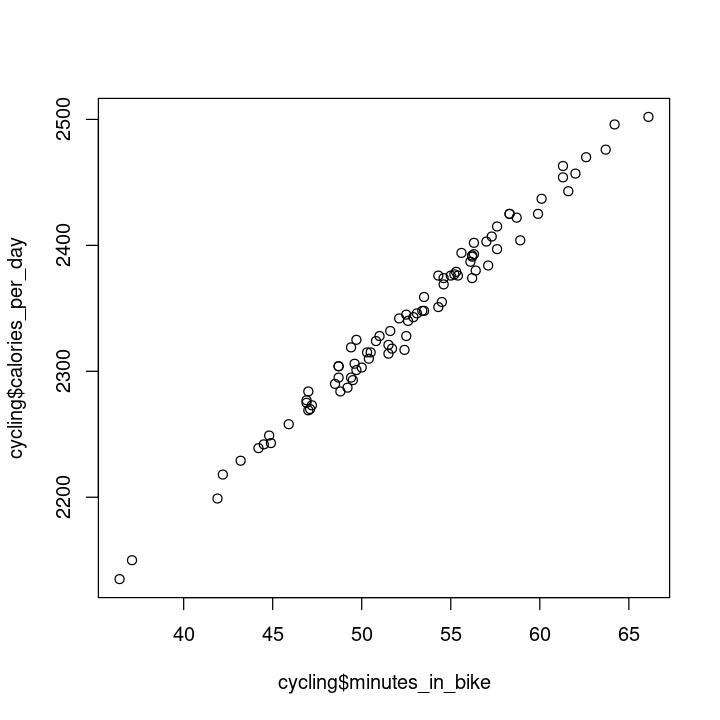

In [7]:
options(repr.plot.width = 6, repr.plot.height = 6) # Plot size in notebook
plot(cycling$minutes_in_bike,cycling$calories_per_day)

### a. Calorías en Bicicleta (solución)

La gráfica default de `R` permite apreciar algunas características de las observaciones, pero deja fuera otras. 

En concreto, esta primera gráfica:

1. sugiere una relación lineal entre ambas variables, 

2. permite darse una idea de la magnitud de la **pendiente**: por cada diez unidades de aumento en `minutos en bici`, `calorías por día` aumenta _aproximadamente_ 100 unidades (o difícilmente menos de 50, y difícilmente más de 200), y

3. también permite darse una idea de la magnitud de la **dispersión** de `calorías por día`.

Al mismo tiempo, la gráfica default vuelve difícil imaginarse los valores más razonables del **intercepto** que estamos buscando. Para solucionar esta deficiencia conviene graficar en escalas que permitan ver el origen:



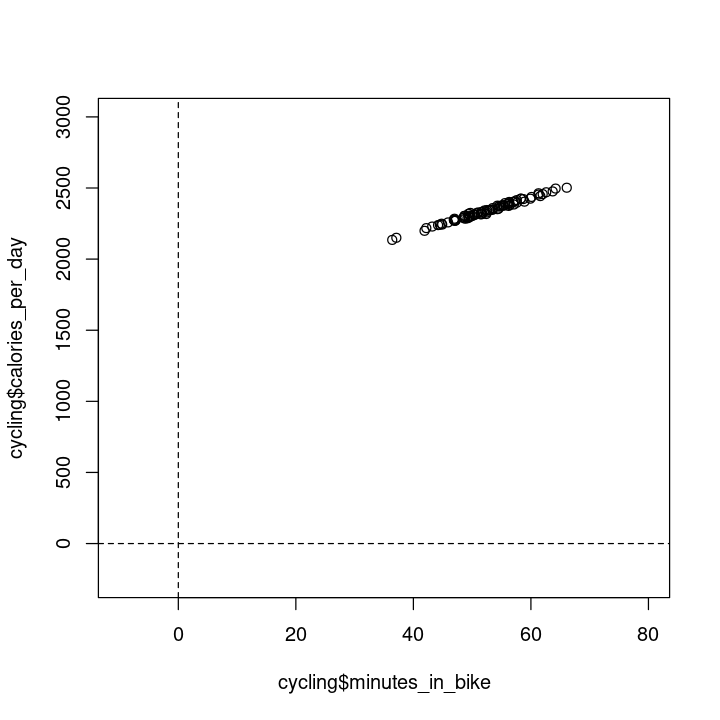

In [10]:
plot(cycling$minutes_in_bike,cycling$calories_per_day,xlim=c(-10,80),ylim=c(-250,3000))
abline(v=0,h=0,lty='dashed')

Esta nueva imagen permite formular una incertidumbre inicial sobre el **intercepto** mejor informada, complementando la gráfica anterior.

Utilizando la información de ambas gráficas, parece que el modelo:

$$\beta_1\sim Uniform(0,50)$$ 

$$\beta_0\sim Uniform(500,2500)$$ 

$$\sigma_y\sim Uniform(0,100)$$

$$\mu_{y_{i}}|\beta_1, \beta_0,x_i\leftarrow \beta_1 x_i+\beta_0$$

$$y_{i}|\mu_{y{i}}, \sigma_y\sim Gaussian(\mu_{y_{i}}, \sigma_y),$$

podría capturar apropiadamente las características más importantes del conjunto de observaciones. Para evaluarlo hay que expresarlo en `JAGS` y analizar la **distribución posterior predictiva** que genera.

In [14]:
# Observed
x_obs <- cycling$minutes_in_bike
y_obs <- cycling$calories_per_day
n_obs <- length(x_obs)
data_jags <- list('x_obs','y_obs','n_obs')


# Model
write('model{

slope_post~dunif(0,50)
slope_prior~dunif(0,50)
intercept_post~dunif(500,2500)
intercept_prior~dunif(500,2500)
sd_y_post~dunif(0,100)
sd_y_prior~dunif(0,100)
tau_y_post <- 1/sd_y_post^2
tau_y_prior <- 1/sd_y_prior^2
for(i in 1:n_obs){
    mu_y_post[i] <- x_obs[i]*slope_post+intercept_post
    mu_y_prior[i] <- x_obs[i]*slope_prior+intercept_prior
    y_obs[i]~dnorm(mu_y_post[i],tau_y_post)
    y_pred_post[i]~dnorm(mu_y_post[i],tau_y_post)
    y_pred_prior[i]~dnorm(mu_y_prior[i],tau_y_prior)
}

}','simple_linear_regression.bug')

# Unobserved
unobs <- c('slope_post','slope_prior',
          'intercept_post','intercept_prior',
          'sd_y_post','sd_y_prior',
          'mu_y_post','mu_y_prior',
          'y_pred_post','y_pred_prior')

# Inference
library('R2jags')
bayes <- jags(data=data_jags,
             parameters.to.save=unobs,
             model.file='simple_linear_regression.bug',
             n.iter=30000,
             n.burnin=6000,
             n.thin=3)
nds <- bayes$BUGSoutput$sims.list

Loading required package: rjags

Loading required package: coda

Linked to JAGS 4.3.0

Loaded modules: basemod,bugs


Attaching package: ‘R2jags’


The following object is masked from ‘package:coda’:

    traceplot


module glm loaded



Compiling model graph
   Resolving undeclared variables
   Allocating nodes
Graph information:
   Observed stochastic nodes: 84
   Unobserved stochastic nodes: 174
   Total graph size: 622

Initializing model



Antes de analizar el resultado del modelo es necesario examinar el resultado del algoritmo. En particular, es importante verificar que el estadístico `Rhat` no exceda `1.05` para las variables principales del modelo (`y_pred_post`, `slope_` e `intercept_` en este caso). 

In [15]:
bayes

Inference for Bugs model at "simple_linear_regression.bug", fit using jags,
 3 chains, each with 30000 iterations (first 6000 discarded), n.thin = 3
 n.sims = 24000 iterations saved
                  mu.vect  sd.vect     2.5%      25%      50%      75%    97.5%
intercept_post   1684.864    8.396 1668.340 1679.224 1684.860 1690.718 1701.061
intercept_prior  1500.490  576.925  550.471 1006.454 1494.778 2004.279 2452.204
mu_y_post[1]     2340.755    0.947 2338.903 2340.121 2340.759 2341.386 2342.613
mu_y_post[2]     2404.470    1.233 2402.059 2403.642 2404.475 2405.295 2406.888
mu_y_post[3]     2315.768    1.005 2313.793 2315.096 2315.773 2316.440 2317.742
mu_y_post[4]     2309.522    1.034 2307.489 2308.826 2309.522 2310.212 2311.548
mu_y_post[5]     2396.974    1.174 2394.674 2396.188 2396.978 2397.762 2399.277
mu_y_post[6]     2339.505    0.948 2337.654 2338.872 2339.511 2340.137 2341.361
mu_y_post[7]     2335.757    0.951 2333.895 2335.124 2335.762 2336.392 2337.617
mu_y_post[8]     2

#### Posterior Predictiva

_Antes_ de interpretar las conclusiones Bayesianas sobre los no-observables del modelo, es necesario examinar su **distribución posterior predictiva** para asegurarse de que el modelo puede explicar adecuadamente nuestro conjunto de observaciones.

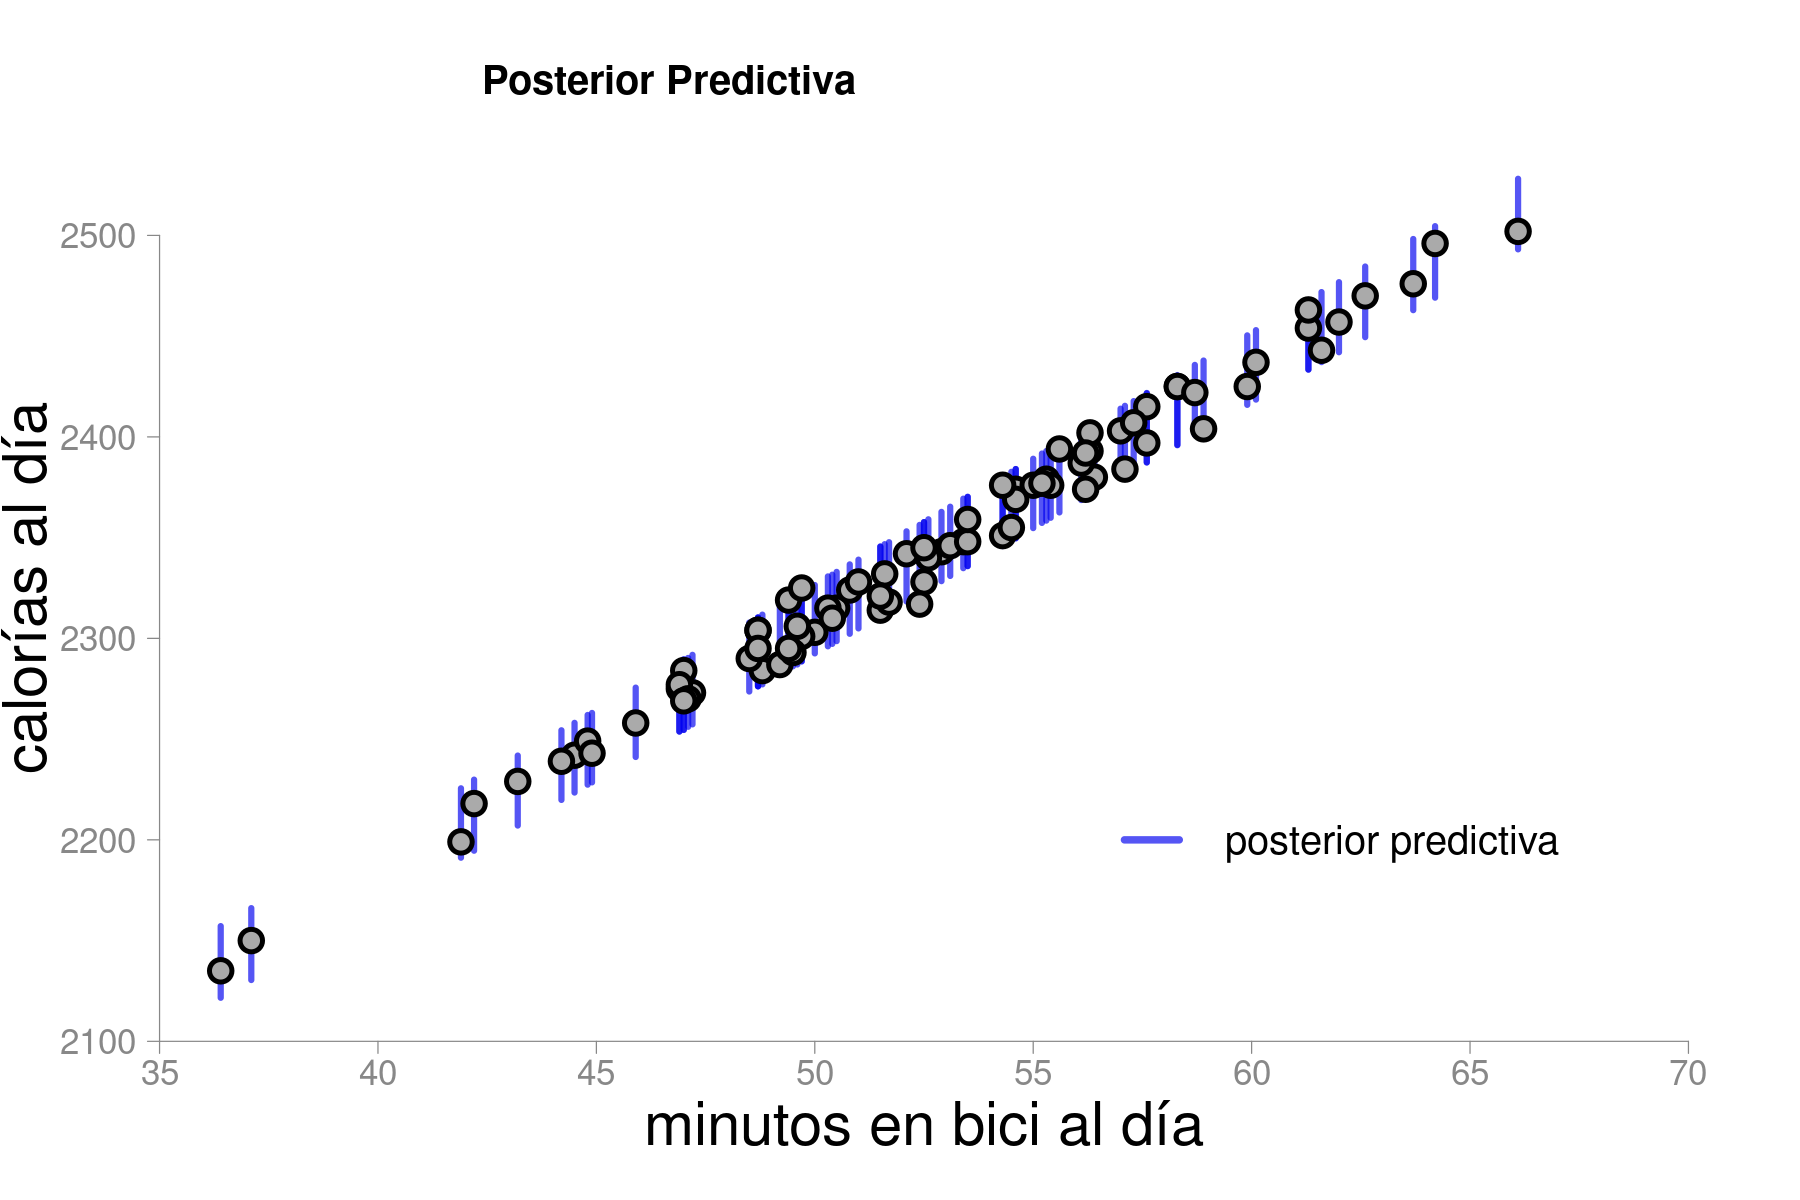

In [40]:
# POSTERIOR PREDICTIVE
col_prior <- '#0088ee'
col_post <- '#0000ee'

# Canvas
options(repr.plot.width = 15, repr.plot.height = 10) # Plot size in notebook
plot(NULL,xlim=c(35,70),ylim=c(2100,2550),axes=F,ann=F)
axis(1,pos=2100,cex.axis=1.75,col='#888888',col.axis='#888888')
axis(2,pos=35,las=2,cex.axis=1.75,col='#888888',col.axis='#888888')
mtext('minutos en bici al día',1,line=2,cex=3)
mtext('calorías al día',2,line=2,cex=3)

# Posterior predictive line per observation
index <- 1:length(x_obs)
for(i in index){
    # Find the values of y_pred_post[i] where the Posterior accumulates 2.5% and 97.5%...
    y_range <- quantile(nds$y_pred_post[,i],prob=c(0.025,0.975))
    # ...and plot them
    lines(rep(x_obs[i],2),y_range,lwd=5,col=paste(col_post,'aa',sep=''))
}

# Data
points(x_obs,y_obs,lwd=4,cex=2.5,pch=21,bg='#aaaaaa')

# Legend
legend(55,2200,yjust=0.5,
      legend=c('posterior predictiva'),
      col=c(paste(col_post,'aa',sep='')),
       seg.len=0.6,
       cex=2,
       x.intersp=0.5,
       y.intersp=0.5,
       box.lty='blank',
       bg=NA,
      lwd=6)

# Main title
mtext('Posterior Predictiva',3,cex=2,adj=0.3,font=2)

En tanto que la mayoría de observaciones se ubican en zonas de alta densidad posterior predictiva, podemos proceder a examinar e interpretar las distribuciones posteriores sobre los parámetros de interés.

**1. ¿Cuántas calorías se queman por cada minuto pedaleando?**

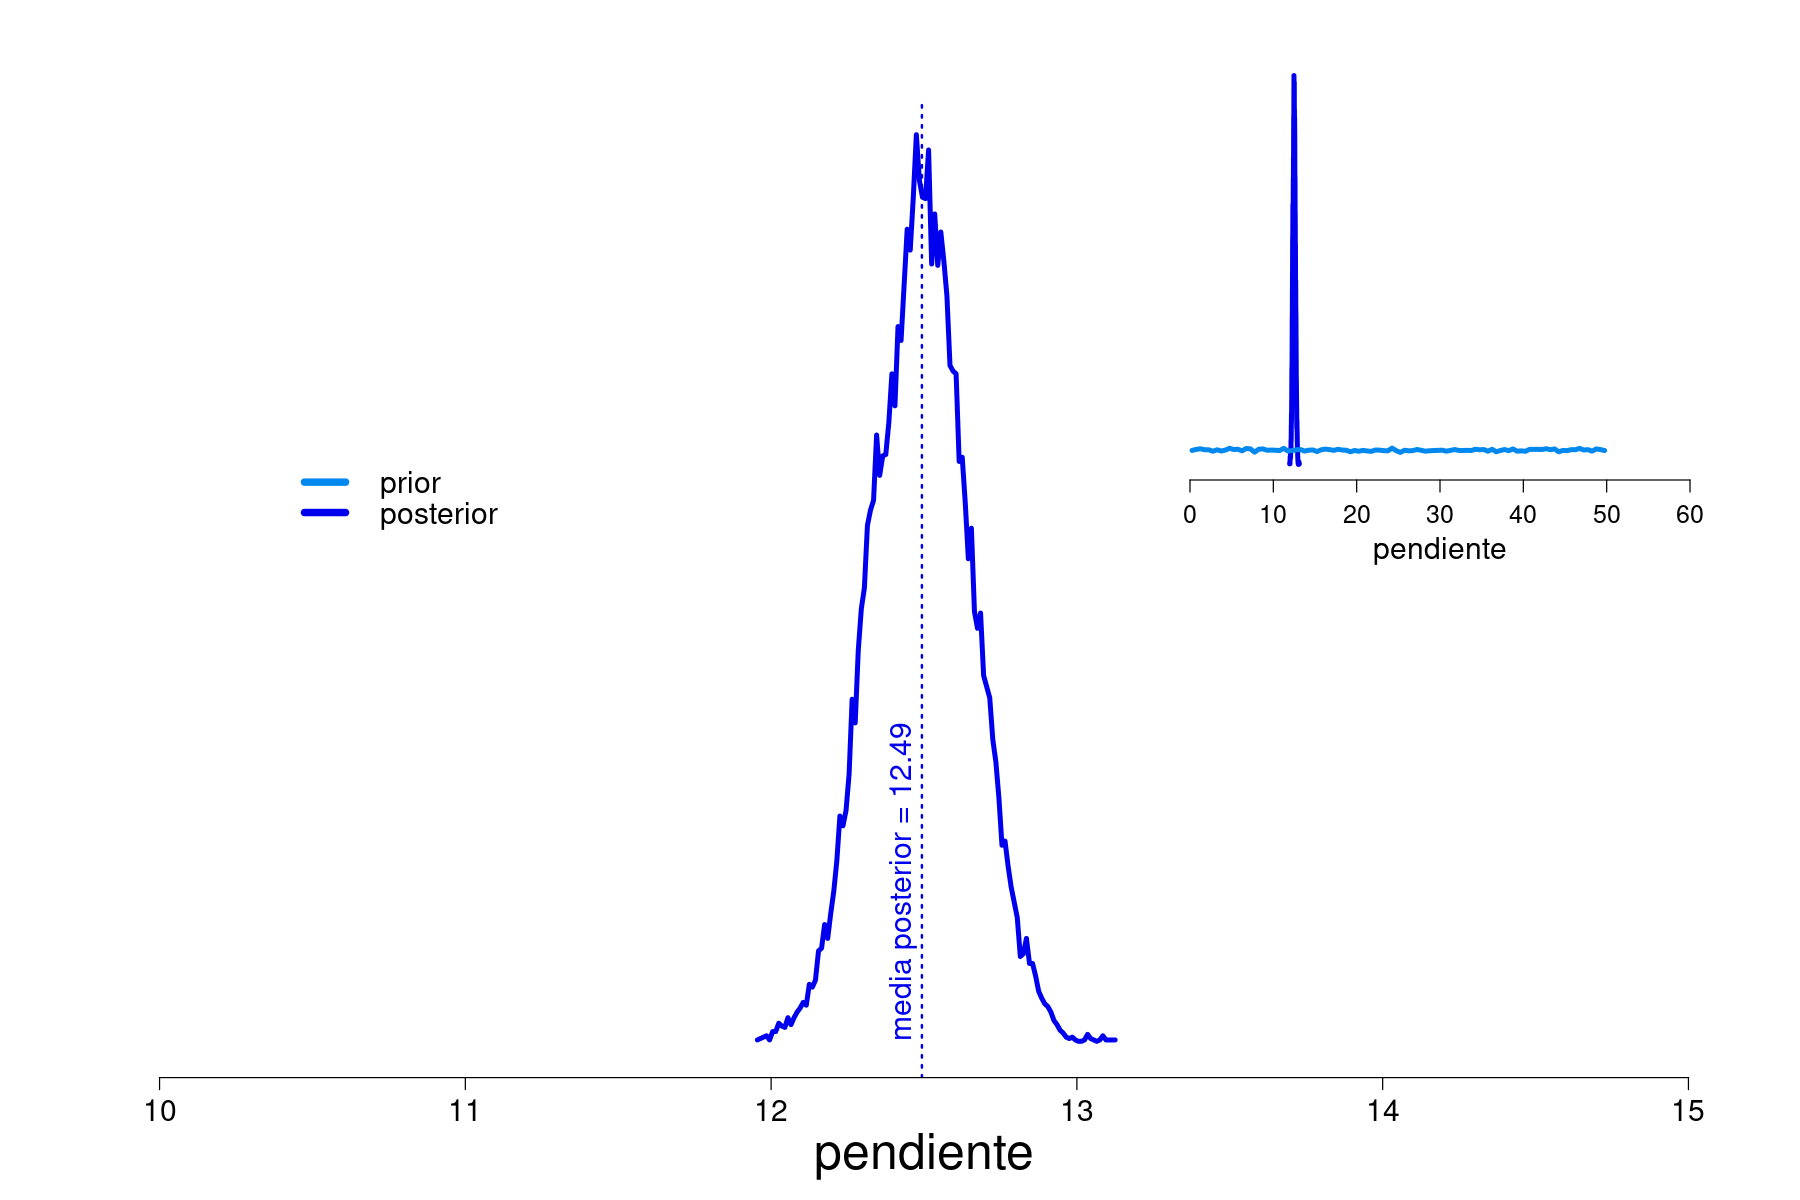

In [88]:
# SLOPE

# Extract info from JAGS
hist(nds$slope_post,plot=F,breaks=100)->ht_slp_post
hist(nds$slope_prior,plot=F,breaks=100)->ht_slp_prior

# Main plot
plot(NULL,
     xlim=c(10,15),
     ylim=c(0,max(max(ht_slp_post$density),max(ht_slp_prior$density))),
    ann=F,axes=F)
lines(ht_slp_post$mids,ht_slp_post$density,col=col_post,lwd=4)
abline(v=mean(nds$slope_post),col=col_post,lty='dotted',lwd=2)
text(mean(nds$slope_post),0,paste('media posterior =',round(mean(nds$slope_post),2)),
     adj=c(0,-0.5),srt=90,col=col_post,cex=1.5)
axis(1,cex.axis=1.5)
mtext('pendiente',1,line=3,cex=2.5)

# Legend
legend(10.25,max(max(ht_slp_post$density),max(ht_slp_prior$density))*.6,yjust=0.5,
      legend=c('prior','posterior'),
      col=c(col_prior,col_post),
       seg.len=0.6,
       cex=1.5,
       x.intersp=0.5,
       y.intersp=0.5,
       box.lty='blank',
       bg=NA,
      lwd=6)

# Inset
par(plt=c(.65,.95,.6,.95),new=T)
plot(NULL,
     xlim=c(0,60),
     ylim=c(0,max(max(ht_slp_post$density),max(ht_slp_prior$density))),
    ann=F,axes=F)
lines(ht_slp_post$mids,ht_slp_post$density,col=col_post,lwd=4)
lines(ht_slp_prior$mids,ht_slp_prior$density*5,col=col_prior,lwd=4)
axis(1,cex.axis=1.25)
mtext('pendiente',1,line=2.5,cex=1.5)

In [62]:
summary(nds$slope_post)

       V1       
 Min.   :11.96  
 1st Qu.:12.38  
 Median :12.49  
 Mean   :12.49  
 3rd Qu.:12.60  
 Max.   :13.12  

**1. ¿Cuántas calorías se queman por cada minuto pedaleando?** 

_Teniendo como referencia la incertidumbre inicial de este modelo, los valores más probables de la pendiente condicionales a las observaciones indican que se queman entre 12 y 13 calorías por minuto en bici, con la mayor densidad posterior alrededor de 12.49._ 

**2. ¿Cuántas calorías quema al día una persona que no pedalea?**

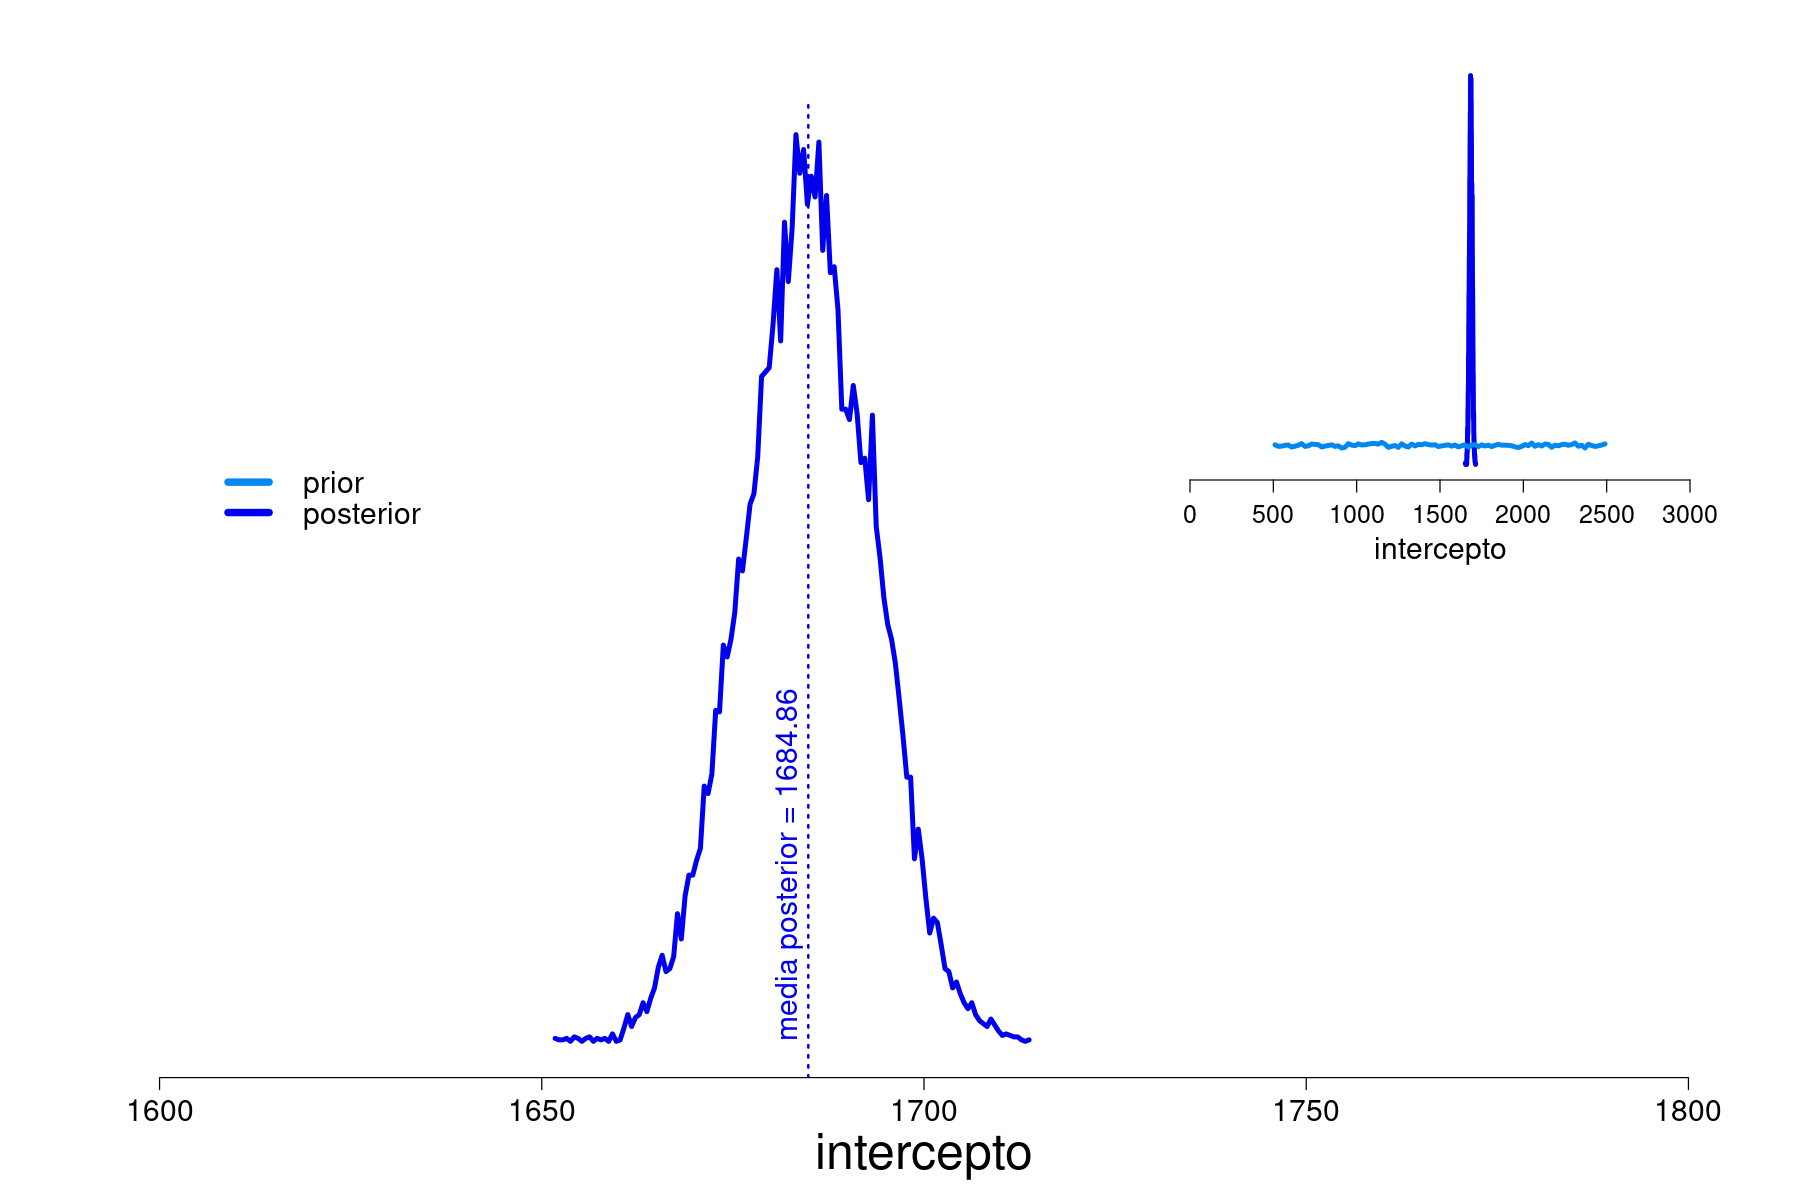

In [93]:
# INTERCEPT

# Extract info from JAGS
hist(nds$intercept_post,plot=F,breaks=100)->ht_intr_post
hist(nds$intercept_prior,plot=F,breaks=100)->ht_intr_prior

# Main plot
plot(NULL,
     xlim=c(1600,1800),
     ylim=c(0,max(max(ht_intr_post$density),max(ht_intr_prior$density))),
    ann=F,axes=F)
lines(ht_intr_post$mids,ht_intr_post$density,col=col_post,lwd=4)
abline(v=mean(nds$intercept_post),col=col_post,lty='dotted',lwd=2)
text(mean(nds$intercept_post),0,paste('media posterior =',round(mean(nds$intercept_post),2)),
     adj=c(0,-0.5),srt=90,col=col_post,cex=1.5)
axis(1,cex.axis=1.5)
mtext('intercepto',1,line=3,cex=2.5)

# Legend
legend(1600,max(max(ht_intr_post$density),max(ht_intr_prior$density))*.6,yjust=0.5,
      legend=c('prior','posterior'),
      col=c(col_prior,col_post),
       seg.len=0.6,
       cex=1.5,
       x.intersp=0.5,
       y.intersp=0.5,
       box.lty='blank',
       bg=NA,
      lwd=6)

# Inset
par(plt=c(.65,.95,.6,.95),new=T)
plot(NULL,
     xlim=c(0,3000),
     ylim=c(0,max(max(ht_intr_post$density),max(ht_intr_prior$density))),
    ann=F,axes=F)
lines(ht_intr_post$mids,ht_intr_post$density,col=col_post,lwd=4)
lines(ht_intr_prior$mids,ht_intr_prior$density*5,col=col_prior,lwd=4)
axis(1,cex.axis=1.25)
mtext('intercepto',1,line=2.5,cex=1.5)

In [91]:
summary(nds$intercept_post)

       V1      
 Min.   :1652  
 1st Qu.:1679  
 Median :1685  
 Mean   :1685  
 3rd Qu.:1691  
 Max.   :1714  

**2. ¿Cuántas calorías quema al día una persona que no pedalea?**

_Con esta incertidumbre inicial concluimos que una persona que pedalea cero minutos al día quema entre 1650 y 1715 calorías, con mayor densidad posterior alrededor de 1685._

### b. Dinero y Estrés

La base `money_and_stress.csv` contiene varias observaciones de dos variables: `dinero_disponible`, que representa el nivel de ahorro o de deuda de cierta persona, y `escala_estres`, que contiene los puntajes de en cierto instrumento diseñado para medir el nivel de presión subjetiva de cada persona. 

Explora dicha base y haz explícitos los descriptivos generales: número de observaciones, mínimos y máximos de cada variable, y algunas medidas de ubicación (media y percentiles, por ejemplo), y responde:

1. ¿Los datos sugieren una relación lineal entre ambas variables?

2. En caso de que así sea, implementa el modelo de regresión que hemos estudiado, suponiendo dispersión Gaussiana sobre los puntajes de `estrés` alrededor de dicha relación imaginaria.

3. ¿Cuál es el nivel medio de `estrés` de una persona que no tiene deudas ni ahorros?

4. ¿Cuánto cambian los puntajes de `estrés` por cada **10000** pesos de incremento en `dinero_disponible`?

5. ¿Cuánto varían los puntajes de `estrés` en un grupo de personas que tienen la misma cantidad de `dinero_disponible`?

In [9]:
rm(list=ls())

In [10]:
money_stress  <- read.csv("../data/money_and_stress.csv")
#money_stress  <- read.csv("~/Teaching/money_and_stress.csv")
head(money_stress)

,dinero_disponible,escala_estres
,<int>,<int>
1,-18627,65
2,-35791,66
3,-25213,44
4,14651,29
5,-18174,43
6,-14933,54


In [11]:
nrow(money_stress)

[1] 67

In [12]:
summary(money_stress)

 dinero_disponible escala_estres  
 Min.   :-72200    Min.   :28.00  
 1st Qu.:-33524    1st Qu.:47.00  
 Median :-14135    Median :55.00  
 Mean   :-13477    Mean   :54.81  
 3rd Qu.:  7968    3rd Qu.:64.50  
 Max.   : 42146    Max.   :81.00  

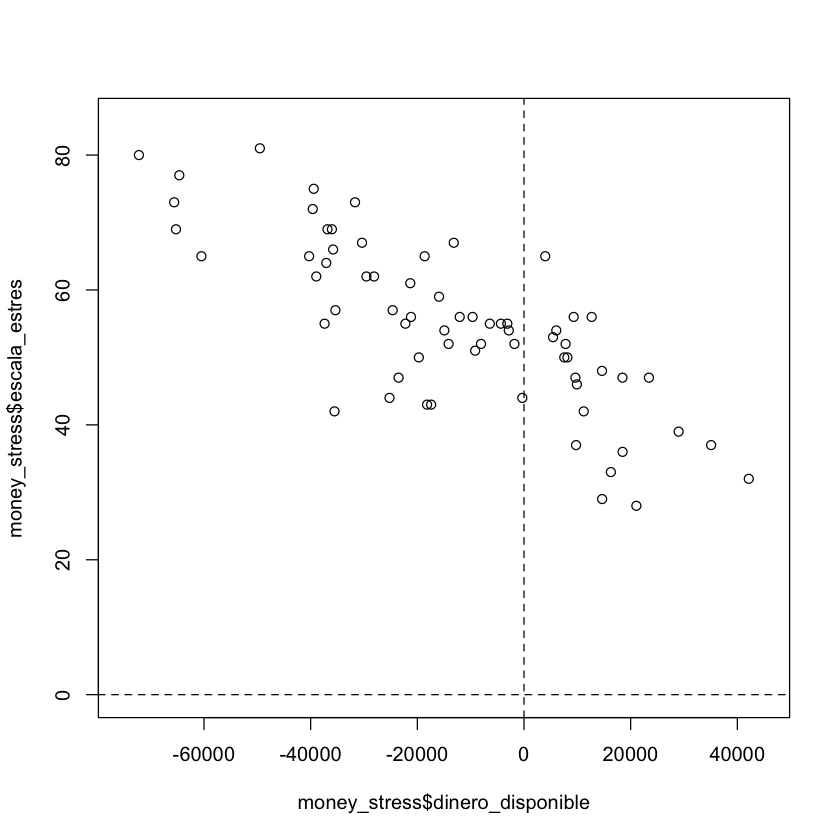

In [13]:
plot(
    money_stress$dinero_disponible, money_stress$escala_estres,
    xlim = c(-75000, 45000), ylim = c(0,85)
)
abline(v=0,h=0,lty='dashed')

In [14]:
# Observed data
x_obs <- money_stress$dinero_disponible
y_obs <- money_stress$escala_estres
n_obs <- nrow(money_stress)

data_jags <- list("x_obs", "y_obs", "n_obs")

# Model
write('model{

slope_post~dunif(-1, 0)
slope_prior~dunif(-1, 0)
intercept_post~dunif(20,80)
intercept_prior~dunif(20,80)
sd_y_post~dunif(0,100)
sd_y_prior~dunif(0,100)
tau_y_post <- 1/sd_y_post^2
tau_y_prior <- 1/sd_y_prior^2
for(i in 1:n_obs){
    mu_y_post[i] <- x_obs[i]*slope_post+intercept_post
    mu_y_prior[i] <- x_obs[i]*slope_prior+intercept_prior
    y_obs[i]~dnorm(mu_y_post[i],tau_y_post)
    y_pred_post[i]~dnorm(mu_y_post[i],tau_y_post)
    y_pred_prior[i]~dnorm(mu_y_prior[i],tau_y_prior)
}

}','moneystress_linear_regression.bug')

# Unobserved
unobs <- c('slope_post','slope_prior',
          'intercept_post','intercept_prior',
          'sd_y_post','sd_y_prior',
          'mu_y_post','mu_y_prior',
          'y_pred_post','y_pred_prior')

# Inference
library('R2jags')
bayes <- jags(data=data_jags,
             parameters.to.save=unobs,
             model.file='moneystress_linear_regression.bug',
             n.iter=30000,
             n.burnin=6000,
             n.thin=3)
nds <- bayes$BUGSoutput$sims.list

Warning message:
“package ‘R2jags’ was built under R version 3.6.2”
Loading required package: rjags

Loading required package: coda

Linked to JAGS 4.3.0

Loaded modules: basemod,bugs


Attaching package: ‘R2jags’


The following object is masked from ‘package:coda’:

    traceplot


module glm loaded



Compiling model graph
   Resolving undeclared variables
   Allocating nodes
Graph information:
   Observed stochastic nodes: 67
   Unobserved stochastic nodes: 140
   Total graph size: 554

Initializing model



In [15]:
bayes$BUGSoutput$summary

,mean,sd,2.5%,25%,50%,75%,97.5%,Rhat,n.eff
deviance,462.74885,2.5088495,459.87025,460.91104,462.10187,463.91402,469.12998,1.001012,24000
intercept_post,49.77602,1.0595239,47.69232,49.06769,49.76782,50.48718,51.85738,1.001218,7100
intercept_prior,49.93973,17.2759884,21.45760,35.00854,50.06547,64.92828,78.44044,1.000967,24000
mu_y_post[1],56.73204,0.9600217,54.86440,56.09087,56.72948,57.37120,58.61716,1.001046,18000
mu_y_post[2],63.14173,1.2562009,60.69112,62.29796,63.12774,63.98793,65.62356,1.000942,24000
mu_y_post[3],59.19150,1.0383019,57.16343,58.49627,59.18166,59.88812,61.25181,1.000986,24000
mu_y_post[4],44.30478,1.3959082,41.56570,43.37029,44.30190,45.23382,47.04605,1.001229,6800
mu_y_post[5],56.56288,0.9566872,54.70404,55.92193,56.55935,57.19988,58.44167,1.001051,17000
mu_y_post[6],55.35256,0.9412356,53.52135,54.72545,55.34560,55.98742,57.21642,1.001087,13000
mu_y_post[7],41.90881,1.5796950,38.81407,40.85381,41.90766,42.96065,45.01759,1.001219,7100


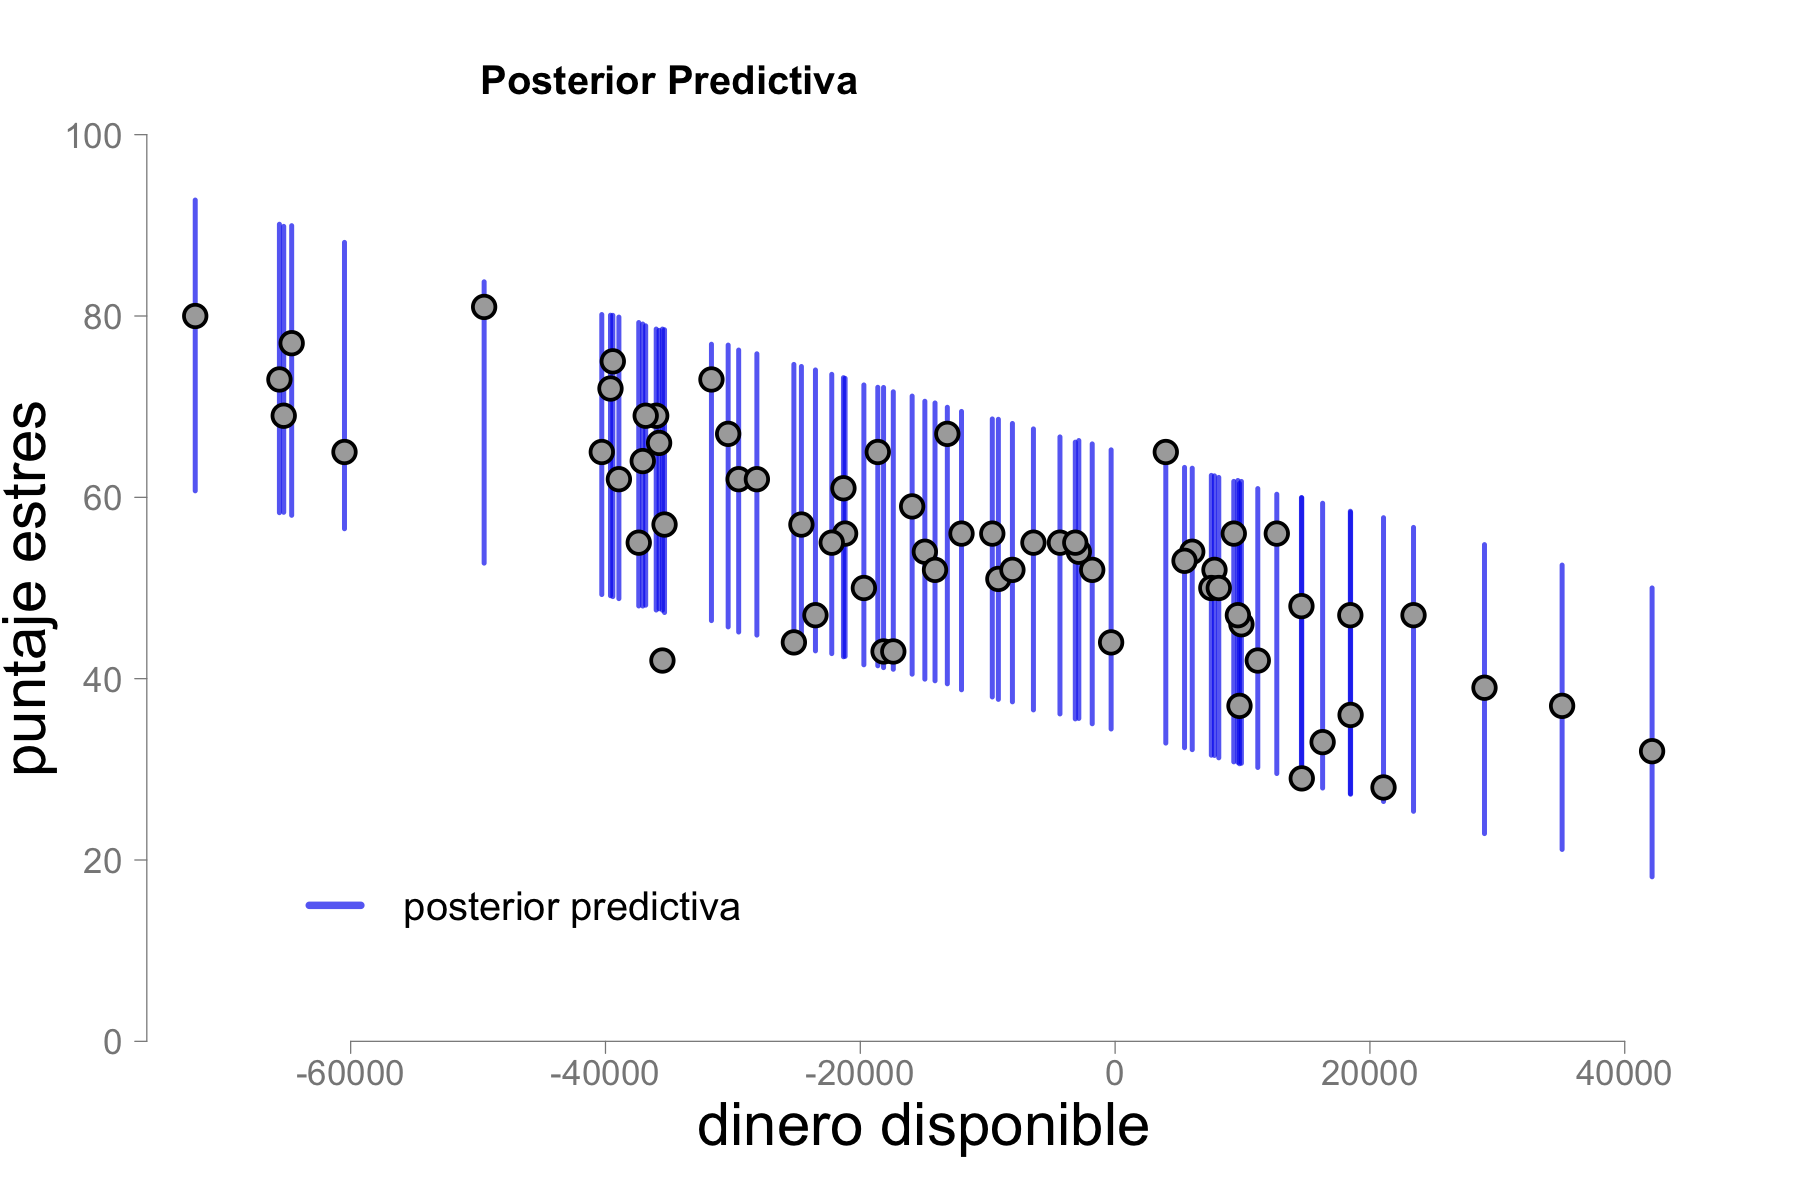

In [16]:
# POSTERIOR PREDICTIVE
col_prior <- '#0088ee'
col_post <- '#0000ee'

# Canvas
options(repr.plot.width = 15, repr.plot.height = 10) # Plot size in notebook
plot(NULL,xlim=c(-75000, 45000),ylim=c(0, 100),axes=F,ann=F)
axis(1,pos=0,cex.axis=1.75,col='#888888',col.axis='#888888')
axis(2,pos=-76000,las=2,cex.axis=1.75,col='#888888',col.axis='#888888')
mtext('dinero disponible',1,line=2,cex=3)
mtext('puntaje estres',2,line=2,cex=3)

# Posterior predictive line per observation
index <- 1:length(x_obs)
for(i in index){
    # Find the values of y_pred_post[i] where the Posterior accumulates 2.5% and 97.5%...
    y_range <- quantile(nds$y_pred_post[,i],prob=c(0.025,0.975))
    # ...and plot them
    lines(rep(x_obs[i],2),y_range,lwd=4,col=paste(col_post,'aa',sep=''))
}

# Data
points(x_obs,y_obs,lwd=3,cex=2.5,pch=21,bg='#aaaaaa')

# Legend
legend(-70000, 15,yjust=0.5,
      legend=c('posterior predictiva'),
      col=c(paste(col_post,'aa',sep='')),
       seg.len=0.6,
       cex=2,
       x.intersp=0.5,
       y.intersp=0.5,
       box.lty='blank',
       bg=NA,
      lwd=6)

# Main title
mtext('Posterior Predictiva',3,cex=2,adj=0.3,font=2)

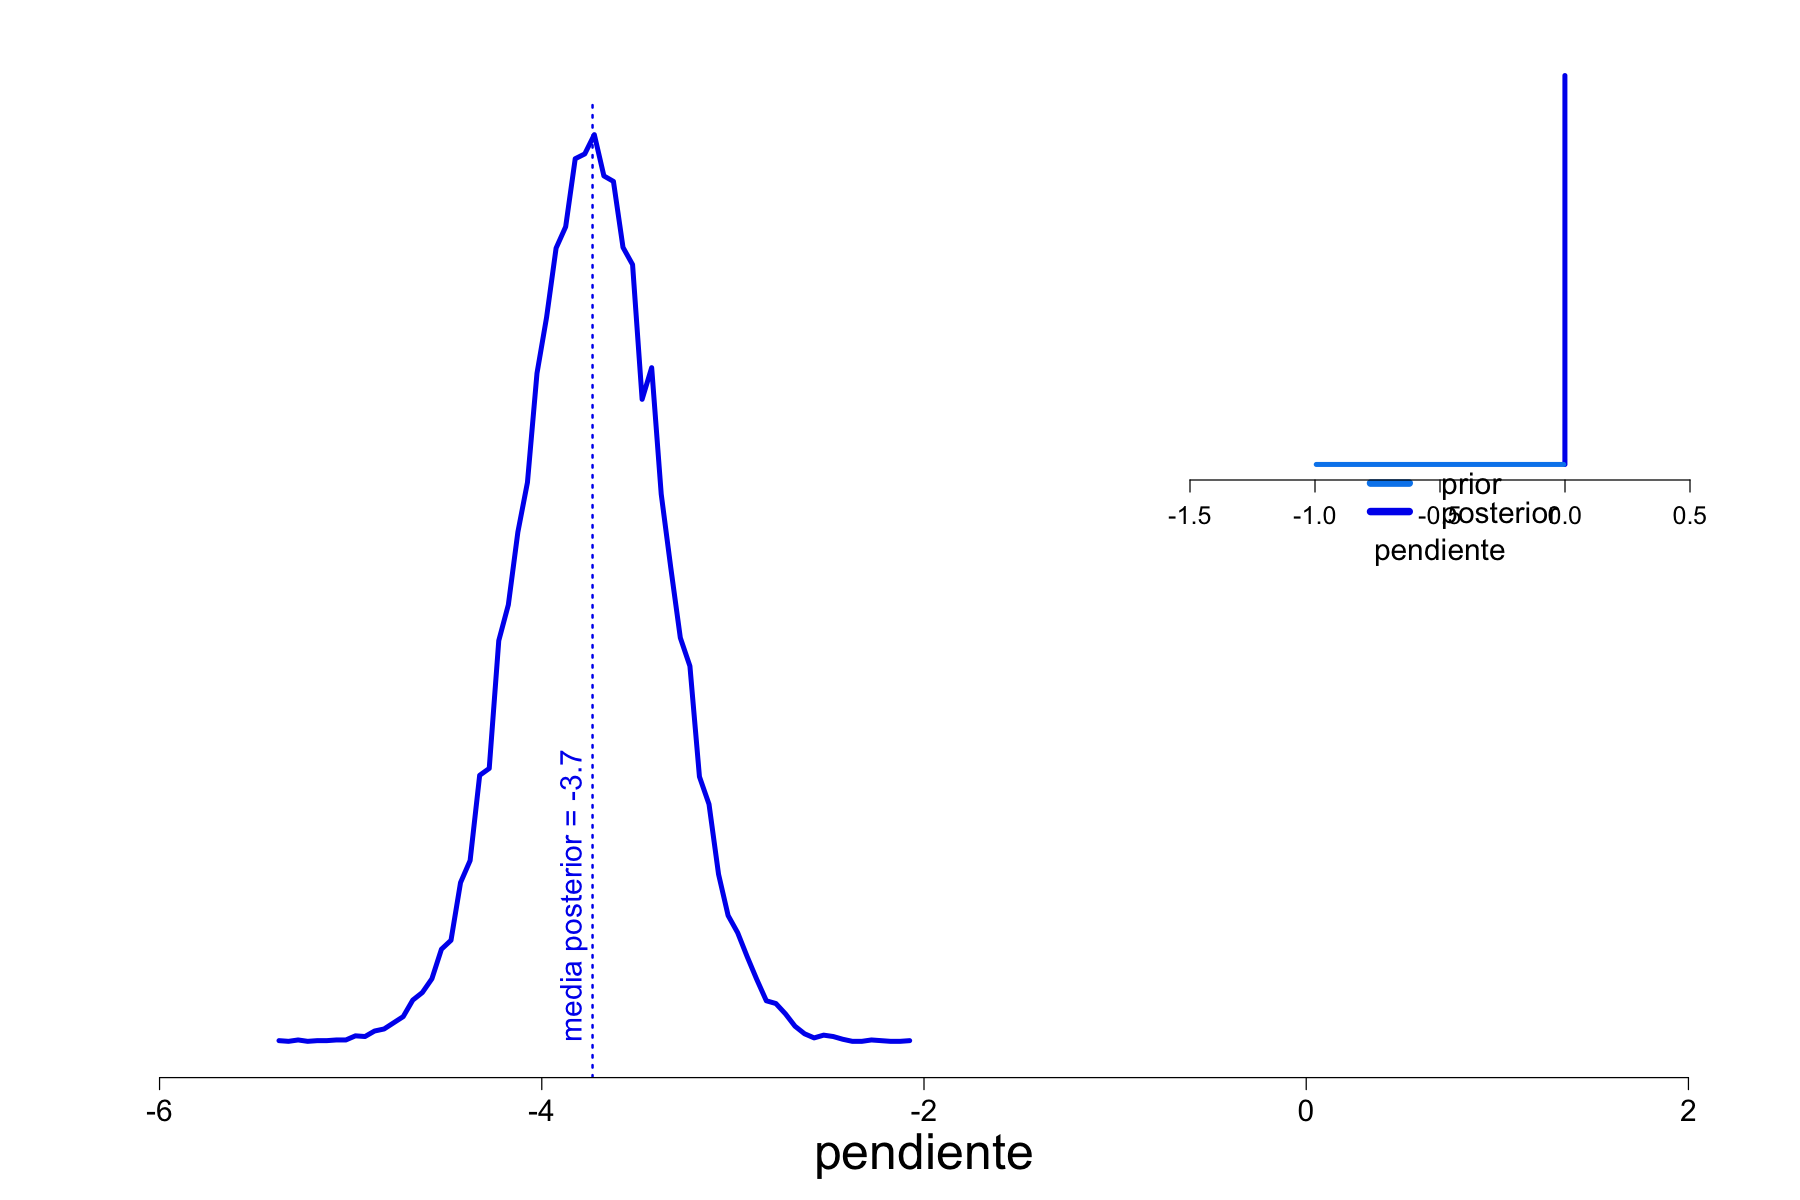

In [25]:
# SLOPE

# Extract info from JAGS
hist(nds$slope_post,plot=F,breaks=100)->ht_slp_post
hist(nds$slope_prior,plot=F,breaks=100)->ht_slp_prior

# Main plot
plot(NULL,
     xlim=c(-6,2),
     ylim=c(0,max(max(ht_slp_post$density),max(ht_slp_prior$density))),
    ann=F,axes=F)
lines(ht_slp_post$mids*10000,ht_slp_post$density,col=col_post,lwd=4)
abline(v=mean(nds$slope_post)*10000,col=col_post,lty='dotted',lwd=2)
text(mean(nds$slope_post)*10000,0,paste('media posterior =',round(mean(nds$slope_post),5)*10000),
     adj=c(0,-0.5),srt=90,col=col_post,cex=1.5)
axis(1,cex.axis=1.5)
mtext('pendiente',1,line=3,cex=2.5)

# Legend
legend(-0.001,max(max(ht_slp_post$density),max(ht_slp_prior$density))*.6,yjust=0.5,
      legend=c('prior','posterior'),
      col=c(col_prior,col_post),
       seg.len=0.6,
       cex=1.5,
       x.intersp=0.5,
       y.intersp=0.5,
       box.lty='blank',
       bg=NA,
      lwd=6)

# Inset
par(plt=c(.65,.95,.6,.95),new=T)
plot(NULL,
     xlim=c(-1.5, 0.5),
     ylim=c(0,max(max(ht_slp_post$density),max(ht_slp_prior$density))),
    ann=F,axes=F)
lines(ht_slp_post$mids,ht_slp_post$density,col=col_post,lwd=4)
lines(ht_slp_prior$mids,ht_slp_prior$density*0.05,col=col_prior,lwd=4)
axis(1,cex.axis=1.25)
mtext('pendiente',1,line=2.5,cex=1.5)

## ¿Cuál es el nivel medio de estrés de una persona que no tiene deudas ni ahorros?

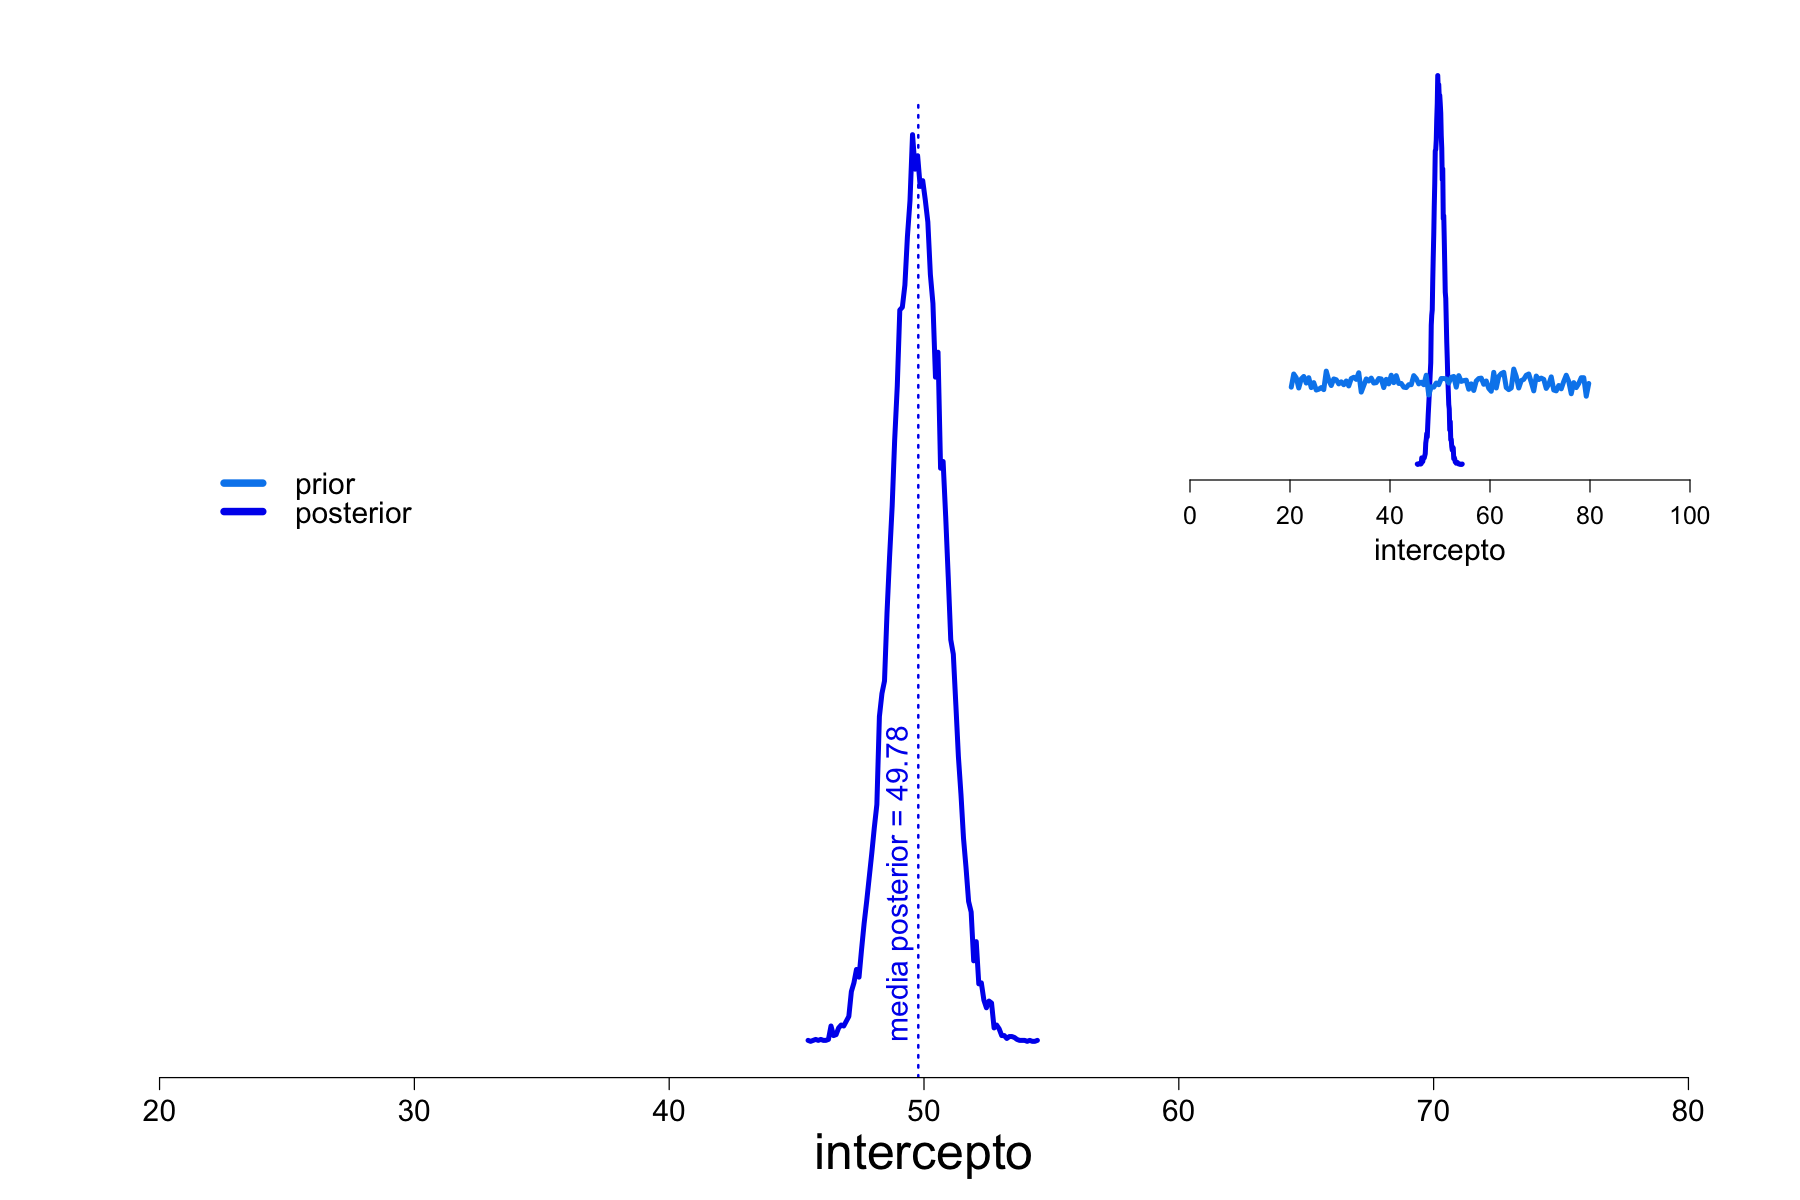

In [18]:
# INTERCEPT

# Extract info from JAGS
hist(nds$intercept_post,plot=F,breaks=100)->ht_intr_post
hist(nds$intercept_prior,plot=F,breaks=100)->ht_intr_prior

# Main plot
plot(NULL,
     xlim=c(20,80),
     ylim=c(0,max(max(ht_intr_post$density),max(ht_intr_prior$density))),
    ann=F,axes=F)
lines(ht_intr_post$mids,ht_intr_post$density,col=col_post,lwd=4)
abline(v=mean(nds$intercept_post),col=col_post,lty='dotted',lwd=2)
text(mean(nds$intercept_post),0,paste('media posterior =',round(mean(nds$intercept_post),2)),
     adj=c(0,-0.5),srt=90,col=col_post,cex=1.5)
axis(1,cex.axis=1.5)
mtext('intercepto',1,line=3,cex=2.5)

# Legend
legend(20,max(max(ht_intr_post$density),max(ht_intr_prior$density))*.6,yjust=0.5,
      legend=c('prior','posterior'),
      col=c(col_prior,col_post),
       seg.len=0.6,
       cex=1.5,
       x.intersp=0.5,
       y.intersp=0.5,
       box.lty='blank',
       bg=NA,
      lwd=6)

# Inset
par(plt=c(.65,.95,.6,.95),new=T)
plot(NULL,
     xlim=c(0,100),
     ylim=c(0,max(max(ht_intr_post$density),max(ht_intr_prior$density))),
    ann=F,axes=F)
lines(ht_intr_post$mids,ht_intr_post$density,col=col_post,lwd=4)
lines(ht_intr_prior$mids,ht_intr_prior$density*5,col=col_prior,lwd=4)
axis(1,cex.axis=1.25)
mtext('intercepto',1,line=2.5,cex=1.5)

### ¿Cuánto cambian los puntajes de estrés por cada incremento de 10000 pesos en dinero disponible? 

[1] -3.734378

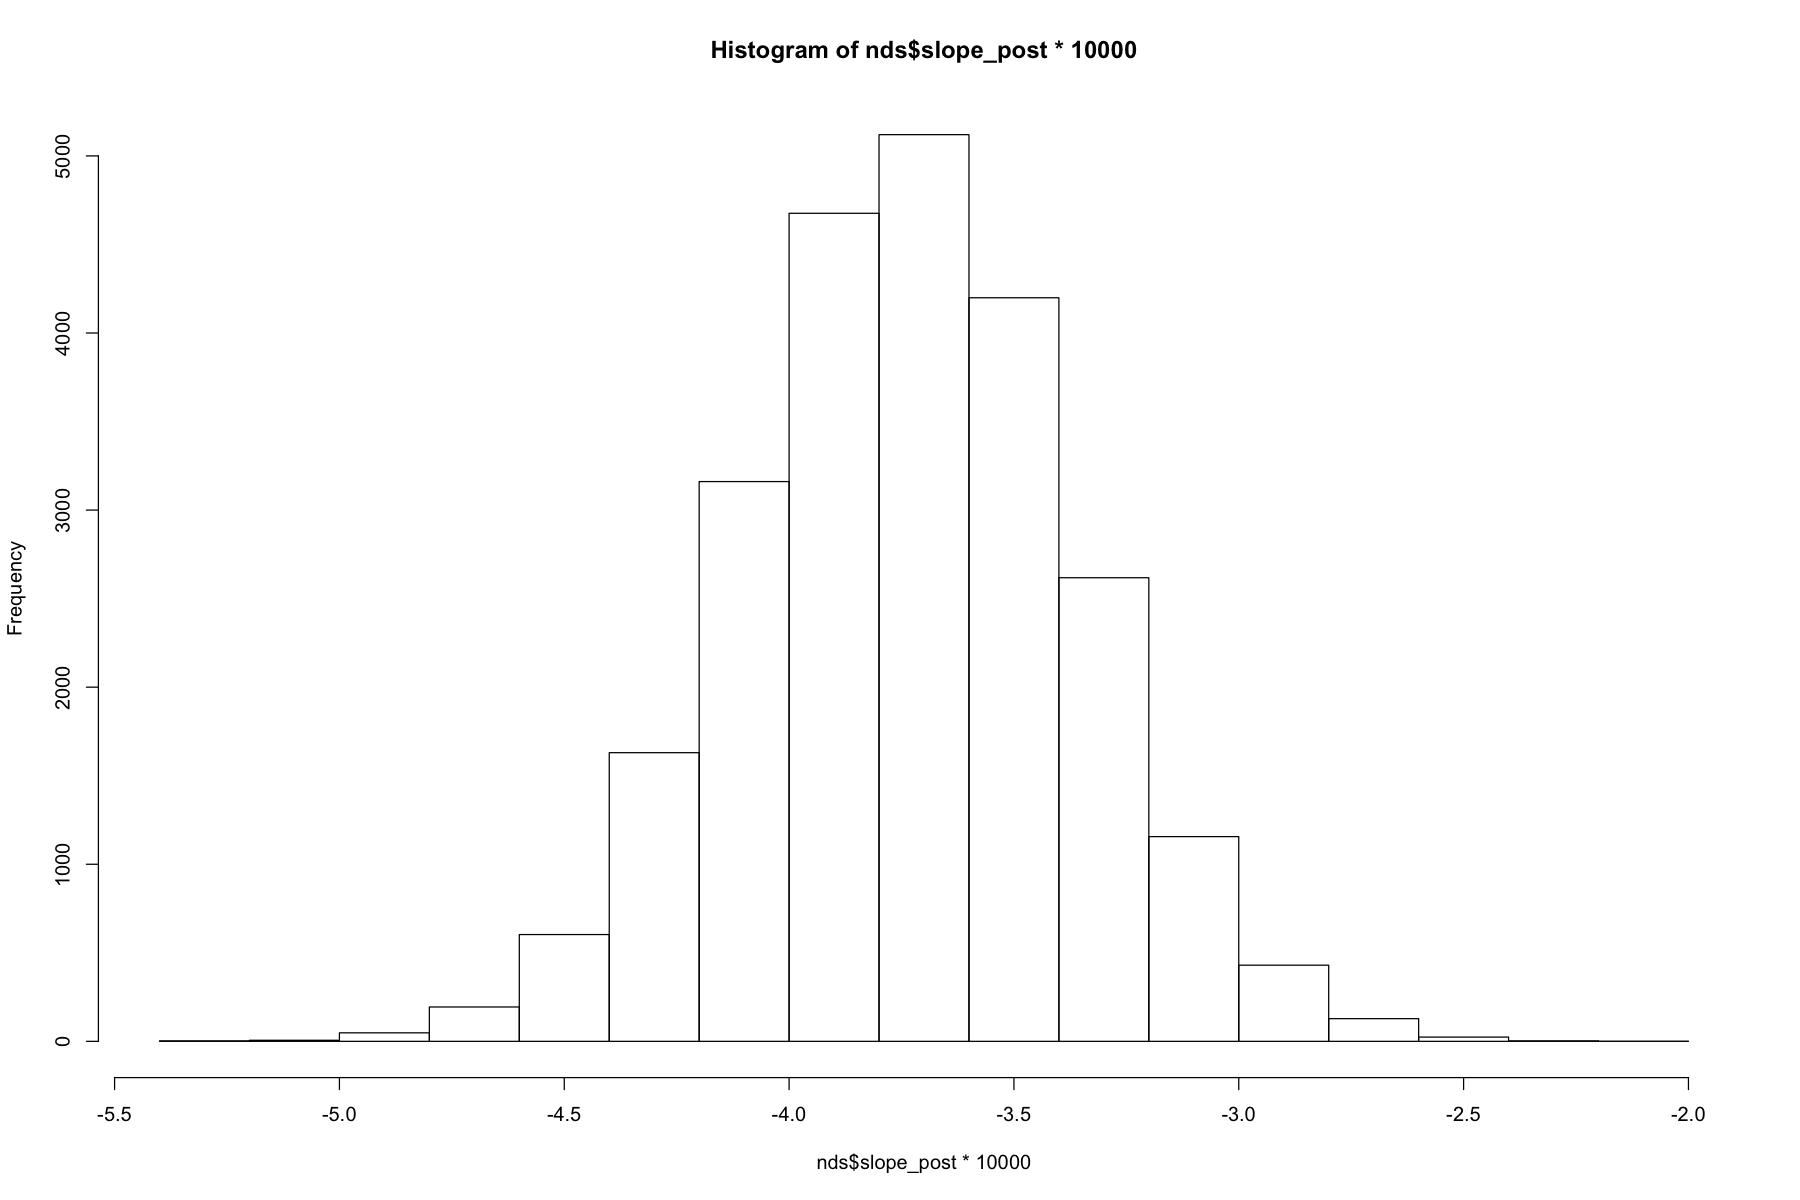

In [19]:
mean(nds$slope_post)*10000
hist(nds$slope_post*10000)

## ¿Cuánto varían los puntajes de estrés en un grupo de personas que tienen la misma cantidad de dinero_disponible?

In [20]:
mean(nds$sd_y_post)

[1] 7.734748